In [1]:

# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sharpley value
import shap
import lime
import lime.lime_tabular


# stepwise
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



# statics
import scipy.stats as st
import torch

import random 

random.seed(10)


In [2]:
import pickle
#load the model
filename1 = 'logistic_model.sav'
filename2 = 'rf.sav'
filename3 = 'xgb.sav'

logreg_sk = pickle.load(open(filename1, 'rb'))
optimal_rf_clf = pickle.load(open(filename2, 'rb'))
optimal_xgb = pickle.load(open(filename3, 'rb'))

In [3]:
#Load the train and test data
X_train= pd.read_csv("./X_train.csv")
X_test= pd.read_csv("./X_test.csv")

X_train = X_train.drop(['Unnamed: 0'],axis=1)
X_test = X_test.drop(['Unnamed: 0'],axis=1)

## Global explanations

### Logistic Regression

In [5]:
#SHAP
explainer =shap.Explainer(logreg_sk, X_train)
shap_values_logit = explainer(X_test)
#shap.plots.bar(shap_values_logit,max_display=12)#absolute average

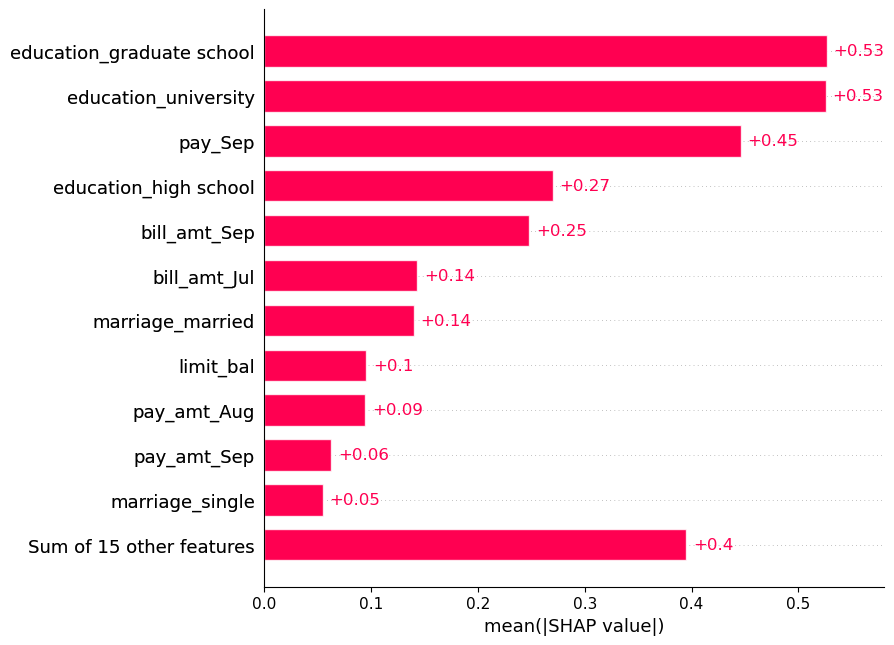

In [17]:
shap.plots.bar(shap_values_logit,max_display=12)#absolute average

In [4]:
#LIME
d = {'Feature': X_test.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([X_test.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(X_test.shape[0]):
    exp_i = explainer_lime.explain_instance(X_test.iloc[i], logreg_sk.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()
glime_logit = np.abs(value_i).mean(axis=0)



X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755715308031152
Prediction_local [0.84747203]
Right: 0.8552162119622178
Intercept 0.4739598439488463
Prediction_local [0.50590815]
Right: 0.5090964580018345
Intercept 0.47485050644308835
Prediction_local [0.55568534]
Right: 0.5693176241443271
Intercept 0.47531869020377904
Prediction_local [0.54586734]
Right: 0.5592119065153097
Intercept 0.4748566722453057
Prediction_local [0.51960112]
Right: 0.5258269449405206
Intercept 0.4745410397111392
Prediction_local [0.81343405]
Right: 0.8307597700903901


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47447588277001645
Prediction_local [0.50926518]
Right: 0.5107364119961374
Intercept 0.47389323318266013
Prediction_local [0.66730312]
Right: 0.7012992187375767
Intercept 0.4744953050150326
Prediction_local [0.51799104]
Right: 0.5222687606239328
Intercept 0.47495151448540174
Prediction_local [0.79858273]
Right: 0.815997430324388
Intercept 0.4739803252295883
Prediction_local [0.41555047]
Right: 0.401010472534006
Intercept 0.47438497468472085
Prediction_local [0.58848377]
Right: 0.6110189098441373
Intercept 0.4738995185528298
Prediction_local [0.22073945]
Right: 0.1919924144043293


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744492960805229
Prediction_local [0.61835643]
Right: 0.6487584324037591
Intercept 0.4753389851327585
Prediction_local [0.36061967]
Right: 0.33357281242524345
Intercept 0.4741638768171965
Prediction_local [0.54992533]
Right: 0.5609147273648383
Intercept 0.4743803621927028
Prediction_local [0.4656432]
Right: 0.45916629308418255
Intercept 0.4748391027613786
Prediction_local [0.2532754]
Right: 0.2211750051229379
Intercept 0.4744616722335549
Prediction_local [0.54938148]
Right: 0.5617754627488099
Intercept 0.4744233092429991
Prediction_local [0.40107696]
Right: 0.37823150610855144
Intercept 0.47406416612862784
Prediction_local [0.51024622]
Right: 0.5106025905065109
Intercept 0.4749487193609151
Prediction_local [0.46985636]
Right: 0.46446372477063347
Intercept 0.47012484389507286
Prediction_local [0.07145962]
Right: 0.06994791198229243
Intercept 0.47504311872477095
Prediction_local [0.5451529]
Right: 0.5577429593027498
Intercept 0.47478596278862284
Prediction_local [0.74168832]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743136394304538
Prediction_local [0.74409577]
Right: 0.7762118803587845
Intercept 0.47441483014843483
Prediction_local [0.50030853]
Right: 0.5002286394455662
Intercept 0.4738564775085813
Prediction_local [0.76027989]
Right: 0.7902521720341082
Intercept 0.47440137148773054
Prediction_local [0.49394587]
Right: 0.4939460777052118
Intercept 0.47390119078493453
Prediction_local [0.17911755]
Right: 0.1588079514152228
Intercept 0.4755558259384563
Prediction_local [0.21496356]
Right: 0.19054145779269155
Intercept 0.47411093287655276
Prediction_local [0.80867107]
Right: 0.8247032613346039
Intercept 0.4738929506323264
Prediction_local [0.08310414]
Right: 0.10291910183947237
Intercept 0.47504062428184735
Prediction_local [0.53281647]
Right: 0.5400474018588758


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746431482196474
Prediction_local [0.48783089]
Right: 0.48537447189091876
Intercept 0.4750638487090488
Prediction_local [0.33605478]
Right: 0.3052154193305248
Intercept 0.47505820185158376
Prediction_local [0.57231865]
Right: 0.5879645244792827
Intercept 0.47383649965725955
Prediction_local [0.46410835]
Right: 0.46072718082562275
Intercept 0.4743108045589056
Prediction_local [0.50408909]
Right: 0.5042580421032344
Intercept 0.4742718104715207
Prediction_local [0.73986044]
Right: 0.7701131905541937
Intercept 0.4742680484367197
Prediction_local [0.33287998]
Right: 0.29988881521304794
Intercept 0.47519470625434596
Prediction_local [0.53421975]
Right: 0.5422949995257762
Intercept 0.4747838348195457
Prediction_local [0.4960395]
Right: 0.4898916874867241
Intercept 0.473835835761301
Prediction_local [0.46298497]
Right: 0.4550333040603706
Intercept 0.4749953533280341
Prediction_local [0.57461738]
Right: 0.5919291537348494


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743312264616585
Prediction_local [0.45112513]
Right: 0.43413126509407024
Intercept 0.4743598589621898
Prediction_local [0.53175152]
Right: 0.5393330725842712
Intercept 0.47465887182188626
Prediction_local [0.08586998]
Right: 0.10383690588124461
Intercept 0.47509348937570794
Prediction_local [0.44340993]
Right: 0.4274065331544866
Intercept 0.47438506586888923
Prediction_local [0.64726942]
Right: 0.6778114575524635
Intercept 0.4750142324768099
Prediction_local [0.50268416]
Right: 0.5050921926586486
Intercept 0.47402696670327515
Prediction_local [0.48558529]
Right: 0.485714820050096
Intercept 0.4748354348652285
Prediction_local [0.41877524]
Right: 0.39428410375367995
Intercept 0.4746494370217318
Prediction_local [0.54853962]
Right: 0.5570046993772693
Intercept 0.4746565509985502
Prediction_local [0.3557052]
Right: 0.31578692892691396
Intercept 0.07064596532274826
Prediction_local [0.06927703]
Right: 0.06927464729607757
Intercept 0.47422205254639416
Prediction_local [0.6234704

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47487337424850995
Prediction_local [0.51540722]
Right: 0.522813767710544
Intercept 0.4748502173082755
Prediction_local [0.61185795]
Right: 0.6387690078889903
Intercept 0.47465412848976307
Prediction_local [0.6701578]
Right: 0.7012277399341668
Intercept 0.4746603020032284
Prediction_local [0.6833237]
Right: 0.7164906840643733
Intercept 0.47451814832876127
Prediction_local [0.38985773]
Right: 0.36465085574309664
Intercept 0.47517488596112867
Prediction_local [0.5654792]
Right: 0.583947459876319
Intercept 0.47442242406551155
Prediction_local [0.58264371]
Right: 0.6055950418553762
Intercept 0.47414833857499283
Prediction_local [0.43384157]
Right: 0.4181200878650753
Intercept 0.4744911894208226
Prediction_local [0.53717289]
Right: 0.544981381429267
Intercept 0.4748912866285456
Prediction_local [0.18471339]
Right: 0.16178477248587592


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748909279963994
Prediction_local [0.5202704]
Right: 0.5253167662529725
Intercept 0.47471169755995674
Prediction_local [0.55278991]
Right: 0.5666301389231629
Intercept 0.47451332129332147
Prediction_local [0.43337099]
Right: 0.41617891315676936
Intercept 0.4742118187816054
Prediction_local [0.49363228]
Right: 0.4915512145319323
Intercept 0.4748994916729275
Prediction_local [0.50072868]
Right: 0.5014671905006317
Intercept 0.47445674473732247
Prediction_local [0.51859175]
Right: 0.5264301565220375
Intercept 0.474112310761432
Prediction_local [0.48440716]
Right: 0.47785551138684973
Intercept 0.47563097047193925
Prediction_local [0.41170209]
Right: 0.3913590072374839
Intercept 0.4749520687315293
Prediction_local [0.48525922]
Right: 0.48181288397316085


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47476417910093915
Prediction_local [0.70828146]
Right: 0.7403502987963949
Intercept 0.47435684805216777
Prediction_local [0.63757083]
Right: 0.6709650480107231
Intercept 0.47540453548709866
Prediction_local [0.41051056]
Right: 0.38175064031085504
Intercept 0.47513652203839
Prediction_local [0.4911715]
Right: 0.49014495103877465
Intercept 0.4751883780386803
Prediction_local [0.53493473]
Right: 0.5439076537271749
Intercept 0.4739570714255242
Prediction_local [0.6225664]
Right: 0.6472499609660555
Intercept 0.47482769556845983
Prediction_local [0.61611064]
Right: 0.6484964892953955
Intercept 0.4748286442516416
Prediction_local [0.40255867]
Right: 0.3797334538707135
Intercept 0.4749616858149066
Prediction_local [0.45776577]
Right: 0.44803798345227847


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745271757716234
Prediction_local [0.42367881]
Right: 0.4059998230212987
Intercept 0.47447237599071707
Prediction_local [0.42578703]
Right: 0.4050546852741025
Intercept 0.47449613572362914
Prediction_local [0.40583704]
Right: 0.3811086997550445
Intercept 0.47510697721738065
Prediction_local [0.36273594]
Right: 0.3293259504282068
Intercept 0.4746629625721413
Prediction_local [0.33770271]
Right: 0.30803048772435637
Intercept 0.4744151357525521
Prediction_local [0.47851267]
Right: 0.46368365521203864
Intercept 0.47460868931127487
Prediction_local [0.83096942]
Right: 0.8443081865695533
Intercept 0.47475969161365694
Prediction_local [0.43320535]
Right: 0.4166493013456874
Intercept 0.4744997755893051
Prediction_local [0.41976926]
Right: 0.3934300832008332
Intercept 0.4749525291346644
Prediction_local [0.5764629]
Right: 0.5962906841638674
Intercept 0.4751379703508358
Prediction_local [0.29860067]
Right: 0.26228429801907854
Intercept 0.47401780669619353
Prediction_local [0.36209324

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47505341326399464
Prediction_local [0.68636743]
Right: 0.7133252167373179
Intercept 0.47399644816347436
Prediction_local [0.37644296]
Right: 0.3460397907935255
Intercept 0.47417950818900056
Prediction_local [0.46932765]
Right: 0.4599323057351279
Intercept 0.47413524314898764
Prediction_local [0.34942189]
Right: 0.317408843303012
Intercept 0.47446948951148066
Prediction_local [0.2739511]
Right: 0.2434593912839671
Intercept 0.4745938378137898
Prediction_local [0.49989974]
Right: 0.4993583153365487
Intercept 0.4743372118332048
Prediction_local [0.50724491]
Right: 0.5111399856860479
Intercept 0.47456982721123875
Prediction_local [0.47507969]
Right: 0.4662715713468831
Intercept 0.4741371291950199
Prediction_local [0.34453165]
Right: 0.3098338044469788
Intercept 0.4746648684367112
Prediction_local [0.52679562]
Right: 0.533305642876118


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47436777796409735
Prediction_local [0.50280729]
Right: 0.5048363925939349
Intercept 0.4747629941261461
Prediction_local [0.28690103]
Right: 0.2491128618893659
Intercept 0.47500480213096324
Prediction_local [0.25904006]
Right: 0.22461115154942027
Intercept 0.47430089294355493
Prediction_local [0.47606656]
Right: 0.4697108924186715
Intercept 0.4751326350600391
Prediction_local [0.29977471]
Right: 0.26599517788438753
Intercept 0.4750089830272009
Prediction_local [0.36325944]
Right: 0.3350111634819779
Intercept 0.47426610624179455
Prediction_local [0.43738255]
Right: 0.42207256439175345
Intercept 0.47416781160222254
Prediction_local [0.58730557]
Right: 0.6052583298187842
Intercept 0.4740832630167891
Prediction_local [0.43210102]
Right: 0.4157327843290761
Intercept 0.47467724190476146
Prediction_local [0.39013772]
Right: 0.3728540905290438


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747320583752711
Prediction_local [0.64291745]
Right: 0.6744490428830441
Intercept 0.4735066083166334
Prediction_local [0.47458747]
Right: 0.4685052730371111
Intercept 0.47438188901508777
Prediction_local [0.49638795]
Right: 0.4958954003090264
Intercept 0.47441985342965043
Prediction_local [0.55722269]
Right: 0.5756239526415411
Intercept 0.47517313561137736
Prediction_local [0.34054543]
Right: 0.3098077999136296
Intercept 0.47499366513407093
Prediction_local [0.40955431]
Right: 0.38510426046033897
Intercept 0.4757223808611884
Prediction_local [0.28999713]
Right: 0.25555929904272023
Intercept 0.47454943979118674
Prediction_local [0.53760924]
Right: 0.544644832667973
Intercept 0.47497662945451913
Prediction_local [0.48721916]
Right: 0.4814762577345408
Intercept 0.4752682778817428
Prediction_local [0.13033944]
Right: 0.1320387048222943
Intercept 0.47437391853798827
Prediction_local [0.40768847]
Right: 0.38256897238000964
Intercept 0.4742826595162063
Prediction_local [0.4579821

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47485583405872633
Prediction_local [0.68683764]
Right: 0.7227868976772521
Intercept 0.4745496732474538
Prediction_local [0.1547955]
Right: 0.1448611529987904
Intercept 0.4748424167167572
Prediction_local [0.71847507]
Right: 0.749712462658851
Intercept 0.4746801447902324
Prediction_local [0.38285915]
Right: 0.34518424392591757
Intercept 0.47423045678609094
Prediction_local [0.66119613]
Right: 0.6945025914264238
Intercept 0.4743267213588668
Prediction_local [0.70941112]
Right: 0.743428231071812
Intercept 0.4748642895606963
Prediction_local [0.28870129]
Right: 0.25351862336269676
Intercept 0.47431820347470366
Prediction_local [0.63350542]
Right: 0.6662027660917899
Intercept 0.4747936644853452
Prediction_local [0.56668995]
Right: 0.588348839227444


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750413469803291
Prediction_local [0.55391395]
Right: 0.5645770080114668
Intercept 0.47518142929011803
Prediction_local [0.5150524]
Right: 0.5151891243034666
Intercept 0.47487893604775944
Prediction_local [0.61144065]
Right: 0.6429452465647861
Intercept 0.47474491648843475
Prediction_local [0.33555602]
Right: 0.3072607469919748
Intercept 0.47424622663408433
Prediction_local [0.49854745]
Right: 0.499671464592999
Intercept 0.47515801472111535
Prediction_local [0.44588372]
Right: 0.4353279842897253
Intercept 0.47516430251035885
Prediction_local [0.42410083]
Right: 0.41031722487812955
Intercept 0.4745518800631935
Prediction_local [0.17612035]
Right: 0.1640815039061595
Intercept 0.47424991554362206
Prediction_local [0.19467831]
Right: 0.17891063093548037
Intercept 0.4747819748430173
Prediction_local [0.71364095]
Right: 0.749998947856536


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47461844246302615
Prediction_local [0.374105]
Right: 0.3449845302621851
Intercept 0.47507300740589825
Prediction_local [0.87576668]
Right: 0.8709873506718165
Intercept 0.4748261429400505
Prediction_local [0.15979254]
Right: 0.14189653590574677
Intercept 0.4748369735883793
Prediction_local [0.54551306]
Right: 0.5519250788031849
Intercept 0.4740483206169744
Prediction_local [0.67721381]
Right: 0.7114406279367765
Intercept 0.4741167862317517
Prediction_local [0.37274476]
Right: 0.34540404418480675
Intercept 0.4741935578930902
Prediction_local [0.34993108]
Right: 0.3174772897707116
Intercept 0.4735711941385875
Prediction_local [0.74607088]
Right: 0.7751857617164151
Intercept 0.4741688170324028
Prediction_local [0.53161593]
Right: 0.5430472211647412
Intercept 0.4754531776927271
Prediction_local [0.47447897]
Right: 0.4661999842485213


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47525210061396617
Prediction_local [0.44329912]
Right: 0.42711693954139196
Intercept 0.47608414482396755
Prediction_local [0.35103538]
Right: 0.3166532238386944
Intercept 0.4745565281816472
Prediction_local [0.2527194]
Right: 0.22201203890802645
Intercept 0.4748930876099756
Prediction_local [0.43904186]
Right: 0.4251261328191136
Intercept 0.47438214515866717
Prediction_local [0.29975479]
Right: 0.2731397982391086
Intercept 0.4661337331349489
Prediction_local [0.05173601]
Right: 0.052987011195010494
Intercept 0.4751377877001071
Prediction_local [0.82325031]
Right: 0.8364140540771852
Intercept 0.47461474600172665
Prediction_local [0.3804151]
Right: 0.35386028666148867
Intercept 0.47420001525018723
Prediction_local [0.33682282]
Right: 0.303940737396658
Intercept 0.4738659332603684
Prediction_local [0.34259394]
Right: 0.3151715516277148
Intercept 0.4748350318480099
Prediction_local [0.78159993]
Right: 0.8027242222682258
Intercept 0.47400516189592945
Prediction_local [0.49730788

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746488574956249
Prediction_local [0.53120827]
Right: 0.5431976447551227
Intercept 0.4743782428245268
Prediction_local [0.40581088]
Right: 0.3785109212543719
Intercept 0.4748166095708356
Prediction_local [0.35278871]
Right: 0.32107475561655513
Intercept 0.4753696757109831
Prediction_local [0.59899583]
Right: 0.6213172390498247
Intercept 0.4745433060119836
Prediction_local [0.26957677]
Right: 0.24019330167842187
Intercept 0.47774589352315555
Prediction_local [0.20334568]
Right: 0.20168143478291856
Intercept 0.4746450772272997
Prediction_local [0.55246731]
Right: 0.570173507076314
Intercept 0.4747578498794604
Prediction_local [0.38093375]
Right: 0.3539024449057365


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755810675079442
Prediction_local [0.26217394]
Right: 0.24687468839962393
Intercept 0.4740268917854752
Prediction_local [0.60652428]
Right: 0.6324878465019869
Intercept 0.47435209143313084
Prediction_local [0.41307768]
Right: 0.39631360337097393
Intercept 0.47519051270434864
Prediction_local [0.43038663]
Right: 0.41408701451909247
Intercept 0.4744533264792999
Prediction_local [0.4204141]
Right: 0.40376862458638463
Intercept 0.4744221601512559
Prediction_local [0.35506329]
Right: 0.3255242351831472
Intercept 0.47536323451509654
Prediction_local [0.55235341]
Right: 0.5661617030096675
Intercept 0.47423690400962826
Prediction_local [0.8913413]
Right: 0.8773322707400727


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47437476749028823
Prediction_local [0.46178225]
Right: 0.4538829630316027
Intercept 0.47422047556394104
Prediction_local [0.54975769]
Right: 0.5623059183183646
Intercept 0.47383853089193834
Prediction_local [0.82093962]
Right: 0.8357754989437546
Intercept 0.47463465280681616
Prediction_local [0.56850601]
Right: 0.5886761480007096
Intercept 0.4744813084052407
Prediction_local [0.79072539]
Right: 0.8137401263130671
Intercept 0.47535017654256273
Prediction_local [0.54981419]
Right: 0.5629691843303611
Intercept 0.47479380029381973
Prediction_local [0.41870843]
Right: 0.3971989793635976
Intercept 0.4745041421765307
Prediction_local [0.46656267]
Right: 0.4562651062366355
Intercept 0.47498056326965415
Prediction_local [0.52811952]
Right: 0.5343814470790855


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47451575531516227
Prediction_local [0.57159624]
Right: 0.5844826591642561
Intercept 0.47410234798523354
Prediction_local [0.51082108]
Right: 0.5129601608990683
Intercept 0.47515167627704935
Prediction_local [0.25665589]
Right: 0.2225840270483272
Intercept 0.47420900611553213
Prediction_local [0.43511802]
Right: 0.41753676949157015
Intercept 0.4750696771633375
Prediction_local [0.67233975]
Right: 0.7078210990226882
Intercept 0.4747872417253446
Prediction_local [0.43567024]
Right: 0.4242214506411461
Intercept 0.47480051858033306
Prediction_local [0.43347422]
Right: 0.4177781287426476
Intercept 0.4743941520412218
Prediction_local [0.48850745]
Right: 0.49006433668557403
Intercept 0.4747922406707392
Prediction_local [0.79003002]
Right: 0.8113936457262353
Intercept 0.4750546705043245
Prediction_local [0.25691423]
Right: 0.22288356089014458
Intercept 0.4753350386280938
Prediction_local [0.76398817]
Right: 0.7892084306903174
Intercept 0.4748273863804076
Prediction_local [0.46334291

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47463300493280314
Prediction_local [0.36721879]
Right: 0.34034223882409276
Intercept 0.47480745288108506
Prediction_local [0.31814441]
Right: 0.2851291737886492
Intercept 0.4752302251961069
Prediction_local [0.66772828]
Right: 0.701959787065343
Intercept 0.4736350263008341
Prediction_local [0.63761663]
Right: 0.6658827918277923
Intercept 0.4743710005246284
Prediction_local [0.74061443]
Right: 0.7725909695949601
Intercept 0.4747438607224506
Prediction_local [0.59196554]
Right: 0.6129370188199157
Intercept 0.47538437609703516
Prediction_local [0.50024581]
Right: 0.49975707334318686
Intercept 0.4748753621717415
Prediction_local [0.35630365]
Right: 0.3219272279037529


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47447771387565985
Prediction_local [0.30929669]
Right: 0.27088221686311953
Intercept 0.47443358764799193
Prediction_local [0.18633238]
Right: 0.17340337545386023
Intercept 0.47448308845887727
Prediction_local [0.55836806]
Right: 0.5736383416485014
Intercept 0.4744062830006286
Prediction_local [0.53869495]
Right: 0.5493630231721979
Intercept 0.4740706077225419
Prediction_local [0.53408072]
Right: 0.546800768628448
Intercept 0.47453652403194696
Prediction_local [0.37107914]
Right: 0.34124732294620996
Intercept 0.4755085270063984
Prediction_local [1.07295798]
Right: 0.9514894472813039
Intercept 0.4743236746595916
Prediction_local [0.42913897]
Right: 0.4101763913322994
Intercept 0.4766243787047563
Prediction_local [1.13262873]
Right: 0.966047716892586


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47458343907147105
Prediction_local [0.47152824]
Right: 0.4659795486968327
Intercept 0.4753366740001825
Prediction_local [0.68286822]
Right: 0.7159621216442894
Intercept 0.4747660843610221
Prediction_local [0.48393383]
Right: 0.4815751316080789
Intercept 0.4739678552530756
Prediction_local [0.60671974]
Right: 0.6287889651631062
Intercept 0.4743432228269838
Prediction_local [0.43327843]
Right: 0.4163136534662103
Intercept 0.47584229933217836
Prediction_local [0.31011611]
Right: 0.27422122377187824
Intercept 0.4745682232736171
Prediction_local [0.52676759]
Right: 0.5313268508030161


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47417204166016846
Prediction_local [0.76669447]
Right: 0.7937418425344118
Intercept 0.47483970820835014
Prediction_local [0.39108457]
Right: 0.365205862345389
Intercept 0.4734007511255861
Prediction_local [0.2136527]
Right: 0.18909863196240756
Intercept 0.47470616972068785
Prediction_local [0.45820736]
Right: 0.4438306971097554
Intercept 0.4743511506327491
Prediction_local [0.26317491]
Right: 0.2310915638799567
Intercept 0.4735181599877626
Prediction_local [0.38243695]
Right: 0.3558871339173158
Intercept 0.47503524375285633
Prediction_local [0.53035665]
Right: 0.5416624440960405


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47526262090010774
Prediction_local [0.31490651]
Right: 0.2762559205090933
Intercept 0.47398844702529186
Prediction_local [0.51521203]
Right: 0.5204043319626878
Intercept 0.4749438127572418
Prediction_local [0.56854094]
Right: 0.5908030010714659
Intercept 0.47473669357295095
Prediction_local [0.38610063]
Right: 0.3590561770680288
Intercept 0.4743849343252119
Prediction_local [0.57026821]
Right: 0.5877789966035187
Intercept 0.47588302835637875
Prediction_local [0.33568554]
Right: 0.305684251722983
Intercept 0.47536343987250473
Prediction_local [0.5088211]
Right: 0.5060174920984689


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744184602514913
Prediction_local [0.37443924]
Right: 0.34523156891490786
Intercept 0.47360305942119985
Prediction_local [0.13340883]
Right: 0.13154342292065013
Intercept 0.4746738616156343
Prediction_local [0.33661473]
Right: 0.3041036321239989
Intercept 0.47488234801918056
Prediction_local [0.21689359]
Right: 0.19287483541767209
Intercept 0.4746379701510728
Prediction_local [0.52504677]
Right: 0.5322274726009432
Intercept 0.46416079782082154
Prediction_local [0.06756464]
Right: 0.06628871918761797
Intercept 0.47349366361629747
Prediction_local [0.37661893]
Right: 0.35117504467572414


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47379300438005595
Prediction_local [0.6442441]
Right: 0.6756030261689168
Intercept 0.4742189761809046
Prediction_local [0.29314974]
Right: 0.25584978965134003
Intercept 0.4735348640522017
Prediction_local [0.64078523]
Right: 0.6669329019444649
Intercept 0.4748229705030215
Prediction_local [0.41644546]
Right: 0.399386906286753
Intercept 0.47506500040599037
Prediction_local [0.25935068]
Right: 0.2396623009916893
Intercept 0.47483259675652745
Prediction_local [0.54296079]
Right: 0.552737610579116
Intercept 0.47430236452900665
Prediction_local [0.39027277]
Right: 0.36490081995338514
Intercept 0.47429311054493284
Prediction_local [0.54339175]
Right: 0.5533821681894413


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744281624777966
Prediction_local [0.23154989]
Right: 0.20248545811037344
Intercept 0.47489809650132053
Prediction_local [0.38241471]
Right: 0.3490755838244263
Intercept 0.4748470838465639
Prediction_local [0.33967836]
Right: 0.3054003758680186
Intercept 0.4752551622586315
Prediction_local [0.55327233]
Right: 0.5692746663405043
Intercept 0.47455123518697323
Prediction_local [0.12410317]
Right: 0.12411755151509998
Intercept 0.4726492813680584
Prediction_local [0.01987872]
Right: 0.06788789365025
Intercept 0.4749715994789211
Prediction_local [0.56365836]
Right: 0.5802568485819402


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744811028706046
Prediction_local [0.75042339]
Right: 0.780615479503944
Intercept 0.47361234120311574
Prediction_local [0.45164087]
Right: 0.4426314054313804
Intercept 0.4751359309752025
Prediction_local [0.44733704]
Right: 0.4336448026760518
Intercept 0.4751647156715241
Prediction_local [0.50889484]
Right: 0.5156229401468901
Intercept 0.4755327866949216
Prediction_local [0.22986042]
Right: 0.20019338405494227
Intercept 0.4748328070947652
Prediction_local [0.42084883]
Right: 0.3982810197036164
Intercept 0.4746863040982747
Prediction_local [0.54630653]
Right: 0.5593147202865979
Intercept 0.47531596435231355
Prediction_local [0.53946824]
Right: 0.5489112119033054
Intercept 0.4748321006372776
Prediction_local [0.39667095]
Right: 0.37471819183395927


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474185881068767
Prediction_local [0.39844652]
Right: 0.3708692617324092
Intercept 0.47459192604231004
Prediction_local [0.32986784]
Right: 0.2901592314860814
Intercept 0.47418792164869805
Prediction_local [0.4628893]
Right: 0.4535125089089902
Intercept 0.47550737259857223
Prediction_local [0.40029081]
Right: 0.37817419818956644
Intercept 0.4744419377909384
Prediction_local [0.56558446]
Right: 0.583986830524008
Intercept 0.4741268187699537
Prediction_local [0.46167679]
Right: 0.44530110370785614
Intercept 0.4738350941053871
Prediction_local [0.24225322]
Right: 0.21655908176885547
Intercept 0.47512301218232966
Prediction_local [0.57231545]
Right: 0.5934273710329389
Intercept 0.4738620346547078
Prediction_local [0.4036038]
Right: 0.3801502282990437
Intercept 0.47392640933730545
Prediction_local [0.37761631]
Right: 0.34812159922447616


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47534137941532884
Prediction_local [0.36678249]
Right: 0.3386418085791056
Intercept 0.47440677975834633
Prediction_local [0.33420854]
Right: 0.2999630157599673
Intercept 0.47440217377216976
Prediction_local [0.59278537]
Right: 0.6102730485185186
Intercept 0.47496011534608373
Prediction_local [0.61951218]
Right: 0.6422844219924818
Intercept 0.4744393307801635
Prediction_local [0.7631239]
Right: 0.7935822121047714
Intercept 0.4745376116600156
Prediction_local [0.49246567]
Right: 0.4844157712833655
Intercept 0.4744571744335763
Prediction_local [0.55572002]
Right: 0.572205664755317
Intercept 0.47447213690305895
Prediction_local [0.44654759]
Right: 0.4339073715519288
Intercept 0.4748522867171905
Prediction_local [0.24736964]
Right: 0.21712211250426205
Intercept 0.47485673086890534
Prediction_local [0.41900788]
Right: 0.3963259574976942
Intercept 0.47419109313199165
Prediction_local [0.3415089]
Right: 0.3102299236414563
Intercept 0.47505377976388197
Prediction_local [0.37906316]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47479630684573354
Prediction_local [0.42579258]
Right: 0.41662974654297646
Intercept 0.47467309225291354
Prediction_local [0.57363225]
Right: 0.5931891015985051
Intercept 0.4744051560973741
Prediction_local [0.24504129]
Right: 0.2178643815621096
Intercept 0.47365148849045197
Prediction_local [0.35982803]
Right: 0.33119209308042324
Intercept 0.47509634383309957
Prediction_local [0.49171921]
Right: 0.4910100488559369
Intercept 0.47462528556514516
Prediction_local [0.15680772]
Right: 0.1464611848067446
Intercept 0.47481336342784514
Prediction_local [0.16402676]
Right: 0.14842491563557253


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744953083497713
Prediction_local [0.33900085]
Right: 0.3106241027962635
Intercept 0.5041308293918626
Prediction_local [0.99971719]
Right: 0.9934984136828099
Intercept 0.47593125399641795
Prediction_local [0.53686421]
Right: 0.5480316507800145
Intercept 0.47435885953115203
Prediction_local [0.75827168]
Right: 0.7887858207339496
Intercept 0.4746145852988434
Prediction_local [0.4839614]
Right: 0.47807529090537526
Intercept 0.4748498542890456
Prediction_local [0.40374753]
Right: 0.38284476207715573
Intercept 0.474913993596361
Prediction_local [0.52930182]
Right: 0.5391026844278591
Intercept 0.47510207781971375
Prediction_local [0.32631196]
Right: 0.292408760948639
Intercept 0.47555045625341663
Prediction_local [0.58992785]
Right: 0.6079304659070304
Intercept 0.4751996443880301
Prediction_local [0.43859199]
Right: 0.4214807135003694


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47487951191310557
Prediction_local [0.37085038]
Right: 0.3414066365865094
Intercept 0.47469397998202806
Prediction_local [0.55011504]
Right: 0.5645830153722821
Intercept 0.4742808534351126
Prediction_local [0.51886282]
Right: 0.5263446532353553
Intercept 0.47430992671943006
Prediction_local [0.57881981]
Right: 0.6003518344956377
Intercept 0.4738803533517316
Prediction_local [0.47465223]
Right: 0.4658360604824586
Intercept 0.4746135485309445
Prediction_local [0.38436551]
Right: 0.3556232330889786
Intercept 0.4747388976289126
Prediction_local [0.53712063]
Right: 0.5488518958413732
Intercept 0.47415937058256363
Prediction_local [0.5009979]
Right: 0.5032078586744234
Intercept 0.475027291475468
Prediction_local [0.40209885]
Right: 0.3759960211226224
Intercept 0.4750173222867864
Prediction_local [0.34807519]
Right: 0.3154572348681038
Intercept 0.47557174041537664
Prediction_local [0.38288959]
Right: 0.35616260716932
Intercept 0.47462418086211616
Prediction_local [0.4070823]
Right

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745461256910225
Prediction_local [0.8528122]
Right: 0.8584648949007779
Intercept 0.47462782380418816
Prediction_local [0.47831704]
Right: 0.4730115176664785
Intercept 0.47478890115178046
Prediction_local [0.72850868]
Right: 0.7625276859301281
Intercept 0.47467889601577684
Prediction_local [0.39658505]
Right: 0.3700952063573256
Intercept 0.47496930696850237
Prediction_local [0.36244861]
Right: 0.32712661317291686
Intercept 0.47425259990342894
Prediction_local [0.38572986]
Right: 0.35618470085873405
Intercept 0.4754814406129659
Prediction_local [0.62965066]
Right: 0.662435837663214
Intercept 0.4756641620374011
Prediction_local [0.49664952]
Right: 0.4949733336025233
Intercept 0.47502313876869007
Prediction_local [0.31073742]
Right: 0.27189184842043507


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47431961934033057
Prediction_local [0.71894817]
Right: 0.7514644736714757
Intercept 0.47506252746770705
Prediction_local [0.63624813]
Right: 0.6654111996474561
Intercept 0.47509059837328543
Prediction_local [0.25683581]
Right: 0.22971130965064335
Intercept 0.47493702255470205
Prediction_local [0.54624171]
Right: 0.5588394555261664
Intercept 0.47527259842455777
Prediction_local [0.57476274]
Right: 0.5913324245438142
Intercept 0.474799217513655
Prediction_local [0.52707901]
Right: 0.5354639140804937
Intercept 0.4738415862411806
Prediction_local [0.57876145]
Right: 0.600350445515353
Intercept 0.476114933091748
Prediction_local [0.34792916]
Right: 0.3184349737117371
Intercept 0.4750004650012391
Prediction_local [0.68820926]
Right: 0.7239315681471298
Intercept 0.4746441372662389
Prediction_local [0.71349653]
Right: 0.7460950191916812
Intercept 0.47438330019293884
Prediction_local [0.64287305]
Right: 0.6743928007003719
Intercept 0.47531355182627777
Prediction_local [0.39696945]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4740324876665133
Prediction_local [0.49034332]
Right: 0.4878216682310378
Intercept 0.4749782445214257
Prediction_local [0.15281703]
Right: 0.14185391179157666
Intercept 0.47432829084393535
Prediction_local [0.88832966]
Right: 0.8832806870714782
Intercept 0.4762355018955588
Prediction_local [0.24665219]
Right: 0.2319370371865719
Intercept 0.47458450083490694
Prediction_local [0.40121383]
Right: 0.3778278212979403
Intercept 0.47440965039983657
Prediction_local [0.20849298]
Right: 0.18646223973925038
Intercept 0.4750220266019948
Prediction_local [0.27154955]
Right: 0.23753498852245278
Intercept 0.47442387857274704
Prediction_local [0.50786842]
Right: 0.510316864146948
Intercept 0.4749215826185105
Prediction_local [0.55679945]
Right: 0.5697488938098513
Intercept 0.4748340527965512
Prediction_local [0.81038964]
Right: 0.83109339289726
Intercept 0.47542041916296307
Prediction_local [0.39441778]
Right: 0.36635113085523285
Intercept 0.47427357995850083
Prediction_local [0.45386612]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740259012838301
Prediction_local [0.36389175]
Right: 0.3338615410962395
Intercept 0.4739682782815441
Prediction_local [0.58508056]
Right: 0.6065622044447568
Intercept 0.47550523755118335
Prediction_local [0.43761762]
Right: 0.41945846899029915
Intercept 0.4752250296751671
Prediction_local [0.41575784]
Right: 0.3968485491275582
Intercept 0.4748797622877629
Prediction_local [0.465215]
Right: 0.455266988104037
Intercept 0.47512480482653885
Prediction_local [0.36844309]
Right: 0.33539238772929864
Intercept 0.47461294379919566
Prediction_local [0.84342906]
Right: 0.8500878015638088
Intercept 0.47446320756261545
Prediction_local [0.38553513]
Right: 0.3555309590856144
Intercept 0.47440405551630066
Prediction_local [0.71206479]
Right: 0.7459296314679801


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47458932778747304
Prediction_local [0.4226457]
Right: 0.40269559197020827
Intercept 0.47505587639184405
Prediction_local [0.45075813]
Right: 0.43587873196404425
Intercept 0.47544132081567947
Prediction_local [0.43689214]
Right: 0.42026781676099073
Intercept 0.47430278905455053
Prediction_local [0.42250665]
Right: 0.4034761363689352
Intercept 0.47511464273382814
Prediction_local [0.27082442]
Right: 0.23513375577341517
Intercept 0.47519481455987644
Prediction_local [0.26371214]
Right: 0.22670183534637803
Intercept 0.47482183157912666
Prediction_local [0.25686533]
Right: 0.2283364549277593
Intercept 0.4748074854337861
Prediction_local [0.55707704]
Right: 0.5709632503488338
Intercept 0.4755075286372663
Prediction_local [1.12546361]
Right: 0.9633599633874571
Intercept 0.4755200761579414
Prediction_local [0.43607101]
Right: 0.4090302786867802
Intercept 0.47388381926599243
Prediction_local [0.73522468]
Right: 0.7668964067438653
Intercept 0.4747828295424675
Prediction_local [0.4090

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47500644816863363
Prediction_local [0.42246132]
Right: 0.4035358445695781
Intercept 0.4748608605390445
Prediction_local [0.77042385]
Right: 0.7947156248608283
Intercept 0.4742338786758501
Prediction_local [0.40089653]
Right: 0.3746383931182879
Intercept 0.47567970457865116
Prediction_local [0.54529907]
Right: 0.557272882339242
Intercept 0.4753479081667252
Prediction_local [0.49937411]
Right: 0.5011243624017011
Intercept 0.4739495989963958
Prediction_local [0.28678071]
Right: 0.25579193569841063
Intercept 0.4756056877006776
Prediction_local [0.65577145]
Right: 0.6832897710228231
Intercept 0.47463548150896634
Prediction_local [0.44213044]
Right: 0.42720696022916693


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747529154142643
Prediction_local [0.71485068]
Right: 0.7552597212338068
Intercept 0.47412509277500986
Prediction_local [0.50173229]
Right: 0.5029036903841706
Intercept 0.4738338843350697
Prediction_local [0.8760505]
Right: 0.8710656838234137
Intercept 0.47424487594906023
Prediction_local [0.2088704]
Right: 0.18483417437086397
Intercept 0.4747672380030439
Prediction_local [0.23608977]
Right: 0.20816939538533033
Intercept 0.47452634979173575
Prediction_local [0.38055628]
Right: 0.3527543843436924
Intercept 0.4745027024500562
Prediction_local [0.23198288]
Right: 0.20363565715125073
Intercept 0.47430250301082094
Prediction_local [0.46084901]
Right: 0.4503016357933645
Intercept 0.47484742354401893
Prediction_local [0.19292314]
Right: 0.1710564894910016
Intercept 0.4730340384558748
Prediction_local [0.53359426]
Right: 0.5445259114839863
Intercept 0.4741719228929026
Prediction_local [0.38789245]
Right: 0.36293365483222395
Intercept 0.47422615197127543
Prediction_local [0.30215814

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745264249134125
Prediction_local [0.46726327]
Right: 0.4586939910362339
Intercept 0.47431404245180153
Prediction_local [0.47700466]
Right: 0.4722682639298607
Intercept 0.4781722344395859
Prediction_local [0.20114846]
Right: 0.1990683255892464
Intercept 0.47473212420570776
Prediction_local [0.18823396]
Right: 0.16837877483122105
Intercept 0.4749775870977151
Prediction_local [0.27703091]
Right: 0.2525509071482452
Intercept 0.47480783119222375
Prediction_local [0.73986653]
Right: 0.7722318174116427
Intercept 0.47468656028069334
Prediction_local [0.49711162]
Right: 0.49646889748985373
Intercept 0.4753548782817828
Prediction_local [0.50584511]
Right: 0.504908440963541


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747742111863112
Prediction_local [0.74962959]
Right: 0.7785125168902923
Intercept 0.47452963044590846
Prediction_local [0.23290736]
Right: 0.2038140744289297
Intercept 0.47429138489300027
Prediction_local [0.27549668]
Right: 0.241857387431422
Intercept 0.4738366464298272
Prediction_local [0.43371887]
Right: 0.42667105244891573
Intercept 0.47474024305175816
Prediction_local [0.33063421]
Right: 0.2969809494606193
Intercept 0.4744619884749785
Prediction_local [0.67426924]
Right: 0.7075096333380912
Intercept 0.4763095593403068
Prediction_local [0.23548213]
Right: 0.21281964315256088
Intercept 0.4659135027417768
Prediction_local [0.20663164]
Right: 0.20570397619124672
Intercept 0.47486399373210436
Prediction_local [0.56962703]
Right: 0.588513425365296
Intercept 0.4754955174855725
Prediction_local [0.33688678]
Right: 0.3174201787962956
Intercept 0.47498775716265845
Prediction_local [0.51457017]
Right: 0.5174596523620187
Intercept 0.47511758665079984
Prediction_local [0.45523679]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47504126177871075
Prediction_local [0.41731423]
Right: 0.39780634473613696
Intercept 0.4751102865648481
Prediction_local [0.67414312]
Right: 0.706769715330168
Intercept 0.47442232998391454
Prediction_local [0.56761403]
Right: 0.5806949382655204
Intercept 0.4749545552183822
Prediction_local [0.65422065]
Right: 0.6884813570407337
Intercept 0.4754172842828147
Prediction_local [0.58770739]
Right: 0.6059357670790837
Intercept 0.474477034429102
Prediction_local [0.52654355]
Right: 0.5332315940620522
Intercept 0.473850276960101
Prediction_local [0.3842435]
Right: 0.36027580490432765


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747583208068239
Prediction_local [0.54276461]
Right: 0.5572608064295513
Intercept 0.47357875395669036
Prediction_local [0.63996043]
Right: 0.6539412097182661
Intercept 0.4745625591588071
Prediction_local [0.40872459]
Right: 0.38919202241814727
Intercept 0.47478025222091735
Prediction_local [0.39302296]
Right: 0.3722283565375247
Intercept 0.4751512683545946
Prediction_local [0.34420267]
Right: 0.3133143122426729
Intercept 0.4742833868117373
Prediction_local [0.28516544]
Right: 0.24824506113121309
Intercept 0.47422869900253034
Prediction_local [0.53489118]
Right: 0.5437624321316207
Intercept 0.4750316182736551
Prediction_local [0.27611182]
Right: 0.23759628755102724


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47439562879692937
Prediction_local [0.31113075]
Right: 0.27910466673907525
Intercept 0.4745516380027348
Prediction_local [0.49102361]
Right: 0.4890546947771036
Intercept 0.47476893511795576
Prediction_local [0.72589066]
Right: 0.7617223662105584
Intercept 0.4750596622298657
Prediction_local [0.41904136]
Right: 0.39608835987398294
Intercept 0.4743471923758633
Prediction_local [0.47213821]
Right: 0.4633573746115113
Intercept 0.4746784228281823
Prediction_local [0.56016584]
Right: 0.5753220486453319
Intercept 0.474451008829736
Prediction_local [0.49979625]
Right: 0.49605318500737455
Intercept 0.4746418291030775
Prediction_local [0.48218449]
Right: 0.4784945526031616


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4759028157908086
Prediction_local [0.26584898]
Right: 0.2510038151321319
Intercept 0.4740341354724341
Prediction_local [0.64156205]
Right: 0.6690777176226282
Intercept 0.4740020362830829
Prediction_local [0.52178949]
Right: 0.5292151680865734
Intercept 0.4738944011816594
Prediction_local [0.48849864]
Right: 0.479891719776445
Intercept 0.47412935086879504
Prediction_local [0.31462761]
Right: 0.27825806926019797
Intercept 0.47499088999977335
Prediction_local [0.48905545]
Right: 0.48812911235791673
Intercept 0.47434760681280747
Prediction_local [0.51615527]
Right: 0.5239400748587727
Intercept 0.47477367326898906
Prediction_local [0.20144817]
Right: 0.17974802806356216
Intercept 0.4738882852973261
Prediction_local [0.7210891]
Right: 0.7551911983339137
Intercept 0.4740375915673812
Prediction_local [0.49474624]
Right: 0.5007048070113432
Intercept 0.47397651438864064
Prediction_local [0.31197264]
Right: 0.27759923007872794
Intercept 0.47425082661939305
Prediction_local [0.41269573

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47496500093815225
Prediction_local [0.43802728]
Right: 0.42093465396296614
Intercept 0.474364445680117
Prediction_local [0.5536641]
Right: 0.5689234057462985
Intercept 0.4744478172829379
Prediction_local [0.46907332]
Right: 0.4610342131448156
Intercept 0.4749531336065809
Prediction_local [0.49955322]
Right: 0.5024629113033939
Intercept 0.474166297948159
Prediction_local [0.51943936]
Right: 0.5298753022912445
Intercept 0.4741265768596187
Prediction_local [0.44612399]
Right: 0.43554263047404734
Intercept 0.4741626944511733
Prediction_local [0.38977201]
Right: 0.36766149155809896
Intercept 0.47486413091215024
Prediction_local [0.89640569]
Right: 0.8879980581918291
Intercept 0.4741417885079998
Prediction_local [0.37789833]
Right: 0.35079420025969477
Intercept 0.475559450375056
Prediction_local [0.35857881]
Right: 0.3243432541935354


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47492726264721813
Prediction_local [0.55803155]
Right: 0.5708645579478424
Intercept 0.47467714629549157
Prediction_local [0.56185984]
Right: 0.5791374340465835
Intercept 0.47456992472524745
Prediction_local [0.47075919]
Right: 0.4618117885008609
Intercept 0.47443306706911453
Prediction_local [0.56114603]
Right: 0.5809641738311936
Intercept 0.47466127598138363
Prediction_local [0.34621904]
Right: 0.31225703943636424
Intercept 0.47403877244935394
Prediction_local [0.29064917]
Right: 0.25196612641978344
Intercept 0.47417856771939554
Prediction_local [0.32661037]
Right: 0.29280294650027916
Intercept 0.4742219286921655
Prediction_local [0.96040482]
Right: 0.9134723491725216
Intercept 0.4749382737194705
Prediction_local [0.47924943]
Right: 0.47129385590741335
Intercept 0.47532782983103106
Prediction_local [0.42966898]
Right: 0.407821881778654
Intercept 0.4751344734255388
Prediction_local [0.73873927]
Right: 0.7688497902165649
Intercept 0.4744907909943668
Prediction_local [0.21789

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47488414548872204
Prediction_local [0.24840849]
Right: 0.21665321553790193
Intercept 0.47539099817408265
Prediction_local [0.49092004]
Right: 0.48349518061308716
Intercept 0.4745422221922864
Prediction_local [0.40483119]
Right: 0.3817539023878643
Intercept 0.4747535182445177
Prediction_local [0.7122809]
Right: 0.7439633715781419
Intercept 0.47445332708277366
Prediction_local [0.49750763]
Right: 0.4976117442753319
Intercept 0.47452784393820835
Prediction_local [0.22468932]
Right: 0.19968286418687878
Intercept 0.4754535023609572
Prediction_local [0.56701799]
Right: 0.5854347522880612
Intercept 0.474001027942728
Prediction_local [0.1936106]
Right: 0.17488356488150716


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743724758318109
Prediction_local [0.42909831]
Right: 0.4072214704478447
Intercept 0.47416718373487
Prediction_local [0.50084519]
Right: 0.4985427080455832
Intercept 0.47465317329661144
Prediction_local [0.49307658]
Right: 0.49226857672420304
Intercept 0.4746114397733827
Prediction_local [0.35529095]
Right: 0.3245897204448981
Intercept 0.4738705833462652
Prediction_local [0.44801494]
Right: 0.43466709813419796
Intercept 0.47481330769618035
Prediction_local [0.63848039]
Right: 0.6692826651928173
Intercept 0.475171926573961
Prediction_local [0.33435404]
Right: 0.29753160254510364
Intercept 0.4749461990154637
Prediction_local [0.34324245]
Right: 0.3176025565100267
Intercept 0.4743931116841313
Prediction_local [0.4169083]
Right: 0.39447015034248867
Intercept 0.47393556187168745
Prediction_local [0.30668444]
Right: 0.2645038353823773
Intercept 0.4738611067126762
Prediction_local [0.55606064]
Right: 0.5722074294231715
Intercept 0.475145720700005
Prediction_local [0.38960141]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47483518771044303
Prediction_local [0.5864922]
Right: 0.6064196958354472
Intercept 0.474478059049518
Prediction_local [0.2391262]
Right: 0.20924577205218534
Intercept 0.47502120874220227
Prediction_local [0.49685604]
Right: 0.49384175937094316
Intercept 0.47467215358019094
Prediction_local [0.4534445]
Right: 0.43665117914795376
Intercept 0.4746961774665116
Prediction_local [0.6211944]
Right: 0.6504848975009205
Intercept 0.4744997821052475
Prediction_local [0.36542232]
Right: 0.33785050210474066


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744388868739358
Prediction_local [0.56258601]
Right: 0.5775616832359916
Intercept 0.4747731559610966
Prediction_local [0.27021721]
Right: 0.23694559959356132
Intercept 0.47477163077800616
Prediction_local [0.72415272]
Right: 0.7589185454697337
Intercept 0.47532960355708603
Prediction_local [0.51739137]
Right: 0.5248381563296702
Intercept 0.47584869172767796
Prediction_local [0.44995266]
Right: 0.43573033497004837
Intercept 0.5035763259074544
Prediction_local [1.05318199]
Right: 0.9953372129897199
Intercept 0.4745308106634168
Prediction_local [0.50076801]
Right: 0.5060976092611931


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47391236148770627
Prediction_local [0.49404182]
Right: 0.4931518033170105
Intercept 0.474003733821104
Prediction_local [0.37134313]
Right: 0.3404672488240697
Intercept 0.47491658283179833
Prediction_local [0.40915385]
Right: 0.39034648880524864
Intercept 0.475393352229349
Prediction_local [0.7578457]
Right: 0.7856770250491303
Intercept 0.4745409955615621
Prediction_local [0.39950115]
Right: 0.3841647156815191
Intercept 0.4753568850474707
Prediction_local [-0.00027981]
Right: 0.06778275743832773
Intercept 0.475391364250835
Prediction_local [0.51346234]
Right: 0.5154495918525391
Intercept 0.4750878548937471
Prediction_local [0.19591431]
Right: 0.17581953999205235
Intercept 0.4750307499452184
Prediction_local [0.44946211]
Right: 0.43857964554975276
Intercept 0.47504280383955844
Prediction_local [0.51413794]
Right: 0.5176889800046021
Intercept 0.474409457158481
Prediction_local [0.7951037]
Right: 0.8187862842360191
Intercept 0.47443185044573644
Prediction_local [0.47550094]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740763214122559
Prediction_local [0.47956019]
Right: 0.47655353131824507
Intercept 0.47465118309603177
Prediction_local [0.52527368]
Right: 0.5330673822316285
Intercept 0.4744191633795461
Prediction_local [0.02694133]
Right: 0.0773447179775781
Intercept 0.45771672394822016
Prediction_local [0.02734075]
Right: 0.02633471868161323
Intercept 0.47504671050187597
Prediction_local [0.4745206]
Right: 0.4645891201837385
Intercept 0.4739576129564445
Prediction_local [0.75186102]
Right: 0.7805249539391335


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749961391201755
Prediction_local [0.51672511]
Right: 0.5220349971593281
Intercept 0.475189648047306
Prediction_local [0.36738307]
Right: 0.33597004252846435
Intercept 0.47434857032091604
Prediction_local [0.55987309]
Right: 0.5748075833651974
Intercept 0.4746782989397753
Prediction_local [0.35250275]
Right: 0.3238057040887762
Intercept 0.4744367777185537
Prediction_local [0.51812416]
Right: 0.5241767454020659
Intercept 0.47384958425387164
Prediction_local [0.38359433]
Right: 0.35685542768202
Intercept 0.47467880716904354
Prediction_local [0.45539983]
Right: 0.4436336569297832
Intercept 0.474152877492158
Prediction_local [0.44289321]
Right: 0.42634887258707715


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4746498313730851
Prediction_local [0.4565652]
Right: 0.4451547591542664
Intercept 0.47469857866685455
Prediction_local [0.37575682]
Right: 0.34490922134462154
Intercept 0.47425186890638255
Prediction_local [0.23259125]
Right: 0.19663938507272713
Intercept 0.4738688401511157
Prediction_local [0.6137927]
Right: 0.6388997705113869
Intercept 0.4740002346099908
Prediction_local [0.4008299]
Right: 0.3781959814142869
Intercept 0.473897780175216
Prediction_local [0.27336454]
Right: 0.23727864177678068
Intercept 0.47259114158806204
Prediction_local [0.77659659]
Right: 0.8025048148389802
Intercept 0.4747737646548327
Prediction_local [0.63657038]
Right: 0.6705005063790841
Intercept 0.47479070215620556
Prediction_local [0.56917198]
Right: 0.5852871831136675
Intercept 0.4745445345889681
Prediction_local [0.36222812]
Right: 0.3329091151994019
Intercept 0.47453598560407295
Prediction_local [0.04377606]
Right: 0.08305202116845097
Intercept 0.4755468829389217
Prediction_local [0.50565918]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753494680598325
Prediction_local [0.34203055]
Right: 0.3288152541726692
Intercept 0.4761268922712262
Prediction_local [0.9090915]
Right: 0.8909907448701097
Intercept 0.4744833283434877
Prediction_local [0.76904081]
Right: 0.7991608288871821
Intercept 0.47480874604340195
Prediction_local [0.69456148]
Right: 0.7296707271413063
Intercept 0.47418437000633484
Prediction_local [0.34404553]
Right: 0.31178087909465846
Intercept 0.4748466391070066
Prediction_local [0.33632691]
Right: 0.30413873190950697
Intercept 0.4742281436962636
Prediction_local [0.2324259]
Right: 0.2071427035379025
Intercept 0.4742185115578487
Prediction_local [0.68354234]
Right: 0.7193971680394742
Intercept 0.47514359899465963
Prediction_local [0.55736379]
Right: 0.5756873888738293
Intercept 0.4747519860703636
Prediction_local [0.76847216]
Right: 0.7948816321153089
Intercept 0.4746605106283049
Prediction_local [0.52495552]
Right: 0.532772425491475


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47406977960925506
Prediction_local [0.56201372]
Right: 0.5818532028054074
Intercept 0.47414712182047386
Prediction_local [0.59116443]
Right: 0.614204735700253
Intercept 0.47444256228901294
Prediction_local [0.51048707]
Right: 0.5170825856165431
Intercept 0.474058585635122
Prediction_local [0.50176572]
Right: 0.5040667291284721
Intercept 0.47465405339626915
Prediction_local [0.50965128]
Right: 0.5125148888916906
Intercept 0.4748489078534714
Prediction_local [0.38238751]
Right: 0.3541861827359265
Intercept 0.4750392511790151
Prediction_local [0.39434129]
Right: 0.36600690517001633
Intercept 0.4745706683556704
Prediction_local [0.24175773]
Right: 0.21112924852192647


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755255004188966
Prediction_local [0.67596004]
Right: 0.7041302992407897
Intercept 0.474571811026089
Prediction_local [0.08816544]
Right: 0.1056506117813791
Intercept 0.47530536466142564
Prediction_local [0.1739838]
Right: 0.15616498031883597
Intercept 0.47462628171179666
Prediction_local [0.46199958]
Right: 0.4490726808829883
Intercept 0.47369781115656256
Prediction_local [0.48957814]
Right: 0.4879483850035622
Intercept 0.4753918050333849
Prediction_local [0.45222314]
Right: 0.43639455642897645
Intercept 0.4751184707359163
Prediction_local [0.51951703]
Right: 0.5278659234689425


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47445048290121505
Prediction_local [0.65459248]
Right: 0.6887558698908424
Intercept 0.4750879395847303
Prediction_local [0.5311924]
Right: 0.5388399228622397
Intercept 0.4745915397600218
Prediction_local [0.52298491]
Right: 0.5275397553383342
Intercept 0.4742654819686734
Prediction_local [0.67077133]
Right: 0.7069806210788386
Intercept 0.47476026281887485
Prediction_local [0.51857374]
Right: 0.5228500127570282
Intercept 0.47499829651943476
Prediction_local [0.75937166]
Right: 0.7926143976060093
Intercept 0.47487805070497024
Prediction_local [0.43930899]
Right: 0.4234619444921769
Intercept 0.4751973551188145
Prediction_local [0.52215268]
Right: 0.5289710918820921


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47440317075012717
Prediction_local [0.48506947]
Right: 0.4802155467594704
Intercept 0.47378581441535683
Prediction_local [0.47001416]
Right: 0.462704955555234
Intercept 0.4741604888415736
Prediction_local [0.6183492]
Right: 0.6488929808633032
Intercept 0.47401673820779394
Prediction_local [0.38192803]
Right: 0.355760117408322
Intercept 0.4747248473956355
Prediction_local [0.39851011]
Right: 0.37059945709657066
Intercept 0.47525257701563905
Prediction_local [0.77809999]
Right: 0.8025978678377216
Intercept 0.47490076313355367
Prediction_local [0.21407815]
Right: 0.1880333794380985
Intercept 0.4752920690143691
Prediction_local [0.66518265]
Right: 0.6999129316085417
Intercept 0.4747547729620941
Prediction_local [0.36737122]
Right: 0.33156420835739325
Intercept 0.4744143359511048
Prediction_local [0.62839677]
Right: 0.65731312476881
Intercept 0.47488531053066957
Prediction_local [0.60695672]
Right: 0.6309457594449922
Intercept 0.4748722406093759
Prediction_local [0.5324877]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47417008446055503
Prediction_local [0.37502626]
Right: 0.34840781861552816
Intercept 0.4748836394403406
Prediction_local [0.4820262]
Right: 0.4743611650177236
Intercept 0.4742053336918864
Prediction_local [0.65509222]
Right: 0.6848645099364729
Intercept 0.4749258640202655
Prediction_local [0.38939182]
Right: 0.3601898085280439
Intercept 0.47457403162035766
Prediction_local [0.53770355]
Right: 0.5480182099859554
Intercept 0.4744305020958576
Prediction_local [0.46402871]
Right: 0.45317614373210185
Intercept 0.47493497879934804
Prediction_local [0.56151451]
Right: 0.5773240794710338


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47443084373222055
Prediction_local [-0.08684266]
Right: 0.04624685715891522
Intercept 0.4740434727759286
Prediction_local [0.51319183]
Right: 0.5158222691077639
Intercept 0.47514188604884505
Prediction_local [0.54447668]
Right: 0.5540266263139172
Intercept 0.4744170415250706
Prediction_local [0.77635108]
Right: 0.804625060178705
Intercept 0.4749008867671506
Prediction_local [0.55027024]
Right: 0.5683447279332358
Intercept 0.475062356611863
Prediction_local [0.47331551]
Right: 0.4650951953720177
Intercept 0.47472824532031593
Prediction_local [0.56682172]
Right: 0.5924619779188035
Intercept 0.47463146284226354
Prediction_local [0.26993015]
Right: 0.234221401620399
Intercept 0.4740621052179713
Prediction_local [0.5462941]
Right: 0.560819995280835


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47415605578677517
Prediction_local [0.53856878]
Right: 0.5498395599801931
Intercept 0.4747450358168957
Prediction_local [0.52054607]
Right: 0.526749845011158
Intercept 0.4751893822287966
Prediction_local [0.46245354]
Right: 0.4568355146069519
Intercept 0.4741244602583076
Prediction_local [0.33189571]
Right: 0.2975477364663142
Intercept 0.4742168677637332
Prediction_local [0.23973382]
Right: 0.2089481169246448
Intercept 0.4747480910455598
Prediction_local [0.51236777]
Right: 0.5142658494657646
Intercept 0.4747460938589297
Prediction_local [0.42087089]
Right: 0.39923944798379674


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746950998777276
Prediction_local [0.46011937]
Right: 0.4502750039164397
Intercept 0.47462089044244465
Prediction_local [0.28928776]
Right: 0.2565159548733641
Intercept 0.47452315555762475
Prediction_local [0.47963718]
Right: 0.47327032366435046
Intercept 0.4749157825471237
Prediction_local [0.26248197]
Right: 0.24907373806423122
Intercept 0.47443597243009966
Prediction_local [0.30756031]
Right: 0.2700276878009202
Intercept 0.4738397137514541
Prediction_local [0.75453581]
Right: 0.783602843602678
Intercept 0.47441266855786407
Prediction_local [0.3879464]
Right: 0.35842644090003156


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474249749345369
Prediction_local [0.42292705]
Right: 0.40634391064481085
Intercept 0.47544861524610554
Prediction_local [0.4708753]
Right: 0.4644130861614991
Intercept 0.4745214175881977
Prediction_local [0.2723258]
Right: 0.23762200863920732
Intercept 0.4737142977246919
Prediction_local [0.46427385]
Right: 0.45240260908949165
Intercept 0.4739914315401529
Prediction_local [0.40477077]
Right: 0.3805756704487689
Intercept 0.4748218438235378
Prediction_local [0.33070601]
Right: 0.30430238340837357
Intercept 0.4740578971849495
Prediction_local [0.48829879]
Right: 0.4888073543942742


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747971294844175
Prediction_local [0.42598863]
Right: 0.4082380742449429
Intercept 0.4741812482223341
Prediction_local [0.52691604]
Right: 0.5295743940064107
Intercept 0.474872948480612
Prediction_local [0.60618332]
Right: 0.6330475869473622
Intercept 0.47548905967241456
Prediction_local [0.45381349]
Right: 0.43922807172908596
Intercept 0.4745847860205158
Prediction_local [0.51889889]
Right: 0.5291990419938819
Intercept 0.4742395203007075
Prediction_local [0.53451527]
Right: 0.541443087304324
Intercept 0.4748137220856586
Prediction_local [0.54581312]
Right: 0.5560750047790924
Intercept 0.4744798420511212
Prediction_local [0.62683031]
Right: 0.6549327793213122


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47394021476348275
Prediction_local [0.54420596]
Right: 0.557771869680222
Intercept 0.4742374747220846
Prediction_local [0.68631043]
Right: 0.7202837202950461
Intercept 0.47403857007687344
Prediction_local [0.34710058]
Right: 0.315874651011076
Intercept 0.47394607697748475
Prediction_local [0.50433633]
Right: 0.5077177821973884
Intercept 0.47433440599166915
Prediction_local [0.51564859]
Right: 0.5207198014670554
Intercept 0.47478828547510143
Prediction_local [0.46607933]
Right: 0.4567506182251846
Intercept 0.47521590834790467
Prediction_local [0.50746687]
Right: 0.5094075568370755


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494093097624346
Prediction_local [0.33568013]
Right: 0.30459881086929524
Intercept 0.47497897829936586
Prediction_local [0.5004968]
Right: 0.49970835916205375
Intercept 0.475269215939684
Prediction_local [0.34132853]
Right: 0.3076060450350792
Intercept 0.47447279579047585
Prediction_local [0.34811483]
Right: 0.32217918361522424
Intercept 0.47415352435932995
Prediction_local [0.68337751]
Right: 0.7176664906763798
Intercept 0.4743811487162276
Prediction_local [0.36911064]
Right: 0.3418454544165863


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47431984351753903
Prediction_local [0.19788196]
Right: 0.18171145814626763
Intercept 0.47409751258596916
Prediction_local [0.66378285]
Right: 0.6973997115674928
Intercept 0.47314078647473695
Prediction_local [0.42316474]
Right: 0.401788056334636
Intercept 0.4752676868208466
Prediction_local [0.48965096]
Right: 0.4856297506758461
Intercept 0.47477153795022187
Prediction_local [0.76857618]
Right: 0.7988132155811389
Intercept 0.47469934471660596
Prediction_local [0.48503046]
Right: 0.4797586595000454
Intercept 0.47455950319996193
Prediction_local [0.25805963]
Right: 0.2247897080449402
Intercept 0.47510593712041105
Prediction_local [0.75023691]
Right: 0.7818379293609637
Intercept 0.474042366023898
Prediction_local [0.46877245]
Right: 0.46134256809392205


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746313804378532
Prediction_local [0.36586101]
Right: 0.3396098039090799
Intercept 0.4745605301091659
Prediction_local [0.55382343]
Right: 0.5689904972532888
Intercept 0.473552112532853
Prediction_local [0.52606882]
Right: 0.5327014444385243
Intercept 0.4744051567009201
Prediction_local [0.21904088]
Right: 0.18608070906374777
Intercept 0.47469957453547956
Prediction_local [0.95839472]
Right: 0.9170237826911193
Intercept 0.4750683283838141
Prediction_local [0.4812578]
Right: 0.4734311507255215
Intercept 0.474207229504299
Prediction_local [0.57228385]
Right: 0.5914304504368352


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47521769887178567
Prediction_local [0.38186457]
Right: 0.34928450458516386
Intercept 0.47470001745782014
Prediction_local [0.386417]
Right: 0.35779527827929675
Intercept 0.4746721512841835
Prediction_local [0.2436882]
Right: 0.20844309992272206
Intercept 0.47510895514966467
Prediction_local [0.68083767]
Right: 0.7123521595578393
Intercept 0.47452347342088635
Prediction_local [0.39457203]
Right: 0.3685645933920578
Intercept 0.47527504805111215
Prediction_local [0.37780287]
Right: 0.35092318066995104
Intercept 0.4750177007483739
Prediction_local [0.51770625]
Right: 0.5231217654981176


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750916094731607
Prediction_local [0.49406639]
Right: 0.4935792343078781
Intercept 0.47532828765357105
Prediction_local [0.73830973]
Right: 0.7709376603313935
Intercept 0.4743961376400283
Prediction_local [0.52877447]
Right: 0.5332864897049293
Intercept 0.4745992550210571
Prediction_local [0.52912849]
Right: 0.5365759878634072
Intercept 0.47354412699199666
Prediction_local [0.16492463]
Right: 0.16322337776996085
Intercept 0.47414259142660425
Prediction_local [0.1946038]
Right: 0.1742816463598391


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745361007837178
Prediction_local [0.90601814]
Right: 0.8846677896576339
Intercept 0.4765812007703027
Prediction_local [0.88054498]
Right: 0.8816692159789993
Intercept 0.47391504137847096
Prediction_local [0.51217181]
Right: 0.5192127991367655
Intercept 0.4744984000496194
Prediction_local [0.22684725]
Right: 0.198157562083274
Intercept 0.474936908006718
Prediction_local [0.43754295]
Right: 0.42165844146781695
Intercept 0.47530964991065205
Prediction_local [0.69472262]
Right: 0.7256860857756103
Intercept 0.47462779827139545
Prediction_local [0.34444495]
Right: 0.3179079205095158
Intercept 0.4750562823005293
Prediction_local [0.49677914]
Right: 0.49639055079037536


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47465031638901484
Prediction_local [0.56169882]
Right: 0.577105916957084
Intercept 0.4735826778011907
Prediction_local [0.50903135]
Right: 0.5160928677763078
Intercept 0.4752730963572767
Prediction_local [0.46280272]
Right: 0.4522033335764702
Intercept 0.4740214770722838
Prediction_local [0.5454348]
Right: 0.5561390593901283
Intercept 0.4750066234280415
Prediction_local [0.65679152]
Right: 0.6899067936920527
Intercept 0.47493187950567317
Prediction_local [0.58906462]
Right: 0.6109268079331895
Intercept 0.4734975164370569
Prediction_local [0.29699857]
Right: 0.2593833195246041
Intercept 0.4749778806373994
Prediction_local [0.52208859]
Right: 0.5287477789484252


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47397605038870305
Prediction_local [0.75675556]
Right: 0.7890686234595159
Intercept 0.4749906973135598
Prediction_local [0.48058081]
Right: 0.4750534080611054
Intercept 0.47450439703866615
Prediction_local [0.46132069]
Right: 0.44971494054481126
Intercept 0.4750301119741293
Prediction_local [0.49908099]
Right: 0.49947991150864995
Intercept 0.4741199013723384
Prediction_local [0.43460226]
Right: 0.41870417133647714
Intercept 0.47486273034222815
Prediction_local [0.54582959]
Right: 0.5554127886520299


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741806494163148
Prediction_local [0.38375581]
Right: 0.35634409150623286
Intercept 0.47415155101317935
Prediction_local [0.50736534]
Right: 0.5082743452176581
Intercept 0.4747290902489175
Prediction_local [0.45338454]
Right: 0.44448600768082264
Intercept 0.4737425021386591
Prediction_local [0.52086239]
Right: 0.5274971856026306
Intercept 0.4757226667889945
Prediction_local [0.38634484]
Right: 0.3567910309098638
Intercept 0.47446885870277183
Prediction_local [0.48962981]
Right: 0.48583998748268353
Intercept 0.47376368027924126
Prediction_local [0.62153924]
Right: 0.6297466793700265
Intercept 0.47436025833683376
Prediction_local [0.53637274]
Right: 0.5479861179375287
Intercept 0.474820763608389
Prediction_local [0.44357056]
Right: 0.4283347626374544


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47422342168684145
Prediction_local [0.51668146]
Right: 0.5221475550233652
Intercept 0.47388631361977723
Prediction_local [0.46274491]
Right: 0.45249172319609987
Intercept 0.4749558178639134
Prediction_local [0.72321712]
Right: 0.753304889851919
Intercept 0.47406916997538956
Prediction_local [0.70085097]
Right: 0.7348614530094599
Intercept 0.47422549628393
Prediction_local [0.37940873]
Right: 0.3513325151610542
Intercept 0.47725039219369
Prediction_local [0.18806239]
Right: 0.18616393053108102
Intercept 0.4744266592356142
Prediction_local [0.52035787]
Right: 0.5260580734590603
Intercept 0.4742486964007979
Prediction_local [0.48837656]
Right: 0.48243455192170587
Intercept 0.47596189707862907
Prediction_local [0.74407344]
Right: 0.7751836813722649
Intercept 0.47409074344422664
Prediction_local [0.51808516]
Right: 0.5268876722267216
Intercept 0.4752699586844679
Prediction_local [0.33164259]
Right: 0.30296737958460895
Intercept 0.4746282429225709
Prediction_local [0.73599731]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474540341327479
Prediction_local [0.32775974]
Right: 0.29269540830914087
Intercept 0.4740641218650644
Prediction_local [0.72459347]
Right: 0.7583975073815946
Intercept 0.4742300007785254
Prediction_local [0.28294028]
Right: 0.2505993885196234
Intercept 0.47426987765570633
Prediction_local [0.40230464]
Right: 0.3784164398474884
Intercept 0.4750553816700779
Prediction_local [0.58959292]
Right: 0.6120211925808142
Intercept 0.47359581211090956
Prediction_local [0.23347434]
Right: 0.20274896861398936
Intercept 0.47503033441783177
Prediction_local [0.688775]
Right: 0.7225525375253693
Intercept 0.474415241533587
Prediction_local [0.29818788]
Right: 0.26077845210080264


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47420593674770667
Prediction_local [0.38867528]
Right: 0.3611363740825892
Intercept 0.47438345397224563
Prediction_local [0.21219299]
Right: 0.18700396834407085
Intercept 0.4751248564735199
Prediction_local [0.50772038]
Right: 0.5081835274272637
Intercept 0.47442366895291566
Prediction_local [0.37198533]
Right: 0.3454306438677743
Intercept 0.47468187952898633
Prediction_local [0.48123683]
Right: 0.47970926651625356
Intercept 0.4748883321795746
Prediction_local [0.51585564]
Right: 0.5215679385699197


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47442862411378783
Prediction_local [0.31781254]
Right: 0.2801758109056838
Intercept 0.4747253257595263
Prediction_local [0.65903257]
Right: 0.6943722690858359
Intercept 0.4757982472784782
Prediction_local [0.46329903]
Right: 0.45844444203830453
Intercept 0.47414332668468184
Prediction_local [0.29176091]
Right: 0.25751452443961437
Intercept 0.47485804033344
Prediction_local [0.10577159]
Right: 0.11621328732414724
Intercept 0.4747082991270313
Prediction_local [0.53961144]
Right: 0.5452090451944152
Intercept 0.4741640434469253
Prediction_local [0.39393894]
Right: 0.3723022280698488


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738111579282384
Prediction_local [0.47126655]
Right: 0.46649275028901666
Intercept 0.4746849793113971
Prediction_local [0.70589424]
Right: 0.7410340214933293
Intercept 0.4751410025508052
Prediction_local [0.40910257]
Right: 0.39323721265352823
Intercept 0.47466789153681643
Prediction_local [0.39221689]
Right: 0.36499224956566
Intercept 0.47370881602891285
Prediction_local [0.19922292]
Right: 0.1762668946081902
Intercept 0.474429133810324
Prediction_local [0.71394854]
Right: 0.7493250575217449
Intercept 0.4743945875407072
Prediction_local [0.39954703]
Right: 0.3784257549012401
Intercept 0.47487688468749706
Prediction_local [0.22145492]
Right: 0.1925355373139467
Intercept 0.4751612257383611
Prediction_local [0.27476869]
Right: 0.23939159943369112
Intercept 0.47492545217374366
Prediction_local [0.38741608]
Right: 0.36084401908623615
Intercept 0.47426742861978577
Prediction_local [0.39029572]
Right: 0.3669945631478446
Intercept 0.4743654554582467
Prediction_local [0.52516154]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47400786094716124
Prediction_local [0.37204487]
Right: 0.3457659339652713
Intercept 0.47405559336282355
Prediction_local [0.11538031]
Right: 0.12252546368740139
Intercept 0.47357860425624054
Prediction_local [0.40521716]
Right: 0.38103817553067254
Intercept 0.4760944633947426
Prediction_local [0.41925231]
Right: 0.39682874856709055
Intercept 0.47485967134596696
Prediction_local [0.40481805]
Right: 0.38235114065219233
Intercept 0.47483067094221715
Prediction_local [0.37892751]
Right: 0.35263943126499325
Intercept 0.4749187063486512
Prediction_local [0.43853824]
Right: 0.42179727834978403
Intercept 0.47451869714155
Prediction_local [0.50371251]
Right: 0.5040357748766464
Intercept 0.4742031099181104
Prediction_local [0.26254424]
Right: 0.22680318527543805
Intercept 0.4737061021998558
Prediction_local [0.07730086]
Right: 0.0956687812392915


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749815252928115
Prediction_local [0.47339026]
Right: 0.46445968304222623
Intercept 0.4744661470509166
Prediction_local [0.63441031]
Right: 0.6672217603548588
Intercept 0.4745234231365599
Prediction_local [0.64657159]
Right: 0.6832736223305187
Intercept 0.47489146738732385
Prediction_local [0.38132933]
Right: 0.3524277137072248
Intercept 0.4749272998899782
Prediction_local [0.2572229]
Right: 0.22464576372656736
Intercept 0.4749601842048043
Prediction_local [0.35231272]
Right: 0.3187820961695402
Intercept 0.47431659690734806
Prediction_local [0.46057802]
Right: 0.4491798110324187
Intercept 0.4752460216452579
Prediction_local [0.52062574]
Right: 0.5253251551871997
Intercept 0.4742218110566606
Prediction_local [0.46993415]
Right: 0.46189313326905795
Intercept 0.4750882163185931
Prediction_local [0.45249329]
Right: 0.4326127844053411
Intercept 0.4752303109405213
Prediction_local [0.37828954]
Right: 0.35091028668877955
Intercept 0.47458635075174826
Prediction_local [0.59437755]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47460245903529835
Prediction_local [0.30068425]
Right: 0.26528763469197275
Intercept 0.47566966540441324
Prediction_local [0.32594299]
Right: 0.28870479025319795
Intercept 0.4746544986101326
Prediction_local [0.16546481]
Right: 0.16004895613287792
Intercept 0.47418472764187153
Prediction_local [0.38604128]
Right: 0.36375601428345933
Intercept 0.47463628605703057
Prediction_local [0.48078635]
Right: 0.47665461342379917
Intercept 0.47446909031309376
Prediction_local [0.52111855]
Right: 0.5290592279611832
Intercept 0.47511518653431356
Prediction_local [0.55249072]
Right: 0.5668733330322953
Intercept 0.4748614771497372
Prediction_local [0.27345124]
Right: 0.2433067935234622


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474611544761414
Prediction_local [0.45930421]
Right: 0.44896670648254283
Intercept 0.474919584926247
Prediction_local [0.31426742]
Right: 0.2843154069455198
Intercept 0.4746833937489528
Prediction_local [0.72461501]
Right: 0.753731602800405
Intercept 0.47448905362179794
Prediction_local [0.45933849]
Right: 0.44809749201686094
Intercept 0.47536054052364834
Prediction_local [0.40050557]
Right: 0.3727090616236381
Intercept 0.473806541312854
Prediction_local [0.31911159]
Right: 0.28491462897387876
Intercept 0.4750709661874779
Prediction_local [0.37270571]
Right: 0.3385462183165575
Intercept 0.4752238445549238
Prediction_local [0.42946384]
Right: 0.4162740382095082
Intercept 0.47459599643394607
Prediction_local [0.51815652]
Right: 0.5245993175433913
Intercept 0.4747319177499698
Prediction_local [0.52769966]
Right: 0.5332268710074803
Intercept 0.47492845576187953
Prediction_local [0.42248647]
Right: 0.40324605761313453


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47464320513542285
Prediction_local [0.5226954]
Right: 0.5298366852041225
Intercept 0.47437695032063626
Prediction_local [0.53126604]
Right: 0.5402855496431082
Intercept 0.47415408990613855
Prediction_local [0.40744577]
Right: 0.38135122900176605
Intercept 0.4744849250326281
Prediction_local [0.70417698]
Right: 0.7401026856985148
Intercept 0.4746617688420157
Prediction_local [0.52755214]
Right: 0.5347911876520064
Intercept 0.4751632991546015
Prediction_local [0.50154939]
Right: 0.4998444671928896
Intercept 0.47420043643804694
Prediction_local [0.30458165]
Right: 0.2671977317633787
Intercept 0.47469933593103164
Prediction_local [0.38260326]
Right: 0.3546961663791324
Intercept 0.47533567982914526
Prediction_local [0.42717761]
Right: 0.4095050473823924


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47476419595067876
Prediction_local [0.46586258]
Right: 0.4544975258572802
Intercept 0.4737975163035174
Prediction_local [0.48757146]
Right: 0.48568891603421804
Intercept 0.47579644848416286
Prediction_local [0.27611388]
Right: 0.2422923708368344
Intercept 0.4754670905165153
Prediction_local [0.35188253]
Right: 0.3246172273548691
Intercept 0.4747274431704213
Prediction_local [0.32618139]
Right: 0.2934124407048076
Intercept 0.47446545803499934
Prediction_local [0.30478077]
Right: 0.2672712259438307
Intercept 0.4746686972514168
Prediction_local [0.53245249]
Right: 0.5389731973867207


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47473569409163957
Prediction_local [0.53792243]
Right: 0.5458262797338556
Intercept 0.47409303845038553
Prediction_local [0.398783]
Right: 0.3740027009132121
Intercept 0.47472975709692916
Prediction_local [0.58507765]
Right: 0.6060922801581381
Intercept 0.47469879357878847
Prediction_local [0.47579005]
Right: 0.4700875992311728
Intercept 0.47500895515513475
Prediction_local [0.17646042]
Right: 0.17504994424052697
Intercept 0.47482842238262707
Prediction_local [0.51872186]
Right: 0.5227887927723996
Intercept 0.474017483878953
Prediction_local [0.53635883]
Right: 0.5470710308939739
Intercept 0.475041034891441
Prediction_local [0.21761423]
Right: 0.19260497141655195
Intercept 0.47538969943396825
Prediction_local [0.63401222]
Right: 0.6679231437377848


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.474493733676707
Prediction_local [0.53432246]
Right: 0.5466871280915316
Intercept 0.4746385526157996
Prediction_local [0.42258249]
Right: 0.402005163008417
Intercept 0.47513284232814623
Prediction_local [0.80965918]
Right: 0.8268113639910293
Intercept 0.4744978752515296
Prediction_local [0.79654732]
Right: 0.8164540488750033
Intercept 0.47526566618047766
Prediction_local [0.741021]
Right: 0.7764138294301395
Intercept 0.4755210621547118
Prediction_local [0.37029975]
Right: 0.33941339874855053
Intercept 0.47557188570355124
Prediction_local [0.50115983]
Right: 0.499139596886755
Intercept 0.4751584468306817
Prediction_local [0.57511857]
Right: 0.5961748565735184
Intercept 0.47517153019321434
Prediction_local [0.39506596]
Right: 0.36895370201790495


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47509905745484327
Prediction_local [0.33466293]
Right: 0.30012843102618936
Intercept 0.4745709346835202
Prediction_local [0.29974398]
Right: 0.26761530090276053
Intercept 0.4753778883306705
Prediction_local [0.54431371]
Right: 0.5549780662572019
Intercept 0.4752003988901804
Prediction_local [0.38925073]
Right: 0.3612856810436834
Intercept 0.47502216129058944
Prediction_local [0.49798586]
Right: 0.49549371491142674
Intercept 0.4739296462248695
Prediction_local [0.56052423]
Right: 0.5758607824681286
Intercept 0.4742292788397842
Prediction_local [0.3837666]
Right: 0.3567439108517437
Intercept 0.47443460332799625
Prediction_local [0.80884356]
Right: 0.8250735300969597


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47384241764485074
Prediction_local [0.85231231]
Right: 0.8598884412550744
Intercept 0.4746576908338873
Prediction_local [0.25233004]
Right: 0.22110374835533125
Intercept 0.47418839957837566
Prediction_local [0.46317638]
Right: 0.453387552489953
Intercept 0.4749407674400325
Prediction_local [0.56747088]
Right: 0.5872636467154081
Intercept 0.47574721986393276
Prediction_local [0.45496468]
Right: 0.44360905626060776
Intercept 0.47361747516861497
Prediction_local [0.72590875]
Right: 0.7601660831380578
Intercept 0.47394656251358913
Prediction_local [0.39817363]
Right: 0.37000609525386824
Intercept 0.4751376541285775
Prediction_local [0.516498]
Right: 0.5196210701597836
Intercept 0.4759315909808636
Prediction_local [0.33233908]
Right: 0.30372035126585073
Intercept 0.4744478628393855
Prediction_local [0.23301434]
Right: 0.20238426523188274
Intercept 0.47413987197519664
Prediction_local [0.67743484]
Right: 0.7077878120322216
Intercept 0.4750755406745928
Prediction_local [0.43015018

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47443135692527566
Prediction_local [0.47972496]
Right: 0.4737131831585909
Intercept 0.4736396571768322
Prediction_local [0.43277981]
Right: 0.4182081048238052
Intercept 0.47570735474202935
Prediction_local [0.5169765]
Right: 0.5205213321688005
Intercept 0.474743465110798
Prediction_local [0.3848222]
Right: 0.3573944323269558
Intercept 0.4741196220797252
Prediction_local [0.81854766]
Right: 0.8351674967773554
Intercept 0.47457327170580993
Prediction_local [0.41892723]
Right: 0.39731116772558195
Intercept 0.4747676203170226
Prediction_local [0.50285712]
Right: 0.5030872980659771
Intercept 0.47500985199340967
Prediction_local [0.89543413]
Right: 0.8810561695595857
Intercept 0.4744738806738931
Prediction_local [0.72275027]
Right: 0.7593205420889643


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47371267023375097
Prediction_local [0.20406065]
Right: 0.18441119653484508
Intercept 0.47411797724834825
Prediction_local [0.62280384]
Right: 0.6513264660058071
Intercept 0.47475904130136426
Prediction_local [0.04447366]
Right: 0.08713157686538771
Intercept 0.4743135049208183
Prediction_local [0.59868716]
Right: 0.6255571240258089
Intercept 0.47433291529459165
Prediction_local [0.436387]
Right: 0.4177300892101625
Intercept 0.47434084532429593
Prediction_local [0.42751343]
Right: 0.407883436513715
Intercept 0.4749677127587656
Prediction_local [0.46880371]
Right: 0.4625194915836044
Intercept 0.47479861930526324
Prediction_local [0.48659825]
Right: 0.48446616398734815


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739940386018715
Prediction_local [0.51413797]
Right: 0.5195304973169662
Intercept 0.47430762727555903
Prediction_local [0.55027618]
Right: 0.5647074033470111
Intercept 0.4740552234335103
Prediction_local [0.30548384]
Right: 0.2740038590166566
Intercept 0.4733164026869308
Prediction_local [0.89414105]
Right: 0.8848834880736004
Intercept 0.47437470126245757
Prediction_local [0.68319983]
Right: 0.7202422769591187
Intercept 0.4742203189864012
Prediction_local [0.50761236]
Right: 0.5090978169231197
Intercept 0.44703883043012815
Prediction_local [0.01041064]
Right: 0.009933044452912489
Intercept 0.4745758047670064
Prediction_local [0.24046446]
Right: 0.20884612295718852
Intercept 0.4743185613640908
Prediction_local [0.1546556]
Right: 0.142126311037


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47475394501727414
Prediction_local [0.4855842]
Right: 0.4817212984176408
Intercept 0.4743586633481138
Prediction_local [0.52263164]
Right: 0.5286214917915784
Intercept 0.4750573818169907
Prediction_local [0.49081621]
Right: 0.490423924469445
Intercept 0.4750004994971918
Prediction_local [0.68911079]
Right: 0.7319558497281567
Intercept 0.47353131243813273
Prediction_local [0.25815572]
Right: 0.2256997402216206
Intercept 0.47387441807401565
Prediction_local [0.51456576]
Right: 0.5236678562433252
Intercept 0.4744547544302991
Prediction_local [0.5631354]
Right: 0.5797964155609115
Intercept 0.47457545343483926
Prediction_local [0.52586503]
Right: 0.5378650980801292


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4758558328719613
Prediction_local [0.41865939]
Right: 0.39596432315993635
Intercept 0.4741017650442765
Prediction_local [0.52819241]
Right: 0.5358260240503169
Intercept 0.47465116947879626
Prediction_local [0.30430429]
Right: 0.27394359380846567
Intercept 0.47461906850266306
Prediction_local [0.25038497]
Right: 0.21934496970918474
Intercept 0.4736926164744178
Prediction_local [0.14703243]
Right: 0.14315325909144652
Intercept 0.4749997881470764
Prediction_local [0.75751168]
Right: 0.7878211722569476
Intercept 0.4746470391441331
Prediction_local [0.83616787]
Right: 0.842577014528409
Intercept 0.4738138928929281
Prediction_local [0.39968104]
Right: 0.37543843523071246
Intercept 0.47507907849976994
Prediction_local [0.41005954]
Right: 0.3890722325182267
Intercept 0.4751840280566483
Prediction_local [0.53768895]
Right: 0.5447764204367642
Intercept 0.47467531999369855
Prediction_local [0.56112564]
Right: 0.5778854311312407
Intercept 0.47439886305444373
Prediction_local [1.0417064

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474476908399311
Prediction_local [0.27467058]
Right: 0.24098025259511535
Intercept 0.4742868880711906
Prediction_local [0.51428631]
Right: 0.5179627182369728
Intercept 0.47459778718689294
Prediction_local [0.33761625]
Right: 0.3032107494704835
Intercept 0.47460245962240694
Prediction_local [0.2428869]
Right: 0.20879416363680178
Intercept 0.47460162871939304
Prediction_local [0.25764156]
Right: 0.22423680342885974
Intercept 0.4742806364648554
Prediction_local [0.37910142]
Right: 0.35365258110177034
Intercept 0.47546265302819724
Prediction_local [0.3998403]
Right: 0.37640834268288575
Intercept 0.473957020129985
Prediction_local [0.21062647]
Right: 0.20966094675039962
Intercept 0.4746212133092488
Prediction_local [0.38026365]
Right: 0.3560101109613576
Intercept 0.47439317371486256
Prediction_local [0.34990566]
Right: 0.31699790123295424


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748859551678951
Prediction_local [0.41837845]
Right: 0.398970199265945
Intercept 0.47544785455162697
Prediction_local [0.41131433]
Right: 0.39106890705441805
Intercept 0.47493083178658596
Prediction_local [0.4535011]
Right: 0.441313678461888
Intercept 0.4748434309872123
Prediction_local [0.5447646]
Right: 0.5556601767809873
Intercept 0.47486563899687984
Prediction_local [0.51046613]
Right: 0.517216383773167
Intercept 0.47483027648426573
Prediction_local [0.52321058]
Right: 0.5292140562377781
Intercept 0.47607293076794777
Prediction_local [0.28590051]
Right: 0.26688298901354407
Intercept 0.4743092269273472
Prediction_local [0.76077303]
Right: 0.7837332608226434


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4741057204806711
Prediction_local [0.23822795]
Right: 0.20875676788222425
Intercept 0.47424881768332466
Prediction_local [0.21474133]
Right: 0.18763770298515983
Intercept 0.4748274760080633
Prediction_local [0.40965728]
Right: 0.38754317934903854
Intercept 0.47359779565004456
Prediction_local [0.58723985]
Right: 0.6078337955002714
Intercept 0.47468591625436957
Prediction_local [0.00717033]
Right: 0.0718616806518129
Intercept 0.47490006536663687
Prediction_local [0.50052525]
Right: 0.4989395980409066
Intercept 0.47438429872972715
Prediction_local [0.48062706]
Right: 0.4768682154143773
Intercept 0.4750578152107578
Prediction_local [0.72715233]
Right: 0.7553091544597926
Intercept 0.47491717606282025
Prediction_local [0.43106351]
Right: 0.41736348330028955
Intercept 0.47502153363936034
Prediction_local [0.24978509]
Right: 0.21587631758736422
Intercept 0.47475599197200286
Prediction_local [0.23174393]
Right: 0.20951235304127352
Intercept 0.4745662780480113
Prediction_local [0.35

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47495808766849135
Prediction_local [0.43440243]
Right: 0.41517433710744306
Intercept 0.4760041300302095
Prediction_local [0.2379448]
Right: 0.22504321086852327
Intercept 0.4747919990023836
Prediction_local [0.49300855]
Right: 0.4917768037588533
Intercept 0.4752469831726169
Prediction_local [0.48643884]
Right: 0.48529639199791674
Intercept 0.47602982335652855
Prediction_local [0.38284617]
Right: 0.3540138362687795
Intercept 0.4746485470142
Prediction_local [0.43922439]
Right: 0.4266937995425437
Intercept 0.4744649916628092
Prediction_local [0.47330012]
Right: 0.4644172704815094
Intercept 0.47767557567291286
Prediction_local [0.92462299]
Right: 0.9174478061031262


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749086038381071
Prediction_local [0.3411657]
Right: 0.3073880949878537
Intercept 0.47527637058982175
Prediction_local [0.28418325]
Right: 0.24646902211956487
Intercept 0.47441756125701817
Prediction_local [0.49321319]
Right: 0.49162980881895896
Intercept 0.47358737641787996
Prediction_local [0.44719988]
Right: 0.4319433718712793
Intercept 0.46806053732063874
Prediction_local [-0.03264688]
Right: 0.034193278403500824
Intercept 0.4751394007661375
Prediction_local [0.48509238]
Right: 0.4791418577738927
Intercept 0.4746539899038988
Prediction_local [0.65294873]
Right: 0.6879134008996282
Intercept 0.4739006387556442
Prediction_local [0.68783044]
Right: 0.7266940530402569
Intercept 0.47533209293903783
Prediction_local [0.45840092]
Right: 0.44681887526483394
Intercept 0.47437545925866925
Prediction_local [0.88879174]
Right: 0.8774229778012271
Intercept 0.4706492347633683
Prediction_local [0.01424013]
Right: 0.0554863458871783
Intercept 0.47455268499478886
Prediction_local [0.4154

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747447250894185
Prediction_local [0.37046936]
Right: 0.3397162051335424
Intercept 0.47462434332866815
Prediction_local [0.33642003]
Right: 0.3038054749550023
Intercept 0.4636932497735129
Prediction_local [-0.10826025]
Right: 0.014831343674267842
Intercept 0.4745829741254748
Prediction_local [0.18769635]
Right: 0.17339602072886742
Intercept 0.4742070015797214
Prediction_local [0.75149232]
Right: 0.7814625293535046
Intercept 0.4744668087536442
Prediction_local [0.78940326]
Right: 0.8115341540868535
Intercept 0.4751716260775723
Prediction_local [0.67574886]
Right: 0.7113726445160777


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746463776344701
Prediction_local [0.39400346]
Right: 0.36863736541601827
Intercept 0.4747667026256478
Prediction_local [0.22602301]
Right: 0.1997804610879422
Intercept 0.4747661941283038
Prediction_local [0.51753396]
Right: 0.5196833441572233
Intercept 0.4742113158205773
Prediction_local [0.28857355]
Right: 0.2529891434655845
Intercept 0.4743841820450056
Prediction_local [0.23787226]
Right: 0.2085152535101625
Intercept 0.4748039480511741
Prediction_local [0.3127802]
Right: 0.2778363593429138
Intercept 0.47502516409904444
Prediction_local [0.30192294]
Right: 0.2661462628401416
Intercept 0.47396554362528703
Prediction_local [0.40677141]
Right: 0.3875712385250882
Intercept 0.4742518099637125
Prediction_local [0.4691825]
Right: 0.459076062362105


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747490316544771
Prediction_local [0.18790756]
Right: 0.16486651891938434
Intercept 0.47406506061410203
Prediction_local [0.65370087]
Right: 0.6893361024327358
Intercept 0.47421954834153934
Prediction_local [0.40624939]
Right: 0.38262714328672237
Intercept 0.4744855505711324
Prediction_local [0.62419888]
Right: 0.6501442673033688
Intercept 0.4746763369455723
Prediction_local [0.55801092]
Right: 0.5711185183497353
Intercept 0.4745716561032254
Prediction_local [0.52955501]
Right: 0.5366661703166491
Intercept 0.47425669533594833
Prediction_local [0.58324857]
Right: 0.6059043048401044
Intercept 0.47430079445030476
Prediction_local [0.42570804]
Right: 0.4041946261327354
Intercept 0.4741535247504527
Prediction_local [0.34884888]
Right: 0.31809964884318903
Intercept 0.47376759370736043
Prediction_local [0.36027945]
Right: 0.325656031830407
Intercept 0.47427746802514964
Prediction_local [0.22183098]
Right: 0.19754578274217516
Intercept 0.4745322580424565
Prediction_local [0.1453614

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745113226031241
Prediction_local [0.52859182]
Right: 0.5335676163429923
Intercept 0.47564279390509695
Prediction_local [0.55121311]
Right: 0.5659600340903117
Intercept 0.47519143894263927
Prediction_local [0.54903748]
Right: 0.5636751512526403
Intercept 0.475043703677765
Prediction_local [0.50751216]
Right: 0.5093535209246669
Intercept 0.47552736440645854
Prediction_local [0.29726813]
Right: 0.25616461443650473
Intercept 0.4740756050325138
Prediction_local [0.55574785]
Right: 0.5725396005758463
Intercept 0.4749961164383254
Prediction_local [0.52684147]
Right: 0.5302015420752285


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47397720830453904
Prediction_local [0.49337105]
Right: 0.4937414412830214
Intercept 0.4743285482338355
Prediction_local [0.55698742]
Right: 0.5743388595907377
Intercept 0.47519779475166785
Prediction_local [0.50197971]
Right: 0.5037662551229068
Intercept 0.473218471317678
Prediction_local [0.69233254]
Right: 0.728714790939435
Intercept 0.4746508979637048
Prediction_local [0.43189696]
Right: 0.4150658200399815
Intercept 0.47371342065789185
Prediction_local [0.22716171]
Right: 0.19871831467467543


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47434721998005586
Prediction_local [0.14094387]
Right: 0.13721948715418053
Intercept 0.47427219728857983
Prediction_local [0.56543206]
Right: 0.5797070357605125
Intercept 0.4744059411338479
Prediction_local [0.48999543]
Right: 0.48827340843827016
Intercept 0.47440965119623735
Prediction_local [0.53649299]
Right: 0.5435339184604485
Intercept 0.4744731739969263
Prediction_local [0.46766208]
Right: 0.4606053054646466
Intercept 0.47473854826463835
Prediction_local [0.76385412]
Right: 0.792929258693359
Intercept 0.47427553391550925
Prediction_local [0.67692205]
Right: 0.7103930609339394
Intercept 0.47457561136941956
Prediction_local [0.67931902]
Right: 0.7143074184421282


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747045240243308
Prediction_local [0.48504769]
Right: 0.4804593023301909
Intercept 0.47450654573788204
Prediction_local [0.51337368]
Right: 0.5168376506693361
Intercept 0.47413290760206256
Prediction_local [0.26509396]
Right: 0.2379075901110164
Intercept 0.4744473374658116
Prediction_local [0.43831275]
Right: 0.42543294997228565
Intercept 0.47449359850219297
Prediction_local [0.46818061]
Right: 0.4617916240538552
Intercept 0.4748937004813587
Prediction_local [0.45841358]
Right: 0.44628785233759494
Intercept 0.4751990367103659
Prediction_local [0.82339208]
Right: 0.8381558762803375
Intercept 0.4746202411043564
Prediction_local [0.5499458]
Right: 0.5588454836476829


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738867183800169
Prediction_local [0.35205783]
Right: 0.32002201257195984
Intercept 0.47493910183385113
Prediction_local [0.32177351]
Right: 0.2852447913945602
Intercept 0.47402606059503294
Prediction_local [0.47926856]
Right: 0.47221246691712565
Intercept 0.47443679167931935
Prediction_local [0.65903232]
Right: 0.6920351381874082
Intercept 0.47448763540741534
Prediction_local [0.39371976]
Right: 0.3709392154789527
Intercept 0.4746332632860529
Prediction_local [0.75417474]
Right: 0.7800591819262245
Intercept 0.4747486208725434
Prediction_local [0.52838128]
Right: 0.5368063320614135
Intercept 0.47474283651901256
Prediction_local [0.48075699]
Right: 0.47493759227535687


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744390851005403
Prediction_local [0.49297038]
Right: 0.4927379176433543
Intercept 0.4747958119840105
Prediction_local [0.41082259]
Right: 0.3841705351185267
Intercept 0.47430937836181936
Prediction_local [0.3793923]
Right: 0.35105082877109156
Intercept 0.4744775088937146
Prediction_local [0.3455797]
Right: 0.3120572354919129
Intercept 0.4742223725929933
Prediction_local [0.54949475]
Right: 0.5632771522314702
Intercept 0.4750456225354793
Prediction_local [0.44005791]
Right: 0.4227353575342598
Intercept 0.4751035836295964
Prediction_local [0.60317061]
Right: 0.6323805081039484


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748645453987581
Prediction_local [0.4913956]
Right: 0.49212870906180217
Intercept 0.47385791716610337
Prediction_local [0.39372063]
Right: 0.3689193066292919
Intercept 0.47470489445378633
Prediction_local [0.5087713]
Right: 0.5078170427054634
Intercept 0.4735901227780608
Prediction_local [0.41564421]
Right: 0.3924833690967732
Intercept 0.47424513652900113
Prediction_local [0.4985765]
Right: 0.4992944822541038
Intercept 0.47435844394850574
Prediction_local [0.40431594]
Right: 0.3790094546471207
Intercept 0.4747700311699506
Prediction_local [0.20219633]
Right: 0.17928579215753232


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47456239338492706
Prediction_local [0.57652248]
Right: 0.5947499699566738
Intercept 0.4750785086541869
Prediction_local [0.56184038]
Right: 0.5758515543823713
Intercept 0.4752802471719569
Prediction_local [0.57193194]
Right: 0.5917056375836388
Intercept 0.4748089179750364
Prediction_local [0.53981949]
Right: 0.5500310410153024
Intercept 0.47451067690319737
Prediction_local [0.50248875]
Right: 0.505406973656704
Intercept 0.4744148822560949
Prediction_local [0.38000286]
Right: 0.3519360752088347
Intercept 0.4738232274805849
Prediction_local [0.64676214]
Right: 0.6826559037599406
Intercept 0.47455587249371256
Prediction_local [0.42666048]
Right: 0.40280962276971566
Intercept 0.47533116180165663
Prediction_local [0.70893594]
Right: 0.7417233464516076
Intercept 0.4735726407748304
Prediction_local [0.50259751]
Right: 0.5039175923891065
Intercept 0.47399872977552554
Prediction_local [0.56918006]
Right: 0.5868787226498442
Intercept 0.4749987672076131
Prediction_local [0.3741342]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47529606008621583
Prediction_local [0.481359]
Right: 0.47383636611982466
Intercept 0.47383765499207536
Prediction_local [0.37338391]
Right: 0.3451324334737249
Intercept 0.4735285211193139
Prediction_local [0.70365518]
Right: 0.7383651843569438
Intercept 0.47446662242590576
Prediction_local [0.50936098]
Right: 0.5127164009035199
Intercept 0.47509570256842326
Prediction_local [0.45887563]
Right: 0.44484897999823075
Intercept 0.4751304293376542
Prediction_local [0.47713398]
Right: 0.4683783837750023
Intercept 0.4740602107470932
Prediction_local [0.53789627]
Right: 0.5460013523695869


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4763261875329658
Prediction_local [0.33297691]
Right: 0.30291034426781427
Intercept 0.47515766180108854
Prediction_local [0.27481564]
Right: 0.23952931366578734
Intercept 0.47364796708814705
Prediction_local [0.49419224]
Right: 0.4938240487961295
Intercept 0.4748012936409338
Prediction_local [0.5615374]
Right: 0.5776001187168279
Intercept 0.47518730911041507
Prediction_local [0.46331288]
Right: 0.451394720836967
Intercept 0.475109987752223
Prediction_local [0.27960551]
Right: 0.24950882533892857
Intercept 0.475139042181477
Prediction_local [0.61820489]
Right: 0.6459997455146772
Intercept 0.473795798593912
Prediction_local [0.38415241]
Right: 0.35959105997925034
Intercept 0.4743597203374862
Prediction_local [0.37476495]
Right: 0.34496081499416575


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749702963828051
Prediction_local [0.48028327]
Right: 0.472640172832888
Intercept 0.4742899714873859
Prediction_local [0.51756102]
Right: 0.5248546479157711
Intercept 0.4749237435644648
Prediction_local [0.49101829]
Right: 0.48736487131614126
Intercept 0.4744681689147695
Prediction_local [0.67119144]
Right: 0.7068744778141369
Intercept 0.4744460174521485
Prediction_local [0.83155763]
Right: 0.841317026807678
Intercept 0.474346176085817
Prediction_local [0.49606491]
Right: 0.5004299258213082
Intercept 0.4747696450063575
Prediction_local [0.46193521]
Right: 0.4472359058895008
Intercept 0.474797090673491
Prediction_local [0.52880876]
Right: 0.5367803441343469
Intercept 0.4742424474823277
Prediction_local [0.66960998]
Right: 0.7048337389800212
Intercept 0.4755883298351468
Prediction_local [0.42797832]
Right: 0.4097930821444214
Intercept 0.4743594446262261
Prediction_local [0.33953935]
Right: 0.3034589418565362
Intercept 0.47394536341267235
Prediction_local [0.51919701]
Right: 0

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47487724944663595
Prediction_local [0.5021267]
Right: 0.49986612308760275
Intercept 0.4743986168079016
Prediction_local [0.40245249]
Right: 0.3766551424374265
Intercept 0.4741119762063544
Prediction_local [0.56519743]
Right: 0.5827016982597684
Intercept 0.47512511932903567
Prediction_local [0.61111527]
Right: 0.6343329090367703
Intercept 0.4742982296614787
Prediction_local [0.49669633]
Right: 0.4975214441609343
Intercept 0.4741680913758489
Prediction_local [0.38995007]
Right: 0.3660985684480849
Intercept 0.47431071804721314
Prediction_local [0.43193803]
Right: 0.4153438928233759
Intercept 0.4748861833956765
Prediction_local [0.61586197]
Right: 0.6401122073235463


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749939837220657
Prediction_local [0.54243109]
Right: 0.562049567329403
Intercept 0.4746749533545501
Prediction_local [0.55516431]
Right: 0.5661318334926223
Intercept 0.47529585656763923
Prediction_local [0.43348016]
Right: 0.41486358976203797
Intercept 0.47436326055259304
Prediction_local [0.37717291]
Right: 0.34636037870633996
Intercept 0.47432935432742496
Prediction_local [0.62440933]
Right: 0.6521719705187128
Intercept 0.47485569509932074
Prediction_local [0.62941011]
Right: 0.6612444223591054
Intercept 0.4750605460088039
Prediction_local [0.37862287]
Right: 0.3514911373959092
Intercept 0.4755475001452535
Prediction_local [0.36725083]
Right: 0.33109594767035316


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47374615027161376
Prediction_local [0.40176914]
Right: 0.3741630942622502
Intercept 0.47543378633456645
Prediction_local [0.59480371]
Right: 0.6218118338234051
Intercept 0.47454987520592845
Prediction_local [0.57052291]
Right: 0.5916782268736782
Intercept 0.47407986046347994
Prediction_local [0.5315696]
Right: 0.543141309515356
Intercept 0.4745766645249089
Prediction_local [0.41782003]
Right: 0.40211796725669186
Intercept 0.4745081766508879
Prediction_local [0.47105968]
Right: 0.4608788805341594
Intercept 0.47514746880120895
Prediction_local [0.21144081]
Right: 0.20394672544079392
Intercept 0.47368704950012275
Prediction_local [0.54722663]
Right: 0.5619591204027669
Intercept 0.47448976430547424
Prediction_local [0.380636]
Right: 0.34909613889759256


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47461097456900564
Prediction_local [0.72879243]
Right: 0.7592370122273561
Intercept 0.4744985774768162
Prediction_local [0.43785335]
Right: 0.4245129449875903
Intercept 0.47418837135910097
Prediction_local [0.5336458]
Right: 0.5434803812088278
Intercept 0.47456645552168913
Prediction_local [0.44012135]
Right: 0.4251391208360996
Intercept 0.4742695023974778
Prediction_local [0.48488273]
Right: 0.481261485311646
Intercept 0.47493984631730896
Prediction_local [0.25910212]
Right: 0.22587219048193913
Intercept 0.47462808719275373
Prediction_local [0.78038097]
Right: 0.8034516174833591
Intercept 0.47424666587194986
Prediction_local [0.53167442]
Right: 0.5372345893858761
Intercept 0.47546772864669956
Prediction_local [0.55795751]
Right: 0.5726462920775782


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47501527555129913
Prediction_local [0.50083237]
Right: 0.50487512702443
Intercept 0.47452893512670336
Prediction_local [0.53617897]
Right: 0.5458519219553328
Intercept 0.4744609780833625
Prediction_local [0.45611613]
Right: 0.4470972147746102
Intercept 0.47518139435619633
Prediction_local [0.41254365]
Right: 0.3897245235671012
Intercept 0.47396288964083033
Prediction_local [0.46416659]
Right: 0.45225478689673204
Intercept 0.4747257189022102
Prediction_local [0.16321801]
Right: 0.1531739299261213
Intercept 0.4749741567898906
Prediction_local [0.23411383]
Right: 0.20494186179535895
Intercept 0.47455128884095155
Prediction_local [0.50749595]
Right: 0.5046620424946526
Intercept 0.4751862324113583
Prediction_local [0.20571518]
Right: 0.18316286970431073
Intercept 0.4739824371924036
Prediction_local [0.35621145]
Right: 0.3237651248303946
Intercept 0.4744147486700637
Prediction_local [0.43705054]
Right: 0.41841779323360623


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745588476921412
Prediction_local [0.23316698]
Right: 0.20586777200698442
Intercept 0.4734824968398603
Prediction_local [0.15632791]
Right: 0.15514690516455812
Intercept 0.474595673242837
Prediction_local [0.43706325]
Right: 0.42084997614948877
Intercept 0.4747297202142354
Prediction_local [0.37077379]
Right: 0.3398973865933122
Intercept 0.47517538247258584
Prediction_local [0.3051932]
Right: 0.2656519775026225
Intercept 0.4739052499610107
Prediction_local [0.44471751]
Right: 0.4303194818742916
Intercept 0.47460690596284205
Prediction_local [0.28507356]
Right: 0.24758685512321837


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47428075700677896
Prediction_local [0.36977616]
Right: 0.3440889859383732
Intercept 0.4746979461722002
Prediction_local [0.48853632]
Right: 0.48092886424517745
Intercept 0.47405107955925896
Prediction_local [0.41501868]
Right: 0.39357953266415807
Intercept 0.47460518301226173
Prediction_local [0.91172226]
Right: 0.8905545147136873
Intercept 0.4744648218053633
Prediction_local [0.44530128]
Right: 0.4295220255083126
Intercept 0.47484012214046317
Prediction_local [0.18538943]
Right: 0.1673531789843349
Intercept 0.474981698498634
Prediction_local [0.52421934]
Right: 0.5290723681733289
Intercept 0.47514372129378496
Prediction_local [0.2511921]
Right: 0.22304318653326127
Intercept 0.474810174248743
Prediction_local [0.49936318]
Right: 0.5002692858148429


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4737945026505167
Prediction_local [0.50850541]
Right: 0.5125252026018876
Intercept 0.4748926814620586
Prediction_local [0.47822641]
Right: 0.4718068624885477
Intercept 0.47511388038512203
Prediction_local [0.43946794]
Right: 0.4250829604450397
Intercept 0.47488245059362677
Prediction_local [0.78040947]
Right: 0.8069638187742046
Intercept 0.4754356825236903
Prediction_local [0.36472139]
Right: 0.3393226476717484
Intercept 0.47489411464632386
Prediction_local [0.44656749]
Right: 0.4287742232368956
Intercept 0.4752390418533294
Prediction_local [0.73617694]
Right: 0.7688011155698736
Intercept 0.47410109134859796
Prediction_local [0.3434019]
Right: 0.31512041660727286


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744373659653408
Prediction_local [0.32859546]
Right: 0.2963411789732817
Intercept 0.4747149377787472
Prediction_local [0.52750782]
Right: 0.5313973770326684
Intercept 0.4746471455074117
Prediction_local [0.34672765]
Right: 0.3166952263431481
Intercept 0.47559211203767565
Prediction_local [0.39961483]
Right: 0.3879593557410514
Intercept 0.47456162128416396
Prediction_local [0.583708]
Right: 0.6029256731790642
Intercept 0.473773150454252
Prediction_local [0.50926213]
Right: 0.5126940204549056
Intercept 0.47464022996172034
Prediction_local [0.20152434]
Right: 0.17832906354204053
Intercept 0.4752186419934637
Prediction_local [0.48126376]
Right: 0.47556130108318745
Intercept 0.4744610906200111
Prediction_local [0.40169343]
Right: 0.3787482752725149
Intercept 0.4744966424911505
Prediction_local [0.56327497]
Right: 0.5813092142217161
Intercept 0.4737570892275281
Prediction_local [0.32274793]
Right: 0.2976924769543749
Intercept 0.47452368405984247
Prediction_local [0.51080859]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747602329616162
Prediction_local [0.50186223]
Right: 0.4994347088426033
Intercept 0.47389447598501605
Prediction_local [0.51890867]
Right: 0.5269510336032959
Intercept 0.0293534108889464
Prediction_local [0.02935341]
Right: 0.02935341088875133
Intercept 0.4749392077129305
Prediction_local [0.50787595]
Right: 0.5097350802662162
Intercept 0.47539856636600464
Prediction_local [0.32213857]
Right: 0.28799922384580423
Intercept 0.47515433935656737
Prediction_local [0.44553805]
Right: 0.4307346735871538
Intercept 0.4741304420216137
Prediction_local [0.40168348]
Right: 0.37575668561988457


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753339899112254
Prediction_local [0.47940877]
Right: 0.4741759826618169
Intercept 0.47468231295859753
Prediction_local [0.50447215]
Right: 0.5011943159449734
Intercept 0.47516867079751934
Prediction_local [0.84469851]
Right: 0.854052365699709
Intercept 0.47448873048610063
Prediction_local [0.38133294]
Right: 0.3521345019027911
Intercept 0.47484525753346696
Prediction_local [0.47141888]
Right: 0.46371804653852594
Intercept 0.4747921479121402
Prediction_local [0.39335724]
Right: 0.3688559571013002
Intercept 0.4757044561157034
Prediction_local [0.53687388]
Right: 0.5460612001115934
Intercept 0.4752941663530389
Prediction_local [0.42501051]
Right: 0.4057057561028615
Intercept 0.4739850181638191
Prediction_local [0.47179982]
Right: 0.4629088999477598


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746509594628609
Prediction_local [0.35687679]
Right: 0.3261012023608387
Intercept 0.47418081329647666
Prediction_local [0.61211656]
Right: 0.6345809326542657
Intercept 0.4744884712157284
Prediction_local [0.40324621]
Right: 0.3769879930426882
Intercept 0.4643773732822517
Prediction_local [0.03044851]
Right: 0.03990375069981161
Intercept 0.4755012542138228
Prediction_local [0.24616672]
Right: 0.2187942194249672
Intercept 0.47496293160035075
Prediction_local [0.53707688]
Right: 0.5487928554026206
Intercept 0.47447131709820073
Prediction_local [0.18509656]
Right: 0.16324415781995572
Intercept 0.47534339724102126
Prediction_local [0.75302301]
Right: 0.7829563463957255
Intercept 0.47444423199565655
Prediction_local [0.47711333]
Right: 0.4723758619814165
Intercept 0.4739953305192412
Prediction_local [0.46477613]
Right: 0.4528852400379911


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47540054628740996
Prediction_local [0.5496463]
Right: 0.5594243409304409
Intercept 0.4737059776825631
Prediction_local [0.04851782]
Right: 0.08763099644631117
Intercept 0.4743203325557697
Prediction_local [0.4542751]
Right: 0.44569270523238175
Intercept 0.4753707318842074
Prediction_local [0.49962475]
Right: 0.5016551362838727
Intercept 0.4744969843625833
Prediction_local [0.23735056]
Right: 0.20470222860430867
Intercept 0.475597323271034
Prediction_local [0.54377683]
Right: 0.5550711743733789
Intercept 0.4741058231964989
Prediction_local [0.65835355]
Right: 0.6888090299055933
Intercept 0.47417661287926677
Prediction_local [0.50459245]
Right: 0.5077987384454384


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47510396665828175
Prediction_local [0.68425057]
Right: 0.7181344290375717
Intercept 0.47487873325813446
Prediction_local [0.43979485]
Right: 0.42297338620382385
Intercept 0.4753535937911162
Prediction_local [0.44047861]
Right: 0.4248734965728137
Intercept 0.47519580926781124
Prediction_local [0.73449665]
Right: 0.7684738954904345
Intercept 0.47448749090650716
Prediction_local [0.45762279]
Right: 0.4474515923321578
Intercept 0.475029660730189
Prediction_local [0.37529798]
Right: 0.3468427798370343
Intercept 0.4740949713635168
Prediction_local [0.29988228]
Right: 0.2645780683640631
Intercept 0.47535488094581324
Prediction_local [0.45163074]
Right: 0.43652672672406795


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742024656153762
Prediction_local [0.38681496]
Right: 0.3628894017196449
Intercept 0.47444617436960196
Prediction_local [0.50003742]
Right: 0.4993311957203956
Intercept 0.47615403739984646
Prediction_local [0.50246549]
Right: 0.5006995184967867
Intercept 0.473542206843268
Prediction_local [0.42574018]
Right: 0.4089572076039147
Intercept 0.4741761565758437
Prediction_local [0.41709767]
Right: 0.3973281435008246
Intercept 0.47470920586683907
Prediction_local [0.78383518]
Right: 0.8083941216324785


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746396601598673
Prediction_local [0.3576337]
Right: 0.325565484940909
Intercept 0.47447411553020136
Prediction_local [0.45384569]
Right: 0.4390918146055681
Intercept 0.4749151875788469
Prediction_local [0.55217168]
Right: 0.5656957107338076
Intercept 0.47388588285644245
Prediction_local [0.64006775]
Right: 0.6712619148615995
Intercept 0.47442475143458945
Prediction_local [0.58066547]
Right: 0.602939692979466
Intercept 0.4745207849456713
Prediction_local [0.51399173]
Right: 0.5206189599582107


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4756310948949757
Prediction_local [0.46961712]
Right: 0.4570544925726241
Intercept 0.47494794721096617
Prediction_local [0.5731236]
Right: 0.5934157968733724
Intercept 0.47506843154251227
Prediction_local [0.61149565]
Right: 0.6332631190040257
Intercept 0.47436638785482127
Prediction_local [0.59594361]
Right: 0.6225344330111825
Intercept 0.4743487646955868
Prediction_local [0.46914275]
Right: 0.45771114842364014
Intercept 0.47494035592117967
Prediction_local [0.48541261]
Right: 0.480357908439364


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743653115459354
Prediction_local [0.48010884]
Right: 0.4724635605585877
Intercept 0.4753254131060845
Prediction_local [0.88663555]
Right: 0.87443772917005
Intercept 0.47466074602701164
Prediction_local [0.48569942]
Right: 0.48214744440910023
Intercept 0.4747827855507142
Prediction_local [0.53207216]
Right: 0.54164171646291
Intercept 0.474753231759453
Prediction_local [0.33577351]
Right: 0.3006651057330205
Intercept 0.47443782091135356
Prediction_local [0.3483533]
Right: 0.3169808299796604
Intercept 0.4751426050763662
Prediction_local [0.28601024]
Right: 0.24755805442872456


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739513879154604
Prediction_local [0.8029084]
Right: 0.8228616569591629
Intercept 0.47482587000195176
Prediction_local [0.36283289]
Right: 0.33160975183068303
Intercept 0.47566681266809097
Prediction_local [0.22103085]
Right: 0.19184930859844299
Intercept 0.4754088595849301
Prediction_local [0.40556178]
Right: 0.383683700868832
Intercept 0.4744756916891302
Prediction_local [0.74579125]
Right: 0.7745335207136274
Intercept 0.4751573242692536
Prediction_local [0.30662273]
Right: 0.26914275377997277
Intercept 0.47448814488401636
Prediction_local [0.44024333]
Right: 0.4272747328787881


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47458814957506
Prediction_local [0.52966854]
Right: 0.5370871361464841
Intercept 0.47405029883943123
Prediction_local [0.11238467]
Right: 0.11736314388922865
Intercept 0.47509576026109673
Prediction_local [0.36494467]
Right: 0.3336830072874834
Intercept 0.4748166658149366
Prediction_local [0.37209993]
Right: 0.34108729515739933
Intercept 0.47532091340437926
Prediction_local [0.6563211]
Right: 0.6830217731631046
Intercept 0.49459364674815315
Prediction_local [1.01828453]
Right: 0.9869612174814031


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745329341100957
Prediction_local [0.7826093]
Right: 0.8080220685740392
Intercept 0.4741045021370971
Prediction_local [0.51285067]
Right: 0.5155086861772624
Intercept 0.4748572045853614
Prediction_local [0.29735217]
Right: 0.26198646317735086
Intercept 0.47356043642858014
Prediction_local [0.3757333]
Right: 0.34547705644529925
Intercept 0.4747198616252392
Prediction_local [0.54534413]
Right: 0.5597327066044777
Intercept 0.4747527178320943
Prediction_local [0.2998421]
Right: 0.2592745495197021
Intercept 0.47425188470393553
Prediction_local [0.2243536]
Right: 0.20267353921034456
Intercept 0.4749425581874037
Prediction_local [0.29291012]
Right: 0.2582615617365799


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47501595691343323
Prediction_local [0.46698113]
Right: 0.45752513020837904
Intercept 0.4744967510597211
Prediction_local [0.35276524]
Right: 0.32242623516474145
Intercept 0.47524478866038716
Prediction_local [0.67679911]
Right: 0.7122778017346421
Intercept 0.4749655439458929
Prediction_local [0.56748733]
Right: 0.5889955127567864
Intercept 0.4742774737083959
Prediction_local [0.49593438]
Right: 0.4897470037400532
Intercept 0.47439878881228537
Prediction_local [0.4528667]
Right: 0.4407329252097433


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746942514183088
Prediction_local [0.56815196]
Right: 0.5853058577657477
Intercept 0.47400292419743817
Prediction_local [0.4937743]
Right: 0.49339336812767115
Intercept 0.47492122381191554
Prediction_local [0.4905787]
Right: 0.4846489561851361
Intercept 0.4736890874541249
Prediction_local [0.53786501]
Right: 0.5496119076157278
Intercept 0.4742525300864134
Prediction_local [0.44610253]
Right: 0.42944199422110957
Intercept 0.475064796322227
Prediction_local [0.40352641]
Right: 0.38271799399718465
Intercept 0.47436493418097037
Prediction_local [0.47272526]
Right: 0.46674649812576197
Intercept 0.4748818144360117
Prediction_local [0.45408397]
Right: 0.44163059268907245


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753031653227757
Prediction_local [0.45955583]
Right: 0.45117795787002535
Intercept 0.47465737150497356
Prediction_local [0.39328974]
Right: 0.36179461073177405
Intercept 0.474558681660698
Prediction_local [0.82216101]
Right: 0.8336310749926692
Intercept 0.47469145895213133
Prediction_local [0.49818402]
Right: 0.49693709216630283
Intercept 0.47464332775151813
Prediction_local [0.55943773]
Right: 0.5768818369924692
Intercept 0.47414490154549493
Prediction_local [0.52511919]
Right: 0.5274963264241416
Intercept 0.4751365035201397
Prediction_local [0.31652094]
Right: 0.3092067068879551
Intercept 0.47406637787523787
Prediction_local [0.53669433]
Right: 0.5389093867309274


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47501600129614285
Prediction_local [0.55661237]
Right: 0.5752025310135073
Intercept 0.4747421539186915
Prediction_local [0.40153481]
Right: 0.3783050420717157
Intercept 0.4744371242537279
Prediction_local [0.68458575]
Right: 0.7151413313244454
Intercept 0.4752844520602949
Prediction_local [0.44567873]
Right: 0.4283014720025233
Intercept 0.47490878068832343
Prediction_local [0.38729384]
Right: 0.35900255661076663
Intercept 0.47440430652804616
Prediction_local [1.00283483]
Right: 0.9268911678257757
Intercept 0.4750213370869837
Prediction_local [0.23613661]
Right: 0.20721435716528677
Intercept 0.4746442974328239
Prediction_local [0.53819607]
Right: 0.5484700642390249
Intercept 0.4745746200220093
Prediction_local [0.51955665]
Right: 0.5228528511351553
Intercept 0.4748743651284126
Prediction_local [0.47209867]
Right: 0.4605654758729028
Intercept 0.47454301754699985
Prediction_local [0.22026663]
Right: 0.1953070872340322
Intercept 0.4747161573892908
Prediction_local [0.48630916]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750046985036692
Prediction_local [0.57014856]
Right: 0.5861737715139694
Intercept 0.47412832570832747
Prediction_local [0.50216754]
Right: 0.5043589414858516
Intercept 0.47471492746593746
Prediction_local [0.42674686]
Right: 0.4029696984081877
Intercept 0.47464982865140604
Prediction_local [0.24236388]
Right: 0.2123629922303838
Intercept 0.4754275287197925
Prediction_local [0.57417629]
Right: 0.5928684437236771
Intercept 0.4739166756113371
Prediction_local [0.52689709]
Right: 0.5353701865386128
Intercept 0.47429244064022913
Prediction_local [0.44375428]
Right: 0.4300018958630686
Intercept 0.4745720241866865
Prediction_local [0.40366051]
Right: 0.38189299226276874


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47416875006306614
Prediction_local [0.37508796]
Right: 0.3476059044215245
Intercept 0.4739423559643393
Prediction_local [0.31400919]
Right: 0.28344745041353214
Intercept 0.47440845829567346
Prediction_local [0.05332285]
Right: 0.09030066448282836
Intercept 0.4748168061786139
Prediction_local [0.50335903]
Right: 0.5055041574636198
Intercept 0.47467399334957405
Prediction_local [0.35299383]
Right: 0.3217297947062846
Intercept 0.4743496121667136
Prediction_local [0.37318909]
Right: 0.3451493402944512


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749025307351879
Prediction_local [0.47891826]
Right: 0.47277238953551526
Intercept 0.4743388577139308
Prediction_local [0.21363908]
Right: 0.18712210878366575
Intercept 0.4743433496667184
Prediction_local [0.50702899]
Right: 0.5074510200921639
Intercept 0.4743797697033456
Prediction_local [0.66374219]
Right: 0.6943415641623198
Intercept 0.4749030174514437
Prediction_local [0.56785026]
Right: 0.5852861827517913


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47443511178136005
Prediction_local [0.56209216]
Right: 0.5777896125687553
Intercept 0.47555568166493545
Prediction_local [0.5124698]
Right: 0.514997916816078
Intercept 0.4749838473132979
Prediction_local [0.78032639]
Right: 0.8051799930683189
Intercept 0.4752622769116726
Prediction_local [0.32235509]
Right: 0.2832704439576775
Intercept 0.4750412828897251
Prediction_local [0.23773633]
Right: 0.21362753327267156
Intercept 0.4756685119964857
Prediction_local [0.83163932]
Right: 0.8401398496888037
Intercept 0.47484293202929917
Prediction_local [0.41912997]
Right: 0.39844736439763156
Intercept 0.47443602892281
Prediction_local [0.13130121]
Right: 0.1309570762397903
Intercept 0.47524715410861734
Prediction_local [0.14707059]
Right: 0.14448117848728204


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47451398139204853
Prediction_local [0.48674509]
Right: 0.48254264785864914
Intercept 0.47466253917176354
Prediction_local [0.3635093]
Right: 0.32873570385915035
Intercept 0.4749338989480363
Prediction_local [0.40470096]
Right: 0.3817074938707231
Intercept 0.47428291043723764
Prediction_local [0.40459034]
Right: 0.38807649053547927
Intercept 0.4740506913563223
Prediction_local [0.49460204]
Right: 0.49266336847591674
Intercept 0.4753775133608066
Prediction_local [0.47296695]
Right: 0.4631677755299755
Intercept 0.47429913115256894
Prediction_local [0.21546886]
Right: 0.18915204474868583


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749533991924084
Prediction_local [0.26108996]
Right: 0.22475192408557607
Intercept 0.47449422899369115
Prediction_local [0.28152852]
Right: 0.24490263252631203
Intercept 0.47415763854036846
Prediction_local [0.71847617]
Right: 0.7501144014721116
Intercept 0.4745404605991619
Prediction_local [0.52594058]
Right: 0.5287564316179117
Intercept 0.47391716522624605
Prediction_local [0.4494092]
Right: 0.4324109328366026
Intercept 0.4750766486740095
Prediction_local [0.72586616]
Right: 0.7572445009422759


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47459237636057783
Prediction_local [0.4399149]
Right: 0.42428837803299524
Intercept 0.47497960959027147
Prediction_local [0.45802238]
Right: 0.4464628146554247
Intercept 0.4742696028509853
Prediction_local [0.5282054]
Right: 0.5374878398210883
Intercept 0.4742736896702777
Prediction_local [0.07780806]
Right: 0.10571020156954608
Intercept 0.47439143759099006
Prediction_local [0.40081452]
Right: 0.375044534548581
Intercept 0.4747005224072924
Prediction_local [0.76012928]
Right: 0.788995924157786
Intercept 0.47548955896694234
Prediction_local [0.69502408]
Right: 0.7264989144986862
Intercept 0.4754470786735233
Prediction_local [0.59892455]
Right: 0.6185394723423849
Intercept 0.47471418204538024
Prediction_local [0.24795329]
Right: 0.2186112512279194


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47399651639939006
Prediction_local [0.43515751]
Right: 0.4204805654673068
Intercept 0.474448798912224
Prediction_local [0.31721352]
Right: 0.27693596185559965
Intercept 0.4756191679656186
Prediction_local [0.34387731]
Right: 0.30996593881796247
Intercept 0.4743490319554718
Prediction_local [0.33650523]
Right: 0.30085387938130626
Intercept 0.4740320721175155
Prediction_local [0.52365203]
Right: 0.5310544208988124
Intercept 0.4743399763454981
Prediction_local [0.59506434]
Right: 0.6172151932297932
Intercept 0.4745846190231377
Prediction_local [0.51251193]
Right: 0.514125760728209
Intercept 0.4749859918838803
Prediction_local [0.36389622]
Right: 0.3327409899201036


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47465276244004795
Prediction_local [0.45887852]
Right: 0.44656277950625733
Intercept 0.4745429817415974
Prediction_local [0.56410101]
Right: 0.5823543926217769
Intercept 0.47501542190773177
Prediction_local [0.6545186]
Right: 0.6890401210821088
Intercept 0.4751147436510492
Prediction_local [0.38535696]
Right: 0.3597431183027551
Intercept 0.4745625643884468
Prediction_local [0.86353835]
Right: 0.8640420931857833
Intercept 0.47503133762977895
Prediction_local [0.47275441]
Right: 0.47036001869304683
Intercept 0.47451718909125096
Prediction_local [0.40123581]
Right: 0.3760562567582893
Intercept 0.47494284111932816
Prediction_local [0.76501209]
Right: 0.7944107476807174
Intercept 0.4748222581719657
Prediction_local [0.51042796]
Right: 0.5123175698417773
Intercept 0.4741256517390155
Prediction_local [0.4927985]
Right: 0.49174099597682064


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745091707697767
Prediction_local [0.82517876]
Right: 0.8361391724678464
Intercept 0.47538680898061947
Prediction_local [0.36036746]
Right: 0.32935486019823024
Intercept 0.47530106287471596
Prediction_local [0.551995]
Right: 0.5653577878457202
Intercept 0.46958669305426537
Prediction_local [-0.05653247]
Right: 0.03718804430276211
Intercept 0.47454633993201434
Prediction_local [0.48993476]
Right: 0.48684540649353136
Intercept 0.4756880854208418
Prediction_local [0.54699014]
Right: 0.5614364423970633
Intercept 0.4749575974137503
Prediction_local [0.42157123]
Right: 0.3970980102357185
Intercept 0.474461299676121
Prediction_local [0.34305812]
Right: 0.3109539000404149
Intercept 0.47534850255269123
Prediction_local [0.50241733]
Right: 0.5012992132330242
Intercept 0.47439670181261867
Prediction_local [0.56766472]
Right: 0.5884149532876016


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746103249227837
Prediction_local [0.79133749]
Right: 0.8187142695634089
Intercept 0.47401490173093047
Prediction_local [0.55096947]
Right: 0.5659275659955063
Intercept 0.4744273089848786
Prediction_local [0.52854657]
Right: 0.5350459046028679
Intercept 0.47437854615681097
Prediction_local [0.66165684]
Right: 0.6943049131608745
Intercept 0.47392496457741323
Prediction_local [-0.00116115]
Right: 0.07156600842023698
Intercept 0.47439353613855206
Prediction_local [0.23123798]
Right: 0.2007928666770036
Intercept 0.47501211511821567
Prediction_local [0.65016187]
Right: 0.6829212632064533
Intercept 0.47507756988758126
Prediction_local [0.49709854]
Right: 0.49783868134980175
Intercept 0.4744838831425993
Prediction_local [0.53591055]
Right: 0.5448838118263363
Intercept 0.4751796730585114
Prediction_local [0.37581788]
Right: 0.3542179970486933
Intercept 0.47462171564913386
Prediction_local [0.25391891]
Right: 0.22157019002529058


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743632463598477
Prediction_local [0.36866708]
Right: 0.33940121304522686
Intercept 0.47421991534382407
Prediction_local [0.76372429]
Right: 0.7915491220034233
Intercept 0.4746050655514826
Prediction_local [0.50808227]
Right: 0.5069342119534752
Intercept 0.4742008842736064
Prediction_local [0.43276604]
Right: 0.41813301358893357
Intercept 0.47438308084831077
Prediction_local [0.68635425]
Right: 0.724333136403821
Intercept 0.4754413567614877
Prediction_local [0.53289003]
Right: 0.5447145345184929
Intercept 0.4748979643239898
Prediction_local [0.49920605]
Right: 0.49599484554414613
Intercept 0.4765246234414064
Prediction_local [0.90607723]
Right: 0.9072509191404635


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744874459378998
Prediction_local [0.48004703]
Right: 0.4681646569096254
Intercept 0.47405468894346414
Prediction_local [0.5437588]
Right: 0.5542191592384932
Intercept 0.4752439881721022
Prediction_local [0.12964084]
Right: 0.1262999354351356
Intercept 0.47512890253534545
Prediction_local [0.42735571]
Right: 0.405047601536181
Intercept 0.47494178128069064
Prediction_local [0.76448051]
Right: 0.7920470466577745
Intercept 0.4747529512839512
Prediction_local [0.43712507]
Right: 0.4203034492662875
Intercept 0.47545789446229253
Prediction_local [0.56231]
Right: 0.5767412358226568
Intercept 0.47513917357211105
Prediction_local [0.412945]
Right: 0.3860013779277873


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47455830296863427
Prediction_local [0.40747827]
Right: 0.3815430262146561
Intercept 0.47443530911818205
Prediction_local [0.4974511]
Right: 0.49632001094717776
Intercept 0.47502426945351256
Prediction_local [0.51921651]
Right: 0.5220052956683332
Intercept 0.47461553924210004
Prediction_local [0.55331253]
Right: 0.5688673656527043
Intercept 0.47529929299247686
Prediction_local [0.51571984]
Right: 0.521450713949263
Intercept 0.4742723790220782
Prediction_local [0.72706878]
Right: 0.7629077909191088
Intercept 0.47562115820516726
Prediction_local [0.22629793]
Right: 0.19815288818371282
Intercept 0.4749535303571792
Prediction_local [0.77117861]
Right: 0.8002416287523618


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752059584149709
Prediction_local [0.26594242]
Right: 0.23649845205310935
Intercept 0.47463290535001645
Prediction_local [0.25824822]
Right: 0.22621991033172892
Intercept 0.47458076920736086
Prediction_local [0.48506475]
Right: 0.48300046573018257
Intercept 0.4750825262710834
Prediction_local [0.39004177]
Right: 0.36025640277583365
Intercept 0.4746217256687482
Prediction_local [0.43347398]
Right: 0.41562976143381214
Intercept 0.47529100508977973
Prediction_local [0.55625752]
Right: 0.5676736116936685
Intercept 0.4755113760522259
Prediction_local [0.50238154]
Right: 0.5011424539968403


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750327251033279
Prediction_local [0.47760204]
Right: 0.47438948555045646
Intercept 0.4740580076199871
Prediction_local [0.62868285]
Right: 0.6593868519423707
Intercept 0.47509619527750124
Prediction_local [0.29428562]
Right: 0.2576584212113469
Intercept 0.47552659586785145
Prediction_local [0.78129515]
Right: 0.8093501118624838
Intercept 0.4749593155407349
Prediction_local [0.62212586]
Right: 0.6506124674275129
Intercept 0.47564913594242564
Prediction_local [0.26346312]
Right: 0.2260429382236884
Intercept 0.474639487336281
Prediction_local [0.52568651]
Right: 0.5331102102939556
Intercept 0.47470819893127997
Prediction_local [0.22914801]
Right: 0.19828942455209872


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749989114904074
Prediction_local [0.73413408]
Right: 0.7661937646249904
Intercept 0.4743063458364471
Prediction_local [0.51337497]
Right: 0.5180119512656722
Intercept 0.4750656235078266
Prediction_local [0.55468884]
Right: 0.5690317400508754
Intercept 0.47495820019932533
Prediction_local [0.51785092]
Right: 0.5215773158767365
Intercept 0.47412979047904114
Prediction_local [0.40799545]
Right: 0.38698561362314
Intercept 0.47498544748210725
Prediction_local [0.75477908]
Right: 0.78486894803866
Intercept 0.47476447019628604
Prediction_local [0.87709227]
Right: 0.8711782475578461
Intercept 0.4745237691079046
Prediction_local [0.64963099]
Right: 0.6798976646856459
Intercept 0.4747999311684128
Prediction_local [0.26935118]
Right: 0.23889143910430982
Intercept 0.47519486584644527
Prediction_local [0.53215746]
Right: 0.5408246530345007


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743983736149269
Prediction_local [0.81295299]
Right: 0.8301677380646905
Intercept 0.47454408545861115
Prediction_local [0.70044267]
Right: 0.7365448501668497
Intercept 0.47442282899411337
Prediction_local [0.39901508]
Right: 0.37890755781348
Intercept 0.4750771539008052
Prediction_local [0.50873497]
Right: 0.5118404969128337
Intercept 0.47503684254059986
Prediction_local [0.46479451]
Right: 0.4585972140951225
Intercept 0.47498433770116544
Prediction_local [0.89672265]
Right: 0.8801225331073037
Intercept 0.47499739147539205
Prediction_local [0.442533]
Right: 0.42229086713056024
Intercept 0.4739806350956186
Prediction_local [0.2977537]
Right: 0.262086420364916
Intercept 0.4743805891942989
Prediction_local [0.30457833]
Right: 0.2712742684553234


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47390930995305114
Prediction_local [0.22143964]
Right: 0.1948510884582028
Intercept 0.47552722124056135
Prediction_local [0.39754138]
Right: 0.3713193735133023
Intercept 0.4748714230680807
Prediction_local [0.3054625]
Right: 0.2718207576010437
Intercept 0.4747638657348191
Prediction_local [0.39504626]
Right: 0.3663163468936704
Intercept 0.4737861867218749
Prediction_local [0.2819167]
Right: 0.2466980968142515
Intercept 0.47457026836661187
Prediction_local [0.36904802]
Right: 0.3403914624557457
Intercept 0.47419260341627567
Prediction_local [0.51469503]
Right: 0.5187518242120898


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741401111066723
Prediction_local [0.14775619]
Right: 0.1419761309265058
Intercept 0.4749629505989083
Prediction_local [0.46464369]
Right: 0.4513587921966941
Intercept 0.4742398346672298
Prediction_local [0.16624464]
Right: 0.16400912480952665
Intercept 0.474398823144448
Prediction_local [0.38914145]
Right: 0.35944233901472245
Intercept 0.4754195069923778
Prediction_local [0.40839975]
Right: 0.406852772830239
Intercept 0.4739678796090962
Prediction_local [0.57903389]
Right: 0.6006676152130104
Intercept 0.47450830465152705
Prediction_local [0.65499816]
Right: 0.6854617675796028
Intercept 0.4749658761542766
Prediction_local [0.47297483]
Right: 0.46258235118388963
Intercept 0.47372477894119824
Prediction_local [0.37422541]
Right: 0.34890995266888686


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47489758114750524
Prediction_local [0.59672246]
Right: 0.6205233459185944
Intercept 0.47523751421043176
Prediction_local [0.7720389]
Right: 0.7976083433104969
Intercept 0.4746463788512875
Prediction_local [0.45692662]
Right: 0.4473672522720309
Intercept 0.458269317153153
Prediction_local [0.03586963]
Right: 0.03435312562882695
Intercept 0.4750647203254663
Prediction_local [0.35264977]
Right: 0.3196804219682625
Intercept 0.4754009943599613
Prediction_local [0.40663836]
Right: 0.38260266011825333
Intercept 0.4749311443238671
Prediction_local [0.54771275]
Right: 0.5618018743883301
Intercept 0.4742012030957336
Prediction_local [0.6055196]
Right: 0.630398122900055
Intercept 0.4749135522843683
Prediction_local [0.41985277]
Right: 0.405058815643547


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47437189197009966
Prediction_local [0.41609364]
Right: 0.39268809453944614
Intercept 0.4744997259330976
Prediction_local [0.46061741]
Right: 0.4506911212015597
Intercept 0.4743754295923542
Prediction_local [0.24657484]
Right: 0.21917043314043577
Intercept 0.4739155253004473
Prediction_local [0.72360414]
Right: 0.7590654949999396
Intercept 0.47506677979821144
Prediction_local [0.52363635]
Right: 0.5292146487511811
Intercept 0.4753633542186479
Prediction_local [0.25354935]
Right: 0.2157586314621952
Intercept 0.47544688930599477
Prediction_local [0.29535022]
Right: 0.267473900851086
Intercept 0.4748957405626222
Prediction_local [0.41016085]
Right: 0.3888347446516284


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47380762725273
Prediction_local [0.24699138]
Right: 0.213522448175462
Intercept 0.47451951496735195
Prediction_local [0.52421613]
Right: 0.5309099874923419
Intercept 0.473924935222865
Prediction_local [0.22903254]
Right: 0.20111225122838505
Intercept 0.4743863513589767
Prediction_local [0.43110529]
Right: 0.41273369906438845
Intercept 0.47461420622000866
Prediction_local [0.56018307]
Right: 0.5751354858767266
Intercept 0.47614775397303905
Prediction_local [0.26043885]
Right: 0.22665234539220688
Intercept 0.47521558634823735
Prediction_local [0.78741279]
Right: 0.8178705378989825
Intercept 0.4755571428176412
Prediction_local [0.48578518]
Right: 0.48120606918255976
Intercept 0.4748206091931335
Prediction_local [0.32186935]
Right: 0.28737334390103964
Intercept 0.4741096194773402
Prediction_local [0.39774798]
Right: 0.37981149808586906


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757681150352985
Prediction_local [0.30878222]
Right: 0.2714471838215234
Intercept 0.47390252628824514
Prediction_local [0.09764381]
Right: 0.11310574287530491
Intercept 0.4746945730699936
Prediction_local [0.456817]
Right: 0.44158646866777124
Intercept 0.4755174523759675
Prediction_local [0.32696904]
Right: 0.29208068667909104
Intercept 0.47413919287740164
Prediction_local [0.5951672]
Right: 0.6179429100807815
Intercept 0.47546775631881066
Prediction_local [1.13407307]
Right: 0.9668014495458442
Intercept 0.4749490328696371
Prediction_local [0.71071276]
Right: 0.7447510659338177
Intercept 0.4737960971401052
Prediction_local [0.50710088]
Right: 0.5096307651269759
Intercept 0.47497801074227486
Prediction_local [0.52790962]
Right: 0.5370598877148324


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4756450827516197
Prediction_local [0.79224005]
Right: 0.8114437702429568
Intercept 6.752499300178357e-12
Prediction_local [6.7524993e-12]
Right: 6.752499300178357e-12
Intercept 0.47429710994538404
Prediction_local [0.62886241]
Right: 0.6572235295204926
Intercept 0.4751591987621978
Prediction_local [0.38158418]
Right: 0.35243818767668766
Intercept 0.47585688198127074
Prediction_local [0.59060131]
Right: 0.6101910572573512
Intercept 0.47464934082801297
Prediction_local [0.42854467]
Right: 0.4151236647407806
Intercept 0.47491393124053133
Prediction_local [0.70695804]
Right: 0.7395884349817999
Intercept 0.47557891770793065
Prediction_local [0.38631474]
Right: 0.3581719256186341


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47492447528444376
Prediction_local [0.44546335]
Right: 0.4297288362183978
Intercept 0.4742426446423932
Prediction_local [0.43364701]
Right: 0.41931933144866557
Intercept 0.4748775922699311
Prediction_local [0.22665251]
Right: 0.19996209896656425
Intercept 0.4751064216652713
Prediction_local [0.51225322]
Right: 0.5123602023493238
Intercept 0.474501148840027
Prediction_local [0.72183175]
Right: 0.7557216722595979
Intercept 0.4744572189839256
Prediction_local [0.37171224]
Right: 0.34137544236906764
Intercept 0.47465772194696576
Prediction_local [0.53255053]
Right: 0.5412130863402621
Intercept 0.4748050020157577
Prediction_local [0.44433577]
Right: 0.4322573388420937
Intercept 0.474672409771008
Prediction_local [0.48601553]
Right: 0.4818350031212322


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47539221097573897
Prediction_local [0.22626451]
Right: 0.20517633052850873
Intercept 0.4745414084052564
Prediction_local [0.32456002]
Right: 0.29374797147984294
Intercept 0.4745469213666484
Prediction_local [0.44228821]
Right: 0.4304546845347356
Intercept 0.47448387941047593
Prediction_local [0.40574405]
Right: 0.38495096963959646
Intercept 0.4748319544798597
Prediction_local [0.53310811]
Right: 0.5422150069733912
Intercept 0.47518268792905727
Prediction_local [0.7312421]
Right: 0.7635354287201581
Intercept 0.47403555361355787
Prediction_local [0.54828639]
Right: 0.5679760157393893
Intercept 0.4743158072362977
Prediction_local [0.67013289]
Right: 0.7009839515460914


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750437843276656
Prediction_local [0.53642561]
Right: 0.5458568063758054
Intercept 0.47636208670621966
Prediction_local [0.51606584]
Right: 0.5175030177422588
Intercept 0.47402334074023145
Prediction_local [0.54324856]
Right: 0.5608518184537267
Intercept 0.4743076954615101
Prediction_local [0.44058928]
Right: 0.4255914899579601
Intercept 0.47433671321241355
Prediction_local [0.38462763]
Right: 0.3593008251051929
Intercept 0.4741599847831275
Prediction_local [0.46865868]
Right: 0.46097619137502743
Intercept 0.47489382528143187
Prediction_local [0.4308395]
Right: 0.41421871879426636


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47419211405631756
Prediction_local [0.39425979]
Right: 0.36723363431442524
Intercept 0.47418041410058404
Prediction_local [0.3223776]
Right: 0.28637851834543904
Intercept 0.4756162839640236
Prediction_local [0.5866536]
Right: 0.611575389024439
Intercept 0.4749750431330412
Prediction_local [0.34123393]
Right: 0.308373525133238
Intercept 0.47459963017715007
Prediction_local [0.44007492]
Right: 0.42692064276688785
Intercept 0.4742569764436067
Prediction_local [0.4877619]
Right: 0.48691277838350894
Intercept 0.47518976544165364
Prediction_local [0.53955079]
Right: 0.5486944591891195


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745773371018384
Prediction_local [0.48506094]
Right: 0.48364207542170373
Intercept 0.4817599718957707
Prediction_local [0.98798332]
Right: 0.957289360161773
Intercept 0.47396848802364827
Prediction_local [0.29388921]
Right: 0.25882405009961507
Intercept 0.4746653060628441
Prediction_local [0.70117862]
Right: 0.738874688629095
Intercept 0.47547329820833345
Prediction_local [0.43134097]
Right: 0.41090587276573043
Intercept 0.47421914689580125
Prediction_local [0.51480648]
Right: 0.5225730884772646
Intercept 0.47520509436573327
Prediction_local [0.51800714]
Right: 0.519097297577166
Intercept 0.4737929108395734
Prediction_local [0.23990426]
Right: 0.21339258228765798
Intercept 0.47477367791813835
Prediction_local [0.40601525]
Right: 0.38366743511046164


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47496165929008893
Prediction_local [0.45572429]
Right: 0.4440766623493753
Intercept 0.4754159841511551
Prediction_local [0.57312306]
Right: 0.5902567070199217
Intercept 0.4739616544258749
Prediction_local [0.4595576]
Right: 0.45105236397119486
Intercept 0.4746873657034725
Prediction_local [0.2643424]
Right: 0.22773903846488217
Intercept 0.47455778259973924
Prediction_local [0.53773064]
Right: 0.5478521439143971
Intercept 0.475424592859701
Prediction_local [0.25573379]
Right: 0.22381776927797312
Intercept 0.4751019718325235
Prediction_local [0.63444789]
Right: 0.6629816010263676
Intercept 0.47471769295155264
Prediction_local [0.45764518]
Right: 0.44516205163466555
Intercept 0.47445085235250234
Prediction_local [0.81518548]
Right: 0.8299808615221808
Intercept 0.4743807231927701
Prediction_local [0.70137957]
Right: 0.7321823190246389


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746996013681661
Prediction_local [0.41774228]
Right: 0.39517012134246327
Intercept 0.474112579028405
Prediction_local [0.73644677]
Right: 0.7744868086316651
Intercept 0.4748478300844567
Prediction_local [0.67654429]
Right: 0.7090481585456476
Intercept 0.47458567337816876
Prediction_local [0.64928764]
Right: 0.6785917386532431
Intercept 0.4749848943177545
Prediction_local [0.30055547]
Right: 0.27685748642098257
Intercept 0.473171865549678
Prediction_local [0.51279256]
Right: 0.5163135885887207
Intercept 0.47492935858552976
Prediction_local [0.44688769]
Right: 0.4321881423102062
Intercept 0.4755373508300379
Prediction_local [0.39231055]
Right: 0.3646887956492081
Intercept 0.47453179155603675
Prediction_local [0.41902056]
Right: 0.39757856890860854


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47503491593554875
Prediction_local [0.37596688]
Right: 0.3501012307822611
Intercept 0.47517665479730914
Prediction_local [0.52079767]
Right: 0.5254084970223305
Intercept 0.4746449974926945
Prediction_local [0.52541304]
Right: 0.5309207886050696
Intercept 0.4743361613041179
Prediction_local [0.37427698]
Right: 0.3443517268306166
Intercept 0.47395003910351446
Prediction_local [0.51147079]
Right: 0.5170554372977753
Intercept 0.474632718810468
Prediction_local [0.4966542]
Right: 0.4966508320552046


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47488641549666416
Prediction_local [0.27696379]
Right: 0.24218287481309023
Intercept 0.47487330658608873
Prediction_local [0.50521101]
Right: 0.5088957740499933
Intercept 0.4756203744318474
Prediction_local [0.53577701]
Right: 0.5434800943541556
Intercept 0.4746704913061743
Prediction_local [0.52034268]
Right: 0.5249080492691527
Intercept 0.4746636730902613
Prediction_local [0.65270193]
Right: 0.6858990154722163
Intercept 0.4745978418216289
Prediction_local [0.37791983]
Right: 0.3540063461457118
Intercept 0.4741367311112058
Prediction_local [0.42320994]
Right: 0.4013519531722522
Intercept 0.4742828057364771
Prediction_local [0.67050662]
Right: 0.7021387335496037
Intercept 0.4696137554201198
Prediction_local [-0.02936356]
Right: 0.03809455793037149


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47376618547656363
Prediction_local [0.50590996]
Right: 0.5087737361735977
Intercept 0.4743941046357403
Prediction_local [0.48544657]
Right: 0.4845038800674658
Intercept 0.4742488048765075
Prediction_local [0.55806055]
Right: 0.5736719397653984
Intercept 0.47472814405869473
Prediction_local [0.47702124]
Right: 0.47175661740212377
Intercept 0.4742424744911832
Prediction_local [0.31697455]
Right: 0.2845694862669635
Intercept 0.47465862866202385
Prediction_local [0.63441998]
Right: 0.6620874475912909
Intercept 0.47455537797546066
Prediction_local [0.50021709]
Right: 0.498429764540959
Intercept 0.4745117525807797
Prediction_local [0.75273369]
Right: 0.7832383480935396


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753845762183356
Prediction_local [0.50895888]
Right: 0.5078882288746321
Intercept 0.4750125452349103
Prediction_local [0.48626641]
Right: 0.4797858762701281
Intercept 0.4759242227247542
Prediction_local [0.24326173]
Right: 0.20841112664464145
Intercept 0.47471731893335695
Prediction_local [0.34084457]
Right: 0.30958501439611674
Intercept 0.4753869452290211
Prediction_local [1.00880751]
Right: 0.9339737596715367
Intercept 0.4751060432534313
Prediction_local [0.31298099]
Right: 0.28058498116757463
Intercept 0.4740169914176267
Prediction_local [0.55482415]
Right: 0.5677719610058578


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47426283788536927
Prediction_local [0.80182027]
Right: 0.8265617973315973
Intercept 0.4755113337564059
Prediction_local [0.27451796]
Right: 0.23601632746541404
Intercept 0.4744833112436326
Prediction_local [0.4908204]
Right: 0.48434379152633206
Intercept 0.4745085259758697
Prediction_local [0.39975505]
Right: 0.37476261737467415
Intercept 0.47451155897696085
Prediction_local [0.30765385]
Right: 0.2706517261630003
Intercept 0.4742395238773328
Prediction_local [0.16500391]
Right: 0.16306414381051135
Intercept 0.47420503324563174
Prediction_local [0.39521595]
Right: 0.3696034782016973
Intercept 0.47510194449955895
Prediction_local [0.75197795]
Right: 0.7802339848677202
Intercept 0.47447095423438995
Prediction_local [0.65259182]
Right: 0.6839180057346937


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740608073529384
Prediction_local [0.49490051]
Right: 0.4957436446022698
Intercept 0.4745394754964931
Prediction_local [0.75607576]
Right: 0.7902626721483016
Intercept 0.47430878228589146
Prediction_local [0.24398802]
Right: 0.21211910881957372
Intercept 0.4747497212785171
Prediction_local [0.32924507]
Right: 0.2882054874220604
Intercept 0.47378563524402495
Prediction_local [0.5167432]
Right: 0.5225032572000275
Intercept 0.4743752983818314
Prediction_local [0.3764613]
Right: 0.3534553590944743
Intercept 0.4741710548632217
Prediction_local [0.29780326]
Right: 0.2620518627652596
Intercept 0.4732603287365804
Prediction_local [0.15632721]
Right: 0.1511574554395819
Intercept 0.47433482677412014
Prediction_local [0.25393052]
Right: 0.2207432707926469


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47407246371798734
Prediction_local [0.07467759]
Right: 0.0971084430294388
Intercept 0.47561429266517813
Prediction_local [0.33060038]
Right: 0.2949199925586602
Intercept 0.4741166542499524
Prediction_local [0.38700258]
Right: 0.36018527251336147
Intercept 0.47427982725991635
Prediction_local [0.49604718]
Right: 0.49586669743845896
Intercept 0.47484885424563184
Prediction_local [0.14379988]
Right: 0.1411152642176788
Intercept 0.47497962309638514
Prediction_local [0.50778693]
Right: 0.5071054274262758
Intercept 0.4747703488743157
Prediction_local [0.31979196]
Right: 0.29092136622253656
Intercept 0.47462606704901217
Prediction_local [0.52983998]
Right: 0.5316847367262966
Intercept 0.47468834774029445
Prediction_local [0.39841818]
Right: 0.37547803122461376


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748146628502363
Prediction_local [0.44986215]
Right: 0.43944417658501755
Intercept 0.4743727648272402
Prediction_local [0.67274244]
Right: 0.7095387819823368
Intercept 0.4754755169689342
Prediction_local [0.36103133]
Right: 0.32996574705831416
Intercept 0.47453735169612854
Prediction_local [0.38073795]
Right: 0.35860090180727966
Intercept 0.4749857470333168
Prediction_local [0.48159123]
Right: 0.47509122886317884
Intercept 0.4746744959921687
Prediction_local [0.34462575]
Right: 0.3096759346100763
Intercept 0.47388477523160943
Prediction_local [0.62571229]
Right: 0.650224450810537
Intercept 0.4746715514507172
Prediction_local [0.48983447]
Right: 0.4836219422693132
Intercept 0.4750570772368336
Prediction_local [0.48262731]
Right: 0.47422521982078975


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47553683269465713
Prediction_local [0.67441252]
Right: 0.7082923287745682
Intercept 0.4741241699956185
Prediction_local [0.51421234]
Right: 0.515415100355455
Intercept 0.4753022471099515
Prediction_local [0.43292066]
Right: 0.4124091952872197
Intercept 0.4748878309816752
Prediction_local [0.70290358]
Right: 0.7340365021474513
Intercept 0.4751796864132558
Prediction_local [0.76299866]
Right: 0.7897557200896919
Intercept 0.4744472450837042
Prediction_local [0.44920425]
Right: 0.43262449629936073
Intercept 0.47493963963767294
Prediction_local [0.1988679]
Right: 0.1763041877562302
Intercept 0.4750190125927946
Prediction_local [0.70386442]
Right: 0.7382478414710336
Intercept 0.47419949089419267
Prediction_local [0.21311884]
Right: 0.18829452835205943


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47396477089685596
Prediction_local [0.55397863]
Right: 0.5707597567724654
Intercept 0.4751747162432606
Prediction_local [0.46211302]
Right: 0.44946402873001295
Intercept 0.47390244176912727
Prediction_local [0.73991976]
Right: 0.775981642476749
Intercept 0.4743787807650688
Prediction_local [0.48808173]
Right: 0.483703329295139
Intercept 0.47419325550181335
Prediction_local [0.47404055]
Right: 0.4684808268687692
Intercept 0.47443417457132164
Prediction_local [0.4273466]
Right: 0.4094142844148178
Intercept 0.4747617787545513
Prediction_local [0.16776198]
Right: 0.15594434981644797
Intercept 0.47450230603159255
Prediction_local [0.44832661]
Right: 0.4323378719496721


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736440216822152
Prediction_local [0.43911815]
Right: 0.4246158863463898
Intercept 0.474507095153126
Prediction_local [0.3105656]
Right: 0.2716438966264947
Intercept 0.47407675979090086
Prediction_local [0.39962534]
Right: 0.3782704651001858
Intercept 0.4744493934258289
Prediction_local [0.42581102]
Right: 0.4061015910558739
Intercept 0.47449018538021653
Prediction_local [0.5084223]
Right: 0.5142007986487238
Intercept 0.47413047563889554
Prediction_local [0.33354193]
Right: 0.297153519327615
Intercept 0.4746130864251567
Prediction_local [0.21217876]
Right: 0.1862947781830713
Intercept 0.473382970346677
Prediction_local [0.40739333]
Right: 0.3892821292262482
Intercept 0.4742754290187953
Prediction_local [0.56493139]
Right: 0.5832820691306368


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47437001633455994
Prediction_local [0.2289535]
Right: 0.205378941006375
Intercept 0.4755358446579211
Prediction_local [0.56559948]
Right: 0.5790146313156761
Intercept 0.4743630986295695
Prediction_local [0.41965196]
Right: 0.39487585622545096
Intercept 0.47437420301879335
Prediction_local [0.38916835]
Right: 0.3629058301485355
Intercept 0.4749575943220016
Prediction_local [0.53258343]
Right: 0.540404903697338
Intercept 0.47422825288807263
Prediction_local [0.1221991]
Right: 0.12278176893563207
Intercept 0.4749358384553634
Prediction_local [0.79806629]
Right: 0.8212159014959842


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740253208899984
Prediction_local [0.10973963]
Right: 0.11758806502377989
Intercept 0.474570045573559
Prediction_local [0.48338143]
Right: 0.4782819430954291
Intercept 0.4740169460364244
Prediction_local [-0.17975041]
Right: 0.027267747380444813
Intercept 0.4750147878819563
Prediction_local [0.4186033]
Right: 0.39751709383620554
Intercept 0.47438514878638144
Prediction_local [0.54319278]
Right: 0.554418984942406
Intercept 0.4745916581141368
Prediction_local [0.21730739]
Right: 0.18974664083587892


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47467561307232486
Prediction_local [0.23857028]
Right: 0.20624228593353547
Intercept 0.47389505879237226
Prediction_local [0.45462011]
Right: 0.4447986439875098
Intercept 0.47429688260379516
Prediction_local [0.45456993]
Right: 0.4467322040864536
Intercept 0.47486418020633364
Prediction_local [0.46496199]
Right: 0.4509039488931584
Intercept 0.47507530637648515
Prediction_local [0.18555696]
Right: 0.1674989028335437
Intercept 0.4743468900514146
Prediction_local [0.45500358]
Right: 0.43968004402175426
Intercept 0.4746118689455193
Prediction_local [0.46952273]
Right: 0.4592881680816693
Intercept 0.4753728278732852
Prediction_local [0.64654466]
Right: 0.67345211274613


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47427984767436393
Prediction_local [0.40071904]
Right: 0.3743964258234994
Intercept 0.47495319520578155
Prediction_local [0.32382851]
Right: 0.2872701283430937
Intercept 0.4754409890788023
Prediction_local [0.3748945]
Right: 0.3428146459128205
Intercept 0.47422477021561965
Prediction_local [0.50643098]
Right: 0.5095634266211438
Intercept 0.4739245128908751
Prediction_local [0.36062712]
Right: 0.3296344988056882
Intercept 0.4751888227449493
Prediction_local [0.51352034]
Right: 0.5147650896785505
Intercept 0.47443859742305666
Prediction_local [0.81178271]
Right: 0.8289821989291716
Intercept 0.4742452521223043
Prediction_local [0.35546438]
Right: 0.3283959456797905
Intercept 0.4740846062686115
Prediction_local [0.5208709]
Right: 0.519612965227672
Intercept 0.47481645219716906
Prediction_local [0.51812291]
Right: 0.5232567044588364


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4735920668514773
Prediction_local [0.46812856]
Right: 0.4619352530154457
Intercept 0.4752606442452898
Prediction_local [0.43410969]
Right: 0.42736586910765434
Intercept 0.47444377563580953
Prediction_local [0.53608653]
Right: 0.5459961692914511
Intercept 0.47468086339836313
Prediction_local [0.15327099]
Right: 0.14118431475437226
Intercept 0.47419385220602434
Prediction_local [0.44654252]
Right: 0.43290244063547206
Intercept 0.4741594617254411
Prediction_local [0.22574758]
Right: 0.2019395499578772
Intercept 0.47477064597056845
Prediction_local [0.48374738]
Right: 0.4806862633287189
Intercept 0.47409628200806697
Prediction_local [0.43559372]
Right: 0.41832687597367685
Intercept 0.4751382296485106
Prediction_local [0.44904007]
Right: 0.4364208531214888


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755627034139846
Prediction_local [0.38905041]
Right: 0.36103265326866313
Intercept 0.47511703784019405
Prediction_local [0.44638358]
Right: 0.4292626980061024
Intercept 0.4754447183236272
Prediction_local [0.16568824]
Right: 0.15113618535013007
Intercept 0.47491052161521763
Prediction_local [0.40740347]
Right: 0.38211174677233506
Intercept 0.47329181326772407
Prediction_local [0.55583108]
Right: 0.5734988505266255
Intercept 0.4746079352209884
Prediction_local [1.01880663]
Right: 0.9374822337922409
Intercept 0.4742755203478325
Prediction_local [0.53871861]
Right: 0.5520002123574946
Intercept 0.4748282371841441
Prediction_local [0.52778163]
Right: 0.5358998267459512
Intercept 0.4757535454671498
Prediction_local [0.42737438]
Right: 0.4053065796575669


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47472938577668883
Prediction_local [0.57017894]
Right: 0.5853088369469372
Intercept 0.47530576935555896
Prediction_local [0.40221423]
Right: 0.37849534670862245
Intercept 0.4750156386877626
Prediction_local [0.52747871]
Right: 0.5338256241701833
Intercept 0.4744478164902939
Prediction_local [0.50887363]
Right: 0.5121018605154244
Intercept 0.4741427558932349
Prediction_local [0.68745794]
Right: 0.7159751504512808
Intercept 0.4742233968437802
Prediction_local [0.71241196]
Right: 0.7432183115794461
Intercept 0.47445679720645567
Prediction_local [0.37559904]
Right: 0.34772136595226777


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742320859154515
Prediction_local [0.4773985]
Right: 0.47083103858082326
Intercept 0.4744424133022611
Prediction_local [0.04909848]
Right: 0.08676828155493997
Intercept 0.4741554491322729
Prediction_local [0.53772184]
Right: 0.5473450489968453
Intercept 0.47515025035909125
Prediction_local [0.57691602]
Right: 0.6027655169764798
Intercept 0.4750906481605077
Prediction_local [0.38927405]
Right: 0.3647036638668059
Intercept 0.47408098015500344
Prediction_local [0.15408787]
Right: 0.14631197714473898
Intercept 0.4738575471293652
Prediction_local [0.28298575]
Right: 0.247465280962266
Intercept 0.47552165156397863
Prediction_local [0.36113522]
Right: 0.33051698030712057


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743890630399219
Prediction_local [0.25842752]
Right: 0.22216383004363638
Intercept 0.4746922259648405
Prediction_local [0.32169233]
Right: 0.2889088079568892
Intercept 0.47172267145851676
Prediction_local [0.06455718]
Right: 0.0725333423385355
Intercept 0.4740443822610756
Prediction_local [0.48113431]
Right: 0.4771731921891665
Intercept 0.4759501967551387
Prediction_local [0.59756336]
Right: 0.6199780578146538
Intercept 0.47462337847097613
Prediction_local [0.45589701]
Right: 0.44661923105012336
Intercept 0.4731079754488662
Prediction_local [0.41908406]
Right: 0.39860135022638177
Intercept 0.4750194070290181
Prediction_local [0.39375232]
Right: 0.36842901020057606


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739860623358131
Prediction_local [0.4429452]
Right: 0.429762941390482
Intercept 0.4752285168339737
Prediction_local [0.66486233]
Right: 0.6943046760967947
Intercept 0.47423141311924955
Prediction_local [0.42340668]
Right: 0.40644993707881577
Intercept 0.4745981321666954
Prediction_local [0.36835699]
Right: 0.33941550740800036
Intercept 0.47468918648365116
Prediction_local [0.50617227]
Right: 0.5036660636668392
Intercept 0.47443368146000975
Prediction_local [0.54043811]
Right: 0.5498418020228096
Intercept 0.47425322495982924
Prediction_local [0.86949758]
Right: 0.8684155713417284
Intercept 0.47449441112163837
Prediction_local [0.4173631]
Right: 0.3970282005601195
Intercept 0.47421539369673715
Prediction_local [0.49734998]
Right: 0.49553615689374547
Intercept 0.47522575302408115
Prediction_local [0.74975191]
Right: 0.7813573546598785
Intercept 0.47477104646380974
Prediction_local [0.45285476]
Right: 0.4387628621541515
Intercept 0.47494701301136927
Prediction_local [0.5400532

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742270158431068
Prediction_local [0.58428661]
Right: 0.6046172903150068
Intercept 0.4742229836725634
Prediction_local [0.47643906]
Right: 0.46884881238247195
Intercept 0.4746119297777969
Prediction_local [0.26922295]
Right: 0.23505140725368878
Intercept 0.4738425305378082
Prediction_local [0.43764563]
Right: 0.42309710462247796
Intercept 0.4746285768929416
Prediction_local [0.52131408]
Right: 0.5269482019127525
Intercept 0.47504537235039507
Prediction_local [0.43882167]
Right: 0.42277205918966637
Intercept 0.47501705151132856
Prediction_local [0.36017877]
Right: 0.324397187172706
Intercept 0.4743637399855688
Prediction_local [0.56260002]
Right: 0.5812544102963186


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47513416463523134
Prediction_local [0.5196588]
Right: 0.520599526024715
Intercept 0.4748012951255253
Prediction_local [0.56894727]
Right: 0.5874437284597165
Intercept 0.474763775964495
Prediction_local [0.53741602]
Right: 0.5438187185525998
Intercept 0.4746017994607547
Prediction_local [0.4763713]
Right: 0.46310722023550555
Intercept 0.47534022990327357
Prediction_local [0.46681784]
Right: 0.4493283873716271
Intercept 0.4738097329336824
Prediction_local [0.49383558]
Right: 0.49539057272175646
Intercept 0.4746668388420126
Prediction_local [0.71167774]
Right: 0.7400746938554813


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.44058248584802384
Prediction_local [0.25593375]
Right: 0.25540432213798114
Intercept 0.474998018207202
Prediction_local [0.33698532]
Right: 0.3048071618725395
Intercept 0.47530726814594426
Prediction_local [0.16442145]
Right: 0.15219603528221087
Intercept 0.4747008942592544
Prediction_local [0.56240627]
Right: 0.5792382342342982
Intercept 0.47465797103654866
Prediction_local [0.45619266]
Right: 0.4438781669595637
Intercept 0.4751443294833255
Prediction_local [0.34764017]
Right: 0.3126274270761369
Intercept 0.47413756233962545
Prediction_local [0.48072696]
Right: 0.4768785229364545
Intercept 0.4752261377369389
Prediction_local [0.63177656]
Right: 0.6600692451931204
Intercept 0.47530772838307384
Prediction_local [0.52450197]
Right: 0.5316950891688785


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.474125624204067
Prediction_local [0.5272386]
Right: 0.5344574378882322
Intercept 0.4749733395338672
Prediction_local [0.64195029]
Right: 0.6725861040527675
Intercept 0.4754195593478539
Prediction_local [0.33970768]
Right: 0.3082456553927065
Intercept 0.4751310347064865
Prediction_local [0.40590653]
Right: 0.38026524380107746
Intercept 0.47487486298861387
Prediction_local [0.49507563]
Right: 0.4892317420261961
Intercept 0.4735028988876225
Prediction_local [0.41896843]
Right: 0.3987647163740711
Intercept 0.4750728275192656
Prediction_local [0.15129714]
Right: 0.14418175571949
Intercept 0.47570921327493093
Prediction_local [0.36448084]
Right: 0.33277495710927313
Intercept 0.4740316517742768
Prediction_local [0.1985903]
Right: 0.1756889732859379


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4735957668640417
Prediction_local [0.78718384]
Right: 0.8085997211653364
Intercept 0.4743974452147903
Prediction_local [0.40185046]
Right: 0.3837417150125187
Intercept 0.4750507352951277
Prediction_local [0.5465782]
Right: 0.5620589523854698
Intercept 0.4745371316910382
Prediction_local [0.40432411]
Right: 0.38164921060142176
Intercept 0.4733735857459763
Prediction_local [0.53067352]
Right: 0.5390005399479285
Intercept 0.4742887706657229
Prediction_local [0.6089643]
Right: 0.6388104158831104
Intercept 0.47395285008185073
Prediction_local [0.52888576]
Right: 0.5351954245335621
Intercept 0.47461628520533516
Prediction_local [0.52439058]
Right: 0.5305754520645368
Intercept 0.47466547751612037
Prediction_local [0.29885992]
Right: 0.2669730150256727
Intercept 0.474617863918753
Prediction_local [0.3866779]
Right: 0.3603116095041622
Intercept 0.47473998436951076
Prediction_local [0.138688]
Right: 0.13265866583783237
Intercept 0.4746847814182024
Prediction_local [0.54070298]
Right:

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741726515351241
Prediction_local [0.54948817]
Right: 0.5678965862771517
Intercept 0.47468924059031825
Prediction_local [0.49973004]
Right: 0.49889963317591557
Intercept 0.47457875261282867
Prediction_local [0.57368048]
Right: 0.5960522892448423
Intercept 0.4745628438139559
Prediction_local [0.52349606]
Right: 0.5303290947785158
Intercept 0.47574733623926463
Prediction_local [0.38485316]
Right: 0.3584879900167014
Intercept 0.4705260420233943
Prediction_local [-0.09582918]
Right: 0.03434508025444469


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47386440234286087
Prediction_local [-0.02583686]
Right: 0.06087034953886001
Intercept 0.4738298068636888
Prediction_local [0.75589713]
Right: 0.7812099529359313
Intercept 0.4744040925794778
Prediction_local [0.43122774]
Right: 0.4143667005915692
Intercept 0.473404950846382
Prediction_local [0.2139239]
Right: 0.19295584464003865
Intercept 0.47550907841090106
Prediction_local [0.50500098]
Right: 0.5035194281253706


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.46923100166662807
Prediction_local [0.05207815]
Right: 0.057277846097733356
Intercept 0.47391297276635763
Prediction_local [0.77982749]
Right: 0.8026372638956121
Intercept 0.4750844264928279
Prediction_local [0.78632247]
Right: 0.8108698642188877
Intercept 0.474567683516066
Prediction_local [0.19895494]
Right: 0.179586172637612
Intercept 0.47516386768654884
Prediction_local [0.63960461]
Right: 0.671737777332598
Intercept 0.4745126560995118
Prediction_local [0.3661558]
Right: 0.3321281516526414
Intercept 0.4737463978458978
Prediction_local [0.43091337]
Right: 0.413646857710863


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47428793036437933
Prediction_local [0.51796353]
Right: 0.5236382061463185
Intercept 0.47486280381026136
Prediction_local [0.40540516]
Right: 0.3843005549720731
Intercept 0.47443278107864034
Prediction_local [0.58634502]
Right: 0.6121126427437359
Intercept 0.4748077402990247
Prediction_local [0.7259217]
Right: 0.7571932954838521
Intercept 0.4754270592994872
Prediction_local [0.41806302]
Right: 0.39637346783259836
Intercept 0.4741853689801679
Prediction_local [0.52614335]
Right: 0.5359113472231481
Intercept 0.4750601884338752
Prediction_local [0.24041053]
Right: 0.20867643406183461
Intercept 0.4752856761698094
Prediction_local [0.63601539]
Right: 0.6696045977952294
Intercept 0.4747190869204019
Prediction_local [0.45541813]
Right: 0.443573669065627
Intercept 0.47528500194500434
Prediction_local [0.39703431]
Right: 0.36976633360962297
Intercept 0.4743907861572113
Prediction_local [0.23601197]
Right: 0.20253256415958676
Intercept 0.47471116491173515
Prediction_local [0.5526234]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47488821166035383
Prediction_local [0.31286446]
Right: 0.2781525523709802
Intercept 0.47493294712556927
Prediction_local [0.44065306]
Right: 0.4234253752209296
Intercept 0.47459789456782053
Prediction_local [0.3978649]
Right: 0.36694473526474536
Intercept 0.4756144960954378
Prediction_local [0.88032247]
Right: 0.8788400832773403
Intercept 0.4747031640901967
Prediction_local [0.34769475]
Right: 0.31769010492533556
Intercept 0.47444080653267545
Prediction_local [0.47603123]
Right: 0.4685391907039494
Intercept 0.47540240846511606
Prediction_local [0.49227597]
Right: 0.49416550857799324
Intercept 0.4749615978832709
Prediction_local [0.57624899]
Right: 0.595607812202369


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746911490998164
Prediction_local [0.54977792]
Right: 0.5605691375530072
Intercept 0.4739802965790222
Prediction_local [0.48645959]
Right: 0.483113990541964
Intercept 0.4742692536220283
Prediction_local [0.62312055]
Right: 0.6459392519587994
Intercept 0.47446552655366747
Prediction_local [0.50322888]
Right: 0.5045523071645571
Intercept 0.4751584172285851
Prediction_local [0.34421762]
Right: 0.3110084663910535
Intercept 0.475225690292873
Prediction_local [0.35901202]
Right: 0.3289197331435762


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742273998481878
Prediction_local [0.58238945]
Right: 0.6048641643000596
Intercept 0.4743395264422811
Prediction_local [0.41057703]
Right: 0.3882361911599575
Intercept 0.47498809927439456
Prediction_local [0.39377321]
Right: 0.36496617041200113
Intercept 0.4746470442302348
Prediction_local [0.57137303]
Right: 0.5952607016055187
Intercept 0.475079623355598
Prediction_local [0.41661007]
Right: 0.39617363259680194
Intercept 0.474821103542972
Prediction_local [0.51792095]
Right: 0.5243265020854232
Intercept 0.47417763795191814
Prediction_local [0.3521525]
Right: 0.3227168934443803


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749354331582396
Prediction_local [0.6907509]
Right: 0.7264029809575788
Intercept 0.4744743390750018
Prediction_local [0.67654011]
Right: 0.7082500279990414
Intercept 0.47443376055512504
Prediction_local [0.44384002]
Right: 0.4313253681147641
Intercept 0.4750980438284605
Prediction_local [0.20410363]
Right: 0.17712584970890075
Intercept 0.47467614825572857
Prediction_local [0.560388]
Right: 0.5769966840159879
Intercept 0.47534972928575553
Prediction_local [0.41070618]
Right: 0.3829538228691175
Intercept 0.47483330206517893
Prediction_local [0.22235091]
Right: 0.19350540031836044
Intercept 0.47409349767149983
Prediction_local [0.40930437]
Right: 0.38792474733466786


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750089969501887
Prediction_local [0.48253712]
Right: 0.4763543026086731
Intercept 0.47537663672758257
Prediction_local [0.40679275]
Right: 0.38003173751990355
Intercept 0.47481205078619854
Prediction_local [0.4449971]
Right: 0.43133000177784114
Intercept 0.47501011089855943
Prediction_local [0.64775929]
Right: 0.6801471228743278
Intercept 0.474403193346693
Prediction_local [0.46002015]
Right: 0.45890265058788826
Intercept 0.47419260372872285
Prediction_local [0.46702283]
Right: 0.4599180334727035
Intercept 0.4759187590475584
Prediction_local [0.36892949]
Right: 0.33256171152437347
Intercept 0.47383054000787883
Prediction_local [0.47624649]
Right: 0.4682936094584252


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47552637714560614
Prediction_local [0.57269446]
Right: 0.5907906210497968
Intercept 0.4745716900994967
Prediction_local [0.25613252]
Right: 0.223477140095121
Intercept 0.4758356558542007
Prediction_local [0.37111261]
Right: 0.34315357213737485
Intercept 0.473832275761144
Prediction_local [0.48552349]
Right: 0.4852584777614476
Intercept 0.47505318014687015
Prediction_local [0.54294249]
Right: 0.5574896767173475
Intercept 0.47429606700423355
Prediction_local [0.51091327]
Right: 0.5137346404328713
Intercept 0.4741216697327454
Prediction_local [0.38416822]
Right: 0.359249135199028
Intercept 0.47419762768169565
Prediction_local [0.51202309]
Right: 0.5184131360148472


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4754125888789188
Prediction_local [0.4427792]
Right: 0.42778283838552733
Intercept 0.4748072140344495
Prediction_local [0.49052532]
Right: 0.48982092661438176
Intercept 0.47481598222060517
Prediction_local [0.65900525]
Right: 0.6932839971664243
Intercept 0.47377820167889084
Prediction_local [0.2039399]
Right: 0.1797931139471062
Intercept 0.4744869462847915
Prediction_local [0.72672467]
Right: 0.7621641346658208
Intercept 0.47505177835358586
Prediction_local [0.51891626]
Right: 0.5246545955877461
Intercept 0.4745348607763447
Prediction_local [0.13105525]
Right: 0.12832117230410028
Intercept 0.47483059974857933
Prediction_local [0.25078797]
Right: 0.21841135929446465


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47383610399630677
Prediction_local [0.22528009]
Right: 0.19755394014733604
Intercept 0.47564344907873835
Prediction_local [0.442261]
Right: 0.42726862791778863
Intercept 0.4740969068767502
Prediction_local [0.49377171]
Right: 0.49244723161819703
Intercept 0.4751227620548896
Prediction_local [0.50583642]
Right: 0.5080000836115913
Intercept 0.47430487185654774
Prediction_local [0.37232251]
Right: 0.343255378351645
Intercept 0.4745629779128193
Prediction_local [0.54560166]
Right: 0.5558160476104401
Intercept 0.4762528952800526
Prediction_local [0.89845986]
Right: 0.8928368936214164
Intercept 0.47485964311396006
Prediction_local [0.63453511]
Right: 0.6626028690186085


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4735790329041096
Prediction_local [0.48146248]
Right: 0.4778095358699364
Intercept 0.47439019041968955
Prediction_local [0.54020508]
Right: 0.5508414515636787
Intercept 0.47527695142542675
Prediction_local [0.55541394]
Right: 0.5699111961697391
Intercept 0.47497793710345515
Prediction_local [0.39537046]
Right: 0.36397221873133445
Intercept 0.4748504771338607
Prediction_local [0.30827923]
Right: 0.27409001840453445
Intercept 0.47460084366050326
Prediction_local [0.14762754]
Right: 0.13964244204984275
Intercept 0.4744329887180672
Prediction_local [0.57369517]
Right: 0.5915537169050712
Intercept 0.47467543155839853
Prediction_local [0.18743459]
Right: 0.1657093097475337


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47541643900475145
Prediction_local [0.50109485]
Right: 0.497270034596941
Intercept 0.47447529867405797
Prediction_local [0.47540426]
Right: 0.46682058591936565
Intercept 0.4745600497215804
Prediction_local [0.42285348]
Right: 0.4051230592809389
Intercept 0.4734704129347595
Prediction_local [0.13538586]
Right: 0.13202120263302952
Intercept 0.4749545919822172
Prediction_local [0.54748773]
Right: 0.5579021066206239
Intercept 0.4742393733194273
Prediction_local [0.4815497]
Right: 0.47682170623587716
Intercept 0.47414234226055435
Prediction_local [0.67870197]
Right: 0.7145280130193665
Intercept 0.47507175497439086
Prediction_local [0.44512041]
Right: 0.43066379955858053


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742500224766854
Prediction_local [0.24903085]
Right: 0.21718855836844234
Intercept 0.4750519815004034
Prediction_local [0.49824774]
Right: 0.4967405024213246
Intercept 0.4746320805924127
Prediction_local [0.40613231]
Right: 0.3822824641863106
Intercept 0.4746961803018348
Prediction_local [0.39955935]
Right: 0.37684820789786033
Intercept 0.47472829463825833
Prediction_local [0.49240188]
Right: 0.48805609956698404
Intercept 0.4744626852636036
Prediction_local [0.56139276]
Right: 0.5751869658094556
Intercept 0.4745618686540685
Prediction_local [0.35240972]
Right: 0.32145942899770413
Intercept 0.4751233892919044
Prediction_local [0.5036393]
Right: 0.5041946996583075
Intercept 0.47498715330372976
Prediction_local [0.73330317]
Right: 0.7647022880165899


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746823579723068
Prediction_local [0.44253222]
Right: 0.42848124238003177
Intercept 0.47477225684044533
Prediction_local [0.42389646]
Right: 0.40404851667839764
Intercept 0.47465108065574896
Prediction_local [0.33196509]
Right: 0.30175265556085484
Intercept 0.4751910629002728
Prediction_local [0.49289846]
Right: 0.49330024561570707
Intercept 8.369669588674287e-12
Prediction_local [8.36966959e-12]
Right: 8.369669588674287e-12
Intercept 0.23517568130687505
Prediction_local [0.01718212]
Right: 0.016639281324495454
Intercept 0.47508748211445173
Prediction_local [0.73627575]
Right: 0.7701894996321682
Intercept 0.4749649669736856
Prediction_local [0.3527051]
Right: 0.3239500404227513
Intercept 0.4754598582700008
Prediction_local [0.78142428]
Right: 0.805571587694961


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745093669971528
Prediction_local [0.27365369]
Right: 0.2371073242540867
Intercept 0.47491728080687245
Prediction_local [0.50052928]
Right: 0.5038648433832297
Intercept 0.4749804175148827
Prediction_local [0.5180859]
Right: 0.5224772112337658
Intercept 0.4739632698965085
Prediction_local [0.53663918]
Right: 0.5471691270708245
Intercept 0.4742158043335897
Prediction_local [0.54701598]
Right: 0.5632299673448505
Intercept 0.4743379587775055
Prediction_local [0.38877769]
Right: 0.3584728640604219
Intercept 0.4744140718516558
Prediction_local [0.47521357]
Right: 0.4686934985636046


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47435071011537194
Prediction_local [0.62456911]
Right: 0.6564875122962657
Intercept 0.4757445781676855
Prediction_local [0.52602532]
Right: 0.5295899523415705
Intercept 0.4745035417638639
Prediction_local [0.46909346]
Right: 0.4629548885050199
Intercept 0.47459361163152064
Prediction_local [0.42111186]
Right: 0.3988921706715175
Intercept 0.4747713652940285
Prediction_local [0.43675106]
Right: 0.4196963104359831
Intercept 0.47503133619294075
Prediction_local [0.23386958]
Right: 0.20545963659139543
Intercept 0.47455860085907936
Prediction_local [0.49215807]
Right: 0.4895538719628155
Intercept 0.4750027339236784
Prediction_local [0.50323574]
Right: 0.5039661894590245
Intercept 0.4745426786835998
Prediction_local [0.10286121]
Right: 0.10411942823716996
Intercept 0.47513545001334206
Prediction_local [0.50676672]
Right: 0.5074552048499971


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747545096523132
Prediction_local [0.43750465]
Right: 0.4196839839845462
Intercept 0.4745638170323069
Prediction_local [0.34387953]
Right: 0.31147920826651226
Intercept 0.47403098471818483
Prediction_local [0.38334321]
Right: 0.35636501772090334
Intercept 0.47427363692110913
Prediction_local [0.40898231]
Right: 0.3840631139567177
Intercept 0.4750877145594073
Prediction_local [0.5840748]
Right: 0.6029103907995791
Intercept 0.4749642858738401
Prediction_local [0.38199976]
Right: 0.355274562015849
Intercept 0.4746679403484328
Prediction_local [0.32412411]
Right: 0.28794835893236376
Intercept 0.474546661207206
Prediction_local [0.35402779]
Right: 0.3183125177757798
Intercept 0.47478814678654846
Prediction_local [0.54822026]
Right: 0.5625511942426177
Intercept 0.47348830763670424
Prediction_local [0.11020961]
Right: 0.12224669173522384
Intercept 0.47513305097364994
Prediction_local [0.41831526]
Right: 0.4016714653332529
Intercept 0.47423995908714484
Prediction_local [0.50133438]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47453917123707295
Prediction_local [0.37079505]
Right: 0.33537240741369256
Intercept 0.4746227841507623
Prediction_local [0.47021608]
Right: 0.4619372965436716
Intercept 0.47413327744648986
Prediction_local [0.79181553]
Right: 0.8183036589686711
Intercept 0.4753574061065262
Prediction_local [0.55244885]
Right: 0.5652868554809729
Intercept 0.476696432565313
Prediction_local [0.24533016]
Right: 0.2360633874340382
Intercept 0.47511590173223883
Prediction_local [0.33788876]
Right: 0.312601644802118
Intercept 0.4746408749431336
Prediction_local [0.60130452]
Right: 0.6204668925157729
Intercept 0.4748831086759635
Prediction_local [0.51250978]
Right: 0.51655314125179
Intercept 0.4742009241517547
Prediction_local [0.32525996]
Right: 0.2884235554899019
Intercept 0.4752579536684043
Prediction_local [0.61340266]
Right: 0.6334430360051738


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47489875000980397
Prediction_local [0.2699572]
Right: 0.24347189384503726
Intercept 0.47424868433993095
Prediction_local [0.39493148]
Right: 0.3699280153557421
Intercept 0.47345275472746456
Prediction_local [0.09632823]
Right: 0.10450557207770494
Intercept 0.4751372719662127
Prediction_local [0.5076558]
Right: 0.5065293374552401
Intercept 0.4742550731221759
Prediction_local [0.39518085]
Right: 0.37009969621628735
Intercept 0.47505458952652396
Prediction_local [0.44488362]
Right: 0.42709862805467186


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746160203963046
Prediction_local [0.51734884]
Right: 0.5222696047885137
Intercept 0.47443292526477615
Prediction_local [0.7604441]
Right: 0.7884504252659978
Intercept 0.47505718350907805
Prediction_local [0.40314796]
Right: 0.3842124702237028
Intercept 0.4743746790224377
Prediction_local [0.68702065]
Right: 0.7200964658591473
Intercept 0.47384868929936236
Prediction_local [0.17399987]
Right: 0.15813964515040121
Intercept 0.47491380954067175
Prediction_local [0.43645531]
Right: 0.41877138652521495


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47519107078011363
Prediction_local [0.43459216]
Right: 0.41705471398465005
Intercept 0.4744921055286635
Prediction_local [0.61328329]
Right: 0.6389409044544138
Intercept 0.4738431406201148
Prediction_local [0.13288236]
Right: 0.13050012610503456
Intercept 0.4746192900108174
Prediction_local [0.18337435]
Right: 0.16291516987475163
Intercept 0.4745031110143568
Prediction_local [0.50036417]
Right: 0.4986629587902839
Intercept 0.4748328709480008
Prediction_local [0.88704139]
Right: 0.8827697614815595
Intercept 0.4751621894397303
Prediction_local [0.55382094]
Right: 0.5665047501416782
Intercept 0.4751086943558392
Prediction_local [0.45570811]
Right: 0.4412527693427406
Intercept 0.47504544351428757
Prediction_local [0.54099702]
Right: 0.5519623380704051
Intercept 0.474521496578535
Prediction_local [0.38792828]
Right: 0.358609080155489
Intercept 0.47404768456404883
Prediction_local [0.37578054]
Right: 0.34854569986984785
Intercept 0.47463975040608675
Prediction_local [0.34866787]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748086742983168
Prediction_local [0.54863374]
Right: 0.5609925114195742
Intercept 0.4752682407053042
Prediction_local [0.0724173]
Right: 0.09886274561018348
Intercept 0.47423579550105754
Prediction_local [0.48273383]
Right: 0.4787951399766093
Intercept 0.4750212304381888
Prediction_local [0.5041081]
Right: 0.5026994138518978
Intercept 0.4740758449766333
Prediction_local [0.53315096]
Right: 0.5421703184784223
Intercept 0.473962062997651
Prediction_local [0.55625487]
Right: 0.5701764042069449
Intercept 0.4740621341301741
Prediction_local [0.40873976]
Right: 0.38661310431128876
Intercept 0.47501565515478295
Prediction_local [0.22347649]
Right: 0.19891781311401993
Intercept 0.4748749400786652
Prediction_local [0.36348237]
Right: 0.3308566462757352
Intercept 0.47534937060679455
Prediction_local [0.49464011]
Right: 0.49235910299760804
Intercept 0.47486578273949565
Prediction_local [0.054095]
Right: 0.08882983905478904
Intercept 0.47497970840822656
Prediction_local [0.53046662]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474709527854023
Prediction_local [0.55582051]
Right: 0.5677504236665409
Intercept 0.475386715585204
Prediction_local [0.19473766]
Right: 0.17532022392457752
Intercept 0.4749542129002145
Prediction_local [0.36740359]
Right: 0.3367469822930131
Intercept 0.47475420796903317
Prediction_local [0.4604816]
Right: 0.44655540786479214
Intercept 0.47601809299691933
Prediction_local [0.250579]
Right: 0.22955941312839878
Intercept 0.4742852413135888
Prediction_local [0.32552499]
Right: 0.2863382687682603
Intercept 0.47429060120726835
Prediction_local [0.36071624]
Right: 0.3316463122702469


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47562100743233476
Prediction_local [0.60568172]
Right: 0.631386242782656
Intercept 0.47438659168502195
Prediction_local [0.37060994]
Right: 0.3432435000244503
Intercept 0.4746815113156703
Prediction_local [0.54521276]
Right: 0.5564247859467945
Intercept 0.47397563933256986
Prediction_local [0.54324796]
Right: 0.5554615863789792
Intercept 0.47506867202570635
Prediction_local [0.51505196]
Right: 0.5202579795663596
Intercept 0.4747957329291275
Prediction_local [0.24365823]
Right: 0.23139170399878392
Intercept 0.47442555137844034
Prediction_local [0.42864723]
Right: 0.41217602219215344
Intercept 0.474116557852042
Prediction_local [0.40347616]
Right: 0.3798882170263867


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47455141494033526
Prediction_local [0.41047502]
Right: 0.3890624642058834
Intercept 0.474112589486711
Prediction_local [0.51266361]
Right: 0.5139329663388132
Intercept 0.4752386935078374
Prediction_local [0.46192107]
Right: 0.45742613647580516
Intercept 0.47521779729008107
Prediction_local [0.27555939]
Right: 0.2378743765451956
Intercept 0.4743014978107138
Prediction_local [0.55089949]
Right: 0.5651620937058834
Intercept 0.474420045196054
Prediction_local [0.44614735]
Right: 0.4310365036233173
Intercept 0.47474287060148984
Prediction_local [0.59422848]
Right: 0.6203346782893008


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746875730383432
Prediction_local [0.51782975]
Right: 0.5239021480531189
Intercept 0.4742931226265952
Prediction_local [0.2425186]
Right: 0.21122346122051228
Intercept 0.47398528835988435
Prediction_local [0.38993254]
Right: 0.3629743052263388
Intercept 0.4747328205070073
Prediction_local [0.45495763]
Right: 0.44622985628546064
Intercept 0.47402248345277676
Prediction_local [0.52443013]
Right: 0.5322389092624911
Intercept 0.47535579731407734
Prediction_local [0.65439132]
Right: 0.6850271025350562
Intercept 0.47519297583210207
Prediction_local [0.71012138]
Right: 0.744485394890035
Intercept 0.4754024667703678
Prediction_local [0.57845687]
Right: 0.6020232183816718


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47516456086288583
Prediction_local [0.34097708]
Right: 0.30560323833625075
Intercept 0.47480526656671646
Prediction_local [0.52423125]
Right: 0.5310534746871675
Intercept 0.47475747812620317
Prediction_local [0.34145413]
Right: 0.31457634331591644
Intercept 0.4748521336553358
Prediction_local [0.54306171]
Right: 0.5558485947964646
Intercept 0.47447413962697993
Prediction_local [0.58128393]
Right: 0.6017018837303647
Intercept 0.4748880109052216
Prediction_local [0.54644174]
Right: 0.5585766343740463


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741302871492403
Prediction_local [0.48100391]
Right: 0.4754020717917182
Intercept 0.4741757902891571
Prediction_local [0.71305891]
Right: 0.7490761929122954
Intercept 0.47425687648115067
Prediction_local [0.26509573]
Right: 0.22874608027242546
Intercept 0.475387092530573
Prediction_local [0.44976974]
Right: 0.44229241498003863
Intercept 0.47504500404246036
Prediction_local [0.51646372]
Right: 0.5211829861909334
Intercept 0.4744390444620365
Prediction_local [0.46974634]
Right: 0.46025694496819264
Intercept 0.47490611985401077
Prediction_local [0.35543695]
Right: 0.32366916177384125
Intercept 0.47379030042904
Prediction_local [0.5397701]
Right: 0.5550169052989331
Intercept 0.47411205898362535
Prediction_local [0.45580627]
Right: 0.44171114927427346
Intercept 0.4755204100696063
Prediction_local [0.35173244]
Right: 0.3185631998397209
Intercept 0.47451234200112524
Prediction_local [0.46971497]
Right: 0.46443451428193094
Intercept 0.45608058023470677
Prediction_local [-0.0239751

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47417424038613476
Prediction_local [0.51887612]
Right: 0.5263413251462982
Intercept 0.4746508157325925
Prediction_local [0.29521884]
Right: 0.2606494953183894
Intercept 0.4744301063645893
Prediction_local [0.2658697]
Right: 0.22874550295545087
Intercept 0.47469984082378336
Prediction_local [0.26703508]
Right: 0.23474437642043292
Intercept 0.47446381277823224
Prediction_local [0.27802397]
Right: 0.24623989114607556
Intercept 0.4741056168283221
Prediction_local [0.42965155]
Right: 0.4133448916842807
Intercept 0.4738643772189216
Prediction_local [0.58591057]
Right: 0.6111066537052352
Intercept 0.47533863123495684
Prediction_local [0.32858475]
Right: 0.293365635598306
Intercept 0.47468029115900207
Prediction_local [0.52196523]
Right: 0.5285363560259877
Intercept 0.47480538629791125
Prediction_local [0.44963089]
Right: 0.4351728491113245


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4754927399905992
Prediction_local [0.69985818]
Right: 0.7342606621301604
Intercept 0.4741984456615745
Prediction_local [0.40077638]
Right: 0.3774241542910012
Intercept 0.47458238756307203
Prediction_local [0.45330802]
Right: 0.44317569042247423
Intercept 0.4751211091542546
Prediction_local [0.20488169]
Right: 0.2032666304266569
Intercept 0.4735494688351361
Prediction_local [0.37583743]
Right: 0.34880789556456043
Intercept 0.4739902539026747
Prediction_local [0.49178976]
Right: 0.4879279287352732
Intercept 0.4754421783602334
Prediction_local [0.28301256]
Right: 0.24317144218793518
Intercept 0.4743388796567782
Prediction_local [0.52032256]
Right: 0.5299928757899034
Intercept 0.4749976376894848
Prediction_local [0.5591349]
Right: 0.5725631846967435
Intercept 0.47559217790142
Prediction_local [0.4933665]
Right: 0.4903692636999727
Intercept 0.47384308381093276
Prediction_local [0.22277489]
Right: 0.19581890587419573
Intercept 0.47439486239883716
Prediction_local [0.53901259]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47429220473543887
Prediction_local [0.74421177]
Right: 0.7750988280915596
Intercept 0.47455705151083216
Prediction_local [0.43156497]
Right: 0.4141191259898876
Intercept 0.47382208545731364
Prediction_local [0.71968916]
Right: 0.749293208385512
Intercept 0.47387502560071026
Prediction_local [0.81728175]
Right: 0.8354066679027304
Intercept 0.47435458883733306
Prediction_local [0.42694292]
Right: 0.4107511360496773
Intercept 0.47463746651725147
Prediction_local [0.35408227]
Right: 0.3224998463514107
Intercept 0.4747875041127274
Prediction_local [0.37574681]
Right: 0.34582033710557053
Intercept 0.4749517516391155
Prediction_local [0.53700258]
Right: 0.5464231597592527


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752008451898771
Prediction_local [0.95344565]
Right: 0.9119357990353292
Intercept 0.47456616112000527
Prediction_local [0.42316586]
Right: 0.40764631876882784
Intercept 0.47525834992813215
Prediction_local [0.54005932]
Right: 0.5521542741839149
Intercept 0.4721665936107474
Prediction_local [-0.12204695]
Right: 0.03158366257896707
Intercept 0.4746062729131995
Prediction_local [0.33643967]
Right: 0.29976770407413045
Intercept 0.47502510094756367
Prediction_local [0.75631233]
Right: 0.7847769347644523
Intercept 0.4671786956649286
Prediction_local [-0.12133069]
Right: 0.01981415066090355
Intercept 0.47439868488935083
Prediction_local [0.72218108]
Right: 0.7555414014338774
Intercept 0.4746176276667921
Prediction_local [0.12335797]
Right: 0.1260369510878794
Intercept 0.47496555963687803
Prediction_local [0.53259283]
Right: 0.5375881721274739


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747419436903555
Prediction_local [0.34926995]
Right: 0.32013918416502685
Intercept 0.4743955665067977
Prediction_local [0.41984797]
Right: 0.40088628622965705
Intercept 0.4743929096312965
Prediction_local [0.44017733]
Right: 0.4200648533073654
Intercept 0.47396014913156115
Prediction_local [0.52004927]
Right: 0.5293689162819551
Intercept 0.47404099310026626
Prediction_local [0.104262]
Right: 0.11808579854528592
Intercept 0.4748687196263279
Prediction_local [0.44671824]
Right: 0.4294613292254214
Intercept 0.47487605589868137
Prediction_local [0.34577006]
Right: 0.32401633994228335
Intercept 0.47449494702973316
Prediction_local [0.75833748]
Right: 0.7886353961458283


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746267966099458
Prediction_local [0.25249689]
Right: 0.2186047455862259
Intercept 0.4743373657199655
Prediction_local [0.59340457]
Right: 0.613889966521421
Intercept 0.4740615247546731
Prediction_local [0.38479968]
Right: 0.35804781935097474
Intercept 0.4743893721335804
Prediction_local [0.39377166]
Right: 0.36424693027745203
Intercept 0.47456661845056136
Prediction_local [0.27050143]
Right: 0.2359844402042896
Intercept 0.20754522276646817
Prediction_local [0.1217656]
Right: 0.12156816533719789
Intercept 0.47457839080548464
Prediction_local [0.76474393]
Right: 0.7938869718549745
Intercept 0.47473110781100264
Prediction_local [0.48570069]
Right: 0.47931445109824605
Intercept 0.47368857186686325
Prediction_local [0.49773275]
Right: 0.4981764161111422


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.473931451081655
Prediction_local [0.62645837]
Right: 0.6503218475819095
Intercept 0.4747323636868301
Prediction_local [0.47502142]
Right: 0.46392418184392087
Intercept 0.4748669914887391
Prediction_local [0.38050692]
Right: 0.3509418534531722
Intercept 0.4742644857024174
Prediction_local [0.57146954]
Right: 0.5883209340331016
Intercept 0.4748552738068942
Prediction_local [0.81024252]
Right: 0.8281544612768644
Intercept 0.47416335545367716
Prediction_local [0.68044999]
Right: 0.7093685266727277
Intercept 0.4748921561115974
Prediction_local [0.48747262]
Right: 0.48412221052100823
Intercept 0.4746084768079228
Prediction_local [0.52580393]
Right: 0.5350980104870007


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745996294775864
Prediction_local [0.50083758]
Right: 0.498658644525603
Intercept 0.4746096777432287
Prediction_local [0.35494684]
Right: 0.3232176444807009
Intercept 0.4750954936444351
Prediction_local [0.44135023]
Right: 0.4253581923534188
Intercept 0.47524238384812545
Prediction_local [0.50111362]
Right: 0.499996464924756
Intercept 0.4747503983683399
Prediction_local [0.52911834]
Right: 0.5343235675614427
Intercept 0.4754719644186904
Prediction_local [0.78893779]
Right: 0.8100462177266083
Intercept 0.4747248218205759
Prediction_local [0.47110797]
Right: 0.4617895066603222
Intercept 0.4753713145173281
Prediction_local [0.48021668]
Right: 0.47262632658384585


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47461065358704696
Prediction_local [0.43308024]
Right: 0.4143099680447437
Intercept 0.4741916982642422
Prediction_local [0.27482401]
Right: 0.24363669845209646
Intercept 0.47408266315422054
Prediction_local [0.33919929]
Right: 0.3063616190887889
Intercept 0.473942730889823
Prediction_local [0.4074416]
Right: 0.382792481720563
Intercept 0.474483043530234
Prediction_local [0.3702732]
Right: 0.34098725585713124
Intercept 0.4745735593933901
Prediction_local [0.46078346]
Right: 0.4449122854585972
Intercept 0.47368364458713796
Prediction_local [0.71487795]
Right: 0.7477988014954429
Intercept 0.4749843515985815
Prediction_local [0.58669424]
Right: 0.6101911736864244
Intercept 0.4743357416599562
Prediction_local [0.48229218]
Right: 0.47827694818997213


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474468536299331
Prediction_local [0.43661303]
Right: 0.42136852072672326
Intercept 0.4750263342217844
Prediction_local [0.51046274]
Right: 0.5109422182858958
Intercept 0.47513689126253406
Prediction_local [0.54204]
Right: 0.5529355260406996
Intercept 0.47457991171683056
Prediction_local [0.35838799]
Right: 0.32956312919694497
Intercept 0.4745879292640969
Prediction_local [0.34527036]
Right: 0.31213602815378705
Intercept 0.47398920939225175
Prediction_local [0.59626512]
Right: 0.6243369072365924
Intercept 0.4750227454756693
Prediction_local [0.44541595]
Right: 0.42988488799182245
Intercept 0.47532716265825414
Prediction_local [0.46176207]
Right: 0.4508845691474148
Intercept 0.4750692997175316
Prediction_local [0.50543646]
Right: 0.5042740129747679
Intercept 0.4754824500123176
Prediction_local [0.22163563]
Right: 0.19460531525396413


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474480194840419
Prediction_local [0.47952387]
Right: 0.47215495434236826
Intercept 0.4744556093635383
Prediction_local [0.23485229]
Right: 0.20691390917006297
Intercept 0.4750586047437876
Prediction_local [0.45573438]
Right: 0.4417846979823844
Intercept 0.4752588066128916
Prediction_local [0.50371133]
Right: 0.5038309836297872
Intercept 0.4745470235489371
Prediction_local [0.45651189]
Right: 0.4454318886985341
Intercept 0.4747624687041184
Prediction_local [0.35108684]
Right: 0.31890414121870403
Intercept 0.4746501402004823
Prediction_local [0.54827752]
Right: 0.5650217688682645


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47477044813564856
Prediction_local [0.66809797]
Right: 0.7054416305983421
Intercept 0.47382331710380265
Prediction_local [0.51036723]
Right: 0.5153246148664132
Intercept 0.4742191443844668
Prediction_local [0.50232344]
Right: 0.5047158902924471
Intercept 0.47462266636132844
Prediction_local [0.5142669]
Right: 0.521618686407997
Intercept 0.4729389643304487
Prediction_local [-0.11183793]
Right: 0.03856022446840433
Intercept 0.47358057314861757
Prediction_local [0.36871199]
Right: 0.34108910024193567
Intercept 0.47450713297385894
Prediction_local [0.50001878]
Right: 0.5002573801411634
Intercept 0.47587293494291927
Prediction_local [0.56288189]
Right: 0.5780898821286935


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47437694145701387
Prediction_local [0.45031697]
Right: 0.43805840911795213
Intercept 0.47355126655946483
Prediction_local [-0.03277133]
Right: 0.05578137135833209
Intercept 0.47346147460829463
Prediction_local [0.48092357]
Right: 0.47779248050366535
Intercept 0.4750473256040118
Prediction_local [0.54696575]
Right: 0.5612715154936677
Intercept 0.47463722967885974
Prediction_local [0.5188639]
Right: 0.521258541457737
Intercept 0.47428707298134576
Prediction_local [0.41196174]
Right: 0.3889162583679787
Intercept 0.4737982149297211
Prediction_local [0.73150128]
Right: 0.7563681119730187
Intercept 0.47346398682281043
Prediction_local [0.81970906]
Right: 0.8348496034870367


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47435508952620137
Prediction_local [0.46794493]
Right: 0.46108331312288436
Intercept 0.4743490860338871
Prediction_local [0.74255653]
Right: 0.772787515831737
Intercept 0.47518817999733765
Prediction_local [0.51194263]
Right: 0.5099079937239294
Intercept 0.4742557895737999
Prediction_local [0.25181935]
Right: 0.2235896160312455
Intercept 0.4731804690846519
Prediction_local [0.18540608]
Right: 0.1658117117099844
Intercept 0.4751507522377314
Prediction_local [0.36993075]
Right: 0.34536510659686837
Intercept 0.4743674027130888
Prediction_local [0.39350046]
Right: 0.36489164309390787
Intercept 0.474730670035904
Prediction_local [0.53883475]
Right: 0.5484864943242617
Intercept 0.47467090976111204
Prediction_local [0.40073492]
Right: 0.38054930937786047
Intercept 0.47425389811124175
Prediction_local [0.55668045]
Right: 0.5727554526101405


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745215861388745
Prediction_local [0.39988858]
Right: 0.3755435015046837
Intercept 0.47433798817236633
Prediction_local [0.4649982]
Right: 0.4556305576443494
Intercept 0.4742260417403707
Prediction_local [0.56863124]
Right: 0.5867938726891984
Intercept 0.47530455783438463
Prediction_local [0.46954003]
Right: 0.46372425275499196
Intercept 0.4747648607022612
Prediction_local [0.48106982]
Right: 0.4756586596777507
Intercept 0.47426827892080237
Prediction_local [0.50618172]
Right: 0.5076070663891074
Intercept 0.4751357594853522
Prediction_local [0.25231978]
Right: 0.2186268477735447
Intercept 0.475112915368318
Prediction_local [0.51817221]
Right: 0.521778430643406


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755062761364166
Prediction_local [0.20573303]
Right: 0.18083117705460885
Intercept 0.4745179076735561
Prediction_local [0.79932568]
Right: 0.819936277790678
Intercept 0.47480384785025836
Prediction_local [0.3510395]
Right: 0.3153937600379533
Intercept 0.47463297081493916
Prediction_local [0.44094971]
Right: 0.41755283442261204
Intercept 0.47442048438824214
Prediction_local [0.53269778]
Right: 0.5417826404217554
Intercept 0.4746862187379001
Prediction_local [0.29092289]
Right: 0.2623680461311182
Intercept 0.473979657375658
Prediction_local [0.72547312]
Right: 0.7563805521711922
Intercept 0.47451521041453687
Prediction_local [0.70709977]
Right: 0.7387330627924483
Intercept 0.47500012903548555
Prediction_local [0.42985694]
Right: 0.4123075771697388
Intercept 0.47461071640612784
Prediction_local [0.4046664]
Right: 0.3867156015026472


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745710590145785
Prediction_local [0.31447633]
Right: 0.2771813161365731
Intercept 0.47413407529437607
Prediction_local [0.54173279]
Right: 0.5545180881385745
Intercept 0.4740130382697166
Prediction_local [0.50060736]
Right: 0.49971061064852546
Intercept 0.4748569633750628
Prediction_local [0.51571566]
Right: 0.5179870704192183
Intercept 0.4740029036969914
Prediction_local [0.55732663]
Right: 0.5777887741370258
Intercept 0.47429140775377343
Prediction_local [0.5710984]
Right: 0.5873395024637712
Intercept 0.47561290449211374
Prediction_local [0.35836182]
Right: 0.33282007557662213
Intercept 0.47468012803937576
Prediction_local [0.40885647]
Right: 0.385488610901043


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47443362870228506
Prediction_local [0.7243825]
Right: 0.7577027130502254
Intercept 0.4754946142896447
Prediction_local [0.33494212]
Right: 0.30351345813047403
Intercept 0.47404745521349106
Prediction_local [0.45341611]
Right: 0.4409119992757282
Intercept 0.47423509188282376
Prediction_local [0.38121247]
Right: 0.35555949944176907
Intercept 0.47506227393317246
Prediction_local [0.25199209]
Right: 0.21656215079147142
Intercept 0.4744693987113833
Prediction_local [0.46598498]
Right: 0.4576245413180441
Intercept 0.4744438582643415
Prediction_local [0.56384616]
Right: 0.5740043706504668
Intercept 0.4744699359145899
Prediction_local [0.80282805]
Right: 0.8250305434096531
Intercept 0.4752547890351957
Prediction_local [0.604912]
Right: 0.62465031698089


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47469348832741426
Prediction_local [0.45581579]
Right: 0.44610235028370504
Intercept 0.47370837558632223
Prediction_local [0.54023734]
Right: 0.5519920110295958
Intercept 0.4741563912709961
Prediction_local [0.71031237]
Right: 0.7395491432027859
Intercept 0.47515117422639064
Prediction_local [0.39946757]
Right: 0.37761915553975856
Intercept 0.4745427672578536
Prediction_local [0.41055054]
Right: 0.384798073915732
Intercept 0.4756666379180306
Prediction_local [0.57794238]
Right: 0.599568151144741
Intercept 0.47567713760902275
Prediction_local [0.51933627]
Right: 0.5214504528858525


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450719803562835
Prediction_local [0.46990141]
Right: 0.4650897640396983
Intercept 0.47466380531015084
Prediction_local [0.44680606]
Right: 0.43402585526116355
Intercept 0.474125616431559
Prediction_local [0.5201884]
Right: 0.5314108263205508
Intercept 0.4740599855973763
Prediction_local [0.36371456]
Right: 0.3330827517659928
Intercept 0.47445482335998285
Prediction_local [0.55748592]
Right: 0.5757702824272524
Intercept 0.47535760986800113
Prediction_local [0.79050427]
Right: 0.8144882488759589
Intercept 0.47473002807526443
Prediction_local [0.33268443]
Right: 0.2985746437103694
Intercept 0.4751367545854848
Prediction_local [0.49214571]
Right: 0.49202782640238985
Intercept 0.4751561135821132
Prediction_local [0.64862237]
Right: 0.6794712525831887
Intercept 0.47506119433724064
Prediction_local [0.52048383]
Right: 0.5299195880682975
Intercept 0.4734335086035392
Prediction_local [0.55237284]
Right: 0.5658515991571005


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741130745144267
Prediction_local [0.53816884]
Right: 0.5477952394451423
Intercept 0.474877481779342
Prediction_local [0.39900743]
Right: 0.37581333761577734
Intercept 0.47441251684424424
Prediction_local [0.5090256]
Right: 0.5111309481383388
Intercept 0.4742183331590845
Prediction_local [0.18611459]
Right: 0.1695410926044656
Intercept 0.4760475516698431
Prediction_local [0.28154634]
Right: 0.27435516827014855
Intercept 0.47478287039513406
Prediction_local [0.4520817]
Right: 0.4422595215064439
Intercept 0.47444019720457886
Prediction_local [0.43497035]
Right: 0.415654766121039
Intercept 0.4744656096402919
Prediction_local [0.54345228]
Right: 0.5575037907177961
Intercept 0.4737679611683848
Prediction_local [0.39297375]
Right: 0.37282782676131193
Intercept 0.4742486970513453
Prediction_local [0.63008054]
Right: 0.6569500113558286


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47310129592169714
Prediction_local [0.72064726]
Right: 0.7258617328562866
Intercept 0.12538883831686942
Prediction_local [0.12537305]
Right: 0.1253730275906533
Intercept 0.47416036138563167
Prediction_local [0.48256601]
Right: 0.4807590694353664
Intercept 0.47540371389140856
Prediction_local [0.74243753]
Right: 0.7722098195080647
Intercept 0.474401844704379
Prediction_local [0.51310352]
Right: 0.5159450745673239
Intercept 0.47459892761583405
Prediction_local [0.28376733]
Right: 0.2538904359876655
Intercept 0.4742861736329885
Prediction_local [0.27746078]
Right: 0.24433267461172287


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47503426525262077
Prediction_local [0.3633099]
Right: 0.33317937448797147
Intercept 0.4739793139725539
Prediction_local [0.53927756]
Right: 0.5486440781154915
Intercept 0.4748452839698275
Prediction_local [0.73543369]
Right: 0.7653111271390716
Intercept 0.47394296024006155
Prediction_local [0.20756138]
Right: 0.1812629546373385
Intercept 0.4745535371867953
Prediction_local [0.51453553]
Right: 0.5174517535055526
Intercept 0.47521632609165176
Prediction_local [0.54730867]
Right: 0.5603451658917077


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748922700779488
Prediction_local [0.77296856]
Right: 0.8045472869560659
Intercept 0.47577266558526843
Prediction_local [0.31375384]
Right: 0.27740455144198073
Intercept 0.47423975491527826
Prediction_local [0.53631683]
Right: 0.5463800597286319
Intercept 0.4740049735061097
Prediction_local [0.54206206]
Right: 0.5539320036213489
Intercept 0.47405536835208983
Prediction_local [0.41803462]
Right: 0.39778186104696395
Intercept 0.47461796600663225
Prediction_local [0.50780992]
Right: 0.5094785256772038
Intercept 0.4741964074915934
Prediction_local [0.23597797]
Right: 0.20842043440189714
Intercept 0.4746424358241612
Prediction_local [0.35553355]
Right: 0.3324341738517865


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745114182029695
Prediction_local [0.37590758]
Right: 0.3457316636177448
Intercept 0.4742489688979467
Prediction_local [0.54292151]
Right: 0.5549264340377006
Intercept 0.47482756838200013
Prediction_local [0.31829719]
Right: 0.2897532208123342
Intercept 0.4740062701779422
Prediction_local [0.46951868]
Right: 0.4633616180286334
Intercept 0.47442985036300134
Prediction_local [0.33430208]
Right: 0.2956289033183237
Intercept 0.47451744563304593
Prediction_local [0.52254763]
Right: 0.5322579138986464
Intercept 0.47535429306737026
Prediction_local [0.47211276]
Right: 0.4637540034949826
Intercept 0.47414768912783667
Prediction_local [0.49872875]
Right: 0.4959530231208281


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748536957386093
Prediction_local [0.73166697]
Right: 0.7620439259360413
Intercept 0.4747117984921195
Prediction_local [0.63806461]
Right: 0.6655383112013203
Intercept 0.47404547540421516
Prediction_local [0.41194313]
Right: 0.3899311067726
Intercept 0.4745182104461322
Prediction_local [0.38508386]
Right: 0.3576212828440617
Intercept 0.4741879857105093
Prediction_local [0.46643662]
Right: 0.4583916321214932
Intercept 0.47483463092674216
Prediction_local [0.50132109]
Right: 0.4993566585712648
Intercept 0.47489537712031926
Prediction_local [0.24574532]
Right: 0.21644831993910926
Intercept 0.47463948348190377
Prediction_local [0.50793446]
Right: 0.5099520908572082
Intercept 0.474265055477282
Prediction_local [0.44446619]
Right: 0.4322553314314982
Intercept 0.474170823675285
Prediction_local [0.50225291]
Right: 0.5059890686735649
Intercept 0.4745675313001508
Prediction_local [0.15277315]
Right: 0.15072316070258468
Intercept 0.4752007658776121
Prediction_local [0.49895601]
Right

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4537604016130854
Prediction_local [0.01690116]
Right: 0.016808782312013732
Intercept 0.47409168647574557
Prediction_local [0.55183641]
Right: 0.5666116640510328
Intercept 0.47398957362312194
Prediction_local [0.43667878]
Right: 0.42212947327737255
Intercept 0.4739133946646119
Prediction_local [0.3880429]
Right: 0.3582828494860412
Intercept 0.4749988977420647
Prediction_local [0.22283651]
Right: 0.19512962947167922
Intercept 0.4744119665253997
Prediction_local [0.5691285]
Right: 0.5876651521928201
Intercept 0.47552574144419496
Prediction_local [0.52638659]
Right: 0.5350736438954976
Intercept 0.47551192414017207
Prediction_local [0.46181985]
Right: 0.45077142645277385
Intercept 0.4743643732577987
Prediction_local [0.95995132]
Right: 0.914193029889843
Intercept 0.47454686153613684
Prediction_local [0.48002604]
Right: 0.4735822753949113
Intercept 0.4742161250937104
Prediction_local [0.42595205]
Right: 0.40643537498026033
Intercept 0.4745529404265386
Prediction_local [0.43766659

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749439352282886
Prediction_local [0.49684109]
Right: 0.49650941797090486
Intercept 0.4737683028809091
Prediction_local [0.39863074]
Right: 0.377791425826014
Intercept 0.474211621077468
Prediction_local [0.70704877]
Right: 0.7445163568169849
Intercept 0.4748001596576672
Prediction_local [0.26763776]
Right: 0.23216545616557954
Intercept 0.47447696872927686
Prediction_local [0.46058611]
Right: 0.44967348938812324
Intercept 0.473719076950244
Prediction_local [0.48443065]
Right: 0.4798292966586781


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746755602075241
Prediction_local [0.35182125]
Right: 0.31629255194201233
Intercept 0.4740652321026872
Prediction_local [0.79129015]
Right: 0.8162535605513235
Intercept 0.4754502863360834
Prediction_local [0.53243561]
Right: 0.5385769696788821
Intercept 0.47405105289721916
Prediction_local [0.3946142]
Right: 0.36942416097628106
Intercept 0.47458897471713707
Prediction_local [0.70180586]
Right: 0.7338506991697378
Intercept 0.4751701087635206
Prediction_local [0.7080201]
Right: 0.7369068305318229
Intercept 0.4745421984411799
Prediction_local [0.34664376]
Right: 0.31324574709813147


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47522548251169094
Prediction_local [0.71989018]
Right: 0.7514707766534066
Intercept 0.47412883443700177
Prediction_local [0.53474721]
Right: 0.5481261758585132
Intercept 0.4749092301924133
Prediction_local [0.34672275]
Right: 0.3132486321785127
Intercept 0.473930798557071
Prediction_local [0.52568976]
Right: 0.534147730897251
Intercept 0.4746273546067454
Prediction_local [0.50600236]
Right: 0.5084071191345764
Intercept 0.4746179566432915
Prediction_local [0.29719184]
Right: 0.2617091219748573
Intercept 0.47414453931131834
Prediction_local [0.4338568]
Right: 0.41506275375289586


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745765917649597
Prediction_local [0.70036296]
Right: 0.7352622965839006
Intercept 0.4747064522795157
Prediction_local [0.52830884]
Right: 0.5340221228236424
Intercept 0.4752600673459045
Prediction_local [0.66899014]
Right: 0.6988162015765897
Intercept 0.4745575513696294
Prediction_local [0.71308465]
Right: 0.7472248527102394
Intercept 0.4743500952874134
Prediction_local [0.46949071]
Right: 0.4580561948259519
Intercept 0.4748811573472118
Prediction_local [0.52147292]
Right: 0.5259019121526534
Intercept 0.4740330861376707
Prediction_local [0.26303086]
Right: 0.23075820718676665


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745628308597987
Prediction_local [0.54411347]
Right: 0.5572635217000091
Intercept 0.47427856726014866
Prediction_local [0.43501923]
Right: 0.41802931060766385
Intercept 0.47554846030042885
Prediction_local [0.48201221]
Right: 0.47671195875725064
Intercept 0.474729556483476
Prediction_local [0.3575921]
Right: 0.324964274515615
Intercept 0.4743818686208348
Prediction_local [0.26283166]
Right: 0.22672520178656738
Intercept 0.474977304995343
Prediction_local [0.47928145]
Right: 0.4762101602652486
Intercept 0.4738875851388058
Prediction_local [0.73524398]
Right: 0.7706702701500753


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47455536992008795
Prediction_local [0.69730214]
Right: 0.7292329095336708
Intercept 0.4754140807415471
Prediction_local [0.68971392]
Right: 0.7231588081815604
Intercept 0.47428196686029944
Prediction_local [0.50805497]
Right: 0.511009446335658
Intercept 0.4741751385790487
Prediction_local [0.38379236]
Right: 0.3561112812399384
Intercept 0.4742388869079668
Prediction_local [0.41436813]
Right: 0.3950225602215547
Intercept 0.47441034552225436
Prediction_local [0.94060542]
Right: 0.9029177393742108


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750414103429435
Prediction_local [0.6725863]
Right: 0.7068660864897528
Intercept 0.47459654710849764
Prediction_local [0.20038504]
Right: 0.1796401344718773
Intercept 0.4694320939343749
Prediction_local [0.05506869]
Right: 0.06032072638033114
Intercept 0.4734627327374811
Prediction_local [0.55192973]
Right: 0.5689058042595394
Intercept 0.4745366796741519
Prediction_local [0.39036592]
Right: 0.36742264274978637
Intercept 0.4745912508935998
Prediction_local [0.51721522]
Right: 0.5214353257462442
Intercept 0.4751623276733725
Prediction_local [0.30855228]
Right: 0.27457657332826335
Intercept 0.4755962001893912
Prediction_local [0.67523269]
Right: 0.7106542870369069
Intercept 0.47484160814833287
Prediction_local [0.69664859]
Right: 0.7281213788984404
Intercept 0.4740991011953761
Prediction_local [0.31127752]
Right: 0.2722023438336158


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748508903606912
Prediction_local [0.16200574]
Right: 0.15089743248758788
Intercept 0.47470817669646537
Prediction_local [0.48847735]
Right: 0.48748678192916867
Intercept 0.4747629369347388
Prediction_local [0.56328739]
Right: 0.5842550989902124
Intercept 0.47482655071264457
Prediction_local [0.389649]
Right: 0.3710519682387555
Intercept 0.4751854897612724
Prediction_local [0.31960262]
Right: 0.2888456914421064
Intercept 0.4744728577355605
Prediction_local [0.68869455]
Right: 0.7215517702781828


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474675934766304
Prediction_local [0.44497193]
Right: 0.4318876988934886
Intercept 0.47510103304500073
Prediction_local [0.46383564]
Right: 0.4525461460663354
Intercept 0.47437283511665945
Prediction_local [0.44583575]
Right: 0.43635775469683363
Intercept 0.4748464948376472
Prediction_local [0.29452135]
Right: 0.2605120648285604
Intercept 0.47487163238969926
Prediction_local [0.20779095]
Right: 0.1854738927277266
Intercept 0.4742716728253896
Prediction_local [0.30548906]
Right: 0.2650043779851128


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4750125907795952
Prediction_local [0.44050474]
Right: 0.4244405054763378
Intercept 0.4746542759142865
Prediction_local [1.00253022]
Right: 0.9304105537983429
Intercept 0.4745119533184098
Prediction_local [0.71673359]
Right: 0.7516414303484282
Intercept 0.47507943268238495
Prediction_local [0.43713831]
Right: 0.41693915858329594
Intercept 0.47415239549484084
Prediction_local [0.54246562]
Right: 0.552567375639245
Intercept 0.4756043843802018
Prediction_local [0.72284389]
Right: 0.7526660295482714
Intercept 0.47472279727909955
Prediction_local [0.42148682]
Right: 0.40074020978459013


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47485309870937975
Prediction_local [0.37896001]
Right: 0.3519125371922031
Intercept 0.4747877622199841
Prediction_local [0.57401157]
Right: 0.58603044592512
Intercept 0.47388406812635553
Prediction_local [0.13799425]
Right: 0.13739854486214556
Intercept 0.47431560508566245
Prediction_local [0.5052268]
Right: 0.5071096569579978
Intercept 0.4703935463463864
Prediction_local [0.13614601]
Right: 0.1349183964374433
Intercept 0.4743244503869473
Prediction_local [0.34069273]
Right: 0.3094547043799761
Intercept 0.47492966414896504
Prediction_local [0.38630111]
Right: 0.35861183084004034
Intercept 0.47427251756063327
Prediction_local [0.41608265]
Right: 0.3952523167158859
Intercept 0.473647334006552
Prediction_local [0.49279408]
Right: 0.4889437282580365
Intercept 0.4740277563893224
Prediction_local [0.49091806]
Right: 0.4903471356654355
Intercept 0.47506683516211295
Prediction_local [0.5152805]
Right: 0.5148092817099913
Intercept 0.47489218093864854
Prediction_local [0.26962635]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47605431091174477
Prediction_local [1.11632417]
Right: 0.9615555414351994
Intercept 0.4743802924433606
Prediction_local [0.55485874]
Right: 0.5675984255398405
Intercept 0.47473291655878347
Prediction_local [0.6480472]
Right: 0.6763111363968042
Intercept 0.474541432684616
Prediction_local [0.41749486]
Right: 0.39741404706166983
Intercept 0.47415904127292685
Prediction_local [0.25404944]
Right: 0.22161738002120332
Intercept 0.47390709095857153
Prediction_local [0.37956588]
Right: 0.3564980389291349


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744608189750098
Prediction_local [0.42237032]
Right: 0.40355723639007146
Intercept 0.4756380966268546
Prediction_local [0.41544746]
Right: 0.3946419507593283
Intercept 0.475215887631806
Prediction_local [0.54175927]
Right: 0.5521456985689337
Intercept 0.4747569619666179
Prediction_local [0.51724683]
Right: 0.5241442544445416
Intercept 0.4740692747059458
Prediction_local [0.31533933]
Right: 0.2812181163655913
Intercept 0.4749276675696166
Prediction_local [0.21701465]
Right: 0.18894344831853926
Intercept 0.47366971168135746
Prediction_local [0.49936036]
Right: 0.5029587188469539
Intercept 0.4748519151387403
Prediction_local [0.51652974]
Right: 0.5186186537306181


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47473253060360326
Prediction_local [0.54354642]
Right: 0.5528764618305868
Intercept 0.4711611649590561
Prediction_local [0.04454368]
Right: 0.06114277525962998
Intercept 0.4751180780756872
Prediction_local [0.49072068]
Right: 0.49013341601480637
Intercept 0.4741266516487855
Prediction_local [0.48046577]
Right: 0.4728230968046842
Intercept 0.47471424631844045
Prediction_local [0.34873588]
Right: 0.314981062277282
Intercept 0.4743340441324474
Prediction_local [0.45722293]
Right: 0.4434986910517608


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750821333756274
Prediction_local [0.50893485]
Right: 0.5104695225492405
Intercept 0.47488116320644586
Prediction_local [0.40386214]
Right: 0.38149393933112485
Intercept 0.4750484935630167
Prediction_local [0.20525881]
Right: 0.18097582523792366
Intercept 0.47526125338010994
Prediction_local [0.67593526]
Right: 0.7097620099334055
Intercept 0.4753687131488853
Prediction_local [0.52220903]
Right: 0.5273012891815428
Intercept 0.47455692682418243
Prediction_local [0.43499149]
Right: 0.4178631572513166
Intercept 0.4736417722627065
Prediction_local [0.46719233]
Right: 0.4620946374858386


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47408490591652575
Prediction_local [0.25718887]
Right: 0.22311555925185303
Intercept 0.4741876557965991
Prediction_local [0.34510319]
Right: 0.3153279045012578
Intercept 0.47407343140000996
Prediction_local [0.41398914]
Right: 0.390706287069202
Intercept 0.47445782384181534
Prediction_local [0.73754414]
Right: 0.7710936749256052
Intercept 0.4744882583157206
Prediction_local [0.35757204]
Right: 0.3293571617915388
Intercept 0.47394940583623824
Prediction_local [0.53422628]
Right: 0.5431442309743209
Intercept 0.4750420280355348
Prediction_local [0.49380899]
Right: 0.4929848521075869
Intercept 0.47403101845017764
Prediction_local [0.22908517]
Right: 0.2041490671142279
Intercept 0.4742085778233119
Prediction_local [0.29705267]
Right: 0.26154969521669413
Intercept 0.4737595885918189
Prediction_local [0.70231008]
Right: 0.7387901469586542
Intercept 0.47408243640441294
Prediction_local [0.37112476]
Right: 0.3420262666665041


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748261438350272
Prediction_local [0.47180331]
Right: 0.45486316605925164
Intercept 0.4739925779022824
Prediction_local [0.43835859]
Right: 0.42294535812891887
Intercept 0.4743727041508544
Prediction_local [0.55995464]
Right: 0.5745267426856382
Intercept 0.47541859540351183
Prediction_local [0.272341]
Right: 0.23938593708496364
Intercept 0.4743501803744388
Prediction_local [0.19451004]
Right: 0.17596776653054383


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47468033572396967
Prediction_local [0.38597997]
Right: 0.3645845121615246
Intercept 0.4747592062939618
Prediction_local [0.45890563]
Right: 0.4492174487854176
Intercept 0.47495150272710557
Prediction_local [0.41980875]
Right: 0.40098105921961597
Intercept 0.4749500886728018
Prediction_local [0.89385513]
Right: 0.8821877855609676
Intercept 0.4745623721050827
Prediction_local [0.56901941]
Right: 0.5880498354194909
Intercept 0.4748064931834109
Prediction_local [0.50442407]
Right: 0.5074313699283065
Intercept 0.47414425773150454
Prediction_local [0.66303837]
Right: 0.6926526695950098


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4728880241636526
Prediction_local [0.11364289]
Right: 0.11215230234022416
Intercept 0.4747826138872879
Prediction_local [0.20980761]
Right: 0.18604266520467222
Intercept 0.4744918917936021
Prediction_local [0.28465727]
Right: 0.2535948270859742
Intercept 0.4743941323921001
Prediction_local [0.4948558]
Right: 0.4924897517463153
Intercept 0.47374419611919605
Prediction_local [0.32079695]
Right: 0.2874147381974154
Intercept 0.47504826354855717
Prediction_local [0.51101651]
Right: 0.5139256300168327
Intercept 0.4753375435944335
Prediction_local [0.36995359]
Right: 0.3384087306967568
Intercept 0.47427142960761814
Prediction_local [0.38017037]
Right: 0.35473198729312094


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47470174106161134
Prediction_local [0.73572264]
Right: 0.7657973086027456
Intercept 0.4749398597141949
Prediction_local [0.10472843]
Right: 0.11535468222388205
Intercept 0.4752558415681073
Prediction_local [0.46025663]
Right: 0.4507744304776466
Intercept 0.4741369733321301
Prediction_local [0.49418925]
Right: 0.48824708366026515
Intercept 0.4743323111100613
Prediction_local [0.47557568]
Right: 0.46629596480091784
Intercept 0.47482808394587206
Prediction_local [0.52634126]
Right: 0.5342478782835877
Intercept 0.47569485634966996
Prediction_local [0.65207518]
Right: 0.6862120753108192


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739659073096702
Prediction_local [0.49791795]
Right: 0.49654647626099135
Intercept 0.47478092308444164
Prediction_local [0.53171312]
Right: 0.5379885996652887
Intercept 0.4735982528468392
Prediction_local [0.79432433]
Right: 0.817571098456913
Intercept 0.47384923774469584
Prediction_local [0.54120969]
Right: 0.5532243158449702
Intercept 0.47424528339988387
Prediction_local [0.56460004]
Right: 0.5846550776971354
Intercept 0.47483848065718987
Prediction_local [0.58427901]
Right: 0.5986297333455184


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47386362838631635
Prediction_local [0.59206396]
Right: 0.6150722488285003
Intercept 0.47454446702314157
Prediction_local [0.38831958]
Right: 0.3669313957097422
Intercept 0.47437584888009354
Prediction_local [0.24232749]
Right: 0.21305652146401086
Intercept 0.4754976895436921
Prediction_local [0.43774428]
Right: 0.4211160471571856
Intercept 0.4738997468680486
Prediction_local [0.34278089]
Right: 0.31230057690878427


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745557203495569
Prediction_local [0.54799164]
Right: 0.5574808725486181
Intercept 0.47366175551032047
Prediction_local [0.42342165]
Right: 0.40491572841719126
Intercept 0.475066534188494
Prediction_local [0.48082283]
Right: 0.47815448509770553
Intercept 0.4754304724032154
Prediction_local [0.23169282]
Right: 0.2000970227387481
Intercept 0.4746953624731313
Prediction_local [0.5898892]
Right: 0.6143343826928847
Intercept 0.4753376253149545
Prediction_local [0.40223579]
Right: 0.3784682242280113
Intercept 0.474220906291998
Prediction_local [0.20206096]
Right: 0.18198538157804384
Intercept 0.47432309671211786
Prediction_local [0.42850349]
Right: 0.4118707188954893
Intercept 0.47398701917338215
Prediction_local [0.55911291]
Right: 0.5756244557169177
Intercept 0.47407490562728183
Prediction_local [0.08652478]
Right: 0.10653754561016111
Intercept 0.47546527966530006
Prediction_local [0.34434434]
Right: 0.31635552890450314
Intercept 0.4746308379674187
Prediction_local [0.47648266]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736079104288528
Prediction_local [0.26432989]
Right: 0.2296343812248373
Intercept 0.47519514378087097
Prediction_local [0.31342819]
Right: 0.2743503337498969
Intercept 0.4743153166404485
Prediction_local [0.83648495]
Right: 0.8469784171660311
Intercept 0.47368018397129197
Prediction_local [0.17108169]
Right: 0.15926375039727414
Intercept 0.47473755025214204
Prediction_local [0.50612334]
Right: 0.5072112298659267
Intercept 0.4743743127823271
Prediction_local [0.77653533]
Right: 0.8060809006847244
Intercept 0.47410636599104633
Prediction_local [0.21380978]
Right: 0.19279329562015413
Intercept 0.47459671758552363
Prediction_local [0.44245941]
Right: 0.4243763491272671
Intercept 0.4740168298172222
Prediction_local [0.69785756]
Right: 0.7334895156250024
Intercept 0.474059338528948
Prediction_local [0.49587124]
Right: 0.4969870624545723
Intercept 0.47486806751709915
Prediction_local [0.34733622]
Right: 0.31592144501702524
Intercept 0.4745110187903715
Prediction_local [0.10383708

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745769450223366
Prediction_local [0.45943043]
Right: 0.4486335484921544
Intercept 0.47462570283278466
Prediction_local [0.57890166]
Right: 0.6029979378724375
Intercept 0.47550877288921
Prediction_local [0.3226488]
Right: 0.30415779399981424
Intercept 0.47636094275607405
Prediction_local [1.07163006]
Right: 0.9568002692681555
Intercept 0.4740530827776657
Prediction_local [0.52793734]
Right: 0.5368368376803615
Intercept 0.4744205264425054
Prediction_local [0.60781077]
Right: 0.6349384465649585
Intercept 0.47480251586308536
Prediction_local [0.45305484]
Right: 0.44279079566713037
Intercept 0.4747488974264122
Prediction_local [0.4877849]
Right: 0.4858607345123738


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47499357023770183
Prediction_local [0.38222537]
Right: 0.3552155763265341
Intercept 0.4742699495999212
Prediction_local [0.48723538]
Right: 0.4854361057391739
Intercept 0.4741319999145182
Prediction_local [0.54708869]
Right: 0.5612479375454915
Intercept 0.4747381670919121
Prediction_local [0.41260376]
Right: 0.3928995275538804
Intercept 0.47504377862587455
Prediction_local [0.23916629]
Right: 0.23136481048869723
Intercept 0.4748025347776312
Prediction_local [0.44863507]
Right: 0.43422625026366907
Intercept 0.4744367756303946
Prediction_local [0.3839204]
Right: 0.35848021481295134
Intercept 0.4746189115855543
Prediction_local [0.43769126]
Right: 0.42184734312596894


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47484452861848647
Prediction_local [0.35989901]
Right: 0.330123666819619
Intercept 0.47496986529421276
Prediction_local [0.45983937]
Right: 0.4491400831760758
Intercept 0.474723119093034
Prediction_local [0.66369843]
Right: 0.695727916901885
Intercept 0.4733436064747456
Prediction_local [0.20186865]
Right: 0.18478058578051895
Intercept 0.47420135857818235
Prediction_local [0.54762526]
Right: 0.5663026495591531
Intercept 0.47441761166144936
Prediction_local [0.54679164]
Right: 0.5615809584575151
Intercept 0.4752685704149942
Prediction_local [0.08863561]
Right: 0.10909825591849234
Intercept 0.47485269464789465
Prediction_local [0.38906504]
Right: 0.36446466469814104
Intercept 0.4747296716600839
Prediction_local [0.63769231]
Right: 0.6664115316167154


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47466843950339227
Prediction_local [0.77663439]
Right: 0.8036053409952085
Intercept 0.4743095268545871
Prediction_local [0.38611184]
Right: 0.3617828265439111
Intercept 0.4747303775768052
Prediction_local [0.56034996]
Right: 0.5632197396392605
Intercept 0.23194489527768222
Prediction_local [0.00193423]
Right: 0.001352190206103248
Intercept 0.4619149114941411
Prediction_local [0.03522641]
Right: 0.034456637068945487
Intercept 0.4750331113263388
Prediction_local [0.4539313]
Right: 0.4444014720637481
Intercept 0.47456375411851065
Prediction_local [0.44502422]
Right: 0.43194033916732405
Intercept 0.47464509771573743
Prediction_local [0.72611889]
Right: 0.7644542696607984


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744271623868586
Prediction_local [0.36410258]
Right: 0.3333067651651791
Intercept 0.4743256474380649
Prediction_local [0.3881611]
Right: 0.3618175625461719
Intercept 0.4749010174653205
Prediction_local [0.36269959]
Right: 0.3318309868716465
Intercept 0.4739576372005476
Prediction_local [0.25659246]
Right: 0.22703883017092658
Intercept 0.47594338028563193
Prediction_local [0.24053949]
Right: 0.21056359619024406
Intercept 0.47434395188117434
Prediction_local [0.49419081]
Right: 0.49121508317083906
Intercept 0.4746236017670681
Prediction_local [0.36495621]
Right: 0.3334882391268601
Intercept 0.47458391066269295
Prediction_local [0.56449401]
Right: 0.5766064657564209


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741496437087425
Prediction_local [0.1407758]
Right: 0.13647270729701733
Intercept 0.47467661793700083
Prediction_local [0.55709731]
Right: 0.5677872106926314
Intercept 0.47484614313836115
Prediction_local [0.04220592]
Right: 0.0875728573817582
Intercept 0.4747157919288823
Prediction_local [0.20986239]
Right: 0.18340140549364842
Intercept 0.4746119209904922
Prediction_local [0.65751693]
Right: 0.6872058058020905
Intercept 0.47522277969476145
Prediction_local [0.83796656]
Right: 0.8431860104613514
Intercept 0.4747573813234956
Prediction_local [0.47711873]
Right: 0.47139351854626405
Intercept 0.4746647063255759
Prediction_local [0.46910209]
Right: 0.4601844261311557
Intercept 0.4743451949284084
Prediction_local [0.53788386]
Right: 0.5483098524050837


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746380394293316
Prediction_local [0.4746833]
Right: 0.46522312418285955
Intercept 0.47488771272562363
Prediction_local [0.51236771]
Right: 0.5148072174768608
Intercept 0.47429618651762023
Prediction_local [0.61647407]
Right: 0.6430074529231545
Intercept 0.4751700135013516
Prediction_local [0.72064786]
Right: 0.7531008895869916
Intercept 0.4754619215118808
Prediction_local [0.46691158]
Right: 0.46100019666346964
Intercept 0.474268563317221
Prediction_local [0.52562335]
Right: 0.5322083552852045


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.475531033223015
Prediction_local [0.48241642]
Right: 0.4732309831973832
Intercept 0.4745517914647163
Prediction_local [0.46067686]
Right: 0.44736824088129773
Intercept 0.474044518207136
Prediction_local [0.18204077]
Right: 0.16278574754717048
Intercept 0.4747608552386547
Prediction_local [0.25454208]
Right: 0.22065858575440866
Intercept 0.4745113798360986
Prediction_local [0.42907435]
Right: 0.41340070530837736
Intercept 0.4740016528037531
Prediction_local [0.38930018]
Right: 0.36307975004471077
Intercept 0.4742785814816687
Prediction_local [0.488502]
Right: 0.48194272252451376
Intercept 0.4743833668854541
Prediction_local [0.25465924]
Right: 0.21751440096020142


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746879404174591
Prediction_local [0.47250084]
Right: 0.4649533277394337
Intercept 0.4751658696804367
Prediction_local [0.51885246]
Right: 0.5243152618915232
Intercept 0.47407919368137413
Prediction_local [0.52643519]
Right: 0.5342536464298165
Intercept 0.4739577914093401
Prediction_local [0.42524749]
Right: 0.40759364003167114
Intercept 0.474586873001027
Prediction_local [0.57736476]
Right: 0.602706934566255
Intercept 0.4744064839434682
Prediction_local [0.40370086]
Right: 0.37939769030135395
Intercept 0.4752022062079046
Prediction_local [0.39065399]
Right: 0.36435172173781444


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747911678488541
Prediction_local [0.56044514]
Right: 0.5778405719889229
Intercept 0.4739348852398071
Prediction_local [0.17992291]
Right: 0.16303666242266096
Intercept 0.47514428715572254
Prediction_local [0.24085818]
Right: 0.20960411858053193
Intercept 0.4743493145360955
Prediction_local [0.54378052]
Right: 0.5546013311122621
Intercept 0.47448020981533157
Prediction_local [0.45040426]
Right: 0.43847400938456743
Intercept 0.47435127137597316
Prediction_local [0.61062906]
Right: 0.6374298524078386
Intercept 0.47430322839448713
Prediction_local [0.46909787]
Right: 0.45959131500583655
Intercept 0.47437169214570696
Prediction_local [0.66275442]
Right: 0.6863171321271688


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749487759548649
Prediction_local [0.44052722]
Right: 0.42941013773001085
Intercept 0.4748347765724049
Prediction_local [0.37710347]
Right: 0.35841836967584334
Intercept 0.47530824986933357
Prediction_local [0.64765514]
Right: 0.6835076036963839
Intercept 0.47468276394961967
Prediction_local [0.50578561]
Right: 0.5072698436495208
Intercept 0.4746250426698219
Prediction_local [0.4329467]
Right: 0.41449060792368275
Intercept 0.47528288001921654
Prediction_local [0.46812142]
Right: 0.45690125419403166
Intercept 0.47446142428112764
Prediction_local [0.57275239]
Right: 0.5885722845109741


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47425462578850625
Prediction_local [0.48174242]
Right: 0.47750411302713996
Intercept 0.47492931204874184
Prediction_local [0.3104495]
Right: 0.27961680648219156
Intercept 0.4741004037955252
Prediction_local [0.51719407]
Right: 0.5222075900880632
Intercept 0.4752549082261259
Prediction_local [0.34497006]
Right: 0.31803659703452564
Intercept 0.4747246967254628
Prediction_local [0.54237851]
Right: 0.5521340542337704
Intercept 0.47462234769101186
Prediction_local [0.18197133]
Right: 0.16649380872064434


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744790006255245
Prediction_local [0.54262549]
Right: 0.5586765167753408
Intercept 0.47503150942670747
Prediction_local [0.63889785]
Right: 0.6666711746879358
Intercept 0.4748729192668165
Prediction_local [0.23514495]
Right: 0.20610820991480783
Intercept 0.4741432937473325
Prediction_local [0.79476453]
Right: 0.818206338306731
Intercept 0.47433142747128315
Prediction_local [0.46530911]
Right: 0.4536911044034445
Intercept 0.4745877762117063
Prediction_local [0.56001532]
Right: 0.5727771753317776
Intercept 0.4742608420557676
Prediction_local [0.29508551]
Right: 0.2604480790249217


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47456847569911126
Prediction_local [0.27285294]
Right: 0.2414341138888732
Intercept 0.4751117356768093
Prediction_local [0.38177303]
Right: 0.35642890720921544
Intercept 0.47434740241703693
Prediction_local [0.71356189]
Right: 0.7492926046177146
Intercept 0.4743339736219326
Prediction_local [0.51488392]
Right: 0.5210342045723966
Intercept 0.47471613578190985
Prediction_local [0.49020363]
Right: 0.49160601529579606
Intercept 0.4750679299699676
Prediction_local [0.43023393]
Right: 0.4123927170858019
Intercept 0.4739941735456814
Prediction_local [0.4415814]
Right: 0.42800548060014054


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47622509003696545
Prediction_local [0.22686056]
Right: 0.22105967667734244
Intercept 0.47413585066117475
Prediction_local [0.57301399]
Right: 0.5954528750314025
Intercept 0.4746939633509483
Prediction_local [0.21340675]
Right: 0.19284295872462182
Intercept 0.47398743496237006
Prediction_local [0.74316554]
Right: 0.7750023394713096
Intercept 0.04400643007893567
Prediction_local [0.04400643]
Right: 0.04400642981256922
Intercept 0.4746905472072474
Prediction_local [0.45573407]
Right: 0.44276119568116207


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745222841728454
Prediction_local [0.3839048]
Right: 0.35754296283379244
Intercept 0.47489802544336657
Prediction_local [0.19649976]
Right: 0.1741054309122292
Intercept 0.4738665632476313
Prediction_local [0.31704429]
Right: 0.2828678851937658
Intercept 0.4744691440334741
Prediction_local [0.27976943]
Right: 0.24086954425742996
Intercept 0.47453022731601924
Prediction_local [0.68672852]
Right: 0.7235952902144055
Intercept 0.4743451054657336
Prediction_local [0.14155761]
Right: 0.13947564769048837
Intercept 0.4750879403276532
Prediction_local [0.70980731]
Right: 0.742172538563053
Intercept 0.4747738219900699
Prediction_local [0.22427095]
Right: 0.1931507811252133


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742231059274521
Prediction_local [0.54277663]
Right: 0.5568128547271604
Intercept 0.4747257285715343
Prediction_local [0.5093692]
Right: 0.5113499900525522
Intercept 0.47479385321311357
Prediction_local [0.47363146]
Right: 0.46732148232323506
Intercept 0.47513420910907667
Prediction_local [0.48937877]
Right: 0.4861264640273557
Intercept 0.4755959648250825
Prediction_local [0.46308398]
Right: 0.45023675730632867
Intercept 0.47448035372412584
Prediction_local [0.52784693]
Right: 0.5346851149055177
Intercept 0.4749111515142877
Prediction_local [0.46821518]
Right: 0.4604919430326309
Intercept 0.4744095331984571
Prediction_local [0.48809964]
Right: 0.48730822981386074


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746649788018259
Prediction_local [0.33630315]
Right: 0.31724516299532685
Intercept 0.47543197508057095
Prediction_local [0.63418864]
Right: 0.6650930489557719
Intercept 0.4754105345897987
Prediction_local [0.6524178]
Right: 0.6848789002544288
Intercept 0.4753010573103694
Prediction_local [0.26225441]
Right: 0.23028529962594804
Intercept 0.4747658507903054
Prediction_local [0.39559877]
Right: 0.37132003380819784
Intercept 0.4742423289602664
Prediction_local [0.57882997]
Right: 0.6032516744255663
Intercept 0.47443163328404886
Prediction_local [0.51001141]
Right: 0.514143072016204
Intercept 0.47450714946663064
Prediction_local [0.51035488]
Right: 0.5137780743411419


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47437839457465036
Prediction_local [0.26381678]
Right: 0.23414059829928852
Intercept 0.47474051158496394
Prediction_local [0.48103337]
Right: 0.4741265685561601
Intercept 0.4740358625638204
Prediction_local [0.45164935]
Right: 0.4404302780216926
Intercept 0.4749448155016911
Prediction_local [0.63162874]
Right: 0.659175519659881
Intercept 0.47409264528805567
Prediction_local [0.47029219]
Right: 0.46104244770951325
Intercept 0.4746140568658827
Prediction_local [0.46191523]
Right: 0.45328782192524936


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737622027239033
Prediction_local [0.93640879]
Right: 0.9038550224010303
Intercept 0.47438861187275166
Prediction_local [0.35834471]
Right: 0.325778497370284
Intercept 0.4755424320498401
Prediction_local [0.71266537]
Right: 0.7446634460946687
Intercept 0.4749829118003032
Prediction_local [0.63775393]
Right: 0.6668103105589531
Intercept 0.473962940317802
Prediction_local [0.45272236]
Right: 0.43953104929181924
Intercept 0.2945777489335353
Prediction_local [0.08470109]
Right: 0.08416638869038921


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47418244950390437
Prediction_local [0.49832673]
Right: 0.49962763835515556
Intercept 0.4753708799046724
Prediction_local [0.79355259]
Right: 0.8159058186752474
Intercept 0.47463260598996315
Prediction_local [0.44870598]
Right: 0.4318578231376658
Intercept 0.47498975225563567
Prediction_local [0.44259117]
Right: 0.4170104576126202
Intercept 0.4751038877613663
Prediction_local [0.5112104]
Right: 0.5153575130289836
Intercept 0.474607523930672
Prediction_local [0.57298164]
Right: 0.5904746290419438
Intercept 0.4745293428422807
Prediction_local [0.73643769]
Right: 0.7726613483447039


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755204135438905
Prediction_local [0.52042208]
Right: 0.5274309014352605
Intercept 0.47513713569407
Prediction_local [0.70482904]
Right: 0.7395231769846945
Intercept 0.4748305589675634
Prediction_local [0.45759358]
Right: 0.447621987447353
Intercept 0.4746049682453696
Prediction_local [0.63398156]
Right: 0.6612765582920671
Intercept 0.47453769371065957
Prediction_local [0.36027635]
Right: 0.33099858521324116
Intercept 0.47545511260489953
Prediction_local [0.39174745]
Right: 0.36119284753813014
Intercept 0.4748734141275638
Prediction_local [0.54597325]
Right: 0.554195323767447
Intercept 0.47446749887980805
Prediction_local [0.54091624]
Right: 0.5536454712371842


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4761664463245996
Prediction_local [0.89195588]
Right: 0.8914192478418326
Intercept 0.4746342564736898
Prediction_local [0.42004846]
Right: 0.40059480180886653
Intercept 0.4747283438177758
Prediction_local [0.51909867]
Right: 0.5258692252399098
Intercept 0.47476500151377166
Prediction_local [0.38574797]
Right: 0.3587395962954397
Intercept 0.47489410374594787
Prediction_local [0.54161178]
Right: 0.5543715239673744
Intercept 0.4741772837796413
Prediction_local [0.38435044]
Right: 0.3595597010891551
Intercept 0.47524944685240206
Prediction_local [0.49368749]
Right: 0.4953075708574893


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47425345789923495
Prediction_local [0.71857792]
Right: 0.7537746210302636
Intercept 0.47454112776165946
Prediction_local [0.22507287]
Right: 0.19431767867537555
Intercept 0.4749085736469002
Prediction_local [0.53377139]
Right: 0.5401491976091238
Intercept 0.47397652393861534
Prediction_local [0.33537773]
Right: 0.30045772297173945
Intercept 0.474876915452388
Prediction_local [0.33025039]
Right: 0.29196459786037166
Intercept 0.4752040702944818
Prediction_local [0.41850854]
Right: 0.3982554967517229
Intercept 0.010245832014653967
Prediction_local [0.01024578]
Right: 0.010245782209620679


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744752892677584
Prediction_local [0.52011923]
Right: 0.5227851199090461
Intercept 0.4746617131387188
Prediction_local [0.14906489]
Right: 0.1438980846629539
Intercept 0.47495358254505615
Prediction_local [0.37006648]
Right: 0.33894238000114213
Intercept 0.47530656127777654
Prediction_local [0.48506443]
Right: 0.4815329984091508
Intercept 0.47440774154874266
Prediction_local [0.27437129]
Right: 0.2413286848797793
Intercept 0.4749787032612733
Prediction_local [0.82693789]
Right: 0.8429101806428049
Intercept 0.47507574594542396
Prediction_local [0.47285258]
Right: 0.4620876569623473


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744990449945151
Prediction_local [0.32614926]
Right: 0.29107566114638733
Intercept 0.4750548056361824
Prediction_local [0.51847804]
Right: 0.5244016189572832
Intercept 0.4762428077332243
Prediction_local [0.24999482]
Right: 0.24248469524392943
Intercept 0.47495491541488366
Prediction_local [0.48529912]
Right: 0.48496707977936065
Intercept 0.47479323998012773
Prediction_local [0.34548752]
Right: 0.31019061091763733
Intercept 0.47520019220666376
Prediction_local [0.69091805]
Right: 0.7279045196308412
Intercept 0.4756164339425658
Prediction_local [0.66507414]
Right: 0.6959488172683115


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748600413871311
Prediction_local [0.5770578]
Right: 0.596943245381224
Intercept 0.4749683755352355
Prediction_local [0.56907162]
Right: 0.5852124247063921
Intercept 0.47455179612744597
Prediction_local [0.3845214]
Right: 0.3580122156006942
Intercept 0.474009892985948
Prediction_local [0.49714941]
Right: 0.49386473093072364
Intercept 0.4738703882620477
Prediction_local [0.18866319]
Right: 0.167019360284704
Intercept 0.47475613785391946
Prediction_local [0.57048534]
Right: 0.587366588772734


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47484213979930356
Prediction_local [0.41572475]
Right: 0.3941115584068036
Intercept 0.4741231995556274
Prediction_local [0.32009579]
Right: 0.2885358111286786
Intercept 0.4750807221698511
Prediction_local [0.56259122]
Right: 0.5782252377840251
Intercept 0.47373264193334563
Prediction_local [0.69533501]
Right: 0.7269922170339008
Intercept 0.475153089332544
Prediction_local [0.39850014]
Right: 0.37440925362348143
Intercept 0.4752609316252599
Prediction_local [0.70512172]
Right: 0.7344941963244686
Intercept 0.47567773236918615
Prediction_local [0.50817744]
Right: 0.5090544851195455


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47506684314927805
Prediction_local [0.16821918]
Right: 0.1499713762667424
Intercept 0.47555286342492104
Prediction_local [0.87604432]
Right: 0.8678817067103797
Intercept 0.475059382804442
Prediction_local [0.8436385]
Right: 0.8538554169607969
Intercept 0.4756214112564094
Prediction_local [0.40056472]
Right: 0.38203280397961686
Intercept 0.4749317446900813
Prediction_local [0.37159714]
Right: 0.34112490576484816
Intercept 0.4747256963366627
Prediction_local [0.49126354]
Right: 0.4859170882193478
Intercept 0.47430624319588066
Prediction_local [0.75222599]
Right: 0.7820123491794687
Intercept 0.4742755340031146
Prediction_local [0.47469402]
Right: 0.47004116858527906


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47449445613946933
Prediction_local [0.54127582]
Right: 0.5491902466688189
Intercept 0.4743718635337201
Prediction_local [0.35694059]
Right: 0.32546324764770357
Intercept 0.4748623516396664
Prediction_local [0.38822618]
Right: 0.36192093991138496
Intercept 0.4744528061794947
Prediction_local [0.43459174]
Right: 0.42551257399050113
Intercept 0.4749550573566136
Prediction_local [0.32296012]
Right: 0.29004561695544334
Intercept 0.4737471689330296
Prediction_local [0.11231704]
Right: 0.1099656022191644
Intercept 0.4746674113587059
Prediction_local [0.67058572]
Right: 0.7051929199181163
Intercept 0.4743278841531877
Prediction_local [0.44641449]
Right: 0.4330782782226332


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47498377014316434
Prediction_local [0.51845566]
Right: 0.5243096524020747
Intercept 0.4746466901550313
Prediction_local [0.6516604]
Right: 0.6857658748406106
Intercept 0.4742211225358954
Prediction_local [0.73792741]
Right: 0.7717692794880977
Intercept 0.47424781483137673
Prediction_local [0.34526207]
Right: 0.3163805477283682
Intercept 0.4744254932444654
Prediction_local [0.42283721]
Right: 0.40364926548675656
Intercept 0.47486551054614834
Prediction_local [0.21015517]
Right: 0.18547224803291631
Intercept 0.4742997617381155
Prediction_local [0.70929893]
Right: 0.7403013134155658
Intercept 0.4748619055269418
Prediction_local [0.45141848]
Right: 0.43939207205564024


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47468591836867413
Prediction_local [0.51851669]
Right: 0.5230441703543459
Intercept 0.475100357575711
Prediction_local [0.79450359]
Right: 0.8168784660006653
Intercept 0.475017478788968
Prediction_local [0.52938081]
Right: 0.5336166307990232
Intercept 0.47489768232585444
Prediction_local [0.48735809]
Right: 0.48497766323634844
Intercept 0.47417401982610974
Prediction_local [0.11303931]
Right: 0.11811712662504759
Intercept 0.4745673298441563
Prediction_local [0.5566064]
Right: 0.5700974080953022
Intercept 0.47551500742543573
Prediction_local [0.39543439]
Right: 0.36999630967721275
Intercept 0.474218942715758
Prediction_local [0.71112063]
Right: 0.7455758273849901


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47455409383850883
Prediction_local [0.56666605]
Right: 0.5830224440599608
Intercept 0.4753345668044725
Prediction_local [0.25980156]
Right: 0.22595382143396558
Intercept 0.47372049759228785
Prediction_local [0.5444846]
Right: 0.5560524348324716
Intercept 0.47457493969954995
Prediction_local [0.54985597]
Right: 0.5635133064250368
Intercept 0.4750830212524651
Prediction_local [0.28747022]
Right: 0.25009205585662253
Intercept 0.47568572608073995
Prediction_local [0.94850185]
Right: 0.9109926272830331
Intercept 0.47423696139120697
Prediction_local [0.73293008]
Right: 0.7614634629548189


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474814087061819
Prediction_local [0.33816489]
Right: 0.30485697011092505
Intercept 0.4746546724053377
Prediction_local [0.48303289]
Right: 0.4793891249757437
Intercept 0.4739202723928347
Prediction_local [0.42663814]
Right: 0.4129518061594794
Intercept 0.4748685482286995
Prediction_local [0.71946521]
Right: 0.7544028273935101
Intercept 0.4737807785158471
Prediction_local [0.70842879]
Right: 0.7404721386884147
Intercept 0.4749088995490566
Prediction_local [0.31989259]
Right: 0.28891860177868195
Intercept 0.4747493859836676
Prediction_local [0.3718236]
Right: 0.3374700274186761


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747873467151013
Prediction_local [0.47941081]
Right: 0.47404037128004683
Intercept 0.4749256004791884
Prediction_local [0.60297204]
Right: 0.6279068021983634
Intercept 0.474438046724074
Prediction_local [0.49350516]
Right: 0.49306897053332394
Intercept 0.4742383961195976
Prediction_local [0.50064007]
Right: 0.49959038958383056
Intercept 0.4740894996374099
Prediction_local [0.51157611]
Right: 0.514777804301097
Intercept 0.4750747610948536
Prediction_local [0.49662792]
Right: 0.4960282296478995
Intercept 0.4744979441103084
Prediction_local [0.41684245]
Right: 0.39676463573468645


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47422970272564763
Prediction_local [0.49102648]
Right: 0.48990491584299795
Intercept 0.4739087575128394
Prediction_local [0.46417955]
Right: 0.45772261440555373
Intercept 0.47435357746807083
Prediction_local [0.53158423]
Right: 0.537144818212562
Intercept 0.47370697864893646
Prediction_local [0.60145559]
Right: 0.6208929539367167
Intercept 0.47439583671601765
Prediction_local [0.41208355]
Right: 0.3912568840522596
Intercept 0.4720934997429741
Prediction_local [0.08078006]
Right: 0.08228082117825379
Intercept 0.4743271108469075
Prediction_local [0.1938949]
Right: 0.17142994953488025
Intercept 0.47495643036135055
Prediction_local [0.55855383]
Right: 0.5717586580212581


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742497656085735
Prediction_local [0.19640506]
Right: 0.17692550862643608
Intercept 0.4752425581713399
Prediction_local [0.48065181]
Right: 0.4737651183807644
Intercept 0.47497268782673574
Prediction_local [0.39957337]
Right: 0.37421276477133575
Intercept 0.4740200320828222
Prediction_local [0.58469557]
Right: 0.6036673766489022
Intercept 0.4741651855653033
Prediction_local [0.69050582]
Right: 0.7250298761998885
Intercept 0.47503341623572903
Prediction_local [0.50114373]
Right: 0.5011344214947555


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748158099805215
Prediction_local [0.50979153]
Right: 0.5134004044293708
Intercept 0.4753108281770243
Prediction_local [0.41415113]
Right: 0.3966008196122265
Intercept 0.4751016892110347
Prediction_local [0.49199429]
Right: 0.49067779997558414
Intercept 0.4752081738935019
Prediction_local [0.20611473]
Right: 0.2035430617148225
Intercept 0.4744605761239617
Prediction_local [0.37036817]
Right: 0.3391553701125499
Intercept 0.47443305923100376
Prediction_local [0.48349548]
Right: 0.4835253795113878
Intercept 0.47417360472455927
Prediction_local [0.496702]
Right: 0.49708772348415164


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749525389932433
Prediction_local [0.49655161]
Right: 0.49146192793434773
Intercept 0.4753395078409535
Prediction_local [0.39970099]
Right: 0.3755744138450266
Intercept 0.474201936460246
Prediction_local [0.59330606]
Right: 0.6174590358230762
Intercept 0.47481022972594444
Prediction_local [0.34530888]
Right: 0.31185327832803916
Intercept 0.47501601364236645
Prediction_local [0.2678232]
Right: 0.24024838626223474
Intercept 0.4751077139511568
Prediction_local [0.49218473]
Right: 0.49022407592674333
Intercept 0.4306098552250809
Prediction_local [0.00505408]
Right: 0.003966934166169178


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47504642976781375
Prediction_local [0.56135281]
Right: 0.5781786734887817
Intercept 0.47479612221093065
Prediction_local [0.66730212]
Right: 0.7044062228963053
Intercept 0.4737759889635778
Prediction_local [0.06304333]
Right: 0.0944452145046291
Intercept 0.47493580339184915
Prediction_local [0.21922652]
Right: 0.19548135821852755
Intercept 0.47436370882265555
Prediction_local [0.41641827]
Right: 0.39583502768083545
Intercept 0.47435440145256935
Prediction_local [0.3620794]
Right: 0.3299115526669408
Intercept 0.47400936984477265
Prediction_local [0.7012827]
Right: 0.7372638320749346


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47430515059521944
Prediction_local [0.62545966]
Right: 0.6526822313180539
Intercept 0.47477501968511754
Prediction_local [0.54361117]
Right: 0.5555335499832026
Intercept 0.47430666633547713
Prediction_local [0.4767818]
Right: 0.47026736481156844
Intercept 0.4744787669328995
Prediction_local [0.32336394]
Right: 0.28361805717649624
Intercept 0.4754883892834738
Prediction_local [0.56164433]
Right: 0.5704464996396574
Intercept 0.47523617933590023
Prediction_local [0.54567877]
Right: 0.5583905185742974
Intercept 0.47433666119692874
Prediction_local [0.27856014]
Right: 0.24905981819845813
Intercept 0.47414206387795393
Prediction_local [0.38704439]
Right: 0.36053244873284174


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736041649969265
Prediction_local [0.55623472]
Right: 0.5681725717816266
Intercept 0.4739643177061986
Prediction_local [0.43732944]
Right: 0.42435230472735685
Intercept 0.47427184271208195
Prediction_local [0.60718459]
Right: 0.6310500512632792
Intercept 0.47512155125093347
Prediction_local [0.68424686]
Right: 0.7142511323953948
Intercept 0.4742455389821852
Prediction_local [0.29316475]
Right: 0.256462337175184
Intercept 0.47447233816475837
Prediction_local [0.5149474]
Right: 0.5174158643339737
Intercept 0.47412122840318416
Prediction_local [0.34210983]
Right: 0.3116520074915844


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47442698448731274
Prediction_local [0.54130487]
Right: 0.5503610668512392
Intercept 0.47460671405297145
Prediction_local [0.26749054]
Right: 0.23840225740878898
Intercept 0.47529898712494995
Prediction_local [0.45844611]
Right: 0.4485297763773276
Intercept 0.4748161359469227
Prediction_local [0.75981129]
Right: 0.7859147026213413
Intercept 0.47434224855335416
Prediction_local [0.5535419]
Right: 0.5694974665102915
Intercept 0.47511764130927614
Prediction_local [0.46933634]
Right: 0.4624717426657501
Intercept 0.4753809891116454
Prediction_local [0.47781286]
Right: 0.46896588262578975


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749697304525933
Prediction_local [0.47032334]
Right: 0.4621949507433192
Intercept 0.4746812655605491
Prediction_local [0.46635516]
Right: 0.4632408489792565
Intercept 0.4742613439277076
Prediction_local [0.25579194]
Right: 0.22444743845686344
Intercept 0.47461387881224143
Prediction_local [0.58154989]
Right: 0.6018568689021109
Intercept 0.474750856280227
Prediction_local [0.39967193]
Right: 0.3754260628281173
Intercept 0.47404661130671344
Prediction_local [0.48702091]
Right: 0.48581729643243277


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494364024125163
Prediction_local [0.52294034]
Right: 0.5270344187668982
Intercept 0.4753352449690202
Prediction_local [0.28473225]
Right: 0.24691514243881715
Intercept 0.47441963863490927
Prediction_local [0.56647988]
Right: 0.5827937914157875
Intercept 0.47421865398600344
Prediction_local [0.47324851]
Right: 0.4673500117741651
Intercept 0.47526109501046515
Prediction_local [0.6823082]
Right: 0.7158145359472868
Intercept 0.4743471500285976
Prediction_local [0.13587266]
Right: 0.1351378700678921
Intercept 0.47382803162721016
Prediction_local [0.42414318]
Right: 0.40084477008013186
Intercept 0.47461324383462483
Prediction_local [0.147666]
Right: 0.1461722959011704


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744754860820797
Prediction_local [0.76485722]
Right: 0.7941970398473257
Intercept 0.47484897131142384
Prediction_local [0.38102398]
Right: 0.35081926404679886
Intercept 0.47416207823498907
Prediction_local [0.27048157]
Right: 0.23464703539988588
Intercept 0.47466177651658453
Prediction_local [0.3504729]
Right: 0.3245086028198448
Intercept 0.47420572551270823
Prediction_local [0.51592576]
Right: 0.5197919038798847
Intercept 0.4751087863394138
Prediction_local [0.37470181]
Right: 0.34428535982420544


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494779320900526
Prediction_local [0.80936866]
Right: 0.8284173244827248
Intercept 0.47490952066962294
Prediction_local [0.51445474]
Right: 0.5193804086365755
Intercept 0.4743740458079894
Prediction_local [0.48660756]
Right: 0.48459728962401794
Intercept 0.4747352448155318
Prediction_local [0.33817379]
Right: 0.30947369290367066
Intercept 0.47500295010133536
Prediction_local [0.38823614]
Right: 0.36176730742932206
Intercept 0.47414154010197335
Prediction_local [0.5067609]
Right: 0.5120887538029448
Intercept 0.4744523308778254
Prediction_local [0.1423729]
Right: 0.1362300246976051
Intercept 0.4748599551047209
Prediction_local [0.41064692]
Right: 0.38533376169091715


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47445230787686044
Prediction_local [0.29368481]
Right: 0.2578587677642369
Intercept 0.47406675266704373
Prediction_local [0.45050795]
Right: 0.4388116014073042
Intercept 0.4748551232572189
Prediction_local [0.4017983]
Right: 0.379875786105017
Intercept 0.47458989880848523
Prediction_local [0.88359731]
Right: 0.8780004559571751
Intercept 0.47409111674989857
Prediction_local [0.38522369]
Right: 0.3584088935156001
Intercept 0.474221625112873
Prediction_local [0.42133975]
Right: 0.3984286831627572


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47505916761519207
Prediction_local [0.49676558]
Right: 0.49591958947968845
Intercept 0.4753115323165599
Prediction_local [0.64450471]
Right: 0.6794408639792876
Intercept 0.47447377826650566
Prediction_local [0.22190178]
Right: 0.194241498141935
Intercept 0.4754905584337896
Prediction_local [0.66685732]
Right: 0.6994982384795939
Intercept 0.4740467882199387
Prediction_local [0.54387423]
Right: 0.5583640731181221
Intercept 0.47467255635574496
Prediction_local [0.54362017]
Right: 0.5535996337851519
Intercept 0.473911661756107
Prediction_local [0.79973671]
Right: 0.8192272001990741


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744776116060421
Prediction_local [0.42856163]
Right: 0.4081785113417895
Intercept 0.47499896551361315
Prediction_local [0.81064557]
Right: 0.8329115506059175
Intercept 0.47479673937184397
Prediction_local [0.66655183]
Right: 0.7005548565066989
Intercept 0.47484373598432034
Prediction_local [0.78027158]
Right: 0.8045178008785596
Intercept 0.4740205825495672
Prediction_local [0.23903296]
Right: 0.2087201913519854
Intercept 0.47497190534365435
Prediction_local [0.63562205]
Right: 0.6659205779401985
Intercept 0.4746198088151237
Prediction_local [0.51536]
Right: 0.51910451865835


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745220330389735
Prediction_local [0.52650218]
Right: 0.5416601429200251
Intercept 0.4747295199398921
Prediction_local [0.59713398]
Right: 0.6273504936584544
Intercept 0.4754416306441162
Prediction_local [0.55616783]
Right: 0.5680362286587805
Intercept 0.4748767876289655
Prediction_local [0.48055422]
Right: 0.47689688171439276
Intercept 0.47456666020089744
Prediction_local [0.40434789]
Right: 0.3789380316383858
Intercept 0.47492205673836213
Prediction_local [0.76444755]
Right: 0.7927223624737371
Intercept 0.4746374060208144
Prediction_local [0.50870371]
Right: 0.5101292619330291
Intercept 0.4748737121326641
Prediction_local [0.46062176]
Right: 0.4481897462232112


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742642664680923
Prediction_local [0.33958192]
Right: 0.31008769219563376
Intercept 0.47428655036119527
Prediction_local [0.52171826]
Right: 0.5296978507012295
Intercept 0.4742997354799312
Prediction_local [0.22925135]
Right: 0.20012962521916908
Intercept 0.4741691042113059
Prediction_local [0.38518317]
Right: 0.356107525329217
Intercept 0.47452955529025687
Prediction_local [0.70815078]
Right: 0.7397840366121976
Intercept 0.4737166331683633
Prediction_local [0.49112201]
Right: 0.48991227922455166
Intercept 0.4743638488550632
Prediction_local [0.12845926]
Right: 0.13096321271606617
Intercept 0.47512590311829783
Prediction_local [0.28635302]
Right: 0.24977805667202416


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47470721478601147
Prediction_local [0.49862568]
Right: 0.49790100073776516
Intercept 0.47460165655693903
Prediction_local [0.47231063]
Right: 0.46688637162265756
Intercept 0.47444914376937114
Prediction_local [0.45707542]
Right: 0.4458328689557101
Intercept 0.47489099758782594
Prediction_local [0.35647918]
Right: 0.3237271022278577
Intercept 0.4755196119433298
Prediction_local [0.4414367]
Right: 0.42439397101727355
Intercept 0.4743637595921902
Prediction_local [0.40534376]
Right: 0.37912245641593934
Intercept 0.47505909060010443
Prediction_local [0.76941157]
Right: 0.7984275664034614


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747829538101207
Prediction_local [0.49266253]
Right: 0.49181332033193925
Intercept 0.4747298004573669
Prediction_local [0.56947594]
Right: 0.5891454256689154
Intercept 0.47432303327496433
Prediction_local [0.49762628]
Right: 0.4991644079411457
Intercept 0.4747972599123102
Prediction_local [0.78839283]
Right: 0.8085498277681796
Intercept 0.4742740263864103
Prediction_local [0.49713926]
Right: 0.4963805940988781
Intercept 0.47491607448850554
Prediction_local [0.56724242]
Right: 0.5843720943557057


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755832001283241
Prediction_local [0.39363029]
Right: 0.36777351478147907
Intercept 0.47490881415611885
Prediction_local [0.41668587]
Right: 0.3987144700371165
Intercept 0.4747195761338708
Prediction_local [0.90356535]
Right: 0.8895393122197434
Intercept 0.4740808866271612
Prediction_local [0.07528849]
Right: 0.1010492893645259
Intercept 0.4747688181557403
Prediction_local [0.23268062]
Right: 0.20647707990082678
Intercept 0.47448527827194925
Prediction_local [0.1366992]
Right: 0.12996307583182343
Intercept 0.4749300707916379
Prediction_local [0.5453352]
Right: 0.5563636154991766


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747181183462014
Prediction_local [0.52871797]
Right: 0.5398311224098458
Intercept 0.47467914761144037
Prediction_local [0.53681633]
Right: 0.55157710720988
Intercept 0.47438372917180177
Prediction_local [0.40299525]
Right: 0.37886615358504283
Intercept 0.47528850231017633
Prediction_local [0.21967011]
Right: 0.19085795797126823
Intercept 0.4746072124688479
Prediction_local [0.71231432]
Right: 0.7449412832160225
Intercept 0.4729398372417417
Prediction_local [0.36342919]
Right: 0.3349015664111909
Intercept 0.4737230257242123
Prediction_local [0.27682367]
Right: 0.23901654882937898


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751673271054404
Prediction_local [0.38678623]
Right: 0.3590879211920451
Intercept 0.4747273934744035
Prediction_local [0.4653969]
Right: 0.45493066868534826
Intercept 0.4737718919778426
Prediction_local [0.35039583]
Right: 0.31677079023718924
Intercept 0.4747302257201899
Prediction_local [0.18923603]
Right: 0.17047626980420666
Intercept 0.4730274308597142
Prediction_local [0.00460648]
Right: 0.06637691605197035
Intercept 0.47539012680903264
Prediction_local [0.5136368]
Right: 0.5149683853761945
Intercept 0.47394330856975586
Prediction_local [0.8184357]
Right: 0.8317910467613254


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747952247558863
Prediction_local [0.67100527]
Right: 0.6974562849885376
Intercept 0.47456255322412816
Prediction_local [0.58372683]
Right: 0.6092518276693276
Intercept 0.47518161704106515
Prediction_local [0.4549146]
Right: 0.44122620735038637
Intercept 0.47372061834178425
Prediction_local [0.38707366]
Right: 0.3633570849336234
Intercept 0.47482854517662254
Prediction_local [0.64205893]
Right: 0.6694560442842589
Intercept 0.47478097416543935
Prediction_local [0.60831858]
Right: 0.6320501494410087
Intercept 0.4746960611941081
Prediction_local [0.37556455]
Right: 0.3452279024549848


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751316841743484
Prediction_local [0.3207513]
Right: 0.2867358108369376
Intercept 0.4749652828496487
Prediction_local [0.45622486]
Right: 0.4463511426635037
Intercept 0.4741902365010477
Prediction_local [0.24372062]
Right: 0.21470300083665994
Intercept 0.47441903599371366
Prediction_local [0.71280892]
Right: 0.7463372857810865
Intercept 0.4736313635404103
Prediction_local [0.48579554]
Right: 0.48234453051524595
Intercept 0.4740357185126662
Prediction_local [0.48759409]
Right: 0.48408562544568573


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740431547603963
Prediction_local [0.39169491]
Right: 0.3670690699765808
Intercept 0.4750145675546775
Prediction_local [0.58524642]
Right: 0.6016198060744707
Intercept 0.4741518029290173
Prediction_local [0.27327905]
Right: 0.24145192056804293
Intercept 0.4751582831521625
Prediction_local [0.48106488]
Right: 0.47424676339736327
Intercept 0.47499666731580636
Prediction_local [0.77911457]
Right: 0.8080095599208836
Intercept 0.47437574804176524
Prediction_local [0.39760906]
Right: 0.37438841037634957
Intercept 0.47527278080331536
Prediction_local [0.60531534]
Right: 0.6310196756368578
Intercept 0.4750836174923331
Prediction_local [0.48936383]
Right: 0.4844166787185023


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47375391657372873
Prediction_local [0.56707837]
Right: 0.5831598651968835
Intercept 0.47460843191220986
Prediction_local [0.62083859]
Right: 0.645703274447001
Intercept 0.4739887560794242
Prediction_local [0.57917638]
Right: 0.6011431557534581
Intercept 0.47435881007895814
Prediction_local [0.51069899]
Right: 0.5133336281602823
Intercept 0.47467861131009537
Prediction_local [0.41615447]
Right: 0.3959904759695284
Intercept 0.47463159199187566
Prediction_local [0.51944681]
Right: 0.5279994040754483
Intercept 0.47476782201596507
Prediction_local [0.52889042]
Right: 0.5368650887592625
Intercept 0.4758299602993005
Prediction_local [0.58092624]
Right: 0.6008170120590162
Intercept 0.47445047371194105
Prediction_local [0.75257824]
Right: 0.7810715869812181
Intercept 0.4744856838714675
Prediction_local [0.71141525]
Right: 0.7445757926806328
Intercept 0.4748112719239348
Prediction_local [0.44287816]
Right: 0.4261139900944951
Intercept 0.47472352017975805
Prediction_local [0.33484534]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47547419806659325
Prediction_local [0.41982023]
Right: 0.39657076014443055
Intercept 0.47427572406593427
Prediction_local [0.50707467]
Right: 0.5105594306345355
Intercept 0.47459891324874887
Prediction_local [0.6508935]
Right: 0.683299708713571
Intercept 0.4749143341032225
Prediction_local [0.09750941]
Right: 0.11046373201540786
Intercept 0.47414289231909396
Prediction_local [0.44272388]
Right: 0.42746945177062334
Intercept 0.47502004650329477
Prediction_local [0.39707183]
Right: 0.37125299934951317
Intercept 0.47450639983918963
Prediction_local [0.53566647]
Right: 0.5476190282621078
Intercept 0.47443498049935107
Prediction_local [0.41445242]
Right: 0.39585597091905067


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47467722876083596
Prediction_local [0.76532429]
Right: 0.7947140200931829
Intercept 0.4750344671757609
Prediction_local [0.49669619]
Right: 0.49500887483424716
Intercept 0.47486256554837625
Prediction_local [0.06847606]
Right: 0.09511369113728024
Intercept 0.4744988643455449
Prediction_local [0.38272638]
Right: 0.3579178073076296
Intercept 0.47489981736446446
Prediction_local [0.33343156]
Right: 0.2985185572635182
Intercept 0.4740501743396818
Prediction_local [0.72685033]
Right: 0.7556473878431011
Intercept 0.47433521874668
Prediction_local [0.6872204]
Right: 0.7191360151819713


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755206884058156
Prediction_local [0.28349442]
Right: 0.24832329027158287
Intercept 0.4749316358905614
Prediction_local [0.51890593]
Right: 0.5240325245961779
Intercept 0.47512793916691365
Prediction_local [0.49058865]
Right: 0.48669156565542354
Intercept 0.4747162084041236
Prediction_local [0.5388296]
Right: 0.5469092891282314
Intercept 0.47483743886959656
Prediction_local [0.56898542]
Right: 0.5853794753635733
Intercept 0.47356924622683316
Prediction_local [0.70786058]
Right: 0.742102692331878
Intercept 0.4747789579999814
Prediction_local [0.37207274]
Right: 0.336017488675291


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47393456842237347
Prediction_local [0.6652411]
Right: 0.7006261995229557
Intercept 0.47484621869927474
Prediction_local [0.50091564]
Right: 0.49989403929738707
Intercept 0.46400994396108686
Prediction_local [0.0286163]
Right: 0.0366231174852142
Intercept 0.47485398381084903
Prediction_local [0.34204095]
Right: 0.3144215100019051
Intercept 0.47445123122662
Prediction_local [0.63215955]
Right: 0.6603890762664135
Intercept 0.4738983346974002
Prediction_local [0.44664367]
Right: 0.43564561555506687
Intercept 0.4747830713628059
Prediction_local [0.28268436]
Right: 0.2454336431146144
Intercept 0.47405246638728826
Prediction_local [0.40129664]
Right: 0.37682713839434046
Intercept 0.4751019853877608
Prediction_local [0.40620586]
Right: 0.38342344120446514
Intercept 0.47485172895111827
Prediction_local [0.46232372]
Right: 0.44784231124121154
Intercept 0.47488350643967797
Prediction_local [0.35698763]
Right: 0.33524745752902985
Intercept 0.47440147768598384
Prediction_local [0.396341

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47441134368307175
Prediction_local [0.5690965]
Right: 0.5917692045632903
Intercept 0.4752866845806678
Prediction_local [0.45083415]
Right: 0.44031971572536355
Intercept 0.47412339082404886
Prediction_local [0.82263935]
Right: 0.838824507823561
Intercept 0.47436498037236735
Prediction_local [0.56104723]
Right: 0.5758036400388676
Intercept 0.4750374645219883
Prediction_local [0.32560392]
Right: 0.2870193825340373
Intercept 0.47456289684643904
Prediction_local [0.34627622]
Right: 0.31822696507902415
Intercept 0.4739322379873655
Prediction_local [0.51313606]
Right: 0.5184102981858569
Intercept 0.4743922445872955
Prediction_local [0.52495276]
Right: 0.5357037911583049


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746768295183474
Prediction_local [0.22905908]
Right: 0.2003955839710492
Intercept 0.4744909429436021
Prediction_local [0.63186626]
Right: 0.6620423394707043
Intercept 0.4745151153476554
Prediction_local [0.34328835]
Right: 0.3125095877536183
Intercept 0.47428533744364815
Prediction_local [0.37269682]
Right: 0.3413761586488249
Intercept 0.4737368845040098
Prediction_local [0.37165909]
Right: 0.3394122165275623
Intercept 0.4752944444186561
Prediction_local [0.70863392]
Right: 0.7408982622319618
Intercept 0.47504018646209434
Prediction_local [0.55793966]
Right: 0.572836905504797
Intercept 0.4748170743292604
Prediction_local [0.72867847]
Right: 0.7651077880155448
Intercept 0.47529567143157014
Prediction_local [0.41237415]
Right: 0.3870610631762852
Intercept 0.474104863827106
Prediction_local [0.47159032]
Right: 0.4649987068104489
Intercept 0.47409673594174845
Prediction_local [0.51431948]
Right: 0.5182441007468984
Intercept 0.4751835558661857
Prediction_local [0.39188477]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749868411931423
Prediction_local [0.51285978]
Right: 0.5127316853335254
Intercept 0.47443702729636794
Prediction_local [0.48130309]
Right: 0.47824034702162943
Intercept 0.47388823991902185
Prediction_local [0.43841477]
Right: 0.42663417341296683
Intercept 0.4745991783446641
Prediction_local [0.47536672]
Right: 0.4669295628420805
Intercept 0.47527420006787907
Prediction_local [0.38061445]
Right: 0.35162021506625024
Intercept 0.47505344112883613
Prediction_local [0.49767762]
Right: 0.49575220343791343
Intercept 0.4756372073605377
Prediction_local [0.43952432]
Right: 0.4235692403383064
Intercept 0.4742388763394934
Prediction_local [0.44372744]
Right: 0.43028013692242817


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747081533227409
Prediction_local [0.61399915]
Right: 0.6415614951836993
Intercept 0.4735674770829019
Prediction_local [0.22521203]
Right: 0.1960521177250083
Intercept 0.47561597976644915
Prediction_local [0.92858745]
Right: 0.901878708657057
Intercept 0.47532113699668666
Prediction_local [0.4614527]
Right: 0.44905223872726013
Intercept 0.4743158300755037
Prediction_local [0.30877376]
Right: 0.2752819379783723
Intercept 0.4755915213921103
Prediction_local [0.48998237]
Right: 0.48527033629669447
Intercept 0.47427985393744326
Prediction_local [0.57974926]
Right: 0.5952410021188038
Intercept 0.47414344473146924
Prediction_local [0.47181298]
Right: 0.4657086464938093
Intercept 0.47409327001341994
Prediction_local [0.46172945]
Right: 0.45225180565888956
Intercept 0.47423718839565904
Prediction_local [0.03078436]
Right: 0.08227767328610978


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749922534917135
Prediction_local [0.30099881]
Right: 0.269995570017217
Intercept 0.4747632141308374
Prediction_local [0.49959101]
Right: 0.49958759370179
Intercept 0.46346154994091276
Prediction_local [0.13958286]
Right: 0.13856833807900926
Intercept 0.474233525103965
Prediction_local [0.40240347]
Right: 0.3784709287866919
Intercept 0.474593991184868
Prediction_local [0.39560808]
Right: 0.36742068746126216
Intercept 0.4747384951395877
Prediction_local [0.55012236]
Right: 0.5620076931319261
Intercept 0.474099912559908
Prediction_local [0.50449838]
Right: 0.5074174714613897
Intercept 0.47541459291769755
Prediction_local [0.68778984]
Right: 0.7205038405080962
Intercept 0.47455175554038803
Prediction_local [0.49408821]
Right: 0.4915829671050429
Intercept 0.47512460937422396
Prediction_local [0.36024592]
Right: 0.32726788274430774
Intercept 0.4747699417367645
Prediction_local [0.26876501]
Right: 0.233377445200675
Intercept 0.47519691181841384
Prediction_local [0.5326933]
Right:

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47504273567612526
Prediction_local [0.45491929]
Right: 0.4409906157837326
Intercept 0.47511825337759117
Prediction_local [0.51312799]
Right: 0.5175587826829673
Intercept 0.4745335598410693
Prediction_local [0.58146899]
Right: 0.6028822759919296
Intercept 0.47434769665630155
Prediction_local [0.43410872]
Right: 0.41944700010138636
Intercept 0.4752133776094313
Prediction_local [0.59358828]
Right: 0.6123579864277212
Intercept 0.47399163621578005
Prediction_local [0.52410186]
Right: 0.5307645680472866
Intercept 0.4751766939097879
Prediction_local [0.18552453]
Right: 0.16923899091993283


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741334651386402
Prediction_local [0.29971405]
Right: 0.26148204892781596
Intercept 0.47443740969809095
Prediction_local [0.40657494]
Right: 0.3829836753493906
Intercept 0.4754085431184233
Prediction_local [0.23956318]
Right: 0.21056727966722494
Intercept 0.47497838308513357
Prediction_local [0.68157175]
Right: 0.7159406121251625
Intercept 0.4746389881542896
Prediction_local [0.8209525]
Right: 0.8395376336115892
Intercept 0.4751994963437553
Prediction_local [0.39259794]
Right: 0.36754946691222645
Intercept 0.47497550943276995
Prediction_local [0.48272488]
Right: 0.47716357718657504


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47420966957332056
Prediction_local [0.58334042]
Right: 0.601437779907877
Intercept 0.4747991529945414
Prediction_local [0.63068171]
Right: 0.6589219689541358
Intercept 0.4750488360345705
Prediction_local [0.47468405]
Right: 0.46421425515700715
Intercept 0.47426400665047513
Prediction_local [0.54209115]
Right: 0.550694147698478
Intercept 0.4746346467487097
Prediction_local [0.75908065]
Right: 0.7861546022271174
Intercept 0.47487503814436327
Prediction_local [0.35119551]
Right: 0.3232965470009258
Intercept 0.4741447037491259
Prediction_local [0.5611015]
Right: 0.5820731549961037
Intercept 0.47487555824585076
Prediction_local [0.49362289]
Right: 0.4900250394717919
Intercept 0.4742332430000994
Prediction_local [0.10391272]
Right: 0.11379030221968557
Intercept 0.4740978583976284
Prediction_local [0.5691065]
Right: 0.5906967015487528
Intercept 0.4742660772111478
Prediction_local [0.54352996]
Right: 0.5554939564299629
Intercept 0.47491628515599466
Prediction_local [0.12842169]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743773892275625
Prediction_local [0.48091689]
Right: 0.47605983898962534
Intercept 0.47411982144316067
Prediction_local [0.488034]
Right: 0.4815973286211338
Intercept 0.4744164846654057
Prediction_local [0.41203215]
Right: 0.3943500554954943
Intercept 0.47459165359435457
Prediction_local [0.60881001]
Right: 0.6334496474601923
Intercept 0.4750556312477934
Prediction_local [0.49625697]
Right: 0.49052195688301264
Intercept 0.4746904713144584
Prediction_local [0.48131872]
Right: 0.4766789287764014
Intercept 0.4746762356044418
Prediction_local [0.44614078]
Right: 0.4319310965065761
Intercept 0.4744611706807701
Prediction_local [0.27740451]
Right: 0.23932248693413075
Intercept 0.4751595337521335
Prediction_local [0.34246813]
Right: 0.30803048772435637


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47463111369117383
Prediction_local [0.42718267]
Right: 0.4114784034878872
Intercept 0.474299205991639
Prediction_local [0.50252153]
Right: 0.5041369016687912
Intercept 0.47475032396209194
Prediction_local [0.31701615]
Right: 0.2809961698992552
Intercept 0.4747974883970916
Prediction_local [0.52891939]
Right: 0.5337631274021374
Intercept 0.4750032233738705
Prediction_local [0.44894372]
Right: 0.43528598441720545
Intercept 0.4746571992088173
Prediction_local [0.38164975]
Right: 0.34932197964087985


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739597217967444
Prediction_local [0.75078881]
Right: 0.7816329446208381
Intercept 0.4753585015300191
Prediction_local [0.65593819]
Right: 0.6876848879047918
Intercept 0.4738596837623309
Prediction_local [0.53836141]
Right: 0.5509025611847012
Intercept 0.4749330612254976
Prediction_local [0.45091864]
Right: 0.4366401710152625
Intercept 0.4739845476419955
Prediction_local [0.23261291]
Right: 0.20476425263033574
Intercept 0.4747112887872504
Prediction_local [0.55161371]
Right: 0.5641366224657275
Intercept 0.47228945550465845
Prediction_local [-0.06419704]
Right: 0.043464803358288395


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47521477744725715
Prediction_local [0.40187328]
Right: 0.3784682205352944
Intercept 0.4744077949456203
Prediction_local [0.46886467]
Right: 0.460814917724384
Intercept 0.474140083223289
Prediction_local [0.71602007]
Right: 0.7482190661672055
Intercept 0.4749297655709773
Prediction_local [0.42072934]
Right: 0.40098728994778143
Intercept 0.4711086583595005
Prediction_local [0.07992612]
Right: 0.08706518586428981
Intercept 0.47461174600178174
Prediction_local [0.38943688]
Right: 0.3570893598899565
Intercept 0.4737081695930183
Prediction_local [0.82663129]
Right: 0.8393579464786266


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47476224325970096
Prediction_local [0.46385244]
Right: 0.45165655198533683
Intercept 0.4742086361917047
Prediction_local [0.80125192]
Right: 0.8255966851206423
Intercept 0.47509727590817524
Prediction_local [0.12346847]
Right: 0.1255605011030571
Intercept 0.47449372217555585
Prediction_local [0.42115286]
Right: 0.40279520707357575
Intercept 0.47331245797288696
Prediction_local [0.56064889]
Right: 0.5763307941805712
Intercept 0.474492090201334
Prediction_local [0.79154523]
Right: 0.8165354758590633
Intercept 0.4741086735579951
Prediction_local [0.40370792]
Right: 0.37758160299988447
Intercept 0.4754034561792068
Prediction_local [0.44269262]
Right: 0.4278621438035977
Intercept 0.47417732391668904
Prediction_local [0.51147979]
Right: 0.514095747507107


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750127094016285
Prediction_local [0.50815048]
Right: 0.5103976963460394
Intercept 0.47387829564575196
Prediction_local [0.33173728]
Right: 0.29785803648037174
Intercept 0.4742309791570856
Prediction_local [0.26592825]
Right: 0.23102891357435948
Intercept 0.47418569599414334
Prediction_local [0.33190332]
Right: 0.29630097622981105
Intercept 0.474437692047165
Prediction_local [0.4993081]
Right: 0.497476963039088
Intercept 0.4742778107270197
Prediction_local [0.70766346]
Right: 0.7385189990659792
Intercept 0.47427271426777645
Prediction_local [0.56501421]
Right: 0.5801807135631522


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47521470384350367
Prediction_local [0.39465154]
Right: 0.3748859916363381
Intercept 0.47493772256011524
Prediction_local [0.74251032]
Right: 0.7745995092036048
Intercept 0.47521165064764304
Prediction_local [0.4062899]
Right: 0.38283806351101707
Intercept 0.4749876936839325
Prediction_local [0.51942274]
Right: 0.5271582118003791
Intercept 0.47500677125646035
Prediction_local [0.51382661]
Right: 0.5119224744752091
Intercept 0.47440885532777705
Prediction_local [0.53792268]
Right: 0.5509696659535529
Intercept 0.4745795715532245
Prediction_local [0.11651642]
Right: 0.12063175643979948
Intercept 0.47493480815337163
Prediction_local [0.40922151]
Right: 0.38550673910201133


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47464709230704494
Prediction_local [0.50348333]
Right: 0.5037418972355999
Intercept 0.47445467339060954
Prediction_local [0.67139044]
Right: 0.7065393703511929
Intercept 0.4743836163917178
Prediction_local [0.57692805]
Right: 0.5934810481426723
Intercept 0.4744209707630571
Prediction_local [0.39139395]
Right: 0.3622025605380299
Intercept 0.4738989656273318
Prediction_local [0.55699462]
Right: 0.5730692148841002
Intercept 0.47491043470117644
Prediction_local [0.54545679]
Right: 0.5553804627128008
Intercept 0.4741409429766512
Prediction_local [0.44447391]
Right: 0.43013252353066384


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47405461536849947
Prediction_local [0.40397383]
Right: 0.3811269302326566
Intercept 0.4753873005875936
Prediction_local [0.21892416]
Right: 0.19428689320411835
Intercept 0.47522765953619706
Prediction_local [0.32602028]
Right: 0.29255352108941496
Intercept 0.47469055017353085
Prediction_local [0.42018132]
Right: 0.39916275129346457
Intercept 0.47436066383207376
Prediction_local [0.45096779]
Right: 0.4378551264217411
Intercept 0.47372935304753483
Prediction_local [0.34227201]
Right: 0.30854505883061456
Intercept 0.4750882376127446
Prediction_local [0.58149872]
Right: 0.6040460623167523
Intercept 0.4735393161127741
Prediction_local [0.10936223]
Right: 0.12065412154560157


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4668120533584798
Prediction_local [-0.1082678]
Right: 0.020185597188103203
Intercept 0.47527088722832916
Prediction_local [0.999672]
Right: 0.9288247308243325
Intercept 0.4752445549743464
Prediction_local [0.49648492]
Right: 0.49412177596244056
Intercept 0.47484048436790344
Prediction_local [0.52286464]
Right: 0.5191473187362127
Intercept 0.47457876069136634
Prediction_local [0.15872808]
Right: 0.14656933159941896
Intercept 0.4750681518819399
Prediction_local [0.24461332]
Right: 0.21508490870483482


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752231586741266
Prediction_local [0.43612904]
Right: 0.4213311913945444
Intercept 0.47476747342185216
Prediction_local [0.79000939]
Right: 0.8090848482141315
Intercept 0.47500962760957244
Prediction_local [0.22372053]
Right: 0.19249747298978973
Intercept 0.4745691266058678
Prediction_local [0.4745608]
Right: 0.4723653894906165
Intercept 0.47482056179487364
Prediction_local [0.58808747]
Right: 0.6109669573814117
Intercept 0.4746938246394481
Prediction_local [0.21991961]
Right: 0.19419456161348192
Intercept 0.4751999451580452
Prediction_local [0.6575675]
Right: 0.6928891146485839


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47447634066144223
Prediction_local [0.47345339]
Right: 0.46560032768082366
Intercept 0.474849085211563
Prediction_local [0.76326792]
Right: 0.7934254136701795
Intercept 0.47509226962570267
Prediction_local [0.57177698]
Right: 0.5767932251143637
Intercept 0.47442181129603717
Prediction_local [0.38522672]
Right: 0.3583331590518791
Intercept 0.4754233673472288
Prediction_local [0.45061567]
Right: 0.4325445617011851
Intercept 0.47730220930750805
Prediction_local [0.23224916]
Right: 0.22653442873481425
Intercept 0.47446189925074067
Prediction_local [0.1321354]
Right: 0.13026929123723463


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47555451966636364
Prediction_local [0.62788483]
Right: 0.6558020325741143
Intercept 0.4745022601666733
Prediction_local [0.50800581]
Right: 0.5089764290075569
Intercept 0.47412762925153373
Prediction_local [0.80310109]
Right: 0.8215372099554675
Intercept 0.4744406401569709
Prediction_local [0.39739537]
Right: 0.373545246503171
Intercept 0.4745607977061625
Prediction_local [0.42055119]
Right: 0.4026651852749705
Intercept 0.47546373585426727
Prediction_local [0.36830641]
Right: 0.34010458331509724
Intercept 0.47466179031088873
Prediction_local [0.46075224]
Right: 0.45458787312705456


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47438023153205694
Prediction_local [0.477848]
Right: 0.47402389837347697
Intercept 0.474635032838229
Prediction_local [0.40184922]
Right: 0.37754389963683466
Intercept 0.47393297008755386
Prediction_local [0.35410445]
Right: 0.3219251637018836
Intercept 0.47364305369022996
Prediction_local [0.45997011]
Right: 0.4497237673795279
Intercept 0.4742341776091617
Prediction_local [0.45969217]
Right: 0.44962466016293984
Intercept 0.47507938174608977
Prediction_local [0.50681591]
Right: 0.5109224147169574


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47499993875546836
Prediction_local [0.8557349]
Right: 0.8573019340725441
Intercept 0.4742253278721681
Prediction_local [0.52136657]
Right: 0.5320982934837077
Intercept 0.4751533053156538
Prediction_local [0.22349577]
Right: 0.20940419737010516
Intercept 0.47415125248093093
Prediction_local [0.52094421]
Right: 0.5275823982961044
Intercept 0.4748202493218212
Prediction_local [0.5656225]
Right: 0.5842159588335537
Intercept 0.47419890160960326
Prediction_local [0.56055799]
Right: 0.5826209042760677


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47466688202040724
Prediction_local [0.51476045]
Right: 0.5183410374657293
Intercept 0.47374504198426376
Prediction_local [0.3326345]
Right: 0.30185196875107584
Intercept 0.47393489570160546
Prediction_local [0.49339714]
Right: 0.49101958509276
Intercept 0.47405008941742877
Prediction_local [0.20841725]
Right: 0.18222653055890844
Intercept 0.4746393309421477
Prediction_local [0.42915807]
Right: 0.41347048453189633
Intercept 0.47573759984047415
Prediction_local [0.33115756]
Right: 0.30369662035004563
Intercept 0.47519175412262804
Prediction_local [0.54088988]
Right: 0.5559808436587632
Intercept 0.4746614965884143
Prediction_local [0.67548592]
Right: 0.714933718259421
Intercept 0.47477859841829334
Prediction_local [0.2629639]
Right: 0.22824952242690882
Intercept 0.4741884319692826
Prediction_local [0.6497291]
Right: 0.6800121499952805
Intercept 0.4750916702341709
Prediction_local [0.53161371]
Right: 0.5376998144094145
Intercept 0.4746408512932808
Prediction_local [0.26293512]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749937317001584
Prediction_local [0.42606098]
Right: 0.41380162192240594
Intercept 0.47464825024180324
Prediction_local [0.51575462]
Right: 0.5197019569041409
Intercept 0.47431088872136007
Prediction_local [0.32668336]
Right: 0.29102708091933477
Intercept 0.4745042952757869
Prediction_local [0.4814823]
Right: 0.4775590090310718
Intercept 0.47334887487532545
Prediction_local [0.65450425]
Right: 0.6698442053653657
Intercept 0.4747306909758807
Prediction_local [0.60690567]
Right: 0.6304634425434733


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748841035362758
Prediction_local [0.50005575]
Right: 0.5018191271026577
Intercept 0.47469451173778815
Prediction_local [0.94978092]
Right: 0.908917723094243
Intercept 0.4734389741074888
Prediction_local [0.50001107]
Right: 0.5030408843277395
Intercept 0.47499773491160435
Prediction_local [0.46708057]
Right: 0.45868765142783774
Intercept 0.47547512231586847
Prediction_local [0.26424172]
Right: 0.23243924488779782
Intercept 0.4746713352162932
Prediction_local [0.50933193]
Right: 0.5122743415555174
Intercept 0.47336191864787264
Prediction_local [0.45467054]
Right: 0.44542140133447194


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474741095632703
Prediction_local [0.49808078]
Right: 0.4982251911306465
Intercept 0.47316510704711434
Prediction_local [0.4819658]
Right: 0.4824305831569116
Intercept 0.4748207732630091
Prediction_local [0.4251204]
Right: 0.40781265983113735
Intercept 0.4746224866304519
Prediction_local [0.40935332]
Right: 0.3892549577613829
Intercept 0.4743539015425283
Prediction_local [0.24445152]
Right: 0.21389914058347917
Intercept 0.47461080578957193
Prediction_local [0.31202179]
Right: 0.27845006341431505
Intercept 0.4746272451160603
Prediction_local [0.74206197]
Right: 0.7717663157984347


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749493165417863
Prediction_local [0.52996341]
Right: 0.5391360793002022
Intercept 0.47401067750243053
Prediction_local [0.50345379]
Right: 0.5035796717238316
Intercept 0.47379894648807036
Prediction_local [0.49470673]
Right: 0.4942585984941201
Intercept 0.47498461777333734
Prediction_local [0.52471082]
Right: 0.5292946290166393
Intercept 0.4740094013351604
Prediction_local [0.68615582]
Right: 0.7208101238021036
Intercept 0.47461367398126986
Prediction_local [0.76718409]
Right: 0.7983146023198052
Intercept 0.47501014520728074
Prediction_local [0.25979824]
Right: 0.22446193420990276


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742988102077593
Prediction_local [0.53301656]
Right: 0.5416924262479763
Intercept 0.47441073535415423
Prediction_local [0.371636]
Right: 0.34163502823130665
Intercept 0.47508617539690495
Prediction_local [0.48362233]
Right: 0.480357373997829
Intercept 0.47447877220279955
Prediction_local [0.40260638]
Right: 0.376829872105229
Intercept 0.47463718387545756
Prediction_local [0.41230647]
Right: 0.40823703537266914
Intercept 0.4739705412535485
Prediction_local [0.75198301]
Right: 0.7797295790001569
Intercept 0.4745544729116914
Prediction_local [0.24357978]
Right: 0.2122887084520234


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.473972807935798
Prediction_local [0.54976034]
Right: 0.5623534369661394
Intercept 0.4751072323967672
Prediction_local [0.28382645]
Right: 0.24649239575006374
Intercept 0.4743501840127491
Prediction_local [0.79866072]
Right: 0.816346812653523
Intercept 0.4752350059197918
Prediction_local [0.27290634]
Right: 0.23759841457287187
Intercept 0.4742958074260392
Prediction_local [0.48015921]
Right: 0.47583935156933754
Intercept 0.47451866171286544
Prediction_local [0.1185915]
Right: 0.12432358987948074
Intercept 0.47483652813884863
Prediction_local [0.48423945]
Right: 0.48070567765787003


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47412700920714373
Prediction_local [0.59788298]
Right: 0.6243395669703976
Intercept 0.4746427411212083
Prediction_local [0.35112666]
Right: 0.32591811713292024
Intercept 0.4739997485417759
Prediction_local [0.14256446]
Right: 0.1379269234964971
Intercept 0.47461803261918795
Prediction_local [0.55504337]
Right: 0.5694823581227959
Intercept 0.47455011056415575
Prediction_local [0.46262759]
Right: 0.4538867584900541
Intercept 0.4740916368940271
Prediction_local [0.7073934]
Right: 0.7424678889384312
Intercept 0.47476291220239103
Prediction_local [0.49984234]
Right: 0.4988278758339721


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753945089015317
Prediction_local [0.51375285]
Right: 0.5167908523513148
Intercept 0.4747108206646221
Prediction_local [0.54546087]
Right: 0.5548594656433093
Intercept 0.4748573257632156
Prediction_local [0.21819422]
Right: 0.1912674648964837
Intercept 0.4739787340353799
Prediction_local [0.39289821]
Right: 0.36292032743746244
Intercept 0.4746401897427606
Prediction_local [0.49695259]
Right: 0.49660665313660873
Intercept 0.475955113664013
Prediction_local [1.15110249]
Right: 0.9685510093579085
Intercept 0.47453231157096193
Prediction_local [0.41845029]
Right: 0.39896605337843166
Intercept 0.4731673768273852
Prediction_local [0.37529392]
Right: 0.3429294194344417
Intercept 0.47449445533702606
Prediction_local [0.19942044]
Right: 0.17744798806570028


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750704532320763
Prediction_local [0.33418893]
Right: 0.3003580381707219
Intercept 0.4753873181608785
Prediction_local [0.57893047]
Right: 0.6015824458315857
Intercept 0.47463246761513317
Prediction_local [0.52414465]
Right: 0.5284492834661145
Intercept 0.4752718472572731
Prediction_local [0.32104236]
Right: 0.2945507371597408
Intercept 0.4737692146987362
Prediction_local [0.69913679]
Right: 0.7364201706168417
Intercept 0.47479212550028704
Prediction_local [0.32999681]
Right: 0.29740541228053763
Intercept 0.4743456808460527
Prediction_local [0.33727867]
Right: 0.3084792395263169


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746498166883854
Prediction_local [0.52673105]
Right: 0.5364512541924378
Intercept 0.4747063387633441
Prediction_local [0.23823907]
Right: 0.20713641130118202
Intercept 0.4751075910900961
Prediction_local [0.66345308]
Right: 0.6916153441247768
Intercept 0.4756893882643323
Prediction_local [0.46727148]
Right: 0.4556525386202642
Intercept 0.4741787679427516
Prediction_local [0.70409913]
Right: 0.74180998687067
Intercept 0.4752469185579752
Prediction_local [0.44258679]
Right: 0.42794897030434853
Intercept 0.4742511338411163
Prediction_local [0.49371553]
Right: 0.49236946205189663


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47501410682860323
Prediction_local [0.54902124]
Right: 0.5608561071791078
Intercept 0.4741108114134514
Prediction_local [0.25693954]
Right: 0.22131604381888303
Intercept 0.47493093750962456
Prediction_local [0.28557807]
Right: 0.24960743825647203
Intercept 0.4743113187182354
Prediction_local [0.42030045]
Right: 0.3992335914904153
Intercept 0.4740021883168434
Prediction_local [0.08482389]
Right: 0.10406687094502323
Intercept 0.47482656519247946
Prediction_local [0.55655699]
Right: 0.5692597063321551
Intercept 0.4753889060627598
Prediction_local [0.35940605]
Right: 0.32525685044608593
Intercept 0.4751240993150414
Prediction_local [0.52959934]
Right: 0.5378898509508054
Intercept 0.4743221060118316
Prediction_local [0.39921503]
Right: 0.37172237690543786


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743930107849875
Prediction_local [0.77814753]
Right: 0.8011704181523018
Intercept 0.47472876529206637
Prediction_local [0.69169929]
Right: 0.7267038746204832
Intercept 0.47521189226609817
Prediction_local [0.52488056]
Right: 0.5265951262569036
Intercept 0.47412700077144876
Prediction_local [0.2904907]
Right: 0.25489202277488393
Intercept 0.47458168347586177
Prediction_local [0.57696971]
Right: 0.6000942625139557
Intercept 0.4740255453630178
Prediction_local [0.80425713]
Right: 0.8239269880036414
Intercept 0.47509053058927236
Prediction_local [0.67742083]
Right: 0.7084507363371525
Intercept 0.4749093530381286
Prediction_local [0.58315815]
Right: 0.6025013884375656


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746864219018774
Prediction_local [0.66897199]
Right: 0.7019960394491928
Intercept 0.4742252670454596
Prediction_local [0.40255555]
Right: 0.38111751695364304
Intercept 0.4747070035608515
Prediction_local [0.52527381]
Right: 0.5298307217704313
Intercept 0.4747310661624984
Prediction_local [0.34796087]
Right: 0.31840214497250974
Intercept 0.47441284462457656
Prediction_local [0.43385366]
Right: 0.4165032086519161
Intercept 0.4724890002690834
Prediction_local [-0.10466228]
Right: 0.0381009680605589


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47395061797941984
Prediction_local [0.33710438]
Right: 0.3061918626535138
Intercept 0.4742845672441968
Prediction_local [0.66608596]
Right: 0.6965691864750975
Intercept 0.4750401139707493
Prediction_local [0.38399469]
Right: 0.3571759715233762
Intercept 0.4745052689698701
Prediction_local [0.48024229]
Right: 0.4760229190928622
Intercept 0.47449555335594606
Prediction_local [0.52308118]
Right: 0.5295872898753907
Intercept 0.4758033294922084
Prediction_local [0.26280917]
Right: 0.22780057098422107
Intercept 0.47471140233401216
Prediction_local [0.44035161]
Right: 0.426429295312511
Intercept 0.43368617442798435
Prediction_local [0.04229933]
Right: 0.04108031643483553


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47462292785156607
Prediction_local [0.30031294]
Right: 0.2643815739416759
Intercept 0.47451369561000967
Prediction_local [0.50765633]
Right: 0.5095367059539831
Intercept 0.47497725738837615
Prediction_local [0.24227817]
Right: 0.2097068907882274
Intercept 0.4753717703615647
Prediction_local [0.33377638]
Right: 0.30214096337809726
Intercept 0.47502769453602295
Prediction_local [0.48796043]
Right: 0.4824005303508752
Intercept 0.4739529117188254
Prediction_local [0.7009693]
Right: 0.7318139264360095
Intercept 0.4748311518347777
Prediction_local [0.51152747]
Right: 0.5123898473454697
Intercept 0.47498936275134124
Prediction_local [0.52766103]
Right: 0.5335753391615997


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4732751892203514
Prediction_local [0.34049491]
Right: 0.3089182441880383
Intercept 0.4748662156383825
Prediction_local [0.42433879]
Right: 0.4046752693839949
Intercept 0.4746089453801188
Prediction_local [0.43023491]
Right: 0.4119365916760237
Intercept 0.47437151135713357
Prediction_local [0.47268152]
Right: 0.4645021178118828
Intercept 0.4737416444454597
Prediction_local [0.48619834]
Right: 0.4842820627501788
Intercept 0.4748116019837419
Prediction_local [0.50675279]
Right: 0.5101578820071032
Intercept 0.47524128383191977
Prediction_local [0.24768931]
Right: 0.2177340441715753


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47457214578075785
Prediction_local [0.84517799]
Right: 0.8509750209297369
Intercept 0.4745976280090461
Prediction_local [0.48727596]
Right: 0.48645519136996573
Intercept 0.47442032436895903
Prediction_local [0.56900115]
Right: 0.5893985669718684
Intercept 0.47435433919737685
Prediction_local [0.31492821]
Right: 0.2816898863329043
Intercept 0.4746375065183589
Prediction_local [0.50259458]
Right: 0.5019971395024984
Intercept 0.474358788839085
Prediction_local [0.5190928]
Right: 0.5186114875859669
Intercept 0.47437176910559675
Prediction_local [0.5260244]
Right: 0.5317434412739268


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4698832060998658
Prediction_local [0.17012699]
Right: 0.16899983223700074
Intercept 0.4743278155948626
Prediction_local [0.41620721]
Right: 0.39757930393885454
Intercept 0.47447045972524615
Prediction_local [0.23950821]
Right: 0.20909414567400592
Intercept 0.4741163298779787
Prediction_local [0.51252111]
Right: 0.51607602989321
Intercept 0.47510809054246933
Prediction_local [0.24749484]
Right: 0.21146333107952775
Intercept 0.47355985792085875
Prediction_local [0.43584236]
Right: 0.42127172212043007


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749916997385487
Prediction_local [0.30605442]
Right: 0.2717228115647102
Intercept 0.47398502205434
Prediction_local [0.52184656]
Right: 0.5290782404931861
Intercept 0.4746400953605068
Prediction_local [0.8257869]
Right: 0.8416096515192184
Intercept 0.474859256381889
Prediction_local [0.49403909]
Right: 0.49500200604681904
Intercept 0.47529179487854806
Prediction_local [0.67975319]
Right: 0.7141150809734973
Intercept 0.47513704440458504
Prediction_local [0.63991002]
Right: 0.670603124589716
Intercept 0.47422243466480296
Prediction_local [0.15812677]
Right: 0.14493969538453383
Intercept 0.47419236996707914
Prediction_local [0.48672545]
Right: 0.4861128974779594


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4760786503651841
Prediction_local [0.46536893]
Right: 0.45533232247318134
Intercept 0.47421883007747284
Prediction_local [0.20068855]
Right: 0.1800057118729402
Intercept 0.47388810554219263
Prediction_local [0.69563578]
Right: 0.7298033460915778
Intercept 0.47523553108419136
Prediction_local [0.34370237]
Right: 0.3237300815711529
Intercept 0.4749605274138601
Prediction_local [0.43079709]
Right: 0.4096343979289071
Intercept 0.47528589283302686
Prediction_local [0.18975889]
Right: 0.17035779172428223
Intercept 0.4750454063056889
Prediction_local [0.65160024]
Right: 0.6826930149816057


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748925872013605
Prediction_local [0.51742408]
Right: 0.5215789151852787
Intercept 0.47499250883820987
Prediction_local [0.3216658]
Right: 0.2849052904194753
Intercept 0.4737057418255639
Prediction_local [0.69489343]
Right: 0.7281343768140015
Intercept 0.47388269398135086
Prediction_local [0.79606005]
Right: 0.8216652159684742
Intercept 0.4746147506834981
Prediction_local [0.65063934]
Right: 0.6863255955998929
Intercept 0.47405751685091596
Prediction_local [0.42500409]
Right: 0.4057215344063449


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47569218391738866
Prediction_local [0.43178916]
Right: 0.4062022684136705
Intercept 0.4761146538584322
Prediction_local [0.26863996]
Right: 0.2601847476274382
Intercept 0.4753759748200018
Prediction_local [0.42589348]
Right: 0.4054980661681613
Intercept 0.47504707479703395
Prediction_local [0.67543018]
Right: 0.7117007014743394
Intercept 0.47473625485670634
Prediction_local [0.43717569]
Right: 0.4182177341060657
Intercept 0.4739124832201554
Prediction_local [0.72381946]
Right: 0.7597551535926704
Intercept 0.4749460691718033
Prediction_local [0.31646015]
Right: 0.2935882519144624
Intercept 0.47439020128758486
Prediction_local [0.27058275]
Right: 0.23751514363523946
Intercept 0.4738525557024986
Prediction_local [0.3531707]
Right: 0.3211182748026824
Intercept 0.47421851869444176
Prediction_local [0.43299019]
Right: 0.4110005460319588
Intercept 0.4748040719681746
Prediction_local [0.51857426]
Right: 0.5242537607237875
Intercept 0.47376205707174995
Prediction_local [0.59781815]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47476360207386786
Prediction_local [0.38046518]
Right: 0.3629969926955582
Intercept 0.47480161480461336
Prediction_local [0.2216068]
Right: 0.1939859691142222
Intercept 0.4737135166612998
Prediction_local [0.27482153]
Right: 0.24541279456036866
Intercept 0.4747340285757397
Prediction_local [0.54414182]
Right: 0.549263495535751
Intercept 0.473539586136432
Prediction_local [0.49951173]
Right: 0.5016707348474121
Intercept 0.4749348219594353
Prediction_local [0.49919946]
Right: 0.49649494726085225
Intercept 0.473713592952252
Prediction_local [0.2479595]
Right: 0.21610783782640589


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47476434633839243
Prediction_local [0.37882432]
Right: 0.348766008944616
Intercept 0.4735107928102961
Prediction_local [0.44561037]
Right: 0.4310933535423019
Intercept 0.47532422945099007
Prediction_local [0.25094161]
Right: 0.21572885355466612
Intercept 0.47432572936712214
Prediction_local [0.68680368]
Right: 0.721920907523692
Intercept 0.4737482401883149
Prediction_local [0.8321121]
Right: 0.8420128743268305
Intercept 0.47370654665825823
Prediction_local [0.49139544]
Right: 0.49431717364626826


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746765345470425
Prediction_local [0.26841392]
Right: 0.23442460142916252
Intercept 0.4748509320393387
Prediction_local [0.32149471]
Right: 0.2870870664592136
Intercept 0.4740539270046557
Prediction_local [0.33025265]
Right: 0.2939382702763317
Intercept 0.47416004347546054
Prediction_local [0.46750502]
Right: 0.4616533336967695
Intercept 0.47463163982154016
Prediction_local [0.54958114]
Right: 0.5647920631539745
Intercept 0.47517262307003805
Prediction_local [0.41874993]
Right: 0.39488069660394765
Intercept 0.4746938654722812
Prediction_local [0.19320552]
Right: 0.17369297969716313
Intercept 0.47454824782606353
Prediction_local [0.34277331]
Right: 0.313828194070599


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47382854064566543
Prediction_local [0.51005809]
Right: 0.5108188984815516
Intercept 0.47355288312728594
Prediction_local [0.50058415]
Right: 0.5020362851616479
Intercept 0.4745422350777765
Prediction_local [0.48976449]
Right: 0.4837104700424509
Intercept 0.4747473689755627
Prediction_local [0.53162731]
Right: 0.5359066565145049
Intercept 0.4750260155377274
Prediction_local [0.27484875]
Right: 0.23904161490538273
Intercept 0.4749503383919368
Prediction_local [0.47218691]
Right: 0.46394205890759066
Intercept 0.4744515138231412
Prediction_local [0.46891986]
Right: 0.4607703403907385
Intercept 0.47564884364124305
Prediction_local [0.21802639]
Right: 0.18676987327941205
Intercept 0.4747701569649443
Prediction_local [0.68017632]
Right: 0.7159755955144007
Intercept 0.474742909966938
Prediction_local [0.2117292]
Right: 0.18737824158252034
Intercept 0.4740077466150621
Prediction_local [0.4279402]
Right: 0.407549232684618
Intercept 0.47396445890516575
Prediction_local [0.28657181]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47488019245064245
Prediction_local [0.54953126]
Right: 0.5614837586876937
Intercept 0.47349138076702396
Prediction_local [0.51800509]
Right: 0.5244737134972185
Intercept 0.4757303732200475
Prediction_local [0.20065075]
Right: 0.19506704469055403
Intercept 0.47451800653567355
Prediction_local [0.43501395]
Right: 0.4201911239208873
Intercept 0.4748992785975231
Prediction_local [0.5442329]
Right: 0.5581340377818255
Intercept 0.47326857244999737
Prediction_local [0.81270643]
Right: 0.831626943028691
Intercept 0.47008386159328097
Prediction_local [0.24686289]
Right: 0.24594933851791273


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749311760309949
Prediction_local [0.52630347]
Right: 0.5289734202868663
Intercept 0.4751111619172377
Prediction_local [0.51964153]
Right: 0.5276155940217541
Intercept 0.4747310922379113
Prediction_local [0.4327339]
Right: 0.4114184512402436
Intercept 0.4749353736231344
Prediction_local [0.81782025]
Right: 0.834450575449302
Intercept 0.47389818616245233
Prediction_local [0.44766448]
Right: 0.43561949520856225
Intercept 0.47424904599451434
Prediction_local [0.45955655]
Right: 0.451976258406234
Intercept 0.4744634427936076
Prediction_local [0.44388226]
Right: 0.42801699749491884


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742746826182631
Prediction_local [0.56766617]
Right: 0.5789944526643731
Intercept 0.4746934290216827
Prediction_local [0.85582208]
Right: 0.8575397660789147
Intercept 0.4747916152838431
Prediction_local [0.56319886]
Right: 0.5779323714898676
Intercept 0.4742823495413189
Prediction_local [0.48910923]
Right: 0.48949658217828673
Intercept 0.47424850244148387
Prediction_local [0.25319378]
Right: 0.22113476337828247
Intercept 0.4754043584986371
Prediction_local [0.3392432]
Right: 0.3223742848335087
Intercept 0.4745422523696633
Prediction_local [0.55064088]
Right: 0.5626369082098611


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4735011377234227
Prediction_local [0.80915539]
Right: 0.8143633896135386
Intercept 0.4751060786271597
Prediction_local [0.53633178]
Right: 0.5501862384974756
Intercept 0.47502114057258676
Prediction_local [0.52394583]
Right: 0.5326276637117985
Intercept 0.47527197030035245
Prediction_local [0.22635753]
Right: 0.19885209761854628
Intercept 0.47460408856612074
Prediction_local [0.52559896]
Right: 0.5356454680877869
Intercept 0.4749477976709249
Prediction_local [0.50942641]
Right: 0.5149515469111033
Intercept 0.47550526961291917
Prediction_local [0.54599888]
Right: 0.5538201796946137
Intercept 0.47407836885645965
Prediction_local [0.61683831]
Right: 0.6437606864498813


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474691495538362
Prediction_local [0.34010901]
Right: 0.30837899360868
Intercept 0.47419647626103406
Prediction_local [0.48366017]
Right: 0.4808898948320969
Intercept 0.4748371280061843
Prediction_local [0.65892976]
Right: 0.6905727510569898
Intercept 0.46871387981270396
Prediction_local [0.09158621]
Right: 0.09028299415928717
Intercept 0.4745023521714807
Prediction_local [0.52382359]
Right: 0.5325516117810845
Intercept 0.4745769896813238
Prediction_local [0.38973422]
Right: 0.36302601083685543
Intercept 0.47427099553075497
Prediction_local [0.66241364]
Right: 0.6948183745983444
Intercept 0.4740889358741878
Prediction_local [0.22445737]
Right: 0.19514299255666853
Intercept 0.4739961859904382
Prediction_local [0.3690308]
Right: 0.3396673366012275
Intercept 0.4746532324300901
Prediction_local [0.39218808]
Right: 0.36399210959582795
Intercept 0.4744616722673122
Prediction_local [0.44660538]
Right: 0.4358589978536038
Intercept 0.47294924227893664
Prediction_local [0.05091943]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744231130978564
Prediction_local [0.2401177]
Right: 0.20921491044527213
Intercept 0.47077192800632356
Prediction_local [0.03979893]
Right: 0.06320634650350995
Intercept 0.47503658218903344
Prediction_local [0.4351166]
Right: 0.41397200199068274
Intercept 0.47548203546661894
Prediction_local [0.48418526]
Right: 0.4804507582727579
Intercept 0.47424700579228063
Prediction_local [0.3441627]
Right: 0.3124741656189866
Intercept 0.4750840610394586
Prediction_local [0.50803619]
Right: 0.512482171622456
Intercept 0.47370745356416466
Prediction_local [0.3669775]
Right: 0.33506331667124645
Intercept 0.4745979674288729
Prediction_local [0.50211922]
Right: 0.5048153000485538


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744969599829934
Prediction_local [0.23846828]
Right: 0.20888547603234872
Intercept 0.4739195508876831
Prediction_local [0.3905626]
Right: 0.3654235683140049
Intercept 0.47517606930267914
Prediction_local [0.43188895]
Right: 0.40888221781995654
Intercept 0.4736361419403763
Prediction_local [0.5337175]
Right: 0.5459080834967901
Intercept 0.4732614474000317
Prediction_local [0.67283244]
Right: 0.7064198754931789
Intercept 0.4750740003640601
Prediction_local [0.85158206]
Right: 0.8590090403433467
Intercept 0.4740619374365077
Prediction_local [0.24258551]
Right: 0.21267140614210103
Intercept 0.47520362290064466
Prediction_local [0.37184696]
Right: 0.34054987127589914
Intercept 0.4742329410635904
Prediction_local [0.39381738]
Right: 0.36936069278197414


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4687045140635989
Prediction_local [0.01132986]
Right: 0.04823820213110885
Intercept 0.47405465212742526
Prediction_local [0.37697032]
Right: 0.3490300073727905
Intercept 0.47485648405338804
Prediction_local [0.56989235]
Right: 0.5894206600669025
Intercept 0.4744378322328283
Prediction_local [0.16054406]
Right: 0.14807229956976461
Intercept 0.4745474204508379
Prediction_local [0.48623845]
Right: 0.48339421888798867
Intercept 0.47449807372361
Prediction_local [0.46933438]
Right: 0.4631648657832221
Intercept 0.4736166610943738
Prediction_local [0.85601502]
Right: 0.8607197290402312
Intercept 0.47453775751333954
Prediction_local [0.446762]
Right: 0.43393601856886604


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47445021308004526
Prediction_local [0.52405077]
Right: 0.5350210937029546
Intercept 0.47449067134135703
Prediction_local [0.37384908]
Right: 0.34637538606857027
Intercept 0.47437144850252755
Prediction_local [0.6688269]
Right: 0.7005057474160683
Intercept 0.47775766557319854
Prediction_local [0.93969801]
Right: 0.9243475606170208
Intercept 0.47509025912723246
Prediction_local [0.28377192]
Right: 0.250137677735122
Intercept 0.47448573460275295
Prediction_local [0.51880857]
Right: 0.5237608809196203
Intercept 0.4745181216253106
Prediction_local [0.494184]
Right: 0.48838024837755367


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744334179940033
Prediction_local [0.71306048]
Right: 0.7510690848324728
Intercept 0.474227736292162
Prediction_local [0.60927812]
Right: 0.6374515685801083
Intercept 0.4745848900937344
Prediction_local [0.24523503]
Right: 0.21444894764060096
Intercept 0.47412948187775394
Prediction_local [0.46985008]
Right: 0.4582992458249583
Intercept 0.4739404194163846
Prediction_local [0.45156467]
Right: 0.44167168501282755
Intercept 0.47476898694360864
Prediction_local [0.14934379]
Right: 0.14832799776181946
Intercept 0.47423099647497713
Prediction_local [0.55442111]
Right: 0.5637749461029622
Intercept 0.4745824582488538
Prediction_local [0.42693964]
Right: 0.40605796081258744
Intercept 0.474099623063
Prediction_local [0.56923929]
Right: 0.5854307522940109
Intercept 0.47764772453490867
Prediction_local [0.92983461]
Right: 0.9207968094358906
Intercept 0.4741291019238882
Prediction_local [0.47090905]
Right: 0.46710338890116493
Intercept 0.47541716417523194
Prediction_local [0.60012659]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4740896165023663
Prediction_local [0.5790987]
Right: 0.5931853784993922
Intercept 0.47476888206355705
Prediction_local [0.294735]
Right: 0.25633927751305247
Intercept 0.474651078831525
Prediction_local [0.60247165]
Right: 0.6283709651801218
Intercept 0.4742574029698932
Prediction_local [0.36216728]
Right: 0.33032700625533623
Intercept 0.47418029169615084
Prediction_local [0.41936171]
Right: 0.3977613247045062
Intercept 0.4738562067428676
Prediction_local [0.52174531]
Right: 0.5290732593781784
Intercept 0.474276307075025
Prediction_local [0.52801709]
Right: 0.535514893866718
Intercept 0.47479666252061464
Prediction_local [0.56629233]
Right: 0.5889674981925915


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47446044679058375
Prediction_local [0.6743336]
Right: 0.709118195655358
Intercept 0.47446477176037727
Prediction_local [0.38168438]
Right: 0.35035021357165735
Intercept 0.47539553044965704
Prediction_local [0.1859773]
Right: 0.1634251362207549
Intercept 0.47366752158028086
Prediction_local [0.43510711]
Right: 0.4213637264007092
Intercept 0.4748317876375199
Prediction_local [0.52346143]
Right: 0.5352252891875767
Intercept 0.4742132085451328
Prediction_local [0.5359614]
Right: 0.5453194056182423
Intercept 0.4744200033072824
Prediction_local [0.55334884]
Right: 0.5677243574833395
Intercept 0.47448855597499895
Prediction_local [0.47631469]
Right: 0.4709185664919496
Intercept 0.4746162925621846
Prediction_local [0.38486222]
Right: 0.3603044754439014
Intercept 0.47462512123747025
Prediction_local [0.22294078]
Right: 0.19871239839290733
Intercept 0.4751569637427047
Prediction_local [0.48651066]
Right: 0.4818658109545149
Intercept 0.47475403632072655
Prediction_local [0.3511184]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47425887263040856
Prediction_local [0.46183462]
Right: 0.4521761185520503
Intercept 0.47459171501751524
Prediction_local [0.31672549]
Right: 0.28227910354989105
Intercept 0.4738901128316929
Prediction_local [0.46830153]
Right: 0.46006024615542734
Intercept 0.4746294462374802
Prediction_local [0.49690781]
Right: 0.4954708559035285
Intercept 0.474993951337476
Prediction_local [0.45688534]
Right: 0.446438273632659
Intercept 0.47425559135626305
Prediction_local [0.26542063]
Right: 0.23251590940831904


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47446134328236633
Prediction_local [0.21641422]
Right: 0.18953397532149344
Intercept 0.47459987051881214
Prediction_local [0.54801497]
Right: 0.5623793395170819
Intercept 0.47501415699567834
Prediction_local [0.29252564]
Right: 0.2684294913014239
Intercept 0.47470737727376056
Prediction_local [0.37023148]
Right: 0.3475059322382606
Intercept 0.47384368437454827
Prediction_local [0.52148906]
Right: 0.5305862962456322
Intercept 0.47420471566803896
Prediction_local [0.44869056]
Right: 0.4381264465936128
Intercept 0.4749601210025561
Prediction_local [0.43324485]
Right: 0.4156874630564731


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740143786304636
Prediction_local [0.63510648]
Right: 0.664843814083948
Intercept 0.47544555937485483
Prediction_local [0.76101228]
Right: 0.7887830604542171
Intercept 0.4753914127191601
Prediction_local [0.73458628]
Right: 0.7671671943310584
Intercept 0.47390359036584384
Prediction_local [0.46670787]
Right: 0.45641730388539525


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474634468936081
Prediction_local [0.42390655]
Right: 0.4021306167477726
Intercept 0.4740263341821184
Prediction_local [0.48913976]
Right: 0.4861945847564749
Intercept 0.47461443387185587
Prediction_local [0.55164904]
Right: 0.5635117356092423
Intercept 0.4743065091686295
Prediction_local [0.66584899]
Right: 0.6977602142393913


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47493456602045153
Prediction_local [0.65136082]
Right: 0.6891902212952791
Intercept 0.4745468995761029
Prediction_local [0.42105776]
Right: 0.4028218660750194
Intercept 0.4744202187350145
Prediction_local [0.41257506]
Right: 0.39457789889357303
Intercept 0.46677220149233434
Prediction_local [0.11749423]
Right: 0.11629975325036293
Intercept 0.474274670101822
Prediction_local [0.39153409]
Right: 0.36416356774459174


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752450163567082
Prediction_local [0.50065503]
Right: 0.49957831889347326
Intercept 0.4632539659383721
Prediction_local [0.04021898]
Right: 0.040756543365490935
Intercept 0.47427268041450543
Prediction_local [0.8092789]
Right: 0.8274646973690383
Intercept 0.4751187835071145
Prediction_local [0.43772365]
Right: 0.4214469924199524
Intercept 0.4741813240930327
Prediction_local [0.56466209]
Right: 0.5833064952431581
Intercept 0.4747644724962616
Prediction_local [0.29841978]
Right: 0.2624863086109056
Intercept 0.4740644172173315
Prediction_local [0.328416]
Right: 0.2911137073388754


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4746506896829285
Prediction_local [0.35828074]
Right: 0.32366802594511396
Intercept 0.47557385875556785
Prediction_local [0.84988827]
Right: 0.8556291714067552
Intercept 0.47524083280191287
Prediction_local [0.37584782]
Right: 0.34600448922497146
Intercept 0.4745748567459794
Prediction_local [0.74885402]
Right: 0.7777494074929361
Intercept 0.4744100156264308
Prediction_local [0.4636516]
Right: 0.4578786748310127
Intercept 0.4747653965381259
Prediction_local [0.67947393]
Right: 0.7153763183500336
Intercept 0.47427101725623205
Prediction_local [0.39249637]
Right: 0.36898830525563253
Intercept 0.474412327152358
Prediction_local [0.40304605]
Right: 0.37949850943757285
Intercept 0.474959049296463
Prediction_local [0.50004812]
Right: 0.5002021836218739
Intercept 0.47470707820237235
Prediction_local [0.21176777]
Right: 0.18704321611780653
Intercept 0.47368082771251374
Prediction_local [0.54027557]
Right: 0.5551365465178227
Intercept 0.47464038398688985
Prediction_local [0.39549031

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743790865905987
Prediction_local [0.35601482]
Right: 0.3326447575198411
Intercept 0.47551610526888566
Prediction_local [0.35012706]
Right: 0.3178915292102073
Intercept 0.4741356213119696
Prediction_local [0.63197383]
Right: 0.6617568894874564
Intercept 0.47417446506327954
Prediction_local [0.44227942]
Right: 0.42896004605041094
Intercept 0.47408672236475674
Prediction_local [0.10404374]
Right: 0.11378333455983018
Intercept 0.4748912588590688
Prediction_local [0.71190346]
Right: 0.7455443312514437
Intercept 0.4734760461354856
Prediction_local [0.3909024]
Right: 0.3642651777074498
Intercept 0.474966447241562
Prediction_local [0.39468254]
Right: 0.37084978715587197
Intercept 0.47476565570724344
Prediction_local [0.56314664]
Right: 0.5791197393261399
Intercept 0.47530682463213814
Prediction_local [0.46133889]
Right: 0.44544187042768385


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47484134756396573
Prediction_local [0.86229196]
Right: 0.8623658891627605
Intercept 0.4744408238640074
Prediction_local [0.47181081]
Right: 0.463761866748921
Intercept 0.4762007496161393
Prediction_local [0.34320672]
Right: 0.31546420354566734
Intercept 0.4744526867600467
Prediction_local [0.68677509]
Right: 0.7254067285410714
Intercept 0.47547114893958714
Prediction_local [0.28409863]
Right: 0.24946261953206864
Intercept 0.47450274596963427
Prediction_local [0.37143775]
Right: 0.3410215406472279
Intercept 0.47450491715321885
Prediction_local [0.48641293]
Right: 0.4873470985940077
Intercept 0.47457649692759196
Prediction_local [0.52606169]
Right: 0.5323875798221386


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47430990235003445
Prediction_local [0.27778197]
Right: 0.24480509807594733
Intercept 0.47490154500620857
Prediction_local [0.42349406]
Right: 0.4073460992728077
Intercept 0.47407549074896893
Prediction_local [0.17773783]
Right: 0.1763586446203717
Intercept 0.47459785754683503
Prediction_local [0.37506578]
Right: 0.34443137931078555
Intercept 0.4746722311221938
Prediction_local [0.38176206]
Right: 0.3521805122617203
Intercept 0.474868791386859
Prediction_local [0.50094547]
Right: 0.4959212546741765
Intercept 0.47501810566752833
Prediction_local [0.80973866]
Right: 0.8311181718048473


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.473868362393653
Prediction_local [0.35851875]
Right: 0.33339757065938025
Intercept 0.47526663676815617
Prediction_local [0.53486935]
Right: 0.5454896154695055
Intercept 0.4745356128157687
Prediction_local [0.6092231]
Right: 0.6391015011290183
Intercept 0.475574962802775
Prediction_local [0.44271243]
Right: 0.4278062320113194
Intercept 0.47405377870083504
Prediction_local [0.69153378]
Right: 0.7274902397491485
Intercept 0.4741787110435992
Prediction_local [0.33051808]
Right: 0.2998506665870227
Intercept 0.4750882170152004
Prediction_local [0.46765613]
Right: 0.45721649372985346
Intercept 0.4740850895331841
Prediction_local [0.5736469]
Right: 0.593616337137213
Intercept 0.47358855942308786
Prediction_local [0.37473062]
Right: 0.3498269642685182


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.477685624822712
Prediction_local [0.92182723]
Right: 0.9150227491738844
Intercept 0.4741617604901218
Prediction_local [0.53326815]
Right: 0.5429739492087495
Intercept 0.4753185670303698
Prediction_local [0.52663]
Right: 0.5323409505193634
Intercept 0.475393362715762
Prediction_local [0.43520306]
Right: 0.4157712521107935
Intercept 0.47413618333714047
Prediction_local [0.29691891]
Right: 0.26292895634540336
Intercept 0.5047123335337405
Prediction_local [1.02495083]
Right: 0.9950409073897685
Intercept 0.4751285141521869
Prediction_local [0.2773993]
Right: 0.2486084313821802
Intercept 0.47439376881131445
Prediction_local [0.41093884]
Right: 0.3874674072177212
Intercept 0.47447016957096916
Prediction_local [0.18535777]
Right: 0.17004399726928202


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744809437907253
Prediction_local [0.36740819]
Right: 0.33763866193720965
Intercept 0.4748868966898203
Prediction_local [0.55826687]
Right: 0.5723959373866054
Intercept 0.4740693561252973
Prediction_local [0.24749741]
Right: 0.21562549343799067
Intercept 0.4755264554491328
Prediction_local [0.5782488]
Right: 0.6030116467313217
Intercept 0.47477307783043193
Prediction_local [0.43264831]
Right: 0.4152728270267809


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47505383602336476
Prediction_local [0.60322984]
Right: 0.6280548854713971
Intercept 0.47551999130538275
Prediction_local [0.5573645]
Right: 0.5694239644588863
Intercept 0.47411198226164886
Prediction_local [0.36983442]
Right: 0.34255539746708147
Intercept 0.47428691658108557
Prediction_local [0.58027836]
Right: 0.6057965647424928
Intercept 0.4742267886549176
Prediction_local [0.54707692]
Right: 0.5605859288261353
Intercept 0.47482694285429905
Prediction_local [0.54162411]
Right: 0.5461322267563608
Intercept 0.47416942925187416
Prediction_local [0.43729808]
Right: 0.42411287331323055


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749736801576585
Prediction_local [0.54561391]
Right: 0.5558999154061331
Intercept 0.47426128263583806
Prediction_local [0.50940582]
Right: 0.5110571102488534
Intercept 0.4747258172736931
Prediction_local [0.69505128]
Right: 0.7314093583434605
Intercept 0.47595227252511046
Prediction_local [0.49622857]
Right: 0.4967448218620974
Intercept 0.4739829400021563
Prediction_local [0.5862423]
Right: 0.6077560864097746
Intercept 0.4748199902176253
Prediction_local [0.36160367]
Right: 0.33371046604571625


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743458694465378
Prediction_local [0.78267304]
Right: 0.8084009049832925
Intercept 0.4747640014035977
Prediction_local [0.55152174]
Right: 0.5633539745090526
Intercept 0.47420351400330685
Prediction_local [0.45233267]
Right: 0.43870395837936804
Intercept 0.47473759391311093
Prediction_local [0.24007853]
Right: 0.20393078092495415
Intercept 0.474686914754035
Prediction_local [0.37719818]
Right: 0.3547377936375805
Intercept 0.474115292075015
Prediction_local [0.55004053]
Right: 0.5693643675880501
Intercept 0.4755337166162691
Prediction_local [1.09548152]
Right: 0.9588815011160088
Intercept 0.4744891138003162
Prediction_local [0.51038462]
Right: 0.5081977943056519


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47453215085798045
Prediction_local [0.50136635]
Right: 0.5028224555059619
Intercept 0.47497900356883577
Prediction_local [0.71221227]
Right: 0.7477249866373618
Intercept 0.4743007933077915
Prediction_local [0.06009351]
Right: 0.0927081815625056
Intercept 0.47420478030569146
Prediction_local [0.42151641]
Right: 0.4024371981040605
Intercept 0.4747936997034392
Prediction_local [0.49428669]
Right: 0.49417471043743194
Intercept 0.47468987747802865
Prediction_local [0.26347485]
Right: 0.23412083296144828


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746697730146364
Prediction_local [0.38116652]
Right: 0.35589969291954604
Intercept 0.4743634137249703
Prediction_local [0.7786385]
Right: 0.8023269229257102
Intercept 0.474324606629893
Prediction_local [0.47840148]
Right: 0.472847563927594
Intercept 0.47427692468380034
Prediction_local [0.27247058]
Right: 0.24099095102640594
Intercept 0.47437516013020514
Prediction_local [0.21913264]
Right: 0.19677968991291034
Intercept 0.4755579882613958
Prediction_local [0.37687273]
Right: 0.35541581241194115
Intercept 0.4746306964863308
Prediction_local [0.35509297]
Right: 0.3247057900721606


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47354672669961756
Prediction_local [0.50732041]
Right: 0.5137678176089514
Intercept 0.4746218348673069
Prediction_local [0.54660971]
Right: 0.561550467797395
Intercept 0.47500284834081546
Prediction_local [0.50336923]
Right: 0.5072374492525898
Intercept 0.4750249684891954
Prediction_local [0.52897094]
Right: 0.5349832080300949
Intercept 0.4742320367701296
Prediction_local [0.46645382]
Right: 0.4575022200886625
Intercept 0.47447679154100064
Prediction_local [0.39184375]
Right: 0.3637188532888059
Intercept 0.4744207762086857
Prediction_local [0.40237133]
Right: 0.3763466868409104


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749760525724008
Prediction_local [0.49472836]
Right: 0.4918422353225352
Intercept 0.474797386834967
Prediction_local [0.51170144]
Right: 0.5151088017912155
Intercept 0.4747658631146122
Prediction_local [0.42114811]
Right: 0.39926753635678847
Intercept 0.0014310659170610526
Prediction_local [0.00143107]
Right: 0.001431065893013442
Intercept 0.47381193399931154
Prediction_local [0.60958311]
Right: 0.6339228944988531


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741917680159446
Prediction_local [0.49559588]
Right: 0.49532294848135205
Intercept 0.47440999749183677
Prediction_local [0.44859652]
Right: 0.43461908385813103
Intercept 0.47408479731012043
Prediction_local [0.68547369]
Right: 0.715632243376054
Intercept 0.47443389632453564
Prediction_local [0.31110335]
Right: 0.27645545967741336
Intercept 0.47562588397883554
Prediction_local [0.45527043]
Right: 0.4406528957712692
Intercept 0.47508490913231166
Prediction_local [0.31040851]
Right: 0.2797681996804846


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47468889315226837
Prediction_local [0.69816286]
Right: 0.735585539538628
Intercept 0.4740150366036303
Prediction_local [0.39705429]
Right: 0.37503227078925166
Intercept 0.47581721487511136
Prediction_local [0.48476106]
Right: 0.47601491930905043
Intercept 0.47504001674810625
Prediction_local [0.46127455]
Right: 0.4513346994299243
Intercept 0.4743001570933876
Prediction_local [0.44617436]
Right: 0.4298787591889865


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47334444551931626
Prediction_local [0.45494035]
Right: 0.4439696639782262
Intercept 0.4746892262125186
Prediction_local [0.45349699]
Right: 0.4436676532874387
Intercept 0.47350370380189366
Prediction_local [0.45840555]
Right: 0.4495992381943561
Intercept 0.4743175276464868
Prediction_local [0.65374482]
Right: 0.6882110080204549
Intercept 0.47504867368749837
Prediction_local [0.58405563]
Right: 0.6032699954530745
Intercept 0.11240748561671689
Prediction_local [0.11075999]
Right: 0.11075708022957875
Intercept 0.4754245496127401
Prediction_local [0.72877551]
Right: 0.7603205749913087
Intercept 0.4743168434538691
Prediction_local [0.69112733]
Right: 0.7305337687469285


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47408809550256165
Prediction_local [0.80310348]
Right: 0.822456748987811
Intercept 0.4747699309416759
Prediction_local [0.47935219]
Right: 0.47367158897443706
Intercept 0.4751026524049009
Prediction_local [0.4934162]
Right: 0.49139192439097085
Intercept 0.4760093573501644
Prediction_local [0.27718729]
Right: 0.2577495580065054
Intercept 0.47350375687168245
Prediction_local [0.28373835]
Right: 0.25009872987483883
Intercept 0.4749429840829908
Prediction_local [0.26827893]
Right: 0.23692169888010267
Intercept 0.4741203705164043
Prediction_local [0.53227689]
Right: 0.5419037251591317
Intercept 0.475020669552812
Prediction_local [0.54847142]
Right: 0.5690869191683496
Intercept 0.47442530029982943
Prediction_local [0.11424216]
Right: 0.12049419212847368
Intercept 0.47488261485709166
Prediction_local [0.65630043]
Right: 0.6891051823576787
Intercept 0.47526189992227375
Prediction_local [0.82323961]
Right: 0.8358335120911377


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47527344105828717
Prediction_local [0.46267275]
Right: 0.45133356951592307
Intercept 0.47437325716603607
Prediction_local [0.34951437]
Right: 0.31322032470166156
Intercept 0.4747674383673127
Prediction_local [0.38549567]
Right: 0.35265415481494905
Intercept 0.4743230401257451
Prediction_local [0.48511963]
Right: 0.48158659897772443
Intercept 0.47482855268449214
Prediction_local [0.78818914]
Right: 0.808675907525433
Intercept 0.4745745967255619
Prediction_local [0.29703608]
Right: 0.26082236667680414
Intercept 0.4740338068035683
Prediction_local [0.70298163]
Right: 0.7413034358878791


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747921645127979
Prediction_local [0.46711242]
Right: 0.453623375712046
Intercept 0.4737666855802055
Prediction_local [0.5002498]
Right: 0.5005151712378718
Intercept 0.47465098652855686
Prediction_local [0.4693228]
Right: 0.46055909409663487
Intercept 0.4737624152336636
Prediction_local [0.35283742]
Right: 0.32180235104879634
Intercept 0.47426812362601917
Prediction_local [0.37883669]
Right: 0.3498039280493918
Intercept 0.47376330554929696
Prediction_local [0.45569974]
Right: 0.4473647026795084
Intercept 0.4751231561209737
Prediction_local [0.29965068]
Right: 0.26308619023012814


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47415610713384226
Prediction_local [0.51114217]
Right: 0.5133369420252788
Intercept 0.4743009627059397
Prediction_local [0.4072114]
Right: 0.3847242769177012
Intercept 0.47522933713291854
Prediction_local [0.74876198]
Right: 0.7796015107943207
Intercept 0.47406353015270924
Prediction_local [0.11598965]
Right: 0.11414431221331242
Intercept 0.4745181479338505
Prediction_local [0.35467494]
Right: 0.32765743825388766
Intercept 0.4753281732996392
Prediction_local [0.30805604]
Right: 0.2709894351921821
Intercept 0.47394831204816
Prediction_local [0.50829373]
Right: 0.5134021503054107


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743677666480003
Prediction_local [0.27794596]
Right: 0.2419995611554577
Intercept 0.4748681355005113
Prediction_local [0.59114322]
Right: 0.6102418165199728
Intercept 0.47525679243746854
Prediction_local [0.41555096]
Right: 0.3981566279821288
Intercept 0.4749933824229832
Prediction_local [0.72140773]
Right: 0.7551017197054509
Intercept 0.47427212700033483
Prediction_local [0.32349767]
Right: 0.2867388784939764
Intercept 0.47441753981036
Prediction_local [0.54040137]
Right: 0.5482554146650583
Intercept 0.47450251265945687
Prediction_local [0.27477971]
Right: 0.23907693482749548
Intercept 0.4751427925656597
Prediction_local [0.51073292]
Right: 0.5149895572775337


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47382969735700814
Prediction_local [0.43444403]
Right: 0.4160463953444289
Intercept 0.47441474287800606
Prediction_local [0.59526401]
Right: 0.6181655382117244
Intercept 0.4751050944623186
Prediction_local [0.81716447]
Right: 0.8366568083865688
Intercept 0.4748039905746705
Prediction_local [0.53277043]
Right: 0.5404446922835947
Intercept 0.4749094227310741
Prediction_local [0.42838504]
Right: 0.4094970050846118
Intercept 0.4739879662424837
Prediction_local [0.16378291]
Right: 0.15488786754926637
Intercept 0.47518763639185574
Prediction_local [0.72765415]
Right: 0.7605252330866579
Intercept 0.47499451893664146
Prediction_local [0.39717514]
Right: 0.3712742790345319


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47439977410532436
Prediction_local [0.5234942]
Right: 0.5298452010012286
Intercept 0.47457150407590326
Prediction_local [0.2432425]
Right: 0.21331793902074314
Intercept 0.47484820814168455
Prediction_local [0.51300174]
Right: 0.5176594019479325
Intercept 0.47506008956770623
Prediction_local [0.45978447]
Right: 0.44886173207267327
Intercept 0.47477496705485406
Prediction_local [0.53238049]
Right: 0.5426891754884834
Intercept 0.47404230898985794
Prediction_local [0.45884609]
Right: 0.4483847031729244
Intercept 0.4751992720170669
Prediction_local [0.5386572]
Right: 0.5444395206236073


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47481008859519397
Prediction_local [0.82630638]
Right: 0.8374010542295744
Intercept 0.47451738179449576
Prediction_local [0.59814847]
Right: 0.6193201676205979
Intercept 0.4747958647465203
Prediction_local [0.25206751]
Right: 0.21825541704011925
Intercept 0.4748130921023194
Prediction_local [0.39569431]
Right: 0.36822249734169343
Intercept 0.47415966982800123
Prediction_local [0.53326363]
Right: 0.5414814034153179
Intercept 0.4742306847810382
Prediction_local [0.45728309]
Right: 0.44738544397252056
Intercept 0.4745627088688876
Prediction_local [0.68793387]
Right: 0.7227045648652022


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47433595003545115
Prediction_local [0.53057289]
Right: 0.5412991764346317
Intercept 0.4738986084325386
Prediction_local [0.5043825]
Right: 0.5032563726155959
Intercept 0.47473164407302193
Prediction_local [0.4087976]
Right: 0.386170680593043
Intercept 0.47427011384667705
Prediction_local [0.49540266]
Right: 0.49373143934847397
Intercept 0.47346122308485394
Prediction_local [0.35537619]
Right: 0.3272865093443829
Intercept 0.47544777614775213
Prediction_local [0.38295531]
Right: 0.3524287350471428
Intercept 0.47402832901334424
Prediction_local [0.52665569]
Right: 0.5324407922769415


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744928503102355
Prediction_local [0.32523279]
Right: 0.3126972632287111
Intercept 0.47443188927516045
Prediction_local [0.51607499]
Right: 0.5218543245708289
Intercept 0.47503477512684195
Prediction_local [0.52966818]
Right: 0.5382867880035455
Intercept 0.47373167406857153
Prediction_local [0.60935524]
Right: 0.6169933576866252
Intercept 0.4738797379818383
Prediction_local [0.63220746]
Right: 0.6624512376889512
Intercept 0.47510333877752686
Prediction_local [0.50518858]
Right: 0.505196739683794


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47430999794987183
Prediction_local [0.50353715]
Right: 0.5073970377241314
Intercept 0.4748362694091877
Prediction_local [0.23544815]
Right: 0.20465257837922807
Intercept 0.4745061873806093
Prediction_local [0.49618607]
Right: 0.4937819577280252
Intercept 0.47546428804720403
Prediction_local [0.3652609]
Right: 0.334089990272584
Intercept 0.47352138511784775
Prediction_local [0.03726269]
Right: 0.08580060620794511
Intercept 0.4744056941634046
Prediction_local [0.32226876]
Right: 0.29028975229850595


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743624095018792
Prediction_local [0.40556975]
Right: 0.38389808938602604
Intercept 0.47454907303196725
Prediction_local [0.43572201]
Right: 0.41652433114957527
Intercept 0.4739056311361838
Prediction_local [0.38822351]
Right: 0.3602959955363027
Intercept 0.4750471376457363
Prediction_local [0.51464252]
Right: 0.5184729923206751
Intercept 0.4741189875048069
Prediction_local [0.32388981]
Right: 0.29217052999895454
Intercept 0.4738888007809411
Prediction_local [0.39859793]
Right: 0.37296597785606017
Intercept 0.47462640408278656
Prediction_local [0.23570202]
Right: 0.20561395206763583
Intercept 0.4736426060020321
Prediction_local [0.34908669]
Right: 0.31668406467958693


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47438750001378294
Prediction_local [0.4571753]
Right: 0.44820102153498337
Intercept 0.474792749403831
Prediction_local [0.38108827]
Right: 0.3520577879200582
Intercept 0.47466341628133246
Prediction_local [0.13338459]
Right: 0.1344035985999284
Intercept 0.474251165472267
Prediction_local [0.15452873]
Right: 0.14615870401987344
Intercept 0.4744001886439417
Prediction_local [0.39097483]
Right: 0.3671336975887992
Intercept 0.4744482427146952
Prediction_local [0.29197521]
Right: 0.26055858924913666
Intercept 0.4737532810974168
Prediction_local [0.44877786]
Right: 0.43353422238848927


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47436818671552144
Prediction_local [0.65577531]
Right: 0.6898833807627511
Intercept 0.47443124775699264
Prediction_local [0.69074706]
Right: 0.7237360488278154
Intercept 0.4741731616834932
Prediction_local [0.57081736]
Right: 0.5899957404186659
Intercept 0.4741220559003567
Prediction_local [0.4801065]
Right: 0.47618201060042953
Intercept 0.4747568884108892
Prediction_local [0.37973901]
Right: 0.3578498981254287
Intercept 0.47473489700150323
Prediction_local [0.37619428]
Right: 0.35087146658042695


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749649463612057
Prediction_local [0.49933448]
Right: 0.499323335023144
Intercept 0.4743831216514093
Prediction_local [0.7331283]
Right: 0.7645660267575778
Intercept 0.4747594612932971
Prediction_local [0.71156022]
Right: 0.744442420909592
Intercept 0.4744352054467382
Prediction_local [0.7478746]
Right: 0.783265000301468
Intercept 0.4742779940762717
Prediction_local [1.01541938]
Right: 0.9356462860217865
Intercept 0.4751217377089608
Prediction_local [0.54774002]
Right: 0.5596082144560919
Intercept 0.4742141598873495
Prediction_local [0.08605517]
Right: 0.10634299450593988


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47312914386387167
Prediction_local [0.04338061]
Right: 0.07497102692157696
Intercept 0.4749995968828636
Prediction_local [0.54267564]
Right: 0.5546115628972947
Intercept 0.47487730166574166
Prediction_local [0.51458182]
Right: 0.5153602309352612
Intercept 0.47378367568913277
Prediction_local [0.55136054]
Right: 0.564423842309719
Intercept 0.474787495159617
Prediction_local [0.46439494]
Right: 0.455082999664537
Intercept 0.474738155865741
Prediction_local [0.31687945]
Right: 0.2902569770997608
Intercept 0.47440557258250354
Prediction_local [0.46991203]
Right: 0.46256592759676524
Intercept 0.4733450882266958
Prediction_local [0.40619023]
Right: 0.3861240129365804
Intercept 0.47470541387083326
Prediction_local [0.21199161]
Right: 0.18996962792043182
Intercept 0.47454621569319533
Prediction_local [0.66075142]
Right: 0.6948102022100145
Intercept 0.47503911414311834
Prediction_local [0.45721396]
Right: 0.44775744744829016
Intercept 0.4750915776194394
Prediction_local [0.66002459]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47519230510418886
Prediction_local [0.44815106]
Right: 0.4354976581313887
Intercept 0.47513982866921406
Prediction_local [0.68708179]
Right: 0.7185445278881072
Intercept 0.4755233217527348
Prediction_local [0.29731419]
Right: 0.26087673223081365
Intercept 0.475249686230729
Prediction_local [0.64632846]
Right: 0.6819216487689568
Intercept 0.4745459429783489
Prediction_local [0.79060024]
Right: 0.8151121707268913
Intercept 0.4741621157247983
Prediction_local [0.06716352]
Right: 0.09694723787532
Intercept 0.4746011346539026
Prediction_local [0.40651187]
Right: 0.382450914107723
Intercept 0.4742222792929056
Prediction_local [0.42021238]
Right: 0.3958464664345518
Intercept 0.4744689427716597
Prediction_local [0.40419818]
Right: 0.3779906640991571
Intercept 0.4749741536883018
Prediction_local [0.3622662]
Right: 0.3343213173756656
Intercept 0.4749182196494822
Prediction_local [0.67486032]
Right: 0.7117630447144093
Intercept 0.47509377123023433
Prediction_local [0.28712343]
Right: 

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745171920044751
Prediction_local [0.38423066]
Right: 0.3542262905194081
Intercept 0.4748993128017066
Prediction_local [0.25419934]
Right: 0.22523430731999114
Intercept 0.47401276061112607
Prediction_local [0.29612637]
Right: 0.2611423465237055
Intercept 0.4751855573852513
Prediction_local [0.47697997]
Right: 0.46773560204114323
Intercept 0.4750708060299894
Prediction_local [0.60342421]
Right: 0.6251685406910598
Intercept 0.47513806909262674
Prediction_local [0.53480603]
Right: 0.543614348412486
Intercept 0.4753357556743939
Prediction_local [0.23085334]
Right: 0.20416795866306575


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744000647422135
Prediction_local [0.33883707]
Right: 0.30814641872452947
Intercept 0.4746656309378565
Prediction_local [0.50209151]
Right: 0.5038072405868356
Intercept 0.4732138591556908
Prediction_local [0.52646374]
Right: 0.5353778259642128
Intercept 0.4752532339537645
Prediction_local [0.43529261]
Right: 0.4154565528685151
Intercept 0.4758117487326011
Prediction_local [0.55615094]
Right: 0.5668282868361527
Intercept 0.47437329874532264
Prediction_local [0.37273993]
Right: 0.3394959600191658
Intercept 0.47396517876410427
Prediction_local [0.05346224]
Right: 0.09213750104830236


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4738743740677726
Prediction_local [0.34954956]
Right: 0.31835979574602025
Intercept 0.4754405884804413
Prediction_local [0.50863235]
Right: 0.511608052122057
Intercept 0.474540902808527
Prediction_local [0.64875774]
Right: 0.6793233064162377
Intercept 0.47440411492402124
Prediction_local [0.38588486]
Right: 0.35848465400389645
Intercept 0.47439206184644
Prediction_local [0.43603171]
Right: 0.41717002542321424
Intercept 0.47422385916760584
Prediction_local [0.18604395]
Right: 0.16822669846675295
Intercept 0.4746422749013385
Prediction_local [0.48059194]
Right: 0.47496410821117896


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4758357092279333
Prediction_local [0.32064306]
Right: 0.31314919787072076
Intercept 0.474260233889087
Prediction_local [0.47956173]
Right: 0.4723434851701121
Intercept 0.4745059607771621
Prediction_local [0.25173881]
Right: 0.22222637361207886
Intercept 0.4737877835958358
Prediction_local [0.01987669]
Right: 0.07774340809614547
Intercept 0.47488825251500283
Prediction_local [0.28853183]
Right: 0.25168239252411007
Intercept 0.4748609790785198
Prediction_local [0.60391475]
Right: 0.6289741908074546
Intercept 0.47414483708620425
Prediction_local [0.52947408]
Right: 0.5368709923803748
Intercept 0.47538269257696913
Prediction_local [0.35594025]
Right: 0.3251682337863819
Intercept 0.47420231946869884
Prediction_local [0.78062519]
Right: 0.805895019361703
Intercept 0.47438404865836453
Prediction_local [0.42419773]
Right: 0.40118007333818156
Intercept 0.4744045171121582
Prediction_local [0.48665632]
Right: 0.48291355458029306
Intercept 0.4746548619605195
Prediction_local [0.4034831

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749865394426418
Prediction_local [0.52540095]
Right: 0.5351646256949456
Intercept 0.47481611813014796
Prediction_local [0.30746167]
Right: 0.27052663850535213
Intercept 0.47524067003772025
Prediction_local [0.50181011]
Right: 0.502116947610722
Intercept 0.47488458842016557
Prediction_local [0.46136804]
Right: 0.45149496937385336
Intercept 0.47473024157361443
Prediction_local [0.57734849]
Right: 0.5952838619319993
Intercept 0.47445790235162094
Prediction_local [0.45550186]
Right: 0.44652821994843056


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746896842843781
Prediction_local [0.3584429]
Right: 0.32864552052395896
Intercept 0.4747214468698038
Prediction_local [0.3788987]
Right: 0.34991172765569384
Intercept 0.47526943472798644
Prediction_local [0.52580054]
Right: 0.536760780984135
Intercept 0.475705715724392
Prediction_local [0.55011787]
Right: 0.5636842085805959
Intercept 0.47404004517665904
Prediction_local [0.47029656]
Right: 0.46832635074838397
Intercept 0.4752354008600081
Prediction_local [0.25437363]
Right: 0.22309340452352483


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47436790957568636
Prediction_local [0.38778356]
Right: 0.3652986181474838
Intercept 0.47501350259099234
Prediction_local [0.4824121]
Right: 0.4749042236209203
Intercept 0.4741902513164226
Prediction_local [0.27643597]
Right: 0.24443445498279748
Intercept 0.47478035425315457
Prediction_local [0.44227756]
Right: 0.4265882128572591
Intercept 0.4745387657225755
Prediction_local [0.56709818]
Right: 0.5824457180415338
Intercept 0.4739376102979511
Prediction_local [0.35259335]
Right: 0.3209394944169233
Intercept 0.47391900043869106
Prediction_local [0.23625568]
Right: 0.20697726652178486


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751038183496376
Prediction_local [0.52432962]
Right: 0.532217805082628
Intercept 0.47465093099055183
Prediction_local [0.59011481]
Right: 0.6151125235556056
Intercept 0.4747879764731135
Prediction_local [0.85254976]
Right: 0.8535416630360928
Intercept 0.47528946630048563
Prediction_local [0.41090828]
Right: 0.38709766254100814
Intercept 0.4746261530742963
Prediction_local [0.48825923]
Right: 0.4846069275143944
Intercept 0.4738269594709971
Prediction_local [0.49546723]
Right: 0.49465868547172187
Intercept 0.47471488757781916
Prediction_local [0.78562882]
Right: 0.8083712310000487
Intercept 0.4747920022361924
Prediction_local [0.54043187]
Right: 0.5477593175289235
Intercept 0.47512375194327217
Prediction_local [0.57314816]
Right: 0.5908600413237022
Intercept 0.4742330847734799
Prediction_local [0.6845156]
Right: 0.7223318829519547
Intercept 0.4750122135811003
Prediction_local [0.49931751]
Right: 0.5029161667892798
Intercept 0.4752186482954973
Prediction_local [0.24715511]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744605574519019
Prediction_local [0.71344637]
Right: 0.7472155219255687
Intercept 0.474232376386997
Prediction_local [0.21887556]
Right: 0.19236471417247702
Intercept 0.4734573263881288
Prediction_local [0.12385031]
Right: 0.12271648072956624
Intercept 0.47474616457525376
Prediction_local [-0.03013652]
Right: 0.0589802842611954
Intercept 0.47399290299719166
Prediction_local [0.26080774]
Right: 0.23274801891081512
Intercept 0.46128071985011526
Prediction_local [0.16542999]
Right: 0.16444351042832028
Intercept 0.4739453330424972
Prediction_local [0.45814399]
Right: 0.4473251217745488


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752184718683139
Prediction_local [0.39067131]
Right: 0.361737114458398
Intercept 0.47489581467955233
Prediction_local [0.43070553]
Right: 0.41268561579466856
Intercept 0.4754997146334698
Prediction_local [0.23458919]
Right: 0.21439331300500933
Intercept 0.47493226934111343
Prediction_local [0.46456856]
Right: 0.4566985916027892
Intercept 0.4746068067823115
Prediction_local [0.48313577]
Right: 0.4759725292079121
Intercept 0.4751503011288099
Prediction_local [0.4896256]
Right: 0.48455259779428245
Intercept 0.4737327489288486
Prediction_local [0.29952345]
Right: 0.26386053159255646


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47434501855621974
Prediction_local [0.48573428]
Right: 0.48156528748134886
Intercept 0.47414610745362407
Prediction_local [0.52503176]
Right: 0.5328260168791662
Intercept 0.47437226446947844
Prediction_local [0.71013347]
Right: 0.7432923174785383
Intercept 0.47441839589822526
Prediction_local [0.21608179]
Right: 0.19130376347821848
Intercept 0.4742869316769083
Prediction_local [0.47996628]
Right: 0.4797751883949233
Intercept 0.47383017390504656
Prediction_local [0.50705423]
Right: 0.5079720646321921
Intercept 0.4744015945810927
Prediction_local [0.53598745]
Right: 0.5440360767042366
Intercept 0.47547166481386377
Prediction_local [0.50399124]
Right: 0.5049682263564458
Intercept 0.4742480344698878
Prediction_local [0.42730525]
Right: 0.4115516318386437
Intercept 0.4752059611469661
Prediction_local [0.40126998]
Right: 0.37623028266658287
Intercept 0.4749334016470244
Prediction_local [0.49574091]
Right: 0.49375791493815063
Intercept 0.47464340628712454
Prediction_local [0.50806

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47522369768144457
Prediction_local [0.52731753]
Right: 0.5334104852742563
Intercept 0.473785491695887
Prediction_local [0.7610077]
Right: 0.7871989175852677
Intercept 0.47386160030221147
Prediction_local [0.40932381]
Right: 0.3850501692413774
Intercept 0.4741074580252119
Prediction_local [0.43992636]
Right: 0.4251625928094283
Intercept 0.47521121018424545
Prediction_local [0.48802079]
Right: 0.48495352310039874
Intercept 0.47441652357818487
Prediction_local [0.30856555]
Right: 0.27160118612755796
Intercept 0.47470529503548187
Prediction_local [0.32466727]
Right: 0.29156091586238514


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47325401924818905
Prediction_local [-0.0289237]
Right: 0.05673933748580322
Intercept 0.4744019965490303
Prediction_local [0.49954319]
Right: 0.49733292623751163
Intercept 0.4756245007375362
Prediction_local [0.30259405]
Right: 0.2638655939840847
Intercept 0.47485687735393034
Prediction_local [0.55103327]
Right: 0.5617170289031921
Intercept 0.4749181280779447
Prediction_local [0.56339472]
Right: 0.578060410553023
Intercept 0.4743640349239206
Prediction_local [0.74973467]
Right: 0.7794422381000082
Intercept 0.47508350239371555
Prediction_local [0.17709115]
Right: 0.1660500167584987
Intercept 0.4746068100635284
Prediction_local [0.54888711]
Right: 0.5628209944294826
Intercept 0.47448442554571535
Prediction_local [0.42585798]
Right: 0.4081129589388361


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4752274888011088
Prediction_local [0.3257948]
Right: 0.29241830331581853
Intercept 0.47442456149938367
Prediction_local [0.41420782]
Right: 0.38951970031498573
Intercept 0.4748237847039836
Prediction_local [0.43251719]
Right: 0.41637470774523405
Intercept 0.4745820621814024
Prediction_local [0.67309245]
Right: 0.7034294144621831
Intercept 0.4744826136608745
Prediction_local [0.37473406]
Right: 0.34724085283241374
Intercept 0.473903115846362
Prediction_local [0.36572114]
Right: 0.33715486451704696
Intercept 0.47357558246868264
Prediction_local [0.399484]
Right: 0.37908934047676257
Intercept 0.4750283088464123
Prediction_local [0.09714709]
Right: 0.109484570621454
Intercept 0.4743357771070409
Prediction_local [0.3810142]
Right: 0.3533082758424998
Intercept 0.47482570122353196
Prediction_local [0.47722045]
Right: 0.4716530533798108
Intercept 0.4749469858324007
Prediction_local [0.50952689]
Right: 0.5096543604844204
Intercept 0.47542199630962223
Prediction_local [0.4392784]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743179646255348
Prediction_local [0.47436023]
Right: 0.4688074941257281
Intercept 0.4750972406780471
Prediction_local [0.40251073]
Right: 0.37604747947061984
Intercept 0.4747208049408931
Prediction_local [0.50062131]
Right: 0.500351199941827
Intercept 0.47465853932054264
Prediction_local [0.55504499]
Right: 0.5661613069330099
Intercept 0.4777727931660127
Prediction_local [0.91638942]
Right: 0.9098271962407694
Intercept 0.47388336829378314
Prediction_local [0.27663319]
Right: 0.24648835744664097
Intercept 0.4749567596095383
Prediction_local [0.39916536]
Right: 0.37113706784892964
Intercept 0.47523019081949347
Prediction_local [0.48164095]
Right: 0.47918292512085564


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47460431749471926
Prediction_local [0.21922316]
Right: 0.1963172511625784
Intercept 0.47442696420551955
Prediction_local [0.47878283]
Right: 0.47290849268056045
Intercept 0.47439835742533965
Prediction_local [0.49328446]
Right: 0.489438644774564
Intercept 0.4744383411837475
Prediction_local [0.31663254]
Right: 0.2815180101366797
Intercept 0.4741051872542865
Prediction_local [0.81172494]
Right: 0.8314704760609634
Intercept 0.4750126939195441
Prediction_local [0.65568191]
Right: 0.6897127572468479
Intercept 0.47475631536803375
Prediction_local [0.57010759]
Right: 0.5856372670459713
Intercept 0.47387796205839877
Prediction_local [0.15694675]
Right: 0.14637260655073922


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47594245753572617
Prediction_local [0.46721365]
Right: 0.45530664719411956
Intercept 0.4741887393605658
Prediction_local [0.52779778]
Right: 0.5346143902105099
Intercept 0.47571738201218394
Prediction_local [0.18967548]
Right: 0.16712945999542797
Intercept 0.4751335346855405
Prediction_local [0.54179113]
Right: 0.5474298292493259
Intercept 0.47548420473455194
Prediction_local [0.74182899]
Right: 0.7727555141702446
Intercept 0.47487122744063237
Prediction_local [0.5743151]
Right: 0.5905849012569001
Intercept 0.4750169466021415
Prediction_local [0.49075752]
Right: 0.48537811278531817
Intercept 0.47450855876272435
Prediction_local [0.4503266]
Right: 0.43576013831034277
Intercept 0.4748605203466243
Prediction_local [0.31705638]
Right: 0.28322676334864993
Intercept 0.4740058801242022
Prediction_local [0.1484598]
Right: 0.14287567755224723
Intercept 0.473853001102448
Prediction_local [0.54346032]
Right: 0.5544422597238512
Intercept 0.4746594456180919
Prediction_local [0.53723936]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742989928385526
Prediction_local [0.47842864]
Right: 0.47069253947153605
Intercept 0.4750513423398918
Prediction_local [0.42286042]
Right: 0.40168679019414344
Intercept 0.47422708613269765
Prediction_local [0.43330125]
Right: 0.4126025738770627
Intercept 0.47451860906985743
Prediction_local [0.48136616]
Right: 0.4731237140910692
Intercept 0.4748450105094451
Prediction_local [0.47454697]
Right: 0.46522005974642056
Intercept 0.4747615920755489
Prediction_local [0.31101336]
Right: 0.2763969763726609
Intercept 0.47446635459270653
Prediction_local [0.36134496]
Right: 0.332097695982056


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747587519114234
Prediction_local [0.50653486]
Right: 0.5105691701156355
Intercept 0.4747009755433669
Prediction_local [0.47459728]
Right: 0.46535857709350004
Intercept 0.4745291023153325
Prediction_local [0.34451127]
Right: 0.31388222678826333
Intercept 0.4752090606861594
Prediction_local [0.37285014]
Right: 0.34122604721517696
Intercept 0.4743260854223642
Prediction_local [0.36194368]
Right: 0.33059571723571846
Intercept 0.47528178513294256
Prediction_local [0.19899807]
Right: 0.1746417271687754
Intercept 0.4731834951497361
Prediction_local [0.11166212]
Right: 0.11957712699937424


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47397613140590855
Prediction_local [0.41955282]
Right: 0.4023943312206557
Intercept 0.4744590061702777
Prediction_local [0.39815948]
Right: 0.37360214764316363
Intercept 0.4748262290506582
Prediction_local [0.69617896]
Right: 0.7316047163242281
Intercept 0.4743311044227746
Prediction_local [0.62194957]
Right: 0.6532025296751314
Intercept 0.4749281112570531
Prediction_local [0.40577048]
Right: 0.3842566840853902
Intercept 0.4743422610660731
Prediction_local [0.41365461]
Right: 0.391561425398194


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47514727813524105
Prediction_local [0.48728493]
Right: 0.4797934776553512
Intercept 0.47446198563732156
Prediction_local [0.61123131]
Right: 0.6411553464228115
Intercept 0.4752474830564951
Prediction_local [0.1785191]
Right: 0.16348962482326038
Intercept 0.4746613148322135
Prediction_local [0.45031244]
Right: 0.4424081877327624
Intercept 0.4744557670589021
Prediction_local [0.76911243]
Right: 0.7959212240890097
Intercept 0.4752742877428403
Prediction_local [0.37411002]
Right: 0.3423013038854254
Intercept 0.47476145656331337
Prediction_local [0.42143645]
Right: 0.4055909197739868
Intercept 0.4740489484209891
Prediction_local [0.51099782]
Right: 0.5127306498312059


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748357951738892
Prediction_local [0.50283326]
Right: 0.5050287045792342
Intercept 0.47378814963241045
Prediction_local [0.31865281]
Right: 0.28278426081816455
Intercept 0.4739869076724344
Prediction_local [0.56058414]
Right: 0.5763026949118615
Intercept 0.4745950646828786
Prediction_local [0.61273941]
Right: 0.6429229999222839
Intercept 0.47428345961852303
Prediction_local [0.60235275]
Right: 0.6312039150384448
Intercept 0.47410168449953627
Prediction_local [0.51219699]
Right: 0.5175975520615621
Intercept 0.47376618171080614
Prediction_local [0.47175584]
Right: 0.4644202128192947


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47534674943648425
Prediction_local [0.83491954]
Right: 0.8489932894236988
Intercept 0.4746705705122759
Prediction_local [0.5572536]
Right: 0.5731740390067218
Intercept 0.4738605381881195
Prediction_local [0.21936154]
Right: 0.18937984577334668
Intercept 0.4745711834544526
Prediction_local [0.44743529]
Right: 0.4319180237828288
Intercept 0.4752416874739084
Prediction_local [0.39023015]
Right: 0.3629776588409642
Intercept 0.47375831432600574
Prediction_local [0.16682485]
Right: 0.15472384107450532
Intercept 0.4742106879443856
Prediction_local [0.42716454]
Right: 0.4045120351429157
Intercept 0.4755933274369027
Prediction_local [0.90968517]
Right: 0.8993686872198872


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738660979734295
Prediction_local [0.49462087]
Right: 0.4910429830039712
Intercept 0.47380437054590513
Prediction_local [0.51193369]
Right: 0.5183371595542694
Intercept 0.4746775538750969
Prediction_local [0.5054004]
Right: 0.5059787155905994
Intercept 0.474910641781777
Prediction_local [0.48158874]
Right: 0.48175883230805505
Intercept 0.47550445592173174
Prediction_local [0.52341156]
Right: 0.5273565007751169
Intercept 0.474757416702874
Prediction_local [0.53419362]
Right: 0.5439255199744327
Intercept 0.47427177915731045
Prediction_local [0.57839536]
Right: 0.5980514836765447
Intercept 0.4755019244101948
Prediction_local [0.16757128]
Right: 0.1653209570982766
Intercept 0.4742290918832801
Prediction_local [0.35178463]
Right: 0.3239871437870261
Intercept 0.47506709619433884
Prediction_local [0.07756779]
Right: 0.09751173854737845
Intercept 0.4740152765546293
Prediction_local [0.49281917]
Right: 0.4907543686072916
Intercept 0.5046441044064055
Prediction_local [1.04596017]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47427165972208113
Prediction_local [0.39536273]
Right: 0.37749084190971666
Intercept 0.4746168890949523
Prediction_local [0.49284963]
Right: 0.49499014622153736
Intercept 0.4744302257021895
Prediction_local [0.41803697]
Right: 0.40134699497406967
Intercept 0.4737283332972834
Prediction_local [0.45781372]
Right: 0.44711191831767044
Intercept 0.473957019110417
Prediction_local [0.45824234]
Right: 0.4508785477002184
Intercept 0.47430772010071914
Prediction_local [0.59861468]
Right: 0.6211529448699803
Intercept 0.47461002247227174
Prediction_local [0.53110861]
Right: 0.5371650184519536
Intercept 0.4749276651549769
Prediction_local [0.7980219]
Right: 0.820189341590444
Intercept 0.4746296792979838
Prediction_local [0.41040073]
Right: 0.3884103203786785
Intercept 0.4754954869197149
Prediction_local [0.53137148]
Right: 0.5397795706857863
Intercept 0.47467854008178073
Prediction_local [0.71318213]
Right: 0.7486518475214983
Intercept 0.47630726958064706
Prediction_local [1.11100623]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745695231117318
Prediction_local [0.12880148]
Right: 0.1307428194605523
Intercept 0.4744134616722823
Prediction_local [0.48337213]
Right: 0.4798299226660368
Intercept 0.4741905799752554
Prediction_local [0.50943719]
Right: 0.5104883146108228
Intercept 0.47430831582961575
Prediction_local [0.50561203]
Right: 0.5089975261264046
Intercept 0.47507380622763234
Prediction_local [0.52415978]
Right: 0.5304103295616793
Intercept 0.47502791854545723
Prediction_local [0.52690755]
Right: 0.535221072604952
Intercept 0.47443669482850165
Prediction_local [0.56338858]
Right: 0.5765735365308097
Intercept 0.4748324393944991
Prediction_local [0.53466401]
Right: 0.5420848445713583


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47502484187970767
Prediction_local [0.53589459]
Right: 0.5521146332007526
Intercept 0.4756310807969903
Prediction_local [0.50143196]
Right: 0.5010209899077408
Intercept 0.4766188167731369
Prediction_local [0.93899647]
Right: 0.9164180927639665
Intercept 0.47418912924837553
Prediction_local [0.93500651]
Right: 0.9033855914022311
Intercept 0.47535266780841706
Prediction_local [0.44466185]
Right: 0.4409746554106009


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47467199119156384
Prediction_local [0.58840228]
Right: 0.6112512523429957
Intercept 0.4746747139948291
Prediction_local [0.42641023]
Right: 0.40813973389737673
Intercept 0.47433236014330965
Prediction_local [0.2603944]
Right: 0.22705807051932075
Intercept 0.4744252757917314
Prediction_local [0.42488254]
Right: 0.4071201114794839
Intercept 0.47446649416927783
Prediction_local [0.50568562]
Right: 0.5052670892581864
Intercept 0.47412470360595943
Prediction_local [0.5990549]
Right: 0.6239112937534778


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474966115002689
Prediction_local [0.43636649]
Right: 0.4186939543003733
Intercept 0.4747235468121583
Prediction_local [0.56751444]
Right: 0.5853934643956769
Intercept 0.47449071219646705
Prediction_local [0.74922046]
Right: 0.7765106631991534
Intercept 0.4745783242303519
Prediction_local [0.43702739]
Right: 0.4214650655995392
Intercept 0.47508659630973277
Prediction_local [0.81847093]
Right: 0.8351121062773478


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47449848437766295
Prediction_local [0.54994759]
Right: 0.5604485008425473
Intercept 0.4740600100140398
Prediction_local [0.3906445]
Right: 0.3644929927825948
Intercept 0.4734730242547347
Prediction_local [0.4961254]
Right: 0.4955390355484941
Intercept 0.4744939022447362
Prediction_local [0.2346849]
Right: 0.20714711732108174
Intercept 0.47504252210274867
Prediction_local [0.5508608]
Right: 0.5641148631013329
Intercept 0.4746709705883693
Prediction_local [0.49995045]
Right: 0.49956863629274956
Intercept 0.4747199500080164
Prediction_local [0.53029802]
Right: 0.5389661840304519
Intercept 0.46786897103153924
Prediction_local [0.04495908]
Right: 0.054319256187382044
Intercept 0.47455059278938333
Prediction_local [0.22546455]
Right: 0.19830431358246986


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749124770885937
Prediction_local [0.25600234]
Right: 0.22473077978957975
Intercept 0.47425489063448223
Prediction_local [0.74693254]
Right: 0.7800586365106467
Intercept 0.47528354352463176
Prediction_local [0.25236788]
Right: 0.2225724482297253
Intercept 0.4756558386977325
Prediction_local [0.47806129]
Right: 0.4689825500831704
Intercept 0.474407543874403
Prediction_local [0.45880223]
Right: 0.44588778848066535
Intercept 0.47447568367592763
Prediction_local [0.20370775]
Right: 0.18244843105808303


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738920192576086
Prediction_local [0.49628677]
Right: 0.4973893891374011
Intercept 0.47531998441030276
Prediction_local [0.52202794]
Right: 0.5302450915489474
Intercept 0.47485657658456204
Prediction_local [0.45403435]
Right: 0.44208194723683036
Intercept 0.1759001558776427
Prediction_local [0.17589999]
Right: 0.17589999224745162
Intercept 0.4751611465127653
Prediction_local [0.04115376]
Right: 0.08565881562383451
Intercept 0.47520941873883943
Prediction_local [0.4305094]
Right: 0.41236720893843704
Intercept 0.4748552795533
Prediction_local [0.48759961]
Right: 0.4859208054950683


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47416678340351776
Prediction_local [0.36506771]
Right: 0.335967454501148
Intercept 0.4744114150404132
Prediction_local [0.64688031]
Right: 0.6795389553000825
Intercept 0.4737079494364521
Prediction_local [0.4736519]
Right: 0.4668025230405764
Intercept 0.47461565918888454
Prediction_local [0.56318614]
Right: 0.5813580703587496
Intercept 0.4752802513156944
Prediction_local [0.21414471]
Right: 0.18800003788560157
Intercept 0.4746905997660303
Prediction_local [0.22374361]
Right: 0.19587822798682925
Intercept 0.4748309715442204
Prediction_local [0.66633527]
Right: 0.6962883060264002
Intercept 0.4742409024754771
Prediction_local [0.37698015]
Right: 0.3600266270788441
Intercept 0.47372188531694814
Prediction_local [0.40509162]
Right: 0.3844962831583133
Intercept 0.4747438758524701
Prediction_local [0.73209791]
Right: 0.7623176443119694
Intercept 0.4742126328597857
Prediction_local [0.08404006]
Right: 0.10334238511960596
Intercept 0.47509296724746247
Prediction_local [0.31576854]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47473213573449385
Prediction_local [0.46616611]
Right: 0.45738558773282295
Intercept 0.4747233233679334
Prediction_local [0.45227959]
Right: 0.4394285106050289
Intercept 0.4745498673023898
Prediction_local [0.50723418]
Right: 0.5102463964098923
Intercept 0.4735594081875586
Prediction_local [0.33400418]
Right: 0.3007722211629552
Intercept 0.47440964603472313
Prediction_local [0.53078793]
Right: 0.5398418448268253
Intercept 0.47407182399842485
Prediction_local [0.47594229]
Right: 0.4669780933564303
Intercept 0.47518039525262984
Prediction_local [0.45710538]
Right: 0.4475257678440241
Intercept 0.4754987790463516
Prediction_local [0.50897613]
Right: 0.5066781099716089
Intercept 0.4748993979159266
Prediction_local [0.5350261]
Right: 0.5460015591849651


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746385915109723
Prediction_local [0.46558439]
Right: 0.46013048080800356
Intercept 0.4742490968723135
Prediction_local [0.27262621]
Right: 0.2404686177357726
Intercept 0.473356188990674
Prediction_local [0.38251849]
Right: 0.3603429232087917
Intercept 0.4750060498419045
Prediction_local [0.42876262]
Right: 0.41255027806830374


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740208008692714
Prediction_local [0.4467761]
Right: 0.43457861457276425
Intercept 0.47639180477841214
Prediction_local [0.92128417]
Right: 0.9143038917691112
Intercept 0.475071049494173
Prediction_local [0.53201418]
Right: 0.5387909809220148
Intercept 0.47475097598764576
Prediction_local [0.18967622]
Right: 0.17022980266707358


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751511352298719
Prediction_local [0.55695354]
Right: 0.5702675520595026
Intercept 0.4747121558825569
Prediction_local [0.48387403]
Right: 0.4843233281449509
Intercept 0.4740959420727927
Prediction_local [0.48307586]
Right: 0.47715260582752655
Intercept 0.47538124737590653
Prediction_local [0.45864788]
Right: 0.4458047766740507
Intercept 0.47391444381680825
Prediction_local [0.7837486]
Right: 0.8121610680332427
Intercept 0.47393824547196056
Prediction_local [0.37868079]
Right: 0.35282262005320963
Intercept 0.47518640881141117
Prediction_local [0.5164801]
Right: 0.5199580062046146
Intercept 0.4750707567190485
Prediction_local [0.46045187]
Right: 0.4482715392483956
Intercept 0.4020490285083895
Prediction_local [0.02834912]
Right: 0.02726574804705986
Intercept 0.474457675884831
Prediction_local [0.53256317]
Right: 0.5410040264120215
Intercept 0.47515157072501724
Prediction_local [0.06000151]
Right: 0.09608864304819756
Intercept 0.47414480651875096
Prediction_local [0.23930346]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4765391094154863
Prediction_local [0.88247165]
Right: 0.8826731990620333
Intercept 0.4740659291190479
Prediction_local [0.39181431]
Right: 0.3651434847353151
Intercept 0.47499945561242457
Prediction_local [0.46696208]
Right: 0.45708895874238115
Intercept 0.4749073980513951
Prediction_local [0.56939581]
Right: 0.5915369208915087
Intercept 0.4743484574013663
Prediction_local [0.86491273]
Right: 0.8650796747849367
Intercept 0.47469627507168377
Prediction_local [0.8973435]
Right: 0.8861102050750287
Intercept 0.4744746051389724
Prediction_local [0.45013848]
Right: 0.435624150234838


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746078712603249
Prediction_local [0.17422707]
Right: 0.1582902067963512
Intercept 0.47427526043352525
Prediction_local [0.54353536]
Right: 0.5570625679936435
Intercept 0.4739882706786592
Prediction_local [0.69951126]
Right: 0.7328050133232359
Intercept 0.4750662789792903
Prediction_local [0.22951653]
Right: 0.1946372438840054
Intercept 0.47493186678202237
Prediction_local [0.45423638]
Right: 0.440078991764493
Intercept 0.47451142670528607
Prediction_local [0.32330426]
Right: 0.2914883369325954
Intercept 0.47512711524246753
Prediction_local [0.54721364]
Right: 0.5574170737444798


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47455160908953975
Prediction_local [0.32560653]
Right: 0.29202438238771355
Intercept 0.4759498304745633
Prediction_local [0.8893317]
Right: 0.890108951779747
Intercept 0.5062716437141008
Prediction_local [1.05230048]
Right: 0.9949771212920138
Intercept 0.47455196917291453
Prediction_local [0.45879281]
Right: 0.4456318671075244
Intercept 0.47411775511737775
Prediction_local [0.88460122]
Right: 0.8771539220239796
Intercept 0.4751416803885447
Prediction_local [0.11430287]
Right: 0.11711415641196679
Intercept 0.47457186128483225
Prediction_local [0.23795387]
Right: 0.21331143167611538


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47465247583715314
Prediction_local [0.42853453]
Right: 0.4131621488702736
Intercept 0.47432520293693053
Prediction_local [0.52589908]
Right: 0.5334471719946215
Intercept 0.473934950717687
Prediction_local [0.48763186]
Right: 0.4860721044728573
Intercept 0.4747843917957973
Prediction_local [0.32734487]
Right: 0.2977831968100186
Intercept 0.4744617268776143
Prediction_local [0.50271404]
Right: 0.5034174242189785
Intercept 0.47371747223395294
Prediction_local [0.48622172]
Right: 0.4841555602362423
Intercept 0.4746179033008621
Prediction_local [0.24856252]
Right: 0.21444484986047857
Intercept 0.47430821538291035
Prediction_local [0.58600676]
Right: 0.6114301693385545


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47474103534099416
Prediction_local [0.30320415]
Right: 0.27157430125038395
Intercept 0.4748123798832277
Prediction_local [0.48001373]
Right: 0.47425284645734844
Intercept 0.47530154136783836
Prediction_local [0.23944698]
Right: 0.2064484227639457
Intercept 0.47442349964618824
Prediction_local [0.2912055]
Right: 0.25596620334306136
Intercept 0.4739883195857009
Prediction_local [0.48050024]
Right: 0.4750372759225978
Intercept 0.47504069033459495
Prediction_local [0.47538183]
Right: 0.47081764712297003
Intercept 0.47432427458114784
Prediction_local [0.43497238]
Right: 0.4223509971978986
Intercept 0.47540387295053543
Prediction_local [0.43965638]
Right: 0.4225937510833224


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47454200705693134
Prediction_local [0.43156483]
Right: 0.4132111049725226
Intercept 0.47530401295466873
Prediction_local [0.53207935]
Right: 0.5405613970494157
Intercept 0.4747408467632401
Prediction_local [0.22466691]
Right: 0.19619652848260608
Intercept 0.4743926074179098
Prediction_local [0.52713039]
Right: 0.5348336077523868
Intercept 0.47387060025521555
Prediction_local [0.02775762]
Right: 0.07924435521137517
Intercept 0.47491623861559396
Prediction_local [0.5479271]
Right: 0.5578446653978952
Intercept 0.4750043808701498
Prediction_local [0.33378388]
Right: 0.30941219150277505


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47511473591729225
Prediction_local [0.39534669]
Right: 0.3682013853211674
Intercept 0.4741460241856055
Prediction_local [0.5588232]
Right: 0.5701943829255892
Intercept 0.4745536898064886
Prediction_local [0.74926002]
Right: 0.7822088260691415
Intercept 0.4744449650266045
Prediction_local [0.46558037]
Right: 0.45616675544797597
Intercept 0.47511153470816164
Prediction_local [0.58148996]
Right: 0.604173881855962
Intercept 0.2882147119329863
Prediction_local [0.02352817]
Right: 0.022845109251552195
Intercept 0.4753801991841672
Prediction_local [0.40563043]
Right: 0.38226352428820315
Intercept 0.47408853242479826
Prediction_local [0.5312244]
Right: 0.537044467889717
Intercept 0.4747357807079977
Prediction_local [0.59718656]
Right: 0.6214518200591107


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4776568512817583
Prediction_local [0.36080728]
Right: 0.3604057289911902
Intercept 0.4748081090110072
Prediction_local [0.51021016]
Right: 0.5125143309188246
Intercept 0.47522465305699546
Prediction_local [0.46634425]
Right: 0.4563984845770864
Intercept 0.4744188992766998
Prediction_local [0.45362718]
Right: 0.44153368299658036
Intercept 0.474435907468838
Prediction_local [0.65446579]
Right: 0.6854197791811502
Intercept 0.47501379270174104
Prediction_local [0.53625203]
Right: 0.5457229673780921


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745364251959294
Prediction_local [0.42800168]
Right: 0.4078952287439081
Intercept 0.4746267378124422
Prediction_local [0.44053313]
Right: 0.42831483483842425
Intercept 0.47525376306003486
Prediction_local [0.36724226]
Right: 0.33846169794707326
Intercept 0.4743944385285833
Prediction_local [0.5844123]
Right: 0.6058292530722276
Intercept 0.47523231954795725
Prediction_local [0.49136627]
Right: 0.48974624091121066
Intercept 0.4746431841800843
Prediction_local [0.8013622]
Right: 0.8224570657217284
Intercept 0.47457745601491175
Prediction_local [0.3104933]
Right: 0.27516501626747786


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750604864664021
Prediction_local [0.21989039]
Right: 0.19448923848354085
Intercept 0.4747864188116941
Prediction_local [0.5568165]
Right: 0.5750015902079714
Intercept 0.47465809210185067
Prediction_local [0.66953144]
Right: 0.7024277333405574
Intercept 0.4746653710192883
Prediction_local [0.48427979]
Right: 0.48081417902830276
Intercept 0.47466465188994506
Prediction_local [0.21580195]
Right: 0.1951508779362029
Intercept 0.474613291361595
Prediction_local [0.53275084]
Right: 0.5397719117944452


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.473993282172967
Prediction_local [0.40812778]
Right: 0.38146482842529655
Intercept 0.4751463539253095
Prediction_local [0.55690039]
Right: 0.5711524481767589
Intercept 0.4739494857795182
Prediction_local [0.43833901]
Right: 0.41938139687050713
Intercept 0.47498730195857164
Prediction_local [0.52668449]
Right: 0.5335552425807298
Intercept 0.4737388502110468
Prediction_local [0.38642298]
Right: 0.3605986584541094
Intercept 0.47385497919191305
Prediction_local [0.2175728]
Right: 0.19454075086481296


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750814240291169
Prediction_local [0.24798939]
Right: 0.21298355711546507
Intercept 0.47460434042818606
Prediction_local [0.44971828]
Right: 0.4393091027748522
Intercept 0.47458519983767655
Prediction_local [0.48610851]
Right: 0.48244924334233497
Intercept 0.474462365592317
Prediction_local [0.57392969]
Right: 0.5918544925688072
Intercept 0.47467979503626745
Prediction_local [0.34821649]
Right: 0.31460655976920254


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750992766487656
Prediction_local [0.24458312]
Right: 0.21479259217154803
Intercept 0.4748778977625771
Prediction_local [0.15704512]
Right: 0.151509527937898
Intercept 0.4747697623348939
Prediction_local [0.50507519]
Right: 0.506145458415712
Intercept 0.4750225636181364
Prediction_local [0.54641151]
Right: 0.5568618671223626
Intercept 0.47530455301810876
Prediction_local [0.19735688]
Right: 0.180018754991122
Intercept 0.4746555552730416
Prediction_local [0.47328859]
Right: 0.46362968685673045
Intercept 0.47432908296077436
Prediction_local [0.35773697]
Right: 0.32768174737261674


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751245198939754
Prediction_local [0.4671394]
Right: 0.45639122010230027
Intercept 0.4744820195540401
Prediction_local [0.56858263]
Right: 0.5868618553506557
Intercept 0.47469651530351425
Prediction_local [0.50020178]
Right: 0.4987849611922456
Intercept 0.4755779582593113
Prediction_local [0.10265054]
Right: 0.11331578132015133
Intercept 0.4749817491198544
Prediction_local [0.55370594]
Right: 0.562529674796135
Intercept 0.4738861750136149
Prediction_local [0.76169394]
Right: 0.7928429171421776
Intercept 0.4747700139386553
Prediction_local [0.52106765]
Right: 0.5263981338344056
Intercept 0.47405634690163223
Prediction_local [0.51628545]
Right: 0.522634145734789


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474150161761217
Prediction_local [0.71650082]
Right: 0.7527358853780941
Intercept 0.47448315978569594
Prediction_local [0.72757218]
Right: 0.758924193038827
Intercept 0.47477426532236305
Prediction_local [0.41970345]
Right: 0.3971769854084931
Intercept 0.47468727013817413
Prediction_local [0.40963488]
Right: 0.38745107685602054
Intercept 0.47474552893424027
Prediction_local [0.76947173]
Right: 0.7996205807429182
Intercept 0.47394664749350807
Prediction_local [0.51823123]
Right: 0.5196543278630743
Intercept 0.4744688843237165
Prediction_local [0.51504502]
Right: 0.5202417482414374
Intercept 0.47424115296643327
Prediction_local [0.30905352]
Right: 0.2770702994093255


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.475318614450875
Prediction_local [0.46651067]
Right: 0.45397386404336953
Intercept 0.4739038264636336
Prediction_local [0.54296139]
Right: 0.5598339095757363
Intercept 0.47443590594256846
Prediction_local [0.36500811]
Right: 0.33382364966387384
Intercept 0.47491101769482874
Prediction_local [0.51814436]
Right: 0.5195016084945449
Intercept 0.4742308698790528
Prediction_local [0.47106088]
Right: 0.4659802784969464
Intercept 0.4748682554300553
Prediction_local [0.62283261]
Right: 0.6494227477252972


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737795398103863
Prediction_local [0.78452075]
Right: 0.8084313494639039
Intercept 0.47483279034157
Prediction_local [0.77313104]
Right: 0.80172100723782
Intercept 0.47478889897706444
Prediction_local [0.42543388]
Right: 0.4060663797279592
Intercept 0.47602671019000625
Prediction_local [0.51634911]
Right: 0.5176053015159012
Intercept 0.47438861061305687
Prediction_local [0.58499533]
Right: 0.6064911444818067
Intercept 0.47485222290850554
Prediction_local [0.56795581]
Right: 0.5789452999727162
Intercept 0.4745127485891591
Prediction_local [0.51461499]
Right: 0.51428445811266
Intercept 0.47597953108505914
Prediction_local [0.23821139]
Right: 0.22384230716744882


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.2838842162575336
Prediction_local [0.00387275]
Right: 0.0031411124088314498
Intercept 0.4750514365687635
Prediction_local [0.36625282]
Right: 0.3340933345417238
Intercept 0.4740513277436652
Prediction_local [0.45917493]
Right: 0.44623394565154784
Intercept 0.4741881802493033
Prediction_local [0.55263666]
Right: 0.5660373077163835
Intercept 0.4744918296661413
Prediction_local [0.36771013]
Right: 0.3394388446464376
Intercept 0.4748035072915735
Prediction_local [0.45547163]
Right: 0.44622303723472134
Intercept 0.4747479233841363
Prediction_local [0.37006714]
Right: 0.3424503905040863


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746166822089512
Prediction_local [0.65623746]
Right: 0.6868769560553961
Intercept 0.47493254142860863
Prediction_local [0.44597794]
Right: 0.43171557161805596
Intercept 0.47408508273123895
Prediction_local [0.55024563]
Right: 0.566186635771136
Intercept 0.4750520271422424
Prediction_local [0.3693121]
Right: 0.3399547211597565
Intercept 0.47457375035327665
Prediction_local [0.3284521]
Right: 0.2888284693828592
Intercept 0.47534883534140154
Prediction_local [0.37397707]
Right: 0.3437447565462587


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47474310645132706
Prediction_local [0.43923165]
Right: 0.4227867707446968
Intercept 0.47580461314714917
Prediction_local [0.64923966]
Right: 0.6806600974823354
Intercept 0.47473449778756066
Prediction_local [0.503942]
Right: 0.5036189399062114
Intercept 0.4749601497318388
Prediction_local [0.31406556]
Right: 0.2780524333920609
Intercept 0.47494816989529287
Prediction_local [0.23950262]
Right: 0.2073785207490833
Intercept 0.47484248578775407
Prediction_local [0.38488957]
Right: 0.35375333213457055


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47466801230847666
Prediction_local [0.5210947]
Right: 0.5278045049584574
Intercept 0.47436225990773995
Prediction_local [0.40123869]
Right: 0.37630468851145116
Intercept 0.47501587962174713
Prediction_local [0.49033108]
Right: 0.4889154571764006
Intercept 0.474483998602729
Prediction_local [0.52252398]
Right: 0.527780358667629
Intercept 0.4754438792260254
Prediction_local [0.55368445]
Right: 0.566713205605604
Intercept 0.47461709287759507
Prediction_local [0.35693517]
Right: 0.3265443621558676
Intercept 0.47464780208871316
Prediction_local [0.49273308]
Right: 0.4923730604860925
Intercept 0.4750393443335537
Prediction_local [0.35750679]
Right: 0.32798070377977134


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47482397629790607
Prediction_local [0.55640776]
Right: 0.5685061011327861
Intercept 0.47389897047164536
Prediction_local [0.63606046]
Right: 0.6668312941359985
Intercept 0.4738636360041851
Prediction_local [0.49844059]
Right: 0.4963927352358058
Intercept 0.4752106587804045
Prediction_local [0.45122756]
Right: 0.4390272579490827
Intercept 0.4752804933287189
Prediction_local [0.4803834]
Right: 0.4791631304973867
Intercept 0.4734714933826995
Prediction_local [0.50898554]
Right: 0.5165433775612007
Intercept 0.47436166460392826
Prediction_local [0.25755415]
Right: 0.22319292535357452


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47511080929949867
Prediction_local [0.50571804]
Right: 0.5063149870344047
Intercept 0.4747529151472761
Prediction_local [0.47208387]
Right: 0.4621556975046866
Intercept 0.47510344852071584
Prediction_local [0.31352367]
Right: 0.28066207796695847
Intercept 0.4745093047727205
Prediction_local [0.37745749]
Right: 0.3490777662484115
Intercept 0.49155502628796616
Prediction_local [1.14812149]
Right: 0.9905144010003933
Intercept 0.4743914752046002
Prediction_local [0.36709473]
Right: 0.33780727764152824
Intercept 0.4750914787533695
Prediction_local [0.57347695]
Right: 0.5925699384884755
Intercept 0.47470184728092907
Prediction_local [0.51921074]
Right: 0.5239114127727188
Intercept 0.4749477473591589
Prediction_local [0.53618501]
Right: 0.5456002356673256
Intercept 0.4754588409719407
Prediction_local [0.29160619]
Right: 0.2578727537621142
Intercept 0.4745612314202338
Prediction_local [0.39034886]
Right: 0.36595107635508584
Intercept 0.47554464278527525
Prediction_local [0.28494007

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748075298625891
Prediction_local [0.52941128]
Right: 0.5373873858085575
Intercept 0.4744506145961788
Prediction_local [0.50634083]
Right: 0.5076065339466348
Intercept 0.47443689563421015
Prediction_local [0.53452805]
Right: 0.5496773371081581
Intercept 0.47431851802375546
Prediction_local [0.56871205]
Right: 0.5880498354194909
Intercept 0.4754387364416209
Prediction_local [0.76181349]
Right: 0.7890329816602426
Intercept 0.4750163868878431
Prediction_local [0.74711164]
Right: 0.7733936389055691
Intercept 0.47577262303754286
Prediction_local [0.46636054]
Right: 0.45460558563771386


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47468791659540677
Prediction_local [0.22902376]
Right: 0.2016824041821621
Intercept 0.4742733886431597
Prediction_local [0.52749462]
Right: 0.536932851557101
Intercept 0.4745693615282616
Prediction_local [0.52610403]
Right: 0.5346412844908066
Intercept 0.47479575144949815
Prediction_local [0.44507643]
Right: 0.4328101848304181
Intercept 0.47426764240836355
Prediction_local [0.51356501]
Right: 0.5179006023952138
Intercept 0.4741656284977948
Prediction_local [0.26087323]
Right: 0.23300800578779476
Intercept 0.47489882043071857
Prediction_local [0.47047802]
Right: 0.46155913400536597


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751822617504512
Prediction_local [0.44321953]
Right: 0.42888243982193425
Intercept 0.47399334108755264
Prediction_local [0.51980236]
Right: 0.5242130818964438
Intercept 0.47382448493963364
Prediction_local [0.39872448]
Right: 0.373933791886905
Intercept 0.4753332514249873
Prediction_local [0.45075566]
Right: 0.4357086657982379
Intercept 0.47431337050054495
Prediction_local [0.38630083]
Right: 0.35809017123084225
Intercept 0.47470820754267834
Prediction_local [0.43932625]
Right: 0.4207687333608335
Intercept 0.474387464654983
Prediction_local [0.53605866]
Right: 0.544358629446971


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47418351276391785
Prediction_local [0.43774226]
Right: 0.4191911698883463
Intercept 0.4751895290053228
Prediction_local [0.77347453]
Right: 0.8028926415423734
Intercept 0.47509099529306237
Prediction_local [0.45688954]
Right: 0.4396821460910455
Intercept 0.47487628102125506
Prediction_local [0.44069688]
Right: 0.43713903424331524
Intercept 0.4745495549148935
Prediction_local [0.6906913]
Right: 0.7247984576627162
Intercept 0.4747751444755397
Prediction_local [0.29828718]
Right: 0.26303600364421464
Intercept 0.4748496383655074
Prediction_local [0.81323886]
Right: 0.8321952395729639
Intercept 0.4746692597307015
Prediction_local [0.23023068]
Right: 0.19916325256800907
Intercept 0.47426328750024005
Prediction_local [0.47037685]
Right: 0.45926685290116576
Intercept 0.4744206110773054
Prediction_local [0.33978249]
Right: 0.3094741863648487
Intercept 0.47514835398814875
Prediction_local [0.5346155]
Right: 0.5402656451909356
Intercept 0.47523004614960646
Prediction_local [0.52786521

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47506953760819237
Prediction_local [0.36187791]
Right: 0.33362871790665155
Intercept 0.47406657984561734
Prediction_local [0.29514943]
Right: 0.2621999298643228
Intercept 0.47415174682718475
Prediction_local [0.0961197]
Right: 0.107570091398626
Intercept 0.4750462351609655
Prediction_local [0.46000629]
Right: 0.4512489525061004
Intercept 0.47380897592777066
Prediction_local [0.69559501]
Right: 0.7339550307739292
Intercept 0.4746628875470499
Prediction_local [0.40499515]
Right: 0.38485216028932717


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745053390737702
Prediction_local [0.41620177]
Right: 0.399497717415341
Intercept 0.4737845419533793
Prediction_local [0.49375728]
Right: 0.4927013683032452
Intercept 0.47431082079749226
Prediction_local [0.50656554]
Right: 0.5075418393653224
Intercept 0.4740370382555925
Prediction_local [0.60844773]
Right: 0.6346596425038985
Intercept 0.47508656631558543
Prediction_local [0.37477521]
Right: 0.34501638822352
Intercept 0.47464574562983763
Prediction_local [0.04589148]
Right: 0.08741463723433596
Intercept 0.47433627779010107
Prediction_local [0.50400513]
Right: 0.504819375002842


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740451812700783
Prediction_local [0.38365767]
Right: 0.35572318959420335
Intercept 0.47512957550014007
Prediction_local [0.49498393]
Right: 0.49363567832781136
Intercept 0.4220874797328191
Prediction_local [0.07968414]
Right: 0.07867663574632089
Intercept 0.46242698752739503
Prediction_local [-0.01278369]
Right: 0.02228038433004857
Intercept 0.4755645422926551
Prediction_local [0.1493201]
Right: 0.14208867911045722
Intercept 0.4739466342012012
Prediction_local [0.39376467]
Right: 0.36624476136734796
Intercept 0.47495720634720845
Prediction_local [0.66619362]
Right: 0.7013238824696438
Intercept 0.4744571459129824
Prediction_local [0.40933675]
Right: 0.38594473809899854


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47447051192927675
Prediction_local [0.24636538]
Right: 0.21792756779364256
Intercept 0.4747564193115284
Prediction_local [0.65533049]
Right: 0.6868224675774586
Intercept 0.47388560401833046
Prediction_local [0.34319195]
Right: 0.31293813155887845
Intercept 0.47431565785037966
Prediction_local [0.80698856]
Right: 0.8240934124928946
Intercept 0.4746210209473929
Prediction_local [0.16294956]
Right: 0.15269318807047527
Intercept 0.4739899862800246
Prediction_local [0.54217334]
Right: 0.5541396594495613
Intercept 0.47479717029841456
Prediction_local [0.37262384]
Right: 0.3450356867453494
Intercept 0.47433562175511357
Prediction_local [0.41558228]
Right: 0.39301819691539785


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749839301235036
Prediction_local [0.469804]
Right: 0.461553344092784
Intercept 0.4746629496868004
Prediction_local [0.5778189]
Right: 0.5970777217697912
Intercept 0.47449320272643086
Prediction_local [0.58065286]
Right: 0.6002906982756052
Intercept 0.47525617421564587
Prediction_local [0.74359636]
Right: 0.7743237234363383
Intercept 0.47526561747524243
Prediction_local [0.58247633]
Right: 0.6036169111140227
Intercept 0.47489204916329386
Prediction_local [0.96900344]
Right: 0.9209654952442414
Intercept 0.4738738465103099
Prediction_local [0.45937485]
Right: 0.446366478206775


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47457744772977256
Prediction_local [0.04130746]
Right: 0.08530827092321598
Intercept 0.4750096193877936
Prediction_local [0.38467195]
Right: 0.35774706724626376
Intercept 0.474630505082189
Prediction_local [0.30320448]
Right: 0.2688400448630061
Intercept 0.4750286231358105
Prediction_local [0.46592706]
Right: 0.45041718763584837
Intercept 0.4743428226881345
Prediction_local [0.44833123]
Right: 0.4371738352880139
Intercept 0.4749928618244674
Prediction_local [0.35468272]
Right: 0.32192980988294373
Intercept 0.47515916749008386
Prediction_local [0.09655075]
Right: 0.11230302235056015


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47448030282101067
Prediction_local [0.32906646]
Right: 0.2943951575995639
Intercept 0.4736986636441155
Prediction_local [0.37916115]
Right: 0.3486698985872637
Intercept 0.4747170538533202
Prediction_local [0.14830744]
Right: 0.14178236409919517
Intercept 0.47500636403097435
Prediction_local [0.47547624]
Right: 0.4679306501976502
Intercept 0.47402268748099985
Prediction_local [0.49563702]
Right: 0.49371672579027
Intercept 0.4750484682160809
Prediction_local [0.36761825]
Right: 0.3397279767695368
Intercept 0.47543739630740584
Prediction_local [0.73953967]
Right: 0.7662607947302728


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4733793423807271
Prediction_local [0.2016806]
Right: 0.18353607858628795
Intercept 0.4749984611043139
Prediction_local [0.40544187]
Right: 0.3858873238682162
Intercept 0.47428267130065427
Prediction_local [0.47258339]
Right: 0.46520628840767886
Intercept 0.47469004878987736
Prediction_local [0.17345298]
Right: 0.16009072878821062
Intercept 0.47423720308692946
Prediction_local [0.45712042]
Right: 0.44624361382244665
Intercept 0.4749352090454199
Prediction_local [0.35203939]
Right: 0.317697643012575
Intercept 0.4742588943363285
Prediction_local [0.36888477]
Right: 0.34583323886501904


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748180676261288
Prediction_local [0.48992571]
Right: 0.48601157687520874
Intercept 0.4745763983270992
Prediction_local [0.39138506]
Right: 0.36406893566716625
Intercept 0.4752217510168574
Prediction_local [0.46310927]
Right: 0.4509637980427478
Intercept 0.47468133641442134
Prediction_local [0.44465046]
Right: 0.431793396097863
Intercept 0.4741935529621783
Prediction_local [0.50913347]
Right: 0.508073578349914
Intercept 0.4747400290508536
Prediction_local [0.46998477]
Right: 0.4647602196437174
Intercept 0.47411478009985636
Prediction_local [0.56241004]
Right: 0.5774784156755439


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749973814027597
Prediction_local [0.48455318]
Right: 0.4766873483839488
Intercept 0.4748044601351728
Prediction_local [0.51414661]
Right: 0.5172107296569399
Intercept 0.4747948481305355
Prediction_local [0.37368523]
Right: 0.342482145764491
Intercept 0.47539533314181315
Prediction_local [0.43791472]
Right: 0.419825683092501
Intercept 0.47495147984485725
Prediction_local [0.58246919]
Right: 0.6054243983446725
Intercept 0.4750215979294404
Prediction_local [0.66648033]
Right: 0.7017647552976027
Intercept 0.4602612571815822
Prediction_local [0.09749369]
Right: 0.0961929768566548


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47625672759860205
Prediction_local [0.5329534]
Right: 0.5428606797206729
Intercept 0.4749566647894217
Prediction_local [0.48014118]
Right: 0.47536102602538355
Intercept 0.47421736650560226
Prediction_local [0.69958865]
Right: 0.7323315471467421
Intercept 0.47500908648553636
Prediction_local [0.50208775]
Right: 0.5055770605421364
Intercept 0.47568002928838743
Prediction_local [0.39536734]
Right: 0.39460521926343917
Intercept 0.4750123283471724
Prediction_local [0.24710927]
Right: 0.21489620910264237
Intercept 0.47492112919416835
Prediction_local [0.41037347]
Right: 0.38848782710249474


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753179876682249
Prediction_local [0.49383118]
Right: 0.49305265902156775
Intercept 0.4735125723565621
Prediction_local [0.73632577]
Right: 0.7703659446356098
Intercept 0.47492071385957557
Prediction_local [0.48857507]
Right: 0.48749267375510935
Intercept 0.47421981723506906
Prediction_local [0.34852908]
Right: 0.3197089118728286
Intercept 0.4746909748300527
Prediction_local [0.46409876]
Right: 0.4554370140520499
Intercept 0.47568772651493996
Prediction_local [0.25906256]
Right: 0.23053968053466845
Intercept 0.47457117987833985
Prediction_local [0.30459218]
Right: 0.26815337538238615
Intercept 0.47497031839771237
Prediction_local [0.52862786]
Right: 0.5375116493249061


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47361766956525025
Prediction_local [0.50229262]
Right: 0.5027504329221957
Intercept 0.4748655040060861
Prediction_local [0.69161901]
Right: 0.7303224908906585
Intercept 0.47489819780766446
Prediction_local [0.43795823]
Right: 0.42336600374521893
Intercept 0.47443854063341245
Prediction_local [0.52752551]
Right: 0.5358127159221706
Intercept 0.47484996168943183
Prediction_local [0.36885697]
Right: 0.33696963497230525
Intercept 0.47465209444012846
Prediction_local [0.44768011]
Right: 0.43310289843551714
Intercept 0.4747086049048451
Prediction_local [0.345843]
Right: 0.3124142154595835


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.475287086566247
Prediction_local [0.52551426]
Right: 0.5307198935170524
Intercept 0.47417488782582284
Prediction_local [0.72633532]
Right: 0.7580602682879148
Intercept 0.47442209433346005
Prediction_local [0.4009002]
Right: 0.37590246315634934
Intercept 0.47542687504632225
Prediction_local [0.36655177]
Right: 0.345168835999621
Intercept 0.4740036353902114
Prediction_local [0.38629215]
Right: 0.3592741937340688
Intercept 0.4746441965954592
Prediction_local [0.68008084]
Right: 0.7142926507693623


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746920907307956
Prediction_local [0.5584442]
Right: 0.575002827299674
Intercept 0.47456918663654346
Prediction_local [0.72199952]
Right: 0.7531569439561026
Intercept 0.47396427544860764
Prediction_local [0.79177348]
Right: 0.8150026637268338
Intercept 0.47484424608536935
Prediction_local [0.25025696]
Right: 0.22077918323537474
Intercept 0.47458457297741397
Prediction_local [0.50521644]
Right: 0.5072174616920434
Intercept 0.47367598530874694
Prediction_local [0.50956982]
Right: 0.5127819673565847


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750816598370635
Prediction_local [0.41620552]
Right: 0.3920786393535359
Intercept 0.4747460222895611
Prediction_local [0.15042229]
Right: 0.1419511691901375
Intercept 0.47447099670139775
Prediction_local [0.25676018]
Right: 0.2262901832913462
Intercept 0.47495552670188107
Prediction_local [0.36056979]
Right: 0.3278718376991701
Intercept 0.47436675644098725
Prediction_local [0.49567837]
Right: 0.4944073078500203
Intercept 0.4746215422072893
Prediction_local [0.33694282]
Right: 0.30677564826117604
Intercept 0.47523936925142035
Prediction_local [0.31836264]
Right: 0.28815672179805923


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746604295536405
Prediction_local [0.62266968]
Right: 0.6524594969246915
Intercept 0.4740983602134573
Prediction_local [0.61054887]
Right: 0.6355021452992281
Intercept 0.4743212724407692
Prediction_local [0.30706415]
Right: 0.27260598486606613
Intercept 0.47483981685114995
Prediction_local [0.400015]
Right: 0.37023422837910797
Intercept 0.475352877167153
Prediction_local [0.51930645]
Right: 0.5251900444429158
Intercept 0.4750903731209387
Prediction_local [0.31246584]
Right: 0.27225627383541545
Intercept 0.47440349347430677
Prediction_local [0.44044257]
Right: 0.4286547192630056


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47510388312629553
Prediction_local [0.46427195]
Right: 0.4555525529054316
Intercept 0.4735529551958124
Prediction_local [0.33941825]
Right: 0.30649230759750207
Intercept 0.47380445337894356
Prediction_local [0.40249654]
Right: 0.3806772913806118
Intercept 0.47432688507945775
Prediction_local [0.61324671]
Right: 0.6450713067314239
Intercept 0.474961744822721
Prediction_local [0.61772117]
Right: 0.6432189659781591
Intercept 0.47460258715937587
Prediction_local [0.26815602]
Right: 0.22977449487050824


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745899915313381
Prediction_local [0.329597]
Right: 0.30094303217975477
Intercept 0.47436559740187384
Prediction_local [0.43655652]
Right: 0.4220509447625617
Intercept 0.47453118344352796
Prediction_local [0.18452486]
Right: 0.16580378449169528
Intercept 0.4749637250852367
Prediction_local [1.02220299]
Right: 0.937017582878111
Intercept 0.47507083480593615
Prediction_local [0.47672166]
Right: 0.46695747503799995
Intercept 0.47471039262356746
Prediction_local [0.57554806]
Right: 0.5940119005655519


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494003858349343
Prediction_local [0.34251785]
Right: 0.30811461609445673
Intercept 0.4746428024324014
Prediction_local [0.30279541]
Right: 0.2710279322971988
Intercept 0.47494621178685265
Prediction_local [0.41814225]
Right: 0.39788821746163455
Intercept 0.4748792237091663
Prediction_local [0.25257692]
Right: 0.2310965899517789
Intercept 0.4746393310138315
Prediction_local [0.43030126]
Right: 0.40915304162582006
Intercept 0.4745252791334477
Prediction_local [0.50054163]
Right: 0.5027638748790855


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474320089258333
Prediction_local [0.19485426]
Right: 0.17260536642528604
Intercept 0.4743728000405986
Prediction_local [0.47520772]
Right: 0.46835044541935306
Intercept 0.4743866967513367
Prediction_local [0.49386114]
Right: 0.493335184558679
Intercept 0.47480392194809623
Prediction_local [0.46496312]
Right: 0.45514269814111386
Intercept 0.4749082336739964
Prediction_local [0.55308678]
Right: 0.5656942542652608
Intercept 0.47428583499667304
Prediction_local [0.38031762]
Right: 0.3507904379148405
Intercept 0.47491258071186637
Prediction_local [0.37240853]
Right: 0.341159931103108


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747831925226485
Prediction_local [0.45335594]
Right: 0.44273480964240913
Intercept 0.47499126799681207
Prediction_local [0.67950401]
Right: 0.7119042841467553
Intercept 0.47453209775436556
Prediction_local [0.4689043]
Right: 0.4614170680340632
Intercept 0.47494420649868224
Prediction_local [0.73245869]
Right: 0.7629295685898353
Intercept 0.47546358208820433
Prediction_local [0.47164605]
Right: 0.4627015626375342
Intercept 0.47511354331880273
Prediction_local [0.48253045]
Right: 0.4787390539589771
Intercept 0.4746346453075326
Prediction_local [0.49835983]
Right: 0.4976097735102007


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47380886216845125
Prediction_local [0.44437862]
Right: 0.4302541853849835
Intercept 0.47404767117273994
Prediction_local [0.73536366]
Right: 0.7690468985535086
Intercept 0.47567477557245014
Prediction_local [0.37504554]
Right: 0.3469920209863983
Intercept 0.47523254063771686
Prediction_local [0.48835867]
Right: 0.48395016426706355
Intercept 0.47359984085759843
Prediction_local [0.4040164]
Right: 0.37740006176927626
Intercept 0.4749169105294212
Prediction_local [0.45413624]
Right: 0.4505277499332923
Intercept 0.47444410951303784
Prediction_local [0.64576528]
Right: 0.6791119019466207


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4735088043521576
Prediction_local [0.19159806]
Right: 0.17417193769301031
Intercept 0.4747390318739636
Prediction_local [0.42917035]
Right: 0.4117185032251351
Intercept 0.474830334747318
Prediction_local [0.60143836]
Right: 0.6263758716283051
Intercept 0.4741242712800244
Prediction_local [0.2013856]
Right: 0.17796913855723415
Intercept 0.47494387643469155
Prediction_local [0.49543664]
Right: 0.4925212527978043
Intercept 0.4746882815744761
Prediction_local [0.34986213]
Right: 0.3151174854094616
Intercept 0.474190843240613
Prediction_local [0.37452908]
Right: 0.35092707437682835


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743623148354797
Prediction_local [0.33548725]
Right: 0.3031418146989831
Intercept 0.4745572558268642
Prediction_local [0.22317877]
Right: 0.198796262581127
Intercept 0.47499559665806157
Prediction_local [0.06556126]
Right: 0.09629279398711475
Intercept 0.474531733063473
Prediction_local [0.38197547]
Right: 0.35257470253887613
Intercept 0.47446103652657207
Prediction_local [0.54675414]
Right: 0.5619460491332068
Intercept 0.4744965442787303
Prediction_local [0.37270917]
Right: 0.34419011554804524
Intercept 0.4741563030903915
Prediction_local [0.47735772]
Right: 0.467738432484138


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47554060557616507
Prediction_local [0.52169057]
Right: 0.5270073394539881
Intercept 0.4743426169475973
Prediction_local [0.72841916]
Right: 0.7593631331329102
Intercept 0.4749496915543068
Prediction_local [0.73128864]
Right: 0.7644079180024769
Intercept 0.4748450312093794
Prediction_local [0.39247523]
Right: 0.3652139516566102
Intercept 0.47467657762268756
Prediction_local [0.31107803]
Right: 0.2776292318283148
Intercept 0.47493459979900016
Prediction_local [0.30314058]
Right: 0.2654163553896667
Intercept 0.4737888762531963
Prediction_local [0.52935866]
Right: 0.5372279436913396
Intercept 0.4748853972408754
Prediction_local [0.22224964]
Right: 0.19541798325882603
Intercept 0.47391438988893686
Prediction_local [0.34796404]
Right: 0.31787470966942216


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47396432285111734
Prediction_local [0.48689601]
Right: 0.4874558564480936
Intercept 0.4742105703940183
Prediction_local [0.24972475]
Right: 0.21895236692385214
Intercept 0.4740291358411719
Prediction_local [0.50117503]
Right: 0.5006960729359129
Intercept 0.47419563209558346
Prediction_local [0.2887954]
Right: 0.25661445159911594
Intercept 0.473691223358984
Prediction_local [0.46920388]
Right: 0.4622754969686482
Intercept 0.4748059382789197
Prediction_local [0.38495656]
Right: 0.35606483331539174
Intercept 0.4749618252853015
Prediction_local [0.38844963]
Right: 0.3632923061020533
Intercept 0.47511753549817465
Prediction_local [0.48036806]
Right: 0.47338175884045214


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47512390746707633
Prediction_local [0.5260295]
Right: 0.5302658265172628
Intercept 0.47485815388411245
Prediction_local [0.45515566]
Right: 0.4413078081625109
Intercept 0.47429500248907974
Prediction_local [0.57251894]
Right: 0.5946618866419882
Intercept 0.4747900787621438
Prediction_local [0.39835633]
Right: 0.3748937764439258
Intercept 0.4756480478919707
Prediction_local [0.63899427]
Right: 0.6710577586918434
Intercept 0.4751151278121074
Prediction_local [0.51915072]
Right: 0.5239437328865878


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474518023633006
Prediction_local [0.25915049]
Right: 0.2318473722171125
Intercept 0.47414428519905377
Prediction_local [0.45722687]
Right: 0.4473484767698655
Intercept 0.4754022417348852
Prediction_local [0.67994988]
Right: 0.7144002313105717
Intercept 0.4744692623722707
Prediction_local [0.39195977]
Right: 0.3633910014377275
Intercept 0.4746351840793253
Prediction_local [0.4143106]
Right: 0.3906363352534939
Intercept 0.4745515038859452
Prediction_local [0.21695664]
Right: 0.1888800857105704
Intercept 0.4746726065390538
Prediction_local [0.70199133]
Right: 0.7348906659408155


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47463508784468966
Prediction_local [0.80063842]
Right: 0.8215482092577946
Intercept 0.475279213960561
Prediction_local [0.11804339]
Right: 0.12330303243916335
Intercept 0.4748448448756949
Prediction_local [0.61880651]
Right: 0.6442357895836138
Intercept 0.47383994583914135
Prediction_local [0.40965221]
Right: 0.38591712114985804
Intercept 0.4745721664377716
Prediction_local [0.49542661]
Right: 0.4988016776419205
Intercept 0.4756526362109757
Prediction_local [0.50594236]
Right: 0.5081100810571693


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743678806236195
Prediction_local [0.37279171]
Right: 0.346099790293886
Intercept 0.4755238780340409
Prediction_local [0.43263027]
Right: 0.4126210176975156
Intercept 0.47382849342838695
Prediction_local [0.43040095]
Right: 0.4140574791382756
Intercept 0.4739977536304548
Prediction_local [0.73534276]
Right: 0.7702318385429765
Intercept 0.4751148859274532
Prediction_local [0.72803507]
Right: 0.7592173099371405
Intercept 0.47497307735494515
Prediction_local [0.49445062]
Right: 0.49360286278461435


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47373041092836093
Prediction_local [0.46442774]
Right: 0.45511984039411485
Intercept 0.4738689647088841
Prediction_local [0.77487831]
Right: 0.803256598008217
Intercept 0.4744058436976232
Prediction_local [0.28959371]
Right: 0.2547003474360718
Intercept 0.47460595351239787
Prediction_local [0.4708101]
Right: 0.46079421520441266


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47421428443564756
Prediction_local [0.21811939]
Right: 0.18905732613902237
Intercept 0.47399279828558527
Prediction_local [0.2076756]
Right: 0.18818943643936237
Intercept 0.4744790181385412
Prediction_local [0.51804712]
Right: 0.522905084757543
Intercept 0.47475003676408617
Prediction_local [0.52709206]
Right: 0.5318385716099893
Intercept 0.4740383650474319
Prediction_local [0.24092074]
Right: 0.21390631909225585
Intercept 0.4744903319081756
Prediction_local [0.50522673]
Right: 0.5056245803746137
Intercept 0.47359828199546095
Prediction_local [0.52528717]
Right: 0.5356269523641911
Intercept 0.47448859008495414
Prediction_local [0.67512934]
Right: 0.7089601492473662


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47505210925538166
Prediction_local [0.47165331]
Right: 0.4618512549036358
Intercept 0.4744390699260207
Prediction_local [0.45341328]
Right: 0.43972043889094686
Intercept 0.47563087647103075
Prediction_local [0.7360287]
Right: 0.7671187896525304
Intercept 0.47473405077204106
Prediction_local [0.52611063]
Right: 0.5338099886288199
Intercept 0.47498219640299044
Prediction_local [0.2425837]
Right: 0.2399621524756509
Intercept 0.4750340274961076
Prediction_local [0.48816783]
Right: 0.4810647725992587
Intercept 0.47549196898384555
Prediction_local [0.79163247]
Right: 0.8166254415635612


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47470636531281846
Prediction_local [0.71943384]
Right: 0.7541135119184766
Intercept 0.47422298409620334
Prediction_local [0.65956578]
Right: 0.6933637543314115
Intercept 0.4757545763521193
Prediction_local [0.53328733]
Right: 0.5404978341786775
Intercept 0.4749297081641323
Prediction_local [0.47764576]
Right: 0.47093120224825763
Intercept 0.4754819095268819
Prediction_local [0.37100771]
Right: 0.34245681802981964
Intercept 0.4745200763574195
Prediction_local [0.48649179]
Right: 0.4822312386526568
Intercept 0.4743702446346419
Prediction_local [0.52947714]
Right: 0.5383595532488519


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47440397165234216
Prediction_local [0.44422365]
Right: 0.42572693581884385
Intercept 0.47425792314392096
Prediction_local [0.47338278]
Right: 0.4660864884763369
Intercept 0.479738844002088
Prediction_local [0.29062311]
Right: 0.2897105264215259
Intercept 0.47503651421867377
Prediction_local [0.21092062]
Right: 0.18250982938098445
Intercept 0.4751064532162332
Prediction_local [0.34829369]
Right: 0.31689005878672233
Intercept 0.4748686102285529
Prediction_local [0.21568487]
Right: 0.19303260461229985
Intercept 0.4745371165795872
Prediction_local [0.46982537]
Right: 0.4634214271064288


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750537670590029
Prediction_local [0.29585509]
Right: 0.2588011050665161
Intercept 0.47484979051381904
Prediction_local [0.47011943]
Right: 0.45963245927053115
Intercept 0.47460014236349984
Prediction_local [0.24520291]
Right: 0.219384752797887
Intercept 0.4749393237649496
Prediction_local [0.51641157]
Right: 0.5252660717604691
Intercept 0.4749388322292279
Prediction_local [0.35789947]
Right: 0.32238953129646664
Intercept 0.4735336491526723
Prediction_local [0.42105209]
Right: 0.4010568021577434
Intercept 0.4753698702890658
Prediction_local [0.49487482]
Right: 0.49207708395690797


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47488731486929114
Prediction_local [0.68582176]
Right: 0.7169297315496201
Intercept 0.4750252229776697
Prediction_local [0.40917849]
Right: 0.3840807417570015
Intercept 0.4742627334891764
Prediction_local [0.46757163]
Right: 0.45753709586684965
Intercept 0.4741229639801255
Prediction_local [0.78736569]
Right: 0.8110142458807187
Intercept 0.4736843463105201
Prediction_local [0.21714942]
Right: 0.18545714049993978
Intercept 0.4747459603828458
Prediction_local [0.51490048]
Right: 0.5199013019992743
Intercept 0.4741475217689789
Prediction_local [0.78402961]
Right: 0.8108210958051466
Intercept 0.4746427544604442
Prediction_local [0.50193672]
Right: 0.5037178171910286
Intercept 0.47328090052556854
Prediction_local [0.42347378]
Right: 0.40434785577812676
Intercept 0.47436146756550424
Prediction_local [0.27131564]
Right: 0.2404629146665357
Intercept 0.47373801233099333
Prediction_local [0.78337086]
Right: 0.805267819719307
Intercept 0.4747657801707322
Prediction_local [0.52841787]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47468623399649057
Prediction_local [0.24863441]
Right: 0.21702371946688886
Intercept 0.47475313530195107
Prediction_local [0.26247226]
Right: 0.23153618013421895
Intercept 0.4747135585995783
Prediction_local [0.34221645]
Right: 0.3102661044237856
Intercept 0.4749196364491909
Prediction_local [0.62884098]
Right: 0.6593760865044249
Intercept 0.4743540863545373
Prediction_local [0.53414925]
Right: 0.5413055133423836
Intercept 0.4745718434778738
Prediction_local [0.51742763]
Right: 0.5214660392078966
Intercept 0.47353718549691926
Prediction_local [0.54980658]
Right: 0.5571153249201928
Intercept 0.47401569636324636
Prediction_local [0.54641712]
Right: 0.5604543436767929


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743707288238318
Prediction_local [0.85898693]
Right: 0.8634196717423986
Intercept 0.4745173827996861
Prediction_local [0.48559133]
Right: 0.48054080382749886
Intercept 0.4745160154246609
Prediction_local [0.55694748]
Right: 0.5717378316025578
Intercept 0.47480756243278754
Prediction_local [0.37159546]
Right: 0.34156985515238225
Intercept 0.47474623909145486
Prediction_local [0.5799714]
Right: 0.599624424196697


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757631451791122
Prediction_local [0.5987892]
Right: 0.6232560860617569
Intercept 0.47502488808254023
Prediction_local [0.56464395]
Right: 0.5810924633353409
Intercept 0.4745819010740275
Prediction_local [0.42520805]
Right: 0.40784007661466554
Intercept 0.47448215019004775
Prediction_local [0.78774668]
Right: 0.81160832682787


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47363929474130184
Prediction_local [0.23590603]
Right: 0.20542536353798743
Intercept 0.47458483893468545
Prediction_local [0.62211327]
Right: 0.6527827585609154
Intercept 0.4748607153712797
Prediction_local [0.56952917]
Right: 0.5904818627200938
Intercept 0.4737410158626031
Prediction_local [0.4516221]
Right: 0.43865417915386407
Intercept 0.4749230675610514
Prediction_local [0.5370229]
Right: 0.542008026916586
Intercept 0.474676395563894
Prediction_local [0.66989448]
Right: 0.700092055865851
Intercept 0.4746964939648334
Prediction_local [0.70118196]
Right: 0.7334432311601121


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743283391245063
Prediction_local [0.11174638]
Right: 0.12022567408955172
Intercept 0.4748489828331796
Prediction_local [0.26013461]
Right: 0.22859121608303304
Intercept 0.474500025811168
Prediction_local [0.61673402]
Right: 0.6449620818166472
Intercept 0.47487948729459645
Prediction_local [0.79646212]
Right: 0.8184869957537761
Intercept 0.47448158851100974
Prediction_local [0.51570349]
Right: 0.5186272051665414
Intercept 0.47492369146834645
Prediction_local [0.46492766]
Right: 0.4544617216869411
Intercept 0.47497660526914076
Prediction_local [0.5710548]
Right: 0.5859794439092579


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47540721025865623
Prediction_local [0.64395964]
Right: 0.6756744951725331
Intercept 0.47474398195026785
Prediction_local [0.28838177]
Right: 0.2578317043524206
Intercept 0.47443474422061116
Prediction_local [0.54230647]
Right: 0.5547479425553348
Intercept 0.4744589002311898
Prediction_local [0.17866984]
Right: 0.16343849617463288
Intercept 0.4740082602490488
Prediction_local [0.69956554]
Right: 0.7374358163586239
Intercept 0.4740248536014149
Prediction_local [0.39896608]
Right: 0.3770582000996293
Intercept 0.4741462634672631
Prediction_local [0.51018885]
Right: 0.5134426702292039
Intercept 0.4744832882127565
Prediction_local [0.59264478]
Right: 0.6120565053720497
Intercept 0.47517620775899033
Prediction_local [0.55970277]
Right: 0.5736877736719326
Intercept 0.474653355455536
Prediction_local [0.49637794]
Right: 0.49568407180133206
Intercept 0.47431541912581343
Prediction_local [0.15690875]
Right: 0.15383754153200385
Intercept 0.47528702552822677
Prediction_local [0.57478348

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.46936939675238604
Prediction_local [0.06737241]
Right: 0.06953493362806343
Intercept 0.47472954932196
Prediction_local [0.51961031]
Right: 0.5256471699860779
Intercept 0.47466152542564033
Prediction_local [0.79934662]
Right: 0.8200442037864784
Intercept 0.47405046218500724
Prediction_local [0.41558055]
Right: 0.3958791941688809
Intercept 0.47476422299691934
Prediction_local [0.34741154]
Right: 0.3131817258450368
Intercept 0.4743735737620158
Prediction_local [0.46046219]
Right: 0.4522599126321572
Intercept 0.47497523156632554
Prediction_local [0.55390029]
Right: 0.5679695489947989
Intercept 0.4753539624933769
Prediction_local [0.77787822]
Right: 0.8004101000001633
Intercept 0.4740268539515648
Prediction_local [0.69610999]
Right: 0.7325691299691576
Intercept 0.474173481381635
Prediction_local [0.4339155]
Right: 0.41606861951186946
Intercept 0.47468531867568714
Prediction_local [0.50127061]
Right: 0.5051808588364635
Intercept 0.4736305515697663
Prediction_local [0.21796956]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47153730600081945
Prediction_local [0.08692227]
Right: 0.0851770124507435
Intercept 0.47527677272246904
Prediction_local [0.5341574]
Right: 0.5410060806962126
Intercept 0.4742541545943536
Prediction_local [0.29740538]
Right: 0.25978745225953065
Intercept 0.47372309556536013
Prediction_local [0.38530713]
Right: 0.3620135186542286
Intercept 0.4735745929682548
Prediction_local [0.54680437]
Right: 0.5562572112645502
Intercept 0.47505059291422524
Prediction_local [0.42287534]
Right: 0.4028526602186427


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47471681027347346
Prediction_local [0.67791465]
Right: 0.7130180948128071
Intercept 0.47553609219934245
Prediction_local [0.34034678]
Right: 0.3099033312400217
Intercept 0.4752486283844684
Prediction_local [0.54252956]
Right: 0.5533346087466194
Intercept 0.4480829124805569
Prediction_local [0.02279487]
Right: 0.021396361129300785
Intercept 0.4747377301974677
Prediction_local [0.63165733]
Right: 0.6566807407556685
Intercept 0.4755516800850347
Prediction_local [0.53792995]
Right: 0.5467317830837961
Intercept 0.4748643326172525
Prediction_local [0.99854529]
Right: 0.926655915491022


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47435813712610864
Prediction_local [0.24377048]
Right: 0.2167379064470043
Intercept 0.4744643730700762
Prediction_local [0.79656213]
Right: 0.8186707215969988
Intercept 0.47446618669942825
Prediction_local [0.52546549]
Right: 0.532733345284382
Intercept 0.475009707038634
Prediction_local [0.6780737]
Right: 0.7123835350537255
Intercept 0.4745247694408458
Prediction_local [0.46735452]
Right: 0.45812673601382703
Intercept 0.47433409402347426
Prediction_local [0.51889264]
Right: 0.5224253780262754
Intercept 0.47440954452234335
Prediction_local [0.32794542]
Right: 0.29941711917916647
Intercept 0.4739048204722499
Prediction_local [0.55315144]
Right: 0.5609583277251288
Intercept 0.47389485096167
Prediction_local [0.4483321]
Right: 0.43573513264959407
Intercept 0.47447468474046556
Prediction_local [0.51292]
Right: 0.5153120455425373
Intercept 0.47489472229149315
Prediction_local [0.55499856]
Right: 0.5698730178669827
Intercept 0.47495960649047053
Prediction_local [0.55295582]
Right

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757177974113317
Prediction_local [0.29790045]
Right: 0.27731035463827614
Intercept 0.47372381946518666
Prediction_local [0.55107646]
Right: 0.5673722126191241
Intercept 0.475070121711978
Prediction_local [0.68322057]
Right: 0.7232859692628381
Intercept 0.47430754220688204
Prediction_local [0.33114554]
Right: 0.29433317515868945
Intercept 0.4737068739759636
Prediction_local [0.55806265]
Right: 0.5727161229495179
Intercept 0.47419010101365316
Prediction_local [0.60630499]
Right: 0.6316699593742976


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47420585755561245
Prediction_local [0.56079166]
Right: 0.5749394555156195
Intercept 0.4740486691055856
Prediction_local [0.20844623]
Right: 0.18510922117399428
Intercept 0.47524120224027033
Prediction_local [0.37703285]
Right: 0.3443219818225379
Intercept 0.47483600471703935
Prediction_local [0.76002422]
Right: 0.7909945343766975
Intercept 0.47447338546248846
Prediction_local [0.37615898]
Right: 0.3477838675024933
Intercept 0.47497356230482435
Prediction_local [0.31041746]
Right: 0.2749690386284209
Intercept 0.4748484320753641
Prediction_local [0.49116713]
Right: 0.48684520126817343
Intercept 0.47537882608508836
Prediction_local [0.57077965]
Right: 0.5876512514599564


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47453207005887327
Prediction_local [0.39344802]
Right: 0.370473503663834
Intercept 0.47428869479083985
Prediction_local [0.46525817]
Right: 0.45627643547555974
Intercept 0.4737695119403351
Prediction_local [0.22286296]
Right: 0.19375033862165833
Intercept 0.47449664045482876
Prediction_local [0.22621677]
Right: 0.2009881865632823
Intercept 0.475138957180077
Prediction_local [0.28582797]
Right: 0.2535277151149839
Intercept 0.4749243133029628
Prediction_local [0.47787951]
Right: 0.4709459530169772
Intercept 0.4748388707052477
Prediction_local [0.22432281]
Right: 0.21875575852434695
Intercept 0.4744032061790571
Prediction_local [0.5027494]
Right: 0.5010255923428918
Intercept 0.47461009628406076
Prediction_local [0.29911609]
Right: 0.2637404143532424
Intercept 0.47487047866019516
Prediction_local [0.46020835]
Right: 0.4534370526633667
Intercept 0.4746283509352658
Prediction_local [0.51766436]
Right: 0.521729447821615
Intercept 0.47489555977660397
Prediction_local [0.53634757]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47497824581127923
Prediction_local [0.51194604]
Right: 0.514613683515535
Intercept 0.47396141998923536
Prediction_local [0.50961239]
Right: 0.5108448140444639
Intercept 0.47490523843462734
Prediction_local [0.51377269]
Right: 0.5200928092812364
Intercept 0.47448142429227236
Prediction_local [0.44116039]
Right: 0.4217028228873012
Intercept 0.4745129884318371
Prediction_local [0.14190649]
Right: 0.1364884045781329
Intercept 0.47469438972665756
Prediction_local [0.63829978]
Right: 0.6618994054193618
Intercept 0.47395466708415485
Prediction_local [0.59795054]
Right: 0.6271752496949184


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751151949905172
Prediction_local [0.54176704]
Right: 0.5533843552903391
Intercept 0.47450891379158566
Prediction_local [0.54631337]
Right: 0.5606292116893191
Intercept 0.47550669348192576
Prediction_local [0.52124934]
Right: 0.525651536535696
Intercept 0.47497095848302096
Prediction_local [0.21253436]
Right: 0.18620334270750744
Intercept 0.474890531300125
Prediction_local [0.26355997]
Right: 0.2309689477293905
Intercept 0.4750079629570296
Prediction_local [0.44018964]
Right: 0.42467956489738357
Intercept 0.47457397865531276
Prediction_local [0.75554196]
Right: 0.77984221724138


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4754978666542315
Prediction_local [0.41889799]
Right: 0.3955141308840591
Intercept 0.4744646762197115
Prediction_local [0.81052742]
Right: 0.8297134135114944
Intercept 0.47480167813812907
Prediction_local [0.78446214]
Right: 0.8098652568126878
Intercept 0.4756515647185489
Prediction_local [0.54343633]
Right: 0.5560519128435067
Intercept 0.4748307946267126
Prediction_local [0.67779235]
Right: 0.7158797780419779
Intercept 0.4761161852380367
Prediction_local [0.54922076]
Right: 0.5593127230212652


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47606754017370845
Prediction_local [0.37239824]
Right: 0.34273374080323216
Intercept 0.47468425702978206
Prediction_local [0.44619644]
Right: 0.4296495506078684
Intercept 0.47475294446736177
Prediction_local [0.60281271]
Right: 0.6262695407339799
Intercept 0.474141803988132
Prediction_local [0.34737365]
Right: 0.31770574216182024
Intercept 0.4748918337731775
Prediction_local [0.57879]
Right: 0.6022813841108454
Intercept 0.47437671337409165
Prediction_local [0.55254495]
Right: 0.5668618818057591


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749142091603212
Prediction_local [0.46599935]
Right: 0.45543878496557827
Intercept 0.4753180447250387
Prediction_local [0.45364461]
Right: 0.4527300855392891
Intercept 0.4748837014044314
Prediction_local [0.42127601]
Right: 0.40163590973751073
Intercept 0.4737319884936415
Prediction_local [0.68455062]
Right: 0.7197600739562044
Intercept 0.47423865876429994
Prediction_local [0.41693507]
Right: 0.3936219357927943
Intercept 0.4741911788266369
Prediction_local [0.42513578]
Right: 0.40430632392807747


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747992442077599
Prediction_local [0.45073254]
Right: 0.43769702920454484
Intercept 0.47468747813607937
Prediction_local [0.25951464]
Right: 0.2322701383497216
Intercept 0.4749489506388993
Prediction_local [0.32610721]
Right: 0.2890160512609391
Intercept 0.47472449723803506
Prediction_local [0.21654687]
Right: 0.1919855514437516
Intercept 0.47543131202050415
Prediction_local [0.34890169]
Right: 0.31360349448203145
Intercept 0.474882078336975
Prediction_local [0.3768077]
Right: 0.34845880769020915
Intercept 0.4740547418707905
Prediction_local [0.53609009]
Right: 0.5483238184882435
Intercept 0.44471306629314433
Prediction_local [0.15452651]
Right: 0.15365299037166139
Intercept 0.47487630474434667
Prediction_local [0.44799984]
Right: 0.43487139965497656
Intercept 0.47745342033476873
Prediction_local [1.03475407]
Right: 0.952962641995847
Intercept 0.4743589970761075
Prediction_local [0.50941408]
Right: 0.5127690414882969
Intercept 0.4745135259775832
Prediction_local [0.1331077]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736348617489223
Prediction_local [0.11058879]
Right: 0.11484610122954976
Intercept 0.4757924713746462
Prediction_local [0.35243915]
Right: 0.3157667007123831
Intercept 0.4745862125421079
Prediction_local [0.24044775]
Right: 0.20622222093329268
Intercept 0.4750870778205528
Prediction_local [0.84104444]
Right: 0.8504113093192154
Intercept 0.47608452245909794
Prediction_local [0.33025242]
Right: 0.3099243195817735
Intercept 0.47435182015343735
Prediction_local [0.40903194]
Right: 0.38695620804449776
Intercept 0.47494026042217796
Prediction_local [0.42115622]
Right: 0.40030774022139076


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739691313080284
Prediction_local [0.35948247]
Right: 0.3263254835998144
Intercept 0.4752196522163864
Prediction_local [0.39460917]
Right: 0.3712750236135465
Intercept 0.47482094917490986
Prediction_local [0.43438406]
Right: 0.417802460489592
Intercept 0.47410856726454714
Prediction_local [0.51696311]
Right: 0.5206498032510142
Intercept 0.4747697866855447
Prediction_local [0.39757607]
Right: 0.37211585231944266
Intercept 0.4732735358513247
Prediction_local [0.36697552]
Right: 0.3374534363660773


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47479762144295856
Prediction_local [0.1632647]
Right: 0.15284477352088488
Intercept 0.4742711763500009
Prediction_local [0.53666218]
Right: 0.5414661535892786
Intercept 0.4750402124933413
Prediction_local [0.41126199]
Right: 0.3920708127723269
Intercept 0.4742550337407032
Prediction_local [0.4140898]
Right: 0.39270272290835234
Intercept 0.47408404282487027
Prediction_local [0.75765965]
Right: 0.7938449697050337
Intercept 0.4743627818254951
Prediction_local [0.34842574]
Right: 0.31413048660482096
Intercept 0.47041187012633756
Prediction_local [-0.00463431]
Right: 0.05357278589588335
Intercept 0.4749398462814009
Prediction_local [0.34822481]
Right: 0.3114723832977385


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744417076446431
Prediction_local [0.35927359]
Right: 0.32523946181062857
Intercept 0.4736952651277341
Prediction_local [0.35425216]
Right: 0.3230196769371791
Intercept 0.4753798039424579
Prediction_local [0.1284513]
Right: 0.12766311134022104
Intercept 0.4739901468495143
Prediction_local [0.32953432]
Right: 0.29478760862067716
Intercept 0.47441939894307117
Prediction_local [0.28157877]
Right: 0.246348165418678
Intercept 0.47517831296233565
Prediction_local [0.54764133]
Right: 0.5583975879726989
Intercept 0.4749940954801008
Prediction_local [0.56649876]
Right: 0.5802113840311107
Intercept 0.47447675210252516
Prediction_local [0.62028859]
Right: 0.6463984338006535


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47345965546616087
Prediction_local [0.55467311]
Right: 0.5715687375222926
Intercept 0.47405727665435154
Prediction_local [0.81911209]
Right: 0.8341326822514632
Intercept 0.47522949763464445
Prediction_local [0.27664611]
Right: 0.23945995133483644
Intercept 0.4745241301072476
Prediction_local [0.71254801]
Right: 0.7450959316257257
Intercept 0.47468466411524735
Prediction_local [0.28495447]
Right: 0.2551246460791667
Intercept 0.4752936417485276
Prediction_local [0.48783066]
Right: 0.48402105915619187
Intercept 0.4744101505664765
Prediction_local [0.46541335]
Right: 0.4578833383522209


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748296096876646
Prediction_local [0.26141821]
Right: 0.23153858200094907
Intercept 0.47427912593895477
Prediction_local [0.55409331]
Right: 0.5737726884233637
Intercept 0.4747223699814446
Prediction_local [0.46658077]
Right: 0.45642809405390655
Intercept 0.47390590964831536
Prediction_local [0.35927492]
Right: 0.3323808458576975
Intercept 0.47358248548453175
Prediction_local [0.47840799]
Right: 0.471733665451368
Intercept 0.4732685802720017
Prediction_local [0.87427369]
Right: 0.8698575625601497
Intercept 0.47540920746627746
Prediction_local [0.37188141]
Right: 0.3362735054889871


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47479993629321837
Prediction_local [0.49957012]
Right: 0.4992852900358337
Intercept 0.4744228099268701
Prediction_local [0.52759707]
Right: 0.535824984476878
Intercept 0.47402468302285283
Prediction_local [0.44355097]
Right: 0.4279093284821291
Intercept 0.47494530391646983
Prediction_local [0.64793549]
Right: 0.6802628835189295
Intercept 0.47460254016135717
Prediction_local [0.43848911]
Right: 0.4240361796364245
Intercept 0.4748302174272962
Prediction_local [0.48430495]
Right: 0.478143484451908


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741888196640698
Prediction_local [0.36874635]
Right: 0.33724099562684645
Intercept 0.47342772980099757
Prediction_local [0.66631198]
Right: 0.6975396176993002
Intercept 0.47452130257554986
Prediction_local [0.42596891]
Right: 0.4084668127942847
Intercept 0.47335890129629155
Prediction_local [-0.07116847]
Right: 0.045300357672490445
Intercept 0.47496858459926244
Prediction_local [0.57085863]
Right: 0.5900145588728135
Intercept 0.47464212923661786
Prediction_local [0.43968215]
Right: 0.4231176458233246
Intercept 0.4740966067950188
Prediction_local [0.53353047]
Right: 0.5459541811769476


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744214582383904
Prediction_local [0.14678132]
Right: 0.14360623336404518
Intercept 0.47410276635654613
Prediction_local [0.75614016]
Right: 0.7850262102038732
Intercept 0.47375850421012
Prediction_local [0.52090922]
Right: 0.5280960179548421
Intercept 0.4749095291447719
Prediction_local [0.51767008]
Right: 0.523697071993174
Intercept 0.47399001573098637
Prediction_local [0.22438316]
Right: 0.19942686773544405
Intercept 0.47580540681848366
Prediction_local [0.36577318]
Right: 0.33783082772992407


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747421291757904
Prediction_local [0.56597937]
Right: 0.584232017753304
Intercept 0.4735885652725523
Prediction_local [0.47377517]
Right: 0.469165361457262
Intercept 0.47488368659075336
Prediction_local [0.437439]
Right: 0.42096549687341034
Intercept 0.47574610942123985
Prediction_local [0.54442875]
Right: 0.554195323767447
Intercept 0.47513377732884726
Prediction_local [0.54627473]
Right: 0.5574158657223636
Intercept 0.474992241508253
Prediction_local [0.49784519]
Right: 0.4965125883031831
Intercept 0.4738506570981609
Prediction_local [0.44862705]
Right: 0.4359098943372688
Intercept 0.47446708103185625
Prediction_local [0.33072592]
Right: 0.3017398927112314


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474995477453266
Prediction_local [0.37669106]
Right: 0.3454873154237837
Intercept 0.47435122245204314
Prediction_local [0.80109089]
Right: 0.8208593646421475
Intercept 0.47547429826717064
Prediction_local [0.53972603]
Right: 0.5479883651026445
Intercept 0.47473753948701736
Prediction_local [0.55127715]
Right: 0.5571517123190259
Intercept 0.4735463414129765
Prediction_local [0.59617401]
Right: 0.6231364526802644
Intercept 0.4744076885865202
Prediction_local [0.34059675]
Right: 0.31441025577797627


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47486192758478524
Prediction_local [0.35988177]
Right: 0.3280770406387797
Intercept 0.4746773113260975
Prediction_local [0.3996106]
Right: 0.37446560682035535
Intercept 0.4746763582199248
Prediction_local [0.27371965]
Right: 0.24049026330761206
Intercept 0.4737123207833655
Prediction_local [0.36445883]
Right: 0.3351338517459469
Intercept 0.4745696844800583
Prediction_local [0.23212714]
Right: 0.19832164666868007
Intercept 0.47447296180964493
Prediction_local [0.25750339]
Right: 0.226652635813104


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746349359681461
Prediction_local [0.49452923]
Right: 0.4941044632892606
Intercept 0.4741447239738784
Prediction_local [0.46362343]
Right: 0.45183168926022355
Intercept 0.474166508675938
Prediction_local [0.49128049]
Right: 0.4845649280430404
Intercept 0.47490280331735407
Prediction_local [0.53111462]
Right: 0.5370548189410513
Intercept 0.4742725782042761
Prediction_local [0.29684627]
Right: 0.26552755833154384
Intercept 0.47531456718481135
Prediction_local [0.49564353]
Right: 0.49277604018128196
Intercept 0.47351311196849655
Prediction_local [0.4824299]
Right: 0.47858987202181824
Intercept 0.47488011758433185
Prediction_local [0.80455117]
Right: 0.8218401157889139


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745779081213009
Prediction_local [0.56032684]
Right: 0.5750186500130012
Intercept 0.47405209350416855
Prediction_local [0.51881132]
Right: 0.5260769356666033
Intercept 0.47491790443252807
Prediction_local [0.41653931]
Right: 0.39692820559942027
Intercept 0.474434355944186
Prediction_local [0.56574592]
Right: 0.5830363171312195
Intercept 0.47378001958162524
Prediction_local [0.66886455]
Right: 0.7041670342553579
Intercept 0.4747165340567866
Prediction_local [0.66655945]
Right: 0.700830698798727
Intercept 0.47498931604746236
Prediction_local [0.33755159]
Right: 0.3011697899042155
Intercept 0.474525390208136
Prediction_local [0.26466421]
Right: 0.22770817037012822
Intercept 0.4738986200643344
Prediction_local [0.55045812]
Right: 0.5628723652924206
Intercept 0.47535691136929276
Prediction_local [0.49412852]
Right: 0.49315377702060204
Intercept 0.473882833527379
Prediction_local [0.39511069]
Right: 0.3810455905785698
Intercept 0.4742517471482197
Prediction_local [0.23288514]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47522846792246665
Prediction_local [0.65485983]
Right: 0.6856429532621179
Intercept 0.47552619269550633
Prediction_local [0.24032436]
Right: 0.23729267639673549
Intercept 0.47413193960236605
Prediction_local [0.44094682]
Right: 0.4225245633257484
Intercept 0.47424845129471715
Prediction_local [0.55037141]
Right: 0.5626481527985269
Intercept 0.47471136224229654
Prediction_local [0.44651682]
Right: 0.4329061509939146
Intercept 0.47451098301505973
Prediction_local [0.372021]
Right: 0.34096194015740333


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747682056170241
Prediction_local [0.78256498]
Right: 0.8076735671082025
Intercept 0.47365355022717903
Prediction_local [0.10997344]
Right: 0.11882761070800411
Intercept 0.4743147904384462
Prediction_local [0.55606785]
Right: 0.5691521710816067
Intercept 0.47466306062958324
Prediction_local [0.30959395]
Right: 0.2749450316732577
Intercept 0.4759816930756619
Prediction_local [0.52919987]
Right: 0.5324511666491676
Intercept 0.4743847040894675
Prediction_local [0.82008011]
Right: 0.8362250816036273
Intercept 0.47480440509087724
Prediction_local [0.62609585]
Right: 0.6518877401548376


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738702945694845
Prediction_local [0.46124879]
Right: 0.45106896579862393
Intercept 0.4744594570539047
Prediction_local [0.36953192]
Right: 0.34132491209015997
Intercept 0.4751876327784038
Prediction_local [0.44127653]
Right: 0.42624516023292214
Intercept 0.45945281814652417
Prediction_local [-0.01734885]
Right: 0.020223963547070612
Intercept 0.4753798020994018
Prediction_local [0.35201284]
Right: 0.3212504320867972
Intercept 0.47486633780600634
Prediction_local [0.21655058]
Right: 0.1927961369305365


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750286785446598
Prediction_local [0.40189816]
Right: 0.3755915286215198
Intercept 0.47410089359059554
Prediction_local [0.22514203]
Right: 0.1952056219663415
Intercept 0.4750668216407547
Prediction_local [0.52568776]
Right: 0.5307551915197781
Intercept 0.47437725325153085
Prediction_local [0.47223284]
Right: 0.46638059706974255
Intercept 0.4738975418942795
Prediction_local [0.73458108]
Right: 0.7675595954784963
Intercept 0.4753143351512913
Prediction_local [0.41347486]
Right: 0.3929857659947262
Intercept 0.4743577111934591
Prediction_local [0.47386893]
Right: 0.4673875745965855


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745349396420951
Prediction_local [0.28538307]
Right: 0.24977706820219606
Intercept 0.47522461175967634
Prediction_local [0.52779872]
Right: 0.5326313474737128
Intercept 0.4748484096499557
Prediction_local [0.23851287]
Right: 0.20286387037129008
Intercept 0.47427364928408067
Prediction_local [0.27355732]
Right: 0.24179295629566236
Intercept 0.47485355798828494
Prediction_local [0.47330017]
Right: 0.4643624417416237
Intercept 0.4741402073639012
Prediction_local [0.47677727]
Right: 0.46930505301617154
Intercept 0.47397172421482514
Prediction_local [0.67602606]
Right: 0.7083524665536853
Intercept 0.474851950455409
Prediction_local [0.40749802]
Right: 0.39019455806594344
Intercept 0.47546799842769993
Prediction_local [0.521082]
Right: 0.5240959678684796
Intercept 0.47553779791656814
Prediction_local [0.16381663]
Right: 0.1537031316850931
Intercept 0.4748351775434786
Prediction_local [0.58848411]
Right: 0.6129410148028361
Intercept 0.47559089554054934
Prediction_local [0.5948338

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746381373096009
Prediction_local [0.2906642]
Right: 0.2602018669444328
Intercept 0.47525431577523297
Prediction_local [0.44766813]
Right: 0.4349339271286595
Intercept 0.47530438942231357
Prediction_local [0.33943236]
Right: 0.30723167346055114
Intercept 0.4752243362161081
Prediction_local [0.59067914]
Right: 0.6179321135025823
Intercept 0.4737659436219119
Prediction_local [0.37746587]
Right: 0.3477876217139315
Intercept 0.47414114320350814
Prediction_local [0.32261116]
Right: 0.28946893338711177
Intercept 0.4745501140751067
Prediction_local [0.35940196]
Right: 0.33036963582845336
Intercept 0.47497849206500076
Prediction_local [0.49109823]
Right: 0.4890551565323641


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748702274227173
Prediction_local [0.4050073]
Right: 0.3827629111153667
Intercept 0.4747156941569953
Prediction_local [0.37497899]
Right: 0.3522739561721105
Intercept 0.47469774969553397
Prediction_local [0.36602784]
Right: 0.3365501550034402
Intercept 0.47483246232956783
Prediction_local [0.47152615]
Right: 0.46282270762208066
Intercept 0.47456979960973655
Prediction_local [0.80697032]
Right: 0.8260583182823868
Intercept 0.474934345656376
Prediction_local [0.35291642]
Right: 0.3204075654909708
Intercept 0.474632785198203
Prediction_local [0.51509919]
Right: 0.5213849162323165


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744762471039765
Prediction_local [0.36311555]
Right: 0.3317907844489316
Intercept 0.47439647147132047
Prediction_local [0.52833357]
Right: 0.5393365044398161
Intercept 0.47428663534764454
Prediction_local [0.23846953]
Right: 0.2112005725100029
Intercept 0.4743525467591816
Prediction_local [0.80562499]
Right: 0.8199793452392411
Intercept 0.47503004371742025
Prediction_local [0.51631687]
Right: 0.5170082269257958
Intercept 0.4745967808048433
Prediction_local [0.51381289]
Right: 0.517213412878164
Intercept 0.47532381985145844
Prediction_local [0.46307935]
Right: 0.4545620659552691


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749693250579601
Prediction_local [0.49593091]
Right: 0.49593504535934363
Intercept 0.47384626885294395
Prediction_local [0.66085138]
Right: 0.6923705975793949
Intercept 0.4746812509422454
Prediction_local [0.74762796]
Right: 0.7780520053203115
Intercept 0.4750549922613177
Prediction_local [0.49919758]
Right: 0.49607047346939037
Intercept 0.4746656476661785
Prediction_local [0.53640937]
Right: 0.545391268682342
Intercept 0.4745769573440208
Prediction_local [0.28266462]
Right: 0.2482121810778632
Intercept 0.4744273945533425
Prediction_local [0.54272613]
Right: 0.5561864754039868


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.345226710210956
Prediction_local [0.16683709]
Right: 0.1663779325694933
Intercept 0.47371434610513496
Prediction_local [0.41759285]
Right: 0.39816303193121577
Intercept 0.4745328593858466
Prediction_local [0.34328476]
Right: 0.3063534835033415
Intercept 0.47394177148109895
Prediction_local [0.741457]
Right: 0.7740720755133654
Intercept 0.47532816542367523
Prediction_local [0.35772469]
Right: 0.3200450904720706
Intercept 0.4743807942367653
Prediction_local [0.45673909]
Right: 0.4458639815625988
Intercept 0.47434579311573105
Prediction_local [0.15403072]
Right: 0.15209135155470033
Intercept 0.47436555490392723
Prediction_local [0.41260228]
Right: 0.3900847904331929
Intercept 0.47492075174833254
Prediction_local [0.51474927]
Right: 0.5160883221829953
Intercept 0.4745536229248376
Prediction_local [0.59074576]
Right: 0.6165944021754484
Intercept 0.4745998840539408
Prediction_local [0.25092556]
Right: 0.21546652243194897
Intercept 0.47528087320844936
Prediction_local [0.6394957]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751937009961993
Prediction_local [0.42800431]
Right: 0.4141723444355931
Intercept 0.47571824003928226
Prediction_local [0.66356586]
Right: 0.6984101382966855
Intercept 0.47453231123278955
Prediction_local [0.43194285]
Right: 0.4078039893555845
Intercept 0.4753302103803143
Prediction_local [0.20049765]
Right: 0.17678706918234025
Intercept 0.4740501203800699
Prediction_local [0.46351869]
Right: 0.455377965109446
Intercept 0.4745693451378643
Prediction_local [0.74016527]
Right: 0.7722246181222393
Intercept 0.47424290470026575
Prediction_local [0.48944677]
Right: 0.4856802223473639


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745150701809739
Prediction_local [0.32001473]
Right: 0.2847518309027444
Intercept 0.4747025195533083
Prediction_local [0.44389597]
Right: 0.42880041754858456
Intercept 0.4742904494930158
Prediction_local [0.61758644]
Right: 0.643380835325607
Intercept 0.4744848817399283
Prediction_local [0.41736086]
Right: 0.39744619149528726
Intercept 0.47459010457578804
Prediction_local [0.47624581]
Right: 0.47267561816526704
Intercept 0.47444097550390446
Prediction_local [0.5270037]
Right: 0.5293722391771597
Intercept 0.47551286016472766
Prediction_local [0.53005061]
Right: 0.5363597679885805


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47455066559905834
Prediction_local [0.10470235]
Right: 0.11560073246999202
Intercept 0.4751683450501629
Prediction_local [0.69515522]
Right: 0.7316237976638946
Intercept 0.47465510147275125
Prediction_local [0.65441268]
Right: 0.6930683984908446
Intercept 0.47479609817980684
Prediction_local [0.39375715]
Right: 0.37036532568387126
Intercept 0.4749261178858001
Prediction_local [0.80000044]
Right: 0.8234902023059191
Intercept 0.4742271618349486
Prediction_local [0.49811422]
Right: 0.5017443449812049
Intercept 0.47536315268110374
Prediction_local [0.57459309]
Right: 0.5889245553036179
Intercept 0.474388658239481
Prediction_local [0.46470824]
Right: 0.46044118058694045
Intercept 0.47507451213017504
Prediction_local [0.24772178]
Right: 0.218834983666076
Intercept 0.4742908019123447
Prediction_local [0.45274003]
Right: 0.44042740156247645
Intercept 0.47515690278813055
Prediction_local [0.41685866]
Right: 0.3964050227443446
Intercept 0.474522174534702
Prediction_local [0.58092573]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47473159509127255
Prediction_local [0.53175376]
Right: 0.54417297210914
Intercept 0.47477894042819874
Prediction_local [0.49397879]
Right: 0.48897820531823083
Intercept 0.4755543659845591
Prediction_local [0.160879]
Right: 0.15932099144082681
Intercept 0.47422415381077015
Prediction_local [0.33429486]
Right: 0.30219454772557275
Intercept 0.4745932900004922
Prediction_local [0.73440112]
Right: 0.7591859083538935
Intercept 0.47490459457042206
Prediction_local [0.3938099]
Right: 0.36750747823712065
Intercept 0.4744706088336388
Prediction_local [0.40832283]
Right: 0.38420057863908147


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744949412081049
Prediction_local [0.37765316]
Right: 0.3525848635924479
Intercept 0.47421753370963576
Prediction_local [0.52711749]
Right: 0.5381276281640769
Intercept 0.4738494386918695
Prediction_local [0.25626618]
Right: 0.23116048935845424
Intercept 0.47509679911243863
Prediction_local [0.39966178]
Right: 0.37255778926972594
Intercept 0.4746799373355314
Prediction_local [0.43919077]
Right: 0.42331348803457425
Intercept 0.47482626048475346
Prediction_local [0.73947561]
Right: 0.7647737403956966


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744468810910421
Prediction_local [0.61097973]
Right: 0.6406532600528523
Intercept 0.47420738493580206
Prediction_local [0.52268755]
Right: 0.5309855666102374
Intercept 0.47450137009119625
Prediction_local [0.43720268]
Right: 0.4230436939232684
Intercept 0.4748965685880655
Prediction_local [0.71524864]
Right: 0.7478312200471047
Intercept 0.4751390303307397
Prediction_local [0.41337971]
Right: 0.39152235891215226
Intercept 0.47379473350755275
Prediction_local [0.50311356]
Right: 0.5042824973758484
Intercept 0.4738285963048738
Prediction_local [0.84173756]
Right: 0.8524953326616294


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744348100369099
Prediction_local [0.59658059]
Right: 0.6213638716416504
Intercept 0.4742106021024659
Prediction_local [0.44023116]
Right: 0.4224180609776524
Intercept 0.474858086077238
Prediction_local [0.44945131]
Right: 0.43426313497653873
Intercept 0.4757860742411482
Prediction_local [0.38552431]
Right: 0.35659290857964515
Intercept 0.4741240327365108
Prediction_local [0.36880909]
Right: 0.34245949546588
Intercept 0.4742629849870235
Prediction_local [0.79694028]
Right: 0.8216013433551945
Intercept 0.4750166522488881
Prediction_local [0.47313163]
Right: 0.46878186280089396
Intercept 0.47485687738547894
Prediction_local [0.69697136]
Right: 0.7299651208881647
Intercept 0.474627076672682
Prediction_local [0.42198802]
Right: 0.40264053787703835
Intercept 0.47446935938468615
Prediction_local [0.33710023]
Right: 0.3115861975959569
Intercept 0.4751022038199396
Prediction_local [0.64911409]
Right: 0.6839393415563788
Intercept 0.4738919022403493
Prediction_local [0.20684492]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450300940067985
Prediction_local [0.60781799]
Right: 0.6282688364688122
Intercept 0.4748215444248544
Prediction_local [0.71969297]
Right: 0.7532866377172914
Intercept 0.47471809320630337
Prediction_local [0.50669664]
Right: 0.5048038047041135
Intercept 0.47503084500279436
Prediction_local [0.411774]
Right: 0.39051345802485693
Intercept 0.47443191636462134
Prediction_local [0.40181139]
Right: 0.37751384958881423
Intercept 0.47473776243683086
Prediction_local [0.51138756]
Right: 0.5142329482770084
Intercept 0.4688962741036609
Prediction_local [0.06336591]
Right: 0.07061208299019595


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474342829259749
Prediction_local [0.52800146]
Right: 0.5332607572849631
Intercept 0.47474917428251623
Prediction_local [0.20660406]
Right: 0.18765707461261277
Intercept 0.4747338330586868
Prediction_local [0.56364161]
Right: 0.584100741291122
Intercept 0.47516784235174914
Prediction_local [0.26672972]
Right: 0.2294558471164428
Intercept 0.47457161959748284
Prediction_local [0.47384407]
Right: 0.4675435874938633
Intercept 0.4752506249783389
Prediction_local [0.48842571]
Right: 0.4828025320447599
Intercept 0.4750812709625389
Prediction_local [0.38149381]
Right: 0.34897078446420005
Intercept 0.4751049082908273
Prediction_local [0.30666129]
Right: 0.2715634116920154


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4758562928043437
Prediction_local [0.23343176]
Right: 0.2230392274770519
Intercept 0.47399821183246615
Prediction_local [0.5254723]
Right: 0.5309876998031229
Intercept 0.4743237034313294
Prediction_local [0.34398827]
Right: 0.3113906792045935
Intercept 0.4743151761289078
Prediction_local [0.41008592]
Right: 0.3871799748499751
Intercept 0.4746797595614236
Prediction_local [0.4944914]
Right: 0.4914299747645959
Intercept 0.47438884505271445
Prediction_local [0.43608741]
Right: 0.42478817062679947
Intercept 0.474420389632905
Prediction_local [0.48394665]
Right: 0.4809700462890974


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4738911821748556
Prediction_local [0.52073179]
Right: 0.5276326507113179
Intercept 0.47566240108722213
Prediction_local [0.34187731]
Right: 0.3076558458240712
Intercept 0.47476160813600154
Prediction_local [0.43854879]
Right: 0.42092309439734066
Intercept 0.475173124911254
Prediction_local [0.61075932]
Right: 0.6384228440943422
Intercept 0.474072732088325
Prediction_local [0.48827954]
Right: 0.4860071970146705
Intercept 0.47472348476730036
Prediction_local [0.5180829]
Right: 0.5236598269930898
Intercept 0.4753619555367776
Prediction_local [0.45475812]
Right: 0.4414272416977874


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748158159627858
Prediction_local [0.28151429]
Right: 0.24632768091029372
Intercept 0.47425129092942636
Prediction_local [0.31403452]
Right: 0.28929457627394084
Intercept 0.47371298237570103
Prediction_local [0.25179307]
Right: 0.21883489962857314
Intercept 0.4747625643676539
Prediction_local [0.45484735]
Right: 0.44387844686896694
Intercept 0.47473061684552675
Prediction_local [0.48219696]
Right: 0.47499434228797976
Intercept 0.47425795478675425
Prediction_local [0.42154023]
Right: 0.40460530288596636
Intercept 0.4739894381842039
Prediction_local [0.29601273]
Right: 0.2645891467265279


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757009801045763
Prediction_local [0.54097577]
Right: 0.5512113346882034
Intercept 0.4740444212989969
Prediction_local [0.3013171]
Right: 0.26247323383730203
Intercept 0.47467736180621506
Prediction_local [0.55332034]
Right: 0.5645817864084512
Intercept 0.47409863730590335
Prediction_local [0.60954608]
Right: 0.6316913535328244
Intercept 0.47501706359977286
Prediction_local [0.69397603]
Right: 0.7287332543377404
Intercept 0.47449045365849
Prediction_local [0.7372519]
Right: 0.7715892120259595


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47430511737758196
Prediction_local [0.71004945]
Right: 0.7434321608069705
Intercept 0.47478081695111424
Prediction_local [0.45740031]
Right: 0.4477970752629857
Intercept 0.47378308236223315
Prediction_local [0.21558151]
Right: 0.1918578081142899
Intercept 0.4746287181947452
Prediction_local [0.19178799]
Right: 0.17303616276463268


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47404934505406265
Prediction_local [0.82340676]
Right: 0.8379715522503745
Intercept 0.4753959770535105
Prediction_local [0.41820161]
Right: 0.39146093487354344
Intercept 0.4744684823939672
Prediction_local [0.50345002]
Right: 0.5052589180114021
Intercept 0.4737187650809103
Prediction_local [0.3162009]
Right: 0.2836494206466027
Intercept 0.47497366010323755
Prediction_local [0.29649439]
Right: 0.2608537146401982
Intercept 0.474594069042358
Prediction_local [0.47175515]
Right: 0.4683600397097704
Intercept 0.47379597711459065
Prediction_local [0.56264015]
Right: 0.5799983615628873


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47458309440850327
Prediction_local [0.31464206]
Right: 0.28368827964684395
Intercept 0.47377029324200454
Prediction_local [0.55916685]
Right: 0.5593896931258157
Intercept 0.47453555056005303
Prediction_local [0.45248924]
Right: 0.44240756110455354
Intercept 0.4752654265684783
Prediction_local [0.52930954]
Right: 0.5364492809490199
Intercept 0.4746931726851483
Prediction_local [0.24397331]
Right: 0.2108102992472107
Intercept 0.4743128047108905
Prediction_local [0.70909406]
Right: 0.7417701166661168
Intercept 0.4742852801523255
Prediction_local [0.27960809]
Right: 0.24624249842057447


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747039523383624
Prediction_local [0.44035801]
Right: 0.42771378218149325
Intercept 0.47540525886107554
Prediction_local [0.22364481]
Right: 0.20793863090622863
Intercept 0.4752273464589156
Prediction_local [0.6804202]
Right: 0.7200861931171709
Intercept 0.47404345962532285
Prediction_local [0.45513026]
Right: 0.44938484348147995
Intercept 0.47483532579157645
Prediction_local [0.43440715]
Right: 0.41787238272735616
Intercept 0.47417460973817094
Prediction_local [0.66976406]
Right: 0.703563475208499
Intercept 0.475279213361608
Prediction_local [0.38633446]
Right: 0.3609140494285291
Intercept 0.47480297368483576
Prediction_local [0.5436525]
Right: 0.5547948221783688
Intercept 0.4757345381073562
Prediction_local [0.20299193]
Right: 0.17597396893356354
Intercept 0.47519048583040285
Prediction_local [0.4920611]
Right: 0.48652874650495875
Intercept 0.47476824423950165
Prediction_local [0.66229766]
Right: 0.6949861937138393
Intercept 0.47402957057785994
Prediction_local [0.4244694

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753633428837663
Prediction_local [0.66164617]
Right: 0.7003979999607188
Intercept 0.47491487074291655
Prediction_local [0.40096054]
Right: 0.37796893020426037
Intercept 0.47537486964023473
Prediction_local [0.39145743]
Right: 0.36434061576920246
Intercept 0.4744222566475994
Prediction_local [0.52755883]
Right: 0.5367787120296311
Intercept 0.47492238773870293
Prediction_local [0.51749074]
Right: 0.5216585249669738
Intercept 0.47413209993230643
Prediction_local [0.69672904]
Right: 0.7262344719953977
Intercept 0.47283218240818153
Prediction_local [0.62324056]
Right: 0.6323374759884479
Intercept 0.4745595902938627
Prediction_local [0.63699765]
Right: 0.6648341228559093


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47523903160074343
Prediction_local [0.30039]
Right: 0.26511361173370734
Intercept 0.47421129918380994
Prediction_local [0.46438675]
Right: 0.45305526750744973
Intercept 0.4754021634159066
Prediction_local [0.52586053]
Right: 0.5318809868588588
Intercept 0.4740199964063217
Prediction_local [0.20981049]
Right: 0.18564849369630554
Intercept 0.4750441030490861
Prediction_local [0.22582439]
Right: 0.21315515546642425
Intercept 0.4741432135571779
Prediction_local [0.38381391]
Right: 0.35757123103705873


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750585282874828
Prediction_local [0.43125321]
Right: 0.4148943931375525
Intercept 0.474341538348859
Prediction_local [0.44107227]
Right: 0.42597303679538917
Intercept 0.47519803639749963
Prediction_local [0.60801682]
Right: 0.6338109820190333
Intercept 0.47461770557390054
Prediction_local [0.61441595]
Right: 0.6408221739596814
Intercept 0.4746088880107907
Prediction_local [0.75365908]
Right: 0.7825082296998199
Intercept 0.4734830484649227
Prediction_local [-0.07180964]
Right: 0.04432712409848813
Intercept 0.474903273831447
Prediction_local [0.55762323]
Right: 0.571440893016799
Intercept 0.4741303137199073
Prediction_local [0.42667156]
Right: 0.4117500012122449
Intercept 0.47425864284533525
Prediction_local [0.75940076]
Right: 0.7866534138936857
Intercept 0.4745057086573146
Prediction_local [0.58355117]
Right: 0.6042863406793406
Intercept 0.47499468527172406
Prediction_local [0.70654502]
Right: 0.7382482454175846


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47383669236100034
Prediction_local [0.45349206]
Right: 0.4403497734258667
Intercept 0.4753426277485724
Prediction_local [0.44436043]
Right: 0.4286472643242536
Intercept 0.47516516086489724
Prediction_local [0.43129547]
Right: 0.41476903693838774
Intercept 0.47478807638714804
Prediction_local [0.34260105]
Right: 0.30896636436845176
Intercept 0.45741963314162043
Prediction_local [0.11798607]
Right: 0.11683558816894993


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47447557092264736
Prediction_local [0.47154874]
Right: 0.4633182691110623
Intercept 0.47521106464199137
Prediction_local [0.59149294]
Right: 0.6158157814203772
Intercept 0.4751047633725473
Prediction_local [0.72314733]
Right: 0.7559136045236912
Intercept 0.47418509884942706
Prediction_local [0.48840775]
Right: 0.4865665922195811
Intercept 0.47577177772253304
Prediction_local [0.58065979]
Right: 0.6013918701841833
Intercept 0.4745414337865119
Prediction_local [0.68840488]
Right: 0.7239437815678266


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740049613087624
Prediction_local [0.16747584]
Right: 0.15565931253774445
Intercept 0.4751330708795127
Prediction_local [0.45504994]
Right: 0.44532171362414347
Intercept 0.4750980749211382
Prediction_local [0.43972306]
Right: 0.421250345390847
Intercept 0.4734176373324527
Prediction_local [0.3466721]
Right: 0.31433451506409316
Intercept 0.4740877945136869
Prediction_local [0.49764701]
Right: 0.5004528493465119
Intercept 0.47380263040208415
Prediction_local [0.63942109]
Right: 0.6729895796279067


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743508941072928
Prediction_local [0.36173698]
Right: 0.3255618699629981
Intercept 0.4751962364605647
Prediction_local [0.5015876]
Right: 0.5032049345843458
Intercept 0.4753256552126637
Prediction_local [0.43030448]
Right: 0.4123990222287819
Intercept 0.47501590637364766
Prediction_local [0.68607729]
Right: 0.7153993406109508
Intercept 0.4750272813532049
Prediction_local [0.42334775]
Right: 0.40748664094149806
Intercept 0.47286132781457935
Prediction_local [0.55703883]
Right: 0.557458145954682
Intercept 0.4752734326140917
Prediction_local [0.46080155]
Right: 0.4480524873902627
Intercept 0.4741597933433905
Prediction_local [0.5957711]
Right: 0.6259335807948126


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746321398907235
Prediction_local [0.23624425]
Right: 0.20256364359225212
Intercept 0.06181762452197733
Prediction_local [0.06181738]
Right: 0.06181737560211752
Intercept 0.474099903713962
Prediction_local [0.45093102]
Right: 0.43841756477094423
Intercept 0.4751815714415237
Prediction_local [0.77592609]
Right: 0.8031112503017074
Intercept 0.47522100507514
Prediction_local [0.41240922]
Right: 0.38508087397311946
Intercept 0.474290427276646
Prediction_local [0.54125201]
Right: 0.5561965038197803
Intercept 0.47417131423900877
Prediction_local [0.42779007]
Right: 0.41258014738133986
Intercept 0.47510070057020254
Prediction_local [0.64537349]
Right: 0.6725733896788564


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47493781082950864
Prediction_local [0.24445034]
Right: 0.21414666737633625
Intercept 0.4750622544489842
Prediction_local [0.42447816]
Right: 0.40324737128240606
Intercept 0.4749140380546414
Prediction_local [0.27509028]
Right: 0.2386672613742222
Intercept 0.4657762199697333
Prediction_local [0.10123429]
Right: 0.09999781463154608
Intercept 0.47508129783216874
Prediction_local [0.19188944]
Right: 0.1697970340022217
Intercept 0.47544495135769005
Prediction_local [0.85555442]
Right: 0.8597449603808087


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4709153996086689
Prediction_local [0.07025252]
Right: 0.06872729227417541
Intercept 0.4747933258345644
Prediction_local [0.39714871]
Right: 0.37292456995514367
Intercept 0.47503563641179897
Prediction_local [0.51937446]
Right: 0.5217189648435121
Intercept 0.47424944275565034
Prediction_local [0.1371722]
Right: 0.13341355145893846
Intercept 0.4744120703108754
Prediction_local [0.60387749]
Right: 0.6283461113142255
Intercept 0.4756291378721653
Prediction_local [0.40588351]
Right: 0.3821334003636751
Intercept 0.338570733950867
Prediction_local [0.00587074]
Right: 0.004961368125173492
Intercept 0.4745652039033748
Prediction_local [0.71324162]
Right: 0.7467678671373696


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47492738517049343
Prediction_local [0.69964085]
Right: 0.7343214747018251
Intercept 0.474667859628584
Prediction_local [0.76018067]
Right: 0.7859526835401568
Intercept 0.4751613855668105
Prediction_local [0.10975923]
Right: 0.11770455596255942
Intercept 0.47463369459342575
Prediction_local [0.45378495]
Right: 0.4439651996464306
Intercept 0.4739648286828317
Prediction_local [0.15426422]
Right: 0.15244419356411631
Intercept 0.47524173707399786
Prediction_local [0.27896907]
Right: 0.246392692592841
Intercept 0.47469416397411646
Prediction_local [0.45666893]
Right: 0.44469860613485557
Intercept 0.4744426348892181
Prediction_local [0.29043186]
Right: 0.2551510620500362


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47534955208739776
Prediction_local [0.55343916]
Right: 0.564114031484796
Intercept 0.47534621481499695
Prediction_local [0.35405817]
Right: 0.32166171663564336
Intercept 0.474180606226828
Prediction_local [0.38722208]
Right: 0.3632831252732977
Intercept 0.47502352057694236
Prediction_local [0.29895969]
Right: 0.2674030057794442
Intercept 0.47468685744718314
Prediction_local [0.49942968]
Right: 0.5001087412979824
Intercept 0.47394809631343215
Prediction_local [0.53293305]
Right: 0.5459668525344082
Intercept 0.47447277751428785
Prediction_local [0.18776445]
Right: 0.16774189451243024


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47459731007367145
Prediction_local [0.20805147]
Right: 0.18280216976311212
Intercept 0.47433646204209
Prediction_local [0.75667806]
Right: 0.7835030788276187
Intercept 0.474743703001337
Prediction_local [0.43815347]
Right: 0.4226790424492596
Intercept 0.4742848852067451
Prediction_local [0.36357559]
Right: 0.3315360044782075
Intercept 0.47388529407586905
Prediction_local [0.48194216]
Right: 0.47677178762652084
Intercept 0.47491918451442183
Prediction_local [0.41064831]
Right: 0.39043105861917343
Intercept 0.4745671244512126
Prediction_local [0.42594314]
Right: 0.4037263641218262


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47510141662134475
Prediction_local [0.4849074]
Right: 0.48033175151113944
Intercept 0.47516585033300573
Prediction_local [0.3652438]
Right: 0.33163386836873027
Intercept 0.4741416066266028
Prediction_local [0.10949405]
Right: 0.11597543371995096
Intercept 0.4751700087064884
Prediction_local [0.1631464]
Right: 0.14705295766314275
Intercept 0.4745914761152925
Prediction_local [0.62282679]
Right: 0.6508832926803889
Intercept 0.47488556392466225
Prediction_local [0.46947786]
Right: 0.45908392081144733
Intercept 0.47398882655521357
Prediction_local [0.82974695]
Right: 0.8396985383130597


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749037616602348
Prediction_local [0.74411665]
Right: 0.7777136878099423
Intercept 0.4742254287468944
Prediction_local [0.46586254]
Right: 0.4618941587583388
Intercept 0.4743302003561455
Prediction_local [0.37304238]
Right: 0.34259225800871657
Intercept 0.4744266897406194
Prediction_local [0.37225333]
Right: 0.3448087453741696
Intercept 0.47530561539449356
Prediction_local [0.26986263]
Right: 0.23539196009244662
Intercept 0.47479656625521727
Prediction_local [0.51844585]
Right: 0.5257454823640747
Intercept 0.4738712919251249
Prediction_local [0.53325132]
Right: 0.5414807574234126


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47438297272588237
Prediction_local [0.6518635]
Right: 0.6817516322996665
Intercept 0.4752323159206257
Prediction_local [0.58992851]
Right: 0.6086806520131903
Intercept 0.4749730805447086
Prediction_local [0.4893132]
Right: 0.4863698686616963
Intercept 0.4738621591191504
Prediction_local [0.33101727]
Right: 0.30605373422089577
Intercept 0.47504978657999686
Prediction_local [0.91370713]
Right: 0.8920771308740821
Intercept 0.4734391914731306
Prediction_local [0.50569495]
Right: 0.5047402001329657
Intercept 0.4745485453602998
Prediction_local [0.65578245]
Right: 0.6878820233735534
Intercept 0.4752465193676057
Prediction_local [0.37839336]
Right: 0.35320650167902284
Intercept 0.4741950105506562
Prediction_local [0.27362773]
Right: 0.24021911632701579
Intercept 0.474927123911637
Prediction_local [0.38122963]
Right: 0.34789063952345395
Intercept 0.4743162563741611
Prediction_local [0.41279995]
Right: 0.3939471068407444
Intercept 0.47513991858911964
Prediction_local [0.51970528]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47499013379184446
Prediction_local [0.68840945]
Right: 0.725568132838965
Intercept 0.47506153605838985
Prediction_local [0.44142974]
Right: 0.42674382553022994
Intercept 0.47436652338333346
Prediction_local [0.39880688]
Right: 0.3778407155079749
Intercept 0.474946195879869
Prediction_local [0.51677546]
Right: 0.5226473797339282
Intercept 0.4745506574028878
Prediction_local [0.52568259]
Right: 0.5340406142951639
Intercept 0.47481220928961154
Prediction_local [0.35492311]
Right: 0.3257512899208509


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743067116206683
Prediction_local [0.2064011]
Right: 0.1840150426730929
Intercept 0.47468861411076
Prediction_local [0.47080341]
Right: 0.46343595774482443
Intercept 0.47479571302629003
Prediction_local [0.21319321]
Right: 0.18650207073204753
Intercept 0.4747435276835828
Prediction_local [0.35422309]
Right: 0.31668828162966184
Intercept 0.47375048388397073
Prediction_local [0.53664747]
Right: 0.5460467276172628
Intercept 0.4751665865936248
Prediction_local [0.48225917]
Right: 0.47603838409666904


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47484786621310426
Prediction_local [0.50075589]
Right: 0.49970869854170313
Intercept 0.47459965351692235
Prediction_local [0.50920738]
Right: 0.5110569610796084
Intercept 0.4742734165982768
Prediction_local [0.80545091]
Right: 0.8272951934605023
Intercept 0.47507335189598837
Prediction_local [0.53057795]
Right: 0.5364893921621456
Intercept 0.4750065312814247
Prediction_local [0.47175557]
Right: 0.46783576941359856
Intercept 0.47463706098870845
Prediction_local [0.39237091]
Right: 0.3705321921914715
Intercept 0.47465414511316734
Prediction_local [0.7476188]
Right: 0.772762816253804


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47469399235622733
Prediction_local [0.17717341]
Right: 0.17607645140049832
Intercept 0.4745909005529995
Prediction_local [0.58259854]
Right: 0.6026183561241534
Intercept 0.47464164382176305
Prediction_local [0.39286397]
Right: 0.36986025165952946
Intercept 0.47520554804024845
Prediction_local [0.62592941]
Right: 0.6534327676779841
Intercept 0.47425959608911783
Prediction_local [0.37992247]
Right: 0.3561984020949856
Intercept 0.47508972722500176
Prediction_local [0.56847044]
Right: 0.5884149532876016
Intercept 0.4738675823977735
Prediction_local [0.12542024]
Right: 0.12449141253404081


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47431540379119935
Prediction_local [0.48580636]
Right: 0.4800870985920354
Intercept 0.4745984764384718
Prediction_local [0.7932134]
Right: 0.8160913472489484
Intercept 0.47409548904669707
Prediction_local [0.59281755]
Right: 0.6164343609157453
Intercept 0.47525236536777704
Prediction_local [0.24904319]
Right: 0.21350637767765668
Intercept 0.4745455238567596
Prediction_local [0.54344686]
Right: 0.5588218973882397
Intercept 0.47483504507900537
Prediction_local [0.68841811]
Right: 0.7212854593013291
Intercept 0.4749937555615032
Prediction_local [0.20673548]
Right: 0.18060318671473652


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753891597581903
Prediction_local [0.19275072]
Right: 0.17259901668418784
Intercept 0.47467008587478315
Prediction_local [0.4836638]
Right: 0.47884195483086694
Intercept 0.47447702487717996
Prediction_local [0.48156689]
Right: 0.4753291201217024
Intercept 0.47415689445542464
Prediction_local [0.52714959]
Right: 0.5381803320872792
Intercept 0.4743212380209579
Prediction_local [0.33033392]
Right: 0.32967838192981835
Intercept 0.47475584915295405
Prediction_local [0.60645808]
Right: 0.6296826987305834
Intercept 0.4744514192097125
Prediction_local [0.50022299]
Right: 0.498768291246285
Intercept 0.4744749296455957
Prediction_local [0.52944189]
Right: 0.5327235064944623
Intercept 0.47428326143677446
Prediction_local [0.63811632]
Right: 0.6643563843275482
Intercept 0.47429592409389437
Prediction_local [0.25952532]
Right: 0.22963328605949299
Intercept 0.47713473602560347
Prediction_local [0.22413196]
Right: 0.21640659388338784
Intercept 0.474422594587631
Prediction_local [0.7810376

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47497482101401717
Prediction_local [0.44798235]
Right: 0.43333118270957177
Intercept 0.47435163114572443
Prediction_local [0.55769317]
Right: 0.5756825550887513
Intercept 0.47550858414519825
Prediction_local [0.40959538]
Right: 0.39332478551717404
Intercept 0.4744036123831784
Prediction_local [0.73305776]
Right: 0.7655469950807506
Intercept 0.4738578575274077
Prediction_local [0.49709937]
Right: 0.5000790016377079
Intercept 0.4748439494161381
Prediction_local [0.39315024]
Right: 0.368946397244281
Intercept 0.4736005014397117
Prediction_local [0.03448019]
Right: 0.07967277839233719


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47466420432064355
Prediction_local [0.47097457]
Right: 0.46714271216103054
Intercept 0.47326706449741124
Prediction_local [-0.00728411]
Right: 0.06134469262391557
Intercept 0.4746555383958115
Prediction_local [0.4733017]
Right: 0.46808422588177284
Intercept 0.4744577526486894
Prediction_local [0.20937617]
Right: 0.18677125857908317
Intercept 0.47458351190569886
Prediction_local [0.68050166]
Right: 0.7131994653489013
Intercept 0.474317720293979
Prediction_local [0.49185363]
Right: 0.4906179209067311
Intercept 0.4742109875003549
Prediction_local [0.40362411]
Right: 0.3825592252449624


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740934752577957
Prediction_local [0.51883879]
Right: 0.5273779946476075
Intercept 0.47442974048146563
Prediction_local [0.53251493]
Right: 0.5418900441092811
Intercept 0.4744844516281466
Prediction_local [0.43099792]
Right: 0.41202765533449104
Intercept 0.4742419900015434
Prediction_local [0.50156608]
Right: 0.5011515363869362
Intercept 0.4745689889898652
Prediction_local [0.49422742]
Right: 0.49456623031305064
Intercept 0.47414721997779463
Prediction_local [0.49152714]
Right: 0.49467335754600955
Intercept 0.47464280278015647
Prediction_local [0.50737832]
Right: 0.5083865745594938


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4751662962650196
Prediction_local [0.28015732]
Right: 0.24602663384897022
Intercept 0.4742412113895505
Prediction_local [0.43145301]
Right: 0.4182208585662996
Intercept 0.47422533923837934
Prediction_local [0.42412043]
Right: 0.40154201136555334
Intercept 0.4759657377103511
Prediction_local [1.05555182]
Right: 0.9536703333693526
Intercept 0.4754047307625924
Prediction_local [0.42635979]
Right: 0.40772529199158797
Intercept 0.47326361112633203
Prediction_local [0.71568508]
Right: 0.7499699675775742
Intercept 0.4745751200086383
Prediction_local [0.45925773]
Right: 0.44622237058384423
Intercept 0.47504973896374203
Prediction_local [0.25233693]
Right: 0.23092484603623373
Intercept 0.4742698006777553
Prediction_local [0.49114912]
Right: 0.48921637386795963
Intercept 0.47398699691136237
Prediction_local [0.34337394]
Right: 0.3111262134013562
Intercept 0.4752272516170736
Prediction_local [0.27965878]
Right: 0.2564236460120451
Intercept 0.4749241663497463
Prediction_local [0.141512

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736480040732962
Prediction_local [0.54565304]
Right: 0.5600632933007276
Intercept 0.4741155518045437
Prediction_local [0.42731167]
Right: 0.41005748812178205
Intercept 0.47492101703014283
Prediction_local [0.80220958]
Right: 0.8242807816378218
Intercept 0.47515070680412563
Prediction_local [0.22478382]
Right: 0.19168588122788766
Intercept 0.4748177930637305
Prediction_local [0.65436947]
Right: 0.6873961755937551
Intercept 0.4747492347171384
Prediction_local [0.34290854]
Right: 0.31143044192745206
Intercept 0.47599738762139143
Prediction_local [0.17809578]
Right: 0.1745643089279248


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4753099113614613
Prediction_local [0.31014658]
Right: 0.2749534015727914
Intercept 0.47477652348415206
Prediction_local [0.50584498]
Right: 0.5070863172754394
Intercept 0.4751927238849721
Prediction_local [0.56342422]
Right: 0.5775785082054026
Intercept 0.47477581782215067
Prediction_local [0.37592181]
Right: 0.35069972154109613
Intercept 0.4748193683280544
Prediction_local [0.43048696]
Right: 0.40754087615600193
Intercept 0.4751047066657241
Prediction_local [0.39420838]
Right: 0.3677586740702171
Intercept 0.4746795959736083
Prediction_local [0.92389188]
Right: 0.8955203606594949


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47414578671519486
Prediction_local [0.17193707]
Right: 0.15705879982103557
Intercept 0.47434548870593923
Prediction_local [0.76594197]
Right: 0.7944134603261733
Intercept 0.47421226612469514
Prediction_local [0.4461301]
Right: 0.43658436192566885
Intercept 0.47412614845013606
Prediction_local [0.6435861]
Right: 0.6714181006020247
Intercept 0.4747704133467446
Prediction_local [0.76653165]
Right: 0.7968058765292985
Intercept 0.47478065110782575
Prediction_local [0.21101845]
Right: 0.18773847872853666


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736759586415887
Prediction_local [0.37364861]
Right: 0.35055154146430256
Intercept 0.47457257367626626
Prediction_local [0.36179002]
Right: 0.33065292623403925
Intercept 0.4750537820715227
Prediction_local [0.52152587]
Right: 0.5270734062460949
Intercept 0.47477248285064766
Prediction_local [0.53826638]
Right: 0.550839177955519
Intercept 0.4743823736897471
Prediction_local [0.6502368]
Right: 0.6831423200024295
Intercept 0.4745883293595661
Prediction_local [0.51553799]
Right: 0.5202523496635587
Intercept 0.47476258571369373
Prediction_local [0.76425663]
Right: 0.7905650459570207
Intercept 0.4739893502659952
Prediction_local [0.48162737]
Right: 0.47384276079636967
Intercept 0.4742510192237891
Prediction_local [0.65774988]
Right: 0.6904833999524463
Intercept 0.47460042744565195
Prediction_local [0.38345622]
Right: 0.3563089663438075
Intercept 0.4738685681384811
Prediction_local [0.37351179]
Right: 0.34324254320519987
Intercept 0.4755360430006863
Prediction_local [0.4257403]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749789725892168
Prediction_local [0.49775615]
Right: 0.4897285644654699
Intercept 0.47498738444309363
Prediction_local [0.35359404]
Right: 0.31950580220087094
Intercept 0.4744506574408282
Prediction_local [0.46882068]
Right: 0.45812126504029205
Intercept 0.47467267142293695
Prediction_local [0.50873354]
Right: 0.5097219013460303
Intercept 0.47450807369110864
Prediction_local [0.54688153]
Right: 0.5588635451129412
Intercept 0.47429101714194066
Prediction_local [0.56205877]
Right: 0.5811273078878039
Intercept 0.47463225714844415
Prediction_local [0.48315287]
Right: 0.4765791712711186
Intercept 0.4749900555195982
Prediction_local [0.35165668]
Right: 0.3130540104769995


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47429471928011985
Prediction_local [0.70107969]
Right: 0.7317662491176969
Intercept 0.4749865838482138
Prediction_local [0.57901201]
Right: 0.594387269996849
Intercept 0.4739351378413873
Prediction_local [0.46887111]
Right: 0.4586987455987996
Intercept 0.47467884192931664
Prediction_local [0.53638518]
Right: 0.5437256923535874
Intercept 0.47431846999618704
Prediction_local [0.74809233]
Right: 0.7808878815803186
Intercept 0.4739816882199729
Prediction_local [0.37345985]
Right: 0.34904935231075107
Intercept 0.4745730186876941
Prediction_local [0.38882851]
Right: 0.36195331269740627
Intercept 0.47501465176782465
Prediction_local [0.33304719]
Right: 0.29607687410562494
Intercept 0.47483497116064904
Prediction_local [0.50717932]
Right: 0.5096923997169859
Intercept 0.47436224133691374
Prediction_local [0.48734236]
Right: 0.48447019906539407
Intercept 0.4752189954676128
Prediction_local [0.5285495]
Right: 0.5356332219040661
Intercept 0.47518045178962715
Prediction_local [0.3810583

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474637369490621
Prediction_local [0.24145382]
Right: 0.2109849595960636
Intercept 0.4755121746221499
Prediction_local [0.36086168]
Right: 0.3232643838406407
Intercept 0.4739619548969886
Prediction_local [0.37910884]
Right: 0.35007320035995243
Intercept 0.47436848999641573
Prediction_local [0.576224]
Right: 0.5945366298679072
Intercept 0.47516698058878165
Prediction_local [0.36630322]
Right: 0.33668126564322115
Intercept 0.47497625410048205
Prediction_local [0.38602893]
Right: 0.34945306279063615


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47433228273501826
Prediction_local [0.72546171]
Right: 0.7600708550376373
Intercept 0.4752575454601909
Prediction_local [0.26173435]
Right: 0.24911065015538256
Intercept 0.4744322542109271
Prediction_local [0.29240842]
Right: 0.25734389020175086
Intercept 0.47422632098318085
Prediction_local [0.82450481]
Right: 0.837863191811025
Intercept 0.47532122808867683
Prediction_local [0.46956915]
Right: 0.462457862622734
Intercept 0.47491707392159344
Prediction_local [0.55391944]
Right: 0.5652901836049713
Intercept 0.4754010626953389
Prediction_local [0.43795819]
Right: 0.42205588104488856


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47409759780830757
Prediction_local [0.47699776]
Right: 0.46332138355235386
Intercept 0.4742622699457924
Prediction_local [0.49931782]
Right: 0.5009735836163366
Intercept 0.4736763503123884
Prediction_local [0.47686834]
Right: 0.4731385057909998
Intercept 0.47506450259744243
Prediction_local [0.63499795]
Right: 0.6681446676069918
Intercept 0.4742723300975409
Prediction_local [0.46381813]
Right: 0.4507085080436424
Intercept 0.47479878013814014
Prediction_local [0.54774019]
Right: 0.5556857939275879


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741374223357759
Prediction_local [0.01858022]
Right: 0.07391775105663952
Intercept 0.47415557408289966
Prediction_local [0.7633712]
Right: 0.7919250602901075
Intercept 0.4741391778406084
Prediction_local [0.6399729]
Right: 0.6703795422859969
Intercept 0.47488372389803757
Prediction_local [0.57778751]
Right: 0.5967701566964642
Intercept 0.4741093890565199
Prediction_local [0.80953923]
Right: 0.8281144184507817
Intercept 0.4743526856190239
Prediction_local [0.17388215]
Right: 0.16540282848281587
Intercept 0.47545930098105493
Prediction_local [0.38943909]
Right: 0.35905691892559494


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47467785706395443
Prediction_local [0.66809271]
Right: 0.7041765872696811
Intercept 0.47498979714551315
Prediction_local [0.52440298]
Right: 0.5306197918163994
Intercept 0.47485302611449615
Prediction_local [0.19849251]
Right: 0.18033997628244053
Intercept 0.4751395236422291
Prediction_local [0.71000357]
Right: 0.7443503996203451
Intercept 0.4745570058828424
Prediction_local [0.88892432]
Right: 0.8791118306046714
Intercept 0.47448959390834144
Prediction_local [0.49275121]
Right: 0.49000830569432335
Intercept 0.47449475687898085
Prediction_local [0.63931708]
Right: 0.6713195626728794
Intercept 0.47442096302949033
Prediction_local [0.34902833]
Right: 0.3159795383422506


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47493030825570154
Prediction_local [0.69688191]
Right: 0.7332546543270204
Intercept 0.473234976388564
Prediction_local [0.07810804]
Right: 0.09007465928013075
Intercept 0.4745382327507395
Prediction_local [0.39916852]
Right: 0.37241640541706816
Intercept 0.4744078284001706
Prediction_local [0.48883377]
Right: 0.48888640297883046
Intercept 0.47388458522986854
Prediction_local [0.44414196]
Right: 0.4310252064810638
Intercept 0.47443620289583316
Prediction_local [0.50753344]
Right: 0.5091345774429478


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47440572463411007
Prediction_local [0.39831759]
Right: 0.37138072581488263
Intercept 0.4742612541428238
Prediction_local [0.53611039]
Right: 0.543446895388833
Intercept 0.47474560492153056
Prediction_local [0.38483772]
Right: 0.3642020917890516
Intercept 0.47341732163399647
Prediction_local [0.68125267]
Right: 0.7134998513772659
Intercept 0.4753770349612447
Prediction_local [0.43015886]
Right: 0.40986623089231045
Intercept 0.47383536516437696
Prediction_local [0.41510274]
Right: 0.3939781240180486
Intercept 0.4748947631311776
Prediction_local [0.37971109]
Right: 0.3485655463303565
Intercept 0.4755185058824082
Prediction_local [0.3816861]
Right: 0.3527361556108941
Intercept 0.47475263517694133
Prediction_local [0.48423325]
Right: 0.4837569664412581
Intercept 0.47446791421889195
Prediction_local [0.58101227]
Right: 0.6002011052258734
Intercept 0.4747766028575687
Prediction_local [0.14607862]
Right: 0.13866022541118023
Intercept 0.4746470390147842
Prediction_local [0.55818977]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47385971293484513
Prediction_local [0.02347517]
Right: 0.08015690503592912
Intercept 0.4741023642623041
Prediction_local [0.14712721]
Right: 0.14120926624094135
Intercept 0.47501363995289697
Prediction_local [0.29594052]
Right: 0.26631240067091344
Intercept 0.4740866133524668
Prediction_local [0.33136773]
Right: 0.30135842702517407
Intercept 0.47476896932221047
Prediction_local [0.64132604]
Right: 0.6788116177269141
Intercept 0.47484797476520185
Prediction_local [0.07773801]
Right: 0.10363518973463286
Intercept 0.4747730686697964
Prediction_local [0.52440805]
Right: 0.5312137439615925


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474465044980525
Prediction_local [0.48786871]
Right: 0.4823123261006096
Intercept 0.47417086813636006
Prediction_local [0.35755879]
Right: 0.3265025127095671
Intercept 0.47511501764512626
Prediction_local [0.50943847]
Right: 0.5145133914849009
Intercept 0.47401645302671885
Prediction_local [0.56670919]
Right: 0.5830330133425725
Intercept 0.47511899571166205
Prediction_local [0.58363622]
Right: 0.6005864657494018
Intercept 0.47451284947411787
Prediction_local [0.40917449]
Right: 0.38044638088919386


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744799187507542
Prediction_local [0.54697642]
Right: 0.5624920202239115
Intercept 0.4744293927720938
Prediction_local [0.46921227]
Right: 0.46113264830122713
Intercept 0.47443995783066495
Prediction_local [0.44573617]
Right: 0.4348416882897909
Intercept 0.474923923032502
Prediction_local [0.27926736]
Right: 0.24612383993603748
Intercept 0.4733317557438089
Prediction_local [0.41645936]
Right: 0.3948674990859284
Intercept 0.47406955753844054
Prediction_local [0.45005038]
Right: 0.4336565065372824
Intercept 0.4749087750250741
Prediction_local [0.45287487]
Right: 0.43906942429160534


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47501771916737795
Prediction_local [0.45638989]
Right: 0.4421289364338073
Intercept 0.4744752006632302
Prediction_local [0.49967021]
Right: 0.5073963964044275
Intercept 0.47478001954901083
Prediction_local [0.45376035]
Right: 0.439115502007108
Intercept 0.4741291181587576
Prediction_local [0.17991621]
Right: 0.1670968578126868
Intercept 0.29194896822137284
Prediction_local [0.00722764]
Right: 0.006478572635754256
Intercept 0.47520548716979727
Prediction_local [0.53021686]
Right: 0.5374387747382562


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742536499876454
Prediction_local [0.26892427]
Right: 0.2464380871489855
Intercept 0.474523116988868
Prediction_local [0.55343971]
Right: 0.5679011346430716
Intercept 0.47502662911798876
Prediction_local [0.53146122]
Right: 0.5394125286876329
Intercept 0.4748904697787602
Prediction_local [0.33421024]
Right: 0.30228356896629244
Intercept 0.47409548241627514
Prediction_local [0.15805229]
Right: 0.15445907771731265
Intercept 0.47432774817943263
Prediction_local [0.32129734]
Right: 0.28575472517544354
Intercept 0.4743925828469151
Prediction_local [0.56675765]
Right: 0.5865742311366721
Intercept 0.4750195869198496
Prediction_local [0.26917412]
Right: 0.23567934268970933
Intercept 0.47538465783100126
Prediction_local [0.24224307]
Right: 0.2219359177056927
Intercept 0.4744875457072044
Prediction_local [0.5162531]
Right: 0.5201475714433356
Intercept 0.4749034161151773
Prediction_local [0.52018309]
Right: 0.5280239092640765
Intercept 0.47412146647438547
Prediction_local [0.42398911]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4730571558398564
Prediction_local [0.48637594]
Right: 0.484813133821549
Intercept 0.4738042105731023
Prediction_local [0.66326904]
Right: 0.7014505688135217
Intercept 0.47441728949679673
Prediction_local [0.52939326]
Right: 0.5379301553166139
Intercept 0.4752264295214244
Prediction_local [0.45342304]
Right: 0.43690863513138023
Intercept 0.47462881088349207
Prediction_local [0.49200833]
Right: 0.4933020641954742
Intercept 0.47424785339126857
Prediction_local [0.49591426]
Right: 0.4946166299862968
Intercept 0.47527443276866
Prediction_local [0.4918145]
Right: 0.4883942585232824
Intercept 0.4745362385287937
Prediction_local [0.30993174]
Right: 0.27340587031825686


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47406735577329123
Prediction_local [0.26663808]
Right: 0.23312942673259063
Intercept 0.47470084339336027
Prediction_local [0.52149026]
Right: 0.5280008525025274
Intercept 0.4747469964776154
Prediction_local [0.64366354]
Right: 0.6745834226551494
Intercept 0.47483261602821303
Prediction_local [0.69525106]
Right: 0.7249256380085534
Intercept 0.47474731090866595
Prediction_local [0.40358822]
Right: 0.38214067368535876
Intercept 0.47473150059321795
Prediction_local [0.43303281]
Right: 0.41518621473741496


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746568463593066
Prediction_local [0.43741856]
Right: 0.41853826735370714
Intercept 0.4744388741435758
Prediction_local [0.11156395]
Right: 0.12222347306211513
Intercept 0.47464858566694434
Prediction_local [0.65790175]
Right: 0.6911655184556739
Intercept 0.47473758338053346
Prediction_local [0.49341891]
Right: 0.4912964625661245
Intercept 0.47519334436698774
Prediction_local [0.51881784]
Right: 0.5222696047885137
Intercept 0.4735736568489582
Prediction_local [0.37646328]
Right: 0.349584386741667
Intercept 0.47520140831270763
Prediction_local [0.31050817]
Right: 0.27348750192894394
Intercept 0.4741310269436065
Prediction_local [0.75830159]
Right: 0.7874454901347541
Intercept 0.47454296553104175
Prediction_local [0.553113]
Right: 0.5664462602770416
Intercept 0.4744126591762086
Prediction_local [0.49817003]
Right: 0.4967590373647046
Intercept 0.4755635227608695
Prediction_local [0.52215829]
Right: 0.5277203284628936
Intercept 0.4753491225469712
Prediction_local [0.4905496]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47404382347635043
Prediction_local [0.49306661]
Right: 0.49169208528298597
Intercept 0.47502528414749434
Prediction_local [0.41443784]
Right: 0.39193260080302544
Intercept 0.4753933708182263
Prediction_local [0.39031518]
Right: 0.36598505964119266
Intercept 0.473755913718206
Prediction_local [0.1541329]
Right: 0.14692969488871194
Intercept 0.474430820071835
Prediction_local [0.46867844]
Right: 0.4633044251209502
Intercept 0.47484454401009357
Prediction_local [0.41236032]
Right: 0.3866861925615441
Intercept 0.47478862997304827
Prediction_local [0.08681407]
Right: 0.0970255320087204
Intercept 0.47434343125205203
Prediction_local [0.15736409]
Right: 0.1475124362026236
Intercept 0.47397801954338703
Prediction_local [0.58121179]
Right: 0.5979294999248593


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47473747343891376
Prediction_local [0.53073751]
Right: 0.5391467398880718
Intercept 0.47453793741435646
Prediction_local [0.44178069]
Right: 0.42884242299093533
Intercept 0.474381752596438
Prediction_local [0.54202553]
Right: 0.5536050650054183
Intercept 0.4745388748084652
Prediction_local [0.52231418]
Right: 0.5278331694578786
Intercept 0.4745356711312007
Prediction_local [0.47668111]
Right: 0.4709280882249185
Intercept 0.47426314267734604
Prediction_local [0.240709]
Right: 0.2059094631050984
Intercept 0.4748528488506869
Prediction_local [0.40489358]
Right: 0.3809706184793647
Intercept 0.4748056876115421
Prediction_local [0.71395832]
Right: 0.7494349617171339
Intercept 0.47629561830760564
Prediction_local [0.45411875]
Right: 0.43663110734523003
Intercept 0.4740519877741092
Prediction_local [0.50990387]
Right: 0.5153189554124761
Intercept 0.47455550045159245
Prediction_local [0.62655544]
Right: 0.6587476441625343
Intercept 0.474879713965443
Prediction_local [0.53270428]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744510119645091
Prediction_local [0.7664638]
Right: 0.7953221425181739
Intercept 0.47415118916489873
Prediction_local [0.45638461]
Right: 0.4423649081981406
Intercept 0.4748686119277715
Prediction_local [0.48184876]
Right: 0.4774846549882332
Intercept 0.47557953957423027
Prediction_local [0.0454613]
Right: 0.08669631002842815
Intercept 0.47538201704402416
Prediction_local [0.54162968]
Right: 0.5533503161869845
Intercept 0.4751973102891175
Prediction_local [0.45477377]
Right: 0.4442691167127631


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47434629136442363
Prediction_local [0.40671198]
Right: 0.3851286085046201
Intercept 0.4752443072236643
Prediction_local [0.32410426]
Right: 0.30358860137564275
Intercept 0.4756507855039983
Prediction_local [0.52471872]
Right: 0.533034064039146
Intercept 0.47084677259043894
Prediction_local [-0.04048478]
Right: 0.04135517641988272
Intercept 0.4750877489726921
Prediction_local [0.50007371]
Right: 0.49787812388048897
Intercept 0.4743795262389927
Prediction_local [0.49913206]
Right: 0.5022779358227271


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4703259182332866
Prediction_local [0.21684184]
Right: 0.21585527788179631
Intercept 0.47434290752262676
Prediction_local [0.24794537]
Right: 0.21518119665786226
Intercept 0.47453507638512166
Prediction_local [0.44228933]
Right: 0.42434277016686955
Intercept 0.4745977222146921
Prediction_local [0.39338558]
Right: 0.3674825097091462
Intercept 0.47383514551502665
Prediction_local [0.56524994]
Right: 0.5817342093416136
Intercept 0.4738819205184629
Prediction_local [0.79072223]
Right: 0.8152992919419844
Intercept 0.4753513521292953
Prediction_local [0.52748124]
Right: 0.5372956361795295
Intercept 0.474477721611511
Prediction_local [0.55386685]
Right: 0.5656474673610699


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752417740700213
Prediction_local [0.72507861]
Right: 0.7624347619188679
Intercept 0.47448965300597185
Prediction_local [0.48848776]
Right: 0.48617898737245746
Intercept 0.47439125122814185
Prediction_local [0.24345957]
Right: 0.2160154317868337
Intercept 0.4746750752253103
Prediction_local [0.64386693]
Right: 0.6714049583331358
Intercept 0.4742675774162473
Prediction_local [0.15616136]
Right: 0.1470612195094061


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741016670220442
Prediction_local [0.47609965]
Right: 0.4683624865850572
Intercept 0.47436412317770527
Prediction_local [0.38165083]
Right: 0.34864320665783355
Intercept 0.4752553663223406
Prediction_local [0.05983632]
Right: 0.0924321807960556
Intercept 0.47487293329320845
Prediction_local [0.2447169]
Right: 0.21419686408860225
Intercept 0.47468096043466906
Prediction_local [0.36732777]
Right: 0.34046467957703336
Intercept 0.47566076684218445
Prediction_local [0.45020422]
Right: 0.43450464653341875


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740886487300813
Prediction_local [0.18353629]
Right: 0.1656062721108871
Intercept 0.47462478360876453
Prediction_local [0.43937921]
Right: 0.4225382312437542
Intercept 0.47448925815846427
Prediction_local [0.4016001]
Right: 0.3751098322179206
Intercept 0.4740569061351525
Prediction_local [0.22698028]
Right: 0.1985285219359029
Intercept 0.47466192838700094
Prediction_local [0.52499362]
Right: 0.5319984604260993
Intercept 0.47428119982063194
Prediction_local [0.60546694]
Right: 0.6294061657562028
Intercept 0.47471451745013205
Prediction_local [0.50962795]
Right: 0.5121563483400425
Intercept 0.4741087626495008
Prediction_local [0.60994832]
Right: 0.6360655338546292
Intercept 0.47469452627272973
Prediction_local [0.71144882]
Right: 0.7447291059078396
Intercept 0.47440139461669834
Prediction_local [0.3270814]
Right: 0.292582653444238
Intercept 0.474519291095884
Prediction_local [0.55510047]
Right: 0.5686807003131865
Intercept 0.4747762592451334
Prediction_local [0.43130271]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741555828603126
Prediction_local [0.21880528]
Right: 0.1931017098772946
Intercept 0.47415931156808727
Prediction_local [0.33313369]
Right: 0.298918729239531
Intercept 0.4744823228444237
Prediction_local [0.49743524]
Right: 0.49519253061378876
Intercept 0.47395473936618865
Prediction_local [0.47934996]
Right: 0.4756600852755186
Intercept 0.4747009482228349
Prediction_local [0.3954687]
Right: 0.36841238716727487


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47412031060871707
Prediction_local [0.3741204]
Right: 0.3426318249100892
Intercept 0.4747476327300821
Prediction_local [0.38611416]
Right: 0.35746545458645096
Intercept 0.47481854188326006
Prediction_local [0.36853022]
Right: 0.3404581652276046
Intercept 0.47509461961343114
Prediction_local [0.39962369]
Right: 0.373924051231165
Intercept 0.4756476574439128
Prediction_local [0.54642498]
Right: 0.5597453933221201
Intercept 0.4741193733827592
Prediction_local [0.44719119]
Right: 0.4354912045191928
Intercept 0.47406035884565423
Prediction_local [0.51272486]
Right: 0.518243975119466


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47516142716118387
Prediction_local [0.33122274]
Right: 0.29628032904429774
Intercept 0.47466755949476724
Prediction_local [0.46517963]
Right: 0.45569694489374957
Intercept 0.4746031825576764
Prediction_local [0.56757091]
Right: 0.5838420744045304


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745160972909552
Prediction_local [0.52439467]
Right: 0.5363157879594811
Intercept 0.4738762853809573
Prediction_local [0.49958533]
Right: 0.4978090726757477
Intercept 0.47501305052502396
Prediction_local [0.87087591]
Right: 0.8740888640610506
Intercept 0.4746963474670991
Prediction_local [0.59884984]
Right: 0.6246397886769028
Intercept 0.4748887980332603
Prediction_local [0.18822044]
Right: 0.1681520450654327
Intercept 0.47529039279480756
Prediction_local [0.53253521]
Right: 0.5385754984718677


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738062663840704
Prediction_local [0.48904265]
Right: 0.48953021131238494
Intercept 0.4742004165248462
Prediction_local [0.3349673]
Right: 0.3028361305292783
Intercept 0.4749128930782423
Prediction_local [0.4122826]
Right: 0.3857070200106423
Intercept 0.47431247558924855
Prediction_local [0.68108708]
Right: 0.714976434946097
Intercept 0.47477912722857846
Prediction_local [0.4500605]
Right: 0.4373679754423483
Intercept 0.4743520965922128
Prediction_local [0.15335683]
Right: 0.14377158963560385
Intercept 0.47446929301246465
Prediction_local [0.28056257]
Right: 0.2460684934853536


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47464209660701967
Prediction_local [0.51715897]
Right: 0.5189383275312291
Intercept 0.4746857568923974
Prediction_local [0.7490807]
Right: 0.7788530510749923
Intercept 0.47424490342457765
Prediction_local [0.49863113]
Right: 0.4984751766916067
Intercept 0.47460457740060125
Prediction_local [0.45775263]
Right: 0.446870994498121
Intercept 0.4745534999465898
Prediction_local [0.57391597]
Right: 0.5952040598830358
Intercept 0.47476201857984585
Prediction_local [0.17710701]
Right: 0.16327176115562705
Intercept 0.475158326114532
Prediction_local [0.34994449]
Right: 0.3187633200175424
Intercept 0.4750409442469752
Prediction_local [0.61432065]
Right: 0.643117593555196


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47456696724085423
Prediction_local [0.2322982]
Right: 0.20211105406846713
Intercept 0.4747897714782832
Prediction_local [0.5596578]
Right: 0.574471933912715
Intercept 0.4748192449467686
Prediction_local [0.51404694]
Right: 0.5199094825509321
Intercept 0.47452418367367144
Prediction_local [0.45783352]
Right: 0.4479485364402582
Intercept 0.4749408527136707
Prediction_local [0.32484885]
Right: 0.2894759931912619


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47565605695624885
Prediction_local [0.50147728]
Right: 0.49797025762303726
Intercept 0.47553008006869635
Prediction_local [0.33937088]
Right: 0.31880463741944043
Intercept 0.473660262159926
Prediction_local [0.41405034]
Right: 0.3924590640276984
Intercept 0.4745161545260065
Prediction_local [0.51745984]
Right: 0.5267208798164585
Intercept 0.4750730777703222
Prediction_local [0.35428227]
Right: 0.32395413417690294
Intercept 0.4743048514546056
Prediction_local [0.61739977]
Right: 0.6450996643815343


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746092536381785
Prediction_local [0.73319736]
Right: 0.7660774111551402
Intercept 0.4749713964080961
Prediction_local [0.41109364]
Right: 0.38526967877975477
Intercept 0.4738398300230791
Prediction_local [0.35270636]
Right: 0.3205607496334473
Intercept 0.47510874301945855
Prediction_local [0.66754538]
Right: 0.701486878593258
Intercept 0.47445489614691516
Prediction_local [0.5228499]
Right: 0.5304150125559899


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744284957401441
Prediction_local [0.58427988]
Right: 0.6047294032157468
Intercept 0.4738515022707588
Prediction_local [0.23280974]
Right: 0.20303231082364734
Intercept 0.47472568528606496
Prediction_local [0.22976942]
Right: 0.201038904981569


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47558866620010215
Prediction_local [0.42549109]
Right: 0.40360971862186706
Intercept 0.4748663099664273
Prediction_local [0.47261683]
Right: 0.4596829076216765
Intercept 0.4744081288394369
Prediction_local [0.78056351]
Right: 0.7999518361300072
Intercept 0.47407426823936116
Prediction_local [0.52622242]
Right: 0.5337942040785468
Intercept 0.47548832833841725
Prediction_local [0.75959096]
Right: 0.7873439738713253
Intercept 0.47469821992427924
Prediction_local [0.34534624]
Right: 0.3136018148804985
Intercept 0.47408935139187386
Prediction_local [0.51358801]
Right: 0.5159819233203711
Intercept 0.47449909371066334
Prediction_local [0.58800666]
Right: 0.6082688667235372


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47389881499756564
Prediction_local [0.28010587]
Right: 0.2462870200155981
Intercept 0.47378544756271385
Prediction_local [0.28830392]
Right: 0.2561225039841477
Intercept 0.47480701403665837
Prediction_local [0.54324625]
Right: 0.5530155585526142
Intercept 0.4745979778676664
Prediction_local [0.43283426]
Right: 0.4106498603524575
Intercept 0.47470891780307173
Prediction_local [0.43683726]
Right: 0.41998394018610646
Intercept 0.4749624854442544
Prediction_local [0.32655566]
Right: 0.2907337552156101


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748141026782924
Prediction_local [0.51296348]
Right: 0.5136948295547068
Intercept 0.4744951196945498
Prediction_local [0.38689872]
Right: 0.3604828126242635
Intercept 0.47407104603456407
Prediction_local [0.51980801]
Right: 0.5242496086265834
Intercept 0.4750747345168
Prediction_local [0.89613458]
Right: 0.88218697184556
Intercept 0.4741892874843038
Prediction_local [0.51185925]
Right: 0.5163242934271561
Intercept 0.4743499049565353
Prediction_local [0.3878208]
Right: 0.3593630758687509
Intercept 0.4748784357969275
Prediction_local [0.51024681]
Right: 0.5120916148608203
Intercept 0.4754115643353456
Prediction_local [0.35003862]
Right: 0.31619049317883
Intercept 0.4748272404509783
Prediction_local [0.39757244]
Right: 0.3709437699930292
Intercept 0.47453185211476523
Prediction_local [0.32700228]
Right: 0.2948635332415473
Intercept 0.47425651848859707
Prediction_local [0.28316125]
Right: 0.2515864303187508
Intercept 0.47516452547086
Prediction_local [0.44411546]
Right: 0.4322

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47502218569179466
Prediction_local [0.5695746]
Right: 0.5865131465689908
Intercept 0.4745095721252701
Prediction_local [0.53376854]
Right: 0.545300940356065
Intercept 0.474649222735127
Prediction_local [0.52023766]
Right: 0.5270846749243895
Intercept 0.47459526914431815
Prediction_local [0.89532844]
Right: 0.8803438438008933
Intercept 0.4753100646430579
Prediction_local [0.44088306]
Right: 0.4237720556224651
Intercept 0.47573747428195895
Prediction_local [0.26650123]
Right: 0.23020015166365781
Intercept 0.4742873769819909
Prediction_local [0.18948325]
Right: 0.1740112447728076


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47403730674672795
Prediction_local [0.48707204]
Right: 0.48594461555513807
Intercept 0.47433370275538667
Prediction_local [0.2628893]
Right: 0.2338782615747491
Intercept 0.4755378909027187
Prediction_local [0.45024766]
Right: 0.43843395425125653
Intercept 0.4734081765739224
Prediction_local [0.37939208]
Right: 0.3427492820516475
Intercept 0.47400076636673627
Prediction_local [0.47214108]
Right: 0.461333413843734
Intercept 0.47519743662807507
Prediction_local [0.34962561]
Right: 0.3177917388705899


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747260891136548
Prediction_local [0.24255023]
Right: 0.2146555689354744
Intercept 0.47465280356732376
Prediction_local [0.55092155]
Right: 0.5659550209111613
Intercept 0.47481527321310707
Prediction_local [0.49955352]
Right: 0.4990706849686139
Intercept 0.474580079084887
Prediction_local [0.46853794]
Right: 0.4586342950821029
Intercept 0.47530619664478907
Prediction_local [0.45451476]
Right: 0.4429324941494685
Intercept 0.47425073535474
Prediction_local [0.23085966]
Right: 0.20480414775683747
Intercept 0.47486245104811836
Prediction_local [0.07826059]
Right: 0.10421605037785542


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744905087363672
Prediction_local [0.58204074]
Right: 0.6061104674278434
Intercept 0.4743869168125904
Prediction_local [0.34847274]
Right: 0.315657114948795
Intercept 0.4755524682515954
Prediction_local [0.35964245]
Right: 0.330751184721763
Intercept 0.474704850969902
Prediction_local [0.19142871]
Right: 0.18719757797559416
Intercept 0.47520663271645475
Prediction_local [0.52257936]
Right: 0.528930714218202
Intercept 0.4751911259911951
Prediction_local [0.45906729]
Right: 0.4451829073916378
Intercept 0.4746452312732241
Prediction_local [0.29525412]
Right: 0.2781958369712081


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47466630768909207
Prediction_local [0.2927553]
Right: 0.25878633220534464
Intercept 0.47422765852232407
Prediction_local [0.24928309]
Right: 0.21439636560882053
Intercept 0.4740659551152457
Prediction_local [0.54390945]
Right: 0.5554137559212485
Intercept 0.4748966547959457
Prediction_local [0.53500946]
Right: 0.543484672549319
Intercept 0.4742284106747129
Prediction_local [0.28226643]
Right: 0.25278805207116556
Intercept 0.47421212154665604
Prediction_local [0.69262779]
Right: 0.7250237282434469
Intercept 0.474662949839612
Prediction_local [0.52688291]
Right: 0.5351328584110588


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741968700961874
Prediction_local [0.27244092]
Right: 0.24024124182056097
Intercept 0.47520733483085037
Prediction_local [0.33362757]
Right: 0.2969332979700579
Intercept 0.47511266947646746
Prediction_local [0.16023633]
Right: 0.15051344542591935
Intercept 0.4753941485514498
Prediction_local [0.64848493]
Right: 0.6780798506210938
Intercept 0.4747940286511905
Prediction_local [0.7537022]
Right: 0.7832293789555976
Intercept 0.4745872706457647
Prediction_local [0.49808986]
Right: 0.49561667692873035
Intercept 0.4747864697180134
Prediction_local [0.56618888]
Right: 0.5872436490675065
Intercept 0.47501480708519644
Prediction_local [0.60622363]
Right: 0.6306704879305524
Intercept 0.47432012046556293
Prediction_local [0.19903253]
Right: 0.1781302361679877


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740930200031158
Prediction_local [0.00722938]
Right: 0.0720112537592919
Intercept 0.47393089877514255
Prediction_local [0.36526373]
Right: 0.3357539347517922
Intercept 0.47498994603475964
Prediction_local [0.43819293]
Right: 0.42363812600190043
Intercept 0.47520357727586027
Prediction_local [0.32655796]
Right: 0.29736265890175984
Intercept 0.4744913939624612
Prediction_local [0.57137622]
Right: 0.5927594382632455
Intercept 0.47430520246563307
Prediction_local [0.65414693]
Right: 0.6862834086188426
Intercept 0.4748244732890822
Prediction_local [0.40834257]
Right: 0.38669700787172967


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744547243244917
Prediction_local [0.34031771]
Right: 0.31558909134545143
Intercept 0.4743976621357013
Prediction_local [0.21115623]
Right: 0.18736164014068404
Intercept 0.4737933318972564
Prediction_local [0.50573967]
Right: 0.5100972255907147
Intercept 0.47534500778180616
Prediction_local [0.24558937]
Right: 0.21610170908718884
Intercept 0.47447439019333715
Prediction_local [0.57147587]
Right: 0.5918597661276922
Intercept 0.4750568687040208
Prediction_local [0.76995176]
Right: 0.7993099801355839
Intercept 0.4749302856685883
Prediction_local [0.42075065]
Right: 0.404713628512325
Intercept 0.47348469983037517
Prediction_local [0.37541538]
Right: 0.34384222842763634


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751726059661095
Prediction_local [0.49717041]
Right: 0.49724632815757724
Intercept 0.47393875366103594
Prediction_local [0.47526424]
Right: 0.4729791845030387
Intercept 0.47407109794834074
Prediction_local [0.61861901]
Right: 0.6501816680969702
Intercept 0.4746202141266868
Prediction_local [0.43910101]
Right: 0.4184395925471872
Intercept 0.4749876941576854
Prediction_local [0.37723251]
Right: 0.3493740869225352
Intercept 0.4747342372056691
Prediction_local [0.48475832]
Right: 0.4836214515771863
Intercept 0.4744739658565493
Prediction_local [0.54441045]
Right: 0.5566479027358292
Intercept 0.47471161004037316
Prediction_local [0.55951221]
Right: 0.5667641552560434


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4733203115702801
Prediction_local [0.7218482]
Right: 0.7546628644619325
Intercept 0.4744194256066537
Prediction_local [0.43359604]
Right: 0.41408365917342593
Intercept 0.47442756229399513
Prediction_local [0.25345768]
Right: 0.22005426607640372
Intercept 0.47472973095670845
Prediction_local [0.23255352]
Right: 0.21752261535998055
Intercept 0.474564838892935
Prediction_local [0.53404846]
Right: 0.5386412847444717
Intercept 0.4748001742284774
Prediction_local [0.72137743]
Right: 0.7549923808858574
Intercept 0.4756097741502293
Prediction_local [0.53145473]
Right: 0.5405159687009473


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47424004397008823
Prediction_local [0.52606748]
Right: 0.5315614689324917
Intercept 0.4745076728776742
Prediction_local [0.35192364]
Right: 0.3251354818037603
Intercept 0.47440832368224967
Prediction_local [0.37590448]
Right: 0.34951366475624773
Intercept 0.4745018706652407
Prediction_local [0.54413]
Right: 0.5558827480882806
Intercept 0.4746194593929373
Prediction_local [0.54994167]
Right: 0.5627448950950713
Intercept 0.4757062896143053
Prediction_local [0.31766419]
Right: 0.27932495873473456
Intercept 0.4740386392501882
Prediction_local [0.50769328]
Right: 0.5088451418424279


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746226463952386
Prediction_local [0.28164986]
Right: 0.2500820562345205
Intercept 0.47467959498765183
Prediction_local [0.40059176]
Right: 0.3747914912623907
Intercept 0.47509530019114166
Prediction_local [0.48694479]
Right: 0.485495741628985
Intercept 0.47484343303509063
Prediction_local [0.45890403]
Right: 0.45133394851441916
Intercept 0.4748962283662793
Prediction_local [0.28667385]
Right: 0.2553077223487536
Intercept 0.4744543064637064
Prediction_local [0.33186247]
Right: 0.3028081574510019
Intercept 0.4751186301587595
Prediction_local [1.11689527]
Right: 0.9613092898959221
Intercept 0.4738647710290838
Prediction_local [-0.01283156]
Right: 0.06343875151162573


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752366489375936
Prediction_local [0.49263293]
Right: 0.4916676663398116
Intercept 0.4738103374244502
Prediction_local [0.20737706]
Right: 0.1840148916215215
Intercept 0.474146217820888
Prediction_local [0.36605973]
Right: 0.33644220242566436
Intercept 0.4735232423134004
Prediction_local [0.55258853]
Right: 0.566203897410361
Intercept 0.474487669928466
Prediction_local [0.53252572]
Right: 0.5429134047784375
Intercept 0.47612822629089235
Prediction_local [0.53909312]
Right: 0.5463700886532837


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745877658997325
Prediction_local [0.39891962]
Right: 0.37604454946799626
Intercept 0.47445415709596395
Prediction_local [0.23848329]
Right: 0.20977977262249925
Intercept 0.4744126019365759
Prediction_local [0.51448438]
Right: 0.5214169432144493
Intercept 0.47407427213093034
Prediction_local [0.26492165]
Right: 0.2328661131774787
Intercept 0.4744980094063959
Prediction_local [0.34060399]
Right: 0.3057398510935315
Intercept 0.47407758261925836
Prediction_local [0.40574435]
Right: 0.38785873812746163
Intercept 0.4742241376873335
Prediction_local [0.75548326]
Right: 0.7850482277483755


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47501301228441717
Prediction_local [0.41566616]
Right: 0.3970234168688408
Intercept 0.47452139774832125
Prediction_local [0.45940651]
Right: 0.44895829626328065
Intercept 0.474628641245936
Prediction_local [0.55760709]
Right: 0.5724799165763266
Intercept 0.4748468628051249
Prediction_local [0.24876122]
Right: 0.21370137465194763
Intercept 0.47421705988716745
Prediction_local [0.51670529]
Right: 0.5192501425329794
Intercept 0.4746310115791037
Prediction_local [0.34405543]
Right: 0.308243519243378
Intercept 0.4744426524118488
Prediction_local [0.45085097]
Right: 0.4404527142483685


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47396365867093815
Prediction_local [0.36775244]
Right: 0.3410212526279624
Intercept 0.4744111567194844
Prediction_local [0.55540149]
Right: 0.5730253290220572
Intercept 0.4762418787715825
Prediction_local [0.56543739]
Right: 0.5805582824494483
Intercept 0.4744706124825252
Prediction_local [0.46008827]
Right: 0.4530649109595984
Intercept 0.47445472432447516
Prediction_local [0.39380498]
Right: 0.3647488137789991
Intercept 0.47523326071421684
Prediction_local [0.29740395]
Right: 0.26297045125294627
Intercept 0.47431652341742336
Prediction_local [0.73223738]
Right: 0.7604889745121965


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47403667692880497
Prediction_local [0.47854498]
Right: 0.4730551301274605
Intercept 0.4751090046228215
Prediction_local [0.24764839]
Right: 0.21682044498798692
Intercept 0.47403688959249873
Prediction_local [0.71224325]
Right: 0.7454571353976525
Intercept 0.474689397553366
Prediction_local [0.7866011]
Right: 0.8130020456781307
Intercept 0.4747238302545088
Prediction_local [0.54567407]
Right: 0.5594237291975687
Intercept 0.475654368327962
Prediction_local [0.4004184]
Right: 0.3711383586434488


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744963376317375
Prediction_local [0.54280256]
Right: 0.5550407509839658
Intercept 0.47467057569909243
Prediction_local [0.40246011]
Right: 0.38467393691695795
Intercept 0.474115262614706
Prediction_local [0.49459632]
Right: 0.49217498339387905
Intercept 0.4752758978342594
Prediction_local [0.43176094]
Right: 0.41803579647366185
Intercept 0.4749238931396889
Prediction_local [0.20224838]
Right: 0.17975903691094874
Intercept 0.47549536898123246
Prediction_local [0.45062453]
Right: 0.4396554277968886
Intercept 0.4749058909595092
Prediction_local [0.45355726]
Right: 0.4447285855381448


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47869565147535215
Prediction_local [0.93489476]
Right: 0.9240639837814203
Intercept 0.47526964530061916
Prediction_local [0.46033708]
Right: 0.44677554487993587
Intercept 0.473700895213379
Prediction_local [0.22039701]
Right: 0.1944465890285302
Intercept 0.47386345304458066
Prediction_local [0.36816275]
Right: 0.34156188364120527
Intercept 0.4747282716725644
Prediction_local [0.44606387]
Right: 0.4362746977797373
Intercept 0.47452397791031614
Prediction_local [0.5769915]
Right: 0.5969713952955207


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748596757355872
Prediction_local [0.71984549]
Right: 0.7517293721327528
Intercept 0.4756286702611219
Prediction_local [0.25764326]
Right: 0.22838283735290585
Intercept 0.4749952724196021
Prediction_local [0.88683962]
Right: 0.8774740180048298
Intercept 0.474157773875434
Prediction_local [0.56087025]
Right: 0.5731459995380339
Intercept 0.4743948307570539
Prediction_local [0.61457821]
Right: 0.6426816944836743
Intercept 0.4746422408680479
Prediction_local [0.27129323]
Right: 0.23846521311046603


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746068794078853
Prediction_local [0.52895574]
Right: 0.5397482720189599
Intercept 0.47472106104168915
Prediction_local [0.25812862]
Right: 0.22607480663369858
Intercept 0.47553489387831704
Prediction_local [0.34915083]
Right: 0.31616967877914354
Intercept 0.4745993086002056
Prediction_local [0.64511001]
Right: 0.6775660524274847
Intercept 0.4744827093944297
Prediction_local [0.33437115]
Right: 0.3050969954850461


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.473948171832307
Prediction_local [0.52824882]
Right: 0.5344294865918784
Intercept 0.4745438277296135
Prediction_local [0.31364634]
Right: 0.27751625808397046
Intercept 0.4750771977252104
Prediction_local [0.55156991]
Right: 0.561768498100198
Intercept 0.4746320919340734
Prediction_local [0.50445892]
Right: 0.5056978341447481
Intercept 0.47433540898496407
Prediction_local [0.35980768]
Right: 0.32926082955561387
Intercept 0.47539519310131106
Prediction_local [0.45434449]
Right: 0.4453354974487455
Intercept 0.4754398030554564
Prediction_local [0.24191238]
Right: 0.2341152187180247


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749271596541392
Prediction_local [0.48358329]
Right: 0.47942260977575607
Intercept 0.47448444005711765
Prediction_local [0.41766853]
Right: 0.39487649905438105
Intercept 0.4748646092363192
Prediction_local [0.38669331]
Right: 0.35978347741278355
Intercept 0.474517162145158
Prediction_local [0.33316076]
Right: 0.2996643010977085
Intercept 0.4742971855507424
Prediction_local [0.70246686]
Right: 0.7341094057697087
Intercept 0.474381454648962
Prediction_local [0.52820757]
Right: 0.5345858855336773
Intercept 0.4739001211860677
Prediction_local [0.57497264]
Right: 0.5953650726770356


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751296664565351
Prediction_local [0.62308267]
Right: 0.6462366703215032
Intercept 0.47374841807924856
Prediction_local [0.671106]
Right: 0.7035460181940604
Intercept 0.4743090744956635
Prediction_local [0.43437616]
Right: 0.41856087150055193
Intercept 0.47509330086061863
Prediction_local [0.49641297]
Right: 0.49387062353745503
Intercept 0.46299119221821894
Prediction_local [0.07570983]
Right: 0.07436188355705758
Intercept 0.47506240759604534
Prediction_local [0.5126061]
Right: 0.5115730461456423
Intercept 0.4742964347413627
Prediction_local [0.34670891]
Right: 0.3125857838736788


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47418355748422925
Prediction_local [0.18399249]
Right: 0.16450153375071913
Intercept 0.47540924876484153
Prediction_local [0.55669969]
Right: 0.5718247156624906
Intercept 0.47557940166244167
Prediction_local [0.19687449]
Right: 0.18836698016529418
Intercept 0.47410320247086024
Prediction_local [0.28778349]
Right: 0.25455129084912814
Intercept 0.4741409413669996
Prediction_local [0.35792042]
Right: 0.326145179651095
Intercept 0.47436935939758496
Prediction_local [0.69350189]
Right: 0.729181821464323
Intercept 0.47466096102892347
Prediction_local [0.76944871]
Right: 0.7974329144765304
Intercept 0.4743584701989602
Prediction_local [0.61963939]
Right: 0.6506844300540103


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47385568987366106
Prediction_local [0.55672401]
Right: 0.5739275157337196
Intercept 0.47470788104590783
Prediction_local [0.55633816]
Right: 0.5726885181313519
Intercept 0.475623157414041
Prediction_local [0.4253066]
Right: 0.4061907988687324
Intercept 0.47485795170568007
Prediction_local [0.48415811]
Right: 0.47757717670252003
Intercept 0.4748895825491581
Prediction_local [0.46223893]
Right: 0.45075314692987484
Intercept 0.4748675178302018
Prediction_local [0.45680006]
Right: 0.44464121045684585
Intercept 0.4743785672972959
Prediction_local [0.32320043]
Right: 0.28928884653247394


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47500258577656007
Prediction_local [0.26513101]
Right: 0.2307918656333401
Intercept 0.47409438521578307
Prediction_local [0.29210422]
Right: 0.2612581750713655
Intercept 0.47499405890930546
Prediction_local [0.44809242]
Right: 0.43639845576880465
Intercept 0.47465376867804054
Prediction_local [0.28817547]
Right: 0.2548984004112105
Intercept 0.47514564122888814
Prediction_local [0.60303462]
Right: 0.6278221484632561
Intercept 0.47474106019599616
Prediction_local [0.40404397]
Right: 0.3817804791954651


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746978444018437
Prediction_local [0.14388498]
Right: 0.14092286629893847
Intercept 0.4737468830466074
Prediction_local [0.47511874]
Right: 0.47145416205688173
Intercept 0.47433404138005164
Prediction_local [0.43619993]
Right: 0.42228142492534493
Intercept 0.47514512757648897
Prediction_local [0.69972307]
Right: 0.7346042038890059
Intercept 0.47446995377164575
Prediction_local [0.37825736]
Right: 0.3482222370746905
Intercept 0.47529052210541367
Prediction_local [0.53258964]
Right: 0.5398396729290905


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741957914138503
Prediction_local [0.22414916]
Right: 0.19198587304565312
Intercept 0.47499242204709474
Prediction_local [0.48940676]
Right: 0.48828774194520885
Intercept 0.4742864001097979
Prediction_local [0.53375933]
Right: 0.5406090842965877
Intercept 0.47465068685008205
Prediction_local [0.47281393]
Right: 0.4640079079155297
Intercept 0.4750804004178052
Prediction_local [0.5215587]
Right: 0.5316961599709403
Intercept 0.47499850948762734
Prediction_local [0.51268622]
Right: 0.5159913437882284
Intercept 0.47450161525221357
Prediction_local [0.72605994]
Right: 0.7635791683633966


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4690323865239779
Prediction_local [0.022386]
Right: 0.053642128028274706
Intercept 0.47485365190721196
Prediction_local [0.30857742]
Right: 0.2744658789112386
Intercept 0.47438296876455893
Prediction_local [0.14555828]
Right: 0.13963275611431542
Intercept 0.47442527146372254
Prediction_local [0.58326319]
Right: 0.60129527001164
Intercept 0.4745283757988974
Prediction_local [0.27864362]
Right: 0.245178817059839
Intercept 0.4746622424595918
Prediction_local [0.49941106]
Right: 0.503572860014538
Intercept 0.47457809980501336
Prediction_local [0.38372731]
Right: 0.3591521192922672


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749112994360486
Prediction_local [0.2465363]
Right: 0.21622094652231452
Intercept 0.4743947913221959
Prediction_local [0.41358208]
Right: 0.39326983125311005
Intercept 0.4741104394291752
Prediction_local [0.62105716]
Right: 0.6477455359474172
Intercept 0.4752427602381161
Prediction_local [0.60116601]
Right: 0.6264535412462503
Intercept 0.4747766819764441
Prediction_local [0.08459162]
Right: 0.10332786390365957
Intercept 0.47492412967034875
Prediction_local [0.48081753]
Right: 0.473240450223057
Intercept 0.47480977343359454
Prediction_local [0.34481323]
Right: 0.31430889522707006


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47466124619347283
Prediction_local [0.19550622]
Right: 0.17746216858565586
Intercept 0.47392099271748855
Prediction_local [0.24696563]
Right: 0.21492281632308421
Intercept 0.4741581494082143
Prediction_local [0.39139494]
Right: 0.36802342256599385
Intercept 0.4723165023582087
Prediction_local [0.03754591]
Right: 0.06958374102550566
Intercept 0.47404333012133854
Prediction_local [0.52899336]
Right: 0.5378630267833008
Intercept 0.47419267478146027
Prediction_local [0.12520964]
Right: 0.12588134836802417
Intercept 0.4740246178834923
Prediction_local [0.50096024]
Right: 0.498288243727997


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47382277629867686
Prediction_local [0.24480975]
Right: 0.21516765145530156
Intercept 0.47505964246143834
Prediction_local [0.56066269]
Right: 0.5747453732234337
Intercept 0.47518418573268895
Prediction_local [0.40722393]
Right: 0.3831652315461461
Intercept 0.4751714839278096
Prediction_local [0.23096282]
Right: 0.1963920361257386
Intercept 0.47461141489223024
Prediction_local [0.12554953]
Right: 0.13102667544317215
Intercept 0.47415269091063356
Prediction_local [0.6255279]
Right: 0.6527671125326113
Intercept 0.4753733715849932
Prediction_local [0.59412668]
Right: 0.6125200534482559
Intercept 0.47405006020923207
Prediction_local [0.40703665]
Right: 0.3839867841842555
Intercept 0.4737326470976718
Prediction_local [0.30954135]
Right: 0.27699998380020735
Intercept 0.47402083522894506
Prediction_local [0.23404152]
Right: 0.20253609341655995
Intercept 0.47495483889821266
Prediction_local [0.28916377]
Right: 0.2505341854781129
Intercept 0.4745807926467303
Prediction_local [0.48017

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746012217956803
Prediction_local [0.22876466]
Right: 0.20083846903466238
Intercept 0.4745576238172532
Prediction_local [0.47210769]
Right: 0.46367986465447053
Intercept 0.4742585038004812
Prediction_local [0.25288756]
Right: 0.21979685420005612
Intercept 0.4746653625651693
Prediction_local [0.68230157]
Right: 0.7171452432571941
Intercept 0.4739158137552446
Prediction_local [0.67145144]
Right: 0.7071964692442257
Intercept 0.47510903936659443
Prediction_local [0.19189573]
Right: 0.16619261734417212
Intercept 0.47436645404391664
Prediction_local [0.52225422]
Right: 0.5281558055816338


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746650545322764
Prediction_local [0.62259223]
Right: 0.646090922841037
Intercept 0.4753979267770735
Prediction_local [0.54734067]
Right: 0.5586287750427659
Intercept 0.47450241774074975
Prediction_local [0.43895416]
Right: 0.4199956934466387
Intercept 0.4750056596194968
Prediction_local [0.50190752]
Right: 0.49845788511088773
Intercept 0.4748753276654094
Prediction_local [0.3642162]
Right: 0.327279317734646
Intercept 0.4750063011153483
Prediction_local [0.89485851]
Right: 0.8821616347671073
Intercept 0.4743256155171589
Prediction_local [0.27107682]
Right: 0.23718271265954463


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748470729010262
Prediction_local [0.29931682]
Right: 0.26502942432215515
Intercept 0.47400810164666984
Prediction_local [0.49793845]
Right: 0.4985691061095713
Intercept 0.47501656217282134
Prediction_local [0.39853513]
Right: 0.3728699834208573
Intercept 0.4746334961155176
Prediction_local [0.37150103]
Right: 0.34206375092252583
Intercept 0.4747194420881652
Prediction_local [0.57579872]
Right: 0.5980606768354798
Intercept 0.47511155941363165
Prediction_local [0.6457357]
Right: 0.6763376206253507
Intercept 0.47419911526273295
Prediction_local [0.48124905]
Right: 0.4797090969270785
Intercept 0.47468801181506515
Prediction_local [0.69780815]
Right: 0.734773650210397
Intercept 0.4748482984881065
Prediction_local [0.48519528]
Right: 0.48393843883213195


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744720800203616
Prediction_local [0.50581332]
Right: 0.5046777357999513
Intercept 0.0840173296560303
Prediction_local [0.08132741]
Right: 0.08132255042951748
Intercept 0.47410373304100095
Prediction_local [0.53530157]
Right: 0.5487004088303871
Intercept 0.47371173030051966
Prediction_local [0.46825514]
Right: 0.4590552981822637
Intercept 0.47522871240469294
Prediction_local [0.53320249]
Right: 0.5410757864653785
Intercept 0.47500079009338425
Prediction_local [0.63805513]
Right: 0.6675133987706163


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743522708471233
Prediction_local [0.46171907]
Right: 0.4514916942998038
Intercept 0.4738463193301185
Prediction_local [0.44030233]
Right: 0.42289650010442625
Intercept 0.47509959328231804
Prediction_local [0.41850883]
Right: 0.3978699607065495
Intercept 0.47470367210909076
Prediction_local [0.45781467]
Right: 0.4428609604835365
Intercept 0.47492462764873006
Prediction_local [0.55844394]
Right: 0.5722576443868438
Intercept 0.47400795563384424
Prediction_local [0.51988044]
Right: 0.5315646928140935
Intercept 0.474903492748532
Prediction_local [0.48618655]
Right: 0.4843183108649194
Intercept 0.47432488263763606
Prediction_local [0.26758745]
Right: 0.23744514531520475
Intercept 0.473976161972868
Prediction_local [0.61505521]
Right: 0.6417839489156668


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741510018761996
Prediction_local [0.35316027]
Right: 0.32285099358432223
Intercept 0.4750775721072241
Prediction_local [0.21013083]
Right: 0.1853482508686352
Intercept 0.4746248603181098
Prediction_local [0.54476632]
Right: 0.5557908870678154
Intercept 0.4743895894546492
Prediction_local [0.29401908]
Right: 0.2610453986284726
Intercept 0.4746793715638633
Prediction_local [0.71327793]
Right: 0.7491933340888098
Intercept 0.4747155097663515
Prediction_local [0.54305275]
Right: 0.5573356166650146


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740093918780885
Prediction_local [0.53567668]
Right: 0.5406328495532354
Intercept 0.47442337254825656
Prediction_local [0.48173545]
Right: 0.4742177484466669
Intercept 0.4743369991066524
Prediction_local [0.63533043]
Right: 0.6610599962426063
Intercept 0.47492980508042637
Prediction_local [0.48313024]
Right: 0.48093732224483665
Intercept 0.4753254017891644
Prediction_local [0.48832785]
Right: 0.4825937024001978
Intercept 0.47421768571797185
Prediction_local [0.46523715]
Right: 0.4575974015534188
Intercept 0.47480707389541904
Prediction_local [0.49955798]
Right: 0.5052636249122019


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4732942273561036
Prediction_local [0.48012505]
Right: 0.4771510757791437
Intercept 0.47523982496683326
Prediction_local [0.21046317]
Right: 0.18799147622472037
Intercept 0.47435635633513085
Prediction_local [0.42681248]
Right: 0.412475087173284
Intercept 0.4747030913634856
Prediction_local [0.74583908]
Right: 0.7787392503658299
Intercept 0.4747613353879838
Prediction_local [0.50391539]
Right: 0.5020663423088291
Intercept 0.474700951230853
Prediction_local [0.51066911]
Right: 0.5133265095522239


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746896247294024
Prediction_local [0.37879112]
Right: 0.3488900501923345
Intercept 0.47490024161753436
Prediction_local [0.58263619]
Right: 0.6056240184648212
Intercept 0.4750932337437773
Prediction_local [0.15622652]
Right: 0.15434244243495704
Intercept 0.47475940590106863
Prediction_local [0.36549316]
Right: 0.33479545620784923
Intercept 0.4746287335263592
Prediction_local [0.52911199]
Right: 0.5374845858802575
Intercept 0.47424561271862037
Prediction_local [0.51269324]
Right: 0.5164188603945898
Intercept 0.4743850766382174
Prediction_local [0.36776042]
Right: 0.3402860256600832


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746697479095796
Prediction_local [0.4504131]
Right: 0.44053434909562583
Intercept 0.47389702932384237
Prediction_local [0.56824067]
Right: 0.5912938041756277
Intercept 0.4746083469811301
Prediction_local [0.45223254]
Right: 0.4375679358717322
Intercept 0.47483662763922563
Prediction_local [0.45075093]
Right: 0.4359700054535093
Intercept 0.4744546265561595
Prediction_local [0.77264465]
Right: 0.8018991317630183
Intercept 0.4748954969636707
Prediction_local [0.23212219]
Right: 0.20179497999040757
Intercept 0.4748385269216591
Prediction_local [0.54903377]
Right: 0.5586677837794553
Intercept 0.47472049374672537
Prediction_local [0.37212612]
Right: 0.34069622609309175


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47455596661945537
Prediction_local [0.23328345]
Right: 0.20493846530959126
Intercept 0.4740325104495511
Prediction_local [0.46926647]
Right: 0.4630552478303771
Intercept 0.4733823399978075
Prediction_local [0.46694148]
Right: 0.45382654908154774
Intercept 0.47527640687495837
Prediction_local [0.48263622]
Right: 0.47922551415631803
Intercept 0.47427994675043744
Prediction_local [0.49587703]
Right: 0.4958606715733624
Intercept 0.4763273822070138
Prediction_local [0.37920065]
Right: 0.37618711606715177
Intercept 0.47513080144409425
Prediction_local [0.50452649]
Right: 0.5033587802810535


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747042286609681
Prediction_local [0.48764775]
Right: 0.4841993024579405
Intercept 0.4742491615765048
Prediction_local [0.41544223]
Right: 0.39352357618892037
Intercept 0.475511547711525
Prediction_local [0.23744312]
Right: 0.21337609974613359
Intercept 0.47467957843893804
Prediction_local [0.38927759]
Right: 0.366322210095434
Intercept 0.47582928657816637
Prediction_local [0.18369351]
Right: 0.1735683624699385
Intercept 0.4730920258990168
Prediction_local [-0.02290804]
Right: 0.06470955879183832
Intercept 0.4743644324120599
Prediction_local [0.39056313]
Right: 0.368242377444653


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47409652200427377
Prediction_local [0.32730892]
Right: 0.2912690042289985
Intercept 0.47524197668382523
Prediction_local [0.73108266]
Right: 0.7655255807778018
Intercept 0.47421313171049473
Prediction_local [0.55577178]
Right: 0.5733379768436989
Intercept 0.47475293853802425
Prediction_local [0.36555999]
Right: 0.33322292784475527
Intercept 0.47475636030641166
Prediction_local [0.33792588]
Right: 0.30471361657422735
Intercept 0.4735245690861513
Prediction_local [0.34799737]
Right: 0.31694517742344835


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748060133703675
Prediction_local [0.51859503]
Right: 0.5194990422057635
Intercept 0.4739626315421261
Prediction_local [0.25306201]
Right: 0.2215440169406262
Intercept 0.47374442646696596
Prediction_local [0.65624573]
Right: 0.6894235312134788
Intercept 0.47389856723130797
Prediction_local [0.46688857]
Right: 0.4697216398051894
Intercept 0.46946841837623776
Prediction_local [0.13333216]
Right: 0.13199838834270639
Intercept 0.47475057008102245
Prediction_local [0.45567575]
Right: 0.44957793065095136
Intercept 0.4743297943895654
Prediction_local [0.3648168]
Right: 0.3304105887257684


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739962978936293
Prediction_local [0.42837337]
Right: 0.41321446438711457
Intercept 0.4748234118656822
Prediction_local [0.31889152]
Right: 0.28813257685793775
Intercept 0.4748186188194388
Prediction_local [0.43047318]
Right: 0.41399740762433557
Intercept 0.47463603902071166
Prediction_local [0.37164688]
Right: 0.3474410420889895
Intercept 0.47446355973676657
Prediction_local [0.58540458]
Right: 0.6051518782515498
Intercept 0.4745054835429225
Prediction_local [0.1842472]
Right: 0.1650161580573843


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743478546817771
Prediction_local [0.65764028]
Right: 0.6910782572042414
Intercept 0.4741635868978648
Prediction_local [0.45931227]
Right: 0.44914391527649095
Intercept 0.47447296036787023
Prediction_local [0.51591518]
Right: 0.5173880206350965
Intercept 0.47408984913948016
Prediction_local [0.4732247]
Right: 0.46723326987204705
Intercept 0.4747459070223207
Prediction_local [0.25885073]
Right: 0.22638588660148326
Intercept 0.4750650896542097
Prediction_local [0.49554286]
Right: 0.4946774218841368
Intercept 0.4743642558777461
Prediction_local [0.74626756]
Right: 0.7762674277519808


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743279629574017
Prediction_local [0.66134445]
Right: 0.6949993256624318
Intercept 0.47472151203157525
Prediction_local [0.78666544]
Right: 0.8099561541832789
Intercept 0.47397433436895653
Prediction_local [0.22564461]
Right: 0.19904005025596322
Intercept 0.474567267934961
Prediction_local [0.50279388]
Right: 0.5022443388772524
Intercept 0.4733521724959789
Prediction_local [0.4746088]
Right: 0.46803421662569633
Intercept 0.47494533440959963
Prediction_local [0.54025304]
Right: 0.5522063633891876


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47438928829984256
Prediction_local [0.51028494]
Right: 0.5149589278527436
Intercept 0.47529339327347275
Prediction_local [0.53249398]
Right: 0.5420195430038213
Intercept 0.4744661264470005
Prediction_local [0.39601926]
Right: 0.3678178435993479
Intercept 0.47522736531436
Prediction_local [0.70868186]
Right: 0.7399836147039475
Intercept 0.47483908797405117
Prediction_local [0.70461981]
Right: 0.7401840681225235
Intercept 0.4748687433683353
Prediction_local [0.5050029]
Right: 0.5043810268665571
Intercept 0.4751952214788979
Prediction_local [0.49238539]
Right: 0.4931078060031305


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47486302229517885
Prediction_local [0.7050707]
Right: 0.7406665606270599
Intercept 0.474715463768273
Prediction_local [0.52292927]
Right: 0.5272291557890323
Intercept 0.473124788248077
Prediction_local [0.59855764]
Right: 0.6225020068766757
Intercept 0.47752841667276374
Prediction_local [0.93594861]
Right: 0.9245453209824487
Intercept 0.4743590852604353
Prediction_local [0.63619291]
Right: 0.6683194883999456
Intercept 0.47527982045595385
Prediction_local [0.40914237]
Right: 0.3855081722521219


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47407271425365194
Prediction_local [0.46316069]
Right: 0.45407577974199026
Intercept 0.47422081543045985
Prediction_local [0.45752626]
Right: 0.4477533751274033
Intercept 0.47512998592921163
Prediction_local [0.52347445]
Right: 0.5270932102404059
Intercept 0.47473812199221305
Prediction_local [0.49081779]
Right: 0.48354801665107694
Intercept 0.4745508522573984
Prediction_local [0.54257725]
Right: 0.5536038121492836
Intercept 0.4750137493279895
Prediction_local [0.45828218]
Right: 0.4458759827195345


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474485271863958
Prediction_local [0.57135683]
Right: 0.587654629068465
Intercept 0.4743752435006911
Prediction_local [0.18308351]
Right: 0.1668003196477311
Intercept 0.4749682529291812
Prediction_local [0.53287142]
Right: 0.538704273002151
Intercept 0.474574921333943
Prediction_local [0.45870596]
Right: 0.444084776692339
Intercept 0.47423539181410673
Prediction_local [0.49441627]
Right: 0.4920533079419254
Intercept 0.4744218361370418
Prediction_local [0.27523064]
Right: 0.24328778954033994


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746251915148447
Prediction_local [0.34245038]
Right: 0.3085547912062685
Intercept 0.47383778708397967
Prediction_local [0.54952915]
Right: 0.5671322181864782
Intercept 0.4752361016736044
Prediction_local [0.46473183]
Right: 0.45206413940456525
Intercept 0.4751019107201487
Prediction_local [0.48873629]
Right: 0.4860611553009553
Intercept 0.47454987512284036
Prediction_local [0.39518227]
Right: 0.3757530499505148
Intercept 0.4749155885878575
Prediction_local [0.48676643]
Right: 0.4850740904601766


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742261003396695
Prediction_local [0.81881956]
Right: 0.8385564320753263
Intercept 0.47421099300767583
Prediction_local [0.59366409]
Right: 0.6225159543000808
Intercept 0.4744336957245759
Prediction_local [0.69027267]
Right: 0.72394239943375
Intercept 0.4742435879626399
Prediction_local [0.53418788]
Right: 0.5429683502377948
Intercept 0.47417011321440145
Prediction_local [0.56221899]
Right: 0.5795580458756392
Intercept 0.47506514882287454
Prediction_local [0.50877911]
Right: 0.5109933897382365


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739946182118859
Prediction_local [0.54311831]
Right: 0.5553599604403698
Intercept 0.4749924799573871
Prediction_local [0.50116735]
Right: 0.49724620737329567
Intercept 0.4744582122356297
Prediction_local [0.509316]
Right: 0.5118272205358055
Intercept 0.4750179384475615
Prediction_local [0.55552911]
Right: 0.5700708262397813
Intercept 0.4755295111289924
Prediction_local [0.57694973]
Right: 0.5930500246515694
Intercept 0.47455172279040503
Prediction_local [0.41726666]
Right: 0.39231484349903856
Intercept 0.47455803409803365
Prediction_local [0.17772285]
Right: 0.16239268384200714


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47491765400207553
Prediction_local [0.52504413]
Right: 0.5334325014633431
Intercept 0.4746040884274928
Prediction_local [0.48621814]
Right: 0.48065321771254554
Intercept 0.4757516098971201
Prediction_local [0.4593712]
Right: 0.45484998977703106
Intercept 0.4741245473074454
Prediction_local [0.52108602]
Right: 0.5259926047705941
Intercept 0.4748681336782819
Prediction_local [0.55170636]
Right: 0.5627622914321131


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47399831096210254
Prediction_local [0.22233591]
Right: 0.19952578893662473
Intercept 0.4749209416892677
Prediction_local [0.69966996]
Right: 0.7376747005201038
Intercept 0.47354749704441607
Prediction_local [0.46670001]
Right: 0.4595787714941889
Intercept 0.47585757280287855
Prediction_local [0.58485778]
Right: 0.6068620951050838
Intercept 0.47433443078774845
Prediction_local [0.55910975]
Right: 0.5720873870186818
Intercept 0.4749785728043064
Prediction_local [0.38902816]
Right: 0.3619389004205856


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47459925135375536
Prediction_local [0.17930453]
Right: 0.1631283643415116
Intercept 0.4740858023124368
Prediction_local [0.39237158]
Right: 0.36381831209563653
Intercept 0.4744961668527031
Prediction_local [0.46345011]
Right: 0.4537345424094486
Intercept 0.475196983610508
Prediction_local [0.41819334]
Right: 0.3944261762744224
Intercept 0.4743828601158744
Prediction_local [0.3654237]
Right: 0.334098270730702


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47468940139975335
Prediction_local [0.38457639]
Right: 0.3564747709058184
Intercept 0.47495551837330363
Prediction_local [0.47257871]
Right: 0.4657659335083409
Intercept 0.4746966409674591
Prediction_local [0.2051389]
Right: 0.18044783763296607
Intercept 0.4748919342439651
Prediction_local [0.50558831]
Right: 0.5108441063314925
Intercept 0.4745973243244316
Prediction_local [0.72717355]
Right: 0.7612212735851039


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47485069870055097
Prediction_local [0.54569203]
Right: 0.5580658273773726
Intercept 0.4745839419725919
Prediction_local [0.53012477]
Right: 0.5398503502000369
Intercept 0.4748636845507507
Prediction_local [0.56691706]
Right: 0.5821611736344547
Intercept 0.4750773719635237
Prediction_local [0.51833892]
Right: 0.5233039646788311
Intercept 0.4751081849571973
Prediction_local [0.47892878]
Right: 0.47016562329146294
Intercept 0.4745736995417662
Prediction_local [0.50872385]
Right: 0.5118870983418083
Intercept 0.47416769794266955
Prediction_local [0.42219286]
Right: 0.4056307352778884
Intercept 0.4742871308064082
Prediction_local [0.31815569]
Right: 0.28220986298843354
Intercept 0.47436449651158985
Prediction_local [0.01493203]
Right: 0.07556290213056954


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750472069731863
Prediction_local [0.26908963]
Right: 0.2480974794332593
Intercept 0.4746581280554284
Prediction_local [0.43158097]
Right: 0.4200068472215795
Intercept 0.47507086233185647
Prediction_local [0.50770271]
Right: 0.5109630991375322
Intercept 0.4752661355345374
Prediction_local [0.17155142]
Right: 0.1542699800739918
Intercept 0.47396389798168137
Prediction_local [0.36374745]
Right: 0.33079823034231365
Intercept 0.474159433732138
Prediction_local [0.39647827]
Right: 0.37147335316431224
Intercept 0.47499311329646693
Prediction_local [0.54370787]
Right: 0.5488848247977737


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47484860070870666
Prediction_local [0.53555561]
Right: 0.5446567591040646
Intercept 0.474504389544843
Prediction_local [0.49753496]
Right: 0.4969303221666495
Intercept 0.4749340731341013
Prediction_local [0.66836816]
Right: 0.6986991759262452
Intercept 0.474687334687898
Prediction_local [0.40788502]
Right: 0.38850785017287504
Intercept 0.4741706149310271
Prediction_local [0.5044534]
Right: 0.5047735493342184


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749958107969641
Prediction_local [0.72014619]
Right: 0.7547691264720936
Intercept 0.47491273435020764
Prediction_local [0.51555593]
Right: 0.5185745923109667
Intercept 0.4747998250612565
Prediction_local [0.73219845]
Right: 0.7672713490141001
Intercept 0.4736630823266422
Prediction_local [0.36788896]
Right: 0.3357860561462243
Intercept 0.47410438452358
Prediction_local [0.19678878]
Right: 0.1760910069796092
Intercept 0.47522435906690275
Prediction_local [0.42669186]
Right: 0.40954520064178507
Intercept 0.4742816253082854
Prediction_local [0.39778929]
Right: 0.3743290039162528


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47443861053999875
Prediction_local [0.18631711]
Right: 0.17111590213477326
Intercept 0.47560025411884577
Prediction_local [0.33054353]
Right: 0.3036051686705799
Intercept 0.47474051711021487
Prediction_local [0.28238928]
Right: 0.24808136009029186


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4719969536283375
Prediction_local [-0.08529871]
Right: 0.039992762536373454
Intercept 0.47375648331365555
Prediction_local [0.64003568]
Right: 0.6752343781486795
Intercept 0.4738988936843469
Prediction_local [0.52627815]
Right: 0.5315617420521526
Intercept 0.4731680728519961
Prediction_local [0.59927467]
Right: 0.6241427603408661
Intercept 0.4744897090991165
Prediction_local [0.43406271]
Right: 0.4163694041329067


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47474316984104514
Prediction_local [0.36287473]
Right: 0.3320622425817844
Intercept 0.4740421535995436
Prediction_local [0.48143008]
Right: 0.47880174076236226
Intercept 0.47427548852204426
Prediction_local [0.49803347]
Right: 0.49776269956753555
Intercept 0.47499386189373577
Prediction_local [0.31456563]
Right: 0.2787366960750809
Intercept 0.47393701693664825
Prediction_local [0.4014973]
Right: 0.37771125895783597
Intercept 0.4746603020450931
Prediction_local [0.3897819]
Right: 0.3708279787595615
Intercept 0.4747803984318827
Prediction_local [0.75232385]
Right: 0.7837643733502614


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746139768930812
Prediction_local [0.21993487]
Right: 0.1943899607360437
Intercept 0.4744728028287003
Prediction_local [0.22748299]
Right: 0.19858036905285312
Intercept 0.47488923909759617
Prediction_local [0.73039463]
Right: 0.759433319403377
Intercept 0.4756851659294298
Prediction_local [0.38792209]
Right: 0.3622638558404026
Intercept 0.4741315121994019
Prediction_local [0.45271254]
Right: 0.4412988635491599
Intercept 0.4754313567446157
Prediction_local [0.37187787]
Right: 0.341082583399793
Intercept 0.4749662849674666
Prediction_local [0.07709278]
Right: 0.09815289043409331


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47424840026958787
Prediction_local [0.39929611]
Right: 0.37208114966558914
Intercept 0.47404807722440356
Prediction_local [0.24229269]
Right: 0.2130564247334424
Intercept 0.47407017758124553
Prediction_local [0.52592094]
Right: 0.5307991017489356
Intercept 0.4753452596381205
Prediction_local [0.74882877]
Right: 0.7758412979533734
Intercept 0.4739394974774763
Prediction_local [0.19612031]
Right: 0.17269787494180677
Intercept 0.474839835727472
Prediction_local [0.53475429]
Right: 0.545614814915602
Intercept 0.47544873138174
Prediction_local [0.48370976]
Right: 0.4802144237007221


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751683094118819
Prediction_local [0.46088975]
Right: 0.4505496807956113
Intercept 0.4744382025513469
Prediction_local [0.55831169]
Right: 0.5728666670983975
Intercept 0.4742605375283167
Prediction_local [0.48917354]
Right: 0.48633247012376624
Intercept 0.47508394098848206
Prediction_local [0.26160734]
Right: 0.22536617330297648
Intercept 0.4752416685224987
Prediction_local [0.26402073]
Right: 0.22699641759243738
Intercept 0.47482329487586494
Prediction_local [0.49665801]
Right: 0.496897466721369
Intercept 0.47501768493266544
Prediction_local [0.53768603]
Right: 0.5465137998233116


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47537203270821526
Prediction_local [0.37389366]
Right: 0.34706160701542754
Intercept 0.47478316630543127
Prediction_local [0.43758834]
Right: 0.42326398052278613
Intercept 0.47402735290372483
Prediction_local [0.36551886]
Right: 0.33779898699566463
Intercept 0.4748619394617838
Prediction_local [0.52834606]
Right: 0.5360781306517791
Intercept 0.4748438014450577
Prediction_local [0.46933094]
Right: 0.4591355690486116
Intercept 0.4741409859553053
Prediction_local [0.33847159]
Right: 0.3098234627103202
Intercept 0.47448516277436725
Prediction_local [0.59158339]
Right: 0.6160728963932962


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4759973326325458
Prediction_local [0.40616026]
Right: 0.38129349977630084
Intercept 0.47424366804650053
Prediction_local [0.44946949]
Right: 0.4369729217319547
Intercept 0.4745930955622572
Prediction_local [0.35920208]
Right: 0.33137022222518375
Intercept 0.4742862239347326
Prediction_local [0.73952212]
Right: 0.7679644946275497
Intercept 0.47488271158658646
Prediction_local [0.24136742]
Right: 0.21025483644852078
Intercept 0.47472774699500764
Prediction_local [0.16588196]
Right: 0.1514228361464548
Intercept 0.4744266618033217
Prediction_local [0.32433341]
Right: 0.28846569775617
Intercept 0.47493726694195454
Prediction_local [0.3608913]
Right: 0.3301483815939165
Intercept 0.4741366433450908
Prediction_local [0.22852809]
Right: 0.20102732760759928


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753222770465135
Prediction_local [0.54811878]
Right: 0.5643211752130997
Intercept 0.474025534366349
Prediction_local [0.40248175]
Right: 0.3783602306765092
Intercept 0.47390530320832597
Prediction_local [0.40373296]
Right: 0.38392112551966145
Intercept 0.00024705302639023636
Prediction_local [0.00024705]
Right: 0.0002470530263901847
Intercept 0.4748742647807762
Prediction_local [0.47892683]
Right: 0.47579065811333454
Intercept 0.47473680002979507
Prediction_local [0.37602324]
Right: 0.34629319729463603
Intercept 0.47436143279901716
Prediction_local [0.35493578]
Right: 0.32204794216401317


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474413412448965
Prediction_local [0.45453409]
Right: 0.4411414854602436
Intercept 0.47382016969933577
Prediction_local [0.52491296]
Right: 0.5341154822238222
Intercept 0.47463249357217846
Prediction_local [0.52470104]
Right: 0.52689292531139
Intercept 0.4748043287162581
Prediction_local [0.47553707]
Right: 0.4717416968299964
Intercept 0.4744284284266741
Prediction_local [0.4420391]
Right: 0.4258268428491389
Intercept 0.4752405952795126
Prediction_local [0.51336391]
Right: 0.5131561486764187
Intercept 0.4747365460118856
Prediction_local [0.53435773]
Right: 0.5496920013803063
Intercept 0.4750374636968316
Prediction_local [0.52474984]
Right: 0.5332735541717848


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450496699888456
Prediction_local [0.12813868]
Right: 0.126794176150964
Intercept 0.4750564011967519
Prediction_local [0.37001648]
Right: 0.33571088532513077
Intercept 0.472902163373202
Prediction_local [0.0873988]
Right: 0.09896713047568191
Intercept 0.4747981761286536
Prediction_local [0.20080141]
Right: 0.1791062075821193
Intercept 0.47400876533017455
Prediction_local [0.48383048]
Right: 0.4772929143554542
Intercept 0.4751182339582064
Prediction_local [0.72512042]
Right: 0.7582288831586687


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47432756734759046
Prediction_local [0.22971446]
Right: 0.1979484584593209
Intercept 0.47490780686498013
Prediction_local [0.70053757]
Right: 0.7338321673313641
Intercept 0.47486484709244925
Prediction_local [0.61647495]
Right: 0.6429080646115626
Intercept 0.4739905824407649
Prediction_local [0.69132009]
Right: 0.7260631438390149
Intercept 0.4745297042088527
Prediction_local [0.81762673]
Right: 0.8343012179832202
Intercept 0.4735767649138665
Prediction_local [0.52854135]
Right: 0.5379790790215384


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47480235009921806
Prediction_local [0.43321623]
Right: 0.419889533164373
Intercept 0.4747527425962288
Prediction_local [0.29241851]
Right: 0.2574015841991923
Intercept 0.4741091226634676
Prediction_local [0.65670933]
Right: 0.6928580787334978
Intercept 0.4755587856854309
Prediction_local [0.22056932]
Right: 0.2166728070646109
Intercept 0.4750681147246267
Prediction_local [0.51369461]
Right: 0.5166479430185955
Intercept 0.473923992851097
Prediction_local [0.71518061]
Right: 0.7474424862128828
Intercept 0.47517022411640647
Prediction_local [0.43968116]
Right: 0.4219140159704341


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751458811075036
Prediction_local [0.50850291]
Right: 0.5096104488501372
Intercept 0.47548785601175775
Prediction_local [0.06088209]
Right: 0.093076514025938
Intercept 0.4743189187355847
Prediction_local [0.27068215]
Right: 0.2316974380642062
Intercept 0.47466922237821046
Prediction_local [0.32667575]
Right: 0.291474549883161
Intercept 0.47463424179589314
Prediction_local [0.46197255]
Right: 0.4526366681950528
Intercept 0.47431222746426865
Prediction_local [0.33389722]
Right: 0.3004067448367157


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47481682582172124
Prediction_local [0.51173227]
Right: 0.5166136525609021
Intercept 0.47467751108891143
Prediction_local [0.49408475]
Right: 0.4917762445019579
Intercept 0.4738757433273765
Prediction_local [0.14358941]
Right: 0.13896859059986083
Intercept 0.4752491506794152
Prediction_local [0.36820555]
Right: 0.3395342179383733
Intercept 0.4753488298032931
Prediction_local [0.68458533]
Right: 0.714265669646793
Intercept 0.4749431645175946
Prediction_local [0.50947291]
Right: 0.5120795317206909


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47390638209285174
Prediction_local [0.48137548]
Right: 0.4765399491597228
Intercept 0.4746591424907937
Prediction_local [0.26011294]
Right: 0.22381024121507473
Intercept 0.4741938937762634
Prediction_local [0.18248776]
Right: 0.17072685658334066
Intercept 0.4746466141790173
Prediction_local [0.55076699]
Right: 0.5649399868570091
Intercept 0.47401968550385937
Prediction_local [0.42157068]
Right: 0.39730500297626453
Intercept 0.47388390625928856
Prediction_local [0.39414474]
Right: 0.3676203289237668


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753032513185243
Prediction_local [0.70301631]
Right: 0.7362703096092267
Intercept 0.47484425953948983
Prediction_local [0.68185882]
Right: 0.7141324266639592
Intercept 0.4742388936443244
Prediction_local [0.51112625]
Right: 0.5137698242371295
Intercept 0.4731183719642324
Prediction_local [0.39317584]
Right: 0.36846835601697986
Intercept 0.47429450218209934
Prediction_local [0.42870028]
Right: 0.40845508791831925
Intercept 0.47472246907830556
Prediction_local [0.34278556]
Right: 0.3115075947706534


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750818609374833
Prediction_local [0.30064421]
Right: 0.2661157610622072
Intercept 0.4744735864394184
Prediction_local [0.42432028]
Right: 0.40493211708958726
Intercept 0.47389881359972014
Prediction_local [0.3636419]
Right: 0.338377332628584
Intercept 0.47501363864300833
Prediction_local [0.24884847]
Right: 0.21591279702099456
Intercept 0.4753076211862704
Prediction_local [0.56079928]
Right: 0.5798933103043223
Intercept 0.4752882221131278
Prediction_local [0.55075451]
Right: 0.5672555121582613


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47407816921708895
Prediction_local [0.48154066]
Right: 0.4774155279390086
Intercept 0.4743716396433674
Prediction_local [0.36296002]
Right: 0.3330820465679126
Intercept 0.4752492299789481
Prediction_local [0.38476059]
Right: 0.3832914611756115
Intercept 0.47414736585446093
Prediction_local [0.485369]
Right: 0.4827284041922652
Intercept 0.4744507355154643
Prediction_local [0.40754081]
Right: 0.377677087032032
Intercept 0.47422825335154783
Prediction_local [0.63405998]
Right: 0.6661433601180604
Intercept 0.47558309740130383
Prediction_local [0.36838525]
Right: 0.3363322408714074
Intercept 0.4748757676502716
Prediction_local [0.67277921]
Right: 0.7068400323153288


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748442401537275
Prediction_local [0.45788612]
Right: 0.4511367783593962
Intercept 0.4738526553716498
Prediction_local [0.68921615]
Right: 0.7217093435492782
Intercept 0.4750871039353272
Prediction_local [0.40257608]
Right: 0.37863120225312524
Intercept 0.47511526156123074
Prediction_local [0.53464364]
Right: 0.5407178672475295
Intercept 0.47472108660241163
Prediction_local [0.80484933]
Right: 0.8232036361352253
Intercept 0.47519847291068346
Prediction_local [0.4563253]
Right: 0.4428128942823367
Intercept 0.4749508289361535
Prediction_local [0.56880967]
Right: 0.5884597241209687


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744793311498726
Prediction_local [0.67910959]
Right: 0.7157667246753192
Intercept 0.47507038613809005
Prediction_local [0.5440288]
Right: 0.5522749098966494
Intercept 0.47551283042803955
Prediction_local [0.65766355]
Right: 0.6929310061438779
Intercept 0.4748361612701721
Prediction_local [0.37920423]
Right: 0.352961556542657
Intercept 0.4757636044169711
Prediction_local [0.56685422]
Right: 0.5810410573987359
Intercept 0.4744626035202689
Prediction_local [0.52278475]
Right: 0.5285458746208375


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745189357687449
Prediction_local [0.52947077]
Right: 0.5356788758314365
Intercept 0.4732079749213183
Prediction_local [0.77464731]
Right: 0.805690824807115
Intercept 0.4751225269032131
Prediction_local [0.19388693]
Right: 0.17371368317682032
Intercept 0.47459461939848385
Prediction_local [0.27435523]
Right: 0.23755105443283342
Intercept 0.4752967893934868
Prediction_local [0.55070814]
Right: 0.5622163107027925
Intercept 0.4736325357725283
Prediction_local [0.53459525]
Right: 0.5429382548282193


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747204178355965
Prediction_local [0.42854498]
Right: 0.4098709620597335
Intercept 0.47488116101072053
Prediction_local [0.39281222]
Right: 0.36552836043335946
Intercept 0.4746970650718063
Prediction_local [0.48934139]
Right: 0.48670674605158726
Intercept 0.47436463229646625
Prediction_local [0.45381513]
Right: 0.4436760962548382
Intercept 0.4746833393991091
Prediction_local [0.54375281]
Right: 0.5526534084758081
Intercept 0.4739228925890299
Prediction_local [0.71470527]
Right: 0.7459751944651474


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47523825730684816
Prediction_local [0.19407263]
Right: 0.17182006952443502
Intercept 0.4736325076573148
Prediction_local [0.66739095]
Right: 0.7029818902183848
Intercept 0.47398433891134617
Prediction_local [0.32163372]
Right: 0.2893985343005811
Intercept 0.47320052592389966
Prediction_local [0.22988932]
Right: 0.19689804537556996
Intercept 0.4744259144833912
Prediction_local [0.37762047]
Right: 0.3440856271026773
Intercept 0.4741029278384654
Prediction_local [0.63677118]
Right: 0.670112425634292


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742435468333679
Prediction_local [0.41972116]
Right: 0.39778170238147825
Intercept 0.4757239515181713
Prediction_local [0.39046276]
Right: 0.3641699537019458
Intercept 0.47521327542365505
Prediction_local [0.41106709]
Right: 0.38157581366309706
Intercept 0.4746327638994199
Prediction_local [0.36588108]
Right: 0.3268709749082184
Intercept 0.47488375817062195
Prediction_local [0.4786706]
Right: 0.4692256215020908
Intercept 0.4744897995735786
Prediction_local [0.50129245]
Right: 0.5025062453995576
Intercept 0.47449773111669313
Prediction_local [0.3448016]
Right: 0.31257665194485634


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748496800759955
Prediction_local [0.34695995]
Right: 0.31286174289153984
Intercept 0.4749693557191774
Prediction_local [0.42850193]
Right: 0.41252655098394186
Intercept 0.47504976440229585
Prediction_local [0.57041262]
Right: 0.5877588854757385
Intercept 0.474694578429469
Prediction_local [0.7129037]
Right: 0.7478753702893975
Intercept 0.4753184645927978
Prediction_local [0.54212571]
Right: 0.551254782400158
Intercept 0.4740589521475241
Prediction_local [0.73641458]
Right: 0.7630622003257649
Intercept 0.4742704587849478
Prediction_local [0.4585262]
Right: 0.4495507698299854
Intercept 0.474379528367545
Prediction_local [0.47272338]
Right: 0.4697284904705396


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4741538568199284
Prediction_local [0.45439704]
Right: 0.442740812648278
Intercept 0.47454617911881253
Prediction_local [0.56102113]
Right: 0.5765748783287018
Intercept 0.4736675269357118
Prediction_local [0.18679135]
Right: 0.17087974282223872
Intercept 0.4754094278938122
Prediction_local [0.52799514]
Right: 0.5375204097792097
Intercept 0.4742403379016644
Prediction_local [0.46109974]
Right: 0.4577390560844306
Intercept 0.47368782643279034
Prediction_local [0.50693874]
Right: 0.5112453012794903
Intercept 0.47442431364064247
Prediction_local [0.4685589]
Right: 0.4627339509644154
Intercept 0.4747299798419872
Prediction_local [0.42032139]
Right: 0.39965549273142664
Intercept 0.4741720963871154
Prediction_local [0.67747665]
Right: 0.7119387377651588
Intercept 0.4745857855505863
Prediction_local [0.23741176]
Right: 0.21009549586126075
Intercept 0.47444119450526423
Prediction_local [0.59237836]
Right: 0.6153377589186796
Intercept 0.4747683313178526
Prediction_local [0.29344148]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47419117072105205
Prediction_local [0.48849844]
Right: 0.4834397596806128
Intercept 0.4743356857343851
Prediction_local [0.44371941]
Right: 0.42872406590251155
Intercept 0.47545829961621106
Prediction_local [0.46826161]
Right: 0.4591078031726856
Intercept 0.47491347994541877
Prediction_local [0.51909929]
Right: 0.5272121474342242
Intercept 0.474815668398636
Prediction_local [0.23337116]
Right: 0.2063034846751931
Intercept 0.4739801794881524
Prediction_local [0.45406419]
Right: 0.4434194074900987
Intercept 0.4737718650980651
Prediction_local [0.76889903]
Right: 0.7930861400165138
Intercept 0.47475120540202426
Prediction_local [0.56867366]
Right: 0.5832413039254751
Intercept 0.475135236203134
Prediction_local [0.39059786]
Right: 0.36352955377772916
Intercept 0.47469372727229286
Prediction_local [0.11506151]
Right: 0.11991831983612118
Intercept 0.4738319017138638
Prediction_local [0.71033715]
Right: 0.7465578883526234
Intercept 0.47506641405613786
Prediction_local [0.45142054]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749936054018887
Prediction_local [0.47515465]
Right: 0.47055877530226675
Intercept 0.474651027449069
Prediction_local [0.46317519]
Right: 0.45181330856770524
Intercept 0.47422409656417724
Prediction_local [0.53718798]
Right: 0.5480145379802945
Intercept 0.4739897837583363
Prediction_local [0.40909197]
Right: 0.39413698352641124
Intercept 0.4744656318740753
Prediction_local [0.50994311]
Right: 0.5140773180025041
Intercept 0.47508623054299437
Prediction_local [0.38465556]
Right: 0.35569096869006556


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474665723383175
Prediction_local [0.22186677]
Right: 0.19413565483638454
Intercept 0.47440851041220106
Prediction_local [0.39441435]
Right: 0.36687406842801396
Intercept 0.47355442647927354
Prediction_local [0.06570849]
Right: 0.09743714231410369
Intercept 0.4738727705186832
Prediction_local [0.3798048]
Right: 0.3539448915425922
Intercept 0.4756904291852193
Prediction_local [0.80649184]
Right: 0.8263813360866773
Intercept 0.4747287045229048
Prediction_local [0.52496838]
Right: 0.5296814212428497
Intercept 0.47438020053091884
Prediction_local [0.38520095]
Right: 0.35819742609294586
Intercept 0.4744388437710654
Prediction_local [0.5927997]
Right: 0.6114982741243006


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745708354770214
Prediction_local [0.54681002]
Right: 0.5608198352931262
Intercept 0.47430840308939404
Prediction_local [0.48443275]
Right: 0.48141444629648195
Intercept 0.47448885533331275
Prediction_local [0.53911221]
Right: 0.5485899606946028
Intercept 0.4749998507625879
Prediction_local [0.31076266]
Right: 0.27855866916535643
Intercept 0.4742986635049614
Prediction_local [0.76132269]
Right: 0.7955422159191072
Intercept 0.47463748235718767
Prediction_local [0.49530565]
Right: 0.495289481393449


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752855917263487
Prediction_local [0.35373465]
Right: 0.321602696043764
Intercept 0.4744650610734028
Prediction_local [0.50638251]
Right: 0.5074022396051024
Intercept 0.47496232515323866
Prediction_local [0.38869423]
Right: 0.3595038921477624
Intercept 0.4729971131222974
Prediction_local [0.79790495]
Right: 0.8037286212028265
Intercept 0.4743401752738092
Prediction_local [0.43671681]
Right: 0.4234190712252241
Intercept 0.4736865177048509
Prediction_local [0.03732935]
Right: 0.0733490917609571
Intercept 0.47421587455851255
Prediction_local [0.41403091]
Right: 0.3965993770145058


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748208027233268
Prediction_local [0.5455552]
Right: 0.5568773450357578
Intercept 0.4753621357310851
Prediction_local [0.47748691]
Right: 0.46867007704473373
Intercept 0.4744117448394794
Prediction_local [0.52462677]
Right: 0.5327987455286658
Intercept 0.4748097816487883
Prediction_local [0.53059838]
Right: 0.535357950040675
Intercept 0.4743079746063342
Prediction_local [0.3711359]
Right: 0.3443468082091643
Intercept 0.47429191460092734
Prediction_local [0.3486863]
Right: 0.3166042147715434


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4729602745351617
Prediction_local [-0.05879141]
Right: 0.04509393354212943
Intercept 0.4739109498084775
Prediction_local [0.19411693]
Right: 0.1752253611076111
Intercept 0.4749658079122561
Prediction_local [0.23390194]
Right: 0.2026680373864378
Intercept 0.4748264421603894
Prediction_local [0.52900541]
Right: 0.5367473774086475
Intercept 0.47501810813672685
Prediction_local [0.46930313]
Right: 0.4586920650653007
Intercept 0.47436327707565623
Prediction_local [0.48458087]
Right: 0.48003888525686444


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744412509556958
Prediction_local [0.21013463]
Right: 0.1891445802327036
Intercept 0.4745078003444633
Prediction_local [0.40860493]
Right: 0.3875897971834199
Intercept 0.4753051761111032
Prediction_local [0.57218055]
Right: 0.5916949231033837
Intercept 0.47386507094629926
Prediction_local [0.49060013]
Right: 0.49010468824564657
Intercept 0.47360737007699855
Prediction_local [0.64230382]
Right: 0.6725144089923931
Intercept 0.47085714918549865
Prediction_local [0.03608129]
Right: 0.06387151582979447


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740689248927801
Prediction_local [0.27155956]
Right: 0.23856383297309502
Intercept 0.4748505713732187
Prediction_local [0.36820845]
Right: 0.3372815481047961
Intercept 0.47324381631391493
Prediction_local [0.42510639]
Right: 0.4092203076838854
Intercept 0.4744352308039167
Prediction_local [0.26418615]
Right: 0.23129378744113235
Intercept 0.474397935420386
Prediction_local [0.26299626]
Right: 0.23182815554428754
Intercept 0.4744649458643446
Prediction_local [0.36833849]
Right: 0.3399233739005977
Intercept 0.47405815182395805
Prediction_local [0.41603483]
Right: 0.39267883551886307


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746886194738814
Prediction_local [0.42512882]
Right: 0.40665582072950807
Intercept 0.475195636076353
Prediction_local [0.52387471]
Right: 0.5270836752676002
Intercept 0.4746111455493945
Prediction_local [0.43120505]
Right: 0.41269303873888424
Intercept 0.47453662826187465
Prediction_local [0.38720812]
Right: 0.36190338634818636
Intercept 0.4752797370478765
Prediction_local [0.52168155]
Right: 0.5267659361613758
Intercept 0.47480059416939707
Prediction_local [0.72992134]
Right: 0.7631449714612293


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752042750804506
Prediction_local [0.26988429]
Right: 0.24983562453679672
Intercept 0.47406321745259766
Prediction_local [0.56094683]
Right: 0.5776223347095313
Intercept 0.4743157001669002
Prediction_local [0.53579497]
Right: 0.5422116301794597
Intercept 0.47496860212769115
Prediction_local [0.34383468]
Right: 0.3120933953649192
Intercept 0.4746939585767467
Prediction_local [0.67763908]
Right: 0.717304719310323
Intercept 0.47502260269662394
Prediction_local [0.65346095]
Right: 0.687641963138263


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745981798554132
Prediction_local [0.75762016]
Right: 0.7890714685872626
Intercept 0.47441636577586127
Prediction_local [1.07087789]
Right: 0.951724561493112
Intercept 0.47472831944930993
Prediction_local [0.46780503]
Right: 0.45784458681617
Intercept 0.4739732054226009
Prediction_local [0.31747279]
Right: 0.27885972884615245
Intercept 0.4744688435534401
Prediction_local [0.44298614]
Right: 0.43118832361497095
Intercept 0.47436571105822095
Prediction_local [0.64607988]
Right: 0.6736045188712374
Intercept 0.47502008447529076
Prediction_local [0.23839896]
Right: 0.2116898212006466
Intercept 0.474530338630319
Prediction_local [0.41341807]
Right: 0.3880765685158108
Intercept 0.4750135114185304
Prediction_local [0.38325357]
Right: 0.3563177388783799
Intercept 0.4740331687126166
Prediction_local [0.67722851]
Right: 0.7129665955785524
Intercept 0.47428585399529216
Prediction_local [0.55445273]
Right: 0.5721175286306073
Intercept 0.47479161562149075
Prediction_local [0.47020825]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47410602135020236
Prediction_local [0.25473592]
Right: 0.22046388285010496
Intercept 0.47460281798410064
Prediction_local [0.48787001]
Right: 0.47940039160334746
Intercept 0.4746149095881552
Prediction_local [0.69267182]
Right: 0.7267491627589299
Intercept 0.4746613038558004
Prediction_local [0.5164213]
Right: 0.5216768478650875
Intercept 0.4747492733137663
Prediction_local [0.1686014]
Right: 0.15074050364149805
Intercept 0.4746242444029425
Prediction_local [0.45827143]
Right: 0.44798838303011684


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742911284849158
Prediction_local [0.46158732]
Right: 0.4484675630073634
Intercept 0.4741580516942337
Prediction_local [0.74299323]
Right: 0.7758262494966923
Intercept 0.47411676265367114
Prediction_local [0.5145976]
Right: 0.5209857178381754
Intercept 0.4743671576244216
Prediction_local [0.49349848]
Right: 0.4898096591687536
Intercept 0.475221112645503
Prediction_local [0.47707202]
Right: 0.46849826043744347
Intercept 0.47426484652184586
Prediction_local [0.32796389]
Right: 0.29129986508926553
Intercept 0.4752771007181078
Prediction_local [0.60622454]
Right: 0.6306143540333884


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47471589352769983
Prediction_local [0.38986293]
Right: 0.3644457509388086
Intercept 0.4745128308862198
Prediction_local [0.15447306]
Right: 0.14010322832361533
Intercept 0.47394291232621555
Prediction_local [0.50177548]
Right: 0.5031462795485585
Intercept 0.47756753808234365
Prediction_local [0.89944596]
Right: 0.9000958639154218
Intercept 0.4748107375017715
Prediction_local [0.59454181]
Right: 0.6124619485270522
Intercept 0.47471561117403527
Prediction_local [0.51194614]
Right: 0.5111633562951561


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750699142428001
Prediction_local [0.43622543]
Right: 0.4231412859774574
Intercept 0.47498977193345393
Prediction_local [0.55828709]
Right: 0.5714029522344655
Intercept 0.47422733136141
Prediction_local [0.47678568]
Right: 0.4695012605252002
Intercept 0.47505199535600395
Prediction_local [0.76216637]
Right: 0.7939327214876953
Intercept 0.4761975250524764
Prediction_local [0.34357548]
Right: 0.3099523713020455
Intercept 0.47425646729661086
Prediction_local [0.32734873]
Right: 0.2948819690777619
Intercept 0.4747152908224056
Prediction_local [0.49804103]
Right: 0.4977327418518549


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47436620773045557
Prediction_local [0.68412864]
Right: 0.7157766975562595
Intercept 0.4747421652180514
Prediction_local [0.50503991]
Right: 0.5090609935845025
Intercept 0.47373948885787903
Prediction_local [0.55823765]
Right: 0.5741189218725562
Intercept 0.4740192240695033
Prediction_local [0.1053447]
Right: 0.11380876342223072
Intercept 0.47445927459158366
Prediction_local [0.30835261]
Right: 0.27295497584885986


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47407381695520623
Prediction_local [0.39343415]
Right: 0.36704119174961514
Intercept 0.47452992721807097
Prediction_local [0.50411445]
Right: 0.505371264162947
Intercept 0.4746486382531903
Prediction_local [0.48497256]
Right: 0.48324796611090687
Intercept 0.4741202298870103
Prediction_local [0.77427314]
Right: 0.784704486084124
Intercept 0.4749457290707348
Prediction_local [0.48069639]
Right: 0.47287682080027654
Intercept 0.47564325565432775
Prediction_local [0.27073259]
Right: 0.23952661852292734
Intercept 0.47492966260097463
Prediction_local [0.52810106]
Right: 0.535162849681981
Intercept 0.4743134477824364
Prediction_local [0.21616665]
Right: 0.19197788008554859


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737506542330851
Prediction_local [0.50354757]
Right: 0.503757425710808
Intercept 0.4745533659516321
Prediction_local [0.57123572]
Right: 0.589573447348704
Intercept 0.475446727537637
Prediction_local [0.25631277]
Right: 0.22633682292750107
Intercept 0.47434710041686023
Prediction_local [0.58704026]
Right: 0.6023766137581482
Intercept 0.4753076449031518
Prediction_local [0.54629829]
Right: 0.5572762351452152
Intercept 0.47462319284238585
Prediction_local [0.52030221]
Right: 0.5288001469312743


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736142423555706
Prediction_local [0.75841818]
Right: 0.7904398887206282
Intercept 0.47464377342527164
Prediction_local [0.60369005]
Right: 0.6264544124600857
Intercept 0.4742146929164167
Prediction_local [0.39494332]
Right: 0.37110387738127243
Intercept 0.4756991627519803
Prediction_local [0.67675057]
Right: 0.7113268064928273
Intercept 0.47398018609247244
Prediction_local [0.49961559]
Right: 0.5008861370672073
Intercept 0.4747914148160961
Prediction_local [0.40395294]
Right: 0.384297909949154
Intercept 0.47394219278969113
Prediction_local [0.39845538]
Right: 0.3745426295566813
Intercept 0.4751034534496766
Prediction_local [0.5041432]
Right: 0.5056527729727198
Intercept 0.4743978690399637
Prediction_local [0.00151196]
Right: 0.07188790282247602


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746295761315827
Prediction_local [0.43068112]
Right: 0.4181332103750066
Intercept 0.47499537043901335
Prediction_local [0.21992956]
Right: 0.19174359858125084
Intercept 0.47544276177479294
Prediction_local [0.74441625]
Right: 0.7750562138798812
Intercept 0.47488335816917543
Prediction_local [0.35665107]
Right: 0.3222770610438639
Intercept 0.4733652841325831
Prediction_local [0.64798893]
Right: 0.6778267779093718
Intercept 0.47495052867427323
Prediction_local [0.3902154]
Right: 0.3666359029255142
Intercept 0.47454362879921264
Prediction_local [0.85237607]
Right: 0.8549537967007599


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47424734234008425
Prediction_local [0.47741148]
Right: 0.4736263503578699
Intercept 0.47608689183977587
Prediction_local [0.35767471]
Right: 0.32357467286735264
Intercept 0.474463073951156
Prediction_local [0.3005624]
Right: 0.2699409600049417
Intercept 0.47447452140493085
Prediction_local [0.41461069]
Right: 0.3909504161063214
Intercept 0.47488044273836133
Prediction_local [0.88589069]
Right: 0.8802373290475993
Intercept 0.4744304991162329
Prediction_local [0.50996988]
Right: 0.5103595342271005
Intercept 0.4743866910692119
Prediction_local [0.67417039]
Right: 0.7078194508422511


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744279121121016
Prediction_local [0.29202539]
Right: 0.25798527027790863
Intercept 0.4750072140636931
Prediction_local [0.51348199]
Right: 0.5138042893433132
Intercept 0.4746868890066299
Prediction_local [0.3138761]
Right: 0.28002744848359
Intercept 0.4747770115320335
Prediction_local [0.30236739]
Right: 0.2697608392816294
Intercept 0.47479637698239724
Prediction_local [0.48450292]
Right: 0.47846479978045064
Intercept 0.47413638780457823
Prediction_local [0.3536865]
Right: 0.3228945055575421


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.475110457015767
Prediction_local [0.28501423]
Right: 0.25942477637591643
Intercept 0.47521083438726763
Prediction_local [0.4888631]
Right: 0.48390550044448827
Intercept 0.472466778585797
Prediction_local [0.7680833]
Right: 0.7722881108053864
Intercept 0.4755293899956807
Prediction_local [0.5455414]
Right: 0.5582639033503622
Intercept 0.4742771922585626
Prediction_local [0.28781534]
Right: 0.2525559009713587
Intercept 0.47436657951025435
Prediction_local [0.74584053]
Right: 0.7788851541811322


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47425273570678944
Prediction_local [0.45962806]
Right: 0.4487975688581634
Intercept 0.4749094253682723
Prediction_local [0.67225374]
Right: 0.706669307875331
Intercept 0.47509140058339555
Prediction_local [0.40879357]
Right: 0.3857449987278121
Intercept 0.4740490780292974
Prediction_local [0.51956449]
Right: 0.5275116776998177
Intercept 0.4747640191769213
Prediction_local [0.37511707]
Right: 0.3496078261947606
Intercept 0.47450413032068645
Prediction_local [0.38286868]
Right: 0.3555654836751454
Intercept 0.4742954443638437
Prediction_local [0.48900249]
Right: 0.4873845504867697
Intercept 0.4748887716539783
Prediction_local [0.48731564]
Right: 0.4853007502690317


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744127920445301
Prediction_local [0.18109189]
Right: 0.16490808215405758
Intercept 0.47429280147858943
Prediction_local [0.45685343]
Right: 0.4483871581438797
Intercept 0.47487380427243403
Prediction_local [0.73340719]
Right: 0.76931086823079
Intercept 0.4746684199612284
Prediction_local [0.23826258]
Right: 0.21798063312353114
Intercept 0.47518566878777385
Prediction_local [0.48292298]
Right: 0.47620437670748134
Intercept 0.47502196257674667
Prediction_local [0.44554118]
Right: 0.4282025145450806
Intercept 0.4741916717995633
Prediction_local [0.37730132]
Right: 0.3497638744144793


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47408259712593714
Prediction_local [0.36493994]
Right: 0.3375983925068361
Intercept 0.47481507661494987
Prediction_local [0.39335663]
Right: 0.3710052462328585
Intercept 0.4744886940122148
Prediction_local [0.45510725]
Right: 0.4405269470973628
Intercept 0.4739343383965492
Prediction_local [0.36424729]
Right: 0.33896253828708595
Intercept 0.47370583570729674
Prediction_local [0.2962316]
Right: 0.26330240629308926
Intercept 0.4742895614999047
Prediction_local [0.57721963]
Right: 0.5942467874852285
Intercept 0.4745472711021272
Prediction_local [0.44499782]
Right: 0.43230649107794195
Intercept 0.4735233332648604
Prediction_local [0.43810604]
Right: 0.42239815056510044


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739683680100519
Prediction_local [0.37104196]
Right: 0.34018192890460497
Intercept 0.47477552341837603
Prediction_local [0.67380755]
Right: 0.7084025279483175
Intercept 0.4745643028869041
Prediction_local [0.44023099]
Right: 0.4222415700059449
Intercept 0.4755752249519801
Prediction_local [0.47575346]
Right: 0.4679163352835429
Intercept 0.47449354206698297
Prediction_local [0.45278035]
Right: 0.44301903485428024
Intercept 0.47436249892968396
Prediction_local [0.51952074]
Right: 0.5227630938426703


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47470335198955155
Prediction_local [0.53366297]
Right: 0.5474955108305797
Intercept 0.4742282431581904
Prediction_local [0.41355957]
Right: 0.39846034207775044
Intercept 0.47430364548588555
Prediction_local [0.27005399]
Right: 0.23573337807252717
Intercept 0.4745221413839559
Prediction_local [0.54572494]
Right: 0.5577456050606775
Intercept 0.4743479671984253
Prediction_local [0.35068338]
Right: 0.32035161882345337
Intercept 0.4743558829109991
Prediction_local [0.45242284]
Right: 0.4397578036511739


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747653889852775
Prediction_local [0.23858895]
Right: 0.20620347646007603
Intercept 0.47421661738882676
Prediction_local [0.26302853]
Right: 0.2320823344548706
Intercept 0.47441580744227446
Prediction_local [0.53004884]
Right: 0.5372121523558786
Intercept 0.47455298042012817
Prediction_local [0.31037665]
Right: 0.2748233481117036
Intercept 0.47481182171718017
Prediction_local [0.37108117]
Right: 0.33951572722471635
Intercept 0.4747137724112723
Prediction_local [0.5354969]
Right: 0.5437808628336918
Intercept 0.47492923034534656
Prediction_local [0.43765387]
Right: 0.41627116642199385


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47456434408631537
Prediction_local [0.155382]
Right: 0.14560595559901662
Intercept 0.47416763310813403
Prediction_local [0.4771314]
Right: 0.4713811803105228
Intercept 0.47431724145999354
Prediction_local [0.51726501]
Right: 0.523652476465873
Intercept 0.4748202681932314
Prediction_local [0.42565906]
Right: 0.40763171074842913
Intercept 0.47480367829413817
Prediction_local [0.4969225]
Right: 0.4992859011029024
Intercept 0.474819152187799
Prediction_local [0.59357959]
Right: 0.6128787813446318
Intercept 0.4743578164162816
Prediction_local [0.47540683]
Right: 0.47095841500119223


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4746362709329492
Prediction_local [0.53736568]
Right: 0.544534774005275
Intercept 0.47445668165190974
Prediction_local [0.48020386]
Right: 0.47721425331504863
Intercept 0.47479710367052286
Prediction_local [0.87938733]
Right: 0.8744879080369021
Intercept 0.4749382950370716
Prediction_local [0.52066804]
Right: 0.5275872627018862
Intercept 0.4742077742331145
Prediction_local [0.26248893]
Right: 0.23322945648956142
Intercept 0.47505551827038417
Prediction_local [0.55121927]
Right: 0.5694761515344934


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746353439236337
Prediction_local [0.19582767]
Right: 0.17320712157497042
Intercept 0.4735338998641525
Prediction_local [0.22834596]
Right: 0.20412753066954084
Intercept 0.47470875785706207
Prediction_local [0.36770226]
Right: 0.3387332590511537
Intercept 0.4748690297344139
Prediction_local [0.24841025]
Right: 0.21675483337370266
Intercept 0.47637533669676974
Prediction_local [0.22450151]
Right: 0.21919022246567618
Intercept 0.47519184223303373
Prediction_local [0.53376587]
Right: 0.5407148115413635
Intercept 0.4744383201704897
Prediction_local [0.24526749]
Right: 0.22042187074979044
Intercept 0.4731614201162238
Prediction_local [0.19975105]
Right: 0.17697844434029175
Intercept 0.47478339059696867
Prediction_local [0.48871668]
Right: 0.48460776966491237
Intercept 0.4745834239191337
Prediction_local [0.2317313]
Right: 0.20164815376492692
Intercept 0.47410916644278933
Prediction_local [0.66606324]
Right: 0.6975507351197697
Intercept 0.4740484328210333
Prediction_local [0.5663

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47431559232404297
Prediction_local [0.43513669]
Right: 0.4190388714148015
Intercept 0.47509847755255047
Prediction_local [0.70252238]
Right: 0.7373675305054461
Intercept 0.4750645550963478
Prediction_local [0.6023675]
Right: 0.6265395609891533
Intercept 0.4753615258978994
Prediction_local [0.51423715]
Right: 0.5164903885401673
Intercept 0.4747639474862544
Prediction_local [0.27741461]
Right: 0.24589915816156943
Intercept 0.47307502490281134
Prediction_local [0.00721168]
Right: 0.07001548094082152
Intercept 0.47424134610688146
Prediction_local [0.25847527]
Right: 0.2251707841113658
Intercept 0.4741610471349521
Prediction_local [0.5934845]
Right: 0.6174776086171653
Intercept 0.47431611077162167
Prediction_local [0.78110793]
Right: 0.8026402466155967
Intercept 0.4753482389389903
Prediction_local [0.23327778]
Right: 0.20412662980987822
Intercept 0.4741614786441996
Prediction_local [0.76047978]
Right: 0.7888860538932364
Intercept 0.4741324136241566
Prediction_local [0.51294496]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47439245848093564
Prediction_local [0.3612932]
Right: 0.3327328774174252
Intercept 0.4750539974267101
Prediction_local [0.47937266]
Right: 0.4689888874110871
Intercept 0.47476751677019896
Prediction_local [0.31434183]
Right: 0.27706147122972874
Intercept 0.4748860146471976
Prediction_local [0.29732178]
Right: 0.263486543818994
Intercept 0.4735678441955036
Prediction_local [0.66965259]
Right: 0.7059898434668541
Intercept 0.4747362929767287
Prediction_local [0.07386217]
Right: 0.09727456162033477
Intercept 0.4743946025936721
Prediction_local [0.52849534]
Right: 0.534941876486812
Intercept 0.4744415635695115
Prediction_local [0.47014398]
Right: 0.466757380902369


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4756556010783837
Prediction_local [0.48798461]
Right: 0.48231812036411864
Intercept 0.47481469206004656
Prediction_local [0.29267585]
Right: 0.255172059380998
Intercept 0.4745723586380772
Prediction_local [0.26957381]
Right: 0.2376787083792031
Intercept 0.4748008693312003
Prediction_local [0.51295124]
Right: 0.5180183998112523
Intercept 0.47376529591973965
Prediction_local [0.56884813]
Right: 0.5805975424093665
Intercept 0.47530013972800084
Prediction_local [0.44055443]
Right: 0.42436312932359843
Intercept 0.4747756085982051
Prediction_local [0.38837166]
Right: 0.35948989900777883
Intercept 0.4752322417927136
Prediction_local [0.24470217]
Right: 0.21463630713871015


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4747532004659797
Prediction_local [0.7400346]
Right: 0.7742711234889725
Intercept 0.47478855741438514
Prediction_local [0.66238565]
Right: 0.6958097912657789
Intercept 0.4755026769089508
Prediction_local [0.51752339]
Right: 0.5201529588493707
Intercept 0.4753885051159395
Prediction_local [0.53794838]
Right: 0.5465518277355164
Intercept 0.47384401603743587
Prediction_local [0.22831853]
Right: 0.19811815599344568
Intercept 0.4746279492608994
Prediction_local [0.4351856]
Right: 0.41489632944951327
Intercept 0.474961654382142
Prediction_local [0.27433591]
Right: 0.2638165678064697
Intercept 0.4749377831487086
Prediction_local [0.48286192]
Right: 0.4775152007580696


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748681836480326
Prediction_local [0.33761103]
Right: 0.30616964993447143
Intercept 0.47456101243607873
Prediction_local [0.44428454]
Right: 0.42821351589636936
Intercept 0.47516265312361816
Prediction_local [0.50769649]
Right: 0.5096729316698726
Intercept 0.47501638077890795
Prediction_local [0.53509325]
Right: 0.5451400933994784
Intercept 0.47496862092312825
Prediction_local [0.38778573]
Right: 0.3610451758746848
Intercept 0.47473886198115944
Prediction_local [0.27395013]
Right: 0.2400591024871836
Intercept 0.4751616817909995
Prediction_local [0.26110009]
Right: 0.22908127732958966


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47472327904212247
Prediction_local [0.52181213]
Right: 0.5330342826861116
Intercept 0.47489591354766264
Prediction_local [0.45594534]
Right: 0.44366618638258987
Intercept 0.47449224088588665
Prediction_local [0.4256545]
Right: 0.40880512393317625
Intercept 0.47477693360501033
Prediction_local [0.33612133]
Right: 0.29943692578734915
Intercept 0.475647339988978
Prediction_local [0.55312314]
Right: 0.5666406027595885
Intercept 0.4745993708732597
Prediction_local [0.72149632]
Right: 0.7501538280618704


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47461344375952474
Prediction_local [0.24912292]
Right: 0.2189062571262831
Intercept 0.4745665897315251
Prediction_local [0.55339205]
Right: 0.5705527523109208
Intercept 0.47489613574735895
Prediction_local [0.51972445]
Right: 0.5287267127860904
Intercept 0.4747930643509077
Prediction_local [0.30944865]
Right: 0.27992940936457955
Intercept 0.472820627406642
Prediction_local [0.50552689]
Right: 0.5096223340894668
Intercept 0.4754445385663406
Prediction_local [0.26370092]
Right: 0.22765528772386404
Intercept 0.4739171903322124
Prediction_local [0.32644081]
Right: 0.2948515865051735
Intercept 0.47418812546359074
Prediction_local [0.85720092]
Right: 0.8586614473134925


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752458866108052
Prediction_local [0.58804388]
Right: 0.6076306578429511
Intercept 0.47439933699596876
Prediction_local [0.48898925]
Right: 0.484971384242703
Intercept 0.4745803099420955
Prediction_local [0.70364847]
Right: 0.7414218288837704
Intercept 0.47487563039584846
Prediction_local [0.54238758]
Right: 0.5524878044081161
Intercept 0.47390668931091634
Prediction_local [0.75919016]
Right: 0.7896728532790391
Intercept 0.47493117386071376
Prediction_local [0.41874936]
Right: 0.3903097818723743
Intercept 0.4745412009966899
Prediction_local [0.06407866]
Right: 0.09480872094395006
Intercept 0.47513830176886485
Prediction_local [0.38754192]
Right: 0.36013645503584335
Intercept 0.47608579785632144
Prediction_local [0.42569313]
Right: 0.40453160445196773
Intercept 0.47384187734705013
Prediction_local [0.25412044]
Right: 0.2205413048143502


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47460181344827645
Prediction_local [0.24492606]
Right: 0.21063725259221633
Intercept 0.4741596568046496
Prediction_local [0.70320206]
Right: 0.7386760691897354
Intercept 0.4743075704339875
Prediction_local [0.24581681]
Right: 0.21244675229541282
Intercept 0.4747834290324368
Prediction_local [0.61259045]
Right: 0.6413249222181814
Intercept 0.4746594459926224
Prediction_local [0.58635577]
Right: 0.6095074085687432
Intercept 0.47517992144674676
Prediction_local [-0.020886]
Right: 0.06464089793006177
Intercept 0.47425343324545466
Prediction_local [0.28365515]
Right: 0.24756188080848937


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47400108345220127
Prediction_local [0.50457986]
Right: 0.5070084917497225
Intercept 0.47466163092554725
Prediction_local [0.5435639]
Right: 0.5551859060737753
Intercept 0.4742862505739773
Prediction_local [0.2106041]
Right: 0.188145047828737
Intercept 0.4741847806511376
Prediction_local [0.39744309]
Right: 0.3740043225036467
Intercept 0.4750438079555139
Prediction_local [0.50651547]
Right: 0.5078684134848761
Intercept 0.4747015183876464
Prediction_local [0.24694777]
Right: 0.21694681825784867


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4780753756817515
Prediction_local [0.9291725]
Right: 0.9196278685432798
Intercept 0.4751751456881353
Prediction_local [0.65447212]
Right: 0.6873284814325794
Intercept 0.4742019199967583
Prediction_local [0.24975707]
Right: 0.2200563908482907
Intercept 0.4745660442832066
Prediction_local [0.33888841]
Right: 0.3103172032316105
Intercept 0.47569974840833174
Prediction_local [0.32843117]
Right: 0.29096909880143473


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750822255596727
Prediction_local [0.31499714]
Right: 0.2805413922536542
Intercept 0.4748600035496178
Prediction_local [0.52113819]
Right: 0.5303423973960074
Intercept 0.47339486213496196
Prediction_local [0.61969694]
Right: 0.6267415794274779
Intercept 0.47481597625676675
Prediction_local [0.20752262]
Right: 0.18563687228524892
Intercept 0.4742134416522465
Prediction_local [0.28848127]
Right: 0.25859617393412915
Intercept 0.4740009042545877
Prediction_local [0.59312139]
Right: 0.618228126225723
Intercept 0.4746268522268737
Prediction_local [0.17663263]
Right: 0.15828325180437222
Intercept 0.47478351583911654
Prediction_local [0.55512382]
Right: 0.5705856920019476
Intercept 0.47488019285486754
Prediction_local [0.84137779]
Right: 0.8480189978188787
Intercept 0.4735539107600122
Prediction_local [0.46485243]
Right: 0.4556853998111385
Intercept 0.47362779521299214
Prediction_local [0.02684185]
Right: 0.0745072430232416
Intercept 0.47485606731159014
Prediction_local [0.40812326

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4729687107451716
Prediction_local [-0.05918453]
Right: 0.04740227473751937
Intercept 0.47458132932614266
Prediction_local [0.50561669]
Right: 0.5089502623459721
Intercept 0.47359797654671104
Prediction_local [0.46876567]
Right: 0.46850942708254223
Intercept 0.4742391100627201
Prediction_local [0.3526348]
Right: 0.32595706331655777
Intercept 0.4750618934336625
Prediction_local [0.31014332]
Right: 0.27619832206408806
Intercept 0.4745352448587104
Prediction_local [0.49623894]
Right: 0.5007942646809976
Intercept 0.473833159933377
Prediction_local [0.59262783]
Right: 0.6141819848046357
Intercept 0.4745856101771684
Prediction_local [0.13641269]
Right: 0.1336536755438373


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.473759927455995
Prediction_local [0.36918212]
Right: 0.34606901643240484
Intercept 0.47491779959311065
Prediction_local [0.75243978]
Right: 0.7833143556216405
Intercept 0.47511817576118603
Prediction_local [0.73298538]
Right: 0.7638937579111718
Intercept 0.4750354443024416
Prediction_local [0.48882466]
Right: 0.481831484194621
Intercept 0.4740059246096506
Prediction_local [0.77853487]
Right: 0.8027458813360814
Intercept 0.47425451081421
Prediction_local [0.74678922]
Right: 0.776671341167301
Intercept 0.47414330814736
Prediction_local [0.52915864]
Right: 0.5364934915444636


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47473883154335383
Prediction_local [0.42715118]
Right: 0.4007155268814648
Intercept 0.4747897032908121
Prediction_local [0.31515991]
Right: 0.27988828519629333
Intercept 0.47386430392366674
Prediction_local [0.49134402]
Right: 0.49371068667116447
Intercept 0.4743560399224218
Prediction_local [0.86232148]
Right: 0.8621451505390221
Intercept 0.4749069333649576
Prediction_local [0.76240205]
Right: 0.7920705330412405
Intercept 0.4747880010975596
Prediction_local [0.21993666]
Right: 0.19578400090046233


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47387548809255164
Prediction_local [0.31149844]
Right: 0.27929916043085123
Intercept 0.4753038144236726
Prediction_local [0.5672286]
Right: 0.5859248416418722
Intercept 0.4749544326660855
Prediction_local [0.21501351]
Right: 0.18994180376036057
Intercept 0.47515640198843206
Prediction_local [0.53687507]
Right: 0.5467313994556762
Intercept 0.47521646457701605
Prediction_local [0.41845241]
Right: 0.39732902980654855
Intercept 0.4748278871057105
Prediction_local [0.36421035]
Right: 0.3348473647617004
Intercept 0.4747443655144162
Prediction_local [0.58433489]
Right: 0.6124787110055518
Intercept 0.4743186441100072
Prediction_local [0.2724563]
Right: 0.23598310155706861
Intercept 0.4749081409510163
Prediction_local [0.51289381]
Right: 0.5165056835487893
Intercept 0.4749859935232225
Prediction_local [0.80497045]
Right: 0.8269217399215041
Intercept 0.4746354500793566
Prediction_local [0.45951151]
Right: 0.4464968346618621
Intercept 0.4757879346516201
Prediction_local [0.42600064]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47448598181726975
Prediction_local [0.5230083]
Right: 0.5313632971010609
Intercept 0.47456624647354917
Prediction_local [0.58282313]
Right: 0.6041729265714402
Intercept 0.4743105718922644
Prediction_local [0.37398121]
Right: 0.34516989225885786
Intercept 0.4746736534695654
Prediction_local [0.47636158]
Right: 0.4683465155197927
Intercept 0.47425955465311764
Prediction_local [0.70544569]
Right: 0.7409181286904275
Intercept 0.47468535060358663
Prediction_local [0.40492948]
Right: 0.3797619160209244


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747657684535405
Prediction_local [0.34082437]
Right: 0.3098747633908204
Intercept 0.4735251533842052
Prediction_local [0.36962336]
Right: 0.3447941750056689
Intercept 0.4740067006009421
Prediction_local [0.49333595]
Right: 0.4928910063671747
Intercept 0.47487776555283767
Prediction_local [0.5935464]
Right: 0.6173670247249947
Intercept 0.4749737026450174
Prediction_local [0.55549163]
Right: 0.5695388245375507
Intercept 0.47528766726898974
Prediction_local [0.69618039]
Right: 0.7357411926424989
Intercept 0.47433712077182855
Prediction_local [-0.04717843]
Right: 0.05493226820970173


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47473999223737473
Prediction_local [0.31212594]
Right: 0.27894350028545556
Intercept 0.4748038964654115
Prediction_local [0.50588338]
Right: 0.5050172357049627
Intercept 0.4747832570765612
Prediction_local [0.521608]
Right: 0.5275839390744228
Intercept 0.47424427855650775
Prediction_local [0.24435628]
Right: 0.21104761371420278
Intercept 0.47491326610777845
Prediction_local [0.38121049]
Right: 0.3530634191270991
Intercept 0.47407666494898043
Prediction_local [0.64532082]
Right: 0.6739308124059836
Intercept 0.4740529624840439
Prediction_local [0.38836588]
Right: 0.3558643606492927
Intercept 0.47374350409408206
Prediction_local [0.70662049]
Right: 0.7420097819867588
Intercept 0.4744434225031506
Prediction_local [0.36880151]
Right: 0.341659130888056
Intercept 0.4768449886343797
Prediction_local [0.92442116]
Right: 0.9205318264633944
Intercept 0.4738507344678995
Prediction_local [0.38042577]
Right: 0.35416726717283914
Intercept 0.4743016410402427
Prediction_local [0.41660271]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47527815163150894
Prediction_local [0.254279]
Right: 0.22098739352991212
Intercept 0.47716272112738
Prediction_local [0.30267922]
Right: 0.2946885060660413
Intercept 0.475263146475966
Prediction_local [0.54750548]
Right: 0.5601235841262521
Intercept 0.47481653584620903
Prediction_local [0.69581193]
Right: 0.7312927546416271
Intercept 0.47561846739581276
Prediction_local [0.41996971]
Right: 0.39956618260478205
Intercept 0.47443251759861904
Prediction_local [0.51548123]
Right: 0.519067212514312
Intercept 0.4749530629496008
Prediction_local [0.38916956]
Right: 0.36184879262171193


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743468593214811
Prediction_local [0.58398689]
Right: 0.6044562607988532
Intercept 0.4749476838917487
Prediction_local [0.49292978]
Right: 0.49082486461911
Intercept 0.4753542332649795
Prediction_local [0.36764567]
Right: 0.3392546865032375
Intercept 0.4745153272978934
Prediction_local [0.7369464]
Right: 0.7687487490431217
Intercept 0.474609776029238
Prediction_local [0.46783855]
Right: 0.4602856329022077
Intercept 0.47381462798121055
Prediction_local [0.13568502]
Right: 0.13367432703737497
Intercept 0.4742683000468104
Prediction_local [0.30095447]
Right: 0.2670399588624885
Intercept 0.4745289595406557
Prediction_local [0.21587389]
Right: 0.18847726855022026
Intercept 0.47457038059776596
Prediction_local [0.45443177]
Right: 0.4436629626336395
Intercept 0.47405649502665936
Prediction_local [0.2672696]
Right: 0.23211136745176664
Intercept 0.4747943315851193
Prediction_local [0.50483983]
Right: 0.5042407238531388


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47552698471678134
Prediction_local [0.70670384]
Right: 0.7408237180842787
Intercept 0.47393741961258984
Prediction_local [0.43008998]
Right: 0.4113349473523802
Intercept 0.47376475422078224
Prediction_local [0.71470814]
Right: 0.7487797264606005
Intercept 0.4749784576134636
Prediction_local [0.50530048]
Right: 0.5061703981839065
Intercept 0.47506514759892216
Prediction_local [0.35569487]
Right: 0.3209884656412467
Intercept 0.4748777460393334
Prediction_local [0.46191302]
Right: 0.4505163367880501
Intercept 0.47444638763355107
Prediction_local [0.54428664]
Right: 0.5622432498714585


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740721242406729
Prediction_local [0.51351855]
Right: 0.5224394871966646
Intercept 0.4753219653513705
Prediction_local [0.55501338]
Right: 0.5688705619692663
Intercept 0.475048822339212
Prediction_local [0.46839844]
Right: 0.45778410054990604
Intercept 0.47460253803335783
Prediction_local [0.49693289]
Right: 0.4969801911063794
Intercept 0.47448634202099393
Prediction_local [0.55540363]
Right: 0.5680330768639587
Intercept 0.4739849917621449
Prediction_local [0.68456778]
Right: 0.7195310063833208
Intercept 0.47406712853777566
Prediction_local [0.47523536]
Right: 0.46790300390389555
Intercept 0.47485559755147616
Prediction_local [0.4311155]
Right: 0.40962619644065057
Intercept 0.47447092253675127
Prediction_local [0.54141268]
Right: 0.5503704025083638


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743875035729643
Prediction_local [0.51948929]
Right: 0.5285334738055433
Intercept 0.4743431879192493
Prediction_local [0.22157968]
Right: 0.1965750762864327
Intercept 0.47553277374845304
Prediction_local [0.41455443]
Right: 0.39297568556228335
Intercept 0.4751868554210603
Prediction_local [0.27580308]
Right: 0.2421503529588756
Intercept 0.4753605066029843
Prediction_local [0.44836613]
Right: 0.4338767818335298
Intercept 0.47543134945403237
Prediction_local [0.46882642]
Right: 0.4581438487883261
Intercept 0.3718935543309638
Prediction_local [0.01075324]
Right: 0.009733349268279316


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4733819920443179
Prediction_local [0.45269271]
Right: 0.4390603924048984
Intercept 0.4746996880649052
Prediction_local [0.58423149]
Right: 0.6067157317091681
Intercept 0.4751708495286669
Prediction_local [0.30878881]
Right: 0.270720676299758
Intercept 0.4745436959817342
Prediction_local [0.59270917]
Right: 0.6179063536993025
Intercept 0.47467649955032226
Prediction_local [0.45667388]
Right: 0.4472537851516451
Intercept 0.4742529397099582
Prediction_local [0.56521624]
Right: 0.5826566455860971


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47438922970422415
Prediction_local [0.50074376]
Right: 0.5012673487936092
Intercept 0.47533559682816817
Prediction_local [0.49019258]
Right: 0.4847824410536079
Intercept 0.47519388854955263
Prediction_local [0.38958817]
Right: 0.36136282963541233
Intercept 0.4748328412957269
Prediction_local [0.3376359]
Right: 0.32206144821574534
Intercept 0.474301124509688
Prediction_local [0.54217424]
Right: 0.551357541988503
Intercept 0.47513830633820214
Prediction_local [0.45861822]
Right: 0.4461210859805266


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739981942581367
Prediction_local [0.50466415]
Right: 0.5083418535272167
Intercept 0.4749062196207497
Prediction_local [0.52967719]
Right: 0.5395217728050282
Intercept 0.4739391746069031
Prediction_local [0.4623393]
Right: 0.451610199915152
Intercept 0.4745742536481319
Prediction_local [0.5705315]
Right: 0.5847593574742318
Intercept 0.4762895901711794
Prediction_local [0.18179779]
Right: 0.17900982615941757
Intercept 0.4740245989996406
Prediction_local [0.50086467]
Right: 0.4999465811182851
Intercept 0.4749546987093929
Prediction_local [0.52194472]
Right: 0.5272417679283904


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747538988372894
Prediction_local [0.50898053]
Right: 0.5122018319017656
Intercept 0.4749970419961856
Prediction_local [0.44336417]
Right: 0.42480473419299547
Intercept 0.4745083068867402
Prediction_local [0.56839881]
Right: 0.5882482654476479
Intercept 0.4743893978317852
Prediction_local [0.45992917]
Right: 0.450773205009638
Intercept 0.4744703597697688
Prediction_local [0.40905104]
Right: 0.38395985951986783
Intercept 0.47474739883626615
Prediction_local [0.8122596]
Right: 0.8290535241493195


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4718785238224841
Prediction_local [0.07489914]
Right: 0.07422110269350564
Intercept 0.4742072490432312
Prediction_local [0.47821302]
Right: 0.471549194901706
Intercept 0.4745842543669244
Prediction_local [0.26243607]
Right: 0.23017374246169434
Intercept 0.47534202755182015
Prediction_local [0.51372983]
Right: 0.5165155129808175
Intercept 0.47413824276175226
Prediction_local [0.53051488]
Right: 0.5376532324713647
Intercept 0.4744142020854582
Prediction_local [0.5089741]
Right: 0.5110627216027878


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47439313123797133
Prediction_local [0.73399157]
Right: 0.7661099434083298
Intercept 0.4746651565034081
Prediction_local [0.64277578]
Right: 0.671758104385273
Intercept 0.474656211026549
Prediction_local [0.12546825]
Right: 0.12488997758019199
Intercept 0.4754685233089699
Prediction_local [0.17966556]
Right: 0.16340270570696352
Intercept 0.4743805669761187
Prediction_local [0.27211919]
Right: 0.23651750488079676
Intercept 0.4742705280897308
Prediction_local [0.52109909]
Right: 0.5281528501863104


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47428709032124167
Prediction_local [0.47218954]
Right: 0.4625290301204695
Intercept 0.4739721582238805
Prediction_local [0.19646059]
Right: 0.17522287251637017
Intercept 0.4745217996354294
Prediction_local [0.48352957]
Right: 0.47895072929724597
Intercept 0.47473613468395354
Prediction_local [0.38776099]
Right: 0.36373533104874667
Intercept 0.47437408475227993
Prediction_local [0.23675662]
Right: 0.20536953649502757
Intercept 0.47501934087621167
Prediction_local [0.23816374]
Right: 0.20695177046106245


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741930565058252
Prediction_local [0.49478717]
Right: 0.48935383443482816
Intercept 0.4748111158978275
Prediction_local [0.4611881]
Right: 0.44894808268909125
Intercept 0.4750317757753218
Prediction_local [0.66669475]
Right: 0.6996429842745743
Intercept 0.47468908411273075
Prediction_local [0.52485266]
Right: 0.5325510769687705
Intercept 0.4741737671775076
Prediction_local [0.53099856]
Right: 0.5418874196666225
Intercept 0.4751464378762863
Prediction_local [0.22789575]
Right: 0.2004996212032029


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47489004461239526
Prediction_local [0.17390932]
Right: 0.15669160128355256
Intercept 0.47389318396170943
Prediction_local [0.52234782]
Right: 0.5309414847185481
Intercept 0.473506407453508
Prediction_local [0.30661441]
Right: 0.27716601908720473
Intercept 0.47500810919675934
Prediction_local [0.36700927]
Right: 0.33231614884041366
Intercept 0.4743022698547407
Prediction_local [0.49844973]
Right: 0.4979240903867872
Intercept 0.4744455474511444
Prediction_local [0.30104127]
Right: 0.2648788325997889


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751391822241703
Prediction_local [0.75329484]
Right: 0.7860223681458072
Intercept 0.4749616099963893
Prediction_local [0.54953406]
Right: 0.5635771809888641
Intercept 0.4737641013432687
Prediction_local [0.66094146]
Right: 0.673895752244187
Intercept 0.4743496290621203
Prediction_local [0.53351353]
Right: 0.5417493512484551
Intercept 0.4742238660345314
Prediction_local [0.50037253]
Right: 0.5033455126521943
Intercept 0.47513510625751254
Prediction_local [0.50235141]
Right: 0.5060893052908049
Intercept 0.47492373640975527
Prediction_local [0.54294595]
Right: 0.5506858526310942
Intercept 0.47512437422772197
Prediction_local [0.49150197]
Right: 0.4868990363800999
Intercept 0.47499080690786477
Prediction_local [0.1366235]
Right: 0.13657964014749926
Intercept 0.4730196310618278
Prediction_local [0.81227696]
Right: 0.8303473787788769
Intercept 0.4751544339641522
Prediction_local [0.06419971]
Right: 0.08955097350125903
Intercept 0.4741789003385713
Prediction_local [0.32594493]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752108229810463
Prediction_local [0.26633649]
Right: 0.23316132747032256
Intercept 0.47405049046939995
Prediction_local [0.39576287]
Right: 0.3748404549693142
Intercept 0.4740067543857773
Prediction_local [0.83092257]
Right: 0.8435115367067292
Intercept 0.4750863900416027
Prediction_local [0.39019484]
Right: 0.36047085520139377
Intercept 0.47458200412042734
Prediction_local [0.78048185]
Right: 0.8050754928448919
Intercept 0.47411289295929576
Prediction_local [1.03060172]
Right: 0.9396412394474359
Intercept 0.4743233322107793
Prediction_local [0.23013723]
Right: 0.2031147125615149


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47358362414754485
Prediction_local [0.67729036]
Right: 0.7122210738267458
Intercept 0.4742803744882288
Prediction_local [0.4841151]
Right: 0.47907040447398136
Intercept 0.47455775931745064
Prediction_local [0.49944567]
Right: 0.5007191316381402
Intercept 0.47510236392487376
Prediction_local [0.48613668]
Right: 0.48104406550352724
Intercept 0.4739506420392911
Prediction_local [0.56090572]
Right: 0.576925495396114
Intercept 0.474509709788724
Prediction_local [0.31997103]
Right: 0.2838275324788168
Intercept 0.4743772167055085
Prediction_local [0.49844755]
Right: 0.5035694209196747
Intercept 0.47495071296114827
Prediction_local [0.16474858]
Right: 0.156962507762187
Intercept 0.474391458125301
Prediction_local [0.42225497]
Right: 0.4052946719123234
Intercept 0.474830263289288
Prediction_local [0.54061385]
Right: 0.5502499535425075
Intercept 0.47484754703212173
Prediction_local [0.50276125]
Right: 0.5035621785108719
Intercept 0.47515148129323403
Prediction_local [0.24147337]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47608142417404103
Prediction_local [0.34362712]
Right: 0.30433886427569445
Intercept 0.474917010665791
Prediction_local [0.49566392]
Right: 0.49450059464029167
Intercept 0.47402607753682846
Prediction_local [0.52344178]
Right: 0.5277159800421567
Intercept 0.47522335270522775
Prediction_local [0.46384427]
Right: 0.4522594230834295
Intercept 0.47524287745405724
Prediction_local [0.57025881]
Right: 0.5929735513711176
Intercept 0.47496194052995855
Prediction_local [0.4213772]
Right: 0.3989087759192614
Intercept 0.4751695458286885
Prediction_local [0.08447377]
Right: 0.10201326872241981
Intercept 0.47539413450455115
Prediction_local [0.17987875]
Right: 0.16308445786282194
Intercept 0.4752472549152162
Prediction_local [0.46374268]
Right: 0.457701106955546
Intercept 0.474591319804317
Prediction_local [0.4694772]
Right: 0.46136204135186065
Intercept 0.4744057215823431
Prediction_local [0.32566391]
Right: 0.2868144752140296
Intercept 0.4740212243713966
Prediction_local [0.54941699]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745526789294016
Prediction_local [0.66309061]
Right: 0.6980184134616461
Intercept 0.47464462682281167
Prediction_local [0.70203942]
Right: 0.7375888163905298
Intercept 0.4748795621432588
Prediction_local [0.52313487]
Right: 0.5314523149744323
Intercept 0.47554967616477856
Prediction_local [0.53614942]
Right: 0.5440843670504109
Intercept 0.4742616160835358
Prediction_local [0.56028136]
Right: 0.5762499722167422
Intercept 0.47489933415780294
Prediction_local [0.44514079]
Right: 0.4321282499393434


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47467274059021697
Prediction_local [0.2448267]
Right: 0.21511301594415635
Intercept 0.4744907545142829
Prediction_local [0.54531989]
Right: 0.5585950408768398
Intercept 0.47475190302257003
Prediction_local [0.54840861]
Right: 0.560043010435583
Intercept 0.4752301499755226
Prediction_local [0.30863686]
Right: 0.27308276718782976
Intercept 0.47398305847194294
Prediction_local [0.16875208]
Right: 0.1532883471794331
Intercept 0.4742092097724458
Prediction_local [0.26209613]
Right: 0.23143455406127827


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4746393301912224
Prediction_local [0.44527948]
Right: 0.43279165599174374
Intercept 0.4737116000592449
Prediction_local [0.4152535]
Right: 0.39485366418847556
Intercept 0.47443043332263357
Prediction_local [0.37820433]
Right: 0.34956886161767203
Intercept 0.4740638782913211
Prediction_local [0.64121223]
Right: 0.673951424443618
Intercept 0.474822675595932
Prediction_local [0.42412789]
Right: 0.40535146458841576
Intercept 0.47560973645257154
Prediction_local [0.52809966]
Right: 0.534897535330377
Intercept 0.47414814656271353
Prediction_local [0.49009512]
Right: 0.4881309076542355
Intercept 0.47416343213761253
Prediction_local [0.48171193]
Right: 0.47873932482407516
Intercept 0.4756086459840068
Prediction_local [0.32748981]
Right: 0.2949146669357412
Intercept 0.4745470352775536
Prediction_local [0.52442254]
Right: 0.5320285383686701
Intercept 0.47461686081591753
Prediction_local [0.48967454]
Right: 0.4871996885343699
Intercept 0.47429688885171756
Prediction_local [0.28051003]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47545584364647275
Prediction_local [0.7747923]
Right: 0.8018743095591387
Intercept 0.4743386446211038
Prediction_local [0.54398629]
Right: 0.5547532235311089
Intercept 0.47324661002914026
Prediction_local [0.47680909]
Right: 0.47285323974675053
Intercept 0.4744049496893639
Prediction_local [0.51239867]
Right: 0.5138599055288733
Intercept 0.47404577984042684
Prediction_local [0.14564101]
Right: 0.14391392010101237
Intercept 0.4743289568054224
Prediction_local [0.72951067]
Right: 0.7641257503316919
Intercept 0.4751042999699321
Prediction_local [0.71749655]
Right: 0.7506646163687458
Intercept 0.4753879573422322
Prediction_local [0.40421651]
Right: 0.37976727130628657
Intercept 0.47510741446845045
Prediction_local [0.57892822]
Right: 0.5978467895202961
Intercept 0.4746680597241746
Prediction_local [0.4707655]
Right: 0.45815785165191836
Intercept 0.47528714095370755
Prediction_local [0.50918444]
Right: 0.5094153813894324
Intercept 0.47293102495562694
Prediction_local [0.23157874

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749744480318109
Prediction_local [0.52348144]
Right: 0.5309226335662951
Intercept 0.47489333002732764
Prediction_local [0.52428041]
Right: 0.5319364130081087
Intercept 0.47387627604771254
Prediction_local [0.48546332]
Right: 0.4799593203665875
Intercept 0.47465369315832195
Prediction_local [0.59278304]
Right: 0.6132664385661697
Intercept 0.47366696398720964
Prediction_local [0.69007296]
Right: 0.7198368101628809
Intercept 0.4745250871918546
Prediction_local [0.7359922]
Right: 0.7651155577526723
Intercept 0.4746664545049502
Prediction_local [0.71801362]
Right: 0.7492100161288925


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.474513196586481
Prediction_local [0.37441509]
Right: 0.34212736896618295
Intercept 0.47434566443395365
Prediction_local [0.51843594]
Right: 0.5260865931563414
Intercept 0.474571783088013
Prediction_local [0.59330818]
Right: 0.614688269087497
Intercept 0.4742531368005054
Prediction_local [0.36363221]
Right: 0.33486058801234814
Intercept 0.4751074169928208
Prediction_local [0.58100065]
Right: 0.5975067433311512
Intercept 0.4751854333824568
Prediction_local [0.41875146]
Right: 0.39993363106443935
Intercept 0.47438413235970717
Prediction_local [0.5312413]
Right: 0.5391413177559645


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4756537278808645
Prediction_local [0.53554305]
Right: 0.542293179103281
Intercept 0.47397802598948
Prediction_local [0.39178944]
Right: 0.37022559401590277
Intercept 0.4747543418825243
Prediction_local [0.50806738]
Right: 0.509312705712996
Intercept 0.47431841795367685
Prediction_local [0.44385654]
Right: 0.4285430076575029
Intercept 0.4741858350153939
Prediction_local [0.48262088]
Right: 0.4778696002865152
Intercept 0.474425126737138
Prediction_local [0.50519238]
Right: 0.5064840533866217
Intercept 0.47402084354814555
Prediction_local [0.48776674]
Right: 0.4844136024216873


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747904293215919
Prediction_local [0.31615823]
Right: 0.28311743975675996
Intercept 0.4752089392311394
Prediction_local [0.39844292]
Right: 0.37162656642410097
Intercept 0.47462521945368463
Prediction_local [0.39886692]
Right: 0.3760186979368175
Intercept 0.47478069083704255
Prediction_local [0.54038274]
Right: 0.5516631081690228
Intercept 0.4744931238311694
Prediction_local [0.45221303]
Right: 0.4409871009768038
Intercept 0.4753188199529376
Prediction_local [0.47109905]
Right: 0.4646953376408674
Intercept 0.47539162375406496
Prediction_local [0.33887212]
Right: 0.3021065087887494
Intercept 0.47570606464105886
Prediction_local [0.56726104]
Right: 0.588519349260663


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749618214432177
Prediction_local [0.52227617]
Right: 0.5268131444795358
Intercept 0.4741233642128233
Prediction_local [0.48780308]
Right: 0.4816399549859599
Intercept 0.47481642846900374
Prediction_local [0.48889401]
Right: 0.48450857326721986
Intercept 0.474950848716239
Prediction_local [0.29635809]
Right: 0.26161377592589075
Intercept 0.47485785459418695
Prediction_local [0.36173189]
Right: 0.335686411867671
Intercept 0.47401062375989955
Prediction_local [0.846407]
Right: 0.8505601663318334
Intercept 0.47442090430149336
Prediction_local [0.8306282]
Right: 0.8443662433919484
Intercept 0.47526584184716153
Prediction_local [0.6235653]
Right: 0.653790369010392
Intercept 0.4744429148165334
Prediction_local [0.35206171]
Right: 0.3230386455935853
Intercept 0.4751138369784406
Prediction_local [0.24807982]
Right: 0.21723626951691483
Intercept 0.4745176888465781
Prediction_local [0.31827099]
Right: 0.28387970920432953
Intercept 0.47534223613881327
Prediction_local [0.34492129]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47441239562882725
Prediction_local [0.70331381]
Right: 0.7346080955540759
Intercept 0.47432972728285955
Prediction_local [0.37924705]
Right: 0.35380135429512777
Intercept 0.47459648720332487
Prediction_local [0.67269755]
Right: 0.704194522857795
Intercept 0.4741642882807738
Prediction_local [0.64301457]
Right: 0.6731128777054688
Intercept 0.47502073095862435
Prediction_local [0.5223563]
Right: 0.5279554289588586
Intercept 0.47304556470217773
Prediction_local [-0.0245118]
Right: 0.05822739768213586


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743252016115293
Prediction_local [0.71285178]
Right: 0.748552015335421
Intercept 0.47459653794932394
Prediction_local [0.38907515]
Right: 0.3625986115374374
Intercept 0.4741611961190438
Prediction_local [0.38746025]
Right: 0.3599134965437616
Intercept 0.4751008859635542
Prediction_local [0.26074836]
Right: 0.22282269318787498
Intercept 0.475136129662995
Prediction_local [0.28453658]
Right: 0.26770149925012326
Intercept 0.47389622425459704
Prediction_local [0.35200029]
Right: 0.3213733369389886
Intercept 0.4744045207846835
Prediction_local [0.24709684]
Right: 0.213896264284842
Intercept 0.47429699659979807
Prediction_local [0.34189586]
Right: 0.313683695494585
Intercept 0.4752135725481394
Prediction_local [0.28770006]
Right: 0.2519626952368484
Intercept 0.47358532541436765
Prediction_local [0.79443691]
Right: 0.8147024533971367
Intercept 0.47553105363418546
Prediction_local [0.26301238]
Right: 0.22315841469738687
Intercept 0.47468395333463875
Prediction_local [0.65278789]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751576197106891
Prediction_local [0.53500296]
Right: 0.5438944488690318
Intercept 0.4740762213102407
Prediction_local [0.50733587]
Right: 0.5086733271435115
Intercept 0.4734922126041489
Prediction_local [0.33822183]
Right: 0.3137034764338601
Intercept 0.47395687312368195
Prediction_local [0.49852847]
Right: 0.4961721578014184
Intercept 0.47458827506236834
Prediction_local [0.74625338]
Right: 0.7736630164289762


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47593261837707285
Prediction_local [0.4637205]
Right: 0.4499054563154344
Intercept 0.4744073001093878
Prediction_local [0.83130105]
Right: 0.8487286743278856
Intercept 0.47445211681050875
Prediction_local [0.14563867]
Right: 0.1391793185884763
Intercept 0.4740607736447602
Prediction_local [0.5626609]
Right: 0.5781260052996741
Intercept 0.47427418435859825
Prediction_local [0.50875159]
Right: 0.5137725147452241
Intercept 0.4132440545139664
Prediction_local [0.01880865]
Right: 0.017610084778383894


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47427531876063295
Prediction_local [0.48108874]
Right: 0.47838630314109204
Intercept 0.4746955648890489
Prediction_local [0.25737686]
Right: 0.22458635369096167
Intercept 0.4741780116325722
Prediction_local [0.30404315]
Right: 0.2729711572465914
Intercept 0.4747985722750199
Prediction_local [0.37379977]
Right: 0.3439704406126865
Intercept 0.47531076562412894
Prediction_local [0.31844571]
Right: 0.29303727608811325
Intercept 0.4749950251230492
Prediction_local [0.37629961]
Right: 0.3497846946940282
Intercept 0.47439079955898733
Prediction_local [0.52658296]
Right: 0.5308667341003043


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750940301287269
Prediction_local [0.38738151]
Right: 0.36691959175922617
Intercept 0.4742818502476446
Prediction_local [0.49288929]
Right: 0.493281348957728
Intercept 0.47544847431837883
Prediction_local [0.97413488]
Right: 0.9161781612086181
Intercept 0.4748188805438225
Prediction_local [0.7073419]
Right: 0.7392784127703932
Intercept 0.47372479244307863
Prediction_local [0.4334542]
Right: 0.42003908858593747
Intercept 0.47061514349199945
Prediction_local [0.06222723]
Right: 0.06323603469926706


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747637849044887
Prediction_local [0.55693759]
Right: 0.5699989036384707
Intercept 0.4745305460438606
Prediction_local [0.47684745]
Right: 0.47336577635333443
Intercept 0.47470707026531633
Prediction_local [0.70785018]
Right: 0.7419023405790556
Intercept 0.4749068015799385
Prediction_local [0.25166224]
Right: 0.22218031677721756
Intercept 0.4747855050945643
Prediction_local [0.48381294]
Right: 0.47565647732820476
Intercept 0.4752919517922744
Prediction_local [0.38214606]
Right: 0.3544389864317945
Intercept 0.4743673415139143
Prediction_local [0.71407735]
Right: 0.7448448625780517


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736371400301261
Prediction_local [0.44205714]
Right: 0.42785145401882907
Intercept 0.4754313643664324
Prediction_local [0.82816407]
Right: 0.8379614893406448
Intercept 0.47527784355010155
Prediction_local [0.37532941]
Right: 0.34572610960677935
Intercept 0.4749155455275077
Prediction_local [0.36223802]
Right: 0.3296983844345771
Intercept 0.47519187996087253
Prediction_local [0.66863621]
Right: 0.7047430897889424
Intercept 0.4742659097214689
Prediction_local [0.39903314]
Right: 0.3749836651440417


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743684922043133
Prediction_local [0.46216392]
Right: 0.45181842118675136
Intercept 0.4735403665369509
Prediction_local [0.2300962]
Right: 0.19907552676304105
Intercept 0.4752812420966364
Prediction_local [0.21703408]
Right: 0.18764201841831313
Intercept 0.47491826759689654
Prediction_local [0.41002789]
Right: 0.3864698351712645
Intercept 0.4750139888360314
Prediction_local [0.70066011]
Right: 0.7355102359839273
Intercept 0.47457517818275025
Prediction_local [0.54680577]
Right: 0.5567626186757766


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47508464946573215
Prediction_local [0.25635261]
Right: 0.2246477671158178
Intercept 0.4740665589059621
Prediction_local [0.50800164]
Right: 0.5101018833500112
Intercept 0.4746608787682773
Prediction_local [0.3991373]
Right: 0.37402581918041955
Intercept 0.4757320159300279
Prediction_local [0.41911862]
Right: 0.4025343932554062
Intercept 0.4748771613185443
Prediction_local [0.22063296]
Right: 0.19112670354942113
Intercept 0.4746601318995638
Prediction_local [0.39450416]
Right: 0.36861702333782703


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47405104832536593
Prediction_local [0.2692744]
Right: 0.23437691361126342
Intercept 0.47432835019825875
Prediction_local [0.51166001]
Right: 0.5144409242604135
Intercept 0.4750149453873948
Prediction_local [0.41481885]
Right: 0.3900596705217988
Intercept 0.47425629880936154
Prediction_local [0.72358058]
Right: 0.7566249393918565
Intercept 0.4746821617116308
Prediction_local [0.76609411]
Right: 0.796831916847174
Intercept 0.4742495031826687
Prediction_local [0.61285786]
Right: 0.6430703853526607


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47425073047528377
Prediction_local [0.51918605]
Right: 0.5253152040080301
Intercept 0.4751711363652369
Prediction_local [0.62162603]
Right: 0.6501689044416133
Intercept 0.4744937911302044
Prediction_local [0.33346437]
Right: 0.2983896360707318
Intercept 0.47448512361876866
Prediction_local [0.81422843]
Right: 0.8321194269199087
Intercept 0.47460289429181274
Prediction_local [0.53544117]
Right: 0.5471378752951374
Intercept 0.47485267509462
Prediction_local [0.53157648]
Right: 0.5396694339735898
Intercept 0.47457511104224165
Prediction_local [0.27259734]
Right: 0.23727983757433238
Intercept 0.4748921587289621
Prediction_local [0.40139573]
Right: 0.37344544617238584
Intercept 0.4742325793446354
Prediction_local [0.35315866]
Right: 0.32667970710209726
Intercept 0.4752105366411323
Prediction_local [0.55961975]
Right: 0.571013738977865
Intercept 0.47418585145744185
Prediction_local [0.4636812]
Right: 0.45383210976143606


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47416962273600555
Prediction_local [0.48996526]
Right: 0.4800865143029
Intercept 0.4748695419040072
Prediction_local [0.46485047]
Right: 0.4623036406177215
Intercept 0.4746972915292355
Prediction_local [0.54783932]
Right: 0.5606273510556891
Intercept 0.4740748012527469
Prediction_local [0.40047539]
Right: 0.39637927182405497
Intercept 0.4749482524708116
Prediction_local [0.39450452]
Right: 0.3686310430265598
Intercept 0.16116087697754738
Prediction_local [0.15266484]
Right: 0.15264819973326899
Intercept 0.4742651194891212
Prediction_local [0.50892197]
Right: 0.5113179018834872
Intercept 0.473936125188272
Prediction_local [0.31065352]
Right: 0.27667338939775804
Intercept 0.47522264270006764
Prediction_local [0.61925211]
Right: 0.6502787529316711
Intercept 0.4751461582448225
Prediction_local [0.52587089]
Right: 0.5322976998701078
Intercept 0.4744639952497127
Prediction_local [0.27164703]
Right: 0.23467430404321352
Intercept 0.475410506812559
Prediction_local [0.26769234]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748620599697318
Prediction_local [0.48468721]
Right: 0.48284256880946125
Intercept 0.47536677706382247
Prediction_local [0.27166186]
Right: 0.257391513257066
Intercept 0.474573907712072
Prediction_local [0.67515049]
Right: 0.7064015434547065
Intercept 0.47383234404157243
Prediction_local [0.25838616]
Right: 0.2276367109395018
Intercept 0.47384526402097704
Prediction_local [0.85272702]
Right: 0.858388259721136
Intercept 0.4744391496829804
Prediction_local [0.71714573]
Right: 0.7497888123844578
Intercept 0.47403222018984786
Prediction_local [0.71139241]
Right: 0.7395793512652796
Intercept 0.4714725147329231
Prediction_local [0.03011395]
Right: 0.05649713730990854
Intercept 0.4743220280327012
Prediction_local [0.27381796]
Right: 0.24300179085022075
Intercept 0.4747542442115654
Prediction_local [0.30872794]
Right: 0.2766058285392313
Intercept 0.4741311241178271
Prediction_local [0.60799812]
Right: 0.6307817481416698
Intercept 0.4750436761752367
Prediction_local [0.79320199]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4740031848502836
Prediction_local [0.47053689]
Right: 0.46492134810758035
Intercept 0.4745333678225648
Prediction_local [0.43759638]
Right: 0.42072457648438366
Intercept 0.4745074385595156
Prediction_local [0.54919112]
Right: 0.5607676615933624
Intercept 0.47485590448077497
Prediction_local [0.48579189]
Right: 0.48396987551142423
Intercept 0.4737329287770414
Prediction_local [0.64911066]
Right: 0.6823112861110329
Intercept 0.4746730813143475
Prediction_local [0.36854799]
Right: 0.34046794754083465
Intercept 0.4746713340825637
Prediction_local [0.39463058]
Right: 0.3764141240681039


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47419673905582876
Prediction_local [0.57392539]
Right: 0.5894072023205325
Intercept 0.4744533648019744
Prediction_local [0.37681781]
Right: 0.3468694635900199
Intercept 0.4746692380569231
Prediction_local [0.41086805]
Right: 0.387811868607967
Intercept 0.47495893721282706
Prediction_local [0.44820799]
Right: 0.43708242205312675
Intercept 0.47420862279345866
Prediction_local [0.47336975]
Right: 0.4624507643063488
Intercept 0.4741172669993908
Prediction_local [0.50291569]
Right: 0.5019342389638577
Intercept 0.4757689007380001
Prediction_local [0.54504025]
Right: 0.552808673084428


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4734140604986815
Prediction_local [0.5300685]
Right: 0.5403591531986616
Intercept 0.47455378693378675
Prediction_local [0.49866221]
Right: 0.5003353173634558
Intercept 0.47539829661943456
Prediction_local [0.33632582]
Right: 0.3087564736167139
Intercept 0.4741788094855196
Prediction_local [0.28059736]
Right: 0.24743691131097692
Intercept 0.4755908958913295
Prediction_local [0.40667574]
Right: 0.38366416916679896
Intercept 0.4740537976091309
Prediction_local [0.50273002]
Right: 0.5035393018155198
Intercept 0.4742240022323896
Prediction_local [0.60532683]
Right: 0.6345065518663013
Intercept 0.4747791875873453
Prediction_local [0.23805051]
Right: 0.20475026633200585


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47478258134591567
Prediction_local [0.71859177]
Right: 0.7544846543547876
Intercept 0.47450418721365323
Prediction_local [0.38513769]
Right: 0.3555260358835936
Intercept 0.47473374600160867
Prediction_local [0.39896177]
Right: 0.3800942930986845
Intercept 0.4752074725076654
Prediction_local [0.55614206]
Right: 0.5716531396074407
Intercept 0.47484869866049656
Prediction_local [0.3518404]
Right: 0.32274653152464394
Intercept 0.47442592472913775
Prediction_local [0.39869867]
Right: 0.37357746011566645
Intercept 0.4745276880609918
Prediction_local [0.51183042]
Right: 0.5108334200485184
Intercept 0.47467702956018915
Prediction_local [0.46700755]
Right: 0.4586888133519076


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47514851283414555
Prediction_local [0.61460081]
Right: 0.6455280815947001
Intercept 0.4744599843712447
Prediction_local [0.26666518]
Right: 0.23094450352998147
Intercept 0.475175183494294
Prediction_local [0.50862763]
Right: 0.5100106674376959
Intercept 0.47422094267434706
Prediction_local [0.53993854]
Right: 0.5549189215685714
Intercept 0.4752218649595404
Prediction_local [0.64248948]
Right: 0.6731191414914091
Intercept 0.4746618126408666
Prediction_local [0.31146633]
Right: 0.2776166866356875
Intercept 0.47583655917833956
Prediction_local [0.23787611]
Right: 0.2076875651619091
Intercept 0.42735470861093505
Prediction_local [0.00827245]
Right: 0.006989192827016137
Intercept 0.47597224937514643
Prediction_local [0.26859542]
Right: 0.2472484427455424
Intercept 0.47434054830735534
Prediction_local [0.33168302]
Right: 0.29894192457089774
Intercept 0.4450484495756432
Prediction_local [0.01175415]
Right: 0.011496938085678506
Intercept 0.4738606433162168
Prediction_local [0.53990

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450768347477884
Prediction_local [0.45883384]
Right: 0.4492994515191941
Intercept 0.4746880339343075
Prediction_local [0.47691186]
Right: 0.4729722888331232
Intercept 0.4749475749224483
Prediction_local [0.50810037]
Right: 0.5120026627026512
Intercept 0.47367593532752433
Prediction_local [0.48100339]
Right: 0.47954067566488134
Intercept 0.47458386068212166
Prediction_local [0.56178828]
Right: 0.5766733513009811
Intercept 0.4756172873293321
Prediction_local [0.28458326]
Right: 0.2495471647858153
Intercept 0.47460914664725035
Prediction_local [0.48107229]
Right: 0.47398818575903906


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747371467458754
Prediction_local [0.16735644]
Right: 0.15181665490097884
Intercept 0.47483368253321895
Prediction_local [0.54598067]
Right: 0.5553239860212243
Intercept 0.47401932615605313
Prediction_local [-0.03365551]
Right: 0.05794390875010047
Intercept 0.4738493836783609
Prediction_local [0.19415089]
Right: 0.17714849357174398
Intercept 0.47525047225650885
Prediction_local [0.42539875]
Right: 0.4045771078157855
Intercept 0.4747572399223926
Prediction_local [0.89848598]
Right: 0.8863452464220636
Intercept 0.4751661242993079
Prediction_local [0.31823268]
Right: 0.2868322485142771


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751302020539145
Prediction_local [0.53514175]
Right: 0.5407149246227252
Intercept 0.4748852696933336
Prediction_local [0.52395234]
Right: 0.530483865933532
Intercept 0.4733955562747207
Prediction_local [0.65281953]
Right: 0.6866233973492156
Intercept 0.4749182426439231
Prediction_local [0.54563759]
Right: 0.5549071370687186
Intercept 0.4745215562677315
Prediction_local [0.54014536]
Right: 0.550325774434418
Intercept 0.47563019388586286
Prediction_local [0.81716414]
Right: 0.8300820054979235
Intercept 0.47420091438036927
Prediction_local [0.35737887]
Right: 0.32182735286909775


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47506450698649744
Prediction_local [0.24270944]
Right: 0.21464372082571095
Intercept 0.47376966894678363
Prediction_local [0.30171051]
Right: 0.264927652077908
Intercept 0.47480867333187265
Prediction_local [0.77408061]
Right: 0.800126782833229
Intercept 0.47449451239745627
Prediction_local [0.36818262]
Right: 0.3414056124353915
Intercept 0.4752055423572961
Prediction_local [0.39526781]
Right: 0.3706579147862626
Intercept 0.4751092179279314
Prediction_local [0.54248856]
Right: 0.5535475007840154
Intercept 0.4739720735414449
Prediction_local [0.51995012]
Right: 0.525414420441955
Intercept 0.4740870993521126
Prediction_local [0.36073373]
Right: 0.32714471892567215
Intercept 0.4752599401889672
Prediction_local [0.50096583]
Right: 0.4966716209636111
Intercept 0.4753705855437732
Prediction_local [0.62666454]
Right: 0.6584144626004054
Intercept 0.4744294710125956
Prediction_local [0.32225332]
Right: 0.28888662468982784
Intercept 0.4742141018273114
Prediction_local [0.54630853]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47503917578988425
Prediction_local [0.20631561]
Right: 0.18313487688960595
Intercept 0.4749223379885982
Prediction_local [0.32268809]
Right: 0.2857365268333472
Intercept 0.47495758444595065
Prediction_local [0.53402689]
Right: 0.5445268702751133
Intercept 0.47449236238477005
Prediction_local [0.55865935]
Right: 0.5771011030176414
Intercept 0.47495691658327144
Prediction_local [0.31486742]
Right: 0.2777394113053416
Intercept 0.47773372696426497
Prediction_local [0.51049313]
Right: 0.5108007235051811


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739818968513188
Prediction_local [0.38752978]
Right: 0.3634138329896387
Intercept 0.47540407827279046
Prediction_local [0.44583702]
Right: 0.4337739230998384
Intercept 0.4744374523741859
Prediction_local [0.71417303]
Right: 0.7527061898875169
Intercept 0.4746581779427394
Prediction_local [0.43545531]
Right: 0.41414607774794676
Intercept 0.47468656928701985
Prediction_local [0.22645514]
Right: 0.1988676714307582
Intercept 0.4739771910737323
Prediction_local [0.35580416]
Right: 0.3309593370345422


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47470810429168364
Prediction_local [0.33224004]
Right: 0.29472146621426415
Intercept 0.4748422307867656
Prediction_local [0.74082084]
Right: 0.7703613169745092
Intercept 0.47473114228213065
Prediction_local [0.26155004]
Right: 0.2281825850600465
Intercept 0.47510813267922375
Prediction_local [0.40289896]
Right: 0.3813703113746127
Intercept 0.4751304366389187
Prediction_local [0.45207048]
Right: 0.43743418449853366
Intercept 0.47438368427829297
Prediction_local [0.40198568]
Right: 0.37306177770428073


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4765315525192509
Prediction_local [0.44843472]
Right: 0.44623556088090294
Intercept 0.4750437076216672
Prediction_local [0.55733461]
Right: 0.5733030682967029
Intercept 0.4744944956870585
Prediction_local [0.23912885]
Right: 0.2054963302457702
Intercept 0.4747248772043465
Prediction_local [0.24159322]
Right: 0.21358272252417512
Intercept 0.47412515969579394
Prediction_local [0.35315708]
Right: 0.32537218061331674
Intercept 0.47432150092605974
Prediction_local [0.25532995]
Right: 0.22433029558988224
Intercept 0.4748769271942428
Prediction_local [0.69038365]
Right: 0.7260069094464294


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748617755827624
Prediction_local [0.46659472]
Right: 0.4563671662019685
Intercept 0.47504040720047014
Prediction_local [0.30484586]
Right: 0.2740881378457572
Intercept 0.47542411315223493
Prediction_local [0.3827156]
Right: 0.356344273944286
Intercept 0.4751772203455643
Prediction_local [0.39878227]
Right: 0.3713421489845934
Intercept 0.4746483897630771
Prediction_local [0.39983567]
Right: 0.37713097218332
Intercept 0.4745887599253572
Prediction_local [0.72621658]
Right: 0.7597620836165306


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47509013645328985
Prediction_local [1.0280553]
Right: 0.9389209132112597
Intercept 0.47441409307479704
Prediction_local [0.52322968]
Right: 0.5305770509131591
Intercept 0.4748074362467808
Prediction_local [0.50582093]
Right: 0.5066939846656489
Intercept 0.47387413945355467
Prediction_local [0.64871725]
Right: 0.6825095587610773
Intercept 0.4745465256373754
Prediction_local [0.5022979]
Right: 0.5019342942920739
Intercept 0.4739946904048611
Prediction_local [0.49924914]
Right: 0.5006155475133738
Intercept 0.4713728156390788
Prediction_local [0.073133]
Right: 0.0716156523739871
Intercept 0.47441171765038276
Prediction_local [0.38832972]
Right: 0.3625671455911292
Intercept 0.4739182209788144
Prediction_local [0.41998277]
Right: 0.39960700636481783
Intercept 0.47342630864765384
Prediction_local [0.38708456]
Right: 0.3617230658838377
Intercept 0.47464758126481865
Prediction_local [0.79418304]
Right: 0.8179292740611135
Intercept 0.47421796416823925
Prediction_local [0.54375312]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47517054540498294
Prediction_local [0.35368882]
Right: 0.3306842254985704
Intercept 0.47463613572009883
Prediction_local [0.478246]
Right: 0.46861347660126074
Intercept 0.4749198669078847
Prediction_local [0.55743116]
Right: 0.5737706807978492
Intercept 0.47479674012961454
Prediction_local [0.36263932]
Right: 0.32817723999264353
Intercept 0.47524516044526394
Prediction_local [0.51734473]
Right: 0.5204225238239134
Intercept 0.47393240671295944
Prediction_local [0.57587283]
Right: 0.5952764625906138


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740096987784293
Prediction_local [0.54661732]
Right: 0.559255005584639
Intercept 0.47516012282198544
Prediction_local [0.56481943]
Right: 0.578961311167627
Intercept 0.4754718752418138
Prediction_local [0.31062711]
Right: 0.27436719105621205
Intercept 0.474706272478606
Prediction_local [0.51869352]
Right: 0.5274412882177546
Intercept 0.47384529614481896
Prediction_local [0.53355614]
Right: 0.5419412842694222
Intercept 0.47431190373978427
Prediction_local [0.42498189]
Right: 0.4034111851742521


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741535267648722
Prediction_local [0.67870604]
Right: 0.7116907088087854
Intercept 0.47525630303613076
Prediction_local [0.45914846]
Right: 0.4479227393053472
Intercept 0.47510664124163765
Prediction_local [0.23164515]
Right: 0.20657125515845207
Intercept 0.4752143373165452
Prediction_local [0.42091698]
Right: 0.40111030193974645
Intercept 0.47465936049792185
Prediction_local [0.50354365]
Right: 0.5008617363484442
Intercept 0.4755567774888589
Prediction_local [0.39837792]
Right: 0.3722362224412742
Intercept 0.47380049756060916
Prediction_local [0.52299668]
Right: 0.5284193388391384


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47465606640241986
Prediction_local [0.54407933]
Right: 0.5575081543632043
Intercept 0.47427159236875455
Prediction_local [0.48601296]
Right: 0.4818932877993407
Intercept 0.47442302320757473
Prediction_local [0.42430615]
Right: 0.40260669025840046
Intercept 0.4750502357430752
Prediction_local [0.28906663]
Right: 0.25294208007006813
Intercept 0.47505880346175205
Prediction_local [0.4083517]
Right: 0.3860403156499352
Intercept 0.4739740505747375
Prediction_local [0.45334941]
Right: 0.4419903206915409
Intercept 0.4753413978022702
Prediction_local [0.34848821]
Right: 0.3149315371869374


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47544618919546694
Prediction_local [0.54823483]
Right: 0.5646484857795744
Intercept 0.4744110085801838
Prediction_local [0.77026917]
Right: 0.7982588755922557
Intercept 0.4746679216453531
Prediction_local [0.55807754]
Right: 0.5705441370168105
Intercept 0.4745482160196696
Prediction_local [0.49368899]
Right: 0.49479603630124125
Intercept 0.47426511547637273
Prediction_local [0.58360148]
Right: 0.5990425997780441
Intercept 0.4750980073617413
Prediction_local [0.4472853]
Right: 0.43156161462282006
Intercept 0.4743074006159047
Prediction_local [0.54202258]
Right: 0.5490353114208835
Intercept 0.4748232555223897
Prediction_local [0.3671424]
Right: 0.3361426419723453


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745431841172682
Prediction_local [0.43076724]
Right: 0.41736963504512553
Intercept 0.47456697212353377
Prediction_local [0.45621]
Right: 0.4427230288925157
Intercept 0.4751118204071406
Prediction_local [0.4905398]
Right: 0.4881166629471285
Intercept 0.47401460511099747
Prediction_local [0.57789464]
Right: 0.5967135695799068
Intercept 0.4747531408656525
Prediction_local [0.16524007]
Right: 0.15150259898370091
Intercept 0.47444765666728383
Prediction_local [0.5329373]
Right: 0.5459489968764912
Intercept 0.47464138739895884
Prediction_local [0.41710344]
Right: 0.39410982467337674
Intercept 0.47425286956610924
Prediction_local [0.45425549]
Right: 0.44367426684895167
Intercept 0.4752148024076819
Prediction_local [0.32259086]
Right: 0.2874758174412984
Intercept 0.47503727246477356
Prediction_local [0.54317977]
Right: 0.5520820201626825
Intercept 0.47478256888605685
Prediction_local [0.42567104]
Right: 0.40536748994593735
Intercept 0.47481346385879114
Prediction_local [0.58129272

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4754091420530798
Prediction_local [0.47825225]
Right: 0.4745428236054124
Intercept 0.4741479401662446
Prediction_local [0.5182457]
Right: 0.5247143185539345
Intercept 0.4744549324297268
Prediction_local [0.20200795]
Right: 0.18084918731794025
Intercept 0.4753005433480652
Prediction_local [0.49687457]
Right: 0.4992733751341874
Intercept 0.47466683644075924
Prediction_local [0.50926796]
Right: 0.5094120229917689
Intercept 0.4743732695758201
Prediction_local [0.49688172]
Right: 0.4915833516648468
Intercept 0.4746079430601506
Prediction_local [0.54746271]
Right: 0.5580124599694075


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47470279010100286
Prediction_local [0.23216768]
Right: 0.20282857127566292
Intercept 0.15135139084415503
Prediction_local [0.12581375]
Right: 0.12576039252600607
Intercept 0.4727775208791384
Prediction_local [0.10320979]
Right: 0.10336098455897372
Intercept 0.47513241236858056
Prediction_local [0.43295563]
Right: 0.4133913127032228
Intercept 0.474383533138037
Prediction_local [0.21594869]
Right: 0.19205819242154767
Intercept 0.474641430015493
Prediction_local [0.42932993]
Right: 0.41101737195355365
Intercept 0.47409143308887286
Prediction_local [0.5601428]
Right: 0.5781169841320356
Intercept 0.47522358130476616
Prediction_local [0.69588064]
Right: 0.7314186653701515
Intercept 0.4746823616490007
Prediction_local [0.50593343]
Right: 0.5062142021604872
Intercept 0.47422912053399974
Prediction_local [0.30247866]
Right: 0.26741097813114617
Intercept 0.4747432940374622
Prediction_local [0.54607718]
Right: 0.5582668076755194
Intercept 0.4746900500827565
Prediction_local [0.4495527

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47454678220815444
Prediction_local [0.39952518]
Right: 0.37177392234172035
Intercept 0.47384489268371693
Prediction_local [0.24386704]
Right: 0.21514778273614818
Intercept 0.47492960165671366
Prediction_local [0.51503384]
Right: 0.5212390957640591
Intercept 0.47490849194710805
Prediction_local [0.50614651]
Right: 0.5047046767588559
Intercept 0.4740071323366986
Prediction_local [0.29174342]
Right: 0.2909690308973592
Intercept 0.47415498531337935
Prediction_local [0.51555699]
Right: 0.5198832358227905
Intercept 0.474055800858779
Prediction_local [0.51508022]
Right: 0.5174437064960248


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47524386970864035
Prediction_local [0.38298732]
Right: 0.3510224609556827
Intercept 0.47574666395346976
Prediction_local [0.54274951]
Right: 0.5505994427905951
Intercept 0.474188564835276
Prediction_local [0.63673632]
Right: 0.6676654564505676
Intercept 0.4748480782051881
Prediction_local [0.45611808]
Right: 0.4430456647808166
Intercept 0.4750402937711744
Prediction_local [0.5648223]
Right: 0.581997702036644
Intercept 0.4750263554491714
Prediction_local [0.44885484]
Right: 0.44181936238283004


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743276326517329
Prediction_local [0.26778279]
Right: 0.23113110812074275
Intercept 0.47452456893589506
Prediction_local [0.54515089]
Right: 0.5571774001592813
Intercept 0.47550071854585524
Prediction_local [0.59881677]
Right: 0.6198645535285102
Intercept 0.4740137266068436
Prediction_local [0.39367762]
Right: 0.3702414648309686
Intercept 0.4741132408915147
Prediction_local [0.37676713]
Right: 0.34204388919147616
Intercept 0.4745023936334154
Prediction_local [0.43097602]
Right: 0.41387638935563376
Intercept 0.47446147344822825
Prediction_local [0.44085144]
Right: 0.425932828748353


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47412674955470585
Prediction_local [0.42369065]
Right: 0.4055183979595392
Intercept 0.4743663112487033
Prediction_local [0.44583297]
Right: 0.42720223858419676
Intercept 0.4738606697421416
Prediction_local [0.57539469]
Right: 0.5950909695589948
Intercept 0.47424508628106715
Prediction_local [0.78632957]
Right: 0.8110947472179647
Intercept 0.4739599427701017
Prediction_local [0.58007772]
Right: 0.6066575644899573
Intercept 0.4744102463264062
Prediction_local [0.30667326]
Right: 0.2736617167474803


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47433448282056123
Prediction_local [0.54795198]
Right: 0.562510552862623
Intercept 0.4744953560220671
Prediction_local [0.54284835]
Right: 0.5544604379260571
Intercept 0.47459786054782666
Prediction_local [0.27194479]
Right: 0.2409134676689987
Intercept 0.4744482455764304
Prediction_local [0.71093791]
Right: 0.7456783141188279
Intercept 0.4741184726721276
Prediction_local [0.40696748]
Right: 0.3861228506505724
Intercept 0.47412838840808436
Prediction_local [0.59403445]
Right: 0.6206191803693105


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47673575167971827
Prediction_local [0.19079002]
Right: 0.18788606683214157
Intercept 0.4752629972769977
Prediction_local [0.29829964]
Right: 0.2644806199070979
Intercept 0.4750495099975094
Prediction_local [0.62752183]
Right: 0.6568932823226119
Intercept 0.4744662259202326
Prediction_local [0.38267181]
Right: 0.3550043807917992
Intercept 0.4748074676272955
Prediction_local [0.50888422]
Right: 0.512356946358355
Intercept 0.4742708476812515
Prediction_local [0.09765978]
Right: 0.11128229375426561
Intercept 0.47440877589005925
Prediction_local [0.60462831]
Right: 0.6284530631581317
Intercept 0.4743518613338108
Prediction_local [0.67915145]
Right: 0.7124675058677605


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744332963645681
Prediction_local [0.6839665]
Right: 0.7183655370923636
Intercept 0.4733326361584289
Prediction_local [0.25453996]
Right: 0.22768719061841
Intercept 0.4746012512405844
Prediction_local [0.41477872]
Right: 0.3914904216165878
Intercept 0.4750276937290082
Prediction_local [0.49414131]
Right: 0.489639524520087
Intercept 0.4739706596676989
Prediction_local [0.44273459]
Right: 0.4301298521143471
Intercept 0.4744831090158547
Prediction_local [0.51874744]
Right: 0.5231864102125565
Intercept 0.47499191389803047
Prediction_local [0.52165672]
Right: 0.5217569956041278
Intercept 0.4746591331286537
Prediction_local [0.90430896]
Right: 0.8861867107161913
Intercept 0.4735486777708009
Prediction_local [0.31003976]
Right: 0.2791090641111414
Intercept 0.4740658010837433
Prediction_local [0.30725007]
Right: 0.2739183828478388
Intercept 0.47432932174624837
Prediction_local [0.1406993]
Right: 0.1382356983996194
Intercept 0.47398751660870575
Prediction_local [0.72432265]
Right: 0

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741456715747577
Prediction_local [0.42481445]
Right: 0.4078680666355818
Intercept 0.47481458419968575
Prediction_local [0.68653166]
Right: 0.7201670548672923
Intercept 0.47489072105496954
Prediction_local [0.9577577]
Right: 0.9122871404609222
Intercept 0.4744451126588069
Prediction_local [0.50962291]
Right: 0.5102017973344701
Intercept 0.4747015948480471
Prediction_local [0.53759935]
Right: 0.5468977440675726
Intercept 0.4743556313832216
Prediction_local [0.3363284]
Right: 0.30420861361404816
Intercept 0.4746354230720162
Prediction_local [0.23892583]
Right: 0.20515752682060887


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748592379533337
Prediction_local [0.73432213]
Right: 0.7707834819068787
Intercept 0.4741970130204599
Prediction_local [0.49469989]
Right: 0.4941744667330197
Intercept 0.47369466343827243
Prediction_local [0.49946596]
Right: 0.4985190556519351
Intercept 0.474837644733298
Prediction_local [0.35575025]
Right: 0.32269545243997566
Intercept 0.4749865879994816
Prediction_local [0.55914346]
Right: 0.5749386666819909
Intercept 0.4734880828327924
Prediction_local [0.21848531]
Right: 0.1935587549162752


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47483679546658053
Prediction_local [0.16989001]
Right: 0.1528630027688827
Intercept 0.47445721451890804
Prediction_local [0.57082029]
Right: 0.5909924604547352
Intercept 0.4749545244998245
Prediction_local [0.51379373]
Right: 0.5194901700003163
Intercept 0.4739872751762777
Prediction_local [0.41179348]
Right: 0.3897499552806735
Intercept 0.47380640694848414
Prediction_local [0.3740673]
Right: 0.34853830486214527
Intercept 0.4747831015687408
Prediction_local [0.44812815]
Right: 0.43218235481786105
Intercept 0.4754949982320879
Prediction_local [0.65552836]
Right: 0.6872351051742336


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743472835813182
Prediction_local [0.43476494]
Right: 0.42114432300914645
Intercept 0.4746466540654771
Prediction_local [0.58825657]
Right: 0.6078513363788568
Intercept 0.4749658733391647
Prediction_local [0.28837143]
Right: 0.2557017185325041
Intercept 0.47542871223277605
Prediction_local [0.43255277]
Right: 0.414170664770843
Intercept 0.47373410759588075
Prediction_local [0.23412398]
Right: 0.20539513455065372
Intercept 0.4745881296195899
Prediction_local [0.47577429]
Right: 0.4681714380203103


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744949146753075
Prediction_local [0.55342075]
Right: 0.5703762752783852
Intercept 0.4748737873056247
Prediction_local [0.37879175]
Right: 0.3496449484971391
Intercept 0.4741743747926539
Prediction_local [0.78224248]
Right: 0.8073600300079543
Intercept 0.4738088563410157
Prediction_local [0.73715824]
Right: 0.7700138302013616
Intercept 0.4744101755272011
Prediction_local [0.52012336]
Right: 0.5279980853748535
Intercept 0.47445722703715265
Prediction_local [0.38832217]
Right: 0.3637064825569361
Intercept 0.47436351102028124
Prediction_local [0.4755511]
Right: 0.4667998628087119
Intercept 0.473922391523028
Prediction_local [0.77378777]
Right: 0.8025256641485744
Intercept 0.47437230764061233
Prediction_local [0.54068432]
Right: 0.5516263499052249
Intercept 0.47433754148670176
Prediction_local [0.53650497]
Right: 0.5440447087644982
Intercept 0.4743575117565079
Prediction_local [0.36061206]
Right: 0.3299285660717015
Intercept 0.47510229911974156
Prediction_local [0.26318962]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745639754397189
Prediction_local [0.77666019]
Right: 0.7996299115626803
Intercept 0.47284156530603216
Prediction_local [-0.12039018]
Right: 0.03425673989970108
Intercept 0.47465944631236834
Prediction_local [0.68247583]
Right: 0.7155317258002388
Intercept 0.47416016209531137
Prediction_local [0.38503281]
Right: 0.35596772813784944
Intercept 0.4738925755379661
Prediction_local [0.42323679]
Right: 0.4015247567547639
Intercept 0.4739224620195183
Prediction_local [0.8517642]
Right: 0.8564749165546055
Intercept 0.47543591031444815
Prediction_local [0.60751941]
Right: 0.6306350032128518
Intercept 0.47485758676020107
Prediction_local [0.52725823]
Right: 0.5351750977806983


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47482737187356666
Prediction_local [0.28899674]
Right: 0.2526937600199984
Intercept 0.47488670993105575
Prediction_local [0.69834915]
Right: 0.730027666317918
Intercept 0.4741177787127556
Prediction_local [0.46724559]
Right: 0.46096769706839935
Intercept 0.4734773430193785
Prediction_local [0.02215826]
Right: 0.07172770998163489
Intercept 0.4746117506884745
Prediction_local [0.73566393]
Right: 0.7657969628631627
Intercept 0.47484703350367397
Prediction_local [0.72470497]
Right: 0.7615560917036621


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47519943726706154
Prediction_local [0.75806549]
Right: 0.7899541232006647
Intercept 0.47418356433077935
Prediction_local [0.23212783]
Right: 0.20549405857868203
Intercept 0.47459175143096843
Prediction_local [0.73379419]
Right: 0.7666318779773152
Intercept 0.47370217623192845
Prediction_local [0.24067768]
Right: 0.2152268076103344
Intercept 0.4740433648771255
Prediction_local [0.60394021]
Right: 0.6129724860163648
Intercept 0.4744462241235318
Prediction_local [0.71214706]
Right: 0.7444284662026475
Intercept 0.4739329967779283
Prediction_local [0.7205076]
Right: 0.7536629703509187
Intercept 0.47439104850886105
Prediction_local [0.78700781]
Right: 0.810203048779347


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474766624918505
Prediction_local [0.50949556]
Right: 0.5082643666885708
Intercept 0.4746417343476992
Prediction_local [0.34825768]
Right: 0.3168365641393054
Intercept 0.4745695213906321
Prediction_local [0.32918729]
Right: 0.293376025982438
Intercept 0.4749265178690387
Prediction_local [0.70030584]
Right: 0.7368605313813321
Intercept 0.4753719072302814
Prediction_local [0.23681351]
Right: 0.20527990833629606
Intercept 0.47566342467823064
Prediction_local [0.29643434]
Right: 0.26197535637350705


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474664040891998
Prediction_local [0.89104564]
Right: 0.8800909729854359
Intercept 0.4745023315213188
Prediction_local [0.55267473]
Right: 0.5643492983095332
Intercept 0.4745411206619278
Prediction_local [0.87986566]
Right: 0.8751675641878083
Intercept 0.47455014482580316
Prediction_local [0.54947014]
Right: 0.5598231061088772
Intercept 0.47580448861710456
Prediction_local [0.49164188]
Right: 0.4888028248401341
Intercept 0.4751924673909626
Prediction_local [0.71516234]
Right: 0.750919465409437
Intercept 0.474904004487151
Prediction_local [0.27689088]
Right: 0.2491443135173284
Intercept 0.475142306931719
Prediction_local [0.52928242]
Right: 0.5368622951689141
Intercept 0.474655791195834
Prediction_local [0.23441929]
Right: 0.20630356887192447
Intercept 0.474231774065131
Prediction_local [0.56114475]
Right: 0.5789108225941064
Intercept 0.4745345956649842
Prediction_local [0.71912148]
Right: 0.7524775161271273
Intercept 0.4743034017598835
Prediction_local [0.22903253]
Right: 0.

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744836956142844
Prediction_local [0.70511662]
Right: 0.7397046089283064
Intercept 0.4749285543772273
Prediction_local [0.44126642]
Right: 0.42543146782998753
Intercept 0.47400560311334694
Prediction_local [0.35865111]
Right: 0.3251663294289671
Intercept 0.4738237867796616
Prediction_local [0.52584019]
Right: 0.5334184908737764
Intercept 0.47542628180285723
Prediction_local [0.50784947]
Right: 0.5127312740513456
Intercept 0.4743587613680306
Prediction_local [0.39068302]
Right: 0.3644303525748768
Intercept 0.47127251035523665
Prediction_local [0.06944665]
Right: 0.07014942669658984


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746528968994166
Prediction_local [0.39819718]
Right: 0.370489697238069
Intercept 0.47510695087475224
Prediction_local [0.93045984]
Right: 0.900732441002629
Intercept 0.47431457612185063
Prediction_local [0.2016719]
Right: 0.17762210856704233
Intercept 0.4755111894289308
Prediction_local [0.27037886]
Right: 0.23888443494833003
Intercept 0.47464816219782086
Prediction_local [0.42366799]
Right: 0.4064529543077846
Intercept 0.4751881358560883
Prediction_local [1.05611295]
Right: 0.9479539678199013


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47382031156411347
Prediction_local [0.51022293]
Right: 0.5138794291774268
Intercept 0.4737517237130187
Prediction_local [0.4416823]
Right: 0.42785525613725794
Intercept 0.47481271659397684
Prediction_local [0.47990844]
Right: 0.47178718291949145
Intercept 0.47375979356238745
Prediction_local [0.61321699]
Right: 0.6379033070589173
Intercept 0.474398100142605
Prediction_local [0.24537789]
Right: 0.21336265189650971
Intercept 0.4745700626210233
Prediction_local [0.5200197]
Right: 0.526078776261895
Intercept 0.47417439540585293
Prediction_local [0.2678952]
Right: 0.23765510857924063


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749182710912201
Prediction_local [0.49493403]
Right: 0.4914557952382259
Intercept 0.4730222124537809
Prediction_local [-0.01054208]
Right: 0.06234677857787344
Intercept 0.4736817505610672
Prediction_local [0.37236982]
Right: 0.3433572901437864
Intercept 0.47569845443427317
Prediction_local [0.88952232]
Right: 0.8907421998909799
Intercept 0.4761404604864084
Prediction_local [0.54444822]
Right: 0.5530501101309371
Intercept 0.4746856253309914
Prediction_local [0.35905795]
Right: 0.3262178563602786
Intercept 0.47375257830480494
Prediction_local [0.41028656]
Right: 0.3904428504372861
Intercept 0.47422400338472875
Prediction_local [0.43006881]
Right: 0.41073390512781266
Intercept 0.4747331877090185
Prediction_local [0.40570021]
Right: 0.3805501918365356


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746414722381351
Prediction_local [0.27059261]
Right: 0.23883857691388943
Intercept 0.47476981549796876
Prediction_local [0.61696645]
Right: 0.6478336246205019
Intercept 0.4747292716910835
Prediction_local [0.57582689]
Right: 0.5939441946416196
Intercept 0.4750070667700332
Prediction_local [0.48333721]
Right: 0.4787929301575215
Intercept 0.4754218786140399
Prediction_local [0.54538101]
Right: 0.5525107295365513
Intercept 0.4747493675247993
Prediction_local [0.14319848]
Right: 0.13679794358676375
Intercept 0.4750861784871755
Prediction_local [0.69263152]
Right: 0.7258616046230836


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747895128714029
Prediction_local [0.53998778]
Right: 0.5469594058622929
Intercept 0.4751017301101813
Prediction_local [0.6416665]
Right: 0.6699471179017829
Intercept 0.4741980991892898
Prediction_local [0.58970998]
Right: 0.616091318950498
Intercept 0.4746080226018819
Prediction_local [0.49498]
Right: 0.4923375542002221
Intercept 0.4743747061787447
Prediction_local [0.34112896]
Right: 0.3084933647718364
Intercept 0.4746394285977822
Prediction_local [0.49546876]
Right: 0.49489336035056414
Intercept 0.47532272037580237
Prediction_local [0.47921268]
Right: 0.4714147509930802


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747749410146481
Prediction_local [0.50713109]
Right: 0.5098624537822313
Intercept 0.47483169221984145
Prediction_local [0.41695365]
Right: 0.39162008384934816
Intercept 0.4753060484308975
Prediction_local [0.48510164]
Right: 0.4798356570788121
Intercept 0.4755188724901787
Prediction_local [0.21232193]
Right: 0.19305854409627995
Intercept 0.4741322912385222
Prediction_local [0.51921178]
Right: 0.5257720898956826
Intercept 0.47501623685401423
Prediction_local [0.52742551]
Right: 0.539083897520642
Intercept 0.4752910767875427
Prediction_local [0.47912084]
Right: 0.47423289640480815
Intercept 0.4746163544766559
Prediction_local [0.47739125]
Right: 0.4688350657324709


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.013018792747302986
Prediction_local [0.01300291]
Right: 0.013002883727853576
Intercept 0.4740756197207128
Prediction_local [0.37989055]
Right: 0.3508603488617709
Intercept 0.47506489060787227
Prediction_local [0.48434292]
Right: 0.4800088240694951
Intercept 0.4746560213432868
Prediction_local [0.38217065]
Right: 0.3505403383069947
Intercept 0.474400350710748
Prediction_local [0.21117132]
Right: 0.18586195761020388
Intercept 0.47399685730304225
Prediction_local [0.46432848]
Right: 0.4577414389697827
Intercept 0.47466802966406896
Prediction_local [0.63385092]
Right: 0.6705065693551533


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751212121900201
Prediction_local [0.53602013]
Right: 0.5442901487321323
Intercept 0.4748620012853755
Prediction_local [0.45298163]
Right: 0.4381596325574639
Intercept 0.47521527809387437
Prediction_local [0.40656658]
Right: 0.3887745042827933
Intercept 0.4747398317231198
Prediction_local [0.52284508]
Right: 0.5314754564292044
Intercept 0.4752659979879631
Prediction_local [0.50757444]
Right: 0.5119351425229239
Intercept 0.47492472160441485
Prediction_local [0.50243149]
Right: 0.5020468190908598
Intercept 0.4743959052293348
Prediction_local [0.45559422]
Right: 0.4468383898199647
Intercept 0.46154953505043
Prediction_local [-0.04299707]
Right: 0.021322125496610743


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743051251185782
Prediction_local [0.40621446]
Right: 0.38297101961165053
Intercept 0.47517645062699115
Prediction_local [0.52897498]
Right: 0.5296057124216198
Intercept 0.4735240313036252
Prediction_local [0.50244064]
Right: 0.5020321967847082
Intercept 0.47609322439859825
Prediction_local [0.24667895]
Right: 0.23196501367974634
Intercept 0.4743438360602273
Prediction_local [0.24933479]
Right: 0.2177812448959774
Intercept 0.4736710911441634
Prediction_local [0.55408024]
Right: 0.5694546044351171
Intercept 0.47473818857906264
Prediction_local [0.43134753]
Right: 0.4165587691023654


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743559327041948
Prediction_local [0.45155262]
Right: 0.4397980968704002
Intercept 0.47497874280490826
Prediction_local [0.54959959]
Right: 0.561774767128199
Intercept 0.4744245180319726
Prediction_local [-0.00327742]
Right: 0.06948776406856703
Intercept 0.4752180672623965
Prediction_local [0.43687194]
Right: 0.4184960398392613
Intercept 0.4761213627863398
Prediction_local [0.47324204]
Right: 0.4655093028692567
Intercept 0.47470452434933574
Prediction_local [0.44428944]
Right: 0.4326855859705321
Intercept 0.4749325514879284
Prediction_local [0.53215422]
Right: 0.5432089546434256
Intercept 0.47503808240666967
Prediction_local [0.38237392]
Right: 0.3656672336968536


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739818895227648
Prediction_local [0.19095728]
Right: 0.1722573321081328
Intercept 0.4742056705953456
Prediction_local [0.6883271]
Right: 0.7195817055721396
Intercept 0.47470761235046727
Prediction_local [0.36154299]
Right: 0.3277559077441033
Intercept 0.47413788457453493
Prediction_local [0.48279434]
Right: 0.4798116995614244
Intercept 0.47473615375644296
Prediction_local [0.47376637]
Right: 0.46791531066524933
Intercept 0.47550879735950824
Prediction_local [0.50456334]
Right: 0.5041804455417034


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47544221039154677
Prediction_local [0.38575156]
Right: 0.352148366751274
Intercept 0.4744515682750226
Prediction_local [0.44419566]
Right: 0.42117959538115174
Intercept 0.4739351184341839
Prediction_local [0.33612066]
Right: 0.3055562114023487
Intercept 0.47492911269353855
Prediction_local [0.31399551]
Right: 0.27025466726311137
Intercept 0.47437818765487205
Prediction_local [0.19420529]
Right: 0.1734195512201818
Intercept 0.4656002774055738
Prediction_local [0.04373709]
Right: 0.04633859259170949
Intercept 0.4742803372178264
Prediction_local [0.36057996]
Right: 0.32991026388608446


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47530603143453987
Prediction_local [0.4182822]
Right: 0.4000127052920893
Intercept 0.4748696809422009
Prediction_local [0.3853613]
Right: 0.36102673379426115
Intercept 0.47490377539246487
Prediction_local [0.52044132]
Right: 0.5228130658115948
Intercept 0.47530391580238646
Prediction_local [0.74019472]
Right: 0.7738840460390658
Intercept 0.4741114130630923
Prediction_local [0.38073365]
Right: 0.3504587341787813
Intercept 0.4747314268678155
Prediction_local [0.53713118]
Right: 0.5456755865483258
Intercept 0.4748381003611363
Prediction_local [0.42164558]
Right: 0.3964455454911053


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752366421951392
Prediction_local [0.46228778]
Right: 0.45063959783561885
Intercept 0.47513421882198775
Prediction_local [0.56735545]
Right: 0.5790226303155215
Intercept 0.4748520005165462
Prediction_local [0.51486388]
Right: 0.5212976454451678
Intercept 0.4735585547176161
Prediction_local [0.52560159]
Right: 0.5300633115277443
Intercept 0.4737165232107704
Prediction_local [0.40005681]
Right: 0.37904003439908845
Intercept 0.474817487857159
Prediction_local [0.4697166]
Right: 0.462736203235375
Intercept 0.47516658988829186
Prediction_local [0.26068677]
Right: 0.22567645129872207


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47477459575827685
Prediction_local [0.38552336]
Right: 0.3616985419407575
Intercept 0.4745403105187311
Prediction_local [0.50324617]
Right: 0.5031920823577676
Intercept 0.47575978167909516
Prediction_local [0.49543531]
Right: 0.49193642633276485
Intercept 0.47487927968477833
Prediction_local [0.63028338]
Right: 0.659558649927924
Intercept 0.4734347371716639
Prediction_local [0.14944257]
Right: 0.1446293338930548
Intercept 0.47444026946779067
Prediction_local [0.21253888]
Right: 0.1825528524176552
Intercept 0.4736445286619416
Prediction_local [0.50788428]
Right: 0.5112615084606676


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4781044503441903
Prediction_local [0.36514753]
Right: 0.36421812633865336
Intercept 0.47380993414573186
Prediction_local [0.65451326]
Right: 0.6882391881624846
Intercept 0.4744319270445785
Prediction_local [0.27481529]
Right: 0.2417430073929053
Intercept 0.47487886491220005
Prediction_local [0.22476565]
Right: 0.19481701132891746
Intercept 0.4741412158853032
Prediction_local [0.35830103]
Right: 0.3291262919948525
Intercept 0.47487950215371916
Prediction_local [0.42663172]
Right: 0.40585188082507334
Intercept 0.4743951309822381
Prediction_local [0.35497863]
Right: 0.32387190317850606


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450687385221424
Prediction_local [0.61987171]
Right: 0.6506824605167243
Intercept 0.47381609044117096
Prediction_local [0.40425646]
Right: 0.377583737467594
Intercept 0.47473966749609475
Prediction_local [0.54367376]
Right: 0.5533862268096464
Intercept 0.47462473668869903
Prediction_local [0.50239704]
Right: 0.5039074264768071
Intercept 0.47514628730615227
Prediction_local [0.56565622]
Right: 0.5820152589108337
Intercept 0.4752889620213687
Prediction_local [0.55555959]
Right: 0.5701369759235417
Intercept 0.4751153749766988
Prediction_local [0.58588358]
Right: 0.6026898019943749
Intercept 0.4743488170889231
Prediction_local [0.37089336]
Right: 0.3407420986167256
Intercept 0.47481070027836153
Prediction_local [0.68946964]
Right: 0.7218615344440668
Intercept 0.47812981740289595
Prediction_local [0.91569764]
Right: 0.9106693876952954
Intercept 0.47424683335139345
Prediction_local [0.31662472]
Right: 0.2847399519323338
Intercept 0.47457018250790245
Prediction_local [0.50412068

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4752813052854981
Prediction_local [0.53285906]
Right: 0.539522180288078
Intercept 0.4750969346995029
Prediction_local [0.50725785]
Right: 0.5064078336495174
Intercept 0.4741732648883438
Prediction_local [0.18536112]
Right: 0.17046917334834372
Intercept 0.47501778626606617
Prediction_local [0.30769058]
Right: 0.2782804524321306
Intercept 0.4735240129653638
Prediction_local [0.72252974]
Right: 0.7583085948556069
Intercept 0.47406097512686235
Prediction_local [0.23973817]
Right: 0.20919582310469687
Intercept 0.4759699828255307
Prediction_local [0.22767077]
Right: 0.20064426099922653
Intercept 0.4755830021636891
Prediction_local [0.54013532]
Right: 0.5466535084706288
Intercept 0.47422156215379796
Prediction_local [0.42053784]
Right: 0.39907409503306496
Intercept 0.4743889538061295
Prediction_local [0.52912144]
Right: 0.5372699890206499
Intercept 0.4747975938210129
Prediction_local [0.25667353]
Right: 0.23009475952410027


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47394897133314007
Prediction_local [0.76592237]
Right: 0.7931584337932425
Intercept 0.47384237625465786
Prediction_local [0.17714718]
Right: 0.1644434870706139
Intercept 0.4750015879276915
Prediction_local [0.63687938]
Right: 0.6656186114755077
Intercept 0.4750032846458155
Prediction_local [0.39693757]
Right: 0.3730701863540279
Intercept 0.47498758830744364
Prediction_local [0.67891308]
Right: 0.7121792787367283
Intercept 0.47700729007103465
Prediction_local [0.41877733]
Right: 0.41765685277323167
Intercept 0.47459632088759796
Prediction_local [0.45164824]
Right: 0.4401897899411831


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47424629457527007
Prediction_local [0.40008276]
Right: 0.3729177836010433
Intercept 0.47483413709179356
Prediction_local [0.25071961]
Right: 0.21965346578157754
Intercept 0.47479045869555514
Prediction_local [0.55289447]
Right: 0.5667021325926564
Intercept 0.4680270672080696
Prediction_local [-0.15874558]
Right: 0.015772462586512163
Intercept 0.47464990199138307
Prediction_local [0.45850154]
Right: 0.44560048486477216
Intercept 0.4741448247147444
Prediction_local [0.76198317]
Right: 0.7923700513015278
Intercept 0.4748276139116259
Prediction_local [0.6439058]
Right: 0.6768042433309671


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4754330832535228
Prediction_local [0.51009089]
Right: 0.5100975727433019
Intercept 0.47509014747321043
Prediction_local [0.53290762]
Right: 0.5427664808389095
Intercept 0.47385026612472436
Prediction_local [0.52840407]
Right: 0.5337723583866221
Intercept 0.4758581045879451
Prediction_local [0.38796657]
Right: 0.3595740587002702
Intercept 0.47528783546702785
Prediction_local [0.55333118]
Right: 0.5662589911095857
Intercept 0.47470656134119665
Prediction_local [0.56863602]
Right: 0.5823750708170313
Intercept 0.4628133031419614
Prediction_local [0.01462741]
Right: 0.03014207380737786
Intercept 0.4743894239757212
Prediction_local [0.67259755]
Right: 0.7089964851073285


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749299957312466
Prediction_local [0.39625739]
Right: 0.37241179413112757
Intercept 0.47470397338485654
Prediction_local [0.19903809]
Right: 0.17823675219546384
Intercept 0.4742337784067553
Prediction_local [0.3819551]
Right: 0.3554656890191343
Intercept 0.4741713226174909
Prediction_local [0.51047449]
Right: 0.5144960508312069
Intercept 0.4746741836590976
Prediction_local [0.59766819]
Right: 0.620572989334388
Intercept 0.47492691294761025
Prediction_local [0.28576612]
Right: 0.2507664357460287
Intercept 0.47505008229007883
Prediction_local [0.59856045]
Right: 0.6209922704125292
Intercept 0.4745007086822277
Prediction_local [0.58734598]
Right: 0.6080255416059132
Intercept 0.47468638005193264
Prediction_local [0.35509717]
Right: 0.32527843882671487
Intercept 0.4753513635696488
Prediction_local [0.42409798]
Right: 0.40308401380499054
Intercept 0.47440982972849527
Prediction_local [0.31128534]
Right: 0.27999659582909237
Intercept 0.47405229945189653
Prediction_local [0.5515918

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740092110262309
Prediction_local [0.74139357]
Right: 0.7724518352591249
Intercept 0.4748643610491146
Prediction_local [0.28749647]
Right: 0.2537408417268792
Intercept 0.47513499562894107
Prediction_local [0.92229147]
Right: 0.8948968886482315
Intercept 0.4751698669361372
Prediction_local [0.5168408]
Right: 0.5244653287773621
Intercept 0.47476446374217646
Prediction_local [0.50315595]
Right: 0.505747098661219
Intercept 0.4754637073584763
Prediction_local [0.66290332]
Right: 0.6968257430130717
Intercept 0.47430907272995976
Prediction_local [0.1663631]
Right: 0.1559875298356141


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744670307456232
Prediction_local [0.27394041]
Right: 0.23985733030909584
Intercept 0.47471202392800416
Prediction_local [0.45273124]
Right: 0.44069534913753533
Intercept 0.47516844425114363
Prediction_local [0.41264353]
Right: 0.38371274293669966
Intercept 0.47467560243877627
Prediction_local [0.46325494]
Right: 0.4542644220957585
Intercept 0.4749511578272005
Prediction_local [0.37938739]
Right: 0.353670877765419
Intercept 0.4757542968032874
Prediction_local [0.48404166]
Right: 0.47999907472882414
Intercept 0.47501207993382394
Prediction_local [0.3794201]
Right: 0.34772394167709325


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47434633326760767
Prediction_local [0.47211666]
Right: 0.4691832514333344
Intercept 0.4750075083714499
Prediction_local [0.53836779]
Right: 0.5533461415253813
Intercept 0.47448746531134467
Prediction_local [0.80245811]
Right: 0.8255231532335059
Intercept 0.4741030793489011
Prediction_local [0.72206393]
Right: 0.7602879338218768
Intercept 0.4749263582035008
Prediction_local [0.21967155]
Right: 0.19192291254911775
Intercept 0.4759420596054157
Prediction_local [0.41522516]
Right: 0.39067309783054327
Intercept 0.4790523824392907
Prediction_local [1.17764166]
Right: 0.9793889516456687
Intercept 0.4746328498065724
Prediction_local [0.26280804]
Right: 0.24274126188955128
Intercept 0.47499252613387216
Prediction_local [0.53178607]
Right: 0.5441344492413335


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4739475787079134
Prediction_local [0.74721782]
Right: 0.7777690210799877
Intercept 0.47338662037003376
Prediction_local [0.54156211]
Right: 0.5547385962258792
Intercept 0.4744416050697606
Prediction_local [0.37531228]
Right: 0.34981807249920627
Intercept 0.4738401178012342
Prediction_local [0.72707603]
Right: 0.7608780399795314
Intercept 0.4743259686189718
Prediction_local [0.40008549]
Right: 0.3798763747649184
Intercept 0.4752904106970196
Prediction_local [0.73116335]
Right: 0.7624686420543858


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742891188489098
Prediction_local [0.24296737]
Right: 0.21343060197884348
Intercept 0.4749287442713315
Prediction_local [0.35382588]
Right: 0.3261730253649005
Intercept 0.47525835061095606
Prediction_local [0.4923426]
Right: 0.48873439131068386
Intercept 0.4758230877670142
Prediction_local [0.38652758]
Right: 0.35358950236271414
Intercept 0.4747137278832063
Prediction_local [0.22275792]
Right: 0.19335264281894957
Intercept 0.47388169153533394
Prediction_local [0.37397648]
Right: 0.34763825756969025


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47495413634297146
Prediction_local [0.40346342]
Right: 0.37776177079431367
Intercept 0.47400214822572234
Prediction_local [0.8554224]
Right: 0.858788813135362
Intercept 0.47485342167376965
Prediction_local [0.81412209]
Right: 0.8309168649981366
Intercept 0.4751494004781959
Prediction_local [0.37934194]
Right: 0.35440511844382466
Intercept 0.474765009860726
Prediction_local [0.54765789]
Right: 0.5612096311159762
Intercept 0.47536300308671037
Prediction_local [0.82476883]
Right: 0.8381821794158407


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737871529049275
Prediction_local [0.47545829]
Right: 0.46900855303619665
Intercept 0.4748532041339753
Prediction_local [0.24859838]
Right: 0.21933935324635814
Intercept 0.47454815130211314
Prediction_local [0.66670814]
Right: 0.6992256280488411
Intercept 0.4754417107087449
Prediction_local [0.46837354]
Right: 0.45674421456177533
Intercept 0.4754756281270828
Prediction_local [0.26580829]
Right: 0.22860856091579304
Intercept 0.4739242300330503
Prediction_local [0.8295072]
Right: 0.8439073703718477
Intercept 0.47516810302211065
Prediction_local [0.44937227]
Right: 0.4385733607345345
Intercept 0.4744304673014877
Prediction_local [0.49645531]
Right: 0.49686832578448514
Intercept 0.47520807837871604
Prediction_local [0.51398695]
Right: 0.5161513582233548
Intercept 0.475092353618891
Prediction_local [0.40441734]
Right: 0.38233100930661357
Intercept 0.47439777570581937
Prediction_local [0.52331373]
Right: 0.528916245917528
Intercept 0.4743319969868157
Prediction_local [-0.02344659

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47515951782130117
Prediction_local [0.68719724]
Right: 0.7177523523234438
Intercept 0.47447554659791896
Prediction_local [0.12161202]
Right: 0.12538554584060793
Intercept 0.4748763050945698
Prediction_local [0.61844313]
Right: 0.6446343369658903
Intercept 0.4749617171536174
Prediction_local [0.25326416]
Right: 0.21722146591612024
Intercept 0.4740359283111908
Prediction_local [0.4668671]
Right: 0.45721931815092837
Intercept 0.4749458170271274
Prediction_local [0.54526357]
Right: 0.5584518664749404
Intercept 0.47484097558751864
Prediction_local [0.55730464]
Right: 0.5725231563988809


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739504478631093
Prediction_local [0.22524137]
Right: 0.1970238674077431
Intercept 0.4742101931668139
Prediction_local [0.48911743]
Right: 0.4852396865962236
Intercept 0.47463514080766267
Prediction_local [0.52058197]
Right: 0.5241018033446434
Intercept 0.4750767475862039
Prediction_local [0.34275877]
Right: 0.30763782938271406
Intercept 0.4742763646967877
Prediction_local [0.38673466]
Right: 0.3634364350961115
Intercept 0.47457190455357484
Prediction_local [0.55590082]
Right: 0.5720107241110172
Intercept 0.47512513432482323
Prediction_local [0.36486245]
Right: 0.3329010841978328


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47498753887386264
Prediction_local [0.38146098]
Right: 0.3546167063039881
Intercept 0.4743576541933273
Prediction_local [0.42911317]
Right: 0.4132176387021477
Intercept 0.47484830820581575
Prediction_local [0.64169815]
Right: 0.6723570007732619
Intercept 0.4743930967425598
Prediction_local [0.37662999]
Right: 0.349440140398682
Intercept 0.474887403638685
Prediction_local [0.467936]
Right: 0.45939583587321814
Intercept 0.4747137147127803
Prediction_local [0.45169587]
Right: 0.4365036384050735
Intercept 0.47413704476885415
Prediction_local [0.65796394]
Right: 0.6962993480861241
Intercept 0.47476358656281625
Prediction_local [0.49753104]
Right: 0.49813745715989366
Intercept 0.4742288160338903
Prediction_local [0.38662815]
Right: 0.3544946377747489


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47497222901684427
Prediction_local [0.51144955]
Right: 0.5103737201301797
Intercept 0.4742126491853354
Prediction_local [0.28400728]
Right: 0.25154825446580853
Intercept 0.4746491761537784
Prediction_local [0.58588845]
Right: 0.6086360179757878
Intercept 0.47457290167900545
Prediction_local [0.45010155]
Right: 0.44188885280212903
Intercept 0.4743030679637493
Prediction_local [0.65880803]
Right: 0.6899779035124286
Intercept 0.4738681916511119
Prediction_local [0.44639941]
Right: 0.4324147877895246
Intercept 0.47480739440092057
Prediction_local [0.37161282]
Right: 0.343544601310561


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47481375963580086
Prediction_local [0.50183451]
Right: 0.5023487551546565
Intercept 0.47431208924565654
Prediction_local [0.44715726]
Right: 0.43146526151420184
Intercept 0.4745823937432398
Prediction_local [0.39913949]
Right: 0.3753724935909909
Intercept 0.47484119234321226
Prediction_local [0.43615458]
Right: 0.4180106280856327
Intercept 0.4739327607318471
Prediction_local [0.50652701]
Right: 0.5108202736825586
Intercept 0.4752376648176832
Prediction_local [0.29968028]
Right: 0.2616430611284589


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47573645706319967
Prediction_local [0.42505322]
Right: 0.4052151953917027
Intercept 0.4749688286998855
Prediction_local [0.42898208]
Right: 0.4106340293305501
Intercept 0.47364841514195755
Prediction_local [0.21045696]
Right: 0.18459458854543837
Intercept 0.474543544741322
Prediction_local [0.71589489]
Right: 0.7487757478619866
Intercept 0.47508841367278126
Prediction_local [0.24244192]
Right: 0.20818181669399707
Intercept 0.4747973528311497
Prediction_local [0.19482664]
Right: 0.17565461814920305
Intercept 0.4747686836201011
Prediction_local [0.46549021]
Right: 0.4568681076688944


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47424673118238486
Prediction_local [0.45174541]
Right: 0.44251497631868836
Intercept 0.47458478205502497
Prediction_local [0.57993826]
Right: 0.6015416239139261
Intercept 0.4739761037867472
Prediction_local [0.41385397]
Right: 0.3912756954152079
Intercept 0.4751323985479345
Prediction_local [0.59713584]
Right: 0.6243227532522823
Intercept 0.47374333026699483
Prediction_local [0.44473878]
Right: 0.43358989609171034
Intercept 0.474934803811989
Prediction_local [0.19994186]
Right: 0.17972968168539025


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47428284531911535
Prediction_local [0.34638304]
Right: 0.3141533603389991
Intercept 0.47411925191472315
Prediction_local [0.36739174]
Right: 0.34182549909671517
Intercept 0.4756843833411236
Prediction_local [0.66982777]
Right: 0.70670892071839
Intercept 0.47478136087014533
Prediction_local [0.4633491]
Right: 0.4538813343740207
Intercept 0.4747997211886019
Prediction_local [0.51098475]
Right: 0.513450109805792
Intercept 0.4739938859154022
Prediction_local [0.21572683]
Right: 0.19018830370257575
Intercept 0.47374155412447416
Prediction_local [0.70071301]
Right: 0.7383821093232749


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47472111152456564
Prediction_local [0.77624766]
Right: 0.8057953458564623
Intercept 0.4752497955958613
Prediction_local [0.20192359]
Right: 0.17378814411507088
Intercept 0.47483131344732943
Prediction_local [0.43763057]
Right: 0.426700883381692
Intercept 0.47457877925110387
Prediction_local [0.56539439]
Right: 0.5835668686266375
Intercept 0.47547343292715977
Prediction_local [0.17936083]
Right: 0.17568244617838488
Intercept 0.47464777514041434
Prediction_local [0.26734198]
Right: 0.23649975172775603
Intercept 0.47502269986341716
Prediction_local [0.47648565]
Right: 0.47052433043395014
Intercept 0.47475105732484485
Prediction_local [0.66045668]
Right: 0.6926966616864001


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742323182114411
Prediction_local [0.48243702]
Right: 0.4790905000746601
Intercept 0.47469213657121834
Prediction_local [0.21862002]
Right: 0.1913692422287134
Intercept 0.4746830036192885
Prediction_local [0.20062455]
Right: 0.1816540278298323
Intercept 0.47468525196068007
Prediction_local [0.28164535]
Right: 0.24790593112263704
Intercept 0.4747028844468073
Prediction_local [0.49803736]
Right: 0.49855096780365893
Intercept 0.4745594266310728
Prediction_local [0.12724689]
Right: 0.1269541013960199


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47503984751889977
Prediction_local [0.45588435]
Right: 0.44720285308227503
Intercept 0.47450368773647006
Prediction_local [0.21565074]
Right: 0.1885839067440635
Intercept 0.47387464486536923
Prediction_local [0.24915876]
Right: 0.2147564869577932
Intercept 0.47352610553315544
Prediction_local [0.41704016]
Right: 0.3975660980936293
Intercept 0.47312271908658066
Prediction_local [0.03600068]
Right: 0.0741182172897732
Intercept 0.47522078486655883
Prediction_local [0.46997418]
Right: 0.4591110837889413
Intercept 0.4740367138946225
Prediction_local [0.51825105]
Right: 0.5224874292183613


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742977461023343
Prediction_local [0.31173173]
Right: 0.2762394774889099
Intercept 0.47534958274286115
Prediction_local [0.46234909]
Right: 0.45398833497078417
Intercept 0.4743432971454472
Prediction_local [0.45402201]
Right: 0.4393831717663393
Intercept 0.47435773558919053
Prediction_local [0.82565406]
Right: 0.8378288951732924
Intercept 0.47376290015914363
Prediction_local [0.14748402]
Right: 0.1415031270642431
Intercept 0.4746045148205439
Prediction_local [0.24031783]
Right: 0.21028924319606035
Intercept 0.47370768880323333
Prediction_local [0.43015042]
Right: 0.4155125632598277
Intercept 0.474205329212217
Prediction_local [0.31007174]
Right: 0.27349026896019946


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748673832008013
Prediction_local [0.47500987]
Right: 0.46888637244114273
Intercept 0.4741897999394716
Prediction_local [0.53300558]
Right: 0.5452833002437544
Intercept 0.47398961799476397
Prediction_local [0.31379597]
Right: 0.2832672129389042
Intercept 0.4747069042119671
Prediction_local [0.4266439]
Right: 0.4082987678721663
Intercept 0.4744400739159163
Prediction_local [0.52619037]
Right: 0.5364801007271486
Intercept 0.475487006176264
Prediction_local [0.28340664]
Right: 0.2496740404209225
Intercept 0.4741602036332786
Prediction_local [0.25872726]
Right: 0.2230851805285273


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744562324583766
Prediction_local [0.32753261]
Right: 0.29701475542468525
Intercept 0.4753683232973747
Prediction_local [0.87859126]
Right: 0.8808357778709487
Intercept 0.4668899418687059
Prediction_local [0.06925485]
Right: 0.06789500099698254
Intercept 0.47426445433788117
Prediction_local [0.33450676]
Right: 0.3007849747081864
Intercept 0.4749354132456059
Prediction_local [0.44991802]
Right: 0.43525512961883306
Intercept 0.4747033913005058
Prediction_local [0.05351461]
Right: 0.0845494255848511


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749728617658864
Prediction_local [0.35191362]
Right: 0.3203295273650574
Intercept 0.4750176396205216
Prediction_local [0.52512363]
Right: 0.5297427481107962
Intercept 0.4746787325973468
Prediction_local [0.77461635]
Right: 0.7997335899389828
Intercept 0.47223210576954255
Prediction_local [0.09180355]
Right: 0.09023932747924338
Intercept 0.4759867955741359
Prediction_local [0.60910743]
Right: 0.6313820824137655
Intercept 0.47464809824596343
Prediction_local [0.49848077]
Right: 0.4961310562708223


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4756219574085833
Prediction_local [0.46650532]
Right: 0.4597285899595907
Intercept 0.4742039492916783
Prediction_local [0.5800064]
Right: 0.6001197269947425
Intercept 0.47602557166194664
Prediction_local [0.2889698]
Right: 0.25276446502395294
Intercept 0.4743008885364017
Prediction_local [0.47252368]
Right: 0.463903064962305
Intercept 0.4736757388872863
Prediction_local [0.31231041]
Right: 0.281546330525066
Intercept 0.47536369010758844
Prediction_local [0.58848133]
Right: 0.6137427292726704
Intercept 0.4742354320311075
Prediction_local [0.47201169]
Right: 0.4657243734816661
Intercept 0.4734102953075684
Prediction_local [0.49401521]
Right: 0.4926331638731184


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47471092544289556
Prediction_local [0.58082988]
Right: 0.6030184991246935
Intercept 0.4751357950555428
Prediction_local [0.53254525]
Right: 0.5376479000866398
Intercept 0.47494960995112345
Prediction_local [0.20373404]
Right: 0.17681377961854872
Intercept 0.4745143212405556
Prediction_local [0.50586004]
Right: 0.5048732243260644
Intercept 0.4755160727755923
Prediction_local [0.54428787]
Right: 0.5563246283345126
Intercept 0.4736328509563381
Prediction_local [0.58493737]
Right: 0.6071543403479427
Intercept 0.4747521843666177
Prediction_local [0.20763996]
Right: 0.18367813489305165


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47490912934757246
Prediction_local [0.31111475]
Right: 0.274961227122271
Intercept 0.4753211700437489
Prediction_local [0.62478348]
Right: 0.6533708902569638
Intercept 0.4746764210706901
Prediction_local [0.55736373]
Right: 0.5762499722167422
Intercept 0.47421892351376016
Prediction_local [0.26534154]
Right: 0.23502691073499604
Intercept 0.4749888625464719
Prediction_local [0.65192109]
Right: 0.68051644476039
Intercept 0.4752655481973907
Prediction_local [0.36036598]
Right: 0.32984881499050406
Intercept 0.4737639169211233
Prediction_local [0.34369381]
Right: 0.3093212092692283
Intercept 0.4744122117639062
Prediction_local [0.44273042]
Right: 0.42752916303170546
Intercept 0.4749890597055537
Prediction_local [0.49286042]
Right: 0.4911828738536885
Intercept 0.4749056667295712
Prediction_local [0.41336267]
Right: 0.390255457344987
Intercept 0.47461389437575896
Prediction_local [0.50568852]
Right: 0.5071679985548794
Intercept 0.47410630515890856
Prediction_local [0.25662556]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47392284172874777
Prediction_local [0.21199965]
Right: 0.18488674008607509
Intercept 0.4753827532201297
Prediction_local [0.85389372]
Right: 0.8583254068602123
Intercept 0.47479349966326695
Prediction_local [0.54591277]
Right: 0.557539871600136
Intercept 0.4743898232509029
Prediction_local [0.63500735]
Right: 0.6663999679444439
Intercept 0.47468643725477655
Prediction_local [0.35274359]
Right: 0.3221115739620042
Intercept 0.47413488628953226
Prediction_local [0.24422793]
Right: 0.21379170658030713
Intercept 0.4755622904721992
Prediction_local [0.81379157]
Right: 0.8285770382912284


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47428131929011086
Prediction_local [0.68284589]
Right: 0.7167467515602479
Intercept 0.4751987526840561
Prediction_local [0.50334106]
Right: 0.5039728453674206
Intercept 0.47461509847219413
Prediction_local [0.55466776]
Right: 0.5710999779145244
Intercept 0.4745428219119929
Prediction_local [0.80962023]
Right: 0.8294229613597057
Intercept 0.47376742210848544
Prediction_local [0.45309678]
Right: 0.444217567703924
Intercept 0.47490307590754727
Prediction_local [0.38282882]
Right: 0.35135358697385316
Intercept 0.4738185157281044
Prediction_local [0.49526923]
Right: 0.4889641329517521
Intercept 0.47482642888626697
Prediction_local [0.34620691]
Right: 0.31471148948123623
Intercept 0.4746956935609448
Prediction_local [0.53358182]
Right: 0.5424418896072432
Intercept 0.474690967318071
Prediction_local [0.43699524]
Right: 0.4234157409199915
Intercept 0.47427617280794715
Prediction_local [0.49455406]
Right: 0.49484864266564954
Intercept 0.4735946745907864
Prediction_local [0.30200206]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4750128156210122
Prediction_local [0.49587123]
Right: 0.4961082942323536
Intercept 0.4745050240354368
Prediction_local [0.79727515]
Right: 0.8195896880028928
Intercept 0.47425104261697376
Prediction_local [0.48683294]
Right: 0.48342711154495077
Intercept 0.4744105200667581
Prediction_local [0.25596026]
Right: 0.22154635431512415
Intercept 0.47329128667751424
Prediction_local [0.08150646]
Right: 0.09962536515774242
Intercept 0.4740906047879448
Prediction_local [0.45080069]
Right: 0.43126220693549056
Intercept 0.4746274974177046
Prediction_local [0.67272407]
Right: 0.7083183362703741
Intercept 0.47455160028132104
Prediction_local [0.40251713]
Right: 0.3760998526808469
Intercept 0.4751396322779379
Prediction_local [0.25781567]
Right: 0.22259944321758243
Intercept 0.4742712213550618
Prediction_local [0.54278952]
Right: 0.5516041668011209
Intercept 0.4744908174706596
Prediction_local [0.07368309]
Right: 0.10164609834267874
Intercept 0.47435192305151186
Prediction_local [0.479141

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47489032281784743
Prediction_local [0.25200639]
Right: 0.21846211040590768
Intercept 0.4742014367417652
Prediction_local [0.49063666]
Right: 0.4908786731914521
Intercept 0.47446858016007404
Prediction_local [0.5235224]
Right: 0.5312387072208787
Intercept 0.47479793343990145
Prediction_local [0.86717937]
Right: 0.8641449977746254
Intercept 0.4748554001380674
Prediction_local [0.58706752]
Right: 0.6080198076889548
Intercept 0.47484686174185237
Prediction_local [0.1931964]
Right: 0.17380883463695057
Intercept 0.47468905195858835
Prediction_local [0.26958377]
Right: 0.23427475983722235


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.473952504239053
Prediction_local [0.28302224]
Right: 0.25149030135264394
Intercept 0.4746306520875451
Prediction_local [0.51333734]
Right: 0.513350675266681
Intercept 0.4742900377440248
Prediction_local [0.37437194]
Right: 0.34816688649536487
Intercept 0.4743479042455489
Prediction_local [0.41136875]
Right: 0.387864703979191
Intercept 0.4738749446768684
Prediction_local [0.34411776]
Right: 0.30936064888795894
Intercept 0.47431887188328997
Prediction_local [0.40711645]
Right: 0.3838349603965817
Intercept 0.47403460566933536
Prediction_local [0.39943147]
Right: 0.3798443002049215
Intercept 0.47435981115873976
Prediction_local [0.37585826]
Right: 0.3490238847731718
Intercept 0.47486460272998365
Prediction_local [0.48081407]
Right: 0.4752183162791966
Intercept 0.4751054249153781
Prediction_local [0.52610115]
Right: 0.5290191568706583
Intercept 0.47510227582290565
Prediction_local [0.50708656]
Right: 0.5092543066911708
Intercept 0.47500918080448495
Prediction_local [0.24890726]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753440352604943
Prediction_local [0.53553286]
Right: 0.545872137717053
Intercept 0.474629561855059
Prediction_local [0.65379946]
Right: 0.6802204899778442
Intercept 0.4747119029553904
Prediction_local [0.2120672]
Right: 0.18768618293414416
Intercept 0.4746517499147865
Prediction_local [0.7940904]
Right: 0.8150494536131947
Intercept 0.47460951245551636
Prediction_local [0.45293135]
Right: 0.4370048884488738
Intercept 0.4751405746652624
Prediction_local [0.56416232]
Right: 0.5783660922877816
Intercept 0.4739809945425133
Prediction_local [0.24810965]
Right: 0.21786368727882943


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47431528153024616
Prediction_local [0.50609965]
Right: 0.5114740596629637
Intercept 0.475190082014104
Prediction_local [0.50452749]
Right: 0.5074973432997932
Intercept 0.4746805151245707
Prediction_local [0.62689204]
Right: 0.6588312047512841
Intercept 0.47577296203635283
Prediction_local [0.39944231]
Right: 0.37183281310069394
Intercept 0.47678353551981345
Prediction_local [0.23197595]
Right: 0.21854453545471914
Intercept 0.47445094669524757
Prediction_local [0.75188994]
Right: 0.782044313293813


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47601236064166813
Prediction_local [0.33418044]
Right: 0.30092144296634443
Intercept 0.4744633843620734
Prediction_local [0.42860319]
Right: 0.40810576908186047
Intercept 0.4747012666266124
Prediction_local [0.50993618]
Right: 0.5135915824608533
Intercept 0.4743564148732282
Prediction_local [0.55552828]
Right: 0.5694663601843105
Intercept 0.473962155388408
Prediction_local [0.4113523]
Right: 0.39218138567614136
Intercept 0.4746102199877298
Prediction_local [0.52913376]
Right: 0.5368611789556129
Intercept 0.47415058847396424
Prediction_local [0.42952828]
Right: 0.4121190865422991
Intercept 0.4750805681885058
Prediction_local [0.50408547]
Right: 0.5056050090443359
Intercept 0.4746390694200575
Prediction_local [0.50621688]
Right: 0.5084701003093715


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47495144194755473
Prediction_local [0.48188806]
Right: 0.47611440711930453
Intercept 0.4741591078901882
Prediction_local [0.46478358]
Right: 0.45659578361869396
Intercept 0.4749353513472343
Prediction_local [0.54746327]
Right: 0.5593134183135541
Intercept 0.4744742569214346
Prediction_local [0.46118955]
Right: 0.44970416461382134
Intercept 0.4747923125386092
Prediction_local [0.49664912]
Right: 0.4979332272363274
Intercept 0.4737704678564735
Prediction_local [0.39884643]
Right: 0.3816194711358056
Intercept 0.4744811901725864
Prediction_local [0.6625684]
Right: 0.6953645195926891
Intercept 0.47470279562880935
Prediction_local [0.50094844]
Right: 0.5048307334437035
Intercept 0.47481032070792417
Prediction_local [0.5247361]
Right: 0.5306648310947262
Intercept 0.4754557381778464
Prediction_local [0.36984776]
Right: 0.339151923546523
Intercept 0.47465364507134694
Prediction_local [0.53656049]
Right: 0.5471212824439367
Intercept 0.47410413067122653
Prediction_local [0.59422829]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47453603351394935
Prediction_local [0.26487387]
Right: 0.22982946661487075
Intercept 0.47480787533515323
Prediction_local [0.2847221]
Right: 0.27036752139479975
Intercept 0.474074954647634
Prediction_local [0.38786132]
Right: 0.35960764434522036
Intercept 0.47435278631577527
Prediction_local [0.11368567]
Right: 0.12217805693159886
Intercept 0.47537665175229227
Prediction_local [0.45246431]
Right: 0.4449517997997986
Intercept 0.47481203732687544
Prediction_local [0.39238239]
Right: 0.3694364163291814
Intercept 0.47429826364610195
Prediction_local [0.34426483]
Right: 0.3087423829020541


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749075820499523
Prediction_local [0.53895035]
Right: 0.5512922311456759
Intercept 0.47404579069964087
Prediction_local [0.05701112]
Right: 0.09256908576184542
Intercept 0.47474959830828295
Prediction_local [0.55261097]
Right: 0.5669773780794829
Intercept 0.4744356509683072
Prediction_local [0.5081882]
Right: 0.5113910158369103
Intercept 0.4748265890386973
Prediction_local [0.46472717]
Right: 0.45574312922229543
Intercept 0.4750130166068509
Prediction_local [0.55502317]
Right: 0.5682791923602998
Intercept 0.47568433213064837
Prediction_local [0.55278549]
Right: 0.5699191671291494


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743018357963468
Prediction_local [0.22244394]
Right: 0.19535251478965676
Intercept 0.47470744711308877
Prediction_local [0.42627231]
Right: 0.41090206908933596
Intercept 0.4755645088983265
Prediction_local [0.5599883]
Right: 0.5738812363640216
Intercept 0.47550203558595033
Prediction_local [0.49981721]
Right: 0.5005887535890938
Intercept 0.4758752783926007
Prediction_local [0.19229026]
Right: 0.17432708846592482
Intercept 0.4747997481026711
Prediction_local [0.51343058]
Right: 0.519170363984723


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749826331289356
Prediction_local [0.79558481]
Right: 0.8157698351097
Intercept 0.47516911180206106
Prediction_local [0.49858608]
Right: 0.49986246911361093
Intercept 0.4739739085409344
Prediction_local [0.49650977]
Right: 0.49790624358121094
Intercept 0.47507950165320856
Prediction_local [0.48341156]
Right: 0.48149451658794234
Intercept 0.4752117812930759
Prediction_local [0.59198412]
Right: 0.6124778095133333
Intercept 0.4744779751024166
Prediction_local [0.55875597]
Right: 0.5732774252723317
Intercept 0.47520977627675465
Prediction_local [0.22615746]
Right: 0.2091681894042142


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47506833261190784
Prediction_local [0.41943088]
Right: 0.40004191057557364
Intercept 0.47526201989652983
Prediction_local [0.46127443]
Right: 0.44923768216711996
Intercept 0.47391680309666984
Prediction_local [0.53941677]
Right: 0.5509613406372954
Intercept 0.47489598788564125
Prediction_local [0.74970471]
Right: 0.7812361526957194
Intercept 0.47437225237085934
Prediction_local [0.69361672]
Right: 0.7293957395361946
Intercept 0.47458820168514454
Prediction_local [0.50628009]
Right: 0.5083360920158322
Intercept 0.474487923936777
Prediction_local [0.59042572]
Right: 0.6150064877835614


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739937162885221
Prediction_local [0.72327707]
Right: 0.7568944512905417
Intercept 0.47405454602124686
Prediction_local [0.50334854]
Right: 0.5029067325354643
Intercept 0.47434771366370654
Prediction_local [0.43509708]
Right: 0.41725320123624643
Intercept 0.4748727455127513
Prediction_local [0.47704904]
Right: 0.472258037784762
Intercept 0.4754962304745237
Prediction_local [0.56179184]
Right: 0.5776627102364171
Intercept 0.47420002565330965
Prediction_local [0.50777981]
Right: 0.5090535855326076
Intercept 0.4749662974983365
Prediction_local [0.48366387]
Right: 0.4794101090046004
Intercept 0.4748138512130736
Prediction_local [0.43229128]
Right: 0.42936199216639664
Intercept 0.47534738167868906
Prediction_local [0.17206399]
Right: 0.15627075508962443
Intercept 0.4732831787414006
Prediction_local [0.57426955]
Right: 0.5894012352442103
Intercept 0.47498072679010217
Prediction_local [0.49203756]
Right: 0.4921180161562753
Intercept 0.4745966909996285
Prediction_local [0.47401207]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47496925623332475
Prediction_local [0.2674784]
Right: 0.2352416996742677
Intercept 0.4742246398175205
Prediction_local [0.40451169]
Right: 0.3822078152615552
Intercept 0.4748109437554471
Prediction_local [0.44425956]
Right: 0.43315527186795544
Intercept 0.4742086310431717
Prediction_local [0.23625716]
Right: 0.20685129523195853
Intercept 0.4749221610482022
Prediction_local [0.48775554]
Right: 0.4871853536554535
Intercept 0.4744357637921976
Prediction_local [0.41500653]
Right: 0.3955195745365634


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746021928252617
Prediction_local [0.46488982]
Right: 0.4563464067397042
Intercept 0.4742368374977772
Prediction_local [0.81417386]
Right: 0.8307415583588839
Intercept 0.47643880838532376
Prediction_local [0.29593127]
Right: 0.2717191630005105
Intercept 0.47471377600803366
Prediction_local [0.53993361]
Right: 0.553055052277458
Intercept 0.4748478769492279
Prediction_local [0.87614589]
Right: 0.8731642866426486
Intercept 0.4743916738205625
Prediction_local [0.52736644]
Right: 0.5360492291648858
Intercept 0.4744318723915869
Prediction_local [0.38287585]
Right: 0.35579095224530594
Intercept 0.4737330707997453
Prediction_local [0.75635417]
Right: 0.7838381554241397
Intercept 0.4750131839784194
Prediction_local [0.48483546]
Right: 0.48214559489134956
Intercept 0.4753197362582307
Prediction_local [0.35781143]
Right: 0.3239248758034917


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4755664532692199
Prediction_local [0.58936014]
Right: 0.61024566140093
Intercept 0.47483746036908064
Prediction_local [0.72061379]
Right: 0.7592870221828193
Intercept 0.4744761774023509
Prediction_local [0.32411292]
Right: 0.28658994592436327
Intercept 0.475211642670301
Prediction_local [0.55504353]
Right: 0.5674882494983016
Intercept 0.47389567424443213
Prediction_local [0.53249202]
Right: 0.5437311181244007
Intercept 0.4762502212559814
Prediction_local [0.29218062]
Right: 0.2880510080679627
Intercept 0.47542339980443943
Prediction_local [0.82687382]
Right: 0.8393045831188196


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740770979674686
Prediction_local [0.37679528]
Right: 0.34576206863148534
Intercept 0.4747301580659369
Prediction_local [0.52990783]
Right: 0.5411447990082725
Intercept 0.4743720077293357
Prediction_local [0.50952567]
Right: 0.514519371388993
Intercept 0.4751498258566144
Prediction_local [0.41671977]
Right: 0.39419052968566315
Intercept 0.47391441455838307
Prediction_local [0.12299137]
Right: 0.12703013733411753
Intercept 0.47440903825364283
Prediction_local [0.49098273]
Right: 0.49194062380786086


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47548546035657474
Prediction_local [0.56401707]
Right: 0.582676479774416
Intercept 0.4748814204439848
Prediction_local [0.45533652]
Right: 0.44403021266943343
Intercept 0.47371736571528433
Prediction_local [0.64862351]
Right: 0.681337781025425
Intercept 0.4748967835127337
Prediction_local [0.76537692]
Right: 0.7957299158171339
Intercept 0.47423238573587845
Prediction_local [0.38462384]
Right: 0.3570413511898056
Intercept 0.47410548299358335
Prediction_local [0.52480037]
Right: 0.5349431172323436
Intercept 0.4755867709282468
Prediction_local [0.88363897]
Right: 0.8857375192855566
Intercept 0.4749931884498541
Prediction_local [0.52939793]
Right: 0.5348284842536829


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47393884383038626
Prediction_local [0.49059886]
Right: 0.487915455509012
Intercept 0.4748190988986274
Prediction_local [0.77080494]
Right: 0.7996703918843995
Intercept 0.4740249675362921
Prediction_local [0.51133951]
Right: 0.5152931407221372
Intercept 0.47543140934022976
Prediction_local [0.44927325]
Right: 0.4343562344187743
Intercept 0.47484833744187965
Prediction_local [0.47593594]
Right: 0.470055621277749
Intercept 0.4742296155066944
Prediction_local [0.58918498]
Right: 0.6095209321920395
Intercept 0.474540699081534
Prediction_local [0.42969213]
Right: 0.4121099968887484
Intercept 0.47493085650136946
Prediction_local [0.2626744]
Right: 0.22621858885331395
Intercept 0.47473014144801723
Prediction_local [0.39285324]
Right: 0.3670743697788407
Intercept 0.4750416123052367
Prediction_local [0.49579521]
Right: 0.49567035420370914
Intercept 0.4745327695789926
Prediction_local [0.31237365]
Right: 0.2818425710589673
Intercept 0.4739780313011732
Prediction_local [0.43677596]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47428679395639767
Prediction_local [0.63546812]
Right: 0.6663890462466336
Intercept 0.47505451131479104
Prediction_local [0.48192515]
Right: 0.47659191196777495
Intercept 0.4748654121063017
Prediction_local [0.45316498]
Right: 0.4376599665095288
Intercept 0.4743914145066917
Prediction_local [0.42609545]
Right: 0.4064328075042562
Intercept 0.47456770940183085
Prediction_local [0.4623723]
Right: 0.4482027797389256
Intercept 0.47433378379276075
Prediction_local [0.45142555]
Right: 0.4422500345570859


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744485114420992
Prediction_local [0.53393196]
Right: 0.5423169638688825
Intercept 0.4740164418797413
Prediction_local [0.55375165]
Right: 0.5642893745575076
Intercept 0.47534221290483836
Prediction_local [0.51033828]
Right: 0.50789583940435
Intercept 0.47486383714158675
Prediction_local [0.66829786]
Right: 0.7027183693396372
Intercept 0.4744430826715401
Prediction_local [0.35790439]
Right: 0.32757797522274984
Intercept 0.47416800359106176
Prediction_local [0.49215546]
Right: 0.49281427872905564
Intercept 0.4750605210975292
Prediction_local [0.7526931]
Right: 0.782666737323351


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748633914075803
Prediction_local [0.39152602]
Right: 0.36457659914775975
Intercept 0.47506902222078384
Prediction_local [0.5027781]
Right: 0.5037432616048398
Intercept 0.4748187741421726
Prediction_local [0.61200657]
Right: 0.6383146490524881
Intercept 0.47464327188014066
Prediction_local [0.50830988]
Right: 0.5131598496032708
Intercept 0.47413824468336996
Prediction_local [0.43889138]
Right: 0.4315471992058058
Intercept 0.4747427246490841
Prediction_local [0.55043346]
Right: 0.5639067038296667


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738767938740196
Prediction_local [0.43111441]
Right: 0.4167014145528375
Intercept 0.474613531892664
Prediction_local [0.45245722]
Right: 0.4390388885033036
Intercept 0.475541529941228
Prediction_local [0.53984913]
Right: 0.5507791048131419
Intercept 0.47458043603430505
Prediction_local [0.40227651]
Right: 0.3762361802078128
Intercept 0.4744582773878241
Prediction_local [0.71331692]
Right: 0.7448382540374826
Intercept 0.4749358229915264
Prediction_local [0.35215918]
Right: 0.31893263755642354


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742449029198721
Prediction_local [0.59153869]
Right: 0.6121647868780506
Intercept 0.47442202847951853
Prediction_local [0.43900606]
Right: 0.4207241249801735
Intercept 0.47420961744130774
Prediction_local [0.21408016]
Right: 0.1918965124365278
Intercept 0.47516538371556777
Prediction_local [0.36886]
Right: 0.33793452647830763
Intercept 0.4739708566219104
Prediction_local [0.47120192]
Right: 0.4620163649094709
Intercept 0.47440678522099805
Prediction_local [0.81865508]
Right: 0.8362521233764236


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47456742637592453
Prediction_local [0.63213664]
Right: 0.6604817680951443
Intercept 0.47506496717850744
Prediction_local [0.22232473]
Right: 0.19250465734471542
Intercept 0.47489905778686603
Prediction_local [0.51973847]
Right: 0.5239327279853521
Intercept 0.474354965646414
Prediction_local [0.17792539]
Right: 0.16243215609031192
Intercept 0.47469293366296156
Prediction_local [0.47544307]
Right: 0.4701871568874102
Intercept 0.4741826223127006
Prediction_local [0.25195595]
Right: 0.22491529965349416
Intercept 0.47341741511878244
Prediction_local [0.59234529]
Right: 0.619191516482671


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.46726883880079695
Prediction_local [-0.12516413]
Right: 0.01975124669170833
Intercept 0.4753350611192748
Prediction_local [0.40619628]
Right: 0.3810550519071925
Intercept 0.4744482712554487
Prediction_local [0.74793702]
Right: 0.7808937542390731
Intercept 0.47486989766579857
Prediction_local [0.38495284]
Right: 0.35576078292061947
Intercept 0.47469915577902094
Prediction_local [0.42981184]
Right: 0.4160033080767127
Intercept 0.47459636136751926
Prediction_local [0.75975155]
Right: 0.7900261778539697


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743480527044468
Prediction_local [0.47331756]
Right: 0.4687369112577027
Intercept 0.47481016322241554
Prediction_local [0.44525082]
Right: 0.43162801752947
Intercept 0.4744225137835504
Prediction_local [0.60104811]
Right: 0.620782520107691
Intercept 0.475761801984708
Prediction_local [0.46531404]
Right: 0.4540025854700143
Intercept 0.4742130139414695
Prediction_local [0.51919362]
Right: 0.52352710801746
Intercept 0.4747770869483308
Prediction_local [0.76197902]
Right: 0.7878874589834212


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750298408178303
Prediction_local [0.20775062]
Right: 0.18187071045508268
Intercept 0.47453592764244384
Prediction_local [0.31851983]
Right: 0.2860410956709099
Intercept 0.47478149975214484
Prediction_local [0.4633352]
Right: 0.45188889426903545
Intercept 0.474161125106394
Prediction_local [0.11678122]
Right: 0.12480210088197316
Intercept 0.47538625932990874
Prediction_local [0.5520802]
Right: 0.5659212797657706
Intercept 0.4755185061417636
Prediction_local [0.48270434]
Right: 0.4797063268655424


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748207015181685
Prediction_local [0.72956189]
Right: 0.7586741903278176
Intercept 0.47456782184875457
Prediction_local [0.02736778]
Right: 0.07947183522141402
Intercept 0.4744579487033575
Prediction_local [0.42016198]
Right: 0.400567688831303
Intercept 0.47486171863661797
Prediction_local [0.82703214]
Right: 0.8401092511969374
Intercept 0.474429021316885
Prediction_local [0.47592288]
Right: 0.4735303189309303
Intercept 0.4746345259740416
Prediction_local [0.72550914]
Right: 0.7596817854977113
Intercept 0.47486165100322913
Prediction_local [0.39986386]
Right: 0.3749872775840718


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747326829843284
Prediction_local [0.37633561]
Right: 0.34734152881400593
Intercept 0.47447603091572704
Prediction_local [0.37434194]
Right: 0.3450783483182921
Intercept 0.4744335052409486
Prediction_local [0.49044269]
Right: 0.480952307856752
Intercept 0.4737850218185565
Prediction_local [0.4293377]
Right: 0.4156793849698686
Intercept 0.4741792427848059
Prediction_local [0.47491257]
Right: 0.46772593654524885
Intercept 0.4747227906948605
Prediction_local [0.35223978]
Right: 0.318856700466132
Intercept 0.475008611850437
Prediction_local [0.33997703]
Right: 0.306868956651139


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47439932333667884
Prediction_local [0.34748685]
Right: 0.31829139346957835
Intercept 0.47347716920075666
Prediction_local [0.07682688]
Right: 0.0950935681763955
Intercept 0.47484613750194704
Prediction_local [0.50593868]
Right: 0.5100562287234582
Intercept 0.4749252558541329
Prediction_local [0.40869453]
Right: 0.38198964584100376
Intercept 0.4751111938049117
Prediction_local [0.24293073]
Right: 0.20911958187350357
Intercept 0.4743050609878471
Prediction_local [0.40220914]
Right: 0.38200897615850515
Intercept 0.4742227152133575
Prediction_local [0.38423101]
Right: 0.35502614886427636
Intercept 0.4746484219838275
Prediction_local [0.34502531]
Right: 0.3105363181849466
Intercept 0.4744423450036469
Prediction_local [0.5028361]
Right: 0.5053226254806218
Intercept 0.4744652302340369
Prediction_local [0.56427376]
Right: 0.5820008651125606
Intercept 0.47447383120570674
Prediction_local [0.45800535]
Right: 0.4499091092165921
Intercept 0.4742164940605823
Prediction_local [0.50957123

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.474006115038401
Prediction_local [0.56236868]
Right: 0.5781132027463767
Intercept 0.4745342436935864
Prediction_local [0.43222381]
Right: 0.4143131819693286
Intercept 0.47544557420681305
Prediction_local [0.55759072]
Right: 0.5695886723850826
Intercept 0.47503425656957277
Prediction_local [0.44242886]
Right: 0.42485219580612826
Intercept 0.4749380382992393
Prediction_local [0.46010747]
Right: 0.44313320508333415
Intercept 0.47614861334387676
Prediction_local [0.36888646]
Right: 0.3441374435696757
Intercept 0.4743765396513506
Prediction_local [0.63067895]
Right: 0.659838522728425
Intercept 0.47523628125201184
Prediction_local [0.50119013]
Right: 0.5002009158697044
Intercept 0.47358264988217685
Prediction_local [0.45680677]
Right: 0.44571305871471717
Intercept 0.4749410382734077
Prediction_local [0.42307763]
Right: 0.40417754744306494
Intercept 0.47459475623149844
Prediction_local [0.30464367]
Right: 0.2690582782710908
Intercept 0.4746946443838363
Prediction_local [0.13563445

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749021110146646
Prediction_local [0.16251146]
Right: 0.150393498244877
Intercept 0.4756361212248341
Prediction_local [0.48804279]
Right: 0.49283421658964893
Intercept 0.47527723162067587
Prediction_local [0.45457658]
Right: 0.4388170165907418
Intercept 0.475249986297407
Prediction_local [0.35379176]
Right: 0.3180350819648241
Intercept 0.4745353798588935
Prediction_local [0.39284515]
Right: 0.36633470758486064
Intercept 0.4745468143314464
Prediction_local [0.25085091]
Right: 0.22203885650857624


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740989841222341
Prediction_local [0.05369243]
Right: 0.09415503486544566
Intercept 0.47453865879536483
Prediction_local [0.37288863]
Right: 0.34134441199584914
Intercept 0.4754788645525777
Prediction_local [0.41053397]
Right: 0.3853856941563445
Intercept 0.47405129958422837
Prediction_local [0.5340559]
Right: 0.5443095297252314
Intercept 0.47558771601631705
Prediction_local [0.41320844]
Right: 0.3903554710625895
Intercept 0.4748083970572254
Prediction_local [0.37308598]
Right: 0.34173106700722466
Intercept 0.4739340646607148
Prediction_local [-0.04387905]
Right: 0.05102325006789536


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744845372428707
Prediction_local [0.64017303]
Right: 0.6697668323107323
Intercept 0.47512710898896393
Prediction_local [0.43692889]
Right: 0.41614054983703924
Intercept 0.4747596599888955
Prediction_local [0.46390977]
Right: 0.45575427297825216
Intercept 0.4747990575274642
Prediction_local [0.33951345]
Right: 0.30742185311373577
Intercept 0.4751805179283446
Prediction_local [0.36511993]
Right: 0.33498712271875913
Intercept 0.4743312641829761
Prediction_local [0.80335669]
Right: 0.8266626159008509
Intercept 0.4746592207334244
Prediction_local [0.71558682]
Right: 0.7474712636745939
Intercept 0.4732796665377224
Prediction_local [0.11940778]
Right: 0.11826508179530233


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47398253105069016
Prediction_local [0.5704167]
Right: 0.5895392532345254
Intercept 0.4735295877551521
Prediction_local [0.71694494]
Right: 0.7543605289249831
Intercept 0.47471985239592734
Prediction_local [0.88646208]
Right: 0.874663618465293
Intercept 0.4737826549256183
Prediction_local [0.82454846]
Right: 0.8387526126672359
Intercept 0.475730320841049
Prediction_local [0.60183569]
Right: 0.6237115215317971
Intercept 0.4740641407508953
Prediction_local [0.62799353]
Right: 0.6542244868726698


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47511038644235654
Prediction_local [0.41265148]
Right: 0.39349855668258465
Intercept 0.47619574350770033
Prediction_local [0.27544751]
Right: 0.26790065012115455
Intercept 0.47497742218519745
Prediction_local [0.24271878]
Right: 0.22450685978975166
Intercept 0.4742663547634026
Prediction_local [0.48665663]
Right: 0.4827533350376766
Intercept 0.4752045468419812
Prediction_local [0.37411379]
Right: 0.3451949974908588


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749015636634827
Prediction_local [0.44497184]
Right: 0.4319328315356687
Intercept 0.47380627122836794
Prediction_local [0.36111752]
Right: 0.3339115706622899
Intercept 0.47449488056983646
Prediction_local [0.45549956]
Right: 0.44462145253533775
Intercept 0.47420047002194426
Prediction_local [0.3724487]
Right: 0.35002940479943784
Intercept 0.4750427479496676
Prediction_local [0.64006963]
Right: 0.6682580957237221
Intercept 0.47483809929527293
Prediction_local [0.75577218]
Right: 0.7881411395496071
Intercept 0.473837250758422
Prediction_local [0.58653456]
Right: 0.6054795340161309


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474801357637236
Prediction_local [0.48870402]
Right: 0.4837075518948689
Intercept 0.4741881169496104
Prediction_local [0.45712178]
Right: 0.4502812216632825
Intercept 0.47509841614870113
Prediction_local [0.40612312]
Right: 0.38282952918386354
Intercept 0.47358640540964
Prediction_local [0.69652922]
Right: 0.7273271980294425
Intercept 0.47395149799197955
Prediction_local [0.42231529]
Right: 0.40435922038715477
Intercept 0.47516293753425676
Prediction_local [0.44198617]
Right: 0.42627555994077243
Intercept 0.47626178640478906
Prediction_local [0.40078035]
Right: 0.3923106681769256


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47391016693840143
Prediction_local [0.34850727]
Right: 0.3168110326001612
Intercept 0.4743762528736736
Prediction_local [0.45158236]
Right: 0.4400853404214997
Intercept 0.47471007696836043
Prediction_local [0.70970331]
Right: 0.7474768029419309
Intercept 0.47502581431634583
Prediction_local [0.53556695]
Right: 0.5446190884719274
Intercept 0.47505282523470116
Prediction_local [0.44978813]
Right: 0.43479525253966195
Intercept 0.47454579272860387
Prediction_local [0.76782102]
Right: 0.7881331190242622
Intercept 0.4737605612488814
Prediction_local [0.32891251]
Right: 0.29500967590682087
Intercept 0.47512940508454543
Prediction_local [0.29214066]
Right: 0.2549751456208769
Intercept 0.47369058950747656
Prediction_local [0.28626255]
Right: 0.24950257736270434


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4751931269899788
Prediction_local [0.51018839]
Right: 0.5134099664891618
Intercept 0.47470592303275366
Prediction_local [0.55328605]
Right: 0.5672408276417908
Intercept 0.4740962041713073
Prediction_local [0.36588578]
Right: 0.33977888686313645
Intercept 0.4750347974001705
Prediction_local [0.52285544]
Right: 0.5358403145336692
Intercept 0.47416386399090754
Prediction_local [0.5301833]
Right: 0.5390663669813188
Intercept 0.4753688723638873
Prediction_local [0.58178193]
Right: 0.6013486216647209
Intercept 0.4755107361116495
Prediction_local [0.23562297]
Right: 0.20402869051551464
Intercept 0.47429143073397684
Prediction_local [0.56585759]
Right: 0.5824701180121348
Intercept 0.47484433934148085
Prediction_local [0.66990914]
Right: 0.7025016049071072
Intercept 0.4741542799856
Prediction_local [0.53739726]
Right: 0.5447212412586503
Intercept 0.47352248162850324
Prediction_local [0.39337681]
Right: 0.3682649883081934
Intercept 0.47426930457379035
Prediction_local [0.46488216]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750952839407592
Prediction_local [0.62948894]
Right: 0.6601363989005083
Intercept 0.47470934896916084
Prediction_local [0.41918884]
Right: 0.3991215496453218
Intercept 0.4745830365364703
Prediction_local [0.37086723]
Right: 0.3436929037150852
Intercept 0.4745151964793884
Prediction_local [0.59089201]
Right: 0.6145213314983309
Intercept 0.4748020630325877
Prediction_local [0.46058847]
Right: 0.4523164008628399
Intercept 0.4744480911698297
Prediction_local [0.53618619]
Right: 0.5458933322427831
Intercept 0.4742401767603709
Prediction_local [0.49012755]
Right: 0.4866794770932961


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753936499237954
Prediction_local [0.79910402]
Right: 0.8182396979637898
Intercept 0.47479128941637583
Prediction_local [0.31366406]
Right: 0.27794402284531494
Intercept 0.47504604499389164
Prediction_local [0.46942188]
Right: 0.46341625230577926
Intercept 0.4743999960185219
Prediction_local [0.526865]
Right: 0.5330472051586859
Intercept 0.4744824681101252
Prediction_local [0.44849956]
Right: 0.4369455538610524


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47479253143070255
Prediction_local [0.48882558]
Right: 0.48779247298684125
Intercept 0.4740160346640207
Prediction_local [0.63912832]
Right: 0.6688185165728644
Intercept 0.4738963454110552
Prediction_local [0.32295873]
Right: 0.2900758917294157
Intercept 0.47555529762475746
Prediction_local [0.23525994]
Right: 0.205931678455876
Intercept 0.4752177523235088
Prediction_local [0.36157946]
Right: 0.3316616943374051
Intercept 0.47447558921381966
Prediction_local [0.39565532]
Right: 0.36940786086164423
Intercept 0.4750310081684615
Prediction_local [0.56408867]
Right: 0.5829696373739895
Intercept 0.47463738771446323
Prediction_local [0.47476932]
Right: 0.4729261608959013
Intercept 0.47551382308407014
Prediction_local [0.44701054]
Right: 0.432802684568268
Intercept 0.47450922700742615
Prediction_local [0.78756016]
Right: 0.8150695932469609


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474643104881546
Prediction_local [0.42547193]
Right: 0.4082039138507731
Intercept 0.4745497571241987
Prediction_local [0.35091417]
Right: 0.31987767833585734
Intercept 0.4745330832866887
Prediction_local [0.44143996]
Right: 0.42668179106138926
Intercept 0.47534821228198426
Prediction_local [0.35759798]
Right: 0.3267004353009314
Intercept 0.47466984158328485
Prediction_local [0.43022922]
Right: 0.4146368599337848
Intercept 0.4737231039726872
Prediction_local [0.53759079]
Right: 0.5516965710573518


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748042628170713
Prediction_local [0.36715948]
Right: 0.3359511490112709
Intercept 0.4740504768294348
Prediction_local [0.73833335]
Right: 0.7694866752161107
Intercept 0.4748371545075072
Prediction_local [0.56252422]
Right: 0.5782939169219259
Intercept 0.4748393206661801
Prediction_local [0.78159967]
Right: 0.8019567601438896
Intercept 0.4743635585563182
Prediction_local [0.03616821]
Right: 0.08019417368921636
Intercept 0.4747708479830846
Prediction_local [0.5268238]
Right: 0.5318572058668224
Intercept 0.473974205471342
Prediction_local [0.60854268]
Right: 0.633621592432078


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4739749912169381
Prediction_local [0.75512566]
Right: 0.7857982586966795
Intercept 0.47526913482901434
Prediction_local [0.5004652]
Right: 0.49954661428821007
Intercept 0.4741795362829814
Prediction_local [0.41797993]
Right: 0.3997740968201138
Intercept 0.47472636082896025
Prediction_local [0.40558041]
Right: 0.384359494348281
Intercept 0.47472522617646795
Prediction_local [0.39913747]
Right: 0.3764066735162292
Intercept 0.47482064070979196
Prediction_local [0.49698689]
Right: 0.497457251958003
Intercept 0.47416813414104964
Prediction_local [0.52562742]
Right: 0.5329992548965978
Intercept 0.47498342682132794
Prediction_local [0.14348102]
Right: 0.13885665013430487
Intercept 0.4749308482606082
Prediction_local [0.37987912]
Right: 0.350100322416773
Intercept 0.4738853025547181
Prediction_local [0.38976475]
Right: 0.3687325781030067
Intercept 0.47419164220640564
Prediction_local [0.51131512]
Right: 0.5152444366381144
Intercept 0.4746650021950879
Prediction_local [0.49598279]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47432754638252345
Prediction_local [0.42938099]
Right: 0.40782063696490567
Intercept 0.47466300873161366
Prediction_local [0.52868287]
Right: 0.5350932093127062
Intercept 0.4746891647854526
Prediction_local [0.29926712]
Right: 0.26767672237400725
Intercept 0.4747448809639192
Prediction_local [0.49297341]
Right: 0.4893123514720429
Intercept 0.47505553707845144
Prediction_local [0.50391423]
Right: 0.510241717546381
Intercept 0.4750639908293352
Prediction_local [0.43100668]
Right: 0.41498896723921536
Intercept 0.4749339221179532
Prediction_local [0.40093195]
Right: 0.3776497726402863
Intercept 0.4647797063247519
Prediction_local [0.08623461]
Right: 0.08480231091181357
Intercept 0.47412472794910593
Prediction_local [0.5617229]
Right: 0.576588863829895
Intercept 0.4754395507589584
Prediction_local [0.11485346]
Right: 0.12373855934069611
Intercept 0.4748668922826286
Prediction_local [0.25259223]
Right: 0.22450411878851273
Intercept 0.4740872781635971
Prediction_local [0.54007966]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4754816071102424
Prediction_local [0.1769028]
Right: 0.16305458302626677
Intercept 0.4741410456550095
Prediction_local [0.95203864]
Right: 0.9108760311947759
Intercept 0.4746977409958751
Prediction_local [0.47623395]
Right: 0.46935021222266204
Intercept 0.47444219205692556
Prediction_local [0.27294997]
Right: 0.23962795377228222
Intercept 0.4750857000528742
Prediction_local [0.30736176]
Right: 0.27186790111328063
Intercept 0.47413606823298593
Prediction_local [0.25040113]
Right: 0.21999914947185814
Intercept 0.4750163064361125
Prediction_local [0.47380128]
Right: 0.46915951006077233
Intercept 0.47444339390328494
Prediction_local [0.51019927]
Right: 0.5150238995175687


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474655118537987
Prediction_local [0.36662511]
Right: 0.3353656606200869
Intercept 0.47431206673217396
Prediction_local [0.62382309]
Right: 0.6525627339365818
Intercept 0.4747847529019452
Prediction_local [0.53761033]
Right: 0.5468989632798867
Intercept 0.47371652451123164
Prediction_local [0.74793825]
Right: 0.7810471426283702
Intercept 0.47455092331605825
Prediction_local [0.51255578]
Right: 0.5181719869908126
Intercept 0.4746929705519237
Prediction_local [0.4186461]
Right: 0.4004509127772171
Intercept 0.47480815039587737
Prediction_local [0.52710913]
Right: 0.5320058749290915


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47423765633494286
Prediction_local [0.39791795]
Right: 0.37274730326970934
Intercept 0.47429511498376054
Prediction_local [0.50385793]
Right: 0.5090854563335896
Intercept 0.4749949057616404
Prediction_local [0.44253744]
Right: 0.4306038745742981
Intercept 0.4743343464789744
Prediction_local [0.75493879]
Right: 0.7846326809410221
Intercept 0.47388708058123513
Prediction_local [0.53077093]
Right: 0.5403155478354223
Intercept 0.4733138185700588
Prediction_local [0.2801419]
Right: 0.251093009932095
Intercept 0.47424105997934
Prediction_local [0.19880136]
Right: 0.1763765032085869
Intercept 0.47548108854517285
Prediction_local [0.52678123]
Right: 0.5325561598097219
Intercept 0.4754538445104442
Prediction_local [0.38907273]
Right: 0.35861653267381094
Intercept 0.47597660034012995
Prediction_local [0.34516882]
Right: 0.32284337641817523
Intercept 0.474586460520397
Prediction_local [0.27925752]
Right: 0.24599518439616094
Intercept 0.4752386308176116
Prediction_local [0.45186556]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47444517147890175
Prediction_local [0.46727891]
Right: 0.4581420403786646
Intercept 0.4745301200048972
Prediction_local [0.46526867]
Right: 0.45833657499749625
Intercept 0.47509608294843636
Prediction_local [0.35621832]
Right: 0.3345587390138085
Intercept 0.475330725255801
Prediction_local [0.33367138]
Right: 0.31679999624338706
Intercept 0.47524493641055837
Prediction_local [0.42209366]
Right: 0.40647261394088524
Intercept 0.4743067718150249
Prediction_local [0.32222562]
Right: 0.2878755902768755
Intercept 0.4735737185129678
Prediction_local [0.36124425]
Right: 0.33607621095511403


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474668110079739
Prediction_local [0.46177437]
Right: 0.4520812488107518
Intercept 0.4746371166860837
Prediction_local [0.3779194]
Right: 0.3490267450065189
Intercept 0.47463171866069026
Prediction_local [0.17381751]
Right: 0.15783500349801768
Intercept 0.47492546249583184
Prediction_local [0.23513188]
Right: 0.20494423093912953
Intercept 0.47515729272770046
Prediction_local [0.53652674]
Right: 0.5481714157724408
Intercept 0.47408062750581775
Prediction_local [0.41852806]
Right: 0.396563857098705
Intercept 0.47380926127754286
Prediction_local [0.36218282]
Right: 0.3329982038187063


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741933320220825
Prediction_local [0.44816037]
Right: 0.4337247801094316
Intercept 0.4744363004381278
Prediction_local [0.62862002]
Right: 0.6598007118321464
Intercept 0.4738370011361997
Prediction_local [0.13270913]
Right: 0.13067624898679456
Intercept 0.4747953704105763
Prediction_local [0.57748773]
Right: 0.5982141006572766
Intercept 0.47468213011094906
Prediction_local [0.39483105]
Right: 0.37230240418066984
Intercept 0.4747051158280731
Prediction_local [0.65389095]
Right: 0.6841602910716548
Intercept 0.47548948145827974
Prediction_local [0.21341723]
Right: 0.19900539833524625
Intercept 0.4743425113493689
Prediction_local [0.08645228]
Right: 0.10832575048316564


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47455463948372356
Prediction_local [0.40699913]
Right: 0.3849759003120848
Intercept 0.47375504811524494
Prediction_local [0.42737039]
Right: 0.40867302496474006
Intercept 0.4753482622443774
Prediction_local [0.44020884]
Right: 0.4372336982938259
Intercept 0.47512714241213827
Prediction_local [0.53238238]
Right: 0.5426041308522408
Intercept 0.4742498938767554
Prediction_local [0.48432385]
Right: 0.4786209812216177
Intercept 0.4741963916699907
Prediction_local [0.59580319]
Right: 0.621684607380668
Intercept 0.47433833398362696
Prediction_local [0.42767711]
Right: 0.4098775212442546


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739918950183211
Prediction_local [0.60851706]
Right: 0.6364019561243855
Intercept 0.47457228909081905
Prediction_local [0.45819522]
Right: 0.4494184050763435
Intercept 0.4740414433308771
Prediction_local [0.44871138]
Right: 0.44026852293468177
Intercept 0.4745464008962169
Prediction_local [0.69386775]
Right: 0.7250943922538958
Intercept 0.47446387801716466
Prediction_local [0.53386476]
Right: 0.5413203135672315
Intercept 0.4747075306280844
Prediction_local [0.51742016]
Right: 0.5216701318166977
Intercept 0.4740472518401465
Prediction_local [0.55766004]
Right: 0.5736969123127292
Intercept 0.4750340365433944
Prediction_local [0.6970313]
Right: 0.7317585047853392
Intercept 0.4744460063865053
Prediction_local [0.48945186]
Right: 0.48630860109853435
Intercept 0.47508634350847684
Prediction_local [0.48316152]
Right: 0.4786393304417518
Intercept 0.4740076153017145
Prediction_local [0.48841844]
Right: 0.4858975498819039
Intercept 0.4743008272221088
Prediction_local [0.56713915]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47433959458849645
Prediction_local [0.48220022]
Right: 0.4775109431763719
Intercept 0.47357425602517433
Prediction_local [0.55910597]
Right: 0.5781438449416674
Intercept 0.47500537545520954
Prediction_local [0.65078905]
Right: 0.6846340369332996
Intercept 0.47528948095922646
Prediction_local [0.79292455]
Right: 0.8096877096572752
Intercept 0.47454006871534826
Prediction_local [0.41797349]
Right: 0.3944036078112832
Intercept 0.47393973145103124
Prediction_local [0.36319354]
Right: 0.3376868533776782
Intercept 0.47474494917916416
Prediction_local [0.4431729]
Right: 0.42670416775398495
Intercept 0.4754097895357837
Prediction_local [0.50149423]
Right: 0.5013365001106317
Intercept 0.473728070871018
Prediction_local [0.36738492]
Right: 0.335109886374849


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47475175216270726
Prediction_local [0.34394947]
Right: 0.30998874567418805
Intercept 0.4753078272319557
Prediction_local [0.47909493]
Right: 0.47173203178160883
Intercept 0.4747076322880104
Prediction_local [0.4547664]
Right: 0.4507450776982101
Intercept 0.4747306732239671
Prediction_local [0.40987152]
Right: 0.3868593202159795
Intercept 0.4743374753263266
Prediction_local [0.13743642]
Right: 0.13241655015811366
Intercept 0.47481209066197605
Prediction_local [0.52845124]
Right: 0.5382823015596194
Intercept 0.47492312507862094
Prediction_local [0.27376311]
Right: 0.23758228071374574


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4737988645932065
Prediction_local [0.40261222]
Right: 0.3771715962642902
Intercept 0.4747890559615355
Prediction_local [0.54857738]
Right: 0.5614353439437988
Intercept 0.4746462367783161
Prediction_local [0.37736282]
Right: 0.3441217349216542
Intercept 0.474349672503946
Prediction_local [0.34246261]
Right: 0.30944866722622455
Intercept 0.4739892960399716
Prediction_local [0.67108933]
Right: 0.7062166366929958
Intercept 0.4749961141999929
Prediction_local [0.64357267]
Right: 0.6761610689343339
Intercept 0.4743080331123665
Prediction_local [0.37910966]
Right: 0.35364264631986064
Intercept 0.47492721666290705
Prediction_local [0.66931755]
Right: 0.6984051979629424
Intercept 0.47410190097938343
Prediction_local [0.68328463]
Right: 0.7193614670018652
Intercept 0.47527905596001546
Prediction_local [0.43220248]
Right: 0.41089038707380293
Intercept 0.47411189274292476
Prediction_local [0.34797153]
Right: 0.3170695279975489
Intercept 0.4752879782305483
Prediction_local [0.24125616]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450187533291255
Prediction_local [0.664932]
Right: 0.6972045499579267
Intercept 0.47466137894563604
Prediction_local [0.44317135]
Right: 0.4260769681262748
Intercept 0.47370002009092094
Prediction_local [0.47958696]
Right: 0.47546757039834026
Intercept 0.47428420940276217
Prediction_local [0.38139567]
Right: 0.3515145302859077
Intercept 0.47459462960120097
Prediction_local [0.4530222]
Right: 0.4369560100114833
Intercept 0.47466167123357633
Prediction_local [0.51597682]
Right: 0.5200788560810048
Intercept 0.4735231860087738
Prediction_local [0.5136948]
Right: 0.5193036179635842
Intercept 0.47461007321291077
Prediction_local [0.48553777]
Right: 0.4822995639665769


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47426108398978833
Prediction_local [0.45216409]
Right: 0.44513483213068644
Intercept 0.47509389297404864
Prediction_local [0.45478008]
Right: 0.44620523581908256
Intercept 0.4744662363444098
Prediction_local [0.55187434]
Right: 0.5668286058090636
Intercept 0.4751178177871721
Prediction_local [0.64778667]
Right: 0.6760143674247215
Intercept 0.47429098975911277
Prediction_local [0.5081739]
Right: 0.5102497080573483
Intercept 0.4746851815504368
Prediction_local [0.52091607]
Right: 0.5273642015622672


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474016130021783
Prediction_local [0.3143149]
Right: 0.28259720961551327
Intercept 0.4750889738391306
Prediction_local [0.30076812]
Right: 0.2774526762642358
Intercept 0.47453936414884523
Prediction_local [0.52090618]
Right: 0.5286053847898564
Intercept 0.47345674128219023
Prediction_local [0.50028756]
Right: 0.5029547646212612
Intercept 0.4742878863797306
Prediction_local [0.54083486]
Right: 0.5525080746203828
Intercept 0.4751761895186927
Prediction_local [0.47527474]
Right: 0.4671052713400308
Intercept 0.4745100204220268
Prediction_local [0.32008628]
Right: 0.284244751025559


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47457854660384724
Prediction_local [0.51509701]
Right: 0.5217029186197206
Intercept 0.4746338312715181
Prediction_local [0.50146433]
Right: 0.5037139048223906
Intercept 0.47497733106679596
Prediction_local [0.49855944]
Right: 0.5024440258973573
Intercept 0.47463473150003693
Prediction_local [0.33606526]
Right: 0.30480930462104955
Intercept 0.4747517429094942
Prediction_local [0.53968634]
Right: 0.5518601266568723
Intercept 0.47535322828872306
Prediction_local [0.31539282]
Right: 0.2766790805510812
Intercept 0.4745947035051172
Prediction_local [0.82468381]
Right: 0.8383184919379133


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4741592387575974
Prediction_local [0.41496706]
Right: 0.39828311928340876
Intercept 0.4746261719638252
Prediction_local [0.2910346]
Right: 0.2572141083800119
Intercept 0.4743434615866768
Prediction_local [0.31920416]
Right: 0.28675079487384497
Intercept 0.4744309328546747
Prediction_local [0.23666654]
Right: 0.20606455565753448
Intercept 0.4746858725317856
Prediction_local [0.52298012]
Right: 0.5310821040371316
Intercept 0.47400404032648885
Prediction_local [0.4343319]
Right: 0.41653583193019655
Intercept 0.47491723990005297
Prediction_local [0.63243201]
Right: 0.6601143066853373
Intercept 0.4743491929880239
Prediction_local [0.54670877]
Right: 0.5628231221192879
Intercept 0.47546340585491226
Prediction_local [0.85298162]
Right: 0.8584446060757077
Intercept 0.4751347554930888
Prediction_local [0.37596599]
Right: 0.34757675126918974
Intercept 0.4751561748134543
Prediction_local [0.59503818]
Right: 0.6155149954106238


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47449051885056787
Prediction_local [0.24390914]
Right: 0.21798008035803673
Intercept 0.47473997257136813
Prediction_local [0.57375659]
Right: 0.5963705876978536
Intercept 0.47442228169102924
Prediction_local [0.39865429]
Right: 0.3775331351785042
Intercept 0.47461605459878653
Prediction_local [0.23093818]
Right: 0.20157225712448437
Intercept 0.47503544630605954
Prediction_local [0.29262591]
Right: 0.25830021938796505
Intercept 0.4745815431780077
Prediction_local [0.53679432]
Right: 0.5475447231165177
Intercept 0.4740879000083101
Prediction_local [0.49371184]
Right: 0.48998152064824696
Intercept 0.474048166911275
Prediction_local [0.52540979]
Right: 0.537036852109441


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742205204743719
Prediction_local [0.58213395]
Right: 0.6018523165699627
Intercept 0.47451433849949015
Prediction_local [0.52656065]
Right: 0.529870901629055
Intercept 0.4740650660008085
Prediction_local [0.77574091]
Right: 0.800586357954317
Intercept 0.47452983584008784
Prediction_local [0.67189404]
Right: 0.7053453767580071
Intercept 0.4740553801430577
Prediction_local [0.4206162]
Right: 0.4038271532623996
Intercept 0.4746571000023446
Prediction_local [0.30096347]
Right: 0.26802543501212056


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742202092972079
Prediction_local [0.2233721]
Right: 0.19838879244146648
Intercept 0.4742089647726894
Prediction_local [0.47714367]
Right: 0.4723874104806259
Intercept 0.47402140691824224
Prediction_local [0.52787054]
Right: 0.535776185572916
Intercept 0.4745090565295398
Prediction_local [0.67475594]
Right: 0.706622769910907
Intercept 0.4741984025705944
Prediction_local [0.51008644]
Right: 0.5133972580791741
Intercept 0.47425359210777884
Prediction_local [0.37862577]
Right: 0.352226280044932


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47446318812332566
Prediction_local [0.59745508]
Right: 0.6180456778502202
Intercept 0.4750155693294272
Prediction_local [0.53262908]
Right: 0.5479409648802923
Intercept 0.47472540018228276
Prediction_local [0.46781493]
Right: 0.4580356988416823
Intercept 0.47467999552017376
Prediction_local [0.3709749]
Right: 0.3430502587749683
Intercept 0.4742171479390494
Prediction_local [0.40764333]
Right: 0.3840778961962043
Intercept 0.47457254061549653
Prediction_local [0.27447399]
Right: 0.23705770133057252
Intercept 0.4743137436396142
Prediction_local [0.33555358]
Right: 0.30204761980855493


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47365475305262505
Prediction_local [0.27299079]
Right: 0.2391180660321891
Intercept 0.4745797179693411
Prediction_local [0.35796151]
Right: 0.3243663459621916
Intercept 0.4750177426848584
Prediction_local [0.25441031]
Right: 0.22252508566106774
Intercept 0.4749784039503336
Prediction_local [0.54015519]
Right: 0.5486931598131664
Intercept 0.47423623757528766
Prediction_local [0.54799642]
Right: 0.5573650401503537
Intercept 0.47441460000242336
Prediction_local [0.497033]
Right: 0.49578881735749336
Intercept 0.4748744245256084
Prediction_local [0.49902273]
Right: 0.5008329609863365
Intercept 0.4751112007713273
Prediction_local [0.45159874]
Right: 0.44146561094199444


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4743002720215113
Prediction_local [0.52265614]
Right: 0.5283499211023742
Intercept 0.47479411867454097
Prediction_local [0.42761457]
Right: 0.40601566331512573
Intercept 0.47468815349240645
Prediction_local [0.4832785]
Right: 0.475255542574379
Intercept 0.4748964246773167
Prediction_local [0.62243012]
Right: 0.6503864626353795
Intercept 0.475350431217669
Prediction_local [0.55701349]
Right: 0.5684681489684126
Intercept 0.47459127541277657
Prediction_local [0.48489524]
Right: 0.48268271722733314
Intercept 0.47507558430019486
Prediction_local [0.51239239]
Right: 0.5167406856095728


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47386729939072114
Prediction_local [0.43477123]
Right: 0.41780342342322896
Intercept 0.4740516277510317
Prediction_local [0.60656619]
Right: 0.634592855145607
Intercept 0.4753811177131315
Prediction_local [0.58542028]
Right: 0.6040518152643178
Intercept 0.4745406529157546
Prediction_local [0.8825714]
Right: 0.8779989632076551
Intercept 0.4752338056920319
Prediction_local [0.21043829]
Right: 0.1841678764847507
Intercept 0.4743570824268102
Prediction_local [0.50376532]
Right: 0.5037386810032061


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737844831250297
Prediction_local [0.53042101]
Right: 0.5401121072188205
Intercept 0.47007902648737065
Prediction_local [0.02129149]
Right: 0.05446882684827662
Intercept 0.4750869282783349
Prediction_local [0.45695271]
Right: 0.44212578825737847
Intercept 0.47422495025154837
Prediction_local [0.87336561]
Right: 0.8685160575338562
Intercept 0.4751236378294499
Prediction_local [0.4806084]
Right: 0.4735926046979811
Intercept 0.4745863210408926
Prediction_local [0.36007868]
Right: 0.32821627543348736
Intercept 0.47413475321016796
Prediction_local [0.89428121]
Right: 0.8804726477956112
Intercept 0.47412861604980683
Prediction_local [0.4510842]
Right: 0.44131914963614177
Intercept 0.4749341482041362
Prediction_local [0.33018005]
Right: 0.2964628919714552
Intercept 0.4748388914745415
Prediction_local [0.98262084]
Right: 0.9221489529043965
Intercept 0.47504454622498776
Prediction_local [0.52893488]
Right: 0.5366887516394367
Intercept 0.4744393663271624
Prediction_local [0.73516172]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47524018319072336
Prediction_local [0.41962154]
Right: 0.394972855664566
Intercept 0.4756569492628822
Prediction_local [0.64866939]
Right: 0.6805632608795761
Intercept 0.47406788979679704
Prediction_local [0.37580457]
Right: 0.3477898356139537
Intercept 0.47487745991034813
Prediction_local [0.52760455]
Right: 0.5394047008973962
Intercept 0.47459739246312516
Prediction_local [0.2515011]
Right: 0.22529892368459498
Intercept 0.47572418912320735
Prediction_local [0.5382741]
Right: 0.5445777713274671


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47595771175610413
Prediction_local [0.91386644]
Right: 0.9106901167439716
Intercept 0.4740978786773706
Prediction_local [0.25750766]
Right: 0.2256068200803998
Intercept 0.4749487172293532
Prediction_local [0.46431228]
Right: 0.4569234047062924
Intercept 0.4756606969665182
Prediction_local [0.61544353]
Right: 0.6430841566775641
Intercept 0.47472297736780145
Prediction_local [0.61784956]
Right: 0.6438204937167717
Intercept 0.4749092200383803
Prediction_local [0.28562398]
Right: 0.25204959152239914
Intercept 0.47518005542643904
Prediction_local [0.4518589]
Right: 0.44222646999572063
Intercept 0.475424645559858
Prediction_local [0.56787439]
Right: 0.5816704940475818
Intercept 0.47509379266905405
Prediction_local [0.44336924]
Right: 0.4281091526910103
Intercept 0.4743513562925409
Prediction_local [0.26739104]
Right: 0.23251055440304302
Intercept 0.47392325759979104
Prediction_local [0.4693238]
Right: 0.46276960739895295
Intercept 0.47420382675050726
Prediction_local [0.3805558]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744742230229332
Prediction_local [0.56489487]
Right: 0.581768404825164
Intercept 0.4742375700954566
Prediction_local [0.43292312]
Right: 0.4160461219998345
Intercept 0.47423584417815756
Prediction_local [0.5236931]
Right: 0.5296542918863842
Intercept 0.4744028124553929
Prediction_local [0.39919534]
Right: 0.3712040434121588
Intercept 0.4751970492691632
Prediction_local [0.69027739]
Right: 0.720595578353543
Intercept 0.4745260336016571
Prediction_local [0.23981295]
Right: 0.21502016656457218
Intercept 0.4755201153363416
Prediction_local [0.81038762]
Right: 0.8286740716083376


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749446254484616
Prediction_local [0.44285489]
Right: 0.42689074522902576
Intercept 0.4733597831016447
Prediction_local [0.45589203]
Right: 0.445050558613134
Intercept 0.4753609611781383
Prediction_local [0.68207601]
Right: 0.7165657816961145
Intercept 0.47493646642266696
Prediction_local [0.41096947]
Right: 0.38605201239237835
Intercept 0.475122205471179
Prediction_local [0.36803271]
Right: 0.3368775380880358
Intercept 0.47438165485141814
Prediction_local [0.23995234]
Right: 0.21127334950737864
Intercept 0.47465707316586503
Prediction_local [0.52653288]
Right: 0.5327210032997668


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47433589023929296
Prediction_local [0.39430534]
Right: 0.3672251850406594
Intercept 0.4748492397984927
Prediction_local [0.40410903]
Right: 0.38067866343502105
Intercept 0.4749444615814065
Prediction_local [0.50524087]
Right: 0.5077993882103161
Intercept 0.4746471520484369
Prediction_local [0.50863936]
Right: 0.5105287670769731
Intercept 0.47432897339887004
Prediction_local [0.47625474]
Right: 0.4700347936730747
Intercept 0.4744309701218177
Prediction_local [0.39523936]
Right: 0.37273611598796563


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47426910031065045
Prediction_local [0.25205009]
Right: 0.22391348935032038
Intercept 0.47418835568250767
Prediction_local [0.43161823]
Right: 0.41707232165795904
Intercept 0.47423151626083077
Prediction_local [0.40511813]
Right: 0.3781627490888204
Intercept 0.47555775281377743
Prediction_local [0.45996856]
Right: 0.4481670557365943
Intercept 0.47482705381588314
Prediction_local [0.38761211]
Right: 0.3670704901771403
Intercept 0.4743408468281701
Prediction_local [0.51826389]
Right: 0.5227030146143259
Intercept 0.47462081900252934
Prediction_local [0.49594416]
Right: 0.4931798127958232
Intercept 0.47493631811756326
Prediction_local [0.21225219]
Right: 0.18610816254741738
Intercept 0.47544181084309217
Prediction_local [0.42066551]
Right: 0.40061880375111936
Intercept 0.473993605875068
Prediction_local [0.42617426]
Right: 0.4078376731540378
Intercept 0.47477554341228057
Prediction_local [0.54372361]
Right: 0.5556768036006002
Intercept 0.47416483614711397
Prediction_local [0.596

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47446922935848923
Prediction_local [0.53013539]
Right: 0.5388345739068081
Intercept 0.4746724792777312
Prediction_local [0.5265781]
Right: 0.5389200256731708
Intercept 0.4748279408298825
Prediction_local [0.5417343]
Right: 0.5540520452286635
Intercept 0.47463609401048656
Prediction_local [0.7924937]
Right: 0.8150693175583346
Intercept 0.4749660973193925
Prediction_local [0.20544941]
Right: 0.1836752558965515
Intercept 0.47449942681259377
Prediction_local [0.40979738]
Right: 0.3796534685614974


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47486513880580905
Prediction_local [0.57296213]
Right: 0.5921381490480527
Intercept 0.4754062469810732
Prediction_local [0.26941703]
Right: 0.24958609503773807
Intercept 0.47505270731726645
Prediction_local [0.56996576]
Right: 0.5810235657157687
Intercept 0.47522854354403915
Prediction_local [0.38083115]
Right: 0.3516088806944053
Intercept 0.4746026718695337
Prediction_local [0.57455861]
Right: 0.5923215027640407
Intercept 0.47361281725853116
Prediction_local [0.47241366]
Right: 0.4667121356031368


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47436103163687776
Prediction_local [0.20766132]
Right: 0.18292490808878326
Intercept 0.4751458943809282
Prediction_local [0.48178998]
Right: 0.4773069129335185
Intercept 0.47394270479927764
Prediction_local [0.17366297]
Right: 0.1584179828848184
Intercept 0.4750428036451664
Prediction_local [0.1914144]
Right: 0.1726932030928
Intercept 0.4746528061495854
Prediction_local [0.26821103]
Right: 0.23807330246878122
Intercept 0.4752297637868097
Prediction_local [0.64869034]
Right: 0.6774107638523053


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47526626884658735
Prediction_local [0.54013371]
Right: 0.5506688608196927
Intercept 0.47510392011694164
Prediction_local [0.2210994]
Right: 0.19502821153864083
Intercept 0.4744579287619248
Prediction_local [0.51722612]
Right: 0.5231785835280249
Intercept 0.4751182771556631
Prediction_local [0.49825989]
Right: 0.49775156914647933
Intercept 0.47478355918832665
Prediction_local [0.52566369]
Right: 0.5313676705649748
Intercept 0.47405899255983014
Prediction_local [0.54317177]
Right: 0.5549639437257315


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4751038973136593
Prediction_local [0.38983603]
Right: 0.3681062235583353
Intercept 0.4747795904603959
Prediction_local [0.17490099]
Right: 0.16209555556483216
Intercept 0.47457287972374157
Prediction_local [0.53905284]
Right: 0.5468001417084064
Intercept 0.4759842637088701
Prediction_local [0.35667188]
Right: 0.34081225944381915
Intercept 0.4739730331909388
Prediction_local [0.51691822]
Right: 0.5204857608764802
Intercept 0.47444431309766166
Prediction_local [0.41074206]
Right: 0.3876299997586677
Intercept 0.4734949265108998
Prediction_local [0.47131769]
Right: 0.46265392848906656
Intercept 0.47428787137221573
Prediction_local [0.47699137]
Right: 0.47055424930715634
Intercept 0.4750945910322828
Prediction_local [0.44022176]
Right: 0.4271940940186182
Intercept 0.4749224681624634
Prediction_local [0.53970877]
Right: 0.5493123618643669
Intercept 0.4747161577770511
Prediction_local [0.53386404]
Right: 0.5434218284960718
Intercept 0.47433862058970994
Prediction_local [0.46421965

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4736594954042257
Prediction_local [0.46039328]
Right: 0.4537648138983971
Intercept 0.4748223854290736
Prediction_local [0.55193018]
Right: 0.5661877072339636
Intercept 0.4746824383700135
Prediction_local [0.43570453]
Right: 0.41345568856524884
Intercept 0.47434067326995294
Prediction_local [0.55100555]
Right: 0.5658474285467111
Intercept 0.4747685803269186
Prediction_local [0.19704982]
Right: 0.17382800964896794
Intercept 0.47455732524039856
Prediction_local [0.35507977]
Right: 0.32499832852397315
Intercept 0.4746453988895763
Prediction_local [0.54476544]
Right: 0.5545641186043986
Intercept 0.47430634473929856
Prediction_local [0.5192381]
Right: 0.5242462899576771
Intercept 0.47515608199018633
Prediction_local [0.50188444]
Right: 0.504617326599977
Intercept 0.47561037718334914
Prediction_local [0.70523782]
Right: 0.7370628833076002
Intercept 0.47522662571306434
Prediction_local [0.34518704]
Right: 0.3216835491060955
Intercept 0.47480217809414976
Prediction_local [0.52720131

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474373069881809
Prediction_local [0.64598796]
Right: 0.6748525695396873
Intercept 0.47526276434413167
Prediction_local [0.59130754]
Right: 0.610335793116375
Intercept 0.47483788209205763
Prediction_local [0.73714789]
Right: 0.7696076825126694
Intercept 0.474368182759589
Prediction_local [0.56299659]
Right: 0.585407861743072
Intercept 0.47443788341512333
Prediction_local [0.47254507]
Right: 0.4638736090855318
Intercept 0.47494135079895045
Prediction_local [0.62769421]
Right: 0.6588318219632737
Intercept 0.47406608087231067
Prediction_local [0.4533604]
Right: 0.44200277559205625


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47532037326159465
Prediction_local [0.40228853]
Right: 0.3779226037898255
Intercept 0.4739387231304694
Prediction_local [0.6194772]
Right: 0.6506979292217302
Intercept 0.47500508229958655
Prediction_local [0.13312546]
Right: 0.1311497855656899
Intercept 0.47514003661368887
Prediction_local [0.22875495]
Right: 0.198253605461369
Intercept 0.4740031108983856
Prediction_local [0.51662481]
Right: 0.5199567718596078
Intercept 0.47482177244525153
Prediction_local [0.45835516]
Right: 0.4486096157115226
Intercept 0.4741312104824126
Prediction_local [0.61868974]
Right: 0.6439966827376438


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748319226140587
Prediction_local [0.37100217]
Right: 0.34143149205117884
Intercept 0.47514023274965556
Prediction_local [0.54500651]
Right: 0.5581809101094546
Intercept 0.47508656791438963
Prediction_local [0.35734505]
Right: 0.3231853956969137
Intercept 0.4755978595446672
Prediction_local [0.72894122]
Right: 0.7617427269685997
Intercept 0.4745913805476211
Prediction_local [0.44419485]
Right: 0.43205020814817935
Intercept 0.4739609475356171
Prediction_local [0.54533533]
Right: 0.5573162665172007
Intercept 0.4744881184132804
Prediction_local [0.48326783]
Right: 0.4747943449129265
Intercept 0.4747878600580561
Prediction_local [0.36633359]
Right: 0.33730491906188104
Intercept 0.4743854810847987
Prediction_local [0.70195047]
Right: 0.7380709743405078
Intercept 0.474352338142996
Prediction_local [0.37325491]
Right: 0.3426849402985004
Intercept 0.4751305617082051
Prediction_local [0.51088512]
Right: 0.5152559085448798
Intercept 0.47426188344269543
Prediction_local [0.70055691]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47522086533289
Prediction_local [0.18990976]
Right: 0.170935225717061
Intercept 0.4747403395198474
Prediction_local [0.52248923]
Right: 0.5308688037207981
Intercept 0.4744972922685224
Prediction_local [0.69733735]
Right: 0.7307979238450447
Intercept 0.4740158343927363
Prediction_local [0.31495943]
Right: 0.2834906259939481
Intercept 0.47411804807160873
Prediction_local [0.38303564]
Right: 0.35702815331400284
Intercept 0.47431700570519986
Prediction_local [0.38487839]
Right: 0.3581935488329458
Intercept 0.47460662833330397
Prediction_local [0.17739947]
Right: 0.16077841005597618
Intercept 0.47417357775246144
Prediction_local [0.57544719]
Right: 0.5983688097400907
Intercept 0.47449391506014643
Prediction_local [0.55815994]
Right: 0.5752450472831795
Intercept 0.47480454533444255
Prediction_local [0.48640177]
Right: 0.4811934070980354
Intercept 0.47457428508828037
Prediction_local [0.5256625]
Right: 0.5305940756918086
Intercept 0.4749041186366171
Prediction_local [0.39196109]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47381409282853665
Prediction_local [0.42518112]
Right: 0.40806797506540404
Intercept 0.4747478242762903
Prediction_local [0.50990487]
Right: 0.5115156182089915
Intercept 0.4753247060034808
Prediction_local [0.4564582]
Right: 0.44762920042180715
Intercept 0.47257590651512005
Prediction_local [0.1062746]
Right: 0.1073020459288005
Intercept 0.4742244189189855
Prediction_local [0.57964699]
Right: 0.5967947707441688
Intercept 0.4750838930179314
Prediction_local [0.39664755]
Right: 0.3739424394075693
Intercept 0.46818950858875963
Prediction_local [0.31155652]
Right: 0.31101291890093946


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47493571397266493
Prediction_local [0.5936025]
Right: 0.6200432423923873
Intercept 0.4744678410323744
Prediction_local [0.67299801]
Right: 0.7052149805237223
Intercept 0.474895677231097
Prediction_local [0.68382605]
Right: 0.7173145634068832
Intercept 0.4747845474996958
Prediction_local [0.5310012]
Right: 0.5362040461627067
Intercept 0.44475955556816027
Prediction_local [0.01081892]
Right: 0.010215387332470996
Intercept 0.47438131840663195
Prediction_local [0.51133818]
Right: 0.5183308552493097
Intercept 0.4746253938655817
Prediction_local [0.37822989]
Right: 0.34454073326166135


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4745487983129889
Prediction_local [0.52313284]
Right: 0.5301320319156753
Intercept 0.4737322149388961
Prediction_local [0.29843312]
Right: 0.26279986699610597
Intercept 0.47447479956145533
Prediction_local [0.51579131]
Right: 0.5194831751007698
Intercept 0.4677140985653706
Prediction_local [0.01237856]
Right: 0.04541617412852962
Intercept 0.4749728963195052
Prediction_local [0.34282724]
Right: 0.3130262410223697
Intercept 0.47499653319438995
Prediction_local [0.70008642]
Right: 0.7333813148559685
Intercept 0.47434858753539866
Prediction_local [0.44312782]
Right: 0.42665649066516376


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47464100810778753
Prediction_local [0.11197212]
Right: 0.11854384668548588
Intercept 0.47468616765593796
Prediction_local [0.45249576]
Right: 0.44028207636718625
Intercept 0.4762828985398021
Prediction_local [0.27967333]
Right: 0.27052783694386534
Intercept 0.4737746401326462
Prediction_local [0.50114193]
Right: 0.499067520349154
Intercept 0.474705889771622
Prediction_local [0.4478227]
Right: 0.4329581193679158
Intercept 0.4748069673825536
Prediction_local [0.54247934]
Right: 0.5524203567133438
Intercept 0.474034246253276
Prediction_local [0.26853233]
Right: 0.23985487363261568


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741118344780407
Prediction_local [0.42264191]
Right: 0.40444042677363357
Intercept 0.4746949818308001
Prediction_local [0.41908138]
Right: 0.4001617101392623
Intercept 0.47510115581785084
Prediction_local [0.49395902]
Right: 0.4925261278345983
Intercept 0.4742969233087577
Prediction_local [0.43959006]
Right: 0.424175404745863
Intercept 0.4751457496843679
Prediction_local [0.53855702]
Right: 0.5506241042216354
Intercept 0.47484387518872795
Prediction_local [0.34512795]
Right: 0.3099779675086396
Intercept 0.47509804874141043
Prediction_local [0.35897305]
Right: 0.32714135914523274
Intercept 0.4759752906920893
Prediction_local [0.65555858]
Right: 0.6820428168755706
Intercept 0.47454439252189756
Prediction_local [0.39178147]
Right: 0.3651435590393915
Intercept 0.47503497128888733
Prediction_local [0.34313283]
Right: 0.30734811406799206
Intercept 0.47467440589264437
Prediction_local [0.46673131]
Right: 0.4556471808530174


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742522253167163
Prediction_local [0.53415897]
Right: 0.5425697223710458
Intercept 0.4743118420142451
Prediction_local [0.48760742]
Right: 0.4804480603329991
Intercept 0.4750864197866248
Prediction_local [0.44574649]
Right: 0.43072170041914737
Intercept 0.47403147753059316
Prediction_local [0.55147256]
Right: 0.5687375861373751
Intercept 0.47482072623153576
Prediction_local [0.48896835]
Right: 0.4796401889801628


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752077681420974
Prediction_local [0.32093694]
Right: 0.28234321618234526
Intercept 0.4744249250639108
Prediction_local [0.48369227]
Right: 0.47467360158478167
Intercept 0.47508051737168056
Prediction_local [0.3408378]
Right: 0.30435431504264565
Intercept 0.47471095864448887
Prediction_local [0.50686724]
Right: 0.5113853680646421
Intercept 0.47447771714777276
Prediction_local [0.55941822]
Right: 0.5711333161065852
Intercept 0.4747720860405259
Prediction_local [0.43176946]
Right: 0.416120890088278


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494100910638193
Prediction_local [0.45105536]
Right: 0.4391748149742736
Intercept 0.4748361928896047
Prediction_local [0.38451067]
Right: 0.3575615431892472
Intercept 0.47488750607322316
Prediction_local [0.67804198]
Right: 0.7112478733292638
Intercept 0.4751414472533863
Prediction_local [0.71557182]
Right: 0.7464754018447514
Intercept 0.4747631445720485
Prediction_local [0.54296114]
Right: 0.5541564503564884


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47374993045670094
Prediction_local [0.51415139]
Right: 0.5162058020843879
Intercept 0.47513655187913506
Prediction_local [0.59006363]
Right: 0.6109980626411502
Intercept 0.47450583066900726
Prediction_local [0.57051149]
Right: 0.587364471383758
Intercept 0.4750158867055333
Prediction_local [0.36099516]
Right: 0.3317974657506532
Intercept 0.4751295943570539
Prediction_local [0.39487647]
Right: 0.36883739933674115
Intercept 0.4747182432999773
Prediction_local [0.40079616]
Right: 0.3767088975437865
Intercept 0.47519841628793835
Prediction_local [0.46253701]
Right: 0.4517686143381443
Intercept 0.47508935892693965
Prediction_local [0.96825584]
Right: 0.9154103318898597
Intercept 0.4752094855664765
Prediction_local [0.60799823]
Right: 0.6289741908074546
Intercept 0.47461234942550345
Prediction_local [0.39949952]
Right: 0.3788841451560772
Intercept 0.4746744472123588
Prediction_local [0.69644579]
Right: 0.7343462896584613
Intercept 0.4749325936739198
Prediction_local [0.51270228]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748271663361311
Prediction_local [0.20519972]
Right: 0.18136298777775378
Intercept 0.4747306005468074
Prediction_local [0.51054662]
Right: 0.5116303920256717


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47418508121177844
Prediction_local [0.22611687]
Right: 0.20082625774078317
Intercept 0.4745278948040415
Prediction_local [0.48757894]
Right: 0.4881313472659258
Intercept 0.47379998783225014
Prediction_local [0.52145599]
Right: 0.5286232540410628
Intercept 0.4742619399254897
Prediction_local [0.37914045]
Right: 0.34936102168509897
Intercept 0.4744773502369272
Prediction_local [0.91988903]
Right: 0.8984224061907164
Intercept 0.4751389412586618
Prediction_local [0.82709763]
Right: 0.8422349273173716
Intercept 0.4744592384780755
Prediction_local [0.30759292]
Right: 0.2750744412583


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748347843566228
Prediction_local [0.70007688]
Right: 0.7375367040691703
Intercept 0.47492038174807727
Prediction_local [0.2951041]
Right: 0.26127609245297406
Intercept 0.47488937596200936
Prediction_local [0.52216511]
Right: 0.5306751634168237
Intercept 0.4745299431424072
Prediction_local [0.51367382]
Right: 0.5172969707439846


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47417252355110273
Prediction_local [0.42762992]
Right: 0.4055389592759773
Intercept 0.47443932780511644
Prediction_local [0.45729382]
Right: 0.4482677499978325


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47410830117546177
Prediction_local [0.51697518]
Right: 0.522095165826691
Intercept 0.4742782190582306
Prediction_local [0.52598866]
Right: 0.5336040685501071
Intercept 0.47502340976418983
Prediction_local [0.46210446]
Right: 0.4526359896467572
Intercept 0.4743293340792801
Prediction_local [0.58040427]
Right: 0.6002856049914514


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744661801119123
Prediction_local [0.5087938]
Right: 0.511575418143241
Intercept 0.47419391752389217
Prediction_local [0.15277752]
Right: 0.1420428624897182
Intercept 0.47441168451301385
Prediction_local [0.25450545]
Right: 0.22717482686653998
Intercept 0.47508647164231665
Prediction_local [0.46555415]
Right: 0.4570351297524126
Intercept 0.4747794151186436
Prediction_local [0.52664471]
Right: 0.5353236286918255
Intercept 0.47452134660539935
Prediction_local [0.5373772]
Right: 0.5453198528440495
Intercept 0.47496832183876686
Prediction_local [0.63025799]
Right: 0.6548667609866459


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748854986720719
Prediction_local [0.51389905]
Right: 0.518114871420356
Intercept 0.47476587194573394
Prediction_local [0.34754617]
Right: 0.3250575877447688
Intercept 0.4745150891648783
Prediction_local [0.40682198]
Right: 0.3823745578349561
Intercept 0.4742752217666767
Prediction_local [0.51509222]
Right: 0.5232865040597847
Intercept 0.4753028321798819
Prediction_local [0.24554657]
Right: 0.20948997539857145
Intercept 0.4738280343227926
Prediction_local [0.53656994]
Right: 0.5455131898197015
Intercept 0.4747118117932978
Prediction_local [0.37026948]
Right: 0.33781718806886896


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4754534498382746
Prediction_local [0.98971958]
Right: 0.9242323034696618
Intercept 0.47455325044317653
Prediction_local [0.55401553]
Right: 0.5692078487682638
Intercept 0.47399251095134
Prediction_local [0.71992956]
Right: 0.7503267609247868
Intercept 0.474697374625796
Prediction_local [0.56368985]
Right: 0.5822436347383926
Intercept 0.47538380021532933
Prediction_local [0.24573932]
Right: 0.20949743822701278
Intercept 0.47498402904215803
Prediction_local [0.38106024]
Right: 0.3494456819421254


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743612928213069
Prediction_local [0.42403883]
Right: 0.40342216355258115
Intercept 0.4749564586681909
Prediction_local [0.39835404]
Right: 0.37045030461775913
Intercept 0.474309133369583
Prediction_local [0.5147546]
Right: 0.5127734846427604
Intercept 0.47495336409247796
Prediction_local [0.44140906]
Right: 0.42282427582879334
Intercept 0.47353077432787033
Prediction_local [0.51426047]
Right: 0.521572750007123
Intercept 0.4743178594414871
Prediction_local [0.3678217]
Right: 0.3380808377481617
Intercept 0.47365652176185047
Prediction_local [0.25136057]
Right: 0.22057490471967095
Intercept 0.47411329242131134
Prediction_local [0.56245947]
Right: 0.58172287999822
Intercept 0.4731604061580922
Prediction_local [0.80167991]
Right: 0.8248519611902465
Intercept 0.4738243315949201
Prediction_local [0.45086966]
Right: 0.43820926570102886
Intercept 0.4745529730119262
Prediction_local [0.32097304]
Right: 0.28527955322243076


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748285340945618
Prediction_local [0.43665308]
Right: 0.42399240129976296
Intercept 0.4739727067918513
Prediction_local [0.36101672]
Right: 0.3322401738607285
Intercept 0.47528800125280735
Prediction_local [0.43548244]
Right: 0.41641019428742215
Intercept 0.47619851971260896
Prediction_local [0.31365503]
Right: 0.3024103686576713
Intercept 0.47405652427355627
Prediction_local [0.41708825]
Right: 0.39658713640940574
Intercept 0.4747384554190527
Prediction_local [0.81066464]
Right: 0.8287896710604264


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47533158067416975
Prediction_local [0.53438777]
Right: 0.5397126399899018
Intercept 0.47363902652703604
Prediction_local [0.46127338]
Right: 0.4492137470864531
Intercept 0.47524969092596986
Prediction_local [0.37082489]
Right: 0.339337480502962
Intercept 0.4746902809196278
Prediction_local [0.55788263]
Right: 0.5703751560024202
Intercept 0.4750187259344417
Prediction_local [0.51048577]
Right: 0.5110884200800591
Intercept 0.4749713315523797
Prediction_local [0.44556491]
Right: 0.4287919077889172
Intercept 0.4742125124116239
Prediction_local [0.37167948]
Right: 0.34080428583601263


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749599501148548
Prediction_local [0.38279756]
Right: 0.35531117782503696
Intercept 0.47477686051451407
Prediction_local [0.26810979]
Right: 0.23866234319590224
Intercept 0.4750943707117347
Prediction_local [0.16328068]
Right: 0.15075180135672903
Intercept 0.4751066084918281
Prediction_local [0.26725047]
Right: 0.23045153678229977
Intercept 0.47460776621953643
Prediction_local [0.40997651]
Right: 0.3907550392263037
Intercept 0.4737777666166787
Prediction_local [0.40352101]
Right: 0.37819071003691757
Intercept 0.47412695748382333
Prediction_local [0.54294546]
Right: 0.5549389970335791


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748423027575104
Prediction_local [0.49245194]
Right: 0.4929777269101403
Intercept 0.4747669306706744
Prediction_local [0.78137106]
Right: 0.8033723342773416
Intercept 0.47508847379944635
Prediction_local [0.22214761]
Right: 0.19572061477606312
Intercept 0.4745709037325557
Prediction_local [0.34636468]
Right: 0.31640827683607825
Intercept 0.4742639588004194
Prediction_local [0.26319581]
Right: 0.227689185647739
Intercept 0.4736021251885122
Prediction_local [0.45093765]
Right: 0.4364014748064149
Intercept 0.47521542195796296
Prediction_local [0.3255083]
Right: 0.2907905683360505
Intercept 0.474229257783062
Prediction_local [0.27219917]
Right: 0.23877937987171993
Intercept 0.475362903383733
Prediction_local [0.50787313]
Right: 0.5107553564895368
Intercept 0.47436127906590975
Prediction_local [0.4770287]
Right: 0.47546453579041836
Intercept 0.4745224095681075
Prediction_local [0.40824563]
Right: 0.3835727722645423
Intercept 0.4742680677416624
Prediction_local [0.52537865]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474661853497586
Prediction_local [0.37911167]
Right: 0.35241401768007574
Intercept 0.47399880499751934
Prediction_local [0.70905038]
Right: 0.7444578848759044
Intercept 0.4746066492296479
Prediction_local [0.48844497]
Right: 0.4828405646922431
Intercept 0.47508776490537535
Prediction_local [0.44417768]
Right: 0.4279346125179878
Intercept 0.47506012734898123
Prediction_local [0.43047858]
Right: 0.40896135257250554
Intercept 0.4739570145170276
Prediction_local [0.2745814]
Right: 0.24437296662879604


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47515138660128103
Prediction_local [0.41643422]
Right: 0.3942494866507412
Intercept 0.47501536765581187
Prediction_local [0.55016219]
Right: 0.5591589670356953
Intercept 0.47508899980290753
Prediction_local [0.43563791]
Right: 0.41790004218815235
Intercept 0.47413415210891763
Prediction_local [0.49370318]
Right: 0.4916428249255416
Intercept 0.47465838730993826
Prediction_local [0.42962774]
Right: 0.4128310658768107
Intercept 0.4745090429810388
Prediction_local [0.77664931]
Right: 0.8055288682972879
Intercept 0.4749439243910283
Prediction_local [0.57807342]
Right: 0.5961543567287726
Intercept 0.47445231359800266
Prediction_local [0.38825548]
Right: 0.3584729567528887
Intercept 0.4752502140114653
Prediction_local [0.40117749]
Right: 0.37890642865998764


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47515561617852753
Prediction_local [0.43665755]
Right: 0.4155698414908691
Intercept 0.47477926856595815
Prediction_local [0.20412173]
Right: 0.18070013668579685
Intercept 0.47439642273531185
Prediction_local [0.48976553]
Right: 0.48801704533029416
Intercept 0.4740715882246279
Prediction_local [0.60382323]
Right: 0.6360858537405972
Intercept 0.47519698176219705
Prediction_local [0.5276465]
Right: 0.5344646848524682
Intercept 0.4740528387002355
Prediction_local [0.34434315]
Right: 0.31434608568938804
Intercept 0.4516791572277845
Prediction_local [0.4468697]
Right: 0.44685908437790506


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47489971983385887
Prediction_local [0.06453266]
Right: 0.09775171445688279
Intercept 0.47474695777397086
Prediction_local [0.80268986]
Right: 0.821946122121788
Intercept 0.4741143241216862
Prediction_local [0.36567649]
Right: 0.3331091078156651
Intercept 0.4745267340034307
Prediction_local [0.94908255]
Right: 0.909575656061102
Intercept 0.47155333368791164
Prediction_local [0.02450342]
Right: 0.06539499148462692
Intercept 0.4748966097383579
Prediction_local [0.56682658]
Right: 0.5839482520668456
Intercept 0.33518861613473655
Prediction_local [0.0809738]
Right: 0.08030597769045564


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739300551210136
Prediction_local [0.53332755]
Right: 0.5432781564122046
Intercept 0.4739842827719902
Prediction_local [0.46317609]
Right: 0.45287156498135084
Intercept 0.4738801513580098
Prediction_local [0.28217808]
Right: 0.24635701675091928
Intercept 0.4743901050806464
Prediction_local [0.78622199]
Right: 0.8124218986226218
Intercept 0.474648790891729
Prediction_local [0.49082883]
Right: 0.48827771834251743
Intercept 0.47508398671716545
Prediction_local [0.45367017]
Right: 0.4448319107310589
Intercept 0.4743079951588231
Prediction_local [0.53527601]
Right: 0.5416162142794171


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47476625505933834
Prediction_local [0.45022423]
Right: 0.43836468564385234
Intercept 0.47334077780304906
Prediction_local [-0.07458658]
Right: 0.04712579746631035
Intercept 0.4747441454561173
Prediction_local [0.51734974]
Right: 0.5236293791566642
Intercept 0.47474875391761556
Prediction_local [0.57879742]
Right: 0.5947116128073356
Intercept 0.47381264094031816
Prediction_local [0.25011414]
Right: 0.2178740500280189
Intercept 0.4742697400859826
Prediction_local [0.47400782]
Right: 0.4664845072149719
Intercept 0.4745010337838516
Prediction_local [0.49155173]
Right: 0.4913224935614679


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47438635990037525
Prediction_local [0.33421882]
Right: 0.30318810514870337
Intercept 0.47507805572090983
Prediction_local [0.30728305]
Right: 0.2703636002454919
Intercept 0.47437972550825386
Prediction_local [0.49819755]
Right: 0.4975236771790364
Intercept 0.47468543353970266
Prediction_local [0.50244669]
Right: 0.5051043594894227
Intercept 0.466123674336998
Prediction_local [0.01227893]
Right: 0.041558306942678036
Intercept 0.4742681142547613
Prediction_local [0.54700076]
Right: 0.5586239100534909
Intercept 0.4742328085613822
Prediction_local [0.29008553]
Right: 0.25194445526787557
Intercept 0.47493003565836367
Prediction_local [0.75096622]
Right: 0.7840402271295892
Intercept 0.4747554847414678
Prediction_local [0.49862304]
Right: 0.4954085590548869
Intercept 0.4738590822117885
Prediction_local [0.46466912]
Right: 0.4548418885847478
Intercept 0.47458791912804704
Prediction_local [0.67575821]
Right: 0.7076779123172479
Intercept 0.4741393527678907
Prediction_local [0.2854698

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749707472727781
Prediction_local [0.1990238]
Right: 0.17598063985402235
Intercept 0.47450665615283794
Prediction_local [0.27504377]
Right: 0.2435843836043848
Intercept 0.4740325770447589
Prediction_local [0.34424017]
Right: 0.31372085264307975
Intercept 0.47449438472612604
Prediction_local [0.53234485]
Right: 0.5411883878257185
Intercept 0.4745119865143655
Prediction_local [0.3784107]
Right: 0.3467820331767381
Intercept 0.4743491484630454
Prediction_local [0.51902552]
Right: 0.5252798541174416


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47419154264825164
Prediction_local [0.80015883]
Right: 0.8221765944634576
Intercept 0.47491857151300354
Prediction_local [0.49988689]
Right: 0.49829949052338346
Intercept 0.4739762175327552
Prediction_local [0.45372145]
Right: 0.4454277479878196
Intercept 0.4747343000352862
Prediction_local [0.4817436]
Right: 0.4784417423076625
Intercept 0.4742545482720176
Prediction_local [0.61061193]
Right: 0.62888695726663
Intercept 0.4739109969843197
Prediction_local [0.44812234]
Right: 0.4376156961203912
Intercept 0.4739159426607291
Prediction_local [0.41528144]
Right: 0.3895406025656731
Intercept 0.4748757502360568
Prediction_local [0.21110567]
Right: 0.18947326694177588
Intercept 0.4744802351195412
Prediction_local [0.2037358]
Right: 0.18149884816473738
Intercept 0.4746277072352111
Prediction_local [0.72012173]
Right: 0.7534882957584438
Intercept 0.47440086128076964
Prediction_local [0.80465025]
Right: 0.8246733383082354
Intercept 0.47519067323235603
Prediction_local [0.46895492]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746541384964536
Prediction_local [0.50502029]
Right: 0.5080025906054798
Intercept 0.47452029660004363
Prediction_local [0.54971537]
Right: 0.5640298907443366
Intercept 0.4742052265441772
Prediction_local [0.6260752]
Right: 0.6539450442355678
Intercept 0.47489998557740754
Prediction_local [0.52244201]
Right: 0.5279263758090577
Intercept 0.47492556928297647
Prediction_local [0.81533031]
Right: 0.831119394945889
Intercept 0.47422086038358113
Prediction_local [0.52149067]
Right: 0.5299553075097528


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47548939381702654
Prediction_local [0.43617047]
Right: 0.4157191643246681
Intercept 0.4741845767322429
Prediction_local [0.34115358]
Right: 0.3098444986200719
Intercept 0.47482609351931304
Prediction_local [0.84149452]
Right: 0.8491700866553887
Intercept 0.4738983823634943
Prediction_local [0.56378754]
Right: 0.5858577562504059
Intercept 0.4741221560934338
Prediction_local [0.77587043]
Right: 0.8070023897293611
Intercept 0.47469960736181566
Prediction_local [0.46115292]
Right: 0.45093059409332376


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749711092378122
Prediction_local [0.41368062]
Right: 0.39579464971175066
Intercept 0.47447980164724984
Prediction_local [0.42670981]
Right: 0.410816098479432
Intercept 0.47428093625466305
Prediction_local [0.49858929]
Right: 0.5047638571805291
Intercept 0.4748684891791119
Prediction_local [0.49472122]
Right: 0.4922867481895207
Intercept 0.47430104943755247
Prediction_local [0.36519337]
Right: 0.3352767057224281
Intercept 0.4738658883712263
Prediction_local [0.42052742]
Right: 0.400627664997471


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4759895334040126
Prediction_local [0.50776437]
Right: 0.5068555297863537
Intercept 0.4745618718689315
Prediction_local [0.53506737]
Right: 0.5434353525831689
Intercept 0.4753842275817015
Prediction_local [0.54224809]
Right: 0.55586297378431
Intercept 0.47515203869016526
Prediction_local [0.37342325]
Right: 0.34348900433076607
Intercept 0.4744082500122461
Prediction_local [0.3878389]
Right: 0.3588788600959465
Intercept 0.4750103893128865
Prediction_local [0.78492653]
Right: 0.811292830007859
Intercept 0.47441497937412747
Prediction_local [0.5298044]
Right: 0.5408681091908603
Intercept 0.4743638101615768
Prediction_local [0.16750347]
Right: 0.15145633444090112
Intercept 0.47453017721375795
Prediction_local [0.52389079]
Right: 0.532933084150036
Intercept 0.4745238256697562
Prediction_local [0.47788718]
Right: 0.4682649018228735
Intercept 0.47539532857771755
Prediction_local [0.2856022]
Right: 0.2509128062898288
Intercept 0.4744148130969386
Prediction_local [0.68967552]
Right: 

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751538955362283
Prediction_local [0.50314314]
Right: 0.5020433318801636
Intercept 0.47474917970701136
Prediction_local [0.03677218]
Right: 0.08089535371885537
Intercept 0.4738059867667466
Prediction_local [0.38103485]
Right: 0.3551548999144166
Intercept 0.47515035174342846
Prediction_local [0.29661967]
Right: 0.259204018362709
Intercept 0.4745732325034251
Prediction_local [0.37893903]
Right: 0.355802141796211
Intercept 0.4752883598975353
Prediction_local [0.28805863]
Right: 0.27080514175284287
Intercept 0.47384350990753055
Prediction_local [0.35614141]
Right: 0.32361177121609785


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744483183955157
Prediction_local [0.57152855]
Right: 0.5877720470037477
Intercept 0.47452580242228265
Prediction_local [0.41880851]
Right: 0.40047945324429923
Intercept 0.4738427842570676
Prediction_local [0.44638454]
Right: 0.4338092653172464
Intercept 0.474471449874817
Prediction_local [0.53731009]
Right: 0.5472949777422208
Intercept 0.47442359141425283
Prediction_local [0.32933061]
Right: 0.29544466186440127
Intercept 0.47460417602171184
Prediction_local [0.55169156]
Right: 0.5643536554794972
Intercept 0.473947279102968
Prediction_local [0.57931329]
Right: 0.5976442606949842


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47508168128746664
Prediction_local [0.71369604]
Right: 0.7428622382569542
Intercept 0.476968085225174
Prediction_local [0.18419304]
Right: 0.18124109268442076
Intercept 0.47536422323284716
Prediction_local [0.41577503]
Right: 0.3936758248416948
Intercept 0.47399268476190687
Prediction_local [0.51344894]
Right: 0.5185204388098134
Intercept 0.4738571589000424
Prediction_local [0.6035871]
Right: 0.6261597876939343
Intercept 0.4749963615721294
Prediction_local [0.56434199]
Right: 0.5781626421831445


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745354767843167
Prediction_local [0.80948276]
Right: 0.829114144938613
Intercept 0.47449370146916897
Prediction_local [0.48118422]
Right: 0.47783961251880847
Intercept 0.4747148622310931
Prediction_local [0.69906036]
Right: 0.7384079316201825
Intercept 0.47467465801327896
Prediction_local [0.33457513]
Right: 0.29934532609179537
Intercept 0.47446315027442865
Prediction_local [0.32418813]
Right: 0.28732582839762005
Intercept 0.4653806712424178
Prediction_local [-0.10907036]
Right: 0.020972317410295142
Intercept 0.47461961090939286
Prediction_local [0.23919399]
Right: 0.20959871040078032
Intercept 0.47406073289308287
Prediction_local [0.27186796]
Right: 0.23851505998934822
Intercept 0.4745594386175931
Prediction_local [0.73055992]
Right: 0.7622638049388021
Intercept 0.4753709294118979
Prediction_local [0.80044681]
Right: 0.820145198928962
Intercept 0.4751048404811196
Prediction_local [0.483861]
Right: 0.48093130160435327
Intercept 0.4751404680305527
Prediction_local [0.505588

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47480355107274663
Prediction_local [0.57518825]
Right: 0.5963741429306887
Intercept 0.4746395713572668
Prediction_local [0.35746008]
Right: 0.3246409081664681
Intercept 0.4748834790496638
Prediction_local [0.6748025]
Right: 0.7058513022537194
Intercept 0.4737954684627168
Prediction_local [0.32224262]
Right: 0.29551107314033453
Intercept 0.47433395716807086
Prediction_local [0.5361785]
Right: 0.5476536788354907
Intercept 0.47432962670692985
Prediction_local [0.42640231]
Right: 0.4096785508274275


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47482296324333517
Prediction_local [0.29748989]
Right: 0.2650435836464624
Intercept 0.474240203157647
Prediction_local [0.57886032]
Right: 0.5953982601162083
Intercept 0.4745596478866804
Prediction_local [0.43321195]
Right: 0.4193364901149333
Intercept 0.4751439837808349
Prediction_local [0.36305945]
Right: 0.3312760582129529
Intercept 0.47504683012576565
Prediction_local [0.24717587]
Right: 0.21431639395704677
Intercept 0.4739811390488757
Prediction_local [0.51330693]
Right: 0.5174024213230446
Intercept 0.4773599924067143
Prediction_local [0.23215883]
Right: 0.226969885663025
Intercept 0.47498423128904876
Prediction_local [0.35419748]
Right: 0.32217643677367025
Intercept 0.4749799202117178
Prediction_local [0.44034158]
Right: 0.4262084893867127
Intercept 0.477262149196028
Prediction_local [0.9152108]
Right: 0.9121304318254048
Intercept 0.4752502280568085
Prediction_local [0.3693247]
Right: 0.33931672357622084
Intercept 0.4749923641304138
Prediction_local [0.71149276]
Right

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751408053480243
Prediction_local [0.5026053]
Right: 0.4993397852733457
Intercept 0.47424341383493723
Prediction_local [0.37418545]
Right: 0.3467962328348114
Intercept 0.4772909928993039
Prediction_local [0.8921364]
Right: 0.8923933208455862
Intercept 0.47555306426056654
Prediction_local [0.55204511]
Right: 0.5677228192719223
Intercept 0.4749625348786527
Prediction_local [0.61340767]
Right: 0.6431952903021957
Intercept 0.4757275821956189
Prediction_local [0.51851281]
Right: 0.5235419559476308
Intercept 0.4744233622380209
Prediction_local [0.41522751]
Right: 0.39581695760766733


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47450167446910724
Prediction_local [0.67501321]
Right: 0.708421125530298
Intercept 0.4749621532402709
Prediction_local [0.69495348]
Right: 0.7290809504562167
Intercept 0.4746098837741986
Prediction_local [0.25132509]
Right: 0.22337874794069984
Intercept 0.4741447424646112
Prediction_local [0.42114022]
Right: 0.398011563873345
Intercept 0.4737802176238689
Prediction_local [-0.11171888]
Right: 0.03817076514177719
Intercept 0.4750332767048697
Prediction_local [0.41134534]
Right: 0.3904319495142825
Intercept 0.4748659474833778
Prediction_local [0.34458952]
Right: 0.3107241285807769
Intercept 0.47481343562101247
Prediction_local [0.14101391]
Right: 0.13607741600902992
Intercept 0.47450751489701787
Prediction_local [0.2507978]
Right: 0.22138515849586707
Intercept 0.47487015779685293
Prediction_local [0.36457397]
Right: 0.3340051898626762
Intercept 0.474373716292261
Prediction_local [0.56791222]
Right: 0.5805095049224932
Intercept 0.4744517532904448
Prediction_local [0.28665425]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47442864578831595
Prediction_local [0.26958356]
Right: 0.2368007670908789
Intercept 0.47541440186192613
Prediction_local [0.40481131]
Right: 0.3826701899826364
Intercept 0.47418004947673
Prediction_local [0.27056085]
Right: 0.234158675215618
Intercept 0.4744271934179485
Prediction_local [0.16676115]
Right: 0.1567657081216471
Intercept 0.4750299708373085
Prediction_local [0.43419428]
Right: 0.4143100203246455
Intercept 0.4749044033872949
Prediction_local [0.67469123]
Right: 0.7066586970159752
Intercept 0.4742070736315092
Prediction_local [0.55007986]
Right: 0.564145581192893
Intercept 0.4747450413091749
Prediction_local [0.44499612]
Right: 0.4298046511374594
Intercept 0.47474682786066746
Prediction_local [0.37528785]
Right: 0.34442607965569955
Intercept 0.4752030565815528
Prediction_local [0.51701077]
Right: 0.522449837542599
Intercept 0.4744688544302873
Prediction_local [0.20859525]
Right: 0.18368561363435856
Intercept 0.4749722371239823
Prediction_local [0.50679532]
Right:

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744930800029291
Prediction_local [0.39400199]
Right: 0.3740207297090717
Intercept 0.4752001352989588
Prediction_local [0.5653562]
Right: 0.5864750284062787
Intercept 0.4731131901455211
Prediction_local [0.1833902]
Right: 0.1819619453046716
Intercept 0.4752080141694327
Prediction_local [0.68954697]
Right: 0.7203594995188441
Intercept 0.4741784934655886
Prediction_local [0.3063639]
Right: 0.27069566362777625
Intercept 0.47502675934310706
Prediction_local [0.36523526]
Right: 0.3345536959541359


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.475190841209218
Prediction_local [0.45434581]
Right: 0.4434650660431626
Intercept 0.4753308273555327
Prediction_local [0.3540314]
Right: 0.31499843622004764
Intercept 0.47354201564896703
Prediction_local [0.32546346]
Right: 0.2917721199270979
Intercept 0.4744077569033141
Prediction_local [0.22622521]
Right: 0.19555604755438308


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741805114676228
Prediction_local [0.41570564]
Right: 0.39591331331725865
Intercept 0.47527055138846025
Prediction_local [0.97018594]
Right: 0.9183484739458526
Intercept 0.4738584510879593
Prediction_local [0.22255816]
Right: 0.1959262226653201
Intercept 0.47500312969316644
Prediction_local [0.56787978]
Right: 0.5824774370030024
Intercept 0.47520127915432087
Prediction_local [0.34851964]
Right: 0.3188678675490023
Intercept 0.4751485131354697
Prediction_local [0.4822793]
Right: 0.476502339618633
Intercept 0.4743162410803149
Prediction_local [0.60489686]
Right: 0.6287041580045486
Intercept 0.4743234236504931
Prediction_local [0.36716142]
Right: 0.33853763327401537


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744145221999283
Prediction_local [0.44624976]
Right: 0.4320831852016331
Intercept 0.47505755316918913
Prediction_local [0.48982366]
Right: 0.48751030276311785
Intercept 0.4743144761787684
Prediction_local [0.57121324]
Right: 0.5840708022862053
Intercept 0.4739466381702171
Prediction_local [0.55109722]
Right: 0.5628618215159177
Intercept 0.47524096487371625
Prediction_local [0.26933785]
Right: 0.23928827250378623
Intercept 0.4741393585408851
Prediction_local [0.41758422]
Right: 0.3960946967348211
Intercept 0.47483154569302954
Prediction_local [0.49889622]
Right: 0.49765349673791337
Intercept 0.4746746517808727
Prediction_local [0.47576919]
Right: 0.4715454448127474
Intercept 0.47411083831037143
Prediction_local [0.45217528]
Right: 0.4408217316330664
Intercept 0.47488099838101006
Prediction_local [0.39884761]
Right: 0.37295927853491034
Intercept 0.47474003873935106
Prediction_local [0.43782565]
Right: 0.419771134280099
Intercept 0.47370004904365837
Prediction_local [0.513136

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47500165052021043
Prediction_local [0.55592214]
Right: 0.5713170572041821
Intercept 0.47378472628374213
Prediction_local [0.49433419]
Right: 0.4925204750514008
Intercept 0.47386236620097066
Prediction_local [0.50698246]
Right: 0.5119510073681621
Intercept 0.4739707336278585
Prediction_local [0.54731898]
Right: 0.5574346997202443
Intercept 0.47511284625545774
Prediction_local [0.57458688]
Right: 0.587858564194992


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746190118884846
Prediction_local [0.50648057]
Right: 0.5092191818859865
Intercept 0.4745649658005279
Prediction_local [0.69471808]
Right: 0.7273285692704438
Intercept 0.47446820365204645
Prediction_local [0.56350575]
Right: 0.5775143026780452
Intercept 0.47446378986423493
Prediction_local [0.42373319]
Right: 0.4074928684428238


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474981959162025
Prediction_local [0.51659324]
Right: 0.5196148314275992
Intercept 0.47466756175372815
Prediction_local [0.5591361]
Right: 0.579299768314678
Intercept 0.47477763182491156
Prediction_local [0.69030594]
Right: 0.7218778629382954
Intercept 0.47415653197884483
Prediction_local [0.70010719]
Right: 0.7352372723065331
Intercept 0.47420508246820925
Prediction_local [0.61707374]
Right: 0.6426946971359485
Intercept 0.4745161601918072
Prediction_local [0.39793858]
Right: 0.3736691266572279


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757136214861522
Prediction_local [0.28356611]
Right: 0.26277683620457093
Intercept 0.47541742980657714
Prediction_local [0.28852256]
Right: 0.25712355723986
Intercept 0.47441135026918346
Prediction_local [0.44054629]
Right: 0.4251364773956117
Intercept 0.4744837084893571
Prediction_local [0.51645625]
Right: 0.5205783982813659
Intercept 0.47459906032715377
Prediction_local [0.78752325]
Right: 0.8110700465584532
Intercept 0.47482652064751885
Prediction_local [0.50216436]
Right: 0.5030173341800493
Intercept 0.4743784679021582
Prediction_local [0.79953876]
Right: 0.8216413847214815


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750257470741714
Prediction_local [0.40335344]
Right: 0.37731686443458845
Intercept 0.4761773718061942
Prediction_local [0.19192701]
Right: 0.18600377271535723
Intercept 0.47462431421011697
Prediction_local [0.53442488]
Right: 0.547965758534465
Intercept 0.4749028227260567
Prediction_local [0.4768709]
Right: 0.4683550851203744
Intercept 0.47577446704726545
Prediction_local [0.53612478]
Right: 0.5425559543621276
Intercept 0.4745390314925181
Prediction_local [0.41862325]
Right: 0.4154298798334724
Intercept 0.4743863665779837
Prediction_local [0.86664121]
Right: 0.8672412091544784


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4754135194183449
Prediction_local [0.56454436]
Right: 0.5808208722258424
Intercept 0.4742797996173796
Prediction_local [0.43426414]
Right: 0.41924971708445685
Intercept 0.4743802029992917
Prediction_local [0.27113511]
Right: 0.23963942716142683
Intercept 0.4743423332329796
Prediction_local [0.39474908]
Right: 0.3700679490185891
Intercept 0.4736681192099777
Prediction_local [0.6605476]
Right: 0.6925749613283317
Intercept 0.47442413878509293
Prediction_local [0.44322894]
Right: 0.4290087833698104
Intercept 0.4745932687296195
Prediction_local [0.67495037]
Right: 0.7084242711570543
Intercept 0.47465262964725263
Prediction_local [0.52583108]
Right: 0.5335968322302481
Intercept 0.4742639886442126
Prediction_local [0.46523332]
Right: 0.45675082152465896
Intercept 0.4738967009560947
Prediction_local [0.61209154]
Right: 0.6356806319538661
Intercept 0.4738261584448316
Prediction_local [0.68743307]
Right: 0.7211884894332182
Intercept 0.47497518184847726
Prediction_local [0.54760419]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744642401036256
Prediction_local [0.51611643]
Right: 0.5216841848555266
Intercept 0.4751321960325174
Prediction_local [0.54455606]
Right: 0.55430429168622
Intercept 0.4639979013896124
Prediction_local [-0.09006616]
Right: 0.018628297886624533
Intercept 0.47443958937188135
Prediction_local [0.40355818]
Right: 0.37580820731743153
Intercept 0.4742458390223627
Prediction_local [0.54739711]
Right: 0.5604195858289992
Intercept 0.4745884146711983
Prediction_local [0.29074841]
Right: 0.24984236917607414
Intercept 0.47432901616758205
Prediction_local [0.80906355]
Right: 0.8249298161839644


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4753342092009753
Prediction_local [0.19715947]
Right: 0.1860508767118515
Intercept 0.47465730497859915
Prediction_local [0.66504824]
Right: 0.6957508846009911
Intercept 0.47487520773313485
Prediction_local [0.56803509]
Right: 0.5862954431710672
Intercept 0.47508667391350295
Prediction_local [0.94771544]
Right: 0.9083179219986609
Intercept 0.47496864524034454
Prediction_local [0.49763927]
Right: 0.4950660519621905
Intercept 0.4751010450363374
Prediction_local [0.54193082]
Right: 0.5529389765752836
Intercept 0.4751672170412585
Prediction_local [0.60278506]
Right: 0.6265093611135617
Intercept 0.47427718767779586
Prediction_local [0.81926965]
Right: 0.8387713595039429
Intercept 0.4737055688119779
Prediction_local [0.52454609]
Right: 0.5279260551513605
Intercept 0.47445673760879165
Prediction_local [0.81783808]
Right: 0.8334513820440765
Intercept 0.4755336019856338
Prediction_local [0.78894775]
Right: 0.8099486627443324
Intercept 0.47560188401683395
Prediction_local [0.40363587]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47456856111185214
Prediction_local [0.46608055]
Right: 0.4571144154186744
Intercept 0.5031861021656587
Prediction_local [1.05258156]
Right: 0.9942989100351635
Intercept 0.4740046331205302
Prediction_local [0.4794015]
Right: 0.4749026170595835
Intercept 0.47177693661643716
Prediction_local [0.04706242]
Right: 0.07037701130066329
Intercept 0.47474364739930014
Prediction_local [0.55793844]
Right: 0.570008449195516
Intercept 0.474905597599839
Prediction_local [0.59694288]
Right: 0.6228216622105002
Intercept 0.4744583542032624
Prediction_local [0.63129874]
Right: 0.6619714211837078
Intercept 0.4740763725293495
Prediction_local [0.16086147]
Right: 0.15283129063539802
Intercept 0.47482582852855665
Prediction_local [0.25704971]
Right: 0.225155916285303
Intercept 0.4748466444253646
Prediction_local [0.53099868]
Right: 0.5377621403750101
Intercept 0.47389547590277886
Prediction_local [0.57427499]
Right: 0.5915615326315719
Intercept 0.4739702060244057
Prediction_local [0.33521747]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736901315595118
Prediction_local [0.3884261]
Right: 0.36541410833259186
Intercept 0.4748173386792815
Prediction_local [0.40071872]
Right: 0.37712791871639173
Intercept 0.47360614891094066
Prediction_local [0.24281089]
Right: 0.21002570094390058
Intercept 0.4748249430850704
Prediction_local [0.80774668]
Right: 0.8217021084864459
Intercept 0.47379775214944697
Prediction_local [0.67942599]
Right: 0.713552229515521
Intercept 0.4740088638941594
Prediction_local [0.4849138]
Right: 0.4804714408474294
Intercept 0.4750507722510141
Prediction_local [0.52504968]
Right: 0.5289862560926315
Intercept 0.4747262030202533
Prediction_local [0.15559852]
Right: 0.1454106151306713


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47521934013438627
Prediction_local [0.74643177]
Right: 0.7769470733878826
Intercept 0.47479755961277875
Prediction_local [0.51726977]
Right: 0.5217267724927249
Intercept 0.47482094214629356
Prediction_local [0.46297128]
Right: 0.4550081792536016
Intercept 0.4745695343134541
Prediction_local [0.77712966]
Right: 0.8041610910213435
Intercept 0.47509737461705265
Prediction_local [0.59934285]
Right: 0.6208268835862051
Intercept 0.4747540721726644
Prediction_local [0.43124883]
Right: 0.4139522045456935


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474284629879039
Prediction_local [0.5827642]
Right: 0.5958291109077621
Intercept 0.47292292744284187
Prediction_local [0.1097844]
Right: 0.10908836446189393
Intercept 0.47525366706593997
Prediction_local [0.63472639]
Right: 0.665505132442124
Intercept 0.4741371094295498
Prediction_local [0.46075501]
Right: 0.4542146003980555
Intercept 0.4743786567232756
Prediction_local [0.38779296]
Right: 0.36422663972555
Intercept 0.4748789420123786
Prediction_local [0.40663091]
Right: 0.38751228734085646
Intercept 0.47408805792139597
Prediction_local [0.47154244]
Right: 0.4642309076560004
Intercept 0.47538924580656355
Prediction_local [0.49549375]
Right: 0.49373865143123313
Intercept 0.47429811258209575
Prediction_local [0.3623779]
Right: 0.32916167827409715
Intercept 0.47515979235412903
Prediction_local [0.58022415]
Right: 0.5998874830994237
Intercept 0.4743755306082053
Prediction_local [0.54069972]
Right: 0.5508736286882799
Intercept 0.473783993801627
Prediction_local [0.54224816]
Righ

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47432641517388757
Prediction_local [0.15177691]
Right: 0.14197941947634812
Intercept 0.4746549139498304
Prediction_local [0.48127302]
Right: 0.4807301206108717
Intercept 0.47561048714610266
Prediction_local [0.56832209]
Right: 0.5862838167976308
Intercept 0.4743248499246088
Prediction_local [0.60677554]
Right: 0.6299355588075667
Intercept 0.4749957131226988
Prediction_local [0.44659987]
Right: 0.4288644734604002


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744912346057798
Prediction_local [0.44185389]
Right: 0.42766532132964813
Intercept 0.47454129291183406
Prediction_local [0.52653075]
Right: 0.534371786484595
Intercept 0.47433215831120595
Prediction_local [0.50424575]
Right: 0.5057979335533368
Intercept 0.4756512501764619
Prediction_local [0.25868056]
Right: 0.22429237836217095
Intercept 0.4741327622213102
Prediction_local [0.44196543]
Right: 0.4270081902668498
Intercept 0.4752179105494633
Prediction_local [0.47783908]
Right: 0.4696794022397682
Intercept 0.47475075020737856
Prediction_local [0.57984265]
Right: 0.5970941205890101
Intercept 0.4744830793985892
Prediction_local [0.28373797]
Right: 0.24954669007020308
Intercept 0.4741265465722449
Prediction_local [0.48301113]
Right: 0.47812553116903306


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741938279208222
Prediction_local [0.32019998]
Right: 0.28850786549895013
Intercept 0.4740997975668562
Prediction_local [0.31083334]
Right: 0.28006016553346597
Intercept 0.474718180702886
Prediction_local [0.43029674]
Right: 0.4142075282047955
Intercept 0.47496617801512125
Prediction_local [0.49965204]
Right: 0.4973187733362715
Intercept 0.47540193175452555
Prediction_local [0.6682332]
Right: 0.6985457393173559
Intercept 0.47450354276434514
Prediction_local [0.25457738]
Right: 0.21928919596698074


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747735600472071
Prediction_local [0.52031009]
Right: 0.52489097457782
Intercept 0.47513599407211277
Prediction_local [0.56852097]
Right: 0.5831260550415365
Intercept 0.4740393443062508
Prediction_local [0.42012956]
Right: 0.4008019094554536
Intercept 0.47420653353016357
Prediction_local [0.48631998]
Right: 0.48405222291698174
Intercept 0.4753521328135367
Prediction_local [0.18620745]
Right: 0.17493636695056838


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753032318790118
Prediction_local [0.43108085]
Right: 0.4128282844470448
Intercept 0.4740968749733028
Prediction_local [0.26161591]
Right: 0.2280232957792681
Intercept 0.4741065678726749
Prediction_local [0.32063324]
Right: 0.2851429821385743
Intercept 0.47454338977475374
Prediction_local [0.50993409]
Right: 0.5116519639826282
Intercept 0.47386043726105903
Prediction_local [0.37417998]
Right: 0.34462377946004075


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741484708354716
Prediction_local [0.49733956]
Right: 0.49645952614375416
Intercept 0.47394979688656397
Prediction_local [0.39191352]
Right: 0.3687429376956972
Intercept 0.4747153800070519
Prediction_local [0.30861032]
Right: 0.276942407458993
Intercept 0.4742834173047904
Prediction_local [0.34055283]
Right: 0.30649580107795643
Intercept 0.47497648525042657
Prediction_local [0.56876084]
Right: 0.5847395765859814
Intercept 0.47531500215640565
Prediction_local [0.45390658]
Right: 0.4368926811099806


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742559607056597
Prediction_local [0.69515779]
Right: 0.7268590885444068
Intercept 0.4748509298346902
Prediction_local [0.82902305]
Right: 0.8435593953079309
Intercept 0.47430017980522826
Prediction_local [0.35855738]
Right: 0.328731786431088
Intercept 0.47510177989791064
Prediction_local [0.51446433]
Right: 0.5153896804716654
Intercept 0.47400446077112257
Prediction_local [0.35713438]
Right: 0.32700208384776636
Intercept 0.47468389748412965
Prediction_local [0.81301442]
Right: 0.8333551177129749
Intercept 0.47405417768823843
Prediction_local [0.5700162]
Right: 0.5866611235843012
Intercept 0.4751260525812777
Prediction_local [0.23821284]
Right: 0.2052674111559929
Intercept 0.47589342902630305
Prediction_local [0.28106914]
Right: 0.23787234321286027


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4748823039004396
Prediction_local [0.63793279]
Right: 0.6688810689737583
Intercept 0.4746286878552133
Prediction_local [0.46241035]
Right: 0.45072864887726877
Intercept 0.47524352194011615
Prediction_local [0.47444335]
Right: 0.46615656097547203
Intercept 0.47494399750634725
Prediction_local [0.54141969]
Right: 0.5513184240224647
Intercept 0.47500426388295586
Prediction_local [0.28757155]
Right: 0.2535129094715088


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47426287345081214
Prediction_local [0.66559615]
Right: 0.6995560495570945
Intercept 0.47426132592397263
Prediction_local [0.82042473]
Right: 0.8354159031057188
Intercept 0.47460369068413955
Prediction_local [0.49064703]
Right: 0.4881971020851699
Intercept 0.4751122067406701
Prediction_local [0.87323803]
Right: 0.8711406186854471
Intercept 0.47512699987290175
Prediction_local [0.5357915]
Right: 0.5430130851474373
Intercept 0.47403533836444967
Prediction_local [0.35426571]
Right: 0.3243667363178035


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47482434658418704
Prediction_local [0.50626613]
Right: 0.50713905687756
Intercept 0.4745474341256461
Prediction_local [0.53848263]
Right: 0.5467065174883614
Intercept 0.47413420742364537
Prediction_local [0.43312149]
Right: 0.4206072286848649
Intercept 0.4743570521678596
Prediction_local [0.3797993]
Right: 0.3518069314356598
Intercept 0.4748798678328314
Prediction_local [0.30858121]
Right: 0.2900226590345201
Intercept 0.4745548038990408
Prediction_local [0.31421895]
Right: 0.2793744942922158
Intercept 0.4744381778223529
Prediction_local [0.4534124]
Right: 0.4355608352448487
Intercept 0.47561316524251784
Prediction_local [0.48788427]
Right: 0.4845433768528148


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743839086916057
Prediction_local [0.35089873]
Right: 0.31890244537898105
Intercept 0.47457370178662595
Prediction_local [0.37941573]
Right: 0.3520340614294277
Intercept 0.47460272869380715
Prediction_local [0.25865556]
Right: 0.2252567366067441
Intercept 0.4740854865983691
Prediction_local [0.67665008]
Right: 0.7104042336992753
Intercept 0.474411743355165
Prediction_local [0.6964271]
Right: 0.7295514867448902
Intercept 0.47512163675108476
Prediction_local [0.3654783]
Right: 0.3345829888074841
Intercept 0.4742372927851184
Prediction_local [0.24407534]
Right: 0.21370893725339435


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742622364540749
Prediction_local [0.35784327]
Right: 0.32757316091324135
Intercept 0.47447159730660965
Prediction_local [0.36256509]
Right: 0.33385875878152377
Intercept 0.474593554671917
Prediction_local [0.5349622]
Right: 0.5401192164948151


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47502922795137564
Prediction_local [0.36446298]
Right: 0.34119566876863355
Intercept 0.47487117587521316
Prediction_local [0.60068003]
Right: 0.6195101146450788
Intercept 0.474746449179994
Prediction_local [0.3781343]
Right: 0.3494848967531529
Intercept 0.4742779922645993
Prediction_local [0.21781095]
Right: 0.19172331715956656
Intercept 0.47439482724108045
Prediction_local [0.17091257]
Right: 0.1564212807000384


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47460964467345057
Prediction_local [0.45505529]
Right: 0.44654514036512377
Intercept 0.4744622635419467
Prediction_local [0.27695906]
Right: 0.23930025892153603
Intercept 0.4740467397757862
Prediction_local [0.51605252]
Right: 0.5228969149118328
Intercept 0.47379940953877364
Prediction_local [0.60938132]
Right: 0.6325784277866902
Intercept 0.47448947997627694
Prediction_local [0.38019098]
Right: 0.3576446633912283
Intercept 0.47519079245992635
Prediction_local [0.51578572]
Right: 0.5193130749142606


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47450607507546655
Prediction_local [0.3927853]
Right: 0.3656037390601726
Intercept 0.4745436701523095
Prediction_local [0.53456233]
Right: 0.5439383454729719
Intercept 0.4752753833503117
Prediction_local [0.49745521]
Right: 0.4918014435315726
Intercept 0.47544640268141286
Prediction_local [0.50821233]
Right: 0.5098891277657518
Intercept 0.475339221752421
Prediction_local [0.5512482]
Right: 0.5611510872623612
Intercept 0.4760706483791894
Prediction_local [0.9813889]
Right: 0.9320267607543524
Intercept 0.47358740284594103
Prediction_local [0.48869443]
Right: 0.4860992412574495


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474711375258578
Prediction_local [0.74648945]
Right: 0.7744463050492773
Intercept 0.47536569423642516
Prediction_local [0.63276172]
Right: 0.6627019819607474
Intercept 0.4754181089923669
Prediction_local [0.46435594]
Right: 0.45651536072328913
Intercept 0.4756838848763025
Prediction_local [0.32511703]
Right: 0.291439041614623
Intercept 0.47504669014872647
Prediction_local [0.44426964]
Right: 0.4267560388111896
Intercept 0.47406959430539575
Prediction_local [0.67827281]
Right: 0.7130030585958065
Intercept 0.47437857412193074
Prediction_local [0.76243407]
Right: 0.7877137304036835


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47555223946390407
Prediction_local [0.31965069]
Right: 0.28172147221073535
Intercept 0.4748452295563461
Prediction_local [0.41011489]
Right: 0.3879733429563181
Intercept 0.4747809643054291
Prediction_local [0.61642322]
Right: 0.640709168222795
Intercept 0.47530057141504667
Prediction_local [0.7802501]
Right: 0.8041175443274079
Intercept 0.4754571537513042
Prediction_local [0.59737593]
Right: 0.6202872788251415
Intercept 0.4742993714786927
Prediction_local [0.41914317]
Right: 0.39933723109961566
Intercept 0.4742045042046311
Prediction_local [0.54504542]
Right: 0.5622487366149014


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47475551596420257
Prediction_local [0.36626347]
Right: 0.33607409659713
Intercept 0.4735859346494598
Prediction_local [0.50740472]
Right: 0.5041499033665343
Intercept 0.474348790220908
Prediction_local [0.47800283]
Right: 0.47336511566513445
Intercept 0.4743485092527353
Prediction_local [0.41859807]
Right: 0.4003462186780264
Intercept 0.47416584220787034
Prediction_local [0.36821566]
Right: 0.339173858971413
Intercept 0.4747821921438419
Prediction_local [0.65322144]
Right: 0.6868712610388098


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750610402186799
Prediction_local [0.55697864]
Right: 0.5705631398123704
Intercept 0.47430987064781344
Prediction_local [0.53179881]
Right: 0.5442241394308985
Intercept 0.4741015358319594
Prediction_local [0.23150219]
Right: 0.20539738508591618
Intercept 0.4749321375306177
Prediction_local [0.39529458]
Right: 0.3680680500541006
Intercept 0.47447320249045105
Prediction_local [0.30827249]
Right: 0.2756163726568385
Intercept 0.4735302619233824
Prediction_local [0.4983445]
Right: 0.4999119460557398
Intercept 0.474952460240668
Prediction_local [0.12986557]
Right: 0.12924045882484167


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751371633905327
Prediction_local [0.2371794]
Right: 0.20662856369189758
Intercept 0.4742147915577314
Prediction_local [0.44819215]
Right: 0.4326044256075064
Intercept 0.4746498863049167
Prediction_local [0.59495838]
Right: 0.6215544868193029
Intercept 0.47430705949407004
Prediction_local [0.50069929]
Right: 0.5008645667802679
Intercept 0.4744496524446343
Prediction_local [-0.00172564]
Right: 0.06639667453671753
Intercept 0.474777242619777
Prediction_local [0.76770349]
Right: 0.7915884284992033
Intercept 0.47521685714888556
Prediction_local [0.38429396]
Right: 0.3578358336473483
Intercept 0.4745154129859506
Prediction_local [0.42784114]
Right: 0.40643674527865065


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4749777484309293
Prediction_local [0.6650189]
Right: 0.7004597931280855
Intercept 0.4744572635865211
Prediction_local [0.78230338]
Right: 0.8089638646950096
Intercept 0.4746437224717437
Prediction_local [0.3666733]
Right: 0.3353583398098618
Intercept 0.47480916423850705
Prediction_local [0.50938587]
Right: 0.5134000736456551
Intercept 0.47497782482745715
Prediction_local [0.62567774]
Right: 0.6553646010553391
Intercept 0.4740105535812355
Prediction_local [0.49954516]
Right: 0.5045352009089006
Intercept 0.47446957691541286
Prediction_local [0.42087675]
Right: 0.40128062705210743
Intercept 0.47447693654775397
Prediction_local [0.51115266]
Right: 0.5193808194790622


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748393434780507
Prediction_local [0.41602735]
Right: 0.41510262348439725
Intercept 0.4743991435842419
Prediction_local [0.23094515]
Right: 0.20086176427844185
Intercept 0.4734944661660093
Prediction_local [0.25095203]
Right: 0.2235913257934404
Intercept 0.4744955879811257
Prediction_local [0.6326857]
Right: 0.6638537929854507
Intercept 0.4747216302122075
Prediction_local [0.46640008]
Right: 0.4585340979954391
Intercept 0.4749656955869756
Prediction_local [0.35560071]
Right: 0.328442311118206
Intercept 0.47490453810208394
Prediction_local [0.50261229]
Right: 0.5014162628941741


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748375736518254
Prediction_local [0.71590592]
Right: 0.74860748260394
Intercept 0.474036181823331
Prediction_local [0.46997986]
Right: 0.4640896132961838
Intercept 0.4752004800660065
Prediction_local [0.50006717]
Right: 0.5004218085998164
Intercept 0.47561107669629293
Prediction_local [0.98672029]
Right: 0.925782262132716
Intercept 0.47435363834620525
Prediction_local [0.31189337]
Right: 0.2776283544643144
Intercept 0.4743548226837884
Prediction_local [0.24001599]
Right: 0.2124194832348571


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750866676472981
Prediction_local [0.48119631]
Right: 0.47831327057012696
Intercept 0.47577140988704536
Prediction_local [0.19926205]
Right: 0.17691364730733633
Intercept 0.47466407128258076
Prediction_local [0.55405754]
Right: 0.5679490263798713
Intercept 0.4748012931057145
Prediction_local [0.4385115]
Right: 0.42190233420605444
Intercept 0.4749354197235497
Prediction_local [0.52993911]
Right: 0.539562723841369
Intercept 0.47476866954705677
Prediction_local [0.3883705]
Right: 0.361423882605285
Intercept 0.4746312089294458
Prediction_local [0.45815189]
Right: 0.45355011732529465


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47426742465822475
Prediction_local [0.48000734]
Right: 0.4718469748857757
Intercept 0.47420591795362516
Prediction_local [0.37893759]
Right: 0.35237221526005086
Intercept 0.47537680007784666
Prediction_local [0.7868736]
Right: 0.812082566175189
Intercept 0.47459386939479786
Prediction_local [0.41876317]
Right: 0.3995011774826454
Intercept 0.4749551086937562
Prediction_local [0.46118726]
Right: 0.4509974005649267
Intercept 0.4747552633415684
Prediction_local [0.52741232]
Right: 0.5352764588548371


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47455520673520174
Prediction_local [0.31858777]
Right: 0.2826476121566285
Intercept 0.4734134539119101
Prediction_local [0.51936007]
Right: 0.5281926308206707
Intercept 0.4743925783083812
Prediction_local [0.62308034]
Right: 0.6530135787412582
Intercept 0.4741194354550938
Prediction_local [0.68722872]
Right: 0.7215178972907805
Intercept 0.4737406999337098
Prediction_local [0.27185193]
Right: 0.23659059947692782
Intercept 0.4753871260484447
Prediction_local [0.17788564]
Right: 0.16442744851723082
Intercept 0.47574199458718475
Prediction_local [0.38654598]
Right: 0.3609651120472264


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494492830031293
Prediction_local [0.74525264]
Right: 0.7737808454283679
Intercept 0.4744060339524851
Prediction_local [0.54391919]
Right: 0.5553953781339587
Intercept 0.47460938777264816
Prediction_local [0.35906661]
Right: 0.32697388977579156
Intercept 0.4743026803102399
Prediction_local [0.61063732]
Right: 0.6337415916695697
Intercept 0.47500879318006195
Prediction_local [0.37190627]
Right: 0.33904635018082885
Intercept 0.47437881040797647
Prediction_local [0.13275918]
Right: 0.1331847860012872
Intercept 0.4739214527351868
Prediction_local [0.62070117]
Right: 0.6501886057002729


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47427571406385904
Prediction_local [0.51406677]
Right: 0.5205425563980006
Intercept 0.47482090262683097
Prediction_local [0.45931423]
Right: 0.45340478301537607
Intercept 0.47386520831940765
Prediction_local [0.65093244]
Right: 0.6811876609956881
Intercept 0.4750508528081849
Prediction_local [0.52972578]
Right: 0.5386592599978934
Intercept 0.4743495109028508
Prediction_local [0.49248113]
Right: 0.4938779900149557


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743548621460442
Prediction_local [0.59154703]
Right: 0.6168145827180895
Intercept 0.47443777086770345
Prediction_local [0.76714649]
Right: 0.7957559231059488
Intercept 0.47443483207200743
Prediction_local [0.50891911]
Right: 0.5128398428870935
Intercept 0.47396637908771766
Prediction_local [0.53564997]
Right: 0.544353112259544
Intercept 0.4746971429102076
Prediction_local [0.52315273]
Right: 0.5314337171541268
Intercept 0.4754280534000559
Prediction_local [0.46958865]
Right: 0.46150209246586765
Intercept 0.47438535132982285
Prediction_local [0.57304949]
Right: 0.5885116858852655
Intercept 0.4739940752870486
Prediction_local [0.47035889]
Right: 0.46254527161631354
Intercept 0.47402850275224107
Prediction_local [0.25850502]
Right: 0.22306209382085912


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47448806980365726
Prediction_local [0.82583325]
Right: 0.8408226105848954
Intercept 0.47491726563695275
Prediction_local [0.30034109]
Right: 0.278047695176399
Intercept 0.4749345243478794
Prediction_local [0.4022288]
Right: 0.3778618265945555
Intercept 0.47453940215529794
Prediction_local [0.47520739]
Right: 0.47081312881239956
Intercept 0.4741319336997134
Prediction_local [0.45937953]
Right: 0.44507779984401913
Intercept 0.47481634763957836
Prediction_local [0.46358212]
Right: 0.44773959383735457
Intercept 0.47470209161915594
Prediction_local [0.10589798]
Right: 0.11875269790360096
Intercept 0.47483990409378707
Prediction_local [0.76743372]
Right: 0.7975632559071987


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747196864254848
Prediction_local [0.59208899]
Right: 0.6144045013109264
Intercept 0.4745087477419885
Prediction_local [0.44556622]
Right: 0.43024128385507415
Intercept 0.47477700826905594
Prediction_local [0.27841192]
Right: 0.24275359562978086
Intercept 0.47483666551606324
Prediction_local [0.67737328]
Right: 0.7146640496912354
Intercept 0.4748842477008393
Prediction_local [0.50755736]
Right: 0.5058858172598589
Intercept 0.47453897778862164
Prediction_local [0.83115809]
Right: 0.8457232279182213
Intercept 0.4735127602371516
Prediction_local [0.58878592]
Right: 0.6080391219266785


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737284432754805
Prediction_local [0.62625799]
Right: 0.6330205720895486
Intercept 0.47411728601021785
Prediction_local [0.32644219]
Right: 0.29035591596466037
Intercept 0.4741629009565939
Prediction_local [0.4168066]
Right: 0.3953262866067116
Intercept 0.4740137529898803
Prediction_local [0.62860098]
Right: 0.6587545483002437
Intercept 0.47471740592666367
Prediction_local [0.29221306]
Right: 0.26098402541418
Intercept 0.47425673055504625
Prediction_local [0.21203725]
Right: 0.1879249787552649


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47448924981586965
Prediction_local [0.32074693]
Right: 0.28725943188246106
Intercept 0.47507898254558867
Prediction_local [0.44762863]
Right: 0.4324049757281008
Intercept 0.47493762787522886
Prediction_local [0.27375092]
Right: 0.2406182402714249
Intercept 0.47398935703704614
Prediction_local [0.38635917]
Right: 0.35861557897412394
Intercept 0.47437184713111785
Prediction_local [0.43450465]
Right: 0.41526590479037634
Intercept 0.4754655158851368
Prediction_local [0.42136564]
Right: 0.3992364380902446
Intercept 0.4752681643806945
Prediction_local [0.28343346]
Right: 0.25456173990925723


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47490646924897206
Prediction_local [0.38698003]
Right: 0.3543169989300821
Intercept 0.4745312174124549
Prediction_local [0.56597775]
Right: 0.5838238782709687
Intercept 0.47386447466906095
Prediction_local [0.49398456]
Right: 0.492371567760587
Intercept 0.4740785691140666
Prediction_local [0.52674774]
Right: 0.5332310861256334
Intercept 0.47614106257145106
Prediction_local [0.4033293]
Right: 0.377316794654982
Intercept 0.4749394491829452
Prediction_local [0.76900963]
Right: 0.7963708332369953
Intercept 0.4738954694008057
Prediction_local [0.62192953]
Right: 0.6470453224361388
Intercept 0.47594476745060316
Prediction_local [0.1850609]
Right: 0.1680070048542283
Intercept 0.47405652350677635
Prediction_local [0.59993855]
Right: 0.6268723715593325
Intercept 0.47451738224285295
Prediction_local [0.49454982]
Right: 0.49296664720065514
Intercept 0.4751739494930968
Prediction_local [0.45372482]
Right: 0.44243349755124267
Intercept 0.4748240629385509
Prediction_local [0.67801373]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47373250532062444
Prediction_local [0.49423025]
Right: 0.4979604066356296
Intercept 0.46814643914135246
Prediction_local [0.07224438]
Right: 0.07142580849285725
Intercept 0.4445199438277152
Prediction_local [0.3257824]
Right: 0.3254560069667405
Intercept 0.473971314580454
Prediction_local [0.66547146]
Right: 0.6975622195508894
Intercept 0.4745445190552211
Prediction_local [0.18981996]
Right: 0.17099592366408073
Intercept 0.4756820902706655
Prediction_local [0.69941203]
Right: 0.7330566623664395
Intercept 0.47455127383363566
Prediction_local [0.54294713]
Right: 0.5524248281104481
Intercept 0.4748391367141012
Prediction_local [0.71246028]
Right: 0.746013375522948


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47471733646155634
Prediction_local [0.56261974]
Right: 0.5771925124249224
Intercept 0.4742806201182653
Prediction_local [0.68566877]
Right: 0.7153946209005361
Intercept 0.4750906219357397
Prediction_local [0.50453531]
Right: 0.4997041045313661
Intercept 0.47435436492707106
Prediction_local [0.51093825]
Right: 0.516977707585413
Intercept 0.47447175735533326
Prediction_local [0.52934399]
Right: 0.5375606200929706
Intercept 0.4744401157082253
Prediction_local [0.51062327]
Right: 0.5096326523981667
Intercept 0.47426978742189246
Prediction_local [0.7185589]
Right: 0.7506421533882874
Intercept 0.4743384292231651
Prediction_local [0.60584706]
Right: 0.6282971082834817


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746140155310704
Prediction_local [0.35123961]
Right: 0.3224639084051466
Intercept 0.4749804614088792
Prediction_local [0.67098653]
Right: 0.699930094590534
Intercept 0.4743125562579697
Prediction_local [0.78816961]
Right: 0.8077236121794009
Intercept 0.4750003795938334
Prediction_local [0.12627146]
Right: 0.1262469420866466
Intercept 0.4748810736992537
Prediction_local [0.86541679]
Right: 0.8656975813078944
Intercept 0.4747208588063996
Prediction_local [0.52239118]
Right: 0.5279713277633189
Intercept 0.4746059745476181
Prediction_local [0.34720118]
Right: 0.3155759698301303


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745573359639401
Prediction_local [0.3918015]
Right: 0.36658131244962866
Intercept 0.47603877113044085
Prediction_local [0.23755747]
Right: 0.2305579957314799
Intercept 0.472973035456801
Prediction_local [0.59332236]
Right: 0.6138695741702311
Intercept 0.4736803748218184
Prediction_local [0.4849863]
Right: 0.48076643955598497
Intercept 0.47488926360074746
Prediction_local [0.45066545]
Right: 0.4411632529399298
Intercept 0.4747193352121132
Prediction_local [0.42785899]
Right: 0.4077465829571149
Intercept 0.4738539499304795
Prediction_local [0.29672484]
Right: 0.2616457335819207


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4746949203473265
Prediction_local [0.42560904]
Right: 0.4083552436631363
Intercept 0.4750231038680649
Prediction_local [0.22951971]
Right: 0.21668891287913378
Intercept 0.4741767235638093
Prediction_local [0.24505897]
Right: 0.21378781630513236
Intercept 0.4744570404030217
Prediction_local [0.44133509]
Right: 0.4252659127453875
Intercept 0.47529917058245547
Prediction_local [0.43631788]
Right: 0.42040703325255613
Intercept 0.4740901080724152
Prediction_local [0.50364595]
Right: 0.506580967368583
Intercept 0.4744993518128049
Prediction_local [0.57007202]
Right: 0.5889172179571527
Intercept 0.4740550372726655
Prediction_local [0.39393105]
Right: 0.3704585520350831
Intercept 0.4744118358715723
Prediction_local [0.30315122]
Right: 0.27762285828994265
Intercept 0.47539193176008565
Prediction_local [0.44900599]
Right: 0.43827568754572377
Intercept 0.47472507817196796
Prediction_local [0.28453871]
Right: 0.2505236493236834
Intercept 0.4744710367612537
Prediction_local [0.56067252]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4730557325383216
Prediction_local [0.41427087]
Right: 0.3964140708122141
Intercept 0.47455464024911476
Prediction_local [0.19408165]
Right: 0.1758879668368738
Intercept 0.47513424162855317
Prediction_local [0.48240966]
Right: 0.47448492778130363
Intercept 0.4739506553126441
Prediction_local [0.59499953]
Right: 0.6165344512803863
Intercept 0.4746995044203256
Prediction_local [0.72718303]
Right: 0.7608967457831829
Intercept 0.47540818649336064
Prediction_local [0.28367888]
Right: 0.25903101378538723


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47457279630406024
Prediction_local [0.47791861]
Right: 0.47167241446402053
Intercept 0.47366680417605916
Prediction_local [0.50954399]
Right: 0.5124512334545134
Intercept 0.4743488953093637
Prediction_local [0.51333014]
Right: 0.5138059933862289
Intercept 0.4745628394112214
Prediction_local [0.5727891]
Right: 0.5907757792811619
Intercept 0.4749484105480918
Prediction_local [0.36954939]
Right: 0.33809323256425117
Intercept 0.4748490681717119
Prediction_local [0.48112426]
Right: 0.47609976473200677
Intercept 0.47440709740357984
Prediction_local [0.46824651]
Right: 0.4596772223596366


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47503263861030137
Prediction_local [0.40915606]
Right: 0.3861560807548684
Intercept 0.47492610837858523
Prediction_local [0.5214537]
Right: 0.5287573841213715
Intercept 0.47489475896762745
Prediction_local [0.47359748]
Right: 0.4682471804080959
Intercept 0.47415686405570545
Prediction_local [0.67764215]
Right: 0.7097798450718784
Intercept 0.47499908565361315
Prediction_local [0.5408729]
Right: 0.5515191907442181
Intercept 0.47434867871197656
Prediction_local [0.62396662]
Right: 0.6512493406369863


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47518304959642327
Prediction_local [0.49660845]
Right: 0.49053052543116726
Intercept 0.47491701042759304
Prediction_local [0.56016932]
Right: 0.5746848363299532
Intercept 0.4745916688331803
Prediction_local [0.42744098]
Right: 0.40803622100280657
Intercept 0.4751355558554756
Prediction_local [0.47970942]
Right: 0.47285986808921276
Intercept 0.474039522521778
Prediction_local [0.26327187]
Right: 0.22834709250472546
Intercept 0.47386170478662504
Prediction_local [0.3794719]
Right: 0.35294013255493073
Intercept 0.4742169469474265
Prediction_local [0.26648198]
Right: 0.24981081434987754


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4755899425917261
Prediction_local [0.4977742]
Right: 0.49498261712447605
Intercept 0.4740306952105189
Prediction_local [0.38235119]
Right: 0.35679879867565234
Intercept 0.47502150094727097
Prediction_local [0.53420558]
Right: 0.5397862629323361
Intercept 0.47550300372516185
Prediction_local [0.51188785]
Right: 0.5119701736604728
Intercept 0.4743529179556423
Prediction_local [0.235995]
Right: 0.20762960406634182
Intercept 0.4742205199698399
Prediction_local [0.55800113]
Right: 0.5754709029479774


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.475883155853052
Prediction_local [1.0458992]
Right: 0.9433778674957795
Intercept 0.4754755780767236
Prediction_local [0.18694182]
Right: 0.16488352184819785
Intercept 0.47411760394667724
Prediction_local [0.63999866]
Right: 0.668558982742203
Intercept 0.4745533950116439
Prediction_local [0.4124337]
Right: 0.3928701456318394
Intercept 0.47449146266005215
Prediction_local [0.38586324]
Right: 0.35798326409251713
Intercept 0.47375030076787766
Prediction_local [0.53419086]
Right: 0.5439474155230832
Intercept 0.47489228777709
Prediction_local [0.83818854]
Right: 0.8482584144147804
Intercept 0.47455154543985784
Prediction_local [0.26027368]
Right: 0.22656632126615306
Intercept 0.47414488545433464
Prediction_local [0.29198038]
Right: 0.263666850698278
Intercept 0.47426723365552426
Prediction_local [0.42587929]
Right: 0.40637137781232174
Intercept 0.4742606040874956
Prediction_local [0.48618686]
Right: 0.48000854605489557
Intercept 0.47471550711534116
Prediction_local [0.54727239]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474068897699024
Prediction_local [0.33381798]
Right: 0.2989413530146161
Intercept 0.47515084706496946
Prediction_local [0.50085272]
Right: 0.5007166597350948
Intercept 0.47390229273455453
Prediction_local [0.28859325]
Right: 0.25657351184589244
Intercept 0.47455291059352034
Prediction_local [0.4610204]
Right: 0.4478793478083675
Intercept 0.47459429408859516
Prediction_local [0.46234911]
Right: 0.44927695602449624
Intercept 0.47449187105912866
Prediction_local [0.69291634]
Right: 0.725275398639407
Intercept 0.4748768164088829
Prediction_local [0.35593696]
Right: 0.32523304093937444
Intercept 0.47465648930279436
Prediction_local [0.68353706]
Right: 0.7202453148897812


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757234286727179
Prediction_local [0.78942444]
Right: 0.8110698492667314
Intercept 0.4745695848978312
Prediction_local [0.41197234]
Right: 0.3902850439820088
Intercept 0.475099203093251
Prediction_local [0.2564389]
Right: 0.2229784332492822
Intercept 0.47481201193354133
Prediction_local [0.57473835]
Right: 0.5891888978494692
Intercept 0.47525557344762237
Prediction_local [0.70498549]
Right: 0.7349519520038348
Intercept 0.47563234611246363
Prediction_local [0.53261575]
Right: 0.538961977747249


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752151760864928
Prediction_local [0.52959915]
Right: 0.5379982393223709
Intercept 0.47472576265259786
Prediction_local [0.2906879]
Right: 0.2578098965149673
Intercept 0.4746047460031738
Prediction_local [0.40114919]
Right: 0.37634953777505953
Intercept 0.4745649652908263
Prediction_local [0.38398387]
Right: 0.36288169839025375
Intercept 0.474806238797704
Prediction_local [0.57053069]
Right: 0.5891202525696951
Intercept 0.4746088548388083
Prediction_local [0.38902893]
Right: 0.36037231090706845
Intercept 0.47601860198967605
Prediction_local [0.33103203]
Right: 0.2960089601274493


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747927576870448
Prediction_local [0.63320957]
Right: 0.6596926148181281
Intercept 0.4740539503153969
Prediction_local [0.54815626]
Right: 0.5614202694494087
Intercept 0.4739948581367853
Prediction_local [0.38582719]
Right: 0.3591453110347429
Intercept 0.4743439677864494
Prediction_local [0.64242387]
Right: 0.6745312301177611
Intercept 0.47752827739708625
Prediction_local [0.92871431]
Right: 0.9199993861812606
Intercept 0.474764976177089
Prediction_local [0.3505181]
Right: 0.319182072816706
Intercept 0.47386082350000497
Prediction_local [0.3539527]
Right: 0.3218481106965469


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47388248049257214
Prediction_local [0.52693232]
Right: 0.5373417914138482
Intercept 0.4747585642135287
Prediction_local [0.3331551]
Right: 0.30973468832467366
Intercept 0.4734435069928657
Prediction_local [0.58035198]
Right: 0.603794217723575
Intercept 0.4742528657507904
Prediction_local [0.35136218]
Right: 0.3237113839103007
Intercept 0.47444487680993847
Prediction_local [0.40945571]
Right: 0.3831173918933833
Intercept 0.4740923182935841
Prediction_local [0.62819731]
Right: 0.6561164133281576
Intercept 0.4749498998859994
Prediction_local [0.22378268]
Right: 0.19493794633293782


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47499037655729076
Prediction_local [0.38949703]
Right: 0.362014913850079
Intercept 0.474688371260958
Prediction_local [0.50753303]
Right: 0.5107036877646824
Intercept 0.474016480448718
Prediction_local [0.05088843]
Right: 0.09160693088521205
Intercept 0.47509847581302994
Prediction_local [0.53433246]
Right: 0.5440603852245443
Intercept 0.4747801829237221
Prediction_local [0.44619177]
Right: 0.4317298549158775
Intercept 0.473976413586949
Prediction_local [0.52535443]
Right: 0.5331146659238495


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742851439797571
Prediction_local [0.43090661]
Right: 0.4124852315601836
Intercept 0.47521094721071583
Prediction_local [0.46257855]
Right: 0.45173339948432994
Intercept 0.4750335514171915
Prediction_local [0.35795009]
Right: 0.32392407125620104
Intercept 0.4752093223394878
Prediction_local [0.4856057]
Right: 0.48274153867894565
Intercept 0.4746859032450714
Prediction_local [0.45837729]
Right: 0.4506840814122685
Intercept 0.4740613201872542
Prediction_local [0.55707505]
Right: 0.5678574109203267
Intercept 0.47649996677615486
Prediction_local [0.475173]
Right: 0.46403833365305397
Intercept 0.4736918901272536
Prediction_local [0.48701989]
Right: 0.48147235967074836
Intercept 0.47529017120621664
Prediction_local [0.37020512]
Right: 0.3358072662271985
Intercept 0.474262825232403
Prediction_local [0.45272205]
Right: 0.4422965139667699
Intercept 0.4745792013930553
Prediction_local [0.54428631]
Right: 0.5557646502840482
Intercept 0.47515557702201755
Prediction_local [0.58786699]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738415493518088
Prediction_local [0.34299626]
Right: 0.31145730816622
Intercept 0.4743961796862421
Prediction_local [0.66975227]
Right: 0.7014971569081729
Intercept 0.4746897173065388
Prediction_local [0.42328876]
Right: 0.4018506460359579
Intercept 0.47332190844592115
Prediction_local [0.82229303]
Right: 0.8354277903279117
Intercept 0.47451242576895664
Prediction_local [0.36511982]
Right: 0.33196352053745365
Intercept 0.4751369227799471
Prediction_local [0.4081722]
Right: 0.3841752831896646


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47409995999488147
Prediction_local [0.66796789]
Right: 0.7013303652784474
Intercept 0.47465258453526105
Prediction_local [0.47988775]
Right: 0.4742734623102597
Intercept 0.47445590236302626
Prediction_local [0.30529354]
Right: 0.26894640385635477
Intercept 0.47393988692823424
Prediction_local [0.55227396]
Right: 0.5635565417117718
Intercept 0.4746841843797756
Prediction_local [0.35713015]
Right: 0.32077352956886857
Intercept 0.47402991026799424
Prediction_local [0.59852839]
Right: 0.6269255840583796
Intercept 0.47527726375457063
Prediction_local [0.63124798]
Right: 0.6601697103425773


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4732476679701871
Prediction_local [0.4061301]
Right: 0.3838910355309061
Intercept 0.474424716774623
Prediction_local [0.5372491]
Right: 0.5477030681571088
Intercept 0.47526890578811226
Prediction_local [0.50418767]
Right: 0.5024216820468925
Intercept 0.4747546383140062
Prediction_local [0.52940532]
Right: 0.5339649431553565
Intercept 0.474667896708692
Prediction_local [0.72289286]
Right: 0.7503145777748362
Intercept 0.47452435789729047
Prediction_local [0.44944679]
Right: 0.43419008711638213


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744152226637355
Prediction_local [0.48626599]
Right: 0.4845539124362289
Intercept 0.4750262923195213
Prediction_local [0.54729319]
Right: 0.5605734014729172
Intercept 0.4750263678348876
Prediction_local [0.49604876]
Right: 0.4948775487556484
Intercept 0.47456458108567673
Prediction_local [0.55585738]
Right: 0.5730450050511827
Intercept 0.4738962129835149
Prediction_local [0.47325604]
Right: 0.4672369299144111
Intercept 0.4749653547545147
Prediction_local [0.29802027]
Right: 0.2568507756063895
Intercept 0.4747779765813754
Prediction_local [0.47568489]
Right: 0.4674932744196289


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47429768451476867
Prediction_local [0.46867602]
Right: 0.4622728659843535
Intercept 0.47446608674231755
Prediction_local [0.33967742]
Right: 0.30839533836668737
Intercept 0.47456854308152546
Prediction_local [0.37666644]
Right: 0.3459881626150783
Intercept 0.47480372452397007
Prediction_local [0.28380354]
Right: 0.24728808846143596
Intercept 0.4753424307049395
Prediction_local [0.25495146]
Right: 0.2171386480759563
Intercept 0.4743915756380107
Prediction_local [0.37238078]
Right: 0.3421045519372136
Intercept 0.4742811553153127
Prediction_local [0.51334644]
Right: 0.5207316984512993
Intercept 0.47427280913396336
Prediction_local [0.36742657]
Right: 0.337856634615603
Intercept 0.4745325876317158
Prediction_local [0.45511458]
Right: 0.4412565321261077
Intercept 0.47501940439241214
Prediction_local [0.82614864]
Right: 0.830748899728793
Intercept 0.4744924992753329
Prediction_local [0.47831581]
Right: 0.47004704289820987
Intercept 0.4743268015357498
Prediction_local [0.76690258]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748291827387871
Prediction_local [0.50575644]
Right: 0.5063985596243347
Intercept 0.474392448192861
Prediction_local [0.74948291]
Right: 0.781849254780616
Intercept 0.47482652667181735
Prediction_local [0.33945076]
Right: 0.319126314284898
Intercept 0.47458734996144697
Prediction_local [0.24384169]
Right: 0.21549098145993284
Intercept 0.4739926932500481
Prediction_local [0.21829849]
Right: 0.19271853474183032
Intercept 0.47402000672127204
Prediction_local [0.40305683]
Right: 0.37716751016652533


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4736375356350594
Prediction_local [-0.06943916]
Right: 0.046534160198794354
Intercept 0.4743541271104753
Prediction_local [0.39159268]
Right: 0.36472202305701096
Intercept 0.47488768795770414
Prediction_local [0.88151437]
Right: 0.8745185454116274
Intercept 0.4749106151754961
Prediction_local [0.36639712]
Right: 0.3366710371446457
Intercept 0.4745590951224745
Prediction_local [0.3958786]
Right: 0.36965472661631543
Intercept 0.4744956403080954
Prediction_local [0.41876737]
Right: 0.39808786136512336


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47545432901559115
Prediction_local [0.2363522]
Right: 0.20662927988369464
Intercept 0.4757582299779591
Prediction_local [0.60003246]
Right: 0.6183051582766317
Intercept 0.08640196869641634
Prediction_local [0.0828952]
Right: 0.08288878010864878
Intercept 0.47452520730885067
Prediction_local [0.61162599]
Right: 0.6366085046725318
Intercept 0.4742040600693197
Prediction_local [0.41222285]
Right: 0.3865227897530138
Intercept 0.47558795838709744
Prediction_local [0.53773664]
Right: 0.5478229416737601
Intercept 0.4747894267091522
Prediction_local [0.48202454]
Right: 0.47648191666488093


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745649153480916
Prediction_local [0.26522987]
Right: 0.2320503151328901
Intercept 0.47484468453674805
Prediction_local [0.52102777]
Right: 0.5261188785495362
Intercept 0.4742070341625687
Prediction_local [0.50376425]
Right: 0.5063929624611396
Intercept 0.4743975963396231
Prediction_local [0.48871812]
Right: 0.4830303807940434
Intercept 0.475307963224961
Prediction_local [0.47917911]
Right: 0.4700737521446485
Intercept 0.4747326636987357
Prediction_local [0.40949622]
Right: 0.39067629173971996
Intercept 0.47493870038186387
Prediction_local [0.44807062]
Right: 0.43200766290640275
Intercept 0.4744912426239294
Prediction_local [0.2839023]
Right: 0.24967029609480595


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47501206979157173
Prediction_local [0.50594961]
Right: 0.5116448399229991
Intercept 0.47564747975379756
Prediction_local [0.45678612]
Right: 0.45647764800043267
Intercept 0.47507013722765534
Prediction_local [0.23287786]
Right: 0.2041793258796195
Intercept 0.47514939924974053
Prediction_local [0.45386522]
Right: 0.44382975174625944
Intercept 0.4749424502904834
Prediction_local [0.52461814]
Right: 0.531171033939667
Intercept 0.4757545461805065
Prediction_local [0.54459512]
Right: 0.5586694551982485
Intercept 0.4749873461794556
Prediction_local [0.36994052]
Right: 0.357230705372716


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47479317937534843
Prediction_local [0.55594618]
Right: 0.5728071357446037
Intercept 0.4741069967167888
Prediction_local [0.51205093]
Right: 0.5157535453647917
Intercept 0.47401334399958645
Prediction_local [0.22489682]
Right: 0.19766939308945622
Intercept 0.4745861827208756
Prediction_local [0.49810419]
Right: 0.49806503630996146
Intercept 0.4742137134263273
Prediction_local [0.34453993]
Right: 0.309860014900797
Intercept 0.47498828584791986
Prediction_local [0.48606591]
Right: 0.4842988426154568
Intercept 0.47468774644497425
Prediction_local [0.35104712]
Right: 0.3184654596912597
Intercept 0.45722473018148513
Prediction_local [0.00640862]
Right: 0.02047509977622984
Intercept 0.4771639762008585
Prediction_local [0.19231884]
Right: 0.18833751104169738
Intercept 0.47422667233239885
Prediction_local [0.38201626]
Right: 0.3547120866655336
Intercept 0.4740669611511473
Prediction_local [0.64443417]
Right: 0.6722611377676262
Intercept 0.47487356117963353
Prediction_local [0.453990

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4743498276010854
Prediction_local [0.55033806]
Right: 0.5630594901034724
Intercept 0.4750517750548998
Prediction_local [0.3974467]
Right: 0.38586102035350156
Intercept 0.4741908755654462
Prediction_local [0.06237844]
Right: 0.09290167724041454
Intercept 0.47511272116984254
Prediction_local [0.50566135]
Right: 0.5071468223777363
Intercept 0.4757662588990138
Prediction_local [0.37281485]
Right: 0.34591954584277135
Intercept 0.4751200954099977
Prediction_local [0.51262926]
Right: 0.5133736227894592
Intercept 0.4750851059226902
Prediction_local [0.50612342]
Right: 0.50766639352676


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47320600682906566
Prediction_local [0.49566518]
Right: 0.49903069430645686
Intercept 0.4749496445033481
Prediction_local [0.34996047]
Right: 0.31218194575134767
Intercept 0.47413559359831964
Prediction_local [0.54206572]
Right: 0.5545096421638351
Intercept 0.47492421665873136
Prediction_local [0.3424645]
Right: 0.30849081783587406
Intercept 0.47442518564448727
Prediction_local [0.17610221]
Right: 0.1620984723926981
Intercept 0.4743200653098419
Prediction_local [0.35095043]
Right: 0.31845968678325154
Intercept 0.4743637624519943
Prediction_local [0.30755965]
Right: 0.27293527587530897


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47423513074071877
Prediction_local [0.32785367]
Right: 0.29125809330221136
Intercept 0.4740385862769833
Prediction_local [0.48403978]
Right: 0.48180241150259395
Intercept 0.47545534846882065
Prediction_local [0.53708158]
Right: 0.5467722912206405
Intercept 0.47440151727875135
Prediction_local [0.28824144]
Right: 0.25413550083062136
Intercept 0.4741603330327391
Prediction_local [0.66973478]
Right: 0.7054589792189783
Intercept 0.4749091031130521
Prediction_local [0.65491628]
Right: 0.6871347014790463
Intercept 0.47470621554028064
Prediction_local [0.3822259]
Right: 0.35557971946144906


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47499556491481604
Prediction_local [0.47849808]
Right: 0.4740876970802388
Intercept 0.47506604925776197
Prediction_local [0.20382702]
Right: 0.1941070587556772
Intercept 0.47369807263185176
Prediction_local [0.35668179]
Right: 0.3260007850095547
Intercept 0.4751641821189066
Prediction_local [0.26507999]
Right: 0.229744029031767
Intercept 0.4748638337863143
Prediction_local [0.36734731]
Right: 0.336133848601646
Intercept 0.47413125550706
Prediction_local [0.37529056]
Right: 0.3465610829916307


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4757723878608567
Prediction_local [0.40243929]
Right: 0.372098406021724
Intercept 0.4744638100830611
Prediction_local [0.56922493]
Right: 0.5869123285969939
Intercept 0.47511199497480255
Prediction_local [0.46401163]
Right: 0.454824745290418
Intercept 0.4743085546292055
Prediction_local [0.2453074]
Right: 0.2153748280074978
Intercept 0.47433223356374893
Prediction_local [0.25206185]
Right: 0.220402753433939
Intercept 0.47491546467388107
Prediction_local [0.28287405]
Right: 0.2511411760875913
Intercept 0.474499334592428
Prediction_local [0.79751595]
Right: 0.8208122546442849
Intercept 0.4750955080423766
Prediction_local [0.30447412]
Right: 0.29339681386982575
Intercept 0.4744021721477981
Prediction_local [0.41445423]
Right: 0.39880083846236136
Intercept 0.4748680694246577
Prediction_local [0.55117649]
Right: 0.5643350937237476


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4739652261577833
Prediction_local [0.3675936]
Right: 0.3363712256390758
Intercept 0.4744821271784654
Prediction_local [0.60782511]
Right: 0.634600802393147
Intercept 0.4740619661526414
Prediction_local [0.52847074]
Right: 0.5321753388966558
Intercept 0.47474933415619136
Prediction_local [0.76811205]
Right: 0.7994701004063617
Intercept 0.4752999496643462
Prediction_local [0.29100813]
Right: 0.2639650142607793
Intercept 0.4745305922059288
Prediction_local [0.57955562]
Right: 0.600596669920087
Intercept 0.4749413018270833
Prediction_local [0.50656949]
Right: 0.5085809717670703


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4755084328313896
Prediction_local [0.6857788]
Right: 0.7226039342577139
Intercept 0.47470140633832636
Prediction_local [0.3700879]
Right: 0.3390707597548223
Intercept 0.47531429308973655
Prediction_local [0.50068191]
Right: 0.5026040076553966
Intercept 0.47439311463899775
Prediction_local [0.52101158]
Right: 0.5251753064551532
Intercept 0.47477029776379254
Prediction_local [0.45314329]
Right: 0.4409079716607612
Intercept 0.47463948572611875
Prediction_local [0.44464872]
Right: 0.4303547425013824


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47495728859595665
Prediction_local [0.27040863]
Right: 0.23211281263613262
Intercept 0.47438716482378124
Prediction_local [0.39721869]
Right: 0.37549369745016736
Intercept 0.4752996433641132
Prediction_local [0.39317926]
Right: 0.36266757971420277
Intercept 0.4756945716002666
Prediction_local [0.34153389]
Right: 0.3080355365233802
Intercept 0.4745369234819463
Prediction_local [0.56161532]
Right: 0.574554939487355


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740198083571472
Prediction_local [0.33436475]
Right: 0.3043541844173857
Intercept 0.47411314265065185
Prediction_local [0.71456761]
Right: 0.7494994639680137
Intercept 0.4744222801860724
Prediction_local [0.69405655]
Right: 0.7302902787433966
Intercept 0.4744882915789566
Prediction_local [0.37298711]
Right: 0.3432123840278589


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4740111101964564
Prediction_local [0.51507069]
Right: 0.5190901563511013
Intercept 0.4741003458004283
Prediction_local [0.46911465]
Right: 0.46087719816566086
Intercept 0.47456479404671775
Prediction_local [0.53568037]
Right: 0.5442467774061939
Intercept 0.47466085526408625
Prediction_local [0.36859416]
Right: 0.3359510650013417
Intercept 0.47360898779815913
Prediction_local [0.4414346]
Right: 0.4267198701297316
Intercept 0.47485521548778314
Prediction_local [0.31937696]
Right: 0.28656246281985115
Intercept 0.47417044541716624
Prediction_local [0.5172236]
Right: 0.5229469914014525


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746034344296697
Prediction_local [0.41141403]
Right: 0.39142013330469977
Intercept 0.4745096258956165
Prediction_local [0.19853372]
Right: 0.17841045602611516
Intercept 0.4739738124902501
Prediction_local [0.71370781]
Right: 0.7480411186818698
Intercept 0.47464337986918215
Prediction_local [0.25382502]
Right: 0.2210691645037159
Intercept 0.4748126350593318
Prediction_local [0.22375413]
Right: 0.199804539815462
Intercept 0.4742263655919082
Prediction_local [0.33209039]
Right: 0.3006720398301492


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4459713495805575
Prediction_local [0.00344995]
Right: 0.0073292589854772145
Intercept 0.47484425003419917
Prediction_local [0.51752619]
Right: 0.5234791107733772
Intercept 0.4741753981778056
Prediction_local [0.53733557]
Right: 0.5520621610265253


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744878241092135
Prediction_local [0.66878567]
Right: 0.7035994242671506
Intercept 0.4750019956613267
Prediction_local [0.26032667]
Right: 0.2310865317816874
Intercept 0.47467115579217567
Prediction_local [0.18857105]
Right: 0.16503816783183947
Intercept 0.47475950851204024
Prediction_local [0.43388026]
Right: 0.41868052374952
Intercept 0.4740481143629537
Prediction_local [0.53277535]
Right: 0.5397607265813475


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741190325691652
Prediction_local [0.57180094]
Right: 0.5876986961821252
Intercept 0.4746906651274228
Prediction_local [0.4296521]
Right: 0.41171583201313056
Intercept 0.47534610941031735
Prediction_local [0.52601719]
Right: 0.5321374563917012
Intercept 0.4741495198222339
Prediction_local [0.60667566]
Right: 0.6311941386550145
Intercept 0.4742990469899311
Prediction_local [0.48762978]
Right: 0.48494580216726957
Intercept 0.4744838871242476
Prediction_local [0.55984476]
Right: 0.5673903516973872


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47528783040895606
Prediction_local [0.44790741]
Right: 0.4300105206121593
Intercept 0.474623546325227
Prediction_local [0.51861539]
Right: 0.5248185567092779
Intercept 0.47445662158264207
Prediction_local [0.40754146]
Right: 0.3834777486974277
Intercept 0.47423748232209784
Prediction_local [0.4488219]
Right: 0.43618717848517286
Intercept 0.4740393235566343
Prediction_local [0.49647694]
Right: 0.4988729031875483
Intercept 0.4744903769071731
Prediction_local [0.24607628]
Right: 0.2160089928805119
Intercept 0.47409595897045714
Prediction_local [0.35211484]
Right: 0.3160049784212071
Intercept 0.4746127895089959
Prediction_local [0.00180392]
Right: 0.0675695930798374
Intercept 0.47526093098858957
Prediction_local [0.53280327]
Right: 0.5382262792461179
Intercept 0.47364425355463635
Prediction_local [0.25826892]
Right: 0.22404992562004689
Intercept 0.47462798426984143
Prediction_local [0.23435391]
Right: 0.20254012878664682
Intercept 0.47457553126446983
Prediction_local [0.9324490

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47437488153136803
Prediction_local [0.76780273]
Right: 0.7961479033280073
Intercept 0.4749125296176945
Prediction_local [0.42140837]
Right: 0.3980292111362831
Intercept 0.47443442285417714
Prediction_local [0.68928617]
Right: 0.7151723772457039
Intercept 0.47398983315646054
Prediction_local [0.47866301]
Right: 0.47294119568820414
Intercept 0.4742467810554845
Prediction_local [0.11397563]
Right: 0.12102670722585708
Intercept 0.4740743419709049
Prediction_local [0.26884407]
Right: 0.23657562865189477
Intercept 0.4746526237884097
Prediction_local [0.44360749]
Right: 0.4303567485973857
Intercept 0.4745251826666216
Prediction_local [0.52273545]
Right: 0.5307808626760799


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47426293165321975
Prediction_local [0.48616157]
Right: 0.48273345971572523
Intercept 0.4746929521169318
Prediction_local [0.54630014]
Right: 0.5602130673033145
Intercept 0.47544205299901415
Prediction_local [0.41897892]
Right: 0.3954260571968236
Intercept 0.4744910018548377
Prediction_local [0.53703952]
Right: 0.5481298349413244
Intercept 0.4743833652619422
Prediction_local [0.40651582]
Right: 0.38129132744562017
Intercept 0.4747105813132627
Prediction_local [0.41085912]
Right: 0.3869308260100906
Intercept 0.47392371740675227
Prediction_local [0.04128975]
Right: 0.08656058102713322
Intercept 0.47459929109551036
Prediction_local [0.02398433]
Right: 0.08013632525825053
Intercept 0.47468373988950635
Prediction_local [0.48770517]
Right: 0.4811910841520778
Intercept 0.4749455200410989
Prediction_local [0.46869376]
Right: 0.4604320823860478
Intercept 0.474718124858844
Prediction_local [0.39486095]
Right: 0.368633897083824
Intercept 0.4750566355237778
Prediction_local [0.44360589]

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4751194927632027
Prediction_local [0.34876965]
Right: 0.32071835165417956
Intercept 0.47380203258825426
Prediction_local [0.61800211]
Right: 0.6499575824061433
Intercept 0.4746844749674332
Prediction_local [0.49619765]
Right: 0.4941998655841033
Intercept 0.4749805704443968
Prediction_local [0.39209803]
Right: 0.36361277825645505
Intercept 0.47394902286124996
Prediction_local [0.36983431]
Right: 0.33885659159814074
Intercept 0.4689757448382137
Prediction_local [0.12249357]
Right: 0.12127374940028594
Intercept 0.4742415052534422
Prediction_local [0.51714171]
Right: 0.5249960511571962
Intercept 0.4745586432673602
Prediction_local [0.94601382]
Right: 0.9060827153583747
Intercept 0.47411356303831464
Prediction_local [0.56433594]
Right: 0.5804819160283212
Intercept 0.4740802138642976
Prediction_local [0.40871867]
Right: 0.3929088626239997
Intercept 0.47462893717056204
Prediction_local [0.26419979]
Right: 0.23097286984720222
Intercept 0.4742582447871654
Prediction_local [0.5124522

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4742980713474421
Prediction_local [0.35517716]
Right: 0.3237412011880127
Intercept 0.47418095492368356
Prediction_local [0.3714804]
Right: 0.3449717086070019
Intercept 0.47475242100845955
Prediction_local [0.63843956]
Right: 0.6665808246330704
Intercept 0.47397631455125855
Prediction_local [0.27766013]
Right: 0.24246179505973245
Intercept 0.4742761673525019
Prediction_local [0.38771448]
Right: 0.36240692611901276
Intercept 0.4743789976252451
Prediction_local [0.34609085]
Right: 0.3112862048412433
Intercept 0.4751025523473873
Prediction_local [0.68826421]
Right: 0.7247527555763594


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47506241064610105
Prediction_local [0.40127924]
Right: 0.3792356969149792
Intercept 0.4748763638354519
Prediction_local [0.60466599]
Right: 0.6283831513900198
Intercept 0.4750435900473386
Prediction_local [0.15302522]
Right: 0.14498543796649016
Intercept 0.4738363636664963
Prediction_local [0.53623081]
Right: 0.5465726439008691
Intercept 0.4740869445778373
Prediction_local [0.42870526]
Right: 0.40195547291163486
Intercept 0.47472613762271165
Prediction_local [0.51448102]
Right: 0.5158339648522006
Intercept 0.47445177171985825
Prediction_local [0.49316154]
Right: 0.4881256990438024


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4746851221442166
Prediction_local [0.36867718]
Right: 0.333864669435636
Intercept 0.47446823873002897
Prediction_local [0.34029801]
Right: 0.30748759867982417
Intercept 0.4739964931231908
Prediction_local [0.38494909]
Right: 0.35813297368063
Intercept 0.4734411899213688
Prediction_local [0.38808419]
Right: 0.36491479096715984
Intercept 0.47429108570041584
Prediction_local [0.43012636]
Right: 0.4121987423643194
Intercept 0.47438365176354186
Prediction_local [0.5277185]
Right: 0.532518055690668
Intercept 0.47470176603268743
Prediction_local [0.49388531]
Right: 0.4899007631475237
Intercept 0.47496966842662947
Prediction_local [0.50411007]
Right: 0.5031890590615481
Intercept 0.47442690063746507
Prediction_local [0.566423]
Right: 0.5851638397930455
Intercept 0.47499501693298424
Prediction_local [0.41243981]
Right: 0.38693114219273117
Intercept 0.4759659050106181
Prediction_local [0.89501967]
Right: 0.8959171330362321
Intercept 0.4751718600313025
Prediction_local [0.53815852]
Rig

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4738187079410225
Prediction_local [0.37696866]
Right: 0.3430194693071604
Intercept 0.47496028481164887
Prediction_local [0.39603834]
Right: 0.3755110925211696
Intercept 0.47456578326923166
Prediction_local [0.59607467]
Right: 0.6186249300055091
Intercept 0.47442402469461636
Prediction_local [0.37648748]
Right: 0.34725531282614147
Intercept 0.47442930131011074
Prediction_local [0.67600716]
Right: 0.71000196525417
Intercept 0.4751409297283675
Prediction_local [0.42151697]
Right: 0.3965361683734812
Intercept 0.4740826988405933
Prediction_local [0.52784904]
Right: 0.5353897243597651


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747761945033097
Prediction_local [0.40106109]
Right: 0.3760156271864648
Intercept 0.47449483643175727
Prediction_local [0.07807759]
Right: 0.10240155420923182
Intercept 0.47398034424140506
Prediction_local [0.23742314]
Right: 0.21367182051256595
Intercept 0.47483801412674326
Prediction_local [0.74278395]
Right: 0.774800506899004
Intercept 0.47463554425001325
Prediction_local [0.44752021]
Right: 0.43047355037839924
Intercept 0.47359477816773815
Prediction_local [0.24224167]
Right: 0.2089530177579733


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4752871765544589
Prediction_local [0.45085223]
Right: 0.43590852327259244
Intercept 0.47525408222760945
Prediction_local [0.64473767]
Right: 0.6745583684012333
Intercept 0.4751376912997426
Prediction_local [0.44977398]
Right: 0.4349749453742962
Intercept 0.4746827552095894
Prediction_local [0.60409119]
Right: 0.6214705284258438
Intercept 0.47536498957680035
Prediction_local [0.43353703]
Right: 0.4136896730880771
Intercept 0.47425348439411047
Prediction_local [0.47890104]
Right: 0.47137331561500767
Intercept 0.4742578069860484
Prediction_local [0.50285376]
Right: 0.501325357622693


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47348149490147295
Prediction_local [0.52293357]
Right: 0.5312862610976962
Intercept 0.4745241381880062
Prediction_local [0.43117641]
Right: 0.41311795989184014
Intercept 0.4735916266335115
Prediction_local [0.77982687]
Right: 0.8042824772794297
Intercept 0.47468425987678936
Prediction_local [0.77130855]
Right: 0.7966586611434543
Intercept 0.4749341810716023
Prediction_local [0.52877204]
Right: 0.540778504232127
Intercept 0.4751526573740929
Prediction_local [0.48389871]
Right: 0.4797160847978875
Intercept 0.4748305701034268
Prediction_local [0.45594013]
Right: 0.4405186022963249


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47503509650936765
Prediction_local [0.84625054]
Right: 0.854331565286584
Intercept 0.4747761721220711
Prediction_local [0.50602222]
Right: 0.5082104445082373
Intercept 0.4755927301226736
Prediction_local [0.15147983]
Right: 0.14363507085687058
Intercept 0.4745858173655024
Prediction_local [0.17316074]
Right: 0.16002044288293193
Intercept 0.47424056660638586
Prediction_local [0.5725489]
Right: 0.591689139864445
Intercept 0.47442008443687245
Prediction_local [0.50543658]
Right: 0.5081464431167609
Intercept 1.0121306479741488e-05
Prediction_local [9.57916388e-06]
Right: 9.578498699384074e-06


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747663325303866
Prediction_local [0.7139914]
Right: 0.7467075382940568
Intercept 0.4748222577843552
Prediction_local [0.50987568]
Right: 0.51127659741884
Intercept 0.47416497907159183
Prediction_local [0.74167635]
Right: 0.7666277875932901
Intercept 0.4741232514161868
Prediction_local [0.54147529]
Right: 0.5524379152273384
Intercept 0.47547271780333894
Prediction_local [0.4959731]
Right: 0.49330190679647945
Intercept 0.47440887499115997
Prediction_local [0.49088601]
Right: 0.48611506783558056


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747082096046897
Prediction_local [0.51236758]
Right: 0.5131973142714873
Intercept 0.47509185856224234
Prediction_local [0.44002801]
Right: 0.4276267347490271
Intercept 0.4745674799501864
Prediction_local [0.5458085]
Right: 0.559217703556232
Intercept 0.4742626879407872
Prediction_local [0.27305188]
Right: 0.23287343884553002
Intercept 0.4748137324626377
Prediction_local [0.19670198]
Right: 0.17170956330583345
Intercept 0.474135618199128
Prediction_local [0.407182]
Right: 0.3864099959591395
Intercept 0.4742651057761621
Prediction_local [0.4691236]
Right: 0.46124645410825926


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4748388870137933
Prediction_local [0.4655261]
Right: 0.45344281251761914
Intercept 0.4752219839095271
Prediction_local [0.54744903]
Right: 0.5614569820316373
Intercept 0.4750280287201727
Prediction_local [0.65814199]
Right: 0.6888465906452297
Intercept 0.47409753804593896
Prediction_local [0.35602504]
Right: 0.3271335687515743
Intercept 0.4742769309240494
Prediction_local [0.36734327]
Right: 0.33730697446677704
Intercept 0.47531343747012156
Prediction_local [0.53721839]
Right: 0.5484902897556821
Intercept 0.4742103927992798
Prediction_local [0.37117835]
Right: 0.3400635629048031


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474547589178384
Prediction_local [0.19812568]
Right: 0.17314881603124577
Intercept 0.47444137630679784
Prediction_local [0.16040737]
Right: 0.15910953824100246
Intercept 0.4716280985139718
Prediction_local [0.04528317]
Right: 0.07288206905069378
Intercept 0.4751026411600292
Prediction_local [0.47786038]
Right: 0.4749307481132992
Intercept 0.47427910312676025
Prediction_local [0.4595488]
Right: 0.4526766081000999
Intercept 0.4740587181643384
Prediction_local [0.54370701]
Right: 0.5557582260532953
Intercept 0.474778030338634
Prediction_local [0.49711454]
Right: 0.49252998779253304


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4746638829618847
Prediction_local [0.78198056]
Right: 0.8091323327697526
Intercept 0.4739237544911154
Prediction_local [0.64267641]
Right: 0.6723977309920062
Intercept 0.4748921296506062
Prediction_local [0.41878767]
Right: 0.40069149252159536
Intercept 0.47479242273079475
Prediction_local [0.41224682]
Right: 0.3918171883678121
Intercept 0.474139072605671
Prediction_local [0.45804139]
Right: 0.44829098374252563
Intercept 0.4748159057855019
Prediction_local [0.31859015]
Right: 0.2852118888191812


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47513309848648666
Prediction_local [0.34660764]
Right: 0.31079721424925905
Intercept 0.47647169356939534
Prediction_local [1.09647932]
Right: 0.958087746951354
Intercept 0.47398735924398183
Prediction_local [0.13914938]
Right: 0.14098379786201448
Intercept 0.47452478489057676
Prediction_local [0.71609499]
Right: 0.749998280017843
Intercept 0.4749226982848907
Prediction_local [0.47034582]
Right: 0.4616198669557575
Intercept 0.47454325551053783
Prediction_local [0.32000673]
Right: 0.28844094903810535
Intercept 0.4750989141593936
Prediction_local [0.3828201]
Right: 0.3556095354368573


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474666543062165
Prediction_local [0.01417198]
Right: 0.07448739401654172
Intercept 0.47517474184913167
Prediction_local [0.43631325]
Right: 0.4215043756966876
Intercept 0.474741722176062
Prediction_local [0.57003388]
Right: 0.586418376471
Intercept 0.47518560059682113
Prediction_local [0.3430959]
Right: 0.3158950490087156
Intercept 0.4748909475498558
Prediction_local [0.6084813]
Right: 0.6405980038642644
Intercept 0.47462298251633395
Prediction_local [0.03408034]
Right: 0.08265072472612763
Intercept 0.4742313294806495
Prediction_local [0.50481242]
Right: 0.504100459882417


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4758826954412426
Prediction_local [0.30879941]
Right: 0.2816838395317817
Intercept 0.4746628805979365
Prediction_local [0.54240408]
Right: 0.5520590892290113
Intercept 0.47388429909664076
Prediction_local [0.28219234]
Right: 0.2516649349769248
Intercept 0.47494687563360977
Prediction_local [0.49775546]
Right: 0.49514817611050904
Intercept 0.11460175609967801
Prediction_local [0.11119168]
Right: 0.11118540760833114
Intercept 0.47500162216460334
Prediction_local [0.41910928]
Right: 0.3946945910171312
Intercept 0.47463767483461367
Prediction_local [0.47611379]
Right: 0.4692216657261193
Intercept 0.4744776752142046
Prediction_local [0.60075585]
Right: 0.6283695677283399


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47478272641810465
Prediction_local [0.41834776]
Right: 0.39913391309292534
Intercept 0.4753641096200591
Prediction_local [0.23583776]
Right: 0.20238426523188274
Intercept 0.47284870588419553
Prediction_local [0.3520818]
Right: 0.3198646046133535
Intercept 0.4738589269416997
Prediction_local [0.50369775]
Right: 0.5034725786995619
Intercept 0.4757267253073939
Prediction_local [0.39470579]
Right: 0.37123098546907013
Intercept 0.47502044734643994
Prediction_local [0.54480784]
Right: 0.5540258815593284
Intercept 0.4755114455085296
Prediction_local [0.41137922]
Right: 0.3863624912217946


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747153932744276
Prediction_local [0.26629695]
Right: 0.23050830405601708
Intercept 0.4748058302914806
Prediction_local [0.42775801]
Right: 0.40274490208929004
Intercept 0.47483808383701037
Prediction_local [0.43434433]
Right: 0.4207993802872949
Intercept 0.4743421815102586
Prediction_local [0.89655479]
Right: 0.8821942873099357
Intercept 0.4747439783358133
Prediction_local [0.4376559]
Right: 0.4245438858712791
Intercept 0.47492698369514974
Prediction_local [0.24219575]
Right: 0.21052489765262386


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47562434711977575
Prediction_local [0.4990543]
Right: 0.49818513638231554
Intercept 0.4757472537099539
Prediction_local [0.34621345]
Right: 0.3310812625765531
Intercept 0.47443939106909144
Prediction_local [0.545241]
Right: 0.5566344930717215
Intercept 0.47348715606285097
Prediction_local [0.42055535]
Right: 0.40253127206620903
Intercept 0.4748816387563878
Prediction_local [0.38861691]
Right: 0.3587199202848443
Intercept 0.47517889670376595
Prediction_local [0.56343366]
Right: 0.5829080207333435
Intercept 0.47473904391695776
Prediction_local [0.53552477]
Right: 0.5441443247765317


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.474962042473687
Prediction_local [0.50810061]
Right: 0.5089769023307832
Intercept 0.4738490327542389
Prediction_local [0.24638028]
Right: 0.21400371269703475
Intercept 0.47394915238192536
Prediction_local [0.4365895]
Right: 0.4263797808738648
Intercept 0.4745081358938052
Prediction_local [0.59237787]
Right: 0.616648847395692
Intercept 0.47458740805369887
Prediction_local [0.50522396]
Right: 0.509365727630379
Intercept 0.4748293378023602
Prediction_local [0.215655]
Right: 0.21412981750831114


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4738601847296796
Prediction_local [0.44786398]
Right: 0.4358335371001931
Intercept 0.4741004627704918
Prediction_local [0.49032194]
Right: 0.48559456610993634
Intercept 0.47541648570650374
Prediction_local [0.45180784]
Right: 0.44578946915227297
Intercept 0.4748951779895603
Prediction_local [0.57621146]
Right: 0.5989038281083686
Intercept 0.4754180946301058
Prediction_local [0.46589073]
Right: 0.45636851849217536
Intercept 0.474510681137446
Prediction_local [0.41074844]
Right: 0.39240163577372095
Intercept 0.4753375034294063
Prediction_local [0.25303285]
Right: 0.22384201497083456
Intercept 0.4745434052078214
Prediction_local [0.47349741]
Right: 0.462459722244337
Intercept 0.4752893937062442
Prediction_local [0.37286234]
Right: 0.34304031702077364
Intercept 0.4752367961099669
Prediction_local [0.66518416]
Right: 0.6997106493910614
Intercept 0.47437101448225183
Prediction_local [0.79321668]
Right: 0.8181773829618577
Intercept 0.47124729879443017
Prediction_local [0.0342129]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753934033700981
Prediction_local [0.50823442]
Right: 0.5101355224112896
Intercept 0.4745908866180153
Prediction_local [0.28139492]
Right: 0.2468272404288172
Intercept 0.47484842439846353
Prediction_local [0.64073775]
Right: 0.6668328680568819
Intercept 0.474581823316796
Prediction_local [0.48981099]
Right: 0.4868210475237749
Intercept 0.4751030528751667
Prediction_local [0.56002764]
Right: 0.5729950516946566


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47407642254669574
Prediction_local [0.52348422]
Right: 0.5294812854555841
Intercept 0.4749660659464206
Prediction_local [0.38754068]
Right: 0.3630094202836188
Intercept 0.4740037492925566
Prediction_local [0.38574417]
Right: 0.35964511726925474
Intercept 0.4749653777783611
Prediction_local [0.42162222]
Right: 0.3996852177622199
Intercept 0.4755016887640464
Prediction_local [0.43577918]
Right: 0.4199374337004166
Intercept 0.47375882448168993
Prediction_local [0.43530286]
Right: 0.42053958895253135
Intercept 0.474549892652289
Prediction_local [0.57713602]
Right: 0.5951561617591856


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4744755685528897
Prediction_local [0.34607201]
Right: 0.3107797804327129
Intercept 0.47444730071509367
Prediction_local [0.45179184]
Right: 0.4408357136820495
Intercept 0.4742963769792076
Prediction_local [0.43149808]
Right: 0.4152794573903759
Intercept 0.47419669251258717
Prediction_local [0.73823047]
Right: 0.7717013302620579
Intercept 0.47488568738008385
Prediction_local [0.47943548]
Right: 0.47576562334843164
Intercept 0.47437382964299807
Prediction_local [0.08532746]
Right: 0.10706434812177124
Intercept 0.47392556093837285
Prediction_local [0.41914629]
Right: 0.3956914744539167
Intercept 0.474570851063268
Prediction_local [0.50400671]
Right: 0.5064205126004779
Intercept 0.47417334362505464
Prediction_local [0.4560257]
Right: 0.44828290322027836
Intercept 0.4751584826157905
Prediction_local [0.54169885]
Right: 0.5578037172601267
Intercept 0.47430806483246235
Prediction_local [0.19559353]
Right: 0.1751461684383665
Intercept 0.4751382036704635
Prediction_local [0.52893703

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47490623412229754
Prediction_local [0.5352499]
Right: 0.5426778467758521
Intercept 0.4749892783032977
Prediction_local [0.71146333]
Right: 0.7461307466699335
Intercept 0.47424673668908107
Prediction_local [0.18100116]
Right: 0.1643901495986061
Intercept 0.47454820053434943
Prediction_local [0.58833367]
Right: 0.6074815429478309
Intercept 0.4754780071421603
Prediction_local [0.50441455]
Right: 0.5061710919803492
Intercept 0.47391569630732605
Prediction_local [0.39074643]
Right: 0.3659821018871189
Intercept 0.47347012858009146
Prediction_local [-0.000796]
Right: 0.06959577567243659
Intercept 0.47442590361530673
Prediction_local [0.61991147]
Right: 0.6431700414279357


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4737525869883948
Prediction_local [0.53150453]
Right: 0.540985002717929
Intercept 0.4743731175914043
Prediction_local [0.51751606]
Right: 0.5224067481423916
Intercept 0.4746870781379391
Prediction_local [0.40520803]
Right: 0.37783538291461105
Intercept 0.474404997812017
Prediction_local [0.46837148]
Right: 0.4611952229021769
Intercept 0.4749121756481892
Prediction_local [0.4132769]
Right: 0.39351551581207767
Intercept 0.47403453664049
Prediction_local [0.42067153]
Right: 0.4058961131470397
Intercept 0.47385342231991395
Prediction_local [0.68209794]
Right: 0.7131785385618186
Intercept 0.4744918474855271
Prediction_local [0.41463397]
Right: 0.39899288029731167


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749815699290299
Prediction_local [0.28253912]
Right: 0.2474726747715863
Intercept 0.47575381474249673
Prediction_local [0.53199353]
Right: 0.5404390896969793
Intercept 0.47465520093207175
Prediction_local [0.4800206]
Right: 0.47289252098176937
Intercept 0.4754269007277792
Prediction_local [0.55099857]
Right: 0.5539884391309906
Intercept 0.4734252013635731
Prediction_local [0.50527915]
Right: 0.5055204016114517
Intercept 0.475765939808138
Prediction_local [0.49685261]
Right: 0.493820352857629
Intercept 0.47508720736982035
Prediction_local [0.61064981]
Right: 0.6343820293649336


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4711178081091141
Prediction_local [0.02883163]
Right: 0.06402370313802533
Intercept 0.4740226606668918
Prediction_local [0.51893467]
Right: 0.5254319733235757
Intercept 0.4743314418498264
Prediction_local [0.54559289]
Right: 0.5576941766814413
Intercept 0.47386040795194595
Prediction_local [0.38661003]
Right: 0.3621453398863247
Intercept 0.47520835413851314
Prediction_local [0.49759628]
Right: 0.49775404696545594
Intercept 0.4748540259335414
Prediction_local [0.72464839]
Right: 0.757433506699272
Intercept 0.4742720821350822
Prediction_local [0.62145596]
Right: 0.6536857997826024
Intercept 0.4739572276994635
Prediction_local [0.67258983]
Right: 0.7077709957102375
Intercept 0.4742181328917646
Prediction_local [0.55290288]
Right: 0.564072744454523
Intercept 0.474639331740977
Prediction_local [0.36143602]
Right: 0.3280097112118705
Intercept 0.4747259294192546
Prediction_local [0.45746606]
Right: 0.4419974456910811
Intercept 0.4757563208965962
Prediction_local [0.7197581]
Right:

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4745326308676113
Prediction_local [0.47147477]
Right: 0.467457407900714
Intercept 0.47547083034778187
Prediction_local [0.83375483]
Right: 0.8439848437624357
Intercept 0.47555246584346983
Prediction_local [0.57757431]
Right: 0.597597547498694
Intercept 0.4752354281813071
Prediction_local [0.3080154]
Right: 0.2723576875455604
Intercept 0.47485086159362705
Prediction_local [0.5326261]
Right: 0.5400501504126557
Intercept 0.4753716203369085
Prediction_local [0.74961069]
Right: 0.7801801571320018


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47432562126043315
Prediction_local [0.41921561]
Right: 0.4010225428355244
Intercept 0.4749607794019846
Prediction_local [0.50544612]
Right: 0.504136393586096
Intercept 0.4746081206844108
Prediction_local [0.40639577]
Right: 0.38324305818411447
Intercept 0.47411025240931925
Prediction_local [0.52367121]
Right: 0.5343373703175875


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4751001071782872
Prediction_local [0.25174815]
Right: 0.22006747200320048
Intercept 0.47256174485723523
Prediction_local [0.06527806]
Right: 0.08899272164313046
Intercept 0.47460802968182486
Prediction_local [0.52133921]
Right: 0.5272855928441444
Intercept 0.47360244486060393
Prediction_local [0.5288849]
Right: 0.5386938418384042
Intercept 0.47431048854985025
Prediction_local [0.50180972]
Right: 0.4995153708766879
Intercept 0.47361274487983257
Prediction_local [0.76314808]
Right: 0.7901879332771805
Intercept 0.47414395791471203
Prediction_local [0.39165412]
Right: 0.36659543546870016


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47443993120347383
Prediction_local [0.4540288]
Right: 0.4408661560611455
Intercept 0.47421824966374015
Prediction_local [0.52362499]
Right: 0.5288067425876937
Intercept 0.47425317729162225
Prediction_local [0.22620247]
Right: 0.19875429051169585
Intercept 0.47410879491737573
Prediction_local [0.47479947]
Right: 0.4689255570583536
Intercept 0.47457926451502314
Prediction_local [0.52080728]
Right: 0.5289755427612697
Intercept 0.47508266036259306
Prediction_local [0.51410606]
Right: 0.5199686671160086
Intercept 0.4741484474712253
Prediction_local [0.57745084]
Right: 0.593804606465347
Intercept 0.47499627207840966
Prediction_local [0.35526746]
Right: 0.32088029328154294
Intercept 0.4745569538249821
Prediction_local [0.4070414]
Right: 0.3823580899878615


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4749363908880813
Prediction_local [0.19325198]
Right: 0.16921062820685637
Intercept 0.47447639435666317
Prediction_local [0.56434052]
Right: 0.5790398293719583
Intercept 0.47491462950302366
Prediction_local [0.52903655]
Right: 0.5360263213911761
Intercept 0.4740785356176612
Prediction_local [0.37414301]
Right: 0.3571858831027193
Intercept 0.4751456723624753
Prediction_local [0.66473914]
Right: 0.6945071651713957
Intercept 0.47411755230792685
Prediction_local [0.38900836]
Right: 0.3638453200273819
Intercept 0.4749855081346008
Prediction_local [0.72182113]
Right: 0.7574786832581638
Intercept 0.4751770501926623
Prediction_local [0.36567204]
Right: 0.3353099945053054
Intercept 0.4751011236010913
Prediction_local [0.41114324]
Right: 0.3907116665799401
Intercept 0.4742756999031161
Prediction_local [0.52446794]
Right: 0.5325298152697128
Intercept 0.4738123326753133
Prediction_local [0.50182463]
Right: 0.5016673053840616


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4750813946870902
Prediction_local [0.77684758]
Right: 0.8049370847918972
Intercept 0.4736919169196471
Prediction_local [0.41030302]
Right: 0.38751546789806907
Intercept 0.474749510170505
Prediction_local [0.48362886]
Right: 0.48096448352897164
Intercept 0.4748032578131202
Prediction_local [0.55038515]
Right: 0.5616549175420769
Intercept 0.474742172338622
Prediction_local [0.47827082]
Right: 0.4718035941399613
Intercept 0.4745894562561605
Prediction_local [0.5020062]
Right: 0.5038011026756952


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4747906438203073
Prediction_local [0.71675686]
Right: 0.7547635677608115
Intercept 0.4743439563259494
Prediction_local [0.28517611]
Right: 0.24969840879838293
Intercept 0.4747304005209852
Prediction_local [0.73384514]
Right: 0.7640765023204305
Intercept 0.4752868233081179
Prediction_local [0.46990054]
Right: 0.46084124393695186
Intercept 0.4750326181023694
Prediction_local [0.54717912]
Right: 0.5590271114533449
Intercept 0.4746369043073948
Prediction_local [0.48253206]
Right: 0.47650325918705233
Intercept 0.4747673766823439
Prediction_local [0.50904389]
Right: 0.5122692046329292
Intercept 0.47383509170573357
Prediction_local [0.510047]
Right: 0.513496552572805
Intercept 0.4747909429791566
Prediction_local [0.54670834]
Right: 0.5602202256583368
Intercept 0.47519698235906227
Prediction_local [0.41586899]
Right: 0.39405863124757934
Intercept 0.4754259030725162
Prediction_local [0.24083277]
Right: 0.20793786817017867
Intercept 0.4746528663711853
Prediction_local [0.41414348]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4744802109211196
Prediction_local [0.48894811]
Right: 0.4866405743274451
Intercept 0.47498356506878264
Prediction_local [0.36075371]
Right: 0.33561004646201287
Intercept 0.4754465805821598
Prediction_local [0.40688581]
Right: 0.3747425458024179
Intercept 0.47499457481761603
Prediction_local [0.48812494]
Right: 0.48566106707033296
Intercept 0.4747974185880958
Prediction_local [0.66941732]
Right: 0.7030459188764607
Intercept 0.47531963170273184
Prediction_local [0.6425794]
Right: 0.6747149538784809
Intercept 0.47427535090179207
Prediction_local [0.81599223]
Right: 0.8308110230131771


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753895528229632
Prediction_local [0.3461677]
Right: 0.31489011485659113
Intercept 0.4737211695749375
Prediction_local [0.49061359]
Right: 0.4872570944138712
Intercept 0.4746765451969275
Prediction_local [0.36401796]
Right: 0.332624594657683
Intercept 0.4744583162687412
Prediction_local [0.31456329]
Right: 0.2789938243310101
Intercept 0.4745172997596223
Prediction_local [0.3995224]
Right: 0.3761360746479957
Intercept 0.4746312421970005
Prediction_local [0.22208652]
Right: 0.19279879850429538


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4753904891385602
Prediction_local [0.71953591]
Right: 0.7539889448330584
Intercept 0.47502684751184227
Prediction_local [0.37954064]
Right: 0.3511769283714994
Intercept 0.4738939307840014
Prediction_local [0.5569502]
Right: 0.5759106430080867
Intercept 0.4744378729132246
Prediction_local [0.78409788]
Right: 0.8084630257695452
Intercept 0.47435647541804654
Prediction_local [0.30586019]
Right: 0.2716721933752584
Intercept 0.4748203717112276
Prediction_local [0.50725284]
Right: 0.505983618587236


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47422021465925
Prediction_local [0.51979753]
Right: 0.5250714258819799
Intercept 0.4749388435048748
Prediction_local [0.65052404]
Right: 0.6864641876323162
Intercept 0.4735051852604441
Prediction_local [0.17445484]
Right: 0.17306182171848378
Intercept 0.474587242996619
Prediction_local [0.56453122]
Right: 0.5852226393329603
Intercept 0.47436478958402567
Prediction_local [0.77809563]
Right: 0.8066377282872249
Intercept 0.4750774066188157
Prediction_local [0.45710896]
Right: 0.4456792691975112
Intercept 0.4746252285570411
Prediction_local [0.4769815]
Right: 0.47403928028533476
Intercept 0.47470382091991636
Prediction_local [0.5554752]
Right: 0.5692347825050935
Intercept 0.4753356598883927
Prediction_local [0.27901609]
Right: 0.24560138202740597


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47526055149214785
Prediction_local [0.37224135]
Right: 0.3434090812675995
Intercept 0.4750435273729876
Prediction_local [0.53945031]
Right: 0.5517685851692713
Intercept 0.474702577136096
Prediction_local [0.33710482]
Right: 0.3009785046936901
Intercept 0.4736447594348444
Prediction_local [0.25416534]
Right: 0.2247085902464389
Intercept 0.47508064513353965
Prediction_local [0.47308405]
Right: 0.46739743816039175
Intercept 0.47457208469229695
Prediction_local [0.48711336]
Right: 0.4908421271627084
Intercept 0.4747218119054877
Prediction_local [0.3330971]
Right: 0.3078841762546227


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4673570679823085
Prediction_local [0.04102521]
Right: 0.05381824948294586
Intercept 0.47467100272670826
Prediction_local [0.37337004]
Right: 0.3459045575630618
Intercept 0.47458920042651764
Prediction_local [0.33432841]
Right: 0.30081321838705444
Intercept 0.4747037115672223
Prediction_local [0.50121335]
Right: 0.501013238894085
Intercept 0.47478722726121175
Prediction_local [0.47496599]
Right: 0.46269443741894223
Intercept 0.4744560007527685
Prediction_local [0.19834647]
Right: 0.18517558954493668
Intercept 0.47415261249918017
Prediction_local [0.39142685]
Right: 0.3694141953917578


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.47554961140844026
Prediction_local [0.33922371]
Right: 0.31655283618607566
Intercept 0.47499169734247576
Prediction_local [0.37026009]
Right: 0.33697990036003733
Intercept 0.4740809452643286
Prediction_local [0.59430367]
Right: 0.6155236178844391
Intercept 0.4754468564330666
Prediction_local [0.50582503]
Right: 0.5065338041715916
Intercept 0.474231933885018
Prediction_local [0.85442031]
Right: 0.8572026331613568
Intercept 0.47528429794990595
Prediction_local [0.6019461]
Right: 0.6232068934842199
Intercept 0.47401682758580715
Prediction_local [0.77167293]
Right: 0.7992480508849292
Intercept 0.4748231120374735
Prediction_local [0.60212788]
Right: 0.6255947670378347
Intercept 0.4738460497743127
Prediction_local [0.50951066]
Right: 0.5104730993961814
Intercept 0.4753805975349212
Prediction_local [0.51746501]
Right: 0.5194398309921728
Intercept 0.4759390108857888
Prediction_local [0.76001969]
Right: 0.7883085879691903
Intercept 0.4742662265016238
Prediction_local [0.37251225]
Ri

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47513993028986434
Prediction_local [0.64116136]
Right: 0.6755119255895845
Intercept 0.47478478579780053
Prediction_local [0.41538444]
Right: 0.39339951791691935
Intercept 0.47483270741643574
Prediction_local [0.3861635]
Right: 0.3559256894991197
Intercept 0.47466421949861043
Prediction_local [0.60288947]
Right: 0.6232973247592728
Intercept 0.4746874170943348
Prediction_local [0.78755658]
Right: 0.809058527195776
Intercept 0.4751196498956716
Prediction_local [0.63112195]
Right: 0.6633273388036004


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47470720009148826
Prediction_local [0.47041798]
Right: 0.4634791287520895
Intercept 0.47490974621445997
Prediction_local [0.38908513]
Right: 0.36454550237165784
Intercept 0.4745282770768569
Prediction_local [0.10679878]
Right: 0.11469945279820436
Intercept 0.47483630204992583
Prediction_local [0.4589612]
Right: 0.4480440090509702
Intercept 0.46766279078111345
Prediction_local [0.0379857]
Right: 0.05247505494577156
Intercept 0.4748496200927097
Prediction_local [0.919388]
Right: 0.896274597792401


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47537858763994745
Prediction_local [0.7380757]
Right: 0.7689202094124814
Intercept 0.4741545992054737
Prediction_local [0.34869892]
Right: 0.3184981047237979
Intercept 0.47364868320707654
Prediction_local [0.5535652]
Right: 0.5676768674700886
Intercept 0.4742060687875195
Prediction_local [0.48284801]
Right: 0.4764420483950551
Intercept 0.4747392481442935
Prediction_local [0.42313116]
Right: 0.4053627357412478
Intercept 0.47502704049254335
Prediction_local [0.4636277]
Right: 0.4536717967667243
Intercept 0.4748143245921394
Prediction_local [0.52291387]
Right: 0.5273707134215522


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

Intercept 0.4750246084453835
Prediction_local [0.50100374]
Right: 0.5002669397237921
Intercept 0.47447872766776605
Prediction_local [0.43178148]
Right: 0.4090290025410651
Intercept 0.4744495309956117
Prediction_local [0.44881903]
Right: 0.4370532908307719
Intercept 0.4739454839756775
Prediction_local [0.17691388]
Right: 0.16218373407949066
Intercept 0.4745178187216651
Prediction_local [0.47241521]
Right: 0.4640275182205192
Intercept 0.47561094854965486
Prediction_local [0.49672866]
Right: 0.49487306368187983
Intercept 0.4737805206311048
Prediction_local [0.31209438]
Right: 0.2752740039426954
Intercept 0.4745722447041295
Prediction_local [0.40704249]
Right: 0.3807976444028586
Intercept 0.4747985754892307
Prediction_local [0.60549333]
Right: 0.6288578504666225
Intercept 0.47475548852352445
Prediction_local [0.06296869]
Right: 0.0953931595820393
Intercept 0.474871197407459
Prediction_local [0.34108786]
Right: 0.30917561653584247
Intercept 0.4749702458997069
Prediction_local [0.36133442]
R

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47494107352288767
Prediction_local [0.48824834]
Right: 0.4863245346991654
Intercept 0.4745512738347769
Prediction_local [0.62194154]
Right: 0.649696935735993
Intercept 0.47442821165393434
Prediction_local [0.47468124]
Right: 0.4683795547030234
Intercept 0.47414744668379527
Prediction_local [0.3222604]
Right: 0.28832810787702834
Intercept 0.4750313050828932
Prediction_local [0.43919098]
Right: 0.4242889158885029
Intercept 0.4734801041321716
Prediction_local [0.76017173]
Right: 0.7893995758880145


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.4741781290549802
Prediction_local [0.21599876]
Right: 0.19365179767965024
Intercept 0.47076214462825894
Prediction_local [0.03637898]
Right: 0.05915693774472095
Intercept 0.4743021442061433
Prediction_local [0.42595602]
Right: 0.4058042672412502
Intercept 0.47478994046905304
Prediction_local [0.69911903]
Right: 0.7294002893332062
Intercept 0.475655719281897
Prediction_local [0.49562414]
Right: 0.4981060897016272
Intercept 0.4750503895775377
Prediction_local [0.63494355]
Right: 0.6642721972999328


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.473775829769882
Prediction_local [0.06513123]
Right: 0.09637570896440473
Intercept 0.4750143629672216
Prediction_local [0.49055983]
Right: 0.4899688519479446
Intercept 0.47462683735388483
Prediction_local [0.46090156]
Right: 0.4496313578512435
Intercept 0.4751339936050719
Prediction_local [0.49073429]
Right: 0.4914557169478207
Intercept 0.4749712403394012
Prediction_local [0.44995631]
Right: 0.4354786015538373
Intercept 0.4739948885678269
Prediction_local [0.88799359]
Right: 0.8793005584606259
Intercept 0.47418266645122653
Prediction_local [0.42560341]
Right: 0.4077115070308713


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Intercept 0.47562632246268083
Prediction_local [0.49368735]
Right: 0.491143411058574
Intercept 0.47429446465731234
Prediction_local [0.57652633]
Right: 0.5997892808643226
Intercept 0.47469456272022315
Prediction_local [0.79548242]
Right: 0.8160470186334545
Intercept 0.4740958846391776
Prediction_local [0.27206168]
Right: 0.23550742576316833


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


Text(0.5, 0, 'mean(|LIME value|)')

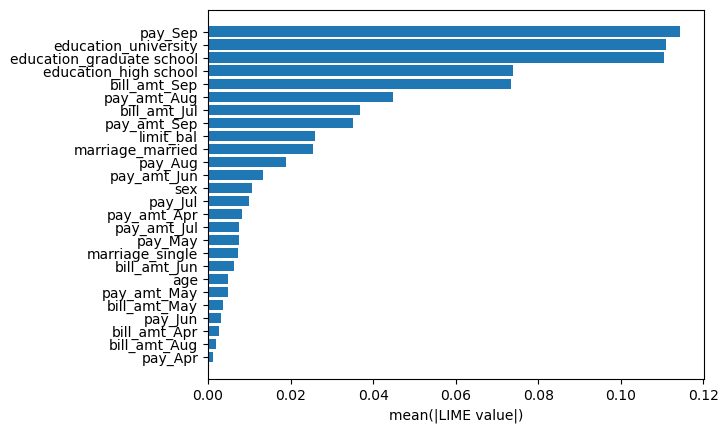

In [103]:
#plot
glime_logit_df=pd.DataFrame(data={'Feature': X_test.columns,'Mean_LIME':glime_logit})
glime_logit_df=glime_logit_df.reindex(glime_logit_df.Mean_LIME.sort_values(ascending=False).index)
fig, ax = plt.subplots()
ax.barh(glime_logit_df['Feature'],glime_logit_df['Mean_LIME'])
#ax.set_yticks(np.arange(26), labels=X_test.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|LIME value|)')

### Random forest

In [28]:
explainer =shap.Explainer(optimal_rf_clf, X_train)
shap_values_rf = explainer(X_test,check_additivity=False)
#shap.plots.bar(shap_values_rf[:,:,1])

100%|===================| 19791/19800 [14:55<00:00]        

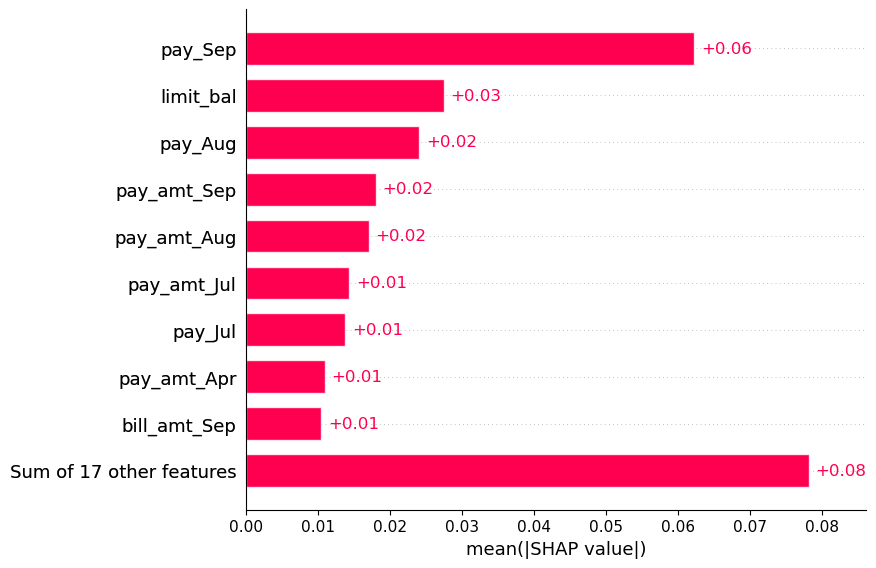

In [30]:
shap.plots.bar(shap_values_rf[:,:,1])

In [5]:
#LIME
d = {'Feature': X_test.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([X_test.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(X_test.shape[0]):
    exp_i = explainer_lime.explain_instance(X_test.iloc[0], optimal_rf_clf.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()
glime_rf = np.abs(value_i).mean(axis=0)


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33810705867055696
Prediction_local [0.60133711]
Right: 0.8923425757961778
Intercept 0.3387913524714658
Prediction_local [0.59551591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854387316322504
Prediction_local [0.60488791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400998276059354
Prediction_local [0.602605]
Right: 0.8923425757961778
Intercept 0.3381394126353179
Prediction_local [0.60044957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392047309172554
Prediction_local [0.60693511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921304080649606
Prediction_local [0.60084901]
Right: 0.8923425757961778
Intercept 0.3399384295011601
Prediction_local [0.60355299]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919000162763
Prediction_local [0.60873504]
Right: 0.8923425757961778
Intercept 0.3389297641912486
Prediction_local [0.60583893]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384871593708827
Prediction_local [0.60330506]
Right: 0.8923425757961778
Intercept 0.33708725583440297
Prediction_local [0.60174453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339288579216769
Prediction_local [0.60296881]
Right: 0.8923425757961778
Intercept 0.3391210792227981
Prediction_local [0.59812203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33838785015073786
Prediction_local [0.59765914]
Right: 0.8923425757961778
Intercept 0.33810302656872326
Prediction_local [0.59703057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392363156177157
Prediction_local [0.61033758]
Right: 0.8923425757961778
Intercept 0.33815649182162344
Prediction_local [0.59505272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918065423445676
Prediction_local [0.60401546]
Right: 0.8923425757961778
Intercept 0.3398085969775723
Prediction_local [0.60686813]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980497214028954
Prediction_local [0.61480537]
Right: 0.8923425757961778
Intercept 0.3383568288339612
Prediction_local [0.60105121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387897472129261
Prediction_local [0.60914539]
Right: 0.8923425757961778
Intercept 0.33934764151993874
Prediction_local [0.59881239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892858339451865
Prediction_local [0.60287852]
Right: 0.8923425757961778
Intercept 0.3408908014089144
Prediction_local [0.59631208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950723178409187
Prediction_local [0.60866027]
Right: 0.8923425757961778
Intercept 0.3408480337351165
Prediction_local [0.59551825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398077040245559
Prediction_local [0.59920433]
Right: 0.8923425757961778
Intercept 0.340264964569563
Prediction_local [0.60116191]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380037164293582
Prediction_local [0.61113296]
Right: 0.8923425757961778
Intercept 0.3404071127688014
Prediction_local [0.60777308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400632674014606
Prediction_local [0.60933228]
Right: 0.8923425757961778
Intercept 0.3396909781691102
Prediction_local [0.59551788]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395454580487821
Prediction_local [0.59613582]
Right: 0.8923425757961778
Intercept 0.33962081419101176
Prediction_local [0.59890542]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33783131890972407
Prediction_local [0.60490267]
Right: 0.8923425757961778
Intercept 0.3399616510797112
Prediction_local [0.61070799]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004061768628857
Prediction_local [0.60614344]
Right: 0.8923425757961778
Intercept 0.3390235298235195
Prediction_local [0.60349767]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840222881930293
Prediction_local [0.61483414]
Right: 0.8923425757961778
Intercept 0.33978892884193995
Prediction_local [0.5986766]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006357770505236
Prediction_local [0.6111978]
Right: 0.8923425757961778
Intercept 0.33888038256097786
Prediction_local [0.59775394]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961133466911453
Prediction_local [0.60767142]
Right: 0.8923425757961778
Intercept 0.33808193066520714
Prediction_local [0.6111751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951125100573426
Prediction_local [0.60444606]
Right: 0.8923425757961778
Intercept 0.33878494568988476
Prediction_local [0.60145653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393370781453854
Prediction_local [0.59979361]
Right: 0.8923425757961778
Intercept 0.339784189529496
Prediction_local [0.59298222]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386146794367054
Prediction_local [0.5971423]
Right: 0.8923425757961778
Intercept 0.33920398557944886
Prediction_local [0.60571122]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388231671924523
Prediction_local [0.60293311]
Right: 0.8923425757961778
Intercept 0.3400204197963231
Prediction_local [0.60866568]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387328912359514
Prediction_local [0.59474863]
Right: 0.8923425757961778
Intercept 0.3375843353519379
Prediction_local [0.59198149]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394302677697018
Prediction_local [0.59978366]
Right: 0.8923425757961778
Intercept 0.34037028245790146
Prediction_local [0.59186151]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393672263144641
Prediction_local [0.60825082]
Right: 0.8923425757961778
Intercept 0.3401656701256741
Prediction_local [0.5944714]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33752697331280274
Prediction_local [0.60930728]
Right: 0.8923425757961778
Intercept 0.33818029830622903
Prediction_local [0.60485139]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380815733889694
Prediction_local [0.6062736]
Right: 0.8923425757961778
Intercept 0.3387750629628201
Prediction_local [0.60855438]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828305327276365
Prediction_local [0.60305593]
Right: 0.8923425757961778
Intercept 0.3387992802126642
Prediction_local [0.6067778]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379671409021884
Prediction_local [0.60406695]
Right: 0.8923425757961778
Intercept 0.3382785693102467
Prediction_local [0.60668152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380114652654322
Prediction_local [0.59732073]
Right: 0.8923425757961778
Intercept 0.337780885722181
Prediction_local [0.59738223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388164450592893
Prediction_local [0.60051586]
Right: 0.8923425757961778
Intercept 0.3392415175423814
Prediction_local [0.60663473]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391588246156924
Prediction_local [0.60986598]
Right: 0.8923425757961778
Intercept 0.33901885023607764
Prediction_local [0.60206158]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399755982402805
Prediction_local [0.61251284]
Right: 0.8923425757961778
Intercept 0.3386899178522559
Prediction_local [0.59508662]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338997539641561
Prediction_local [0.59448527]
Right: 0.8923425757961778
Intercept 0.3380449526595727
Prediction_local [0.60205999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393590578425929
Prediction_local [0.60985661]
Right: 0.8923425757961778
Intercept 0.3407398247407907
Prediction_local [0.60615228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938034018188395
Prediction_local [0.60578255]
Right: 0.8923425757961778
Intercept 0.33925086842347824
Prediction_local [0.60770521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33781389349469076
Prediction_local [0.59356042]
Right: 0.8923425757961778
Intercept 0.3399140241035254
Prediction_local [0.61122012]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379074426239648
Prediction_local [0.58950244]
Right: 0.8923425757961778
Intercept 0.3389897255516853
Prediction_local [0.60221163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942619224414894
Prediction_local [0.60912523]
Right: 0.8923425757961778
Intercept 0.3386483496633505
Prediction_local [0.61035599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382791705916758
Prediction_local [0.59887398]
Right: 0.8923425757961778
Intercept 0.33901535435690283
Prediction_local [0.59696457]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387217814280859
Prediction_local [0.60664789]
Right: 0.8923425757961778
Intercept 0.340047892876347
Prediction_local [0.61639407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964304294112785
Prediction_local [0.59893056]
Right: 0.8923425757961778
Intercept 0.33840554908863674
Prediction_local [0.60179259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396130634900212
Prediction_local [0.6072812]
Right: 0.8923425757961778
Intercept 0.3399433253749369
Prediction_local [0.6001383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398355968813056
Prediction_local [0.60602931]
Right: 0.8923425757961778
Intercept 0.3392617452003571
Prediction_local [0.60209987]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33734266237224697
Prediction_local [0.59983507]
Right: 0.8923425757961778
Intercept 0.3380301340419855
Prediction_local [0.60061106]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887700069482574
Prediction_local [0.60168771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385566683720098
Prediction_local [0.60282631]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339712118471318
Prediction_local [0.60049378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009560179570086
Prediction_local [0.60100683]
Right: 0.8923425757961778
Intercept 0.3397734787057574
Prediction_local [0.60126857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385669191570846
Prediction_local [0.60010906]
Right: 0.8923425757961778
Intercept 0.3399506586400482
Prediction_local [0.60449307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339552991377078
Prediction_local [0.5969575]
Right: 0.8923425757961778
Intercept 0.3383974697589753
Prediction_local [0.61375462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411044577794331
Prediction_local [0.60815663]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392450442672058
Prediction_local [0.60996453]
Right: 0.8923425757961778
Intercept 0.33883611474088876
Prediction_local [0.6148888]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395123892083434
Prediction_local [0.59931927]
Right: 0.8923425757961778
Intercept 0.33814092819832686
Prediction_local [0.60332431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401986246279016
Prediction_local [0.59757783]
Right: 0.8923425757961778
Intercept 0.33909943374324386
Prediction_local [0.61413039]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010675655291495
Prediction_local [0.60962076]
Right: 0.8923425757961778
Intercept 0.33931806510654255
Prediction_local [0.61354609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380888460188822
Prediction_local [0.59031864]
Right: 0.8923425757961778
Intercept 0.3402323956657609
Prediction_local [0.6089597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33760928913050187
Prediction_local [0.59437833]
Right: 0.8923425757961778
Intercept 0.33847170433658974
Prediction_local [0.60887827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382108556553414
Prediction_local [0.60820049]
Right: 0.8923425757961778
Intercept 0.33915455087035895
Prediction_local [0.61188769]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888018072836423
Prediction_local [0.60196305]
Right: 0.8923425757961778
Intercept 0.33873714715689235
Prediction_local [0.60169334]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882928171115545
Prediction_local [0.60735339]
Right: 0.8923425757961778
Intercept 0.33824581239975526
Prediction_local [0.60335336]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794775763185264
Prediction_local [0.60867549]
Right: 0.8923425757961778
Intercept 0.3395969201340573
Prediction_local [0.60362365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935281510513304
Prediction_local [0.59677758]
Right: 0.8923425757961778
Intercept 0.3394384055044795
Prediction_local [0.60344363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368542490550753
Prediction_local [0.59749122]
Right: 0.8923425757961778
Intercept 0.3392206530071538
Prediction_local [0.60973485]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386706009224584
Prediction_local [0.60915278]
Right: 0.8923425757961778
Intercept 0.3400043792005364
Prediction_local [0.60821625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803804710361135
Prediction_local [0.60438046]
Right: 0.8923425757961778
Intercept 0.33840763588025125
Prediction_local [0.59476845]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400574009187297
Prediction_local [0.60677414]
Right: 0.8923425757961778
Intercept 0.3386014980555621
Prediction_local [0.60849062]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393385548162993
Prediction_local [0.598915]
Right: 0.8923425757961778
Intercept 0.3404448242628483
Prediction_local [0.616241]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407455553714327
Prediction_local [0.60697606]
Right: 0.8923425757961778
Intercept 0.3398713242951956
Prediction_local [0.60382339]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380938665177061
Prediction_local [0.59703927]
Right: 0.8923425757961778
Intercept 0.34080435911115115
Prediction_local [0.60644447]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402826591602448
Prediction_local [0.59514054]
Right: 0.8923425757961778
Intercept 0.33764541347047206
Prediction_local [0.6002406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379402299725714
Prediction_local [0.59806803]
Right: 0.8923425757961778
Intercept 0.3401428174061144
Prediction_local [0.59980454]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839265485545705
Prediction_local [0.60633516]
Right: 0.8923425757961778
Intercept 0.3402145243974444
Prediction_local [0.6006111]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384372327746085
Prediction_local [0.61245848]
Right: 0.8923425757961778
Intercept 0.33919078635744154
Prediction_local [0.6043843]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385955199392184
Prediction_local [0.61079852]
Right: 0.8923425757961778
Intercept 0.3397933158286485
Prediction_local [0.59412264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402642274310529
Prediction_local [0.59802504]
Right: 0.8923425757961778
Intercept 0.3405462544482329
Prediction_local [0.59715062]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34001912517635025
Prediction_local [0.60663424]
Right: 0.8923425757961778
Intercept 0.3394796070618905
Prediction_local [0.59510487]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405699204055702
Prediction_local [0.60143736]
Right: 0.8923425757961778
Intercept 0.3396003483547162
Prediction_local [0.60532174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385865365063329
Prediction_local [0.59982057]
Right: 0.8923425757961778
Intercept 0.33852142717159506
Prediction_local [0.59912424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393554852187579
Prediction_local [0.60083846]
Right: 0.8923425757961778
Intercept 0.3368172067868252
Prediction_local [0.59671565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386346999732274
Prediction_local [0.59729437]
Right: 0.8923425757961778
Intercept 0.33942744855236073
Prediction_local [0.59279322]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387992418202922
Prediction_local [0.60242382]
Right: 0.8923425757961778
Intercept 0.3379685187984635
Prediction_local [0.60507643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989237901016517
Prediction_local [0.60071544]
Right: 0.8923425757961778
Intercept 0.33843297002062467
Prediction_local [0.59709881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390936271691234
Prediction_local [0.60753478]
Right: 0.8923425757961778
Intercept 0.3392490444576297
Prediction_local [0.60827323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391172244723096
Prediction_local [0.59905418]
Right: 0.8923425757961778
Intercept 0.34050182204870433
Prediction_local [0.59061174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825108324189
Prediction_local [0.60115755]
Right: 0.8923425757961778
Intercept 0.33912807670260087
Prediction_local [0.62110331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389926752514251
Prediction_local [0.61236379]
Right: 0.8923425757961778
Intercept 0.3394646863452281
Prediction_local [0.60859965]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782636437726377
Prediction_local [0.60571368]
Right: 0.8923425757961778
Intercept 0.3390684886685224
Prediction_local [0.61753869]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389747337988237
Prediction_local [0.60355413]
Right: 0.8923425757961778
Intercept 0.3395029327945137
Prediction_local [0.6006961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403691506569221
Prediction_local [0.60342937]
Right: 0.8923425757961778
Intercept 0.3393735379352188
Prediction_local [0.58939535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392719200680985
Prediction_local [0.60849105]
Right: 0.8923425757961778
Intercept 0.3379288072600029
Prediction_local [0.59724211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863244356884303
Prediction_local [0.59538982]
Right: 0.8923425757961778
Intercept 0.34016029766874195
Prediction_local [0.6059956]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943442193256973
Prediction_local [0.60281032]
Right: 0.8923425757961778
Intercept 0.3383676558200808
Prediction_local [0.59346357]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403848934804021
Prediction_local [0.5956288]
Right: 0.8923425757961778
Intercept 0.3398478164304358
Prediction_local [0.60229635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397966596950405
Prediction_local [0.61006473]
Right: 0.8923425757961778
Intercept 0.33793563194439064
Prediction_local [0.60744291]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383651391197646
Prediction_local [0.59863963]
Right: 0.8923425757961778
Intercept 0.3387682314069502
Prediction_local [0.60534657]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847177276083346
Prediction_local [0.60548097]
Right: 0.8923425757961778
Intercept 0.34005472656430646
Prediction_local [0.60273231]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392570101423704
Prediction_local [0.61062505]
Right: 0.8923425757961778
Intercept 0.3395009278170308
Prediction_local [0.59725084]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894865466204294
Prediction_local [0.6063129]
Right: 0.8923425757961778
Intercept 0.33810792508466125
Prediction_local [0.60051472]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33807243387868724
Prediction_local [0.60235322]
Right: 0.8923425757961778
Intercept 0.34083055069158463
Prediction_local [0.59981194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399206085636685
Prediction_local [0.60470385]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381209842074718
Prediction_local [0.6094407]
Right: 0.8923425757961778
Intercept 0.33912123510697
Prediction_local [0.6141031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382678423358533
Prediction_local [0.60404356]
Right: 0.8923425757961778
Intercept 0.3389736544423517
Prediction_local [0.59864025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385663560311766
Prediction_local [0.61560651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398733144946023
Prediction_local [0.59943223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33795444677200137
Prediction_local [0.59735683]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948534100080885
Prediction_local [0.59947694]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812228488226653
Prediction_local [0.59908412]
Right: 0.8923425757961778
Intercept 0.3398649975895446
Prediction_local [0.59902816]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396458006204438
Prediction_local [0.60420146]
Right: 0.8923425757961778
Intercept 0.34097807347382325
Prediction_local [0.60997112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008311573367417
Prediction_local [0.59374705]
Right: 0.8923425757961778
Intercept 0.340682514814393
Prediction_local [0.60466956]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33787896540628143
Prediction_local [0.60171767]
Right: 0.8923425757961778
Intercept 0.34070590893841846
Prediction_local [0.59643744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805349769741083
Prediction_local [0.60082392]
Right: 0.8923425757961778
Intercept 0.33996355175539766
Prediction_local [0.61056278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395077807191033
Prediction_local [0.59767032]
Right: 0.8923425757961778
Intercept 0.33777472301536515
Prediction_local [0.59251194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410492020495761
Prediction_local [0.61018642]
Right: 0.8923425757961778
Intercept 0.33917206056832094
Prediction_local [0.60091163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384733716173728
Prediction_local [0.59744556]
Right: 0.8923425757961778
Intercept 0.3407029260152446
Prediction_local [0.60201848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402094844568594
Prediction_local [0.62528811]
Right: 0.8923425757961778
Intercept 0.33812690660173117
Prediction_local [0.61612749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386613307891815
Prediction_local [0.6068702]
Right: 0.8923425757961778
Intercept 0.3399875245265689
Prediction_local [0.59590737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383039363284734
Prediction_local [0.6060094]
Right: 0.8923425757961778
Intercept 0.3405183515881143
Prediction_local [0.6112239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382892504365954
Prediction_local [0.60541812]
Right: 0.8923425757961778
Intercept 0.33783416344516054
Prediction_local [0.60712022]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380152819006527
Prediction_local [0.61018403]
Right: 0.8923425757961778
Intercept 0.340414965267991
Prediction_local [0.59150188]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385741165820901
Prediction_local [0.59150294]
Right: 0.8923425757961778
Intercept 0.3388586760284461
Prediction_local [0.60770992]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396089677168281
Prediction_local [0.61097591]
Right: 0.8923425757961778
Intercept 0.33960514440954637
Prediction_local [0.59894731]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813701541360724
Prediction_local [0.59307267]
Right: 0.8923425757961778
Intercept 0.3387071979229729
Prediction_local [0.6055813]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339646912776282
Prediction_local [0.60740865]
Right: 0.8923425757961778
Intercept 0.33939037563830116
Prediction_local [0.60095763]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881126229011027
Prediction_local [0.59899409]
Right: 0.8923425757961778
Intercept 0.33891969662765026
Prediction_local [0.60160023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396875997939506
Prediction_local [0.60113269]
Right: 0.8923425757961778
Intercept 0.33830430513070536
Prediction_local [0.6068645]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392862724228429
Prediction_local [0.61081883]
Right: 0.8923425757961778
Intercept 0.3390077576429039
Prediction_local [0.60664332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923382228479576
Prediction_local [0.60347299]
Right: 0.8923425757961778
Intercept 0.33849126291351256
Prediction_local [0.59871199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060584474232136
Prediction_local [0.59892767]
Right: 0.8923425757961778
Intercept 0.33941009881876194
Prediction_local [0.61232744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930111625541304
Prediction_local [0.60348505]
Right: 0.8923425757961778
Intercept 0.3392056837587501
Prediction_local [0.59860258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921103474427045
Prediction_local [0.60161864]
Right: 0.8923425757961778
Intercept 0.33863262208856276
Prediction_local [0.61006933]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968266226667176
Prediction_local [0.60420265]
Right: 0.8923425757961778
Intercept 0.3370917263564258
Prediction_local [0.59232154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396984588418809
Prediction_local [0.60770795]
Right: 0.8923425757961778
Intercept 0.33902187790416893
Prediction_local [0.60512505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383229131503849
Prediction_local [0.60305648]
Right: 0.8923425757961778
Intercept 0.33793840507343287
Prediction_local [0.60336323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33691055631648004
Prediction_local [0.60022383]
Right: 0.8923425757961778
Intercept 0.3389058183211121
Prediction_local [0.60166382]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33760387020478344
Prediction_local [0.60318079]
Right: 0.8923425757961778
Intercept 0.3393345425686981
Prediction_local [0.59530744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816911218577067
Prediction_local [0.61185258]
Right: 0.8923425757961778
Intercept 0.33864073941615647
Prediction_local [0.59662861]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387259420562275
Prediction_local [0.59673476]
Right: 0.8923425757961778
Intercept 0.33772207757135886
Prediction_local [0.59469907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380761861457457
Prediction_local [0.61226014]
Right: 0.8923425757961778
Intercept 0.33998817912786056
Prediction_local [0.60256053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386227208409036
Prediction_local [0.60554931]
Right: 0.8923425757961778
Intercept 0.3396159978710698
Prediction_local [0.59186227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390842148037971
Prediction_local [0.59961026]
Right: 0.8923425757961778
Intercept 0.3387327188899818
Prediction_local [0.60689133]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387768459938548
Prediction_local [0.59905896]
Right: 0.8923425757961778
Intercept 0.33777489655947474
Prediction_local [0.60552234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866095820459086
Prediction_local [0.59550995]
Right: 0.8923425757961778
Intercept 0.3394446986608294
Prediction_local [0.60878528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33788152743506916
Prediction_local [0.59879772]
Right: 0.8923425757961778
Intercept 0.33941915679292756
Prediction_local [0.60728892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380374166623134
Prediction_local [0.60990468]
Right: 0.8923425757961778
Intercept 0.33957150852905366
Prediction_local [0.5991409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399953517358073
Prediction_local [0.61023238]
Right: 0.8923425757961778
Intercept 0.3397017068735507
Prediction_local [0.59485497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809003280527566
Prediction_local [0.59027881]
Right: 0.8923425757961778
Intercept 0.3381314398303173
Prediction_local [0.59541768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337776537163792
Prediction_local [0.60373555]
Right: 0.8923425757961778
Intercept 0.3392934429633732
Prediction_local [0.60096959]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384689989374763
Prediction_local [0.60759546]
Right: 0.8923425757961778
Intercept 0.3390160763127147
Prediction_local [0.59483832]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380036609540074
Prediction_local [0.59148078]
Right: 0.8923425757961778
Intercept 0.3385898265683996
Prediction_local [0.59852698]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33745084417358756
Prediction_local [0.5984527]
Right: 0.8923425757961778
Intercept 0.33834687492163007
Prediction_local [0.60328184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385799819798325
Prediction_local [0.60005545]
Right: 0.8923425757961778
Intercept 0.3385919530102567
Prediction_local [0.59449122]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376143373805003
Prediction_local [0.60535063]
Right: 0.8923425757961778
Intercept 0.34201893431054964
Prediction_local [0.60757073]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378327944407805
Prediction_local [0.60917348]
Right: 0.8923425757961778
Intercept 0.3375443351376684
Prediction_local [0.59333402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33722186477744637
Prediction_local [0.59786897]
Right: 0.8923425757961778
Intercept 0.3398451956235755
Prediction_local [0.60473605]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980204899143845
Prediction_local [0.60382817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33763331036537253
Prediction_local [0.59549454]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401532515272186
Prediction_local [0.60904524]
Right: 0.8923425757961778
Intercept 0.33961926554027894
Prediction_local [0.6039236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388704180777317
Prediction_local [0.60055924]
Right: 0.8923425757961778
Intercept 0.33896051523276677
Prediction_local [0.59616067]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33763221410691935
Prediction_local [0.60367731]
Right: 0.8923425757961778
Intercept 0.33932297349706947
Prediction_local [0.59768653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040400698829953
Prediction_local [0.59604512]
Right: 0.8923425757961778
Intercept 0.33738497421227676
Prediction_local [0.60171796]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871948127763013
Prediction_local [0.59462324]
Right: 0.8923425757961778
Intercept 0.3383542489212836
Prediction_local [0.5926315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408695253408885
Prediction_local [0.61395524]
Right: 0.8923425757961778
Intercept 0.33775970078215245
Prediction_local [0.59034361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859029618191905
Prediction_local [0.59516872]
Right: 0.8923425757961778
Intercept 0.3415247343268466
Prediction_local [0.60593944]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398527429138345
Prediction_local [0.60538164]
Right: 0.8923425757961778
Intercept 0.3390858498047633
Prediction_local [0.60673709]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841418459687833
Prediction_local [0.60163234]
Right: 0.8923425757961778
Intercept 0.33826905226858567
Prediction_local [0.59859436]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391015127793505
Prediction_local [0.60460579]
Right: 0.8923425757961778
Intercept 0.338334016471755
Prediction_local [0.6001128]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413237246116109
Prediction_local [0.59990022]
Right: 0.8923425757961778
Intercept 0.3389192079409989
Prediction_local [0.60523063]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923796348619245
Prediction_local [0.59788196]
Right: 0.8923425757961778
Intercept 0.33854719787970594
Prediction_local [0.60299755]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378029524898375
Prediction_local [0.59766574]
Right: 0.8923425757961778
Intercept 0.33929080025722913
Prediction_local [0.60532211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819859839954675
Prediction_local [0.60286337]
Right: 0.8923425757961778
Intercept 0.3388165043730432
Prediction_local [0.59823545]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850473792207253
Prediction_local [0.59912011]
Right: 0.8923425757961778
Intercept 0.33787178322563466
Prediction_local [0.59423901]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392818335936428
Prediction_local [0.61343426]
Right: 0.8923425757961778
Intercept 0.33997742258841973
Prediction_local [0.59930994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888881940821913
Prediction_local [0.59710714]
Right: 0.8923425757961778
Intercept 0.3389773606692491
Prediction_local [0.60336376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389024421713617
Prediction_local [0.60784368]
Right: 0.8923425757961778
Intercept 0.3391783857078821
Prediction_local [0.60596028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989534586157766
Prediction_local [0.60631618]
Right: 0.8923425757961778
Intercept 0.3388699372023018
Prediction_local [0.59181152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394942480605543
Prediction_local [0.59931008]
Right: 0.8923425757961778
Intercept 0.3393902512323862
Prediction_local [0.61204288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385543303157492
Prediction_local [0.60009056]
Right: 0.8923425757961778
Intercept 0.340125640637585
Prediction_local [0.60969596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857290654551375
Prediction_local [0.5964208]
Right: 0.8923425757961778
Intercept 0.33860833930695183
Prediction_local [0.59301991]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400190443200012
Prediction_local [0.59957256]
Right: 0.8923425757961778
Intercept 0.33772457989732285
Prediction_local [0.60268946]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395146456780938
Prediction_local [0.60243625]
Right: 0.8923425757961778
Intercept 0.34085346539713396
Prediction_local [0.60432695]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052185497842136
Prediction_local [0.59430638]
Right: 0.8923425757961778
Intercept 0.3401613989097207
Prediction_local [0.60133361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340275641799495
Prediction_local [0.5990411]
Right: 0.8923425757961778
Intercept 0.33872054985074207
Prediction_local [0.60782526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389625982869555
Prediction_local [0.60548057]
Right: 0.8923425757961778
Intercept 0.3406696671046794
Prediction_local [0.60369164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378857067990642
Prediction_local [0.59821008]
Right: 0.8923425757961778
Intercept 0.3378538015506626
Prediction_local [0.5992585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400586222494159
Prediction_local [0.60694816]
Right: 0.8923425757961778
Intercept 0.33923285599239505
Prediction_local [0.59741149]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385861483932321
Prediction_local [0.59945404]
Right: 0.8923425757961778
Intercept 0.33965233430906544
Prediction_local [0.60626351]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33656522513293025
Prediction_local [0.59814515]
Right: 0.8923425757961778
Intercept 0.3394073199787356
Prediction_local [0.5985546]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809950616450296
Prediction_local [0.59601594]
Right: 0.8923425757961778
Intercept 0.3378473019089072
Prediction_local [0.6068757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032614854307547
Prediction_local [0.60038445]
Right: 0.8923425757961778
Intercept 0.3405490644938185
Prediction_local [0.60651604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385641697933677
Prediction_local [0.60353591]
Right: 0.8923425757961778
Intercept 0.33973290462162875
Prediction_local [0.60780609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794975526282334
Prediction_local [0.60937932]
Right: 0.8923425757961778
Intercept 0.33837200475787055
Prediction_local [0.60846946]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389527924201994
Prediction_local [0.60169989]
Right: 0.8923425757961778
Intercept 0.3387056960369559
Prediction_local [0.59985449]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338856310792865
Prediction_local [0.60604278]
Right: 0.8923425757961778
Intercept 0.3388528989696187
Prediction_local [0.60765008]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388752634428421
Prediction_local [0.60244698]
Right: 0.8923425757961778
Intercept 0.3381087256608001
Prediction_local [0.60491003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385069969493272
Prediction_local [0.60488466]
Right: 0.8923425757961778
Intercept 0.3390390102608892
Prediction_local [0.6140647]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996431383804615
Prediction_local [0.61085782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885523283893487
Prediction_local [0.60063653]
Right: 0.8923425757961778
Intercept 0.33909284493999076
Prediction_local [0.60695943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403375149858366
Prediction_local [0.60440349]
Right: 0.8923425757961778
Intercept 0.33806756108483604
Prediction_local [0.59931569]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827238845483104
Prediction_local [0.60726368]
Right: 0.8923425757961778
Intercept 0.3376660859404807
Prediction_local [0.59771023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013663507972675
Prediction_local [0.59536234]
Right: 0.8923425757961778
Intercept 0.338789885746319
Prediction_local [0.60025758]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391451349351483
Prediction_local [0.60750685]
Right: 0.8923425757961778
Intercept 0.33773829270229855
Prediction_local [0.60194144]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929714554820845
Prediction_local [0.60089938]
Right: 0.8923425757961778
Intercept 0.3384202060747043
Prediction_local [0.59542982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034977276405154
Prediction_local [0.60377465]
Right: 0.8923425757961778
Intercept 0.33940644583265095
Prediction_local [0.60057806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943839518571806
Prediction_local [0.61352956]
Right: 0.8923425757961778
Intercept 0.33939636591304795
Prediction_local [0.59627298]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381459229271328
Prediction_local [0.60517107]
Right: 0.8923425757961778
Intercept 0.33945161443895444
Prediction_local [0.60390944]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006135484622074
Prediction_local [0.60449067]
Right: 0.8923425757961778
Intercept 0.34012578817691186
Prediction_local [0.6101061]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956720694492737
Prediction_local [0.59904904]
Right: 0.8923425757961778
Intercept 0.3386330524814692
Prediction_local [0.60320708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339848662892832
Prediction_local [0.59823427]
Right: 0.8923425757961778
Intercept 0.33994087995510647
Prediction_local [0.5978185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33822053271158825
Prediction_local [0.60008996]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394403605800954
Prediction_local [0.60525605]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390451638507489
Prediction_local [0.59700724]
Right: 0.8923425757961778
Intercept 0.3391795448894757
Prediction_local [0.59357774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375478816894356
Prediction_local [0.60505083]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387069940441076
Prediction_local [0.60194841]
Right: 0.8923425757961778
Intercept 0.33925851195937606
Prediction_local [0.61346706]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385979243273987
Prediction_local [0.60938732]
Right: 0.8923425757961778
Intercept 0.3389401234493807
Prediction_local [0.60039968]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338870685868591
Prediction_local [0.58953005]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898554639931633
Prediction_local [0.61259358]
Right: 0.8923425757961778
Intercept 0.3417686157590931
Prediction_local [0.60511101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993087688974
Prediction_local [0.60351463]
Right: 0.8923425757961778
Intercept 0.3389694615608262
Prediction_local [0.61045364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920838906064443
Prediction_local [0.60910339]
Right: 0.8923425757961778
Intercept 0.3394838090295863
Prediction_local [0.59528637]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954098206688
Prediction_local [0.6008638]
Right: 0.8923425757961778
Intercept 0.3379065502488664
Prediction_local [0.60367603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379345636792436
Prediction_local [0.60968302]
Right: 0.8923425757961778
Intercept 0.33909807862680974
Prediction_local [0.61326361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411339170112315
Prediction_local [0.59691758]
Right: 0.8923425757961778
Intercept 0.33903849929721724
Prediction_local [0.6051651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392431448741941
Prediction_local [0.59937998]
Right: 0.8923425757961778
Intercept 0.33982357877853564
Prediction_local [0.60501622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397922171471491
Prediction_local [0.60340235]
Right: 0.8923425757961778
Intercept 0.33773867829556775
Prediction_local [0.59129161]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382586047819859
Prediction_local [0.60204231]
Right: 0.8923425757961778
Intercept 0.3397892443980121
Prediction_local [0.5986001]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400689181982879
Prediction_local [0.6064385]
Right: 0.8923425757961778
Intercept 0.33993156356921844
Prediction_local [0.60186885]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803136075513474
Prediction_local [0.61018332]
Right: 0.8923425757961778
Intercept 0.33930528982407304
Prediction_local [0.59884899]
Right: 0.8923425757961778
Intercept 0.3379169428416044
Prediction_local [0.59749482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400710256964527
Prediction_local [0.60701998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034302876917333
Prediction_local [0.61088531]
Right: 0.8923425757961778
Intercept 0.3385175617832963
Prediction_local [0.60416627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390932008851796
Prediction_local [0.60066054]
Right: 0.8923425757961778
Intercept 0.34042812344574047
Prediction_local [0.60705955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400442106909113
Prediction_local [0.60327057]
Right: 0.8923425757961778
Intercept 0.34022811436880906
Prediction_local [0.59691884]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038976869290977
Prediction_local [0.60601284]
Right: 0.8923425757961778
Intercept 0.33858394806266146
Prediction_local [0.59726878]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384231916214812
Prediction_local [0.60551269]
Right: 0.8923425757961778
Intercept 0.3397654256249458
Prediction_local [0.61162259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33691419882459755
Prediction_local [0.59999292]
Right: 0.8923425757961778
Intercept 0.33989433842505956
Prediction_local [0.60102774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389080057905006
Prediction_local [0.5926047]
Right: 0.8923425757961778
Intercept 0.33679542666570306
Prediction_local [0.59347062]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398422394035666
Prediction_local [0.61102773]
Right: 0.8923425757961778
Intercept 0.339431324136315
Prediction_local [0.58815143]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398294663131211
Prediction_local [0.60476314]
Right: 0.8923425757961778
Intercept 0.3402087154489972
Prediction_local [0.60103835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401947575673206
Prediction_local [0.61670858]
Right: 0.8923425757961778
Intercept 0.33891442855639314
Prediction_local [0.60170706]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396968186301199
Prediction_local [0.60794085]
Right: 0.8923425757961778
Intercept 0.339163278852104
Prediction_local [0.59822734]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386048078929246
Prediction_local [0.59391154]
Right: 0.8923425757961778
Intercept 0.3395241880750558
Prediction_local [0.59547208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388151789607695
Prediction_local [0.59919844]
Right: 0.8923425757961778
Intercept 0.3386477709770827
Prediction_local [0.60503152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339158004568979
Prediction_local [0.59545597]
Right: 0.8923425757961778
Intercept 0.33996040699498353
Prediction_local [0.60782874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400776804969122
Prediction_local [0.60639261]
Right: 0.8923425757961778
Intercept 0.33887767693505266
Prediction_local [0.60718178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009498375930597
Prediction_local [0.60812982]
Right: 0.8923425757961778
Intercept 0.3405341396461985
Prediction_local [0.60897227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398505665046911
Prediction_local [0.59833747]
Right: 0.8923425757961778
Intercept 0.33922227042433195
Prediction_local [0.60383931]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797488705828066
Prediction_local [0.61264216]
Right: 0.8923425757961778
Intercept 0.3396693882813941
Prediction_local [0.59967637]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910411253792694
Prediction_local [0.59187812]
Right: 0.8923425757961778
Intercept 0.3397950239064927
Prediction_local [0.61398049]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851143336531764
Prediction_local [0.60899198]
Right: 0.8923425757961778
Intercept 0.33809535688547854
Prediction_local [0.60338668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396073842879594
Prediction_local [0.60897706]
Right: 0.8923425757961778
Intercept 0.33947966675109453
Prediction_local [0.6146466]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386523566959097
Prediction_local [0.59255113]
Right: 0.8923425757961778
Intercept 0.3397599413245376
Prediction_local [0.60602557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393655194730725
Prediction_local [0.60852849]
Right: 0.8923425757961778
Intercept 0.33854094840226345
Prediction_local [0.59714714]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385204430252321
Prediction_local [0.60940654]
Right: 0.8923425757961778
Intercept 0.33985228700742104
Prediction_local [0.60630065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397438419619705
Prediction_local [0.61119091]
Right: 0.8923425757961778
Intercept 0.3375689295409958
Prediction_local [0.60085617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076978810213227
Prediction_local [0.60641994]
Right: 0.8923425757961778
Intercept 0.3396671025680102
Prediction_local [0.6028665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927504126567376
Prediction_local [0.6029738]
Right: 0.8923425757961778
Intercept 0.3383060155087704
Prediction_local [0.59538016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378674656398979
Prediction_local [0.59517679]
Right: 0.8923425757961778
Intercept 0.3397313703676269
Prediction_local [0.59145258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863327139318095
Prediction_local [0.60016559]
Right: 0.8923425757961778
Intercept 0.3389111729717687
Prediction_local [0.60575169]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395133108535131
Prediction_local [0.6042648]
Right: 0.8923425757961778
Intercept 0.33887418842063
Prediction_local [0.60315285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397954387425308
Prediction_local [0.60477879]
Right: 0.8923425757961778
Intercept 0.33944596822674394
Prediction_local [0.60892479]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983530083174035
Prediction_local [0.59804839]
Right: 0.8923425757961778
Intercept 0.3376218475164252
Prediction_local [0.60556571]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409210255148518
Prediction_local [0.60959007]
Right: 0.8923425757961778
Intercept 0.3398057961009601
Prediction_local [0.60559407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033965437292407
Prediction_local [0.59795238]
Right: 0.8923425757961778
Intercept 0.33827964269748384
Prediction_local [0.60138208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973766846650555
Prediction_local [0.59949835]
Right: 0.8923425757961778
Intercept 0.338926238175985
Prediction_local [0.59977385]
Right: 0.8923425757961778
Intercept 0.33819515379936504
Prediction_local [0.6060443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108915198266804
Prediction_local [0.60181715]
Right: 0.8923425757961778
Intercept 0.3386822667636948
Prediction_local [0.60492458]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397756713764333
Prediction_local [0.60533419]
Right: 0.8923425757961778
Intercept 0.34090892949000856
Prediction_local [0.6088493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337991116324351
Prediction_local [0.60436941]
Right: 0.8923425757961778
Intercept 0.3391655509137331
Prediction_local [0.59988023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407725228293559
Prediction_local [0.61077528]
Right: 0.8923425757961778
Intercept 0.34134554739109
Prediction_local [0.59854662]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33788458931152815
Prediction_local [0.60078236]
Right: 0.8923425757961778
Intercept 0.3368080228510347
Prediction_local [0.59936221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401727179387492
Prediction_local [0.61017321]
Right: 0.8923425757961778
Intercept 0.33940976751194346
Prediction_local [0.60694363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384278149616117
Prediction_local [0.60324478]
Right: 0.8923425757961778
Intercept 0.33769274555208584
Prediction_local [0.59618909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392810581395253
Prediction_local [0.60271034]
Right: 0.8923425757961778
Intercept 0.33941301404601903
Prediction_local [0.60553975]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890332995405764
Prediction_local [0.60298089]
Right: 0.8923425757961778
Intercept 0.3400376572568466
Prediction_local [0.60600665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389285522361904
Prediction_local [0.60226133]
Right: 0.8923425757961778
Intercept 0.33834992983815027
Prediction_local [0.60524771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050345002012955
Prediction_local [0.59653173]
Right: 0.8923425757961778
Intercept 0.3369119642631387
Prediction_local [0.60713733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374425562925243
Prediction_local [0.60085757]
Right: 0.8923425757961778
Intercept 0.339871232309819
Prediction_local [0.60558076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384767663371499
Prediction_local [0.60460313]
Right: 0.8923425757961778
Intercept 0.3382737287121092
Prediction_local [0.5965999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003719266488686
Prediction_local [0.60613385]
Right: 0.8923425757961778
Intercept 0.33860898852115295
Prediction_local [0.60248785]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012791171607326
Prediction_local [0.60105184]
Right: 0.8923425757961778
Intercept 0.34008608635665516
Prediction_local [0.61836713]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946395370907817
Prediction_local [0.61222044]
Right: 0.8923425757961778
Intercept 0.33958125315852505
Prediction_local [0.60157068]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33775071842006865
Prediction_local [0.60265842]
Right: 0.8923425757961778
Intercept 0.34097585771050426
Prediction_local [0.60353795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390854912122529
Prediction_local [0.60527184]
Right: 0.8923425757961778
Intercept 0.33806839966623814
Prediction_local [0.60580943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409912326730167
Prediction_local [0.60586623]
Right: 0.8923425757961778
Intercept 0.3393147866199662
Prediction_local [0.59472437]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374080758063801
Prediction_local [0.60564346]
Right: 0.8923425757961778
Intercept 0.3389353822342726
Prediction_local [0.61137482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383712999477237
Prediction_local [0.59294905]
Right: 0.8923425757961778
Intercept 0.3392135960429753
Prediction_local [0.60021857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020603101225133
Prediction_local [0.59959728]
Right: 0.8923425757961778
Intercept 0.34040149758821164
Prediction_local [0.59075458]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837294098346854
Prediction_local [0.59616589]
Right: 0.8923425757961778
Intercept 0.3396937558606758
Prediction_local [0.598069]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386698136654672
Prediction_local [0.58887737]
Right: 0.8923425757961778
Intercept 0.33820766966796256
Prediction_local [0.60736817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391177849886505
Prediction_local [0.61261132]
Right: 0.8923425757961778
Intercept 0.33929989350577944
Prediction_local [0.59778504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912816358946163
Prediction_local [0.5974276]
Right: 0.8923425757961778
Intercept 0.33796311994283007
Prediction_local [0.59912289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383956975495851
Prediction_local [0.60651446]
Right: 0.8923425757961778
Intercept 0.33852481141087026
Prediction_local [0.59594742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383420643571328
Prediction_local [0.59331421]
Right: 0.8923425757961778
Intercept 0.3402964444943981
Prediction_local [0.59594504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842824961543183
Prediction_local [0.59958068]
Right: 0.8923425757961778
Intercept 0.340232029576396
Prediction_local [0.59405639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33791242423824064
Prediction_local [0.59837395]
Right: 0.8923425757961778
Intercept 0.33969480199781044
Prediction_local [0.60606435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34107620197490063
Prediction_local [0.60045123]
Right: 0.8923425757961778
Intercept 0.3397114097655467
Prediction_local [0.60135809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395931691585178
Prediction_local [0.60394341]
Right: 0.8923425757961778
Intercept 0.3383839654862648
Prediction_local [0.60216233]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33824286545053095
Prediction_local [0.60433769]
Right: 0.8923425757961778
Intercept 0.3404180656597098
Prediction_local [0.6049384]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389722762302789
Prediction_local [0.60086325]
Right: 0.8923425757961778
Intercept 0.3378956225798602
Prediction_local [0.59683408]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33704573135867116
Prediction_local [0.6026613]
Right: 0.8923425757961778
Intercept 0.3390831676170006
Prediction_local [0.59893558]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387776988034952
Prediction_local [0.59779502]
Right: 0.8923425757961778
Intercept 0.3383538296649979
Prediction_local [0.60410874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379206447185156
Prediction_local [0.59154036]
Right: 0.8923425757961778
Intercept 0.33735715901781643
Prediction_local [0.59819165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338390542394952
Prediction_local [0.60179011]
Right: 0.8923425757961778
Intercept 0.33795583780347804
Prediction_local [0.60881976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964008064241175
Prediction_local [0.60426595]
Right: 0.8923425757961778
Intercept 0.33899394813972644
Prediction_local [0.59926308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902058493818027
Prediction_local [0.60566611]
Right: 0.8923425757961778
Intercept 0.3392679941514392
Prediction_local [0.60451698]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836382134784593
Prediction_local [0.60166434]
Right: 0.8923425757961778
Intercept 0.341292987217244
Prediction_local [0.60231343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392051978292388
Prediction_local [0.6112646]
Right: 0.8923425757961778
Intercept 0.3389930289361754
Prediction_local [0.59490138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887527979240484
Prediction_local [0.59143363]
Right: 0.8923425757961778
Intercept 0.33997683015089564
Prediction_local [0.60246264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392122092347686
Prediction_local [0.60257105]
Right: 0.8923425757961778
Intercept 0.34057636254736595
Prediction_local [0.60164239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952414528722685
Prediction_local [0.60250795]
Right: 0.8923425757961778
Intercept 0.3400853706388506
Prediction_local [0.61380817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868016640475623
Prediction_local [0.60630597]
Right: 0.8923425757961778
Intercept 0.3400055132771831
Prediction_local [0.60000553]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954353755032596
Prediction_local [0.61103322]
Right: 0.8923425757961778
Intercept 0.33752973405325637
Prediction_local [0.60930873]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392597402909072
Prediction_local [0.59493877]
Right: 0.8923425757961778
Intercept 0.33876615449373126
Prediction_local [0.61164733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390366896234791
Prediction_local [0.60632837]
Right: 0.8923425757961778
Intercept 0.33756884069147125
Prediction_local [0.59225578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389704573332215
Prediction_local [0.59957694]
Right: 0.8923425757961778
Intercept 0.3389951190280842
Prediction_local [0.60086625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34125570245674763
Prediction_local [0.60947717]
Right: 0.8923425757961778
Intercept 0.33816245236076903
Prediction_local [0.60812679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771119397357297
Prediction_local [0.60676646]
Right: 0.8923425757961778
Intercept 0.33724645791616925
Prediction_local [0.60292261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405591185447242
Prediction_local [0.60407843]
Right: 0.8923425757961778
Intercept 0.34162608952127893
Prediction_local [0.59387715]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388999379937925
Prediction_local [0.60578808]
Right: 0.8923425757961778
Intercept 0.33834508500646593
Prediction_local [0.60071724]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793329815704903
Prediction_local [0.59923915]
Right: 0.8923425757961778
Intercept 0.3402090289276117
Prediction_local [0.60032288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377966512712447
Prediction_local [0.60866174]
Right: 0.8923425757961778
Intercept 0.33874999441947806
Prediction_local [0.59957651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390478284699618
Prediction_local [0.59529437]
Right: 0.8923425757961778
Intercept 0.3400302613233013
Prediction_local [0.58797708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388410369190838
Prediction_local [0.58722506]
Right: 0.8923425757961778
Intercept 0.33932890683128314
Prediction_local [0.59595878]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849998627958194
Prediction_local [0.6033561]
Right: 0.8923425757961778
Intercept 0.34082301268245635
Prediction_local [0.59367261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404991970877179
Prediction_local [0.60572224]
Right: 0.8923425757961778
Intercept 0.340656436515066
Prediction_local [0.60374602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048539972575353
Prediction_local [0.5965142]
Right: 0.8923425757961778
Intercept 0.3398399496879994
Prediction_local [0.60118055]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339334118645493
Prediction_local [0.60184863]
Right: 0.8923425757961778
Intercept 0.3392040617211295
Prediction_local [0.59926852]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411120216379348
Prediction_local [0.61394096]
Right: 0.8923425757961778
Intercept 0.3400495286890081
Prediction_local [0.60374609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375527719658235
Prediction_local [0.59929304]
Right: 0.8923425757961778
Intercept 0.3392101512310228
Prediction_local [0.58927453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881449712402295
Prediction_local [0.60009042]
Right: 0.8923425757961778
Intercept 0.3377267475627381
Prediction_local [0.59787058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042966242692774
Prediction_local [0.6112815]
Right: 0.8923425757961778
Intercept 0.3390205085886393
Prediction_local [0.60934877]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403755838100809
Prediction_local [0.60003955]
Right: 0.8923425757961778
Intercept 0.3391839926173734
Prediction_local [0.59867435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397483789561568
Prediction_local [0.61372483]
Right: 0.8923425757961778
Intercept 0.3392858416675048
Prediction_local [0.6065101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380783430245788
Prediction_local [0.60753531]
Right: 0.8923425757961778
Intercept 0.3390089745561062
Prediction_local [0.60720213]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397973488016381
Prediction_local [0.61358558]
Right: 0.8923425757961778
Intercept 0.33859048250395496
Prediction_local [0.60578076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339196680610708
Prediction_local [0.60658282]
Right: 0.8923425757961778
Intercept 0.33785235324182
Prediction_local [0.58148258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376449457902924
Prediction_local [0.60708206]
Right: 0.8923425757961778
Intercept 0.3399563003003972
Prediction_local [0.59229174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411070855768959
Prediction_local [0.61225871]
Right: 0.8923425757961778
Intercept 0.33776436311658736
Prediction_local [0.603493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894304261433644
Prediction_local [0.6139449]
Right: 0.8923425757961778
Intercept 0.3383295477453398
Prediction_local [0.60404012]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815764131922066
Prediction_local [0.60015117]
Right: 0.8923425757961778
Intercept 0.3373243406582984
Prediction_local [0.60138057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006018466543747
Prediction_local [0.60845342]
Right: 0.8923425757961778
Intercept 0.33907059487855007
Prediction_local [0.60677865]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802104027302515
Prediction_local [0.59636309]
Right: 0.8923425757961778
Intercept 0.34171368540356045
Prediction_local [0.60049639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950982281860176
Prediction_local [0.60380204]
Right: 0.8923425757961778
Intercept 0.33822795384145526
Prediction_local [0.59964165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939940233997956
Prediction_local [0.60595465]
Right: 0.8923425757961778
Intercept 0.338639850730742
Prediction_local [0.60121935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340121077679066
Prediction_local [0.60710562]
Right: 0.8923425757961778
Intercept 0.33919118668468806
Prediction_local [0.60151967]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374876491325046
Prediction_local [0.60169156]
Right: 0.8923425757961778
Intercept 0.33949369837235627
Prediction_local [0.58993243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388010451835555
Prediction_local [0.61179299]
Right: 0.8923425757961778
Intercept 0.337645656455047
Prediction_local [0.59219431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339184802958054
Prediction_local [0.60204965]
Right: 0.8923425757961778
Intercept 0.3390882466549101
Prediction_local [0.60809748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963380189261944
Prediction_local [0.60547484]
Right: 0.8923425757961778
Intercept 0.34050501182052134
Prediction_local [0.60727428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943346029715205
Prediction_local [0.61804927]
Right: 0.8923425757961778
Intercept 0.3386441229271791
Prediction_local [0.60068787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926336934010815
Prediction_local [0.6013916]
Right: 0.8923425757961778
Intercept 0.33955561935862194
Prediction_local [0.59896495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840628965779673
Prediction_local [0.60464147]
Right: 0.8923425757961778
Intercept 0.33920790216593627
Prediction_local [0.60178536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394209639319776
Prediction_local [0.6101144]
Right: 0.8923425757961778
Intercept 0.33850706683348775
Prediction_local [0.59679443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404564848338871
Prediction_local [0.60459428]
Right: 0.8923425757961778
Intercept 0.33971473582934386
Prediction_local [0.59063804]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866096696537645
Prediction_local [0.60614622]
Right: 0.8923425757961778
Intercept 0.3394133862664732
Prediction_local [0.60228976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929437039454885
Prediction_local [0.59635293]
Right: 0.8923425757961778
Intercept 0.3390395399613447
Prediction_local [0.59893054]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915392044168974
Prediction_local [0.59304158]
Right: 0.8923425757961778
Intercept 0.3395079775112254
Prediction_local [0.60887906]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972742467340145
Prediction_local [0.60859124]
Right: 0.8923425757961778
Intercept 0.338931366422619
Prediction_local [0.5975743]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338573848016577
Prediction_local [0.60712102]
Right: 0.8923425757961778
Intercept 0.3387333074299319
Prediction_local [0.60234282]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797754279407455
Prediction_local [0.59412933]
Right: 0.8923425757961778
Intercept 0.3380437696872103
Prediction_local [0.60419031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390685099770209
Prediction_local [0.60741196]
Right: 0.8923425757961778
Intercept 0.3392658074205798
Prediction_local [0.60490032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384445175955876
Prediction_local [0.60603881]
Right: 0.8923425757961778
Intercept 0.3388866519163068
Prediction_local [0.60056061]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373955174512922
Prediction_local [0.59600521]
Right: 0.8923425757961778
Intercept 0.3390625373329497
Prediction_local [0.59762844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813512589769507
Prediction_local [0.60214407]
Right: 0.8923425757961778
Intercept 0.33786507774132973
Prediction_local [0.60198248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002219349748625
Prediction_local [0.61329736]
Right: 0.8923425757961778
Intercept 0.33927142666199006
Prediction_local [0.60927104]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950896464039804
Prediction_local [0.60383615]
Right: 0.8923425757961778
Intercept 0.3397347465927062
Prediction_local [0.60193401]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379955115905806
Prediction_local [0.59845211]
Right: 0.8923425757961778
Intercept 0.3398155250776123
Prediction_local [0.6036481]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987881350799165
Prediction_local [0.60576552]
Right: 0.8923425757961778
Intercept 0.33882491678730836
Prediction_local [0.60616115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397193231954272
Prediction_local [0.60126169]
Right: 0.8923425757961778
Intercept 0.33873129531935986
Prediction_local [0.59418762]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939148262081353
Prediction_local [0.60156012]
Right: 0.8923425757961778
Intercept 0.3396634921955657
Prediction_local [0.60088485]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388552123330916
Prediction_local [0.59576595]
Right: 0.8923425757961778
Intercept 0.34048531565841306
Prediction_local [0.60202214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876851710618605
Prediction_local [0.58703053]
Right: 0.8923425757961778
Intercept 0.3398359914925783
Prediction_local [0.60622973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390114065318343
Prediction_local [0.60305165]
Right: 0.8923425757961778
Intercept 0.339150593513002
Prediction_local [0.59782692]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916829253063024
Prediction_local [0.59995808]
Right: 0.8923425757961778
Intercept 0.3382553062654923
Prediction_local [0.59478389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849232750976427
Prediction_local [0.60870787]
Right: 0.8923425757961778
Intercept 0.337355169837608
Prediction_local [0.60159381]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394747967409927
Prediction_local [0.60504346]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409682401527551
Prediction_local [0.59837532]
Right: 0.8923425757961778
Intercept 0.34006603970587085
Prediction_local [0.59557835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967122830247237
Prediction_local [0.60339409]
Right: 0.8923425757961778
Intercept 0.33888739807201596
Prediction_local [0.60253534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3364292090815628
Prediction_local [0.60275738]
Right: 0.8923425757961778
Intercept 0.3396589048030388
Prediction_local [0.60883039]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922753601012007
Prediction_local [0.60977467]
Right: 0.8923425757961778
Intercept 0.34020859371593437
Prediction_local [0.60138962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391082299408872
Prediction_local [0.60220522]
Right: 0.8923425757961778
Intercept 0.3384942020363524
Prediction_local [0.5970494]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847758578933895
Prediction_local [0.59880201]
Right: 0.8923425757961778
Intercept 0.3378448331354197
Prediction_local [0.60593619]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995436249680777
Prediction_local [0.5982155]
Right: 0.8923425757961778
Intercept 0.3388129858412518
Prediction_local [0.58955359]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339104334864334
Prediction_local [0.60714303]
Right: 0.8923425757961778
Intercept 0.33966302027523176
Prediction_local [0.61137366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390921566883131
Prediction_local [0.59958027]
Right: 0.8923425757961778
Intercept 0.3395975946700979
Prediction_local [0.60756279]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33753810183196764
Prediction_local [0.6008105]
Right: 0.8923425757961778
Intercept 0.33996958161038426
Prediction_local [0.60153316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843223065230477
Prediction_local [0.6142462]
Right: 0.8923425757961778
Intercept 0.33832871140696014
Prediction_local [0.59624259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405158867789008
Prediction_local [0.6045866]
Right: 0.8923425757961778
Intercept 0.34017807167874264
Prediction_local [0.60417775]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934541500043014
Prediction_local [0.59226129]
Right: 0.8923425757961778
Intercept 0.33884180287500093
Prediction_local [0.60555659]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388344569681828
Prediction_local [0.60639739]
Right: 0.8923425757961778
Intercept 0.3394205206212535
Prediction_local [0.62254544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879235670883046
Prediction_local [0.60140276]
Right: 0.8923425757961778
Intercept 0.3389891329442267
Prediction_local [0.60954577]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782627357462913
Prediction_local [0.60008546]
Right: 0.8923425757961778
Intercept 0.3397247912591106
Prediction_local [0.60075926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385901550854316
Prediction_local [0.60252628]
Right: 0.8923425757961778
Intercept 0.3391465075107769
Prediction_local [0.60873266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373824218597766
Prediction_local [0.59146191]
Right: 0.8923425757961778
Intercept 0.3402523434676353
Prediction_local [0.60556321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939676601763646
Prediction_local [0.60014948]
Right: 0.8923425757961778
Intercept 0.3379579440491578
Prediction_local [0.60600887]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380791235283954
Prediction_local [0.60802933]
Right: 0.8923425757961778
Intercept 0.33772637627611485
Prediction_local [0.60080389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884817327547334
Prediction_local [0.6173461]
Right: 0.8923425757961778
Intercept 0.3403934671347557
Prediction_local [0.61047131]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391708878291004
Prediction_local [0.59630469]
Right: 0.8923425757961778
Intercept 0.3391311436275334
Prediction_local [0.6063796]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924284333418475
Prediction_local [0.60919732]
Right: 0.8923425757961778
Intercept 0.3386149971006696
Prediction_local [0.60744475]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383106027242218
Prediction_local [0.59895176]
Right: 0.8923425757961778
Intercept 0.34012580992556524
Prediction_local [0.60002489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386492134054945
Prediction_local [0.60112594]
Right: 0.8923425757961778
Intercept 0.33919600806144945
Prediction_local [0.60937415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879356658374205
Prediction_local [0.60309789]
Right: 0.8923425757961778
Intercept 0.33909870379302837
Prediction_local [0.60950161]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095791891107496
Prediction_local [0.61621978]
Right: 0.8923425757961778
Intercept 0.33802816412540365
Prediction_local [0.5968027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880396100694743
Prediction_local [0.6077174]
Right: 0.8923425757961778
Intercept 0.3394654926804148
Prediction_local [0.60646181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403732419606591
Prediction_local [0.60510684]
Right: 0.8923425757961778
Intercept 0.33852094668544386
Prediction_local [0.59858183]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399458358785204
Prediction_local [0.60503055]
Right: 0.8923425757961778
Intercept 0.3384370304395171
Prediction_local [0.60562669]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031129468734606
Prediction_local [0.59754677]
Right: 0.8923425757961778
Intercept 0.3388921971774584
Prediction_local [0.61172826]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916800815184567
Prediction_local [0.5951303]
Right: 0.8923425757961778
Intercept 0.33958839325887896
Prediction_local [0.59415128]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398102408305452
Prediction_local [0.60942789]
Right: 0.8923425757961778
Intercept 0.3395604985611361
Prediction_local [0.60198195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964718463569865
Prediction_local [0.60099041]
Right: 0.8923425757961778
Intercept 0.3404402279655239
Prediction_local [0.60226966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337530896055695
Prediction_local [0.59591129]
Right: 0.8923425757961778
Intercept 0.33959495545590945
Prediction_local [0.59220491]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401685077871101
Prediction_local [0.58623417]
Right: 0.8923425757961778
Intercept 0.3396234743259778
Prediction_local [0.60626131]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390979808929138
Prediction_local [0.61027754]
Right: 0.8923425757961778
Intercept 0.3383458455703686
Prediction_local [0.61422865]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868152123170514
Prediction_local [0.60488821]
Right: 0.8923425757961778
Intercept 0.33881487845149355
Prediction_local [0.61970306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385564754649767
Prediction_local [0.60565349]
Right: 0.8923425757961778
Intercept 0.33851385983859794
Prediction_local [0.6066848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377575164777501
Prediction_local [0.59035588]
Right: 0.8923425757961778
Intercept 0.34001923095512937
Prediction_local [0.60202651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989275795357354
Prediction_local [0.60153799]
Right: 0.8923425757961778
Intercept 0.3390569433459033
Prediction_local [0.60708528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000382437659177
Prediction_local [0.59644883]
Right: 0.8923425757961778
Intercept 0.3396850325015417
Prediction_local [0.60987969]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819527672551897
Prediction_local [0.59900194]
Right: 0.8923425757961778
Intercept 0.3413590663470556
Prediction_local [0.61046932]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403908245810586
Prediction_local [0.60344526]
Right: 0.8923425757961778
Intercept 0.3407877816729873
Prediction_local [0.60218668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388992328706705
Prediction_local [0.6007587]
Right: 0.8923425757961778
Intercept 0.3397585326900911
Prediction_local [0.60692668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389163818961703
Prediction_local [0.60606931]
Right: 0.8923425757961778
Intercept 0.33995149846519285
Prediction_local [0.60757956]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404511086666015
Prediction_local [0.60212568]
Right: 0.8923425757961778
Intercept 0.3403246249975535
Prediction_local [0.61345326]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391511265494017
Prediction_local [0.59762214]
Right: 0.8923425757961778
Intercept 0.338088341448647
Prediction_local [0.59264878]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950325989174013
Prediction_local [0.60657928]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398990304580234
Prediction_local [0.59483695]
Right: 0.8923425757961778
Intercept 0.33995361467525526
Prediction_local [0.60568864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930334191034045
Prediction_local [0.61775534]
Right: 0.8923425757961778
Intercept 0.33927216215113926
Prediction_local [0.59940992]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338900015901943
Prediction_local [0.59327868]
Right: 0.8923425757961778
Intercept 0.33861783827641995
Prediction_local [0.59607231]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371032335255827
Prediction_local [0.60010852]
Right: 0.8923425757961778
Intercept 0.3403937345980484
Prediction_local [0.59901193]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390330598645367
Prediction_local [0.60817889]
Right: 0.8923425757961778
Intercept 0.3389714160863075
Prediction_local [0.60399251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339345259076249
Prediction_local [0.60790089]
Right: 0.8923425757961778
Intercept 0.33811690084816093
Prediction_local [0.60743374]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961880914244064
Prediction_local [0.59547102]
Right: 0.8923425757961778
Intercept 0.33813665085211
Prediction_local [0.60330216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398107469447014
Prediction_local [0.60617179]
Right: 0.8923425757961778
Intercept 0.3399879972487309
Prediction_local [0.61899488]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395351511822659
Prediction_local [0.59121329]
Right: 0.8923425757961778
Intercept 0.33920856996652476
Prediction_local [0.60686321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402236834574756
Prediction_local [0.60755375]
Right: 0.8923425757961778
Intercept 0.33924438134352497
Prediction_local [0.60157544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868608543669576
Prediction_local [0.58997472]
Right: 0.8923425757961778
Intercept 0.3391928540358194
Prediction_local [0.60454684]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33749126753612485
Prediction_local [0.60762411]
Right: 0.8923425757961778
Intercept 0.33899911421227774
Prediction_local [0.60860483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396486896008528
Prediction_local [0.60440195]
Right: 0.8923425757961778
Intercept 0.3404107410619814
Prediction_local [0.60584063]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882749574200066
Prediction_local [0.59928244]
Right: 0.8923425757961778
Intercept 0.33824776827376335
Prediction_local [0.6053228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411828301109792
Prediction_local [0.59294072]
Right: 0.8923425757961778
Intercept 0.3372903735803751
Prediction_local [0.60421683]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848912342991877
Prediction_local [0.60587146]
Right: 0.8923425757961778
Intercept 0.3385539942713334
Prediction_local [0.60034127]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977788661732095
Prediction_local [0.59882798]
Right: 0.8923425757961778
Intercept 0.3387432234750184
Prediction_local [0.59964471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916956044629815
Prediction_local [0.59770403]
Right: 0.8923425757961778
Intercept 0.3393592233336813
Prediction_local [0.60379596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994730338802204
Prediction_local [0.59765387]
Right: 0.8923425757961778
Intercept 0.3379617383180846
Prediction_local [0.61111038]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382913378086102
Prediction_local [0.59210616]
Right: 0.8923425757961778
Intercept 0.3380174532430546
Prediction_local [0.60599339]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879423918059137
Prediction_local [0.61025801]
Right: 0.8923425757961778
Intercept 0.339470896188528
Prediction_local [0.6114129]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912133127776967
Prediction_local [0.61469145]
Right: 0.8923425757961778
Intercept 0.34142331637933254
Prediction_local [0.60510008]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339365787582876
Prediction_local [0.59774592]
Right: 0.8923425757961778
Intercept 0.3394313515985113
Prediction_local [0.6062399]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392018839567108
Prediction_local [0.60522035]
Right: 0.8923425757961778
Intercept 0.34078093592408576
Prediction_local [0.60885422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875696264626176
Prediction_local [0.59800403]
Right: 0.8923425757961778
Intercept 0.3384708446075779
Prediction_local [0.60662019]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931706214035695
Prediction_local [0.60033494]
Right: 0.8923425757961778
Intercept 0.3392041487880923
Prediction_local [0.59046177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34099770296889365
Prediction_local [0.59913128]
Right: 0.8923425757961778
Intercept 0.3394923941196379
Prediction_local [0.60925734]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379848682672975
Prediction_local [0.59702565]
Right: 0.8923425757961778
Intercept 0.3381734851378208
Prediction_local [0.60592943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823320852532024
Prediction_local [0.60417976]
Right: 0.8923425757961778
Intercept 0.3401287141636867
Prediction_local [0.60570514]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989147186832874
Prediction_local [0.60596571]
Right: 0.8923425757961778
Intercept 0.3377139918902408
Prediction_local [0.59950017]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012539968045036
Prediction_local [0.60875493]
Right: 0.8923425757961778
Intercept 0.3412026619787947
Prediction_local [0.59932228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380480584793254
Prediction_local [0.59808477]
Right: 0.8923425757961778
Intercept 0.33784434855849527
Prediction_local [0.60381927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383103649971193
Prediction_local [0.60508012]
Right: 0.8923425757961778
Intercept 0.33881146489808567
Prediction_local [0.60353966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849320064321425
Prediction_local [0.60161987]
Right: 0.8923425757961778
Intercept 0.3385309119979301
Prediction_local [0.60199768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891063753847117
Prediction_local [0.60760405]
Right: 0.8923425757961778
Intercept 0.3392662256068844
Prediction_local [0.60040417]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024169640869806
Prediction_local [0.61141635]
Right: 0.8923425757961778
Intercept 0.341065565942696
Prediction_local [0.60665653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385523465950499
Prediction_local [0.60337308]
Right: 0.8923425757961778
Intercept 0.3396337358229078
Prediction_local [0.60334713]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942608480425757
Prediction_local [0.61785747]
Right: 0.8923425757961778
Intercept 0.33913427923465866
Prediction_local [0.60109671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392473403542362
Prediction_local [0.60272391]
Right: 0.8923425757961778
Intercept 0.339507652616224
Prediction_local [0.60755123]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403201295990345
Prediction_local [0.61131074]
Right: 0.8923425757961778
Intercept 0.3380127440209214
Prediction_local [0.60678934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817974238064075
Prediction_local [0.59898492]
Right: 0.8923425757961778
Intercept 0.3382274871637201
Prediction_local [0.58340121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813151343694425
Prediction_local [0.59525853]
Right: 0.8923425757961778
Intercept 0.3382737962302366
Prediction_local [0.60641374]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385930367201434
Prediction_local [0.5915097]
Right: 0.8923425757961778
Intercept 0.3395754790107364
Prediction_local [0.60381396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381193766716312
Prediction_local [0.60416192]
Right: 0.8923425757961778
Intercept 0.3387000368744032
Prediction_local [0.5977434]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394697949841254
Prediction_local [0.61090739]
Right: 0.8923425757961778
Intercept 0.33714647937521736
Prediction_local [0.60032106]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33869376057151873
Prediction_local [0.59665525]
Right: 0.8923425757961778
Intercept 0.33914646414688954
Prediction_local [0.6008023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394152970106715
Prediction_local [0.6033144]
Right: 0.8923425757961778
Intercept 0.3385596653735914
Prediction_local [0.60953398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373734892064445
Prediction_local [0.60303836]
Right: 0.8923425757961778
Intercept 0.3403565021082487
Prediction_local [0.59614421]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369868286476177
Prediction_local [0.60253904]
Right: 0.8923425757961778
Intercept 0.338079712119439
Prediction_local [0.59154045]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901660501053205
Prediction_local [0.59455401]
Right: 0.8923425757961778
Intercept 0.3395974795248329
Prediction_local [0.58810795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045397535409105
Prediction_local [0.59691089]
Right: 0.8923425757961778
Intercept 0.33819080820535435
Prediction_local [0.60446358]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887801948191104
Prediction_local [0.60771098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969259946611474
Prediction_local [0.60261969]
Right: 0.8923425757961778
Intercept 0.3393879681385588
Prediction_local [0.60586425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966235412043655
Prediction_local [0.61192444]
Right: 0.8923425757961778
Intercept 0.33916266172856147
Prediction_local [0.60007016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394724778787857
Prediction_local [0.60335939]
Right: 0.8923425757961778
Intercept 0.338956584468108
Prediction_local [0.6047366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388348964245131
Prediction_local [0.60372742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934914577982783
Prediction_local [0.590884]
Right: 0.8923425757961778
Intercept 0.33895618936708377
Prediction_local [0.59644978]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376962562419036
Prediction_local [0.59783447]
Right: 0.8923425757961778
Intercept 0.3369819379767674
Prediction_local [0.60206235]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401701284510688
Prediction_local [0.60434226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384116671904237
Prediction_local [0.59879312]
Right: 0.8923425757961778
Intercept 0.3398736240566702
Prediction_local [0.60905723]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33746015300593063
Prediction_local [0.60476498]
Right: 0.8923425757961778
Intercept 0.33894170298358867
Prediction_local [0.61086171]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383398221555475
Prediction_local [0.59662664]
Right: 0.8923425757961778
Intercept 0.3384666058972825
Prediction_local [0.59646827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933208545711036
Prediction_local [0.59358315]
Right: 0.8923425757961778
Intercept 0.3394416280722512
Prediction_local [0.59902779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387004222637852
Prediction_local [0.60413813]
Right: 0.8923425757961778
Intercept 0.33829114366773405
Prediction_local [0.61064856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976878924819326
Prediction_local [0.60253578]
Right: 0.8923425757961778
Intercept 0.3405521805558884
Prediction_local [0.60547249]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389865276175123
Prediction_local [0.59822075]
Right: 0.8923425757961778
Intercept 0.3389088891904928
Prediction_local [0.59341929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385875959438976
Prediction_local [0.59806617]
Right: 0.8923425757961778
Intercept 0.3412134765776287
Prediction_local [0.59970154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393642469853113
Prediction_local [0.6074195]
Right: 0.8923425757961778
Intercept 0.34089829871237476
Prediction_local [0.60662463]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389283017184293
Prediction_local [0.61601992]
Right: 0.8923425757961778
Intercept 0.33971503517728774
Prediction_local [0.60137838]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392464387456019
Prediction_local [0.60894563]
Right: 0.8923425757961778
Intercept 0.33867254211069164
Prediction_local [0.60815782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960833084124625
Prediction_local [0.61290047]
Right: 0.8923425757961778
Intercept 0.34006560536435176
Prediction_local [0.6032337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904618239547724
Prediction_local [0.59720009]
Right: 0.8923425757961778
Intercept 0.3383263261019614
Prediction_local [0.60343744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922198354923205
Prediction_local [0.60607448]
Right: 0.8923425757961778
Intercept 0.3380010401243907
Prediction_local [0.59855563]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867260969080226
Prediction_local [0.60361253]
Right: 0.8923425757961778
Intercept 0.3404485129860962
Prediction_local [0.60481304]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391176026880975
Prediction_local [0.59757745]
Right: 0.8923425757961778
Intercept 0.3398212684198836
Prediction_local [0.60055654]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34046499240415506
Prediction_local [0.60761055]
Right: 0.8923425757961778
Intercept 0.33798457879627114
Prediction_local [0.60380204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402577081313616
Prediction_local [0.59785231]
Right: 0.8923425757961778
Intercept 0.33614472851650185
Prediction_local [0.59351397]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974592169974954
Prediction_local [0.59867851]
Right: 0.8923425757961778
Intercept 0.3379782137072733
Prediction_local [0.59831396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965548139346546
Prediction_local [0.6138861]
Right: 0.8923425757961778
Intercept 0.34084332314602217
Prediction_local [0.60928091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972902370188796
Prediction_local [0.59903468]
Right: 0.8923425757961778
Intercept 0.33817300175634013
Prediction_local [0.60907004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407112006389735
Prediction_local [0.59519523]
Right: 0.8923425757961778
Intercept 0.3399755694048412
Prediction_local [0.60018031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401755620302675
Prediction_local [0.59744867]
Right: 0.8923425757961778
Intercept 0.3393824189649844
Prediction_local [0.61265817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33760635782206466
Prediction_local [0.59638267]
Right: 0.8923425757961778
Intercept 0.33854582218982193
Prediction_local [0.6010097]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391459907527903
Prediction_local [0.60094163]
Right: 0.8923425757961778
Intercept 0.3381310080042656
Prediction_local [0.6009745]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398156270534598
Prediction_local [0.60770116]
Right: 0.8923425757961778
Intercept 0.33869691302988936
Prediction_local [0.60741159]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979505758063455
Prediction_local [0.61100534]
Right: 0.8923425757961778
Intercept 0.3382808228753309
Prediction_local [0.60344507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33742339809915517
Prediction_local [0.59674599]
Right: 0.8923425757961778
Intercept 0.3413125707641766
Prediction_local [0.60540044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33733636444523774
Prediction_local [0.60163606]
Right: 0.8923425757961778
Intercept 0.3402307133461046
Prediction_local [0.59731747]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396154211791079
Prediction_local [0.60167455]
Right: 0.8923425757961778
Intercept 0.3388929543269712
Prediction_local [0.6102784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398407359810785
Prediction_local [0.60029691]
Right: 0.8923425757961778
Intercept 0.34005879864214994
Prediction_local [0.60100025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391346023823555
Prediction_local [0.59889799]
Right: 0.8923425757961778
Intercept 0.33932869471970384
Prediction_local [0.59975318]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393036179461501
Prediction_local [0.59287463]
Right: 0.8923425757961778
Intercept 0.3394158128464355
Prediction_local [0.60406101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396482513231024
Prediction_local [0.6034851]
Right: 0.8923425757961778
Intercept 0.3381296997202318
Prediction_local [0.59203397]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394167746080455
Prediction_local [0.59406521]
Right: 0.8923425757961778
Intercept 0.3375034678910886
Prediction_local [0.60383583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389886181865419
Prediction_local [0.59734265]
Right: 0.8923425757961778
Intercept 0.33815378664677426
Prediction_local [0.5915661]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401141022654519
Prediction_local [0.59474174]
Right: 0.8923425757961778
Intercept 0.33971630787042684
Prediction_local [0.60210407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381043286332457
Prediction_local [0.60150935]
Right: 0.8923425757961778
Intercept 0.339527671443179
Prediction_local [0.58627471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385817210237771
Prediction_local [0.60691095]
Right: 0.8923425757961778
Intercept 0.338731695206193
Prediction_local [0.59752208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392689111775375
Prediction_local [0.60092872]
Right: 0.8923425757961778
Intercept 0.33821434505742787
Prediction_local [0.60594923]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379261155833509
Prediction_local [0.6007646]
Right: 0.8923425757961778
Intercept 0.3400517861729828
Prediction_local [0.61164452]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399848776591799
Prediction_local [0.60849737]
Right: 0.8923425757961778
Intercept 0.33908080761656234
Prediction_local [0.60054004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390595103200264
Prediction_local [0.59007148]
Right: 0.8923425757961778
Intercept 0.33803593935737664
Prediction_local [0.58921162]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380528727459192
Prediction_local [0.60913816]
Right: 0.8923425757961778
Intercept 0.33870504801193335
Prediction_local [0.60329872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386558201841585
Prediction_local [0.60372329]
Right: 0.8923425757961778
Intercept 0.3389381836855531
Prediction_local [0.59201142]
Right: 0.8923425757961778
Intercept 0.3383424907824543
Prediction_local [0.59616542]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900327600851526
Prediction_local [0.6142555]
Right: 0.8923425757961778
Intercept 0.34016027763444007
Prediction_local [0.60661748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387930297725854
Prediction_local [0.60721556]
Right: 0.8923425757961778
Intercept 0.33956641605224297
Prediction_local [0.60597798]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339040933097418
Prediction_local [0.5970661]
Right: 0.8923425757961778
Intercept 0.3386274981691414
Prediction_local [0.59813094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030460896543113
Prediction_local [0.60398854]
Right: 0.8923425757961778
Intercept 0.3393087866109134
Prediction_local [0.60838359]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862167774164464
Prediction_local [0.61023424]
Right: 0.8923425757961778
Intercept 0.3411202196069043
Prediction_local [0.60562866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033119390147326
Prediction_local [0.59920134]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820450313930794
Prediction_local [0.59907303]
Right: 0.8923425757961778
Intercept 0.3380123062341749
Prediction_local [0.6140131]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396032777504589
Prediction_local [0.5971158]
Right: 0.8923425757961778
Intercept 0.33995990624329486
Prediction_local [0.6053111]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33699904459056984
Prediction_local [0.59794357]
Right: 0.8923425757961778
Intercept 0.3399947666168409
Prediction_local [0.61200649]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385244484678362
Prediction_local [0.59648713]
Right: 0.8923425757961778
Intercept 0.33819543460877144
Prediction_local [0.60961803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397063798302971
Prediction_local [0.60090647]
Right: 0.8923425757961778
Intercept 0.3396596088490446
Prediction_local [0.59835712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377961719458489
Prediction_local [0.59578964]
Right: 0.8923425757961778
Intercept 0.3400421459284888
Prediction_local [0.60199668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397866463734111
Prediction_local [0.6147774]
Right: 0.8923425757961778
Intercept 0.33742149781135256
Prediction_local [0.59969872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385846870353171
Prediction_local [0.59144618]
Right: 0.8923425757961778
Intercept 0.3390877813000355
Prediction_local [0.59533172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032060628286687
Prediction_local [0.59883403]
Right: 0.8923425757961778
Intercept 0.3403587135857907
Prediction_local [0.59866015]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834866607318753
Prediction_local [0.60590834]
Right: 0.8923425757961778
Intercept 0.3399470500597175
Prediction_local [0.60772506]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891160872251463
Prediction_local [0.61271163]
Right: 0.8923425757961778
Intercept 0.3393902043071701
Prediction_local [0.60565074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396580375058036
Prediction_local [0.59915361]
Right: 0.8923425757961778
Intercept 0.3386012816787353
Prediction_local [0.59895126]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391621788050104
Prediction_local [0.59616048]
Right: 0.8923425757961778
Intercept 0.3396789665374671
Prediction_local [0.59534322]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338301321058842
Prediction_local [0.60130227]
Right: 0.8923425757961778
Intercept 0.3390451780571596
Prediction_local [0.60146321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387231655894469
Prediction_local [0.60891207]
Right: 0.8923425757961778
Intercept 0.33859833981486975
Prediction_local [0.60408949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821589997205936
Prediction_local [0.59194171]
Right: 0.8923425757961778
Intercept 0.3394078320042202
Prediction_local [0.60522631]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389680690116763
Prediction_local [0.60433242]
Right: 0.8923425757961778
Intercept 0.3399338867340385
Prediction_local [0.60685718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832354821016
Prediction_local [0.60777236]
Right: 0.8923425757961778
Intercept 0.3402731779268566
Prediction_local [0.59987664]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370381620554081
Prediction_local [0.59587662]
Right: 0.8923425757961778
Intercept 0.33792756822925946
Prediction_local [0.59579804]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926069263392017
Prediction_local [0.61061471]
Right: 0.8923425757961778
Intercept 0.33938852300191574
Prediction_local [0.5948478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340056273915726
Prediction_local [0.60528252]
Right: 0.8923425757961778
Intercept 0.33981462307024635
Prediction_local [0.6039535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378143209947439
Prediction_local [0.60237421]
Right: 0.8923425757961778
Intercept 0.3381126400324154
Prediction_local [0.59478203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339653985584693
Prediction_local [0.60814381]
Right: 0.8923425757961778
Intercept 0.33899672034957345
Prediction_local [0.60435897]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378030101996406
Prediction_local [0.59832294]
Right: 0.8923425757961778
Intercept 0.3384203765272613
Prediction_local [0.60519585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385493775113085
Prediction_local [0.6083664]
Right: 0.8923425757961778
Intercept 0.33789354345637185
Prediction_local [0.60200837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388889927233281
Prediction_local [0.60954891]
Right: 0.8923425757961778
Intercept 0.3384521636536545
Prediction_local [0.60510796]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390238456541463
Prediction_local [0.61126269]
Right: 0.8923425757961778
Intercept 0.337581762194236
Prediction_local [0.59713957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392989339224665
Prediction_local [0.60517048]
Right: 0.8923425757961778
Intercept 0.3384279852403765
Prediction_local [0.5998581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391258203986555
Prediction_local [0.59807518]
Right: 0.8923425757961778
Intercept 0.3390679331982141
Prediction_local [0.59588903]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881838700690975
Prediction_local [0.61253469]
Right: 0.8923425757961778
Intercept 0.3385479182937948
Prediction_local [0.59918556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393945779590148
Prediction_local [0.61328288]
Right: 0.8923425757961778
Intercept 0.340462786574788
Prediction_local [0.60397047]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037497934445565
Prediction_local [0.60330831]
Right: 0.8923425757961778
Intercept 0.33820457021585937
Prediction_local [0.59470317]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389106847846604
Prediction_local [0.61541671]
Right: 0.8923425757961778
Intercept 0.33803643626578306
Prediction_local [0.59797328]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33769292198628265
Prediction_local [0.60161766]
Right: 0.8923425757961778
Intercept 0.340904148189834
Prediction_local [0.61172423]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384521425769038
Prediction_local [0.58920332]
Right: 0.8923425757961778
Intercept 0.33827188760654564
Prediction_local [0.59658204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408104370509856
Prediction_local [0.5969333]
Right: 0.8923425757961778
Intercept 0.3401047598106016
Prediction_local [0.59739877]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378123101182128
Prediction_local [0.59363698]
Right: 0.8923425757961778
Intercept 0.33904608396583025
Prediction_local [0.60707311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372946012844286
Prediction_local [0.60385003]
Right: 0.8923425757961778
Intercept 0.3390216109030857
Prediction_local [0.60517407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389674984831263
Prediction_local [0.6039841]
Right: 0.8923425757961778
Intercept 0.339070331728728
Prediction_local [0.60690403]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389981230886605
Prediction_local [0.608561]
Right: 0.8923425757961778
Intercept 0.33926976055598096
Prediction_local [0.60416239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037487845206726
Prediction_local [0.60711076]
Right: 0.8923425757961778
Intercept 0.3400155976426115
Prediction_local [0.60636301]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400102797395805
Prediction_local [0.60225042]
Right: 0.8923425757961778
Intercept 0.33800185465087046
Prediction_local [0.6036078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384653508369361
Prediction_local [0.6032632]
Right: 0.8923425757961778
Intercept 0.34007873981453823
Prediction_local [0.60542824]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882945241083817
Prediction_local [0.60234638]
Right: 0.8923425757961778
Intercept 0.33748560676379774
Prediction_local [0.59012114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387715286171106
Prediction_local [0.59594193]
Right: 0.8923425757961778
Intercept 0.33759967290017734
Prediction_local [0.60307111]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912698784129985
Prediction_local [0.60053493]
Right: 0.8923425757961778
Intercept 0.3396094944531837
Prediction_local [0.60318641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410844090201311
Prediction_local [0.61108789]
Right: 0.8923425757961778
Intercept 0.33866936264385616
Prediction_local [0.59889761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396282594200863
Prediction_local [0.60354166]
Right: 0.8923425757961778
Intercept 0.3388248468939337
Prediction_local [0.6035701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338530094992308
Prediction_local [0.60455334]
Right: 0.8923425757961778
Intercept 0.3389513136385202
Prediction_local [0.61822815]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382096494985066
Prediction_local [0.59812155]
Right: 0.8923425757961778
Intercept 0.3390998496267265
Prediction_local [0.59582701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864379536117156
Prediction_local [0.59660655]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385325193081664
Prediction_local [0.59648501]
Right: 0.8923425757961778
Intercept 0.33800697440457433
Prediction_local [0.60422208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906701951413
Prediction_local [0.60038547]
Right: 0.8923425757961778
Intercept 0.33842018329346496
Prediction_local [0.61242488]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022486999678936
Prediction_local [0.6123806]
Right: 0.8923425757961778
Intercept 0.3396646128430733
Prediction_local [0.59839137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34179329609218606
Prediction_local [0.60286428]
Right: 0.8923425757961778
Intercept 0.34025217285566706
Prediction_local [0.6068125]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34106103824078626
Prediction_local [0.61037508]
Right: 0.8923425757961778
Intercept 0.3390964902925768
Prediction_local [0.59599229]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914002328233434
Prediction_local [0.61335127]
Right: 0.8923425757961778
Intercept 0.3376306157142728
Prediction_local [0.60196074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973453394095177
Prediction_local [0.59353405]
Right: 0.8923425757961778
Intercept 0.3387031429485031
Prediction_local [0.60816643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952035285792564
Prediction_local [0.61142588]
Right: 0.8923425757961778
Intercept 0.33988894406479475
Prediction_local [0.5991655]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909530261956566
Prediction_local [0.59095234]
Right: 0.8923425757961778
Intercept 0.3392126004484944
Prediction_local [0.60500974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389408421744067
Prediction_local [0.58711063]
Right: 0.8923425757961778
Intercept 0.3399347433329417
Prediction_local [0.61057882]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982932049282244
Prediction_local [0.59573772]
Right: 0.8923425757961778
Intercept 0.3396720960529034
Prediction_local [0.61512961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960662303093236
Prediction_local [0.61225215]
Right: 0.8923425757961778
Intercept 0.3403121859699307
Prediction_local [0.6103031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390031024663659
Prediction_local [0.58516175]
Right: 0.8923425757961778
Intercept 0.34015333512496976
Prediction_local [0.60814819]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919292183508865
Prediction_local [0.5941449]
Right: 0.8923425757961778
Intercept 0.340077947844245
Prediction_local [0.59250979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33796348421148537
Prediction_local [0.59571866]
Right: 0.8923425757961778
Intercept 0.33871423600267087
Prediction_local [0.60539842]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379899364593527
Prediction_local [0.60588754]
Right: 0.8923425757961778
Intercept 0.33939342611282575
Prediction_local [0.6138207]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011426880416984
Prediction_local [0.59416003]
Right: 0.8923425757961778
Intercept 0.33892534921670825
Prediction_local [0.61072695]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379947424622695
Prediction_local [0.60273572]
Right: 0.8923425757961778
Intercept 0.33715117137415945
Prediction_local [0.60607046]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773756464768445
Prediction_local [0.59662788]
Right: 0.8923425757961778
Intercept 0.3390544646880299
Prediction_local [0.60281331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832025206368516
Prediction_local [0.59707662]
Right: 0.8923425757961778
Intercept 0.338750879559419
Prediction_local [0.60006726]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392667404881117
Prediction_local [0.59077152]
Right: 0.8923425757961778
Intercept 0.33854540052167686
Prediction_local [0.59188953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383098834453569
Prediction_local [0.60862434]
Right: 0.8923425757961778
Intercept 0.3398387143869529
Prediction_local [0.59587337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384395513279408
Prediction_local [0.60529016]
Right: 0.8923425757961778
Intercept 0.3393991921597512
Prediction_local [0.60609935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984948566231044
Prediction_local [0.61270867]
Right: 0.8923425757961778
Intercept 0.3392010996608359
Prediction_local [0.60905613]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794698640822063
Prediction_local [0.60329089]
Right: 0.8923425757961778
Intercept 0.33905362266750877
Prediction_local [0.60059569]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385464770716435
Prediction_local [0.59931055]
Right: 0.8923425757961778
Intercept 0.3399796627734435
Prediction_local [0.60556429]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386754379407334
Prediction_local [0.60692288]
Right: 0.8923425757961778
Intercept 0.3408135340975033
Prediction_local [0.59904648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383058102355068
Prediction_local [0.60031576]
Right: 0.8923425757961778
Intercept 0.34077949671102636
Prediction_local [0.60538291]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405975370795578
Prediction_local [0.61061984]
Right: 0.8923425757961778
Intercept 0.3390616394205027
Prediction_local [0.60335371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944649088122314
Prediction_local [0.59685851]
Right: 0.8923425757961778
Intercept 0.3392481589737415
Prediction_local [0.60342689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390659814219943
Prediction_local [0.5971646]
Right: 0.8923425757961778
Intercept 0.33864109768323614
Prediction_local [0.59750106]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401509666446813
Prediction_local [0.60364358]
Right: 0.8923425757961778
Intercept 0.3404148804092629
Prediction_local [0.60064934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391023357709942
Prediction_local [0.60104972]
Right: 0.8923425757961778
Intercept 0.33986185878579633
Prediction_local [0.60766033]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885455412062265
Prediction_local [0.58402815]
Right: 0.8923425757961778
Intercept 0.3393278692241942
Prediction_local [0.59043596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400739067510936
Prediction_local [0.60634681]
Right: 0.8923425757961778
Intercept 0.34139343413765055
Prediction_local [0.60360405]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400199165268812
Prediction_local [0.59661748]
Right: 0.8923425757961778
Intercept 0.3376855513213583
Prediction_local [0.60311963]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399922635511071
Prediction_local [0.59464854]
Right: 0.8923425757961778
Intercept 0.338235856570002
Prediction_local [0.60638248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338564921959315
Prediction_local [0.59941689]
Right: 0.8923425757961778
Intercept 0.339347856741993
Prediction_local [0.5959614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938377492438004
Prediction_local [0.6045225]
Right: 0.8923425757961778
Intercept 0.3383024795753215
Prediction_local [0.6068993]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392330428245206
Prediction_local [0.61110463]
Right: 0.8923425757961778
Intercept 0.3382308081678211
Prediction_local [0.60760034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33869854156434115
Prediction_local [0.59839765]
Right: 0.8923425757961778
Intercept 0.33785615902426464
Prediction_local [0.58913331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933694867894215
Prediction_local [0.61422327]
Right: 0.8923425757961778
Intercept 0.34005306103575744
Prediction_local [0.60456777]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34078659872495504
Prediction_local [0.59767066]
Right: 0.8923425757961778
Intercept 0.33880675283935
Prediction_local [0.59540899]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003996288874433
Prediction_local [0.60305554]
Right: 0.8923425757961778
Intercept 0.33829293762220836
Prediction_local [0.60171881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101159621265253
Prediction_local [0.60150824]
Right: 0.8923425757961778
Intercept 0.3394071364622338
Prediction_local [0.59224938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883439726632003
Prediction_local [0.6036849]
Right: 0.8923425757961778
Intercept 0.3399574548483881
Prediction_local [0.60065293]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390551505541853
Prediction_local [0.59510994]
Right: 0.8923425757961778
Intercept 0.3387108484042833
Prediction_local [0.59535913]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393644390521559
Prediction_local [0.59517833]
Right: 0.8923425757961778
Intercept 0.3395778702202451
Prediction_local [0.60369982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379126620075843
Prediction_local [0.60413327]
Right: 0.8923425757961778
Intercept 0.33870166877245605
Prediction_local [0.60863004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388081906946617
Prediction_local [0.59419783]
Right: 0.8923425757961778
Intercept 0.3396860084402246
Prediction_local [0.60183165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948413908383707
Prediction_local [0.61540866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390719261757799
Prediction_local [0.60421316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006747088553174
Prediction_local [0.59973934]
Right: 0.8923425757961778
Intercept 0.3396668921638705
Prediction_local [0.59611247]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391302561403826
Prediction_local [0.60577761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386923547547411
Prediction_local [0.60330054]
Right: 0.8923425757961778
Intercept 0.33991208755943536
Prediction_local [0.60368457]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379195348663557
Prediction_local [0.59928633]
Right: 0.8923425757961778
Intercept 0.3406373074232809
Prediction_local [0.61542879]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863548213855893
Prediction_local [0.60921335]
Right: 0.8923425757961778
Intercept 0.33961093483934085
Prediction_local [0.5896306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392878803914004
Prediction_local [0.60985019]
Right: 0.8923425757961778
Intercept 0.33891110279270353
Prediction_local [0.59929006]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388736392101963
Prediction_local [0.61255928]
Right: 0.8923425757961778
Intercept 0.3386395420904465
Prediction_local [0.58872909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394037516388313
Prediction_local [0.61161015]
Right: 0.8923425757961778
Intercept 0.3389517474522971
Prediction_local [0.6036129]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395919028642419
Prediction_local [0.60321237]
Right: 0.8923425757961778
Intercept 0.33815821179470285
Prediction_local [0.61311343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387356811489499
Prediction_local [0.59924768]
Right: 0.8923425757961778
Intercept 0.3387186465403452
Prediction_local [0.61354361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939400540960674
Prediction_local [0.59102796]
Right: 0.8923425757961778
Intercept 0.3377720022441185
Prediction_local [0.60796857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009931069256505
Prediction_local [0.60658357]
Right: 0.8923425757961778
Intercept 0.33899717160557813
Prediction_local [0.60675517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387578126015256
Prediction_local [0.60832687]
Right: 0.8923425757961778
Intercept 0.3397735611245064
Prediction_local [0.5989398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392809159823015
Prediction_local [0.60863032]
Right: 0.8923425757961778
Intercept 0.33891607147078867
Prediction_local [0.607053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935844533298076
Prediction_local [0.60095401]
Right: 0.8923425757961778
Intercept 0.34179523455956395
Prediction_local [0.60117332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402570616845104
Prediction_local [0.60583744]
Right: 0.8923425757961778
Intercept 0.3385985932059088
Prediction_local [0.58591583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878652346050486
Prediction_local [0.60131103]
Right: 0.8923425757961778
Intercept 0.33875067580563245
Prediction_local [0.60206677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941310610674763
Prediction_local [0.59681295]
Right: 0.8923425757961778
Intercept 0.3399727354102887
Prediction_local [0.61339032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853878571738827
Prediction_local [0.60650603]
Right: 0.8923425757961778
Intercept 0.3394824358349506
Prediction_local [0.61568032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385516941063094
Prediction_local [0.6029374]
Right: 0.8923425757961778
Intercept 0.3388815941871157
Prediction_local [0.60131353]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392595661679039
Prediction_local [0.59042434]
Right: 0.8923425757961778
Intercept 0.33954042504286425
Prediction_local [0.60188383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878182830114734
Prediction_local [0.60140192]
Right: 0.8923425757961778
Intercept 0.3395107357166074
Prediction_local [0.60552046]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404415400934034
Prediction_local [0.60513818]
Right: 0.8923425757961778
Intercept 0.33917504188468695
Prediction_local [0.60810679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372131320905346
Prediction_local [0.60228323]
Right: 0.8923425757961778
Intercept 0.33949863317450646
Prediction_local [0.60253681]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843277034979996
Prediction_local [0.60269777]
Right: 0.8923425757961778
Intercept 0.33861619855120495
Prediction_local [0.59699195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389010721180887
Prediction_local [0.59870188]
Right: 0.8923425757961778
Intercept 0.33902459558474346
Prediction_local [0.59642856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33671842952216396
Prediction_local [0.60303487]
Right: 0.8923425757961778
Intercept 0.33866083718277495
Prediction_local [0.59587604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974762217964233
Prediction_local [0.60363369]
Right: 0.8923425757961778
Intercept 0.3402815620332292
Prediction_local [0.60848782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376913384512299
Prediction_local [0.59616756]
Right: 0.8923425757961778
Intercept 0.337645521830795
Prediction_local [0.60169862]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857243713268365
Prediction_local [0.60345015]
Right: 0.8923425757961778
Intercept 0.33946060297706515
Prediction_local [0.60645196]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399511947364495
Prediction_local [0.60482177]
Right: 0.8923425757961778
Intercept 0.33873982272479086
Prediction_local [0.61267508]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406641207386107
Prediction_local [0.61328764]
Right: 0.8923425757961778
Intercept 0.3390613428119868
Prediction_local [0.59918288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934729716392914
Prediction_local [0.60335977]
Right: 0.8923425757961778
Intercept 0.3407464674853393
Prediction_local [0.60641976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392854758683506
Prediction_local [0.60117472]
Right: 0.8923425757961778
Intercept 0.3390095441851635
Prediction_local [0.60061788]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388931737443038
Prediction_local [0.61565209]
Right: 0.8923425757961778
Intercept 0.33928312629826074
Prediction_local [0.60436001]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384689351298529
Prediction_local [0.6016167]
Right: 0.8923425757961778
Intercept 0.33965081186692686
Prediction_local [0.60576929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938744868274895
Prediction_local [0.61293985]
Right: 0.8923425757961778
Intercept 0.34078138041964273
Prediction_local [0.59948517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995218362100554
Prediction_local [0.60993929]
Right: 0.8923425757961778
Intercept 0.3414631984191453
Prediction_local [0.60364477]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338608315530594
Prediction_local [0.61137379]
Right: 0.8923425757961778
Intercept 0.3389396078525916
Prediction_local [0.59865521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338137505343733
Prediction_local [0.58814323]
Right: 0.8923425757961778
Intercept 0.3383487780988624
Prediction_local [0.60150821]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368002285139642
Prediction_local [0.59396962]
Right: 0.8923425757961778
Intercept 0.339638967791669
Prediction_local [0.59526335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827231533352875
Prediction_local [0.60000427]
Right: 0.8923425757961778
Intercept 0.34097836756818173
Prediction_local [0.59326169]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377774986239375
Prediction_local [0.5964877]
Right: 0.8923425757961778
Intercept 0.34072533228514684
Prediction_local [0.5952628]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406768332918322
Prediction_local [0.6145647]
Right: 0.8923425757961778
Intercept 0.33860124969929245
Prediction_local [0.5886906]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338156717878105
Prediction_local [0.5947399]
Right: 0.8923425757961778
Intercept 0.33709810582748123
Prediction_local [0.59150376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378800521714537
Prediction_local [0.59675506]
Right: 0.8923425757961778
Intercept 0.33854220877944907
Prediction_local [0.61052759]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948721515117186
Prediction_local [0.60686753]
Right: 0.8923425757961778
Intercept 0.33887556251421563
Prediction_local [0.58892221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394925403911012
Prediction_local [0.60173846]
Right: 0.8923425757961778
Intercept 0.3377251658007865
Prediction_local [0.59804685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806465492740767
Prediction_local [0.58925581]
Right: 0.8923425757961778
Intercept 0.3395222457676809
Prediction_local [0.61248999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396509343070262
Prediction_local [0.60031054]
Right: 0.8923425757961778
Intercept 0.3378365279857369
Prediction_local [0.60083064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33791693089363084
Prediction_local [0.59667203]
Right: 0.8923425757961778
Intercept 0.33982828646606134
Prediction_local [0.60589491]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403177719085509
Prediction_local [0.60193171]
Right: 0.8923425757961778
Intercept 0.3387268620966918
Prediction_local [0.59292827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338572480575873
Prediction_local [0.58651379]
Right: 0.8923425757961778
Intercept 0.3395109715033372
Prediction_local [0.60005241]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392650418365881
Prediction_local [0.59893158]
Right: 0.8923425757961778
Intercept 0.33858158243642017
Prediction_local [0.61264284]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405919874087596
Prediction_local [0.59989165]
Right: 0.8923425757961778
Intercept 0.3398429457582408
Prediction_local [0.60937201]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400887072889953
Prediction_local [0.59438988]
Right: 0.8923425757961778
Intercept 0.33767359187884805
Prediction_local [0.60430767]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386820869732232
Prediction_local [0.59607983]
Right: 0.8923425757961778
Intercept 0.3385473079577305
Prediction_local [0.59855668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399873866276418
Prediction_local [0.60703389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923150468714275
Prediction_local [0.59859711]
Right: 0.8923425757961778
Intercept 0.33969251369313636
Prediction_local [0.61671268]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387185411970257
Prediction_local [0.60465956]
Right: 0.8923425757961778
Intercept 0.338532022593698
Prediction_local [0.59895962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385998409031178
Prediction_local [0.60530661]
Right: 0.8923425757961778
Intercept 0.33765877271753875
Prediction_local [0.59992602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841127968582585
Prediction_local [0.59715179]
Right: 0.8923425757961778
Intercept 0.3400925694621383
Prediction_local [0.60570243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960707589749056
Prediction_local [0.60721859]
Right: 0.8923425757961778
Intercept 0.3392754786932751
Prediction_local [0.60215199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339887729559628
Prediction_local [0.60408617]
Right: 0.8923425757961778
Intercept 0.33987422486875263
Prediction_local [0.61183275]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006568975654655
Prediction_local [0.60175797]
Right: 0.8923425757961778
Intercept 0.338492513024218
Prediction_local [0.60028783]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378001510044999
Prediction_local [0.58796871]
Right: 0.8923425757961778
Intercept 0.33982962803495687
Prediction_local [0.5984206]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393567745057439
Prediction_local [0.61400334]
Right: 0.8923425757961778
Intercept 0.33909004264471393
Prediction_local [0.60152943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929436993346396
Prediction_local [0.60875985]
Right: 0.8923425757961778
Intercept 0.3393271445632119
Prediction_local [0.60997377]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385315947092633
Prediction_local [0.6107013]
Right: 0.8923425757961778
Intercept 0.33930673314745957
Prediction_local [0.59704493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403404607887237
Prediction_local [0.60486274]
Right: 0.8923425757961778
Intercept 0.33975852045128196
Prediction_local [0.60435029]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390595711720437
Prediction_local [0.60766817]
Right: 0.8923425757961778
Intercept 0.34040407708072173
Prediction_local [0.60009595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387847720474733
Prediction_local [0.60556606]
Right: 0.8923425757961778
Intercept 0.33997777450593114
Prediction_local [0.60872722]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382118097736254
Prediction_local [0.60141855]
Right: 0.8923425757961778
Intercept 0.34027893448558433
Prediction_local [0.59372294]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398809468342805
Prediction_local [0.60628539]
Right: 0.8923425757961778
Intercept 0.3398374837977214
Prediction_local [0.60365008]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389722713874601
Prediction_local [0.59898424]
Right: 0.8923425757961778
Intercept 0.3387071965545698
Prediction_local [0.59961778]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33698200065851674
Prediction_local [0.58769969]
Right: 0.8923425757961778
Intercept 0.33936530709009666
Prediction_local [0.60760822]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377217439597529
Prediction_local [0.59496045]
Right: 0.8923425757961778
Intercept 0.33700958565672223
Prediction_local [0.60318407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928011466589203
Prediction_local [0.60638145]
Right: 0.8923425757961778
Intercept 0.33864639359116716
Prediction_local [0.60626642]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337754595344225
Prediction_local [0.60240185]
Right: 0.8923425757961778
Intercept 0.3382317840471281
Prediction_local [0.59991244]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374961375010749
Prediction_local [0.60498471]
Right: 0.8923425757961778
Intercept 0.3386394857211393
Prediction_local [0.60661848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836583358373934
Prediction_local [0.60734759]
Right: 0.8923425757961778
Intercept 0.33955940613206864
Prediction_local [0.60131905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339463662878454
Prediction_local [0.59541989]
Right: 0.8923425757961778
Intercept 0.33768465145843884
Prediction_local [0.60068495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820841116368733
Prediction_local [0.6036221]
Right: 0.8923425757961778
Intercept 0.34038526015641596
Prediction_local [0.60126909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828021185413637
Prediction_local [0.59458793]
Right: 0.8923425757961778
Intercept 0.3406505834653204
Prediction_local [0.60342214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894562248977805
Prediction_local [0.59932988]
Right: 0.8923425757961778
Intercept 0.33929626946722
Prediction_local [0.59557264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33743414096042723
Prediction_local [0.5999738]
Right: 0.8923425757961778
Intercept 0.33964486964609225
Prediction_local [0.60585511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947514907015397
Prediction_local [0.59855578]
Right: 0.8923425757961778
Intercept 0.3393427702759483
Prediction_local [0.597429]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830517461703097
Prediction_local [0.60973769]
Right: 0.8923425757961778
Intercept 0.3403386088674383
Prediction_local [0.6102449]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409357407802611
Prediction_local [0.59600742]
Right: 0.8923425757961778
Intercept 0.33938091090562655
Prediction_local [0.60387523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974253102395474
Prediction_local [0.60045467]
Right: 0.8923425757961778
Intercept 0.3394135218158886
Prediction_local [0.60101355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800660041491926
Prediction_local [0.59373348]
Right: 0.8923425757961778
Intercept 0.3407314340479951
Prediction_local [0.60106031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396491517902618
Prediction_local [0.6023353]
Right: 0.8923425757961778
Intercept 0.33941888126160696
Prediction_local [0.59863227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934634340412595
Prediction_local [0.60191661]
Right: 0.8923425757961778
Intercept 0.3366888497497425
Prediction_local [0.59931759]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405161474407799
Prediction_local [0.59901478]
Right: 0.8923425757961778
Intercept 0.3379283520440892
Prediction_local [0.60581431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805625032228437
Prediction_local [0.60422909]
Right: 0.8923425757961778
Intercept 0.33843816892517603
Prediction_local [0.60342809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939562774995485
Prediction_local [0.59880213]
Right: 0.8923425757961778
Intercept 0.33819016153894244
Prediction_local [0.60724399]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381235450194704
Prediction_local [0.60273397]
Right: 0.8923425757961778
Intercept 0.3394332663522916
Prediction_local [0.61789952]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910390606025614
Prediction_local [0.60504628]
Right: 0.8923425757961778
Intercept 0.33870805302921897
Prediction_local [0.6044674]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33760841422329524
Prediction_local [0.59282488]
Right: 0.8923425757961778
Intercept 0.3372999013721091
Prediction_local [0.60868484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942850040136957
Prediction_local [0.60773907]
Right: 0.8923425757961778
Intercept 0.33795249374780395
Prediction_local [0.60228178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33860325146597486
Prediction_local [0.60954018]
Right: 0.8923425757961778
Intercept 0.3392029139248486
Prediction_local [0.59528587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897607516446093
Prediction_local [0.60803738]
Right: 0.8923425757961778
Intercept 0.3404554921213843
Prediction_local [0.60716384]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855268948815326
Prediction_local [0.59844402]
Right: 0.8923425757961778
Intercept 0.34117189900108746
Prediction_local [0.59652154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409303937114937
Prediction_local [0.60897129]
Right: 0.8923425757961778
Intercept 0.3381464674673133
Prediction_local [0.59527138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378053832055443
Prediction_local [0.60554144]
Right: 0.8923425757961778
Intercept 0.34095406782027554
Prediction_local [0.60068642]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899287790501403
Prediction_local [0.60427563]
Right: 0.8923425757961778
Intercept 0.3380113512793809
Prediction_local [0.59597884]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393315801815062
Prediction_local [0.59961984]
Right: 0.8923425757961778
Intercept 0.33801883226962226
Prediction_local [0.6110576]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391780806645983
Prediction_local [0.60228675]
Right: 0.8923425757961778
Intercept 0.33832004636953006
Prediction_local [0.59983011]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031018450573364
Prediction_local [0.60707961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855457093434704
Prediction_local [0.60012108]
Right: 0.8923425757961778
Intercept 0.3387127962028543
Prediction_local [0.59985116]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338269585086048
Prediction_local [0.59689269]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837826671225946
Prediction_local [0.60910277]
Right: 0.8923425757961778
Intercept 0.33785384487414527
Prediction_local [0.59918998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396285658551081
Prediction_local [0.61120481]
Right: 0.8923425757961778
Intercept 0.3380978254689445
Prediction_local [0.59784387]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904730495363933
Prediction_local [0.60591797]
Right: 0.8923425757961778
Intercept 0.3394413932450395
Prediction_local [0.61345994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382619297753545
Prediction_local [0.60527064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818702894619757
Prediction_local [0.59976306]
Right: 0.8923425757961778
Intercept 0.33890543491876274
Prediction_local [0.59521036]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3366344858010984
Prediction_local [0.59662069]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370954659669754
Prediction_local [0.58782731]
Right: 0.8923425757961778
Intercept 0.3393705615790528
Prediction_local [0.59215001]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034047462637557
Prediction_local [0.59646231]
Right: 0.8923425757961778
Intercept 0.33922392646018185
Prediction_local [0.60426296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933631085408
Prediction_local [0.60607461]
Right: 0.8923425757961778
Intercept 0.3386755909298883
Prediction_local [0.59847977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841863889445956
Prediction_local [0.60909342]
Right: 0.8923425757961778
Intercept 0.33956613163333554
Prediction_local [0.60275205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390500355565009
Prediction_local [0.600842]
Right: 0.8923425757961778
Intercept 0.33809016542689924
Prediction_local [0.59953544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34106379427614053
Prediction_local [0.61052797]
Right: 0.8923425757961778
Intercept 0.3373714010769228
Prediction_local [0.59178867]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383014351936775
Prediction_local [0.59966564]
Right: 0.8923425757961778
Intercept 0.339585502831671
Prediction_local [0.59970685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395137332315048
Prediction_local [0.60150626]
Right: 0.8923425757961778
Intercept 0.3380672063376125
Prediction_local [0.59629152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028738249211204
Prediction_local [0.60927394]
Right: 0.8923425757961778
Intercept 0.3396271791704208
Prediction_local [0.60748334]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380872029957492
Prediction_local [0.5946679]
Right: 0.8923425757961778
Intercept 0.3397645791783327
Prediction_local [0.60958806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391237271895638
Prediction_local [0.61429686]
Right: 0.8923425757961778
Intercept 0.33817979203285814
Prediction_local [0.60404384]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396700036789579
Prediction_local [0.60896633]
Right: 0.8923425757961778
Intercept 0.34061761985877115
Prediction_local [0.61054232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399241111615957
Prediction_local [0.61001448]
Right: 0.8923425757961778
Intercept 0.33914930971125806
Prediction_local [0.59263459]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33725948871487094
Prediction_local [0.59669631]
Right: 0.8923425757961778
Intercept 0.3412700440718744
Prediction_local [0.60255626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919020636179786
Prediction_local [0.59571821]
Right: 0.8923425757961778
Intercept 0.3384806889971664
Prediction_local [0.59950679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394810109463381
Prediction_local [0.60216514]
Right: 0.8923425757961778
Intercept 0.3393353192714501
Prediction_local [0.60839234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376086604922594
Prediction_local [0.60154903]
Right: 0.8923425757961778
Intercept 0.3383852041729485
Prediction_local [0.60671065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384019021421501
Prediction_local [0.60614298]
Right: 0.8923425757961778
Intercept 0.3385768350771365
Prediction_local [0.60714786]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391028606939681
Prediction_local [0.59066182]
Right: 0.8923425757961778
Intercept 0.3395714946819499
Prediction_local [0.60186725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924757214564527
Prediction_local [0.59370435]
Right: 0.8923425757961778
Intercept 0.33924762306965495
Prediction_local [0.60656912]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381749479459523
Prediction_local [0.60077566]
Right: 0.8923425757961778
Intercept 0.33848625303147994
Prediction_local [0.60028663]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392498357441448
Prediction_local [0.60158467]
Right: 0.8923425757961778
Intercept 0.3378768056152426
Prediction_local [0.60171722]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984078950533014
Prediction_local [0.61483465]
Right: 0.8923425757961778
Intercept 0.3391021198923899
Prediction_local [0.60056686]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831399440765747
Prediction_local [0.60728756]
Right: 0.8923425757961778
Intercept 0.33931349218021234
Prediction_local [0.6005462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878894458099085
Prediction_local [0.59696403]
Right: 0.8923425757961778
Intercept 0.33794243114263933
Prediction_local [0.59676454]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021676059327427
Prediction_local [0.59861321]
Right: 0.8923425757961778
Intercept 0.3401563317205668
Prediction_local [0.59981647]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779063894706457
Prediction_local [0.60036827]
Right: 0.8923425757961778
Intercept 0.33963430623154517
Prediction_local [0.60253659]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375520867288853
Prediction_local [0.59759871]
Right: 0.8923425757961778
Intercept 0.3377686026704551
Prediction_local [0.60388184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887808065848013
Prediction_local [0.59438466]
Right: 0.8923425757961778
Intercept 0.33881945354343107
Prediction_local [0.5892825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379907836409657
Prediction_local [0.59802258]
Right: 0.8923425757961778
Intercept 0.3400666393123044
Prediction_local [0.60755052]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34182710358954044
Prediction_local [0.61236068]
Right: 0.8923425757961778
Intercept 0.340766198637583
Prediction_local [0.61234296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390668688436171
Prediction_local [0.59623968]
Right: 0.8923425757961778
Intercept 0.33780300528074453
Prediction_local [0.59644029]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394479903633582
Prediction_local [0.6109323]
Right: 0.8923425757961778
Intercept 0.338399443741438
Prediction_local [0.60263616]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389391154490378
Prediction_local [0.59884492]
Right: 0.8923425757961778
Intercept 0.33912595957121516
Prediction_local [0.60136587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396663501343805
Prediction_local [0.60402085]
Right: 0.8923425757961778
Intercept 0.3401691651978344
Prediction_local [0.60693282]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793249605121684
Prediction_local [0.61293868]
Right: 0.8923425757961778
Intercept 0.33729257016810266
Prediction_local [0.60805484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392990487462667
Prediction_local [0.60272224]
Right: 0.8923425757961778
Intercept 0.3377554259330483
Prediction_local [0.60358505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379701504705215
Prediction_local [0.59994681]
Right: 0.8923425757961778
Intercept 0.34010347075764896
Prediction_local [0.60133845]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384492043126998
Prediction_local [0.59219581]
Right: 0.8923425757961778
Intercept 0.33881285626048396
Prediction_local [0.59554236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396613317361659
Prediction_local [0.5976386]
Right: 0.8923425757961778
Intercept 0.3385119437561419
Prediction_local [0.59595586]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875662898035075
Prediction_local [0.6080338]
Right: 0.8923425757961778
Intercept 0.33767140796992645
Prediction_local [0.59773377]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338498546641541
Prediction_local [0.60163067]
Right: 0.8923425757961778
Intercept 0.3399989486661368
Prediction_local [0.60469977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885762901970173
Prediction_local [0.60543554]
Right: 0.8923425757961778
Intercept 0.3398170221839804
Prediction_local [0.60476256]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851852712295
Prediction_local [0.60273438]
Right: 0.8923425757961778
Intercept 0.34007497220880634
Prediction_local [0.60762968]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036159376135633
Prediction_local [0.61502426]
Right: 0.8923425757961778
Intercept 0.3401329955917207
Prediction_local [0.59990779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929222069201925
Prediction_local [0.59709782]
Right: 0.8923425757961778
Intercept 0.3412198637217567
Prediction_local [0.61188399]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762636536866764
Prediction_local [0.60747466]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777633374146476
Prediction_local [0.5941363]
Right: 0.8923425757961778
Intercept 0.33877081661057223
Prediction_local [0.61230625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963973068814557
Prediction_local [0.60455138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394478258192688
Prediction_local [0.6147668]
Right: 0.8923425757961778
Intercept 0.33903505651134724
Prediction_local [0.60460511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002947531681305
Prediction_local [0.60001636]
Right: 0.8923425757961778
Intercept 0.3396562156862771
Prediction_local [0.59735966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385043083375555
Prediction_local [0.60281807]
Right: 0.8923425757961778
Intercept 0.3398836853209568
Prediction_local [0.59762872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34059897180802473
Prediction_local [0.61182209]
Right: 0.8923425757961778
Intercept 0.3392610591559512
Prediction_local [0.5951237]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417453411555219
Prediction_local [0.61080455]
Right: 0.8923425757961778
Intercept 0.337947818086753
Prediction_local [0.59712548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809765092356725
Prediction_local [0.60155153]
Right: 0.8923425757961778
Intercept 0.338308356030023
Prediction_local [0.61414061]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396666508310486
Prediction_local [0.60064815]
Right: 0.8923425757961778
Intercept 0.3399191268034078
Prediction_local [0.60922455]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943744639325235
Prediction_local [0.59988568]
Right: 0.8923425757961778
Intercept 0.33799254834957454
Prediction_local [0.5953209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340766288748728
Prediction_local [0.61924693]
Right: 0.8923425757961778
Intercept 0.3386823177587815
Prediction_local [0.59685423]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337843244946832
Prediction_local [0.60399207]
Right: 0.8923425757961778
Intercept 0.3380692140992144
Prediction_local [0.59563945]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912426486418057
Prediction_local [0.61161509]
Right: 0.8923425757961778
Intercept 0.33957913508716653
Prediction_local [0.60863424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380666737758944
Prediction_local [0.59300767]
Right: 0.8923425757961778
Intercept 0.3397823608959315
Prediction_local [0.59738807]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889433166431643
Prediction_local [0.6060182]
Right: 0.8923425757961778
Intercept 0.33838925246506635
Prediction_local [0.59997557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33590459099454845
Prediction_local [0.60204022]
Right: 0.8923425757961778
Intercept 0.33758075041280877
Prediction_local [0.60112905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403309651519153
Prediction_local [0.60136074]
Right: 0.8923425757961778
Intercept 0.3390762741403709
Prediction_local [0.60921852]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395910481176929
Prediction_local [0.60220446]
Right: 0.8923425757961778
Intercept 0.3382653187449507
Prediction_local [0.5984904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389363493650085
Prediction_local [0.60871044]
Right: 0.8923425757961778
Intercept 0.3383617635376308
Prediction_local [0.59545968]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396814749383301
Prediction_local [0.60308839]
Right: 0.8923425757961778
Intercept 0.33763178279410405
Prediction_local [0.60747818]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3363669222785781
Prediction_local [0.6055826]
Right: 0.8923425757961778
Intercept 0.3386818408509862
Prediction_local [0.60317988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098034263542487
Prediction_local [0.59907992]
Right: 0.8923425757961778
Intercept 0.33856468232485964
Prediction_local [0.60579234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388891991924822
Prediction_local [0.61949619]
Right: 0.8923425757961778
Intercept 0.3388443172498875
Prediction_local [0.60269979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858583446618695
Prediction_local [0.61016714]
Right: 0.8923425757961778
Intercept 0.3404392781559138
Prediction_local [0.60450304]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880104034683517
Prediction_local [0.60792988]
Right: 0.8923425757961778
Intercept 0.3378554215554713
Prediction_local [0.59700403]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887120854245106
Prediction_local [0.61114436]
Right: 0.8923425757961778
Intercept 0.3408959063680907
Prediction_local [0.60684469]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384733091724011
Prediction_local [0.6051119]
Right: 0.8923425757961778
Intercept 0.33930776750418934
Prediction_local [0.60911614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390769477813645
Prediction_local [0.60288979]
Right: 0.8923425757961778
Intercept 0.3397022653602921
Prediction_local [0.60024716]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33755468815724465
Prediction_local [0.60614745]
Right: 0.8923425757961778
Intercept 0.33839140103706383
Prediction_local [0.60906088]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995364912580633
Prediction_local [0.60925563]
Right: 0.8923425757961778
Intercept 0.3390094074388327
Prediction_local [0.59039166]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095375275131484
Prediction_local [0.59795608]
Right: 0.8923425757961778
Intercept 0.33960618144404053
Prediction_local [0.61041366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400218441739917
Prediction_local [0.58654577]
Right: 0.8923425757961778
Intercept 0.340257037362909
Prediction_local [0.61692121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33684570959375093
Prediction_local [0.60631288]
Right: 0.8923425757961778
Intercept 0.3390948807430677
Prediction_local [0.60482974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865452110690136
Prediction_local [0.59781958]
Right: 0.8923425757961778
Intercept 0.3395585113227277
Prediction_local [0.59478029]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094967381010954
Prediction_local [0.59325396]
Right: 0.8923425757961778
Intercept 0.33843558696558573
Prediction_local [0.60884847]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883241649735685
Prediction_local [0.60148547]
Right: 0.8923425757961778
Intercept 0.33832565011999993
Prediction_local [0.60732908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901427864745215
Prediction_local [0.59597588]
Right: 0.8923425757961778
Intercept 0.33963304468489564
Prediction_local [0.59838074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038059088797296
Prediction_local [0.60590119]
Right: 0.8923425757961778
Intercept 0.3397939182445962
Prediction_local [0.60778226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400961353273201
Prediction_local [0.6034767]
Right: 0.8923425757961778
Intercept 0.33911386387124887
Prediction_local [0.59983393]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969513908303167
Prediction_local [0.59947042]
Right: 0.8923425757961778
Intercept 0.3379103629161567
Prediction_local [0.59857393]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378428981277391
Prediction_local [0.59291161]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395479811947005
Prediction_local [0.61081308]
Right: 0.8923425757961778
Intercept 0.3388748665895215
Prediction_local [0.59808163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006914773203234
Prediction_local [0.60960214]
Right: 0.8923425757961778
Intercept 0.33788410391927853
Prediction_local [0.59465924]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410630773603258
Prediction_local [0.60830509]
Right: 0.8923425757961778
Intercept 0.3393977723584766
Prediction_local [0.59166297]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922465213121616
Prediction_local [0.61402714]
Right: 0.8923425757961778
Intercept 0.3379881899306496
Prediction_local [0.61182739]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817677994785167
Prediction_local [0.59737015]
Right: 0.8923425757961778
Intercept 0.3399173607822564
Prediction_local [0.59984511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407856597412368
Prediction_local [0.60705037]
Right: 0.8923425757961778
Intercept 0.33833831307910656
Prediction_local [0.60853671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33791881654815265
Prediction_local [0.59414473]
Right: 0.8923425757961778
Intercept 0.3382607552875066
Prediction_local [0.59867742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339374726227827
Prediction_local [0.60988262]
Right: 0.8923425757961778
Intercept 0.341089931532078
Prediction_local [0.60162557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393971777758581
Prediction_local [0.60955775]
Right: 0.8923425757961778
Intercept 0.33974219935855365
Prediction_local [0.60322311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971608079017795
Prediction_local [0.6035951]
Right: 0.8923425757961778
Intercept 0.3381818958572906
Prediction_local [0.5975881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379102639195561
Prediction_local [0.61007563]
Right: 0.8923425757961778
Intercept 0.34021243403048473
Prediction_local [0.61107415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391963763097732
Prediction_local [0.60157696]
Right: 0.8923425757961778
Intercept 0.33894804821158364
Prediction_local [0.59584014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843802069168194
Prediction_local [0.60761965]
Right: 0.8923425757961778
Intercept 0.3417571778898522
Prediction_local [0.60986495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945835107176353
Prediction_local [0.60844811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961351039616705
Prediction_local [0.60351446]
Right: 0.8923425757961778
Intercept 0.3390088355589135
Prediction_local [0.61660434]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391494798129394
Prediction_local [0.60259129]
Right: 0.8923425757961778
Intercept 0.33863027311885496
Prediction_local [0.60866426]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396250905794743
Prediction_local [0.60251429]
Right: 0.8923425757961778
Intercept 0.33928694946915416
Prediction_local [0.6103235]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858047365756255
Prediction_local [0.59735562]
Right: 0.8923425757961778
Intercept 0.33866150791341165
Prediction_local [0.59160511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385557959048713
Prediction_local [0.59963117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396483046929354
Prediction_local [0.59908659]
Right: 0.8923425757961778
Intercept 0.3392873748309354
Prediction_local [0.60439978]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380653924563515
Prediction_local [0.60657444]
Right: 0.8923425757961778
Intercept 0.33836546085874525
Prediction_local [0.6067446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33685819031243847
Prediction_local [0.59853254]
Right: 0.8923425757961778
Intercept 0.3397344551120708
Prediction_local [0.59995902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917487030671695
Prediction_local [0.61078818]
Right: 0.8923425757961778
Intercept 0.3386257742376306
Prediction_local [0.60438581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816720917740045
Prediction_local [0.59966942]
Right: 0.8923425757961778
Intercept 0.33848604675305066
Prediction_local [0.60531483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382860776721175
Prediction_local [0.61985478]
Right: 0.8923425757961778
Intercept 0.3391324485767088
Prediction_local [0.59755235]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394254616226422
Prediction_local [0.60026418]
Right: 0.8923425757961778
Intercept 0.33818508747766074
Prediction_local [0.60503209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024727412858413
Prediction_local [0.60403872]
Right: 0.8923425757961778
Intercept 0.33980108661712827
Prediction_local [0.5973185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862507108176715
Prediction_local [0.60382156]
Right: 0.8923425757961778
Intercept 0.3403591306944991
Prediction_local [0.59927621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388879292447694
Prediction_local [0.61161155]
Right: 0.8923425757961778
Intercept 0.3381137436369051
Prediction_local [0.60570831]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33844810460367136
Prediction_local [0.60085947]
Right: 0.8923425757961778
Intercept 0.34055039423510564
Prediction_local [0.60195068]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393793320681588
Prediction_local [0.6066284]
Right: 0.8923425757961778
Intercept 0.3381243654987449
Prediction_local [0.60708749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083607154722023
Prediction_local [0.60222976]
Right: 0.8923425757961778
Intercept 0.33904453244656263
Prediction_local [0.59401463]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997785773121925
Prediction_local [0.59330443]
Right: 0.8923425757961778
Intercept 0.33885640560281494
Prediction_local [0.60842748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33754363764538375
Prediction_local [0.61230311]
Right: 0.8923425757961778
Intercept 0.3405328951839659
Prediction_local [0.60145993]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384233405705488
Prediction_local [0.59318658]
Right: 0.8923425757961778
Intercept 0.33900319978385496
Prediction_local [0.59802667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028964403071077
Prediction_local [0.60189276]
Right: 0.8923425757961778
Intercept 0.3384752263101402
Prediction_local [0.5991946]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390041344799119
Prediction_local [0.60999969]
Right: 0.8923425757961778
Intercept 0.3404290776256401
Prediction_local [0.60872518]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391883993302867
Prediction_local [0.59646617]
Right: 0.8923425757961778
Intercept 0.3397494648880352
Prediction_local [0.59850779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390498645604963
Prediction_local [0.60564517]
Right: 0.8923425757961778
Intercept 0.3406215448135731
Prediction_local [0.61647586]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803851160132004
Prediction_local [0.60269967]
Right: 0.8923425757961778
Intercept 0.34055691900428636
Prediction_local [0.60168151]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813672691266927
Prediction_local [0.60143853]
Right: 0.8923425757961778
Intercept 0.3394837290791086
Prediction_local [0.60177185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019440062328554
Prediction_local [0.60016554]
Right: 0.8923425757961778
Intercept 0.337364574177938
Prediction_local [0.60049793]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398376512619026
Prediction_local [0.60837927]
Right: 0.8923425757961778
Intercept 0.33908078746480425
Prediction_local [0.59948911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918397294628805
Prediction_local [0.59673559]
Right: 0.8923425757961778
Intercept 0.3395866560459185
Prediction_local [0.60150372]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874869849352685
Prediction_local [0.60543875]
Right: 0.8923425757961778
Intercept 0.3390760279917255
Prediction_local [0.60503806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829234356348736
Prediction_local [0.60779298]
Right: 0.8923425757961778
Intercept 0.33774565837462917
Prediction_local [0.60905627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413395161300091
Prediction_local [0.59958462]
Right: 0.8923425757961778
Intercept 0.34058539725587433
Prediction_local [0.60597492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33775849878728653
Prediction_local [0.610601]
Right: 0.8923425757961778
Intercept 0.3394365421648486
Prediction_local [0.60139863]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947081228321574
Prediction_local [0.60904483]
Right: 0.8923425757961778
Intercept 0.33864891383297224
Prediction_local [0.60012315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400108029449104
Prediction_local [0.60609471]
Right: 0.8923425757961778
Intercept 0.339290579203425
Prediction_local [0.60160335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381726016479056
Prediction_local [0.6052284]
Right: 0.8923425757961778
Intercept 0.3402747126938026
Prediction_local [0.59167109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382342544607689
Prediction_local [0.59821698]
Right: 0.8923425757961778
Intercept 0.3389280890277314
Prediction_local [0.59092808]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865292829842863
Prediction_local [0.59400917]
Right: 0.8923425757961778
Intercept 0.33908574107077677
Prediction_local [0.59698609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834564322776445
Prediction_local [0.59669035]
Right: 0.8923425757961778
Intercept 0.3383114631378848
Prediction_local [0.59188943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407403287927077
Prediction_local [0.604036]
Right: 0.8923425757961778
Intercept 0.33920016171432604
Prediction_local [0.60618687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399200920362616
Prediction_local [0.6047063]
Right: 0.8923425757961778
Intercept 0.3395865522877275
Prediction_local [0.61076381]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383324553768487
Prediction_local [0.60663481]
Right: 0.8923425757961778
Intercept 0.33686522756791115
Prediction_local [0.60452392]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390492002087275
Prediction_local [0.61706551]
Right: 0.8923425757961778
Intercept 0.3403020438847339
Prediction_local [0.60042185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415237835986452
Prediction_local [0.60122559]
Right: 0.8923425757961778
Intercept 0.3393002360738414
Prediction_local [0.60100444]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33774395871720286
Prediction_local [0.59900818]
Right: 0.8923425757961778
Intercept 0.33912027922782423
Prediction_local [0.59919626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940164727606287
Prediction_local [0.60699628]
Right: 0.8923425757961778
Intercept 0.3387808372733133
Prediction_local [0.61063233]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33752847008496234
Prediction_local [0.59499272]
Right: 0.8923425757961778
Intercept 0.33824765477233854
Prediction_local [0.59883358]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393180697463529
Prediction_local [0.60401877]
Right: 0.8923425757961778
Intercept 0.3376716669194549
Prediction_local [0.60918121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33770193139688104
Prediction_local [0.5943556]
Right: 0.8923425757961778
Intercept 0.33947112147487973
Prediction_local [0.60001214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392644419068261
Prediction_local [0.59998805]
Right: 0.8923425757961778
Intercept 0.3374020472448884
Prediction_local [0.60123074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390874597214585
Prediction_local [0.59410146]
Right: 0.8923425757961778
Intercept 0.3408819019923871
Prediction_local [0.61102834]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392894233768086
Prediction_local [0.60486687]
Right: 0.8923425757961778
Intercept 0.3392935389247588
Prediction_local [0.61382022]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401737939192496
Prediction_local [0.59902265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390145856970046
Prediction_local [0.604642]
Right: 0.8923425757961778
Intercept 0.3391172333800668
Prediction_local [0.61618949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875715778691906
Prediction_local [0.59367577]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399472477184493
Prediction_local [0.59592166]
Right: 0.8923425757961778
Intercept 0.3399358415876718
Prediction_local [0.6110881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968901317210853
Prediction_local [0.60930095]
Right: 0.8923425757961778
Intercept 0.3390783601257195
Prediction_local [0.60768446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905379571707167
Prediction_local [0.596088]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992664778205484
Prediction_local [0.60923999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415260038036372
Prediction_local [0.59737605]
Right: 0.8923425757961778
Intercept 0.3389634111423905
Prediction_local [0.59617857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387088233527279
Prediction_local [0.60271987]
Right: 0.8923425757961778
Intercept 0.3388583727215622
Prediction_local [0.60261825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33787984950451505
Prediction_local [0.59334387]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407361758710742
Prediction_local [0.59749129]
Right: 0.8923425757961778
Intercept 0.34178010413265014
Prediction_local [0.60382629]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399283769774291
Prediction_local [0.60311125]
Right: 0.8923425757961778
Intercept 0.3386697800094102
Prediction_local [0.59865094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881586263158353
Prediction_local [0.59697444]
Right: 0.8923425757961778
Intercept 0.3391888348213055
Prediction_local [0.59700265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390848039541662
Prediction_local [0.61408214]
Right: 0.8923425757961778
Intercept 0.33789841544010524
Prediction_local [0.59889014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388134805123096
Prediction_local [0.60302799]
Right: 0.8923425757961778
Intercept 0.3378962200130424
Prediction_local [0.59858094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983726496060684
Prediction_local [0.60612078]
Right: 0.8923425757961778
Intercept 0.33771430211667774
Prediction_local [0.60095547]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340316059550148
Prediction_local [0.60285824]
Right: 0.8923425757961778
Intercept 0.33708893087558256
Prediction_local [0.60081354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806483472529386
Prediction_local [0.60986142]
Right: 0.8923425757961778
Intercept 0.3389107276838353
Prediction_local [0.59674398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384815029300896
Prediction_local [0.59698493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400322909087538
Prediction_local [0.60329391]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399352066608611
Prediction_local [0.59956803]
Right: 0.8923425757961778
Intercept 0.3386954349124455
Prediction_local [0.59669485]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994060614893995
Prediction_local [0.59751498]
Right: 0.8923425757961778
Intercept 0.33996984661091967
Prediction_local [0.60780199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383824886205016
Prediction_local [0.60554654]
Right: 0.8923425757961778
Intercept 0.3389759284190988
Prediction_local [0.59047231]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391083186701965
Prediction_local [0.5911717]
Right: 0.8923425757961778
Intercept 0.3397361211607595
Prediction_local [0.59573301]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389257847878114
Prediction_local [0.60985508]
Right: 0.8923425757961778
Intercept 0.341373699001173
Prediction_local [0.60572151]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390074645411618
Prediction_local [0.60318329]
Right: 0.8923425757961778
Intercept 0.33936371924275044
Prediction_local [0.61016278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384309992576531
Prediction_local [0.60176285]
Right: 0.8923425757961778
Intercept 0.3400784174583287
Prediction_local [0.60620197]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379736506957098
Prediction_local [0.60216615]
Right: 0.8923425757961778
Intercept 0.33864311768862043
Prediction_local [0.60005749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895224502934324
Prediction_local [0.60063594]
Right: 0.8923425757961778
Intercept 0.3392146566579185
Prediction_local [0.60105936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005088710493
Prediction_local [0.60289455]
Right: 0.8923425757961778
Intercept 0.339800342239547
Prediction_local [0.59961911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936523841679295
Prediction_local [0.61040707]
Right: 0.8923425757961778
Intercept 0.3399778411390888
Prediction_local [0.60081679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34099680753502903
Prediction_local [0.60768752]
Right: 0.8923425757961778
Intercept 0.3378065131694765
Prediction_local [0.60380725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894969240965483
Prediction_local [0.60021782]
Right: 0.8923425757961778
Intercept 0.33983172458541555
Prediction_local [0.60095595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395059245596573
Prediction_local [0.59644684]
Right: 0.8923425757961778
Intercept 0.33873212714285006
Prediction_local [0.60059827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339477880311531
Prediction_local [0.59977514]
Right: 0.8923425757961778
Intercept 0.3386489504713863
Prediction_local [0.61587524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402985544538193
Prediction_local [0.60350264]
Right: 0.8923425757961778
Intercept 0.33866477147285934
Prediction_local [0.60137083]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969637702290917
Prediction_local [0.60352837]
Right: 0.8923425757961778
Intercept 0.3385260351881282
Prediction_local [0.60631904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406156500337102
Prediction_local [0.5961929]
Right: 0.8923425757961778
Intercept 0.338567428251954
Prediction_local [0.60940314]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912704430963697
Prediction_local [0.59976633]
Right: 0.8923425757961778
Intercept 0.3389948102098878
Prediction_local [0.60500668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394298847359291
Prediction_local [0.59898818]
Right: 0.8923425757961778
Intercept 0.33848912610549226
Prediction_local [0.60530735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393088976922524
Prediction_local [0.60587174]
Right: 0.8923425757961778
Intercept 0.3391246344606108
Prediction_local [0.60387924]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403331403704231
Prediction_local [0.60579195]
Right: 0.8923425757961778
Intercept 0.3391130429665356
Prediction_local [0.605687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934354660382265
Prediction_local [0.60064563]
Right: 0.8923425757961778
Intercept 0.3402159764736973
Prediction_local [0.59180072]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833199195815566
Prediction_local [0.60636051]
Right: 0.8923425757961778
Intercept 0.3395090168391086
Prediction_local [0.59748702]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940109712171856
Prediction_local [0.60365553]
Right: 0.8923425757961778
Intercept 0.3379697021553472
Prediction_local [0.60471397]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021724857489
Prediction_local [0.60031822]
Right: 0.8923425757961778
Intercept 0.33888773233627156
Prediction_local [0.60789857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393917625935442
Prediction_local [0.60902805]
Right: 0.8923425757961778
Intercept 0.34047175675228236
Prediction_local [0.60215514]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411295043649227
Prediction_local [0.59984179]
Right: 0.8923425757961778
Intercept 0.33934202758489607
Prediction_local [0.59597506]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820884857985717
Prediction_local [0.59826656]
Right: 0.8923425757961778
Intercept 0.3396201667267562
Prediction_local [0.59327281]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873784916213034
Prediction_local [0.59872549]
Right: 0.8923425757961778
Intercept 0.3387958767042387
Prediction_local [0.60163249]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33788734595130293
Prediction_local [0.6097971]
Right: 0.8923425757961778
Intercept 0.3374651181037086
Prediction_local [0.60861986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914293421139385
Prediction_local [0.59869467]
Right: 0.8923425757961778
Intercept 0.3384212945443573
Prediction_local [0.59943267]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338317765363196
Prediction_local [0.60525516]
Right: 0.8923425757961778
Intercept 0.33886391270230004
Prediction_local [0.60196528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971073891861886
Prediction_local [0.59023149]
Right: 0.8923425757961778
Intercept 0.33920905082502156
Prediction_local [0.60813614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340489787556563
Prediction_local [0.60943704]
Right: 0.8923425757961778
Intercept 0.3390782967045267
Prediction_local [0.60117232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378263792670024
Prediction_local [0.61409503]
Right: 0.8923425757961778
Intercept 0.33904264601400047
Prediction_local [0.61069319]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387607983108065
Prediction_local [0.59946062]
Right: 0.8923425757961778
Intercept 0.33773964470440415
Prediction_local [0.58929936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396336750516516
Prediction_local [0.60703146]
Right: 0.8923425757961778
Intercept 0.33867763005527396
Prediction_local [0.60647863]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994738922762324
Prediction_local [0.59703153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052908648513763
Prediction_local [0.60961668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994452082714444
Prediction_local [0.60698623]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340254433786907
Prediction_local [0.61049232]
Right: 0.8923425757961778
Intercept 0.33932767262883184
Prediction_local [0.60475612]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399657529184888
Prediction_local [0.60011534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390760533242537
Prediction_local [0.59991369]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804737757309483
Prediction_local [0.60385331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401243466693921
Prediction_local [0.61541547]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384939887646799
Prediction_local [0.60947243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33787415209359284
Prediction_local [0.60791718]
Right: 0.8923425757961778
Intercept 0.33932895125819806
Prediction_local [0.60207972]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376963462300774
Prediction_local [0.60486164]
Right: 0.8923425757961778
Intercept 0.33848591491450886
Prediction_local [0.58962172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393465794821734
Prediction_local [0.60275427]
Right: 0.8923425757961778
Intercept 0.34037197559695886
Prediction_local [0.59671078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403883747433231
Prediction_local [0.61617964]
Right: 0.8923425757961778
Intercept 0.3392655633796807
Prediction_local [0.60653354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391337917698579
Prediction_local [0.59957408]
Right: 0.8923425757961778
Intercept 0.33970234448667985
Prediction_local [0.6038974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391858618813925
Prediction_local [0.6025133]
Right: 0.8923425757961778
Intercept 0.33975477993741365
Prediction_local [0.61088182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872472488524236
Prediction_local [0.59856634]
Right: 0.8923425757961778
Intercept 0.3390261643684077
Prediction_local [0.5983985]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395833477236756
Prediction_local [0.59631001]
Right: 0.8923425757961778
Intercept 0.3392017486529044
Prediction_local [0.60944305]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942569272275686
Prediction_local [0.62031633]
Right: 0.8923425757961778
Intercept 0.337246197949285
Prediction_local [0.60084671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407664010108787
Prediction_local [0.61133958]
Right: 0.8923425757961778
Intercept 0.3383465863302244
Prediction_local [0.60704551]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903237898607785
Prediction_local [0.59247114]
Right: 0.8923425757961778
Intercept 0.34011527363742655
Prediction_local [0.60879752]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400996973294889
Prediction_local [0.60852372]
Right: 0.8923425757961778
Intercept 0.33851749868963676
Prediction_local [0.61048645]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384559647540399
Prediction_local [0.60487782]
Right: 0.8923425757961778
Intercept 0.340150274086931
Prediction_local [0.60385602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386107576921795
Prediction_local [0.60553156]
Right: 0.8923425757961778
Intercept 0.34053199861361194
Prediction_local [0.59175856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391524609258633
Prediction_local [0.60143928]
Right: 0.8923425757961778
Intercept 0.3385803124463208
Prediction_local [0.6025074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392194191846474
Prediction_local [0.60204244]
Right: 0.8923425757961778
Intercept 0.3384774790032552
Prediction_local [0.60291227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388295009165916
Prediction_local [0.60127687]
Right: 0.8923425757961778
Intercept 0.33776186780622025
Prediction_local [0.5988248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385650341342541
Prediction_local [0.59944728]
Right: 0.8923425757961778
Intercept 0.3375051944531949
Prediction_local [0.59735683]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393489735039846
Prediction_local [0.60471802]
Right: 0.8923425757961778
Intercept 0.33967716208236476
Prediction_local [0.60726607]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338281244939777
Prediction_local [0.60335522]
Right: 0.8923425757961778
Intercept 0.33859444099685465
Prediction_local [0.61126626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387533298557214
Prediction_local [0.58660819]
Right: 0.8923425757961778
Intercept 0.33988818948074706
Prediction_local [0.59717274]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988956915303387
Prediction_local [0.59882412]
Right: 0.8923425757961778
Intercept 0.33879699494287013
Prediction_local [0.60430665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33680653224442436
Prediction_local [0.59978237]
Right: 0.8923425757961778
Intercept 0.340327132603087
Prediction_local [0.60111342]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941889947901527
Prediction_local [0.60534091]
Right: 0.8923425757961778
Intercept 0.3386361757902488
Prediction_local [0.60673971]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986745621416353
Prediction_local [0.60176621]
Right: 0.8923425757961778
Intercept 0.3388820254880133
Prediction_local [0.60979373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396139010099949
Prediction_local [0.59947021]
Right: 0.8923425757961778
Intercept 0.33869329725931896
Prediction_local [0.61020957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406010241152175
Prediction_local [0.60065027]
Right: 0.8923425757961778
Intercept 0.33985871458145167
Prediction_local [0.6064621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392493734812211
Prediction_local [0.60247129]
Right: 0.8923425757961778
Intercept 0.33819976247781963
Prediction_local [0.60448957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891169053709486
Prediction_local [0.59873492]
Right: 0.8923425757961778
Intercept 0.3396068851053592
Prediction_local [0.60320922]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34085733464827844
Prediction_local [0.60726469]
Right: 0.8923425757961778
Intercept 0.3369598239170831
Prediction_local [0.59116335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947746875724166
Prediction_local [0.60537332]
Right: 0.8923425757961778
Intercept 0.336771349803542
Prediction_local [0.59710984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416813104104441
Prediction_local [0.6105413]
Right: 0.8923425757961778
Intercept 0.33717409604207027
Prediction_local [0.59058796]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387246314696945
Prediction_local [0.60354864]
Right: 0.8923425757961778
Intercept 0.33931609065935814
Prediction_local [0.60498555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407161176891096
Prediction_local [0.61630032]
Right: 0.8923425757961778
Intercept 0.3391743887440426
Prediction_local [0.60497794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33822023739985513
Prediction_local [0.60266262]
Right: 0.8923425757961778
Intercept 0.3379179203427283
Prediction_local [0.60408201]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929251850265546
Prediction_local [0.60029406]
Right: 0.8923425757961778
Intercept 0.3387434928037635
Prediction_local [0.59035342]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397390377541543
Prediction_local [0.59927215]
Right: 0.8923425757961778
Intercept 0.3388143415899
Prediction_local [0.59886855]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854770974099696
Prediction_local [0.60562496]
Right: 0.8923425757961778
Intercept 0.33813062807345734
Prediction_local [0.60885047]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041291226965686
Prediction_local [0.60119937]
Right: 0.8923425757961778
Intercept 0.3395115425302319
Prediction_local [0.59798505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395926403225783
Prediction_local [0.59705917]
Right: 0.8923425757961778
Intercept 0.3392529084911865
Prediction_local [0.60599201]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390379599052442
Prediction_local [0.59686085]
Right: 0.8923425757961778
Intercept 0.3387963523690232
Prediction_local [0.60255735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928984958942504
Prediction_local [0.59379377]
Right: 0.8923425757961778
Intercept 0.33910522962035805
Prediction_local [0.607764]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907773835159327
Prediction_local [0.60181132]
Right: 0.8923425757961778
Intercept 0.33978670443477926
Prediction_local [0.61260735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060009316119993
Prediction_local [0.60418313]
Right: 0.8923425757961778
Intercept 0.33750183897431557
Prediction_local [0.59234713]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401038289902189
Prediction_local [0.60016366]
Right: 0.8923425757961778
Intercept 0.338363015893539
Prediction_local [0.60601253]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813279551603853
Prediction_local [0.59503938]
Right: 0.8923425757961778
Intercept 0.3387462005776331
Prediction_local [0.60445757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041908807211985
Prediction_local [0.61654273]
Right: 0.8923425757961778
Intercept 0.33915044265927785
Prediction_local [0.59141988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927994407427975
Prediction_local [0.60423804]
Right: 0.8923425757961778
Intercept 0.33934440055870707
Prediction_local [0.60063203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33718861327365623
Prediction_local [0.60423933]
Right: 0.8923425757961778
Intercept 0.33818749784890056
Prediction_local [0.5958837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391740357170369
Prediction_local [0.59405558]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385225639870331
Prediction_local [0.6068534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387873334258652
Prediction_local [0.60443247]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394443529434886
Prediction_local [0.59939278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386156034017284
Prediction_local [0.60380838]
Right: 0.8923425757961778
Intercept 0.33898617568697303
Prediction_local [0.60073711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895640548524963
Prediction_local [0.60075643]
Right: 0.8923425757961778
Intercept 0.3380630286650798
Prediction_local [0.59382382]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389846674805123
Prediction_local [0.60270944]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380865484270553
Prediction_local [0.61207453]
Right: 0.8923425757961778
Intercept 0.3371864422691166
Prediction_local [0.59590464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395248504827952
Prediction_local [0.60930475]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379146067050542
Prediction_local [0.60163116]
Right: 0.8923425757961778
Intercept 0.33876541028815393
Prediction_local [0.59822133]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392634897304926
Prediction_local [0.60359032]
Right: 0.8923425757961778
Intercept 0.3382191745785926
Prediction_local [0.60393128]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382206210140638
Prediction_local [0.58794525]
Right: 0.8923425757961778
Intercept 0.3407650906632113
Prediction_local [0.60207666]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909693772733807
Prediction_local [0.58825276]
Right: 0.8923425757961778
Intercept 0.33997002915636254
Prediction_local [0.60746677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817137231814787
Prediction_local [0.59793689]
Right: 0.8923425757961778
Intercept 0.3373665751455949
Prediction_local [0.60696874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983992262919166
Prediction_local [0.61230278]
Right: 0.8923425757961778
Intercept 0.3406627002562459
Prediction_local [0.60548477]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910607066827625
Prediction_local [0.59475758]
Right: 0.8923425757961778
Intercept 0.3401633431017226
Prediction_local [0.60803468]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33785092165540864
Prediction_local [0.60628505]
Right: 0.8923425757961778
Intercept 0.3390261407674312
Prediction_local [0.5973765]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389960196311401
Prediction_local [0.61175656]
Right: 0.8923425757961778
Intercept 0.3409356966549289
Prediction_local [0.60318063]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377259836561557
Prediction_local [0.60703912]
Right: 0.8923425757961778
Intercept 0.33987479243350804
Prediction_local [0.60520003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391664653907158
Prediction_local [0.60247149]
Right: 0.8923425757961778
Intercept 0.33920338081673373
Prediction_local [0.61085096]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406520279108205
Prediction_local [0.60887802]
Right: 0.8923425757961778
Intercept 0.33900157120273944
Prediction_local [0.61127406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387438972201
Prediction_local [0.59474643]
Right: 0.8923425757961778
Intercept 0.34047032569723185
Prediction_local [0.604044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338795382439954
Prediction_local [0.60385886]
Right: 0.8923425757961778
Intercept 0.3386745526320035
Prediction_local [0.60307285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846239475422074
Prediction_local [0.60278797]
Right: 0.8923425757961778
Intercept 0.33904514766671096
Prediction_local [0.59827934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985311817180885
Prediction_local [0.59709876]
Right: 0.8923425757961778
Intercept 0.3396423180987567
Prediction_local [0.60369802]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403484438576943
Prediction_local [0.60169356]
Right: 0.8923425757961778
Intercept 0.3395315992020953
Prediction_local [0.60496863]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3367298723469308
Prediction_local [0.6033628]
Right: 0.8923425757961778
Intercept 0.33763852740134837
Prediction_local [0.60323425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915122953441584
Prediction_local [0.61576835]
Right: 0.8923425757961778
Intercept 0.34057451951682177
Prediction_local [0.60275407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401137067242628
Prediction_local [0.60733065]
Right: 0.8923425757961778
Intercept 0.33842155741546726
Prediction_local [0.61166415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395499676483663
Prediction_local [0.59925639]
Right: 0.8923425757961778
Intercept 0.33910214122783966
Prediction_local [0.59326168]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33742635132885795
Prediction_local [0.59893626]
Right: 0.8923425757961778
Intercept 0.3409334636172311
Prediction_local [0.60425331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984217969579467
Prediction_local [0.61270217]
Right: 0.8923425757961778
Intercept 0.3375642524452209
Prediction_local [0.59803617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373327008555794
Prediction_local [0.60015627]
Right: 0.8923425757961778
Intercept 0.3403908356381562
Prediction_local [0.61411657]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934283297488976
Prediction_local [0.6044111]
Right: 0.8923425757961778
Intercept 0.33995323355993373
Prediction_local [0.60390993]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995786888785784
Prediction_local [0.60301075]
Right: 0.8923425757961778
Intercept 0.33970904172838406
Prediction_local [0.60474197]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396766998638866
Prediction_local [0.60141928]
Right: 0.8923425757961778
Intercept 0.34043971333149203
Prediction_local [0.61060452]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390124083828709
Prediction_local [0.60767485]
Right: 0.8923425757961778
Intercept 0.3401568058400971
Prediction_local [0.60893651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390745539746345
Prediction_local [0.61227854]
Right: 0.8923425757961778
Intercept 0.3380138568309281
Prediction_local [0.60498206]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095880485547575
Prediction_local [0.60975538]
Right: 0.8923425757961778
Intercept 0.3399526925796303
Prediction_local [0.60783408]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33727408265497266
Prediction_local [0.60043025]
Right: 0.8923425757961778
Intercept 0.3413295139714954
Prediction_local [0.60343492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919688543182674
Prediction_local [0.59939564]
Right: 0.8923425757961778
Intercept 0.3402594342299349
Prediction_local [0.60309555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390416527337111
Prediction_local [0.60170197]
Right: 0.8923425757961778
Intercept 0.3384479498030696
Prediction_local [0.60148732]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391678149250712
Prediction_local [0.60509423]
Right: 0.8923425757961778
Intercept 0.3386119783490859
Prediction_local [0.60427599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379913329891373
Prediction_local [0.59910452]
Right: 0.8923425757961778
Intercept 0.3379900401382839
Prediction_local [0.59441872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873024022894715
Prediction_local [0.60501501]
Right: 0.8923425757961778
Intercept 0.3384552877724526
Prediction_local [0.5916419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404943602918491
Prediction_local [0.60648716]
Right: 0.8923425757961778
Intercept 0.3398266954851601
Prediction_local [0.59186934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919971986607567
Prediction_local [0.6033996]
Right: 0.8923425757961778
Intercept 0.33858421149096607
Prediction_local [0.60009446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34106921701711906
Prediction_local [0.60222588]
Right: 0.8923425757961778
Intercept 0.33932781583802174
Prediction_local [0.59564332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395050629327206
Prediction_local [0.60151167]
Right: 0.8923425757961778
Intercept 0.33933569002885794
Prediction_local [0.59755622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404775107379867
Prediction_local [0.60542341]
Right: 0.8923425757961778
Intercept 0.33925487837158286
Prediction_local [0.6095278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906888968313614
Prediction_local [0.60458503]
Right: 0.8923425757961778
Intercept 0.3391746824667908
Prediction_local [0.60818743]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375297156097931
Prediction_local [0.59753707]
Right: 0.8923425757961778
Intercept 0.3387004093758326
Prediction_local [0.60398885]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012439545838535
Prediction_local [0.60211003]
Right: 0.8923425757961778
Intercept 0.3387790755100531
Prediction_local [0.6004979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782642809060764
Prediction_local [0.61175009]
Right: 0.8923425757961778
Intercept 0.34011858834321895
Prediction_local [0.60698766]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374792549236068
Prediction_local [0.60206678]
Right: 0.8923425757961778
Intercept 0.339695735252742
Prediction_local [0.60775259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387851488314583
Prediction_local [0.59942518]
Right: 0.8923425757961778
Intercept 0.3400773637765381
Prediction_local [0.6021492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397329802198341
Prediction_local [0.60844655]
Right: 0.8923425757961778
Intercept 0.3388826123246724
Prediction_local [0.60014398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406141566161179
Prediction_local [0.61496144]
Right: 0.8923425757961778
Intercept 0.3398018802939401
Prediction_local [0.59563989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405690951608275
Prediction_local [0.62098701]
Right: 0.8923425757961778
Intercept 0.3395600235624711
Prediction_local [0.60255207]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390264271869133
Prediction_local [0.59287829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952907673994287
Prediction_local [0.59446904]
Right: 0.8923425757961778
Intercept 0.3388570895250225
Prediction_local [0.60761492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826867273509253
Prediction_local [0.60664334]
Right: 0.8923425757961778
Intercept 0.33934688404224056
Prediction_local [0.60627358]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852689925303775
Prediction_local [0.60381]
Right: 0.8923425757961778
Intercept 0.3384748935056298
Prediction_local [0.6038967]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902985216340537
Prediction_local [0.59184667]
Right: 0.8923425757961778
Intercept 0.33761145940528325
Prediction_local [0.60126674]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047057268470826
Prediction_local [0.5919732]
Right: 0.8923425757961778
Intercept 0.33896935680068196
Prediction_local [0.60233521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339415534837987
Prediction_local [0.60288334]
Right: 0.8923425757961778
Intercept 0.3404162758802693
Prediction_local [0.60595508]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877174833184875
Prediction_local [0.60502858]
Right: 0.8923425757961778
Intercept 0.3383662291959111
Prediction_local [0.60936645]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858066698146155
Prediction_local [0.60088476]
Right: 0.8923425757961778
Intercept 0.338357806964765
Prediction_local [0.6036852]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967611075905246
Prediction_local [0.60540276]
Right: 0.8923425757961778
Intercept 0.3368593830836299
Prediction_local [0.6127936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940878149445786
Prediction_local [0.59940036]
Right: 0.8923425757961778
Intercept 0.3397596316905141
Prediction_local [0.60833532]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904277968328506
Prediction_local [0.5974984]
Right: 0.8923425757961778
Intercept 0.3394917880045115
Prediction_local [0.60392579]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975572453925174
Prediction_local [0.6126965]
Right: 0.8923425757961778
Intercept 0.34045757389025133
Prediction_local [0.60826998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394835113788682
Prediction_local [0.59698191]
Right: 0.8923425757961778
Intercept 0.3389986159185506
Prediction_local [0.60182099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022952195118
Prediction_local [0.61098896]
Right: 0.8923425757961778
Intercept 0.3400024843186473
Prediction_local [0.61251643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393282528872434
Prediction_local [0.60645351]
Right: 0.8923425757961778
Intercept 0.34030520353109694
Prediction_local [0.60271935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391324448911788
Prediction_local [0.59884396]
Right: 0.8923425757961778
Intercept 0.3388688861027615
Prediction_local [0.60348475]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385805061079265
Prediction_local [0.60657491]
Right: 0.8923425757961778
Intercept 0.3393410821601306
Prediction_local [0.61453957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385051126215545
Prediction_local [0.59427075]
Right: 0.8923425757961778
Intercept 0.33885958907508484
Prediction_local [0.60614894]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903486454753806
Prediction_local [0.60401712]
Right: 0.8923425757961778
Intercept 0.3400793652793153
Prediction_local [0.61367193]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33785587617851104
Prediction_local [0.59853215]
Right: 0.8923425757961778
Intercept 0.3370643597331846
Prediction_local [0.60529079]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339967112201244
Prediction_local [0.60785574]
Right: 0.8923425757961778
Intercept 0.3388228427165406
Prediction_local [0.60620803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976229643747113
Prediction_local [0.59675957]
Right: 0.8923425757961778
Intercept 0.3388926394139482
Prediction_local [0.60252209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065579600578133
Prediction_local [0.60617419]
Right: 0.8923425757961778
Intercept 0.3384114994939963
Prediction_local [0.59875365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877140999226263
Prediction_local [0.6009137]
Right: 0.8923425757961778
Intercept 0.3385720365758125
Prediction_local [0.60926635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395375965096355
Prediction_local [0.60372502]
Right: 0.8923425757961778
Intercept 0.337889057534712
Prediction_local [0.59103982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386392080610331
Prediction_local [0.6040552]
Right: 0.8923425757961778
Intercept 0.3392404433603052
Prediction_local [0.61197647]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914519139384125
Prediction_local [0.60156647]
Right: 0.8923425757961778
Intercept 0.33883699248184296
Prediction_local [0.59450789]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953803474817523
Prediction_local [0.59850057]
Right: 0.8923425757961778
Intercept 0.34025963133900305
Prediction_local [0.60630933]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33705648700887536
Prediction_local [0.59579753]
Right: 0.8923425757961778
Intercept 0.34024669164664334
Prediction_local [0.60138272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892503431079557
Prediction_local [0.58769194]
Right: 0.8923425757961778
Intercept 0.33767746235563173
Prediction_local [0.59507771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403852359292573
Prediction_local [0.60617838]
Right: 0.8923425757961778
Intercept 0.33785111027698633
Prediction_local [0.5942967]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338841616860425
Prediction_local [0.60105272]
Right: 0.8923425757961778
Intercept 0.3400857916182055
Prediction_local [0.60545281]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420878329292937
Prediction_local [0.60686251]
Right: 0.8923425757961778
Intercept 0.3388063168062025
Prediction_local [0.60675988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379954431438695
Prediction_local [0.60540903]
Right: 0.8923425757961778
Intercept 0.3399883100475593
Prediction_local [0.60303265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398515394963841
Prediction_local [0.6118786]
Right: 0.8923425757961778
Intercept 0.3386385549110914
Prediction_local [0.59741439]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339203835857535
Prediction_local [0.61173547]
Right: 0.8923425757961778
Intercept 0.3382291962171223
Prediction_local [0.59280794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840636446267225
Prediction_local [0.59506896]
Right: 0.8923425757961778
Intercept 0.33855494899783783
Prediction_local [0.60019199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384685543615267
Prediction_local [0.59971102]
Right: 0.8923425757961778
Intercept 0.33805199377399653
Prediction_local [0.60090517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012958069992777
Prediction_local [0.60277221]
Right: 0.8923425757961778
Intercept 0.3393233314557131
Prediction_local [0.60803058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381872383804605
Prediction_local [0.60172223]
Right: 0.8923425757961778
Intercept 0.3403069721673073
Prediction_local [0.61419689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396000302155929
Prediction_local [0.59985613]
Right: 0.8923425757961778
Intercept 0.33929440718823933
Prediction_local [0.6047519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948986988493346
Prediction_local [0.59772432]
Right: 0.8923425757961778
Intercept 0.3392087864149259
Prediction_local [0.61243823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391579510294367
Prediction_local [0.61008531]
Right: 0.8923425757961778
Intercept 0.34110997565603807
Prediction_local [0.59062685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926619499452926
Prediction_local [0.60815443]
Right: 0.8923425757961778
Intercept 0.3379848890310658
Prediction_local [0.60086008]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976228429407385
Prediction_local [0.60812416]
Right: 0.8923425757961778
Intercept 0.3381123640913898
Prediction_local [0.59353167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936142666247227
Prediction_local [0.60227932]
Right: 0.8923425757961778
Intercept 0.3398655219881874
Prediction_local [0.60345947]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854777435868105
Prediction_local [0.60622617]
Right: 0.8923425757961778
Intercept 0.34108238191059936
Prediction_local [0.59713748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979656900293587
Prediction_local [0.59473161]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33764559407850253
Prediction_local [0.59650035]
Right: 0.8923425757961778
Intercept 0.34010558173421523
Prediction_local [0.59758262]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910791153435815
Prediction_local [0.59236069]
Right: 0.8923425757961778
Intercept 0.33919946983941046
Prediction_local [0.59660246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777248587996567
Prediction_local [0.60115566]
Right: 0.8923425757961778
Intercept 0.3389960751365069
Prediction_local [0.59756274]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388677369547951
Prediction_local [0.60584569]
Right: 0.8923425757961778
Intercept 0.34061269427663715
Prediction_local [0.59989571]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813668738332636
Prediction_local [0.61186475]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854836635158964
Prediction_local [0.59927818]
Right: 0.8923425757961778
Intercept 0.34021039124406816
Prediction_local [0.60046708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392966527548646
Prediction_local [0.59550255]
Right: 0.8923425757961778
Intercept 0.3389180421950652
Prediction_local [0.59900308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819465457904646
Prediction_local [0.60448243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938017543931887
Prediction_local [0.60922943]
Right: 0.8923425757961778
Intercept 0.33801487079855536
Prediction_local [0.59418676]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885666906883666
Prediction_local [0.60723723]
Right: 0.8923425757961778
Intercept 0.33847915140806806
Prediction_local [0.60102005]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955090793273274
Prediction_local [0.60941072]
Right: 0.8923425757961778
Intercept 0.33731106093650703
Prediction_local [0.59683719]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404586544198963
Prediction_local [0.60760058]
Right: 0.8923425757961778
Intercept 0.3360439768448834
Prediction_local [0.59427424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851820387518916
Prediction_local [0.59045279]
Right: 0.8923425757961778
Intercept 0.3383531941229442
Prediction_local [0.60224473]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391730102000967
Prediction_local [0.59712593]
Right: 0.8923425757961778
Intercept 0.339421478797615
Prediction_local [0.59871424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912304088608325
Prediction_local [0.60281314]
Right: 0.8923425757961778
Intercept 0.3406655137074807
Prediction_local [0.59935863]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390303391650764
Prediction_local [0.60524801]
Right: 0.8923425757961778
Intercept 0.33823196508048353
Prediction_local [0.60162044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915974109567315
Prediction_local [0.60342154]
Right: 0.8923425757961778
Intercept 0.33992073443690324
Prediction_local [0.59828336]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901474690284894
Prediction_local [0.60141453]
Right: 0.8923425757961778
Intercept 0.3392654941075521
Prediction_local [0.60964879]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394115770903679
Prediction_local [0.59095047]
Right: 0.8923425757961778
Intercept 0.33799225632632324
Prediction_local [0.60501133]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029030000258464
Prediction_local [0.60504369]
Right: 0.8923425757961778
Intercept 0.3396775831086068
Prediction_local [0.59657924]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339016400081748
Prediction_local [0.60905112]
Right: 0.8923425757961778
Intercept 0.3395546038917083
Prediction_local [0.60933915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797820613298923
Prediction_local [0.60252476]
Right: 0.8923425757961778
Intercept 0.3383408936395627
Prediction_local [0.59645867]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399168117137402
Prediction_local [0.60169252]
Right: 0.8923425757961778
Intercept 0.33960885719103134
Prediction_local [0.60353749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406344962375805
Prediction_local [0.60499069]
Right: 0.8923425757961778
Intercept 0.338344676245267
Prediction_local [0.59152575]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394649519691284
Prediction_local [0.61029775]
Right: 0.8923425757961778
Intercept 0.3384699521173016
Prediction_local [0.60735587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33767275987506157
Prediction_local [0.60752698]
Right: 0.8923425757961778
Intercept 0.33947136757260066
Prediction_local [0.59244396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065133700168343
Prediction_local [0.59871459]
Right: 0.8923425757961778
Intercept 0.3377657844750076
Prediction_local [0.59834905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392062069788155
Prediction_local [0.61701196]
Right: 0.8923425757961778
Intercept 0.34091587153835756
Prediction_local [0.60398443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391020668554325
Prediction_local [0.60220824]
Right: 0.8923425757961778
Intercept 0.3382296615315464
Prediction_local [0.59576655]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393463483648622
Prediction_local [0.59913541]
Right: 0.8923425757961778
Intercept 0.3381129577608172
Prediction_local [0.59858523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387140643442914
Prediction_local [0.60371453]
Right: 0.8923425757961778
Intercept 0.340121320805086
Prediction_local [0.60618302]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880308403200937
Prediction_local [0.60846789]
Right: 0.8923425757961778
Intercept 0.339203683662718
Prediction_local [0.6011782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397353341052404
Prediction_local [0.59448403]
Right: 0.8923425757961778
Intercept 0.3389397857002286
Prediction_local [0.60244757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855739396364964
Prediction_local [0.60892197]
Right: 0.8923425757961778
Intercept 0.3396123424132741
Prediction_local [0.60664664]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779638494637015
Prediction_local [0.60746829]
Right: 0.8923425757961778
Intercept 0.33863008148675255
Prediction_local [0.59976919]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961931568559256
Prediction_local [0.59458778]
Right: 0.8923425757961778
Intercept 0.3385241591078157
Prediction_local [0.59022543]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396012186736827
Prediction_local [0.60333504]
Right: 0.8923425757961778
Intercept 0.3395119097383418
Prediction_local [0.61633625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3364269674787974
Prediction_local [0.58569503]
Right: 0.8923425757961778
Intercept 0.33817418297930596
Prediction_local [0.59783227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33692707924317905
Prediction_local [0.60874222]
Right: 0.8923425757961778
Intercept 0.33915989422322745
Prediction_local [0.5992009]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390894563443377
Prediction_local [0.61018881]
Right: 0.8923425757961778
Intercept 0.3391329587945193
Prediction_local [0.60438782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386545605512702
Prediction_local [0.60052799]
Right: 0.8923425757961778
Intercept 0.33918540239592554
Prediction_local [0.61144969]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392959633799526
Prediction_local [0.61607078]
Right: 0.8923425757961778
Intercept 0.3381549608682793
Prediction_local [0.59651897]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399264829482015
Prediction_local [0.59390896]
Right: 0.8923425757961778
Intercept 0.34011865598265717
Prediction_local [0.60897785]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913525074404477
Prediction_local [0.60739779]
Right: 0.8923425757961778
Intercept 0.3379678229999374
Prediction_local [0.60343057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34124747776940306
Prediction_local [0.60785401]
Right: 0.8923425757961778
Intercept 0.3419138883202546
Prediction_local [0.60511017]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916883233632367
Prediction_local [0.60501854]
Right: 0.8923425757961778
Intercept 0.339162133168732
Prediction_local [0.60486155]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390623698400273
Prediction_local [0.60644227]
Right: 0.8923425757961778
Intercept 0.3370270925202697
Prediction_local [0.59697316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033914528472137
Prediction_local [0.5936519]
Right: 0.8923425757961778
Intercept 0.3387179184459781
Prediction_local [0.60229664]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392840228927568
Prediction_local [0.60659885]
Right: 0.8923425757961778
Intercept 0.339340463507714
Prediction_local [0.59818739]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34145760661856334
Prediction_local [0.607997]
Right: 0.8923425757961778
Intercept 0.3391590825580273
Prediction_local [0.61129416]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401302403388626
Prediction_local [0.60221889]
Right: 0.8923425757961778
Intercept 0.3393151070504565
Prediction_local [0.59748917]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857018420595447
Prediction_local [0.59478891]
Right: 0.8923425757961778
Intercept 0.3392729491693955
Prediction_local [0.5989829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34097134850625505
Prediction_local [0.5904596]
Right: 0.8923425757961778
Intercept 0.33996055029904365
Prediction_local [0.60446085]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939877047773315
Prediction_local [0.60744694]
Right: 0.8923425757961778
Intercept 0.33995751257834833
Prediction_local [0.59697428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887070899848937
Prediction_local [0.60476721]
Right: 0.8923425757961778
Intercept 0.3379933135687489
Prediction_local [0.60311251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390965854993782
Prediction_local [0.60423392]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854018070064
Prediction_local [0.60526858]
Right: 0.8923425757961778
Intercept 0.34013981590560266
Prediction_local [0.60278257]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381578555611539
Prediction_local [0.59326918]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378091503353116
Prediction_local [0.60008783]
Right: 0.8923425757961778
Intercept 0.34031595683778687
Prediction_local [0.60173895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374175697128302
Prediction_local [0.60084404]
Right: 0.8923425757961778
Intercept 0.3375776915801979
Prediction_local [0.60257428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397339575568056
Prediction_local [0.59417381]
Right: 0.8923425757961778
Intercept 0.33758029366258263
Prediction_local [0.5978209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382079765682102
Prediction_local [0.59831046]
Right: 0.8923425757961778
Intercept 0.3386546378678934
Prediction_local [0.60164545]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406869828397995
Prediction_local [0.608672]
Right: 0.8923425757961778
Intercept 0.3389881409957051
Prediction_local [0.6075586]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880245057665104
Prediction_local [0.60008911]
Right: 0.8923425757961778
Intercept 0.3406495743760773
Prediction_local [0.60314231]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380450836559443
Prediction_local [0.60227179]
Right: 0.8923425757961778
Intercept 0.3405310007223518
Prediction_local [0.61030733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389340783373675
Prediction_local [0.5964035]
Right: 0.8923425757961778
Intercept 0.34016110614801925
Prediction_local [0.60644816]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882729962710534
Prediction_local [0.60411303]
Right: 0.8923425757961778
Intercept 0.34071550621490293
Prediction_local [0.60707702]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389171373919089
Prediction_local [0.60590921]
Right: 0.8923425757961778
Intercept 0.3397763366564821
Prediction_local [0.60364427]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389329637451475
Prediction_local [0.61200607]
Right: 0.8923425757961778
Intercept 0.33964368418744534
Prediction_local [0.58589953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385450621965047
Prediction_local [0.60560314]
Right: 0.8923425757961778
Intercept 0.34024108536353087
Prediction_local [0.59759354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338839070843272
Prediction_local [0.60890695]
Right: 0.8923425757961778
Intercept 0.33856389993345737
Prediction_local [0.60223467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392407736580032
Prediction_local [0.60842662]
Right: 0.8923425757961778
Intercept 0.33715054845326364
Prediction_local [0.59883584]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408540662485309
Prediction_local [0.59517715]
Right: 0.8923425757961778
Intercept 0.33984383749669556
Prediction_local [0.60883916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381107380345672
Prediction_local [0.59369811]
Right: 0.8923425757961778
Intercept 0.3369002735824002
Prediction_local [0.60856484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34055087399474354
Prediction_local [0.59322527]
Right: 0.8923425757961778
Intercept 0.3383089410367075
Prediction_local [0.59380809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390717182446846
Prediction_local [0.60452833]
Right: 0.8923425757961778
Intercept 0.3389505564373756
Prediction_local [0.5897248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382747193651893
Prediction_local [0.60387811]
Right: 0.8923425757961778
Intercept 0.339615390057506
Prediction_local [0.61509624]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048461739271374
Prediction_local [0.59705892]
Right: 0.8923425757961778
Intercept 0.3390801200495115
Prediction_local [0.59491293]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396363497797039
Prediction_local [0.60414744]
Right: 0.8923425757961778
Intercept 0.33972865584019346
Prediction_local [0.60136717]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082325949089326
Prediction_local [0.59602739]
Right: 0.8923425757961778
Intercept 0.3399406062083515
Prediction_local [0.61386554]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371137914300795
Prediction_local [0.5984072]
Right: 0.8923425757961778
Intercept 0.3382260760183181
Prediction_local [0.60727667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375046702307879
Prediction_local [0.59200327]
Right: 0.8923425757961778
Intercept 0.33837382131569904
Prediction_local [0.61292112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823738241071427
Prediction_local [0.60083792]
Right: 0.8923425757961778
Intercept 0.3386271643775243
Prediction_local [0.59935464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381446648451852
Prediction_local [0.60121183]
Right: 0.8923425757961778
Intercept 0.33821654632031867
Prediction_local [0.60089445]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408742617156569
Prediction_local [0.60847225]
Right: 0.8923425757961778
Intercept 0.3391519417023099
Prediction_local [0.60032973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414931191036099
Prediction_local [0.61321394]
Right: 0.8923425757961778
Intercept 0.3397181403429764
Prediction_local [0.60123286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926728222406566
Prediction_local [0.60324205]
Right: 0.8923425757961778
Intercept 0.33957497441100354
Prediction_local [0.61916014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980483503599695
Prediction_local [0.60734733]
Right: 0.8923425757961778
Intercept 0.33908819545498614
Prediction_local [0.59424424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944957462823777
Prediction_local [0.60044552]
Right: 0.8923425757961778
Intercept 0.3388447507563168
Prediction_local [0.60423778]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34104979611600666
Prediction_local [0.60873132]
Right: 0.8923425757961778
Intercept 0.33825940065394855
Prediction_local [0.60027904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379083761810551
Prediction_local [0.60171437]
Right: 0.8923425757961778
Intercept 0.3368757794128087
Prediction_local [0.59532265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394514341511563
Prediction_local [0.60114296]
Right: 0.8923425757961778
Intercept 0.34001077840574884
Prediction_local [0.59932203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948462807041224
Prediction_local [0.61336309]
Right: 0.8923425757961778
Intercept 0.3387207760384468
Prediction_local [0.6070431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388461942571976
Prediction_local [0.60938722]
Right: 0.8923425757961778
Intercept 0.3379817611797264
Prediction_local [0.59850002]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394155095098833
Prediction_local [0.60166876]
Right: 0.8923425757961778
Intercept 0.339177934197141
Prediction_local [0.59267962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399422991191752
Prediction_local [0.60387516]
Right: 0.8923425757961778
Intercept 0.33933518009074765
Prediction_local [0.59507192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338804795946596
Prediction_local [0.60785318]
Right: 0.8923425757961778
Intercept 0.3404390511021743
Prediction_local [0.6160556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383952986274501
Prediction_local [0.59938439]
Right: 0.8923425757961778
Intercept 0.338358454649548
Prediction_local [0.60225658]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387515077579301
Prediction_local [0.59660591]
Right: 0.8923425757961778
Intercept 0.3385905404802375
Prediction_local [0.59189073]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888989610306897
Prediction_local [0.60788169]
Right: 0.8923425757961778
Intercept 0.3407440240255056
Prediction_local [0.61220044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888161414504364
Prediction_local [0.60182764]
Right: 0.8923425757961778
Intercept 0.3388180189715015
Prediction_local [0.60510585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955054475852575
Prediction_local [0.60944707]
Right: 0.8923425757961778
Intercept 0.33992819193636076
Prediction_local [0.60041432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955607212838645
Prediction_local [0.59536833]
Right: 0.8923425757961778
Intercept 0.3417757995392057
Prediction_local [0.60062425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804690725897923
Prediction_local [0.60238504]
Right: 0.8923425757961778
Intercept 0.33952100129288587
Prediction_local [0.60229016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339147239845311
Prediction_local [0.5975485]
Right: 0.8923425757961778
Intercept 0.3402442684738256
Prediction_local [0.59713325]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399497214173187
Prediction_local [0.60904329]
Right: 0.8923425757961778
Intercept 0.3382244463956882
Prediction_local [0.60150684]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875724335444135
Prediction_local [0.60046438]
Right: 0.8923425757961778
Intercept 0.3398521181269294
Prediction_local [0.59892825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391756417071345
Prediction_local [0.60470401]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407748485849015
Prediction_local [0.61016054]
Right: 0.8923425757961778
Intercept 0.3377964286896686
Prediction_local [0.59824071]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383413687391025
Prediction_local [0.60228869]
Right: 0.8923425757961778
Intercept 0.3399832773887482
Prediction_local [0.59976564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389925564779707
Prediction_local [0.60121388]
Right: 0.8923425757961778
Intercept 0.3397220721192563
Prediction_local [0.59864296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383224338371898
Prediction_local [0.5996412]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857567364315094
Prediction_local [0.60515694]
Right: 0.8923425757961778
Intercept 0.33819050228814856
Prediction_local [0.60687938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377834223299404
Prediction_local [0.6009041]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877615644999326
Prediction_local [0.60960453]
Right: 0.8923425757961778
Intercept 0.3395750077709789
Prediction_local [0.60441626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382317017684716
Prediction_local [0.61031324]
Right: 0.8923425757961778
Intercept 0.3400376007192514
Prediction_local [0.60493049]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779816162474496
Prediction_local [0.59824562]
Right: 0.8923425757961778
Intercept 0.33778680147299084
Prediction_local [0.59974232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395126323743397
Prediction_local [0.60311066]
Right: 0.8923425757961778
Intercept 0.33961424013766794
Prediction_local [0.60212779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340273058784773
Prediction_local [0.60113115]
Right: 0.8923425757961778
Intercept 0.33812131977977944
Prediction_local [0.60758787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402442661094293
Prediction_local [0.59752932]
Right: 0.8923425757961778
Intercept 0.34104518665871686
Prediction_local [0.61127397]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908267370843137
Prediction_local [0.604236]
Right: 0.8923425757961778
Intercept 0.3404532973634708
Prediction_local [0.59966299]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896898287158017
Prediction_local [0.5956605]
Right: 0.8923425757961778
Intercept 0.33959241938478824
Prediction_local [0.60640131]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401122724982326
Prediction_local [0.60344806]
Right: 0.8923425757961778
Intercept 0.33874723121871714
Prediction_local [0.61046226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391397307095188
Prediction_local [0.59205653]
Right: 0.8923425757961778
Intercept 0.3381147137839157
Prediction_local [0.59784893]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997585998674673
Prediction_local [0.60404828]
Right: 0.8923425757961778
Intercept 0.33824745519155663
Prediction_local [0.60068689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399855517344179
Prediction_local [0.60165247]
Right: 0.8923425757961778
Intercept 0.3372750021884208
Prediction_local [0.60791866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399048862204139
Prediction_local [0.6025924]
Right: 0.8923425757961778
Intercept 0.33830352444426554
Prediction_local [0.59261458]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393479330999624
Prediction_local [0.61086139]
Right: 0.8923425757961778
Intercept 0.33966419910197154
Prediction_local [0.61024341]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380378597291261
Prediction_local [0.60514035]
Right: 0.8923425757961778
Intercept 0.33809842620451824
Prediction_local [0.60688399]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400934304373772
Prediction_local [0.60165538]
Right: 0.8923425757961778
Intercept 0.33892072445567384
Prediction_local [0.61280187]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828522464799987
Prediction_local [0.60549311]
Right: 0.8923425757961778
Intercept 0.3390789198436693
Prediction_local [0.60777365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404927088469098
Prediction_local [0.59992616]
Right: 0.8923425757961778
Intercept 0.3404309298900768
Prediction_local [0.6086801]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402541196135285
Prediction_local [0.61332762]
Right: 0.8923425757961778
Intercept 0.3401126015771806
Prediction_local [0.62097489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396169743258605
Prediction_local [0.60384399]
Right: 0.8923425757961778
Intercept 0.33828825190603207
Prediction_local [0.60678415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382383864299047
Prediction_local [0.58685514]
Right: 0.8923425757961778
Intercept 0.33877299586954684
Prediction_local [0.60550151]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382537024224482
Prediction_local [0.61040213]
Right: 0.8923425757961778
Intercept 0.3384568447749026
Prediction_local [0.59820932]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33701705811809235
Prediction_local [0.5993962]
Right: 0.8923425757961778
Intercept 0.33937673469926366
Prediction_local [0.60494585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381996735174716
Prediction_local [0.605467]
Right: 0.8923425757961778
Intercept 0.3394353950782324
Prediction_local [0.60306362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379011640675437
Prediction_local [0.59882964]
Right: 0.8923425757961778
Intercept 0.34141796304267535
Prediction_local [0.60730117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34102438077015385
Prediction_local [0.60590659]
Right: 0.8923425757961778
Intercept 0.3384894656554142
Prediction_local [0.59639986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889029504547086
Prediction_local [0.60721931]
Right: 0.8923425757961778
Intercept 0.3385931322883698
Prediction_local [0.59049221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016382214495544
Prediction_local [0.60611758]
Right: 0.8923425757961778
Intercept 0.3409482200435418
Prediction_local [0.60270115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390966666199392
Prediction_local [0.59916695]
Right: 0.8923425757961778
Intercept 0.3399821469674667
Prediction_local [0.60562346]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378089774694979
Prediction_local [0.6046616]
Right: 0.8923425757961778
Intercept 0.3396102753472745
Prediction_local [0.60069441]
Right: 0.8923425757961778
Intercept 0.3396589345323409
Prediction_local [0.60421415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013636025864036
Prediction_local [0.6005578]
Right: 0.8923425757961778
Intercept 0.3375230236691929
Prediction_local [0.59815059]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388935337730727
Prediction_local [0.60187447]
Right: 0.8923425757961778
Intercept 0.33982900822915
Prediction_local [0.60531394]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392552162336629
Prediction_local [0.60896107]
Right: 0.8923425757961778
Intercept 0.3394338547575341
Prediction_local [0.6054539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379345068930771
Prediction_local [0.61233977]
Right: 0.8923425757961778
Intercept 0.33860412106119037
Prediction_local [0.59956661]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069738215559464
Prediction_local [0.60795786]
Right: 0.8923425757961778
Intercept 0.33969974114623763
Prediction_local [0.60908664]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338417873604548
Prediction_local [0.60250029]
Right: 0.8923425757961778
Intercept 0.33730897359778306
Prediction_local [0.60725696]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381580734020163
Prediction_local [0.60369684]
Right: 0.8923425757961778
Intercept 0.3400437409520866
Prediction_local [0.59690685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393496976560175
Prediction_local [0.60406177]
Right: 0.8923425757961778
Intercept 0.3398448744673481
Prediction_local [0.59498113]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851238883171375
Prediction_local [0.60286641]
Right: 0.8923425757961778
Intercept 0.3398101561295519
Prediction_local [0.60679112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929659875249596
Prediction_local [0.59984946]
Right: 0.8923425757961778
Intercept 0.33906688879530095
Prediction_local [0.59961981]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863162220395415
Prediction_local [0.60633528]
Right: 0.8923425757961778
Intercept 0.3388228205739636
Prediction_local [0.60138147]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053018518958156
Prediction_local [0.60661315]
Right: 0.8923425757961778
Intercept 0.3394318582325575
Prediction_local [0.60061371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394366976787747
Prediction_local [0.60932928]
Right: 0.8923425757961778
Intercept 0.33737553360178985
Prediction_local [0.60658421]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397711853062016
Prediction_local [0.60118934]
Right: 0.8923425757961778
Intercept 0.3393844114838166
Prediction_local [0.59723072]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382217822815151
Prediction_local [0.60655715]
Right: 0.8923425757961778
Intercept 0.33915914089743116
Prediction_local [0.59761377]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967783158906645
Prediction_local [0.60151027]
Right: 0.8923425757961778
Intercept 0.33941343915548006
Prediction_local [0.60739084]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963687140790705
Prediction_local [0.59892266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924269639451876
Prediction_local [0.60534577]
Right: 0.8923425757961778
Intercept 0.3385996517253731
Prediction_local [0.59507685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370512608273548
Prediction_local [0.59743465]
Right: 0.8923425757961778
Intercept 0.3390762169019694
Prediction_local [0.60440182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399864718525426
Prediction_local [0.60522323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34143177018232357
Prediction_local [0.609114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33774757785889487
Prediction_local [0.60122248]
Right: 0.8923425757961778
Intercept 0.3377422867475964
Prediction_local [0.60270178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939433624998605
Prediction_local [0.60064765]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889005616752876
Prediction_local [0.60414334]
Right: 0.8923425757961778
Intercept 0.33998642383828775
Prediction_local [0.59827837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008916160701924
Prediction_local [0.61057209]
Right: 0.8923425757961778
Intercept 0.3383707212602528
Prediction_local [0.59977277]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392803335401161
Prediction_local [0.59188299]
Right: 0.8923425757961778
Intercept 0.33937505036947213
Prediction_local [0.59757716]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409359008940448
Prediction_local [0.60202819]
Right: 0.8923425757961778
Intercept 0.33918375501051
Prediction_local [0.61337502]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997034867067
Prediction_local [0.60425723]
Right: 0.8923425757961778
Intercept 0.33888183977430286
Prediction_local [0.60035419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396702245472832
Prediction_local [0.60913019]
Right: 0.8923425757961778
Intercept 0.3386132437662977
Prediction_local [0.60499599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33752523000130824
Prediction_local [0.60690618]
Right: 0.8923425757961778
Intercept 0.3380905973559641
Prediction_local [0.60614405]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887538901384684
Prediction_local [0.59885696]
Right: 0.8923425757961778
Intercept 0.3400160045774546
Prediction_local [0.60578056]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917391640565736
Prediction_local [0.60338947]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404864141528488
Prediction_local [0.60294584]
Right: 0.8923425757961778
Intercept 0.339142359169209
Prediction_local [0.60830391]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397892506458351
Prediction_local [0.59898042]
Right: 0.8923425757961778
Intercept 0.3386993062803764
Prediction_local [0.60398076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939144980725505
Prediction_local [0.61005405]
Right: 0.8923425757961778
Intercept 0.3381101939508784
Prediction_local [0.60016612]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840100815957025
Prediction_local [0.6028666]
Right: 0.8923425757961778
Intercept 0.337475050985407
Prediction_local [0.59574667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390532542252253
Prediction_local [0.60194911]
Right: 0.8923425757961778
Intercept 0.3389905579453976
Prediction_local [0.59507332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391975149369852
Prediction_local [0.60050312]
Right: 0.8923425757961778
Intercept 0.3401409419532487
Prediction_local [0.60021057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385111697913646
Prediction_local [0.60995788]
Right: 0.8923425757961778
Intercept 0.33980757869937006
Prediction_local [0.58897866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392326384517766
Prediction_local [0.60117657]
Right: 0.8923425757961778
Intercept 0.3385745412852559
Prediction_local [0.59971998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408186061759502
Prediction_local [0.61055458]
Right: 0.8923425757961778
Intercept 0.3384398568182727
Prediction_local [0.60664089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338592982513199
Prediction_local [0.60932338]
Right: 0.8923425757961778
Intercept 0.3409332693674902
Prediction_local [0.60806315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339686229634605
Prediction_local [0.59645744]
Right: 0.8923425757961778
Intercept 0.3384796523211511
Prediction_local [0.60617533]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404070079215659
Prediction_local [0.60192625]
Right: 0.8923425757961778
Intercept 0.3386174519901786
Prediction_local [0.59854236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403713378801888
Prediction_local [0.60155907]
Right: 0.8923425757961778
Intercept 0.3379161656892652
Prediction_local [0.60386656]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397840033475167
Prediction_local [0.60483074]
Right: 0.8923425757961778
Intercept 0.3385540627477149
Prediction_local [0.60591568]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33726697852615084
Prediction_local [0.59243111]
Right: 0.8923425757961778
Intercept 0.33806487375428196
Prediction_local [0.59713269]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969627042150974
Prediction_local [0.61560989]
Right: 0.8923425757961778
Intercept 0.337612621818971
Prediction_local [0.59544221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33869954393322393
Prediction_local [0.59065094]
Right: 0.8923425757961778
Intercept 0.33962372809464203
Prediction_local [0.61003093]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402104901589928
Prediction_local [0.6023034]
Right: 0.8923425757961778
Intercept 0.3381645583305141
Prediction_local [0.59271313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411598795773621
Prediction_local [0.60304275]
Right: 0.8923425757961778
Intercept 0.33966830449713475
Prediction_local [0.59626776]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887986841336226
Prediction_local [0.60516634]
Right: 0.8923425757961778
Intercept 0.3382483949918165
Prediction_local [0.60071966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383988772008704
Prediction_local [0.60017429]
Right: 0.8923425757961778
Intercept 0.3377404439961161
Prediction_local [0.59803272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977355742226467
Prediction_local [0.60854738]
Right: 0.8923425757961778
Intercept 0.3381520566752736
Prediction_local [0.59615946]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053084855918614
Prediction_local [0.6004368]
Right: 0.8923425757961778
Intercept 0.3380085138335001
Prediction_local [0.60423157]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389389322926683
Prediction_local [0.60087041]
Right: 0.8923425757961778
Intercept 0.33868826472054275
Prediction_local [0.6058791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376266088943453
Prediction_local [0.59432603]
Right: 0.8923425757961778
Intercept 0.34024783386124163
Prediction_local [0.5988792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387591201296083
Prediction_local [0.59839572]
Right: 0.8923425757961778
Intercept 0.3389430390282842
Prediction_local [0.60349208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381669040052008
Prediction_local [0.59431549]
Right: 0.8923425757961778
Intercept 0.33838225586222626
Prediction_local [0.59378868]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402169558305527
Prediction_local [0.59697933]
Right: 0.8923425757961778
Intercept 0.33842898329452753
Prediction_local [0.60184157]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33714006529577284
Prediction_local [0.60337935]
Right: 0.8923425757961778
Intercept 0.33920663198944095
Prediction_local [0.60109297]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386581140252729
Prediction_local [0.59084818]
Right: 0.8923425757961778
Intercept 0.33931086753266426
Prediction_local [0.60359806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101664287989514
Prediction_local [0.60113217]
Right: 0.8923425757961778
Intercept 0.33841188955353163
Prediction_local [0.61690446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338513559884099
Prediction_local [0.61195835]
Right: 0.8923425757961778
Intercept 0.33875458850507056
Prediction_local [0.60611471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815004157229517
Prediction_local [0.60231345]
Right: 0.8923425757961778
Intercept 0.33883819758991496
Prediction_local [0.59032411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848908788025484
Prediction_local [0.60097551]
Right: 0.8923425757961778
Intercept 0.33894134309138696
Prediction_local [0.60800873]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338370227601614
Prediction_local [0.60093527]
Right: 0.8923425757961778
Intercept 0.33914465629506246
Prediction_local [0.60829515]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984268570536563
Prediction_local [0.60096937]
Right: 0.8923425757961778
Intercept 0.34017876253888674
Prediction_local [0.6074774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992657060680215
Prediction_local [0.59763263]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843617839933027
Prediction_local [0.59786462]
Right: 0.8923425757961778
Intercept 0.34000286960827425
Prediction_local [0.60100004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394709207689362
Prediction_local [0.59856615]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987315347414454
Prediction_local [0.60502412]
Right: 0.8923425757961778
Intercept 0.33852020726724963
Prediction_local [0.60531801]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381182128051197
Prediction_local [0.59130689]
Right: 0.8923425757961778
Intercept 0.3393144963669122
Prediction_local [0.59490487]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382472286709525
Prediction_local [0.58994343]
Right: 0.8923425757961778
Intercept 0.3399534332395238
Prediction_local [0.60332285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392681173570922
Prediction_local [0.5994814]
Right: 0.8923425757961778
Intercept 0.3392212754031136
Prediction_local [0.60017588]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793347815472646
Prediction_local [0.60891896]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984825440657346
Prediction_local [0.60909417]
Right: 0.8923425757961778
Intercept 0.3393379031129268
Prediction_local [0.60495866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404332073591473
Prediction_local [0.59823971]
Right: 0.8923425757961778
Intercept 0.337624065720708
Prediction_local [0.61094324]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375060067600345
Prediction_local [0.59717637]
Right: 0.8923425757961778
Intercept 0.3394927372653402
Prediction_local [0.61064811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392774603395614
Prediction_local [0.59415948]
Right: 0.8923425757961778
Intercept 0.33839117145280856
Prediction_local [0.60389862]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016063257124884
Prediction_local [0.60057033]
Right: 0.8923425757961778
Intercept 0.33813905303348035
Prediction_local [0.60445035]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993258189838893
Prediction_local [0.59859833]
Right: 0.8923425757961778
Intercept 0.3407085595957882
Prediction_local [0.60315994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392900148885305
Prediction_local [0.60329698]
Right: 0.8923425757961778
Intercept 0.3378960871948405
Prediction_local [0.59868356]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992217317001494
Prediction_local [0.60833414]
Right: 0.8923425757961778
Intercept 0.3394959146936128
Prediction_local [0.60345885]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817339575366506
Prediction_local [0.60562297]
Right: 0.8923425757961778
Intercept 0.3410568893168852
Prediction_local [0.61552799]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399812657489869
Prediction_local [0.60185047]
Right: 0.8923425757961778
Intercept 0.3388924383184881
Prediction_local [0.59321174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33733109101925146
Prediction_local [0.60281835]
Right: 0.8923425757961778
Intercept 0.3402322176309536
Prediction_local [0.59839565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815190580640125
Prediction_local [0.60676623]
Right: 0.8923425757961778
Intercept 0.33850819209624705
Prediction_local [0.59152678]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797269351165005
Prediction_local [0.59221749]
Right: 0.8923425757961778
Intercept 0.3396306529492811
Prediction_local [0.61873027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33709759287589214
Prediction_local [0.60261053]
Right: 0.8923425757961778
Intercept 0.33744927237147476
Prediction_local [0.62072964]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403781608654499
Prediction_local [0.60645475]
Right: 0.8923425757961778
Intercept 0.3371546468503662
Prediction_local [0.59646774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052391164017864
Prediction_local [0.60639364]
Right: 0.8923425757961778
Intercept 0.338270276746506
Prediction_local [0.59934467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408731980148209
Prediction_local [0.60390685]
Right: 0.8923425757961778
Intercept 0.3395368509266235
Prediction_local [0.59776297]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843401223270075
Prediction_local [0.60767242]
Right: 0.8923425757961778
Intercept 0.33664732648763235
Prediction_local [0.6079042]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408795602699578
Prediction_local [0.61338033]
Right: 0.8923425757961778
Intercept 0.3398718613395818
Prediction_local [0.59830355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391338133787207
Prediction_local [0.61903731]
Right: 0.8923425757961778
Intercept 0.339329267396535
Prediction_local [0.59788697]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918375105083653
Prediction_local [0.60234304]
Right: 0.8923425757961778
Intercept 0.33916018652337
Prediction_local [0.60018926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384727596648395
Prediction_local [0.60195282]
Right: 0.8923425757961778
Intercept 0.3382924145279448
Prediction_local [0.5914353]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391243260331058
Prediction_local [0.59378693]
Right: 0.8923425757961778
Intercept 0.337479943478223
Prediction_local [0.59921964]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855334745884963
Prediction_local [0.60009813]
Right: 0.8923425757961778
Intercept 0.3392489847232014
Prediction_local [0.60121703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816305467181823
Prediction_local [0.5971324]
Right: 0.8923425757961778
Intercept 0.3376419262037308
Prediction_local [0.60022671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389447034651587
Prediction_local [0.6107614]
Right: 0.8923425757961778
Intercept 0.34001459214162155
Prediction_local [0.5965864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381807010438388
Prediction_local [0.61381841]
Right: 0.8923425757961778
Intercept 0.3399222955630856
Prediction_local [0.607032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388288690117421
Prediction_local [0.58753903]
Right: 0.8923425757961778
Intercept 0.34002881170550125
Prediction_local [0.59131695]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401529657346581
Prediction_local [0.61145383]
Right: 0.8923425757961778
Intercept 0.33921961780327525
Prediction_local [0.59815681]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839321803090155
Prediction_local [0.60408272]
Right: 0.8923425757961778
Intercept 0.33972220388684465
Prediction_local [0.61542323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962244173591344
Prediction_local [0.60386686]
Right: 0.8923425757961778
Intercept 0.3392827319997247
Prediction_local [0.60366182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936031903015496
Prediction_local [0.59438526]
Right: 0.8923425757961778
Intercept 0.3387103457476181
Prediction_local [0.61061901]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388972093492796
Prediction_local [0.60628365]
Right: 0.8923425757961778
Intercept 0.3380583622362021
Prediction_local [0.60535495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377686788683089
Prediction_local [0.60967734]
Right: 0.8923425757961778
Intercept 0.34068549363915557
Prediction_local [0.60848454]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863786331254697
Prediction_local [0.6061741]
Right: 0.8923425757961778
Intercept 0.33826162890964284
Prediction_local [0.59263897]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338327314240842
Prediction_local [0.60013018]
Right: 0.8923425757961778
Intercept 0.34125789554029795
Prediction_local [0.59432736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964995285794053
Prediction_local [0.5910584]
Right: 0.8923425757961778
Intercept 0.33887773245250136
Prediction_local [0.59761303]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887323615636367
Prediction_local [0.60684667]
Right: 0.8923425757961778
Intercept 0.3380994923001867
Prediction_local [0.60370294]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390225594521704
Prediction_local [0.59997358]
Right: 0.8923425757961778
Intercept 0.3386522615310405
Prediction_local [0.60014895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383649054593544
Prediction_local [0.61269002]
Right: 0.8923425757961778
Intercept 0.33904043958647423
Prediction_local [0.60692989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393524535713918
Prediction_local [0.59879923]
Right: 0.8923425757961778
Intercept 0.3394210331404572
Prediction_local [0.60373724]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862155996654314
Prediction_local [0.61352526]
Right: 0.8923425757961778
Intercept 0.33904061085990755
Prediction_local [0.60248586]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381414555800004
Prediction_local [0.6059479]
Right: 0.8923425757961778
Intercept 0.3390070965070848
Prediction_local [0.61069361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962621616007616
Prediction_local [0.61069405]
Right: 0.8923425757961778
Intercept 0.3382755984743365
Prediction_local [0.6053676]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901132200979367
Prediction_local [0.60193697]
Right: 0.8923425757961778
Intercept 0.33968783145944126
Prediction_local [0.60950845]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380035638149128
Prediction_local [0.61033903]
Right: 0.8923425757961778
Intercept 0.3396071603451797
Prediction_local [0.61073363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33755947820791365
Prediction_local [0.59656931]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794707184976025
Prediction_local [0.60485551]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906908925145296
Prediction_local [0.60720919]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959757330769014
Prediction_local [0.6069705]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385929566188597
Prediction_local [0.59166964]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34110387378583645
Prediction_local [0.59913327]
Right: 0.8923425757961778
Intercept 0.3407117074155546
Prediction_local [0.59578316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338927159042257
Prediction_local [0.60776736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395300524493311
Prediction_local [0.60173522]
Right: 0.8923425757961778
Intercept 0.3381293792308671
Prediction_local [0.61493281]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33795580696950556
Prediction_local [0.60110908]
Right: 0.8923425757961778
Intercept 0.3389783900505059
Prediction_local [0.60388589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392405400239035
Prediction_local [0.60750174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914581483548367
Prediction_local [0.59993292]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388416016314763
Prediction_local [0.60566952]
Right: 0.8923425757961778
Intercept 0.3394310717492006
Prediction_local [0.59944232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339412674903616
Prediction_local [0.59474657]
Right: 0.8923425757961778
Intercept 0.33879298779863204
Prediction_local [0.6004327]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933637029624036
Prediction_local [0.59954774]
Right: 0.8923425757961778
Intercept 0.338909842258317
Prediction_local [0.60538661]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389322358893789
Prediction_local [0.60150212]
Right: 0.8923425757961778
Intercept 0.338368027290996
Prediction_local [0.60006823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866931429109703
Prediction_local [0.61297005]
Right: 0.8923425757961778
Intercept 0.33957164088889086
Prediction_local [0.60359618]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927078004360517
Prediction_local [0.60006497]
Right: 0.8923425757961778
Intercept 0.3394185096445179
Prediction_local [0.59816438]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943750348476337
Prediction_local [0.60200206]
Right: 0.8923425757961778
Intercept 0.33977629253072117
Prediction_local [0.60778282]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394364974077031
Prediction_local [0.58985908]
Right: 0.8923425757961778
Intercept 0.33962014912576755
Prediction_local [0.61432463]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381860961872317
Prediction_local [0.60792017]
Right: 0.8923425757961778
Intercept 0.33837175993533813
Prediction_local [0.59383577]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983013577178117
Prediction_local [0.60302428]
Right: 0.8923425757961778
Intercept 0.3374651761237033
Prediction_local [0.60080074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893435395251553
Prediction_local [0.60396893]
Right: 0.8923425757961778
Intercept 0.33872379435456845
Prediction_local [0.6057608]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339570544666155
Prediction_local [0.59244766]
Right: 0.8923425757961778
Intercept 0.33820531542283827
Prediction_local [0.59203731]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392068576045763
Prediction_local [0.5981026]
Right: 0.8923425757961778
Intercept 0.3403881574831903
Prediction_local [0.60621401]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858095557023354
Prediction_local [0.60995309]
Right: 0.8923425757961778
Intercept 0.3392764660148878
Prediction_local [0.59975417]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33718975894164516
Prediction_local [0.58878957]
Right: 0.8923425757961778
Intercept 0.3398439512846745
Prediction_local [0.5988078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951553028096637
Prediction_local [0.60393978]
Right: 0.8923425757961778
Intercept 0.33976099448365654
Prediction_local [0.5920192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988664530987334
Prediction_local [0.60567206]
Right: 0.8923425757961778
Intercept 0.3402275565343919
Prediction_local [0.60440712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378302494756788
Prediction_local [0.60403631]
Right: 0.8923425757961778
Intercept 0.3394855848360253
Prediction_local [0.60792608]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400372099200262
Prediction_local [0.60310076]
Right: 0.8923425757961778
Intercept 0.3384316746994938
Prediction_local [0.60824091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385893952416304
Prediction_local [0.60572924]
Right: 0.8923425757961778
Intercept 0.33866753500903285
Prediction_local [0.60058894]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916604921856197
Prediction_local [0.61013549]
Right: 0.8923425757961778
Intercept 0.3381313364556405
Prediction_local [0.61231655]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963906256553156
Prediction_local [0.60751273]
Right: 0.8923425757961778
Intercept 0.3385501767052473
Prediction_local [0.60683003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392096291913912
Prediction_local [0.60951013]
Right: 0.8923425757961778
Intercept 0.3395007514527653
Prediction_local [0.60994735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372031456942119
Prediction_local [0.6061197]
Right: 0.8923425757961778
Intercept 0.3392966708169805
Prediction_local [0.60344829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391308890306047
Prediction_local [0.6007624]
Right: 0.8923425757961778
Intercept 0.3391167913395207
Prediction_local [0.59605677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382660022343646
Prediction_local [0.6024202]
Right: 0.8923425757961778
Intercept 0.33779896852736224
Prediction_local [0.59661375]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043010962240755
Prediction_local [0.59687196]
Right: 0.8923425757961778
Intercept 0.33995662832969986
Prediction_local [0.60570205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386676406228628
Prediction_local [0.60282382]
Right: 0.8923425757961778
Intercept 0.33863711806448726
Prediction_local [0.61264931]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387112923047469
Prediction_local [0.60543731]
Right: 0.8923425757961778
Intercept 0.33987078190015974
Prediction_local [0.60259629]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377793902731422
Prediction_local [0.59302904]
Right: 0.8923425757961778
Intercept 0.3391685289056013
Prediction_local [0.59884163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377747168052421
Prediction_local [0.59868904]
Right: 0.8923425757961778
Intercept 0.33804575980859086
Prediction_local [0.61795032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992908159046814
Prediction_local [0.60413467]
Right: 0.8923425757961778
Intercept 0.3372559148855938
Prediction_local [0.60095733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390539369324707
Prediction_local [0.60852419]
Right: 0.8923425757961778
Intercept 0.34019839789919426
Prediction_local [0.60878806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395546715147368
Prediction_local [0.60655469]
Right: 0.8923425757961778
Intercept 0.34023902243837134
Prediction_local [0.6012643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988869435397856
Prediction_local [0.60684232]
Right: 0.8923425757961778
Intercept 0.33899881651051555
Prediction_local [0.61710341]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390042268759947
Prediction_local [0.60656149]
Right: 0.8923425757961778
Intercept 0.34049017743379884
Prediction_local [0.60448439]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949154854603314
Prediction_local [0.60762849]
Right: 0.8923425757961778
Intercept 0.3378075283829985
Prediction_local [0.5980643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389529443138471
Prediction_local [0.59940228]
Right: 0.8923425757961778
Intercept 0.3400466069245402
Prediction_local [0.59700739]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850977984657876
Prediction_local [0.60985889]
Right: 0.8923425757961778
Intercept 0.33881485505635756
Prediction_local [0.60752172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339372945584414
Prediction_local [0.60468928]
Right: 0.8923425757961778
Intercept 0.33814557036856663
Prediction_local [0.59583919]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983755326848275
Prediction_local [0.60422776]
Right: 0.8923425757961778
Intercept 0.3401521694358791
Prediction_local [0.61376976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401223999977093
Prediction_local [0.60505719]
Right: 0.8923425757961778
Intercept 0.33867789602964554
Prediction_local [0.60597006]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891887009275923
Prediction_local [0.59767152]
Right: 0.8923425757961778
Intercept 0.3382939021094346
Prediction_local [0.60299311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388783915845388
Prediction_local [0.60819766]
Right: 0.8923425757961778
Intercept 0.33917747676157817
Prediction_local [0.59989986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339070250717191
Prediction_local [0.6113316]
Right: 0.8923425757961778
Intercept 0.33911849864689164
Prediction_local [0.60407254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914236066133835
Prediction_local [0.59590922]
Right: 0.8923425757961778
Intercept 0.33970441150087616
Prediction_local [0.60667988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401931479057176
Prediction_local [0.59938786]
Right: 0.8923425757961778
Intercept 0.33967197175994673
Prediction_local [0.60786071]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383541584970656
Prediction_local [0.60821143]
Right: 0.8923425757961778
Intercept 0.33974122202501794
Prediction_local [0.59979121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34103405928749925
Prediction_local [0.59440545]
Right: 0.8923425757961778
Intercept 0.34018942928512513
Prediction_local [0.60933906]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857931366541677
Prediction_local [0.60548358]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402233902890557
Prediction_local [0.59194817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388090523577949
Prediction_local [0.59158346]
Right: 0.8923425757961778
Intercept 0.33858594653432583
Prediction_local [0.59721239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33785282453182436
Prediction_local [0.60440548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934041821161776
Prediction_local [0.6046494]
Right: 0.8923425757961778
Intercept 0.3396314971338526
Prediction_local [0.60083481]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394154956027402
Prediction_local [0.59926409]
Right: 0.8923425757961778
Intercept 0.3381388102447562
Prediction_local [0.60234307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384673224344459
Prediction_local [0.60420866]
Right: 0.8923425757961778
Intercept 0.33924444906631374
Prediction_local [0.58903313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880248472092234
Prediction_local [0.6110982]
Right: 0.8923425757961778
Intercept 0.33998614968270274
Prediction_local [0.61329085]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916693122095065
Prediction_local [0.60670448]
Right: 0.8923425757961778
Intercept 0.338152685072863
Prediction_local [0.60758288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390741459872752
Prediction_local [0.6020183]
Right: 0.8923425757961778
Intercept 0.33881051137469226
Prediction_local [0.60026748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933609219036315
Prediction_local [0.60725289]
Right: 0.8923425757961778
Intercept 0.3393770287117116
Prediction_local [0.59870463]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896882598324785
Prediction_local [0.59841379]
Right: 0.8923425757961778
Intercept 0.3404531135213422
Prediction_local [0.61333068]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925132550527604
Prediction_local [0.61070167]
Right: 0.8923425757961778
Intercept 0.3391785514911715
Prediction_local [0.60269037]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393364073327739
Prediction_local [0.5945839]
Right: 0.8923425757961778
Intercept 0.33700354136817845
Prediction_local [0.60406551]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385425905851588
Prediction_local [0.60062068]
Right: 0.8923425757961778
Intercept 0.3397139923411193
Prediction_local [0.61440442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386315180934916
Prediction_local [0.5994117]
Right: 0.8923425757961778
Intercept 0.337628042951589
Prediction_local [0.59136039]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410740461183944
Prediction_local [0.60668297]
Right: 0.8923425757961778
Intercept 0.33908282711612403
Prediction_local [0.60714522]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393490372418574
Prediction_local [0.60447846]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383469133791337
Prediction_local [0.60402824]
Right: 0.8923425757961778
Intercept 0.3397794419024366
Prediction_local [0.60610306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882786902268974
Prediction_local [0.59589803]
Right: 0.8923425757961778
Intercept 0.33943380494053693
Prediction_local [0.60671516]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959141667885406
Prediction_local [0.60217185]
Right: 0.8923425757961778
Intercept 0.33919611355727286
Prediction_local [0.59783377]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398681031278387
Prediction_local [0.6024676]
Right: 0.8923425757961778
Intercept 0.3385790076012408
Prediction_local [0.610239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388210331889725
Prediction_local [0.6036153]
Right: 0.8923425757961778
Intercept 0.3378749081517939
Prediction_local [0.60469767]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855099252250115
Prediction_local [0.60852215]
Right: 0.8923425757961778
Intercept 0.3381068362419275
Prediction_local [0.60806635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389040801240971
Prediction_local [0.59515094]
Right: 0.8923425757961778
Intercept 0.34099295908048016
Prediction_local [0.60293137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338467653978773
Prediction_local [0.60870593]
Right: 0.8923425757961778
Intercept 0.3388514957438664
Prediction_local [0.59935091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394249360358476
Prediction_local [0.60632843]
Right: 0.8923425757961778
Intercept 0.3398488385240302
Prediction_local [0.5964098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33768133565998604
Prediction_local [0.60912296]
Right: 0.8923425757961778
Intercept 0.339677560038828
Prediction_local [0.60178883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397145247920384
Prediction_local [0.59807138]
Right: 0.8923425757961778
Intercept 0.34102525268110495
Prediction_local [0.60775272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848816533179343
Prediction_local [0.60764991]
Right: 0.8923425757961778
Intercept 0.3387199055126839
Prediction_local [0.60364459]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851321185721284
Prediction_local [0.60180283]
Right: 0.8923425757961778
Intercept 0.33936560990800313
Prediction_local [0.60007457]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375443742351945
Prediction_local [0.59333217]
Right: 0.8923425757961778
Intercept 0.3390474452988983
Prediction_local [0.60055051]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398747814946282
Prediction_local [0.60371957]
Right: 0.8923425757961778
Intercept 0.33849117211053403
Prediction_local [0.59867418]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845407427792684
Prediction_local [0.60326636]
Right: 0.8923425757961778
Intercept 0.3395347777847023
Prediction_local [0.6090252]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862281127708876
Prediction_local [0.5994341]
Right: 0.8923425757961778
Intercept 0.34003975474222803
Prediction_local [0.6030794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945148683636156
Prediction_local [0.60124083]
Right: 0.8923425757961778
Intercept 0.3373815593510255
Prediction_local [0.60459255]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383406088513247
Prediction_local [0.59974948]
Right: 0.8923425757961778
Intercept 0.3392869286734177
Prediction_local [0.60212388]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388728706498337
Prediction_local [0.59542094]
Right: 0.8923425757961778
Intercept 0.33967620079182376
Prediction_local [0.59628028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800432482792603
Prediction_local [0.60447176]
Right: 0.8923425757961778
Intercept 0.3395825458661134
Prediction_local [0.60339685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384227729499215
Prediction_local [0.60524125]
Right: 0.8923425757961778
Intercept 0.33902679733717556
Prediction_local [0.60919727]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830415046202655
Prediction_local [0.59860794]
Right: 0.8923425757961778
Intercept 0.33894392564617765
Prediction_local [0.61040794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387754049956086
Prediction_local [0.61329105]
Right: 0.8923425757961778
Intercept 0.33849846759987445
Prediction_local [0.59371556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394726882154491
Prediction_local [0.60095147]
Right: 0.8923425757961778
Intercept 0.339543805115493
Prediction_local [0.59359364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401618927543366
Prediction_local [0.6060882]
Right: 0.8923425757961778
Intercept 0.3402250644576641
Prediction_local [0.60534129]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404211016574141
Prediction_local [0.60970332]
Right: 0.8923425757961778
Intercept 0.33907502178154925
Prediction_local [0.60528834]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947109490377936
Prediction_local [0.60238191]
Right: 0.8923425757961778
Intercept 0.3380406827525837
Prediction_local [0.59735991]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383534215923783
Prediction_local [0.60227225]
Right: 0.8923425757961778
Intercept 0.33861942251139815
Prediction_local [0.60324078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960760425220987
Prediction_local [0.59712622]
Right: 0.8923425757961778
Intercept 0.34039318004481356
Prediction_local [0.60896082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832918398480005
Prediction_local [0.60679955]
Right: 0.8923425757961778
Intercept 0.3394083904409023
Prediction_local [0.60951259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041890770990924
Prediction_local [0.60331622]
Right: 0.8923425757961778
Intercept 0.3402868634188795
Prediction_local [0.59834838]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384583041915696
Prediction_local [0.61320604]
Right: 0.8923425757961778
Intercept 0.3390126483090674
Prediction_local [0.61006119]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395272475487146
Prediction_local [0.59351183]
Right: 0.8923425757961778
Intercept 0.34078163187207705
Prediction_local [0.60038911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381940660574015
Prediction_local [0.60321245]
Right: 0.8923425757961778
Intercept 0.33885551738633624
Prediction_local [0.61169639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396391008231165
Prediction_local [0.59993467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396017469211466
Prediction_local [0.60592144]
Right: 0.8923425757961778
Intercept 0.3399596248967904
Prediction_local [0.59843927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389109903623873
Prediction_local [0.60478496]
Right: 0.8923425757961778
Intercept 0.3392112919929896
Prediction_local [0.59993167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403240293501994
Prediction_local [0.60385834]
Right: 0.8923425757961778
Intercept 0.337849589214546
Prediction_local [0.59708667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020169814385637
Prediction_local [0.60240578]
Right: 0.8923425757961778
Intercept 0.33887951229001484
Prediction_local [0.60112258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771275093210323
Prediction_local [0.59476294]
Right: 0.8923425757961778
Intercept 0.33879750472653897
Prediction_local [0.59326288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938311477136474
Prediction_local [0.61497538]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393571183322411
Prediction_local [0.60496674]
Right: 0.8923425757961778
Intercept 0.3393556111109801
Prediction_local [0.60826972]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930161150858584
Prediction_local [0.61086308]
Right: 0.8923425757961778
Intercept 0.3391175287988411
Prediction_local [0.59930905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847972877865795
Prediction_local [0.60055535]
Right: 0.8923425757961778
Intercept 0.3382830825458065
Prediction_local [0.60047493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382536260519401
Prediction_local [0.60496169]
Right: 0.8923425757961778
Intercept 0.33853840833657545
Prediction_local [0.60378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880636510671025
Prediction_local [0.60609066]
Right: 0.8923425757961778
Intercept 0.33830554742514984
Prediction_local [0.60356325]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398411323923837
Prediction_local [0.58904938]
Right: 0.8923425757961778
Intercept 0.3400150285293867
Prediction_local [0.60758528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386105131839351
Prediction_local [0.58590381]
Right: 0.8923425757961778
Intercept 0.33832635782807075
Prediction_local [0.60947652]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339709921458103
Prediction_local [0.61017241]
Right: 0.8923425757961778
Intercept 0.3404106865489934
Prediction_local [0.61123051]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402465601837048
Prediction_local [0.59518811]
Right: 0.8923425757961778
Intercept 0.3383510065276506
Prediction_local [0.60577957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381975544083763
Prediction_local [0.60396588]
Right: 0.8923425757961778
Intercept 0.33973950390261665
Prediction_local [0.60629626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958058270862057
Prediction_local [0.61693783]
Right: 0.8923425757961778
Intercept 0.33798720519754855
Prediction_local [0.60594435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33755439874327714
Prediction_local [0.59688719]
Right: 0.8923425757961778
Intercept 0.34037111009933674
Prediction_local [0.60464244]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922114011980686
Prediction_local [0.60934639]
Right: 0.8923425757961778
Intercept 0.3392397394491919
Prediction_local [0.60735861]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840068418218094
Prediction_local [0.59714978]
Right: 0.8923425757961778
Intercept 0.3389507283373276
Prediction_local [0.61043034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925681312047995
Prediction_local [0.59725972]
Right: 0.8923425757961778
Intercept 0.3376778315799753
Prediction_local [0.59719246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33702589752289763
Prediction_local [0.59695465]
Right: 0.8923425757961778
Intercept 0.3395890520592699
Prediction_local [0.61264907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386027272350689
Prediction_local [0.60174324]
Right: 0.8923425757961778
Intercept 0.3397656162894093
Prediction_local [0.59816409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995490849528154
Prediction_local [0.61028411]
Right: 0.8923425757961778
Intercept 0.3387970081432655
Prediction_local [0.60624799]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974655787138275
Prediction_local [0.61028428]
Right: 0.8923425757961778
Intercept 0.3403247791634316
Prediction_local [0.60678307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856842794468767
Prediction_local [0.59706652]
Right: 0.8923425757961778
Intercept 0.339340129534275
Prediction_local [0.59745992]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988865145894537
Prediction_local [0.60057485]
Right: 0.8923425757961778
Intercept 0.3396723147260041
Prediction_local [0.60295507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383686462423763
Prediction_local [0.59794974]
Right: 0.8923425757961778
Intercept 0.33897395727288404
Prediction_local [0.60677836]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392748404876949
Prediction_local [0.60607825]
Right: 0.8923425757961778
Intercept 0.33984798496299706
Prediction_local [0.60560658]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402792747282419
Prediction_local [0.604456]
Right: 0.8923425757961778
Intercept 0.33983296477657193
Prediction_local [0.60010835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386097218167174
Prediction_local [0.60655946]
Right: 0.8923425757961778
Intercept 0.3391244784905986
Prediction_local [0.60492792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385007676880072
Prediction_local [0.60935516]
Right: 0.8923425757961778
Intercept 0.3398237109411662
Prediction_local [0.59872421]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378851528674825
Prediction_local [0.60105352]
Right: 0.8923425757961778
Intercept 0.33852209575268005
Prediction_local [0.61613016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379143218107553
Prediction_local [0.59800656]
Right: 0.8923425757961778
Intercept 0.3401693638644542
Prediction_local [0.60800133]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395959659388827
Prediction_local [0.60642207]
Right: 0.8923425757961778
Intercept 0.3383938897488608
Prediction_local [0.61171129]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381579439430013
Prediction_local [0.60011979]
Right: 0.8923425757961778
Intercept 0.33911258381021986
Prediction_local [0.60881512]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927425217874957
Prediction_local [0.60732589]
Right: 0.8923425757961778
Intercept 0.33931178327652434
Prediction_local [0.60136225]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399476075632381
Prediction_local [0.60857973]
Right: 0.8923425757961778
Intercept 0.3385646815166847
Prediction_local [0.60506818]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833060990941394
Prediction_local [0.60067426]
Right: 0.8923425757961778
Intercept 0.3390095171042418
Prediction_local [0.60663472]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000139985599426
Prediction_local [0.59754655]
Right: 0.8923425757961778
Intercept 0.3394447554452801
Prediction_local [0.59510349]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918130400065116
Prediction_local [0.60170223]
Right: 0.8923425757961778
Intercept 0.339152803047851
Prediction_local [0.60558217]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404059680245017
Prediction_local [0.60318171]
Right: 0.8923425757961778
Intercept 0.33809632914992166
Prediction_local [0.6072646]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389297016070321
Prediction_local [0.60362012]
Right: 0.8923425757961778
Intercept 0.3396785578126391
Prediction_local [0.60627216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990288354453474
Prediction_local [0.59295348]
Right: 0.8923425757961778
Intercept 0.33915575572987994
Prediction_local [0.59591494]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340316823914981
Prediction_local [0.59815348]
Right: 0.8923425757961778
Intercept 0.337683078903002
Prediction_local [0.59743907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378298374985809
Prediction_local [0.60449878]
Right: 0.8923425757961778
Intercept 0.3393460418204577
Prediction_local [0.60159027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921944188633235
Prediction_local [0.60614916]
Right: 0.8923425757961778
Intercept 0.33779365338717965
Prediction_local [0.59591627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967611878439286
Prediction_local [0.60596814]
Right: 0.8923425757961778
Intercept 0.3386260253717532
Prediction_local [0.59917469]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394093656346846
Prediction_local [0.6035587]
Right: 0.8923425757961778
Intercept 0.33959487715048375
Prediction_local [0.60234421]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045274614266524
Prediction_local [0.61096695]
Right: 0.8923425757961778
Intercept 0.3376059223619517
Prediction_local [0.60991902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380183187192592
Prediction_local [0.60106587]
Right: 0.8923425757961778
Intercept 0.33864049216076036
Prediction_local [0.60385536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383532607587739
Prediction_local [0.60093211]
Right: 0.8923425757961778
Intercept 0.3394774006642496
Prediction_local [0.61530362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340111906501217
Prediction_local [0.60894198]
Right: 0.8923425757961778
Intercept 0.3380509766100625
Prediction_local [0.60351145]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932685156244885
Prediction_local [0.6006412]
Right: 0.8923425757961778
Intercept 0.33960061021015703
Prediction_local [0.60944289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375894119950015
Prediction_local [0.59447981]
Right: 0.8923425757961778
Intercept 0.33948715957891423
Prediction_local [0.59274953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417354639142578
Prediction_local [0.60227663]
Right: 0.8923425757961778
Intercept 0.33828528046896045
Prediction_local [0.59515047]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392191954364969
Prediction_local [0.59857737]
Right: 0.8923425757961778
Intercept 0.3391403575294293
Prediction_local [0.60149183]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827114204506037
Prediction_local [0.60353514]
Right: 0.8923425757961778
Intercept 0.34028260276514194
Prediction_local [0.60105926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403258060602047
Prediction_local [0.60046111]
Right: 0.8923425757961778
Intercept 0.33817057094883957
Prediction_local [0.59730772]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841041068291616
Prediction_local [0.59489156]
Right: 0.8923425757961778
Intercept 0.33868310107595584
Prediction_local [0.59593076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374321663676052
Prediction_local [0.60230887]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396861596200281
Prediction_local [0.59871638]
Right: 0.8923425757961778
Intercept 0.3404171312733193
Prediction_local [0.59444199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015628923230895
Prediction_local [0.61110127]
Right: 0.8923425757961778
Intercept 0.3389901950966041
Prediction_local [0.60626227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831934831022253
Prediction_local [0.60164644]
Right: 0.8923425757961778
Intercept 0.33964969330164674
Prediction_local [0.59680009]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390683416533311
Prediction_local [0.61550415]
Right: 0.8923425757961778
Intercept 0.33775235665918435
Prediction_local [0.60530432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33811479761157415
Prediction_local [0.60377104]
Right: 0.8923425757961778
Intercept 0.33851470655956667
Prediction_local [0.60759651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34055280259187587
Prediction_local [0.60510546]
Right: 0.8923425757961778
Intercept 0.3398895393049177
Prediction_local [0.60618658]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394071867238414
Prediction_local [0.59853477]
Right: 0.8923425757961778
Intercept 0.33991894407588885
Prediction_local [0.61408724]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390107758633657
Prediction_local [0.59822652]
Right: 0.8923425757961778
Intercept 0.3378723452470074
Prediction_local [0.60090791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339908655120631
Prediction_local [0.60502547]
Right: 0.8923425757961778
Intercept 0.3375129718070311
Prediction_local [0.59782321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871685694212894
Prediction_local [0.60369932]
Right: 0.8923425757961778
Intercept 0.33898260088563964
Prediction_local [0.5983489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384212857642779
Prediction_local [0.59727495]
Right: 0.8923425757961778
Intercept 0.3388728466888697
Prediction_local [0.60029271]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403198148873395
Prediction_local [0.60535006]
Right: 0.8923425757961778
Intercept 0.3385552005478872
Prediction_local [0.60546772]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338799799263405
Prediction_local [0.604258]
Right: 0.8923425757961778
Intercept 0.34026571780385534
Prediction_local [0.60163076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904328265843964
Prediction_local [0.5923094]
Right: 0.8923425757961778
Intercept 0.3386644083991606
Prediction_local [0.60296582]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839563443547505
Prediction_local [0.59801356]
Right: 0.8923425757961778
Intercept 0.3383534181459318
Prediction_local [0.60371883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859300126656916
Prediction_local [0.61165479]
Right: 0.8923425757961778
Intercept 0.3393464775002166
Prediction_local [0.60664979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397383470354168
Prediction_local [0.61238469]
Right: 0.8923425757961778
Intercept 0.33766485405754654
Prediction_local [0.60834415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815696429303893
Prediction_local [0.60422055]
Right: 0.8923425757961778
Intercept 0.33940205401788587
Prediction_local [0.60378172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33767231886524757
Prediction_local [0.61221721]
Right: 0.8923425757961778
Intercept 0.3401473992859292
Prediction_local [0.60573587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398454770340923
Prediction_local [0.59683138]
Right: 0.8923425757961778
Intercept 0.33907834115425306
Prediction_local [0.6125829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983689585051263
Prediction_local [0.61152553]
Right: 0.8923425757961778
Intercept 0.3390862320202367
Prediction_local [0.60892611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3364741121005934
Prediction_local [0.59863758]
Right: 0.8923425757961778
Intercept 0.33947555236330196
Prediction_local [0.6035284]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33742487649229425
Prediction_local [0.60292705]
Right: 0.8923425757961778
Intercept 0.339185446743119
Prediction_local [0.60562504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817856372822036
Prediction_local [0.61115368]
Right: 0.8923425757961778
Intercept 0.33801928836994843
Prediction_local [0.59964837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382934004802649
Prediction_local [0.60654515]
Right: 0.8923425757961778
Intercept 0.33951537157490247
Prediction_local [0.60333268]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395998117560242
Prediction_local [0.59808471]
Right: 0.8923425757961778
Intercept 0.3388843619452539
Prediction_local [0.60089938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390409568535232
Prediction_local [0.60465624]
Right: 0.8923425757961778
Intercept 0.3390817739687601
Prediction_local [0.60262075]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391178215841332
Prediction_local [0.59812936]
Right: 0.8923425757961778
Intercept 0.3394505320537429
Prediction_local [0.61009535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912887011145804
Prediction_local [0.59082426]
Right: 0.8923425757961778
Intercept 0.33821383956173134
Prediction_local [0.60183807]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385815193588154
Prediction_local [0.60057348]
Right: 0.8923425757961778
Intercept 0.3367812193651158
Prediction_local [0.61201795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966592405996754
Prediction_local [0.60700741]
Right: 0.8923425757961778
Intercept 0.33810135381356365
Prediction_local [0.61447171]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339704890328746
Prediction_local [0.61744337]
Right: 0.8923425757961778
Intercept 0.3394400123178019
Prediction_local [0.61930027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995786785016374
Prediction_local [0.60656086]
Right: 0.8923425757961778
Intercept 0.3405582869176129
Prediction_local [0.61548125]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928616893728974
Prediction_local [0.59407327]
Right: 0.8923425757961778
Intercept 0.33910951217953506
Prediction_local [0.61692501]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34072858733677347
Prediction_local [0.60059342]
Right: 0.8923425757961778
Intercept 0.33758332102284555
Prediction_local [0.60562137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939682192808995
Prediction_local [0.60612833]
Right: 0.8923425757961778
Intercept 0.3390572209758766
Prediction_local [0.59124757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416987970940686
Prediction_local [0.60498831]
Right: 0.8923425757961778
Intercept 0.3401983999460723
Prediction_local [0.60235938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777051555507215
Prediction_local [0.6067951]
Right: 0.8923425757961778
Intercept 0.33756419863735065
Prediction_local [0.60760498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33763406114136996
Prediction_local [0.59708797]
Right: 0.8923425757961778
Intercept 0.3391229445729248
Prediction_local [0.5918523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383872385782683
Prediction_local [0.59293449]
Right: 0.8923425757961778
Intercept 0.33889756143765876
Prediction_local [0.60702323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33656917941329995
Prediction_local [0.59942447]
Right: 0.8923425757961778
Intercept 0.33880966490443154
Prediction_local [0.61285302]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392808911743347
Prediction_local [0.60958007]
Right: 0.8923425757961778
Intercept 0.3375467720936698
Prediction_local [0.61227289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388986927746993
Prediction_local [0.60961469]
Right: 0.8923425757961778
Intercept 0.3407893455237823
Prediction_local [0.61136311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857479874229096
Prediction_local [0.60160131]
Right: 0.8923425757961778
Intercept 0.33959225733337745
Prediction_local [0.5960204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851817393989164
Prediction_local [0.61219463]
Right: 0.8923425757961778
Intercept 0.34062385529297123
Prediction_local [0.59440853]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401247203205308
Prediction_local [0.60300966]
Right: 0.8923425757961778
Intercept 0.3369142865394942
Prediction_local [0.60061352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381145754658754
Prediction_local [0.59714121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400317011629102
Prediction_local [0.60960342]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403128367746508
Prediction_local [0.60121296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014243920634546
Prediction_local [0.59662]
Right: 0.8923425757961778
Intercept 0.3388655232795527
Prediction_local [0.6012316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403469225492001
Prediction_local [0.60398583]
Right: 0.8923425757961778
Intercept 0.33852353734949064
Prediction_local [0.60111643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393041538862072
Prediction_local [0.60698252]
Right: 0.8923425757961778
Intercept 0.33922013628282
Prediction_local [0.612633]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403541548117441
Prediction_local [0.61845027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337240787785963
Prediction_local [0.59977885]
Right: 0.8923425757961778
Intercept 0.33780588573208614
Prediction_local [0.59737997]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406404288084966
Prediction_local [0.61285608]
Right: 0.8923425757961778
Intercept 0.33997214296292977
Prediction_local [0.62164909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966550480582325
Prediction_local [0.60249716]
Right: 0.8923425757961778
Intercept 0.3408829838352657
Prediction_local [0.62034505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773121506534803
Prediction_local [0.60014466]
Right: 0.8923425757961778
Intercept 0.3388608079767375
Prediction_local [0.59401148]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834783198164864
Prediction_local [0.59944213]
Right: 0.8923425757961778
Intercept 0.3385741670666757
Prediction_local [0.60576174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386102106451099
Prediction_local [0.60278844]
Right: 0.8923425757961778
Intercept 0.33850738054205753
Prediction_local [0.58971504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339101265234125
Prediction_local [0.60880514]
Right: 0.8923425757961778
Intercept 0.3397310351921081
Prediction_local [0.58902858]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887379163253856
Prediction_local [0.60643304]
Right: 0.8923425757961778
Intercept 0.3388198851993826
Prediction_local [0.60830517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378915515208217
Prediction_local [0.60593915]
Right: 0.8923425757961778
Intercept 0.33808702185243633
Prediction_local [0.61198876]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884965972466397
Prediction_local [0.60311778]
Right: 0.8923425757961778
Intercept 0.3383924758697133
Prediction_local [0.59803335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33698162414036203
Prediction_local [0.60344811]
Right: 0.8923425757961778
Intercept 0.33949150648647675
Prediction_local [0.59739223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390474881798194
Prediction_local [0.61063701]
Right: 0.8923425757961778
Intercept 0.33944678064000966
Prediction_local [0.5948874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389848495911171
Prediction_local [0.60760067]
Right: 0.8923425757961778
Intercept 0.33808582913679264
Prediction_local [0.60648907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930004866764
Prediction_local [0.60404384]
Right: 0.8923425757961778
Intercept 0.33753568713631577
Prediction_local [0.59939536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108571399465143
Prediction_local [0.6068754]
Right: 0.8923425757961778
Intercept 0.3397272587445894
Prediction_local [0.59853079]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392757494934719
Prediction_local [0.60764233]
Right: 0.8923425757961778
Intercept 0.33820797855842466
Prediction_local [0.60016838]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873220432646706
Prediction_local [0.59438376]
Right: 0.8923425757961778
Intercept 0.3381172811267271
Prediction_local [0.59688486]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395595164041947
Prediction_local [0.6059955]
Right: 0.8923425757961778
Intercept 0.3373570148468615
Prediction_local [0.6003628]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338938935899401
Prediction_local [0.60274688]
Right: 0.8923425757961778
Intercept 0.3389488757440775
Prediction_local [0.59624005]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899437892624756
Prediction_local [0.60708861]
Right: 0.8923425757961778
Intercept 0.3391694853265881
Prediction_local [0.6116449]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853034489332823
Prediction_local [0.6092148]
Right: 0.8923425757961778
Intercept 0.34120224439381125
Prediction_local [0.60410536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825702934856666
Prediction_local [0.60740886]
Right: 0.8923425757961778
Intercept 0.33982984963132673
Prediction_local [0.59235761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388984179634734
Prediction_local [0.60219893]
Right: 0.8923425757961778
Intercept 0.3392481636833798
Prediction_local [0.59936907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987054897290747
Prediction_local [0.60284515]
Right: 0.8923425757961778
Intercept 0.3392733287969875
Prediction_local [0.60811121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956936083737077
Prediction_local [0.59800004]
Right: 0.8923425757961778
Intercept 0.33640098081802616
Prediction_local [0.60725113]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380883601245953
Prediction_local [0.59780125]
Right: 0.8923425757961778
Intercept 0.3371262626674285
Prediction_local [0.60024774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854308162213054
Prediction_local [0.60751815]
Right: 0.8923425757961778
Intercept 0.3401005708547665
Prediction_local [0.60531539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339252298425269
Prediction_local [0.6059335]
Right: 0.8923425757961778
Intercept 0.3385375805739073
Prediction_local [0.60018306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397436539294103
Prediction_local [0.60205622]
Right: 0.8923425757961778
Intercept 0.33962727321027864
Prediction_local [0.59747094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373895562866159
Prediction_local [0.59876603]
Right: 0.8923425757961778
Intercept 0.33807719645398454
Prediction_local [0.60464677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368668560309057
Prediction_local [0.60922963]
Right: 0.8923425757961778
Intercept 0.3387678057868261
Prediction_local [0.59272689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022297967717274
Prediction_local [0.60219395]
Right: 0.8923425757961778
Intercept 0.3378923239380096
Prediction_local [0.60899071]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373813826554291
Prediction_local [0.59421507]
Right: 0.8923425757961778
Intercept 0.3391823626010162
Prediction_local [0.59979757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33795264822692134
Prediction_local [0.60766858]
Right: 0.8923425757961778
Intercept 0.33905640425463446
Prediction_local [0.60656509]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396214625264118
Prediction_local [0.60744203]
Right: 0.8923425757961778
Intercept 0.3394925901277256
Prediction_local [0.60720522]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992754488571236
Prediction_local [0.60754141]
Right: 0.8923425757961778
Intercept 0.33869264238565666
Prediction_local [0.59409675]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396795690965665
Prediction_local [0.60544918]
Right: 0.8923425757961778
Intercept 0.339084669142868
Prediction_local [0.60636287]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857845063298264
Prediction_local [0.60759069]
Right: 0.8923425757961778
Intercept 0.33941523006449753
Prediction_local [0.59931103]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340192271686198
Prediction_local [0.60751585]
Right: 0.8923425757961778
Intercept 0.34073661749170886
Prediction_local [0.61302664]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777492836021095
Prediction_local [0.60302238]
Right: 0.8923425757961778
Intercept 0.3400468246168297
Prediction_local [0.59647347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973270223372537
Prediction_local [0.60552138]
Right: 0.8923425757961778
Intercept 0.33899874540329505
Prediction_local [0.59178733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399211626848848
Prediction_local [0.60237346]
Right: 0.8923425757961778
Intercept 0.3374362755669397
Prediction_local [0.5926632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398705719431974
Prediction_local [0.59392379]
Right: 0.8923425757961778
Intercept 0.3383625803030593
Prediction_local [0.60292841]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385136991940973
Prediction_local [0.60318412]
Right: 0.8923425757961778
Intercept 0.3388836318924871
Prediction_local [0.61127594]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387957514414509
Prediction_local [0.60342992]
Right: 0.8923425757961778
Intercept 0.33725951318176617
Prediction_local [0.59139976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369308796984002
Prediction_local [0.61660668]
Right: 0.8923425757961778
Intercept 0.3393573859808698
Prediction_local [0.60453538]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33665507236174574
Prediction_local [0.60511322]
Right: 0.8923425757961778
Intercept 0.33824358322710857
Prediction_local [0.60109771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833763896471025
Prediction_local [0.60533669]
Right: 0.8923425757961778
Intercept 0.33965827998944653
Prediction_local [0.60523128]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899903891063937
Prediction_local [0.60461986]
Right: 0.8923425757961778
Intercept 0.3409523436384532
Prediction_local [0.60764132]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378938351053813
Prediction_local [0.60128952]
Right: 0.8923425757961778
Intercept 0.3383466312248212
Prediction_local [0.60640163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393961916793963
Prediction_local [0.60252809]
Right: 0.8923425757961778
Intercept 0.3391152053215826
Prediction_local [0.59979765]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859239644157907
Prediction_local [0.59793151]
Right: 0.8923425757961778
Intercept 0.34000592747337616
Prediction_local [0.61593938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338258689620936
Prediction_local [0.59766598]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34120935162461596
Prediction_local [0.6027539]
Right: 0.8923425757961778
Intercept 0.3390358804533331
Prediction_local [0.59174444]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389468352868466
Prediction_local [0.61034672]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391802807718575
Prediction_local [0.60610727]
Right: 0.8923425757961778
Intercept 0.3389886121128665
Prediction_local [0.6037572]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384808956708119
Prediction_local [0.61116741]
Right: 0.8923425757961778
Intercept 0.3384800410084668
Prediction_local [0.60590009]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990477259703694
Prediction_local [0.60311256]
Right: 0.8923425757961778
Intercept 0.3381971359834614
Prediction_local [0.60809735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385845441095565
Prediction_local [0.59887747]
Right: 0.8923425757961778
Intercept 0.3382528275437343
Prediction_local [0.59428638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383604290514086
Prediction_local [0.60149401]
Right: 0.8923425757961778
Intercept 0.33960622928449047
Prediction_local [0.59612207]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903536581336496
Prediction_local [0.59915422]
Right: 0.8923425757961778
Intercept 0.33854101514875456
Prediction_local [0.60149545]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33766243604996243
Prediction_local [0.58788723]
Right: 0.8923425757961778
Intercept 0.340210346835012
Prediction_local [0.61624854]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340402222485861
Prediction_local [0.60305647]
Right: 0.8923425757961778
Intercept 0.3379734564410309
Prediction_local [0.60294199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820252649328564
Prediction_local [0.599507]
Right: 0.8923425757961778
Intercept 0.3391558645209993
Prediction_local [0.58770655]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925396796835733
Prediction_local [0.60576393]
Right: 0.8923425757961778
Intercept 0.3378921037685557
Prediction_local [0.59744014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33735250822456503
Prediction_local [0.59970727]
Right: 0.8923425757961778
Intercept 0.33919585840707017
Prediction_local [0.59921631]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392634993388044
Prediction_local [0.60389282]
Right: 0.8923425757961778
Intercept 0.33954988778504414
Prediction_local [0.60155511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840444147822585
Prediction_local [0.60315769]
Right: 0.8923425757961778
Intercept 0.3394518020764823
Prediction_local [0.60608206]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952964884635894
Prediction_local [0.58873123]
Right: 0.8923425757961778
Intercept 0.3396158528513685
Prediction_local [0.59701492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385410397538521
Prediction_local [0.59914491]
Right: 0.8923425757961778
Intercept 0.3388939179116014
Prediction_local [0.59738598]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779622107278057
Prediction_local [0.59891898]
Right: 0.8923425757961778
Intercept 0.3387677697448875
Prediction_local [0.60896335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402088434945298
Prediction_local [0.59868505]
Right: 0.8923425757961778
Intercept 0.33955877279772434
Prediction_local [0.60899266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386199970897997
Prediction_local [0.61085102]
Right: 0.8923425757961778
Intercept 0.33900995714819215
Prediction_local [0.59738991]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383004023780585
Prediction_local [0.6078382]
Right: 0.8923425757961778
Intercept 0.3382785499078438
Prediction_local [0.59690504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392600192303463
Prediction_local [0.59765876]
Right: 0.8923425757961778
Intercept 0.33810699748167106
Prediction_local [0.59381955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867770401082364
Prediction_local [0.5957534]
Right: 0.8923425757961778
Intercept 0.34069743961778853
Prediction_local [0.60723119]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379774276576671
Prediction_local [0.60303648]
Right: 0.8923425757961778
Intercept 0.3386686519860123
Prediction_local [0.60182142]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393969275819037
Prediction_local [0.60456463]
Right: 0.8923425757961778
Intercept 0.337762560207154
Prediction_local [0.60984927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400195825435653
Prediction_local [0.59630538]
Right: 0.8923425757961778
Intercept 0.338737484374685
Prediction_local [0.60580227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339017477726262
Prediction_local [0.60567248]
Right: 0.8923425757961778
Intercept 0.33924572250352697
Prediction_local [0.59449228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398833396053564
Prediction_local [0.60685028]
Right: 0.8923425757961778
Intercept 0.33949224218894797
Prediction_local [0.60199901]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385519416172862
Prediction_local [0.59928608]
Right: 0.8923425757961778
Intercept 0.33898927516146704
Prediction_local [0.60913855]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406882996822992
Prediction_local [0.59875015]
Right: 0.8923425757961778
Intercept 0.3370724457042482
Prediction_local [0.60896477]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382922297042666
Prediction_local [0.60638704]
Right: 0.8923425757961778
Intercept 0.3379764170461976
Prediction_local [0.60643224]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867425201319606
Prediction_local [0.6028259]
Right: 0.8923425757961778
Intercept 0.3385663176549315
Prediction_local [0.60784154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861931821614627
Prediction_local [0.60822611]
Right: 0.8923425757961778
Intercept 0.33855843294318033
Prediction_local [0.60373048]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395840935578036
Prediction_local [0.6048974]
Right: 0.8923425757961778
Intercept 0.340315381277122
Prediction_local [0.59993706]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941188848191484
Prediction_local [0.61740307]
Right: 0.8923425757961778
Intercept 0.3407164699484979
Prediction_local [0.59348585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976769124184913
Prediction_local [0.60701131]
Right: 0.8923425757961778
Intercept 0.3370321796044972
Prediction_local [0.60691236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384492736362588
Prediction_local [0.59792776]
Right: 0.8923425757961778
Intercept 0.33955995328933597
Prediction_local [0.60685597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395762835553189
Prediction_local [0.60671045]
Right: 0.8923425757961778
Intercept 0.3399912491401921
Prediction_local [0.61022023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400608762994603
Prediction_local [0.60320909]
Right: 0.8923425757961778
Intercept 0.3400435387960811
Prediction_local [0.60524999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340161663767279
Prediction_local [0.60625877]
Right: 0.8923425757961778
Intercept 0.3388498283718634
Prediction_local [0.59108064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389229197033942
Prediction_local [0.59456161]
Right: 0.8923425757961778
Intercept 0.33794455776280297
Prediction_local [0.59856581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848091891849064
Prediction_local [0.59726735]
Right: 0.8923425757961778
Intercept 0.3383673252218249
Prediction_local [0.58656999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857203445540335
Prediction_local [0.60474994]
Right: 0.8923425757961778
Intercept 0.3392400292705043
Prediction_local [0.59876617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386293094819932
Prediction_local [0.60354488]
Right: 0.8923425757961778
Intercept 0.33910064321518313
Prediction_local [0.60063325]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004898814566425
Prediction_local [0.60889557]
Right: 0.8923425757961778
Intercept 0.3386291629378891
Prediction_local [0.5932144]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382879374484645
Prediction_local [0.61782088]
Right: 0.8923425757961778
Intercept 0.33788865613494484
Prediction_local [0.59736565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397614923985057
Prediction_local [0.60457714]
Right: 0.8923425757961778
Intercept 0.3400290081402017
Prediction_local [0.61276031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395046390189543
Prediction_local [0.58555006]
Right: 0.8923425757961778
Intercept 0.3395810285124724
Prediction_local [0.60409968]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983349516361916
Prediction_local [0.59033659]
Right: 0.8923425757961778
Intercept 0.33738881024908507
Prediction_local [0.60595009]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885141232449245
Prediction_local [0.59844111]
Right: 0.8923425757961778
Intercept 0.33897594411859666
Prediction_local [0.60878138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404508731192919
Prediction_local [0.60920517]
Right: 0.8923425757961778
Intercept 0.33830687135699566
Prediction_local [0.59321981]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408521749974611
Prediction_local [0.60873826]
Right: 0.8923425757961778
Intercept 0.33866238827874406
Prediction_local [0.60244995]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341281598209251
Prediction_local [0.60152004]
Right: 0.8923425757961778
Intercept 0.33974186838397696
Prediction_local [0.61197317]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33785643772247487
Prediction_local [0.6012476]
Right: 0.8923425757961778
Intercept 0.34000955397892124
Prediction_local [0.59197442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338929276237997
Prediction_local [0.60458506]
Right: 0.8923425757961778
Intercept 0.34114189707685366
Prediction_local [0.60105359]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395569711317841
Prediction_local [0.60554985]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381687311654532
Prediction_local [0.61026406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340632974459883
Prediction_local [0.59608354]
Right: 0.8923425757961778
Intercept 0.3397538708593738
Prediction_local [0.59714876]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395384697532203
Prediction_local [0.61024579]
Right: 0.8923425757961778
Intercept 0.3390715190206107
Prediction_local [0.60023502]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812439846893744
Prediction_local [0.60178433]
Right: 0.8923425757961778
Intercept 0.33895004663525896
Prediction_local [0.60398847]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052410247085857
Prediction_local [0.60383547]
Right: 0.8923425757961778
Intercept 0.33942749374939546
Prediction_local [0.60338097]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383556593865116
Prediction_local [0.5988807]
Right: 0.8923425757961778
Intercept 0.3399324749952676
Prediction_local [0.60092917]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414111445196023
Prediction_local [0.61095932]
Right: 0.8923425757961778
Intercept 0.3393227368440785
Prediction_local [0.6030703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942662541318547
Prediction_local [0.5993886]
Right: 0.8923425757961778
Intercept 0.3383933540321927
Prediction_local [0.60816608]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967396289721047
Prediction_local [0.59365478]
Right: 0.8923425757961778
Intercept 0.3384639945503535
Prediction_local [0.60395489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996732706820243
Prediction_local [0.60551753]
Right: 0.8923425757961778
Intercept 0.34023985693815756
Prediction_local [0.60349311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395743530564262
Prediction_local [0.60143377]
Right: 0.8923425757961778
Intercept 0.3370137214156663
Prediction_local [0.59983212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964790643371545
Prediction_local [0.59795241]
Right: 0.8923425757961778
Intercept 0.3396925797339689
Prediction_local [0.61131237]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413940583387415
Prediction_local [0.61333872]
Right: 0.8923425757961778
Intercept 0.3378639828094888
Prediction_local [0.60012112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402430729939575
Prediction_local [0.60312774]
Right: 0.8923425757961778
Intercept 0.3387822599155282
Prediction_local [0.60275117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934712829020736
Prediction_local [0.59751881]
Right: 0.8923425757961778
Intercept 0.3393369053161501
Prediction_local [0.6105581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893564028494133
Prediction_local [0.60179016]
Right: 0.8923425757961778
Intercept 0.3400222479573275
Prediction_local [0.59275849]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952752011163834
Prediction_local [0.60077068]
Right: 0.8923425757961778
Intercept 0.33859489574390766
Prediction_local [0.61164717]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395113060330855
Prediction_local [0.60246719]
Right: 0.8923425757961778
Intercept 0.33937926891600245
Prediction_local [0.59482322]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339229349184876
Prediction_local [0.6046642]
Right: 0.8923425757961778
Intercept 0.3379548581878263
Prediction_local [0.60169945]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394003679712438
Prediction_local [0.60850158]
Right: 0.8923425757961778
Intercept 0.3409617251775398
Prediction_local [0.61028766]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382149964567231
Prediction_local [0.6016069]
Right: 0.8923425757961778
Intercept 0.3391268674389427
Prediction_local [0.60776286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377856006931845
Prediction_local [0.58653411]
Right: 0.8923425757961778
Intercept 0.33875679630203104
Prediction_local [0.6088053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974847996280366
Prediction_local [0.6153205]
Right: 0.8923425757961778
Intercept 0.3396103887139509
Prediction_local [0.59989679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34172144410006133
Prediction_local [0.60773126]
Right: 0.8923425757961778
Intercept 0.33902724441763094
Prediction_local [0.5972232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33790579759893596
Prediction_local [0.59433901]
Right: 0.8923425757961778
Intercept 0.33884121861706895
Prediction_local [0.61352316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989523277389566
Prediction_local [0.60239049]
Right: 0.8923425757961778
Intercept 0.34046517765212675
Prediction_local [0.59537296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376059679175523
Prediction_local [0.60134357]
Right: 0.8923425757961778
Intercept 0.3388949227443797
Prediction_local [0.59651828]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402718957445319
Prediction_local [0.60014945]
Right: 0.8923425757961778
Intercept 0.33943587785753354
Prediction_local [0.59882805]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907263454438474
Prediction_local [0.60105156]
Right: 0.8923425757961778
Intercept 0.3386080458683472
Prediction_local [0.60757555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377734055799554
Prediction_local [0.59576423]
Right: 0.8923425757961778
Intercept 0.33705004084122714
Prediction_local [0.60523397]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396370115973622
Prediction_local [0.59268261]
Right: 0.8923425757961778
Intercept 0.33966173019563445
Prediction_local [0.59903846]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34096394713035594
Prediction_local [0.6067709]
Right: 0.8923425757961778
Intercept 0.33932787650458324
Prediction_local [0.5982821]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386383935206067
Prediction_local [0.60428482]
Right: 0.8923425757961778
Intercept 0.33942704907820465
Prediction_local [0.60087862]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019344932646267
Prediction_local [0.60272394]
Right: 0.8923425757961778
Intercept 0.33831888632253315
Prediction_local [0.60530584]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839849113641357
Prediction_local [0.60665306]
Right: 0.8923425757961778
Intercept 0.3381466232782436
Prediction_local [0.60413172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399940929010399
Prediction_local [0.60818387]
Right: 0.8923425757961778
Intercept 0.3373925243923716
Prediction_local [0.60317049]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399668548121029
Prediction_local [0.61523558]
Right: 0.8923425757961778
Intercept 0.3400092965021956
Prediction_local [0.59262156]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399439407512739
Prediction_local [0.61721019]
Right: 0.8923425757961778
Intercept 0.3382416738075884
Prediction_local [0.59655084]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381369550064377
Prediction_local [0.6035862]
Right: 0.8923425757961778
Intercept 0.3387559809357307
Prediction_local [0.60410994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33810596241428276
Prediction_local [0.58642676]
Right: 0.8923425757961778
Intercept 0.3391141203996564
Prediction_local [0.6136756]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021083707248473
Prediction_local [0.60644496]
Right: 0.8923425757961778
Intercept 0.3398620655560406
Prediction_local [0.60616212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984871207635037
Prediction_local [0.60158364]
Right: 0.8923425757961778
Intercept 0.34036749513803
Prediction_local [0.61231233]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392706110305465
Prediction_local [0.59928409]
Right: 0.8923425757961778
Intercept 0.33873125408221344
Prediction_local [0.60610651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33768227262970174
Prediction_local [0.60192605]
Right: 0.8923425757961778
Intercept 0.33799505039115035
Prediction_local [0.59991918]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381994464023399
Prediction_local [0.58115826]
Right: 0.8923425757961778
Intercept 0.33921386091734057
Prediction_local [0.59943326]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373840791560341
Prediction_local [0.5957581]
Right: 0.8923425757961778
Intercept 0.3392815652281684
Prediction_local [0.60743517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377861974523693
Prediction_local [0.61158429]
Right: 0.8923425757961778
Intercept 0.33903142564717487
Prediction_local [0.5823306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997088494106636
Prediction_local [0.60176271]
Right: 0.8923425757961778
Intercept 0.3371848204350206
Prediction_local [0.59925406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399537288988651
Prediction_local [0.59989442]
Right: 0.8923425757961778
Intercept 0.33748433545773227
Prediction_local [0.5989749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381556387307643
Prediction_local [0.59990229]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407656288538854
Prediction_local [0.6058697]
Right: 0.8923425757961778
Intercept 0.33815809670582153
Prediction_local [0.60129497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380327171036787
Prediction_local [0.60306791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381182567087181
Prediction_local [0.59981539]
Right: 0.8923425757961778
Intercept 0.33805927415159637
Prediction_local [0.60552101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380979862299836
Prediction_local [0.59567497]
Right: 0.8923425757961778
Intercept 0.33750510534972056
Prediction_local [0.60532349]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960792741671847
Prediction_local [0.60703842]
Right: 0.8923425757961778
Intercept 0.3394128657088093
Prediction_local [0.60586244]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376504449473073
Prediction_local [0.59483455]
Right: 0.8923425757961778
Intercept 0.33794997110808467
Prediction_local [0.60526711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386636315463926
Prediction_local [0.60134927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913596250865
Prediction_local [0.60114422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383323603409366
Prediction_local [0.60811751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376968348042294
Prediction_local [0.60887548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340037468662986
Prediction_local [0.59710853]
Right: 0.8923425757961778
Intercept 0.3383785205487791
Prediction_local [0.60084644]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832550699833136
Prediction_local [0.59601997]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935903024358316
Prediction_local [0.606737]
Right: 0.8923425757961778
Intercept 0.33779469952602426
Prediction_local [0.61072625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857219819410894
Prediction_local [0.60146379]
Right: 0.8923425757961778
Intercept 0.3394742508375752
Prediction_local [0.60797775]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384888056952623
Prediction_local [0.6080982]
Right: 0.8923425757961778
Intercept 0.33946209986104164
Prediction_local [0.6112063]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388815833955587
Prediction_local [0.6008803]
Right: 0.8923425757961778
Intercept 0.3381011061829613
Prediction_local [0.59726877]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390873864263376
Prediction_local [0.60688442]
Right: 0.8923425757961778
Intercept 0.33913233780756313
Prediction_local [0.60798849]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339182779930894
Prediction_local [0.60452981]
Right: 0.8923425757961778
Intercept 0.337951623878912
Prediction_local [0.5936427]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378119860357814
Prediction_local [0.5982979]
Right: 0.8923425757961778
Intercept 0.3381720039460219
Prediction_local [0.61348982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33796347408069327
Prediction_local [0.59751896]
Right: 0.8923425757961778
Intercept 0.33909807069449815
Prediction_local [0.60457498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995005586993243
Prediction_local [0.60734421]
Right: 0.8923425757961778
Intercept 0.34003639103195277
Prediction_local [0.59786494]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382103114436825
Prediction_local [0.60131843]
Right: 0.8923425757961778
Intercept 0.3405219200927404
Prediction_local [0.62116519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942923101813116
Prediction_local [0.59409922]
Right: 0.8923425757961778
Intercept 0.33706669370655895
Prediction_local [0.60515571]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390352870205094
Prediction_local [0.59811089]
Right: 0.8923425757961778
Intercept 0.3378571820920127
Prediction_local [0.60291195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33766248141841965
Prediction_local [0.60169958]
Right: 0.8923425757961778
Intercept 0.3402228698684084
Prediction_local [0.61060471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393390982523915
Prediction_local [0.60562133]
Right: 0.8923425757961778
Intercept 0.33991892223705855
Prediction_local [0.60554247]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393079150536625
Prediction_local [0.6134]
Right: 0.8923425757961778
Intercept 0.3387409719582671
Prediction_local [0.5993865]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388355072741141
Prediction_local [0.61103857]
Right: 0.8923425757961778
Intercept 0.33813181246070817
Prediction_local [0.60679591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995258148333435
Prediction_local [0.59966005]
Right: 0.8923425757961778
Intercept 0.33983221002212327
Prediction_local [0.60220207]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388315770385645
Prediction_local [0.6030514]
Right: 0.8923425757961778
Intercept 0.33851729755980364
Prediction_local [0.59651956]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387971848279102
Prediction_local [0.59747254]
Right: 0.8923425757961778
Intercept 0.33991164972293914
Prediction_local [0.61216688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857063129230347
Prediction_local [0.59458977]
Right: 0.8923425757961778
Intercept 0.3392351466770799
Prediction_local [0.60176497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848517599854555
Prediction_local [0.60189583]
Right: 0.8923425757961778
Intercept 0.33856873842624946
Prediction_local [0.60223312]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951077291893267
Prediction_local [0.59628798]
Right: 0.8923425757961778
Intercept 0.33741202575862544
Prediction_local [0.60038962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803174257167257
Prediction_local [0.60453691]
Right: 0.8923425757961778
Intercept 0.33806215151441155
Prediction_local [0.60471586]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397376430590666
Prediction_local [0.61213672]
Right: 0.8923425757961778
Intercept 0.3377338174245809
Prediction_local [0.60128188]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899260083660016
Prediction_local [0.60486917]
Right: 0.8923425757961778
Intercept 0.33927772858366434
Prediction_local [0.60400357]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984131166462667
Prediction_local [0.59857541]
Right: 0.8923425757961778
Intercept 0.33726562849383124
Prediction_local [0.60000989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412690892728983
Prediction_local [0.60667578]
Right: 0.8923425757961778
Intercept 0.339393100824116
Prediction_local [0.59677814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380199433605163
Prediction_local [0.57915535]
Right: 0.8923425757961778
Intercept 0.3371439061938209
Prediction_local [0.60220442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405331953359831
Prediction_local [0.6062364]
Right: 0.8923425757961778
Intercept 0.3398619628113214
Prediction_local [0.60709518]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773165145124545
Prediction_local [0.60246964]
Right: 0.8923425757961778
Intercept 0.34079123335498573
Prediction_local [0.59688856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389895976139697
Prediction_local [0.60579935]
Right: 0.8923425757961778
Intercept 0.34071554120719766
Prediction_local [0.60701099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841644600973925
Prediction_local [0.60281905]
Right: 0.8923425757961778
Intercept 0.33884330678619096
Prediction_local [0.6041283]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408088698870335
Prediction_local [0.59167115]
Right: 0.8923425757961778
Intercept 0.3385995294292178
Prediction_local [0.60651284]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937490708362694
Prediction_local [0.60034504]
Right: 0.8923425757961778
Intercept 0.3383633834582884
Prediction_local [0.60951204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33693020320052064
Prediction_local [0.60365512]
Right: 0.8923425757961778
Intercept 0.3397980593581397
Prediction_local [0.61673568]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388949177925005
Prediction_local [0.60612045]
Right: 0.8923425757961778
Intercept 0.3387547702974412
Prediction_local [0.60825223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999425516691806
Prediction_local [0.60222096]
Right: 0.8923425757961778
Intercept 0.3379774361261593
Prediction_local [0.60308228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969948130390526
Prediction_local [0.60805135]
Right: 0.8923425757961778
Intercept 0.33794945814401534
Prediction_local [0.59924923]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816147136424257
Prediction_local [0.59506892]
Right: 0.8923425757961778
Intercept 0.3382282492974332
Prediction_local [0.59932355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383100093172152
Prediction_local [0.60681984]
Right: 0.8923425757961778
Intercept 0.3386869460470624
Prediction_local [0.60539824]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392796021014166
Prediction_local [0.60075151]
Right: 0.8923425757961778
Intercept 0.33869516576082387
Prediction_local [0.5969169]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390740303756189
Prediction_local [0.60489292]
Right: 0.8923425757961778
Intercept 0.34102502356886016
Prediction_local [0.60227509]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993333591086167
Prediction_local [0.60962689]
Right: 0.8923425757961778
Intercept 0.33862849649818394
Prediction_local [0.60119975]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34085979873648065
Prediction_local [0.60853803]
Right: 0.8923425757961778
Intercept 0.33955404124722605
Prediction_local [0.6048507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339461010183309
Prediction_local [0.60070344]
Right: 0.8923425757961778
Intercept 0.33935955454813616
Prediction_local [0.60287366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941348779278896
Prediction_local [0.60244648]
Right: 0.8923425757961778
Intercept 0.33853844728778704
Prediction_local [0.59778635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397236722330926
Prediction_local [0.60231676]
Right: 0.8923425757961778
Intercept 0.3385413671056253
Prediction_local [0.60429813]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393928319525232
Prediction_local [0.60662262]
Right: 0.8923425757961778
Intercept 0.33816272977879336
Prediction_local [0.60715783]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405998470886603
Prediction_local [0.60613845]
Right: 0.8923425757961778
Intercept 0.3401853372310365
Prediction_local [0.60487602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380096579777316
Prediction_local [0.60121441]
Right: 0.8923425757961778
Intercept 0.3391276028824681
Prediction_local [0.60080427]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33810946310227535
Prediction_local [0.59487287]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857732441098787
Prediction_local [0.61346062]
Right: 0.8923425757961778
Intercept 0.33960841769947525
Prediction_local [0.60781844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383967380312222
Prediction_local [0.59691644]
Right: 0.8923425757961778
Intercept 0.33783038958705064
Prediction_local [0.59105154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936967994450645
Prediction_local [0.60143143]
Right: 0.8923425757961778
Intercept 0.33936637289486293
Prediction_local [0.59726721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393876825926404
Prediction_local [0.5934091]
Right: 0.8923425757961778
Intercept 0.33903721797637193
Prediction_local [0.59780953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401114037137098
Prediction_local [0.60855784]
Right: 0.8923425757961778
Intercept 0.33858321243202416
Prediction_local [0.60713999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391204757878518
Prediction_local [0.60598926]
Right: 0.8923425757961778
Intercept 0.3398021875858727
Prediction_local [0.60156378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339705281859798
Prediction_local [0.6050378]
Right: 0.8923425757961778
Intercept 0.3399951229001764
Prediction_local [0.59799388]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382225474629926
Prediction_local [0.59683329]
Right: 0.8923425757961778
Intercept 0.33804391667548456
Prediction_local [0.60803208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384977049102268
Prediction_local [0.59297444]
Right: 0.8923425757961778
Intercept 0.33809720181266095
Prediction_local [0.60628135]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33728792423587456
Prediction_local [0.59714627]
Right: 0.8923425757961778
Intercept 0.338750318326889
Prediction_local [0.59991895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803833770735187
Prediction_local [0.6117863]
Right: 0.8923425757961778
Intercept 0.33906482523692205
Prediction_local [0.60764584]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933854471584246
Prediction_local [0.6042698]
Right: 0.8923425757961778
Intercept 0.3402695847182837
Prediction_local [0.60761658]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400696154161066
Prediction_local [0.60336807]
Right: 0.8923425757961778
Intercept 0.3394042499892407
Prediction_local [0.59953312]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339658056615969
Prediction_local [0.58398424]
Right: 0.8923425757961778
Intercept 0.33955763242239706
Prediction_local [0.60900632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396105368991495
Prediction_local [0.61124812]
Right: 0.8923425757961778
Intercept 0.33897574838762046
Prediction_local [0.60401986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397673995345997
Prediction_local [0.61159347]
Right: 0.8923425757961778
Intercept 0.339617713529715
Prediction_local [0.60156803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935324955068763
Prediction_local [0.61251997]
Right: 0.8923425757961778
Intercept 0.33873236634239906
Prediction_local [0.60772266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393379253180563
Prediction_local [0.61464437]
Right: 0.8923425757961778
Intercept 0.3400594341832781
Prediction_local [0.59561234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373677202974841
Prediction_local [0.60616804]
Right: 0.8923425757961778
Intercept 0.33870719203102756
Prediction_local [0.60131164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337890195238858
Prediction_local [0.60639678]
Right: 0.8923425757961778
Intercept 0.34032173238407704
Prediction_local [0.59423875]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33761216099579333
Prediction_local [0.59849976]
Right: 0.8923425757961778
Intercept 0.3400646248920551
Prediction_local [0.60300965]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877207396736286
Prediction_local [0.59638193]
Right: 0.8923425757961778
Intercept 0.33762329789644263
Prediction_local [0.60241285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408956315399704
Prediction_local [0.60532765]
Right: 0.8923425757961778
Intercept 0.3392984014045105
Prediction_local [0.59855617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401941793872144
Prediction_local [0.59869225]
Right: 0.8923425757961778
Intercept 0.3385248083462476
Prediction_local [0.60615704]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393621219653152
Prediction_local [0.58917822]
Right: 0.8923425757961778
Intercept 0.3382613721517737
Prediction_local [0.59441204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400069313097326
Prediction_local [0.60857812]
Right: 0.8923425757961778
Intercept 0.3386083599934888
Prediction_local [0.59594117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395969709567106
Prediction_local [0.60275184]
Right: 0.8923425757961778
Intercept 0.33903583289331213
Prediction_local [0.60048291]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847585229944255
Prediction_local [0.60809073]
Right: 0.8923425757961778
Intercept 0.33897992608621746
Prediction_local [0.59756414]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393401640591591
Prediction_local [0.59447521]
Right: 0.8923425757961778
Intercept 0.3382364056927186
Prediction_local [0.60424336]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401527515121982
Prediction_local [0.60396011]
Right: 0.8923425757961778
Intercept 0.3389832756966824
Prediction_local [0.59959098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340435336933656
Prediction_local [0.59983995]
Right: 0.8923425757961778
Intercept 0.33719895088370005
Prediction_local [0.59583036]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391577403837961
Prediction_local [0.60565501]
Right: 0.8923425757961778
Intercept 0.3398556959182185
Prediction_local [0.61094467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898297615881046
Prediction_local [0.60655505]
Right: 0.8923425757961778
Intercept 0.3380135752521454
Prediction_local [0.60116908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922512004197813
Prediction_local [0.59995102]
Right: 0.8923425757961778
Intercept 0.3373311077924058
Prediction_local [0.60208811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940916066178056
Prediction_local [0.60602091]
Right: 0.8923425757961778
Intercept 0.3401292745148588
Prediction_local [0.59875748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905063747727976
Prediction_local [0.60939295]
Right: 0.8923425757961778
Intercept 0.33804482053110624
Prediction_local [0.59830826]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383330572635562
Prediction_local [0.59977546]
Right: 0.8923425757961778
Intercept 0.34024591486715444
Prediction_local [0.60486641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373676580166386
Prediction_local [0.60333343]
Right: 0.8923425757961778
Intercept 0.33955783984622756
Prediction_local [0.60536232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393550243805076
Prediction_local [0.60191708]
Right: 0.8923425757961778
Intercept 0.3395587148440428
Prediction_local [0.61006194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402524556077031
Prediction_local [0.59871803]
Right: 0.8923425757961778
Intercept 0.33826403110267306
Prediction_local [0.60112705]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878062848544094
Prediction_local [0.59198684]
Right: 0.8923425757961778
Intercept 0.3388498550036961
Prediction_local [0.60794257]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920639661847973
Prediction_local [0.59697701]
Right: 0.8923425757961778
Intercept 0.34060670702452467
Prediction_local [0.59443773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836267433052264
Prediction_local [0.59820378]
Right: 0.8923425757961778
Intercept 0.3392154158905201
Prediction_local [0.606969]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389159836812358
Prediction_local [0.59937074]
Right: 0.8923425757961778
Intercept 0.33781505912403537
Prediction_local [0.6000927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390039678914172
Prediction_local [0.6024703]
Right: 0.8923425757961778
Intercept 0.3383109547188562
Prediction_local [0.6072159]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372112013737027
Prediction_local [0.59501376]
Right: 0.8923425757961778
Intercept 0.33918795264801793
Prediction_local [0.5965365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381936074636979
Prediction_local [0.60512338]
Right: 0.8923425757961778
Intercept 0.33851221521663727
Prediction_local [0.59580473]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894048057965664
Prediction_local [0.58628598]
Right: 0.8923425757961778
Intercept 0.33874820382899906
Prediction_local [0.60390101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390584623242191
Prediction_local [0.61101104]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825742384946356
Prediction_local [0.5977089]
Right: 0.8923425757961778
Intercept 0.33827786252807207
Prediction_local [0.6125791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387596232621656
Prediction_local [0.60250396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389436861710977
Prediction_local [0.60896664]
Right: 0.8923425757961778
Intercept 0.3396465006091872
Prediction_local [0.60316115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932365789563207
Prediction_local [0.60789785]
Right: 0.8923425757961778
Intercept 0.33974667483925475
Prediction_local [0.61518594]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409819637399988
Prediction_local [0.6132376]
Right: 0.8923425757961778
Intercept 0.3402259890243648
Prediction_local [0.59982319]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396340963219192
Prediction_local [0.59813794]
Right: 0.8923425757961778
Intercept 0.3398982290079139
Prediction_local [0.61095613]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375475971717957
Prediction_local [0.60836275]
Right: 0.8923425757961778
Intercept 0.3370187396312224
Prediction_local [0.60737315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401924119990464
Prediction_local [0.5993675]
Right: 0.8923425757961778
Intercept 0.337088180603132
Prediction_local [0.60432499]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408661745256788
Prediction_local [0.60647872]
Right: 0.8923425757961778
Intercept 0.33988972872439116
Prediction_local [0.60561816]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382037299787315
Prediction_local [0.60937549]
Right: 0.8923425757961778
Intercept 0.33914275866277954
Prediction_local [0.59262178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384780748285535
Prediction_local [0.59814068]
Right: 0.8923425757961778
Intercept 0.3383220406387271
Prediction_local [0.60345341]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395822640137314
Prediction_local [0.60249688]
Right: 0.8923425757961778
Intercept 0.33976717181979227
Prediction_local [0.60940663]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398674058115919
Prediction_local [0.61335315]
Right: 0.8923425757961778
Intercept 0.3382361047866402
Prediction_local [0.60008648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879846089096366
Prediction_local [0.60748395]
Right: 0.8923425757961778
Intercept 0.3397325960660772
Prediction_local [0.59181218]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394164622636486
Prediction_local [0.60031488]
Right: 0.8923425757961778
Intercept 0.33964396914925826
Prediction_local [0.60455439]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33807083446624303
Prediction_local [0.61294582]
Right: 0.8923425757961778
Intercept 0.3390896538491145
Prediction_local [0.6102916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904711683416927
Prediction_local [0.591454]
Right: 0.8923425757961778
Intercept 0.340067041275095
Prediction_local [0.60920327]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416608440919099
Prediction_local [0.60283405]
Right: 0.8923425757961778
Intercept 0.34016335375010254
Prediction_local [0.60679516]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941349345727234
Prediction_local [0.60014798]
Right: 0.8923425757961778
Intercept 0.3392895409905101
Prediction_local [0.59532199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34160199674106695
Prediction_local [0.61308318]
Right: 0.8923425757961778
Intercept 0.33913001042651986
Prediction_local [0.59622611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396754874420297
Prediction_local [0.60623041]
Right: 0.8923425757961778
Intercept 0.3390350528623871
Prediction_local [0.59656731]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394549728392877
Prediction_local [0.60413676]
Right: 0.8923425757961778
Intercept 0.3389548563229443
Prediction_local [0.60142342]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33811684339572107
Prediction_local [0.59534581]
Right: 0.8923425757961778
Intercept 0.340198164591051
Prediction_local [0.6048155]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029062894569556
Prediction_local [0.59758998]
Right: 0.8923425757961778
Intercept 0.33852180421094763
Prediction_local [0.59150302]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014962064374527
Prediction_local [0.60839306]
Right: 0.8923425757961778
Intercept 0.3396223595076546
Prediction_local [0.60917434]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899847291634355
Prediction_local [0.60679832]
Right: 0.8923425757961778
Intercept 0.33980979866545136
Prediction_local [0.59938895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337653378821113
Prediction_local [0.60237141]
Right: 0.8923425757961778
Intercept 0.3386534270372395
Prediction_local [0.60966935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979580518143404
Prediction_local [0.59805007]
Right: 0.8923425757961778
Intercept 0.3385897776270708
Prediction_local [0.59561695]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382546890391342
Prediction_local [0.60476359]
Right: 0.8923425757961778
Intercept 0.3381653019874771
Prediction_local [0.60151529]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392036592135775
Prediction_local [0.60740515]
Right: 0.8923425757961778
Intercept 0.3388216192744695
Prediction_local [0.60660418]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402426069980002
Prediction_local [0.60355147]
Right: 0.8923425757961778
Intercept 0.3394947751162284
Prediction_local [0.60828395]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378788088644325
Prediction_local [0.60749083]
Right: 0.8923425757961778
Intercept 0.33829777675458145
Prediction_local [0.60686113]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402873303093239
Prediction_local [0.60354038]
Right: 0.8923425757961778
Intercept 0.34015489618451467
Prediction_local [0.601688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898141060226106
Prediction_local [0.60326146]
Right: 0.8923425757961778
Intercept 0.3400895970192588
Prediction_local [0.60582872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33807735663277044
Prediction_local [0.59400226]
Right: 0.8923425757961778
Intercept 0.3383007537694239
Prediction_local [0.59579877]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392431346401881
Prediction_local [0.60668401]
Right: 0.8923425757961778
Intercept 0.3385546209387694
Prediction_local [0.61640118]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885880138760394
Prediction_local [0.60341492]
Right: 0.8923425757961778
Intercept 0.3380703799034973
Prediction_local [0.6060009]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385518131417225
Prediction_local [0.59661391]
Right: 0.8923425757961778
Intercept 0.339066939021441
Prediction_local [0.59741299]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025409158398034
Prediction_local [0.60976655]
Right: 0.8923425757961778
Intercept 0.3388446324791578
Prediction_local [0.61686258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400134306371784
Prediction_local [0.60382177]
Right: 0.8923425757961778
Intercept 0.33766274990634854
Prediction_local [0.61166027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383376468556709
Prediction_local [0.6130849]
Right: 0.8923425757961778
Intercept 0.3418152680534592
Prediction_local [0.60862109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397134941579636
Prediction_local [0.6095489]
Right: 0.8923425757961778
Intercept 0.33954809107915773
Prediction_local [0.6068815]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380200933095445
Prediction_local [0.60406547]
Right: 0.8923425757961778
Intercept 0.3360822707260685
Prediction_local [0.60114007]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389094758077117
Prediction_local [0.60361191]
Right: 0.8923425757961778
Intercept 0.3382716592021672
Prediction_local [0.5974059]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395349679140581
Prediction_local [0.60483141]
Right: 0.8923425757961778
Intercept 0.3380869138464274
Prediction_local [0.59482182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939445995692563
Prediction_local [0.5970446]
Right: 0.8923425757961778
Intercept 0.3394059188368471
Prediction_local [0.59584493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888617548707606
Prediction_local [0.60486083]
Right: 0.8923425757961778
Intercept 0.3394690619592374
Prediction_local [0.59728809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404770191934019
Prediction_local [0.60109119]
Right: 0.8923425757961778
Intercept 0.3383977683979888
Prediction_local [0.60267269]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899726658618456
Prediction_local [0.6055334]
Right: 0.8923425757961778
Intercept 0.33859487770958757
Prediction_local [0.60260389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389820788537652
Prediction_local [0.59495918]
Right: 0.8923425757961778
Intercept 0.33926534190302127
Prediction_local [0.60455986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025003008675214
Prediction_local [0.60140707]
Right: 0.8923425757961778
Intercept 0.33813967009448964
Prediction_local [0.59830332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016756244366236
Prediction_local [0.60519132]
Right: 0.8923425757961778
Intercept 0.33985927293089224
Prediction_local [0.60536566]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373525077884105
Prediction_local [0.60550217]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011050740603094
Prediction_local [0.60614411]
Right: 0.8923425757961778
Intercept 0.33721172553695117
Prediction_local [0.60394573]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015247710561486
Prediction_local [0.60201559]
Right: 0.8923425757961778
Intercept 0.3401180488558616
Prediction_local [0.61097811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771893029122324
Prediction_local [0.59839428]
Right: 0.8923425757961778
Intercept 0.3391680878253437
Prediction_local [0.60619979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399261535220265
Prediction_local [0.60837283]
Right: 0.8923425757961778
Intercept 0.33943827592515957
Prediction_local [0.61069549]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339795970733197
Prediction_local [0.60074131]
Right: 0.8923425757961778
Intercept 0.3379188806082198
Prediction_local [0.60116159]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033649397081905
Prediction_local [0.59979279]
Right: 0.8923425757961778
Intercept 0.33836328570812413
Prediction_local [0.60817815]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037143698888317
Prediction_local [0.61412753]
Right: 0.8923425757961778
Intercept 0.3378314557238093
Prediction_local [0.6002484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405441379123845
Prediction_local [0.60787272]
Right: 0.8923425757961778
Intercept 0.3378367810002126
Prediction_local [0.59520184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960374663367043
Prediction_local [0.59728624]
Right: 0.8923425757961778
Intercept 0.33920732768177086
Prediction_local [0.59406557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391188339676866
Prediction_local [0.60161884]
Right: 0.8923425757961778
Intercept 0.3389509527576236
Prediction_local [0.59472146]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405521383265866
Prediction_local [0.59950841]
Right: 0.8923425757961778
Intercept 0.33871991935910906
Prediction_local [0.60405163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853224519726843
Prediction_local [0.59931394]
Right: 0.8923425757961778
Intercept 0.33972114044436774
Prediction_local [0.61409433]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394680159557164
Prediction_local [0.60176121]
Right: 0.8923425757961778
Intercept 0.3378323238807619
Prediction_local [0.60019453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374225288797947
Prediction_local [0.59686887]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816275174648236
Prediction_local [0.60526585]
Right: 0.8923425757961778
Intercept 0.33874603482022664
Prediction_local [0.59362619]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404722264213187
Prediction_local [0.61674901]
Right: 0.8923425757961778
Intercept 0.3395706606271857
Prediction_local [0.605868]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390807071286952
Prediction_local [0.60559951]
Right: 0.8923425757961778
Intercept 0.338497068651456
Prediction_local [0.6040619]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385867456494468
Prediction_local [0.60647317]
Right: 0.8923425757961778
Intercept 0.33701381974097516
Prediction_local [0.60237538]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954684165873533
Prediction_local [0.60565796]
Right: 0.8923425757961778
Intercept 0.338512919179658
Prediction_local [0.59073064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393769711748287
Prediction_local [0.59944781]
Right: 0.8923425757961778
Intercept 0.33870617487255017
Prediction_local [0.59760583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389981752516389
Prediction_local [0.59712789]
Right: 0.8923425757961778
Intercept 0.3389277381307484
Prediction_local [0.60406665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340390813532813
Prediction_local [0.60796127]
Right: 0.8923425757961778
Intercept 0.33958131213282117
Prediction_local [0.59760534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821917335187357
Prediction_local [0.59815831]
Right: 0.8923425757961778
Intercept 0.34033716118196633
Prediction_local [0.60363086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964290017023524
Prediction_local [0.59748331]
Right: 0.8923425757961778
Intercept 0.34060249764646583
Prediction_local [0.59737537]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388311784119888
Prediction_local [0.59724983]
Right: 0.8923425757961778
Intercept 0.3383179156822344
Prediction_local [0.60001028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885597347168495
Prediction_local [0.59543297]
Right: 0.8923425757961778
Intercept 0.34057608514204113
Prediction_local [0.60852489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806367323194914
Prediction_local [0.60621827]
Right: 0.8923425757961778
Intercept 0.33892429534513935
Prediction_local [0.5955027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370317255476045
Prediction_local [0.61082931]
Right: 0.8923425757961778
Intercept 0.3401751367189954
Prediction_local [0.59779683]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894507507688976
Prediction_local [0.60219572]
Right: 0.8923425757961778
Intercept 0.33824397990795596
Prediction_local [0.60593999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963488609625436
Prediction_local [0.6064479]
Right: 0.8923425757961778
Intercept 0.34059715728460455
Prediction_local [0.59579338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401318164084717
Prediction_local [0.60709002]
Right: 0.8923425757961778
Intercept 0.3390822172897975
Prediction_local [0.59535457]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338710587633139
Prediction_local [0.6041061]
Right: 0.8923425757961778
Intercept 0.3375574293947198
Prediction_local [0.60590936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048930800424726
Prediction_local [0.59489457]
Right: 0.8923425757961778
Intercept 0.33934202594404617
Prediction_local [0.60314916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399867822682796
Prediction_local [0.60581649]
Right: 0.8923425757961778
Intercept 0.3384379824234684
Prediction_local [0.5969565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33860432434069493
Prediction_local [0.59977304]
Right: 0.8923425757961778
Intercept 0.338750106147896
Prediction_local [0.5931399]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852671430658565
Prediction_local [0.59765096]
Right: 0.8923425757961778
Intercept 0.34016589588412444
Prediction_local [0.61088825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397608079909463
Prediction_local [0.61313463]
Right: 0.8923425757961778
Intercept 0.3399991784368892
Prediction_local [0.60873286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374485443509604
Prediction_local [0.58924136]
Right: 0.8923425757961778
Intercept 0.3401050861798974
Prediction_local [0.59707549]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397342648258967
Prediction_local [0.61110598]
Right: 0.8923425757961778
Intercept 0.3399381287110369
Prediction_local [0.60357927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887327813602103
Prediction_local [0.60464741]
Right: 0.8923425757961778
Intercept 0.34016302293174494
Prediction_local [0.59448838]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850290723459336
Prediction_local [0.59815179]
Right: 0.8923425757961778
Intercept 0.33907139524574703
Prediction_local [0.60621023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895713275102385
Prediction_local [0.60330285]
Right: 0.8923425757961778
Intercept 0.3386784184883233
Prediction_local [0.60447288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375468316144462
Prediction_local [0.60038511]
Right: 0.8923425757961778
Intercept 0.3398365389639376
Prediction_local [0.60535301]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33756623305267297
Prediction_local [0.60228753]
Right: 0.8923425757961778
Intercept 0.3396262555055927
Prediction_local [0.59774352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339075203631972
Prediction_local [0.6048054]
Right: 0.8923425757961778
Intercept 0.340104408148432
Prediction_local [0.60597781]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403359281007412
Prediction_local [0.60894542]
Right: 0.8923425757961778
Intercept 0.3383927845780278
Prediction_local [0.58966728]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388129688573947
Prediction_local [0.59777344]
Right: 0.8923425757961778
Intercept 0.33958920878834237
Prediction_local [0.60085415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955817749814043
Prediction_local [0.59378856]
Right: 0.8923425757961778
Intercept 0.33935573952346676
Prediction_local [0.60620999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840649111787585
Prediction_local [0.60536211]
Right: 0.8923425757961778
Intercept 0.3411287910099664
Prediction_local [0.59975491]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961257195671396
Prediction_local [0.60609252]
Right: 0.8923425757961778
Intercept 0.33880915158891484
Prediction_local [0.593436]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395963786426148
Prediction_local [0.58884361]
Right: 0.8923425757961778
Intercept 0.33880098557507937
Prediction_local [0.60215987]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396985910855376
Prediction_local [0.5946797]
Right: 0.8923425757961778
Intercept 0.33884925466789645
Prediction_local [0.60606419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402156686926445
Prediction_local [0.59656424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049191649361427
Prediction_local [0.60534999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33799694178357337
Prediction_local [0.60895888]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33844964339258576
Prediction_local [0.59634638]
Right: 0.8923425757961778
Intercept 0.3392322552426343
Prediction_local [0.60683766]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898148222258423
Prediction_local [0.60065524]
Right: 0.8923425757961778
Intercept 0.3387267139626639
Prediction_local [0.61510542]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398134178340514
Prediction_local [0.59491616]
Right: 0.8923425757961778
Intercept 0.338299040111635
Prediction_local [0.59913031]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385637298717416
Prediction_local [0.60368356]
Right: 0.8923425757961778
Intercept 0.3378557106350148
Prediction_local [0.591125]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762265503446437
Prediction_local [0.61092254]
Right: 0.8923425757961778
Intercept 0.33874511245311184
Prediction_local [0.60398748]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389763498630499
Prediction_local [0.59616562]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395850281867346
Prediction_local [0.6049479]
Right: 0.8923425757961778
Intercept 0.33682282866839824
Prediction_local [0.60791711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395286548763786
Prediction_local [0.60530391]
Right: 0.8923425757961778
Intercept 0.3386713878331289
Prediction_local [0.60383755]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840270787907833
Prediction_local [0.60836845]
Right: 0.8923425757961778
Intercept 0.33915850806679276
Prediction_local [0.60812318]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390986619500995
Prediction_local [0.60334272]
Right: 0.8923425757961778
Intercept 0.33787218989411505
Prediction_local [0.60880407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386319269176501
Prediction_local [0.60602512]
Right: 0.8923425757961778
Intercept 0.33955060781875
Prediction_local [0.59213315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887966453778995
Prediction_local [0.59493584]
Right: 0.8923425757961778
Intercept 0.33815385116848196
Prediction_local [0.60256071]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389604135595065
Prediction_local [0.59444914]
Right: 0.8923425757961778
Intercept 0.3386115947645854
Prediction_local [0.60861446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957848162842574
Prediction_local [0.59507381]
Right: 0.8923425757961778
Intercept 0.3384603695066792
Prediction_local [0.61054609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340222957138275
Prediction_local [0.60148549]
Right: 0.8923425757961778
Intercept 0.34018963642972677
Prediction_local [0.61647887]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33767962724276956
Prediction_local [0.59530257]
Right: 0.8923425757961778
Intercept 0.33866556001703957
Prediction_local [0.59152185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851105157998573
Prediction_local [0.60213853]
Right: 0.8923425757961778
Intercept 0.33973805626860965
Prediction_local [0.60987383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402862995600541
Prediction_local [0.60132948]
Right: 0.8923425757961778
Intercept 0.3388270119654315
Prediction_local [0.60662424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108974182223417
Prediction_local [0.6143365]
Right: 0.8923425757961778
Intercept 0.3395040065932404
Prediction_local [0.60448543]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34061243986544937
Prediction_local [0.60535431]
Right: 0.8923425757961778
Intercept 0.33824222696686157
Prediction_local [0.60309347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369037275943495
Prediction_local [0.59661455]
Right: 0.8923425757961778
Intercept 0.3382324426837816
Prediction_local [0.60607607]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950147961515165
Prediction_local [0.58963456]
Right: 0.8923425757961778
Intercept 0.339006399725702
Prediction_local [0.61154219]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874545531245415
Prediction_local [0.60603083]
Right: 0.8923425757961778
Intercept 0.3382550732383315
Prediction_local [0.58545114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383012102479668
Prediction_local [0.60129697]
Right: 0.8923425757961778
Intercept 0.3400381301745843
Prediction_local [0.59921477]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396096595912423
Prediction_local [0.60503025]
Right: 0.8923425757961778
Intercept 0.3388573132693726
Prediction_local [0.60199708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33759894711075616
Prediction_local [0.60371732]
Right: 0.8923425757961778
Intercept 0.34035301648668614
Prediction_local [0.59912839]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377719236192936
Prediction_local [0.60798237]
Right: 0.8923425757961778
Intercept 0.33838863984590517
Prediction_local [0.61242062]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386475880074428
Prediction_local [0.60056334]
Right: 0.8923425757961778
Intercept 0.33925756131078055
Prediction_local [0.60947256]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407294314197887
Prediction_local [0.60122383]
Right: 0.8923425757961778
Intercept 0.34056719138298513
Prediction_local [0.60665674]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394033086891458
Prediction_local [0.59853609]
Right: 0.8923425757961778
Intercept 0.3394731916766575
Prediction_local [0.59284045]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828036397328304
Prediction_local [0.59945418]
Right: 0.8923425757961778
Intercept 0.3394751091074615
Prediction_local [0.60585585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777798244626484
Prediction_local [0.59644208]
Right: 0.8923425757961778
Intercept 0.3396152335336174
Prediction_local [0.60933633]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875324483046587
Prediction_local [0.5964003]
Right: 0.8923425757961778
Intercept 0.33799545743942444
Prediction_local [0.5982498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339197266103846
Prediction_local [0.59791309]
Right: 0.8923425757961778
Intercept 0.33882452216207415
Prediction_local [0.60480428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394939147101513
Prediction_local [0.61251353]
Right: 0.8923425757961778
Intercept 0.33924516421059964
Prediction_local [0.6045359]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396461565378756
Prediction_local [0.60360577]
Right: 0.8923425757961778
Intercept 0.33810799197686114
Prediction_local [0.58880918]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064297740920113
Prediction_local [0.60740447]
Right: 0.8923425757961778
Intercept 0.3383156241249169
Prediction_local [0.60054139]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338824769669091
Prediction_local [0.59928605]
Right: 0.8923425757961778
Intercept 0.33826852363217275
Prediction_local [0.59691192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005900035764347
Prediction_local [0.60102528]
Right: 0.8923425757961778
Intercept 0.34126985331116855
Prediction_local [0.6051828]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837265236711134
Prediction_local [0.60057532]
Right: 0.8923425757961778
Intercept 0.3380653283190995
Prediction_local [0.60442411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386781545075223
Prediction_local [0.59580518]
Right: 0.8923425757961778
Intercept 0.339601991777608
Prediction_local [0.59903089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926735627366716
Prediction_local [0.59885803]
Right: 0.8923425757961778
Intercept 0.3396852082516994
Prediction_local [0.59973799]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404654625659158
Prediction_local [0.59994287]
Right: 0.8923425757961778
Intercept 0.33907640429675107
Prediction_local [0.60708443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842033317486464
Prediction_local [0.60388677]
Right: 0.8923425757961778
Intercept 0.33896505258323467
Prediction_local [0.59367857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395862906082074
Prediction_local [0.6081154]
Right: 0.8923425757961778
Intercept 0.3388937277290654
Prediction_local [0.6016591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835514943653744
Prediction_local [0.60608019]
Right: 0.8923425757961778
Intercept 0.3376304790517223
Prediction_local [0.60004411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009205723644254
Prediction_local [0.59422658]
Right: 0.8923425757961778
Intercept 0.33945658633445214
Prediction_local [0.61159652]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401827720601823
Prediction_local [0.58891221]
Right: 0.8923425757961778
Intercept 0.33976270575735484
Prediction_local [0.59480055]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028467344407937
Prediction_local [0.60881586]
Right: 0.8923425757961778
Intercept 0.33863201544690213
Prediction_local [0.60022357]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385133594269891
Prediction_local [0.59568761]
Right: 0.8923425757961778
Intercept 0.33985990204428707
Prediction_local [0.59770567]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794788751731464
Prediction_local [0.6030808]
Right: 0.8923425757961778
Intercept 0.3391951855163072
Prediction_local [0.60006167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910363544766287
Prediction_local [0.59307147]
Right: 0.8923425757961778
Intercept 0.3403964057534561
Prediction_local [0.60455035]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396505968040877
Prediction_local [0.61404794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403181127319741
Prediction_local [0.61410215]
Right: 0.8923425757961778
Intercept 0.3393939238520921
Prediction_local [0.59700054]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923121300237474
Prediction_local [0.60262087]
Right: 0.8923425757961778
Intercept 0.3385468742364947
Prediction_local [0.59840669]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964770570542785
Prediction_local [0.60003535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943312935857267
Prediction_local [0.59679835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846262121258963
Prediction_local [0.58938312]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997940574180563
Prediction_local [0.60350013]
Right: 0.8923425757961778
Intercept 0.33861648416477974
Prediction_local [0.60111098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33787986342030507
Prediction_local [0.60492685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962335049571407
Prediction_local [0.60267847]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395645941082368
Prediction_local [0.60343246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852987221158115
Prediction_local [0.5963216]
Right: 0.8923425757961778
Intercept 0.34019759554533185
Prediction_local [0.60325372]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383722685685895
Prediction_local [0.59880659]
Right: 0.8923425757961778
Intercept 0.3389456858667563
Prediction_local [0.61281392]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885764916474737
Prediction_local [0.60391508]
Right: 0.8923425757961778
Intercept 0.33884636481574815
Prediction_local [0.59899345]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388583961512263
Prediction_local [0.60776255]
Right: 0.8923425757961778
Intercept 0.33884616125006983
Prediction_local [0.60072864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859311360545896
Prediction_local [0.59443539]
Right: 0.8923425757961778
Intercept 0.34115387317312257
Prediction_local [0.60940025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974069944089236
Prediction_local [0.6110124]
Right: 0.8923425757961778
Intercept 0.33945031129992875
Prediction_local [0.60534175]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976168298028137
Prediction_local [0.59805474]
Right: 0.8923425757961778
Intercept 0.3384618696940181
Prediction_local [0.61423005]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991779579251263
Prediction_local [0.60116643]
Right: 0.8923425757961778
Intercept 0.3396955164793277
Prediction_local [0.59724472]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339939554443704
Prediction_local [0.60083364]
Right: 0.8923425757961778
Intercept 0.3390980096430939
Prediction_local [0.60056388]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388597913697608
Prediction_local [0.60724507]
Right: 0.8923425757961778
Intercept 0.33953417596910035
Prediction_local [0.6063111]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841778108259
Prediction_local [0.61703909]
Right: 0.8923425757961778
Intercept 0.3405038288539093
Prediction_local [0.6055638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386030922241743
Prediction_local [0.60099679]
Right: 0.8923425757961778
Intercept 0.33860186655828206
Prediction_local [0.5946379]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882914087086813
Prediction_local [0.59977733]
Right: 0.8923425757961778
Intercept 0.3403613112401401
Prediction_local [0.60001952]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397130471366015
Prediction_local [0.59957735]
Right: 0.8923425757961778
Intercept 0.3391609927330974
Prediction_local [0.60466611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821033344515267
Prediction_local [0.60468699]
Right: 0.8923425757961778
Intercept 0.33900182072463475
Prediction_local [0.60091881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385363819900633
Prediction_local [0.60957077]
Right: 0.8923425757961778
Intercept 0.3390062345686478
Prediction_local [0.59524903]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377095478025568
Prediction_local [0.59343124]
Right: 0.8923425757961778
Intercept 0.33961082637243367
Prediction_local [0.59865148]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339346266446146
Prediction_local [0.60614461]
Right: 0.8923425757961778
Intercept 0.33700879774375536
Prediction_local [0.59655446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905316991001466
Prediction_local [0.60925012]
Right: 0.8923425757961778
Intercept 0.33890795151070785
Prediction_local [0.60875563]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390187051829753
Prediction_local [0.59519741]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922463876544506
Prediction_local [0.60983702]
Right: 0.8923425757961778
Intercept 0.3382191498382553
Prediction_local [0.59765341]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391532549565055
Prediction_local [0.59807313]
Right: 0.8923425757961778
Intercept 0.33851008002478367
Prediction_local [0.59937489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848388437668075
Prediction_local [0.59629257]
Right: 0.8923425757961778
Intercept 0.3386366320682195
Prediction_local [0.59986048]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016663146931425
Prediction_local [0.59673958]
Right: 0.8923425757961778
Intercept 0.3385523249637038
Prediction_local [0.59774058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873189498387085
Prediction_local [0.60416085]
Right: 0.8923425757961778
Intercept 0.33900271064858756
Prediction_local [0.6132456]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381528727770797
Prediction_local [0.59857966]
Right: 0.8923425757961778
Intercept 0.33857451862155236
Prediction_local [0.59535347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33801272987458925
Prediction_local [0.6073174]
Right: 0.8923425757961778
Intercept 0.339664458110372
Prediction_local [0.60154156]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402225068055269
Prediction_local [0.60433988]
Right: 0.8923425757961778
Intercept 0.3408733633616807
Prediction_local [0.60267945]
Right: 0.8923425757961778
Intercept 0.3397858667466442
Prediction_local [0.61192201]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338256995108179
Prediction_local [0.60733259]
Right: 0.8923425757961778
Intercept 0.33971254010758095
Prediction_local [0.59447393]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380123228608646
Prediction_local [0.60517306]
Right: 0.8923425757961778
Intercept 0.3391405250992862
Prediction_local [0.6040732]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392705631628704
Prediction_local [0.61053225]
Right: 0.8923425757961778
Intercept 0.3375227994925602
Prediction_local [0.59736053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390209583580404
Prediction_local [0.60544326]
Right: 0.8923425757961778
Intercept 0.34001226677693724
Prediction_local [0.60654676]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848756514650685
Prediction_local [0.60659886]
Right: 0.8923425757961778
Intercept 0.338537427001351
Prediction_local [0.60801007]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832717215876673
Prediction_local [0.61116258]
Right: 0.8923425757961778
Intercept 0.3402194104238999
Prediction_local [0.60697524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866454646967187
Prediction_local [0.5987374]
Right: 0.8923425757961778
Intercept 0.33849956312134794
Prediction_local [0.60395267]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380821318706466
Prediction_local [0.59889982]
Right: 0.8923425757961778
Intercept 0.3397002736656771
Prediction_local [0.61321272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395694559820595
Prediction_local [0.5980618]
Right: 0.8923425757961778
Intercept 0.3392409263654308
Prediction_local [0.60025411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910490723953995
Prediction_local [0.61078527]
Right: 0.8923425757961778
Intercept 0.3405096581423078
Prediction_local [0.61122568]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34163779512368303
Prediction_local [0.60363267]
Right: 0.8923425757961778
Intercept 0.3390240743679672
Prediction_local [0.59260205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385602700102885
Prediction_local [0.59504911]
Right: 0.8923425757961778
Intercept 0.3398359712422449
Prediction_local [0.60477181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34026627129163545
Prediction_local [0.61285028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943546078084513
Prediction_local [0.6106289]
Right: 0.8923425757961778
Intercept 0.33843045628632756
Prediction_local [0.60606268]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384655488274171
Prediction_local [0.59752568]
Right: 0.8923425757961778
Intercept 0.3394346904786986
Prediction_local [0.60391813]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338731531546008
Prediction_local [0.60739373]
Right: 0.8923425757961778
Intercept 0.3393128434191394
Prediction_local [0.59881902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952934192362844
Prediction_local [0.61462702]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902929214616573
Prediction_local [0.59171874]
Right: 0.8923425757961778
Intercept 0.340304277925034
Prediction_local [0.60049977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013898794698355
Prediction_local [0.61264588]
Right: 0.8923425757961778
Intercept 0.3389426844181036
Prediction_local [0.59197091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762247001391976
Prediction_local [0.58810068]
Right: 0.8923425757961778
Intercept 0.3398272222905435
Prediction_local [0.60518781]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887123873693537
Prediction_local [0.60453533]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397058449133892
Prediction_local [0.60162107]
Right: 0.8923425757961778
Intercept 0.3376791777584028
Prediction_local [0.60517146]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398438134191675
Prediction_local [0.59712634]
Right: 0.8923425757961778
Intercept 0.33871503386202767
Prediction_local [0.60279808]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985193664240876
Prediction_local [0.6105014]
Right: 0.8923425757961778
Intercept 0.3384971834438613
Prediction_local [0.59203411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390694075004632
Prediction_local [0.5932689]
Right: 0.8923425757961778
Intercept 0.3391270058457696
Prediction_local [0.59719029]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391755052797572
Prediction_local [0.59640333]
Right: 0.8923425757961778
Intercept 0.33915679672383964
Prediction_local [0.60468387]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388391568312225
Prediction_local [0.60199262]
Right: 0.8923425757961778
Intercept 0.33934680681272744
Prediction_local [0.60314007]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849960192998557
Prediction_local [0.60095865]
Right: 0.8923425757961778
Intercept 0.3385380450411445
Prediction_local [0.60121555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907604918902695
Prediction_local [0.60810786]
Right: 0.8923425757961778
Intercept 0.33927879414091333
Prediction_local [0.59051075]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389262001562709
Prediction_local [0.60442107]
Right: 0.8923425757961778
Intercept 0.3398827827678025
Prediction_local [0.60721236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882501067821985
Prediction_local [0.60371681]
Right: 0.8923425757961778
Intercept 0.33867510072295837
Prediction_local [0.60323724]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407122995856468
Prediction_local [0.5969341]
Right: 0.8923425757961778
Intercept 0.3373628071437643
Prediction_local [0.59233848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389597084026572
Prediction_local [0.59682908]
Right: 0.8923425757961778
Intercept 0.3390843003217567
Prediction_local [0.60410867]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896270391462985
Prediction_local [0.60084038]
Right: 0.8923425757961778
Intercept 0.3377630155563285
Prediction_local [0.59582146]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897716481045714
Prediction_local [0.59495575]
Right: 0.8923425757961778
Intercept 0.3374903551395657
Prediction_local [0.60861484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922558160036526
Prediction_local [0.60220492]
Right: 0.8923425757961778
Intercept 0.3397791208759235
Prediction_local [0.59626989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33784170462599505
Prediction_local [0.60146031]
Right: 0.8923425757961778
Intercept 0.33812712521770283
Prediction_local [0.60797415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040942596762896
Prediction_local [0.60086574]
Right: 0.8923425757961778
Intercept 0.33861315488314353
Prediction_local [0.6117667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858633470753924
Prediction_local [0.60827677]
Right: 0.8923425757961778
Intercept 0.3399678298419679
Prediction_local [0.60729441]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394952021533902
Prediction_local [0.60005474]
Right: 0.8923425757961778
Intercept 0.34054386920605256
Prediction_local [0.59989784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394372309822365
Prediction_local [0.59717319]
Right: 0.8923425757961778
Intercept 0.3398111568224562
Prediction_local [0.62008373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401902164140502
Prediction_local [0.61175378]
Right: 0.8923425757961778
Intercept 0.3389635573510558
Prediction_local [0.5979751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393289942770146
Prediction_local [0.60438766]
Right: 0.8923425757961778
Intercept 0.3396594557723848
Prediction_local [0.60631762]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392462532793575
Prediction_local [0.59855828]
Right: 0.8923425757961778
Intercept 0.3390203938290693
Prediction_local [0.60253916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386530396680733
Prediction_local [0.60335956]
Right: 0.8923425757961778
Intercept 0.3383425267143626
Prediction_local [0.60051078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33838131323403536
Prediction_local [0.60030339]
Right: 0.8923425757961778
Intercept 0.3380374829767901
Prediction_local [0.60202932]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382907140492078
Prediction_local [0.60136671]
Right: 0.8923425757961778
Intercept 0.33778126075531756
Prediction_local [0.59209669]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825962202563165
Prediction_local [0.59741284]
Right: 0.8923425757961778
Intercept 0.3387449127393593
Prediction_local [0.59700741]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910769575134203
Prediction_local [0.61629775]
Right: 0.8923425757961778
Intercept 0.33854783061369265
Prediction_local [0.6062737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399425980413353
Prediction_local [0.6114007]
Right: 0.8923425757961778
Intercept 0.3401259777443797
Prediction_local [0.59953462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392439952185878
Prediction_local [0.60146761]
Right: 0.8923425757961778
Intercept 0.33990702207491225
Prediction_local [0.60970385]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044303381805374
Prediction_local [0.60930415]
Right: 0.8923425757961778
Intercept 0.33825350617276806
Prediction_local [0.60912213]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979318311438855
Prediction_local [0.60334055]
Right: 0.8923425757961778
Intercept 0.3373815865723098
Prediction_local [0.60539735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406788315965008
Prediction_local [0.59955381]
Right: 0.8923425757961778
Intercept 0.33923965524531946
Prediction_local [0.59963834]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392816663688648
Prediction_local [0.60602504]
Right: 0.8923425757961778
Intercept 0.3380294020911231
Prediction_local [0.59545523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914379848992404
Prediction_local [0.6072829]
Right: 0.8923425757961778
Intercept 0.3381341791769648
Prediction_local [0.6024406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392672786402962
Prediction_local [0.6161785]
Right: 0.8923425757961778
Intercept 0.3401615340936324
Prediction_local [0.61442524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832066677219935
Prediction_local [0.60099134]
Right: 0.8923425757961778
Intercept 0.3387576658631381
Prediction_local [0.59978227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977371650424154
Prediction_local [0.61421581]
Right: 0.8923425757961778
Intercept 0.33995603716205713
Prediction_local [0.6043331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941632205894584
Prediction_local [0.59634453]
Right: 0.8923425757961778
Intercept 0.3386144982425902
Prediction_local [0.6118817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404073658336786
Prediction_local [0.60209487]
Right: 0.8923425757961778
Intercept 0.3374114764086411
Prediction_local [0.59665927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989512654231013
Prediction_local [0.60684536]
Right: 0.8923425757961778
Intercept 0.3393673940633046
Prediction_local [0.60134596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339455957036657
Prediction_local [0.61334996]
Right: 0.8923425757961778
Intercept 0.3389194157434011
Prediction_local [0.59608093]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379925465307108
Prediction_local [0.60470855]
Right: 0.8923425757961778
Intercept 0.3381214712605012
Prediction_local [0.59741722]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34112623968374606
Prediction_local [0.60152583]
Right: 0.8923425757961778
Intercept 0.3397087002373802
Prediction_local [0.60719361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958339698462475
Prediction_local [0.60399313]
Right: 0.8923425757961778
Intercept 0.3401782607752045
Prediction_local [0.6001375]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33838862662024966
Prediction_local [0.59779324]
Right: 0.8923425757961778
Intercept 0.34004457059922755
Prediction_local [0.61024953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33764020094269453
Prediction_local [0.6062383]
Right: 0.8923425757961778
Intercept 0.33804398504586985
Prediction_local [0.60486217]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388078413990165
Prediction_local [0.60162104]
Right: 0.8923425757961778
Intercept 0.33827488717221055
Prediction_local [0.60763336]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378785485441838
Prediction_local [0.60375353]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964040117044736
Prediction_local [0.5946589]
Right: 0.8923425757961778
Intercept 0.3395606593529384
Prediction_local [0.59759884]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377995583036339
Prediction_local [0.59628111]
Right: 0.8923425757961778
Intercept 0.33802392497383
Prediction_local [0.61245368]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864941152447403
Prediction_local [0.61203374]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855573512364745
Prediction_local [0.58958546]
Right: 0.8923425757961778
Intercept 0.33901091459690896
Prediction_local [0.59468207]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387926390877821
Prediction_local [0.59830638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853540364121126
Prediction_local [0.60225087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33788453236066107
Prediction_local [0.61308701]
Right: 0.8923425757961778
Intercept 0.3387717031745257
Prediction_local [0.61798974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972994597795075
Prediction_local [0.60569815]
Right: 0.8923425757961778
Intercept 0.33886631958083197
Prediction_local [0.59754986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842853483956353
Prediction_local [0.61345586]
Right: 0.8923425757961778
Intercept 0.3404072354655645
Prediction_local [0.60266935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396526164868167
Prediction_local [0.60052269]
Right: 0.8923425757961778
Intercept 0.3389040425688804
Prediction_local [0.60685331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955312068800086
Prediction_local [0.60544225]
Right: 0.8923425757961778
Intercept 0.33858595169163574
Prediction_local [0.60719857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338736685303042
Prediction_local [0.60215207]
Right: 0.8923425757961778
Intercept 0.3378373897881458
Prediction_local [0.60217312]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013716045497433
Prediction_local [0.60847583]
Right: 0.8923425757961778
Intercept 0.3398513448173585
Prediction_local [0.6074343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395278018586895
Prediction_local [0.60283149]
Right: 0.8923425757961778
Intercept 0.33893842944390845
Prediction_local [0.59176957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878153385584153
Prediction_local [0.59577819]
Right: 0.8923425757961778
Intercept 0.33810381596596795
Prediction_local [0.59983745]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372889495704669
Prediction_local [0.59852779]
Right: 0.8923425757961778
Intercept 0.3384770809899308
Prediction_local [0.60478564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836076045555097
Prediction_local [0.59626539]
Right: 0.8923425757961778
Intercept 0.33911437915444864
Prediction_local [0.60409745]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404481899064396
Prediction_local [0.60567599]
Right: 0.8923425757961778
Intercept 0.3390576829989456
Prediction_local [0.60394483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846157542848804
Prediction_local [0.6022731]
Right: 0.8923425757961778
Intercept 0.33925721135883535
Prediction_local [0.60346496]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399477295881417
Prediction_local [0.603415]
Right: 0.8923425757961778
Intercept 0.33817815608796087
Prediction_local [0.61162617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385156828058456
Prediction_local [0.60939506]
Right: 0.8923425757961778
Intercept 0.3382063200012781
Prediction_local [0.60992195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386833857162657
Prediction_local [0.6081285]
Right: 0.8923425757961778
Intercept 0.33931933566911904
Prediction_local [0.59983046]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408783953028432
Prediction_local [0.59812693]
Right: 0.8923425757961778
Intercept 0.3394176165133585
Prediction_local [0.594829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376894781837687
Prediction_local [0.60459163]
Right: 0.8923425757961778
Intercept 0.3378244857344246
Prediction_local [0.59116563]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846132853610233
Prediction_local [0.60436486]
Right: 0.8923425757961778
Intercept 0.33823335453203796
Prediction_local [0.59805279]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395904940096894
Prediction_local [0.59827911]
Right: 0.8923425757961778
Intercept 0.33954085827938263
Prediction_local [0.60940813]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039103049503805
Prediction_local [0.59896346]
Right: 0.8923425757961778
Intercept 0.33939510509109266
Prediction_local [0.59757501]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382585820114103
Prediction_local [0.60427912]
Right: 0.8923425757961778
Intercept 0.34153137138378153
Prediction_local [0.60971979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393783592075048
Prediction_local [0.5990133]
Right: 0.8923425757961778
Intercept 0.3392155206141919
Prediction_local [0.60730048]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33698431651443217
Prediction_local [0.59961193]
Right: 0.8923425757961778
Intercept 0.3390418360036161
Prediction_local [0.61252524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384665669558831
Prediction_local [0.60985335]
Right: 0.8923425757961778
Intercept 0.34166662206404314
Prediction_local [0.60886588]
Right: 0.8923425757961778
Intercept 0.3386410705973953
Prediction_local [0.60331425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395390874573329
Prediction_local [0.60531748]
Right: 0.8923425757961778
Intercept 0.3396635395335294
Prediction_local [0.60369131]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383873521218322
Prediction_local [0.60158711]
Right: 0.8923425757961778
Intercept 0.337154643711612
Prediction_local [0.60248741]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839819769509855
Prediction_local [0.60657498]
Right: 0.8923425757961778
Intercept 0.33852519186143215
Prediction_local [0.61124621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399306272299053
Prediction_local [0.6068234]
Right: 0.8923425757961778
Intercept 0.33973825418171155
Prediction_local [0.59877397]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968681169315246
Prediction_local [0.60015541]
Right: 0.8923425757961778
Intercept 0.33911539755567516
Prediction_local [0.60231361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782201541244883
Prediction_local [0.60607751]
Right: 0.8923425757961778
Intercept 0.3398767689209734
Prediction_local [0.60399577]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823863496763484
Prediction_local [0.59801861]
Right: 0.8923425757961778
Intercept 0.3400278285486747
Prediction_local [0.602482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388215236200496
Prediction_local [0.59576632]
Right: 0.8923425757961778
Intercept 0.3407544282795929
Prediction_local [0.61599645]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380077003986784
Prediction_local [0.59617766]
Right: 0.8923425757961778
Intercept 0.3391398543269132
Prediction_local [0.60532103]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33752275379492475
Prediction_local [0.597014]
Right: 0.8923425757961778
Intercept 0.3393432152603768
Prediction_local [0.61013319]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384639732705303
Prediction_local [0.60170651]
Right: 0.8923425757961778
Intercept 0.3392755599380394
Prediction_local [0.60548505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381400579865513
Prediction_local [0.59926519]
Right: 0.8923425757961778
Intercept 0.339344284118266
Prediction_local [0.60329516]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399224712426488
Prediction_local [0.60295352]
Right: 0.8923425757961778
Intercept 0.3404790669072245
Prediction_local [0.60244202]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022639522493564
Prediction_local [0.59291659]
Right: 0.8923425757961778
Intercept 0.33982826623217216
Prediction_local [0.60203645]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968169160562967
Prediction_local [0.60305818]
Right: 0.8923425757961778
Intercept 0.3379005195153785
Prediction_local [0.59988567]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376181558964336
Prediction_local [0.60724586]
Right: 0.8923425757961778
Intercept 0.3378962745788622
Prediction_local [0.60560492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387110271047581
Prediction_local [0.60395928]
Right: 0.8923425757961778
Intercept 0.34016327024297655
Prediction_local [0.60215109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386884926114685
Prediction_local [0.60214087]
Right: 0.8923425757961778
Intercept 0.33874285234277
Prediction_local [0.59200627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851227293921615
Prediction_local [0.60699446]
Right: 0.8923425757961778
Intercept 0.3388970922301079
Prediction_local [0.59297541]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382773572788031
Prediction_local [0.59841454]
Right: 0.8923425757961778
Intercept 0.33874265217672755
Prediction_local [0.60414596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375852132085034
Prediction_local [0.60207434]
Right: 0.8923425757961778
Intercept 0.3393118383244941
Prediction_local [0.60072275]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398343909307578
Prediction_local [0.61678445]
Right: 0.8923425757961778
Intercept 0.33964308532906895
Prediction_local [0.5986086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401677566664192
Prediction_local [0.59745617]
Right: 0.8923425757961778
Intercept 0.3377520665580422
Prediction_local [0.59384805]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858421766644925
Prediction_local [0.61121406]
Right: 0.8923425757961778
Intercept 0.33964864757349505
Prediction_local [0.60379612]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399889409692996
Prediction_local [0.60346847]
Right: 0.8923425757961778
Intercept 0.33898997291311284
Prediction_local [0.61362431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981590221859836
Prediction_local [0.59836777]
Right: 0.8923425757961778
Intercept 0.34038925915820617
Prediction_local [0.61330445]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34128035183610483
Prediction_local [0.60234267]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400540369304305
Prediction_local [0.60022089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391449092562564
Prediction_local [0.60604331]
Right: 0.8923425757961778
Intercept 0.3396475339896127
Prediction_local [0.60029183]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389992999357185
Prediction_local [0.6077556]
Right: 0.8923425757961778
Intercept 0.3395275227576833
Prediction_local [0.61759484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855455628234216
Prediction_local [0.60411701]
Right: 0.8923425757961778
Intercept 0.33862804996596413
Prediction_local [0.60402378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390275407178924
Prediction_local [0.60369328]
Right: 0.8923425757961778
Intercept 0.33911040695061223
Prediction_local [0.61154362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338757199010277
Prediction_local [0.60914632]
Right: 0.8923425757961778
Intercept 0.3398363338805172
Prediction_local [0.60051091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397578928361976
Prediction_local [0.59811174]
Right: 0.8923425757961778
Intercept 0.33832216363468776
Prediction_local [0.58948725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996053741673293
Prediction_local [0.60056459]
Right: 0.8923425757961778
Intercept 0.3393284989634799
Prediction_local [0.60858927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963430616825274
Prediction_local [0.5975063]
Right: 0.8923425757961778
Intercept 0.3377143640145659
Prediction_local [0.60497181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394917928549175
Prediction_local [0.607239]
Right: 0.8923425757961778
Intercept 0.3408995636396558
Prediction_local [0.61958065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991783673540593
Prediction_local [0.59625528]
Right: 0.8923425757961778
Intercept 0.33821031296437776
Prediction_local [0.60576864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388914663272721
Prediction_local [0.59895272]
Right: 0.8923425757961778
Intercept 0.338855403446593
Prediction_local [0.59123149]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369722636781058
Prediction_local [0.6063002]
Right: 0.8923425757961778
Intercept 0.3392835210480591
Prediction_local [0.61004284]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861469976209857
Prediction_local [0.59022133]
Right: 0.8923425757961778
Intercept 0.33838088248607123
Prediction_local [0.60308749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039243252677615
Prediction_local [0.61087642]
Right: 0.8923425757961778
Intercept 0.3382602550401873
Prediction_local [0.5973743]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378798762254537
Prediction_local [0.5956885]
Right: 0.8923425757961778
Intercept 0.33944405392633387
Prediction_local [0.60329564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886548153933277
Prediction_local [0.60919284]
Right: 0.8923425757961778
Intercept 0.33836368059052413
Prediction_local [0.60012649]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395297380851564
Prediction_local [0.6105593]
Right: 0.8923425757961778
Intercept 0.33909897214332974
Prediction_local [0.60722279]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390465100890243
Prediction_local [0.59240372]
Right: 0.8923425757961778
Intercept 0.33851844033673095
Prediction_local [0.60428265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855610896727106
Prediction_local [0.61136698]
Right: 0.8923425757961778
Intercept 0.33925677863369763
Prediction_local [0.59861345]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396441379425396
Prediction_local [0.60582183]
Right: 0.8923425757961778
Intercept 0.3398880262846092
Prediction_local [0.60755393]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833235537340134
Prediction_local [0.60137233]
Right: 0.8923425757961778
Intercept 0.3396308599688135
Prediction_local [0.60710181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390638727820593
Prediction_local [0.60813233]
Right: 0.8923425757961778
Intercept 0.3380962414961878
Prediction_local [0.60301009]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962071147981326
Prediction_local [0.60177337]
Right: 0.8923425757961778
Intercept 0.3394267443720012
Prediction_local [0.60815667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407208014042326
Prediction_local [0.611086]
Right: 0.8923425757961778
Intercept 0.3386258118950474
Prediction_local [0.60224886]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033669542616446
Prediction_local [0.59963864]
Right: 0.8923425757961778
Intercept 0.33887692695962823
Prediction_local [0.6040488]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403147906143549
Prediction_local [0.60904888]
Right: 0.8923425757961778
Intercept 0.33956847856914524
Prediction_local [0.60410014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394816809795944
Prediction_local [0.60370659]
Right: 0.8923425757961778
Intercept 0.339344511647237
Prediction_local [0.60703613]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387278842314553
Prediction_local [0.60769444]
Right: 0.8923425757961778
Intercept 0.33903082447603505
Prediction_local [0.60313281]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395414199917779
Prediction_local [0.60131045]
Right: 0.8923425757961778
Intercept 0.33993935708386636
Prediction_local [0.60531881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950052463733343
Prediction_local [0.60194248]
Right: 0.8923425757961778
Intercept 0.3382647611857544
Prediction_local [0.6038535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407568616112846
Prediction_local [0.61360366]
Right: 0.8923425757961778
Intercept 0.33849307870349926
Prediction_local [0.59868362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923858957575126
Prediction_local [0.61536955]
Right: 0.8923425757961778
Intercept 0.33804187467605357
Prediction_local [0.5946179]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384040931166194
Prediction_local [0.60270149]
Right: 0.8923425757961778
Intercept 0.3385026919922641
Prediction_local [0.59538901]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337691445134861
Prediction_local [0.60186771]
Right: 0.8923425757961778
Intercept 0.3388576100793148
Prediction_local [0.5979642]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900305060393776
Prediction_local [0.59784258]
Right: 0.8923425757961778
Intercept 0.338703348429428
Prediction_local [0.59734343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981300802468345
Prediction_local [0.60136478]
Right: 0.8923425757961778
Intercept 0.340372810063745
Prediction_local [0.60438921]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396977396297367
Prediction_local [0.60885972]
Right: 0.8923425757961778
Intercept 0.3374608163536462
Prediction_local [0.600196]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338362364585953
Prediction_local [0.60106666]
Right: 0.8923425757961778
Intercept 0.3397955394160561
Prediction_local [0.59797821]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387920617249869
Prediction_local [0.61886085]
Right: 0.8923425757961778
Intercept 0.3387558222248983
Prediction_local [0.5967469]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913304931062044
Prediction_local [0.60768351]
Right: 0.8923425757961778
Intercept 0.3398236988521274
Prediction_local [0.60523883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817673459023617
Prediction_local [0.60896563]
Right: 0.8923425757961778
Intercept 0.3383291459705913
Prediction_local [0.59943227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928954505638165
Prediction_local [0.60842843]
Right: 0.8923425757961778
Intercept 0.33981228436148503
Prediction_local [0.60551087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384833768243299
Prediction_local [0.59882473]
Right: 0.8923425757961778
Intercept 0.3402337754549201
Prediction_local [0.60746689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394959260437791
Prediction_local [0.60599692]
Right: 0.8923425757961778
Intercept 0.3395740999730626
Prediction_local [0.59715295]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022985575143994
Prediction_local [0.59893046]
Right: 0.8923425757961778
Intercept 0.3394183087820215
Prediction_local [0.59228329]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841646945508036
Prediction_local [0.60398079]
Right: 0.8923425757961778
Intercept 0.33946732172036903
Prediction_local [0.59808635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374948042022818
Prediction_local [0.60008047]
Right: 0.8923425757961778
Intercept 0.3400596445223659
Prediction_local [0.60064038]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382060697964621
Prediction_local [0.61460752]
Right: 0.8923425757961778
Intercept 0.338156224945115
Prediction_local [0.60050216]
Right: 0.8923425757961778
Intercept 0.3392296771621529
Prediction_local [0.61034953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038955744267585
Prediction_local [0.61140174]
Right: 0.8923425757961778
Intercept 0.3391129724350517
Prediction_local [0.60033175]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940782026696753
Prediction_local [0.6051523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410172599679204
Prediction_local [0.60010882]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398778132780699
Prediction_local [0.60691131]
Right: 0.8923425757961778
Intercept 0.3379043708863115
Prediction_local [0.60334377]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868085360812933
Prediction_local [0.60099689]
Right: 0.8923425757961778
Intercept 0.3410376951659762
Prediction_local [0.60728021]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073817374410054
Prediction_local [0.61265901]
Right: 0.8923425757961778
Intercept 0.33830670161952314
Prediction_local [0.59661988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385536303895418
Prediction_local [0.60826606]
Right: 0.8923425757961778
Intercept 0.33676853561699543
Prediction_local [0.59580603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33785364419563424
Prediction_local [0.59965939]
Right: 0.8923425757961778
Intercept 0.3387261508757086
Prediction_local [0.60052114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408166002836679
Prediction_local [0.60225322]
Right: 0.8923425757961778
Intercept 0.3395778868721321
Prediction_local [0.61255714]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400435342659456
Prediction_local [0.61022853]
Right: 0.8923425757961778
Intercept 0.3391199397421253
Prediction_local [0.59887834]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376096988768722
Prediction_local [0.5928489]
Right: 0.8923425757961778
Intercept 0.33780281591600647
Prediction_local [0.59525541]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395080586554171
Prediction_local [0.6045128]
Right: 0.8923425757961778
Intercept 0.33941290114756517
Prediction_local [0.61633261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338254302326603
Prediction_local [0.59948544]
Right: 0.8923425757961778
Intercept 0.33912386133936273
Prediction_local [0.60692872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984522562725794
Prediction_local [0.61096613]
Right: 0.8923425757961778
Intercept 0.3378809752636448
Prediction_local [0.5979501]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382105073268926
Prediction_local [0.60232347]
Right: 0.8923425757961778
Intercept 0.34007491929466616
Prediction_local [0.60466539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385877331244386
Prediction_local [0.60349208]
Right: 0.8923425757961778
Intercept 0.3392421386482529
Prediction_local [0.60314877]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399618024240709
Prediction_local [0.60909784]
Right: 0.8923425757961778
Intercept 0.34081517216071466
Prediction_local [0.6041127]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917752385607247
Prediction_local [0.59473857]
Right: 0.8923425757961778
Intercept 0.340398694388699
Prediction_local [0.59988505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406831527900023
Prediction_local [0.60893524]
Right: 0.8923425757961778
Intercept 0.337973832715996
Prediction_local [0.61338394]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886226755896176
Prediction_local [0.60296416]
Right: 0.8923425757961778
Intercept 0.3407726764011567
Prediction_local [0.60340624]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392820244903594
Prediction_local [0.60430288]
Right: 0.8923425757961778
Intercept 0.3386028172031579
Prediction_local [0.59719276]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388634659350115
Prediction_local [0.60392739]
Right: 0.8923425757961778
Intercept 0.33970379851219623
Prediction_local [0.59774379]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338669138784052
Prediction_local [0.6108208]
Right: 0.8923425757961778
Intercept 0.340375003058153
Prediction_local [0.59861929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399899500568935
Prediction_local [0.61044944]
Right: 0.8923425757961778
Intercept 0.3377859881264518
Prediction_local [0.6055959]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382557414935494
Prediction_local [0.60276855]
Right: 0.8923425757961778
Intercept 0.3399818353104607
Prediction_local [0.60396174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395909866320013
Prediction_local [0.6034366]
Right: 0.8923425757961778
Intercept 0.34032471569067935
Prediction_local [0.59939874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389727201378137
Prediction_local [0.59857138]
Right: 0.8923425757961778
Intercept 0.3389945255954279
Prediction_local [0.60436753]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390726138461603
Prediction_local [0.59568046]
Right: 0.8923425757961778
Intercept 0.3383129469419712
Prediction_local [0.5953655]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387057843298271
Prediction_local [0.60149423]
Right: 0.8923425757961778
Intercept 0.34173004752407465
Prediction_local [0.61591212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382911126830805
Prediction_local [0.59475406]
Right: 0.8923425757961778
Intercept 0.3398542750956248
Prediction_local [0.61777447]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395549614274712
Prediction_local [0.6042841]
Right: 0.8923425757961778
Intercept 0.3389877418077141
Prediction_local [0.59637352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380424183099666
Prediction_local [0.59976541]
Right: 0.8923425757961778
Intercept 0.33938593542924106
Prediction_local [0.59142686]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395120307403774
Prediction_local [0.60201111]
Right: 0.8923425757961778
Intercept 0.3394387090779147
Prediction_local [0.60073693]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825282655945993
Prediction_local [0.59943294]
Right: 0.8923425757961778
Intercept 0.33946947447965964
Prediction_local [0.59695726]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33776245551948686
Prediction_local [0.60122161]
Right: 0.8923425757961778
Intercept 0.33791738085773226
Prediction_local [0.59523759]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777784503789776
Prediction_local [0.5999325]
Right: 0.8923425757961778
Intercept 0.3391345078891393
Prediction_local [0.59828153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396593503894509
Prediction_local [0.5948105]
Right: 0.8923425757961778
Intercept 0.3403205193868612
Prediction_local [0.60116923]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403418510818178
Prediction_local [0.60107506]
Right: 0.8923425757961778
Intercept 0.3402393106187502
Prediction_local [0.61131597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394662327891897
Prediction_local [0.60065995]
Right: 0.8923425757961778
Intercept 0.33891953603402797
Prediction_local [0.5939943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33791933263761503
Prediction_local [0.60350087]
Right: 0.8923425757961778
Intercept 0.339160443565516
Prediction_local [0.6103544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038684124068314
Prediction_local [0.6036252]
Right: 0.8923425757961778
Intercept 0.3394582168733624
Prediction_local [0.60767341]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023773174774535
Prediction_local [0.59892842]
Right: 0.8923425757961778
Intercept 0.34060450770145667
Prediction_local [0.60176035]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339118710734289
Prediction_local [0.59980207]
Right: 0.8923425757961778
Intercept 0.341094684444004
Prediction_local [0.60730574]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913867443612933
Prediction_local [0.60878535]
Right: 0.8923425757961778
Intercept 0.3393469690752795
Prediction_local [0.60409728]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382576209112847
Prediction_local [0.60971033]
Right: 0.8923425757961778
Intercept 0.33723694908162877
Prediction_local [0.60454945]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991413947405336
Prediction_local [0.60210493]
Right: 0.8923425757961778
Intercept 0.33847690948428
Prediction_local [0.59864773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381798184226183
Prediction_local [0.60459632]
Right: 0.8923425757961778
Intercept 0.33863438158488085
Prediction_local [0.59822405]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943194470184324
Prediction_local [0.59808761]
Right: 0.8923425757961778
Intercept 0.33945557688529154
Prediction_local [0.600703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337803381407654
Prediction_local [0.60423184]
Right: 0.8923425757961778
Intercept 0.33741789655811477
Prediction_local [0.60150486]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921759352089
Prediction_local [0.5937573]
Right: 0.8923425757961778
Intercept 0.3402406804980053
Prediction_local [0.60889555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401168438377975
Prediction_local [0.60437761]
Right: 0.8923425757961778
Intercept 0.3408720256373114
Prediction_local [0.61115969]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944570823469716
Prediction_local [0.60204684]
Right: 0.8923425757961778
Intercept 0.3392731100427069
Prediction_local [0.601706]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846962348515114
Prediction_local [0.60120126]
Right: 0.8923425757961778
Intercept 0.34069362734663244
Prediction_local [0.60349837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397614283797633
Prediction_local [0.60475211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396594229972253
Prediction_local [0.5994288]
Right: 0.8923425757961778
Intercept 0.34024991382848285
Prediction_local [0.60749034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381799928980435
Prediction_local [0.60248444]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922893585207514
Prediction_local [0.60345755]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3363791569343664
Prediction_local [0.5972771]
Right: 0.8923425757961778
Intercept 0.34027824502539117
Prediction_local [0.60106409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385996558938275
Prediction_local [0.60200711]
Right: 0.8923425757961778
Intercept 0.33981776127442903
Prediction_local [0.61157524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014857019211275
Prediction_local [0.60005822]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399594203249336
Prediction_local [0.60101269]
Right: 0.8923425757961778
Intercept 0.3395475049096082
Prediction_local [0.59677291]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393241570040349
Prediction_local [0.60752443]
Right: 0.8923425757961778
Intercept 0.33958897352739736
Prediction_local [0.61162631]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924108367543326
Prediction_local [0.59976848]
Right: 0.8923425757961778
Intercept 0.33983700332493044
Prediction_local [0.59939373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392296857747011
Prediction_local [0.60791408]
Right: 0.8923425757961778
Intercept 0.338196782622327
Prediction_local [0.60692746]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390621851157881
Prediction_local [0.60534131]
Right: 0.8923425757961778
Intercept 0.33877099742503713
Prediction_local [0.60440271]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389352931260069
Prediction_local [0.60004056]
Right: 0.8923425757961778
Intercept 0.3383952386730594
Prediction_local [0.60516917]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402439800195147
Prediction_local [0.60616749]
Right: 0.8923425757961778
Intercept 0.3390752907880011
Prediction_local [0.59925346]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897678328865527
Prediction_local [0.60794528]
Right: 0.8923425757961778
Intercept 0.33704450706612193
Prediction_local [0.59545216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868033971399475
Prediction_local [0.6073702]
Right: 0.8923425757961778
Intercept 0.3373872174845303
Prediction_local [0.60459982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846683789345683
Prediction_local [0.61227775]
Right: 0.8923425757961778
Intercept 0.3405372680025489
Prediction_local [0.60094935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398350723814821
Prediction_local [0.59799134]
Right: 0.8923425757961778
Intercept 0.34060339564092607
Prediction_local [0.6133767]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340319729822123
Prediction_local [0.60655803]
Right: 0.8923425757961778
Intercept 0.3390143900151727
Prediction_local [0.60310905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891527761313384
Prediction_local [0.60983442]
Right: 0.8923425757961778
Intercept 0.33934940868652586
Prediction_local [0.60193127]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373263876347693
Prediction_local [0.59718963]
Right: 0.8923425757961778
Intercept 0.3380672419202467
Prediction_local [0.61073236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934063610642845
Prediction_local [0.5986852]
Right: 0.8923425757961778
Intercept 0.33824792773602685
Prediction_local [0.61200995]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379877997480594
Prediction_local [0.6025455]
Right: 0.8923425757961778
Intercept 0.34039372900430315
Prediction_local [0.600287]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867786334637934
Prediction_local [0.60990592]
Right: 0.8923425757961778
Intercept 0.3387365327455042
Prediction_local [0.6023172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401590270627143
Prediction_local [0.59136724]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394771770857594
Prediction_local [0.61283078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875411154516055
Prediction_local [0.60247331]
Right: 0.8923425757961778
Intercept 0.33801913020950874
Prediction_local [0.60236087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385547196034687
Prediction_local [0.60119184]
Right: 0.8923425757961778
Intercept 0.3389219208650166
Prediction_local [0.60488258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036977098576526
Prediction_local [0.5993692]
Right: 0.8923425757961778
Intercept 0.3405983323344209
Prediction_local [0.61081482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890640251874393
Prediction_local [0.6090791]
Right: 0.8923425757961778
Intercept 0.3367762273672965
Prediction_local [0.59998448]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385570123999985
Prediction_local [0.60193417]
Right: 0.8923425757961778
Intercept 0.33992975236259787
Prediction_local [0.59844492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340223557639539
Prediction_local [0.5976293]
Right: 0.8923425757961778
Intercept 0.3381120598880315
Prediction_local [0.59835916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942545500862376
Prediction_local [0.58795941]
Right: 0.8923425757961778
Intercept 0.33741574606025426
Prediction_local [0.60179074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386819472805925
Prediction_local [0.60185275]
Right: 0.8923425757961778
Intercept 0.33953140840629253
Prediction_local [0.61317572]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387242796302227
Prediction_local [0.61528602]
Right: 0.8923425757961778
Intercept 0.33945379913929885
Prediction_local [0.61212972]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380084922545032
Prediction_local [0.60357782]
Right: 0.8923425757961778
Intercept 0.34056339397736124
Prediction_local [0.60452124]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856661026131385
Prediction_local [0.60524832]
Right: 0.8923425757961778
Intercept 0.3399035451629594
Prediction_local [0.59911736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390737757147454
Prediction_local [0.60738176]
Right: 0.8923425757961778
Intercept 0.3406347308529145
Prediction_local [0.60335898]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394858905782184
Prediction_local [0.5991275]
Right: 0.8923425757961778
Intercept 0.33801149770321093
Prediction_local [0.59846286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379418198225374
Prediction_local [0.59957108]
Right: 0.8923425757961778
Intercept 0.33898623605918915
Prediction_local [0.61295716]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830552523577184
Prediction_local [0.59604114]
Right: 0.8923425757961778
Intercept 0.33824333519016303
Prediction_local [0.60544107]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932092947948456
Prediction_local [0.61086419]
Right: 0.8923425757961778
Intercept 0.33876959779214677
Prediction_local [0.59148924]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380740592961848
Prediction_local [0.60255682]
Right: 0.8923425757961778
Intercept 0.3383902750079707
Prediction_local [0.61652604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961619542391436
Prediction_local [0.6005569]
Right: 0.8923425757961778
Intercept 0.33973318445930906
Prediction_local [0.6062653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33755766839200513
Prediction_local [0.60131117]
Right: 0.8923425757961778
Intercept 0.3396191480772496
Prediction_local [0.60816104]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377134428633208
Prediction_local [0.59428578]
Right: 0.8923425757961778
Intercept 0.33846716825788437
Prediction_local [0.60891483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020875528381767
Prediction_local [0.6049092]
Right: 0.8923425757961778
Intercept 0.33829261101965924
Prediction_local [0.6068481]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009087762742074
Prediction_local [0.60592394]
Right: 0.8923425757961778
Intercept 0.3386285092322294
Prediction_local [0.60187499]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385527698893974
Prediction_local [0.59763151]
Right: 0.8923425757961778
Intercept 0.338384186327332
Prediction_local [0.60077641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383310079141316
Prediction_local [0.58367391]
Right: 0.8923425757961778
Intercept 0.33836223013186084
Prediction_local [0.5959708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405799849024397
Prediction_local [0.60548018]
Right: 0.8923425757961778
Intercept 0.33890877640878964
Prediction_local [0.60512491]
Right: 0.8923425757961778
Intercept 0.33927595191831134
Prediction_local [0.59921082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804312182505936
Prediction_local [0.60479145]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396664208874065
Prediction_local [0.6056773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395492090975101
Prediction_local [0.61082754]
Right: 0.8923425757961778
Intercept 0.34066286686474334
Prediction_local [0.61547651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914250608126095
Prediction_local [0.60060715]
Right: 0.8923425757961778
Intercept 0.3399301479477287
Prediction_local [0.59656015]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33814437362901234
Prediction_local [0.59848792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33783842044715023
Prediction_local [0.59590854]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375223580310276
Prediction_local [0.59897338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950404054856137
Prediction_local [0.6033939]
Right: 0.8923425757961778
Intercept 0.34012678259446866
Prediction_local [0.59433832]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827816903678365
Prediction_local [0.59589038]
Right: 0.8923425757961778
Intercept 0.3399039663906653
Prediction_local [0.6146379]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062810157002993
Prediction_local [0.60978533]
Right: 0.8923425757961778
Intercept 0.33953772881196564
Prediction_local [0.60328782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397826260625197
Prediction_local [0.59691612]
Right: 0.8923425757961778
Intercept 0.33794980883232784
Prediction_local [0.60037944]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405877059460661
Prediction_local [0.61142888]
Right: 0.8923425757961778
Intercept 0.3387869575576192
Prediction_local [0.59972228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881123681870373
Prediction_local [0.60064052]
Right: 0.8923425757961778
Intercept 0.33974013190010455
Prediction_local [0.59990529]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849479661334503
Prediction_local [0.60236071]
Right: 0.8923425757961778
Intercept 0.33993188884387593
Prediction_local [0.61044934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862388213057215
Prediction_local [0.5965886]
Right: 0.8923425757961778
Intercept 0.3399743516565163
Prediction_local [0.61326868]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389849855738661
Prediction_local [0.60759668]
Right: 0.8923425757961778
Intercept 0.33970543006019466
Prediction_local [0.60291119]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403537754297512
Prediction_local [0.60454635]
Right: 0.8923425757961778
Intercept 0.34070971432809377
Prediction_local [0.60434097]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393442266766812
Prediction_local [0.59825234]
Right: 0.8923425757961778
Intercept 0.33740349879719805
Prediction_local [0.59792758]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382211885293742
Prediction_local [0.60961757]
Right: 0.8923425757961778
Intercept 0.341297754105849
Prediction_local [0.60836854]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378714489976107
Prediction_local [0.60224882]
Right: 0.8923425757961778
Intercept 0.33985086494387756
Prediction_local [0.60734904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407549550830408
Prediction_local [0.60304483]
Right: 0.8923425757961778
Intercept 0.33929870222511815
Prediction_local [0.60410473]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381635973624668
Prediction_local [0.59753808]
Right: 0.8923425757961778
Intercept 0.3400831787070531
Prediction_local [0.60069503]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385427414870068
Prediction_local [0.59579158]
Right: 0.8923425757961778
Intercept 0.33937873422095005
Prediction_local [0.61211503]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854600688617054
Prediction_local [0.59948781]
Right: 0.8923425757961778
Intercept 0.3395829428910424
Prediction_local [0.59779545]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386623070414063
Prediction_local [0.60375681]
Right: 0.8923425757961778
Intercept 0.33780073232719476
Prediction_local [0.59564814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931622522580945
Prediction_local [0.59689543]
Right: 0.8923425757961778
Intercept 0.3395496514279872
Prediction_local [0.60409497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802399627944846
Prediction_local [0.60090349]
Right: 0.8923425757961778
Intercept 0.3385900273977707
Prediction_local [0.60866446]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406452456025306
Prediction_local [0.59529325]
Right: 0.8923425757961778
Intercept 0.33911962657043204
Prediction_local [0.60793678]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867821647781104
Prediction_local [0.60276284]
Right: 0.8923425757961778
Intercept 0.33869740130970843
Prediction_local [0.59264014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980477846927476
Prediction_local [0.60972389]
Right: 0.8923425757961778
Intercept 0.3387614036047739
Prediction_local [0.61105236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386395048584206
Prediction_local [0.6008285]
Right: 0.8923425757961778
Intercept 0.33986297975317553
Prediction_local [0.60758024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405123912345791
Prediction_local [0.60517157]
Right: 0.8923425757961778
Intercept 0.3393558487102125
Prediction_local [0.60870826]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401114814171398
Prediction_local [0.61761114]
Right: 0.8923425757961778
Intercept 0.34085033678125237
Prediction_local [0.61341456]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921551569881964
Prediction_local [0.60037683]
Right: 0.8923425757961778
Intercept 0.3388065383552392
Prediction_local [0.59397527]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384901735474731
Prediction_local [0.60580987]
Right: 0.8923425757961778
Intercept 0.34127630682647425
Prediction_local [0.59387135]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023107707382905
Prediction_local [0.59825696]
Right: 0.8923425757961778
Intercept 0.3390637615558022
Prediction_local [0.59951482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371075938540891
Prediction_local [0.60730993]
Right: 0.8923425757961778
Intercept 0.3405804348042011
Prediction_local [0.59391325]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408153263435199
Prediction_local [0.61133385]
Right: 0.8923425757961778
Intercept 0.33816990181423945
Prediction_local [0.60447216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391937256664689
Prediction_local [0.60013624]
Right: 0.8923425757961778
Intercept 0.3403036717558123
Prediction_local [0.60840643]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928845303106225
Prediction_local [0.60376323]
Right: 0.8923425757961778
Intercept 0.3376129319062429
Prediction_local [0.60152542]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384936430014489
Prediction_local [0.59769448]
Right: 0.8923425757961778
Intercept 0.3399439465610024
Prediction_local [0.60499453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921336269216873
Prediction_local [0.5958027]
Right: 0.8923425757961778
Intercept 0.3388196880377909
Prediction_local [0.59520947]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338868749640321
Prediction_local [0.59480317]
Right: 0.8923425757961778
Intercept 0.3396468347842952
Prediction_local [0.60688307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989896532001007
Prediction_local [0.58735657]
Right: 0.8923425757961778
Intercept 0.3380318081737201
Prediction_local [0.60153969]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398942490438378
Prediction_local [0.60581642]
Right: 0.8923425757961778
Intercept 0.33865302062125574
Prediction_local [0.60248251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937826439686786
Prediction_local [0.59139292]
Right: 0.8923425757961778
Intercept 0.33852662145620815
Prediction_local [0.59532467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391984904831892
Prediction_local [0.59952395]
Right: 0.8923425757961778
Intercept 0.3386738384861913
Prediction_local [0.60068829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387513036714289
Prediction_local [0.60264554]
Right: 0.8923425757961778
Intercept 0.3393194264121585
Prediction_local [0.60259323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416440941148806
Prediction_local [0.61205083]
Right: 0.8923425757961778
Intercept 0.33932159420524555
Prediction_local [0.60373785]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34077010421258275
Prediction_local [0.60266377]
Right: 0.8923425757961778
Intercept 0.33890501444697907
Prediction_local [0.60489023]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841058421329595
Prediction_local [0.59783865]
Right: 0.8923425757961778
Intercept 0.3402180539110213
Prediction_local [0.60055425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339539284225807
Prediction_local [0.60527381]
Right: 0.8923425757961778
Intercept 0.3370141245916243
Prediction_local [0.61118913]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955421285319554
Prediction_local [0.60121404]
Right: 0.8923425757961778
Intercept 0.33852112567487685
Prediction_local [0.60975955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34111431433248923
Prediction_local [0.60848869]
Right: 0.8923425757961778
Intercept 0.33802238534492457
Prediction_local [0.60157591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390274586036466
Prediction_local [0.60777277]
Right: 0.8923425757961778
Intercept 0.3387124389860297
Prediction_local [0.60190177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389671435594355
Prediction_local [0.59823137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914245332554316
Prediction_local [0.59994043]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388678503068037
Prediction_local [0.6046062]
Right: 0.8923425757961778
Intercept 0.33827972599840156
Prediction_local [0.60863701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841713247428623
Prediction_local [0.59795285]
Right: 0.8923425757961778
Intercept 0.3402778124582296
Prediction_local [0.60169321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037644868930583
Prediction_local [0.60936146]
Right: 0.8923425757961778
Intercept 0.339172606958483
Prediction_local [0.59799955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378538678425081
Prediction_local [0.60683674]
Right: 0.8923425757961778
Intercept 0.3386380728159687
Prediction_local [0.59369724]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390883428829382
Prediction_local [0.60675429]
Right: 0.8923425757961778
Intercept 0.3412451761614314
Prediction_local [0.60112994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383193225471235
Prediction_local [0.60325654]
Right: 0.8923425757961778
Intercept 0.3376389086532471
Prediction_local [0.59968109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847759741964756
Prediction_local [0.60488584]
Right: 0.8923425757961778
Intercept 0.3380449442601123
Prediction_local [0.58644709]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339577687312036
Prediction_local [0.600191]
Right: 0.8923425757961778
Intercept 0.3382098614274567
Prediction_local [0.59018362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384872722212483
Prediction_local [0.60302854]
Right: 0.8923425757961778
Intercept 0.33922430385310587
Prediction_local [0.60388017]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373637280035009
Prediction_local [0.59910612]
Right: 0.8923425757961778
Intercept 0.3387877648828332
Prediction_local [0.5938991]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826518504610653
Prediction_local [0.59777822]
Right: 0.8923425757961778
Intercept 0.33793664211178037
Prediction_local [0.60603007]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389156840731821
Prediction_local [0.59550734]
Right: 0.8923425757961778
Intercept 0.33965168579609806
Prediction_local [0.60396456]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396695405002637
Prediction_local [0.59165761]
Right: 0.8923425757961778
Intercept 0.33972040756074656
Prediction_local [0.60238511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409282257871603
Prediction_local [0.59986139]
Right: 0.8923425757961778
Intercept 0.3382904069508448
Prediction_local [0.60982193]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950736037043133
Prediction_local [0.59919435]
Right: 0.8923425757961778
Intercept 0.33883706245617096
Prediction_local [0.61253892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939964714988563
Prediction_local [0.60788761]
Right: 0.8923425757961778
Intercept 0.33928872990702585
Prediction_local [0.60440849]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919293263561523
Prediction_local [0.60122609]
Right: 0.8923425757961778
Intercept 0.3416971202785183
Prediction_local [0.60123912]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963359581566455
Prediction_local [0.59883236]
Right: 0.8923425757961778
Intercept 0.3392660254877103
Prediction_local [0.6078622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390376347145385
Prediction_local [0.6026157]
Right: 0.8923425757961778
Intercept 0.33870113971571697
Prediction_local [0.60855751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384676945061321
Prediction_local [0.5936669]
Right: 0.8923425757961778
Intercept 0.33878278636033704
Prediction_local [0.59793843]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393622840469237
Prediction_local [0.59260673]
Right: 0.8923425757961778
Intercept 0.34168363657452117
Prediction_local [0.60530278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389283938023576
Prediction_local [0.61153212]
Right: 0.8923425757961778
Intercept 0.33951702469049355
Prediction_local [0.60601275]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856383289640446
Prediction_local [0.59768252]
Right: 0.8923425757961778
Intercept 0.3396519541497377
Prediction_local [0.60514067]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376537746028201
Prediction_local [0.61001915]
Right: 0.8923425757961778
Intercept 0.3404558068528964
Prediction_local [0.60481943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386659018326208
Prediction_local [0.60050257]
Right: 0.8923425757961778
Intercept 0.3395755487346363
Prediction_local [0.60494918]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384305208496151
Prediction_local [0.61213099]
Right: 0.8923425757961778
Intercept 0.34053521922872476
Prediction_local [0.60395298]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975664038996023
Prediction_local [0.59882547]
Right: 0.8923425757961778
Intercept 0.3391058598859789
Prediction_local [0.59076671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392149316047109
Prediction_local [0.61263298]
Right: 0.8923425757961778
Intercept 0.34052131102510985
Prediction_local [0.60262409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384618722055373
Prediction_local [0.60111512]
Right: 0.8923425757961778
Intercept 0.34047876342928635
Prediction_local [0.61493858]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393410049221424
Prediction_local [0.60201403]
Right: 0.8923425757961778
Intercept 0.3403218411980512
Prediction_local [0.61169965]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391490189750649
Prediction_local [0.60757085]
Right: 0.8923425757961778
Intercept 0.33948065099596364
Prediction_local [0.60128223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932970487880054
Prediction_local [0.59917424]
Right: 0.8923425757961778
Intercept 0.3391366940381221
Prediction_local [0.60231489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390621138284512
Prediction_local [0.5956191]
Right: 0.8923425757961778
Intercept 0.33810582898625074
Prediction_local [0.59676889]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965578192109824
Prediction_local [0.6106086]
Right: 0.8923425757961778
Intercept 0.3382112633174911
Prediction_local [0.5990909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396332373135885
Prediction_local [0.60446654]
Right: 0.8923425757961778
Intercept 0.33842099513164436
Prediction_local [0.60463712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377056221842323
Prediction_local [0.61014158]
Right: 0.8923425757961778
Intercept 0.3392297385295273
Prediction_local [0.60158389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923101167638475
Prediction_local [0.61095622]
Right: 0.8923425757961778
Intercept 0.3385250728291925
Prediction_local [0.60110504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821496480997726
Prediction_local [0.60960289]
Right: 0.8923425757961778
Intercept 0.3393814289865082
Prediction_local [0.60223657]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394653381132008
Prediction_local [0.61169575]
Right: 0.8923425757961778
Intercept 0.33727409180191426
Prediction_local [0.60068153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392817308754417
Prediction_local [0.59353986]
Right: 0.8923425757961778
Intercept 0.3395642554959629
Prediction_local [0.60358814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380558122182569
Prediction_local [0.59359821]
Right: 0.8923425757961778
Intercept 0.3393571751350449
Prediction_local [0.6024189]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815121227011535
Prediction_local [0.6076661]
Right: 0.8923425757961778
Intercept 0.3390832929544716
Prediction_local [0.59186999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382896391630117
Prediction_local [0.60160209]
Right: 0.8923425757961778
Intercept 0.3387661296045208
Prediction_local [0.60387816]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964527079818174
Prediction_local [0.59552354]
Right: 0.8923425757961778
Intercept 0.33818976386289534
Prediction_local [0.59724848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402033185162397
Prediction_local [0.60772264]
Right: 0.8923425757961778
Intercept 0.3385618500961067
Prediction_local [0.60232973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963563589592244
Prediction_local [0.60405943]
Right: 0.8923425757961778
Intercept 0.3403660895651743
Prediction_local [0.59709401]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338977520737932
Prediction_local [0.60763612]
Right: 0.8923425757961778
Intercept 0.3378969247003291
Prediction_local [0.59676485]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391375644808348
Prediction_local [0.61750922]
Right: 0.8923425757961778
Intercept 0.3410757880821039
Prediction_local [0.59088698]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398374393259477
Prediction_local [0.60001288]
Right: 0.8923425757961778
Intercept 0.33969459570778193
Prediction_local [0.60829528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402350209453273
Prediction_local [0.60739053]
Right: 0.8923425757961778
Intercept 0.33833524492638456
Prediction_local [0.60844482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966201773649973
Prediction_local [0.60440732]
Right: 0.8923425757961778
Intercept 0.3411533122359388
Prediction_local [0.60004867]
Right: 0.8923425757961778
Intercept 0.3402491508682246
Prediction_local [0.6057844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387705955730718
Prediction_local [0.60888087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392479836867947
Prediction_local [0.59995201]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388866804324761
Prediction_local [0.59652477]
Right: 0.8923425757961778
Intercept 0.339408947055156
Prediction_local [0.60743286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385505581270514
Prediction_local [0.60198295]
Right: 0.8923425757961778
Intercept 0.33968615274127917
Prediction_local [0.60196303]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379445535164867
Prediction_local [0.59998432]
Right: 0.8923425757961778
Intercept 0.3383040327394867
Prediction_local [0.60540445]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390634147982188
Prediction_local [0.61321886]
Right: 0.8923425757961778
Intercept 0.3383944822510867
Prediction_local [0.59510726]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377210348515781
Prediction_local [0.59203418]
Right: 0.8923425757961778
Intercept 0.3382542498211039
Prediction_local [0.60477977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337531869943522
Prediction_local [0.61236277]
Right: 0.8923425757961778
Intercept 0.33852325217252843
Prediction_local [0.59760779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965473843616273
Prediction_local [0.60179439]
Right: 0.8923425757961778
Intercept 0.3407203909208518
Prediction_local [0.61074099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395619974299658
Prediction_local [0.59719911]
Right: 0.8923425757961778
Intercept 0.3385428216524153
Prediction_local [0.60339582]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340043586837691
Prediction_local [0.61208513]
Right: 0.8923425757961778
Intercept 0.33945001319645957
Prediction_local [0.6005746]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931813697746643
Prediction_local [0.59533091]
Right: 0.8923425757961778
Intercept 0.3390615480722577
Prediction_local [0.60616721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392044897466498
Prediction_local [0.61235301]
Right: 0.8923425757961778
Intercept 0.33757674035205076
Prediction_local [0.60869544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392264078271795
Prediction_local [0.59645426]
Right: 0.8923425757961778
Intercept 0.3395236516002619
Prediction_local [0.58957266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33711026975195246
Prediction_local [0.58814901]
Right: 0.8923425757961778
Intercept 0.3399488693237983
Prediction_local [0.60608358]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411841853192674
Prediction_local [0.59943792]
Right: 0.8923425757961778
Intercept 0.34002709377492846
Prediction_local [0.60057767]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381661616218452
Prediction_local [0.60687906]
Right: 0.8923425757961778
Intercept 0.33805184614551687
Prediction_local [0.59640587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399660297740291
Prediction_local [0.59610111]
Right: 0.8923425757961778
Intercept 0.33991115093722774
Prediction_local [0.59454237]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395607584229638
Prediction_local [0.60875078]
Right: 0.8923425757961778
Intercept 0.3399217791112554
Prediction_local [0.60159719]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376286138606809
Prediction_local [0.60396741]
Right: 0.8923425757961778
Intercept 0.3397046135049566
Prediction_local [0.61085413]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406983722037503
Prediction_local [0.59872016]
Right: 0.8923425757961778
Intercept 0.33793658781715313
Prediction_local [0.59587227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393459168259044
Prediction_local [0.6011101]
Right: 0.8923425757961778
Intercept 0.3400613277027862
Prediction_local [0.60846432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379269084516232
Prediction_local [0.60411466]
Right: 0.8923425757961778
Intercept 0.33890456062209007
Prediction_local [0.60468882]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771807370684503
Prediction_local [0.59681263]
Right: 0.8923425757961778
Intercept 0.3381631010500083
Prediction_local [0.59463554]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891392477640686
Prediction_local [0.60121765]
Right: 0.8923425757961778
Intercept 0.34037459340752596
Prediction_local [0.60443169]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401790201993423
Prediction_local [0.59856689]
Right: 0.8923425757961778
Intercept 0.3395930628982393
Prediction_local [0.59633766]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965567952555814
Prediction_local [0.60571667]
Right: 0.8923425757961778
Intercept 0.33819130259491287
Prediction_local [0.6077369]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33605189143785125
Prediction_local [0.60148266]
Right: 0.8923425757961778
Intercept 0.33996691105607635
Prediction_local [0.60567148]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052348771255103
Prediction_local [0.60951661]
Right: 0.8923425757961778
Intercept 0.33752898219940336
Prediction_local [0.6006318]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398815722222254
Prediction_local [0.59913684]
Right: 0.8923425757961778
Intercept 0.3389414189500794
Prediction_local [0.58983396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388320300958999
Prediction_local [0.60592303]
Right: 0.8923425757961778
Intercept 0.33730253922839065
Prediction_local [0.58960205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397290264642352
Prediction_local [0.59630825]
Right: 0.8923425757961778
Intercept 0.33705125475542547
Prediction_local [0.60040064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959441517335515
Prediction_local [0.60675378]
Right: 0.8923425757961778
Intercept 0.33879888687716997
Prediction_local [0.60746556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396391720295302
Prediction_local [0.60360479]
Right: 0.8923425757961778
Intercept 0.3400201209045161
Prediction_local [0.60197614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34121270379194746
Prediction_local [0.60933907]
Right: 0.8923425757961778
Intercept 0.33929599463695687
Prediction_local [0.60894704]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966798099292356
Prediction_local [0.6018495]
Right: 0.8923425757961778
Intercept 0.33955318279798635
Prediction_local [0.59789984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377984018035226
Prediction_local [0.60695159]
Right: 0.8923425757961778
Intercept 0.34065628379313245
Prediction_local [0.59813517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400261249254449
Prediction_local [0.6046541]
Right: 0.8923425757961778
Intercept 0.33938530177048526
Prediction_local [0.60321995]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394612545854553
Prediction_local [0.60601256]
Right: 0.8923425757961778
Intercept 0.3408768437034935
Prediction_local [0.60046769]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885670387814615
Prediction_local [0.59971546]
Right: 0.8923425757961778
Intercept 0.339530292485314
Prediction_local [0.60740469]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385787533207763
Prediction_local [0.60401189]
Right: 0.8923425757961778
Intercept 0.3400133730659248
Prediction_local [0.61292749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388732237478206
Prediction_local [0.59876409]
Right: 0.8923425757961778
Intercept 0.3388472530732362
Prediction_local [0.59624051]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393989628256019
Prediction_local [0.59896314]
Right: 0.8923425757961778
Intercept 0.3395583443133372
Prediction_local [0.59133671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386917585006431
Prediction_local [0.5978975]
Right: 0.8923425757961778
Intercept 0.3401571623148574
Prediction_local [0.60099099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843162830177875
Prediction_local [0.59863174]
Right: 0.8923425757961778
Intercept 0.33952636876626263
Prediction_local [0.61403049]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33752891831140885
Prediction_local [0.60672728]
Right: 0.8923425757961778
Intercept 0.3392691433133846
Prediction_local [0.60302939]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383297849234228
Prediction_local [0.5904179]
Right: 0.8923425757961778
Intercept 0.3375339837549875
Prediction_local [0.59649337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385393828208464
Prediction_local [0.60670689]
Right: 0.8923425757961778
Intercept 0.3366356611317118
Prediction_local [0.6067223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339581568828789
Prediction_local [0.61603422]
Right: 0.8923425757961778
Intercept 0.3378733514050175
Prediction_local [0.60379013]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892306463838906
Prediction_local [0.60313046]
Right: 0.8923425757961778
Intercept 0.33883741325055905
Prediction_local [0.60208755]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397027269774333
Prediction_local [0.5936727]
Right: 0.8923425757961778
Intercept 0.3381912051143083
Prediction_local [0.60595978]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376378656417789
Prediction_local [0.59891994]
Right: 0.8923425757961778
Intercept 0.3385731439765963
Prediction_local [0.60753687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337905235524543
Prediction_local [0.60834745]
Right: 0.8923425757961778
Intercept 0.34003742416034705
Prediction_local [0.60620868]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396034071228943
Prediction_local [0.61051221]
Right: 0.8923425757961778
Intercept 0.33761639479920696
Prediction_local [0.59404332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34087094869208423
Prediction_local [0.61189609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782124648705636
Prediction_local [0.597326]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399586675051652
Prediction_local [0.5999928]
Right: 0.8923425757961778
Intercept 0.33975845173454544
Prediction_local [0.60493633]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388950025155834
Prediction_local [0.60227338]
Right: 0.8923425757961778
Intercept 0.339024479349327
Prediction_local [0.61131668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405515176920787
Prediction_local [0.60298828]
Right: 0.8923425757961778
Intercept 0.3400074982060243
Prediction_local [0.60430058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816278451574344
Prediction_local [0.59225538]
Right: 0.8923425757961778
Intercept 0.33859949544225487
Prediction_local [0.607137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906495036201134
Prediction_local [0.60769538]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377549405629634
Prediction_local [0.60225651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389037943136391
Prediction_local [0.6077603]
Right: 0.8923425757961778
Intercept 0.3390873505799855
Prediction_local [0.6063867]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33754225989355036
Prediction_local [0.60562413]
Right: 0.8923425757961778
Intercept 0.3385555901316229
Prediction_local [0.59606213]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927054900011977
Prediction_local [0.59561831]
Right: 0.8923425757961778
Intercept 0.3382469650399271
Prediction_local [0.60598165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339684720036574
Prediction_local [0.60856857]
Right: 0.8923425757961778
Intercept 0.3395232849180645
Prediction_local [0.59709982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949350702365
Prediction_local [0.6057036]
Right: 0.8923425757961778
Intercept 0.33920170947104095
Prediction_local [0.60831697]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925826036736234
Prediction_local [0.60707103]
Right: 0.8923425757961778
Intercept 0.33935104558865764
Prediction_local [0.6002163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390344573258439
Prediction_local [0.59629833]
Right: 0.8923425757961778
Intercept 0.3393829072889344
Prediction_local [0.60031045]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829405533439916
Prediction_local [0.61343216]
Right: 0.8923425757961778
Intercept 0.3395664603583858
Prediction_local [0.60702989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802585342321934
Prediction_local [0.60295354]
Right: 0.8923425757961778
Intercept 0.3396495785244788
Prediction_local [0.60335223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387901208705482
Prediction_local [0.60482728]
Right: 0.8923425757961778
Intercept 0.338647009715816
Prediction_local [0.60608118]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397717757993542
Prediction_local [0.59860592]
Right: 0.8923425757961778
Intercept 0.3396280993470913
Prediction_local [0.59135518]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403433686742461
Prediction_local [0.60915923]
Right: 0.8923425757961778
Intercept 0.33994930716698013
Prediction_local [0.60906202]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398945946187162
Prediction_local [0.60233176]
Right: 0.8923425757961778
Intercept 0.3379028814569598
Prediction_local [0.59811102]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404325277501056
Prediction_local [0.59867161]
Right: 0.8923425757961778
Intercept 0.33827508456146765
Prediction_local [0.5973797]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388975225675446
Prediction_local [0.60881642]
Right: 0.8923425757961778
Intercept 0.3381843478783971
Prediction_local [0.60523054]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384617011702379
Prediction_local [0.59569543]
Right: 0.8923425757961778
Intercept 0.3390544505190302
Prediction_local [0.61320455]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397815423527463
Prediction_local [0.59769885]
Right: 0.8923425757961778
Intercept 0.3383396622857662
Prediction_local [0.60436894]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403243082152607
Prediction_local [0.60651104]
Right: 0.8923425757961778
Intercept 0.3388912206507156
Prediction_local [0.60078923]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415741725735785
Prediction_local [0.61008189]
Right: 0.8923425757961778
Intercept 0.3389308509771089
Prediction_local [0.60036333]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403294821030909
Prediction_local [0.60150298]
Right: 0.8923425757961778
Intercept 0.33822166708674806
Prediction_local [0.60849014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390322235487803
Prediction_local [0.61033296]
Right: 0.8923425757961778
Intercept 0.3402203031319404
Prediction_local [0.60448988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385744558253889
Prediction_local [0.60245538]
Right: 0.8923425757961778
Intercept 0.3390069821477963
Prediction_local [0.60188115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33774591886532446
Prediction_local [0.59875756]
Right: 0.8923425757961778
Intercept 0.3394669377715366
Prediction_local [0.60249347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338858484478508
Prediction_local [0.60811003]
Right: 0.8923425757961778
Intercept 0.34035755900796666
Prediction_local [0.60803232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925933945192427
Prediction_local [0.59831274]
Right: 0.8923425757961778
Intercept 0.3392161057129701
Prediction_local [0.60542648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841918746780364
Prediction_local [0.60910433]
Right: 0.8923425757961778
Intercept 0.34003814127374976
Prediction_local [0.60002798]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389806543645233
Prediction_local [0.61090491]
Right: 0.8923425757961778
Intercept 0.33849411619871733
Prediction_local [0.61177199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965976038497686
Prediction_local [0.60742026]
Right: 0.8923425757961778
Intercept 0.3384323133109892
Prediction_local [0.59645428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398957360909775
Prediction_local [0.60864059]
Right: 0.8923425757961778
Intercept 0.3386796968315342
Prediction_local [0.6128575]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009606316991164
Prediction_local [0.60519223]
Right: 0.8923425757961778
Intercept 0.3386938577978447
Prediction_local [0.6032311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380373390529712
Prediction_local [0.59837261]
Right: 0.8923425757961778
Intercept 0.3394445566054131
Prediction_local [0.61322654]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374170182307198
Prediction_local [0.59496941]
Right: 0.8923425757961778
Intercept 0.3372940253388931
Prediction_local [0.60177559]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855888023667796
Prediction_local [0.60058666]
Right: 0.8923425757961778
Intercept 0.3380946528466745
Prediction_local [0.60924078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387565960753159
Prediction_local [0.59691543]
Right: 0.8923425757961778
Intercept 0.33881751260108983
Prediction_local [0.59362416]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394551387861979
Prediction_local [0.59820415]
Right: 0.8923425757961778
Intercept 0.3400896901512302
Prediction_local [0.60532791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920714017419307
Prediction_local [0.59508512]
Right: 0.8923425757961778
Intercept 0.33960533605098014
Prediction_local [0.61145626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34026474903350284
Prediction_local [0.60956862]
Right: 0.8923425757961778
Intercept 0.3392632314286602
Prediction_local [0.59534416]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395924445551974
Prediction_local [0.60251411]
Right: 0.8923425757961778
Intercept 0.34130159999217485
Prediction_local [0.61092425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386641932570714
Prediction_local [0.60510177]
Right: 0.8923425757961778
Intercept 0.3396759163481861
Prediction_local [0.60941224]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400447243507541
Prediction_local [0.60427079]
Right: 0.8923425757961778
Intercept 0.34128537687813076
Prediction_local [0.61363773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399395221964039
Prediction_local [0.60601109]
Right: 0.8923425757961778
Intercept 0.33837486762736324
Prediction_local [0.60025203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378143451938207
Prediction_local [0.60262844]
Right: 0.8923425757961778
Intercept 0.33880538771940305
Prediction_local [0.60394825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007778726095367
Prediction_local [0.60920294]
Right: 0.8923425757961778
Intercept 0.33972874443890866
Prediction_local [0.60260966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33715703395641466
Prediction_local [0.60081511]
Right: 0.8923425757961778
Intercept 0.3391913224209882
Prediction_local [0.60167629]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064177069640666
Prediction_local [0.59575834]
Right: 0.8923425757961778
Intercept 0.34034738641283013
Prediction_local [0.59822146]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946758440636404
Prediction_local [0.60364606]
Right: 0.8923425757961778
Intercept 0.3411996962303484
Prediction_local [0.6100564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840924236150144
Prediction_local [0.60038107]
Right: 0.8923425757961778
Intercept 0.3382039763632564
Prediction_local [0.59939204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339435663966147
Prediction_local [0.61027692]
Right: 0.8923425757961778
Intercept 0.338471136451722
Prediction_local [0.59882224]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821865315348365
Prediction_local [0.60151875]
Right: 0.8923425757961778
Intercept 0.3403813230762138
Prediction_local [0.60476982]
Right: 0.8923425757961778
Intercept 0.3395418760103917
Prediction_local [0.59549415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995874013863087
Prediction_local [0.6045007]
Right: 0.8923425757961778
Intercept 0.339729867282105
Prediction_local [0.59781604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394429734906952
Prediction_local [0.60253897]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889693604643145
Prediction_local [0.59913302]
Right: 0.8923425757961778
Intercept 0.3405030487033188
Prediction_local [0.61431855]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375494467236549
Prediction_local [0.60703779]
Right: 0.8923425757961778
Intercept 0.33998674315655936
Prediction_local [0.6001977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990778240229386
Prediction_local [0.59638173]
Right: 0.8923425757961778
Intercept 0.33950962344995234
Prediction_local [0.60013807]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970393409174326
Prediction_local [0.60968718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993591582724175
Prediction_local [0.6080532]
Right: 0.8923425757961778
Intercept 0.3388616406420168
Prediction_local [0.59864361]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944201042342387
Prediction_local [0.59847699]
Right: 0.8923425757961778
Intercept 0.33835779027140395
Prediction_local [0.60204825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399790153362114
Prediction_local [0.61075851]
Right: 0.8923425757961778
Intercept 0.3377767499490697
Prediction_local [0.604124]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936906656323046
Prediction_local [0.61282915]
Right: 0.8923425757961778
Intercept 0.3415257337251846
Prediction_local [0.60442003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382801301292297
Prediction_local [0.60895596]
Right: 0.8923425757961778
Intercept 0.3397801689162586
Prediction_local [0.61177501]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884967261147864
Prediction_local [0.6051239]
Right: 0.8923425757961778
Intercept 0.3400917173604415
Prediction_local [0.61372092]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005548886366804
Prediction_local [0.61002945]
Right: 0.8923425757961778
Intercept 0.33882197980765266
Prediction_local [0.61760442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014061109297944
Prediction_local [0.60040891]
Right: 0.8923425757961778
Intercept 0.338894085953102
Prediction_local [0.60434694]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403113883905047
Prediction_local [0.61277046]
Right: 0.8923425757961778
Intercept 0.33992409869798207
Prediction_local [0.61222626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338442616366342
Prediction_local [0.59606526]
Right: 0.8923425757961778
Intercept 0.3386766041675959
Prediction_local [0.59948013]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853990967444575
Prediction_local [0.60799027]
Right: 0.8923425757961778
Intercept 0.33894193282215107
Prediction_local [0.60633187]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028482035784985
Prediction_local [0.6100431]
Right: 0.8923425757961778
Intercept 0.3392107089608474
Prediction_local [0.61310141]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338216750413914
Prediction_local [0.60076686]
Right: 0.8923425757961778
Intercept 0.3388484903401752
Prediction_local [0.59033173]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974932621367976
Prediction_local [0.60699102]
Right: 0.8923425757961778
Intercept 0.33991869792992485
Prediction_local [0.59632996]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395432913745538
Prediction_local [0.60319368]
Right: 0.8923425757961778
Intercept 0.3372713478008518
Prediction_local [0.59739018]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401640012757775
Prediction_local [0.59470261]
Right: 0.8923425757961778
Intercept 0.33899057846118374
Prediction_local [0.58820484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910360472136836
Prediction_local [0.59406985]
Right: 0.8923425757961778
Intercept 0.33784304999190223
Prediction_local [0.6035109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967263995501923
Prediction_local [0.61647629]
Right: 0.8923425757961778
Intercept 0.33910316128947754
Prediction_local [0.60566629]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33807736334951266
Prediction_local [0.6001708]
Right: 0.8923425757961778
Intercept 0.33943736963609683
Prediction_local [0.60118475]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34059882619484616
Prediction_local [0.59483897]
Right: 0.8923425757961778
Intercept 0.33838057410863986
Prediction_local [0.60994068]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888420268235586
Prediction_local [0.59559644]
Right: 0.8923425757961778
Intercept 0.3388312652202457
Prediction_local [0.59884004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917268525095423
Prediction_local [0.61039215]
Right: 0.8923425757961778
Intercept 0.33996874814086825
Prediction_local [0.59741388]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015802159934094
Prediction_local [0.59111039]
Right: 0.8923425757961778
Intercept 0.33888262505571526
Prediction_local [0.6115419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399010178255978
Prediction_local [0.6075452]
Right: 0.8923425757961778
Intercept 0.33836682732971
Prediction_local [0.60453523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374861077807569
Prediction_local [0.59910476]
Right: 0.8923425757961778
Intercept 0.33988711159963236
Prediction_local [0.59898793]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401778123363364
Prediction_local [0.60059737]
Right: 0.8923425757961778
Intercept 0.33742878109586827
Prediction_local [0.5939462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34156040581341984
Prediction_local [0.60389769]
Right: 0.8923425757961778
Intercept 0.3390313459349472
Prediction_local [0.60692464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975176732076773
Prediction_local [0.60440721]
Right: 0.8923425757961778
Intercept 0.3397165505830308
Prediction_local [0.6045034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382900731112556
Prediction_local [0.59671327]
Right: 0.8923425757961778
Intercept 0.34078068215722873
Prediction_local [0.59919472]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406345909216998
Prediction_local [0.60312176]
Right: 0.8923425757961778
Intercept 0.3379447216652995
Prediction_local [0.59926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33653367149701896
Prediction_local [0.59830477]
Right: 0.8923425757961778
Intercept 0.3384541774291795
Prediction_local [0.5984344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385065341359031
Prediction_local [0.59484474]
Right: 0.8923425757961778
Intercept 0.33886450558157344
Prediction_local [0.60718265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385048475961784
Prediction_local [0.60424136]
Right: 0.8923425757961778
Intercept 0.3390165700076214
Prediction_local [0.60383168]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397028004259545
Prediction_local [0.61273179]
Right: 0.8923425757961778
Intercept 0.33890085666230657
Prediction_local [0.60116798]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794103468916087
Prediction_local [0.59995756]
Right: 0.8923425757961778
Intercept 0.3382906969041156
Prediction_local [0.60245793]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396992805019979
Prediction_local [0.5894965]
Right: 0.8923425757961778
Intercept 0.3375565453426548
Prediction_local [0.60353214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401314860545747
Prediction_local [0.60769137]
Right: 0.8923425757961778
Intercept 0.3393566649838555
Prediction_local [0.60297683]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340760224545671
Prediction_local [0.59897232]
Right: 0.8923425757961778
Intercept 0.3391003730115885
Prediction_local [0.6030775]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018979716924685
Prediction_local [0.60367626]
Right: 0.8923425757961778
Intercept 0.33975183632423483
Prediction_local [0.61368387]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338468516394112
Prediction_local [0.60913601]
Right: 0.8923425757961778
Intercept 0.33841966708529364
Prediction_local [0.60005784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894359149732783
Prediction_local [0.60329369]
Right: 0.8923425757961778
Intercept 0.3404814119552389
Prediction_local [0.61302411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885153640508486
Prediction_local [0.6044175]
Right: 0.8923425757961778
Intercept 0.3378155162002509
Prediction_local [0.60183181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924189674253974
Prediction_local [0.60014504]
Right: 0.8923425757961778
Intercept 0.3401923124334499
Prediction_local [0.60458622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993292052670465
Prediction_local [0.59818196]
Right: 0.8923425757961778
Intercept 0.338491329155264
Prediction_local [0.59929529]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407199553863878
Prediction_local [0.60568174]
Right: 0.8923425757961778
Intercept 0.3381350718797049
Prediction_local [0.59409238]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391268410687298
Prediction_local [0.600573]
Right: 0.8923425757961778
Intercept 0.3392261244197491
Prediction_local [0.59173775]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948386455626517
Prediction_local [0.60388164]
Right: 0.8923425757961778
Intercept 0.3394077661358027
Prediction_local [0.60215626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383564670872796
Prediction_local [0.6056772]
Right: 0.8923425757961778
Intercept 0.339476145211433
Prediction_local [0.61153042]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794227120087783
Prediction_local [0.60722285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368787022894537
Prediction_local [0.59396857]
Right: 0.8923425757961778
Intercept 0.33875443680476625
Prediction_local [0.60127952]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381182682370237
Prediction_local [0.60224589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854413314642506
Prediction_local [0.61650405]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829934420173624
Prediction_local [0.59930554]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379898962339555
Prediction_local [0.59523679]
Right: 0.8923425757961778
Intercept 0.338698836212454
Prediction_local [0.60423647]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854683915683925
Prediction_local [0.60761742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400295094708861
Prediction_local [0.60369904]
Right: 0.8923425757961778
Intercept 0.33795458516084703
Prediction_local [0.59851484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404713682256301
Prediction_local [0.5978628]
Right: 0.8923425757961778
Intercept 0.3384553354046481
Prediction_local [0.60039211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969257168208505
Prediction_local [0.60918425]
Right: 0.8923425757961778
Intercept 0.3382684548710843
Prediction_local [0.60505498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905203418725366
Prediction_local [0.59983672]
Right: 0.8923425757961778
Intercept 0.3384944772861186
Prediction_local [0.59903823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022319461591394
Prediction_local [0.6079137]
Right: 0.8923425757961778
Intercept 0.3403226695830794
Prediction_local [0.60208639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841487818370347
Prediction_local [0.5955381]
Right: 0.8923425757961778
Intercept 0.33958687972859103
Prediction_local [0.60853558]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33701338887869753
Prediction_local [0.58821307]
Right: 0.8923425757961778
Intercept 0.3387935626003798
Prediction_local [0.60175823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339554191180863
Prediction_local [0.60175235]
Right: 0.8923425757961778
Intercept 0.3406031944855797
Prediction_local [0.60603094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398155696736782
Prediction_local [0.60912856]
Right: 0.8923425757961778
Intercept 0.3393756091791112
Prediction_local [0.5920153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388490551747437
Prediction_local [0.59331849]
Right: 0.8923425757961778
Intercept 0.33865406788052166
Prediction_local [0.59266711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391761267799596
Prediction_local [0.60295623]
Right: 0.8923425757961778
Intercept 0.3383070774887428
Prediction_local [0.59434203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901361676337016
Prediction_local [0.60927014]
Right: 0.8923425757961778
Intercept 0.3382893839591393
Prediction_local [0.60011296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397877086013597
Prediction_local [0.60975204]
Right: 0.8923425757961778
Intercept 0.34152340077140964
Prediction_local [0.60898691]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863298185040425
Prediction_local [0.60502621]
Right: 0.8923425757961778
Intercept 0.3370401998124165
Prediction_local [0.58917057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33742818653898016
Prediction_local [0.59931072]
Right: 0.8923425757961778
Intercept 0.3402495099704942
Prediction_local [0.61794841]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382496436144982
Prediction_local [0.6067514]
Right: 0.8923425757961778
Intercept 0.3383172584528808
Prediction_local [0.61186575]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865297729785127
Prediction_local [0.59148173]
Right: 0.8923425757961778
Intercept 0.3392619076899606
Prediction_local [0.60352883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053035439054413
Prediction_local [0.61458741]
Right: 0.8923425757961778
Intercept 0.33759588667514884
Prediction_local [0.59882428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395921209866511
Prediction_local [0.60866124]
Right: 0.8923425757961778
Intercept 0.3389590304198412
Prediction_local [0.60702968]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393688800641591
Prediction_local [0.60047569]
Right: 0.8923425757961778
Intercept 0.3391607293231543
Prediction_local [0.60261771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387101972496942
Prediction_local [0.60028443]
Right: 0.8923425757961778
Intercept 0.3405926418632279
Prediction_local [0.60723656]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395497489086301
Prediction_local [0.59683323]
Right: 0.8923425757961778
Intercept 0.3389308662679356
Prediction_local [0.60306776]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972821308255574
Prediction_local [0.60707605]
Right: 0.8923425757961778
Intercept 0.3391720470592009
Prediction_local [0.60687615]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34120914134492697
Prediction_local [0.60061332]
Right: 0.8923425757961778
Intercept 0.33834757667135734
Prediction_local [0.59495438]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929809135397365
Prediction_local [0.5941114]
Right: 0.8923425757961778
Intercept 0.34044573209707946
Prediction_local [0.60218199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394587390221028
Prediction_local [0.59963549]
Right: 0.8923425757961778
Intercept 0.3397812415837789
Prediction_local [0.60660827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012007490560114
Prediction_local [0.60161619]
Right: 0.8923425757961778
Intercept 0.3410579426553631
Prediction_local [0.60477718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956859362468356
Prediction_local [0.6122799]
Right: 0.8923425757961778
Intercept 0.3397662077542883
Prediction_local [0.62078278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834205012947705
Prediction_local [0.60012669]
Right: 0.8923425757961778
Intercept 0.3384035371251908
Prediction_local [0.59986082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375585500608405
Prediction_local [0.60194495]
Right: 0.8923425757961778
Intercept 0.33984226670831613
Prediction_local [0.60554313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388871284269525
Prediction_local [0.60994432]
Right: 0.8923425757961778
Intercept 0.33836633048024145
Prediction_local [0.60179115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396810095099864
Prediction_local [0.60247838]
Right: 0.8923425757961778
Intercept 0.338570967994318
Prediction_local [0.59087567]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341302714905669
Prediction_local [0.61311934]
Right: 0.8923425757961778
Intercept 0.340001935419098
Prediction_local [0.60993883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33733187697661665
Prediction_local [0.59666057]
Right: 0.8923425757961778
Intercept 0.3379751771096421
Prediction_local [0.60568587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380982027691557
Prediction_local [0.60139599]
Right: 0.8923425757961778
Intercept 0.34066447434065034
Prediction_local [0.60282037]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885438837039167
Prediction_local [0.60209993]
Right: 0.8923425757961778
Intercept 0.33914368113910565
Prediction_local [0.6116577]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33732944905983275
Prediction_local [0.59525356]
Right: 0.8923425757961778
Intercept 0.3408937052371957
Prediction_local [0.60678471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391572679170957
Prediction_local [0.59852817]
Right: 0.8923425757961778
Intercept 0.34026995510146896
Prediction_local [0.61052915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339084024039716
Prediction_local [0.59875777]
Right: 0.8923425757961778
Intercept 0.3389024153296637
Prediction_local [0.60374897]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948503420192383
Prediction_local [0.60170439]
Right: 0.8923425757961778
Intercept 0.33972499662662997
Prediction_local [0.60098462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339056131368328
Prediction_local [0.60855326]
Right: 0.8923425757961778
Intercept 0.33929440971257796
Prediction_local [0.61106246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390509760510644
Prediction_local [0.60379557]
Right: 0.8923425757961778
Intercept 0.33778742105669474
Prediction_local [0.61081774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892870249132123
Prediction_local [0.60602628]
Right: 0.8923425757961778
Intercept 0.3389021661990459
Prediction_local [0.60969384]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850244653824135
Prediction_local [0.59488618]
Right: 0.8923425757961778
Intercept 0.33884508138855524
Prediction_local [0.61161674]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338294633164279
Prediction_local [0.59218602]
Right: 0.8923425757961778
Intercept 0.34049428696139783
Prediction_local [0.60913356]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402728501085482
Prediction_local [0.60912464]
Right: 0.8923425757961778
Intercept 0.3402304825809909
Prediction_local [0.59958883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911495422321547
Prediction_local [0.59425691]
Right: 0.8923425757961778
Intercept 0.3386373217880721
Prediction_local [0.60823772]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399964766402582
Prediction_local [0.59967283]
Right: 0.8923425757961778
Intercept 0.33863542622082654
Prediction_local [0.59438165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396496879008549
Prediction_local [0.60382347]
Right: 0.8923425757961778
Intercept 0.34071282415323784
Prediction_local [0.61227913]
Right: 0.8923425757961778
Intercept 0.33852395407995084
Prediction_local [0.60519088]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396054460685317
Prediction_local [0.59887123]
Right: 0.8923425757961778
Intercept 0.3396850205545761
Prediction_local [0.6125928]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385949811909061
Prediction_local [0.59753282]
Right: 0.8923425757961778
Intercept 0.3384653582230436
Prediction_local [0.59839927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33732873917309686
Prediction_local [0.60117471]
Right: 0.8923425757961778
Intercept 0.33849554227306533
Prediction_local [0.60537129]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33781543923865953
Prediction_local [0.59889832]
Right: 0.8923425757961778
Intercept 0.3393279037725975
Prediction_local [0.59938895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389222523188953
Prediction_local [0.60308251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387812973779926
Prediction_local [0.6013699]
Right: 0.8923425757961778
Intercept 0.3392559228738401
Prediction_local [0.5978261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910610847526423
Prediction_local [0.61419661]
Right: 0.8923425757961778
Intercept 0.33924519584805657
Prediction_local [0.60375459]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33737623800273453
Prediction_local [0.60850111]
Right: 0.8923425757961778
Intercept 0.33970013385647463
Prediction_local [0.60210318]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394569183714877
Prediction_local [0.59254135]
Right: 0.8923425757961778
Intercept 0.3395844710583414
Prediction_local [0.60737486]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377936827542821
Prediction_local [0.60824923]
Right: 0.8923425757961778
Intercept 0.3388605101837608
Prediction_local [0.59949258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389723689957239
Prediction_local [0.61360188]
Right: 0.8923425757961778
Intercept 0.3404798134404182
Prediction_local [0.61344352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.342289966341858
Prediction_local [0.60463122]
Right: 0.8923425757961778
Intercept 0.3396212533717223
Prediction_local [0.60053226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34071952784270426
Prediction_local [0.61297207]
Right: 0.8923425757961778
Intercept 0.3376979422711617
Prediction_local [0.602627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404319982486555
Prediction_local [0.59747593]
Right: 0.8923425757961778
Intercept 0.3392566104482675
Prediction_local [0.59222768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33844533109507857
Prediction_local [0.60184954]
Right: 0.8923425757961778
Intercept 0.3400267226565398
Prediction_local [0.60887984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34097336204728684
Prediction_local [0.605754]
Right: 0.8923425757961778
Intercept 0.33920091337245545
Prediction_local [0.60068881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843186612560466
Prediction_local [0.59602932]
Right: 0.8923425757961778
Intercept 0.33906863202726195
Prediction_local [0.60444913]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868325214536016
Prediction_local [0.59491919]
Right: 0.8923425757961778
Intercept 0.33936837660612446
Prediction_local [0.60632659]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385694063444584
Prediction_local [0.60432579]
Right: 0.8923425757961778
Intercept 0.33920120966136036
Prediction_local [0.60012827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773527606333065
Prediction_local [0.60201447]
Right: 0.8923425757961778
Intercept 0.34044796675371947
Prediction_local [0.59660614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384616382093782
Prediction_local [0.59312933]
Right: 0.8923425757961778
Intercept 0.33926468791230097
Prediction_local [0.59878873]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820526513625027
Prediction_local [0.59705972]
Right: 0.8923425757961778
Intercept 0.3387867494317363
Prediction_local [0.60123263]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409457663016238
Prediction_local [0.60874481]
Right: 0.8923425757961778
Intercept 0.33934729977955286
Prediction_local [0.60991521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909367528717993
Prediction_local [0.59890279]
Right: 0.8923425757961778
Intercept 0.33993738430699827
Prediction_local [0.60956194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970889235570406
Prediction_local [0.58863357]
Right: 0.8923425757961778
Intercept 0.33806016585093135
Prediction_local [0.60070801]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922168220673454
Prediction_local [0.6088941]
Right: 0.8923425757961778
Intercept 0.3395402440819887
Prediction_local [0.60321243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872097260997913
Prediction_local [0.59533348]
Right: 0.8923425757961778
Intercept 0.33743590285989195
Prediction_local [0.60310401]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398623962509091
Prediction_local [0.60934714]
Right: 0.8923425757961778
Intercept 0.34110179119796213
Prediction_local [0.59886754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862024244707817
Prediction_local [0.60941929]
Right: 0.8923425757961778
Intercept 0.33907915274165673
Prediction_local [0.60283976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379534459772755
Prediction_local [0.60125354]
Right: 0.8923425757961778
Intercept 0.3391923807990355
Prediction_local [0.60892678]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992785961369504
Prediction_local [0.61250233]
Right: 0.8923425757961778
Intercept 0.3412434954819169
Prediction_local [0.60457798]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922533996104054
Prediction_local [0.59960593]
Right: 0.8923425757961778
Intercept 0.33864465927156945
Prediction_local [0.59917523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891429258685213
Prediction_local [0.60046689]
Right: 0.8923425757961778
Intercept 0.3393402070606048
Prediction_local [0.59889616]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400333534337613
Prediction_local [0.59351895]
Right: 0.8923425757961778
Intercept 0.33712233287610643
Prediction_local [0.60338703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33719039652914473
Prediction_local [0.61141793]
Right: 0.8923425757961778
Intercept 0.3394386521934669
Prediction_local [0.60128997]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406209221521595
Prediction_local [0.59764655]
Right: 0.8923425757961778
Intercept 0.3378820661579254
Prediction_local [0.60435192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399548336744355
Prediction_local [0.60514926]
Right: 0.8923425757961778
Intercept 0.33953630224233533
Prediction_local [0.59807961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33775687481853983
Prediction_local [0.59780551]
Right: 0.8923425757961778
Intercept 0.33798164181720675
Prediction_local [0.60790382]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391403710640376
Prediction_local [0.60772989]
Right: 0.8923425757961778
Intercept 0.3394655824741558
Prediction_local [0.61261177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403344757366208
Prediction_local [0.6024902]
Right: 0.8923425757961778
Intercept 0.3408450058229116
Prediction_local [0.60366237]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383818800207342
Prediction_local [0.60676004]
Right: 0.8923425757961778
Intercept 0.33899745211382953
Prediction_local [0.60300619]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389848706053655
Prediction_local [0.60354998]
Right: 0.8923425757961778
Intercept 0.33885857854969753
Prediction_local [0.60189322]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33790492467625427
Prediction_local [0.60503895]
Right: 0.8923425757961778
Intercept 0.33898808114274537
Prediction_local [0.61162005]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060141197781757
Prediction_local [0.59999003]
Right: 0.8923425757961778
Intercept 0.34046484204829314
Prediction_local [0.59697673]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912957949903755
Prediction_local [0.59590884]
Right: 0.8923425757961778
Intercept 0.3385377038633407
Prediction_local [0.61439491]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384437255703963
Prediction_local [0.60634347]
Right: 0.8923425757961778
Intercept 0.3393396652610823
Prediction_local [0.60144717]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33824606482707603
Prediction_local [0.59698098]
Right: 0.8923425757961778
Intercept 0.33803099456064656
Prediction_local [0.59668973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864699048189134
Prediction_local [0.61799494]
Right: 0.8923425757961778
Intercept 0.3378080459142725
Prediction_local [0.60792025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385305409935173
Prediction_local [0.60786841]
Right: 0.8923425757961778
Intercept 0.33734471575230873
Prediction_local [0.58986298]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403466041277886
Prediction_local [0.60154324]
Right: 0.8923425757961778
Intercept 0.3399779022041542
Prediction_local [0.60910637]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038428953856753
Prediction_local [0.61014993]
Right: 0.8923425757961778
Intercept 0.33889380024422777
Prediction_local [0.60517743]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408621944036319
Prediction_local [0.59668957]
Right: 0.8923425757961778
Intercept 0.3410539446258558
Prediction_local [0.61106337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33789761238191174
Prediction_local [0.59519205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848982753967355
Prediction_local [0.60850171]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388670967425948
Prediction_local [0.6012667]
Right: 0.8923425757961778
Intercept 0.33919420772218256
Prediction_local [0.59180182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970425318310143
Prediction_local [0.6057049]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938431140598974
Prediction_local [0.59914893]
Right: 0.8923425757961778
Intercept 0.3398275938788978
Prediction_local [0.59819729]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370174590458528
Prediction_local [0.59512801]
Right: 0.8923425757961778
Intercept 0.3382823598099022
Prediction_local [0.60212363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33770686183581006
Prediction_local [0.60085447]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379233236553481
Prediction_local [0.5990375]
Right: 0.8923425757961778
Intercept 0.33823101687068513
Prediction_local [0.61084595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404912038758191
Prediction_local [0.60859402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777988814817284
Prediction_local [0.60570289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378526174829416
Prediction_local [0.60258709]
Right: 0.8923425757961778
Intercept 0.3405389137187105
Prediction_local [0.59685714]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403470845330426
Prediction_local [0.61377708]
Right: 0.8923425757961778
Intercept 0.3393057530875933
Prediction_local [0.60917438]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918308621674326
Prediction_local [0.60152465]
Right: 0.8923425757961778
Intercept 0.3392906555674267
Prediction_local [0.60730147]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879844473873033
Prediction_local [0.60627896]
Right: 0.8923425757961778
Intercept 0.33848060268322144
Prediction_local [0.60385784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384846292183142
Prediction_local [0.60209456]
Right: 0.8923425757961778
Intercept 0.3378195638405938
Prediction_local [0.60866194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013828131803187
Prediction_local [0.61250008]
Right: 0.8923425757961778
Intercept 0.34119435886724425
Prediction_local [0.59491911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409641388507345
Prediction_local [0.60534148]
Right: 0.8923425757961778
Intercept 0.33913949685312444
Prediction_local [0.59743464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944626164923847
Prediction_local [0.59762173]
Right: 0.8923425757961778
Intercept 0.3396793725971539
Prediction_local [0.60472337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378140181298802
Prediction_local [0.60683535]
Right: 0.8923425757961778
Intercept 0.33833851192096664
Prediction_local [0.59936372]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402094360988693
Prediction_local [0.61910492]
Right: 0.8923425757961778
Intercept 0.34075418251027667
Prediction_local [0.60720422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396151501675599
Prediction_local [0.60704826]
Right: 0.8923425757961778
Intercept 0.3391660333837526
Prediction_local [0.61604121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337777679970592
Prediction_local [0.59007396]
Right: 0.8923425757961778
Intercept 0.33931071741144475
Prediction_local [0.60586499]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954005396622444
Prediction_local [0.60448706]
Right: 0.8923425757961778
Intercept 0.3386715709300439
Prediction_local [0.60187677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379808271828124
Prediction_local [0.59770156]
Right: 0.8923425757961778
Intercept 0.3379251314020592
Prediction_local [0.60331744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412640212963382
Prediction_local [0.60374476]
Right: 0.8923425757961778
Intercept 0.3373982912840767
Prediction_local [0.60290307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405499488373876
Prediction_local [0.60599742]
Right: 0.8923425757961778
Intercept 0.33807173691977793
Prediction_local [0.6046024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390245273774821
Prediction_local [0.60044357]
Right: 0.8923425757961778
Intercept 0.3395481597491349
Prediction_local [0.60370543]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383904328563445
Prediction_local [0.60785243]
Right: 0.8923425757961778
Intercept 0.33794046850444853
Prediction_local [0.59650764]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032676997133926
Prediction_local [0.61137985]
Right: 0.8923425757961778
Intercept 0.340678083525908
Prediction_local [0.60282107]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833594242235887
Prediction_local [0.59857593]
Right: 0.8923425757961778
Intercept 0.33896377340379236
Prediction_local [0.59744431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411816078423228
Prediction_local [0.61062001]
Right: 0.8923425757961778
Intercept 0.338492193880499
Prediction_local [0.60276988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803061374280463
Prediction_local [0.60196561]
Right: 0.8923425757961778
Intercept 0.33955488753864477
Prediction_local [0.60815134]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398130444766776
Prediction_local [0.60652151]
Right: 0.8923425757961778
Intercept 0.33846190167467777
Prediction_local [0.59692086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382489357354735
Prediction_local [0.60499035]
Right: 0.8923425757961778
Intercept 0.3400195007755893
Prediction_local [0.61301225]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873731415810926
Prediction_local [0.59993947]
Right: 0.8923425757961778
Intercept 0.3390199962833358
Prediction_local [0.59856496]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384766010670577
Prediction_local [0.59785574]
Right: 0.8923425757961778
Intercept 0.33949825902038405
Prediction_local [0.60065687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951681118736116
Prediction_local [0.59821409]
Right: 0.8923425757961778
Intercept 0.3386826582809153
Prediction_local [0.59976701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402274450815324
Prediction_local [0.59970148]
Right: 0.8923425757961778
Intercept 0.33764714417629726
Prediction_local [0.59489108]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388121239546872
Prediction_local [0.6045841]
Right: 0.8923425757961778
Intercept 0.3384660765625028
Prediction_local [0.59258053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889639631476
Prediction_local [0.60549281]
Right: 0.8923425757961778
Intercept 0.3399550293292773
Prediction_local [0.60894478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337510442749719
Prediction_local [0.60662779]
Right: 0.8923425757961778
Intercept 0.3395816904562375
Prediction_local [0.6132812]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387279854410332
Prediction_local [0.59170458]
Right: 0.8923425757961778
Intercept 0.33958007934821033
Prediction_local [0.60474983]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33718250306624875
Prediction_local [0.60343876]
Right: 0.8923425757961778
Intercept 0.33841084670352
Prediction_local [0.60038523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953093263679346
Prediction_local [0.59731752]
Right: 0.8923425757961778
Intercept 0.34124798201357853
Prediction_local [0.60601587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825536442513887
Prediction_local [0.59779715]
Right: 0.8923425757961778
Intercept 0.3399593139291078
Prediction_local [0.6129736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390723301378047
Prediction_local [0.6044593]
Right: 0.8923425757961778
Intercept 0.33916769730274116
Prediction_local [0.60159693]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339097581868247
Prediction_local [0.58897704]
Right: 0.8923425757961778
Intercept 0.3392919021729381
Prediction_local [0.60929523]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400970357126777
Prediction_local [0.61034245]
Right: 0.8923425757961778
Intercept 0.3400210096355442
Prediction_local [0.60869329]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368891839212561
Prediction_local [0.6113659]
Right: 0.8923425757961778
Intercept 0.33944581897414
Prediction_local [0.60331024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945167655372294
Prediction_local [0.60702421]
Right: 0.8923425757961778
Intercept 0.3377336924878341
Prediction_local [0.60333648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913870446821776
Prediction_local [0.60086506]
Right: 0.8923425757961778
Intercept 0.33912006816922957
Prediction_local [0.60643432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3365497667505993
Prediction_local [0.60548883]
Right: 0.8923425757961778
Intercept 0.3392335738287388
Prediction_local [0.5995547]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371897096506076
Prediction_local [0.60540253]
Right: 0.8923425757961778
Intercept 0.33904567563460863
Prediction_local [0.59648119]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875801950086043
Prediction_local [0.60817694]
Right: 0.8923425757961778
Intercept 0.33803116174201714
Prediction_local [0.59444957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852209047293524
Prediction_local [0.59827422]
Right: 0.8923425757961778
Intercept 0.3387771120395447
Prediction_local [0.60100296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979782184514024
Prediction_local [0.60466642]
Right: 0.8923425757961778
Intercept 0.33952030080947365
Prediction_local [0.60466866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946326538117694
Prediction_local [0.59108459]
Right: 0.8923425757961778
Intercept 0.3388277055218215
Prediction_local [0.59398294]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821223296160546
Prediction_local [0.60394371]
Right: 0.8923425757961778
Intercept 0.3385650628033889
Prediction_local [0.60099193]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028764185556326
Prediction_local [0.60238535]
Right: 0.8923425757961778
Intercept 0.3401029046872337
Prediction_local [0.59355828]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821985551287626
Prediction_local [0.60481462]
Right: 0.8923425757961778
Intercept 0.3397973445405871
Prediction_local [0.61796738]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948789592116485
Prediction_local [0.61067894]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392709264761175
Prediction_local [0.60890301]
Right: 0.8923425757961778
Intercept 0.3396692390274127
Prediction_local [0.60716154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33751330429065174
Prediction_local [0.60235471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3365100713234807
Prediction_local [0.59273285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053895116184785
Prediction_local [0.6027506]
Right: 0.8923425757961778
Intercept 0.3392270410502538
Prediction_local [0.61337373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382620798838546
Prediction_local [0.60187798]
Right: 0.8923425757961778
Intercept 0.3391714457164436
Prediction_local [0.60854626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400242528795649
Prediction_local [0.6057428]
Right: 0.8923425757961778
Intercept 0.33929041593440046
Prediction_local [0.59933217]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922070770085033
Prediction_local [0.60809805]
Right: 0.8923425757961778
Intercept 0.3392334867530927
Prediction_local [0.60222796]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337911525762342
Prediction_local [0.61013193]
Right: 0.8923425757961778
Intercept 0.3403208267494163
Prediction_local [0.60548954]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831387978775895
Prediction_local [0.60055728]
Right: 0.8923425757961778
Intercept 0.33905534546349175
Prediction_local [0.62220759]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401224143463984
Prediction_local [0.61036798]
Right: 0.8923425757961778
Intercept 0.33781376545133074
Prediction_local [0.60671617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391601343277424
Prediction_local [0.60973782]
Right: 0.8923425757961778
Intercept 0.3382212026456859
Prediction_local [0.60870432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402953860383699
Prediction_local [0.59992962]
Right: 0.8923425757961778
Intercept 0.3405486254577686
Prediction_local [0.60227487]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379172555632249
Prediction_local [0.58650734]
Right: 0.8923425757961778
Intercept 0.3391349275010127
Prediction_local [0.60532815]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399085095710931
Prediction_local [0.5985557]
Right: 0.8923425757961778
Intercept 0.3386422784510336
Prediction_local [0.59696402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33783648370967345
Prediction_local [0.60445084]
Right: 0.8923425757961778
Intercept 0.337982546109382
Prediction_local [0.60068428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34113511865086066
Prediction_local [0.60278981]
Right: 0.8923425757961778
Intercept 0.3407072053511811
Prediction_local [0.59544624]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831222037184694
Prediction_local [0.61066393]
Right: 0.8923425757961778
Intercept 0.3393916877917884
Prediction_local [0.5964315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394483085160689
Prediction_local [0.60630968]
Right: 0.8923425757961778
Intercept 0.3402539070171615
Prediction_local [0.59457522]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922864990045487
Prediction_local [0.60298157]
Right: 0.8923425757961778
Intercept 0.3389529270951029
Prediction_local [0.59680257]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899974107924385
Prediction_local [0.599909]
Right: 0.8923425757961778
Intercept 0.3399242074584088
Prediction_local [0.60694725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861099571605285
Prediction_local [0.61547955]
Right: 0.8923425757961778
Intercept 0.3377738400394294
Prediction_local [0.61148792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380302093373424
Prediction_local [0.59891716]
Right: 0.8923425757961778
Intercept 0.33857409573221997
Prediction_local [0.61687243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858165299700743
Prediction_local [0.61334044]
Right: 0.8923425757961778
Intercept 0.3398327622699435
Prediction_local [0.59832784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369988329608572
Prediction_local [0.60396753]
Right: 0.8923425757961778
Intercept 0.3385516186767876
Prediction_local [0.58589853]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836493119962974
Prediction_local [0.61006396]
Right: 0.8923425757961778
Intercept 0.3397795343468043
Prediction_local [0.59288331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023024700790044
Prediction_local [0.59950967]
Right: 0.8923425757961778
Intercept 0.3393348737945681
Prediction_local [0.60341772]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908634453144515
Prediction_local [0.60696882]
Right: 0.8923425757961778
Intercept 0.33953626862887426
Prediction_local [0.61127076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390482363972228
Prediction_local [0.6057182]
Right: 0.8923425757961778
Intercept 0.33875810393381106
Prediction_local [0.60034654]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374873552632726
Prediction_local [0.60244105]
Right: 0.8923425757961778
Intercept 0.3385557560446737
Prediction_local [0.59822362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402337680328421
Prediction_local [0.62436954]
Right: 0.8923425757961778
Intercept 0.33835840143531465
Prediction_local [0.60726413]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954716615045877
Prediction_local [0.61386373]
Right: 0.8923425757961778
Intercept 0.34015132452233554
Prediction_local [0.60849654]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33756957044602703
Prediction_local [0.59657593]
Right: 0.8923425757961778
Intercept 0.33974000577131025
Prediction_local [0.604957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388170549113282
Prediction_local [0.6037393]
Right: 0.8923425757961778
Intercept 0.33878489458215877
Prediction_local [0.60189902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804171025738833
Prediction_local [0.61373194]
Right: 0.8923425757961778
Intercept 0.33728626205696144
Prediction_local [0.60098014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398972833484737
Prediction_local [0.5885535]
Right: 0.8923425757961778
Intercept 0.34050488087190794
Prediction_local [0.59128498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390554591274423
Prediction_local [0.59953169]
Right: 0.8923425757961778
Intercept 0.33908800435424036
Prediction_local [0.60369707]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386053465313422
Prediction_local [0.60144893]
Right: 0.8923425757961778
Intercept 0.33931914335613156
Prediction_local [0.59521945]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372783681216995
Prediction_local [0.59545844]
Right: 0.8923425757961778
Intercept 0.3387162541195886
Prediction_local [0.60813098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338619277924735
Prediction_local [0.59596374]
Right: 0.8923425757961778
Intercept 0.33883873371153894
Prediction_local [0.60099939]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953120236994705
Prediction_local [0.6026873]
Right: 0.8923425757961778
Intercept 0.3393299170013051
Prediction_local [0.59654581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872272925167485
Prediction_local [0.58882204]
Right: 0.8923425757961778
Intercept 0.3376588187679278
Prediction_local [0.60199837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400372057287214
Prediction_local [0.60634056]
Right: 0.8923425757961778
Intercept 0.33845598763302814
Prediction_local [0.61162194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384471794771127
Prediction_local [0.59940304]
Right: 0.8923425757961778
Intercept 0.3376543090987506
Prediction_local [0.6034907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34068918755141053
Prediction_local [0.60941786]
Right: 0.8923425757961778
Intercept 0.33924484532226534
Prediction_local [0.59544967]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882673386864887
Prediction_local [0.59859089]
Right: 0.8923425757961778
Intercept 0.33979123750714585
Prediction_local [0.60189632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891957864732986
Prediction_local [0.60676871]
Right: 0.8923425757961778
Intercept 0.3390765717143795
Prediction_local [0.60518019]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989212522985446
Prediction_local [0.60200438]
Right: 0.8923425757961778
Intercept 0.3378066212308227
Prediction_local [0.60577467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054275230655284
Prediction_local [0.60410338]
Right: 0.8923425757961778
Intercept 0.3387653382537929
Prediction_local [0.61089986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382069998748524
Prediction_local [0.6070637]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404086112556864
Prediction_local [0.6112653]
Right: 0.8923425757961778
Intercept 0.33858915674344825
Prediction_local [0.59248881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032583479890793
Prediction_local [0.59956149]
Right: 0.8923425757961778
Intercept 0.341318416060078
Prediction_local [0.60920891]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384568151925699
Prediction_local [0.60904307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33754066695215335
Prediction_local [0.60340004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381676694134571
Prediction_local [0.60417818]
Right: 0.8923425757961778
Intercept 0.33803848264125763
Prediction_local [0.60114428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892253165082004
Prediction_local [0.60150191]
Right: 0.8923425757961778
Intercept 0.3399859627922927
Prediction_local [0.59669376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390125767710073
Prediction_local [0.59960043]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383921131790143
Prediction_local [0.60354231]
Right: 0.8923425757961778
Intercept 0.3395208343817574
Prediction_local [0.60536535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394520195311114
Prediction_local [0.60256067]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385430198838457
Prediction_local [0.59947294]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927048777595714
Prediction_local [0.61284354]
Right: 0.8923425757961778
Intercept 0.3381223016144476
Prediction_local [0.60317949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392904224569201
Prediction_local [0.60316]
Right: 0.8923425757961778
Intercept 0.3403305764461513
Prediction_local [0.59316945]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386161731844042
Prediction_local [0.60302511]
Right: 0.8923425757961778
Intercept 0.3389085268404032
Prediction_local [0.5934344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385191173940294
Prediction_local [0.59970847]
Right: 0.8923425757961778
Intercept 0.3396332539933213
Prediction_local [0.60782233]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339657176930041
Prediction_local [0.6009043]
Right: 0.8923425757961778
Intercept 0.33906184093322106
Prediction_local [0.59732181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396508406729181
Prediction_local [0.60725272]
Right: 0.8923425757961778
Intercept 0.34017712228473196
Prediction_local [0.60063163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836290895690213
Prediction_local [0.61666789]
Right: 0.8923425757961778
Intercept 0.34114703902082383
Prediction_local [0.59487297]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939443952425924
Prediction_local [0.60416992]
Right: 0.8923425757961778
Intercept 0.3397996591886367
Prediction_local [0.59690862]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382510463699234
Prediction_local [0.61637324]
Right: 0.8923425757961778
Intercept 0.3387367750657022
Prediction_local [0.5980745]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394487763282473
Prediction_local [0.6030941]
Right: 0.8923425757961778
Intercept 0.3374141726144221
Prediction_local [0.59587414]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399119829558414
Prediction_local [0.60254403]
Right: 0.8923425757961778
Intercept 0.34048094725851585
Prediction_local [0.60305756]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815944259715297
Prediction_local [0.60783533]
Right: 0.8923425757961778
Intercept 0.339044508847186
Prediction_local [0.59722617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122039760056344
Prediction_local [0.61063225]
Right: 0.8923425757961778
Intercept 0.3389617550190655
Prediction_local [0.59632561]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376078420072633
Prediction_local [0.60980039]
Right: 0.8923425757961778
Intercept 0.3379578414030498
Prediction_local [0.59695504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949070301332296
Prediction_local [0.60794351]
Right: 0.8923425757961778
Intercept 0.33940245344174225
Prediction_local [0.60249811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926138567711056
Prediction_local [0.60330445]
Right: 0.8923425757961778
Intercept 0.33948355033640015
Prediction_local [0.60396148]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33792722064115127
Prediction_local [0.60840935]
Right: 0.8923425757961778
Intercept 0.3401028200414944
Prediction_local [0.60136514]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966528862049516
Prediction_local [0.60995264]
Right: 0.8923425757961778
Intercept 0.3394882596470629
Prediction_local [0.59706936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399681748614981
Prediction_local [0.60623232]
Right: 0.8923425757961778
Intercept 0.3403957814030527
Prediction_local [0.60706953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865514731104046
Prediction_local [0.60533409]
Right: 0.8923425757961778
Intercept 0.33977782700805276
Prediction_local [0.61087977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34085503943295653
Prediction_local [0.60044196]
Right: 0.8923425757961778
Intercept 0.3393696077099819
Prediction_local [0.59540104]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396768201010103
Prediction_local [0.5963354]
Right: 0.8923425757961778
Intercept 0.3386651718440499
Prediction_local [0.60677041]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389474992772247
Prediction_local [0.58967555]
Right: 0.8923425757961778
Intercept 0.3387862830316947
Prediction_local [0.58805591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780798220217473
Prediction_local [0.60197299]
Right: 0.8923425757961778
Intercept 0.33939210709485773
Prediction_local [0.60231284]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387793654314473
Prediction_local [0.59138094]
Right: 0.8923425757961778
Intercept 0.33909743813729554
Prediction_local [0.60049476]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992685172185555
Prediction_local [0.60929848]
Right: 0.8923425757961778
Intercept 0.33974072477838724
Prediction_local [0.59506432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34071276792802446
Prediction_local [0.60263515]
Right: 0.8923425757961778
Intercept 0.3373304066277373
Prediction_local [0.59501721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386052628322185
Prediction_local [0.59859639]
Right: 0.8923425757961778
Intercept 0.3387009626100807
Prediction_local [0.59507332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391088772228239
Prediction_local [0.59722118]
Right: 0.8923425757961778
Intercept 0.3410441480428742
Prediction_local [0.60919211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392461639570099
Prediction_local [0.60234302]
Right: 0.8923425757961778
Intercept 0.33840120906375365
Prediction_local [0.60886923]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381741800537094
Prediction_local [0.60706496]
Right: 0.8923425757961778
Intercept 0.3378848021927196
Prediction_local [0.59692934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959456692199735
Prediction_local [0.60518952]
Right: 0.8923425757961778
Intercept 0.34012986001378187
Prediction_local [0.61217779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388486932258254
Prediction_local [0.60470867]
Right: 0.8923425757961778
Intercept 0.33787781899797603
Prediction_local [0.59325311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391551090867058
Prediction_local [0.59200669]
Right: 0.8923425757961778
Intercept 0.33861914796427056
Prediction_local [0.59589181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400700022837377
Prediction_local [0.60531523]
Right: 0.8923425757961778
Intercept 0.34035975136823265
Prediction_local [0.60115137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34152841771712766
Prediction_local [0.60720757]
Right: 0.8923425757961778
Intercept 0.340411125026416
Prediction_local [0.60766904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393429971734039
Prediction_local [0.60212365]
Right: 0.8923425757961778
Intercept 0.33805502906009166
Prediction_local [0.60845548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387244771982684
Prediction_local [0.60397456]
Right: 0.8923425757961778
Intercept 0.3394001301643059
Prediction_local [0.60744845]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390901380715774
Prediction_local [0.59971062]
Right: 0.8923425757961778
Intercept 0.3376562049072675
Prediction_local [0.60413819]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949021429722426
Prediction_local [0.60701059]
Right: 0.8923425757961778
Intercept 0.3383853501603011
Prediction_local [0.60362504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862665364421785
Prediction_local [0.59886098]
Right: 0.8923425757961778
Intercept 0.3401695898897115
Prediction_local [0.60200589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913906612321976
Prediction_local [0.59545273]
Right: 0.8923425757961778
Intercept 0.3373678372839435
Prediction_local [0.59527861]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378839216002877
Prediction_local [0.59451029]
Right: 0.8923425757961778
Intercept 0.339661934170371
Prediction_local [0.61352557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402906552972033
Prediction_local [0.60776543]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399201964939898
Prediction_local [0.60185715]
Right: 0.8923425757961778
Intercept 0.3385642443535113
Prediction_local [0.60332298]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382767543442522
Prediction_local [0.59757468]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387901922071491
Prediction_local [0.59508094]
Right: 0.8923425757961778
Intercept 0.3372526588587085
Prediction_local [0.60375737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848158217028057
Prediction_local [0.59453518]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922197736488774
Prediction_local [0.60592492]
Right: 0.8923425757961778
Intercept 0.33908447830146926
Prediction_local [0.60422864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382428317465341
Prediction_local [0.60826997]
Right: 0.8923425757961778
Intercept 0.33929537192273784
Prediction_local [0.60097807]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338237455724714
Prediction_local [0.60324518]
Right: 0.8923425757961778
Intercept 0.33934441047740527
Prediction_local [0.59137126]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383869157087071
Prediction_local [0.60634555]
Right: 0.8923425757961778
Intercept 0.3385012439611648
Prediction_local [0.60969754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930729880767624
Prediction_local [0.61150097]
Right: 0.8923425757961778
Intercept 0.33961390477417147
Prediction_local [0.60517352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039186098495766
Prediction_local [0.59600146]
Right: 0.8923425757961778
Intercept 0.3386348016385768
Prediction_local [0.60702728]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410556053573567
Prediction_local [0.60843491]
Right: 0.8923425757961778
Intercept 0.3403475882197951
Prediction_local [0.60657843]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886680837821886
Prediction_local [0.59994454]
Right: 0.8923425757961778
Intercept 0.33979732883403696
Prediction_local [0.60879795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937182765199103
Prediction_local [0.59668236]
Right: 0.8923425757961778
Intercept 0.338949462357605
Prediction_local [0.60556453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407721903717587
Prediction_local [0.61082433]
Right: 0.8923425757961778
Intercept 0.34053089843875495
Prediction_local [0.61066632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396844266017857
Prediction_local [0.59543901]
Right: 0.8923425757961778
Intercept 0.3395419856408112
Prediction_local [0.59682337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909404000436866
Prediction_local [0.60105817]
Right: 0.8923425757961778
Intercept 0.3396009517406539
Prediction_local [0.6034283]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892104901808046
Prediction_local [0.59710648]
Right: 0.8923425757961778
Intercept 0.33977005684005945
Prediction_local [0.60517579]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403522238760949
Prediction_local [0.60485762]
Right: 0.8923425757961778
Intercept 0.3388742207518676
Prediction_local [0.60234707]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394428292242859
Prediction_local [0.59955775]
Right: 0.8923425757961778
Intercept 0.33896363596932383
Prediction_local [0.60603202]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394456631783045
Prediction_local [0.61008357]
Right: 0.8923425757961778
Intercept 0.3384049676789572
Prediction_local [0.59963091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33748356690126413
Prediction_local [0.60125125]
Right: 0.8923425757961778
Intercept 0.3382919584348598
Prediction_local [0.60334922]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933668887765106
Prediction_local [0.61268272]
Right: 0.8923425757961778
Intercept 0.33959429158920595
Prediction_local [0.59637328]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979604644765915
Prediction_local [0.61068385]
Right: 0.8923425757961778
Intercept 0.33940799908739694
Prediction_local [0.60365256]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380698108114398
Prediction_local [0.59656054]
Right: 0.8923425757961778
Intercept 0.3378949596028738
Prediction_local [0.59976829]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394828988765426
Prediction_local [0.59594719]
Right: 0.8923425757961778
Intercept 0.34103565647692696
Prediction_local [0.60851856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392993637860184
Prediction_local [0.60462832]
Right: 0.8923425757961778
Intercept 0.33839704699900625
Prediction_local [0.60864374]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004895099590715
Prediction_local [0.6003167]
Right: 0.8923425757961778
Intercept 0.33905289664515104
Prediction_local [0.60000098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379951690852039
Prediction_local [0.59858093]
Right: 0.8923425757961778
Intercept 0.33989451478704036
Prediction_local [0.60395389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907551832323213
Prediction_local [0.61266469]
Right: 0.8923425757961778
Intercept 0.3386297043548429
Prediction_local [0.61134057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383754232645101
Prediction_local [0.61337102]
Right: 0.8923425757961778
Intercept 0.3400124481453204
Prediction_local [0.60850238]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392540158307701
Prediction_local [0.61241456]
Right: 0.8923425757961778
Intercept 0.33933923840172325
Prediction_local [0.60591081]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954170721931154
Prediction_local [0.60368124]
Right: 0.8923425757961778
Intercept 0.33898517245392296
Prediction_local [0.5992181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393477366990736
Prediction_local [0.60546331]
Right: 0.8923425757961778
Intercept 0.33944080030050006
Prediction_local [0.60822135]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853189875845663
Prediction_local [0.60547506]
Right: 0.8923425757961778
Intercept 0.33934032312032564
Prediction_local [0.58966398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386090040699288
Prediction_local [0.59406178]
Right: 0.8923425757961778
Intercept 0.3404285444229981
Prediction_local [0.607888]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394460282423126
Prediction_local [0.59425268]
Right: 0.8923425757961778
Intercept 0.338964336019783
Prediction_local [0.61024954]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940529503110917
Prediction_local [0.59836573]
Right: 0.8923425757961778
Intercept 0.33897579822569524
Prediction_local [0.60148369]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379332793005538
Prediction_local [0.6026188]
Right: 0.8923425757961778
Intercept 0.3393007673879999
Prediction_local [0.61581921]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393608934432578
Prediction_local [0.59636901]
Right: 0.8923425757961778
Intercept 0.33988373024207336
Prediction_local [0.60515345]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943599897706905
Prediction_local [0.59205226]
Right: 0.8923425757961778
Intercept 0.3395589129054624
Prediction_local [0.61256949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392370129023425
Prediction_local [0.59586408]
Right: 0.8923425757961778
Intercept 0.33816175538933946
Prediction_local [0.60323003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33745941160908766
Prediction_local [0.59487076]
Right: 0.8923425757961778
Intercept 0.34105735498909767
Prediction_local [0.61090707]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378678340299855
Prediction_local [0.60025254]
Right: 0.8923425757961778
Intercept 0.3386945250176434
Prediction_local [0.60484703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398800365104979
Prediction_local [0.60051023]
Right: 0.8923425757961778
Intercept 0.3384550959441957
Prediction_local [0.60288167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999333617622507
Prediction_local [0.59372584]
Right: 0.8923425757961778
Intercept 0.33960362470257394
Prediction_local [0.60860803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382667126492577
Prediction_local [0.59707991]
Right: 0.8923425757961778
Intercept 0.3377618858218225
Prediction_local [0.60959709]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014066301269613
Prediction_local [0.60311512]
Right: 0.8923425757961778
Intercept 0.3383308225407356
Prediction_local [0.60685774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835186111638493
Prediction_local [0.59092798]
Right: 0.8923425757961778
Intercept 0.3387548191858743
Prediction_local [0.60663192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380176319523999
Prediction_local [0.59462534]
Right: 0.8923425757961778
Intercept 0.33849235635353636
Prediction_local [0.59210106]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051166705040226
Prediction_local [0.60489142]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34126552488587064
Prediction_local [0.61830761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393672221440821
Prediction_local [0.60210517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964833623375157
Prediction_local [0.6061304]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391958680871797
Prediction_local [0.60852109]
Right: 0.8923425757961778
Intercept 0.3390867491899696
Prediction_local [0.6018511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780408038503795
Prediction_local [0.60776405]
Right: 0.8923425757961778
Intercept 0.3376891529043034
Prediction_local [0.59436971]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000461673967086
Prediction_local [0.59776954]
Right: 0.8923425757961778
Intercept 0.3387895055385207
Prediction_local [0.59636087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409859465317489
Prediction_local [0.60007304]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338949400161039
Prediction_local [0.60200708]
Right: 0.8923425757961778
Intercept 0.3386727427761052
Prediction_local [0.59868017]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396713587156305
Prediction_local [0.60613853]
Right: 0.8923425757961778
Intercept 0.33908510345614434
Prediction_local [0.6013082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938730319225513
Prediction_local [0.61007595]
Right: 0.8923425757961778
Intercept 0.33890137896295386
Prediction_local [0.61100261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398833153811319
Prediction_local [0.60632659]
Right: 0.8923425757961778
Intercept 0.33886598030022097
Prediction_local [0.60000123]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399369685621805
Prediction_local [0.60680847]
Right: 0.8923425757961778
Intercept 0.33871354693142147
Prediction_local [0.59569795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387380457605491
Prediction_local [0.61366948]
Right: 0.8923425757961778
Intercept 0.3377753520574844
Prediction_local [0.60930108]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394833338875121
Prediction_local [0.60148081]
Right: 0.8923425757961778
Intercept 0.3370244400374554
Prediction_local [0.5996337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093139862305494
Prediction_local [0.60425531]
Right: 0.8923425757961778
Intercept 0.33886766497681414
Prediction_local [0.61071541]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922903185088377
Prediction_local [0.60529309]
Right: 0.8923425757961778
Intercept 0.3392824716979086
Prediction_local [0.60331138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388892490212481
Prediction_local [0.60977506]
Right: 0.8923425757961778
Intercept 0.3393187099729469
Prediction_local [0.59936176]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895361742583235
Prediction_local [0.5972596]
Right: 0.8923425757961778
Intercept 0.33839054555542103
Prediction_local [0.60612908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938929457381617
Prediction_local [0.60457539]
Right: 0.8923425757961778
Intercept 0.34067730203627394
Prediction_local [0.61131935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041821628113283
Prediction_local [0.59805012]
Right: 0.8923425757961778
Intercept 0.34025442658931887
Prediction_local [0.59920532]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384453883940034
Prediction_local [0.60095862]
Right: 0.8923425757961778
Intercept 0.34011665460595203
Prediction_local [0.60759795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394158872320719
Prediction_local [0.59815661]
Right: 0.8923425757961778
Intercept 0.3394062937246918
Prediction_local [0.59862248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992831744718716
Prediction_local [0.59952156]
Right: 0.8923425757961778
Intercept 0.33903257865751585
Prediction_local [0.60421711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839432953791526
Prediction_local [0.60298133]
Right: 0.8923425757961778
Intercept 0.3392471346668587
Prediction_local [0.61767684]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907867331382374
Prediction_local [0.59477174]
Right: 0.8923425757961778
Intercept 0.33845288429530856
Prediction_local [0.60286835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339650109711495
Prediction_local [0.60654246]
Right: 0.8923425757961778
Intercept 0.3395937433713253
Prediction_local [0.60156318]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338167742583704
Prediction_local [0.60873413]
Right: 0.8923425757961778
Intercept 0.33987360481729173
Prediction_local [0.59768201]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403410735496191
Prediction_local [0.60841361]
Right: 0.8923425757961778
Intercept 0.340466054967302
Prediction_local [0.61668191]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383307046326182
Prediction_local [0.61682978]
Right: 0.8923425757961778
Intercept 0.34086526717707083
Prediction_local [0.59944026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936548775015163
Prediction_local [0.59120571]
Right: 0.8923425757961778
Intercept 0.3395000605344115
Prediction_local [0.5986763]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910233577176624
Prediction_local [0.60255858]
Right: 0.8923425757961778
Intercept 0.3385435504744914
Prediction_local [0.60761993]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935132881453645
Prediction_local [0.59494868]
Right: 0.8923425757961778
Intercept 0.3393515051660463
Prediction_local [0.59709688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851668129952617
Prediction_local [0.60567376]
Right: 0.8923425757961778
Intercept 0.33938962248626386
Prediction_local [0.61457565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825883079929636
Prediction_local [0.59402862]
Right: 0.8923425757961778
Intercept 0.3409150632431699
Prediction_local [0.60385251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902848488747966
Prediction_local [0.60052543]
Right: 0.8923425757961778
Intercept 0.3413727191041327
Prediction_local [0.60002293]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397492483985621
Prediction_local [0.60418884]
Right: 0.8923425757961778
Intercept 0.33823557366832596
Prediction_local [0.60419291]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933084283117126
Prediction_local [0.59375066]
Right: 0.8923425757961778
Intercept 0.3394627909200394
Prediction_local [0.60181656]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914141240649553
Prediction_local [0.60458761]
Right: 0.8923425757961778
Intercept 0.33826908176517245
Prediction_local [0.59579998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044090469650645
Prediction_local [0.60934377]
Right: 0.8923425757961778
Intercept 0.3383721541685899
Prediction_local [0.60093335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383321540830321
Prediction_local [0.60042012]
Right: 0.8923425757961778
Intercept 0.339528892783335
Prediction_local [0.61890981]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946282909342224
Prediction_local [0.61906687]
Right: 0.8923425757961778
Intercept 0.33859622899577546
Prediction_local [0.6117352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390422932623423
Prediction_local [0.60624875]
Right: 0.8923425757961778
Intercept 0.3384176060050714
Prediction_local [0.60639456]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384704329025836
Prediction_local [0.60465133]
Right: 0.8923425757961778
Intercept 0.3379499497102133
Prediction_local [0.59860323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855391971282633
Prediction_local [0.60119865]
Right: 0.8923425757961778
Intercept 0.3400687999071555
Prediction_local [0.60238338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371882136602188
Prediction_local [0.60788108]
Right: 0.8923425757961778
Intercept 0.33984190996854
Prediction_local [0.60408607]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402056253308136
Prediction_local [0.60481735]
Right: 0.8923425757961778
Intercept 0.3386260734434672
Prediction_local [0.60316414]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397468878366441
Prediction_local [0.59552655]
Right: 0.8923425757961778
Intercept 0.3386823946300218
Prediction_local [0.59320305]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390934330839311
Prediction_local [0.60961251]
Right: 0.8923425757961778
Intercept 0.3388560611484605
Prediction_local [0.60361618]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952983922876157
Prediction_local [0.60151332]
Right: 0.8923425757961778
Intercept 0.3402403128373951
Prediction_local [0.6075725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399396237243229
Prediction_local [0.59993146]
Right: 0.8923425757961778
Intercept 0.3393901250477253
Prediction_local [0.604094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384487072155619
Prediction_local [0.60372607]
Right: 0.8923425757961778
Intercept 0.3387503691677932
Prediction_local [0.5906076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870124132066004
Prediction_local [0.59653132]
Right: 0.8923425757961778
Intercept 0.33875087499603534
Prediction_local [0.59932362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909377245762834
Prediction_local [0.59518476]
Right: 0.8923425757961778
Intercept 0.338140450476379
Prediction_local [0.60727953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384244902383347
Prediction_local [0.59845736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398860873701421
Prediction_local [0.60603621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877328543516666
Prediction_local [0.61400437]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900196480554184
Prediction_local [0.59837038]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380043116683103
Prediction_local [0.60673358]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376029553531704
Prediction_local [0.60685939]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383072838811706
Prediction_local [0.60614701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401003849145905
Prediction_local [0.61124903]
Right: 0.8923425757961778
Intercept 0.3381174544366239
Prediction_local [0.60311432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397290451817207
Prediction_local [0.6000177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997480425875043
Prediction_local [0.6131432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395497026590975
Prediction_local [0.59482015]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806874338774806
Prediction_local [0.60034035]
Right: 0.8923425757961778
Intercept 0.338133165758098
Prediction_local [0.59839516]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395452363199022
Prediction_local [0.60205965]
Right: 0.8923425757961778
Intercept 0.338789765480407
Prediction_local [0.60360272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867108701936144
Prediction_local [0.60792164]
Right: 0.8923425757961778
Intercept 0.3395335196275819
Prediction_local [0.59846272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385647912964248
Prediction_local [0.59813]
Right: 0.8923425757961778
Intercept 0.34036613030847496
Prediction_local [0.60140908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383328129022418
Prediction_local [0.59670237]
Right: 0.8923425757961778
Intercept 0.3383907025381007
Prediction_local [0.59697569]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828404924305006
Prediction_local [0.60273271]
Right: 0.8923425757961778
Intercept 0.33788161702130975
Prediction_local [0.59692276]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884226097977993
Prediction_local [0.60157104]
Right: 0.8923425757961778
Intercept 0.34093096509746995
Prediction_local [0.59913999]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954578528826473
Prediction_local [0.60426071]
Right: 0.8923425757961778
Intercept 0.3401901098154674
Prediction_local [0.61041132]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386536166288548
Prediction_local [0.60375081]
Right: 0.8923425757961778
Intercept 0.33928909983738753
Prediction_local [0.59928841]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990202075185083
Prediction_local [0.60752435]
Right: 0.8923425757961778
Intercept 0.3380620781831087
Prediction_local [0.60531671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895168352623417
Prediction_local [0.5996633]
Right: 0.8923425757961778
Intercept 0.33865511015558775
Prediction_local [0.6095184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403214760222574
Prediction_local [0.60628271]
Right: 0.8923425757961778
Intercept 0.3391925768605691
Prediction_local [0.6013962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008194237249373
Prediction_local [0.60748129]
Right: 0.8923425757961778
Intercept 0.3383184098679394
Prediction_local [0.59609048]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337441332151188
Prediction_local [0.603892]
Right: 0.8923425757961778
Intercept 0.3377569690205076
Prediction_local [0.60205151]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897619482722946
Prediction_local [0.60167351]
Right: 0.8923425757961778
Intercept 0.33924634282114824
Prediction_local [0.6029833]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399953042737801
Prediction_local [0.60836269]
Right: 0.8923425757961778
Intercept 0.33641811203636696
Prediction_local [0.59887051]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385245435552103
Prediction_local [0.5885353]
Right: 0.8923425757961778
Intercept 0.3401995412627021
Prediction_local [0.60644603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384597900766573
Prediction_local [0.60086708]
Right: 0.8923425757961778
Intercept 0.33950013919985256
Prediction_local [0.60100257]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894988622653405
Prediction_local [0.59868375]
Right: 0.8923425757961778
Intercept 0.3397230828150339
Prediction_local [0.6173268]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386197915677693
Prediction_local [0.59504269]
Right: 0.8923425757961778
Intercept 0.338059651244173
Prediction_local [0.59531167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400202451716057
Prediction_local [0.60429148]
Right: 0.8923425757961778
Intercept 0.3390941014621182
Prediction_local [0.60123264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379142869605861
Prediction_local [0.6106906]
Right: 0.8923425757961778
Intercept 0.34121784617358963
Prediction_local [0.60674578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388344633812012
Prediction_local [0.5976214]
Right: 0.8923425757961778
Intercept 0.3394642383520383
Prediction_local [0.61174204]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391637084514679
Prediction_local [0.60309899]
Right: 0.8923425757961778
Intercept 0.3391324523514229
Prediction_local [0.60129247]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943575322465863
Prediction_local [0.60543433]
Right: 0.8923425757961778
Intercept 0.3391700772477152
Prediction_local [0.60742733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951129779867717
Prediction_local [0.60091958]
Right: 0.8923425757961778
Intercept 0.33848426812292454
Prediction_local [0.59705424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411148598058894
Prediction_local [0.5976658]
Right: 0.8923425757961778
Intercept 0.34025276325629894
Prediction_local [0.60082638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397139656659932
Prediction_local [0.60145768]
Right: 0.8923425757961778
Intercept 0.33972881637231417
Prediction_local [0.59525211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932135923382845
Prediction_local [0.60102518]
Right: 0.8923425757961778
Intercept 0.33973459496451675
Prediction_local [0.60614406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390248570114258
Prediction_local [0.59674395]
Right: 0.8923425757961778
Intercept 0.3395691110512444
Prediction_local [0.59837127]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809430882495684
Prediction_local [0.59036768]
Right: 0.8923425757961778
Intercept 0.34203912081419174
Prediction_local [0.61037241]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338127689798949
Prediction_local [0.60994119]
Right: 0.8923425757961778
Intercept 0.33845204870452994
Prediction_local [0.61066178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910325326971136
Prediction_local [0.60667077]
Right: 0.8923425757961778
Intercept 0.3387886961864683
Prediction_local [0.5951349]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33758612747539035
Prediction_local [0.61530721]
Right: 0.8923425757961778
Intercept 0.3401632930105642
Prediction_local [0.60947718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050825140456775
Prediction_local [0.61137824]
Right: 0.8923425757961778
Intercept 0.33966140704595654
Prediction_local [0.61016606]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391130903212879
Prediction_local [0.60210562]
Right: 0.8923425757961778
Intercept 0.3392384519228963
Prediction_local [0.60034268]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391898292559609
Prediction_local [0.59804165]
Right: 0.8923425757961778
Intercept 0.3388018379741073
Prediction_local [0.60605871]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34078960669767444
Prediction_local [0.59748026]
Right: 0.8923425757961778
Intercept 0.33902282935381156
Prediction_local [0.602948]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926878415449047
Prediction_local [0.59754587]
Right: 0.8923425757961778
Intercept 0.34037154071042774
Prediction_local [0.60763249]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393385121550898
Prediction_local [0.60114383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991889495125993
Prediction_local [0.6109727]
Right: 0.8923425757961778
Intercept 0.3382905036710035
Prediction_local [0.60113987]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394256861568034
Prediction_local [0.5918883]
Right: 0.8923425757961778
Intercept 0.33952107410821764
Prediction_local [0.60855548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375078959484074
Prediction_local [0.60760212]
Right: 0.8923425757961778
Intercept 0.3397433521443621
Prediction_local [0.60148364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394704253938439
Prediction_local [0.60546957]
Right: 0.8923425757961778
Intercept 0.3399884415502657
Prediction_local [0.60445941]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388734347810835
Prediction_local [0.61020405]
Right: 0.8923425757961778
Intercept 0.34098471444629275
Prediction_local [0.58628177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943846984252496
Prediction_local [0.60141108]
Right: 0.8923425757961778
Intercept 0.3383220875434349
Prediction_local [0.59568544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33786911887977933
Prediction_local [0.59932188]
Right: 0.8923425757961778
Intercept 0.3400855307601213
Prediction_local [0.60305965]
Right: 0.8923425757961778
Intercept 0.3390863057313532
Prediction_local [0.60692856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385883218493857
Prediction_local [0.60708379]
Right: 0.8923425757961778
Intercept 0.3381710323221209
Prediction_local [0.5985526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066208952372184
Prediction_local [0.5930914]
Right: 0.8923425757961778
Intercept 0.33835664072475646
Prediction_local [0.59658912]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372856392264383
Prediction_local [0.60357949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399043821399315
Prediction_local [0.59419577]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388196577026122
Prediction_local [0.60699885]
Right: 0.8923425757961778
Intercept 0.3377320484785733
Prediction_local [0.60522398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832990488031445
Prediction_local [0.59971549]
Right: 0.8923425757961778
Intercept 0.33914410671584627
Prediction_local [0.6178642]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947606154161936
Prediction_local [0.60377096]
Right: 0.8923425757961778
Intercept 0.3398980940798945
Prediction_local [0.61007213]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900017853487757
Prediction_local [0.60537895]
Right: 0.8923425757961778
Intercept 0.3396361792641982
Prediction_local [0.60823531]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009858656972286
Prediction_local [0.60592533]
Right: 0.8923425757961778
Intercept 0.3397016809314247
Prediction_local [0.6045604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854191319111376
Prediction_local [0.60045966]
Right: 0.8923425757961778
Intercept 0.3373013934242162
Prediction_local [0.59155321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806188649277835
Prediction_local [0.59677757]
Right: 0.8923425757961778
Intercept 0.3370346563888084
Prediction_local [0.60660163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392421581842071
Prediction_local [0.6011604]
Right: 0.8923425757961778
Intercept 0.3402541562819294
Prediction_local [0.60005982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395567439440869
Prediction_local [0.60259394]
Right: 0.8923425757961778
Intercept 0.33984268100128034
Prediction_local [0.61687793]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887855401711253
Prediction_local [0.60404512]
Right: 0.8923425757961778
Intercept 0.33947822054728977
Prediction_local [0.60273848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400231084235044
Prediction_local [0.60215134]
Right: 0.8923425757961778
Intercept 0.3397516609373919
Prediction_local [0.59684264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386129032606171
Prediction_local [0.605761]
Right: 0.8923425757961778
Intercept 0.3387606268883484
Prediction_local [0.61039938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954414581937276
Prediction_local [0.59415495]
Right: 0.8923425757961778
Intercept 0.33864049238627464
Prediction_local [0.59805675]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398346694058074
Prediction_local [0.60105426]
Right: 0.8923425757961778
Intercept 0.33762061141752053
Prediction_local [0.61284838]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390146839101786
Prediction_local [0.60137931]
Right: 0.8923425757961778
Intercept 0.33850635786932337
Prediction_local [0.5952813]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875249724617124
Prediction_local [0.60897159]
Right: 0.8923425757961778
Intercept 0.3394081149179066
Prediction_local [0.60184013]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383654530336814
Prediction_local [0.60111891]
Right: 0.8923425757961778
Intercept 0.3389741251140463
Prediction_local [0.60738436]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378732636406644
Prediction_local [0.59425627]
Right: 0.8923425757961778
Intercept 0.3391826006809101
Prediction_local [0.61197603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398799120806821
Prediction_local [0.59769262]
Right: 0.8923425757961778
Intercept 0.33780834130081916
Prediction_local [0.60155406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392146178777603
Prediction_local [0.59392098]
Right: 0.8923425757961778
Intercept 0.33728391892050585
Prediction_local [0.59453881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842423109176184
Prediction_local [0.60281691]
Right: 0.8923425757961778
Intercept 0.3392403251970297
Prediction_local [0.59314526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383728035478256
Prediction_local [0.61795321]
Right: 0.8923425757961778
Intercept 0.3395674772547312
Prediction_local [0.60900319]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387623767456303
Prediction_local [0.59735898]
Right: 0.8923425757961778
Intercept 0.34042734002672453
Prediction_local [0.60153325]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407097596628682
Prediction_local [0.60628482]
Right: 0.8923425757961778
Intercept 0.3373742081570947
Prediction_local [0.60183685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841071399260453
Prediction_local [0.59882791]
Right: 0.8923425757961778
Intercept 0.3389300725352559
Prediction_local [0.60486833]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402722362296849
Prediction_local [0.60307301]
Right: 0.8923425757961778
Intercept 0.3379009469073643
Prediction_local [0.60544889]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391259130144042
Prediction_local [0.60931334]
Right: 0.8923425757961778
Intercept 0.3388927654682523
Prediction_local [0.6152773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391234611961883
Prediction_local [0.59238614]
Right: 0.8923425757961778
Intercept 0.3400301415889276
Prediction_local [0.6016425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385948129398698
Prediction_local [0.60170273]
Right: 0.8923425757961778
Intercept 0.33848473997605444
Prediction_local [0.60177478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098879751705435
Prediction_local [0.60762942]
Right: 0.8923425757961778
Intercept 0.33992735649852546
Prediction_local [0.61062168]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995602588228313
Prediction_local [0.59508]
Right: 0.8923425757961778
Intercept 0.34066521688362805
Prediction_local [0.60392549]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403779932241966
Prediction_local [0.60910657]
Right: 0.8923425757961778
Intercept 0.3392832870989288
Prediction_local [0.60435721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33750042830931715
Prediction_local [0.59171304]
Right: 0.8923425757961778
Intercept 0.33952964286121257
Prediction_local [0.60522422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33786345322815275
Prediction_local [0.59178202]
Right: 0.8923425757961778
Intercept 0.33973793810568087
Prediction_local [0.58855367]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385738900085144
Prediction_local [0.61686509]
Right: 0.8923425757961778
Intercept 0.3402833725663695
Prediction_local [0.6105676]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966162896529434
Prediction_local [0.60334087]
Right: 0.8923425757961778
Intercept 0.3400886786815015
Prediction_local [0.5956221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391001707394632
Prediction_local [0.60933194]
Right: 0.8923425757961778
Intercept 0.33887226298695416
Prediction_local [0.600929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400017931941692
Prediction_local [0.59720781]
Right: 0.8923425757961778
Intercept 0.3405276048674549
Prediction_local [0.60025099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33714710519529345
Prediction_local [0.60319267]
Right: 0.8923425757961778
Intercept 0.34000423683083136
Prediction_local [0.60850039]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390814682692032
Prediction_local [0.59977097]
Right: 0.8923425757961778
Intercept 0.338911812556068
Prediction_local [0.60011839]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384781939531815
Prediction_local [0.60823038]
Right: 0.8923425757961778
Intercept 0.3391693577926189
Prediction_local [0.60320795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393462893177708
Prediction_local [0.58835903]
Right: 0.8923425757961778
Intercept 0.3394888735693392
Prediction_local [0.5915597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400293771378581
Prediction_local [0.60497488]
Right: 0.8923425757961778
Intercept 0.3394403860052339
Prediction_local [0.60584042]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380980389443556
Prediction_local [0.59869581]
Right: 0.8923425757961778
Intercept 0.3397675028430636
Prediction_local [0.60271614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394638372856476
Prediction_local [0.61319717]
Right: 0.8923425757961778
Intercept 0.3381398963077581
Prediction_local [0.59612199]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390449714961915
Prediction_local [0.60374109]
Right: 0.8923425757961778
Intercept 0.3398344850607027
Prediction_local [0.60701833]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397998409900662
Prediction_local [0.59877759]
Right: 0.8923425757961778
Intercept 0.33858019937751366
Prediction_local [0.60269347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389250087001259
Prediction_local [0.60807406]
Right: 0.8923425757961778
Intercept 0.3404635157672672
Prediction_local [0.61082562]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384702031490727
Prediction_local [0.59235317]
Right: 0.8923425757961778
Intercept 0.3393524912901293
Prediction_local [0.60175263]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34142121857434915
Prediction_local [0.61602136]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837735520453555
Prediction_local [0.59754495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402952318213534
Prediction_local [0.59923038]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33767720000209894
Prediction_local [0.59466308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385563371172301
Prediction_local [0.60468106]
Right: 0.8923425757961778
Intercept 0.3399692392890485
Prediction_local [0.60201491]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33860682563885197
Prediction_local [0.59624237]
Right: 0.8923425757961778
Intercept 0.3374776545788405
Prediction_local [0.60080184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896246104293426
Prediction_local [0.60077782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400585201220084
Prediction_local [0.59789456]
Right: 0.8923425757961778
Intercept 0.3380057074063837
Prediction_local [0.59654852]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927207203467585
Prediction_local [0.59915027]
Right: 0.8923425757961778
Intercept 0.3393368108959851
Prediction_local [0.60703856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337917345099022
Prediction_local [0.61417006]
Right: 0.8923425757961778
Intercept 0.33950871172633096
Prediction_local [0.58913521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394289691593948
Prediction_local [0.59047188]
Right: 0.8923425757961778
Intercept 0.33925880399205144
Prediction_local [0.61136286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000081300131646
Prediction_local [0.60470323]
Right: 0.8923425757961778
Intercept 0.33786098391540714
Prediction_local [0.59750734]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399321281386386
Prediction_local [0.59842663]
Right: 0.8923425757961778
Intercept 0.33803778281390656
Prediction_local [0.61054066]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025375401856506
Prediction_local [0.6048134]
Right: 0.8923425757961778
Intercept 0.3380428618743718
Prediction_local [0.60694301]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927563997223886
Prediction_local [0.60061084]
Right: 0.8923425757961778
Intercept 0.3398879578205766
Prediction_local [0.60447292]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849910146460827
Prediction_local [0.60818337]
Right: 0.8923425757961778
Intercept 0.33832819169113243
Prediction_local [0.59619422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389375003139391
Prediction_local [0.60935232]
Right: 0.8923425757961778
Intercept 0.33896593749605103
Prediction_local [0.60832228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33789427976134306
Prediction_local [0.60911816]
Right: 0.8923425757961778
Intercept 0.3391799692799866
Prediction_local [0.60211858]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024950137722054
Prediction_local [0.6078825]
Right: 0.8923425757961778
Intercept 0.3404944572639577
Prediction_local [0.59544978]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398702693978184
Prediction_local [0.59530965]
Right: 0.8923425757961778
Intercept 0.34053723121143875
Prediction_local [0.60321711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339190828194349
Prediction_local [0.60017042]
Right: 0.8923425757961778
Intercept 0.33849610981150574
Prediction_local [0.60447269]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395481399965215
Prediction_local [0.60433813]
Right: 0.8923425757961778
Intercept 0.3378863876065693
Prediction_local [0.60655681]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391200638805646
Prediction_local [0.61502603]
Right: 0.8923425757961778
Intercept 0.34039358310789364
Prediction_local [0.61690619]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338091306029862
Prediction_local [0.60392229]
Right: 0.8923425757961778
Intercept 0.3388290707999838
Prediction_local [0.59524843]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859236936323844
Prediction_local [0.60303009]
Right: 0.8923425757961778
Intercept 0.3392660081937377
Prediction_local [0.60067578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931001742389055
Prediction_local [0.60521417]
Right: 0.8923425757961778
Intercept 0.3381472660598919
Prediction_local [0.60409369]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339849668219941
Prediction_local [0.59755036]
Right: 0.8923425757961778
Intercept 0.339696317855381
Prediction_local [0.59902393]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378903809310954
Prediction_local [0.59904157]
Right: 0.8923425757961778
Intercept 0.3399274108144994
Prediction_local [0.60858254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986068964099525
Prediction_local [0.61352468]
Right: 0.8923425757961778
Intercept 0.3384338512530152
Prediction_local [0.60941248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919684790294397
Prediction_local [0.59980955]
Right: 0.8923425757961778
Intercept 0.3413578084409984
Prediction_local [0.61186669]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392281318211041
Prediction_local [0.60733618]
Right: 0.8923425757961778
Intercept 0.33879279550144276
Prediction_local [0.60054677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780145768893943
Prediction_local [0.59428324]
Right: 0.8923425757961778
Intercept 0.34042056015125227
Prediction_local [0.60384375]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397533556687825
Prediction_local [0.60247348]
Right: 0.8923425757961778
Intercept 0.33896795695608833
Prediction_local [0.60332621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387164427896234
Prediction_local [0.59103528]
Right: 0.8923425757961778
Intercept 0.3406768548809966
Prediction_local [0.6108419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396926298202054
Prediction_local [0.60759567]
Right: 0.8923425757961778
Intercept 0.33769952295183614
Prediction_local [0.60816033]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000603874268864
Prediction_local [0.60078687]
Right: 0.8923425757961778
Intercept 0.3393090196263904
Prediction_local [0.59386173]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411160335636317
Prediction_local [0.60933101]
Right: 0.8923425757961778
Intercept 0.33804636191479814
Prediction_local [0.59356016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387014472273323
Prediction_local [0.60309956]
Right: 0.8923425757961778
Intercept 0.3395764866970441
Prediction_local [0.60373541]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919529572762575
Prediction_local [0.58989532]
Right: 0.8923425757961778
Intercept 0.33883810735355396
Prediction_local [0.61161494]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393637314865891
Prediction_local [0.60344009]
Right: 0.8923425757961778
Intercept 0.34091034302461737
Prediction_local [0.61017638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388569343889729
Prediction_local [0.60593413]
Right: 0.8923425757961778
Intercept 0.3407215447918708
Prediction_local [0.61071531]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893262088706094
Prediction_local [0.60779964]
Right: 0.8923425757961778
Intercept 0.3411009398284325
Prediction_local [0.59669206]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845835495828164
Prediction_local [0.59908421]
Right: 0.8923425757961778
Intercept 0.3382693904349128
Prediction_local [0.59773782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372003332001558
Prediction_local [0.60591949]
Right: 0.8923425757961778
Intercept 0.33872151071784906
Prediction_local [0.60971976]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412360230864074
Prediction_local [0.61062162]
Right: 0.8923425757961778
Intercept 0.33877043583853267
Prediction_local [0.59426868]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886595788310825
Prediction_local [0.59988452]
Right: 0.8923425757961778
Intercept 0.3396194805528861
Prediction_local [0.59866572]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964779913130366
Prediction_local [0.60135407]
Right: 0.8923425757961778
Intercept 0.34072999566156886
Prediction_local [0.6052194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395306452883416
Prediction_local [0.58964351]
Right: 0.8923425757961778
Intercept 0.3389198249097185
Prediction_local [0.59565856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800458728219157
Prediction_local [0.6047712]
Right: 0.8923425757961778
Intercept 0.34000445455098716
Prediction_local [0.61011185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380205561829667
Prediction_local [0.60820965]
Right: 0.8923425757961778
Intercept 0.33693824116228516
Prediction_local [0.60630697]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403860365097373
Prediction_local [0.60295474]
Right: 0.8923425757961778
Intercept 0.33887523245801104
Prediction_local [0.60477908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981195048546475
Prediction_local [0.60403385]
Right: 0.8923425757961778
Intercept 0.33931578590079875
Prediction_local [0.59728017]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934959010585125
Prediction_local [0.60207634]
Right: 0.8923425757961778
Intercept 0.3395226195700026
Prediction_local [0.60503511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403689486501919
Prediction_local [0.60520608]
Right: 0.8923425757961778
Intercept 0.3390757369153525
Prediction_local [0.60214101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880676728734416
Prediction_local [0.60904836]
Right: 0.8923425757961778
Intercept 0.33883373598298144
Prediction_local [0.59682379]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389351890258604
Prediction_local [0.59756647]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372835379968477
Prediction_local [0.60633971]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890305212918553
Prediction_local [0.60851073]
Right: 0.8923425757961778
Intercept 0.33920770821013024
Prediction_local [0.60533657]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409719955278124
Prediction_local [0.60391712]
Right: 0.8923425757961778
Intercept 0.3386637188935918
Prediction_local [0.59506541]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915355604225245
Prediction_local [0.60392908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386248079505084
Prediction_local [0.60467453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33736603217420746
Prediction_local [0.60086876]
Right: 0.8923425757961778
Intercept 0.3391679120373394
Prediction_local [0.59742251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884503347289674
Prediction_local [0.59530203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382379331579242
Prediction_local [0.60254083]
Right: 0.8923425757961778
Intercept 0.34021113470496367
Prediction_local [0.61076021]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390897134907273
Prediction_local [0.60878671]
Right: 0.8923425757961778
Intercept 0.3382971469519756
Prediction_local [0.59736602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389605912948557
Prediction_local [0.60630488]
Right: 0.8923425757961778
Intercept 0.3377805400660561
Prediction_local [0.60845862]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997667696271666
Prediction_local [0.5958734]
Right: 0.8923425757961778
Intercept 0.3382402685775756
Prediction_local [0.59793604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914883838657367
Prediction_local [0.60644045]
Right: 0.8923425757961778
Intercept 0.33884708557682197
Prediction_local [0.60814024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888495338290403
Prediction_local [0.597936]
Right: 0.8923425757961778
Intercept 0.3377179844550883
Prediction_local [0.59944158]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874324565401276
Prediction_local [0.59670651]
Right: 0.8923425757961778
Intercept 0.33899860565860773
Prediction_local [0.59946757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947939173735536
Prediction_local [0.59471342]
Right: 0.8923425757961778
Intercept 0.3403044856017878
Prediction_local [0.60465169]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406277792728557
Prediction_local [0.6132372]
Right: 0.8923425757961778
Intercept 0.3381411954968353
Prediction_local [0.59644979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823908508989153
Prediction_local [0.59668179]
Right: 0.8923425757961778
Intercept 0.33950392126471296
Prediction_local [0.60492607]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941002105727197
Prediction_local [0.60921239]
Right: 0.8923425757961778
Intercept 0.33843784624379447
Prediction_local [0.60207961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34072680267114
Prediction_local [0.61178681]
Right: 0.8923425757961778
Intercept 0.3401800392267096
Prediction_local [0.60769237]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398995109326085
Prediction_local [0.60920661]
Right: 0.8923425757961778
Intercept 0.33886764114595874
Prediction_local [0.6022294]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391013365546032
Prediction_local [0.60138853]
Right: 0.8923425757961778
Intercept 0.33828523199720856
Prediction_local [0.59839691]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387547339448577
Prediction_local [0.60154378]
Right: 0.8923425757961778
Intercept 0.3395811460605055
Prediction_local [0.59966261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340010658877689
Prediction_local [0.61562744]
Right: 0.8923425757961778
Intercept 0.33874126009595457
Prediction_local [0.60342898]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374615686959615
Prediction_local [0.59405919]
Right: 0.8923425757961778
Intercept 0.33963396391092954
Prediction_local [0.60851426]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387207838691578
Prediction_local [0.61033497]
Right: 0.8923425757961778
Intercept 0.337939551278655
Prediction_local [0.60496164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3365611463957553
Prediction_local [0.59374313]
Right: 0.8923425757961778
Intercept 0.3385369072524816
Prediction_local [0.60035479]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383168374426032
Prediction_local [0.60893609]
Right: 0.8923425757961778
Intercept 0.339160886632082
Prediction_local [0.60801414]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338675884821862
Prediction_local [0.59988693]
Right: 0.8923425757961778
Intercept 0.3376528697778827
Prediction_local [0.6106469]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33753523984357586
Prediction_local [0.5911927]
Right: 0.8923425757961778
Intercept 0.33954739134072315
Prediction_local [0.59785089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947129468857695
Prediction_local [0.60331837]
Right: 0.8923425757961778
Intercept 0.3398547934832397
Prediction_local [0.60521243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338728651545254
Prediction_local [0.61080396]
Right: 0.8923425757961778
Intercept 0.33847248265271535
Prediction_local [0.59993776]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780205483510395
Prediction_local [0.60398115]
Right: 0.8923425757961778
Intercept 0.3398384310975631
Prediction_local [0.60953112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391292822939282
Prediction_local [0.5925848]
Right: 0.8923425757961778
Intercept 0.3387266006370841
Prediction_local [0.60663862]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341816921287589
Prediction_local [0.60877675]
Right: 0.8923425757961778
Intercept 0.3386520504076668
Prediction_local [0.60350768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380514730298746
Prediction_local [0.59755482]
Right: 0.8923425757961778
Intercept 0.33800188499586525
Prediction_local [0.59564565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862806038940396
Prediction_local [0.59883819]
Right: 0.8923425757961778
Intercept 0.3392382923124751
Prediction_local [0.60157943]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33722549116788997
Prediction_local [0.58844276]
Right: 0.8923425757961778
Intercept 0.3370832516116048
Prediction_local [0.60135034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33807808439394804
Prediction_local [0.60567548]
Right: 0.8923425757961778
Intercept 0.3388011299293498
Prediction_local [0.59905614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407188512016661
Prediction_local [0.60125442]
Right: 0.8923425757961778
Intercept 0.33963608843913495
Prediction_local [0.60542396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386152932419203
Prediction_local [0.59908001]
Right: 0.8923425757961778
Intercept 0.3388586777305514
Prediction_local [0.60423986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385301453861672
Prediction_local [0.59907389]
Right: 0.8923425757961778
Intercept 0.33752792295179085
Prediction_local [0.60231433]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397581014588795
Prediction_local [0.60963292]
Right: 0.8923425757961778
Intercept 0.33848762988404085
Prediction_local [0.60034333]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899505545639347
Prediction_local [0.59616738]
Right: 0.8923425757961778
Intercept 0.3406780216075475
Prediction_local [0.60519364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409530402591157
Prediction_local [0.61511573]
Right: 0.8923425757961778
Intercept 0.3420008908945679
Prediction_local [0.60574653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899097886128887
Prediction_local [0.59759424]
Right: 0.8923425757961778
Intercept 0.33821231793897694
Prediction_local [0.60391146]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878695096272604
Prediction_local [0.59959399]
Right: 0.8923425757961778
Intercept 0.3396342496257837
Prediction_local [0.60645602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340111081196345
Prediction_local [0.60800923]
Right: 0.8923425757961778
Intercept 0.3392035570232625
Prediction_local [0.59391448]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816171932471983
Prediction_local [0.6025616]
Right: 0.8923425757961778
Intercept 0.33794993740804335
Prediction_local [0.60579271]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376659410987067
Prediction_local [0.60067073]
Right: 0.8923425757961778
Intercept 0.33885933327212947
Prediction_local [0.59250368]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406761281425959
Prediction_local [0.60320625]
Right: 0.8923425757961778
Intercept 0.33914639196457474
Prediction_local [0.60438478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377142661652645
Prediction_local [0.59699839]
Right: 0.8923425757961778
Intercept 0.33904716295554393
Prediction_local [0.58942222]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938170687161673
Prediction_local [0.59741032]
Right: 0.8923425757961778
Intercept 0.3374636198326862
Prediction_local [0.60088818]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397062496143664
Prediction_local [0.59953734]
Right: 0.8923425757961778
Intercept 0.33886395095201366
Prediction_local [0.60172763]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34100690131636086
Prediction_local [0.60606397]
Right: 0.8923425757961778
Intercept 0.33997482880384977
Prediction_local [0.59869757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876463167947674
Prediction_local [0.60919879]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931580922918547
Prediction_local [0.60738731]
Right: 0.8923425757961778
Intercept 0.33952520140869924
Prediction_local [0.60064003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858824750672006
Prediction_local [0.59366746]
Right: 0.8923425757961778
Intercept 0.33877286538616924
Prediction_local [0.60226218]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031313560875043
Prediction_local [0.59873455]
Right: 0.8923425757961778
Intercept 0.33892293331548284
Prediction_local [0.60207677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3366973677036181
Prediction_local [0.59773282]
Right: 0.8923425757961778
Intercept 0.33851099406877644
Prediction_local [0.59609187]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33796000827260436
Prediction_local [0.61283266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388196260793484
Prediction_local [0.6007034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376205675991771
Prediction_local [0.59960246]
Right: 0.8923425757961778
Intercept 0.3382189749504265
Prediction_local [0.59664497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401882960573975
Prediction_local [0.6096196]
Right: 0.8923425757961778
Intercept 0.33958789076092943
Prediction_local [0.60951574]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412648210006955
Prediction_local [0.61148042]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338193779378063
Prediction_local [0.60118536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394288805870094
Prediction_local [0.60691661]
Right: 0.8923425757961778
Intercept 0.34018829771226206
Prediction_local [0.60291138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338674950780995
Prediction_local [0.59429708]
Right: 0.8923425757961778
Intercept 0.33828867707032184
Prediction_local [0.61225467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381148202379563
Prediction_local [0.60369189]
Right: 0.8923425757961778
Intercept 0.3400820984513458
Prediction_local [0.59732413]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835376796858146
Prediction_local [0.60036161]
Right: 0.8923425757961778
Intercept 0.33823466619091025
Prediction_local [0.59285779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956274968027955
Prediction_local [0.59476754]
Right: 0.8923425757961778
Intercept 0.33930266082615324
Prediction_local [0.59843832]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036535995119777
Prediction_local [0.59810741]
Right: 0.8923425757961778
Intercept 0.3398596121643071
Prediction_local [0.61076486]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399355688090499
Prediction_local [0.60620565]
Right: 0.8923425757961778
Intercept 0.33783804143380963
Prediction_local [0.59694487]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025500139798603
Prediction_local [0.60093119]
Right: 0.8923425757961778
Intercept 0.3397592722577769
Prediction_local [0.59548333]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895317379808526
Prediction_local [0.61130948]
Right: 0.8923425757961778
Intercept 0.33844245111762733
Prediction_local [0.60938668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398650380567405
Prediction_local [0.60800708]
Right: 0.8923425757961778
Intercept 0.33991500374677325
Prediction_local [0.5999967]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977569930701623
Prediction_local [0.59787973]
Right: 0.8923425757961778
Intercept 0.33934081847740677
Prediction_local [0.59551105]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384762861926792
Prediction_local [0.59982404]
Right: 0.8923425757961778
Intercept 0.33936164400269836
Prediction_local [0.60225086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014881731399715
Prediction_local [0.60084469]
Right: 0.8923425757961778
Intercept 0.3389975015255933
Prediction_local [0.59556337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834632340174386
Prediction_local [0.61085113]
Right: 0.8923425757961778
Intercept 0.33939254735338475
Prediction_local [0.6051574]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337836237150305
Prediction_local [0.5980355]
Right: 0.8923425757961778
Intercept 0.33851159934983177
Prediction_local [0.6077597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773254366189825
Prediction_local [0.59819623]
Right: 0.8923425757961778
Intercept 0.33825835918004926
Prediction_local [0.60430964]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340996055066847
Prediction_local [0.61069608]
Right: 0.8923425757961778
Intercept 0.3368644966951062
Prediction_local [0.61606603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33720039992708223
Prediction_local [0.5974653]
Right: 0.8923425757961778
Intercept 0.33842028138077995
Prediction_local [0.60043198]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988430050430746
Prediction_local [0.60128164]
Right: 0.8923425757961778
Intercept 0.33832463947996483
Prediction_local [0.6118699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384411967922432
Prediction_local [0.59192753]
Right: 0.8923425757961778
Intercept 0.33896147853420877
Prediction_local [0.60309259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405542078596042
Prediction_local [0.60420751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33776959117147
Prediction_local [0.59885668]
Right: 0.8923425757961778
Intercept 0.3409701115310704
Prediction_local [0.59849484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946051381178294
Prediction_local [0.59885107]
Right: 0.8923425757961778
Intercept 0.3394109594820733
Prediction_local [0.60110383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396059174882804
Prediction_local [0.5933949]
Right: 0.8923425757961778
Intercept 0.33881661044186756
Prediction_local [0.60848787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388733692235235
Prediction_local [0.59709709]
Right: 0.8923425757961778
Intercept 0.3393615631452529
Prediction_local [0.60356323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986253101667674
Prediction_local [0.61069189]
Right: 0.8923425757961778
Intercept 0.34129755552817004
Prediction_local [0.61501916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012209111955694
Prediction_local [0.61340795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926642548315866
Prediction_local [0.59745249]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382603586818155
Prediction_local [0.60217305]
Right: 0.8923425757961778
Intercept 0.33909850465273905
Prediction_local [0.60135272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393997122052678
Prediction_local [0.60241052]
Right: 0.8923425757961778
Intercept 0.33847792208863453
Prediction_local [0.597132]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947365534721635
Prediction_local [0.60883357]
Right: 0.8923425757961778
Intercept 0.3388989280921159
Prediction_local [0.59197384]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389183968334351
Prediction_local [0.6032332]
Right: 0.8923425757961778
Intercept 0.33788209855816975
Prediction_local [0.60070924]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384570385612563
Prediction_local [0.61004857]
Right: 0.8923425757961778
Intercept 0.3398916661097033
Prediction_local [0.5887243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978891913642867
Prediction_local [0.5974506]
Right: 0.8923425757961778
Intercept 0.3405856080602928
Prediction_local [0.60715836]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920242483376695
Prediction_local [0.60750549]
Right: 0.8923425757961778
Intercept 0.33974979229085017
Prediction_local [0.60205632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005383747010515
Prediction_local [0.59955704]
Right: 0.8923425757961778
Intercept 0.3386872727737028
Prediction_local [0.60901656]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385893997201738
Prediction_local [0.60243945]
Right: 0.8923425757961778
Intercept 0.3392864232602919
Prediction_local [0.60169725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960713715410246
Prediction_local [0.60745078]
Right: 0.8923425757961778
Intercept 0.33847672580472327
Prediction_local [0.59911164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380303581487385
Prediction_local [0.60133385]
Right: 0.8923425757961778
Intercept 0.338770215394287
Prediction_local [0.60260949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938861503652834
Prediction_local [0.60157462]
Right: 0.8923425757961778
Intercept 0.33872527587734574
Prediction_local [0.60360434]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968211377350815
Prediction_local [0.60845596]
Right: 0.8923425757961778
Intercept 0.3386783240208452
Prediction_local [0.59915164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395374748175805
Prediction_local [0.61419885]
Right: 0.8923425757961778
Intercept 0.3390911600589759
Prediction_local [0.60376766]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387711883396379
Prediction_local [0.60387194]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885704201094136
Prediction_local [0.60788832]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964255381349023
Prediction_local [0.59628582]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877695237020117
Prediction_local [0.61123745]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393239227304171
Prediction_local [0.59205665]
Right: 0.8923425757961778
Intercept 0.33858708625838024
Prediction_local [0.60716256]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393528166794638
Prediction_local [0.60973665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392283098859078
Prediction_local [0.61063529]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387580040656139
Prediction_local [0.59744964]
Right: 0.8923425757961778
Intercept 0.33904378214147823
Prediction_local [0.59408576]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395453271666776
Prediction_local [0.59464622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398377280151329
Prediction_local [0.60572142]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400915219372367
Prediction_local [0.60179255]
Right: 0.8923425757961778
Intercept 0.34074997619253333
Prediction_local [0.60576312]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940278305095567
Prediction_local [0.59768064]
Right: 0.8923425757961778
Intercept 0.3393084961183025
Prediction_local [0.59793371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392065137945559
Prediction_local [0.59387094]
Right: 0.8923425757961778
Intercept 0.33890191191119595
Prediction_local [0.60570764]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390566693947245
Prediction_local [0.60750877]
Right: 0.8923425757961778
Intercept 0.33911915945668325
Prediction_local [0.59970153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33770545300321764
Prediction_local [0.59228416]
Right: 0.8923425757961778
Intercept 0.33941766163750764
Prediction_local [0.59960179]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409095804147097
Prediction_local [0.59436447]
Right: 0.8923425757961778
Intercept 0.3385694188197869
Prediction_local [0.61022282]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380094023989475
Prediction_local [0.5914066]
Right: 0.8923425757961778
Intercept 0.33668871780189485
Prediction_local [0.59676088]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402101075372005
Prediction_local [0.59473277]
Right: 0.8923425757961778
Intercept 0.33832745538347775
Prediction_local [0.61171606]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387276814588772
Prediction_local [0.60466686]
Right: 0.8923425757961778
Intercept 0.33793866987418036
Prediction_local [0.60456729]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884694798616155
Prediction_local [0.60334836]
Right: 0.8923425757961778
Intercept 0.34104713321902264
Prediction_local [0.60394464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915711213014804
Prediction_local [0.60370902]
Right: 0.8923425757961778
Intercept 0.33857130007115144
Prediction_local [0.59717212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394627829887903
Prediction_local [0.59643104]
Right: 0.8923425757961778
Intercept 0.3384138153878805
Prediction_local [0.60418929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993614087218754
Prediction_local [0.60655881]
Right: 0.8923425757961778
Intercept 0.34032580864159134
Prediction_local [0.59796757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388279222970412
Prediction_local [0.6087202]
Right: 0.8923425757961778
Intercept 0.33910765053384856
Prediction_local [0.60828155]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829060524472365
Prediction_local [0.61224008]
Right: 0.8923425757961778
Intercept 0.3412536721900518
Prediction_local [0.60668799]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396162360917105
Prediction_local [0.5916122]
Right: 0.8923425757961778
Intercept 0.3387531722092445
Prediction_local [0.60664601]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338963924711733
Prediction_local [0.59443642]
Right: 0.8923425757961778
Intercept 0.33839185603094185
Prediction_local [0.60576602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387343826654151
Prediction_local [0.60888932]
Right: 0.8923425757961778
Intercept 0.33919939265034665
Prediction_local [0.5951362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984509034625165
Prediction_local [0.59408944]
Right: 0.8923425757961778
Intercept 0.3399906989602296
Prediction_local [0.59200373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379312518533407
Prediction_local [0.60025145]
Right: 0.8923425757961778
Intercept 0.3381531557391033
Prediction_local [0.59511065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854966389051044
Prediction_local [0.59642348]
Right: 0.8923425757961778
Intercept 0.3400690060503594
Prediction_local [0.59857858]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861110204167344
Prediction_local [0.60310603]
Right: 0.8923425757961778
Intercept 0.33943740386055166
Prediction_local [0.59846142]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386544570121529
Prediction_local [0.60511045]
Right: 0.8923425757961778
Intercept 0.33837999486899545
Prediction_local [0.60674688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389184274393063
Prediction_local [0.60342627]
Right: 0.8923425757961778
Intercept 0.33935667573059675
Prediction_local [0.61347028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386739044971647
Prediction_local [0.59981579]
Right: 0.8923425757961778
Intercept 0.33799947345924
Prediction_local [0.60581234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392124832463175
Prediction_local [0.60789717]
Right: 0.8923425757961778
Intercept 0.33983692819121136
Prediction_local [0.60220008]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395187757865985
Prediction_local [0.60407074]
Right: 0.8923425757961778
Intercept 0.3379498319716493
Prediction_local [0.59843904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389734711589751
Prediction_local [0.61046091]
Right: 0.8923425757961778
Intercept 0.3395279327397452
Prediction_local [0.61117221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381106054930152
Prediction_local [0.59797486]
Right: 0.8923425757961778
Intercept 0.3380450497087557
Prediction_local [0.59511422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909656283685835
Prediction_local [0.60269506]
Right: 0.8923425757961778
Intercept 0.33901809986952036
Prediction_local [0.60291497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377409241980879
Prediction_local [0.60334395]
Right: 0.8923425757961778
Intercept 0.33924145920059673
Prediction_local [0.5976017]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392060012339789
Prediction_local [0.59888709]
Right: 0.8923425757961778
Intercept 0.33902331443982553
Prediction_local [0.6023371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014508006987415
Prediction_local [0.59702777]
Right: 0.8923425757961778
Intercept 0.3404810639515113
Prediction_local [0.60567166]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813563542062214
Prediction_local [0.60752713]
Right: 0.8923425757961778
Intercept 0.3384931906973443
Prediction_local [0.58648013]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394094893192145
Prediction_local [0.60488103]
Right: 0.8923425757961778
Intercept 0.33879262918525477
Prediction_local [0.59956482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397352000390625
Prediction_local [0.6034303]
Right: 0.8923425757961778
Intercept 0.33909044933540344
Prediction_local [0.60885925]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851215706267945
Prediction_local [0.59068915]
Right: 0.8923425757961778
Intercept 0.338019321927493
Prediction_local [0.59597609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403383896284406
Prediction_local [0.61121247]
Right: 0.8923425757961778
Intercept 0.3391321068305354
Prediction_local [0.60750508]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396482184779871
Prediction_local [0.60546521]
Right: 0.8923425757961778
Intercept 0.3389671366890486
Prediction_local [0.59850146]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387809919277144
Prediction_local [0.6137088]
Right: 0.8923425757961778
Intercept 0.3397094006011872
Prediction_local [0.60388856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967485198304886
Prediction_local [0.59226812]
Right: 0.8923425757961778
Intercept 0.339486003099408
Prediction_local [0.60026154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383797310369877
Prediction_local [0.59594509]
Right: 0.8923425757961778
Intercept 0.33931437448462737
Prediction_local [0.60889118]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069139519607394
Prediction_local [0.60704984]
Right: 0.8923425757961778
Intercept 0.33926004448720093
Prediction_local [0.5996483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388933231769704
Prediction_local [0.59149236]
Right: 0.8923425757961778
Intercept 0.34100602401347824
Prediction_local [0.61145094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962259022077346
Prediction_local [0.59883644]
Right: 0.8923425757961778
Intercept 0.338826248326997
Prediction_local [0.60647574]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34182392036110376
Prediction_local [0.60720073]
Right: 0.8923425757961778
Intercept 0.3388913068326102
Prediction_local [0.61317923]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371746907167666
Prediction_local [0.59482779]
Right: 0.8923425757961778
Intercept 0.3390540594528692
Prediction_local [0.60441082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395746152395952
Prediction_local [0.60576143]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390800744040945
Prediction_local [0.59086946]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400463640321118
Prediction_local [0.60202112]
Right: 0.8923425757961778
Intercept 0.3396297122884826
Prediction_local [0.59045313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386762733355801
Prediction_local [0.60193404]
Right: 0.8923425757961778
Intercept 0.3390345339075197
Prediction_local [0.59462262]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394114522257441
Prediction_local [0.59756343]
Right: 0.8923425757961778
Intercept 0.33834699596065165
Prediction_local [0.60559229]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372476806067424
Prediction_local [0.60399547]
Right: 0.8923425757961778
Intercept 0.34206893250751774
Prediction_local [0.60579508]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803716731256284
Prediction_local [0.60685222]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885636187162005
Prediction_local [0.60469336]
Right: 0.8923425757961778
Intercept 0.339506182757691
Prediction_local [0.60541039]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879256493520593
Prediction_local [0.60587709]
Right: 0.8923425757961778
Intercept 0.3366784630620501
Prediction_local [0.59447839]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380758499387317
Prediction_local [0.59844625]
Right: 0.8923425757961778
Intercept 0.33648958721876265
Prediction_local [0.60024316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392462156683711
Prediction_local [0.60653462]
Right: 0.8923425757961778
Intercept 0.3384850513284941
Prediction_local [0.60470498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842306197193966
Prediction_local [0.60281239]
Right: 0.8923425757961778
Intercept 0.3399806629660105
Prediction_local [0.59860596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385800424043663
Prediction_local [0.60094196]
Right: 0.8923425757961778
Intercept 0.33808823777742225
Prediction_local [0.59358398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404788878172596
Prediction_local [0.59998086]
Right: 0.8923425757961778
Intercept 0.3380695805983809
Prediction_local [0.59674602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379999416355895
Prediction_local [0.59655276]
Right: 0.8923425757961778
Intercept 0.33815512151118093
Prediction_local [0.60037143]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411841896835756
Prediction_local [0.6082969]
Right: 0.8923425757961778
Intercept 0.33878739062464164
Prediction_local [0.59631424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889639750181755
Prediction_local [0.60383067]
Right: 0.8923425757961778
Intercept 0.33829868558298065
Prediction_local [0.60822684]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385505421150838
Prediction_local [0.59843083]
Right: 0.8923425757961778
Intercept 0.33867833741695486
Prediction_local [0.60525181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338640179080563
Prediction_local [0.60697329]
Right: 0.8923425757961778
Intercept 0.34151639803740036
Prediction_local [0.60975101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396511011944635
Prediction_local [0.60728853]
Right: 0.8923425757961778
Intercept 0.33738086631651565
Prediction_local [0.60422803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876625721668074
Prediction_local [0.60765287]
Right: 0.8923425757961778
Intercept 0.3387462524370687
Prediction_local [0.59955243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835792675141146
Prediction_local [0.60668498]
Right: 0.8923425757961778
Intercept 0.34020432699547826
Prediction_local [0.60616147]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380113694452234
Prediction_local [0.59583561]
Right: 0.8923425757961778
Intercept 0.33930375175609634
Prediction_local [0.5926094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082023772765785
Prediction_local [0.60373967]
Right: 0.8923425757961778
Intercept 0.33630008375290493
Prediction_local [0.59963337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33701625973085364
Prediction_local [0.59686631]
Right: 0.8923425757961778
Intercept 0.3387207431636403
Prediction_local [0.59465164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33763061726165566
Prediction_local [0.59760279]
Right: 0.8923425757961778
Intercept 0.3396445780931508
Prediction_local [0.59595161]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959486534010885
Prediction_local [0.59912234]
Right: 0.8923425757961778
Intercept 0.3398276513715155
Prediction_local [0.58937765]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400885284343909
Prediction_local [0.61498616]
Right: 0.8923425757961778
Intercept 0.3389530362676409
Prediction_local [0.60892392]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856546168417107
Prediction_local [0.60131339]
Right: 0.8923425757961778
Intercept 0.3390188201373186
Prediction_local [0.61017215]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396838985439143
Prediction_local [0.60637257]
Right: 0.8923425757961778
Intercept 0.33799959213141945
Prediction_local [0.60050904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386829785686862
Prediction_local [0.60323397]
Right: 0.8923425757961778
Intercept 0.3392726268376405
Prediction_local [0.60207937]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039674202035763
Prediction_local [0.60724276]
Right: 0.8923425757961778
Intercept 0.3401851794074103
Prediction_local [0.60069219]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385814250560834
Prediction_local [0.61581238]
Right: 0.8923425757961778
Intercept 0.33874822987924214
Prediction_local [0.60276082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413980817007252
Prediction_local [0.59788374]
Right: 0.8923425757961778
Intercept 0.33853127086452905
Prediction_local [0.59838583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390741649935025
Prediction_local [0.61007675]
Right: 0.8923425757961778
Intercept 0.34043785896835643
Prediction_local [0.61118845]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338164912281003
Prediction_local [0.60357368]
Right: 0.8923425757961778
Intercept 0.3403788820958762
Prediction_local [0.61711784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864938050811433
Prediction_local [0.59719985]
Right: 0.8923425757961778
Intercept 0.3384914161979374
Prediction_local [0.5962915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007536841807096
Prediction_local [0.6095326]
Right: 0.8923425757961778
Intercept 0.3395883068533007
Prediction_local [0.59535857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389059206797035
Prediction_local [0.60375117]
Right: 0.8923425757961778
Intercept 0.33712507749982384
Prediction_local [0.60483365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820656324388465
Prediction_local [0.60213025]
Right: 0.8923425757961778
Intercept 0.33833688734771833
Prediction_local [0.59998234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376702849437685
Prediction_local [0.60647098]
Right: 0.8923425757961778
Intercept 0.33855016330796084
Prediction_local [0.60238891]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856114529067705
Prediction_local [0.59732123]
Right: 0.8923425757961778
Intercept 0.34109629298354416
Prediction_local [0.60409597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399188006696736
Prediction_local [0.60297122]
Right: 0.8923425757961778
Intercept 0.3396848240877565
Prediction_local [0.60156331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948098008849775
Prediction_local [0.59519963]
Right: 0.8923425757961778
Intercept 0.33914202539280075
Prediction_local [0.59801966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394933497571847
Prediction_local [0.60270765]
Right: 0.8923425757961778
Intercept 0.33976533941766723
Prediction_local [0.6058267]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840370206223697
Prediction_local [0.59776935]
Right: 0.8923425757961778
Intercept 0.34059907975713105
Prediction_local [0.60008159]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407623262794245
Prediction_local [0.60904309]
Right: 0.8923425757961778
Intercept 0.33862787853867643
Prediction_local [0.60714759]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372928765723492
Prediction_local [0.60159272]
Right: 0.8923425757961778
Intercept 0.3399571068403818
Prediction_local [0.60171791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396707795356819
Prediction_local [0.60068921]
Right: 0.8923425757961778
Intercept 0.3391486455279915
Prediction_local [0.60382534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013507946633154
Prediction_local [0.60216018]
Right: 0.8923425757961778
Intercept 0.3392129823697906
Prediction_local [0.5953157]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964921973768497
Prediction_local [0.60709852]
Right: 0.8923425757961778
Intercept 0.3380825663432021
Prediction_local [0.60282754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372075172987619
Prediction_local [0.59050668]
Right: 0.8923425757961778
Intercept 0.340797113455839
Prediction_local [0.6090495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396740098749255
Prediction_local [0.59724872]
Right: 0.8923425757961778
Intercept 0.3385943734126173
Prediction_local [0.59051688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384224928558275
Prediction_local [0.59122665]
Right: 0.8923425757961778
Intercept 0.34020040110495897
Prediction_local [0.60187905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33821624501320124
Prediction_local [0.59871135]
Right: 0.8923425757961778
Intercept 0.34043917769267146
Prediction_local [0.60676353]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385929242939883
Prediction_local [0.59612022]
Right: 0.8923425757961778
Intercept 0.33847581600236165
Prediction_local [0.59580217]
Right: 0.8923425757961778
Intercept 0.33998151919789943
Prediction_local [0.60589406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387669561171421
Prediction_local [0.60188816]
Right: 0.8923425757961778
Intercept 0.3397479741043021
Prediction_local [0.60711611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980595515846573
Prediction_local [0.6119564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907916458338805
Prediction_local [0.60991863]
Right: 0.8923425757961778
Intercept 0.3392452619545284
Prediction_local [0.60819539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33738872781799933
Prediction_local [0.60398432]
Right: 0.8923425757961778
Intercept 0.33933920448691424
Prediction_local [0.59569525]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388589996876158
Prediction_local [0.60768551]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382985512821964
Prediction_local [0.60027788]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386180444051644
Prediction_local [0.60436694]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381064326652672
Prediction_local [0.59839975]
Right: 0.8923425757961778
Intercept 0.3385498618082603
Prediction_local [0.59486278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384350261813552
Prediction_local [0.60049962]
Right: 0.8923425757961778
Intercept 0.34089289643037635
Prediction_local [0.60926915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065900578822295
Prediction_local [0.59724308]
Right: 0.8923425757961778
Intercept 0.3395925837865274
Prediction_local [0.60610306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946161439677713
Prediction_local [0.59795132]
Right: 0.8923425757961778
Intercept 0.33807378250523823
Prediction_local [0.59820521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845453418544424
Prediction_local [0.60656622]
Right: 0.8923425757961778
Intercept 0.3379852680537991
Prediction_local [0.59974026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893675451857963
Prediction_local [0.60583554]
Right: 0.8923425757961778
Intercept 0.3383826324604034
Prediction_local [0.60375731]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397912021786286
Prediction_local [0.60554611]
Right: 0.8923425757961778
Intercept 0.3384611082785354
Prediction_local [0.60085356]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053432099588826
Prediction_local [0.60418089]
Right: 0.8923425757961778
Intercept 0.33884814542679637
Prediction_local [0.59600927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398999628093706
Prediction_local [0.60199711]
Right: 0.8923425757961778
Intercept 0.3406732005633024
Prediction_local [0.60548012]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396273630363296
Prediction_local [0.6079295]
Right: 0.8923425757961778
Intercept 0.33858369512690334
Prediction_local [0.60688427]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380643783135704
Prediction_local [0.61059907]
Right: 0.8923425757961778
Intercept 0.33969155058390305
Prediction_local [0.60585785]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339100447441563
Prediction_local [0.59906858]
Right: 0.8923425757961778
Intercept 0.33807641014095996
Prediction_local [0.61710411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339019732250116
Prediction_local [0.5962574]
Right: 0.8923425757961778
Intercept 0.3389175859603454
Prediction_local [0.60959678]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389063010409916
Prediction_local [0.60247736]
Right: 0.8923425757961778
Intercept 0.33924274162217805
Prediction_local [0.59569634]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404282043719916
Prediction_local [0.60507876]
Right: 0.8923425757961778
Intercept 0.3376115297671854
Prediction_local [0.60501339]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993618406903003
Prediction_local [0.6062589]
Right: 0.8923425757961778
Intercept 0.339680235011529
Prediction_local [0.6066338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382213206940363
Prediction_local [0.5939162]
Right: 0.8923425757961778
Intercept 0.337627436026178
Prediction_local [0.60364989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008733003616526
Prediction_local [0.59576428]
Right: 0.8923425757961778
Intercept 0.3395533175355452
Prediction_local [0.61383755]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380789893287804
Prediction_local [0.61132636]
Right: 0.8923425757961778
Intercept 0.3383065654463529
Prediction_local [0.60317787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339454790580025
Prediction_local [0.61209149]
Right: 0.8923425757961778
Intercept 0.33863975004834584
Prediction_local [0.60224211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399891491432192
Prediction_local [0.61086464]
Right: 0.8923425757961778
Intercept 0.33972169011607445
Prediction_local [0.59777701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905956077363686
Prediction_local [0.6097483]
Right: 0.8923425757961778
Intercept 0.3375078087886186
Prediction_local [0.59461754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388803256565354
Prediction_local [0.6044186]
Right: 0.8923425757961778
Intercept 0.33855538981882227
Prediction_local [0.59162622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852326192824833
Prediction_local [0.59944642]
Right: 0.8923425757961778
Intercept 0.3388438024665946
Prediction_local [0.59469215]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388656518078339
Prediction_local [0.60963625]
Right: 0.8923425757961778
Intercept 0.33913081085217434
Prediction_local [0.61241588]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809489738709253
Prediction_local [0.60181583]
Right: 0.8923425757961778
Intercept 0.3382245204862211
Prediction_local [0.59387105]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33755471239949714
Prediction_local [0.60500791]
Right: 0.8923425757961778
Intercept 0.339737297632552
Prediction_local [0.59650326]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397897322569158
Prediction_local [0.60208752]
Right: 0.8923425757961778
Intercept 0.33986158533096494
Prediction_local [0.59660222]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831197447397315
Prediction_local [0.60859091]
Right: 0.8923425757961778
Intercept 0.3389518374411825
Prediction_local [0.6081735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391364764491174
Prediction_local [0.61528769]
Right: 0.8923425757961778
Intercept 0.3394414173162987
Prediction_local [0.59509932]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858593361902745
Prediction_local [0.60077581]
Right: 0.8923425757961778
Intercept 0.3388059683029976
Prediction_local [0.60413311]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405585295596529
Prediction_local [0.59647887]
Right: 0.8923425757961778
Intercept 0.33839475273320013
Prediction_local [0.6041578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34096805467216035
Prediction_local [0.59755035]
Right: 0.8923425757961778
Intercept 0.33906833506573025
Prediction_local [0.59899285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889552727642414
Prediction_local [0.59645909]
Right: 0.8923425757961778
Intercept 0.3379877545935643
Prediction_local [0.60556206]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387113233169725
Prediction_local [0.59907354]
Right: 0.8923425757961778
Intercept 0.33944606694846663
Prediction_local [0.60596865]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983379801564667
Prediction_local [0.59851941]
Right: 0.8923425757961778
Intercept 0.34077930190451017
Prediction_local [0.60278179]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905930196677103
Prediction_local [0.59260047]
Right: 0.8923425757961778
Intercept 0.339353867580587
Prediction_local [0.61167962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891002183855307
Prediction_local [0.60473845]
Right: 0.8923425757961778
Intercept 0.34016391292364667
Prediction_local [0.59751874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388814326992196
Prediction_local [0.59155153]
Right: 0.8923425757961778
Intercept 0.3380007217032504
Prediction_local [0.59678284]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995553386156363
Prediction_local [0.59834852]
Right: 0.8923425757961778
Intercept 0.33910614433184716
Prediction_local [0.59947279]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898892983013235
Prediction_local [0.59783262]
Right: 0.8923425757961778
Intercept 0.33964959651236937
Prediction_local [0.5931205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959986690103594
Prediction_local [0.60309666]
Right: 0.8923425757961778
Intercept 0.33909390454957467
Prediction_local [0.5905614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394137284597561
Prediction_local [0.59587537]
Right: 0.8923425757961778
Intercept 0.3393908166191375
Prediction_local [0.60185063]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381740780823288
Prediction_local [0.59598683]
Right: 0.8923425757961778
Intercept 0.33930310011775106
Prediction_local [0.61046627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388366106494911
Prediction_local [0.60271558]
Right: 0.8923425757961778
Intercept 0.33999732528967874
Prediction_local [0.60193948]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891755671313906
Prediction_local [0.5967299]
Right: 0.8923425757961778
Intercept 0.3382513730581447
Prediction_local [0.60345988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389905424771341
Prediction_local [0.60603636]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393875444097887
Prediction_local [0.59845331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392394272721334
Prediction_local [0.59505926]
Right: 0.8923425757961778
Intercept 0.3390517885218403
Prediction_local [0.59256141]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958064943504057
Prediction_local [0.6086259]
Right: 0.8923425757961778
Intercept 0.3398378592259103
Prediction_local [0.60744583]
Right: 0.8923425757961778
Intercept 0.3405484786148809
Prediction_local [0.60105984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375741191286392
Prediction_local [0.59114198]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400038848197644
Prediction_local [0.60529551]
Right: 0.8923425757961778
Intercept 0.33736074885432693
Prediction_local [0.60082543]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862141991084405
Prediction_local [0.60137337]
Right: 0.8923425757961778
Intercept 0.3373960446932055
Prediction_local [0.61160768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33764277482851895
Prediction_local [0.58997253]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980480161535936
Prediction_local [0.61008503]
Right: 0.8923425757961778
Intercept 0.339430986126574
Prediction_local [0.61379345]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33708207591398964
Prediction_local [0.6003542]
Right: 0.8923425757961778
Intercept 0.33835140737789127
Prediction_local [0.60442402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338019723648168
Prediction_local [0.59570835]
Right: 0.8923425757961778
Intercept 0.33868149496054356
Prediction_local [0.61263696]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399164891231644
Prediction_local [0.60029526]
Right: 0.8923425757961778
Intercept 0.33891965997131
Prediction_local [0.60548016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890867707183003
Prediction_local [0.60399119]
Right: 0.8923425757961778
Intercept 0.33904903465470754
Prediction_local [0.60148275]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867098843876015
Prediction_local [0.61199417]
Right: 0.8923425757961778
Intercept 0.338917625210296
Prediction_local [0.60491435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969093124212946
Prediction_local [0.6176994]
Right: 0.8923425757961778
Intercept 0.33960784641291947
Prediction_local [0.60576014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370432206833346
Prediction_local [0.60911986]
Right: 0.8923425757961778
Intercept 0.34040498929839014
Prediction_local [0.60185483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391531282402995
Prediction_local [0.6020233]
Right: 0.8923425757961778
Intercept 0.3382483646509356
Prediction_local [0.60714154]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33774530592506263
Prediction_local [0.60208669]
Right: 0.8923425757961778
Intercept 0.3398492534359224
Prediction_local [0.60572073]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383034394606885
Prediction_local [0.59837816]
Right: 0.8923425757961778
Intercept 0.3391414336708433
Prediction_local [0.6069045]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879893704458935
Prediction_local [0.59962568]
Right: 0.8923425757961778
Intercept 0.34058899151900257
Prediction_local [0.60200118]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389893883978429
Prediction_local [0.59838994]
Right: 0.8923425757961778
Intercept 0.33893459751673
Prediction_local [0.60277495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387047932324363
Prediction_local [0.60421223]
Right: 0.8923425757961778
Intercept 0.3387424243490808
Prediction_local [0.60703071]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389446364822155
Prediction_local [0.60206266]
Right: 0.8923425757961778
Intercept 0.3403389309130386
Prediction_local [0.60421054]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387519280926261
Prediction_local [0.60195409]
Right: 0.8923425757961778
Intercept 0.33844934395201404
Prediction_local [0.60040404]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395008906251551
Prediction_local [0.5997162]
Right: 0.8923425757961778
Intercept 0.3372450653728693
Prediction_local [0.59813467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850774994083255
Prediction_local [0.59973207]
Right: 0.8923425757961778
Intercept 0.3395987883091709
Prediction_local [0.60722481]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390327244942913
Prediction_local [0.59958279]
Right: 0.8923425757961778
Intercept 0.3395668484546099
Prediction_local [0.60656979]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876573304901125
Prediction_local [0.60314528]
Right: 0.8923425757961778
Intercept 0.3399641409648426
Prediction_local [0.61056296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954162615812433
Prediction_local [0.59978937]
Right: 0.8923425757961778
Intercept 0.3390769023643322
Prediction_local [0.60510033]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398933057553646
Prediction_local [0.60068284]
Right: 0.8923425757961778
Intercept 0.34022285561063986
Prediction_local [0.5995045]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833892334739485
Prediction_local [0.60598839]
Right: 0.8923425757961778
Intercept 0.3387991539334899
Prediction_local [0.60268937]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833450698948986
Prediction_local [0.60017739]
Right: 0.8923425757961778
Intercept 0.3391226662345936
Prediction_local [0.60348977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841178539235584
Prediction_local [0.61052697]
Right: 0.8923425757961778
Intercept 0.33939268522445454
Prediction_local [0.59959952]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394720830141548
Prediction_local [0.60562176]
Right: 0.8923425757961778
Intercept 0.3398609279119945
Prediction_local [0.60422794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409085819114483
Prediction_local [0.60396844]
Right: 0.8923425757961778
Intercept 0.33925192900080314
Prediction_local [0.60872053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399810508875484
Prediction_local [0.61190208]
Right: 0.8923425757961778
Intercept 0.3376854977333808
Prediction_local [0.60497077]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981948621151326
Prediction_local [0.60555554]
Right: 0.8923425757961778
Intercept 0.33792305194258593
Prediction_local [0.60679202]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870023364908797
Prediction_local [0.60631762]
Right: 0.8923425757961778
Intercept 0.33793004942693683
Prediction_local [0.58848825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762436059170753
Prediction_local [0.59307425]
Right: 0.8923425757961778
Intercept 0.34100191638033095
Prediction_local [0.60085184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392148179239195
Prediction_local [0.61052048]
Right: 0.8923425757961778
Intercept 0.3381419683043763
Prediction_local [0.61436657]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391921819422047
Prediction_local [0.60817801]
Right: 0.8923425757961778
Intercept 0.3390736704226133
Prediction_local [0.59541427]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33717154549321066
Prediction_local [0.59532603]
Right: 0.8923425757961778
Intercept 0.3392667229763875
Prediction_local [0.60087165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947456116938923
Prediction_local [0.60406022]
Right: 0.8923425757961778
Intercept 0.339369352044224
Prediction_local [0.60324323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903742387872504
Prediction_local [0.60829954]
Right: 0.8923425757961778
Intercept 0.338355632748378
Prediction_local [0.60487172]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385016380401928
Prediction_local [0.60783092]
Right: 0.8923425757961778
Intercept 0.33873414147035347
Prediction_local [0.60987987]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374267395045673
Prediction_local [0.60618264]
Right: 0.8923425757961778
Intercept 0.34028889284485964
Prediction_local [0.6048152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390926893148291
Prediction_local [0.59919544]
Right: 0.8923425757961778
Intercept 0.3398823461668763
Prediction_local [0.60737006]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003167625563624
Prediction_local [0.5997314]
Right: 0.8923425757961778
Intercept 0.33912502094610475
Prediction_local [0.60075944]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413288503244698
Prediction_local [0.60598465]
Right: 0.8923425757961778
Intercept 0.33846467132533237
Prediction_local [0.60353604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390821560615731
Prediction_local [0.5990993]
Right: 0.8923425757961778
Intercept 0.3400024563013497
Prediction_local [0.60784977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942429418249853
Prediction_local [0.59620158]
Right: 0.8923425757961778
Intercept 0.33987916459770373
Prediction_local [0.59968362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401893680980315
Prediction_local [0.60558024]
Right: 0.8923425757961778
Intercept 0.3399122732777384
Prediction_local [0.6006192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025226259731656
Prediction_local [0.59752379]
Right: 0.8923425757961778
Intercept 0.3401056657672489
Prediction_local [0.61063817]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381820045826823
Prediction_local [0.59626913]
Right: 0.8923425757961778
Intercept 0.3395480012722058
Prediction_local [0.60867808]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777446466013095
Prediction_local [0.59598676]
Right: 0.8923425757961778
Intercept 0.3399788100604158
Prediction_local [0.60875086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044837621401025
Prediction_local [0.61071591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381099904923591
Prediction_local [0.60244869]
Right: 0.8923425757961778
Intercept 0.33953651625566295
Prediction_local [0.60752753]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372395924910882
Prediction_local [0.59839094]
Right: 0.8923425757961778
Intercept 0.33760155277578424
Prediction_local [0.60107214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405474735740901
Prediction_local [0.61337425]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381547436293309
Prediction_local [0.59464766]
Right: 0.8923425757961778
Intercept 0.33780233903072576
Prediction_local [0.59692339]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809842960125835
Prediction_local [0.59995216]
Right: 0.8923425757961778
Intercept 0.3392681022096643
Prediction_local [0.60103242]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386635591924454
Prediction_local [0.60689529]
Right: 0.8923425757961778
Intercept 0.3419704300849576
Prediction_local [0.60917069]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389722846469939
Prediction_local [0.59157251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33814153357474686
Prediction_local [0.59969529]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862596905732195
Prediction_local [0.6062512]
Right: 0.8923425757961778
Intercept 0.3376670469822397
Prediction_local [0.59813861]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391807011439894
Prediction_local [0.61361457]
Right: 0.8923425757961778
Intercept 0.33971167599878177
Prediction_local [0.60983495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396434747809609
Prediction_local [0.60223348]
Right: 0.8923425757961778
Intercept 0.33980098199521647
Prediction_local [0.60839103]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971130354992846
Prediction_local [0.59615929]
Right: 0.8923425757961778
Intercept 0.33941450985446886
Prediction_local [0.60520874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394829527633149
Prediction_local [0.60071147]
Right: 0.8923425757961778
Intercept 0.3389014456189582
Prediction_local [0.59656423]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395805474456297
Prediction_local [0.60306376]
Right: 0.8923425757961778
Intercept 0.3397064992587422
Prediction_local [0.60170114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020134264502644
Prediction_local [0.59530206]
Right: 0.8923425757961778
Intercept 0.33926587600781266
Prediction_local [0.61465761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400107706760401
Prediction_local [0.6029781]
Right: 0.8923425757961778
Intercept 0.3387280936729513
Prediction_local [0.60294991]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372490245424875
Prediction_local [0.60509291]
Right: 0.8923425757961778
Intercept 0.33956670392044397
Prediction_local [0.60939435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373931390487778
Prediction_local [0.60238267]
Right: 0.8923425757961778
Intercept 0.33939076649824595
Prediction_local [0.60505596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390884195910604
Prediction_local [0.61001798]
Right: 0.8923425757961778
Intercept 0.3401497304728369
Prediction_local [0.59670232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377286212668778
Prediction_local [0.59268782]
Right: 0.8923425757961778
Intercept 0.3400113887017262
Prediction_local [0.59868959]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949815322400784
Prediction_local [0.60259291]
Right: 0.8923425757961778
Intercept 0.3398073774032948
Prediction_local [0.60304709]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925263669410494
Prediction_local [0.5937639]
Right: 0.8923425757961778
Intercept 0.3396094360418557
Prediction_local [0.61511138]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406308254353937
Prediction_local [0.60682526]
Right: 0.8923425757961778
Intercept 0.3375689859517026
Prediction_local [0.59784396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408264193756373
Prediction_local [0.60673727]
Right: 0.8923425757961778
Intercept 0.33880187668467454
Prediction_local [0.60358355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395391329181903
Prediction_local [0.61110667]
Right: 0.8923425757961778
Intercept 0.3374735698751205
Prediction_local [0.59924496]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339496996559509
Prediction_local [0.59422354]
Right: 0.8923425757961778
Intercept 0.3401968682028311
Prediction_local [0.61235814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33775122168841604
Prediction_local [0.59872903]
Right: 0.8923425757961778
Intercept 0.33882633840089305
Prediction_local [0.60082625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387795329452782
Prediction_local [0.6013839]
Right: 0.8923425757961778
Intercept 0.3393727113061517
Prediction_local [0.58916521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024923353007064
Prediction_local [0.6064863]
Right: 0.8923425757961778
Intercept 0.3407937854522398
Prediction_local [0.59847588]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399993151117546
Prediction_local [0.60751882]
Right: 0.8923425757961778
Intercept 0.3397171266785176
Prediction_local [0.59938717]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386793582643318
Prediction_local [0.58924372]
Right: 0.8923425757961778
Intercept 0.33848026651367397
Prediction_local [0.60508094]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391213066748402
Prediction_local [0.60823128]
Right: 0.8923425757961778
Intercept 0.33805544562737244
Prediction_local [0.60472338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386184196166684
Prediction_local [0.59304207]
Right: 0.8923425757961778
Intercept 0.33854005738785153
Prediction_local [0.59903272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377214328324726
Prediction_local [0.60048063]
Right: 0.8923425757961778
Intercept 0.34056007954222056
Prediction_local [0.59737627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949813580387056
Prediction_local [0.60302734]
Right: 0.8923425757961778
Intercept 0.3391964939350491
Prediction_local [0.60278288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396775119337144
Prediction_local [0.60616534]
Right: 0.8923425757961778
Intercept 0.33972643418307263
Prediction_local [0.60035303]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401598724943098
Prediction_local [0.59961269]
Right: 0.8923425757961778
Intercept 0.3398502214543832
Prediction_local [0.61209936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998122473932046
Prediction_local [0.59893821]
Right: 0.8923425757961778
Intercept 0.3386827136998817
Prediction_local [0.60160761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389107281434985
Prediction_local [0.60606102]
Right: 0.8923425757961778
Intercept 0.33809441804617857
Prediction_local [0.59836482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887456082004247
Prediction_local [0.61626272]
Right: 0.8923425757961778
Intercept 0.3374831961666486
Prediction_local [0.59627618]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33838542208225864
Prediction_local [0.60111622]
Right: 0.8923425757961778
Intercept 0.33917845421377624
Prediction_local [0.59202337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397721776207229
Prediction_local [0.60958604]
Right: 0.8923425757961778
Intercept 0.3393058639687851
Prediction_local [0.59653332]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901750493133676
Prediction_local [0.60415458]
Right: 0.8923425757961778
Intercept 0.3387961781325919
Prediction_local [0.60762745]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389551341347654
Prediction_local [0.60115575]
Right: 0.8923425757961778
Intercept 0.34047158780409414
Prediction_local [0.6044611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407733190471218
Prediction_local [0.60615682]
Right: 0.8923425757961778
Intercept 0.33933109609827156
Prediction_local [0.60958844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916856370265236
Prediction_local [0.60952601]
Right: 0.8923425757961778
Intercept 0.33744127807010227
Prediction_local [0.60531303]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392182720470036
Prediction_local [0.61391275]
Right: 0.8923425757961778
Intercept 0.33963711813543923
Prediction_local [0.61019792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903301437372657
Prediction_local [0.60141092]
Right: 0.8923425757961778
Intercept 0.34052235579202267
Prediction_local [0.60641955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392886905360065
Prediction_local [0.59379253]
Right: 0.8923425757961778
Intercept 0.3395403705690155
Prediction_local [0.61017485]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381660825580148
Prediction_local [0.59505554]
Right: 0.8923425757961778
Intercept 0.33858921666296166
Prediction_local [0.60000135]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845318319421014
Prediction_local [0.60363598]
Right: 0.8923425757961778
Intercept 0.3402964569518429
Prediction_local [0.61080572]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390586398001267
Prediction_local [0.60030225]
Right: 0.8923425757961778
Intercept 0.3397061459593662
Prediction_local [0.60892897]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378251723236771
Prediction_local [0.59801978]
Right: 0.8923425757961778
Intercept 0.33824934664977885
Prediction_local [0.6173665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931752705518475
Prediction_local [0.61600775]
Right: 0.8923425757961778
Intercept 0.33903597167229316
Prediction_local [0.60013737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968355244611226
Prediction_local [0.61053022]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899269709694146
Prediction_local [0.60276798]
Right: 0.8923425757961778
Intercept 0.3389335111275811
Prediction_local [0.61170316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383861186348236
Prediction_local [0.60357494]
Right: 0.8923425757961778
Intercept 0.3395503157263402
Prediction_local [0.59557321]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394855253058377
Prediction_local [0.60866041]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022749782582934
Prediction_local [0.60424863]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385014789905461
Prediction_local [0.60205736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379497138667522
Prediction_local [0.59998914]
Right: 0.8923425757961778
Intercept 0.33896238375049215
Prediction_local [0.60318679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889019841333606
Prediction_local [0.60745283]
Right: 0.8923425757961778
Intercept 0.33973818089670665
Prediction_local [0.60012458]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400934772196515
Prediction_local [0.59526521]
Right: 0.8923425757961778
Intercept 0.34130164535820695
Prediction_local [0.60969936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394990418698036
Prediction_local [0.60379336]
Right: 0.8923425757961778
Intercept 0.33845345181177294
Prediction_local [0.6124184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393889162756395
Prediction_local [0.60492914]
Right: 0.8923425757961778
Intercept 0.34134804112741995
Prediction_local [0.61010966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857005986521993
Prediction_local [0.60449342]
Right: 0.8923425757961778
Intercept 0.3384332582100837
Prediction_local [0.59593588]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906176853687797
Prediction_local [0.60326658]
Right: 0.8923425757961778
Intercept 0.3384317160700445
Prediction_local [0.60434471]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928502650955894
Prediction_local [0.60953863]
Right: 0.8923425757961778
Intercept 0.3375483995823849
Prediction_local [0.60503002]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390325558737761
Prediction_local [0.61051528]
Right: 0.8923425757961778
Intercept 0.3382484947965581
Prediction_local [0.60143082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401826354606598
Prediction_local [0.59425835]
Right: 0.8923425757961778
Intercept 0.33836939962566104
Prediction_local [0.59566664]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387272965470409
Prediction_local [0.61189581]
Right: 0.8923425757961778
Intercept 0.33859762724912723
Prediction_local [0.6102692]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370301871368908
Prediction_local [0.60396846]
Right: 0.8923425757961778
Intercept 0.33943188918682826
Prediction_local [0.60739034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391202236663894
Prediction_local [0.59614298]
Right: 0.8923425757961778
Intercept 0.3404840827278662
Prediction_local [0.58858498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031374464276276
Prediction_local [0.60884158]
Right: 0.8923425757961778
Intercept 0.33969879556844085
Prediction_local [0.60206563]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397847977999848
Prediction_local [0.59961239]
Right: 0.8923425757961778
Intercept 0.3378424912944848
Prediction_local [0.60297079]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393450591824449
Prediction_local [0.60774279]
Right: 0.8923425757961778
Intercept 0.33909838516375906
Prediction_local [0.59590212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391311172795667
Prediction_local [0.61029357]
Right: 0.8923425757961778
Intercept 0.339083024189459
Prediction_local [0.59691699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390114044964529
Prediction_local [0.6063605]
Right: 0.8923425757961778
Intercept 0.3397479705108489
Prediction_local [0.60930373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33770597946581626
Prediction_local [0.60043292]
Right: 0.8923425757961778
Intercept 0.3390880911767438
Prediction_local [0.59852376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394042416127421
Prediction_local [0.60604728]
Right: 0.8923425757961778
Intercept 0.3395080108701858
Prediction_local [0.60112981]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395031432547182
Prediction_local [0.60496177]
Right: 0.8923425757961778
Intercept 0.3395275046409195
Prediction_local [0.60615723]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954841600664243
Prediction_local [0.59875265]
Right: 0.8923425757961778
Intercept 0.33884973138209035
Prediction_local [0.59805874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393179696556969
Prediction_local [0.61042947]
Right: 0.8923425757961778
Intercept 0.3393412210974742
Prediction_local [0.59585234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894376251132197
Prediction_local [0.60827956]
Right: 0.8923425757961778
Intercept 0.33865325384971373
Prediction_local [0.60333589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405210346315317
Prediction_local [0.60791966]
Right: 0.8923425757961778
Intercept 0.3394807944758673
Prediction_local [0.59913638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969151064574993
Prediction_local [0.60436294]
Right: 0.8923425757961778
Intercept 0.34034751457498535
Prediction_local [0.60716593]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944898571608617
Prediction_local [0.60660386]
Right: 0.8923425757961778
Intercept 0.3385469107516143
Prediction_local [0.60426378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395228306740164
Prediction_local [0.60065232]
Right: 0.8923425757961778
Intercept 0.3391627308235343
Prediction_local [0.60939496]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388770261947338
Prediction_local [0.60862992]
Right: 0.8923425757961778
Intercept 0.33832730887892315
Prediction_local [0.59144096]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33781684682769286
Prediction_local [0.60254139]
Right: 0.8923425757961778
Intercept 0.3398719073965196
Prediction_local [0.60149074]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383041111788229
Prediction_local [0.60181028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990257455655837
Prediction_local [0.60055438]
Right: 0.8923425757961778
Intercept 0.3396959219669627
Prediction_local [0.59264878]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395926187719132
Prediction_local [0.59262939]
Right: 0.8923425757961778
Intercept 0.3389571631613892
Prediction_local [0.59333632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827395291573237
Prediction_local [0.5988464]
Right: 0.8923425757961778
Intercept 0.3404632696438673
Prediction_local [0.60180056]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382722960872578
Prediction_local [0.60038711]
Right: 0.8923425757961778
Intercept 0.34033828918629727
Prediction_local [0.59428364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412091653454733
Prediction_local [0.60223139]
Right: 0.8923425757961778
Intercept 0.33938008857822105
Prediction_local [0.59313027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389976086539037
Prediction_local [0.60200253]
Right: 0.8923425757961778
Intercept 0.3394546565680107
Prediction_local [0.60988934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904487651721205
Prediction_local [0.5990534]
Right: 0.8923425757961778
Intercept 0.3398796492356495
Prediction_local [0.60651479]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812260226845275
Prediction_local [0.59743246]
Right: 0.8923425757961778
Intercept 0.33900167426862415
Prediction_local [0.60281461]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404915730163433
Prediction_local [0.59879713]
Right: 0.8923425757961778
Intercept 0.33844432397484425
Prediction_local [0.59370926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849265762773795
Prediction_local [0.60094963]
Right: 0.8923425757961778
Intercept 0.3387105250034221
Prediction_local [0.60425014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405752285834168
Prediction_local [0.60673068]
Right: 0.8923425757961778
Intercept 0.3399940879851113
Prediction_local [0.61142826]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33754806868667414
Prediction_local [0.60086119]
Right: 0.8923425757961778
Intercept 0.3394229204092747
Prediction_local [0.60069733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902564191786744
Prediction_local [0.60874292]
Right: 0.8923425757961778
Intercept 0.3398919883719561
Prediction_local [0.59721256]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878691381044573
Prediction_local [0.60067088]
Right: 0.8923425757961778
Intercept 0.33847037275645786
Prediction_local [0.59880562]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963325136875105
Prediction_local [0.60122234]
Right: 0.8923425757961778
Intercept 0.33884121420332347
Prediction_local [0.60867166]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882354561046046
Prediction_local [0.60726053]
Right: 0.8923425757961778
Intercept 0.3396185576396643
Prediction_local [0.5952392]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971656069687334
Prediction_local [0.5981487]
Right: 0.8923425757961778
Intercept 0.34035558324197857
Prediction_local [0.61398357]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394338359628546
Prediction_local [0.58582621]
Right: 0.8923425757961778
Intercept 0.3396261730060771
Prediction_local [0.59382503]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33751444698194105
Prediction_local [0.6029293]
Right: 0.8923425757961778
Intercept 0.3403928306853779
Prediction_local [0.59960059]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902987151316094
Prediction_local [0.6014843]
Right: 0.8923425757961778
Intercept 0.3409484117877308
Prediction_local [0.60193632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337663812020229
Prediction_local [0.60760372]
Right: 0.8923425757961778
Intercept 0.3387497750652603
Prediction_local [0.60437342]
Right: 0.8923425757961778
Intercept 0.33766503645383206
Prediction_local [0.60185712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404011866556497
Prediction_local [0.59987444]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923395440682963
Prediction_local [0.60151669]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064298547404803
Prediction_local [0.60488368]
Right: 0.8923425757961778
Intercept 0.33844238498549106
Prediction_local [0.60858371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399071205103537
Prediction_local [0.60563667]
Right: 0.8923425757961778
Intercept 0.339566529016324
Prediction_local [0.59720078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398088841720976
Prediction_local [0.58919453]
Right: 0.8923425757961778
Intercept 0.3403605494820028
Prediction_local [0.60439305]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376792014296304
Prediction_local [0.60197114]
Right: 0.8923425757961778
Intercept 0.34025963959674443
Prediction_local [0.61229164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397784111646215
Prediction_local [0.60458223]
Right: 0.8923425757961778
Intercept 0.3386283486673549
Prediction_local [0.6035145]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398409313604551
Prediction_local [0.59440883]
Right: 0.8923425757961778
Intercept 0.34002548085081796
Prediction_local [0.59797036]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974281377841914
Prediction_local [0.59798983]
Right: 0.8923425757961778
Intercept 0.3387080221446906
Prediction_local [0.60929928]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411977272307465
Prediction_local [0.60163908]
Right: 0.8923425757961778
Intercept 0.33868648498795084
Prediction_local [0.59005114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396098018273226
Prediction_local [0.61107959]
Right: 0.8923425757961778
Intercept 0.33796760635770207
Prediction_local [0.60276763]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399632953342338
Prediction_local [0.60943774]
Right: 0.8923425757961778
Intercept 0.3405448963217523
Prediction_local [0.59949971]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33736049773329263
Prediction_local [0.60523072]
Right: 0.8923425757961778
Intercept 0.33964266369800256
Prediction_local [0.61042764]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017163602640543
Prediction_local [0.60074479]
Right: 0.8923425757961778
Intercept 0.34082718340677354
Prediction_local [0.60533025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338491575531721
Prediction_local [0.60542604]
Right: 0.8923425757961778
Intercept 0.3404217196109419
Prediction_local [0.60648485]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375496673304554
Prediction_local [0.59193273]
Right: 0.8923425757961778
Intercept 0.33731929696181007
Prediction_local [0.59853372]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015106120402294
Prediction_local [0.60457676]
Right: 0.8923425757961778
Intercept 0.3381335878960535
Prediction_local [0.59754226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393528610757949
Prediction_local [0.59074725]
Right: 0.8923425757961778
Intercept 0.3404121065901607
Prediction_local [0.59963699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380494104052636
Prediction_local [0.60289145]
Right: 0.8923425757961778
Intercept 0.3381160192422966
Prediction_local [0.60256932]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390278213588946
Prediction_local [0.60368682]
Right: 0.8923425757961778
Intercept 0.3389611040973424
Prediction_local [0.59549558]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893481897692046
Prediction_local [0.59854172]
Right: 0.8923425757961778
Intercept 0.3387737221338657
Prediction_local [0.61986347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896757057642213
Prediction_local [0.59815143]
Right: 0.8923425757961778
Intercept 0.33868491113056665
Prediction_local [0.61092268]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392475019709084
Prediction_local [0.61047923]
Right: 0.8923425757961778
Intercept 0.3405219255381667
Prediction_local [0.60429751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394413402335388
Prediction_local [0.60546922]
Right: 0.8923425757961778
Intercept 0.3363656003123221
Prediction_local [0.59956927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384725425900057
Prediction_local [0.60082275]
Right: 0.8923425757961778
Intercept 0.3394526709940181
Prediction_local [0.59895773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395779679048736
Prediction_local [0.61502484]
Right: 0.8923425757961778
Intercept 0.3388798887796534
Prediction_local [0.5924633]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932591635233444
Prediction_local [0.61631041]
Right: 0.8923425757961778
Intercept 0.34125315609821144
Prediction_local [0.60235019]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938865974158616
Prediction_local [0.59834326]
Right: 0.8923425757961778
Intercept 0.34013220328436095
Prediction_local [0.60726737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385714264719237
Prediction_local [0.61126326]
Right: 0.8923425757961778
Intercept 0.3389998038380302
Prediction_local [0.61214564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016126015198345
Prediction_local [0.60529344]
Right: 0.8923425757961778
Intercept 0.3386377686864707
Prediction_local [0.59677996]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891154531621587
Prediction_local [0.59841601]
Right: 0.8923425757961778
Intercept 0.338623626561556
Prediction_local [0.59295907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912727732032555
Prediction_local [0.61145238]
Right: 0.8923425757961778
Intercept 0.34045104779017865
Prediction_local [0.6067254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396370248359102
Prediction_local [0.6041101]
Right: 0.8923425757961778
Intercept 0.339275228570484
Prediction_local [0.61550539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389474577521212
Prediction_local [0.60252627]
Right: 0.8923425757961778
Intercept 0.3396736736642407
Prediction_local [0.60317538]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400432737517036
Prediction_local [0.60944901]
Right: 0.8923425757961778
Intercept 0.3396538955586046
Prediction_local [0.6066235]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843184739309695
Prediction_local [0.60260677]
Right: 0.8923425757961778
Intercept 0.3397036291356699
Prediction_local [0.59633314]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33745743899168673
Prediction_local [0.61287704]
Right: 0.8923425757961778
Intercept 0.3402302728317807
Prediction_local [0.60422761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095715830464385
Prediction_local [0.60844039]
Right: 0.8923425757961778
Intercept 0.34143030975532657
Prediction_local [0.60238988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917676186518136
Prediction_local [0.58626329]
Right: 0.8923425757961778
Intercept 0.3401838549521069
Prediction_local [0.60131973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386586089908046
Prediction_local [0.60949131]
Right: 0.8923425757961778
Intercept 0.33899823742866997
Prediction_local [0.59371216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33792133509532263
Prediction_local [0.59394941]
Right: 0.8923425757961778
Intercept 0.3390653801141093
Prediction_local [0.59658128]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395927808868262
Prediction_local [0.6014515]
Right: 0.8923425757961778
Intercept 0.3388942744110566
Prediction_local [0.59979814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417019818007082
Prediction_local [0.60479027]
Right: 0.8923425757961778
Intercept 0.33987031625135916
Prediction_local [0.60149072]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379524685622364
Prediction_local [0.59673856]
Right: 0.8923425757961778
Intercept 0.3403816448060699
Prediction_local [0.60424507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024764920276185
Prediction_local [0.59677713]
Right: 0.8923425757961778
Intercept 0.33908685620206286
Prediction_local [0.60224699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380055410475309
Prediction_local [0.60233423]
Right: 0.8923425757961778
Intercept 0.33794810338948006
Prediction_local [0.6086383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944172774700593
Prediction_local [0.59659966]
Right: 0.8923425757961778
Intercept 0.339722099922037
Prediction_local [0.59131929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393733219091567
Prediction_local [0.59662031]
Right: 0.8923425757961778
Intercept 0.33875436709282936
Prediction_local [0.61743155]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942827904343287
Prediction_local [0.60490204]
Right: 0.8923425757961778
Intercept 0.3405626048503578
Prediction_local [0.59983877]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384236011299519
Prediction_local [0.59767165]
Right: 0.8923425757961778
Intercept 0.3372857701805268
Prediction_local [0.59501841]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842814607854843
Prediction_local [0.59848123]
Right: 0.8923425757961778
Intercept 0.3385290616085573
Prediction_local [0.60045872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410230582678061
Prediction_local [0.60613537]
Right: 0.8923425757961778
Intercept 0.33836253615508693
Prediction_local [0.605908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409807133278549
Prediction_local [0.59950793]
Right: 0.8923425757961778
Intercept 0.3386619733508711
Prediction_local [0.59729794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381149808465545
Prediction_local [0.59321804]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376895791598648
Prediction_local [0.60876167]
Right: 0.8923425757961778
Intercept 0.3398810335733979
Prediction_local [0.59752483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967423271096886
Prediction_local [0.60311591]
Right: 0.8923425757961778
Intercept 0.3382773753235486
Prediction_local [0.60256648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013389886990136
Prediction_local [0.61518298]
Right: 0.8923425757961778
Intercept 0.33960106185904654
Prediction_local [0.60403357]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984562361157955
Prediction_local [0.60178574]
Right: 0.8923425757961778
Intercept 0.3389916732372475
Prediction_local [0.59937443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382429948935934
Prediction_local [0.59724506]
Right: 0.8923425757961778
Intercept 0.33656094524183205
Prediction_local [0.59305073]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391321027161616
Prediction_local [0.60798323]
Right: 0.8923425757961778
Intercept 0.3383250219218449
Prediction_local [0.60826112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375751180928841
Prediction_local [0.59329566]
Right: 0.8923425757961778
Intercept 0.33790772371838496
Prediction_local [0.60142303]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33722398042387475
Prediction_local [0.61133686]
Right: 0.8923425757961778
Intercept 0.33899807573936025
Prediction_local [0.59773534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401621600821686
Prediction_local [0.6000075]
Right: 0.8923425757961778
Intercept 0.34063181458354963
Prediction_local [0.60983248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339198720919442
Prediction_local [0.59768267]
Right: 0.8923425757961778
Intercept 0.33776638981251716
Prediction_local [0.60415749]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396073290607218
Prediction_local [0.60127027]
Right: 0.8923425757961778
Intercept 0.338945933204773
Prediction_local [0.59244801]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846071501512903
Prediction_local [0.59167335]
Right: 0.8923425757961778
Intercept 0.33826905490791626
Prediction_local [0.60579831]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396548244059976
Prediction_local [0.60010358]
Right: 0.8923425757961778
Intercept 0.33932961901652925
Prediction_local [0.59958371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386876776479891
Prediction_local [0.60649275]
Right: 0.8923425757961778
Intercept 0.33971695680059627
Prediction_local [0.60959225]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971900060009574
Prediction_local [0.60578999]
Right: 0.8923425757961778
Intercept 0.3393462710617529
Prediction_local [0.60181445]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399611094424375
Prediction_local [0.6099985]
Right: 0.8923425757961778
Intercept 0.3391941867119344
Prediction_local [0.61184752]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394958893601419
Prediction_local [0.6135015]
Right: 0.8923425757961778
Intercept 0.3397798761265559
Prediction_local [0.60687866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970782643883346
Prediction_local [0.6004311]
Right: 0.8923425757961778
Intercept 0.34001705785460995
Prediction_local [0.60100864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914157740827355
Prediction_local [0.59655124]
Right: 0.8923425757961778
Intercept 0.3380554418217553
Prediction_local [0.59581727]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868644448497337
Prediction_local [0.59279347]
Right: 0.8923425757961778
Intercept 0.3387572768687051
Prediction_local [0.60306751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800251757507094
Prediction_local [0.6028178]
Right: 0.8923425757961778
Intercept 0.33923965949586005
Prediction_local [0.60767181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386660622849311
Prediction_local [0.60006803]
Right: 0.8923425757961778
Intercept 0.33877671419084515
Prediction_local [0.58607152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969294058660326
Prediction_local [0.61231602]
Right: 0.8923425757961778
Intercept 0.3400195352813301
Prediction_local [0.59647995]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378775871946182
Prediction_local [0.59490244]
Right: 0.8923425757961778
Intercept 0.33935625862813673
Prediction_local [0.60313344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936119581010876
Prediction_local [0.60828946]
Right: 0.8923425757961778
Intercept 0.3390089768679315
Prediction_local [0.60223555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394997164792015
Prediction_local [0.59505636]
Right: 0.8923425757961778
Intercept 0.3404966519780167
Prediction_local [0.60336715]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405306685898634
Prediction_local [0.60797313]
Right: 0.8923425757961778
Intercept 0.33981381893753204
Prediction_local [0.60953309]
Right: 0.8923425757961778
Intercept 0.34052982904362183
Prediction_local [0.60079723]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394532003387441
Prediction_local [0.60973248]
Right: 0.8923425757961778
Intercept 0.33909102196283697
Prediction_local [0.59280212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417680229983144
Prediction_local [0.60233369]
Right: 0.8923425757961778
Intercept 0.3383963612382951
Prediction_local [0.60716135]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826043614517165
Prediction_local [0.60386392]
Right: 0.8923425757961778
Intercept 0.3365792882561739
Prediction_local [0.59519386]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964006702568156
Prediction_local [0.59649974]
Right: 0.8923425757961778
Intercept 0.3385928211125206
Prediction_local [0.59764061]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056446303552584
Prediction_local [0.60338592]
Right: 0.8923425757961778
Intercept 0.3392701839222418
Prediction_local [0.59530383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400523544382908
Prediction_local [0.60611545]
Right: 0.8923425757961778
Intercept 0.33806101014192536
Prediction_local [0.60661604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909305768165776
Prediction_local [0.60525227]
Right: 0.8923425757961778
Intercept 0.3376673488003551
Prediction_local [0.60601698]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33720603908959756
Prediction_local [0.59852036]
Right: 0.8923425757961778
Intercept 0.33922763149138496
Prediction_local [0.59145458]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853866055744425
Prediction_local [0.59664654]
Right: 0.8923425757961778
Intercept 0.33918481261734523
Prediction_local [0.60002638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931190747429807
Prediction_local [0.60557561]
Right: 0.8923425757961778
Intercept 0.3387514906683024
Prediction_local [0.60656081]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897093875193907
Prediction_local [0.60605267]
Right: 0.8923425757961778
Intercept 0.3383855060532712
Prediction_local [0.6032391]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382769987990606
Prediction_local [0.60153206]
Right: 0.8923425757961778
Intercept 0.33875040867415557
Prediction_local [0.60276346]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378273354759762
Prediction_local [0.59956792]
Right: 0.8923425757961778
Intercept 0.33990965857137173
Prediction_local [0.62017482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388413073446785
Prediction_local [0.60494707]
Right: 0.8923425757961778
Intercept 0.33901112167710035
Prediction_local [0.60963994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399275972522209
Prediction_local [0.60343005]
Right: 0.8923425757961778
Intercept 0.3378368146923856
Prediction_local [0.59682077]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008016228718035
Prediction_local [0.60900939]
Right: 0.8923425757961778
Intercept 0.33942135899155396
Prediction_local [0.6154315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837762922429115
Prediction_local [0.60396963]
Right: 0.8923425757961778
Intercept 0.3396525091582869
Prediction_local [0.61094903]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947078352035187
Prediction_local [0.61247124]
Right: 0.8923425757961778
Intercept 0.33822108369856296
Prediction_local [0.5952736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382587686576698
Prediction_local [0.59844728]
Right: 0.8923425757961778
Intercept 0.33895848784733484
Prediction_local [0.60396509]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385676405957091
Prediction_local [0.60567007]
Right: 0.8923425757961778
Intercept 0.34040584161547166
Prediction_local [0.58972513]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34055723218574907
Prediction_local [0.6107606]
Right: 0.8923425757961778
Intercept 0.33907657748691206
Prediction_local [0.60131824]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379068858437943
Prediction_local [0.61391153]
Right: 0.8923425757961778
Intercept 0.33900964349509033
Prediction_local [0.60847712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385289649344372
Prediction_local [0.60059411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379137408893936
Prediction_local [0.59634434]
Right: 0.8923425757961778
Intercept 0.34101654541672083
Prediction_local [0.60594879]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771904585150697
Prediction_local [0.59270792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818362686778947
Prediction_local [0.59575622]
Right: 0.8923425757961778
Intercept 0.3401720768479368
Prediction_local [0.61025558]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394622640160718
Prediction_local [0.59228014]
Right: 0.8923425757961778
Intercept 0.33947138033797797
Prediction_local [0.59837588]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818911690068904
Prediction_local [0.60702703]
Right: 0.8923425757961778
Intercept 0.33932660077549676
Prediction_local [0.59986474]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390888613175232
Prediction_local [0.60504336]
Right: 0.8923425757961778
Intercept 0.3396842953904371
Prediction_local [0.60391622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401761833809229
Prediction_local [0.59088492]
Right: 0.8923425757961778
Intercept 0.33959104476884144
Prediction_local [0.60597939]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339022450286918
Prediction_local [0.61283854]
Right: 0.8923425757961778
Intercept 0.3381193460214278
Prediction_local [0.6100892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393901100453931
Prediction_local [0.60061142]
Right: 0.8923425757961778
Intercept 0.33985389528835
Prediction_local [0.60183915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862322605688383
Prediction_local [0.60387656]
Right: 0.8923425757961778
Intercept 0.3401748012274558
Prediction_local [0.60591591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391096783732737
Prediction_local [0.60571202]
Right: 0.8923425757961778
Intercept 0.3403015757142122
Prediction_local [0.60104313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960204671216393
Prediction_local [0.61118905]
Right: 0.8923425757961778
Intercept 0.3407138316076683
Prediction_local [0.60099671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879759779277896
Prediction_local [0.60031261]
Right: 0.8923425757961778
Intercept 0.3376247485928642
Prediction_local [0.60306245]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004420023524
Prediction_local [0.61309963]
Right: 0.8923425757961778
Intercept 0.3393182150917623
Prediction_local [0.59086053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399000845194423
Prediction_local [0.60473881]
Right: 0.8923425757961778
Intercept 0.3387486367071793
Prediction_local [0.5945762]
Right: 0.8923425757961778
Intercept 0.3384561682933623
Prediction_local [0.60434744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805040713502654
Prediction_local [0.61100206]
Right: 0.8923425757961778
Intercept 0.34082119104816855
Prediction_local [0.60157924]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371379618264484
Prediction_local [0.60033333]
Right: 0.8923425757961778
Intercept 0.33920685880289486
Prediction_local [0.60093326]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098221246152416
Prediction_local [0.60301689]
Right: 0.8923425757961778
Intercept 0.3406043484260614
Prediction_local [0.6003952]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393125974046724
Prediction_local [0.60068713]
Right: 0.8923425757961778
Intercept 0.33896026820158703
Prediction_local [0.60098313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971774636481905
Prediction_local [0.60774358]
Right: 0.8923425757961778
Intercept 0.3391206440727359
Prediction_local [0.59420068]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388860127975446
Prediction_local [0.59982657]
Right: 0.8923425757961778
Intercept 0.34032135683194803
Prediction_local [0.60175229]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773557603616183
Prediction_local [0.59607884]
Right: 0.8923425757961778
Intercept 0.3387336901542535
Prediction_local [0.60525835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33761779499792244
Prediction_local [0.60212369]
Right: 0.8923425757961778
Intercept 0.33996686151443534
Prediction_local [0.60464288]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395549664638939
Prediction_local [0.5994949]
Right: 0.8923425757961778
Intercept 0.33818679208185387
Prediction_local [0.60496515]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339119357744071
Prediction_local [0.60655377]
Right: 0.8923425757961778
Intercept 0.3381617232322477
Prediction_local [0.5953456]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802677094733785
Prediction_local [0.60079527]
Right: 0.8923425757961778
Intercept 0.34023457913035854
Prediction_local [0.61030937]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33764556362881026
Prediction_local [0.59648129]
Right: 0.8923425757961778
Intercept 0.3380771760359623
Prediction_local [0.59401489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393004650640203
Prediction_local [0.59994213]
Right: 0.8923425757961778
Intercept 0.33878927556238575
Prediction_local [0.606552]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33789124301296214
Prediction_local [0.59541001]
Right: 0.8923425757961778
Intercept 0.34028620793326614
Prediction_local [0.5983519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380740870457358
Prediction_local [0.60252819]
Right: 0.8923425757961778
Intercept 0.3394076892737193
Prediction_local [0.61273287]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903186473687263
Prediction_local [0.59665626]
Right: 0.8923425757961778
Intercept 0.3389758341476428
Prediction_local [0.60869082]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387283894609398
Prediction_local [0.60228937]
Right: 0.8923425757961778
Intercept 0.3377514220783601
Prediction_local [0.617671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398929677787957
Prediction_local [0.60109484]
Right: 0.8923425757961778
Intercept 0.33941463300328434
Prediction_local [0.59808319]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868435345540515
Prediction_local [0.60053228]
Right: 0.8923425757961778
Intercept 0.33997616573087625
Prediction_local [0.60915195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412508090591463
Prediction_local [0.60397857]
Right: 0.8923425757961778
Intercept 0.34064358399039224
Prediction_local [0.60203833]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384589557647194
Prediction_local [0.59930546]
Right: 0.8923425757961778
Intercept 0.3393867673170618
Prediction_local [0.60677008]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878091589478343
Prediction_local [0.60960819]
Right: 0.8923425757961778
Intercept 0.33844280915472
Prediction_local [0.60272859]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392940540997373
Prediction_local [0.60471352]
Right: 0.8923425757961778
Intercept 0.33923755331413835
Prediction_local [0.59621073]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986606377640344
Prediction_local [0.60639405]
Right: 0.8923425757961778
Intercept 0.339129471755853
Prediction_local [0.60184832]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33767824268482055
Prediction_local [0.60209423]
Right: 0.8923425757961778
Intercept 0.3390513712118479
Prediction_local [0.61062657]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855825260559724
Prediction_local [0.60415804]
Right: 0.8923425757961778
Intercept 0.3402613302406242
Prediction_local [0.61006574]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399371037297315
Prediction_local [0.59799047]
Right: 0.8923425757961778
Intercept 0.33932050991591967
Prediction_local [0.6095386]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387146525061173
Prediction_local [0.60812938]
Right: 0.8923425757961778
Intercept 0.33797483443866466
Prediction_local [0.59676464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378149169483526
Prediction_local [0.61088799]
Right: 0.8923425757961778
Intercept 0.33942108386055464
Prediction_local [0.5986638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380099689807645
Prediction_local [0.60061536]
Right: 0.8923425757961778
Intercept 0.33711615272733725
Prediction_local [0.60350825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917042812496484
Prediction_local [0.59333134]
Right: 0.8923425757961778
Intercept 0.3398089482420637
Prediction_local [0.60626337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942580498105995
Prediction_local [0.59769045]
Right: 0.8923425757961778
Intercept 0.3389204635502748
Prediction_local [0.61264844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827811306615785
Prediction_local [0.59767909]
Right: 0.8923425757961778
Intercept 0.33932572419599905
Prediction_local [0.60636346]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403328629451262
Prediction_local [0.59065687]
Right: 0.8923425757961778
Intercept 0.34098686891134433
Prediction_local [0.59741215]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935184651039607
Prediction_local [0.60598428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382607234051379
Prediction_local [0.60697021]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779690761157394
Prediction_local [0.60337045]
Right: 0.8923425757961778
Intercept 0.3400133675470004
Prediction_local [0.59919759]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388658805185208
Prediction_local [0.60162051]
Right: 0.8923425757961778
Intercept 0.33906099194480593
Prediction_local [0.59912427]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882985918472563
Prediction_local [0.59796362]
Right: 0.8923425757961778
Intercept 0.3378552506601369
Prediction_local [0.60383047]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391912722961847
Prediction_local [0.61071272]
Right: 0.8923425757961778
Intercept 0.3386502944371767
Prediction_local [0.59746091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389777418998472
Prediction_local [0.60940025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974596328025414
Prediction_local [0.60390722]
Right: 0.8923425757961778
Intercept 0.3387622068980528
Prediction_local [0.59521966]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011397450326175
Prediction_local [0.60716158]
Right: 0.8923425757961778
Intercept 0.33619594130849084
Prediction_local [0.61249916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374021558080799
Prediction_local [0.59728002]
Right: 0.8923425757961778
Intercept 0.33911413492359976
Prediction_local [0.60519103]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387444003065233
Prediction_local [0.61183742]
Right: 0.8923425757961778
Intercept 0.3396116171923986
Prediction_local [0.60479638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389770990685384
Prediction_local [0.60290485]
Right: 0.8923425757961778
Intercept 0.3386672903041254
Prediction_local [0.59907329]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918749911891016
Prediction_local [0.60897175]
Right: 0.8923425757961778
Intercept 0.3392410533607135
Prediction_local [0.60001051]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386021263048459
Prediction_local [0.59910149]
Right: 0.8923425757961778
Intercept 0.3406801739343872
Prediction_local [0.60633754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893632912585436
Prediction_local [0.60988752]
Right: 0.8923425757961778
Intercept 0.33967035502571963
Prediction_local [0.60611556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34061115798778085
Prediction_local [0.60410586]
Right: 0.8923425757961778
Intercept 0.33767647730657535
Prediction_local [0.6016443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384888070022017
Prediction_local [0.60269245]
Right: 0.8923425757961778
Intercept 0.33931635351842493
Prediction_local [0.60843515]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394725858080871
Prediction_local [0.59930177]
Right: 0.8923425757961778
Intercept 0.3401754233239029
Prediction_local [0.60424761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386240308314724
Prediction_local [0.60567689]
Right: 0.8923425757961778
Intercept 0.33943830834598065
Prediction_local [0.59647864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966399966414396
Prediction_local [0.59861023]
Right: 0.8923425757961778
Intercept 0.33898932675344945
Prediction_local [0.60454676]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406448349012691
Prediction_local [0.60887356]
Right: 0.8923425757961778
Intercept 0.341031720474955
Prediction_local [0.60834249]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390449243676929
Prediction_local [0.61422161]
Right: 0.8923425757961778
Intercept 0.3386620140135949
Prediction_local [0.59632203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854711599922915
Prediction_local [0.59689698]
Right: 0.8923425757961778
Intercept 0.339991142759623
Prediction_local [0.5979404]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927611424143833
Prediction_local [0.6012484]
Right: 0.8923425757961778
Intercept 0.3393318846528433
Prediction_local [0.59216967]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33772158632863536
Prediction_local [0.59688256]
Right: 0.8923425757961778
Intercept 0.34063798212409396
Prediction_local [0.59829109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337713740253365
Prediction_local [0.59160041]
Right: 0.8923425757961778
Intercept 0.33983658222697355
Prediction_local [0.59902792]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938284555049625
Prediction_local [0.61100341]
Right: 0.8923425757961778
Intercept 0.3391006560164438
Prediction_local [0.6108807]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397815094054747
Prediction_local [0.60987339]
Right: 0.8923425757961778
Intercept 0.33860273241063993
Prediction_local [0.59983263]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851574684025687
Prediction_local [0.61403517]
Right: 0.8923425757961778
Intercept 0.33806921397050926
Prediction_local [0.59946939]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338923265152107
Prediction_local [0.59861173]
Right: 0.8923425757961778
Intercept 0.33922758672010395
Prediction_local [0.59844789]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064346550312036
Prediction_local [0.60338837]
Right: 0.8923425757961778
Intercept 0.3408414243050816
Prediction_local [0.60849234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373980769082778
Prediction_local [0.60181733]
Right: 0.8923425757961778
Intercept 0.3384094897674047
Prediction_local [0.59867046]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383944596666126
Prediction_local [0.59140603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391813995552677
Prediction_local [0.60597564]
Right: 0.8923425757961778
Intercept 0.3394745837897334
Prediction_local [0.6010167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802772977594037
Prediction_local [0.59057738]
Right: 0.8923425757961778
Intercept 0.34064291497011745
Prediction_local [0.60555984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382546613248596
Prediction_local [0.60841679]
Right: 0.8923425757961778
Intercept 0.33964614072543964
Prediction_local [0.60015561]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913691898357173
Prediction_local [0.60274508]
Right: 0.8923425757961778
Intercept 0.33974913650560956
Prediction_local [0.61227387]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389194632180634
Prediction_local [0.59525799]
Right: 0.8923425757961778
Intercept 0.33913687123210035
Prediction_local [0.59509243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928454950830417
Prediction_local [0.60471839]
Right: 0.8923425757961778
Intercept 0.33832210844111094
Prediction_local [0.60512027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025629567450394
Prediction_local [0.61408443]
Right: 0.8923425757961778
Intercept 0.3395772226676769
Prediction_local [0.59974936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015965099439965
Prediction_local [0.60423776]
Right: 0.8923425757961778
Intercept 0.33773337874656734
Prediction_local [0.59716785]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886733664075075
Prediction_local [0.59759989]
Right: 0.8923425757961778
Intercept 0.33823615241300364
Prediction_local [0.6035259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33698448266116826
Prediction_local [0.59810385]
Right: 0.8923425757961778
Intercept 0.3398630378005633
Prediction_local [0.60295834]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962996887809005
Prediction_local [0.60632371]
Right: 0.8923425757961778
Intercept 0.3396847607932678
Prediction_local [0.61636583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398824325729387
Prediction_local [0.6085848]
Right: 0.8923425757961778
Intercept 0.33964394030010825
Prediction_local [0.60583236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378377186733051
Prediction_local [0.60776248]
Right: 0.8923425757961778
Intercept 0.3383124237682571
Prediction_local [0.60487631]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408056521768929
Prediction_local [0.6067899]
Right: 0.8923425757961778
Intercept 0.33871949928829964
Prediction_local [0.59185093]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891454292715967
Prediction_local [0.60191628]
Right: 0.8923425757961778
Intercept 0.3384971872535739
Prediction_local [0.60040786]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805051065804337
Prediction_local [0.61017594]
Right: 0.8923425757961778
Intercept 0.33875018826297815
Prediction_local [0.60173619]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387707973689428
Prediction_local [0.60935313]
Right: 0.8923425757961778
Intercept 0.33805859331343774
Prediction_local [0.60000982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375167674861725
Prediction_local [0.59847418]
Right: 0.8923425757961778
Intercept 0.33789675268657243
Prediction_local [0.6067066]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859711848520413
Prediction_local [0.60133219]
Right: 0.8923425757961778
Intercept 0.3398361311538215
Prediction_local [0.60638285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879007243348724
Prediction_local [0.61321015]
Right: 0.8923425757961778
Intercept 0.33556445978270605
Prediction_local [0.60831881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037779507061594
Prediction_local [0.61190663]
Right: 0.8923425757961778
Intercept 0.33874831849811693
Prediction_local [0.60755751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392368491214198
Prediction_local [0.60512811]
Right: 0.8923425757961778
Intercept 0.33792782958580664
Prediction_local [0.59802033]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918067748952796
Prediction_local [0.59394831]
Right: 0.8923425757961778
Intercept 0.3383674508789747
Prediction_local [0.60076694]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341623030358148
Prediction_local [0.60514681]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393961152653578
Prediction_local [0.60034205]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384593452607798
Prediction_local [0.59516674]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386143559848369
Prediction_local [0.60286145]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895140924281253
Prediction_local [0.60246085]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390838858002764
Prediction_local [0.60515978]
Right: 0.8923425757961778
Intercept 0.3389370741767442
Prediction_local [0.610065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387693755430233
Prediction_local [0.61358161]
Right: 0.8923425757961778
Intercept 0.3387046512296437
Prediction_local [0.59877534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390433000243925
Prediction_local [0.60134209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990242370104273
Prediction_local [0.60355498]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891443975184987
Prediction_local [0.60321733]
Right: 0.8923425757961778
Intercept 0.33864916294431985
Prediction_local [0.60156789]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388009861525758
Prediction_local [0.60145365]
Right: 0.8923425757961778
Intercept 0.3391920795630493
Prediction_local [0.60641985]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867159507723466
Prediction_local [0.59902043]
Right: 0.8923425757961778
Intercept 0.33806967985046404
Prediction_local [0.60166504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384719810666325
Prediction_local [0.59532044]
Right: 0.8923425757961778
Intercept 0.3382953373726051
Prediction_local [0.60368977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941953134265723
Prediction_local [0.60404277]
Right: 0.8923425757961778
Intercept 0.3375049645611697
Prediction_local [0.59364088]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050880614296475
Prediction_local [0.6066032]
Right: 0.8923425757961778
Intercept 0.3373022838663947
Prediction_local [0.58901541]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390016255439747
Prediction_local [0.60353943]
Right: 0.8923425757961778
Intercept 0.3368223239448209
Prediction_local [0.61535955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022231275409676
Prediction_local [0.60898145]
Right: 0.8923425757961778
Intercept 0.3396609278598439
Prediction_local [0.59937609]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846717235460716
Prediction_local [0.5958606]
Right: 0.8923425757961778
Intercept 0.33837859212947324
Prediction_local [0.59647246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092493231851345
Prediction_local [0.60424082]
Right: 0.8923425757961778
Intercept 0.3396536634659568
Prediction_local [0.59872014]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388735687976469
Prediction_local [0.60433751]
Right: 0.8923425757961778
Intercept 0.340193325002267
Prediction_local [0.59595159]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401627048608026
Prediction_local [0.60510684]
Right: 0.8923425757961778
Intercept 0.33840880715151783
Prediction_local [0.60174551]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406971412870805
Prediction_local [0.60419191]
Right: 0.8923425757961778
Intercept 0.339062307434239
Prediction_local [0.60449118]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829683144360995
Prediction_local [0.60247467]
Right: 0.8923425757961778
Intercept 0.33784750319928725
Prediction_local [0.60284712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878259251981524
Prediction_local [0.61142714]
Right: 0.8923425757961778
Intercept 0.3387420140138166
Prediction_local [0.61064411]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385560224198678
Prediction_local [0.59845095]
Right: 0.8923425757961778
Intercept 0.33839092274239857
Prediction_local [0.58836354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982161713890374
Prediction_local [0.615112]
Right: 0.8923425757961778
Intercept 0.3390950992032765
Prediction_local [0.59539246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893741868479205
Prediction_local [0.6004504]
Right: 0.8923425757961778
Intercept 0.33924748154566997
Prediction_local [0.59669961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391602749161631
Prediction_local [0.61171903]
Right: 0.8923425757961778
Intercept 0.33735590389627834
Prediction_local [0.59539443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340224491494248
Prediction_local [0.60283555]
Right: 0.8923425757961778
Intercept 0.33771000115725835
Prediction_local [0.58576163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339315870537278
Prediction_local [0.60687515]
Right: 0.8923425757961778
Intercept 0.33896761452868723
Prediction_local [0.59942989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399865735146424
Prediction_local [0.59493154]
Right: 0.8923425757961778
Intercept 0.3395861943872208
Prediction_local [0.61029186]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386919771717811
Prediction_local [0.59468301]
Right: 0.8923425757961778
Intercept 0.33937905211316893
Prediction_local [0.60986689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890150016648346
Prediction_local [0.61577448]
Right: 0.8923425757961778
Intercept 0.33772782220181846
Prediction_local [0.59970448]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34160110230284635
Prediction_local [0.61056476]
Right: 0.8923425757961778
Intercept 0.3391230376768355
Prediction_local [0.59551455]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379925998416198
Prediction_local [0.59636657]
Right: 0.8923425757961778
Intercept 0.33863802784439617
Prediction_local [0.60437507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389012604002345
Prediction_local [0.60584718]
Right: 0.8923425757961778
Intercept 0.33829212275329446
Prediction_local [0.60742125]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379150981230187
Prediction_local [0.59910219]
Right: 0.8923425757961778
Intercept 0.3399346400758927
Prediction_local [0.59921068]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936115109284054
Prediction_local [0.60791999]
Right: 0.8923425757961778
Intercept 0.3376610746011295
Prediction_local [0.59932831]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385923739306014
Prediction_local [0.60034314]
Right: 0.8923425757961778
Intercept 0.3414811145873928
Prediction_local [0.60450661]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405749435833308
Prediction_local [0.59184599]
Right: 0.8923425757961778
Intercept 0.33767987768624924
Prediction_local [0.58991245]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000926661250386
Prediction_local [0.58993717]
Right: 0.8923425757961778
Intercept 0.3398663191500039
Prediction_local [0.60118776]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829934448484145
Prediction_local [0.59390405]
Right: 0.8923425757961778
Intercept 0.34017525265269943
Prediction_local [0.60016025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384704452613519
Prediction_local [0.60550836]
Right: 0.8923425757961778
Intercept 0.3387206193116468
Prediction_local [0.61091107]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906165398802973
Prediction_local [0.61292396]
Right: 0.8923425757961778
Intercept 0.3389226796557764
Prediction_local [0.6108563]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880560699757184
Prediction_local [0.59263432]
Right: 0.8923425757961778
Intercept 0.3403445844519568
Prediction_local [0.60182434]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402697578798984
Prediction_local [0.61352433]
Right: 0.8923425757961778
Intercept 0.33926360561920843
Prediction_local [0.61258488]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397961007579238
Prediction_local [0.60998967]
Right: 0.8923425757961778
Intercept 0.340151182755819
Prediction_local [0.60498137]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871379508434457
Prediction_local [0.60463691]
Right: 0.8923425757961778
Intercept 0.3393230179606288
Prediction_local [0.61842591]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33735025058297485
Prediction_local [0.60251295]
Right: 0.8923425757961778
Intercept 0.33824387582401805
Prediction_local [0.60455085]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955666600407924
Prediction_local [0.59780052]
Right: 0.8923425757961778
Intercept 0.3385809656985938
Prediction_local [0.59937308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33752361455181606
Prediction_local [0.60118189]
Right: 0.8923425757961778
Intercept 0.34039230269757553
Prediction_local [0.60362226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33732569812823027
Prediction_local [0.59730597]
Right: 0.8923425757961778
Intercept 0.33933528088974474
Prediction_local [0.59797007]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802096691885597
Prediction_local [0.60757818]
Right: 0.8923425757961778
Intercept 0.33905529416022845
Prediction_local [0.60833065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780963810490244
Prediction_local [0.60349144]
Right: 0.8923425757961778
Intercept 0.3399771903720569
Prediction_local [0.60038344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397577094766226
Prediction_local [0.60370252]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780329407958637
Prediction_local [0.60452798]
Right: 0.8923425757961778
Intercept 0.34006410916399404
Prediction_local [0.60808266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856414644587207
Prediction_local [0.60577725]
Right: 0.8923425757961778
Intercept 0.33818249187936394
Prediction_local [0.59794087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861960788458295
Prediction_local [0.5975241]
Right: 0.8923425757961778
Intercept 0.336499128179778
Prediction_local [0.5932545]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395904622226774
Prediction_local [0.60911188]
Right: 0.8923425757961778
Intercept 0.33966152549364
Prediction_local [0.6018617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390949853445234
Prediction_local [0.61037785]
Right: 0.8923425757961778
Intercept 0.339663498175154
Prediction_local [0.60606403]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386414488133501
Prediction_local [0.59830798]
Right: 0.8923425757961778
Intercept 0.3372203013656878
Prediction_local [0.59531252]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929550579199125
Prediction_local [0.59742362]
Right: 0.8923425757961778
Intercept 0.340512653170177
Prediction_local [0.59119256]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400352214236872
Prediction_local [0.60536314]
Right: 0.8923425757961778
Intercept 0.3372170998401997
Prediction_local [0.59892177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387618750910876
Prediction_local [0.59709586]
Right: 0.8923425757961778
Intercept 0.33773638398378647
Prediction_local [0.60480371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848121360271355
Prediction_local [0.59415959]
Right: 0.8923425757961778
Intercept 0.3381187182680602
Prediction_local [0.6083604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962784889312214
Prediction_local [0.60429347]
Right: 0.8923425757961778
Intercept 0.33889029160653705
Prediction_local [0.59986404]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399407964625334
Prediction_local [0.61008463]
Right: 0.8923425757961778
Intercept 0.33884391534917485
Prediction_local [0.60404235]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818909088648114
Prediction_local [0.60437949]
Right: 0.8923425757961778
Intercept 0.3401405078631882
Prediction_local [0.60217833]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024036091964055
Prediction_local [0.60588681]
Right: 0.8923425757961778
Intercept 0.34012191936103964
Prediction_local [0.6053239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381063737043923
Prediction_local [0.60060626]
Right: 0.8923425757961778
Intercept 0.3380515678510895
Prediction_local [0.59917802]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876749797701466
Prediction_local [0.60140361]
Right: 0.8923425757961778
Intercept 0.3392106630493764
Prediction_local [0.59666703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890632816107896
Prediction_local [0.59483214]
Right: 0.8923425757961778
Intercept 0.3399782992709866
Prediction_local [0.60369239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396225191966464
Prediction_local [0.60241502]
Right: 0.8923425757961778
Intercept 0.3376398761325034
Prediction_local [0.60144383]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393267781253839
Prediction_local [0.6081505]
Right: 0.8923425757961778
Intercept 0.337433204300139
Prediction_local [0.59923915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384347963832067
Prediction_local [0.59344276]
Right: 0.8923425757961778
Intercept 0.3386345193452191
Prediction_local [0.60751214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916906819883524
Prediction_local [0.59801301]
Right: 0.8923425757961778
Intercept 0.34017639412661427
Prediction_local [0.60991526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929847224339
Prediction_local [0.59849126]
Right: 0.8923425757961778
Intercept 0.3390230942024125
Prediction_local [0.60459519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33749730336056394
Prediction_local [0.60182926]
Right: 0.8923425757961778
Intercept 0.33952413411320786
Prediction_local [0.60867076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022711125918126
Prediction_local [0.5905176]
Right: 0.8923425757961778
Intercept 0.33783325912030954
Prediction_local [0.60365758]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390727220801597
Prediction_local [0.61044054]
Right: 0.8923425757961778
Intercept 0.33959818438668704
Prediction_local [0.60719377]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391335399289871
Prediction_local [0.6018182]
Right: 0.8923425757961778
Intercept 0.338492333479135
Prediction_local [0.6118442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926178465423756
Prediction_local [0.59954777]
Right: 0.8923425757961778
Intercept 0.33906773796471196
Prediction_local [0.6032699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417165964025803
Prediction_local [0.61189033]
Right: 0.8923425757961778
Intercept 0.338824846257106
Prediction_local [0.59788454]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369645844097864
Prediction_local [0.60299689]
Right: 0.8923425757961778
Intercept 0.33824972776098716
Prediction_local [0.60203635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398241993903864
Prediction_local [0.60161536]
Right: 0.8923425757961778
Intercept 0.338769537211686
Prediction_local [0.61054697]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938219115005724
Prediction_local [0.60301958]
Right: 0.8923425757961778
Intercept 0.3395846686278266
Prediction_local [0.61127188]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918778221190377
Prediction_local [0.61063825]
Right: 0.8923425757961778
Intercept 0.3391594390933987
Prediction_local [0.599127]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390869279201775
Prediction_local [0.59412687]
Right: 0.8923425757961778
Intercept 0.3380660763552529
Prediction_local [0.59940573]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027426275937256
Prediction_local [0.60592933]
Right: 0.8923425757961778
Intercept 0.338615341071581
Prediction_local [0.59751787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386888345279633
Prediction_local [0.59891567]
Right: 0.8923425757961778
Intercept 0.33869773567517564
Prediction_local [0.59828187]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386852346944369
Prediction_local [0.60389772]
Right: 0.8923425757961778
Intercept 0.3389309354684473
Prediction_local [0.60496514]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377892367579051
Prediction_local [0.59273359]
Right: 0.8923425757961778
Intercept 0.338100523947579
Prediction_local [0.60374265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33682227098855233
Prediction_local [0.60177147]
Right: 0.8923425757961778
Intercept 0.3389406122816764
Prediction_local [0.60900483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834437150033647
Prediction_local [0.61029729]
Right: 0.8923425757961778
Intercept 0.3382012595925656
Prediction_local [0.61027517]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380921945945531
Prediction_local [0.59717551]
Right: 0.8923425757961778
Intercept 0.34065690814596084
Prediction_local [0.60921319]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388766133361221
Prediction_local [0.60655441]
Right: 0.8923425757961778
Intercept 0.33899958099950317
Prediction_local [0.59956855]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914928883133244
Prediction_local [0.61210747]
Right: 0.8923425757961778
Intercept 0.33754508617086015
Prediction_local [0.59587567]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998242695062497
Prediction_local [0.60609721]
Right: 0.8923425757961778
Intercept 0.3389605613028293
Prediction_local [0.6100032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832819815173687
Prediction_local [0.60189144]
Right: 0.8923425757961778
Intercept 0.33920263791964655
Prediction_local [0.59852304]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013157376240616
Prediction_local [0.61153396]
Right: 0.8923425757961778
Intercept 0.3385633856230923
Prediction_local [0.60281305]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389535891392114
Prediction_local [0.60747754]
Right: 0.8923425757961778
Intercept 0.3401556906882589
Prediction_local [0.59803716]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400349545115388
Prediction_local [0.60561588]
Right: 0.8923425757961778
Intercept 0.3387428668308563
Prediction_local [0.59146234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398864582336782
Prediction_local [0.58916385]
Right: 0.8923425757961778
Intercept 0.3399041291355764
Prediction_local [0.6158419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387072527732266
Prediction_local [0.60189809]
Right: 0.8923425757961778
Intercept 0.3399919223491305
Prediction_local [0.60088196]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34087151138895
Prediction_local [0.59923754]
Right: 0.8923425757961778
Intercept 0.3405640244681571
Prediction_local [0.59691308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390622517309634
Prediction_local [0.5975704]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404514157511989
Prediction_local [0.59704212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883654587773326
Prediction_local [0.60453336]
Right: 0.8923425757961778
Intercept 0.33914066596948367
Prediction_local [0.60635338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845844140475495
Prediction_local [0.59547977]
Right: 0.8923425757961778
Intercept 0.339723240685129
Prediction_local [0.60497812]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33723075597485436
Prediction_local [0.60215317]
Right: 0.8923425757961778
Intercept 0.3393350130402778
Prediction_local [0.59937231]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385016220179373
Prediction_local [0.60026082]
Right: 0.8923425757961778
Intercept 0.3388944611956523
Prediction_local [0.6007364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859069034884803
Prediction_local [0.59294705]
Right: 0.8923425757961778
Intercept 0.3393511426778192
Prediction_local [0.61076236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395268713373965
Prediction_local [0.59240505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983053353895154
Prediction_local [0.59756552]
Right: 0.8923425757961778
Intercept 0.3409750688063639
Prediction_local [0.60514561]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384746790952195
Prediction_local [0.60928002]
Right: 0.8923425757961778
Intercept 0.33905412877454866
Prediction_local [0.59757721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395022422351833
Prediction_local [0.61157914]
Right: 0.8923425757961778
Intercept 0.33858416949879655
Prediction_local [0.59228596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388951581097555
Prediction_local [0.60485123]
Right: 0.8923425757961778
Intercept 0.33878650050477394
Prediction_local [0.59432718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882888476089695
Prediction_local [0.59029728]
Right: 0.8923425757961778
Intercept 0.3394910282833123
Prediction_local [0.6003998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400674960804456
Prediction_local [0.60044679]
Right: 0.8923425757961778
Intercept 0.34094209193329
Prediction_local [0.60459611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388879680548459
Prediction_local [0.61257769]
Right: 0.8923425757961778
Intercept 0.33938474217758
Prediction_local [0.60768723]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955099046416604
Prediction_local [0.59697167]
Right: 0.8923425757961778
Intercept 0.3370435595880942
Prediction_local [0.60973174]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379984742944894
Prediction_local [0.59297913]
Right: 0.8923425757961778
Intercept 0.3396733294598813
Prediction_local [0.60226554]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381182126871366
Prediction_local [0.59803899]
Right: 0.8923425757961778
Intercept 0.3392554755659076
Prediction_local [0.60314404]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378943170427132
Prediction_local [0.5928148]
Right: 0.8923425757961778
Intercept 0.33958742524650576
Prediction_local [0.60169648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946030420722073
Prediction_local [0.60117807]
Right: 0.8923425757961778
Intercept 0.3395389236329015
Prediction_local [0.60955078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339336126022583
Prediction_local [0.6010489]
Right: 0.8923425757961778
Intercept 0.338132600393347
Prediction_local [0.59791773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391815526836193
Prediction_local [0.61109377]
Right: 0.8923425757961778
Intercept 0.3380667630107628
Prediction_local [0.59756481]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393246951341836
Prediction_local [0.58702723]
Right: 0.8923425757961778
Intercept 0.33873314765784024
Prediction_local [0.5996803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390552000689794
Prediction_local [0.60468797]
Right: 0.8923425757961778
Intercept 0.33950056655457805
Prediction_local [0.60487011]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380186229037275
Prediction_local [0.59382143]
Right: 0.8923425757961778
Intercept 0.3386438044792925
Prediction_local [0.59685903]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389685124873151
Prediction_local [0.59558092]
Right: 0.8923425757961778
Intercept 0.33947554367163774
Prediction_local [0.60853902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339254798598526
Prediction_local [0.60599823]
Right: 0.8923425757961778
Intercept 0.33936017258144047
Prediction_local [0.60370222]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399060861583911
Prediction_local [0.60293729]
Right: 0.8923425757961778
Intercept 0.3403634332584491
Prediction_local [0.59906261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392828491800952
Prediction_local [0.60529238]
Right: 0.8923425757961778
Intercept 0.3393862785168583
Prediction_local [0.60789784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384636278171493
Prediction_local [0.60522841]
Right: 0.8923425757961778
Intercept 0.33934883176658964
Prediction_local [0.60403785]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409497140161792
Prediction_local [0.59909754]
Right: 0.8923425757961778
Intercept 0.3389723036191043
Prediction_local [0.61030974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396362757712008
Prediction_local [0.60214581]
Right: 0.8923425757961778
Intercept 0.33845159549966974
Prediction_local [0.60270156]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399222161812128
Prediction_local [0.60229961]
Right: 0.8923425757961778
Intercept 0.34034162379091
Prediction_local [0.60191078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392825607667958
Prediction_local [0.59268345]
Right: 0.8923425757961778
Intercept 0.34051231691452544
Prediction_local [0.60651526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339789583426358
Prediction_local [0.60665947]
Right: 0.8923425757961778
Intercept 0.3381133639576747
Prediction_local [0.59913175]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925807188762963
Prediction_local [0.59404211]
Right: 0.8923425757961778
Intercept 0.33815311876469584
Prediction_local [0.60776428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959070779340206
Prediction_local [0.59341901]
Right: 0.8923425757961778
Intercept 0.3393930903397191
Prediction_local [0.59424162]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961398999152026
Prediction_local [0.60392536]
Right: 0.8923425757961778
Intercept 0.339115116292713
Prediction_local [0.60612806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378728820559225
Prediction_local [0.60514567]
Right: 0.8923425757961778
Intercept 0.33974569043606184
Prediction_local [0.61295599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913452686061607
Prediction_local [0.59603138]
Right: 0.8923425757961778
Intercept 0.3406675529689903
Prediction_local [0.6120659]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968022501035694
Prediction_local [0.61317595]
Right: 0.8923425757961778
Intercept 0.33983786587114106
Prediction_local [0.60069211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379222929017339
Prediction_local [0.60994649]
Right: 0.8923425757961778
Intercept 0.33964828240637795
Prediction_local [0.60356056]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.336882602870082
Prediction_local [0.60010554]
Right: 0.8923425757961778
Intercept 0.3376773622428346
Prediction_local [0.59966707]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855930138376933
Prediction_local [0.59509783]
Right: 0.8923425757961778
Intercept 0.33972472017219246
Prediction_local [0.59231183]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390913806675009
Prediction_local [0.60276717]
Right: 0.8923425757961778
Intercept 0.34026817961667993
Prediction_local [0.60461521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380053663418344
Prediction_local [0.60204911]
Right: 0.8923425757961778
Intercept 0.3380785694105969
Prediction_local [0.61051614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394285019378967
Prediction_local [0.602453]
Right: 0.8923425757961778
Intercept 0.33815241729599266
Prediction_local [0.60851366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382881586569609
Prediction_local [0.58852513]
Right: 0.8923425757961778
Intercept 0.33780017970400245
Prediction_local [0.59233922]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389874346905114
Prediction_local [0.60934905]
Right: 0.8923425757961778
Intercept 0.33873552128997053
Prediction_local [0.59731185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388685064202768
Prediction_local [0.6041522]
Right: 0.8923425757961778
Intercept 0.3396043744534985
Prediction_local [0.59843564]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400424376870686
Prediction_local [0.6013334]
Right: 0.8923425757961778
Intercept 0.338912893717913
Prediction_local [0.60797615]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854960333075
Prediction_local [0.59912909]
Right: 0.8923425757961778
Intercept 0.33893448323928665
Prediction_local [0.60142011]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031882429959454
Prediction_local [0.59903293]
Right: 0.8923425757961778
Intercept 0.33936663225655894
Prediction_local [0.61390535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380637957750524
Prediction_local [0.58040799]
Right: 0.8923425757961778
Intercept 0.33861089952825785
Prediction_local [0.60281635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881816380409674
Prediction_local [0.59892064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847850891137093
Prediction_local [0.59544654]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030616755629084
Prediction_local [0.60245258]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389734083403864
Prediction_local [0.60229089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339072235844176
Prediction_local [0.59910754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388476277598179
Prediction_local [0.60485832]
Right: 0.8923425757961778
Intercept 0.33966396724898623
Prediction_local [0.59573566]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403156428203465
Prediction_local [0.60870952]
Right: 0.8923425757961778
Intercept 0.33992785588439905
Prediction_local [0.59834582]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382532523817313
Prediction_local [0.59731965]
Right: 0.8923425757961778
Intercept 0.3391109331247504
Prediction_local [0.60704111]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403117235981507
Prediction_local [0.59568562]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842144014570624
Prediction_local [0.59936902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019505706397024
Prediction_local [0.61177826]
Right: 0.8923425757961778
Intercept 0.33930198288192165
Prediction_local [0.6115114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3366791140187867
Prediction_local [0.60222027]
Right: 0.8923425757961778
Intercept 0.33959054993689974
Prediction_local [0.60737909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409808577840181
Prediction_local [0.60220904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390246564040255
Prediction_local [0.60141795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413667820699731
Prediction_local [0.60118429]
Right: 0.8923425757961778
Intercept 0.34044587279319055
Prediction_local [0.60085078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399638179593826
Prediction_local [0.59499134]
Right: 0.8923425757961778
Intercept 0.33973512658384475
Prediction_local [0.60092067]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396641769212132
Prediction_local [0.60562013]
Right: 0.8923425757961778
Intercept 0.3385997655557406
Prediction_local [0.59447581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874915957804236
Prediction_local [0.59874784]
Right: 0.8923425757961778
Intercept 0.33968037851672034
Prediction_local [0.59550018]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393126562145825
Prediction_local [0.60280109]
Right: 0.8923425757961778
Intercept 0.33961956823047984
Prediction_local [0.59683638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338987717668807
Prediction_local [0.6016536]
Right: 0.8923425757961778
Intercept 0.3392911698272202
Prediction_local [0.60331335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33808414781054125
Prediction_local [0.60337088]
Right: 0.8923425757961778
Intercept 0.3380182192347988
Prediction_local [0.59901371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387382926797638
Prediction_local [0.5976876]
Right: 0.8923425757961778
Intercept 0.3396538018092661
Prediction_local [0.59608096]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985095909196755
Prediction_local [0.61582395]
Right: 0.8923425757961778
Intercept 0.33864967507459154
Prediction_local [0.61226641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971432772888416
Prediction_local [0.60117787]
Right: 0.8923425757961778
Intercept 0.33892337831481323
Prediction_local [0.60299782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338356831394393
Prediction_local [0.59511781]
Right: 0.8923425757961778
Intercept 0.33968710159153653
Prediction_local [0.60891949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914837991233826
Prediction_local [0.60940629]
Right: 0.8923425757961778
Intercept 0.3387897013506324
Prediction_local [0.59782235]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396346023592271
Prediction_local [0.6007369]
Right: 0.8923425757961778
Intercept 0.33954135799930674
Prediction_local [0.59810536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400978130502992
Prediction_local [0.60279653]
Right: 0.8923425757961778
Intercept 0.33843771183284765
Prediction_local [0.60902581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877639764308726
Prediction_local [0.6032344]
Right: 0.8923425757961778
Intercept 0.33922275232872295
Prediction_local [0.60777207]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385197155255917
Prediction_local [0.60102834]
Right: 0.8923425757961778
Intercept 0.3394925753963973
Prediction_local [0.61754294]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379003446201754
Prediction_local [0.59532709]
Right: 0.8923425757961778
Intercept 0.33985400351078743
Prediction_local [0.60696247]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389865893685329
Prediction_local [0.59660366]
Right: 0.8923425757961778
Intercept 0.33792337335472
Prediction_local [0.59930608]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376977989484446
Prediction_local [0.6049311]
Right: 0.8923425757961778
Intercept 0.3389085980929155
Prediction_local [0.5995658]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394942786066278
Prediction_local [0.60254685]
Right: 0.8923425757961778
Intercept 0.33916717420600456
Prediction_local [0.60581827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33768035012656994
Prediction_local [0.59748994]
Right: 0.8923425757961778
Intercept 0.33974134277429807
Prediction_local [0.60180982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980693002217777
Prediction_local [0.60215418]
Right: 0.8923425757961778
Intercept 0.3388890846381064
Prediction_local [0.6075028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381706135637147
Prediction_local [0.61280378]
Right: 0.8923425757961778
Intercept 0.33918399239588704
Prediction_local [0.60051884]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408655861695241
Prediction_local [0.60496307]
Right: 0.8923425757961778
Intercept 0.3401760095259886
Prediction_local [0.60112057]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389998413233757
Prediction_local [0.59965099]
Right: 0.8923425757961778
Intercept 0.3400157337735884
Prediction_local [0.60862452]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397932195523736
Prediction_local [0.61163292]
Right: 0.8923425757961778
Intercept 0.33896373288842035
Prediction_local [0.60731264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076707021217395
Prediction_local [0.58742647]
Right: 0.8923425757961778
Intercept 0.3395612357156399
Prediction_local [0.60998974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34134539658340823
Prediction_local [0.60500543]
Right: 0.8923425757961778
Intercept 0.34069780052616233
Prediction_local [0.60753476]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338506043191089
Prediction_local [0.61120896]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797247468425234
Prediction_local [0.61607573]
Right: 0.8923425757961778
Intercept 0.3400431363694979
Prediction_local [0.6055438]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383470771991478
Prediction_local [0.61023172]
Right: 0.8923425757961778
Intercept 0.33994074412804237
Prediction_local [0.59818341]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373117142612759
Prediction_local [0.60073738]
Right: 0.8923425757961778
Intercept 0.33931312763034904
Prediction_local [0.59620437]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3367552017035362
Prediction_local [0.60545351]
Right: 0.8923425757961778
Intercept 0.33938182767801894
Prediction_local [0.59736391]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393012806575939
Prediction_local [0.60150465]
Right: 0.8923425757961778
Intercept 0.33984720721455447
Prediction_local [0.6120739]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396190363574148
Prediction_local [0.6057872]
Right: 0.8923425757961778
Intercept 0.3382082962446346
Prediction_local [0.60243026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977178533382185
Prediction_local [0.60827434]
Right: 0.8923425757961778
Intercept 0.33951951722917784
Prediction_local [0.60606449]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382375532151692
Prediction_local [0.61469274]
Right: 0.8923425757961778
Intercept 0.33965003064167293
Prediction_local [0.61981378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043415826343937
Prediction_local [0.608661]
Right: 0.8923425757961778
Intercept 0.34038818003264215
Prediction_local [0.60990373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34090138442849016
Prediction_local [0.60515814]
Right: 0.8923425757961778
Intercept 0.338830155267833
Prediction_local [0.6026286]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832155610924347
Prediction_local [0.60235335]
Right: 0.8923425757961778
Intercept 0.339614750120308
Prediction_local [0.6046053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839983472821067
Prediction_local [0.60014224]
Right: 0.8923425757961778
Intercept 0.3387648316046917
Prediction_local [0.60547371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339781034769726
Prediction_local [0.60902294]
Right: 0.8923425757961778
Intercept 0.3398881275820408
Prediction_local [0.60770115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404093283246339
Prediction_local [0.60861153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854936905997135
Prediction_local [0.60228779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389461914199359
Prediction_local [0.61602572]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830748242350167
Prediction_local [0.60238353]
Right: 0.8923425757961778
Intercept 0.33902178442655184
Prediction_local [0.60498737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867352370664316
Prediction_local [0.6058494]
Right: 0.8923425757961778
Intercept 0.34202860608129126
Prediction_local [0.60310578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385581793514123
Prediction_local [0.60634048]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383028349423156
Prediction_local [0.6023404]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338014227035918
Prediction_local [0.60082244]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405208789114398
Prediction_local [0.60168589]
Right: 0.8923425757961778
Intercept 0.33959168544943413
Prediction_local [0.6055866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391668736435347
Prediction_local [0.60339564]
Right: 0.8923425757961778
Intercept 0.3377853605147052
Prediction_local [0.61811266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385509775273724
Prediction_local [0.61881004]
Right: 0.8923425757961778
Intercept 0.3397549335764136
Prediction_local [0.6007956]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338418139785273
Prediction_local [0.60059169]
Right: 0.8923425757961778
Intercept 0.33870030277227486
Prediction_local [0.6130983]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915196995126273
Prediction_local [0.6113689]
Right: 0.8923425757961778
Intercept 0.3401412812755955
Prediction_local [0.59360198]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877780418134534
Prediction_local [0.59950633]
Right: 0.8923425757961778
Intercept 0.3397081848787711
Prediction_local [0.60458904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393842690320695
Prediction_local [0.6024994]
Right: 0.8923425757961778
Intercept 0.33799449338487436
Prediction_local [0.60807509]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873472481223266
Prediction_local [0.59796515]
Right: 0.8923425757961778
Intercept 0.33929889228667215
Prediction_local [0.59646306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402354111289443
Prediction_local [0.60212778]
Right: 0.8923425757961778
Intercept 0.3391524285362844
Prediction_local [0.60970858]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396653168206861
Prediction_local [0.5978284]
Right: 0.8923425757961778
Intercept 0.3398084497064083
Prediction_local [0.59375776]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390509615725351
Prediction_local [0.59578085]
Right: 0.8923425757961778
Intercept 0.3380660729635142
Prediction_local [0.60968324]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391497994738801
Prediction_local [0.60202286]
Right: 0.8923425757961778
Intercept 0.34025328726455495
Prediction_local [0.60493633]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982701437842217
Prediction_local [0.59805115]
Right: 0.8923425757961778
Intercept 0.33800686921081063
Prediction_local [0.59104814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809494149551383
Prediction_local [0.60100417]
Right: 0.8923425757961778
Intercept 0.3401101563283937
Prediction_local [0.60663028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33689202187998674
Prediction_local [0.60424459]
Right: 0.8923425757961778
Intercept 0.33899007798465913
Prediction_local [0.60020856]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397619795803597
Prediction_local [0.61034155]
Right: 0.8923425757961778
Intercept 0.3401417187064184
Prediction_local [0.59938442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338026702917954
Prediction_local [0.61638763]
Right: 0.8923425757961778
Intercept 0.3394765561391474
Prediction_local [0.60406698]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812862085137035
Prediction_local [0.60458236]
Right: 0.8923425757961778
Intercept 0.33943839328007835
Prediction_local [0.60780086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086007060228346
Prediction_local [0.59872845]
Right: 0.8923425757961778
Intercept 0.3370974631296373
Prediction_local [0.60694973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782743965852546
Prediction_local [0.60373452]
Right: 0.8923425757961778
Intercept 0.338033533732471
Prediction_local [0.60251337]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816212408384017
Prediction_local [0.59856339]
Right: 0.8923425757961778
Intercept 0.33824321091505455
Prediction_local [0.60566738]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398191888889616
Prediction_local [0.59639431]
Right: 0.8923425757961778
Intercept 0.3393489502565744
Prediction_local [0.61005042]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013547098205044
Prediction_local [0.60679576]
Right: 0.8923425757961778
Intercept 0.3396147628677949
Prediction_local [0.60251349]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405222832201787
Prediction_local [0.59210226]
Right: 0.8923425757961778
Intercept 0.3391106216536332
Prediction_local [0.58920992]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389836248884057
Prediction_local [0.60351856]
Right: 0.8923425757961778
Intercept 0.340549872311803
Prediction_local [0.60157512]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948867671328936
Prediction_local [0.60522273]
Right: 0.8923425757961778
Intercept 0.3389662424518
Prediction_local [0.60240127]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390479443512505
Prediction_local [0.59822792]
Right: 0.8923425757961778
Intercept 0.33858076086915995
Prediction_local [0.60029102]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33811400908936523
Prediction_local [0.61014021]
Right: 0.8923425757961778
Intercept 0.3372969440981422
Prediction_local [0.60554719]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970674174962695
Prediction_local [0.60512267]
Right: 0.8923425757961778
Intercept 0.3396851206257848
Prediction_local [0.60129221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390754421394398
Prediction_local [0.59996178]
Right: 0.8923425757961778
Intercept 0.3382350111945507
Prediction_local [0.60050457]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377114803960309
Prediction_local [0.6139836]
Right: 0.8923425757961778
Intercept 0.34143295256861644
Prediction_local [0.60249415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391339268392139
Prediction_local [0.60734116]
Right: 0.8923425757961778
Intercept 0.33778906079598425
Prediction_local [0.59933372]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33705412408645774
Prediction_local [0.59861107]
Right: 0.8923425757961778
Intercept 0.3404491619034343
Prediction_local [0.60802801]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387743467165167
Prediction_local [0.59717279]
Right: 0.8923425757961778
Intercept 0.338327468033035
Prediction_local [0.60313708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982315721387973
Prediction_local [0.60699281]
Right: 0.8923425757961778
Intercept 0.3408479220732709
Prediction_local [0.61208887]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384509215473463
Prediction_local [0.60759454]
Right: 0.8923425757961778
Intercept 0.33735690222222153
Prediction_local [0.5954193]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396693855414172
Prediction_local [0.60662268]
Right: 0.8923425757961778
Intercept 0.33848360390688964
Prediction_local [0.59363662]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384171134671471
Prediction_local [0.59554344]
Right: 0.8923425757961778
Intercept 0.3404347189120658
Prediction_local [0.60436254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391996863557204
Prediction_local [0.60847435]
Right: 0.8923425757961778
Intercept 0.3362048311030138
Prediction_local [0.60288114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405581429386886
Prediction_local [0.59508965]
Right: 0.8923425757961778
Intercept 0.3406513947718681
Prediction_local [0.59638685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390083212644692
Prediction_local [0.60721746]
Right: 0.8923425757961778
Intercept 0.33843615150336115
Prediction_local [0.60710133]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098295616845836
Prediction_local [0.60676867]
Right: 0.8923425757961778
Intercept 0.33764262703779585
Prediction_local [0.60514686]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957371145729276
Prediction_local [0.60417352]
Right: 0.8923425757961778
Intercept 0.3394153029898229
Prediction_local [0.61426324]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34090872581019666
Prediction_local [0.61384283]
Right: 0.8923425757961778
Intercept 0.33770525415799113
Prediction_local [0.59797357]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400159645296994
Prediction_local [0.60104833]
Right: 0.8923425757961778
Intercept 0.33989292893785733
Prediction_local [0.60101423]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388082477127308
Prediction_local [0.60117299]
Right: 0.8923425757961778
Intercept 0.3393894217843039
Prediction_local [0.607757]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948707307859455
Prediction_local [0.60603702]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948433888991275
Prediction_local [0.60355261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873432787006064
Prediction_local [0.60207598]
Right: 0.8923425757961778
Intercept 0.33799333454893754
Prediction_local [0.59967366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905324976804907
Prediction_local [0.60431429]
Right: 0.8923425757961778
Intercept 0.3400518247359462
Prediction_local [0.61680556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955055737985956
Prediction_local [0.60070713]
Right: 0.8923425757961778
Intercept 0.33874924052338107
Prediction_local [0.60425635]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384814199906107
Prediction_local [0.60129223]
Right: 0.8923425757961778
Intercept 0.33882908493797365
Prediction_local [0.59975695]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865022909230924
Prediction_local [0.61872778]
Right: 0.8923425757961778
Intercept 0.3383715369194549
Prediction_local [0.60496736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925412020372997
Prediction_local [0.60930476]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394642570120186
Prediction_local [0.60442302]
Right: 0.8923425757961778
Intercept 0.338773993225887
Prediction_local [0.61664725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390967706369549
Prediction_local [0.61157044]
Right: 0.8923425757961778
Intercept 0.33910515145001396
Prediction_local [0.60300228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382987695930895
Prediction_local [0.60162301]
Right: 0.8923425757961778
Intercept 0.3409043711385897
Prediction_local [0.6151763]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400203066869587
Prediction_local [0.61545949]
Right: 0.8923425757961778
Intercept 0.340499076796472
Prediction_local [0.60040459]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34222878762677716
Prediction_local [0.60377439]
Right: 0.8923425757961778
Intercept 0.33827022222814407
Prediction_local [0.60008416]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913196764994513
Prediction_local [0.60458558]
Right: 0.8923425757961778
Intercept 0.33863621124988275
Prediction_local [0.6018702]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983293330613296
Prediction_local [0.61018004]
Right: 0.8923425757961778
Intercept 0.33865593929464477
Prediction_local [0.59555512]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395366036059904
Prediction_local [0.60194442]
Right: 0.8923425757961778
Intercept 0.3397423418876617
Prediction_local [0.60217677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875883830184095
Prediction_local [0.60749059]
Right: 0.8923425757961778
Intercept 0.3395980896083309
Prediction_local [0.60638555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34243403233484604
Prediction_local [0.60714569]
Right: 0.8923425757961778
Intercept 0.3385810271608038
Prediction_local [0.60147779]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339637530225372
Prediction_local [0.60457415]
Right: 0.8923425757961778
Intercept 0.33813709911457945
Prediction_local [0.59728173]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879526937988147
Prediction_local [0.60567791]
Right: 0.8923425757961778
Intercept 0.3393623090331268
Prediction_local [0.60495318]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373920944203048
Prediction_local [0.59530584]
Right: 0.8923425757961778
Intercept 0.3391326426206902
Prediction_local [0.60857292]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848488789063697
Prediction_local [0.60235802]
Right: 0.8923425757961778
Intercept 0.33987229310492684
Prediction_local [0.61266807]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394151459965292
Prediction_local [0.60228248]
Right: 0.8923425757961778
Intercept 0.3405220775551838
Prediction_local [0.60699099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982954961324263
Prediction_local [0.60939803]
Right: 0.8923425757961778
Intercept 0.3386413436769967
Prediction_local [0.59747673]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393030319681323
Prediction_local [0.60531404]
Right: 0.8923425757961778
Intercept 0.34063250445792415
Prediction_local [0.60752908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861279448640674
Prediction_local [0.59781554]
Right: 0.8923425757961778
Intercept 0.3396215652887475
Prediction_local [0.60494071]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985787434995596
Prediction_local [0.60295902]
Right: 0.8923425757961778
Intercept 0.33810324223944727
Prediction_local [0.61155195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917585504543724
Prediction_local [0.60528628]
Right: 0.8923425757961778
Intercept 0.3396010328731998
Prediction_local [0.60021553]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384472789524728
Prediction_local [0.60617488]
Right: 0.8923425757961778
Intercept 0.33777878334821426
Prediction_local [0.60081536]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388199926837822
Prediction_local [0.61069977]
Right: 0.8923425757961778
Intercept 0.33937640368555766
Prediction_local [0.60909595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390654698279858
Prediction_local [0.60486691]
Right: 0.8923425757961778
Intercept 0.3389321254950188
Prediction_local [0.60637803]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858720224730104
Prediction_local [0.59568795]
Right: 0.8923425757961778
Intercept 0.3386005399903195
Prediction_local [0.60409136]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388985637565788
Prediction_local [0.60922092]
Right: 0.8923425757961778
Intercept 0.3385612718661438
Prediction_local [0.59845828]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391696040021624
Prediction_local [0.60940632]
Right: 0.8923425757961778
Intercept 0.33900057727316185
Prediction_local [0.59692823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338698473251149
Prediction_local [0.59702991]
Right: 0.8923425757961778
Intercept 0.3399064298778274
Prediction_local [0.60243622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391005770207193
Prediction_local [0.60167613]
Right: 0.8923425757961778
Intercept 0.3384152116539459
Prediction_local [0.60279211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402753294901255
Prediction_local [0.59512209]
Right: 0.8923425757961778
Intercept 0.3386595172805771
Prediction_local [0.5935839]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377880206847504
Prediction_local [0.59928549]
Right: 0.8923425757961778
Intercept 0.34060676180217253
Prediction_local [0.60231641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794855898575704
Prediction_local [0.59825245]
Right: 0.8923425757961778
Intercept 0.33933521915769854
Prediction_local [0.60780842]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388893874413933
Prediction_local [0.60307044]
Right: 0.8923425757961778
Intercept 0.3392269051994785
Prediction_local [0.60977507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394412701876608
Prediction_local [0.60922117]
Right: 0.8923425757961778
Intercept 0.33910011509053395
Prediction_local [0.59914844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881519654068687
Prediction_local [0.60721375]
Right: 0.8923425757961778
Intercept 0.33847585210465714
Prediction_local [0.59707342]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33784252531093
Prediction_local [0.59791291]
Right: 0.8923425757961778
Intercept 0.3394420098533519
Prediction_local [0.60907195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985495805280574
Prediction_local [0.60811112]
Right: 0.8923425757961778
Intercept 0.3390644006100469
Prediction_local [0.60082043]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405026992455565
Prediction_local [0.60854561]
Right: 0.8923425757961778
Intercept 0.33979512282924496
Prediction_local [0.6135511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832471986437684
Prediction_local [0.5996818]
Right: 0.8923425757961778
Intercept 0.3383452841062304
Prediction_local [0.60478639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34078783858974265
Prediction_local [0.60714409]
Right: 0.8923425757961778
Intercept 0.340027913473164
Prediction_local [0.60234453]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894722589354886
Prediction_local [0.60364534]
Right: 0.8923425757961778
Intercept 0.3409175276179161
Prediction_local [0.60652484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887482005174496
Prediction_local [0.60585213]
Right: 0.8923425757961778
Intercept 0.33818495709779245
Prediction_local [0.59668688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019436652203455
Prediction_local [0.5933422]
Right: 0.8923425757961778
Intercept 0.34021588805573544
Prediction_local [0.61995771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411539189137446
Prediction_local [0.60082994]
Right: 0.8923425757961778
Intercept 0.3397924127054395
Prediction_local [0.60714112]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967741929337825
Prediction_local [0.60555448]
Right: 0.8923425757961778
Intercept 0.33738951228647057
Prediction_local [0.59994171]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391474476591413
Prediction_local [0.60440103]
Right: 0.8923425757961778
Intercept 0.3393364810315374
Prediction_local [0.60311246]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034158649291957
Prediction_local [0.60723833]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396225542382524
Prediction_local [0.60721904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794402648237776
Prediction_local [0.60140224]
Right: 0.8923425757961778
Intercept 0.3385722717376537
Prediction_local [0.59423731]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401215161979672
Prediction_local [0.6085352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918769546056726
Prediction_local [0.6098378]
Right: 0.8923425757961778
Intercept 0.3393757135101345
Prediction_local [0.6022307]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920246678628924
Prediction_local [0.61398518]
Right: 0.8923425757961778
Intercept 0.33994518872437995
Prediction_local [0.61183544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391878671202445
Prediction_local [0.6084002]
Right: 0.8923425757961778
Intercept 0.3383675687813622
Prediction_local [0.60205225]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338658093974187
Prediction_local [0.60526435]
Right: 0.8923425757961778
Intercept 0.33973957012143013
Prediction_local [0.60413058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911396946262806
Prediction_local [0.59960033]
Right: 0.8923425757961778
Intercept 0.3396000279329941
Prediction_local [0.60543285]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392304088390864
Prediction_local [0.60648118]
Right: 0.8923425757961778
Intercept 0.339042464593474
Prediction_local [0.60366773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951271181362314
Prediction_local [0.59885337]
Right: 0.8923425757961778
Intercept 0.3394343808773024
Prediction_local [0.59574548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390743990081142
Prediction_local [0.60190893]
Right: 0.8923425757961778
Intercept 0.3376174740692336
Prediction_local [0.60182912]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33773485299070205
Prediction_local [0.59576419]
Right: 0.8923425757961778
Intercept 0.33949039994493063
Prediction_local [0.58908315]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899652161256666
Prediction_local [0.60043636]
Right: 0.8923425757961778
Intercept 0.3393243067772578
Prediction_local [0.59574011]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404271268449188
Prediction_local [0.6135185]
Right: 0.8923425757961778
Intercept 0.3373847346900663
Prediction_local [0.58694497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395014088112782
Prediction_local [0.61045075]
Right: 0.8923425757961778
Intercept 0.3381591260806348
Prediction_local [0.60524271]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905863868884856
Prediction_local [0.60368027]
Right: 0.8923425757961778
Intercept 0.3383883101031087
Prediction_local [0.60622567]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338332814493965
Prediction_local [0.60237945]
Right: 0.8923425757961778
Intercept 0.33872826131920863
Prediction_local [0.61359402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390597435476444
Prediction_local [0.60715831]
Right: 0.8923425757961778
Intercept 0.33902853965404484
Prediction_local [0.60552986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379805222564271
Prediction_local [0.59276898]
Right: 0.8923425757961778
Intercept 0.34149168750169284
Prediction_local [0.59782354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377587406249513
Prediction_local [0.61469611]
Right: 0.8923425757961778
Intercept 0.3386175755844519
Prediction_local [0.59586409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047681166735866
Prediction_local [0.60618389]
Right: 0.8923425757961778
Intercept 0.33920460539710423
Prediction_local [0.60493044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390213903398775
Prediction_local [0.59857376]
Right: 0.8923425757961778
Intercept 0.3389810780918623
Prediction_local [0.60851467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339742603265348
Prediction_local [0.59708406]
Right: 0.8923425757961778
Intercept 0.3390147703988821
Prediction_local [0.60224466]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031240769189525
Prediction_local [0.60036975]
Right: 0.8923425757961778
Intercept 0.33950862515804237
Prediction_local [0.60509078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873684759978373
Prediction_local [0.6027437]
Right: 0.8923425757961778
Intercept 0.3393452412376999
Prediction_local [0.59765972]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339780950972285
Prediction_local [0.58972547]
Right: 0.8923425757961778
Intercept 0.34067294224817557
Prediction_local [0.5959809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402056472183865
Prediction_local [0.60433984]
Right: 0.8923425757961778
Intercept 0.3400087230688982
Prediction_local [0.60142918]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896265391060465
Prediction_local [0.59988858]
Right: 0.8923425757961778
Intercept 0.33970505862933326
Prediction_local [0.60019271]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397270041400488
Prediction_local [0.60386214]
Right: 0.8923425757961778
Intercept 0.339001027062337
Prediction_local [0.60278153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33758241074852463
Prediction_local [0.59537511]
Right: 0.8923425757961778
Intercept 0.3380170734410129
Prediction_local [0.59580302]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33781833543537226
Prediction_local [0.6034746]
Right: 0.8923425757961778
Intercept 0.3393676555470177
Prediction_local [0.6125626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383007762139107
Prediction_local [0.60510196]
Right: 0.8923425757961778
Intercept 0.3405777884821318
Prediction_local [0.61159783]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395777738916789
Prediction_local [0.60391471]
Right: 0.8923425757961778
Intercept 0.33868282468660593
Prediction_local [0.60248708]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385064494007337
Prediction_local [0.61320166]
Right: 0.8923425757961778
Intercept 0.33909761256365206
Prediction_local [0.60733004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368889462128139
Prediction_local [0.59500475]
Right: 0.8923425757961778
Intercept 0.33855106735743523
Prediction_local [0.59603562]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393052157076101
Prediction_local [0.59887943]
Right: 0.8923425757961778
Intercept 0.3403625946088964
Prediction_local [0.60481911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947497693156387
Prediction_local [0.60079426]
Right: 0.8923425757961778
Intercept 0.3377681190838025
Prediction_local [0.60630926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381907676667274
Prediction_local [0.6134988]
Right: 0.8923425757961778
Intercept 0.3389594849176953
Prediction_local [0.60733273]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386564923851208
Prediction_local [0.59928135]
Right: 0.8923425757961778
Intercept 0.33996354862896566
Prediction_local [0.59892962]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392860117227061
Prediction_local [0.60201134]
Right: 0.8923425757961778
Intercept 0.3397451476814919
Prediction_local [0.60439022]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395350958633986
Prediction_local [0.61285769]
Right: 0.8923425757961778
Intercept 0.3392903007622287
Prediction_local [0.60358742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862422053221747
Prediction_local [0.61443188]
Right: 0.8923425757961778
Intercept 0.34040278841399474
Prediction_local [0.60237895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390805432832552
Prediction_local [0.60816281]
Right: 0.8923425757961778
Intercept 0.3400081223928344
Prediction_local [0.59588942]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893667189233306
Prediction_local [0.60297469]
Right: 0.8923425757961778
Intercept 0.339639205679438
Prediction_local [0.60507006]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389920629534928
Prediction_local [0.60555808]
Right: 0.8923425757961778
Intercept 0.3378805712122009
Prediction_local [0.6103507]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884999815345596
Prediction_local [0.59963408]
Right: 0.8923425757961778
Intercept 0.33918402541240716
Prediction_local [0.59571365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927708886043895
Prediction_local [0.60482927]
Right: 0.8923425757961778
Intercept 0.33968872731519834
Prediction_local [0.61651355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382854567641217
Prediction_local [0.60524962]
Right: 0.8923425757961778
Intercept 0.338629607714822
Prediction_local [0.61166344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34152450808758245
Prediction_local [0.60549012]
Right: 0.8923425757961778
Intercept 0.33879297779290923
Prediction_local [0.60798451]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407725738492421
Prediction_local [0.60257439]
Right: 0.8923425757961778
Intercept 0.33925935283129205
Prediction_local [0.6002021]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034362725994993
Prediction_local [0.60429544]
Right: 0.8923425757961778
Intercept 0.33842619284781955
Prediction_local [0.5952304]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33679907930044045
Prediction_local [0.59390869]
Right: 0.8923425757961778
Intercept 0.3386018225853626
Prediction_local [0.60767641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390283189307569
Prediction_local [0.58884876]
Right: 0.8923425757961778
Intercept 0.33949795993348103
Prediction_local [0.59342143]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864831481727964
Prediction_local [0.60957394]
Right: 0.8923425757961778
Intercept 0.33791351735794206
Prediction_local [0.5925317]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978344072764843
Prediction_local [0.59861302]
Right: 0.8923425757961778
Intercept 0.33930719330060133
Prediction_local [0.60837244]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397663070103545
Prediction_local [0.60123106]
Right: 0.8923425757961778
Intercept 0.33915229733892144
Prediction_local [0.59360814]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339275743575792
Prediction_local [0.59989211]
Right: 0.8923425757961778
Intercept 0.33723207766850594
Prediction_local [0.60179701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400879508601814
Prediction_local [0.61116954]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386777346254346
Prediction_local [0.5944096]
Right: 0.8923425757961778
Intercept 0.3376715547315765
Prediction_local [0.60329225]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884937412514116
Prediction_local [0.6079695]
Right: 0.8923425757961778
Intercept 0.34037812858890526
Prediction_local [0.60779903]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391787906730729
Prediction_local [0.6050053]
Right: 0.8923425757961778
Intercept 0.33842631510828647
Prediction_local [0.59656935]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915170435282666
Prediction_local [0.60702515]
Right: 0.8923425757961778
Intercept 0.3388917607281778
Prediction_local [0.59568492]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943528902283854
Prediction_local [0.59334281]
Right: 0.8923425757961778
Intercept 0.3387453042303839
Prediction_local [0.58947599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392170937654558
Prediction_local [0.60018303]
Right: 0.8923425757961778
Intercept 0.3384004321100783
Prediction_local [0.61153269]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379458668072833
Prediction_local [0.59927318]
Right: 0.8923425757961778
Intercept 0.335989843963512
Prediction_local [0.59541798]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407475643473341
Prediction_local [0.60666074]
Right: 0.8923425757961778
Intercept 0.3380737944108918
Prediction_local [0.60107489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832891860375774
Prediction_local [0.59622684]
Right: 0.8923425757961778
Intercept 0.3399173147570962
Prediction_local [0.60318143]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965340893358026
Prediction_local [0.61027567]
Right: 0.8923425757961778
Intercept 0.3395242027279381
Prediction_local [0.59590327]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392246087596986
Prediction_local [0.59968233]
Right: 0.8923425757961778
Intercept 0.33742381701003993
Prediction_local [0.60536382]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389349356705783
Prediction_local [0.60542648]
Right: 0.8923425757961778
Intercept 0.3402150064883114
Prediction_local [0.60560416]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007606542778496
Prediction_local [0.6086937]
Right: 0.8923425757961778
Intercept 0.33960062292776805
Prediction_local [0.60653983]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976799490431575
Prediction_local [0.60574232]
Right: 0.8923425757961778
Intercept 0.3392347797421305
Prediction_local [0.6032122]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385844344235943
Prediction_local [0.59842391]
Right: 0.8923425757961778
Intercept 0.33861584347188656
Prediction_local [0.60355637]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393733455176419
Prediction_local [0.60308124]
Right: 0.8923425757961778
Intercept 0.3414947994521884
Prediction_local [0.5932744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389194137070418
Prediction_local [0.60892109]
Right: 0.8923425757961778
Intercept 0.3393394769238864
Prediction_local [0.60246614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405795177377921
Prediction_local [0.59794215]
Right: 0.8923425757961778
Intercept 0.3400223435318417
Prediction_local [0.61434398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405470176807384
Prediction_local [0.59785341]
Right: 0.8923425757961778
Intercept 0.33745410312181834
Prediction_local [0.59817587]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064343926479296
Prediction_local [0.60984613]
Right: 0.8923425757961778
Intercept 0.3383044976009041
Prediction_local [0.60471494]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402565482233013
Prediction_local [0.60212428]
Right: 0.8923425757961778
Intercept 0.33973700547435165
Prediction_local [0.60001688]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384128732050531
Prediction_local [0.60526127]
Right: 0.8923425757961778
Intercept 0.3414941118730326
Prediction_local [0.61193972]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338895834676286
Prediction_local [0.60031388]
Right: 0.8923425757961778
Intercept 0.3413402411751868
Prediction_local [0.61072561]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392941487317273
Prediction_local [0.62024305]
Right: 0.8923425757961778
Intercept 0.3389392253075338
Prediction_local [0.60728085]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986487722034747
Prediction_local [0.6011025]
Right: 0.8923425757961778
Intercept 0.3395312447513535
Prediction_local [0.60355079]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380091966901335
Prediction_local [0.59574031]
Right: 0.8923425757961778
Intercept 0.3393418687465931
Prediction_local [0.60607274]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407373071384394
Prediction_local [0.59811848]
Right: 0.8923425757961778
Intercept 0.3376203007213937
Prediction_local [0.59245939]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382323109390482
Prediction_local [0.5980449]
Right: 0.8923425757961778
Intercept 0.3396679474333072
Prediction_local [0.60537648]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985137973602964
Prediction_local [0.59903774]
Right: 0.8923425757961778
Intercept 0.3375358650662646
Prediction_local [0.60280806]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968644291554084
Prediction_local [0.60744659]
Right: 0.8923425757961778
Intercept 0.33989140964806525
Prediction_local [0.60690841]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887480303225753
Prediction_local [0.60374862]
Right: 0.8923425757961778
Intercept 0.33839160259240164
Prediction_local [0.59888396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389458360688585
Prediction_local [0.60065441]
Right: 0.8923425757961778
Intercept 0.3401705181941227
Prediction_local [0.60579539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388496980247161
Prediction_local [0.59227278]
Right: 0.8923425757961778
Intercept 0.33969946120753125
Prediction_local [0.59599467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410462391103426
Prediction_local [0.60635652]
Right: 0.8923425757961778
Intercept 0.3393729359058616
Prediction_local [0.60636419]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022448321484516
Prediction_local [0.59132324]
Right: 0.8923425757961778
Intercept 0.3384918069369774
Prediction_local [0.61043407]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373484423713826
Prediction_local [0.60212014]
Right: 0.8923425757961778
Intercept 0.33787599147881453
Prediction_local [0.60153322]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867052546266746
Prediction_local [0.60867524]
Right: 0.8923425757961778
Intercept 0.3380384548451958
Prediction_local [0.59677599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397607398005104
Prediction_local [0.60187035]
Right: 0.8923425757961778
Intercept 0.3387155401444155
Prediction_local [0.6022791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928879148476976
Prediction_local [0.59384783]
Right: 0.8923425757961778
Intercept 0.33951188517817993
Prediction_local [0.6128632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387591254501896
Prediction_local [0.60515964]
Right: 0.8923425757961778
Intercept 0.3385256691551049
Prediction_local [0.60972374]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383052099796759
Prediction_local [0.59621985]
Right: 0.8923425757961778
Intercept 0.33977420746711784
Prediction_local [0.58980013]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396776957170023
Prediction_local [0.60880819]
Right: 0.8923425757961778
Intercept 0.3408601672748127
Prediction_local [0.60025687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409235679355845
Prediction_local [0.60438971]
Right: 0.8923425757961778
Intercept 0.34045863638045326
Prediction_local [0.60133687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393475060950551
Prediction_local [0.60130604]
Right: 0.8923425757961778
Intercept 0.3388320404844441
Prediction_local [0.59337024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082204203118915
Prediction_local [0.6059003]
Right: 0.8923425757961778
Intercept 0.33910724453829505
Prediction_local [0.59873505]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391136977380452
Prediction_local [0.60436607]
Right: 0.8923425757961778
Intercept 0.33836097415245925
Prediction_local [0.6075132]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404545401839167
Prediction_local [0.60041894]
Right: 0.8923425757961778
Intercept 0.3384848278192264
Prediction_local [0.59775493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857641570323915
Prediction_local [0.59490833]
Right: 0.8923425757961778
Intercept 0.3395260551133219
Prediction_local [0.60242195]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33731925485448405
Prediction_local [0.59203073]
Right: 0.8923425757961778
Intercept 0.3396668528970842
Prediction_local [0.60126415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378761210468151
Prediction_local [0.59695006]
Right: 0.8923425757961778
Intercept 0.3391401345215697
Prediction_local [0.61063182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858187369536535
Prediction_local [0.5952012]
Right: 0.8923425757961778
Intercept 0.3401525345565235
Prediction_local [0.60012632]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390514795160875
Prediction_local [0.61071314]
Right: 0.8923425757961778
Intercept 0.3395922770998373
Prediction_local [0.60832868]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390199584786538
Prediction_local [0.59316253]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782570747422697
Prediction_local [0.59366171]
Right: 0.8923425757961778
Intercept 0.3390358603633642
Prediction_local [0.60000484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987377934991847
Prediction_local [0.6025344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398216543971976
Prediction_local [0.6067267]
Right: 0.8923425757961778
Intercept 0.33891608408036644
Prediction_local [0.60617408]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337577207284937
Prediction_local [0.60297369]
Right: 0.8923425757961778
Intercept 0.3386677004567941
Prediction_local [0.60452089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382424469542244
Prediction_local [0.60050293]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391139799320998
Prediction_local [0.5958132]
Right: 0.8923425757961778
Intercept 0.3379941560352974
Prediction_local [0.60691363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974362545246084
Prediction_local [0.59755986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396708297024643
Prediction_local [0.60329064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393718368240855
Prediction_local [0.60459738]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911149793320583
Prediction_local [0.60567618]
Right: 0.8923425757961778
Intercept 0.33792734192482865
Prediction_local [0.59144832]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337917603382684
Prediction_local [0.60816954]
Right: 0.8923425757961778
Intercept 0.3384307450111165
Prediction_local [0.5903512]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383115379587669
Prediction_local [0.60711477]
Right: 0.8923425757961778
Intercept 0.33950107044164063
Prediction_local [0.61126467]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392821393599955
Prediction_local [0.58889692]
Right: 0.8923425757961778
Intercept 0.3386564497465408
Prediction_local [0.60185727]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898500487325395
Prediction_local [0.59880884]
Right: 0.8923425757961778
Intercept 0.3410783669780584
Prediction_local [0.60479915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389958436217023
Prediction_local [0.60467756]
Right: 0.8923425757961778
Intercept 0.3399071484173226
Prediction_local [0.60770662]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33808259896204934
Prediction_local [0.60332887]
Right: 0.8923425757961778
Intercept 0.33833232759624654
Prediction_local [0.6022263]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34111133851006714
Prediction_local [0.60444018]
Right: 0.8923425757961778
Intercept 0.3395441895482993
Prediction_local [0.60296054]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397168182375341
Prediction_local [0.59512462]
Right: 0.8923425757961778
Intercept 0.3401249088304156
Prediction_local [0.60737265]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339993237444927
Prediction_local [0.60834992]
Right: 0.8923425757961778
Intercept 0.3406207869680365
Prediction_local [0.60183977]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862985319200795
Prediction_local [0.60170321]
Right: 0.8923425757961778
Intercept 0.3404268366576236
Prediction_local [0.60316638]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841464466568466
Prediction_local [0.59738824]
Right: 0.8923425757961778
Intercept 0.33951699356120485
Prediction_local [0.61085836]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907527887800515
Prediction_local [0.60041663]
Right: 0.8923425757961778
Intercept 0.33841026157453796
Prediction_local [0.61098857]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375944106926447
Prediction_local [0.5976707]
Right: 0.8923425757961778
Intercept 0.3380917234891123
Prediction_local [0.59471569]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390938542055627
Prediction_local [0.61383082]
Right: 0.8923425757961778
Intercept 0.34071859199930393
Prediction_local [0.60510915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856417022319335
Prediction_local [0.61540707]
Right: 0.8923425757961778
Intercept 0.33843313295093524
Prediction_local [0.60384624]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383036309501491
Prediction_local [0.60714503]
Right: 0.8923425757961778
Intercept 0.3386480424515403
Prediction_local [0.6040729]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048166435316474
Prediction_local [0.61400644]
Right: 0.8923425757961778
Intercept 0.33947203910015067
Prediction_local [0.5986597]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409152788762005
Prediction_local [0.61359015]
Right: 0.8923425757961778
Intercept 0.3385998559893859
Prediction_local [0.59400441]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862728825533045
Prediction_local [0.60104007]
Right: 0.8923425757961778
Intercept 0.3394841596477461
Prediction_local [0.61072874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389684838801561
Prediction_local [0.59619988]
Right: 0.8923425757961778
Intercept 0.33763997177303773
Prediction_local [0.60888455]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897643956929935
Prediction_local [0.60296071]
Right: 0.8923425757961778
Intercept 0.33988837153574436
Prediction_local [0.61741917]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388094193301273
Prediction_local [0.60583468]
Right: 0.8923425757961778
Intercept 0.3398252998227742
Prediction_local [0.60300119]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840515233023566
Prediction_local [0.6030572]
Right: 0.8923425757961778
Intercept 0.33804716964037146
Prediction_local [0.59153093]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405572528624492
Prediction_local [0.60989498]
Right: 0.8923425757961778
Intercept 0.33930935110971494
Prediction_local [0.59620079]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392437386015441
Prediction_local [0.60466306]
Right: 0.8923425757961778
Intercept 0.33945426564854725
Prediction_local [0.59159197]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337807717981986
Prediction_local [0.59883078]
Right: 0.8923425757961778
Intercept 0.33890129577688105
Prediction_local [0.59691033]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33810212591887107
Prediction_local [0.6075331]
Right: 0.8923425757961778
Intercept 0.33885536009091927
Prediction_local [0.61651368]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038176543945675
Prediction_local [0.59991961]
Right: 0.8923425757961778
Intercept 0.33829958649410763
Prediction_local [0.60010221]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385767384376151
Prediction_local [0.60096826]
Right: 0.8923425757961778
Intercept 0.33886751984345065
Prediction_local [0.60234622]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393633898803274
Prediction_local [0.60163147]
Right: 0.8923425757961778
Intercept 0.3383738687102446
Prediction_local [0.60295061]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339812374035246
Prediction_local [0.5975079]
Right: 0.8923425757961778
Intercept 0.3408258836178307
Prediction_local [0.60379426]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390539901461695
Prediction_local [0.60623923]
Right: 0.8923425757961778
Intercept 0.3395693453900513
Prediction_local [0.60364099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368672733624225
Prediction_local [0.59648557]
Right: 0.8923425757961778
Intercept 0.33964171238232616
Prediction_local [0.5986617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399779112738067
Prediction_local [0.60977704]
Right: 0.8923425757961778
Intercept 0.3382554973564235
Prediction_local [0.60172248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3367455558865565
Prediction_local [0.60178851]
Right: 0.8923425757961778
Intercept 0.3393864715458994
Prediction_local [0.60597216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980652360887104
Prediction_local [0.59855145]
Right: 0.8923425757961778
Intercept 0.33792186104302924
Prediction_local [0.59729331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379526301214872
Prediction_local [0.61306611]
Right: 0.8923425757961778
Intercept 0.33847257254552454
Prediction_local [0.60025163]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382906246357987
Prediction_local [0.60287254]
Right: 0.8923425757961778
Intercept 0.33706536799295755
Prediction_local [0.59671994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385248788373577
Prediction_local [0.59626462]
Right: 0.8923425757961778
Intercept 0.34044185352049955
Prediction_local [0.60131474]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338865546348392
Prediction_local [0.58637269]
Right: 0.8923425757961778
Intercept 0.3398680343501127
Prediction_local [0.59799387]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051141359032844
Prediction_local [0.60753629]
Right: 0.8923425757961778
Intercept 0.3390394272471759
Prediction_local [0.60151989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339269794008229
Prediction_local [0.61146344]
Right: 0.8923425757961778
Intercept 0.33814363787939755
Prediction_local [0.60317277]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392372673904624
Prediction_local [0.59826737]
Right: 0.8923425757961778
Intercept 0.34017905782370694
Prediction_local [0.60171092]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885176775158393
Prediction_local [0.61269041]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405797470176252
Prediction_local [0.59590027]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922909619929675
Prediction_local [0.60703254]
Right: 0.8923425757961778
Intercept 0.3397731327315527
Prediction_local [0.60112473]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963810759243335
Prediction_local [0.59879841]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380127044122416
Prediction_local [0.59761095]
Right: 0.8923425757961778
Intercept 0.3383429862408323
Prediction_local [0.59508178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386809346652757
Prediction_local [0.61200134]
Right: 0.8923425757961778
Intercept 0.3405634270847826
Prediction_local [0.58923786]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389482420509831
Prediction_local [0.60399023]
Right: 0.8923425757961778
Intercept 0.3385400988311046
Prediction_local [0.60539874]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401847641902165
Prediction_local [0.59998131]
Right: 0.8923425757961778
Intercept 0.3390906587311323
Prediction_local [0.60104737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393608692017434
Prediction_local [0.60926959]
Right: 0.8923425757961778
Intercept 0.3385426493922438
Prediction_local [0.60395363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907713987066546
Prediction_local [0.60412132]
Right: 0.8923425757961778
Intercept 0.33862603876802105
Prediction_local [0.60363995]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803611738242656
Prediction_local [0.59386078]
Right: 0.8923425757961778
Intercept 0.3387628061187934
Prediction_local [0.60189275]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081471927811857
Prediction_local [0.59896688]
Right: 0.8923425757961778
Intercept 0.3399749036039781
Prediction_local [0.59905499]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393830502094584
Prediction_local [0.59999099]
Right: 0.8923425757961778
Intercept 0.3393992606875656
Prediction_local [0.59893506]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400319263457853
Prediction_local [0.61091065]
Right: 0.8923425757961778
Intercept 0.3372069508110424
Prediction_local [0.604764]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384090950470244
Prediction_local [0.60565793]
Right: 0.8923425757961778
Intercept 0.3366330395783462
Prediction_local [0.60670801]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400601735450243
Prediction_local [0.59737487]
Right: 0.8923425757961778
Intercept 0.33830042927970494
Prediction_local [0.59720324]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414030570830602
Prediction_local [0.60320947]
Right: 0.8923425757961778
Intercept 0.33789150461479034
Prediction_local [0.59692003]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916856264359213
Prediction_local [0.61046103]
Right: 0.8923425757961778
Intercept 0.3386286703833321
Prediction_local [0.59934633]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407497139221327
Prediction_local [0.5934238]
Right: 0.8923425757961778
Intercept 0.3395412860340914
Prediction_local [0.60996671]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902841399305017
Prediction_local [0.59421551]
Right: 0.8923425757961778
Intercept 0.33992004481588267
Prediction_local [0.60139165]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384031264633182
Prediction_local [0.59455943]
Right: 0.8923425757961778
Intercept 0.3401824717696831
Prediction_local [0.58948602]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383924684141732
Prediction_local [0.60060059]
Right: 0.8923425757961778
Intercept 0.3401595000847487
Prediction_local [0.61046466]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389313905815005
Prediction_local [0.59929059]
Right: 0.8923425757961778
Intercept 0.3385521624769529
Prediction_local [0.59834827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404687143464516
Prediction_local [0.60032533]
Right: 0.8923425757961778
Intercept 0.33765987910630046
Prediction_local [0.60649362]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339735811194844
Prediction_local [0.61017396]
Right: 0.8923425757961778
Intercept 0.3366465795602595
Prediction_local [0.60968732]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389522086430478
Prediction_local [0.60073072]
Right: 0.8923425757961778
Intercept 0.3385682824690788
Prediction_local [0.60461328]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968879158184373
Prediction_local [0.61138029]
Right: 0.8923425757961778
Intercept 0.33713242321135756
Prediction_local [0.6063164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390645036858793
Prediction_local [0.59930958]
Right: 0.8923425757961778
Intercept 0.33892099124117775
Prediction_local [0.60757642]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942539745641537
Prediction_local [0.6076257]
Right: 0.8923425757961778
Intercept 0.33918619155630425
Prediction_local [0.60468396]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930167814068163
Prediction_local [0.60257959]
Right: 0.8923425757961778
Intercept 0.33851337739405235
Prediction_local [0.60818821]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400651261361123
Prediction_local [0.59987663]
Right: 0.8923425757961778
Intercept 0.3404710079594688
Prediction_local [0.60774651]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391304998894253
Prediction_local [0.60286655]
Right: 0.8923425757961778
Intercept 0.3380324451902023
Prediction_local [0.59818782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33694973337381895
Prediction_local [0.60212923]
Right: 0.8923425757961778
Intercept 0.3390713508826256
Prediction_local [0.60692088]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902616606699265
Prediction_local [0.59784479]
Right: 0.8923425757961778
Intercept 0.3374858767171775
Prediction_local [0.59507239]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396504486706321
Prediction_local [0.60561474]
Right: 0.8923425757961778
Intercept 0.33816216704728597
Prediction_local [0.60413827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385913132894607
Prediction_local [0.6015563]
Right: 0.8923425757961778
Intercept 0.34082401124678074
Prediction_local [0.59453821]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381955570365502
Prediction_local [0.59747082]
Right: 0.8923425757961778
Intercept 0.33802896619949047
Prediction_local [0.60603823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074881462029877
Prediction_local [0.60431185]
Right: 0.8923425757961778
Intercept 0.33889155290816436
Prediction_local [0.61170254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33686486481168504
Prediction_local [0.59159118]
Right: 0.8923425757961778
Intercept 0.33899125941160974
Prediction_local [0.6051409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374719610504036
Prediction_local [0.60213176]
Right: 0.8923425757961778
Intercept 0.3397886067104836
Prediction_local [0.60432141]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387464766153672
Prediction_local [0.59394588]
Right: 0.8923425757961778
Intercept 0.33957717491894523
Prediction_local [0.61420395]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406343787311025
Prediction_local [0.60549616]
Right: 0.8923425757961778
Intercept 0.3388099163971126
Prediction_local [0.59758947]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390192747979175
Prediction_local [0.60717309]
Right: 0.8923425757961778
Intercept 0.3398519883993244
Prediction_local [0.59398621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008339471220567
Prediction_local [0.60407532]
Right: 0.8923425757961778
Intercept 0.3398408065865421
Prediction_local [0.60026338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003215344972265
Prediction_local [0.60690597]
Right: 0.8923425757961778
Intercept 0.3394965164591048
Prediction_local [0.59294893]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382492428928084
Prediction_local [0.60661395]
Right: 0.8923425757961778
Intercept 0.3398035317610077
Prediction_local [0.60188595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392699266410008
Prediction_local [0.60187597]
Right: 0.8923425757961778
Intercept 0.3397331764718151
Prediction_local [0.60088802]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870975656998076
Prediction_local [0.59430923]
Right: 0.8923425757961778
Intercept 0.33929063055570075
Prediction_local [0.60045795]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915082471737457
Prediction_local [0.60284987]
Right: 0.8923425757961778
Intercept 0.3390832302725941
Prediction_local [0.60744123]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381117668930712
Prediction_local [0.59517276]
Right: 0.8923425757961778
Intercept 0.33788373259822363
Prediction_local [0.60574727]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386602973340517
Prediction_local [0.60036419]
Right: 0.8923425757961778
Intercept 0.33851412244973966
Prediction_local [0.59818929]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909305707846704
Prediction_local [0.6080322]
Right: 0.8923425757961778
Intercept 0.33877938107102495
Prediction_local [0.59333238]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380408863462629
Prediction_local [0.60109347]
Right: 0.8923425757961778
Intercept 0.3385063579561164
Prediction_local [0.61278117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382175336598289
Prediction_local [0.59321863]
Right: 0.8923425757961778
Intercept 0.3384684542369195
Prediction_local [0.61257107]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396678098732379
Prediction_local [0.60379298]
Right: 0.8923425757961778
Intercept 0.3383636065168313
Prediction_local [0.60340825]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385295973465801
Prediction_local [0.59828485]
Right: 0.8923425757961778
Intercept 0.33874770451114616
Prediction_local [0.59762429]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979258246941413
Prediction_local [0.60590112]
Right: 0.8923425757961778
Intercept 0.3381004192131497
Prediction_local [0.5945382]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884133371607245
Prediction_local [0.61423643]
Right: 0.8923425757961778
Intercept 0.33951466980459927
Prediction_local [0.59751053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383802357868056
Prediction_local [0.59525459]
Right: 0.8923425757961778
Intercept 0.3377144682950886
Prediction_local [0.59964297]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403098904285056
Prediction_local [0.60404528]
Right: 0.8923425757961778
Intercept 0.33884557317961495
Prediction_local [0.5963144]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956902223325913
Prediction_local [0.6035945]
Right: 0.8923425757961778
Intercept 0.3389437610037558
Prediction_local [0.60200434]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954363407969435
Prediction_local [0.61206509]
Right: 0.8923425757961778
Intercept 0.33929098178991984
Prediction_local [0.59802391]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381394896551782
Prediction_local [0.59875863]
Right: 0.8923425757961778
Intercept 0.3394885220110579
Prediction_local [0.59559493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848016030562234
Prediction_local [0.59286235]
Right: 0.8923425757961778
Intercept 0.3374025561086704
Prediction_local [0.59473024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338381426988003
Prediction_local [0.60151076]
Right: 0.8923425757961778
Intercept 0.33856128147399156
Prediction_local [0.59150531]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389998982767952
Prediction_local [0.61086546]
Right: 0.8923425757961778
Intercept 0.338039764750306
Prediction_local [0.60533373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401772779120998
Prediction_local [0.60951941]
Right: 0.8923425757961778
Intercept 0.3402356018478501
Prediction_local [0.6007325]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949613126127515
Prediction_local [0.59856221]
Right: 0.8923425757961778
Intercept 0.3389515350039427
Prediction_local [0.61191735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394722192491082
Prediction_local [0.60452267]
Right: 0.8923425757961778
Intercept 0.33953880923027174
Prediction_local [0.60274335]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393947630525551
Prediction_local [0.60710786]
Right: 0.8923425757961778
Intercept 0.33893383838296953
Prediction_local [0.59559102]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388722795553266
Prediction_local [0.60604086]
Right: 0.8923425757961778
Intercept 0.34010901458443815
Prediction_local [0.60305755]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410784596870505
Prediction_local [0.61327116]
Right: 0.8923425757961778
Intercept 0.3377146598132905
Prediction_local [0.60752515]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383847338254142
Prediction_local [0.61477252]
Right: 0.8923425757961778
Intercept 0.3393783844514495
Prediction_local [0.60633614]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403209148677646
Prediction_local [0.60742816]
Right: 0.8923425757961778
Intercept 0.33860876838708465
Prediction_local [0.59611972]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383926304813283
Prediction_local [0.60176281]
Right: 0.8923425757961778
Intercept 0.33864558466597816
Prediction_local [0.60527991]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386724295345734
Prediction_local [0.60151292]
Right: 0.8923425757961778
Intercept 0.34049805585030296
Prediction_local [0.60557646]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392732082509376
Prediction_local [0.59772895]
Right: 0.8923425757961778
Intercept 0.3403863988674689
Prediction_local [0.60768949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839229511312596
Prediction_local [0.59832302]
Right: 0.8923425757961778
Intercept 0.33931479620725785
Prediction_local [0.60386486]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34088495953926207
Prediction_local [0.60547992]
Right: 0.8923425757961778
Intercept 0.3387048797685839
Prediction_local [0.60227894]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985001325138214
Prediction_local [0.59600774]
Right: 0.8923425757961778
Intercept 0.33807002465882025
Prediction_local [0.60444313]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894231313342676
Prediction_local [0.60073138]
Right: 0.8923425757961778
Intercept 0.33867815808999385
Prediction_local [0.60063957]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988783739159456
Prediction_local [0.60658955]
Right: 0.8923425757961778
Intercept 0.3386110532900602
Prediction_local [0.59894117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391887438246806
Prediction_local [0.59991127]
Right: 0.8923425757961778
Intercept 0.3382764403510839
Prediction_local [0.60615428]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374028380231857
Prediction_local [0.59816058]
Right: 0.8923425757961778
Intercept 0.338186708802907
Prediction_local [0.59267007]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391996404692604
Prediction_local [0.60520579]
Right: 0.8923425757961778
Intercept 0.33895935571299524
Prediction_local [0.61541432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919524864906814
Prediction_local [0.6065226]
Right: 0.8923425757961778
Intercept 0.3388118767269369
Prediction_local [0.60713681]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862066118932044
Prediction_local [0.59797079]
Right: 0.8923425757961778
Intercept 0.3394169292765064
Prediction_local [0.59739956]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375575306780746
Prediction_local [0.59388316]
Right: 0.8923425757961778
Intercept 0.3378019477781454
Prediction_local [0.60265596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385242889926982
Prediction_local [0.59844299]
Right: 0.8923425757961778
Intercept 0.3393512877401625
Prediction_local [0.60318052]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389958918875449
Prediction_local [0.60109827]
Right: 0.8923425757961778
Intercept 0.34004550052549565
Prediction_local [0.59636439]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016611112690437
Prediction_local [0.60835549]
Right: 0.8923425757961778
Intercept 0.34068818153723585
Prediction_local [0.59716993]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382883075363079
Prediction_local [0.60358611]
Right: 0.8923425757961778
Intercept 0.339866756201965
Prediction_local [0.60412581]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407266715536938
Prediction_local [0.59256155]
Right: 0.8923425757961778
Intercept 0.33838109243083425
Prediction_local [0.60036711]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039111293341373
Prediction_local [0.60988272]
Right: 0.8923425757961778
Intercept 0.3379178070374989
Prediction_local [0.5995004]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401312626765819
Prediction_local [0.61115585]
Right: 0.8923425757961778
Intercept 0.34007832591402015
Prediction_local [0.59990497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369586963041097
Prediction_local [0.60404294]
Right: 0.8923425757961778
Intercept 0.3396763683846581
Prediction_local [0.60610472]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33783214652158783
Prediction_local [0.60096716]
Right: 0.8923425757961778
Intercept 0.34035589992389603
Prediction_local [0.60663508]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379042752617064
Prediction_local [0.60318207]
Right: 0.8923425757961778
Intercept 0.34058042780947
Prediction_local [0.60528448]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387741770714249
Prediction_local [0.59615172]
Right: 0.8923425757961778
Intercept 0.33872793501657283
Prediction_local [0.61141669]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404093267618459
Prediction_local [0.5979907]
Right: 0.8923425757961778
Intercept 0.33854802376360776
Prediction_local [0.60207147]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392546292653771
Prediction_local [0.61127569]
Right: 0.8923425757961778
Intercept 0.3393699023566827
Prediction_local [0.60207594]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819885288687374
Prediction_local [0.60311415]
Right: 0.8923425757961778
Intercept 0.3387163547021752
Prediction_local [0.59669177]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388991605565041
Prediction_local [0.59390184]
Right: 0.8923425757961778
Intercept 0.3392676037306531
Prediction_local [0.61136184]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924156863906524
Prediction_local [0.60755718]
Right: 0.8923425757961778
Intercept 0.33919030254064125
Prediction_local [0.60445452]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393560449066179
Prediction_local [0.60159361]
Right: 0.8923425757961778
Intercept 0.3383984406035476
Prediction_local [0.60249272]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408860516480536
Prediction_local [0.60364005]
Right: 0.8923425757961778
Intercept 0.339807157980568
Prediction_local [0.60525323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33756531865528544
Prediction_local [0.59036704]
Right: 0.8923425757961778
Intercept 0.3390842759034514
Prediction_local [0.60477765]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036048192704965
Prediction_local [0.60339151]
Right: 0.8923425757961778
Intercept 0.34024909261293107
Prediction_local [0.60974742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393840279680452
Prediction_local [0.61429533]
Right: 0.8923425757961778
Intercept 0.3397792703675332
Prediction_local [0.60003793]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391818997859154
Prediction_local [0.6016497]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382749975947971
Prediction_local [0.60930344]
Right: 0.8923425757961778
Intercept 0.337671014403277
Prediction_local [0.59637644]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395571269441341
Prediction_local [0.61130102]
Right: 0.8923425757961778
Intercept 0.339302951877144
Prediction_local [0.59954077]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396201339983444
Prediction_local [0.59741107]
Right: 0.8923425757961778
Intercept 0.33997685777781683
Prediction_local [0.61341517]
Right: 0.8923425757961778
Intercept 0.3380783634408382
Prediction_local [0.60214625]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392092268375991
Prediction_local [0.60105367]
Right: 0.8923425757961778
Intercept 0.33880264864825455
Prediction_local [0.60848666]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385210117654721
Prediction_local [0.60511211]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382031485008293
Prediction_local [0.60791023]
Right: 0.8923425757961778
Intercept 0.3395231846739256
Prediction_local [0.60151919]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904549140985696
Prediction_local [0.6013313]
Right: 0.8923425757961778
Intercept 0.33909566991581636
Prediction_local [0.59485722]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33791545420834607
Prediction_local [0.60266356]
Right: 0.8923425757961778
Intercept 0.33750760223574494
Prediction_local [0.60149973]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388049565958033
Prediction_local [0.60265629]
Right: 0.8923425757961778
Intercept 0.33728733697770225
Prediction_local [0.59569603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969804019539307
Prediction_local [0.60448541]
Right: 0.8923425757961778
Intercept 0.3392100151964923
Prediction_local [0.60736352]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392554561193062
Prediction_local [0.60946824]
Right: 0.8923425757961778
Intercept 0.33707378353288947
Prediction_local [0.59828244]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083854743345915
Prediction_local [0.60392476]
Right: 0.8923425757961778
Intercept 0.3397297332405681
Prediction_local [0.59678354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946391955938815
Prediction_local [0.59507003]
Right: 0.8923425757961778
Intercept 0.33759337329294703
Prediction_local [0.6047117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389408926182196
Prediction_local [0.59879577]
Right: 0.8923425757961778
Intercept 0.3380364739693012
Prediction_local [0.59950114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34077982372410215
Prediction_local [0.59934526]
Right: 0.8923425757961778
Intercept 0.33984050320189085
Prediction_local [0.59684584]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390051582324852
Prediction_local [0.60443406]
Right: 0.8923425757961778
Intercept 0.33848000311629123
Prediction_local [0.5896544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385985930409747
Prediction_local [0.59172994]
Right: 0.8923425757961778
Intercept 0.339009534470729
Prediction_local [0.59548029]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812349386520196
Prediction_local [0.59743841]
Right: 0.8923425757961778
Intercept 0.33874352109688655
Prediction_local [0.61256041]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393134839021308
Prediction_local [0.60150358]
Right: 0.8923425757961778
Intercept 0.33950133272832766
Prediction_local [0.60859406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383618963363036
Prediction_local [0.59168795]
Right: 0.8923425757961778
Intercept 0.33835377636061925
Prediction_local [0.59864665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957171922463864
Prediction_local [0.61848036]
Right: 0.8923425757961778
Intercept 0.3381625929648079
Prediction_local [0.604104]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930237642945
Prediction_local [0.59367113]
Right: 0.8923425757961778
Intercept 0.3406674671601529
Prediction_local [0.60362535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865585162595263
Prediction_local [0.60750215]
Right: 0.8923425757961778
Intercept 0.33870725282081277
Prediction_local [0.61740232]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919287595515474
Prediction_local [0.59836803]
Right: 0.8923425757961778
Intercept 0.3393106887227698
Prediction_local [0.59625076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33860334251994495
Prediction_local [0.59762772]
Right: 0.8923425757961778
Intercept 0.337592325978095
Prediction_local [0.59576203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007566266677447
Prediction_local [0.60229596]
Right: 0.8923425757961778
Intercept 0.33872025777194625
Prediction_local [0.60503994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948411722877986
Prediction_local [0.60712743]
Right: 0.8923425757961778
Intercept 0.3387991463041072
Prediction_local [0.60615727]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339916287328803
Prediction_local [0.60445651]
Right: 0.8923425757961778
Intercept 0.33918229877423933
Prediction_local [0.60297243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399015125800506
Prediction_local [0.60274573]
Right: 0.8923425757961778
Intercept 0.3369662871136588
Prediction_local [0.60559855]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375593576741614
Prediction_local [0.60906229]
Right: 0.8923425757961778
Intercept 0.3392211235781282
Prediction_local [0.59213422]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396239701325306
Prediction_local [0.60563892]
Right: 0.8923425757961778
Intercept 0.3394198334897738
Prediction_local [0.59938573]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394583268403741
Prediction_local [0.60399798]
Right: 0.8923425757961778
Intercept 0.33938379943408636
Prediction_local [0.59745032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382530260537439
Prediction_local [0.61184406]
Right: 0.8923425757961778
Intercept 0.3399981269011225
Prediction_local [0.61478835]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401975402530566
Prediction_local [0.6047643]
Right: 0.8923425757961778
Intercept 0.3391775570435464
Prediction_local [0.59794791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33799873550187365
Prediction_local [0.60634157]
Right: 0.8923425757961778
Intercept 0.3385260380701029
Prediction_local [0.59930519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384679912471686
Prediction_local [0.61138946]
Right: 0.8923425757961778
Intercept 0.3379223426724535
Prediction_local [0.59893774]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393794496970153
Prediction_local [0.60181664]
Right: 0.8923425757961778
Intercept 0.33914694349087243
Prediction_local [0.5894756]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929434793346086
Prediction_local [0.60139762]
Right: 0.8923425757961778
Intercept 0.33936738807284617
Prediction_local [0.60614058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905711834672597
Prediction_local [0.60819194]
Right: 0.8923425757961778
Intercept 0.33914967690483827
Prediction_local [0.60975898]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927482270881193
Prediction_local [0.59999798]
Right: 0.8923425757961778
Intercept 0.3391427705894129
Prediction_local [0.60979025]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382664030955431
Prediction_local [0.598733]
Right: 0.8923425757961778
Intercept 0.3401821862654613
Prediction_local [0.60035098]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826761754739054
Prediction_local [0.60164533]
Right: 0.8923425757961778
Intercept 0.33866446174181014
Prediction_local [0.61296242]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935735236792924
Prediction_local [0.59887042]
Right: 0.8923425757961778
Intercept 0.34040056973314026
Prediction_local [0.60075853]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837318880157746
Prediction_local [0.60178775]
Right: 0.8923425757961778
Intercept 0.33892237165736105
Prediction_local [0.59323323]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975899454269853
Prediction_local [0.60838564]
Right: 0.8923425757961778
Intercept 0.3377805361401242
Prediction_local [0.59907464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926623616131313
Prediction_local [0.60487424]
Right: 0.8923425757961778
Intercept 0.3388101970043088
Prediction_local [0.61502424]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388698330590192
Prediction_local [0.59741817]
Right: 0.8923425757961778
Intercept 0.3398588100090586
Prediction_local [0.60650784]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378863629987907
Prediction_local [0.60473675]
Right: 0.8923425757961778
Intercept 0.339424125950189
Prediction_local [0.60921413]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394885072785214
Prediction_local [0.60329212]
Right: 0.8923425757961778
Intercept 0.3392978936434051
Prediction_local [0.59218667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081802284375307
Prediction_local [0.60441078]
Right: 0.8923425757961778
Intercept 0.34033432577189743
Prediction_local [0.60354626]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402443956383303
Prediction_local [0.6075075]
Right: 0.8923425757961778
Intercept 0.3399665383209765
Prediction_local [0.60657548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381936175113904
Prediction_local [0.58829924]
Right: 0.8923425757961778
Intercept 0.3387297123896758
Prediction_local [0.60469287]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382973425619265
Prediction_local [0.61221091]
Right: 0.8923425757961778
Intercept 0.33987821890659686
Prediction_local [0.59834254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398535899497732
Prediction_local [0.61367555]
Right: 0.8923425757961778
Intercept 0.33970585240067536
Prediction_local [0.60661679]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034803149915205
Prediction_local [0.60801115]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934226303889115
Prediction_local [0.61577182]
Right: 0.8923425757961778
Intercept 0.3391354703884404
Prediction_local [0.60129099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957648696887255
Prediction_local [0.59415088]
Right: 0.8923425757961778
Intercept 0.33879028986371695
Prediction_local [0.60217034]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403639206474167
Prediction_local [0.60463282]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389700273879792
Prediction_local [0.60877837]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051166225938956
Prediction_local [0.59462175]
Right: 0.8923425757961778
Intercept 0.33816036368212293
Prediction_local [0.60083192]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904677801921146
Prediction_local [0.59179312]
Right: 0.8923425757961778
Intercept 0.33953304943506246
Prediction_local [0.6009566]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387637831413451
Prediction_local [0.59187027]
Right: 0.8923425757961778
Intercept 0.3407863748408441
Prediction_local [0.60981524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385555941701411
Prediction_local [0.6109729]
Right: 0.8923425757961778
Intercept 0.33885174424861797
Prediction_local [0.60348639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987206657207225
Prediction_local [0.60583303]
Right: 0.8923425757961778
Intercept 0.3378116671948108
Prediction_local [0.59057376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385022193747357
Prediction_local [0.60705382]
Right: 0.8923425757961778
Intercept 0.3392718697072504
Prediction_local [0.60404306]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33740752907473204
Prediction_local [0.59589095]
Right: 0.8923425757961778
Intercept 0.33752421610594474
Prediction_local [0.60438725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006948720904884
Prediction_local [0.61120178]
Right: 0.8923425757961778
Intercept 0.3382491962917574
Prediction_local [0.5974891]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909351251652764
Prediction_local [0.59322738]
Right: 0.8923425757961778
Intercept 0.3392895701810945
Prediction_local [0.59444589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399135428852027
Prediction_local [0.6077482]
Right: 0.8923425757961778
Intercept 0.33907778923745757
Prediction_local [0.59751905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902923922427003
Prediction_local [0.60443202]
Right: 0.8923425757961778
Intercept 0.3385364662750359
Prediction_local [0.61067906]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394223894727175
Prediction_local [0.60311761]
Right: 0.8923425757961778
Intercept 0.3409983171954902
Prediction_local [0.60248295]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398779850171433
Prediction_local [0.605062]
Right: 0.8923425757961778
Intercept 0.3397239706915785
Prediction_local [0.60393409]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338465532132672
Prediction_local [0.60681471]
Right: 0.8923425757961778
Intercept 0.3395649582604212
Prediction_local [0.61457368]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925871584264966
Prediction_local [0.60388127]
Right: 0.8923425757961778
Intercept 0.34034639596241073
Prediction_local [0.59815639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878533717111103
Prediction_local [0.60881873]
Right: 0.8923425757961778
Intercept 0.33833881727069115
Prediction_local [0.60733212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386217070428953
Prediction_local [0.62129302]
Right: 0.8923425757961778
Intercept 0.33759773621415823
Prediction_local [0.60505699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386978485415739
Prediction_local [0.60159145]
Right: 0.8923425757961778
Intercept 0.33942565273637515
Prediction_local [0.60284928]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389438457663507
Prediction_local [0.59876078]
Right: 0.8923425757961778
Intercept 0.3382338099854189
Prediction_local [0.60188738]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33759477331074916
Prediction_local [0.60759821]
Right: 0.8923425757961778
Intercept 0.34041833013447365
Prediction_local [0.60551134]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396029916913962
Prediction_local [0.59097251]
Right: 0.8923425757961778
Intercept 0.3388370985359417
Prediction_local [0.59864557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385965818436125
Prediction_local [0.60989014]
Right: 0.8923425757961778
Intercept 0.3402261118576757
Prediction_local [0.61002908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340191374084643
Prediction_local [0.6129376]
Right: 0.8923425757961778
Intercept 0.3381341860674426
Prediction_local [0.60535081]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396011569717689
Prediction_local [0.59826836]
Right: 0.8923425757961778
Intercept 0.33961643394880586
Prediction_local [0.6131623]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011763128938777
Prediction_local [0.59920213]
Right: 0.8923425757961778
Intercept 0.3369824669854694
Prediction_local [0.60204289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387871977730178
Prediction_local [0.60641267]
Right: 0.8923425757961778
Intercept 0.33916749548565694
Prediction_local [0.59712539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401676553336466
Prediction_local [0.60164037]
Right: 0.8923425757961778
Intercept 0.3384313945551541
Prediction_local [0.60523414]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378912766410179
Prediction_local [0.59059533]
Right: 0.8923425757961778
Intercept 0.33844373188212595
Prediction_local [0.59381751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383770212076011
Prediction_local [0.60927618]
Right: 0.8923425757961778
Intercept 0.33926377414550996
Prediction_local [0.6091169]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3425987102241948
Prediction_local [0.60780399]
Right: 0.8923425757961778
Intercept 0.33888652118326573
Prediction_local [0.59509752]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33736158837920416
Prediction_local [0.60088296]
Right: 0.8923425757961778
Intercept 0.33976649555479305
Prediction_local [0.602477]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386996127541785
Prediction_local [0.61381683]
Right: 0.8923425757961778
Intercept 0.33901871819652435
Prediction_local [0.60459653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384324596617438
Prediction_local [0.60116657]
Right: 0.8923425757961778
Intercept 0.3388991934896822
Prediction_local [0.61159502]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394371818406497
Prediction_local [0.60402]
Right: 0.8923425757961778
Intercept 0.3393786481559264
Prediction_local [0.60595087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872563131926403
Prediction_local [0.60018279]
Right: 0.8923425757961778
Intercept 0.33984333818536216
Prediction_local [0.60787108]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377880403628496
Prediction_local [0.59842841]
Right: 0.8923425757961778
Intercept 0.3396812180780944
Prediction_local [0.59795248]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007132323054984
Prediction_local [0.598647]
Right: 0.8923425757961778
Intercept 0.33769574416091724
Prediction_local [0.59932812]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388261997780863
Prediction_local [0.60548372]
Right: 0.8923425757961778
Intercept 0.34218975438657295
Prediction_local [0.60994842]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886692337803254
Prediction_local [0.60159182]
Right: 0.8923425757961778
Intercept 0.3388899178597476
Prediction_local [0.5955356]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398156561301416
Prediction_local [0.60196709]
Right: 0.8923425757961778
Intercept 0.3403113616226204
Prediction_local [0.60871444]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906134233389945
Prediction_local [0.59537065]
Right: 0.8923425757961778
Intercept 0.3368909793400513
Prediction_local [0.60830164]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384715333404882
Prediction_local [0.6034405]
Right: 0.8923425757961778
Intercept 0.3409845217734903
Prediction_local [0.60873802]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973922202763596
Prediction_local [0.59939373]
Right: 0.8923425757961778
Intercept 0.3384689302337824
Prediction_local [0.60521794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383738816933877
Prediction_local [0.5852677]
Right: 0.8923425757961778
Intercept 0.33954005994333364
Prediction_local [0.61953197]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412486779714573
Prediction_local [0.60690144]
Right: 0.8923425757961778
Intercept 0.3383514550170742
Prediction_local [0.59131102]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379486424776963
Prediction_local [0.59431599]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957926038448055
Prediction_local [0.60414436]
Right: 0.8923425757961778
Intercept 0.338202009666676
Prediction_local [0.60278936]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380037166494462
Prediction_local [0.59317299]
Right: 0.8923425757961778
Intercept 0.33801010653190394
Prediction_local [0.59395773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371247516779134
Prediction_local [0.59845712]
Right: 0.8923425757961778
Intercept 0.34056334200473426
Prediction_local [0.60801618]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394924892300754
Prediction_local [0.58880217]
Right: 0.8923425757961778
Intercept 0.33816297819259233
Prediction_local [0.59350667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871207364628314
Prediction_local [0.60068302]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919035107767875
Prediction_local [0.60244395]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915327385639116
Prediction_local [0.60835892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936208417791713
Prediction_local [0.60312531]
Right: 0.8923425757961778
Intercept 0.33902845375709223
Prediction_local [0.60355462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406476355612774
Prediction_local [0.60117814]
Right: 0.8923425757961778
Intercept 0.3391302185687198
Prediction_local [0.60168069]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339215090652326
Prediction_local [0.59735804]
Right: 0.8923425757961778
Intercept 0.3388402404068369
Prediction_local [0.61059771]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981374474707376
Prediction_local [0.59378573]
Right: 0.8923425757961778
Intercept 0.3382142460665081
Prediction_local [0.59510667]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944121811211797
Prediction_local [0.614365]
Right: 0.8923425757961778
Intercept 0.3404238433607571
Prediction_local [0.60802949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339022571910534
Prediction_local [0.6005786]
Right: 0.8923425757961778
Intercept 0.3390720902080108
Prediction_local [0.60961531]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803258632508704
Prediction_local [0.60778118]
Right: 0.8923425757961778
Intercept 0.3388301774169071
Prediction_local [0.60171389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020354691663635
Prediction_local [0.59925403]
Right: 0.8923425757961778
Intercept 0.33988529549995156
Prediction_local [0.60368996]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947942320608304
Prediction_local [0.59891224]
Right: 0.8923425757961778
Intercept 0.3376260514605327
Prediction_local [0.60225324]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395532965024775
Prediction_local [0.60120835]
Right: 0.8923425757961778
Intercept 0.3400893531809193
Prediction_local [0.59902621]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402091505755334
Prediction_local [0.608093]
Right: 0.8923425757961778
Intercept 0.33962868856368783
Prediction_local [0.60432032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368686078457393
Prediction_local [0.59718802]
Right: 0.8923425757961778
Intercept 0.3385679052957444
Prediction_local [0.59955251]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388877003326862
Prediction_local [0.59413968]
Right: 0.8923425757961778
Intercept 0.3391256397957802
Prediction_local [0.60840356]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33741138574689755
Prediction_local [0.5961188]
Right: 0.8923425757961778
Intercept 0.3388238089794533
Prediction_local [0.60052167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405844723460038
Prediction_local [0.60410398]
Right: 0.8923425757961778
Intercept 0.33914823106802405
Prediction_local [0.60469608]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385561103399985
Prediction_local [0.61542106]
Right: 0.8923425757961778
Intercept 0.33994427136207217
Prediction_local [0.6046178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024749238306284
Prediction_local [0.59982711]
Right: 0.8923425757961778
Intercept 0.3388093162631123
Prediction_local [0.60345765]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971168106834626
Prediction_local [0.61451211]
Right: 0.8923425757961778
Intercept 0.33815881795254965
Prediction_local [0.60440122]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985201398387505
Prediction_local [0.60893201]
Right: 0.8923425757961778
Intercept 0.33838098371399206
Prediction_local [0.59802532]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958443772764135
Prediction_local [0.5962115]
Right: 0.8923425757961778
Intercept 0.33880164148597336
Prediction_local [0.59708431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379909517515569
Prediction_local [0.6098345]
Right: 0.8923425757961778
Intercept 0.34033342837557823
Prediction_local [0.59806933]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888229218746024
Prediction_local [0.60114512]
Right: 0.8923425757961778
Intercept 0.34006102517214154
Prediction_local [0.60244076]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398726140911049
Prediction_local [0.5970495]
Right: 0.8923425757961778
Intercept 0.3400346316049768
Prediction_local [0.60722703]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388186888118435
Prediction_local [0.591629]
Right: 0.8923425757961778
Intercept 0.34020673097886067
Prediction_local [0.60110338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406293738388324
Prediction_local [0.60547478]
Right: 0.8923425757961778
Intercept 0.3412025818714953
Prediction_local [0.60782452]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369209946323111
Prediction_local [0.60097374]
Right: 0.8923425757961778
Intercept 0.33895008340314076
Prediction_local [0.6090223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843210271680807
Prediction_local [0.59334219]
Right: 0.8923425757961778
Intercept 0.3392962906457031
Prediction_local [0.5981782]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387556167350923
Prediction_local [0.58838875]
Right: 0.8923425757961778
Intercept 0.339160618401579
Prediction_local [0.60115478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857468195342333
Prediction_local [0.59437979]
Right: 0.8923425757961778
Intercept 0.34066864661409413
Prediction_local [0.60635109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392945776839681
Prediction_local [0.60265892]
Right: 0.8923425757961778
Intercept 0.3399102136839161
Prediction_local [0.60946198]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379563396399721
Prediction_local [0.60049825]
Right: 0.8923425757961778
Intercept 0.3385127865064579
Prediction_local [0.60151888]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401989972436306
Prediction_local [0.61000563]
Right: 0.8923425757961778
Intercept 0.339324743261634
Prediction_local [0.60861156]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375925169876919
Prediction_local [0.59464608]
Right: 0.8923425757961778
Intercept 0.3382008352565301
Prediction_local [0.61152495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408272467319627
Prediction_local [0.59687808]
Right: 0.8923425757961778
Intercept 0.3377360067427046
Prediction_local [0.59413365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859558241774473
Prediction_local [0.60604098]
Right: 0.8923425757961778
Intercept 0.3386891157097157
Prediction_local [0.59612275]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854229424927523
Prediction_local [0.60118885]
Right: 0.8923425757961778
Intercept 0.3381206563997316
Prediction_local [0.59949493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386577178029104
Prediction_local [0.60593575]
Right: 0.8923425757961778
Intercept 0.34075442771885295
Prediction_local [0.61269578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340848036924731
Prediction_local [0.59902897]
Right: 0.8923425757961778
Intercept 0.33968310027832044
Prediction_local [0.60495395]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970492274325087
Prediction_local [0.60203935]
Right: 0.8923425757961778
Intercept 0.33997448939547065
Prediction_local [0.5989699]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33732046065503
Prediction_local [0.59431601]
Right: 0.8923425757961778
Intercept 0.3392585790429669
Prediction_local [0.59963519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403019156216037
Prediction_local [0.60570756]
Right: 0.8923425757961778
Intercept 0.340457832240353
Prediction_local [0.59921812]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400296252648817
Prediction_local [0.6080873]
Right: 0.8923425757961778
Intercept 0.3373408463054649
Prediction_local [0.59673026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989233488035364
Prediction_local [0.59846908]
Right: 0.8923425757961778
Intercept 0.3405131961198409
Prediction_local [0.60701834]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903442201516476
Prediction_local [0.6041088]
Right: 0.8923425757961778
Intercept 0.3386668331510942
Prediction_local [0.60416808]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398034300882034
Prediction_local [0.5988797]
Right: 0.8923425757961778
Intercept 0.3389292288469653
Prediction_local [0.61038065]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33768991965501366
Prediction_local [0.59747919]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803609836115484
Prediction_local [0.60324786]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405616830564755
Prediction_local [0.60762909]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968796964832954
Prediction_local [0.59749304]
Right: 0.8923425757961778
Intercept 0.3399899483020306
Prediction_local [0.60591797]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386289581789919
Prediction_local [0.60096549]
Right: 0.8923425757961778
Intercept 0.33923831670287163
Prediction_local [0.59909603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995917638995965
Prediction_local [0.59985715]
Right: 0.8923425757961778
Intercept 0.3387319056969932
Prediction_local [0.60948548]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919818112997835
Prediction_local [0.59704688]
Right: 0.8923425757961778
Intercept 0.3407474907075722
Prediction_local [0.60236916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389029358953385
Prediction_local [0.608731]
Right: 0.8923425757961778
Intercept 0.33797065345034305
Prediction_local [0.60644775]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804269418274535
Prediction_local [0.59335848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34172792938713664
Prediction_local [0.61114813]
Right: 0.8923425757961778
Intercept 0.33882469538541243
Prediction_local [0.59526649]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971124103102823
Prediction_local [0.59934391]
Right: 0.8923425757961778
Intercept 0.33872849336837896
Prediction_local [0.61156578]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042023685153205
Prediction_local [0.60199646]
Right: 0.8923425757961778
Intercept 0.33952822852613496
Prediction_local [0.61123865]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387298343396102
Prediction_local [0.60970805]
Right: 0.8923425757961778
Intercept 0.3399844185717513
Prediction_local [0.60815142]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384091915147176
Prediction_local [0.59960202]
Right: 0.8923425757961778
Intercept 0.3399258447511449
Prediction_local [0.60125402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987971873173844
Prediction_local [0.61819801]
Right: 0.8923425757961778
Intercept 0.3392196155642013
Prediction_local [0.6027911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33814294013600393
Prediction_local [0.60082055]
Right: 0.8923425757961778
Intercept 0.339781532031846
Prediction_local [0.60223266]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945229164819135
Prediction_local [0.60215587]
Right: 0.8923425757961778
Intercept 0.34181504841316335
Prediction_local [0.60382435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878805323647565
Prediction_local [0.59674348]
Right: 0.8923425757961778
Intercept 0.33925428567028254
Prediction_local [0.59972778]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389479429034899
Prediction_local [0.5976318]
Right: 0.8923425757961778
Intercept 0.3395627466000456
Prediction_local [0.60822394]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393814108934893
Prediction_local [0.59896772]
Right: 0.8923425757961778
Intercept 0.3389879205340022
Prediction_local [0.5998712]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377563653260825
Prediction_local [0.60396064]
Right: 0.8923425757961778
Intercept 0.3399614060995174
Prediction_local [0.60780997]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3363800440793804
Prediction_local [0.59436906]
Right: 0.8923425757961778
Intercept 0.34012785846079047
Prediction_local [0.60448077]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782219494887633
Prediction_local [0.60695769]
Right: 0.8923425757961778
Intercept 0.3399310622252788
Prediction_local [0.59200155]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393350511705057
Prediction_local [0.60644631]
Right: 0.8923425757961778
Intercept 0.3392189927899531
Prediction_local [0.60095744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388721106589613
Prediction_local [0.59869819]
Right: 0.8923425757961778
Intercept 0.3386020760641089
Prediction_local [0.60765087]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870483963058473
Prediction_local [0.61537772]
Right: 0.8923425757961778
Intercept 0.3411146432162387
Prediction_local [0.60588412]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391839680810066
Prediction_local [0.59987357]
Right: 0.8923425757961778
Intercept 0.3408670773154155
Prediction_local [0.59762129]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406511266556162
Prediction_local [0.60412685]
Right: 0.8923425757961778
Intercept 0.3400423313001726
Prediction_local [0.60227895]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909257269876636
Prediction_local [0.5974006]
Right: 0.8923425757961778
Intercept 0.33978442597059916
Prediction_local [0.60249689]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383866938112464
Prediction_local [0.60936294]
Right: 0.8923425757961778
Intercept 0.3384854589657672
Prediction_local [0.60468206]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400566119007314
Prediction_local [0.59915979]
Right: 0.8923425757961778
Intercept 0.3374338834319948
Prediction_local [0.59736478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867208025322487
Prediction_local [0.60916289]
Right: 0.8923425757961778
Intercept 0.3387435803292645
Prediction_local [0.60031477]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371447685206086
Prediction_local [0.60955784]
Right: 0.8923425757961778
Intercept 0.3394351545128125
Prediction_local [0.60741604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817663039172713
Prediction_local [0.59050693]
Right: 0.8923425757961778
Intercept 0.3392712404006199
Prediction_local [0.59782616]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971556971780825
Prediction_local [0.60152581]
Right: 0.8923425757961778
Intercept 0.33837496140366585
Prediction_local [0.6100402]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399258202114611
Prediction_local [0.59283908]
Right: 0.8923425757961778
Intercept 0.33893480115220503
Prediction_local [0.60433823]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385315811618782
Prediction_local [0.60217473]
Right: 0.8923425757961778
Intercept 0.33970150469249033
Prediction_local [0.59518905]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379973550661766
Prediction_local [0.59561798]
Right: 0.8923425757961778
Intercept 0.33803958204800383
Prediction_local [0.60193721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409215354094784
Prediction_local [0.60377784]
Right: 0.8923425757961778
Intercept 0.3392289043189219
Prediction_local [0.60785464]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408807884350511
Prediction_local [0.6079015]
Right: 0.8923425757961778
Intercept 0.340216492622849
Prediction_local [0.61020919]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876856753126194
Prediction_local [0.60485022]
Right: 0.8923425757961778
Intercept 0.33825190937698985
Prediction_local [0.60581197]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392757855816815
Prediction_local [0.60435738]
Right: 0.8923425757961778
Intercept 0.34001095648445584
Prediction_local [0.60140153]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907862836449826
Prediction_local [0.60116796]
Right: 0.8923425757961778
Intercept 0.3385379258552336
Prediction_local [0.60702617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957979591934945
Prediction_local [0.59676963]
Right: 0.8923425757961778
Intercept 0.34058461180324323
Prediction_local [0.60556203]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897379294326613
Prediction_local [0.6017003]
Right: 0.8923425757961778
Intercept 0.33847315631172836
Prediction_local [0.60143253]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393084927497399
Prediction_local [0.60689902]
Right: 0.8923425757961778
Intercept 0.33920441567956505
Prediction_local [0.59947787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413266576254897
Prediction_local [0.60559306]
Right: 0.8923425757961778
Intercept 0.3404366558740757
Prediction_local [0.6005535]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385326394482512
Prediction_local [0.61135811]
Right: 0.8923425757961778
Intercept 0.3381105054019433
Prediction_local [0.60641613]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34106328717389134
Prediction_local [0.59801156]
Right: 0.8923425757961778
Intercept 0.3389028380907867
Prediction_local [0.60505752]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34099390140686736
Prediction_local [0.61363374]
Right: 0.8923425757961778
Intercept 0.33882546799306906
Prediction_local [0.60695503]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398372501142267
Prediction_local [0.60524608]
Right: 0.8923425757961778
Intercept 0.3418826535716779
Prediction_local [0.60456881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980963552338755
Prediction_local [0.60618238]
Right: 0.8923425757961778
Intercept 0.33887710232148316
Prediction_local [0.60079646]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394516225595225
Prediction_local [0.60134302]
Right: 0.8923425757961778
Intercept 0.3378845319362847
Prediction_local [0.59880403]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33640685434976525
Prediction_local [0.59822295]
Right: 0.8923425757961778
Intercept 0.33963398287465113
Prediction_local [0.60907083]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33711406425755175
Prediction_local [0.60037499]
Right: 0.8923425757961778
Intercept 0.34046059737750356
Prediction_local [0.61316512]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012976278488743
Prediction_local [0.60799499]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33838219667248065
Prediction_local [0.60399715]
Right: 0.8923425757961778
Intercept 0.33889095143708853
Prediction_local [0.60729685]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858632597108496
Prediction_local [0.60475338]
Right: 0.8923425757961778
Intercept 0.33878718311799877
Prediction_local [0.6087847]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911375282204603
Prediction_local [0.60653489]
Right: 0.8923425757961778
Intercept 0.33861194789437227
Prediction_local [0.62226751]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398664051021615
Prediction_local [0.60271885]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397354231696985
Prediction_local [0.60725412]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403787105526742
Prediction_local [0.60694823]
Right: 0.8923425757961778
Intercept 0.3392143517359749
Prediction_local [0.59794639]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856527008765047
Prediction_local [0.605947]
Right: 0.8923425757961778
Intercept 0.3384835264908261
Prediction_local [0.60255773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794592208428686
Prediction_local [0.61026792]
Right: 0.8923425757961778
Intercept 0.339854223204383
Prediction_local [0.59777489]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891249776800075
Prediction_local [0.6023732]
Right: 0.8923425757961778
Intercept 0.3388686907623194
Prediction_local [0.60259604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380684121786315
Prediction_local [0.59741843]
Right: 0.8923425757961778
Intercept 0.34077504227361494
Prediction_local [0.60680032]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404661225155881
Prediction_local [0.61662439]
Right: 0.8923425757961778
Intercept 0.33827708210338664
Prediction_local [0.60315789]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398146949121249
Prediction_local [0.60671995]
Right: 0.8923425757961778
Intercept 0.33937221288698294
Prediction_local [0.60765386]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389272129058784
Prediction_local [0.60200972]
Right: 0.8923425757961778
Intercept 0.3387233298263937
Prediction_local [0.60811063]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385429623960507
Prediction_local [0.59888027]
Right: 0.8923425757961778
Intercept 0.3389893711558162
Prediction_local [0.59640183]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893627350516276
Prediction_local [0.60311975]
Right: 0.8923425757961778
Intercept 0.33978462225447903
Prediction_local [0.58517356]
Right: 0.8923425757961778
Intercept 0.3394586577476223
Prediction_local [0.6027677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877385431228424
Prediction_local [0.60360297]
Right: 0.8923425757961778
Intercept 0.3397416899269142
Prediction_local [0.60277097]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370332876471103
Prediction_local [0.59653455]
Right: 0.8923425757961778
Intercept 0.33924892591820816
Prediction_local [0.59837376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389762010928168
Prediction_local [0.59824069]
Right: 0.8923425757961778
Intercept 0.3377844125137741
Prediction_local [0.59835426]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339126375552463
Prediction_local [0.60663897]
Right: 0.8923425757961778
Intercept 0.3384074358269415
Prediction_local [0.60622415]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393540382953018
Prediction_local [0.60837075]
Right: 0.8923425757961778
Intercept 0.3401425520526065
Prediction_local [0.60958544]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891139619118
Prediction_local [0.6091504]
Right: 0.8923425757961778
Intercept 0.3394057301446455
Prediction_local [0.6085134]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382623332945714
Prediction_local [0.60190571]
Right: 0.8923425757961778
Intercept 0.33822883639689194
Prediction_local [0.60775526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398824196425039
Prediction_local [0.61105605]
Right: 0.8923425757961778
Intercept 0.3394199509726828
Prediction_local [0.59483351]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380566125486424
Prediction_local [0.60286804]
Right: 0.8923425757961778
Intercept 0.3393141912534964
Prediction_local [0.61391344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391064522352764
Prediction_local [0.601101]
Right: 0.8923425757961778
Intercept 0.33862701663427364
Prediction_local [0.60378773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395918436527645
Prediction_local [0.60157364]
Right: 0.8923425757961778
Intercept 0.3388755201263711
Prediction_local [0.59524593]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385668482070614
Prediction_local [0.6048532]
Right: 0.8923425757961778
Intercept 0.33822665908131483
Prediction_local [0.60403191]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377375897016151
Prediction_local [0.59499883]
Right: 0.8923425757961778
Intercept 0.33917716909675005
Prediction_local [0.60441811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3365318573361414
Prediction_local [0.59776416]
Right: 0.8923425757961778
Intercept 0.3390728398275695
Prediction_local [0.60346775]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387448285773854
Prediction_local [0.59223917]
Right: 0.8923425757961778
Intercept 0.3363174157557315
Prediction_local [0.58564429]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390424774042756
Prediction_local [0.59715827]
Right: 0.8923425757961778
Intercept 0.3401475778319934
Prediction_local [0.61590047]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33790847628238596
Prediction_local [0.60173608]
Right: 0.8923425757961778
Intercept 0.33952253926730636
Prediction_local [0.5997366]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392342621220862
Prediction_local [0.60217503]
Right: 0.8923425757961778
Intercept 0.3388387878174305
Prediction_local [0.60777531]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373753000034689
Prediction_local [0.60101165]
Right: 0.8923425757961778
Intercept 0.33955019945969966
Prediction_local [0.60332864]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005966614072003
Prediction_local [0.60402318]
Right: 0.8923425757961778
Intercept 0.3402664102898404
Prediction_local [0.60377021]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384251331097905
Prediction_local [0.59722408]
Right: 0.8923425757961778
Intercept 0.339230475157829
Prediction_local [0.59994026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945568891900885
Prediction_local [0.61010956]
Right: 0.8923425757961778
Intercept 0.33869856323791075
Prediction_local [0.60021015]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381479561487599
Prediction_local [0.61037476]
Right: 0.8923425757961778
Intercept 0.33806545888746575
Prediction_local [0.60955733]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384204660703158
Prediction_local [0.59609041]
Right: 0.8923425757961778
Intercept 0.3381798187531152
Prediction_local [0.60218589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397746718358567
Prediction_local [0.60141676]
Right: 0.8923425757961778
Intercept 0.3380178039943516
Prediction_local [0.6093296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404199995823447
Prediction_local [0.59921988]
Right: 0.8923425757961778
Intercept 0.338793938978017
Prediction_local [0.60674915]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895149583231693
Prediction_local [0.60473369]
Right: 0.8923425757961778
Intercept 0.3397332657266542
Prediction_local [0.59824892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391886959019416
Prediction_local [0.60424506]
Right: 0.8923425757961778
Intercept 0.3391033765702505
Prediction_local [0.59937819]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404275769363435
Prediction_local [0.60481815]
Right: 0.8923425757961778
Intercept 0.3381123954270564
Prediction_local [0.58639493]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835235879519776
Prediction_local [0.59424302]
Right: 0.8923425757961778
Intercept 0.33857930815201454
Prediction_local [0.6003955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402708332481792
Prediction_local [0.60190991]
Right: 0.8923425757961778
Intercept 0.33974605970598387
Prediction_local [0.61496687]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340407921909166
Prediction_local [0.60400041]
Right: 0.8923425757961778
Intercept 0.33950254944974784
Prediction_local [0.60824219]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981056836099166
Prediction_local [0.60753719]
Right: 0.8923425757961778
Intercept 0.33897019302457865
Prediction_local [0.59656054]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049642219853105
Prediction_local [0.61872376]
Right: 0.8923425757961778
Intercept 0.33850530990347666
Prediction_local [0.60544064]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33816920467472966
Prediction_local [0.61359706]
Right: 0.8923425757961778
Intercept 0.33983147493914795
Prediction_local [0.5957827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888374011625805
Prediction_local [0.60140455]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402110359198726
Prediction_local [0.60870839]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376535121077826
Prediction_local [0.59671929]
Right: 0.8923425757961778
Intercept 0.338067806064761
Prediction_local [0.61084986]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407953775021858
Prediction_local [0.61518483]
Right: 0.8923425757961778
Intercept 0.33927292746724874
Prediction_local [0.60681804]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382326904658009
Prediction_local [0.59851408]
Right: 0.8923425757961778
Intercept 0.3392062313159853
Prediction_local [0.60033772]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339802367216155
Prediction_local [0.61062468]
Right: 0.8923425757961778
Intercept 0.3390822913103757
Prediction_local [0.61704075]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399573009973687
Prediction_local [0.6097273]
Right: 0.8923425757961778
Intercept 0.3387630044962232
Prediction_local [0.60056331]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019481043808986
Prediction_local [0.59474883]
Right: 0.8923425757961778
Intercept 0.34016343630685897
Prediction_local [0.61156078]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376532438877655
Prediction_local [0.59919729]
Right: 0.8923425757961778
Intercept 0.33810594538125094
Prediction_local [0.60668883]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973351664283996
Prediction_local [0.61033794]
Right: 0.8923425757961778
Intercept 0.34182798723257346
Prediction_local [0.60817293]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378080816231621
Prediction_local [0.59902943]
Right: 0.8923425757961778
Intercept 0.3388966126489479
Prediction_local [0.60725116]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005859528484583
Prediction_local [0.60438551]
Right: 0.8923425757961778
Intercept 0.3394222926412397
Prediction_local [0.60680442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384993880815945
Prediction_local [0.60874432]
Right: 0.8923425757961778
Intercept 0.33891264643928026
Prediction_local [0.6133848]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399827320926499
Prediction_local [0.6023191]
Right: 0.8923425757961778
Intercept 0.3400861675581962
Prediction_local [0.60000704]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897477713380214
Prediction_local [0.59833046]
Right: 0.8923425757961778
Intercept 0.33959798187663726
Prediction_local [0.59942086]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389328151730999
Prediction_local [0.60674699]
Right: 0.8923425757961778
Intercept 0.3411682954246113
Prediction_local [0.61316549]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382942242566646
Prediction_local [0.60049561]
Right: 0.8923425757961778
Intercept 0.34011882435185953
Prediction_local [0.61084189]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338253455444902
Prediction_local [0.59100453]
Right: 0.8923425757961778
Intercept 0.33815609926114965
Prediction_local [0.60330701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874799161608404
Prediction_local [0.60308428]
Right: 0.8923425757961778
Intercept 0.3392349173718787
Prediction_local [0.61091887]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389765849073037
Prediction_local [0.60823052]
Right: 0.8923425757961778
Intercept 0.33966103246844015
Prediction_local [0.60710859]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391826928219433
Prediction_local [0.60743411]
Right: 0.8923425757961778
Intercept 0.33960606493097284
Prediction_local [0.60781131]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337443331544287
Prediction_local [0.60309114]
Right: 0.8923425757961778
Intercept 0.33901774331400664
Prediction_local [0.6052077]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890520376315303
Prediction_local [0.60173189]
Right: 0.8923425757961778
Intercept 0.338731080126006
Prediction_local [0.59835678]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394132437088168
Prediction_local [0.59318016]
Right: 0.8923425757961778
Intercept 0.340373405203183
Prediction_local [0.60465902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999700230764607
Prediction_local [0.59679915]
Right: 0.8923425757961778
Intercept 0.3384855810216288
Prediction_local [0.60230373]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339654198527229
Prediction_local [0.61002196]
Right: 0.8923425757961778
Intercept 0.3384719140839491
Prediction_local [0.60382532]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038030641741834
Prediction_local [0.59623337]
Right: 0.8923425757961778
Intercept 0.33695930335491253
Prediction_local [0.58421481]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930136568469416
Prediction_local [0.60010769]
Right: 0.8923425757961778
Intercept 0.3394024078618683
Prediction_local [0.59892072]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379098046918398
Prediction_local [0.59030856]
Right: 0.8923425757961778
Intercept 0.3393621287943149
Prediction_local [0.60327704]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390518779157371
Prediction_local [0.60482552]
Right: 0.8923425757961778
Intercept 0.33830945248295086
Prediction_local [0.59410695]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392419550930597
Prediction_local [0.60758035]
Right: 0.8923425757961778
Intercept 0.3385591043292313
Prediction_local [0.59851241]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390301897397733
Prediction_local [0.60682681]
Right: 0.8923425757961778
Intercept 0.33916746063718733
Prediction_local [0.6092526]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387362974990572
Prediction_local [0.60495932]
Right: 0.8923425757961778
Intercept 0.3378005964416072
Prediction_local [0.60930193]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337283404394839
Prediction_local [0.60085777]
Right: 0.8923425757961778
Intercept 0.33855717392414814
Prediction_local [0.60637241]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339584888592722
Prediction_local [0.60151696]
Right: 0.8923425757961778
Intercept 0.33937205307666624
Prediction_local [0.60839836]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921322969023326
Prediction_local [0.60820397]
Right: 0.8923425757961778
Intercept 0.33963722745729846
Prediction_local [0.60343236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381457941211067
Prediction_local [0.60651005]
Right: 0.8923425757961778
Intercept 0.3391001599915145
Prediction_local [0.60194906]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388344966878758
Prediction_local [0.59471871]
Right: 0.8923425757961778
Intercept 0.3387920117593962
Prediction_local [0.59771984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382241079987527
Prediction_local [0.60404387]
Right: 0.8923425757961778
Intercept 0.33908424789169284
Prediction_local [0.59191783]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918768667418925
Prediction_local [0.59736475]
Right: 0.8923425757961778
Intercept 0.3402649597987623
Prediction_local [0.60847659]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866401954346587
Prediction_local [0.60087064]
Right: 0.8923425757961778
Intercept 0.33984760381150786
Prediction_local [0.60299764]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095572812424546
Prediction_local [0.61227266]
Right: 0.8923425757961778
Intercept 0.340395054637451
Prediction_local [0.59839152]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400606495548341
Prediction_local [0.613357]
Right: 0.8923425757961778
Intercept 0.3381027139901427
Prediction_local [0.60464368]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388473652906434
Prediction_local [0.60446706]
Right: 0.8923425757961778
Intercept 0.3385948286429904
Prediction_local [0.61193553]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946971364814144
Prediction_local [0.60314155]
Right: 0.8923425757961778
Intercept 0.34015209745783304
Prediction_local [0.6062255]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389371500023077
Prediction_local [0.59313041]
Right: 0.8923425757961778
Intercept 0.3383565761050673
Prediction_local [0.59796995]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386847283706653
Prediction_local [0.60491144]
Right: 0.8923425757961778
Intercept 0.33842860919752044
Prediction_local [0.60180559]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846080217582597
Prediction_local [0.59890543]
Right: 0.8923425757961778
Intercept 0.33923928415993587
Prediction_local [0.61079484]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831000218278917
Prediction_local [0.60580511]
Right: 0.8923425757961778
Intercept 0.3376464784856652
Prediction_local [0.60404561]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404665205493641
Prediction_local [0.59688619]
Right: 0.8923425757961778
Intercept 0.3387487137625041
Prediction_local [0.59612844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383732855417654
Prediction_local [0.60394479]
Right: 0.8923425757961778
Intercept 0.33751983356370857
Prediction_local [0.60647521]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387770561995235
Prediction_local [0.59528343]
Right: 0.8923425757961778
Intercept 0.33875098629332817
Prediction_local [0.61438984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374457229560159
Prediction_local [0.60072799]
Right: 0.8923425757961778
Intercept 0.33755480712480257
Prediction_local [0.59786768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852821614776973
Prediction_local [0.6045563]
Right: 0.8923425757961778
Intercept 0.340026886588431
Prediction_local [0.61375157]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400710928512233
Prediction_local [0.60071952]
Right: 0.8923425757961778
Intercept 0.33871757379219286
Prediction_local [0.59243442]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337733384418838
Prediction_local [0.59854532]
Right: 0.8923425757961778
Intercept 0.3387803178248868
Prediction_local [0.60094718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999483767597233
Prediction_local [0.60812458]
Right: 0.8923425757961778
Intercept 0.33793564509323454
Prediction_local [0.60364773]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840181266354485
Prediction_local [0.6001253]
Right: 0.8923425757961778
Intercept 0.33977900711640074
Prediction_local [0.59660884]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400680513632365
Prediction_local [0.59563565]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395082237761762
Prediction_local [0.60206178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896435245719864
Prediction_local [0.59235644]
Right: 0.8923425757961778
Intercept 0.33792062113538845
Prediction_local [0.60772723]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389743974570871
Prediction_local [0.60749763]
Right: 0.8923425757961778
Intercept 0.33785126533056326
Prediction_local [0.60281796]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391870637934562
Prediction_local [0.6102176]
Right: 0.8923425757961778
Intercept 0.34066799426275596
Prediction_local [0.60856214]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378780047053444
Prediction_local [0.60832944]
Right: 0.8923425757961778
Intercept 0.34030317795225623
Prediction_local [0.60531653]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338133222788823
Prediction_local [0.60024901]
Right: 0.8923425757961778
Intercept 0.33951019016863176
Prediction_local [0.60224308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3364686355327841
Prediction_local [0.59818145]
Right: 0.8923425757961778
Intercept 0.3389797536652316
Prediction_local [0.60583942]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923985211166025
Prediction_local [0.61398888]
Right: 0.8923425757961778
Intercept 0.33937335183187967
Prediction_local [0.59799297]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926018876567005
Prediction_local [0.6059613]
Right: 0.8923425757961778
Intercept 0.33985161640416933
Prediction_local [0.59994744]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385587600540961
Prediction_local [0.6013032]
Right: 0.8923425757961778
Intercept 0.3385570913669656
Prediction_local [0.60284752]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383110449725323
Prediction_local [0.59671786]
Right: 0.8923425757961778
Intercept 0.3377171991416184
Prediction_local [0.6018223]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797175225399045
Prediction_local [0.60223285]
Right: 0.8923425757961778
Intercept 0.33858008546476487
Prediction_local [0.59899926]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338254352985575
Prediction_local [0.60184501]
Right: 0.8923425757961778
Intercept 0.3392653196485809
Prediction_local [0.60451026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980306922600273
Prediction_local [0.60348336]
Right: 0.8923425757961778
Intercept 0.33963928797436704
Prediction_local [0.61396788]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387857424029333
Prediction_local [0.60803186]
Right: 0.8923425757961778
Intercept 0.3382961615545004
Prediction_local [0.60492462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864526746174395
Prediction_local [0.61341685]
Right: 0.8923425757961778
Intercept 0.3383388620865637
Prediction_local [0.6045405]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380300850366691
Prediction_local [0.59257373]
Right: 0.8923425757961778
Intercept 0.3380627767888353
Prediction_local [0.60236122]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384237126669196
Prediction_local [0.61099087]
Right: 0.8923425757961778
Intercept 0.3378193230700861
Prediction_local [0.60121398]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867705109980173
Prediction_local [0.6002486]
Right: 0.8923425757961778
Intercept 0.3397689388179273
Prediction_local [0.60634101]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401659131216107
Prediction_local [0.60726219]
Right: 0.8923425757961778
Intercept 0.33973072461443765
Prediction_local [0.60029555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33710604895632723
Prediction_local [0.60101991]
Right: 0.8923425757961778
Intercept 0.33898812185242655
Prediction_local [0.59599606]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966998351393196
Prediction_local [0.60228745]
Right: 0.8923425757961778
Intercept 0.33973336110464614
Prediction_local [0.61608819]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34141502943052415
Prediction_local [0.61153801]
Right: 0.8923425757961778
Intercept 0.3384156211506597
Prediction_local [0.60291226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971554833568424
Prediction_local [0.59704534]
Right: 0.8923425757961778
Intercept 0.33840158146094707
Prediction_local [0.60167534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387488997642419
Prediction_local [0.59712439]
Right: 0.8923425757961778
Intercept 0.33796163052560413
Prediction_local [0.60044596]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837002165729885
Prediction_local [0.60830254]
Right: 0.8923425757961778
Intercept 0.339280310716076
Prediction_local [0.60903108]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383139118804397
Prediction_local [0.6097445]
Right: 0.8923425757961778
Intercept 0.33877778974516565
Prediction_local [0.6063346]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393835509861382
Prediction_local [0.61239909]
Right: 0.8923425757961778
Intercept 0.3408719229354068
Prediction_local [0.6074583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391158023008592
Prediction_local [0.5992535]
Right: 0.8923425757961778
Intercept 0.3385078855330248
Prediction_local [0.60603534]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984699616136144
Prediction_local [0.61571636]
Right: 0.8923425757961778
Intercept 0.3388687377797149
Prediction_local [0.59597209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380608062348651
Prediction_local [0.59876343]
Right: 0.8923425757961778
Intercept 0.33795972618140585
Prediction_local [0.59937044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398196369441208
Prediction_local [0.60582263]
Right: 0.8923425757961778
Intercept 0.3384906804913747
Prediction_local [0.59802433]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935868686233456
Prediction_local [0.60876086]
Right: 0.8923425757961778
Intercept 0.3371358392225352
Prediction_local [0.60134949]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405636534898889
Prediction_local [0.61025014]
Right: 0.8923425757961778
Intercept 0.3400065566636776
Prediction_local [0.60035389]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057732310606187
Prediction_local [0.60710365]
Right: 0.8923425757961778
Intercept 0.33922498357639785
Prediction_local [0.60764501]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400868671986282
Prediction_local [0.59947469]
Right: 0.8923425757961778
Intercept 0.3381505022317612
Prediction_local [0.60944109]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408685373864279
Prediction_local [0.61148504]
Right: 0.8923425757961778
Intercept 0.3398617715049211
Prediction_local [0.60699278]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876654194125283
Prediction_local [0.59904051]
Right: 0.8923425757961778
Intercept 0.33813062635464947
Prediction_local [0.59632954]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339392596605042
Prediction_local [0.5988755]
Right: 0.8923425757961778
Intercept 0.33771879439767694
Prediction_local [0.60688159]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339620280093232
Prediction_local [0.614597]
Right: 0.8923425757961778
Intercept 0.33901845837301475
Prediction_local [0.5966043]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867640161419654
Prediction_local [0.59996894]
Right: 0.8923425757961778
Intercept 0.33898436708713187
Prediction_local [0.59986875]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406600444386987
Prediction_local [0.60180065]
Right: 0.8923425757961778
Intercept 0.33760027537587006
Prediction_local [0.59683459]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108357204868034
Prediction_local [0.61243192]
Right: 0.8923425757961778
Intercept 0.3380556136040949
Prediction_local [0.59127787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386010553679295
Prediction_local [0.60473591]
Right: 0.8923425757961778
Intercept 0.338989975297689
Prediction_local [0.60945228]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890716272208216
Prediction_local [0.59631046]
Right: 0.8923425757961778
Intercept 0.3393020116676155
Prediction_local [0.61480158]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340081959293437
Prediction_local [0.60248606]
Right: 0.8923425757961778
Intercept 0.33977574396434673
Prediction_local [0.60284451]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376680130325765
Prediction_local [0.59918432]
Right: 0.8923425757961778
Intercept 0.33983337275503706
Prediction_local [0.60207343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377391850333776
Prediction_local [0.6049912]
Right: 0.8923425757961778
Intercept 0.33921362735806676
Prediction_local [0.61002395]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403285165475346
Prediction_local [0.60424489]
Right: 0.8923425757961778
Intercept 0.3378785619535004
Prediction_local [0.60516574]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385664731810818
Prediction_local [0.59953695]
Right: 0.8923425757961778
Intercept 0.3387763906196844
Prediction_local [0.5969952]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33758770370487917
Prediction_local [0.60300026]
Right: 0.8923425757961778
Intercept 0.33949702358585276
Prediction_local [0.59497117]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401280996637858
Prediction_local [0.60610317]
Right: 0.8923425757961778
Intercept 0.3386887543907609
Prediction_local [0.59977851]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388312175077419
Prediction_local [0.59816552]
Right: 0.8923425757961778
Intercept 0.3386776238657088
Prediction_local [0.58730374]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399053312045511
Prediction_local [0.61023772]
Right: 0.8923425757961778
Intercept 0.3409559437122858
Prediction_local [0.60345046]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939124004255206
Prediction_local [0.60110563]
Right: 0.8923425757961778
Intercept 0.3387671590601064
Prediction_local [0.60351716]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399024718865266
Prediction_local [0.61496683]
Right: 0.8923425757961778
Intercept 0.3407810602539834
Prediction_local [0.58898984]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339540607043007
Prediction_local [0.59801956]
Right: 0.8923425757961778
Intercept 0.33872251525395786
Prediction_local [0.5926932]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399402985073238
Prediction_local [0.60848355]
Right: 0.8923425757961778
Intercept 0.3393598017024868
Prediction_local [0.60612338]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387465542398689
Prediction_local [0.6020691]
Right: 0.8923425757961778
Intercept 0.3403546146641989
Prediction_local [0.60614925]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395922556447111
Prediction_local [0.60165885]
Right: 0.8923425757961778
Intercept 0.339464725649991
Prediction_local [0.60556181]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401474750891768
Prediction_local [0.60859802]
Right: 0.8923425757961778
Intercept 0.33865433019104385
Prediction_local [0.60517881]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384334316126922
Prediction_local [0.59877699]
Right: 0.8923425757961778
Intercept 0.33875503675446045
Prediction_local [0.6006247]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884505368957524
Prediction_local [0.5991945]
Right: 0.8923425757961778
Intercept 0.33861361070701534
Prediction_local [0.59952661]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392952391019098
Prediction_local [0.61501528]
Right: 0.8923425757961778
Intercept 0.3381440141821364
Prediction_local [0.60360941]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398115409748232
Prediction_local [0.60826765]
Right: 0.8923425757961778
Intercept 0.3388078811827914
Prediction_local [0.60174055]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921982829866254
Prediction_local [0.60639935]
Right: 0.8923425757961778
Intercept 0.33853994417555355
Prediction_local [0.60016414]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396574978627224
Prediction_local [0.6004382]
Right: 0.8923425757961778
Intercept 0.34080429177437327
Prediction_local [0.61855734]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879013213061326
Prediction_local [0.59758703]
Right: 0.8923425757961778
Intercept 0.3389002500073865
Prediction_local [0.5975989]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383287598828864
Prediction_local [0.60340893]
Right: 0.8923425757961778
Intercept 0.3401539786750987
Prediction_local [0.59607509]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397270062354807
Prediction_local [0.60321131]
Right: 0.8923425757961778
Intercept 0.33840359757794825
Prediction_local [0.59070595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377094829083476
Prediction_local [0.59927828]
Right: 0.8923425757961778
Intercept 0.3387602351637842
Prediction_local [0.59957982]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388971951696931
Prediction_local [0.60581288]
Right: 0.8923425757961778
Intercept 0.3393990311730233
Prediction_local [0.60334122]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33801634234660627
Prediction_local [0.60370271]
Right: 0.8923425757961778
Intercept 0.3385043323934928
Prediction_local [0.59595475]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905529437527615
Prediction_local [0.59496343]
Right: 0.8923425757961778
Intercept 0.33840477300389754
Prediction_local [0.60672024]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384499522694397
Prediction_local [0.60252898]
Right: 0.8923425757961778
Intercept 0.339880830538865
Prediction_local [0.61030091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33740273169092017
Prediction_local [0.59531278]
Right: 0.8923425757961778
Intercept 0.33885930703127803
Prediction_local [0.59471016]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387366140469684
Prediction_local [0.6024238]
Right: 0.8923425757961778
Intercept 0.33878302734447807
Prediction_local [0.60771729]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949435456593013
Prediction_local [0.59635611]
Right: 0.8923425757961778
Intercept 0.33943524134851116
Prediction_local [0.59898253]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028678478570185
Prediction_local [0.60543539]
Right: 0.8923425757961778
Intercept 0.33806788950532896
Prediction_local [0.60321786]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386670771954548
Prediction_local [0.61046326]
Right: 0.8923425757961778
Intercept 0.33801852691842826
Prediction_local [0.59894549]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33789033841262345
Prediction_local [0.60325163]
Right: 0.8923425757961778
Intercept 0.3399124170052333
Prediction_local [0.60006878]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954531824333545
Prediction_local [0.59728237]
Right: 0.8923425757961778
Intercept 0.3419970669294271
Prediction_local [0.59877719]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016017707338464
Prediction_local [0.60431028]
Right: 0.8923425757961778
Intercept 0.3382381992523895
Prediction_local [0.60427557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383057912898198
Prediction_local [0.59875843]
Right: 0.8923425757961778
Intercept 0.33927237228064994
Prediction_local [0.60509482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33788470899236606
Prediction_local [0.59902704]
Right: 0.8923425757961778
Intercept 0.33833693828508543
Prediction_local [0.60494292]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386957165271465
Prediction_local [0.60378727]
Right: 0.8923425757961778
Intercept 0.33902772239050516
Prediction_local [0.60706778]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400132868199301
Prediction_local [0.59442435]
Right: 0.8923425757961778
Intercept 0.33790992704463524
Prediction_local [0.59471378]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845480437984193
Prediction_local [0.60004275]
Right: 0.8923425757961778
Intercept 0.3375568722985493
Prediction_local [0.60315494]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33776408619151743
Prediction_local [0.61436292]
Right: 0.8923425757961778
Intercept 0.3392859002041352
Prediction_local [0.59538178]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339339410471108
Prediction_local [0.599839]
Right: 0.8923425757961778
Intercept 0.33890052257652853
Prediction_local [0.59642985]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000566621860634
Prediction_local [0.60117125]
Right: 0.8923425757961778
Intercept 0.3374413275176626
Prediction_local [0.61490911]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927622644915584
Prediction_local [0.60010155]
Right: 0.8923425757961778
Intercept 0.33872503331537573
Prediction_local [0.59990691]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387333800978424
Prediction_local [0.60851641]
Right: 0.8923425757961778
Intercept 0.33814464339030154
Prediction_local [0.6022866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388679017217471
Prediction_local [0.60334169]
Right: 0.8923425757961778
Intercept 0.33867587714533437
Prediction_local [0.60070955]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403077523263501
Prediction_local [0.60954181]
Right: 0.8923425757961778
Intercept 0.33824587314611626
Prediction_local [0.60351482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395016235253634
Prediction_local [0.60604232]
Right: 0.8923425757961778
Intercept 0.33886318324219544
Prediction_local [0.60495603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409996440089129
Prediction_local [0.61289883]
Right: 0.8923425757961778
Intercept 0.33842204577645724
Prediction_local [0.6040761]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946461846559156
Prediction_local [0.59517146]
Right: 0.8923425757961778
Intercept 0.33984966958740576
Prediction_local [0.61016166]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401293095922025
Prediction_local [0.61708441]
Right: 0.8923425757961778
Intercept 0.3375990510025938
Prediction_local [0.61684343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388190633386069
Prediction_local [0.59880835]
Right: 0.8923425757961778
Intercept 0.33804281722563617
Prediction_local [0.59276504]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395993606488865
Prediction_local [0.60431031]
Right: 0.8923425757961778
Intercept 0.3388999545452181
Prediction_local [0.60405878]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793667418832196
Prediction_local [0.59286551]
Right: 0.8923425757961778
Intercept 0.3381202298949886
Prediction_local [0.6105495]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879184654305905
Prediction_local [0.60438466]
Right: 0.8923425757961778
Intercept 0.3386554376650935
Prediction_local [0.6057556]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386872580245311
Prediction_local [0.60049319]
Right: 0.8923425757961778
Intercept 0.3394061135699884
Prediction_local [0.59906547]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979571282312065
Prediction_local [0.60850007]
Right: 0.8923425757961778
Intercept 0.33786692608569485
Prediction_local [0.59020453]
Right: 0.8923425757961778
Intercept 0.34013698432975437
Prediction_local [0.60754243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391523920100108
Prediction_local [0.6008718]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899974542963524
Prediction_local [0.60645702]
Right: 0.8923425757961778
Intercept 0.33830738413589545
Prediction_local [0.59898988]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857468551020237
Prediction_local [0.5995021]
Right: 0.8923425757961778
Intercept 0.33882084319048805
Prediction_local [0.60915077]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933425361715264
Prediction_local [0.60380736]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390658124869347
Prediction_local [0.60343436]
Right: 0.8923425757961778
Intercept 0.3397306698916681
Prediction_local [0.6112582]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397173918666367
Prediction_local [0.60818515]
Right: 0.8923425757961778
Intercept 0.33968770792814895
Prediction_local [0.60089787]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878430530199855
Prediction_local [0.60438816]
Right: 0.8923425757961778
Intercept 0.33930807508227756
Prediction_local [0.59850254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006405378480803
Prediction_local [0.61422741]
Right: 0.8923425757961778
Intercept 0.3386074602860457
Prediction_local [0.61150997]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867710639997733
Prediction_local [0.60800387]
Right: 0.8923425757961778
Intercept 0.3400340525976768
Prediction_local [0.59978215]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394912160496389
Prediction_local [0.60675216]
Right: 0.8923425757961778
Intercept 0.33928227000977546
Prediction_local [0.6116299]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405715717052893
Prediction_local [0.59886851]
Right: 0.8923425757961778
Intercept 0.3383433897287588
Prediction_local [0.60077974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394730797755874
Prediction_local [0.60648994]
Right: 0.8923425757961778
Intercept 0.3383060775591223
Prediction_local [0.60159462]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874548194877246
Prediction_local [0.60550278]
Right: 0.8923425757961778
Intercept 0.33996241700680785
Prediction_local [0.60072827]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403137981519245
Prediction_local [0.604557]
Right: 0.8923425757961778
Intercept 0.33904452346130537
Prediction_local [0.60389769]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394999197020709
Prediction_local [0.61124711]
Right: 0.8923425757961778
Intercept 0.33790633585739915
Prediction_local [0.5930592]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394193988863438
Prediction_local [0.60361506]
Right: 0.8923425757961778
Intercept 0.33914916982510007
Prediction_local [0.59883839]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379622224265532
Prediction_local [0.60802089]
Right: 0.8923425757961778
Intercept 0.3387676977200186
Prediction_local [0.60395583]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400214667060255
Prediction_local [0.59973842]
Right: 0.8923425757961778
Intercept 0.33920595036768536
Prediction_local [0.61040264]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991661818280516
Prediction_local [0.60032283]
Right: 0.8923425757961778
Intercept 0.3382947393389979
Prediction_local [0.59731243]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903769993477356
Prediction_local [0.6033268]
Right: 0.8923425757961778
Intercept 0.33868427249535094
Prediction_local [0.60145561]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389516436050371
Prediction_local [0.61369168]
Right: 0.8923425757961778
Intercept 0.33804363369932133
Prediction_local [0.61499506]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830577661975214
Prediction_local [0.60375492]
Right: 0.8923425757961778
Intercept 0.33952807264451407
Prediction_local [0.59767649]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375523930046441
Prediction_local [0.59810317]
Right: 0.8923425757961778
Intercept 0.3397067957757506
Prediction_local [0.60644892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392788922198892
Prediction_local [0.60555268]
Right: 0.8923425757961778
Intercept 0.3414377030632316
Prediction_local [0.60478927]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958703868206547
Prediction_local [0.60334765]
Right: 0.8923425757961778
Intercept 0.33922574547803347
Prediction_local [0.59628236]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794538514460637
Prediction_local [0.60582957]
Right: 0.8923425757961778
Intercept 0.3385616095772683
Prediction_local [0.59336121]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395486288921947
Prediction_local [0.59103301]
Right: 0.8923425757961778
Intercept 0.33766757204479037
Prediction_local [0.60443271]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045531980944216
Prediction_local [0.61037526]
Right: 0.8923425757961778
Intercept 0.3394786757194366
Prediction_local [0.59664994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002407134169754
Prediction_local [0.60410773]
Right: 0.8923425757961778
Intercept 0.3393361692916331
Prediction_local [0.60740567]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401019472730672
Prediction_local [0.59130645]
Right: 0.8923425757961778
Intercept 0.3389215482647508
Prediction_local [0.59229474]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015944072107995
Prediction_local [0.59977034]
Right: 0.8923425757961778
Intercept 0.33983470325420945
Prediction_local [0.60336805]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384016854783434
Prediction_local [0.60428402]
Right: 0.8923425757961778
Intercept 0.3393091294076457
Prediction_local [0.60376846]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398200244017148
Prediction_local [0.6037277]
Right: 0.8923425757961778
Intercept 0.33974864956392503
Prediction_local [0.61116114]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803483435992543
Prediction_local [0.59989103]
Right: 0.8923425757961778
Intercept 0.34018053402729864
Prediction_local [0.60376371]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338456695817757
Prediction_local [0.59594744]
Right: 0.8923425757961778
Intercept 0.33900214868414075
Prediction_local [0.60477934]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395280112267705
Prediction_local [0.59272898]
Right: 0.8923425757961778
Intercept 0.33953506400427025
Prediction_local [0.60996721]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392765911830124
Prediction_local [0.60029407]
Right: 0.8923425757961778
Intercept 0.33925245122365105
Prediction_local [0.60146628]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414088329023098
Prediction_local [0.61237983]
Right: 0.8923425757961778
Intercept 0.3383896172138253
Prediction_local [0.60055998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389431669133874
Prediction_local [0.5819054]
Right: 0.8923425757961778
Intercept 0.3394325277587187
Prediction_local [0.60001595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391145580419418
Prediction_local [0.59564446]
Right: 0.8923425757961778
Intercept 0.3389739477193315
Prediction_local [0.61000623]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394654865737526
Prediction_local [0.5936884]
Right: 0.8923425757961778
Intercept 0.3392041509684266
Prediction_local [0.60566892]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376578576094522
Prediction_local [0.60730269]
Right: 0.8923425757961778
Intercept 0.33899743501007096
Prediction_local [0.59983727]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920144404995367
Prediction_local [0.59646786]
Right: 0.8923425757961778
Intercept 0.3394508497609604
Prediction_local [0.59714226]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388266861833481
Prediction_local [0.59554305]
Right: 0.8923425757961778
Intercept 0.33934965827224295
Prediction_local [0.60373884]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398048855281388
Prediction_local [0.61157263]
Right: 0.8923425757961778
Intercept 0.3385883749126674
Prediction_local [0.60629438]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806171479558184
Prediction_local [0.60239556]
Right: 0.8923425757961778
Intercept 0.3362288330575324
Prediction_local [0.60219542]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955429867126546
Prediction_local [0.60010925]
Right: 0.8923425757961778
Intercept 0.33813446818621723
Prediction_local [0.61128853]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405618724412828
Prediction_local [0.60283257]
Right: 0.8923425757961778
Intercept 0.33818948090422163
Prediction_local [0.61168809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912518197800656
Prediction_local [0.60680429]
Right: 0.8923425757961778
Intercept 0.3391341507202832
Prediction_local [0.60592182]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391406576766763
Prediction_local [0.59881879]
Right: 0.8923425757961778
Intercept 0.3388521154334492
Prediction_local [0.59984729]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383259868943534
Prediction_local [0.60422632]
Right: 0.8923425757961778
Intercept 0.34057466899451616
Prediction_local [0.59295099]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338913376735649
Prediction_local [0.60382493]
Right: 0.8923425757961778
Intercept 0.3393405408527966
Prediction_local [0.60008802]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937538595018524
Prediction_local [0.61269677]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379339116877395
Prediction_local [0.59916026]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051868587020356
Prediction_local [0.60634137]
Right: 0.8923425757961778
Intercept 0.33841438568646753
Prediction_local [0.60429423]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782006996066216
Prediction_local [0.60672787]
Right: 0.8923425757961778
Intercept 0.3393595985306065
Prediction_local [0.60135089]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036966709840916
Prediction_local [0.60156789]
Right: 0.8923425757961778
Intercept 0.3388529374660316
Prediction_local [0.60497216]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399868264074519
Prediction_local [0.60147737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404980206088691
Prediction_local [0.61483014]
Right: 0.8923425757961778
Intercept 0.3391228795461976
Prediction_local [0.59691992]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390122670019836
Prediction_local [0.60606688]
Right: 0.8923425757961778
Intercept 0.34007300003116053
Prediction_local [0.60508552]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33839216004656975
Prediction_local [0.59281868]
Right: 0.8923425757961778
Intercept 0.33820539791872095
Prediction_local [0.6020742]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031844792109717
Prediction_local [0.60730469]
Right: 0.8923425757961778
Intercept 0.33871167039416145
Prediction_local [0.5974603]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397259569262207
Prediction_local [0.60977009]
Right: 0.8923425757961778
Intercept 0.33961710433153064
Prediction_local [0.60362754]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411336215414474
Prediction_local [0.5930006]
Right: 0.8923425757961778
Intercept 0.3411591756837732
Prediction_local [0.60764618]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383757378538722
Prediction_local [0.60529459]
Right: 0.8923425757961778
Intercept 0.3364756861163091
Prediction_local [0.60345308]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956678652616007
Prediction_local [0.5956186]
Right: 0.8923425757961778
Intercept 0.3385989657222322
Prediction_local [0.5952347]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826645212426193
Prediction_local [0.60344974]
Right: 0.8923425757961778
Intercept 0.33842583377989044
Prediction_local [0.6044147]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883295700977045
Prediction_local [0.59020396]
Right: 0.8923425757961778
Intercept 0.33933067525780103
Prediction_local [0.60598528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33758589697518215
Prediction_local [0.59284383]
Right: 0.8923425757961778
Intercept 0.33886354412483344
Prediction_local [0.61931974]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339749485582311
Prediction_local [0.60574229]
Right: 0.8923425757961778
Intercept 0.34104843857126615
Prediction_local [0.60400044]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968884906827906
Prediction_local [0.60405025]
Right: 0.8923425757961778
Intercept 0.3393215795121145
Prediction_local [0.61102953]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918353331851353
Prediction_local [0.60256793]
Right: 0.8923425757961778
Intercept 0.3394983734269763
Prediction_local [0.60451617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845972233960187
Prediction_local [0.60600668]
Right: 0.8923425757961778
Intercept 0.337848005866212
Prediction_local [0.60364326]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403482508722011
Prediction_local [0.60949434]
Right: 0.8923425757961778
Intercept 0.340439190446068
Prediction_local [0.61965225]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962406225214853
Prediction_local [0.6083599]
Right: 0.8923425757961778
Intercept 0.33903593027328455
Prediction_local [0.60646478]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389245458562738
Prediction_local [0.60267728]
Right: 0.8923425757961778
Intercept 0.33866110158211155
Prediction_local [0.6107791]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400271137092631
Prediction_local [0.60616089]
Right: 0.8923425757961778
Intercept 0.338584835521861
Prediction_local [0.60677255]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391464421529285
Prediction_local [0.6131289]
Right: 0.8923425757961778
Intercept 0.3381383162416881
Prediction_local [0.60679482]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928843695376254
Prediction_local [0.60697212]
Right: 0.8923425757961778
Intercept 0.339052751585257
Prediction_local [0.60681912]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33806320747732677
Prediction_local [0.60185597]
Right: 0.8923425757961778
Intercept 0.3402671188376746
Prediction_local [0.60247448]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381961310978645
Prediction_local [0.60364536]
Right: 0.8923425757961778
Intercept 0.3378481008161113
Prediction_local [0.61245969]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33775637134523334
Prediction_local [0.59171435]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382571849974437
Prediction_local [0.59830971]
Right: 0.8923425757961778
Intercept 0.3398364502030135
Prediction_local [0.60617735]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392383663509044
Prediction_local [0.60387609]
Right: 0.8923425757961778
Intercept 0.3391601434610597
Prediction_local [0.6026174]
Right: 0.8923425757961778
Intercept 0.3406453882833832
Prediction_local [0.60579524]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891296554665473
Prediction_local [0.59561702]
Right: 0.8923425757961778
Intercept 0.339077387231868
Prediction_local [0.59366161]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33791627616055225
Prediction_local [0.59892541]
Right: 0.8923425757961778
Intercept 0.33941178929639915
Prediction_local [0.60270928]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919988403336776
Prediction_local [0.60968718]
Right: 0.8923425757961778
Intercept 0.33934578914692165
Prediction_local [0.59471212]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922923500566493
Prediction_local [0.6033447]
Right: 0.8923425757961778
Intercept 0.3417510281388779
Prediction_local [0.60783209]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379335673269031
Prediction_local [0.60464125]
Right: 0.8923425757961778
Intercept 0.33810667447295695
Prediction_local [0.59882512]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384786867415273
Prediction_local [0.6091298]
Right: 0.8923425757961778
Intercept 0.3366476429393494
Prediction_local [0.59733844]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388242986368031
Prediction_local [0.60549324]
Right: 0.8923425757961778
Intercept 0.33935797903456
Prediction_local [0.60941781]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339730285127318
Prediction_local [0.6039995]
Right: 0.8923425757961778
Intercept 0.33921437407675814
Prediction_local [0.59936053]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386746377134704
Prediction_local [0.60146574]
Right: 0.8923425757961778
Intercept 0.3406777825902823
Prediction_local [0.60759737]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859430953289804
Prediction_local [0.60951843]
Right: 0.8923425757961778
Intercept 0.33943355415264514
Prediction_local [0.60704511]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33710242704514926
Prediction_local [0.60130708]
Right: 0.8923425757961778
Intercept 0.3412412291863365
Prediction_local [0.60106363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945865174618456
Prediction_local [0.60521853]
Right: 0.8923425757961778
Intercept 0.3395773180337629
Prediction_local [0.59856961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885040798676014
Prediction_local [0.60474717]
Right: 0.8923425757961778
Intercept 0.3388516269307514
Prediction_local [0.59909731]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390708407756406
Prediction_local [0.59724609]
Right: 0.8923425757961778
Intercept 0.33797940198941845
Prediction_local [0.60405678]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399433733956248
Prediction_local [0.60533119]
Right: 0.8923425757961778
Intercept 0.3397475312452589
Prediction_local [0.60925167]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958932966528865
Prediction_local [0.59232764]
Right: 0.8923425757961778
Intercept 0.3390162890448037
Prediction_local [0.60327035]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397287298054208
Prediction_local [0.60246952]
Right: 0.8923425757961778
Intercept 0.3402198924087877
Prediction_local [0.61276037]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405065898296171
Prediction_local [0.60538542]
Right: 0.8923425757961778
Intercept 0.33797090447300526
Prediction_local [0.61004289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399054647834615
Prediction_local [0.59671828]
Right: 0.8923425757961778
Intercept 0.33872209282724713
Prediction_local [0.5993528]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339063624898237
Prediction_local [0.59874307]
Right: 0.8923425757961778
Intercept 0.3375455617395711
Prediction_local [0.60491668]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389333706923003
Prediction_local [0.60284015]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881237068965575
Prediction_local [0.60268542]
Right: 0.8923425757961778
Intercept 0.3374114024979915
Prediction_local [0.60346562]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384390537937794
Prediction_local [0.60774242]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400728208966149
Prediction_local [0.60453513]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835439983893023
Prediction_local [0.59495796]
Right: 0.8923425757961778
Intercept 0.33853575011476456
Prediction_local [0.60185333]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388233638028694
Prediction_local [0.61904998]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33764498272595095
Prediction_local [0.60143348]
Right: 0.8923425757961778
Intercept 0.33930384310656686
Prediction_local [0.59205365]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398163124316232
Prediction_local [0.59795638]
Right: 0.8923425757961778
Intercept 0.3407436454159144
Prediction_local [0.60146604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339523221201726
Prediction_local [0.60826066]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340069096197012
Prediction_local [0.60356557]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339050323884736
Prediction_local [0.59974833]
Right: 0.8923425757961778
Intercept 0.3377680826617422
Prediction_local [0.59562701]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392829618459405
Prediction_local [0.60718229]
Right: 0.8923425757961778
Intercept 0.34072098362513964
Prediction_local [0.59556767]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388797419450116
Prediction_local [0.59945418]
Right: 0.8923425757961778
Intercept 0.339474815393389
Prediction_local [0.59848355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407250913453241
Prediction_local [0.60454301]
Right: 0.8923425757961778
Intercept 0.33866072478241477
Prediction_local [0.60924539]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852976289723846
Prediction_local [0.60444584]
Right: 0.8923425757961778
Intercept 0.33863962680242105
Prediction_local [0.60351589]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903733128712277
Prediction_local [0.59345473]
Right: 0.8923425757961778
Intercept 0.34004305996036976
Prediction_local [0.60928328]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849565805722587
Prediction_local [0.59772263]
Right: 0.8923425757961778
Intercept 0.3392895583423487
Prediction_local [0.60554906]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391582401823847
Prediction_local [0.59956537]
Right: 0.8923425757961778
Intercept 0.3376944438852164
Prediction_local [0.6040617]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387707860075141
Prediction_local [0.59542093]
Right: 0.8923425757961778
Intercept 0.33858711635621297
Prediction_local [0.59394091]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830812948105815
Prediction_local [0.60827939]
Right: 0.8923425757961778
Intercept 0.3399959520140609
Prediction_local [0.60128555]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392770810719132
Prediction_local [0.60326074]
Right: 0.8923425757961778
Intercept 0.33843769991106165
Prediction_local [0.59936259]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380693211655899
Prediction_local [0.58938425]
Right: 0.8923425757961778
Intercept 0.33641110336455327
Prediction_local [0.58958333]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870175284559534
Prediction_local [0.6048671]
Right: 0.8923425757961778
Intercept 0.33844581971521254
Prediction_local [0.59698363]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030509215281624
Prediction_local [0.6106073]
Right: 0.8923425757961778
Intercept 0.33907819060565664
Prediction_local [0.58767542]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387869520674411
Prediction_local [0.59882897]
Right: 0.8923425757961778
Intercept 0.33853260153938
Prediction_local [0.59426355]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892672844777294
Prediction_local [0.59492735]
Right: 0.8923425757961778
Intercept 0.3388167153951848
Prediction_local [0.59377647]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372401962967559
Prediction_local [0.58941074]
Right: 0.8923425757961778
Intercept 0.3383297794589071
Prediction_local [0.58941821]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392377615828658
Prediction_local [0.60133268]
Right: 0.8923425757961778
Intercept 0.34002307661958076
Prediction_local [0.59685043]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397555317770711
Prediction_local [0.60470116]
Right: 0.8923425757961778
Intercept 0.3394074958864518
Prediction_local [0.60909916]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33788791386197464
Prediction_local [0.60325533]
Right: 0.8923425757961778
Intercept 0.3396144312783687
Prediction_local [0.60866783]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383933765007792
Prediction_local [0.60127746]
Right: 0.8923425757961778
Intercept 0.33960205369232077
Prediction_local [0.59543391]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395108565877086
Prediction_local [0.60533378]
Right: 0.8923425757961778
Intercept 0.33782850620651295
Prediction_local [0.59144028]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390288456036032
Prediction_local [0.61430982]
Right: 0.8923425757961778
Intercept 0.3393018820503018
Prediction_local [0.61305768]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392680533453078
Prediction_local [0.60273475]
Right: 0.8923425757961778
Intercept 0.33919660840168564
Prediction_local [0.60757601]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395175677546078
Prediction_local [0.6053843]
Right: 0.8923425757961778
Intercept 0.33904501976968204
Prediction_local [0.60429208]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387440995219239
Prediction_local [0.60865476]
Right: 0.8923425757961778
Intercept 0.33947243227338897
Prediction_local [0.59760794]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984078823745184
Prediction_local [0.59439466]
Right: 0.8923425757961778
Intercept 0.33970477064930227
Prediction_local [0.60264604]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384549584758248
Prediction_local [0.60416876]
Right: 0.8923425757961778
Intercept 0.3402954712682507
Prediction_local [0.60443907]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401430001304427
Prediction_local [0.61147446]
Right: 0.8923425757961778
Intercept 0.33869328570065566
Prediction_local [0.61564902]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391639127280405
Prediction_local [0.60417325]
Right: 0.8923425757961778
Intercept 0.33917081596806653
Prediction_local [0.60658925]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389532755493602
Prediction_local [0.60015773]
Right: 0.8923425757961778
Intercept 0.3396010256484833
Prediction_local [0.61397872]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390929554836412
Prediction_local [0.59836154]
Right: 0.8923425757961778
Intercept 0.3386777843883409
Prediction_local [0.60071155]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375320213583263
Prediction_local [0.60202657]
Right: 0.8923425757961778
Intercept 0.3380074991965359
Prediction_local [0.60495364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843486837618414
Prediction_local [0.59633294]
Right: 0.8923425757961778
Intercept 0.34098155550774895
Prediction_local [0.59606865]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383611254882597
Prediction_local [0.59601702]
Right: 0.8923425757961778
Intercept 0.33790928691813277
Prediction_local [0.59604048]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984152537807877
Prediction_local [0.61316794]
Right: 0.8923425757961778
Intercept 0.3391613126849734
Prediction_local [0.5976055]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34112524508360625
Prediction_local [0.60123909]
Right: 0.8923425757961778
Intercept 0.34060723379337066
Prediction_local [0.60294559]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400123895558647
Prediction_local [0.59662145]
Right: 0.8923425757961778
Intercept 0.3397750788915075
Prediction_local [0.60072716]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337741956683777
Prediction_local [0.59978267]
Right: 0.8923425757961778
Intercept 0.33996319879655157
Prediction_local [0.60026608]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913064446189184
Prediction_local [0.59891484]
Right: 0.8923425757961778
Intercept 0.33758013988955615
Prediction_local [0.59909611]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836006823622095
Prediction_local [0.59523725]
Right: 0.8923425757961778
Intercept 0.33876409410106967
Prediction_local [0.59635483]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391522930991093
Prediction_local [0.59797929]
Right: 0.8923425757961778
Intercept 0.3396167829939937
Prediction_local [0.61510261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383958463198344
Prediction_local [0.601228]
Right: 0.8923425757961778
Intercept 0.33729793041155764
Prediction_local [0.60995455]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782502213029236
Prediction_local [0.60902354]
Right: 0.8923425757961778
Intercept 0.34010793356923713
Prediction_local [0.60486866]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398041850107809
Prediction_local [0.6004929]
Right: 0.8923425757961778
Intercept 0.3392706346006228
Prediction_local [0.60053627]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394745917365584
Prediction_local [0.60594286]
Right: 0.8923425757961778
Intercept 0.3395363616593774
Prediction_local [0.61416579]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390041478723243
Prediction_local [0.60486933]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384208152447609
Prediction_local [0.60478359]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016171212036295
Prediction_local [0.60696858]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392764950892664
Prediction_local [0.59302537]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971073465084534
Prediction_local [0.59915127]
Right: 0.8923425757961778
Intercept 0.3404849714507657
Prediction_local [0.59351049]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886590108050874
Prediction_local [0.59194987]
Right: 0.8923425757961778
Intercept 0.3388100680219245
Prediction_local [0.60487038]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014242719391535
Prediction_local [0.60233856]
Right: 0.8923425757961778
Intercept 0.33927368516818374
Prediction_local [0.60489488]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386693843553032
Prediction_local [0.60615522]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388443316433509
Prediction_local [0.59497909]
Right: 0.8923425757961778
Intercept 0.340031456126727
Prediction_local [0.59230254]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394749907844885
Prediction_local [0.60247771]
Right: 0.8923425757961778
Intercept 0.33848607586417134
Prediction_local [0.59580937]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854419839814637
Prediction_local [0.60452665]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975704356408626
Prediction_local [0.60033477]
Right: 0.8923425757961778
Intercept 0.33888489427010626
Prediction_local [0.61051855]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382941454725177
Prediction_local [0.60009974]
Right: 0.8923425757961778
Intercept 0.3385387067748916
Prediction_local [0.60611738]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400491841357004
Prediction_local [0.59763637]
Right: 0.8923425757961778
Intercept 0.33909498036001917
Prediction_local [0.6002343]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884361309558503
Prediction_local [0.61641111]
Right: 0.8923425757961778
Intercept 0.33836885657768545
Prediction_local [0.60073938]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374859978365775
Prediction_local [0.60814122]
Right: 0.8923425757961778
Intercept 0.33796642728872794
Prediction_local [0.5930904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392747630721179
Prediction_local [0.59975692]
Right: 0.8923425757961778
Intercept 0.3404774314639368
Prediction_local [0.60670406]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404077665105978
Prediction_local [0.60523121]
Right: 0.8923425757961778
Intercept 0.34014306202279676
Prediction_local [0.59777975]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387171803184609
Prediction_local [0.60447685]
Right: 0.8923425757961778
Intercept 0.33944110345558587
Prediction_local [0.6103296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396431551593774
Prediction_local [0.62153741]
Right: 0.8923425757961778
Intercept 0.33956176441631486
Prediction_local [0.60670234]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989888764597376
Prediction_local [0.60201801]
Right: 0.8923425757961778
Intercept 0.33849337553576087
Prediction_local [0.61101468]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417736531720202
Prediction_local [0.60402936]
Right: 0.8923425757961778
Intercept 0.33798019569486293
Prediction_local [0.60315354]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339018930212136
Prediction_local [0.59408799]
Right: 0.8923425757961778
Intercept 0.33892972007314276
Prediction_local [0.60560641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401770836406514
Prediction_local [0.60514214]
Right: 0.8923425757961778
Intercept 0.3388568173799008
Prediction_local [0.60811994]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340016920887701
Prediction_local [0.60561238]
Right: 0.8923425757961778
Intercept 0.33863338287070316
Prediction_local [0.59930641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380038094282516
Prediction_local [0.59688106]
Right: 0.8923425757961778
Intercept 0.338037086736984
Prediction_local [0.59794496]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392500090623188
Prediction_local [0.5932917]
Right: 0.8923425757961778
Intercept 0.3396826287387965
Prediction_local [0.59011961]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383942870322173
Prediction_local [0.6060881]
Right: 0.8923425757961778
Intercept 0.335515090356318
Prediction_local [0.59581809]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985661400053924
Prediction_local [0.6029877]
Right: 0.8923425757961778
Intercept 0.337800223586274
Prediction_local [0.60000364]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957370740259807
Prediction_local [0.60991242]
Right: 0.8923425757961778
Intercept 0.3386351170284033
Prediction_local [0.5990704]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396553745683523
Prediction_local [0.60652482]
Right: 0.8923425757961778
Intercept 0.3385255301102621
Prediction_local [0.59273289]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379938882184255
Prediction_local [0.58962285]
Right: 0.8923425757961778
Intercept 0.339277561245513
Prediction_local [0.60325743]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926574140254173
Prediction_local [0.60631156]
Right: 0.8923425757961778
Intercept 0.34092300768638123
Prediction_local [0.61129432]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381721490239566
Prediction_local [0.6078581]
Right: 0.8923425757961778
Intercept 0.33844250522029656
Prediction_local [0.60210443]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891722983069283
Prediction_local [0.60116602]
Right: 0.8923425757961778
Intercept 0.34010858777178826
Prediction_local [0.60641423]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929081241884407
Prediction_local [0.60495109]
Right: 0.8923425757961778
Intercept 0.34010160008620244
Prediction_local [0.6009641]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398575250436695
Prediction_local [0.60379934]
Right: 0.8923425757961778
Intercept 0.33844746181104735
Prediction_local [0.60130649]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337970467778802
Prediction_local [0.60489875]
Right: 0.8923425757961778
Intercept 0.3387830030802947
Prediction_local [0.61295506]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393683058963439
Prediction_local [0.60312861]
Right: 0.8923425757961778
Intercept 0.33808720832336464
Prediction_local [0.60061546]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901552736330454
Prediction_local [0.61840568]
Right: 0.8923425757961778
Intercept 0.33885543706753013
Prediction_local [0.60173039]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000980495822686
Prediction_local [0.61064309]
Right: 0.8923425757961778
Intercept 0.33850212255888534
Prediction_local [0.59658173]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338033264066818
Prediction_local [0.60603083]
Right: 0.8923425757961778
Intercept 0.33951647261131446
Prediction_local [0.60540904]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402578263300459
Prediction_local [0.60218279]
Right: 0.8923425757961778
Intercept 0.3383405254740992
Prediction_local [0.61592709]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954535001192027
Prediction_local [0.61289904]
Right: 0.8923425757961778
Intercept 0.3382772232897912
Prediction_local [0.59002752]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396517232783028
Prediction_local [0.60513178]
Right: 0.8923425757961778
Intercept 0.3387806244657767
Prediction_local [0.6033964]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398892041260031
Prediction_local [0.59778395]
Right: 0.8923425757961778
Intercept 0.3397607095944333
Prediction_local [0.60065908]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338765194268313
Prediction_local [0.6053127]
Right: 0.8923425757961778
Intercept 0.337922743193254
Prediction_local [0.59895058]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945503505357916
Prediction_local [0.58717577]
Right: 0.8923425757961778
Intercept 0.33923587826358553
Prediction_local [0.60064815]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950169001321406
Prediction_local [0.60405974]
Right: 0.8923425757961778
Intercept 0.33875931049096875
Prediction_local [0.60638595]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386692042655676
Prediction_local [0.59665547]
Right: 0.8923425757961778
Intercept 0.33907888350212795
Prediction_local [0.60283725]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985019828427027
Prediction_local [0.60694601]
Right: 0.8923425757961778
Intercept 0.33726517067655903
Prediction_local [0.60341658]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389063929289996
Prediction_local [0.5954269]
Right: 0.8923425757961778
Intercept 0.3408350093596469
Prediction_local [0.6007185]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390476260612961
Prediction_local [0.59856861]
Right: 0.8923425757961778
Intercept 0.34094927841261585
Prediction_local [0.60952173]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33738745593203395
Prediction_local [0.60100638]
Right: 0.8923425757961778
Intercept 0.34046526896826695
Prediction_local [0.60574261]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410079590934859
Prediction_local [0.59895979]
Right: 0.8923425757961778
Intercept 0.33767874420889504
Prediction_local [0.60452838]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404081668987674
Prediction_local [0.60080894]
Right: 0.8923425757961778
Intercept 0.3392333934753191
Prediction_local [0.60466227]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33776251434909865
Prediction_local [0.5994707]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339001480820817
Prediction_local [0.60066585]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002157256597815
Prediction_local [0.60630207]
Right: 0.8923425757961778
Intercept 0.33898160212794964
Prediction_local [0.60838519]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394857249133728
Prediction_local [0.60681553]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953235871986426
Prediction_local [0.59854529]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913197626464414
Prediction_local [0.61003978]
Right: 0.8923425757961778
Intercept 0.3389245205418815
Prediction_local [0.60535179]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410122165968732
Prediction_local [0.61222188]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398108771556146
Prediction_local [0.59490546]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995693746343864
Prediction_local [0.59759865]
Right: 0.8923425757961778
Intercept 0.3387620801087657
Prediction_local [0.5980296]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338929642691595
Prediction_local [0.60535715]
Right: 0.8923425757961778
Intercept 0.3401065836664638
Prediction_local [0.60519431]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394610569474155
Prediction_local [0.61988978]
Right: 0.8923425757961778
Intercept 0.3385136198422756
Prediction_local [0.60786215]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878046565160214
Prediction_local [0.59155982]
Right: 0.8923425757961778
Intercept 0.33942663445606375
Prediction_local [0.59732816]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874174470264157
Prediction_local [0.5929491]
Right: 0.8923425757961778
Intercept 0.3392230702454203
Prediction_local [0.60913376]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941710926854063
Prediction_local [0.59918502]
Right: 0.8923425757961778
Intercept 0.3397352877574541
Prediction_local [0.60432344]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387895085367846
Prediction_local [0.60317826]
Right: 0.8923425757961778
Intercept 0.3393762856282462
Prediction_local [0.59705029]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065531687233275
Prediction_local [0.60283469]
Right: 0.8923425757961778
Intercept 0.33869308448111524
Prediction_local [0.60160552]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391034894924076
Prediction_local [0.60842933]
Right: 0.8923425757961778
Intercept 0.33878170993611284
Prediction_local [0.60728945]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392449773823094
Prediction_local [0.61338872]
Right: 0.8923425757961778
Intercept 0.3396161734801787
Prediction_local [0.60503513]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381067825801962
Prediction_local [0.60310171]
Right: 0.8923425757961778
Intercept 0.3405326737853896
Prediction_local [0.59940686]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940484000637383
Prediction_local [0.6049707]
Right: 0.8923425757961778
Intercept 0.33794147392005247
Prediction_local [0.60015811]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395508598001505
Prediction_local [0.60109892]
Right: 0.8923425757961778
Intercept 0.3385098927344398
Prediction_local [0.60149126]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398649769297711
Prediction_local [0.60807408]
Right: 0.8923425757961778
Intercept 0.3389228505687477
Prediction_local [0.60640316]
Right: 0.8923425757961778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070322991819757
Prediction_local [0.60580593]
Right: 0.8923425757961778


Text(0.5, 0, 'mean(|LIME value|)')

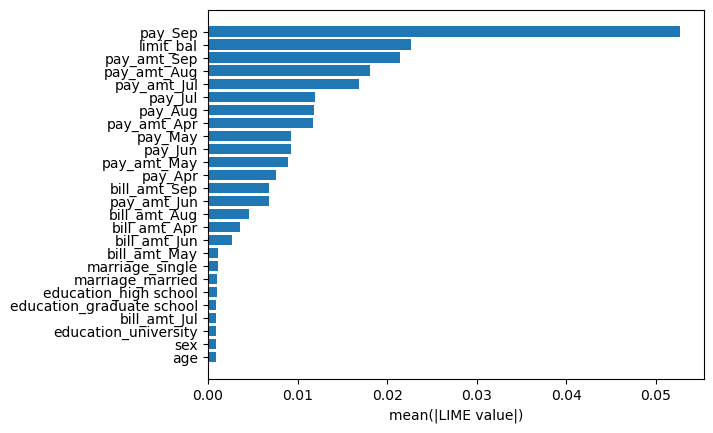

In [270]:
#plot
glime_rf_df=pd.DataFrame(data={'Feature': X_test.columns,'Mean_LIME':glime_rf})
glime_rf_df=glime_rf_df.reindex(glime_rf_df.Mean_LIME.sort_values(ascending=False).index)
fig, ax = plt.subplots()
ax.barh(glime_rf_df['Feature'],glime_rf_df['Mean_LIME'])
#ax.set_yticks(np.arange(26), labels=X_test.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|LIME value|)')

### XGBoosting

In [7]:
xgb_train=X_train.copy()
xgb_train.iloc[:,21:26]=xgb_train.iloc[:,21:26].astype('int64')
xgb_train.iloc[:,3:9]=xgb_train.iloc[:,3:9].astype('int64')
xgb_train.iloc[:,1]=xgb_train.iloc[:,1].astype('int64')

xgb_test = X_test.copy()
xgb_test.iloc[:,21:26]=xgb_test.iloc[:,21:26].astype('int64')
xgb_test.iloc[:,3:9]=xgb_test.iloc[:,3:9].astype('int64')
xgb_test.iloc[:,1]=xgb_test.iloc[:,1].astype('int64')

In [8]:
explainer =shap.Explainer(optimal_xgb, xgb_train)
shap_values_xgb = explainer(xgb_test,check_additivity=False)
#shap.plots.bar(shap_values_xgb)

100%|===================| 9892/9900 [03:35<00:00]        

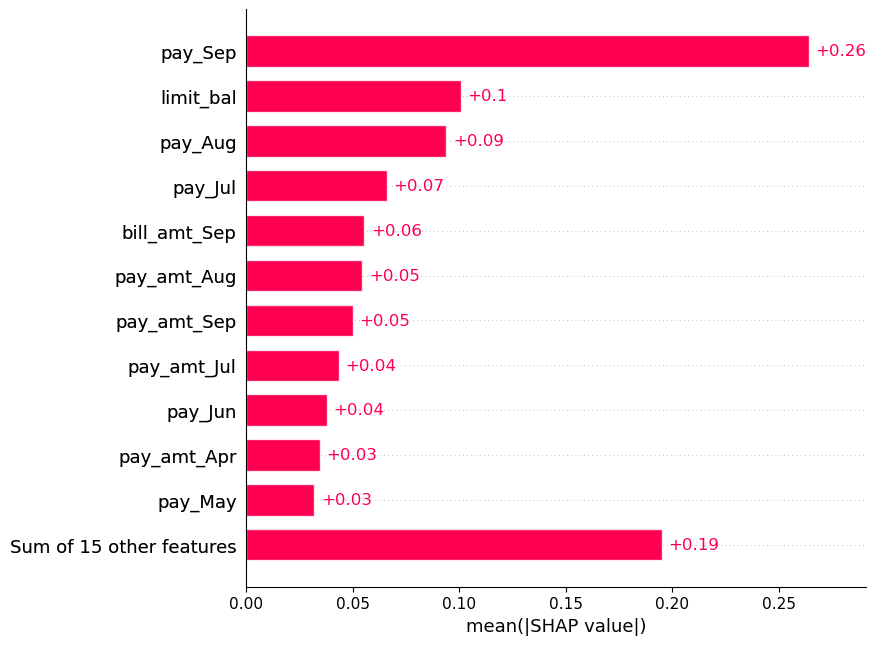

In [43]:
shap.plots.bar(shap_values_xgb,max_display=12)#absolute average

In [8]:
d = {'Feature': xgb_test.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([xgb_test.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(xgb_train.values, feature_names=xgb_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(xgb_test.shape[0]):
    exp_i = explainer_lime.explain_instance(xgb_test.iloc[0], optimal_xgb.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()
glime_xgb = np.abs(value_i).mean(axis=0)

Intercept 0.33967074037983414
Prediction_local [0.63581692]
Right: 0.74462646
Intercept 0.33860531061831883
Prediction_local [0.63634749]
Right: 0.74462646
Intercept 0.3418031371785442
Prediction_local [0.65005428]
Right: 0.74462646
Intercept 0.342880025195261
Prediction_local [0.64899807]
Right: 0.74462646
Intercept 0.3414391981786486
Prediction_local [0.64214214]
Right: 0.74462646
Intercept 0.340232199156974
Prediction_local [0.64731202]
Right: 0.74462646
Intercept 0.33931349203027505
Prediction_local [0.64182977]
Right: 0.74462646
Intercept 0.3389561487839031
Prediction_local [0.64076544]
Right: 0.74462646
Intercept 0.3393950815997437
Prediction_local [0.63409952]
Right: 0.74462646
Intercept 0.33888516418257997
Prediction_local [0.64296601]
Right: 0.74462646
Intercept 0.33752110771014165
Prediction_local [0.63944865]
Right: 0.74462646
Intercept 0.33865720272593425
Prediction_local [0.63068611]
Right: 0.74462646
Intercept 0.3398149038724165
Prediction_local [0.6471951]
Right: 0.74462

Intercept 0.34092085509308817
Prediction_local [0.64533417]
Right: 0.74462646
Intercept 0.3408398521806982
Prediction_local [0.64051098]
Right: 0.74462646
Intercept 0.3416612000153574
Prediction_local [0.65146301]
Right: 0.74462646
Intercept 0.3407651429579735
Prediction_local [0.64792014]
Right: 0.74462646
Intercept 0.3394877404048766
Prediction_local [0.63676343]
Right: 0.74462646
Intercept 0.3392728658345497
Prediction_local [0.63653385]
Right: 0.74462646
Intercept 0.3378851483357046
Prediction_local [0.63473603]
Right: 0.74462646
Intercept 0.34042328736224775
Prediction_local [0.64455658]
Right: 0.74462646
Intercept 0.33915854822474517
Prediction_local [0.63976077]
Right: 0.74462646
Intercept 0.340942894165287
Prediction_local [0.63535598]
Right: 0.74462646
Intercept 0.3372375925155706
Prediction_local [0.63765869]
Right: 0.74462646
Intercept 0.3410620217438842
Prediction_local [0.64112183]
Right: 0.74462646
Intercept 0.34063316078331923
Prediction_local [0.64895551]
Right: 0.74462

Intercept 0.33905328816832137
Prediction_local [0.63266139]
Right: 0.74462646
Intercept 0.3399312402319535
Prediction_local [0.65174796]
Right: 0.74462646
Intercept 0.3390594189004908
Prediction_local [0.64795915]
Right: 0.74462646
Intercept 0.34029459668499923
Prediction_local [0.63821463]
Right: 0.74462646
Intercept 0.3401835405334842
Prediction_local [0.6353711]
Right: 0.74462646
Intercept 0.34043936769014277
Prediction_local [0.63118168]
Right: 0.74462646
Intercept 0.34166516969439986
Prediction_local [0.6525399]
Right: 0.74462646
Intercept 0.3384447750566949
Prediction_local [0.64742051]
Right: 0.74462646
Intercept 0.33897572701935275
Prediction_local [0.64084335]
Right: 0.74462646
Intercept 0.3402449062693276
Prediction_local [0.63739678]
Right: 0.74462646
Intercept 0.33973449944350953
Prediction_local [0.65003342]
Right: 0.74462646
Intercept 0.34144763456509886
Prediction_local [0.64467234]
Right: 0.74462646
Intercept 0.34099227288759126
Prediction_local [0.64035776]
Right: 0.74

Intercept 0.3381908360880138
Prediction_local [0.63350813]
Right: 0.74462646
Intercept 0.33882509197130667
Prediction_local [0.63689917]
Right: 0.74462646
Intercept 0.34041211450880854
Prediction_local [0.64160682]
Right: 0.74462646
Intercept 0.3390877331620325
Prediction_local [0.63656649]
Right: 0.74462646
Intercept 0.3389696131503682
Prediction_local [0.64735809]
Right: 0.74462646
Intercept 0.3387209460774372
Prediction_local [0.65148576]
Right: 0.74462646
Intercept 0.3415983000073449
Prediction_local [0.64307315]
Right: 0.74462646
Intercept 0.33903596282390647
Prediction_local [0.63300309]
Right: 0.74462646
Intercept 0.3375460458352569
Prediction_local [0.64666711]
Right: 0.74462646
Intercept 0.34089843469650827
Prediction_local [0.65686474]
Right: 0.74462646
Intercept 0.33999772945079665
Prediction_local [0.65394556]
Right: 0.74462646
Intercept 0.34055047988419346
Prediction_local [0.64306706]
Right: 0.74462646
Intercept 0.34063451108692905
Prediction_local [0.65183007]
Right: 0.7

Intercept 0.33938235781804743
Prediction_local [0.64229626]
Right: 0.74462646
Intercept 0.33841869116408907
Prediction_local [0.63738248]
Right: 0.74462646
Intercept 0.33943365250703883
Prediction_local [0.64444346]
Right: 0.74462646
Intercept 0.3409451135441942
Prediction_local [0.64119477]
Right: 0.74462646
Intercept 0.33905329386968047
Prediction_local [0.64743288]
Right: 0.74462646
Intercept 0.33800445451500766
Prediction_local [0.63842469]
Right: 0.74462646
Intercept 0.33883102222673006
Prediction_local [0.62806106]
Right: 0.74462646
Intercept 0.33981602313713277
Prediction_local [0.64636453]
Right: 0.74462646
Intercept 0.3388473861759246
Prediction_local [0.6417346]
Right: 0.74462646
Intercept 0.3403879660156267
Prediction_local [0.64117777]
Right: 0.74462646
Intercept 0.3393137725585547
Prediction_local [0.64346741]
Right: 0.74462646
Intercept 0.33978204206201995
Prediction_local [0.64574122]
Right: 0.74462646
Intercept 0.3403286927967531
Prediction_local [0.64899295]
Right: 0.7

Intercept 0.3402038682724465
Prediction_local [0.64241326]
Right: 0.74462646
Intercept 0.33974476645724666
Prediction_local [0.63800777]
Right: 0.74462646
Intercept 0.3398649207383523
Prediction_local [0.64692579]
Right: 0.74462646
Intercept 0.341248902092513
Prediction_local [0.64803821]
Right: 0.74462646
Intercept 0.33854405115726777
Prediction_local [0.63490343]
Right: 0.74462646
Intercept 0.3415004448321024
Prediction_local [0.64216]
Right: 0.74462646
Intercept 0.3411459718988874
Prediction_local [0.64050491]
Right: 0.74462646
Intercept 0.3403608199678383
Prediction_local [0.64737982]
Right: 0.74462646
Intercept 0.34090721820751846
Prediction_local [0.64307451]
Right: 0.74462646
Intercept 0.3398101250464035
Prediction_local [0.64775139]
Right: 0.74462646
Intercept 0.3405836506737669
Prediction_local [0.64491615]
Right: 0.74462646
Intercept 0.33985957572153797
Prediction_local [0.64080889]
Right: 0.74462646
Intercept 0.34093882472083364
Prediction_local [0.64230494]
Right: 0.7446264

Intercept 0.3388965010230451
Prediction_local [0.63658765]
Right: 0.74462646
Intercept 0.3373546341873997
Prediction_local [0.63971804]
Right: 0.74462646
Intercept 0.33818394364001614
Prediction_local [0.62604729]
Right: 0.74462646
Intercept 0.3384115423242321
Prediction_local [0.64964219]
Right: 0.74462646
Intercept 0.33806771296575433
Prediction_local [0.6321181]
Right: 0.74462646
Intercept 0.3379936469946133
Prediction_local [0.64269266]
Right: 0.74462646
Intercept 0.3403658799049936
Prediction_local [0.63911826]
Right: 0.74462646
Intercept 0.33824086219156935
Prediction_local [0.63618105]
Right: 0.74462646
Intercept 0.3408263911737946
Prediction_local [0.65276676]
Right: 0.74462646
Intercept 0.3403949106010772
Prediction_local [0.62868862]
Right: 0.74462646
Intercept 0.3395797697169272
Prediction_local [0.64307014]
Right: 0.74462646
Intercept 0.3390102189728366
Prediction_local [0.64347622]
Right: 0.74462646
Intercept 0.33985238052343353
Prediction_local [0.63374872]
Right: 0.74462

Intercept 0.3408417405657489
Prediction_local [0.64530939]
Right: 0.74462646
Intercept 0.33850056068386547
Prediction_local [0.64785271]
Right: 0.74462646
Intercept 0.33943809952414505
Prediction_local [0.64935038]
Right: 0.74462646
Intercept 0.33824088343947945
Prediction_local [0.64127975]
Right: 0.74462646
Intercept 0.3400989060923219
Prediction_local [0.63257417]
Right: 0.74462646
Intercept 0.3399284838951387
Prediction_local [0.6432016]
Right: 0.74462646
Intercept 0.3392748583278189
Prediction_local [0.63888037]
Right: 0.74462646
Intercept 0.3391798231929239
Prediction_local [0.64232281]
Right: 0.74462646
Intercept 0.3393892671837984
Prediction_local [0.63393074]
Right: 0.74462646
Intercept 0.3384086958246629
Prediction_local [0.64445626]
Right: 0.74462646
Intercept 0.33894218225550793
Prediction_local [0.65097023]
Right: 0.74462646
Intercept 0.33840224116643325
Prediction_local [0.63922031]
Right: 0.74462646
Intercept 0.3393664218320207
Prediction_local [0.63500961]
Right: 0.7446

Intercept 0.3404177568537889
Prediction_local [0.63353953]
Right: 0.74462646
Intercept 0.33822315398137404
Prediction_local [0.64404819]
Right: 0.74462646
Intercept 0.33943212769538494
Prediction_local [0.64066573]
Right: 0.74462646
Intercept 0.3400057125638911
Prediction_local [0.64162776]
Right: 0.74462646
Intercept 0.34034938830933087
Prediction_local [0.63687834]
Right: 0.74462646
Intercept 0.33915324843492356
Prediction_local [0.64042997]
Right: 0.74462646
Intercept 0.3415239076152338
Prediction_local [0.64063556]
Right: 0.74462646
Intercept 0.33878356011380256
Prediction_local [0.63614015]
Right: 0.74462646
Intercept 0.33986008208986734
Prediction_local [0.63426043]
Right: 0.74462646
Intercept 0.33993509952094736
Prediction_local [0.63961127]
Right: 0.74462646
Intercept 0.3401929171048292
Prediction_local [0.65162587]
Right: 0.74462646
Intercept 0.34047063290643914
Prediction_local [0.64509979]
Right: 0.74462646
Intercept 0.33767055195157775
Prediction_local [0.64008181]
Right: 0

Intercept 0.3395743206696651
Prediction_local [0.64017285]
Right: 0.74462646
Intercept 0.3380080699638309
Prediction_local [0.64288449]
Right: 0.74462646
Intercept 0.34124015645305644
Prediction_local [0.64092336]
Right: 0.74462646
Intercept 0.3396901684271414
Prediction_local [0.6411534]
Right: 0.74462646
Intercept 0.341226718790876
Prediction_local [0.62895313]
Right: 0.74462646
Intercept 0.3389465820699738
Prediction_local [0.6356976]
Right: 0.74462646
Intercept 0.34121402681340957
Prediction_local [0.64226372]
Right: 0.74462646
Intercept 0.3414044790474809
Prediction_local [0.65459265]
Right: 0.74462646
Intercept 0.33944574928877363
Prediction_local [0.63726333]
Right: 0.74462646
Intercept 0.33664278597927877
Prediction_local [0.6468889]
Right: 0.74462646
Intercept 0.34040983551860526
Prediction_local [0.63265055]
Right: 0.74462646
Intercept 0.3388814709107148
Prediction_local [0.6401316]
Right: 0.74462646
Intercept 0.3374356047105523
Prediction_local [0.63264781]
Right: 0.74462646

Intercept 0.34191602546396255
Prediction_local [0.64330079]
Right: 0.74462646
Intercept 0.33988364193493326
Prediction_local [0.64150767]
Right: 0.74462646
Intercept 0.3407720210008827
Prediction_local [0.64330645]
Right: 0.74462646
Intercept 0.3384780181227545
Prediction_local [0.63238436]
Right: 0.74462646
Intercept 0.34291040924548766
Prediction_local [0.64782235]
Right: 0.74462646
Intercept 0.3376962392778724
Prediction_local [0.6403018]
Right: 0.74462646
Intercept 0.3415430296044208
Prediction_local [0.64601491]
Right: 0.74462646
Intercept 0.33952684099614017
Prediction_local [0.64653041]
Right: 0.74462646
Intercept 0.34012256673251784
Prediction_local [0.63991626]
Right: 0.74462646
Intercept 0.3390067897972351
Prediction_local [0.65137656]
Right: 0.74462646
Intercept 0.33944325007819426
Prediction_local [0.64239234]
Right: 0.74462646
Intercept 0.3415785493263681
Prediction_local [0.6502697]
Right: 0.74462646
Intercept 0.34127716517747164
Prediction_local [0.64712906]
Right: 0.744

Intercept 0.33940174803140155
Prediction_local [0.6370678]
Right: 0.74462646
Intercept 0.3379058856229717
Prediction_local [0.63410401]
Right: 0.74462646
Intercept 0.3401427113161175
Prediction_local [0.64601675]
Right: 0.74462646
Intercept 0.33900229907839324
Prediction_local [0.63646632]
Right: 0.74462646
Intercept 0.3426971072785927
Prediction_local [0.65903134]
Right: 0.74462646
Intercept 0.33918560335995973
Prediction_local [0.63776275]
Right: 0.74462646
Intercept 0.34020092849216105
Prediction_local [0.64156244]
Right: 0.74462646
Intercept 0.34123962575835604
Prediction_local [0.64538118]
Right: 0.74462646
Intercept 0.33864202433901486
Prediction_local [0.6316759]
Right: 0.74462646
Intercept 0.34111874966643113
Prediction_local [0.63612787]
Right: 0.74462646
Intercept 0.33801126288389355
Prediction_local [0.63181884]
Right: 0.74462646
Intercept 0.33930140854848956
Prediction_local [0.64528554]
Right: 0.74462646
Intercept 0.34079462421606566
Prediction_local [0.63418988]
Right: 0.

Intercept 0.33972020421114474
Prediction_local [0.6380132]
Right: 0.74462646
Intercept 0.34157245123263286
Prediction_local [0.64341546]
Right: 0.74462646
Intercept 0.339979845974931
Prediction_local [0.65707018]
Right: 0.74462646
Intercept 0.34073590062129383
Prediction_local [0.6569817]
Right: 0.74462646
Intercept 0.340232100762872
Prediction_local [0.63828671]
Right: 0.74462646
Intercept 0.3399859686115289
Prediction_local [0.6558439]
Right: 0.74462646
Intercept 0.3392505024555583
Prediction_local [0.64522304]
Right: 0.74462646
Intercept 0.3425572211836278
Prediction_local [0.63440777]
Right: 0.74462646
Intercept 0.3401919513840612
Prediction_local [0.658889]
Right: 0.74462646
Intercept 0.33802717361704415
Prediction_local [0.62449221]
Right: 0.74462646
Intercept 0.3410494956053208
Prediction_local [0.64549277]
Right: 0.74462646
Intercept 0.340706186237785
Prediction_local [0.63266624]
Right: 0.74462646
Intercept 0.34031600346342583
Prediction_local [0.6503494]
Right: 0.74462646
Int

Intercept 0.33906750774141925
Prediction_local [0.64780709]
Right: 0.74462646
Intercept 0.34118225803332375
Prediction_local [0.64628966]
Right: 0.74462646
Intercept 0.33937965163031797
Prediction_local [0.64098071]
Right: 0.74462646
Intercept 0.3392675906897318
Prediction_local [0.64760096]
Right: 0.74462646
Intercept 0.33888661039266416
Prediction_local [0.62583587]
Right: 0.74462646
Intercept 0.33935968039079045
Prediction_local [0.63150875]
Right: 0.74462646
Intercept 0.3400364507528287
Prediction_local [0.64064653]
Right: 0.74462646
Intercept 0.3393422575282909
Prediction_local [0.62496608]
Right: 0.74462646
Intercept 0.3386331761465466
Prediction_local [0.64128082]
Right: 0.74462646
Intercept 0.3404530483246867
Prediction_local [0.65742595]
Right: 0.74462646
Intercept 0.3392158107647312
Prediction_local [0.65139023]
Right: 0.74462646
Intercept 0.33993693016439697
Prediction_local [0.63622416]
Right: 0.74462646
Intercept 0.3396452456801314
Prediction_local [0.64705129]
Right: 0.74

Intercept 0.34044935266464094
Prediction_local [0.63777044]
Right: 0.74462646
Intercept 0.3394163234654652
Prediction_local [0.63614017]
Right: 0.74462646
Intercept 0.3415607189543259
Prediction_local [0.65028663]
Right: 0.74462646
Intercept 0.3413695444745195
Prediction_local [0.64849014]
Right: 0.74462646
Intercept 0.3387410548591627
Prediction_local [0.64244817]
Right: 0.74462646
Intercept 0.33981796430947314
Prediction_local [0.63206477]
Right: 0.74462646
Intercept 0.3398738510497109
Prediction_local [0.66342772]
Right: 0.74462646
Intercept 0.3405540423883402
Prediction_local [0.64843778]
Right: 0.74462646
Intercept 0.3405143190904436
Prediction_local [0.65075419]
Right: 0.74462646
Intercept 0.3417985578789648
Prediction_local [0.65534508]
Right: 0.74462646
Intercept 0.34073837683741726
Prediction_local [0.63890431]
Right: 0.74462646
Intercept 0.3422277612067836
Prediction_local [0.64659048]
Right: 0.74462646
Intercept 0.34108278671313214
Prediction_local [0.65910945]
Right: 0.7446

Intercept 0.34180476159452117
Prediction_local [0.64704139]
Right: 0.74462646
Intercept 0.3404060597725135
Prediction_local [0.64232237]
Right: 0.74462646
Intercept 0.33782303077507214
Prediction_local [0.64691972]
Right: 0.74462646
Intercept 0.34147824638325214
Prediction_local [0.65538444]
Right: 0.74462646
Intercept 0.3415270566888261
Prediction_local [0.63879257]
Right: 0.74462646
Intercept 0.3405454347139734
Prediction_local [0.65174726]
Right: 0.74462646
Intercept 0.338723149463345
Prediction_local [0.63889298]
Right: 0.74462646
Intercept 0.339257876390137
Prediction_local [0.64514455]
Right: 0.74462646
Intercept 0.33763761243025653
Prediction_local [0.6405881]
Right: 0.74462646
Intercept 0.33983649435315993
Prediction_local [0.65221645]
Right: 0.74462646
Intercept 0.33998707993807054
Prediction_local [0.64066001]
Right: 0.74462646
Intercept 0.3387978665606895
Prediction_local [0.63960591]
Right: 0.74462646
Intercept 0.3396250633031367
Prediction_local [0.6400696]
Right: 0.744626

Intercept 0.3381795715653333
Prediction_local [0.66250981]
Right: 0.74462646
Intercept 0.33956210519757457
Prediction_local [0.63325875]
Right: 0.74462646
Intercept 0.3406186754739355
Prediction_local [0.63373991]
Right: 0.74462646
Intercept 0.3390051279363966
Prediction_local [0.63105811]
Right: 0.74462646
Intercept 0.34124552894205956
Prediction_local [0.64509173]
Right: 0.74462646
Intercept 0.3401555814365367
Prediction_local [0.63002966]
Right: 0.74462646
Intercept 0.3409932803812996
Prediction_local [0.64951918]
Right: 0.74462646
Intercept 0.33829660790253235
Prediction_local [0.63289935]
Right: 0.74462646
Intercept 0.34025630723456635
Prediction_local [0.63305156]
Right: 0.74462646
Intercept 0.3415616021614032
Prediction_local [0.646033]
Right: 0.74462646
Intercept 0.3401531892008771
Prediction_local [0.64187851]
Right: 0.74462646
Intercept 0.33914201335012284
Prediction_local [0.64529151]
Right: 0.74462646
Intercept 0.33839255496018417
Prediction_local [0.64441957]
Right: 0.7446

Intercept 0.3405274569050303
Prediction_local [0.64752216]
Right: 0.74462646
Intercept 0.3405739945009456
Prediction_local [0.62539048]
Right: 0.74462646
Intercept 0.33915421738316215
Prediction_local [0.64333383]
Right: 0.74462646
Intercept 0.3400973288531343
Prediction_local [0.64121905]
Right: 0.74462646
Intercept 0.3410901430177246
Prediction_local [0.6418215]
Right: 0.74462646
Intercept 0.3402653805681078
Prediction_local [0.63869937]
Right: 0.74462646
Intercept 0.3410841511042841
Prediction_local [0.6490675]
Right: 0.74462646
Intercept 0.3388823450301005
Prediction_local [0.63350796]
Right: 0.74462646
Intercept 0.3397147669776032
Prediction_local [0.65173421]
Right: 0.74462646
Intercept 0.3402261447132408
Prediction_local [0.62651048]
Right: 0.74462646
Intercept 0.3408252132092033
Prediction_local [0.64727021]
Right: 0.74462646
Intercept 0.33980017874260027
Prediction_local [0.6454864]
Right: 0.74462646
Intercept 0.3387821145516046
Prediction_local [0.64091394]
Right: 0.74462646


Intercept 0.34108709546384863
Prediction_local [0.63012906]
Right: 0.74462646
Intercept 0.3387989123377322
Prediction_local [0.64901036]
Right: 0.74462646
Intercept 0.3414550101744459
Prediction_local [0.65404608]
Right: 0.74462646
Intercept 0.33902598437156556
Prediction_local [0.64820084]
Right: 0.74462646
Intercept 0.33760368868176294
Prediction_local [0.62647007]
Right: 0.74462646
Intercept 0.34102144239963933
Prediction_local [0.6439563]
Right: 0.74462646
Intercept 0.34047991009920714
Prediction_local [0.64281922]
Right: 0.74462646
Intercept 0.33983626913087284
Prediction_local [0.64674505]
Right: 0.74462646
Intercept 0.34099428806778165
Prediction_local [0.63710246]
Right: 0.74462646
Intercept 0.33935317550683014
Prediction_local [0.65345202]
Right: 0.74462646
Intercept 0.3387953549769662
Prediction_local [0.65030562]
Right: 0.74462646
Intercept 0.34100679494279257
Prediction_local [0.6567908]
Right: 0.74462646
Intercept 0.34045651561688656
Prediction_local [0.62787023]
Right: 0.

Intercept 0.3414039438591419
Prediction_local [0.63895343]
Right: 0.74462646
Intercept 0.3401743365901975
Prediction_local [0.62951103]
Right: 0.74462646
Intercept 0.3391402583657033
Prediction_local [0.63630273]
Right: 0.74462646
Intercept 0.33831767624390047
Prediction_local [0.65204368]
Right: 0.74462646
Intercept 0.33893931511624603
Prediction_local [0.63304699]
Right: 0.74462646
Intercept 0.34026150900751545
Prediction_local [0.65022841]
Right: 0.74462646
Intercept 0.34055797032007973
Prediction_local [0.64410813]
Right: 0.74462646
Intercept 0.3403508623091307
Prediction_local [0.64100352]
Right: 0.74462646
Intercept 0.3394159785705689
Prediction_local [0.65137837]
Right: 0.74462646
Intercept 0.33960494683447423
Prediction_local [0.64014404]
Right: 0.74462646
Intercept 0.3402048836219545
Prediction_local [0.63183029]
Right: 0.74462646
Intercept 0.3398734075216152
Prediction_local [0.62934704]
Right: 0.74462646
Intercept 0.34138535779330986
Prediction_local [0.63229613]
Right: 0.74

Intercept 0.33884416333450595
Prediction_local [0.62807954]
Right: 0.74462646
Intercept 0.34019883612443136
Prediction_local [0.65487573]
Right: 0.74462646
Intercept 0.3380862866811465
Prediction_local [0.64265749]
Right: 0.74462646
Intercept 0.3410696459427999
Prediction_local [0.64787472]
Right: 0.74462646
Intercept 0.33848884223979503
Prediction_local [0.62972837]
Right: 0.74462646
Intercept 0.3410829594700263
Prediction_local [0.64655458]
Right: 0.74462646
Intercept 0.34221622561304843
Prediction_local [0.65961728]
Right: 0.74462646
Intercept 0.33773775865978095
Prediction_local [0.63909691]
Right: 0.74462646
Intercept 0.33900043082972275
Prediction_local [0.64312128]
Right: 0.74462646
Intercept 0.33930754239869
Prediction_local [0.65415315]
Right: 0.74462646
Intercept 0.3414120751313252
Prediction_local [0.64155257]
Right: 0.74462646
Intercept 0.3384382926615121
Prediction_local [0.63104705]
Right: 0.74462646
Intercept 0.3391400265199407
Prediction_local [0.6266439]
Right: 0.74462

Intercept 0.33999954952115585
Prediction_local [0.64884567]
Right: 0.74462646
Intercept 0.3388442497449391
Prediction_local [0.64255613]
Right: 0.74462646
Intercept 0.33817149504696936
Prediction_local [0.63664495]
Right: 0.74462646
Intercept 0.339420211613795
Prediction_local [0.64047591]
Right: 0.74462646
Intercept 0.3376870091789166
Prediction_local [0.65289572]
Right: 0.74462646
Intercept 0.3395351543206677
Prediction_local [0.64217372]
Right: 0.74462646
Intercept 0.33890517354747285
Prediction_local [0.65161403]
Right: 0.74462646
Intercept 0.34116302382310965
Prediction_local [0.65495381]
Right: 0.74462646
Intercept 0.34106549111828216
Prediction_local [0.64898944]
Right: 0.74462646
Intercept 0.3399111603676831
Prediction_local [0.63983719]
Right: 0.74462646
Intercept 0.34255709060980766
Prediction_local [0.65413942]
Right: 0.74462646
Intercept 0.33904966448257995
Prediction_local [0.63048462]
Right: 0.74462646
Intercept 0.3392645870926939
Prediction_local [0.64852755]
Right: 0.74

Intercept 0.33892218859465206
Prediction_local [0.64364845]
Right: 0.74462646
Intercept 0.34120772816623174
Prediction_local [0.6424163]
Right: 0.74462646
Intercept 0.33974476431315775
Prediction_local [0.64215506]
Right: 0.74462646
Intercept 0.34074245103709483
Prediction_local [0.64818519]
Right: 0.74462646
Intercept 0.34064538924393206
Prediction_local [0.62988249]
Right: 0.74462646
Intercept 0.3404375134859783
Prediction_local [0.64029855]
Right: 0.74462646
Intercept 0.3404072817279777
Prediction_local [0.65084068]
Right: 0.74462646
Intercept 0.33928582562371257
Prediction_local [0.64490689]
Right: 0.74462646
Intercept 0.34103043941405825
Prediction_local [0.63378903]
Right: 0.74462646
Intercept 0.3389611371607103
Prediction_local [0.6430382]
Right: 0.74462646
Intercept 0.33840354604660505
Prediction_local [0.65153352]
Right: 0.74462646
Intercept 0.33842383115620434
Prediction_local [0.63338713]
Right: 0.74462646
Intercept 0.3395568362171086
Prediction_local [0.65142265]
Right: 0.7

Intercept 0.3404330570297741
Prediction_local [0.62573034]
Right: 0.74462646
Intercept 0.33986959882455364
Prediction_local [0.6259345]
Right: 0.74462646
Intercept 0.3379648138467101
Prediction_local [0.63494176]
Right: 0.74462646
Intercept 0.33873153310762916
Prediction_local [0.62630434]
Right: 0.74462646
Intercept 0.338697604030798
Prediction_local [0.63403125]
Right: 0.74462646
Intercept 0.33886239966728327
Prediction_local [0.6309408]
Right: 0.74462646
Intercept 0.3413976214515704
Prediction_local [0.64705161]
Right: 0.74462646
Intercept 0.3399294811973305
Prediction_local [0.6330304]
Right: 0.74462646
Intercept 0.33750161065704665
Prediction_local [0.62018899]
Right: 0.74462646
Intercept 0.33848629052748785
Prediction_local [0.63634125]
Right: 0.74462646
Intercept 0.3394688624021355
Prediction_local [0.63888964]
Right: 0.74462646
Intercept 0.33982715939461317
Prediction_local [0.63407701]
Right: 0.74462646
Intercept 0.33969462991516103
Prediction_local [0.64542019]
Right: 0.74462

Intercept 0.33951789616361727
Prediction_local [0.65222085]
Right: 0.74462646
Intercept 0.3403232976200317
Prediction_local [0.64724906]
Right: 0.74462646
Intercept 0.3384112621528771
Prediction_local [0.64382379]
Right: 0.74462646
Intercept 0.34001048851540033
Prediction_local [0.64558531]
Right: 0.74462646
Intercept 0.34258361331770426
Prediction_local [0.64242374]
Right: 0.74462646
Intercept 0.3380007467891513
Prediction_local [0.64116755]
Right: 0.74462646
Intercept 0.3409366896089885
Prediction_local [0.63886749]
Right: 0.74462646
Intercept 0.34015250187545726
Prediction_local [0.64565694]
Right: 0.74462646
Intercept 0.3408743271826869
Prediction_local [0.64874452]
Right: 0.74462646
Intercept 0.34003677263072785
Prediction_local [0.63761548]
Right: 0.74462646
Intercept 0.3402381285391448
Prediction_local [0.64670757]
Right: 0.74462646
Intercept 0.34063540462207537
Prediction_local [0.63376425]
Right: 0.74462646
Intercept 0.33980044100553336
Prediction_local [0.64660092]
Right: 0.7

Intercept 0.3397800355979551
Prediction_local [0.63671842]
Right: 0.74462646
Intercept 0.33885013267841735
Prediction_local [0.63814468]
Right: 0.74462646
Intercept 0.339378230078636
Prediction_local [0.65133427]
Right: 0.74462646
Intercept 0.33825838630001376
Prediction_local [0.6270007]
Right: 0.74462646
Intercept 0.3396961545328209
Prediction_local [0.6420142]
Right: 0.74462646
Intercept 0.33780628189524814
Prediction_local [0.6388975]
Right: 0.74462646
Intercept 0.3385354752539262
Prediction_local [0.65789137]
Right: 0.74462646
Intercept 0.3387329557981092
Prediction_local [0.64259719]
Right: 0.74462646
Intercept 0.33947975834439026
Prediction_local [0.63702705]
Right: 0.74462646
Intercept 0.3408161227545599
Prediction_local [0.63847837]
Right: 0.74462646
Intercept 0.33938372568860803
Prediction_local [0.63900887]
Right: 0.74462646
Intercept 0.3414540211767233
Prediction_local [0.6529328]
Right: 0.74462646
Intercept 0.33900128581025
Prediction_local [0.64321086]
Right: 0.74462646
I

Intercept 0.3387135869715127
Prediction_local [0.64363917]
Right: 0.74462646
Intercept 0.3392532282488182
Prediction_local [0.6407746]
Right: 0.74462646
Intercept 0.3410051002667923
Prediction_local [0.64514034]
Right: 0.74462646
Intercept 0.33890415918887523
Prediction_local [0.62341011]
Right: 0.74462646
Intercept 0.340212157447674
Prediction_local [0.64912024]
Right: 0.74462646
Intercept 0.3398608596361258
Prediction_local [0.6519137]
Right: 0.74462646
Intercept 0.33870912142637555
Prediction_local [0.633159]
Right: 0.74462646
Intercept 0.3407778571410974
Prediction_local [0.65220546]
Right: 0.74462646
Intercept 0.33883949915767086
Prediction_local [0.63607613]
Right: 0.74462646
Intercept 0.3391557603025466
Prediction_local [0.64267671]
Right: 0.74462646
Intercept 0.3397036233267527
Prediction_local [0.64305273]
Right: 0.74462646
Intercept 0.3382452444953983
Prediction_local [0.64739149]
Right: 0.74462646
Intercept 0.34100702224523066
Prediction_local [0.64269531]
Right: 0.74462646


Intercept 0.34067341413327007
Prediction_local [0.64358038]
Right: 0.74462646
Intercept 0.3414839491170821
Prediction_local [0.64877875]
Right: 0.74462646
Intercept 0.3398024400892824
Prediction_local [0.64097728]
Right: 0.74462646
Intercept 0.34005396762237244
Prediction_local [0.64644093]
Right: 0.74462646
Intercept 0.34090757554739365
Prediction_local [0.65492678]
Right: 0.74462646
Intercept 0.3399555234310999
Prediction_local [0.64060978]
Right: 0.74462646
Intercept 0.34070647515564356
Prediction_local [0.64400778]
Right: 0.74462646
Intercept 0.3395199595592861
Prediction_local [0.64557553]
Right: 0.74462646
Intercept 0.33829596942275775
Prediction_local [0.65515327]
Right: 0.74462646
Intercept 0.3416126017190469
Prediction_local [0.65150068]
Right: 0.74462646
Intercept 0.3413136078031695
Prediction_local [0.62651511]
Right: 0.74462646
Intercept 0.340560716064619
Prediction_local [0.65291874]
Right: 0.74462646
Intercept 0.33916220561520505
Prediction_local [0.64549183]
Right: 0.744

Intercept 0.34031719462939963
Prediction_local [0.63148663]
Right: 0.74462646
Intercept 0.3398941784711139
Prediction_local [0.6381934]
Right: 0.74462646
Intercept 0.33893512774007223
Prediction_local [0.63268607]
Right: 0.74462646
Intercept 0.3400376151149997
Prediction_local [0.64506621]
Right: 0.74462646
Intercept 0.33948396174525874
Prediction_local [0.6433616]
Right: 0.74462646
Intercept 0.33963924799280387
Prediction_local [0.63286777]
Right: 0.74462646
Intercept 0.3405279314061962
Prediction_local [0.63513585]
Right: 0.74462646
Intercept 0.34145467889178965
Prediction_local [0.658002]
Right: 0.74462646
Intercept 0.3398075543711078
Prediction_local [0.63012219]
Right: 0.74462646
Intercept 0.34250564952378865
Prediction_local [0.63823806]
Right: 0.74462646
Intercept 0.3415334652756875
Prediction_local [0.64663953]
Right: 0.74462646
Intercept 0.3407045070046647
Prediction_local [0.65049775]
Right: 0.74462646
Intercept 0.33940492943446243
Prediction_local [0.63799322]
Right: 0.74462

Intercept 0.3400368416154856
Prediction_local [0.63455773]
Right: 0.74462646
Intercept 0.34095071830671897
Prediction_local [0.64090504]
Right: 0.74462646
Intercept 0.3407063863319757
Prediction_local [0.63153327]
Right: 0.74462646
Intercept 0.3390304206191239
Prediction_local [0.64153336]
Right: 0.74462646
Intercept 0.34070694672180785
Prediction_local [0.63699504]
Right: 0.74462646
Intercept 0.33963149459267405
Prediction_local [0.6395103]
Right: 0.74462646
Intercept 0.34001163555847697
Prediction_local [0.62816928]
Right: 0.74462646
Intercept 0.33932962772728975
Prediction_local [0.64536434]
Right: 0.74462646
Intercept 0.33998182645821023
Prediction_local [0.64151282]
Right: 0.74462646
Intercept 0.3407115355586697
Prediction_local [0.64753816]
Right: 0.74462646
Intercept 0.3390259734174727
Prediction_local [0.64147873]
Right: 0.74462646
Intercept 0.33787451598316337
Prediction_local [0.63556752]
Right: 0.74462646
Intercept 0.3397336987162517
Prediction_local [0.63946016]
Right: 0.74

Intercept 0.3385266450843582
Prediction_local [0.63934169]
Right: 0.74462646
Intercept 0.33926346911439226
Prediction_local [0.64090828]
Right: 0.74462646
Intercept 0.33988346139463477
Prediction_local [0.63601653]
Right: 0.74462646
Intercept 0.3407348472574488
Prediction_local [0.64171774]
Right: 0.74462646
Intercept 0.339828601259969
Prediction_local [0.63315234]
Right: 0.74462646
Intercept 0.3428475846815959
Prediction_local [0.6504629]
Right: 0.74462646
Intercept 0.3407618847782865
Prediction_local [0.65018888]
Right: 0.74462646
Intercept 0.34158784107919665
Prediction_local [0.6471163]
Right: 0.74462646
Intercept 0.3388354144524423
Prediction_local [0.64135746]
Right: 0.74462646
Intercept 0.3413403021859057
Prediction_local [0.64146603]
Right: 0.74462646
Intercept 0.3402248452322898
Prediction_local [0.64033863]
Right: 0.74462646
Intercept 0.33975226244856654
Prediction_local [0.63201994]
Right: 0.74462646
Intercept 0.3379884484032959
Prediction_local [0.6339069]
Right: 0.74462646

Intercept 0.3399075217124763
Prediction_local [0.63824957]
Right: 0.74462646
Intercept 0.3388000046903933
Prediction_local [0.65341526]
Right: 0.74462646
Intercept 0.34149507894542136
Prediction_local [0.63987397]
Right: 0.74462646
Intercept 0.3411509389769544
Prediction_local [0.64250049]
Right: 0.74462646
Intercept 0.3388709736430981
Prediction_local [0.63678662]
Right: 0.74462646
Intercept 0.3395858780518443
Prediction_local [0.64089604]
Right: 0.74462646
Intercept 0.33775808380683825
Prediction_local [0.64280206]
Right: 0.74462646
Intercept 0.33966144269941784
Prediction_local [0.63447749]
Right: 0.74462646
Intercept 0.33976254780048537
Prediction_local [0.65234387]
Right: 0.74462646
Intercept 0.3398195967391472
Prediction_local [0.65730507]
Right: 0.74462646
Intercept 0.3395526075386142
Prediction_local [0.64926796]
Right: 0.74462646
Intercept 0.33813448164664756
Prediction_local [0.63371694]
Right: 0.74462646
Intercept 0.33792253596945054
Prediction_local [0.63476737]
Right: 0.74

Intercept 0.3408380110951756
Prediction_local [0.63444905]
Right: 0.74462646
Intercept 0.3404549269670833
Prediction_local [0.63020801]
Right: 0.74462646
Intercept 0.340531204233336
Prediction_local [0.63386272]
Right: 0.74462646
Intercept 0.34066662348645993
Prediction_local [0.64972567]
Right: 0.74462646
Intercept 0.3415272037474684
Prediction_local [0.64592309]
Right: 0.74462646
Intercept 0.33966313589385944
Prediction_local [0.63330589]
Right: 0.74462646
Intercept 0.338976143738242
Prediction_local [0.64056506]
Right: 0.74462646
Intercept 0.3390293419878992
Prediction_local [0.63663565]
Right: 0.74462646
Intercept 0.34027710916541776
Prediction_local [0.64987274]
Right: 0.74462646
Intercept 0.3387859173666928
Prediction_local [0.63547581]
Right: 0.74462646
Intercept 0.3387578455370486
Prediction_local [0.64553943]
Right: 0.74462646
Intercept 0.33968466509338197
Prediction_local [0.64106157]
Right: 0.74462646
Intercept 0.3387296035148152
Prediction_local [0.63593749]
Right: 0.744626

Intercept 0.3406735349826672
Prediction_local [0.64909722]
Right: 0.74462646
Intercept 0.3411880732343738
Prediction_local [0.63673223]
Right: 0.74462646
Intercept 0.3403034358382886
Prediction_local [0.63731978]
Right: 0.74462646
Intercept 0.34063075813556737
Prediction_local [0.66058062]
Right: 0.74462646
Intercept 0.3406611030936252
Prediction_local [0.65681102]
Right: 0.74462646
Intercept 0.3386702935840252
Prediction_local [0.64549649]
Right: 0.74462646
Intercept 0.340669808142508
Prediction_local [0.65866343]
Right: 0.74462646
Intercept 0.34144038915710484
Prediction_local [0.64813428]
Right: 0.74462646
Intercept 0.3405631434026526
Prediction_local [0.64177406]
Right: 0.74462646
Intercept 0.34097369061593036
Prediction_local [0.64555206]
Right: 0.74462646
Intercept 0.3422315907372983
Prediction_local [0.63389683]
Right: 0.74462646
Intercept 0.3401601014695617
Prediction_local [0.63108756]
Right: 0.74462646
Intercept 0.34024403348165033
Prediction_local [0.63690496]
Right: 0.74462

Intercept 0.34008883681915025
Prediction_local [0.64004212]
Right: 0.74462646
Intercept 0.33998112844960293
Prediction_local [0.64207847]
Right: 0.74462646
Intercept 0.34003688756679934
Prediction_local [0.63273237]
Right: 0.74462646
Intercept 0.34093484290123344
Prediction_local [0.64333787]
Right: 0.74462646
Intercept 0.33900392855571837
Prediction_local [0.64752008]
Right: 0.74462646
Intercept 0.33972304411557874
Prediction_local [0.63986912]
Right: 0.74462646
Intercept 0.3410357602013671
Prediction_local [0.64619063]
Right: 0.74462646
Intercept 0.34012455609044473
Prediction_local [0.64148757]
Right: 0.74462646
Intercept 0.3370672254859269
Prediction_local [0.62640592]
Right: 0.74462646
Intercept 0.34052591913271124
Prediction_local [0.65376159]
Right: 0.74462646
Intercept 0.33883330159009983
Prediction_local [0.64220557]
Right: 0.74462646
Intercept 0.34088507305857146
Prediction_local [0.640073]
Right: 0.74462646
Intercept 0.3386630143410516
Prediction_local [0.62761173]
Right: 0.

Intercept 0.34056191348849785
Prediction_local [0.6560707]
Right: 0.74462646
Intercept 0.34084619417573847
Prediction_local [0.65332334]
Right: 0.74462646
Intercept 0.33829677493616994
Prediction_local [0.63551643]
Right: 0.74462646
Intercept 0.34032664810479873
Prediction_local [0.63764479]
Right: 0.74462646
Intercept 0.3399250376731431
Prediction_local [0.65272978]
Right: 0.74462646
Intercept 0.3388985594690335
Prediction_local [0.641069]
Right: 0.74462646
Intercept 0.3397885172487424
Prediction_local [0.63874032]
Right: 0.74462646
Intercept 0.33938173317124504
Prediction_local [0.63259774]
Right: 0.74462646
Intercept 0.33707484933325016
Prediction_local [0.63114417]
Right: 0.74462646
Intercept 0.3421927371094987
Prediction_local [0.64800744]
Right: 0.74462646
Intercept 0.34099762664083255
Prediction_local [0.64091255]
Right: 0.74462646
Intercept 0.3384189194708303
Prediction_local [0.64389815]
Right: 0.74462646
Intercept 0.33849104821576154
Prediction_local [0.62519876]
Right: 0.744

Intercept 0.3408755701300554
Prediction_local [0.6480224]
Right: 0.74462646
Intercept 0.3398324824210785
Prediction_local [0.64852654]
Right: 0.74462646
Intercept 0.34128188024901673
Prediction_local [0.64309546]
Right: 0.74462646
Intercept 0.33728890308828474
Prediction_local [0.65191403]
Right: 0.74462646
Intercept 0.3370880183434411
Prediction_local [0.62151097]
Right: 0.74462646
Intercept 0.33846861088604857
Prediction_local [0.64181132]
Right: 0.74462646
Intercept 0.3405491004505228
Prediction_local [0.63956717]
Right: 0.74462646
Intercept 0.34004309223760965
Prediction_local [0.63713378]
Right: 0.74462646
Intercept 0.3391385521887673
Prediction_local [0.6310388]
Right: 0.74462646
Intercept 0.33928802154098125
Prediction_local [0.63755225]
Right: 0.74462646
Intercept 0.34023108886025993
Prediction_local [0.64606355]
Right: 0.74462646
Intercept 0.3394991583902312
Prediction_local [0.64241811]
Right: 0.74462646
Intercept 0.34013051248549236
Prediction_local [0.63353498]
Right: 0.744

Intercept 0.3396143154658113
Prediction_local [0.65548627]
Right: 0.74462646
Intercept 0.33997348207449757
Prediction_local [0.64442038]
Right: 0.74462646
Intercept 0.33857646243882455
Prediction_local [0.63126023]
Right: 0.74462646
Intercept 0.33950697793495765
Prediction_local [0.638113]
Right: 0.74462646
Intercept 0.3411356189868001
Prediction_local [0.64786887]
Right: 0.74462646
Intercept 0.33950092787813313
Prediction_local [0.65060755]
Right: 0.74462646
Intercept 0.3400173046926352
Prediction_local [0.63836307]
Right: 0.74462646
Intercept 0.33869505678243156
Prediction_local [0.62911712]
Right: 0.74462646
Intercept 0.33968840279678636
Prediction_local [0.65252036]
Right: 0.74462646
Intercept 0.3403243054989683
Prediction_local [0.65466491]
Right: 0.74462646
Intercept 0.3378200819974837
Prediction_local [0.63952317]
Right: 0.74462646
Intercept 0.34013923024555304
Prediction_local [0.63721186]
Right: 0.74462646
Intercept 0.33940186870562544
Prediction_local [0.63063875]
Right: 0.74

Intercept 0.33961476203459934
Prediction_local [0.64402494]
Right: 0.74462646
Intercept 0.3377377116807144
Prediction_local [0.62437012]
Right: 0.74462646
Intercept 0.3385950681163893
Prediction_local [0.64023979]
Right: 0.74462646
Intercept 0.3412499639494174
Prediction_local [0.65142456]
Right: 0.74462646
Intercept 0.337876986502078
Prediction_local [0.64739522]
Right: 0.74462646
Intercept 0.33986674193153327
Prediction_local [0.6364582]
Right: 0.74462646
Intercept 0.3403815885984063
Prediction_local [0.63588038]
Right: 0.74462646
Intercept 0.34000491493047236
Prediction_local [0.64038078]
Right: 0.74462646
Intercept 0.34207505782610304
Prediction_local [0.65178976]
Right: 0.74462646
Intercept 0.3415238621325552
Prediction_local [0.64802906]
Right: 0.74462646
Intercept 0.33811148592710655
Prediction_local [0.63626741]
Right: 0.74462646
Intercept 0.3396041021138502
Prediction_local [0.63635122]
Right: 0.74462646
Intercept 0.3383514535152405
Prediction_local [0.63655772]
Right: 0.74462

Intercept 0.3417052704539708
Prediction_local [0.64762067]
Right: 0.74462646
Intercept 0.3380118453773325
Prediction_local [0.63973162]
Right: 0.74462646
Intercept 0.3403031276776025
Prediction_local [0.63472465]
Right: 0.74462646
Intercept 0.3398111996836483
Prediction_local [0.64420781]
Right: 0.74462646
Intercept 0.340430361934655
Prediction_local [0.65266496]
Right: 0.74462646
Intercept 0.3395948128765287
Prediction_local [0.63438685]
Right: 0.74462646
Intercept 0.3393245870400118
Prediction_local [0.65000166]
Right: 0.74462646
Intercept 0.3404689174232738
Prediction_local [0.64283843]
Right: 0.74462646
Intercept 0.34219809849387545
Prediction_local [0.64148258]
Right: 0.74462646
Intercept 0.34128619116263503
Prediction_local [0.65730506]
Right: 0.74462646
Intercept 0.34065428888541316
Prediction_local [0.64517005]
Right: 0.74462646
Intercept 0.33940994938347735
Prediction_local [0.64541603]
Right: 0.74462646
Intercept 0.33944523710933283
Prediction_local [0.64324449]
Right: 0.7446

Intercept 0.33914226964080807
Prediction_local [0.64871301]
Right: 0.74462646
Intercept 0.33997839695362153
Prediction_local [0.64615802]
Right: 0.74462646
Intercept 0.339004819427389
Prediction_local [0.64542483]
Right: 0.74462646
Intercept 0.3404216169875333
Prediction_local [0.65998375]
Right: 0.74462646
Intercept 0.3413519139716173
Prediction_local [0.65718453]
Right: 0.74462646
Intercept 0.33877821866225577
Prediction_local [0.63355423]
Right: 0.74462646
Intercept 0.3406130980811759
Prediction_local [0.64079193]
Right: 0.74462646
Intercept 0.3383726817189971
Prediction_local [0.65482017]
Right: 0.74462646
Intercept 0.34101276934765634
Prediction_local [0.65694173]
Right: 0.74462646
Intercept 0.34121769792016776
Prediction_local [0.64734057]
Right: 0.74462646
Intercept 0.3394258346074125
Prediction_local [0.63346]
Right: 0.74462646
Intercept 0.34025184361219496
Prediction_local [0.63072076]
Right: 0.74462646
Intercept 0.33850959685592696
Prediction_local [0.63469824]
Right: 0.74462

Intercept 0.34053344988423695
Prediction_local [0.64294365]
Right: 0.74462646
Intercept 0.34010799540743325
Prediction_local [0.64048819]
Right: 0.74462646
Intercept 0.33783428222967404
Prediction_local [0.64439566]
Right: 0.74462646
Intercept 0.3386855149808518
Prediction_local [0.64507765]
Right: 0.74462646
Intercept 0.3399785778469215
Prediction_local [0.65125632]
Right: 0.74462646
Intercept 0.3397629687361855
Prediction_local [0.64132842]
Right: 0.74462646
Intercept 0.34092996584048607
Prediction_local [0.64264905]
Right: 0.74462646
Intercept 0.3406100485938955
Prediction_local [0.65579658]
Right: 0.74462646
Intercept 0.33942384928643937
Prediction_local [0.64770554]
Right: 0.74462646
Intercept 0.33943535558775684
Prediction_local [0.63866333]
Right: 0.74462646
Intercept 0.33993887124068234
Prediction_local [0.63648116]
Right: 0.74462646
Intercept 0.3406258739652094
Prediction_local [0.63336683]
Right: 0.74462646
Intercept 0.339612550132627
Prediction_local [0.65024151]
Right: 0.74

Intercept 0.33884511066742745
Prediction_local [0.63601243]
Right: 0.74462646
Intercept 0.3387569027353747
Prediction_local [0.65129269]
Right: 0.74462646
Intercept 0.3402938867646218
Prediction_local [0.64643416]
Right: 0.74462646
Intercept 0.34003763716472013
Prediction_local [0.64872188]
Right: 0.74462646
Intercept 0.34087974652700714
Prediction_local [0.63916601]
Right: 0.74462646
Intercept 0.3382242785130204
Prediction_local [0.62401198]
Right: 0.74462646
Intercept 0.3416903691374386
Prediction_local [0.64787717]
Right: 0.74462646
Intercept 0.34140606622771136
Prediction_local [0.64318183]
Right: 0.74462646
Intercept 0.34123104058990145
Prediction_local [0.6488822]
Right: 0.74462646
Intercept 0.34031464332768047
Prediction_local [0.64149229]
Right: 0.74462646
Intercept 0.33844295538535213
Prediction_local [0.64452433]
Right: 0.74462646
Intercept 0.3381846486532049
Prediction_local [0.63750555]
Right: 0.74462646
Intercept 0.3388649071065919
Prediction_local [0.6511204]
Right: 0.744

Intercept 0.3399731275282691
Prediction_local [0.64546958]
Right: 0.74462646
Intercept 0.34094909814804
Prediction_local [0.64517856]
Right: 0.74462646
Intercept 0.33787122338711856
Prediction_local [0.64535808]
Right: 0.74462646
Intercept 0.34041392131807874
Prediction_local [0.63672258]
Right: 0.74462646
Intercept 0.3400289166187079
Prediction_local [0.64586004]
Right: 0.74462646
Intercept 0.3371049791620916
Prediction_local [0.63565318]
Right: 0.74462646
Intercept 0.3381994472129197
Prediction_local [0.63468096]
Right: 0.74462646
Intercept 0.34027755793073206
Prediction_local [0.64074784]
Right: 0.74462646
Intercept 0.3400492024152508
Prediction_local [0.64728328]
Right: 0.74462646
Intercept 0.340364321692309
Prediction_local [0.63054082]
Right: 0.74462646
Intercept 0.3386621702953705
Prediction_local [0.63849296]
Right: 0.74462646
Intercept 0.33937075307717873
Prediction_local [0.63707591]
Right: 0.74462646
Intercept 0.3394963244349123
Prediction_local [0.64569154]
Right: 0.7446264

Intercept 0.3388556890421854
Prediction_local [0.63313644]
Right: 0.74462646
Intercept 0.33894321956888235
Prediction_local [0.64319532]
Right: 0.74462646
Intercept 0.34213441782765747
Prediction_local [0.64751596]
Right: 0.74462646
Intercept 0.33807722495040393
Prediction_local [0.64752313]
Right: 0.74462646
Intercept 0.33712787476021283
Prediction_local [0.64247045]
Right: 0.74462646
Intercept 0.3393002509339189
Prediction_local [0.62765068]
Right: 0.74462646
Intercept 0.3398405395071021
Prediction_local [0.65786117]
Right: 0.74462646
Intercept 0.34062364275329954
Prediction_local [0.62977593]
Right: 0.74462646
Intercept 0.340603495691713
Prediction_local [0.64141643]
Right: 0.74462646
Intercept 0.3402312788164294
Prediction_local [0.63056337]
Right: 0.74462646
Intercept 0.34184658100092236
Prediction_local [0.64958083]
Right: 0.74462646
Intercept 0.33979260847762344
Prediction_local [0.64067838]
Right: 0.74462646
Intercept 0.34110281373238915
Prediction_local [0.64328671]
Right: 0.7

Intercept 0.3397457597093638
Prediction_local [0.64507986]
Right: 0.74462646
Intercept 0.34188509590704497
Prediction_local [0.62846386]
Right: 0.74462646
Intercept 0.339740190677274
Prediction_local [0.6304259]
Right: 0.74462646
Intercept 0.340084882333296
Prediction_local [0.64192056]
Right: 0.74462646
Intercept 0.3398726220530978
Prediction_local [0.64648053]
Right: 0.74462646
Intercept 0.34051013980306466
Prediction_local [0.6503273]
Right: 0.74462646
Intercept 0.3409943486442908
Prediction_local [0.64852653]
Right: 0.74462646
Intercept 0.3384563783702043
Prediction_local [0.61317277]
Right: 0.74462646
Intercept 0.3394880470472012
Prediction_local [0.64827779]
Right: 0.74462646
Intercept 0.3390635407182821
Prediction_local [0.63624257]
Right: 0.74462646
Intercept 0.34166641866898784
Prediction_local [0.64090344]
Right: 0.74462646
Intercept 0.33900065042747957
Prediction_local [0.6457216]
Right: 0.74462646
Intercept 0.3401457128858928
Prediction_local [0.63854141]
Right: 0.74462646


Intercept 0.3392373522775132
Prediction_local [0.63062139]
Right: 0.74462646
Intercept 0.33989096011241193
Prediction_local [0.63745226]
Right: 0.74462646
Intercept 0.338912445587816
Prediction_local [0.63546487]
Right: 0.74462646
Intercept 0.34031472153349035
Prediction_local [0.63616936]
Right: 0.74462646
Intercept 0.34017487138941166
Prediction_local [0.63253176]
Right: 0.74462646
Intercept 0.3393895370083132
Prediction_local [0.64824621]
Right: 0.74462646
Intercept 0.3419872718578451
Prediction_local [0.65033375]
Right: 0.74462646
Intercept 0.33886014166012957
Prediction_local [0.64389023]
Right: 0.74462646
Intercept 0.33890925344233425
Prediction_local [0.64196832]
Right: 0.74462646
Intercept 0.338496622961578
Prediction_local [0.63878782]
Right: 0.74462646
Intercept 0.3391421986321984
Prediction_local [0.64289846]
Right: 0.74462646
Intercept 0.3396714223836171
Prediction_local [0.64962509]
Right: 0.74462646
Intercept 0.3409260338884668
Prediction_local [0.64787942]
Right: 0.74462

Intercept 0.3419422127077409
Prediction_local [0.63874593]
Right: 0.74462646
Intercept 0.3388537934539436
Prediction_local [0.63841611]
Right: 0.74462646
Intercept 0.338443377050904
Prediction_local [0.64999411]
Right: 0.74462646
Intercept 0.3398055409618985
Prediction_local [0.64701407]
Right: 0.74462646
Intercept 0.33800777104067165
Prediction_local [0.64939666]
Right: 0.74462646
Intercept 0.337749964562456
Prediction_local [0.63387653]
Right: 0.74462646
Intercept 0.3378963010814364
Prediction_local [0.64077628]
Right: 0.74462646
Intercept 0.33921003390415155
Prediction_local [0.64109408]
Right: 0.74462646
Intercept 0.3400791573919124
Prediction_local [0.65861131]
Right: 0.74462646
Intercept 0.33916322543396193
Prediction_local [0.63515466]
Right: 0.74462646
Intercept 0.33822370586738953
Prediction_local [0.63583349]
Right: 0.74462646
Intercept 0.3387146951416063
Prediction_local [0.63267223]
Right: 0.74462646
Intercept 0.34128002365264115
Prediction_local [0.6448072]
Right: 0.744626

Intercept 0.34194976300406243
Prediction_local [0.64731986]
Right: 0.74462646
Intercept 0.33884614777636524
Prediction_local [0.63824163]
Right: 0.74462646
Intercept 0.3400664456432437
Prediction_local [0.6557073]
Right: 0.74462646
Intercept 0.33992714149926
Prediction_local [0.63925219]
Right: 0.74462646
Intercept 0.3394691782580048
Prediction_local [0.64342218]
Right: 0.74462646
Intercept 0.3393952882372982
Prediction_local [0.63921749]
Right: 0.74462646
Intercept 0.34117351882196467
Prediction_local [0.64030839]
Right: 0.74462646
Intercept 0.3413549772991449
Prediction_local [0.64315973]
Right: 0.74462646
Intercept 0.34142814384204045
Prediction_local [0.64042551]
Right: 0.74462646
Intercept 0.3397015449198666
Prediction_local [0.6328923]
Right: 0.74462646
Intercept 0.3410726409347835
Prediction_local [0.64804081]
Right: 0.74462646
Intercept 0.3390833633871114
Prediction_local [0.62357204]
Right: 0.74462646
Intercept 0.33938324338347037
Prediction_local [0.64550623]
Right: 0.7446264

Intercept 0.339940258513204
Prediction_local [0.63654372]
Right: 0.74462646
Intercept 0.33920946599274543
Prediction_local [0.64011333]
Right: 0.74462646
Intercept 0.34101486658692315
Prediction_local [0.64449572]
Right: 0.74462646
Intercept 0.3419139679363937
Prediction_local [0.63743332]
Right: 0.74462646
Intercept 0.3412378414780173
Prediction_local [0.63614515]
Right: 0.74462646
Intercept 0.33969826592125446
Prediction_local [0.64378434]
Right: 0.74462646
Intercept 0.3387586605533195
Prediction_local [0.63417634]
Right: 0.74462646
Intercept 0.3392648495848386
Prediction_local [0.6521063]
Right: 0.74462646
Intercept 0.3404256570543723
Prediction_local [0.63786805]
Right: 0.74462646
Intercept 0.34060519402476647
Prediction_local [0.64069549]
Right: 0.74462646
Intercept 0.33849675805807183
Prediction_local [0.6555041]
Right: 0.74462646
Intercept 0.3411455387540543
Prediction_local [0.63575485]
Right: 0.74462646
Intercept 0.339184541285687
Prediction_local [0.62953309]
Right: 0.7446264

Intercept 0.3400163918232797
Prediction_local [0.64492544]
Right: 0.74462646
Intercept 0.3400615927094379
Prediction_local [0.65035548]
Right: 0.74462646
Intercept 0.34092134611255
Prediction_local [0.65598676]
Right: 0.74462646
Intercept 0.33869319952811644
Prediction_local [0.62794545]
Right: 0.74462646
Intercept 0.338221280899466
Prediction_local [0.63129802]
Right: 0.74462646
Intercept 0.3388118489335945
Prediction_local [0.63550154]
Right: 0.74462646
Intercept 0.33978595907988035
Prediction_local [0.6529545]
Right: 0.74462646
Intercept 0.34040123362477737
Prediction_local [0.64917724]
Right: 0.74462646
Intercept 0.3403214232524461
Prediction_local [0.6353408]
Right: 0.74462646
Intercept 0.34004599769733934
Prediction_local [0.63540198]
Right: 0.74462646
Intercept 0.33925375745594477
Prediction_local [0.62329672]
Right: 0.74462646
Intercept 0.3407250660627173
Prediction_local [0.65686819]
Right: 0.74462646
Intercept 0.3420301318415202
Prediction_local [0.64792833]
Right: 0.74462646

Intercept 0.3394757567292522
Prediction_local [0.63540428]
Right: 0.74462646
Intercept 0.34096188823238016
Prediction_local [0.64345203]
Right: 0.74462646
Intercept 0.3393608919212883
Prediction_local [0.63525876]
Right: 0.74462646
Intercept 0.3388825506827486
Prediction_local [0.64915777]
Right: 0.74462646
Intercept 0.34010692946818216
Prediction_local [0.64490693]
Right: 0.74462646
Intercept 0.3391768179633179
Prediction_local [0.64059557]
Right: 0.74462646
Intercept 0.33670263601495815
Prediction_local [0.6353318]
Right: 0.74462646
Intercept 0.3400992066917948
Prediction_local [0.6480613]
Right: 0.74462646
Intercept 0.3395040682120224
Prediction_local [0.63308543]
Right: 0.74462646
Intercept 0.33886922015063076
Prediction_local [0.64100478]
Right: 0.74462646
Intercept 0.3421285765977266
Prediction_local [0.65966881]
Right: 0.74462646
Intercept 0.3402212984307872
Prediction_local [0.63849369]
Right: 0.74462646
Intercept 0.33993025998457044
Prediction_local [0.64296682]
Right: 0.74462

Intercept 0.34007354897744696
Prediction_local [0.65813614]
Right: 0.74462646
Intercept 0.34054310204708027
Prediction_local [0.65340018]
Right: 0.74462646
Intercept 0.3402058178015423
Prediction_local [0.64027166]
Right: 0.74462646
Intercept 0.3410056637478868
Prediction_local [0.64870677]
Right: 0.74462646
Intercept 0.3412731500864875
Prediction_local [0.64526624]
Right: 0.74462646
Intercept 0.33949890202125815
Prediction_local [0.62390935]
Right: 0.74462646
Intercept 0.34083838487252077
Prediction_local [0.65531915]
Right: 0.74462646
Intercept 0.3399322354706732
Prediction_local [0.63651778]
Right: 0.74462646
Intercept 0.33876765614343635
Prediction_local [0.63215844]
Right: 0.74462646
Intercept 0.34058521050242246
Prediction_local [0.65335847]
Right: 0.74462646
Intercept 0.33996836630347155
Prediction_local [0.64380584]
Right: 0.74462646
Intercept 0.3398705482538392
Prediction_local [0.63158359]
Right: 0.74462646
Intercept 0.3401001490298585
Prediction_local [0.64705267]
Right: 0.7

Intercept 0.3405159102977942
Prediction_local [0.64663189]
Right: 0.74462646
Intercept 0.3403608051554959
Prediction_local [0.64703139]
Right: 0.74462646
Intercept 0.33955399747676074
Prediction_local [0.63416416]
Right: 0.74462646
Intercept 0.339875798029365
Prediction_local [0.65681691]
Right: 0.74462646
Intercept 0.3397294627119951
Prediction_local [0.63286575]
Right: 0.74462646
Intercept 0.3394556418490846
Prediction_local [0.63027058]
Right: 0.74462646
Intercept 0.3393999831921813
Prediction_local [0.64009424]
Right: 0.74462646
Intercept 0.34060961673608325
Prediction_local [0.63724138]
Right: 0.74462646
Intercept 0.3395467681114399
Prediction_local [0.65395605]
Right: 0.74462646
Intercept 0.34043672744022346
Prediction_local [0.64960839]
Right: 0.74462646
Intercept 0.3376774365524985
Prediction_local [0.63968779]
Right: 0.74462646
Intercept 0.34084015786183997
Prediction_local [0.63717992]
Right: 0.74462646
Intercept 0.3390294536576167
Prediction_local [0.6492883]
Right: 0.744626

Intercept 0.33975104887170415
Prediction_local [0.63919195]
Right: 0.74462646
Intercept 0.3386953609918652
Prediction_local [0.6273415]
Right: 0.74462646
Intercept 0.341905170739991
Prediction_local [0.63954931]
Right: 0.74462646
Intercept 0.3409988564483986
Prediction_local [0.64726981]
Right: 0.74462646
Intercept 0.3404825687430664
Prediction_local [0.65006606]
Right: 0.74462646
Intercept 0.3403036650796643
Prediction_local [0.6497022]
Right: 0.74462646
Intercept 0.3392754650644031
Prediction_local [0.63855409]
Right: 0.74462646
Intercept 0.34060318703602904
Prediction_local [0.64674404]
Right: 0.74462646
Intercept 0.34065457155798173
Prediction_local [0.64163006]
Right: 0.74462646
Intercept 0.3392532840710242
Prediction_local [0.64577306]
Right: 0.74462646
Intercept 0.3401261900886736
Prediction_local [0.64805168]
Right: 0.74462646
Intercept 0.3404132192580811
Prediction_local [0.6268718]
Right: 0.74462646
Intercept 0.34275434803397037
Prediction_local [0.64769126]
Right: 0.74462646

Intercept 0.34060853436507815
Prediction_local [0.65696617]
Right: 0.74462646
Intercept 0.33803913815795117
Prediction_local [0.6348451]
Right: 0.74462646
Intercept 0.34145057660086237
Prediction_local [0.64356969]
Right: 0.74462646
Intercept 0.3413564671782378
Prediction_local [0.64546086]
Right: 0.74462646
Intercept 0.3405053283269404
Prediction_local [0.63173556]
Right: 0.74462646
Intercept 0.3397658564457948
Prediction_local [0.64464041]
Right: 0.74462646
Intercept 0.33740337275446264
Prediction_local [0.64030681]
Right: 0.74462646
Intercept 0.3384867665163235
Prediction_local [0.64279985]
Right: 0.74462646
Intercept 0.3395220820554983
Prediction_local [0.62862395]
Right: 0.74462646
Intercept 0.33900842970953216
Prediction_local [0.64906091]
Right: 0.74462646
Intercept 0.3383497674901118
Prediction_local [0.6420217]
Right: 0.74462646
Intercept 0.33809915994398165
Prediction_local [0.63725012]
Right: 0.74462646
Intercept 0.3410618529338172
Prediction_local [0.64062645]
Right: 0.7446

Intercept 0.33958186913005145
Prediction_local [0.64354033]
Right: 0.74462646
Intercept 0.3405280602566537
Prediction_local [0.64654557]
Right: 0.74462646
Intercept 0.3396617105976046
Prediction_local [0.64541308]
Right: 0.74462646
Intercept 0.34152260237874055
Prediction_local [0.64322052]
Right: 0.74462646
Intercept 0.3384233832164609
Prediction_local [0.64534601]
Right: 0.74462646
Intercept 0.3396322645235075
Prediction_local [0.63540143]
Right: 0.74462646
Intercept 0.34057015939869373
Prediction_local [0.63996697]
Right: 0.74462646
Intercept 0.34060643835075666
Prediction_local [0.6482984]
Right: 0.74462646
Intercept 0.338971797380589
Prediction_local [0.63393607]
Right: 0.74462646
Intercept 0.33923023520597567
Prediction_local [0.64498078]
Right: 0.74462646
Intercept 0.34217745819720824
Prediction_local [0.64369831]
Right: 0.74462646
Intercept 0.33772378409895876
Prediction_local [0.64393256]
Right: 0.74462646
Intercept 0.3385049430609063
Prediction_local [0.63970682]
Right: 0.744

Intercept 0.34089252299630834
Prediction_local [0.64621366]
Right: 0.74462646
Intercept 0.3391811839283879
Prediction_local [0.63733236]
Right: 0.74462646
Intercept 0.34052562173256773
Prediction_local [0.64013651]
Right: 0.74462646
Intercept 0.33988677388078664
Prediction_local [0.64552537]
Right: 0.74462646
Intercept 0.3390072314102608
Prediction_local [0.64477165]
Right: 0.74462646
Intercept 0.33934550058452784
Prediction_local [0.63113866]
Right: 0.74462646
Intercept 0.34011345436795976
Prediction_local [0.66039691]
Right: 0.74462646
Intercept 0.3378500895395034
Prediction_local [0.64425789]
Right: 0.74462646
Intercept 0.3391630572461395
Prediction_local [0.63610808]
Right: 0.74462646
Intercept 0.3399840821055802
Prediction_local [0.65078904]
Right: 0.74462646
Intercept 0.34062644782341234
Prediction_local [0.64393003]
Right: 0.74462646
Intercept 0.3400053228581935
Prediction_local [0.64273099]
Right: 0.74462646
Intercept 0.3419696418624002
Prediction_local [0.65416987]
Right: 0.74

Intercept 0.3415718464999873
Prediction_local [0.63765184]
Right: 0.74462646
Intercept 0.3399837639896193
Prediction_local [0.65320726]
Right: 0.74462646
Intercept 0.33942035353770766
Prediction_local [0.64210506]
Right: 0.74462646
Intercept 0.33979302991117644
Prediction_local [0.64924608]
Right: 0.74462646
Intercept 0.3395283452703179
Prediction_local [0.65190695]
Right: 0.74462646
Intercept 0.34094370942771685
Prediction_local [0.64594393]
Right: 0.74462646
Intercept 0.33962632521354785
Prediction_local [0.64067236]
Right: 0.74462646
Intercept 0.34040001204272397
Prediction_local [0.65116467]
Right: 0.74462646
Intercept 0.33961271165033563
Prediction_local [0.63876025]
Right: 0.74462646
Intercept 0.34059853832772946
Prediction_local [0.6478773]
Right: 0.74462646
Intercept 0.3412183908456917
Prediction_local [0.64715547]
Right: 0.74462646
Intercept 0.340575380254451
Prediction_local [0.64010951]
Right: 0.74462646
Intercept 0.33907931136053143
Prediction_local [0.63582899]
Right: 0.74

Intercept 0.3394422361633198
Prediction_local [0.64869328]
Right: 0.74462646
Intercept 0.3410166213600716
Prediction_local [0.63503819]
Right: 0.74462646
Intercept 0.3396863580880826
Prediction_local [0.65631621]
Right: 0.74462646
Intercept 0.339944807868983
Prediction_local [0.65051808]
Right: 0.74462646
Intercept 0.33997715198689044
Prediction_local [0.64371346]
Right: 0.74462646
Intercept 0.33866215936617655
Prediction_local [0.63012822]
Right: 0.74462646
Intercept 0.33762983662002155
Prediction_local [0.63763791]
Right: 0.74462646
Intercept 0.3377949838409582
Prediction_local [0.63803528]
Right: 0.74462646
Intercept 0.3394629555759862
Prediction_local [0.64012477]
Right: 0.74462646
Intercept 0.3395402659046626
Prediction_local [0.6451584]
Right: 0.74462646
Intercept 0.3387134648546304
Prediction_local [0.64803886]
Right: 0.74462646
Intercept 0.34012086822178006
Prediction_local [0.63251382]
Right: 0.74462646
Intercept 0.3399826977223461
Prediction_local [0.6519146]
Right: 0.7446264

Intercept 0.34035916242164355
Prediction_local [0.63840814]
Right: 0.74462646
Intercept 0.3390668369688532
Prediction_local [0.63276512]
Right: 0.74462646
Intercept 0.3389275740996263
Prediction_local [0.63752678]
Right: 0.74462646
Intercept 0.34055924264057036
Prediction_local [0.64459593]
Right: 0.74462646
Intercept 0.33951066521959533
Prediction_local [0.64215803]
Right: 0.74462646
Intercept 0.33994813386709877
Prediction_local [0.64564912]
Right: 0.74462646
Intercept 0.3390472289739691
Prediction_local [0.63937146]
Right: 0.74462646
Intercept 0.3387540795483665
Prediction_local [0.65134001]
Right: 0.74462646
Intercept 0.338516539525479
Prediction_local [0.63870577]
Right: 0.74462646
Intercept 0.34128228471854893
Prediction_local [0.63708547]
Right: 0.74462646
Intercept 0.3379810156565478
Prediction_local [0.6522735]
Right: 0.74462646
Intercept 0.33815320583012665
Prediction_local [0.61494013]
Right: 0.74462646
Intercept 0.33916693590556396
Prediction_local [0.64628722]
Right: 0.744

Intercept 0.33948752093547196
Prediction_local [0.63434964]
Right: 0.74462646
Intercept 0.33795941333925833
Prediction_local [0.62881889]
Right: 0.74462646
Intercept 0.33954228935246583
Prediction_local [0.63648803]
Right: 0.74462646
Intercept 0.33875508498456985
Prediction_local [0.62951506]
Right: 0.74462646
Intercept 0.3398699983192602
Prediction_local [0.6410094]
Right: 0.74462646
Intercept 0.3397239934820369
Prediction_local [0.65900216]
Right: 0.74462646
Intercept 0.3380395342206262
Prediction_local [0.64146908]
Right: 0.74462646
Intercept 0.3374574833834312
Prediction_local [0.6426567]
Right: 0.74462646
Intercept 0.3384277225430958
Prediction_local [0.63174871]
Right: 0.74462646
Intercept 0.3401618419387105
Prediction_local [0.62690354]
Right: 0.74462646
Intercept 0.3398469794003006
Prediction_local [0.63832607]
Right: 0.74462646
Intercept 0.33967927014261956
Prediction_local [0.65182861]
Right: 0.74462646
Intercept 0.3385122220012306
Prediction_local [0.64440109]
Right: 0.74462

Intercept 0.33804886284872415
Prediction_local [0.63401618]
Right: 0.74462646
Intercept 0.3406626748733204
Prediction_local [0.63601886]
Right: 0.74462646
Intercept 0.34000775156454727
Prediction_local [0.62921574]
Right: 0.74462646
Intercept 0.3384913884121348
Prediction_local [0.63923605]
Right: 0.74462646
Intercept 0.34107795326293955
Prediction_local [0.64336872]
Right: 0.74462646
Intercept 0.33967681026989377
Prediction_local [0.63759292]
Right: 0.74462646
Intercept 0.3395640571860333
Prediction_local [0.64820457]
Right: 0.74462646
Intercept 0.341201774169707
Prediction_local [0.64516487]
Right: 0.74462646
Intercept 0.33849548705391885
Prediction_local [0.6409969]
Right: 0.74462646
Intercept 0.33904745627507216
Prediction_local [0.63787138]
Right: 0.74462646
Intercept 0.3399770221655237
Prediction_local [0.65032017]
Right: 0.74462646
Intercept 0.34005631941735415
Prediction_local [0.63490959]
Right: 0.74462646
Intercept 0.3409028048992892
Prediction_local [0.64068422]
Right: 0.744

Intercept 0.3394172942561685
Prediction_local [0.63880214]
Right: 0.74462646
Intercept 0.3426968925049586
Prediction_local [0.64457658]
Right: 0.74462646
Intercept 0.33930485224546747
Prediction_local [0.63749647]
Right: 0.74462646
Intercept 0.34035541388889046
Prediction_local [0.63080054]
Right: 0.74462646
Intercept 0.340526422088451
Prediction_local [0.63452411]
Right: 0.74462646
Intercept 0.33805553261539345
Prediction_local [0.64347788]
Right: 0.74462646
Intercept 0.3404548993809161
Prediction_local [0.64207157]
Right: 0.74462646
Intercept 0.33987578254708906
Prediction_local [0.65092109]
Right: 0.74462646
Intercept 0.3396398297629699
Prediction_local [0.62461999]
Right: 0.74462646
Intercept 0.3420436272868981
Prediction_local [0.63853697]
Right: 0.74462646
Intercept 0.33982128983132387
Prediction_local [0.64588775]
Right: 0.74462646
Intercept 0.33819192453636215
Prediction_local [0.64413744]
Right: 0.74462646
Intercept 0.3412536042437638
Prediction_local [0.64149076]
Right: 0.744

Intercept 0.3423377965978249
Prediction_local [0.640626]
Right: 0.74462646
Intercept 0.3410042216936565
Prediction_local [0.64840323]
Right: 0.74462646
Intercept 0.3385479882414465
Prediction_local [0.63908553]
Right: 0.74462646
Intercept 0.33961280965832086
Prediction_local [0.63822341]
Right: 0.74462646
Intercept 0.34026904782282197
Prediction_local [0.65094646]
Right: 0.74462646
Intercept 0.33745556690321843
Prediction_local [0.63507356]
Right: 0.74462646
Intercept 0.33883373303080766
Prediction_local [0.64772999]
Right: 0.74462646
Intercept 0.33730889212246945
Prediction_local [0.6450811]
Right: 0.74462646
Intercept 0.3406409168817763
Prediction_local [0.64614182]
Right: 0.74462646
Intercept 0.34004271919798695
Prediction_local [0.63923677]
Right: 0.74462646
Intercept 0.3407230534781042
Prediction_local [0.64506157]
Right: 0.74462646
Intercept 0.33816157380383705
Prediction_local [0.64174025]
Right: 0.74462646
Intercept 0.34049682872459175
Prediction_local [0.62845927]
Right: 0.744

Intercept 0.3391651275275755
Prediction_local [0.652362]
Right: 0.74462646
Intercept 0.3410788042679438
Prediction_local [0.65509568]
Right: 0.74462646
Intercept 0.3400699739492399
Prediction_local [0.65667486]
Right: 0.74462646
Intercept 0.33694532601012256
Prediction_local [0.64878554]
Right: 0.74462646
Intercept 0.33903997150540555
Prediction_local [0.6311001]
Right: 0.74462646
Intercept 0.3400910390655645
Prediction_local [0.62676418]
Right: 0.74462646
Intercept 0.34017614180449124
Prediction_local [0.64062864]
Right: 0.74462646
Intercept 0.339654517409395
Prediction_local [0.63528804]
Right: 0.74462646
Intercept 0.33882101492513655
Prediction_local [0.63347059]
Right: 0.74462646
Intercept 0.34031726517784455
Prediction_local [0.63998867]
Right: 0.74462646
Intercept 0.34095023471503144
Prediction_local [0.63560143]
Right: 0.74462646
Intercept 0.34171693843841583
Prediction_local [0.65210385]
Right: 0.74462646
Intercept 0.3377156250566963
Prediction_local [0.63218556]
Right: 0.74462

Intercept 0.34126465598841516
Prediction_local [0.64789072]
Right: 0.74462646
Intercept 0.3395566970434634
Prediction_local [0.65322908]
Right: 0.74462646
Intercept 0.338195432784287
Prediction_local [0.63314824]
Right: 0.74462646
Intercept 0.340703878916701
Prediction_local [0.64419068]
Right: 0.74462646
Intercept 0.33776076235231967
Prediction_local [0.64602372]
Right: 0.74462646
Intercept 0.3409255301971418
Prediction_local [0.64186291]
Right: 0.74462646
Intercept 0.34177761137447127
Prediction_local [0.65605437]
Right: 0.74462646
Intercept 0.3393308885342326
Prediction_local [0.63982165]
Right: 0.74462646
Intercept 0.3402963129540281
Prediction_local [0.64345314]
Right: 0.74462646
Intercept 0.3394511432341013
Prediction_local [0.63294786]
Right: 0.74462646
Intercept 0.3402769126119983
Prediction_local [0.64931743]
Right: 0.74462646
Intercept 0.33779839855095223
Prediction_local [0.63135032]
Right: 0.74462646
Intercept 0.3402875205560767
Prediction_local [0.6451434]
Right: 0.7446264

Intercept 0.33918693562490065
Prediction_local [0.63894353]
Right: 0.74462646
Intercept 0.34220919977410674
Prediction_local [0.63948447]
Right: 0.74462646
Intercept 0.340720293282635
Prediction_local [0.64305676]
Right: 0.74462646
Intercept 0.3415564973825338
Prediction_local [0.64311057]
Right: 0.74462646
Intercept 0.33994420066745135
Prediction_local [0.64989176]
Right: 0.74462646
Intercept 0.3393989577874041
Prediction_local [0.64172578]
Right: 0.74462646
Intercept 0.33883388043587453
Prediction_local [0.64232985]
Right: 0.74462646
Intercept 0.3391341592896261
Prediction_local [0.63312517]
Right: 0.74462646
Intercept 0.34032099375397384
Prediction_local [0.64727061]
Right: 0.74462646
Intercept 0.3416457662071006
Prediction_local [0.64907585]
Right: 0.74462646
Intercept 0.34020535462004764
Prediction_local [0.64443478]
Right: 0.74462646
Intercept 0.33927202488316033
Prediction_local [0.64094364]
Right: 0.74462646
Intercept 0.3435119130256262
Prediction_local [0.65151126]
Right: 0.74

Intercept 0.3404394114299593
Prediction_local [0.64339616]
Right: 0.74462646
Intercept 0.33919485263391924
Prediction_local [0.64376577]
Right: 0.74462646
Intercept 0.3403412751399692
Prediction_local [0.64162523]
Right: 0.74462646
Intercept 0.3404824329146133
Prediction_local [0.64736383]
Right: 0.74462646
Intercept 0.33842257114218594
Prediction_local [0.65855611]
Right: 0.74462646
Intercept 0.3418663625213281
Prediction_local [0.64846039]
Right: 0.74462646
Intercept 0.3395070370986375
Prediction_local [0.63084863]
Right: 0.74462646
Intercept 0.3404349793862936
Prediction_local [0.62765509]
Right: 0.74462646
Intercept 0.34244637331935346
Prediction_local [0.64582624]
Right: 0.74462646
Intercept 0.33860353958038963
Prediction_local [0.63949734]
Right: 0.74462646
Intercept 0.3387478698182775
Prediction_local [0.63477132]
Right: 0.74462646
Intercept 0.3390720678991563
Prediction_local [0.63431153]
Right: 0.74462646
Intercept 0.3392722755709573
Prediction_local [0.64098459]
Right: 0.7446

Intercept 0.3387205078872383
Prediction_local [0.63898114]
Right: 0.74462646
Intercept 0.3393775059864813
Prediction_local [0.64732158]
Right: 0.74462646
Intercept 0.33944579713526435
Prediction_local [0.64443424]
Right: 0.74462646
Intercept 0.34069414552309296
Prediction_local [0.63900161]
Right: 0.74462646
Intercept 0.33950600947392706
Prediction_local [0.63853939]
Right: 0.74462646
Intercept 0.33931597155890597
Prediction_local [0.64145912]
Right: 0.74462646
Intercept 0.3404592733001348
Prediction_local [0.64049564]
Right: 0.74462646
Intercept 0.3407374417604559
Prediction_local [0.63956996]
Right: 0.74462646
Intercept 0.3394789640966363
Prediction_local [0.64605171]
Right: 0.74462646
Intercept 0.34111219248372476
Prediction_local [0.62805139]
Right: 0.74462646
Intercept 0.34056918716077494
Prediction_local [0.63595434]
Right: 0.74462646
Intercept 0.33891027649577676
Prediction_local [0.63759822]
Right: 0.74462646
Intercept 0.33936225671718445
Prediction_local [0.63523812]
Right: 0.

Intercept 0.34070793351858036
Prediction_local [0.63730695]
Right: 0.74462646
Intercept 0.33993333228630984
Prediction_local [0.65092228]
Right: 0.74462646
Intercept 0.3409411584532246
Prediction_local [0.63966392]
Right: 0.74462646
Intercept 0.3401412090504663
Prediction_local [0.64169402]
Right: 0.74462646
Intercept 0.33923078366391424
Prediction_local [0.63408306]
Right: 0.74462646
Intercept 0.3399227129207892
Prediction_local [0.63354602]
Right: 0.74462646
Intercept 0.33976129646497805
Prediction_local [0.64538932]
Right: 0.74462646
Intercept 0.33955030264458147
Prediction_local [0.64402779]
Right: 0.74462646
Intercept 0.3397598765368222
Prediction_local [0.64548161]
Right: 0.74462646
Intercept 0.33835083866116794
Prediction_local [0.63418448]
Right: 0.74462646
Intercept 0.34035562119429896
Prediction_local [0.64004642]
Right: 0.74462646
Intercept 0.3404133639707189
Prediction_local [0.64765682]
Right: 0.74462646
Intercept 0.3391339129893424
Prediction_local [0.63282041]
Right: 0.7

Intercept 0.3409220738355061
Prediction_local [0.64554484]
Right: 0.74462646
Intercept 0.3414518628461143
Prediction_local [0.63192531]
Right: 0.74462646
Intercept 0.34002184053716933
Prediction_local [0.63766436]
Right: 0.74462646
Intercept 0.3396495977873767
Prediction_local [0.64999043]
Right: 0.74462646
Intercept 0.33898693987744877
Prediction_local [0.62558679]
Right: 0.74462646
Intercept 0.34011331534881234
Prediction_local [0.64023442]
Right: 0.74462646
Intercept 0.33901153037992066
Prediction_local [0.63983382]
Right: 0.74462646
Intercept 0.33991332836818633
Prediction_local [0.63527266]
Right: 0.74462646
Intercept 0.34033966310177133
Prediction_local [0.63863252]
Right: 0.74462646
Intercept 0.33919171911372475
Prediction_local [0.63750969]
Right: 0.74462646
Intercept 0.34031443300654074
Prediction_local [0.6459783]
Right: 0.74462646
Intercept 0.3426688403269823
Prediction_local [0.64347496]
Right: 0.74462646
Intercept 0.34047086522905645
Prediction_local [0.64686224]
Right: 0.

Intercept 0.3388108948850247
Prediction_local [0.63145726]
Right: 0.74462646
Intercept 0.33776887247131604
Prediction_local [0.63487831]
Right: 0.74462646
Intercept 0.34180755879214864
Prediction_local [0.64967672]
Right: 0.74462646
Intercept 0.33788039334616093
Prediction_local [0.63672782]
Right: 0.74462646
Intercept 0.3405866540016466
Prediction_local [0.64169246]
Right: 0.74462646
Intercept 0.34044838997169674
Prediction_local [0.6424432]
Right: 0.74462646
Intercept 0.339960289635321
Prediction_local [0.63980247]
Right: 0.74462646
Intercept 0.3400329404682802
Prediction_local [0.64478699]
Right: 0.74462646
Intercept 0.3389552869883129
Prediction_local [0.6435351]
Right: 0.74462646
Intercept 0.3393662492611817
Prediction_local [0.64754191]
Right: 0.74462646
Intercept 0.33832621665153445
Prediction_local [0.63182064]
Right: 0.74462646
Intercept 0.3404377682958914
Prediction_local [0.65664829]
Right: 0.74462646
Intercept 0.34176848147645267
Prediction_local [0.64213621]
Right: 0.74462

Intercept 0.34063257221704285
Prediction_local [0.64439998]
Right: 0.74462646
Intercept 0.34109459843595613
Prediction_local [0.6361333]
Right: 0.74462646
Intercept 0.3393847611055721
Prediction_local [0.6407673]
Right: 0.74462646
Intercept 0.3390363023741429
Prediction_local [0.64306763]
Right: 0.74462646
Intercept 0.34028148938692326
Prediction_local [0.63833011]
Right: 0.74462646
Intercept 0.3388715181710762
Prediction_local [0.6347664]
Right: 0.74462646
Intercept 0.3402483451201603
Prediction_local [0.65508396]
Right: 0.74462646
Intercept 0.33977252221607246
Prediction_local [0.64213905]
Right: 0.74462646
Intercept 0.3382207876619848
Prediction_local [0.64587219]
Right: 0.74462646
Intercept 0.34053845865721655
Prediction_local [0.64493601]
Right: 0.74462646
Intercept 0.33929227675028206
Prediction_local [0.64830692]
Right: 0.74462646
Intercept 0.33933719071703455
Prediction_local [0.63498665]
Right: 0.74462646
Intercept 0.33960331130734667
Prediction_local [0.64275814]
Right: 0.744

Intercept 0.33888483407034337
Prediction_local [0.64523322]
Right: 0.74462646
Intercept 0.34072503767378953
Prediction_local [0.62237077]
Right: 0.74462646
Intercept 0.340132409312313
Prediction_local [0.63974409]
Right: 0.74462646
Intercept 0.33891294588802845
Prediction_local [0.64184321]
Right: 0.74462646
Intercept 0.3402380884835399
Prediction_local [0.64302313]
Right: 0.74462646
Intercept 0.33887090226610334
Prediction_local [0.65228819]
Right: 0.74462646
Intercept 0.3408872523459852
Prediction_local [0.63701688]
Right: 0.74462646
Intercept 0.33892557173054366
Prediction_local [0.65530947]
Right: 0.74462646
Intercept 0.33981590469103556
Prediction_local [0.64432311]
Right: 0.74462646
Intercept 0.3411849933401396
Prediction_local [0.65306897]
Right: 0.74462646
Intercept 0.3402458272301759
Prediction_local [0.64513453]
Right: 0.74462646
Intercept 0.3406374188148159
Prediction_local [0.64880545]
Right: 0.74462646
Intercept 0.3410564254755797
Prediction_local [0.6492374]
Right: 0.7446

Intercept 0.3409281406627055
Prediction_local [0.63612864]
Right: 0.74462646
Intercept 0.33837464833574626
Prediction_local [0.63842761]
Right: 0.74462646
Intercept 0.34140617070651885
Prediction_local [0.64340994]
Right: 0.74462646
Intercept 0.338951116830914
Prediction_local [0.64278979]
Right: 0.74462646
Intercept 0.3392754323960332
Prediction_local [0.63581609]
Right: 0.74462646
Intercept 0.3393208618844581
Prediction_local [0.63292144]
Right: 0.74462646
Intercept 0.3372494802934859
Prediction_local [0.62474677]
Right: 0.74462646
Intercept 0.33907116915657065
Prediction_local [0.6478633]
Right: 0.74462646
Intercept 0.3394043465059587
Prediction_local [0.64461048]
Right: 0.74462646
Intercept 0.33884635252571726
Prediction_local [0.64995479]
Right: 0.74462646
Intercept 0.33945105763686617
Prediction_local [0.64282797]
Right: 0.74462646
Intercept 0.34186155468294366
Prediction_local [0.65044291]
Right: 0.74462646
Intercept 0.33948911005436616
Prediction_local [0.64558651]
Right: 0.744

Intercept 0.3389428300368408
Prediction_local [0.63684644]
Right: 0.74462646
Intercept 0.33918046893917797
Prediction_local [0.64380729]
Right: 0.74462646
Intercept 0.33857594292575693
Prediction_local [0.6475497]
Right: 0.74462646
Intercept 0.34017990724025476
Prediction_local [0.6515501]
Right: 0.74462646
Intercept 0.34043390211627167
Prediction_local [0.64216884]
Right: 0.74462646
Intercept 0.33999615045946546
Prediction_local [0.63649346]
Right: 0.74462646
Intercept 0.3390467457927593
Prediction_local [0.64238647]
Right: 0.74462646
Intercept 0.33987747981462735
Prediction_local [0.64384526]
Right: 0.74462646
Intercept 0.3393490171409132
Prediction_local [0.65316609]
Right: 0.74462646
Intercept 0.33690393211671127
Prediction_local [0.63146526]
Right: 0.74462646
Intercept 0.33844518255686934
Prediction_local [0.63428616]
Right: 0.74462646
Intercept 0.34037573029743473
Prediction_local [0.64229293]
Right: 0.74462646
Intercept 0.3415751721248803
Prediction_local [0.64191387]
Right: 0.7

Intercept 0.34212477493009247
Prediction_local [0.65010892]
Right: 0.74462646
Intercept 0.33926110284637095
Prediction_local [0.64442523]
Right: 0.74462646
Intercept 0.3383986613873091
Prediction_local [0.63676883]
Right: 0.74462646
Intercept 0.3422961544867551
Prediction_local [0.6437522]
Right: 0.74462646
Intercept 0.3401793621127678
Prediction_local [0.64479072]
Right: 0.74462646
Intercept 0.337371366494369
Prediction_local [0.6364339]
Right: 0.74462646
Intercept 0.33794930045965477
Prediction_local [0.63952256]
Right: 0.74462646
Intercept 0.3395029061966946
Prediction_local [0.6380923]
Right: 0.74462646
Intercept 0.3410534494785871
Prediction_local [0.64564589]
Right: 0.74462646
Intercept 0.3365940850596491
Prediction_local [0.62107063]
Right: 0.74462646
Intercept 0.33871855478417373
Prediction_local [0.64791761]
Right: 0.74462646
Intercept 0.3400652449944155
Prediction_local [0.63305568]
Right: 0.74462646
Intercept 0.3416939486249687
Prediction_local [0.65437487]
Right: 0.74462646

Intercept 0.34179417251141664
Prediction_local [0.65670367]
Right: 0.74462646
Intercept 0.3386503776339358
Prediction_local [0.63496537]
Right: 0.74462646
Intercept 0.3388055769223423
Prediction_local [0.64070075]
Right: 0.74462646
Intercept 0.33738165644129686
Prediction_local [0.63603001]
Right: 0.74462646
Intercept 0.339784240236385
Prediction_local [0.63425386]
Right: 0.74462646
Intercept 0.3402921270577539
Prediction_local [0.63735658]
Right: 0.74462646
Intercept 0.3377574124851083
Prediction_local [0.64641205]
Right: 0.74462646
Intercept 0.34009752405105936
Prediction_local [0.64174046]
Right: 0.74462646
Intercept 0.3409346318797759
Prediction_local [0.63598065]
Right: 0.74462646
Intercept 0.3421162087620116
Prediction_local [0.64218827]
Right: 0.74462646
Intercept 0.34091467836346423
Prediction_local [0.64547036]
Right: 0.74462646
Intercept 0.340831771441027
Prediction_local [0.63036487]
Right: 0.74462646
Intercept 0.33965917558198805
Prediction_local [0.63106415]
Right: 0.74462

Intercept 0.3384089148103478
Prediction_local [0.63101512]
Right: 0.74462646
Intercept 0.3404597915978479
Prediction_local [0.65398363]
Right: 0.74462646
Intercept 0.34114503333330737
Prediction_local [0.64323528]
Right: 0.74462646
Intercept 0.34066575086198614
Prediction_local [0.64382751]
Right: 0.74462646
Intercept 0.3413550707004834
Prediction_local [0.65809756]
Right: 0.74462646
Intercept 0.33944338868260227
Prediction_local [0.63891406]
Right: 0.74462646
Intercept 0.3400187688757031
Prediction_local [0.64272993]
Right: 0.74462646
Intercept 0.34112054783126267
Prediction_local [0.6398818]
Right: 0.74462646
Intercept 0.33940643598960596
Prediction_local [0.63465944]
Right: 0.74462646
Intercept 0.3393128383350924
Prediction_local [0.644958]
Right: 0.74462646
Intercept 0.34040195565947534
Prediction_local [0.64936099]
Right: 0.74462646
Intercept 0.34084555413280293
Prediction_local [0.64725125]
Right: 0.74462646
Intercept 0.3409960880629342
Prediction_local [0.64555347]
Right: 0.7446

Intercept 0.3408693278583457
Prediction_local [0.64100741]
Right: 0.74462646
Intercept 0.3394917934504046
Prediction_local [0.63537294]
Right: 0.74462646
Intercept 0.3388940003600142
Prediction_local [0.64271004]
Right: 0.74462646
Intercept 0.34142477263825854
Prediction_local [0.63259776]
Right: 0.74462646
Intercept 0.3404638884887252
Prediction_local [0.64145163]
Right: 0.74462646
Intercept 0.3420499159826084
Prediction_local [0.63564657]
Right: 0.74462646
Intercept 0.33764531680464405
Prediction_local [0.62532464]
Right: 0.74462646
Intercept 0.3382478707692253
Prediction_local [0.64599938]
Right: 0.74462646
Intercept 0.3394287565117396
Prediction_local [0.6274073]
Right: 0.74462646
Intercept 0.3404224028803845
Prediction_local [0.6499679]
Right: 0.74462646
Intercept 0.3401997308486669
Prediction_local [0.64486248]
Right: 0.74462646
Intercept 0.3388735753920389
Prediction_local [0.64648517]
Right: 0.74462646
Intercept 0.34021279937987836
Prediction_local [0.64878874]
Right: 0.7446264

Intercept 0.34060843475625335
Prediction_local [0.64434906]
Right: 0.74462646
Intercept 0.33984510745483315
Prediction_local [0.64350218]
Right: 0.74462646
Intercept 0.33965771624659313
Prediction_local [0.65340279]
Right: 0.74462646
Intercept 0.3408963469915073
Prediction_local [0.63943786]
Right: 0.74462646
Intercept 0.3415256657867196
Prediction_local [0.64453839]
Right: 0.74462646
Intercept 0.3396999188236853
Prediction_local [0.64329163]
Right: 0.74462646
Intercept 0.33836793793195763
Prediction_local [0.63842977]
Right: 0.74462646
Intercept 0.3399389744695599
Prediction_local [0.63779511]
Right: 0.74462646
Intercept 0.3380366001967
Prediction_local [0.64019637]
Right: 0.74462646
Intercept 0.3385032409366214
Prediction_local [0.63239759]
Right: 0.74462646
Intercept 0.33937759062274675
Prediction_local [0.63240311]
Right: 0.74462646
Intercept 0.33907674944307925
Prediction_local [0.64835311]
Right: 0.74462646
Intercept 0.33973806899671155
Prediction_local [0.63851663]
Right: 0.7446

Intercept 0.3397280814527852
Prediction_local [0.65226957]
Right: 0.74462646
Intercept 0.3402290610961174
Prediction_local [0.6421634]
Right: 0.74462646
Intercept 0.3408320599022188
Prediction_local [0.6452996]
Right: 0.74462646
Intercept 0.34035571951136145
Prediction_local [0.64091268]
Right: 0.74462646
Intercept 0.33878260424827383
Prediction_local [0.63721746]
Right: 0.74462646
Intercept 0.3390143800535522
Prediction_local [0.65675734]
Right: 0.74462646
Intercept 0.3404721682305929
Prediction_local [0.64283955]
Right: 0.74462646
Intercept 0.34039440488928396
Prediction_local [0.63933757]
Right: 0.74462646
Intercept 0.3400587133799673
Prediction_local [0.64594665]
Right: 0.74462646
Intercept 0.34014586783328565
Prediction_local [0.64450985]
Right: 0.74462646
Intercept 0.33995516455492514
Prediction_local [0.63650674]
Right: 0.74462646
Intercept 0.3396116056037075
Prediction_local [0.63981115]
Right: 0.74462646
Intercept 0.3383346217130901
Prediction_local [0.63767117]
Right: 0.74462

Intercept 0.33870195666286657
Prediction_local [0.64879363]
Right: 0.74462646
Intercept 0.34123803470545905
Prediction_local [0.63333565]
Right: 0.74462646
Intercept 0.3421447594917057
Prediction_local [0.64854674]
Right: 0.74462646
Intercept 0.3438078466211943
Prediction_local [0.6435174]
Right: 0.74462646
Intercept 0.34026574545881916
Prediction_local [0.65160293]
Right: 0.74462646
Intercept 0.3406958354848266
Prediction_local [0.63834692]
Right: 0.74462646
Intercept 0.3394508120704802
Prediction_local [0.63576024]
Right: 0.74462646
Intercept 0.3402220377396063
Prediction_local [0.64209571]
Right: 0.74462646
Intercept 0.3399746650258248
Prediction_local [0.63961095]
Right: 0.74462646
Intercept 0.33940416081117414
Prediction_local [0.64964517]
Right: 0.74462646
Intercept 0.3383195648377072
Prediction_local [0.6342773]
Right: 0.74462646
Intercept 0.33721537432155196
Prediction_local [0.64483434]
Right: 0.74462646
Intercept 0.3407229480983817
Prediction_local [0.64380362]
Right: 0.74462

Intercept 0.3404606487508073
Prediction_local [0.6396596]
Right: 0.74462646
Intercept 0.34198335468132235
Prediction_local [0.66111812]
Right: 0.74462646
Intercept 0.33954348037969156
Prediction_local [0.63410411]
Right: 0.74462646
Intercept 0.34030686803728327
Prediction_local [0.65230156]
Right: 0.74462646
Intercept 0.33921029919429624
Prediction_local [0.6379985]
Right: 0.74462646
Intercept 0.339891097580825
Prediction_local [0.64654152]
Right: 0.74462646
Intercept 0.3418774570385473
Prediction_local [0.65220314]
Right: 0.74462646
Intercept 0.3409323591974954
Prediction_local [0.63298529]
Right: 0.74462646
Intercept 0.3397281656517339
Prediction_local [0.63269082]
Right: 0.74462646
Intercept 0.33966873061313485
Prediction_local [0.63780456]
Right: 0.74462646
Intercept 0.3412883475746603
Prediction_local [0.64339078]
Right: 0.74462646
Intercept 0.34008406664929025
Prediction_local [0.64751691]
Right: 0.74462646
Intercept 0.34117398385970477
Prediction_local [0.64336837]
Right: 0.7446

Intercept 0.34018030288050105
Prediction_local [0.64806862]
Right: 0.74462646
Intercept 0.3383590255455533
Prediction_local [0.62554526]
Right: 0.74462646
Intercept 0.3413999320926415
Prediction_local [0.64730178]
Right: 0.74462646
Intercept 0.33977494680633213
Prediction_local [0.63455697]
Right: 0.74462646
Intercept 0.3398820780788626
Prediction_local [0.64233542]
Right: 0.74462646
Intercept 0.33945336293243705
Prediction_local [0.64448993]
Right: 0.74462646
Intercept 0.3388903464503599
Prediction_local [0.63408534]
Right: 0.74462646
Intercept 0.34089237165059094
Prediction_local [0.64747903]
Right: 0.74462646
Intercept 0.34019067988715024
Prediction_local [0.64229509]
Right: 0.74462646
Intercept 0.34182690786000697
Prediction_local [0.63510241]
Right: 0.74462646
Intercept 0.3381486082199328
Prediction_local [0.6514058]
Right: 0.74462646
Intercept 0.33824188974329117
Prediction_local [0.64507328]
Right: 0.74462646
Intercept 0.3397203122622353
Prediction_local [0.64353753]
Right: 0.74

Intercept 0.341417149158522
Prediction_local [0.64840629]
Right: 0.74462646
Intercept 0.3407567617641345
Prediction_local [0.64559119]
Right: 0.74462646
Intercept 0.33878774318956084
Prediction_local [0.63822639]
Right: 0.74462646
Intercept 0.34017646146332753
Prediction_local [0.652039]
Right: 0.74462646
Intercept 0.3405047707295987
Prediction_local [0.65025478]
Right: 0.74462646
Intercept 0.3402462313237201
Prediction_local [0.65162702]
Right: 0.74462646
Intercept 0.3411454855547877
Prediction_local [0.63267625]
Right: 0.74462646
Intercept 0.33748398824696574
Prediction_local [0.64205975]
Right: 0.74462646
Intercept 0.34026815997425
Prediction_local [0.65295939]
Right: 0.74462646
Intercept 0.34036033361411033
Prediction_local [0.64447076]
Right: 0.74462646
Intercept 0.33867717130412345
Prediction_local [0.64563322]
Right: 0.74462646
Intercept 0.34077719437431864
Prediction_local [0.64155891]
Right: 0.74462646
Intercept 0.3402257687492155
Prediction_local [0.63160028]
Right: 0.7446264

Intercept 0.3408648747814907
Prediction_local [0.65088984]
Right: 0.74462646
Intercept 0.3398712585765663
Prediction_local [0.65716492]
Right: 0.74462646
Intercept 0.34056370103861233
Prediction_local [0.64110514]
Right: 0.74462646
Intercept 0.3396262100797809
Prediction_local [0.64106224]
Right: 0.74462646
Intercept 0.3419882546752752
Prediction_local [0.64816465]
Right: 0.74462646
Intercept 0.34165194960481443
Prediction_local [0.64878612]
Right: 0.74462646
Intercept 0.33834375676833484
Prediction_local [0.64128967]
Right: 0.74462646
Intercept 0.33952854169063257
Prediction_local [0.63895236]
Right: 0.74462646
Intercept 0.3394392116499107
Prediction_local [0.62962758]
Right: 0.74462646
Intercept 0.33986353698407623
Prediction_local [0.63549165]
Right: 0.74462646
Intercept 0.34135713694306724
Prediction_local [0.6381749]
Right: 0.74462646
Intercept 0.3378555396912433
Prediction_local [0.63635532]
Right: 0.74462646
Intercept 0.34006946043461517
Prediction_local [0.6256791]
Right: 0.744

Intercept 0.34005774114269616
Prediction_local [0.64792862]
Right: 0.74462646
Intercept 0.33996594463213514
Prediction_local [0.64978208]
Right: 0.74462646
Intercept 0.33958965346550674
Prediction_local [0.64290908]
Right: 0.74462646
Intercept 0.34060345657198854
Prediction_local [0.63822689]
Right: 0.74462646
Intercept 0.33814249941221874
Prediction_local [0.63729274]
Right: 0.74462646
Intercept 0.3386101393258093
Prediction_local [0.63948566]
Right: 0.74462646
Intercept 0.3385364639745177
Prediction_local [0.63839659]
Right: 0.74462646
Intercept 0.34108201840807856
Prediction_local [0.64493761]
Right: 0.74462646
Intercept 0.3383690886237086
Prediction_local [0.63598425]
Right: 0.74462646
Intercept 0.336967307044379
Prediction_local [0.63812141]
Right: 0.74462646
Intercept 0.33930630413139196
Prediction_local [0.65047749]
Right: 0.74462646
Intercept 0.3394901386511534
Prediction_local [0.63761933]
Right: 0.74462646
Intercept 0.33924043981495416
Prediction_local [0.64072533]
Right: 0.7

Intercept 0.338352905932606
Prediction_local [0.62773436]
Right: 0.74462646
Intercept 0.3398702172185244
Prediction_local [0.6501802]
Right: 0.74462646
Intercept 0.3401651701917382
Prediction_local [0.64407984]
Right: 0.74462646
Intercept 0.34115632403173424
Prediction_local [0.64021915]
Right: 0.74462646
Intercept 0.33827975518818915
Prediction_local [0.65889412]
Right: 0.74462646
Intercept 0.34121624778702314
Prediction_local [0.64406481]
Right: 0.74462646
Intercept 0.34041680180841577
Prediction_local [0.64503479]
Right: 0.74462646
Intercept 0.3389374565599718
Prediction_local [0.643519]
Right: 0.74462646
Intercept 0.33929241532193527
Prediction_local [0.64848641]
Right: 0.74462646
Intercept 0.34033688595951456
Prediction_local [0.65093441]
Right: 0.74462646
Intercept 0.33928141986380556
Prediction_local [0.65091163]
Right: 0.74462646
Intercept 0.3408806777190288
Prediction_local [0.65061778]
Right: 0.74462646
Intercept 0.3398553687722461
Prediction_local [0.63591223]
Right: 0.74462

Intercept 0.3395859305298274
Prediction_local [0.64366719]
Right: 0.74462646
Intercept 0.3387414506745267
Prediction_local [0.64500309]
Right: 0.74462646
Intercept 0.33991428722027045
Prediction_local [0.63863842]
Right: 0.74462646
Intercept 0.3382193423520348
Prediction_local [0.64662576]
Right: 0.74462646
Intercept 0.33997499416652427
Prediction_local [0.64183657]
Right: 0.74462646
Intercept 0.33705348199043256
Prediction_local [0.64253252]
Right: 0.74462646
Intercept 0.3398701658562854
Prediction_local [0.64291878]
Right: 0.74462646
Intercept 0.3394991999521399
Prediction_local [0.64964372]
Right: 0.74462646
Intercept 0.3398603762864508
Prediction_local [0.64263902]
Right: 0.74462646


Text(0.5, 0, 'mean(|LIME value|)')

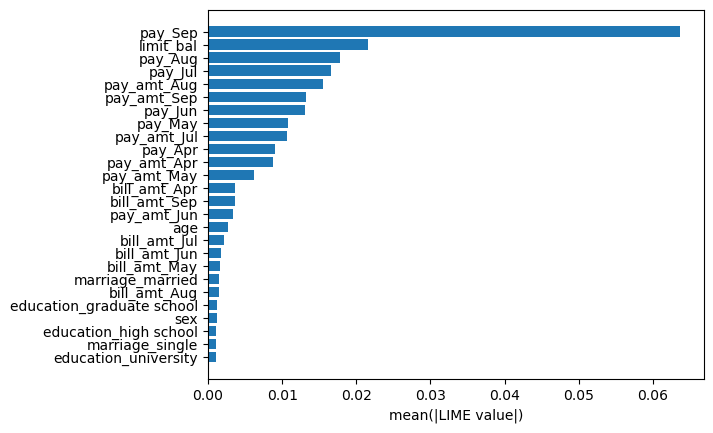

In [21]:
glime_xgb_df=pd.DataFrame(data={'Feature': xgb_test.columns,'Mean_LIME':glime_xgb})
glime_xgb_df=glime_xgb_df.reindex(glime_xgb_df.Mean_LIME.sort_values(ascending=False).index)
fig, ax = plt.subplots()
ax.barh(glime_xgb_df['Feature'],glime_xgb_df['Mean_LIME'])
#ax.set_yticks(np.arange(26), labels=X_test.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|LIME value|)')

In [14]:
#save the global explanations of 3 models
shap_df.to_csv('./shap_global.csv')
lime_df.to_csv('./lime_global.csv')


In [4]:
#load the global explanations of 3 moels
shap_df = pd.read_csv("./shap_global.csv")
lime_df = pd.read_csv('./lime_global.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'education_high school'),
  Text(1, 0, 'marriage_married'),
  Text(2, 0, 'marriage_single'),
  Text(3, 0, 'education_graduate school'),
  Text(4, 0, 'sex'),
  Text(5, 0, 'education_university'),
  Text(6, 0, 'age'),
  Text(7, 0, 'bill_amt_Jul'),
  Text(8, 0, 'bill_amt_Apr'),
  Text(9, 0, 'pay_Apr'),
  Text(10, 0, 'bill_amt_May'),
  Text(11, 0, 'bill_amt_Jun'),
  Text(12, 0, 'bill_amt_Aug'),
  Text(13, 0, 'pay_May'),
  Text(14, 0, 'pay_amt_May'),
  Text(15, 0, 'pay_Jun'),
  Text(16, 0, 'pay_amt_Jun'),
  Text(17, 0, 'bill_amt_Sep'),
  Text(18, 0, 'pay_amt_Apr'),
  Text(19, 0, 'pay_Jul'),
  Text(20, 0, 'pay_amt_Jul'),
  Text(21, 0, 'pay_amt_Aug'),
  Text(22, 0, 'pay_amt_Sep'),
  Text(23, 0, 'pay_Aug'),
  Text(24, 0, 'limit_bal'),
  Text(25, 0, 'pay_Sep')])

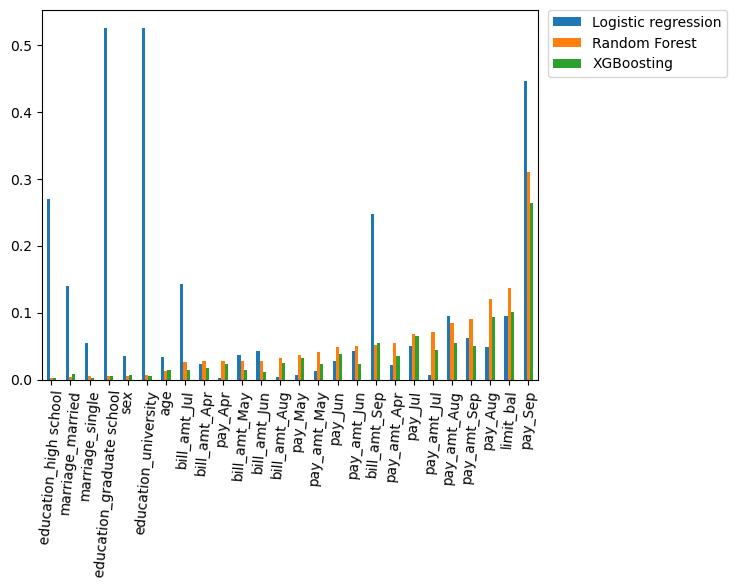

In [49]:
#visualize the Shapley values of 3 models
shap_values = {'Features': X_train.columns, 'Logistic regression':np.abs(shap_values_logit.values).mean(axis=0),'Random Forest':np.abs(shap_values_rf.values[:,:,1]).mean(axis=0)*5,'XGBoosting':np.abs(shap_values_xgb.values).mean(axis=0)}

shap_df = pd.DataFrame(data=shap_values)
shap_df = shap_df.set_index(X_train.columns)
shap_df = shap_df.sort_values(by=['Random Forest'])
shap_df.plot.bar()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks( rotation=85.)

#### In global explanations, RF and XGB are strongly linearly correlated, but both them didn't have the same explanation as LR

In [51]:
corr = shap_df.corr()
corr.style.background_gradient(cmap='coolwarm')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'bill_amt_Jul'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'marriage_married'),
  Text(3, 0, 'education_graduate school'),
  Text(4, 0, 'age'),
  Text(5, 0, 'education_high school'),
  Text(6, 0, 'education_university'),
  Text(7, 0, 'bill_amt_May'),
  Text(8, 0, 'bill_amt_Jun'),
  Text(9, 0, 'marriage_single'),
  Text(10, 0, 'bill_amt_Apr'),
  Text(11, 0, 'bill_amt_Aug'),
  Text(12, 0, 'bill_amt_Sep'),
  Text(13, 0, 'pay_amt_Jun'),
  Text(14, 0, 'pay_Jun'),
  Text(15, 0, 'pay_amt_May'),
  Text(16, 0, 'pay_Apr'),
  Text(17, 0, 'pay_May'),
  Text(18, 0, 'pay_amt_Apr'),
  Text(19, 0, 'pay_Jul'),
  Text(20, 0, 'pay_Aug'),
  Text(21, 0, 'pay_amt_Jul'),
  Text(22, 0, 'pay_amt_Sep'),
  Text(23, 0, 'limit_bal'),
  Text(24, 0, 'pay_amt_Aug'),
  Text(25, 0, 'pay_Sep')])

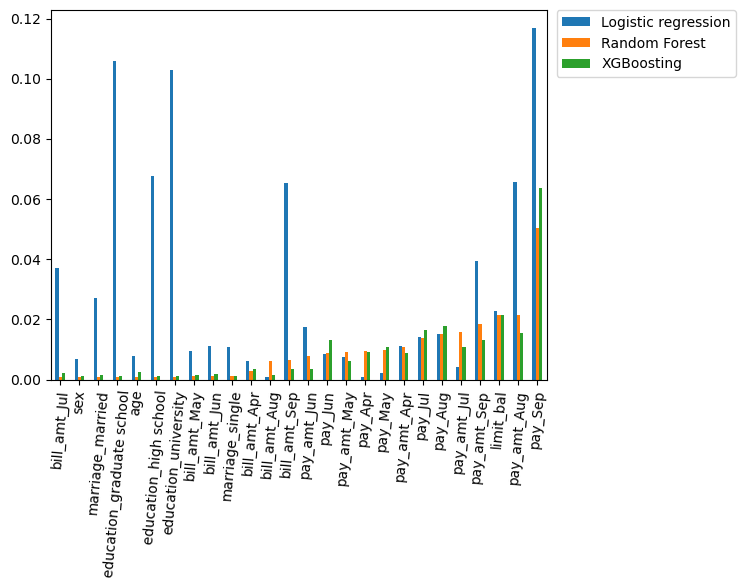

In [10]:
##visualize the LIME coefficients of 3 models
lime_values = {'Features': X_train.columns, 'Logistic regression':glime_logit,'Random Forest':glime_rf,'XGBoosting':glime_xgb}

lime_df = pd.DataFrame(data=lime_values)
lime_df = lime_df.set_index(X_train.columns)
lime_df = lime_df.sort_values(by=['Random Forest'])
lime_df.plot.bar()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks( rotation=85.)

#### Same as SHAP

In [11]:
corr = lime_df.corr()
corr.style.background_gradient(cmap='coolwarm')

### Correlation between SHAP and LIME


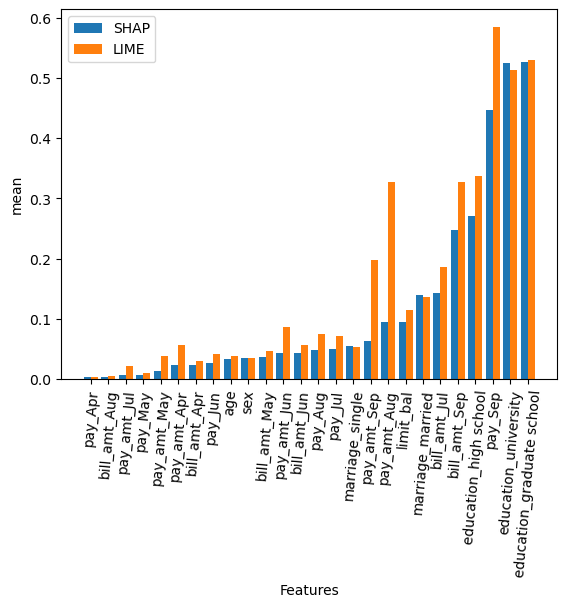

In [5]:
#logit
# visualize the Shapley values and LIME coefficients

logit_global = pd.merge(shap_df[['Features','Logistic regression']], lime_df[['Features','Logistic regression']], left_on='Features', right_on='Features', how='left')
logit_global = logit_global.rename(columns={"Logistic regression_x": "SHAP", "Logistic regression_y": "LIME"})
logit_global = logit_global.sort_values(by=['SHAP'])

X_axis = np.arange(len(X_train.columns))
  
plt.bar(X_axis - 0.2,logit_global['SHAP'], 0.4, label = 'SHAP') 
plt.bar(X_axis + 0.2, logit_global['LIME']*5, 0.4, label = 'LIME') 
  
plt.xticks(X_axis, logit_global['Features']) 
plt.xlabel("Features") 
plt.ylabel("mean") 
#plt.title("Number of Students in each group") 
plt.legend()
plt.xticks( rotation=85.)
plt.show() 

In [6]:
corr = logit_global[['SHAP','LIME']].corr()
corr.style.background_gradient(cmap='coolwarm')

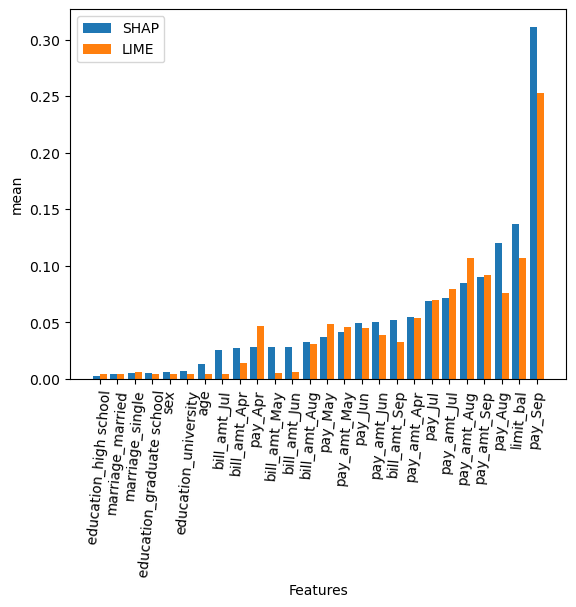

In [7]:
# Random Forest
# visualize the Shapley values and LIME coefficients

rf_global = pd.merge(shap_df[['Features','Random Forest']], lime_df[['Features','Random Forest']], left_on='Features', right_on='Features', how='left')
rf_global = rf_global.rename(columns={"Random Forest_x": "SHAP", "Random Forest_y": "LIME"})
rf_global = rf_global.sort_values(by=['SHAP'])

X_axis = np.arange(len(X_train.columns))
  
plt.bar(X_axis - 0.2,rf_global['SHAP'], 0.4, label = 'SHAP') 
plt.bar(X_axis + 0.2, rf_global['LIME']*5, 0.4, label = 'LIME') 
  
plt.xticks(X_axis, rf_global['Features']) 
plt.xlabel("Features") 
plt.ylabel("mean") 
#plt.title("Number of Students in each group") 
plt.legend()
plt.xticks( rotation=85.)
plt.show() 


In [37]:
corr = rf_global[['SHAP','LIME']].corr()
corr.style.background_gradient(cmap='coolwarm')

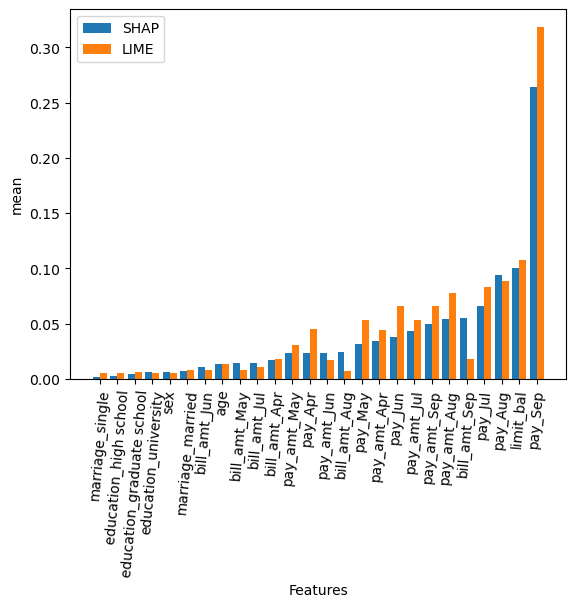

In [8]:
#XGB
# visualize the Shapley values and LIME coefficients
xgb_global = pd.merge(shap_df[['Features','XGBoosting']], lime_df[['Features','XGBoosting']], left_on='Features', right_on='Features', how='left')
xgb_global = xgb_global.rename(columns={"XGBoosting_x": "SHAP", "XGBoosting_y": "LIME"})
xgb_global = xgb_global.sort_values(by=['SHAP'])

X_axis = np.arange(len(X_train.columns))
  
plt.bar(X_axis - 0.2,xgb_global['SHAP'], 0.4, label = 'SHAP') 
plt.bar(X_axis + 0.2, xgb_global['LIME']*5, 0.4, label = 'LIME') 
  
plt.xticks(X_axis, xgb_global['Features']) 
plt.xlabel("Features") 
plt.ylabel("mean") 
#plt.title("Number of Students in each group") 
plt.legend()
plt.xticks( rotation=85.)
plt.show() 

In [39]:
corr = xgb_global[['SHAP','LIME']].corr()
corr.style.background_gradient(cmap='coolwarm')